In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from cellink.tl._burden_testing import *

In [3]:
cell_type_col = "cell_label"

In [4]:
base_data_dir = Path("/data/ouga/home/ag_gagneur/hoev/s_deeprvat/eva/theislab/hackathon24")

## defining the path to the data
scdata_path = base_data_dir / "chr22_OneK1K_cohort_gene_expression_matrix_14_celltypes.h5ad.gz"

gdata_path = base_data_dir / "plink/"
dump_path = base_data_dir / "package_out/first_burden_test"
## defining target chromosome
target_chromosome = "22"

In [5]:
plink_file = os.path.join(gdata_path, f"chr{target_chromosome}.dose.filtered.R2_0.8")
gdata = cl.io.read_plink(plink_file)

In [6]:
gdata.obs

,family_id,member_id,paternal_id,maternal_id,sex,phenotype
id,,,,,,
1_1,.,1_1,.,.,-1,-1
2_2,.,2_2,.,.,-1,-1
3_3,.,3_3,.,.,-1,-1
4_4,.,4_4,.,.,-1,-1
6_6,.,6_6,.,.,-1,-1
...,...,...,...,...,...,...
1096_845_2,.,1096_845_2,.,.,-1,-1
1100_914_2,.,1100_914_2,.,.,-1,-1
1102_932_2,.,1102_932_2,.,.,-1,-1


In [ ]:
# gdata = ad.read_h5ad("gdata.h5ad")
# gdata.obs = gdata.obs.set_index("id", drop = False)

In [9]:
anno_file =  "../../tests/data/variants_vep_annotated.txt"


In [11]:
gdata = cl.tl.add_vep_annos_to_gdata(anno_file, gdata,
                             cols_to_explode=["Consequence"],
                             cols_to_dummy=["Consequence"])
gdata

[2024-12-11 10:55:37,981] INFO:cellink.tl._annotate_snps_genotype_data: renaming id column #Uploaded_variation into snp_id
[2024-12-11 10:55:38,143] INFO:cellink.tl._annotate_snps_genotype_data: Subsetting annotations to variants that are in gdata


KeyError: "['22_16849573_G_A', '22_16849971_T_A', '22_16850437_A_G', '22_16851225_T_C', '22_16851356_T_C', '22_16851640_T_C', '22_16851673_G_A', '22_16851899_G_C', '22_16852312_A_G', '22_16852652_A_G', '22_16852914_A_G', '22_16853019_G_A', '22_16853178_T_C', '22_16853625_C_A', '22_16855618_A_G', '22_16858076_G_A', '22_16858191_C_T', '22_16858364_T_C', '22_16858684_A_G', '22_16858723_A_G', '22_16859704_G_T', '22_16860036_A_T', '22_16860139_G_T', '22_16860336_C_T', '22_16860360_A_G', '22_16860442_A_G', '22_16860496_C_T', '22_16860767_T_A', '22_16860813_C_G', '22_16860967_G_A', '22_16860985_C_T', '22_16861056_A_G', '22_16862213_G_A', '22_16862282_A_G', '22_16862531_T_C', '22_16863070_G_A', '22_16885946_G_C', '22_16886974_G_C', '22_16890136_A_G', '22_16890804_T_G', '22_17051775_G_T', '22_17054720_C_T', '22_17055074_A_T', '22_17055458_A_G', '22_17055984_T_C', '22_17057597_A_G', '22_17058482_C_T', '22_17060166_C_T', '22_17062679_A_G', '22_17064010_G_A', '22_17065079_A_T', '22_17066020_C_T', '22_17066700_C_T', '22_17070109_G_A', '22_17070764_G_C', '22_17071342_T_G', '22_17071513_A_G', '22_17073475_T_C', '22_17074090_A_C', '22_17074765_T_G', '22_17079469_A_G', '22_17079536_T_C', '22_17079911_G_A', '22_17083747_A_G', '22_17085109_T_C', '22_17085240_T_C', '22_17090474_T_C', '22_17090784_A_G', '22_17091026_C_G', '22_17102604_T_C', '22_17106328_T_C', '22_17108381_A_G', '22_17109782_C_T', '22_17113110_G_A', '22_17128441_A_G', '22_17131866_T_C', '22_17141482_G_A', '22_17147963_T_C', '22_17149524_C_T', '22_17196213_C_T', '22_17196300_T_C', '22_17197386_T_A', '22_17198802_G_A', '22_17199044_G_A', '22_17199093_G_A', '22_17199548_T_C', '22_17200646_A_T', '22_17201824_G_C', '22_17203532_G_A', '22_17203568_G_A', '22_17203762_T_C', '22_17206294_A_C', '22_17208210_A_G', '22_17208423_G_T', '22_17211331_A_C', '22_17211440_C_A', '22_17212553_A_G', '22_17213298_T_C', '22_17214005_G_A', '22_17214110_G_A', '22_17216536_C_A', '22_17217025_T_C', '22_17217247_G_A', '22_17217317_A_G', '22_17219250_A_T', '22_17219356_A_G', '22_17220813_A_G', '22_17221208_A_C', '22_17221495_C_T', '22_17222894_T_A', '22_17222934_T_C', '22_17223264_G_A', '22_17223271_C_G', '22_17223534_A_G', '22_17223562_G_A', '22_17224026_A_G', '22_17224283_A_G', '22_17224285_A_C', '22_17224430_A_T', '22_17224544_T_C', '22_17224835_G_A', '22_17225692_G_T', '22_17225773_C_T', '22_17226948_A_G', '22_17227497_C_G', '22_17228796_A_G', '22_17229362_G_A', '22_17230116_A_T', '22_17232082_T_G', '22_17232922_A_G', '22_17233467_G_A', '22_17234497_A_G', '22_17238270_C_G', '22_17238335_A_C', '22_17274624_A_G', '22_17276523_C_A', '22_17278762_C_T', '22_17278928_A_G', '22_17278938_T_C', '22_17279115_T_A', '22_17279464_A_G', '22_17279823_C_A', '22_17280117_T_C', '22_17280388_C_T', '22_17280822_A_G', '22_17281110_A_C', '22_17281392_A_G', '22_17281931_A_G', '22_17282045_A_G', '22_17282549_G_A', '22_17282706_A_T', '22_17283440_T_C', '22_17284065_C_T', '22_17284363_A_G', '22_17284540_A_G', '22_17285949_C_T', '22_17286329_G_T', '22_17286376_C_T', '22_17286712_A_T', '22_17287053_G_A', '22_17287059_A_G', '22_17287835_T_A', '22_17288058_G_A', '22_17288200_C_T', '22_17288266_A_C', '22_17288274_C_T', '22_17290106_C_T', '22_17290278_T_C', '22_17290674_A_G', '22_17292156_C_T', '22_17292258_A_C', '22_17292877_T_C', '22_17293143_T_A', '22_17293295_A_G', '22_17293393_T_C', '22_17294042_T_C', '22_17294251_G_T', '22_17294997_A_G', '22_17295703_C_T', '22_17295981_T_G', '22_17296114_C_G', '22_17296235_T_A', '22_17296426_G_A', '22_17296720_A_G', '22_17296836_C_T', '22_17297558_G_A', '22_17297636_G_A', '22_17299033_C_T', '22_17299261_T_C', '22_17299901_T_G', '22_17300622_G_A', '22_17301217_G_A', '22_17302170_C_T', '22_17302509_T_C', '22_17302747_G_A', '22_17302763_C_G', '22_17302823_C_T', '22_17303040_C_T', '22_17303596_G_T', '22_17303921_T_A', '22_17304395_A_G', '22_17304887_A_G', '22_17306104_G_T', '22_17306184_T_G', '22_17306270_A_G', '22_17307399_C_T', '22_17307742_A_G', '22_17307904_C_T', '22_17307923_T_C', '22_17308086_T_C', '22_17309296_G_A', '22_17309881_G_A', '22_17311027_A_C', '22_17311348_A_C', '22_17312596_C_T', '22_17312790_T_C', '22_17313288_T_C', '22_17314548_C_T', '22_17315102_C_T', '22_17315622_C_T', '22_17316313_C_T', '22_17316987_T_C', '22_17316990_G_T', '22_17317299_C_T', '22_17318333_G_A', '22_17318728_C_T', '22_17320568_G_C', '22_17320790_C_T', '22_17321028_T_C', '22_17322321_A_G', '22_17322355_A_G', '22_17322899_C_T', '22_17324579_A_C', '22_17326278_T_C', '22_17326432_T_C', '22_17326516_T_C', '22_17326550_G_A', '22_17326842_A_T', '22_17327139_C_G', '22_17327157_A_G', '22_17327200_C_T', '22_17327257_G_C', '22_17327366_C_T', '22_17328802_C_T', '22_17329601_G_T', '22_17330370_C_T', '22_17331020_G_A', '22_17331117_G_A', '22_17331656_T_C', '22_17332281_A_G', '22_17332527_A_G', '22_17332664_T_C', '22_17332915_T_C', '22_17333497_C_T', '22_17337200_G_A', '22_17337454_T_C', '22_17337925_T_C', '22_17338062_T_A', '22_17338286_C_T', '22_17338707_T_G', '22_17339041_A_G', '22_17339144_A_T', '22_17339242_A_G', '22_17339675_A_G', '22_17339752_A_G', '22_17340077_G_A', '22_17340365_G_C', '22_17340419_C_T', '22_17340639_T_C', '22_17340669_T_C', '22_17340798_A_G', '22_17341496_A_G', '22_17341904_G_T', '22_17342329_A_G', '22_17342575_C_T', '22_17342603_A_C', '22_17342808_T_G', '22_17342985_C_A', '22_17343858_C_G', '22_17344201_C_T', '22_17344859_T_C', '22_17344949_G_C', '22_17345521_A_G', '22_17345729_G_A', '22_17346182_T_A', '22_17346623_T_C', '22_17346884_G_A', '22_17347348_G_T', '22_17350639_A_G', '22_17382709_G_A', '22_17388627_A_G', '22_17394677_T_C', '22_17394799_A_G', '22_17394800_A_G', '22_17396459_T_C', '22_17396613_C_G', '22_17396966_C_G', '22_17401198_T_G', '22_17406581_C_T', '22_17407516_C_T', '22_17407566_T_C', '22_17409897_A_G', '22_17412411_C_T', '22_17412682_A_G', '22_17412690_C_T', '22_17414103_C_T', '22_17414332_T_C', '22_17414385_C_T', '22_17414640_A_G', '22_17414892_T_G', '22_17415490_A_G', '22_17415572_C_T', '22_17416478_G_A', '22_17416605_G_A', '22_17416925_G_A', '22_17417733_A_G', '22_17417742_T_C', '22_17419090_A_G', '22_17419338_C_T', '22_17419568_C_T', '22_17419726_A_C', '22_17421074_C_T', '22_17421129_C_T', '22_17421603_C_T', '22_17422334_C_T', '22_17422787_A_G', '22_17422901_C_T', '22_17423930_C_T', '22_17423965_A_C', '22_17424362_T_C', '22_17424497_C_G', '22_17424860_T_C', '22_17425861_G_C', '22_17426414_C_T', '22_17426417_G_C', '22_17426623_C_T', '22_17427037_A_G', '22_17427153_A_G', '22_17427455_G_A', '22_17427664_C_A', '22_17428080_C_T', '22_17428277_A_G', '22_17428982_G_A', '22_17429346_C_T', '22_17429384_C_T', '22_17429434_G_A', '22_17430931_T_A', '22_17431379_A_G', '22_17432482_G_T', '22_17433210_G_T', '22_17433221_G_A', '22_17433992_T_C', '22_17434253_C_T', '22_17434521_C_T', '22_17434931_T_C', '22_17435074_T_G', '22_17435280_A_G', '22_17435939_G_C', '22_17436583_A_G', '22_17436627_T_C', '22_17436762_T_G', '22_17436846_A_G', '22_17437133_A_G', '22_17437310_G_C', '22_17437310_T_C', '22_17437375_C_G', '22_17437617_C_G', '22_17438114_A_G', '22_17438982_C_T', '22_17439118_T_C', '22_17439144_T_C', '22_17439814_G_A', '22_17439826_A_G', '22_17440953_C_T', '22_17441524_G_A', '22_17441525_G_C', '22_17442154_C_T', '22_17442206_C_A', '22_17442223_C_T', '22_17442720_A_G', '22_17442739_C_T', '22_17442987_T_C', '22_17443131_C_T', '22_17443179_G_A', '22_17443263_A_T', '22_17443370_A_G', '22_17443381_A_G', '22_17444231_C_T', '22_17444407_T_C', '22_17445315_T_C', '22_17446157_T_G', '22_17446715_A_G', '22_17446906_A_G', '22_17446914_G_T', '22_17448418_T_A', '22_17449498_C_T', '22_17450145_T_C', '22_17450247_C_T', '22_17450515_A_G', '22_17450666_A_G', '22_17450765_G_A', '22_17450929_T_C', '22_17450952_G_A', '22_17451185_C_T', '22_17451528_A_G', '22_17451613_T_C', '22_17451710_C_T', '22_17451854_C_G', '22_17451883_A_C', '22_17451906_T_C', '22_17451945_A_G', '22_17452181_G_T', '22_17452300_G_T', '22_17452468_C_G', '22_17453839_T_C', '22_17453844_T_A', '22_17453902_A_G', '22_17454078_C_T', '22_17454382_T_C', '22_17454384_T_C', '22_17454451_C_T', '22_17454486_C_T', '22_17454695_T_C', '22_17454945_A_G', '22_17455590_T_C', '22_17455666_G_A', '22_17455735_A_G', '22_17456766_T_C', '22_17456773_C_A', '22_17457094_G_A', '22_17457761_C_T', '22_17457849_G_C', '22_17458083_T_G', '22_17458345_C_T', '22_17458813_T_A', '22_17459065_T_C', '22_17459282_C_T', '22_17459575_A_G', '22_17459695_C_T', '22_17459768_C_T', '22_17460909_C_T', '22_17461130_G_A', '22_17461281_A_C', '22_17461883_T_A', '22_17461914_A_G', '22_17462114_C_T', '22_17463138_C_T', '22_17463187_C_G', '22_17463189_C_T', '22_17463190_A_G', '22_17463239_G_A', '22_17463620_C_A', '22_17463780_A_G', '22_17464047_A_G', '22_17464217_T_C', '22_17464704_A_G', '22_17464839_G_A', '22_17464924_G_A', '22_17465108_A_G', '22_17465111_G_A', '22_17465175_G_A', '22_17465936_A_G', '22_17466008_A_G', '22_17466249_G_A', '22_17466491_C_T', '22_17467073_G_A', '22_17467411_A_G', '22_17467684_A_G', '22_17467975_C_T', '22_17468918_A_C', '22_17469026_A_G', '22_17469049_A_C', '22_17469310_T_C', '22_17469558_C_T', '22_17469664_A_G', '22_17470009_G_A', '22_17470779_A_C', '22_17471354_T_C', '22_17471614_T_C', '22_17471629_A_C', '22_17471914_C_G', '22_17472134_C_T', '22_17472191_C_T', '22_17472239_C_A', '22_17473728_T_C', '22_17473888_C_G', '22_17474180_A_G', '22_17474573_T_G', '22_17474691_C_T', '22_17474733_C_A', '22_17475050_C_T', '22_17475313_C_A', '22_17475336_A_G', '22_17475406_C_T', '22_17475921_C_T', '22_17476064_C_T', '22_17476076_A_G', '22_17476147_A_G', '22_17476538_T_C', '22_17476696_C_T', '22_17476702_C_A', '22_17477534_A_G', '22_17477566_G_T', '22_17477589_G_A', '22_17477931_C_T', '22_17478589_C_T', '22_17478722_G_A', '22_17479016_T_C', '22_17479947_G_C', '22_17480064_A_T', '22_17480198_T_C', '22_17480442_C_T', '22_17480630_C_T', '22_17480765_C_T', '22_17480927_T_G', '22_17480951_T_C', '22_17482086_T_G', '22_17482181_A_T', '22_17482847_T_C', '22_17483546_G_A', '22_17483953_G_C', '22_17484043_T_C', '22_17484569_C_A', '22_17484578_C_A', '22_17484650_C_A', '22_17484733_C_T', '22_17485123_T_G', '22_17485434_A_T', '22_17485486_C_T', '22_17486304_T_C', '22_17486333_C_T', '22_17486352_G_A', '22_17486937_C_T', '22_17486964_A_G', '22_17487476_A_G', '22_17488026_C_G', '22_17488172_T_C', '22_17488195_A_G', '22_17488430_C_T', '22_17489124_C_G', '22_17489281_C_A', '22_17489546_T_C', '22_17489890_C_T', '22_17489958_T_G', '22_17490133_A_C', '22_17491584_G_A', '22_17492452_C_T', '22_17492987_T_G', '22_17492989_C_T', '22_17493013_T_C', '22_17493520_G_A', '22_17494101_A_G', '22_17494547_A_G', '22_17495137_A_C', '22_17499890_T_C', '22_17500036_C_T', '22_17502850_A_G', '22_17503109_C_T', '22_17503161_C_T', '22_17504945_A_C', '22_17505340_A_G', '22_17506232_A_T', '22_17508020_G_T', '22_17508946_G_C', '22_17511898_G_C', '22_17512175_A_G', '22_17512640_C_G', '22_17512820_C_G', '22_17512904_C_T', '22_17514026_A_G', '22_17516126_C_G', '22_17516282_A_G', '22_17517198_T_C', '22_17517492_T_C', '22_17517493_A_G', '22_17519579_G_A', '22_17520024_T_C', '22_17520596_A_T', '22_17520701_G_A', '22_17522003_T_C', '22_17522042_T_C', '22_17522728_A_G', '22_17522911_A_G', '22_17524203_C_T', '22_17524434_G_A', '22_17525355_G_A', '22_17526055_T_C', '22_17526450_C_T', '22_17526532_A_G', '22_17527240_A_G', '22_17528214_C_G', '22_17530798_C_T', '22_17531750_C_T', '22_17533056_A_G', '22_17534022_A_G', '22_17534271_G_C', '22_17534540_G_C', '22_17535944_A_G', '22_17536181_G_T', '22_17537477_G_A', '22_17537520_G_A', '22_17538189_C_T', '22_17539129_A_G', '22_17539544_A_G', '22_17539678_C_T', '22_17540772_G_C', '22_17541582_A_C', '22_17541673_C_T', '22_17542150_C_T', '22_17543482_G_A', '22_17544136_A_G', '22_17545364_A_G', '22_17545859_T_C', '22_17547160_A_C', '22_17548504_C_T', '22_17548528_T_C', '22_17549837_T_A', '22_17549841_T_A', '22_17550694_G_A', '22_17551807_A_G', '22_17553127_C_G', '22_17554656_C_T', '22_17556970_A_T', '22_17559168_C_T', '22_17559482_A_T', '22_17560683_C_T', '22_17561345_C_T', '22_17561569_A_G', '22_17561913_C_A', '22_17562047_A_G', '22_17562831_C_T', '22_17567006_C_G', '22_17567021_G_C', '22_17570769_C_A', '22_17572941_A_G', '22_17573915_T_G', '22_17574341_T_C', '22_17577287_C_T', '22_17577557_A_G', '22_17579013_C_A', '22_17579956_T_C', '22_17582061_G_A', '22_17582776_T_C', '22_17582788_T_C', '22_17585441_T_C', '22_17585808_C_G', '22_17586595_A_G', '22_17587680_G_A', '22_17587975_A_G', '22_17589152_G_T', '22_17589209_T_C', '22_17589246_A_G', '22_17589567_T_C', '22_17590180_A_G', '22_17590269_T_C', '22_17590744_C_T', '22_17591823_G_C', '22_17593929_G_A', '22_17594216_G_A', '22_17594472_A_G', '22_17594623_T_C', '22_17594755_A_G', '22_17594772_A_T', '22_17594977_G_A', '22_17595175_T_C', '22_17595915_A_C', '22_17595929_C_G', '22_17596229_C_T', '22_17596322_G_A', '22_17596537_C_G', '22_17597297_A_G', '22_17597462_A_G', '22_17597501_T_C', '22_17597713_C_G', '22_17597768_G_A', '22_17597955_T_C', '22_17598310_T_C', '22_17598409_A_G', '22_17598512_A_G', '22_17598813_A_G', '22_17599035_A_G', '22_17599170_G_A', '22_17599844_T_G', '22_17599860_C_A', '22_17600293_A_G', '22_17600497_A_G', '22_17600689_A_G', '22_17600977_A_G', '22_17601466_C_T', '22_17601748_T_C', '22_17603153_G_C', '22_17603445_T_C', '22_17603477_G_A', '22_17603503_A_G', '22_17603623_C_T', '22_17603801_A_C', '22_17603823_A_G', '22_17604113_T_C', '22_17604191_C_T', '22_17604937_A_G', '22_17605038_T_C', '22_17605197_C_G', '22_17605899_C_T', '22_17606463_A_G', '22_17606639_A_G', '22_17606774_G_C', '22_17606953_G_A', '22_17607390_C_A', '22_17607485_C_T', '22_17607894_T_A', '22_17608377_G_A', '22_17608379_C_G', '22_17608604_C_T', '22_17609330_T_C', '22_17609398_G_T', '22_17609916_T_G', '22_17610214_A_G', '22_17610304_T_C', '22_17610655_G_T', '22_17610791_G_C', '22_17610862_A_T', '22_17611056_A_G', '22_17611179_A_C', '22_17611515_C_T', '22_17612518_A_C', '22_17612572_A_G', '22_17612604_C_T', '22_17612744_A_G', '22_17612750_T_C', '22_17612815_G_C', '22_17613330_C_G', '22_17613415_G_A', '22_17613565_T_C', '22_17613614_T_C', '22_17613622_G_A', '22_17613668_T_C', '22_17613671_C_T', '22_17614011_A_C', '22_17614422_A_G', '22_17614488_A_G', '22_17614498_A_G', '22_17614692_G_T', '22_17615213_G_A', '22_17615234_C_G', '22_17615302_T_C', '22_17615372_A_G', '22_17615784_A_G', '22_17615851_A_G', '22_17616041_A_G', '22_17616151_A_G', '22_17616217_T_C', '22_17616245_G_A', '22_17616435_A_G', '22_17616510_C_A', '22_17616606_G_A', '22_17616715_T_C', '22_17616855_A_G', '22_17617667_G_A', '22_17617740_A_C', '22_17618127_T_G', '22_17618128_T_A', '22_17618142_T_G', '22_17618164_G_C', '22_17619292_T_C', '22_17619368_A_G', '22_17619378_C_T', '22_17619393_G_A', '22_17619716_G_A', '22_17619948_T_C', '22_17620130_C_A', '22_17620294_G_T', '22_17620405_G_A', '22_17621007_A_G', '22_17621704_T_C', '22_17622267_T_C', '22_17622618_T_C', '22_17623216_A_G', '22_17623675_C_T', '22_17623837_G_A', '22_17624072_A_G', '22_17624215_A_G', '22_17624425_A_G', '22_17624720_G_T', '22_17624770_T_C', '22_17625465_G_A', '22_17625915_A_G', '22_17629061_A_G', '22_17630378_A_G', '22_17630389_C_G', '22_17630393_T_C', '22_17631471_C_T', '22_17631598_A_G', '22_17631893_C_T', '22_17632133_T_C', '22_17632194_T_C', '22_17632744_T_A', '22_17632885_C_T', '22_17633669_A_G', '22_17633837_T_C', '22_17634050_G_A', '22_17634216_A_G', '22_17635000_T_C', '22_17635874_C_A', '22_17637210_T_A', '22_17637221_C_G', '22_17637456_A_G', '22_17637878_A_G', '22_17638231_T_C', '22_17638501_A_C', '22_17639152_C_A', '22_17639299_C_A', '22_17639323_A_G', '22_17639837_G_A', '22_17639918_G_T', '22_17640022_C_G', '22_17640045_A_G', '22_17641079_T_C', '22_17641500_G_A', '22_17641685_T_C', '22_17641873_A_G', '22_17641912_G_A', '22_17642094_G_C', '22_17642117_T_C', '22_17642285_T_C', '22_17643725_A_G', '22_17643843_A_G', '22_17644131_T_C', '22_17644152_A_C', '22_17644725_C_T', '22_17645207_T_C', '22_17645823_T_C', '22_17646444_T_C', '22_17646558_A_G', '22_17646596_T_G', '22_17647015_A_G', '22_17647520_A_G', '22_17647862_G_T', '22_17647879_T_C', '22_17648346_A_G', '22_17649549_T_C', '22_17649805_A_G', '22_17650392_T_A', '22_17650475_T_A', '22_17650617_A_G', '22_17650931_T_C', '22_17651273_A_G', '22_17651407_C_G', '22_17651441_C_A', '22_17651524_T_C', '22_17651573_G_T', '22_17651582_A_G', '22_17651688_C_A', '22_17652145_G_C', '22_17652219_C_G', '22_17652461_A_G', '22_17652549_A_G', '22_17652609_T_G', '22_17652646_T_C', '22_17652955_G_C', '22_17653020_G_A', '22_17653038_T_C', '22_17653221_G_C', '22_17653367_T_C', '22_17654068_A_G', '22_17654089_T_C', '22_17654109_C_A', '22_17654391_T_C', '22_17654790_A_G', '22_17654883_T_C', '22_17654943_G_A', '22_17655176_C_G', '22_17655388_G_A', '22_17655536_A_G', '22_17655920_A_G', '22_17655995_T_C', '22_17656165_G_T', '22_17656216_T_A', '22_17656259_C_A', '22_17656508_A_T', '22_17656518_G_A', '22_17656692_C_T', '22_17656724_A_C', '22_17656831_T_C', '22_17656851_A_G', '22_17657000_C_T', '22_17657107_G_A', '22_17657174_A_G', '22_17657214_T_A', '22_17657236_T_C', '22_17657292_A_G', '22_17657378_T_C', '22_17658006_G_A', '22_17658341_G_A', '22_17658716_C_T', '22_17658776_A_C', '22_17658862_G_A', '22_17658882_G_A', '22_17659152_C_T', '22_17659157_G_A', '22_17659752_C_G', '22_17659774_A_G', '22_17660051_C_G', '22_17660056_A_G', '22_17660303_T_A', '22_17660407_A_G', '22_17660473_A_G', '22_17660556_C_T', '22_17660615_T_C', '22_17660646_G_A', '22_17660686_T_C', '22_17661178_G_A', '22_17661347_G_C', '22_17661508_G_C', '22_17661764_C_T', '22_17661791_T_C', '22_17661922_G_C', '22_17661935_T_A', '22_17662591_G_C', '22_17662679_T_C', '22_17662699_G_A', '22_17662793_G_A', '22_17662917_C_G', '22_17663117_C_T', '22_17663804_G_A', '22_17663999_A_C', '22_17664296_G_C', '22_17664307_T_C', '22_17664346_A_C', '22_17665287_C_T', '22_17666676_T_A', '22_17666839_A_G', '22_17668491_T_C', '22_17668765_C_A', '22_17668818_A_C', '22_17669199_A_G', '22_17669306_C_T', '22_17669469_C_T', '22_17670042_C_G', '22_17670229_T_C', '22_17670257_C_G', '22_17671052_T_C', '22_17673438_C_T', '22_17674117_T_C', '22_17675324_T_C', '22_17675900_A_C', '22_17676102_A_T', '22_17676312_A_G', '22_17676336_C_T', '22_17676384_T_A', '22_17676590_G_A', '22_17676932_T_C', '22_17677104_A_G', '22_17677175_C_T', '22_17677699_T_C', '22_17677892_A_G', '22_17677908_G_C', '22_17678195_T_C', '22_17678307_G_A', '22_17678455_T_C', '22_17678551_C_G', '22_17678667_A_G', '22_17678767_G_A', '22_17679312_G_A', '22_17679377_C_G', '22_17679549_G_C', '22_17679997_A_G', '22_17680059_T_C', '22_17680519_C_A', '22_17680656_A_G', '22_17681581_G_A', '22_17681725_C_T', '22_17681848_T_C', '22_17681849_G_A', '22_17681921_A_G', '22_17682165_A_G', '22_17682963_A_G', '22_17683106_G_A', '22_17683114_A_G', '22_17683259_A_G', '22_17684182_T_C', '22_17684344_T_C', '22_17685194_A_T', '22_17685351_A_C', '22_17686162_A_G', '22_17686263_G_C', '22_17687377_C_T', '22_17687585_G_A', '22_17687692_A_G', '22_17688213_A_G', '22_17688402_A_G', '22_17689198_T_C', '22_17690430_G_C', '22_17691166_T_C', '22_17691637_A_G', '22_17691668_G_A', '22_17691795_A_T', '22_17691887_T_C', '22_17692032_G_A', '22_17692064_G_A', '22_17692120_G_A', '22_17692227_T_C', '22_17692384_A_G', '22_17692507_A_T', '22_17692936_T_C', '22_17692978_A_G', '22_17693341_C_T', '22_17693627_T_G', '22_17693628_T_A', '22_17693934_T_C', '22_17694856_G_T', '22_17696368_C_T', '22_17697428_G_A', '22_17697438_T_C', '22_17697605_A_G', '22_17697781_C_A', '22_17697861_T_C', '22_17698080_C_T', '22_17698173_G_A', '22_17699299_T_G', '22_17699402_A_T', '22_17699630_A_T', '22_17699642_C_T', '22_17699818_G_A', '22_17700002_A_G', '22_17700284_T_C', '22_17700809_A_G', '22_17701304_A_C', '22_17701868_T_C', '22_17702201_C_A', '22_17702322_T_C', '22_17702355_A_G', '22_17702505_A_G', '22_17702580_C_T', '22_17702858_T_C', '22_17702876_T_G', '22_17703119_A_T', '22_17704950_C_T', '22_17705196_G_C', '22_17705622_C_T', '22_17706435_G_A', '22_17706647_C_T', '22_17706811_A_G', '22_17707618_A_G', '22_17707727_A_G', '22_17707865_T_G', '22_17708087_C_T', '22_17709828_A_G', '22_17709883_A_G', '22_17710264_C_T', '22_17710860_T_C', '22_17711567_A_C', '22_17711873_A_G', '22_17712142_A_G', '22_17713433_A_G', '22_17714006_A_G', '22_17714985_T_C', '22_17715095_A_C', '22_17719348_G_A', '22_17720722_G_A', '22_17721595_C_T', '22_17722024_A_G', '22_17722053_A_G', '22_17722055_G_A', '22_17722442_T_A', '22_17722536_A_G', '22_17722774_A_G', '22_17722885_G_A', '22_17723174_G_C', '22_17723712_T_C', '22_17723841_G_T', '22_17723899_A_G', '22_17724049_A_C', '22_17724055_T_C', '22_17724093_A_G', '22_17725150_T_C', '22_17725764_G_A', '22_17725899_C_T', '22_17726704_C_G', '22_17726764_T_C', '22_17727015_C_A', '22_17727236_T_C', '22_17727648_T_C', '22_17727877_C_T', '22_17727898_T_C', '22_17728038_T_C', '22_17728246_A_G', '22_17728523_G_A', '22_17728832_G_T', '22_17728998_C_T', '22_17729044_G_T', '22_17729048_A_C', '22_17729706_A_G', '22_17729730_T_C', '22_17730885_T_C', '22_17731977_C_T', '22_17732736_G_A', '22_17732773_T_C', '22_17732851_G_A', '22_17733147_A_G', '22_17733193_C_T', '22_17733251_G_A', '22_17733263_C_T', '22_17733398_A_G', '22_17733541_G_A', '22_17733542_G_C', '22_17733569_T_G', '22_17733865_A_T', '22_17733896_C_T', '22_17734419_G_A', '22_17734427_G_A', '22_17734516_T_C', '22_17735191_C_T', '22_17735346_A_G', '22_17735864_T_C', '22_17738321_A_G', '22_17739317_A_G', '22_17741701_C_T', '22_17741724_C_T', '22_17748737_A_G', '22_17752414_A_G', '22_17753699_A_G', '22_17754718_T_C', '22_17757828_C_T', '22_17762499_T_C', '22_17765505_A_G', '22_17766115_C_T', '22_17769065_A_G', '22_17770181_G_T', '22_17780188_G_C', '22_17781035_A_G', '22_17781555_C_T', '22_17782813_T_C', '22_17782966_T_C', '22_17783324_T_C', '22_17783335_A_G', '22_17783351_A_G', '22_17783420_A_G', '22_17783806_C_T', '22_17783912_G_T', '22_17783923_A_G', '22_17783945_T_C', '22_17784163_G_A', '22_17784364_T_G', '22_17784380_A_C', '22_17784602_A_G', '22_17784836_T_C', '22_17784937_A_G', '22_17784970_A_G', '22_17784977_A_G', '22_17785199_G_A', '22_17785224_C_T', '22_17785300_G_A', '22_17785383_T_C', '22_17785815_A_C', '22_17785825_T_C', '22_17785838_A_T', '22_17785893_C_T', '22_17785937_G_A', '22_17786171_G_A', '22_17787291_T_C', '22_17787836_C_G', '22_17787955_C_A', '22_17787999_C_T', '22_17788152_G_A', '22_17788200_A_C', '22_17788254_A_G', '22_17788549_A_G', '22_17788696_A_G', '22_17788896_G_A', '22_17789010_G_A', '22_17789245_T_G', '22_17789257_A_T', '22_17789260_A_C', '22_17789740_A_G', '22_17790349_T_C', '22_17790885_T_C', '22_17790906_T_C', '22_17792740_A_G', '22_17792855_A_G', '22_17793012_A_G', '22_17793206_A_G', '22_17794401_C_T', '22_17796685_A_T', '22_17796971_A_C', '22_17797775_G_C', '22_17797806_T_C', '22_17798023_C_T', '22_17798377_G_A', '22_17798800_C_T', '22_17798848_G_C', '22_17799216_T_C', '22_17799242_G_A', '22_17799287_T_C', '22_17799368_G_T', '22_17799387_C_T', '22_17799529_T_C', '22_17800461_A_G', '22_17800508_T_C', '22_17800757_A_G', '22_17803593_G_A', '22_17803786_G_A', '22_17803872_A_G', '22_17804207_T_A', '22_17804395_C_T', '22_17806111_A_G', '22_17807038_T_C', '22_17807116_T_C', '22_17809117_T_A', '22_17817967_C_G', '22_17818807_C_T', '22_17818894_A_G', '22_17818918_T_C', '22_17821840_A_G', '22_17823127_C_G', '22_17824347_A_G', '22_17824470_G_T', '22_17825692_C_T', '22_17826030_T_C', '22_17826549_A_G', '22_17827558_G_A', '22_17830856_G_A', '22_17830990_C_T', '22_17831071_A_G', '22_17831143_G_A', '22_17831441_C_T', '22_17831638_T_C', '22_17831813_T_C', '22_17832142_T_G', '22_17832206_A_T', '22_17833100_C_T', '22_17833154_G_A', '22_17833767_A_T', '22_17834040_A_G', '22_17834460_T_C', '22_17834493_G_A', '22_17834577_C_T', '22_17834898_A_G', '22_17837632_G_A', '22_17837908_C_G', '22_17837987_C_T', '22_17838025_T_C', '22_17838368_C_T', '22_17838809_C_A', '22_17839218_G_C', '22_17839358_T_C', '22_17840123_G_A', '22_17840229_T_C', '22_17840629_C_G', '22_17840791_C_T', '22_17841068_T_G', '22_17841198_G_C', '22_17841408_T_C', '22_17841855_C_T', '22_17843124_A_G', '22_17843997_G_A', '22_17844897_C_T', '22_17844929_T_G', '22_17846055_A_G', '22_17846148_C_T', '22_17846447_T_C', '22_17846754_A_C', '22_17846951_A_G', '22_17848411_G_A', '22_17850483_T_C', '22_17850784_A_T', '22_17850822_C_T', '22_17851410_T_C', '22_17851683_C_T', '22_17852805_T_G', '22_17853714_G_A', '22_17855181_G_C', '22_17855348_G_A', '22_17856770_C_T', '22_17856960_C_T', '22_17858175_A_G', '22_17858431_T_C', '22_17858763_G_A', '22_17858962_C_T', '22_17859006_G_A', '22_17859067_G_A', '22_17860048_T_C', '22_17860253_G_C', '22_17860359_T_C', '22_17860685_G_A', '22_17861131_T_C', '22_17865452_T_C', '22_17866588_T_C', '22_17866989_G_T', '22_17867034_G_A', '22_17867152_G_T', '22_17867397_G_A', '22_17867492_A_T', '22_17867826_C_T', '22_17868156_T_A', '22_17868245_T_C', '22_17868345_T_G', '22_17868593_A_C', '22_17870340_C_T', '22_17870379_C_T', '22_17870434_G_C', '22_17870915_T_C', '22_17871777_A_G', '22_17872168_A_G', '22_17872483_G_A', '22_17873873_T_G', '22_17873895_G_A', '22_17873902_T_C', '22_17874223_A_G', '22_17874348_T_C', '22_17874733_G_A', '22_17874953_G_A', '22_17874972_A_G', '22_17875033_A_G', '22_17875101_T_C', '22_17875478_C_T', '22_17875512_G_C', '22_17875554_C_T', '22_17875782_C_T', '22_17876250_G_A', '22_17876275_T_C', '22_17876293_C_T', '22_17876362_T_C', '22_17876723_C_T', '22_17877985_G_A', '22_17880143_T_C', '22_17880318_T_C', '22_17880957_T_C', '22_17881271_C_T', '22_17881373_T_C', '22_17881797_A_G', '22_17882084_G_C', '22_17882931_G_C', '22_17883220_T_C', '22_17883571_G_A', '22_17883957_T_G', '22_17884998_C_T', '22_17885484_C_A', '22_17885697_C_T', '22_17886230_A_G', '22_17886458_G_A', '22_17887377_G_A', '22_17887534_A_G', '22_17888354_G_T', '22_17888609_G_A', '22_17888621_G_A', '22_17888812_A_G', '22_17888891_A_T', '22_17889705_A_G', '22_17889714_G_C', '22_17889733_C_T', '22_17890558_G_A', '22_17890752_C_T', '22_17891006_T_C', '22_17891234_G_A', '22_17891554_A_G', '22_17892380_A_G', '22_17893080_C_T', '22_17893850_T_C', '22_17894080_G_A', '22_17894438_A_G', '22_17894454_G_A', '22_17895051_A_G', '22_17896206_C_G', '22_17896967_A_C', '22_17897040_C_A', '22_17897461_C_G', '22_17897464_C_G', '22_17897544_C_T', '22_17897608_C_T', '22_17897822_A_G', '22_17897917_T_C', '22_17898193_G_T', '22_17898226_C_T', '22_17898241_T_C', '22_17898692_T_A', '22_17899113_G_C', '22_17899136_T_C', '22_17899175_G_A', '22_17899209_G_A', '22_17899518_A_G', '22_17899841_A_G', '22_17900804_T_C', '22_17901683_T_C', '22_17901766_T_C', '22_17901769_A_T', '22_17901925_C_T', '22_17901939_C_T', '22_17901940_A_G', '22_17902023_G_C', '22_17902056_G_C', '22_17902357_T_C', '22_17902842_A_G', '22_17903330_G_A', '22_17903550_G_C', '22_17903917_A_G', '22_17905017_T_G', '22_17905591_A_G', '22_17905910_G_A', '22_17906176_C_A', '22_17906238_T_C', '22_17906513_A_G', '22_17906573_T_C', '22_17906659_G_A', '22_17906707_A_G', '22_17906854_G_A', '22_17906895_T_G', '22_17906920_A_C', '22_17906945_G_A', '22_17906986_A_C', '22_17907001_G_T', '22_17907058_A_G', '22_17907350_C_G', '22_17907411_G_A', '22_17907738_A_G', '22_17907772_T_C', '22_17908162_A_G', '22_17908285_C_T', '22_17909077_A_G', '22_17909524_G_A', '22_17909998_T_C', '22_17910440_C_T', '22_17910464_C_A', '22_17910586_G_T', '22_17910638_C_T', '22_17910704_G_A', '22_17910844_C_T', '22_17911299_T_A', '22_17911826_A_G', '22_17911838_G_T', '22_17911886_T_C', '22_17912086_T_C', '22_17912139_G_C', '22_17912220_A_G', '22_17912423_C_T', '22_17912448_G_A', '22_17912576_T_G', '22_17912704_C_G', '22_17912717_C_T', '22_17912796_G_A', '22_17912881_A_G', '22_17912894_A_G', '22_17913214_C_G', '22_17913695_G_C', '22_17914004_A_C', '22_17914117_G_A', '22_17914318_G_T', '22_17915430_C_T', '22_17915744_G_A', '22_17916116_A_C', '22_17916154_C_T', '22_17916235_C_A', '22_17916414_A_G', '22_17916547_A_G', '22_17917312_A_G', '22_17917546_G_A', '22_17917924_G_A', '22_17918100_C_G', '22_17918255_A_T', '22_17918328_G_A', '22_17918536_A_G', '22_17918941_T_C', '22_17919331_T_C', '22_17919366_A_G', '22_17919650_A_T', '22_17919702_A_G', '22_17919832_C_A', '22_17920083_T_C', '22_17920134_G_A', '22_17920145_G_A', '22_17920154_A_G', '22_17920248_C_T', '22_17920802_C_A', '22_17920918_C_G', '22_17921071_G_A', '22_17921160_C_T', '22_17921457_C_T', '22_17921671_G_C', '22_17921959_G_A', '22_17922116_C_T', '22_17922198_C_T', '22_17922346_G_A', '22_17922431_T_C', '22_17922735_T_C', '22_17922770_A_G', '22_17922965_A_G', '22_17923467_T_C', '22_17923530_G_A', '22_17923532_A_G', '22_17923876_T_C', '22_17923962_T_C', '22_17924127_A_G', '22_17924339_A_G', '22_17924567_G_A', '22_17924730_A_G', '22_17924768_C_T', '22_17924976_A_G', '22_17925187_G_A', '22_17925388_T_C', '22_17925420_C_T', '22_17925776_T_G', '22_17925868_A_G', '22_17925882_C_A', '22_17925888_T_A', '22_17926007_C_T', '22_17926166_A_G', '22_17926272_C_G', '22_17926575_C_A', '22_17926593_C_A', '22_17926802_C_A', '22_17926847_A_G', '22_17927262_G_A', '22_17927480_T_C', '22_17927861_A_G', '22_17927926_T_A', '22_17927948_T_C', '22_17928071_T_C', '22_17928196_C_T', '22_17928268_G_A', '22_17928344_T_A', '22_17928421_C_T', '22_17928520_C_T', '22_17928594_C_G', '22_17928714_A_C', '22_17928890_G_A', '22_17929037_A_G', '22_17929119_G_T', '22_17929201_T_C', '22_17929302_G_A', '22_17929348_T_C', '22_17929550_G_T', '22_17929613_G_A', '22_17929675_C_G', '22_17929775_C_T', '22_17929926_C_T', '22_17930082_A_C', '22_17930193_A_G', '22_17930263_G_T', '22_17930739_C_T', '22_17930792_G_A', '22_17931153_G_A', '22_17931179_A_T', '22_17931196_G_A', '22_17931321_A_G', '22_17931358_A_G', '22_17931483_G_A', '22_17931566_A_G', '22_17931722_T_G', '22_17932110_G_C', '22_17932224_A_G', '22_17932250_A_G', '22_17933488_T_A', '22_17933566_C_T', '22_17933659_T_C', '22_17933897_G_A', '22_17934854_A_G', '22_17934929_G_A', '22_17935685_G_A', '22_17935688_T_C', '22_17935939_A_C', '22_17936265_T_C', '22_17936287_G_C', '22_17936911_G_A', '22_17937239_G_A', '22_17937285_G_C', '22_17937294_T_A', '22_17937630_A_G', '22_17937869_G_A', '22_17937926_A_G', '22_17938525_T_G', '22_17939499_A_G', '22_17939887_G_T', '22_17940031_C_G', '22_17940120_T_G', '22_17940157_C_G', '22_17940494_G_A', '22_17940737_C_T', '22_17941321_A_G', '22_17941511_T_G', '22_17941723_T_C', '22_17941944_A_G', '22_17942014_A_G', '22_17942124_T_C', '22_17942684_C_A', '22_17943200_T_C', '22_17943600_C_G', '22_17943622_G_A', '22_17943827_C_T', '22_17943899_G_A', '22_17944118_T_C', '22_17944193_T_C', '22_17944197_A_G', '22_17944224_T_C', '22_17944271_C_T', '22_17944441_C_T', '22_17944524_A_G', '22_17944625_T_C', '22_17944763_T_C', '22_17944963_T_G', '22_17945187_A_G', '22_17945300_T_C', '22_17945424_G_A', '22_17945713_T_G', '22_17945813_G_A', '22_17945922_G_A', '22_17946058_T_C', '22_17946168_C_T', '22_17946202_T_C', '22_17946287_T_A', '22_17946441_C_T', '22_17946494_G_T', '22_17946547_C_T', '22_17946604_G_A', '22_17946617_T_C', '22_17946675_C_T', '22_17947371_T_C', '22_17947712_C_T', '22_17948957_G_C', '22_17949335_T_C', '22_17951061_A_G', '22_17951460_G_A', '22_17951750_G_A', '22_17951753_T_A', '22_17951762_G_A', '22_17951782_G_A', '22_17952087_A_G', '22_17952520_C_T', '22_17952623_T_A', '22_17952719_G_A', '22_17952842_T_A', '22_17953570_G_A', '22_17953763_G_A', '22_17953988_C_T', '22_17954110_T_G', '22_17954739_C_G', '22_17954946_G_C', '22_17954977_C_T', '22_17955962_C_G', '22_17956368_G_A', '22_17957357_G_A', '22_17957492_G_A', '22_17957981_A_G', '22_17958195_A_G', '22_17958221_C_A', '22_17958293_A_G', '22_17961915_A_G', '22_17964577_A_G', '22_17964783_G_C', '22_17965444_A_G', '22_17967872_C_A', '22_17968594_T_C', '22_17969295_A_G', '22_17969493_A_G', '22_17969908_G_A', '22_17971155_G_T', '22_17971883_C_T', '22_17972809_T_C', '22_17973379_T_C', '22_17978346_C_T', '22_17978355_A_C', '22_17978690_G_C', '22_17979416_T_C', '22_17979434_T_C', '22_17979626_T_C', '22_17981196_T_C', '22_17981394_C_G', '22_17982313_T_C', '22_17982362_A_G', '22_17982400_T_C', '22_17982621_C_A', '22_17982986_A_G', '22_17983132_G_A', '22_17983397_T_A', '22_17983399_C_G', '22_17984341_A_G', '22_17984525_A_C', '22_17984907_T_C', '22_17984962_A_G', '22_17985257_C_A', '22_17985259_C_T', '22_17986344_A_G', '22_17986811_C_T', '22_17987962_A_G', '22_17988804_G_A', '22_17990606_G_A', '22_17990852_A_G', '22_17992184_T_C', '22_17992215_G_C', '22_17992309_C_T', '22_17992460_T_C', '22_17992570_G_A', '22_17993124_G_A', '22_17993393_A_G', '22_17993774_G_A', '22_17993946_T_C', '22_17993969_A_G', '22_17993976_T_C', '22_17994789_T_C', '22_17995240_G_A', '22_17995759_A_G', '22_17996271_T_C', '22_17996579_G_T', '22_17996970_G_C', '22_17997569_T_G', '22_17998503_G_A', '22_17998974_T_C', '22_17999158_G_A', '22_17999613_A_C', '22_18000046_T_C', '22_18001759_A_G', '22_18001894_A_G', '22_18002160_A_G', '22_18002892_C_T', '22_18003119_A_G', '22_18003341_A_G', '22_18003956_T_G', '22_18004489_T_C', '22_18004617_A_G', '22_18004756_C_G', '22_18005596_A_G', '22_18005947_A_G', '22_18006236_G_A', '22_18006604_G_A', '22_18007439_G_C', '22_18007674_A_G', '22_18007943_A_G', '22_18009213_A_G', '22_18009943_G_A', '22_18010308_A_G', '22_18010662_T_A', '22_18010706_G_A', '22_18010945_G_T', '22_18010946_T_C', '22_18011195_G_T', '22_18011619_A_G', '22_18011745_G_A', '22_18012012_G_T', '22_18012158_T_C', '22_18012276_A_C', '22_18012443_G_A', '22_18012724_T_C', '22_18012775_A_G', '22_18013427_C_T', '22_18013723_C_T', '22_18014487_T_G', '22_18014713_A_G', '22_18014778_T_C', '22_18014906_T_C', '22_18015179_C_T', '22_18015567_A_G', '22_18015851_A_C', '22_18016508_A_G', '22_18016709_A_T', '22_18017117_C_G', '22_18017547_A_G', '22_18017560_A_G', '22_18017740_G_C', '22_18018489_C_G', '22_18018509_C_T', '22_18018516_T_C', '22_18018604_C_A', '22_18018675_T_C', '22_18018821_A_G', '22_18018913_G_A', '22_18018940_C_T', '22_18019189_T_C', '22_18019284_A_G', '22_18019344_C_T', '22_18019539_C_T', '22_18019605_T_C', '22_18020773_G_A', '22_18020796_C_T', '22_18020856_A_T', '22_18021012_A_G', '22_18021071_C_T', '22_18021505_C_T', '22_18021604_T_C', '22_18021760_G_A', '22_18021936_G_A', '22_18022046_C_T', '22_18022858_T_G', '22_18022919_C_T', '22_18023543_G_A', '22_18024458_T_C', '22_18025018_T_C', '22_18025349_C_T', '22_18025580_A_G', '22_18025719_T_C', '22_18025899_T_C', '22_18025947_T_C', '22_18027334_A_C', '22_18027352_A_C', '22_18029408_A_C', '22_18029531_G_A', '22_18029546_C_A', '22_18030610_A_G', '22_18030667_T_C', '22_18030738_G_A', '22_18030786_G_T', '22_18030891_A_T', '22_18031530_A_G', '22_18032226_G_A', '22_18032259_T_C', '22_18032642_T_C', '22_18032694_C_G', '22_18033199_A_G', '22_18034368_T_C', '22_18036253_G_A', '22_18036388_A_C', '22_18036431_G_A', '22_18036785_T_C', '22_18038176_C_T', '22_18038432_C_T', '22_18038646_T_C', '22_18038786_A_G', '22_18038910_G_A', '22_18039514_C_T', '22_18039650_A_C', '22_18042093_A_T', '22_18042216_C_A', '22_18042233_A_T', '22_18042376_G_T', '22_18043090_G_C', '22_18044257_A_T', '22_18044375_C_T', '22_18044722_C_T', '22_18044735_C_T', '22_18044866_G_C', '22_18045084_G_A', '22_18046289_G_A', '22_18046295_A_G', '22_18046537_G_C', '22_18046630_T_G', '22_18046944_G_A', '22_18047058_A_C', '22_18047231_A_G', '22_18048025_T_C', '22_18050386_T_C', '22_18050728_G_A', '22_18051783_A_G', '22_18052964_T_C', '22_18053051_G_C', '22_18053083_A_G', '22_18053617_C_T', '22_18054063_T_G', '22_18054369_C_T', '22_18055062_G_A', '22_18055380_A_G', '22_18055605_G_C', '22_18055876_G_T', '22_18056267_G_A', '22_18056332_C_G', '22_18057295_A_G', '22_18057546_C_A', '22_18061976_T_C', '22_18062251_G_A', '22_18062511_C_G', '22_18062891_C_T', '22_18062982_C_T', '22_18062987_C_T', '22_18065099_A_G', '22_18065633_T_C', '22_18065844_G_A', '22_18067777_A_G', '22_18068511_A_T', '22_18068785_G_A', '22_18068881_T_C', '22_18069018_T_C', '22_18069412_T_G', '22_18069433_A_T', '22_18071444_A_G', '22_18071941_C_T', '22_18072623_G_C', '22_18073568_C_T', '22_18073592_C_G', '22_18074377_T_C', '22_18075053_A_G', '22_18075263_C_T', '22_18075630_A_G', '22_18075747_A_G', '22_18076523_A_G', '22_18076546_A_C', '22_18077443_T_C', '22_18077640_C_T', '22_18077720_T_G', '22_18078854_C_T', '22_18079177_C_T', '22_18079203_C_T', '22_18079241_A_C', '22_18079316_T_C', '22_18079339_G_A', '22_18079518_C_T', '22_18079783_G_A', '22_18079824_G_A', '22_18080035_G_T', '22_18080154_G_A', '22_18080431_C_T', '22_18080521_C_T', '22_18080723_A_G', '22_18080732_T_C', '22_18080830_C_T', '22_18081136_A_G', '22_18081156_T_G', '22_18081422_A_G', '22_18081830_G_A', '22_18082079_A_G', '22_18082602_G_A', '22_18082669_G_A', '22_18082708_C_A', '22_18083167_T_C', '22_18083197_C_T', '22_18083260_C_T', '22_18083591_C_T', '22_18084033_T_C', '22_18084272_G_A', '22_18084331_C_G', '22_18084663_A_G', '22_18084977_C_T', '22_18085115_C_T', '22_18085646_G_A', '22_18085872_T_C', '22_18085873_G_A', '22_18086312_C_G', '22_18086475_T_G', '22_18086560_G_A', '22_18086980_C_T', '22_18086994_A_G', '22_18087458_A_T', '22_18087491_G_A', '22_18087704_A_G', '22_18088034_T_C', '22_18088035_A_G', '22_18088268_C_G', '22_18088292_A_G', '22_18088795_A_G', '22_18088846_G_C', '22_18088903_A_C', '22_18088945_A_C', '22_18088977_G_C', '22_18089058_A_G', '22_18089601_G_C', '22_18089615_C_T', '22_18089828_C_T', '22_18089854_T_C', '22_18089919_G_A', '22_18090006_G_A', '22_18090105_T_G', '22_18090664_C_T', '22_18090946_A_G', '22_18091087_T_G', '22_18091363_A_T', '22_18092085_T_C', '22_18092406_C_T', '22_18092649_A_G', '22_18092776_A_T', '22_18092809_T_G', '22_18093310_C_T', '22_18093580_C_T', '22_18093592_T_G', '22_18094292_G_A', '22_18094581_A_G', '22_18094893_A_G', '22_18094915_T_C', '22_18095170_T_C', '22_18095734_G_C', '22_18095838_G_A', '22_18095901_C_T', '22_18096199_A_G', '22_18096378_A_G', '22_18096665_G_A', '22_18096815_G_C', '22_18096976_T_C', '22_18097294_A_G', '22_18097463_A_G', '22_18097689_A_C', '22_18097927_G_C', '22_18098050_C_G', '22_18098148_C_G', '22_18098266_T_C', '22_18098366_G_A', '22_18098527_A_G', '22_18098645_C_A', '22_18098888_C_A', '22_18098942_C_T', '22_18099028_C_T', '22_18099048_A_G', '22_18099172_C_T', '22_18099314_G_A', '22_18099345_C_T', '22_18099370_A_G', '22_18099460_G_A', '22_18100104_G_A', '22_18100147_T_C', '22_18100435_T_C', '22_18100472_G_A', '22_18100656_T_A', '22_18100818_T_C', '22_18101088_C_T', '22_18101351_C_G', '22_18101369_G_A', '22_18101637_A_C', '22_18101691_A_G', '22_18101834_T_C', '22_18101961_A_G', '22_18102012_G_C', '22_18102393_T_C', '22_18102498_G_A', '22_18102627_G_A', '22_18103567_T_C', '22_18103710_G_T', '22_18103861_T_C', '22_18103878_A_G', '22_18103973_C_G', '22_18104556_G_A', '22_18104792_T_C', '22_18105306_G_C', '22_18105975_T_C', '22_18106306_A_G', '22_18106662_C_T', '22_18107277_A_G', '22_18107471_A_C', '22_18107966_A_G', '22_18108334_C_G', '22_18108810_C_T', '22_18108992_C_T', '22_18109130_T_A', '22_18109334_A_G', '22_18109798_T_C', '22_18109857_A_G', '22_18109948_C_G', '22_18109963_T_C', '22_18110185_G_A', '22_18111100_C_G', '22_18111431_C_T', '22_18111556_C_A', '22_18111853_A_C', '22_18112845_A_G', '22_18113229_G_A', '22_18113335_T_C', '22_18113387_T_C', '22_18113594_G_T', '22_18114956_A_G', '22_18115251_C_G', '22_18115277_G_C', '22_18115392_G_A', '22_18115451_A_G', '22_18115452_A_C', '22_18115612_T_C', '22_18115870_G_A', '22_18116033_G_A', '22_18117434_T_C', '22_18117658_G_A', '22_18118204_A_G', '22_18118296_C_T', '22_18118636_T_C', '22_18118682_A_G', '22_18118759_G_A', '22_18119145_C_T', '22_18119456_C_G', '22_18119476_T_C', '22_18119516_T_C', '22_18119761_A_G', '22_18119773_A_G', '22_18119777_G_C', '22_18120850_T_C', '22_18121246_C_T', '22_18121334_C_G', '22_18122180_T_C', '22_18122486_A_G', '22_18122809_A_G', '22_18122994_A_G', '22_18123036_G_A', '22_18123806_A_G', '22_18124332_A_G', '22_18124362_A_G', '22_18124976_A_G', '22_18125463_A_G', '22_18125797_T_C', '22_18126020_C_T', '22_18126162_A_G', '22_18126188_A_G', '22_18126743_T_C', '22_18127076_A_G', '22_18127300_A_G', '22_18127324_A_T', '22_18127437_A_G', '22_18127725_A_G', '22_18128081_T_C', '22_18129133_T_C', '22_18129135_T_C', '22_18129364_T_G', '22_18129365_A_G', '22_18129770_C_T', '22_18129942_A_G', '22_18130138_G_T', '22_18130209_T_C', '22_18130621_A_G', '22_18130997_T_C', '22_18131226_T_C', '22_18131546_G_A', '22_18131776_T_A', '22_18131777_T_C', '22_18131997_A_G', '22_18132004_C_T', '22_18132782_A_G', '22_18132928_A_G', '22_18132930_T_C', '22_18133490_T_A', '22_18133500_C_A', '22_18133808_A_G', '22_18134240_T_C', '22_18134265_T_C', '22_18134712_C_T', '22_18135001_A_G', '22_18135184_C_T', '22_18135912_G_A', '22_18136695_T_C', '22_18136803_G_A', '22_18137274_T_C', '22_18138246_G_A', '22_18138879_T_C', '22_18139017_T_A', '22_18139348_T_A', '22_18139402_T_G', '22_18139510_T_A', '22_18140423_G_A', '22_18140644_G_T', '22_18140771_G_A', '22_18140816_C_G', '22_18140862_C_G', '22_18141321_G_A', '22_18141551_G_A', '22_18145011_G_A', '22_18145090_G_A', '22_18146206_T_G', '22_18146989_A_G', '22_18147026_T_C', '22_18147071_T_C', '22_18147211_G_A', '22_18147423_A_C', '22_18147568_A_G', '22_18148489_C_T', '22_18149037_C_A', '22_18149764_A_G', '22_18150291_C_T', '22_18150665_T_C', '22_18150922_T_G', '22_18152178_G_A', '22_18153009_G_T', '22_18153766_T_C', '22_18153912_G_A', '22_18154053_A_G', '22_18154878_G_A', '22_18155411_A_G', '22_18156385_T_C', '22_18156395_A_G', '22_18156644_G_A', '22_18157226_A_G', '22_18158344_A_C', '22_18159102_A_G', '22_18159668_G_A', '22_18159704_G_A', '22_18159946_G_A', '22_18160881_T_C', '22_18161543_A_G', '22_18161762_G_A', '22_18161979_A_G', '22_18162305_A_G', '22_18163158_T_C', '22_18163539_A_G', '22_18163795_T_C', '22_18164602_A_G', '22_18164864_G_A', '22_18164866_C_T', '22_18165638_A_G', '22_18165995_G_T', '22_18166741_C_T', '22_18166806_T_C', '22_18166960_G_A', '22_18167335_G_T', '22_18167614_G_T', '22_18167624_A_G', '22_18167626_A_G', '22_18167781_G_A', '22_18167859_C_T', '22_18168211_G_A', '22_18168703_A_C', '22_18168774_G_A', '22_18168776_A_G', '22_18169012_G_T', '22_18169212_G_T', '22_18169423_G_C', '22_18169672_A_G', '22_18169900_T_C', '22_18169975_G_C', '22_18170207_G_A', '22_18170352_A_G', '22_18170378_T_G', '22_18171111_T_C', '22_18171567_T_C', '22_18171590_A_G', '22_18171650_T_C', '22_18172337_A_G', '22_18172534_A_G', '22_18172857_T_C', '22_18172890_T_G', '22_18173007_A_G', '22_18173509_A_G', '22_18174138_T_C', '22_18174361_A_G', '22_18174518_C_T', '22_18174903_G_A', '22_18175030_G_A', '22_18175371_C_T', '22_18176913_A_T', '22_18177863_A_G', '22_18178393_T_A', '22_18179100_C_T', '22_18179389_A_G', '22_18179399_T_C', '22_18180397_G_A', '22_18180567_C_G', '22_18180612_A_T', '22_18180911_C_T', '22_18181272_T_C', '22_18181621_C_T', '22_18181869_G_A', '22_18181984_G_T', '22_18182361_A_G', '22_18184169_T_C', '22_18184648_T_C', '22_18186179_A_G', '22_18186567_T_C', '22_18186805_T_C', '22_18187216_T_C', '22_18188469_A_T', '22_18188525_C_T', '22_18188924_A_G', '22_18188989_C_T', '22_18189296_C_T', '22_18189469_A_G', '22_18190777_A_G', '22_18191918_T_C', '22_18193116_A_G', '22_18193240_A_G', '22_18193381_A_G', '22_18193519_T_C', '22_18193707_T_C', '22_18194188_C_T', '22_18196337_G_C', '22_18197053_T_C', '22_18197161_T_C', '22_18198109_A_G', '22_18199243_C_A', '22_18199483_G_A', '22_18199976_G_A', '22_18200050_A_G', '22_18200386_A_G', '22_18200878_T_G', '22_18201204_T_C', '22_18201498_G_T', '22_18201601_C_G', '22_18201641_T_G', '22_18201713_C_T', '22_18201754_A_G', '22_18202150_T_C', '22_18202467_T_C', '22_18202530_C_G', '22_18202663_G_A', '22_18202850_G_A', '22_18202856_A_G', '22_18203115_A_T', '22_18203322_A_G', '22_18203724_G_A', '22_18203861_A_G', '22_18203870_G_A', '22_18204051_A_G', '22_18204091_G_A', '22_18204522_G_C', '22_18204587_T_C', '22_18204674_C_G', '22_18204875_G_A', '22_18204888_G_A', '22_18205557_T_C', '22_18205939_T_C', '22_18206538_G_A', '22_18207220_T_C', '22_18207251_C_T', '22_18208641_A_G', '22_18208876_A_G', '22_18209613_G_A', '22_18209718_T_C', '22_18209920_T_C', '22_18210409_G_T', '22_18210560_G_T', '22_18210618_A_G', '22_18210704_C_G', '22_18210822_G_C', '22_18211185_C_G', '22_18211205_C_T', '22_18212530_T_C', '22_18212531_A_G', '22_18212923_G_A', '22_18213057_A_G', '22_18214192_G_C', '22_18214383_A_G', '22_18214609_T_G', '22_18215520_C_G', '22_18215952_C_G', '22_18216262_C_G', '22_18218195_T_A', '22_18218210_C_T', '22_18218311_A_G', '22_18218422_G_T', '22_18218441_C_A', '22_18219042_A_G', '22_18219093_C_T', '22_18219380_C_T', '22_18219630_T_C', '22_18220831_G_A', '22_18221312_A_G', '22_18221958_G_T', '22_18221985_T_C', '22_18222089_A_C', '22_18222350_A_G', '22_18222567_A_G', '22_18222623_C_T', '22_18223297_A_G', '22_18223344_T_C', '22_18224155_A_G', '22_18224237_A_T', '22_18224364_G_A', '22_18224417_A_T', '22_18224781_T_C', '22_18226327_G_T', '22_18226476_G_T', '22_18226528_A_G', '22_18226612_G_A', '22_18226764_C_T', '22_18226997_G_C', '22_18227077_G_A', '22_18227149_T_G', '22_18227564_A_G', '22_18227643_T_C', '22_18227688_T_C', '22_18227957_T_C', '22_18227978_A_G', '22_18228127_G_A', '22_18228359_C_T', '22_18228505_A_G', '22_18228653_C_A', '22_18228687_A_G', '22_18229002_T_C', '22_18229556_T_C', '22_18230278_A_G', '22_18230757_A_G', '22_18230954_T_G', '22_18230964_G_A', '22_18231046_T_C', '22_18231569_A_T', '22_18231866_A_G', '22_18232368_A_G', '22_18232653_T_A', '22_18232723_C_G', '22_18232768_A_G', '22_18233000_A_G', '22_18233408_C_T', '22_18233450_G_C', '22_18234458_A_G', '22_18234535_A_G', '22_18234589_A_G', '22_18235288_G_C', '22_18235305_C_T', '22_18236880_A_G', '22_18238291_A_G', '22_18239312_T_C', '22_18240260_A_G', '22_18240424_G_A', '22_18240602_A_G', '22_18241274_A_G', '22_18241631_T_C', '22_18242356_A_G', '22_18244561_C_G', '22_18245140_A_G', '22_18245533_T_G', '22_18245577_C_T', '22_18245918_T_C', '22_18245932_C_T', '22_18245973_G_A', '22_18246210_A_G', '22_18246213_T_C', '22_18246375_G_A', '22_18247437_G_A', '22_18247625_G_A', '22_18247811_T_C', '22_18249023_C_T', '22_18249207_T_C', '22_18250074_A_T', '22_18250268_T_A', '22_18250473_A_C', '22_18250892_G_A', '22_18250968_A_T', '22_18251260_T_G', '22_18251463_T_C', '22_18251495_T_C', '22_18251608_C_T', '22_18252103_C_G', '22_18252273_C_A', '22_18253187_A_G', '22_18253888_A_C', '22_18253900_T_C', '22_18254006_C_T', '22_18254058_T_G', '22_18254632_T_C', '22_18255943_T_C', '22_18255988_T_C', '22_18256129_T_C', '22_18258344_G_T', '22_18259071_T_C', '22_18259569_G_C', '22_18259746_A_G', '22_18259810_G_A', '22_18260342_A_G', '22_18260425_C_G', '22_18260568_C_T', '22_18260626_G_A', '22_18261028_G_A', '22_18261304_A_G', '22_18261306_A_G', '22_18261323_G_A', '22_18261344_G_A', '22_18261346_G_A', '22_18261410_T_C', '22_18261496_A_G', '22_18261544_A_G', '22_18261587_C_T', '22_18261600_T_A', '22_18261853_C_T', '22_18262301_A_T', '22_18262362_T_C', '22_18262517_G_A', '22_18262577_A_G', '22_18262767_T_C', '22_18262946_G_C', '22_18263018_G_A', '22_18263062_A_C', '22_18263218_T_C', '22_18263264_C_T', '22_18263268_T_C', '22_18263400_C_G', '22_18263498_A_G', '22_18264111_A_G', '22_18264831_G_A', '22_18265172_T_C', '22_18267982_T_C', '22_18268130_T_C', '22_18268442_G_C', '22_18268794_C_T', '22_18270779_T_C', '22_18271078_A_G', '22_18271437_A_C', '22_18271710_A_G', '22_18271943_A_G', '22_18272020_T_C', '22_18273256_C_G', '22_18273463_A_G', '22_18274092_C_G', '22_18274565_C_T', '22_18275187_T_G', '22_18275414_C_T', '22_18276088_T_C', '22_18276101_A_G', '22_18277314_T_C', '22_18278128_A_T', '22_18278393_C_T', '22_18279383_A_G', '22_18279987_T_C', '22_18280602_T_C', '22_18280799_C_T', '22_18280799_A_T', '22_18281999_C_T', '22_18282020_T_C', '22_18282526_T_C', '22_18282708_G_A', '22_18283049_C_T', '22_18283247_G_A', '22_18283876_T_C', '22_18284381_C_T', '22_18284615_T_G', '22_18284691_A_C', '22_18285050_T_C', '22_18285299_C_T', '22_18286342_G_A', '22_18286672_C_T', '22_18286884_G_A', '22_18288040_G_A', '22_18288090_A_G', '22_18288362_T_C', '22_18288571_T_C', '22_18288605_T_C', '22_18289068_A_C', '22_18289204_A_G', '22_18289555_A_G', '22_18289875_C_G', '22_18290299_T_C', '22_18290520_A_G', '22_18290522_A_C', '22_18291198_C_T', '22_18291364_A_G', '22_18291376_T_C', '22_18291791_G_C', '22_18291872_T_C', '22_18291926_T_C', '22_18292198_G_A', '22_18292242_C_A', '22_18292337_G_T', '22_18292466_G_A', '22_18292633_G_A', '22_18293072_A_G', '22_18293192_A_G', '22_18293197_C_G', '22_18293255_G_A', '22_18293261_G_A', '22_18293316_T_C', '22_18293351_T_C', '22_18293502_T_C', '22_18293650_G_A', '22_18293967_T_A', '22_18294211_C_T', '22_18294522_A_T', '22_18294697_T_C', '22_18294704_A_G', '22_18294919_G_T', '22_18294957_G_A', '22_18295130_A_G', '22_18295208_A_G', '22_18295213_T_C', '22_18295575_C_T', '22_18296238_G_A', '22_18296258_T_C', '22_18296438_C_T', '22_18296441_T_C', '22_18296484_C_T', '22_18296536_C_T', '22_18297670_T_C', '22_18297990_C_T', '22_18298089_G_A', '22_18298527_T_G', '22_18298678_C_T', '22_18298723_C_G', '22_18299137_A_G', '22_18299197_G_A', '22_18299751_A_G', '22_18299936_T_C', '22_18299937_G_A', '22_18300240_C_T', '22_18300264_T_C', '22_18300470_T_G', '22_18300594_A_G', '22_18300775_A_G', '22_18300879_A_G', '22_18301693_C_T', '22_18302097_T_C', '22_18302122_C_G', '22_18302521_C_T', '22_18302566_G_A', '22_18302883_C_T', '22_18303070_C_T', '22_18303409_T_C', '22_18304392_T_G', '22_18304426_T_C', '22_18304583_C_T', '22_18304695_G_A', '22_18304753_C_T', '22_18304784_C_A', '22_18304821_A_G', '22_18304891_T_C', '22_18304978_A_G', '22_18306485_T_C', '22_18306812_T_C', '22_18306866_A_C', '22_18306873_T_C', '22_18307079_A_G', '22_18307381_A_C', '22_18307634_A_G', '22_18308320_A_C', '22_18308476_A_G', '22_18308601_T_C', '22_18308788_G_A', '22_18308819_G_A', '22_18308936_T_C', '22_18309438_T_A', '22_18309546_T_C', '22_18309658_C_T', '22_18309666_T_C', '22_18309803_G_A', '22_18309826_A_G', '22_18309859_C_T', '22_18309951_G_C', '22_18310068_G_A', '22_18310110_T_C', '22_18310299_C_T', '22_18310363_T_C', '22_18310367_C_T', '22_18310439_A_G', '22_18311845_G_A', '22_18312223_T_C', '22_18312343_C_T', '22_18313018_A_G', '22_18313044_A_G', '22_18313591_C_G', '22_18313615_C_T', '22_18313672_G_C', '22_18314164_A_G', '22_18314174_A_G', '22_18314989_T_C', '22_18315068_A_G', '22_18315983_T_C', '22_18316091_T_C', '22_18316114_G_A', '22_18316304_T_C', '22_18316333_T_C', '22_18316620_T_C', '22_18316790_T_C', '22_18317142_T_C', '22_18317423_T_C', '22_18317550_T_C', '22_18317621_G_A', '22_18317821_T_C', '22_18317902_G_A', '22_18318883_A_G', '22_18318963_G_C', '22_18319179_T_C', '22_18320058_T_C', '22_18320258_G_C', '22_18320312_A_C', '22_18320343_C_T', '22_18320521_A_T', '22_18320696_T_C', '22_18320739_T_C', '22_18320807_A_G', '22_18320886_A_G', '22_18321160_A_G', '22_18322120_A_T', '22_18322121_A_C', '22_18322491_T_C', '22_18322790_G_A', '22_18323438_C_T', '22_18323482_T_G', '22_18323609_T_C', '22_18323850_A_T', '22_18323882_G_T', '22_18324130_T_C', '22_18324301_A_G', '22_18324516_T_C', '22_18325055_T_C', '22_18325067_G_A', '22_18325378_C_G', '22_18325541_C_T', '22_18326033_C_G', '22_18326075_A_T', '22_18326130_C_T', '22_18326162_A_G', '22_18326355_C_T', '22_18326366_A_T', '22_18326398_C_A', '22_18326651_T_C', '22_18326726_T_C', '22_18326754_A_G', '22_18326813_T_C', '22_18326823_C_A', '22_18327590_C_G', '22_18328502_G_C', '22_18328503_G_A', '22_18328900_A_G', '22_18329009_G_A', '22_18329146_G_A', '22_18329337_G_A', '22_18329411_A_C', '22_18329972_G_C', '22_18330098_T_C', '22_18331118_A_C', '22_18331149_T_C', '22_18331154_C_A', '22_18331871_A_T', '22_18332199_T_C', '22_18333083_C_G', '22_18333339_A_G', '22_18333467_T_C', '22_18333639_T_C', '22_18333902_T_C', '22_18333964_A_G', '22_18334573_C_T', '22_18335211_T_C', '22_18336087_A_G', '22_18336645_T_C', '22_18336691_G_A', '22_18337632_A_C', '22_18337880_T_C', '22_18338356_T_C', '22_18339012_G_A', '22_18340964_A_G', '22_18341004_G_C', '22_18342225_T_C', '22_18343011_A_C', '22_18343191_T_C', '22_18343523_A_C', '22_18343843_C_T', '22_18343959_A_G', '22_18344301_T_C', '22_18345864_C_A', '22_18347127_T_C', '22_18347224_A_G', '22_18347916_G_A', '22_18348044_T_C', '22_18348439_C_T', '22_18348823_A_G', '22_18349348_A_G', '22_18349948_C_T', '22_18350514_A_C', '22_18351389_C_T', '22_18351575_G_A', '22_18352679_T_C', '22_18352887_C_G', '22_18352968_A_G', '22_18352986_A_G', '22_18353338_T_C', '22_18353549_T_C', '22_18353630_C_G', '22_18353910_G_A', '22_18354186_T_C', '22_18354272_T_C', '22_18354328_T_C', '22_18354766_T_C', '22_18354783_G_T', '22_18355943_A_G', '22_18356874_A_G', '22_18357509_C_T', '22_18357548_A_G', '22_18357549_T_C', '22_18358103_T_C', '22_18358301_T_C', '22_18358512_G_T', '22_18358533_T_C', '22_18358633_G_A', '22_18359243_G_C', '22_18360628_T_C', '22_18360753_G_A', '22_18360810_G_A', '22_18361090_A_G', '22_18361183_C_T', '22_18361276_T_C', '22_18361871_A_G', '22_18362573_A_G', '22_18362940_A_G', '22_18363387_T_C', '22_18364579_G_C', '22_18365072_A_G', '22_18365392_A_T', '22_18366633_G_A', '22_18366821_T_C', '22_18367640_C_T', '22_18367844_A_T', '22_18367988_A_G', '22_18368074_C_G', '22_18368147_T_C', '22_18368548_A_G', '22_18369709_A_G', '22_18369710_C_T', '22_18369916_G_A', '22_18370676_T_C', '22_18370997_A_G', '22_18371161_C_A', '22_18371293_T_C', '22_18371358_A_T', '22_18371358_C_T', '22_18371461_T_G', '22_18371543_A_G', '22_18371637_T_C', '22_18372020_G_A', '22_18372709_G_A', '22_18373049_T_C', '22_18373618_T_C', '22_18373885_T_C', '22_18374014_C_T', '22_18374150_C_T', '22_18374554_T_C', '22_18374558_C_G', '22_18374875_T_C', '22_18374925_C_G', '22_18374927_T_A', '22_18375450_C_T', '22_18376515_T_G', '22_18377099_G_A', '22_18377199_C_A', '22_18377329_A_G', '22_18377716_A_G', '22_18378002_C_T', '22_18379160_A_T', '22_18379453_C_G', '22_18379640_T_C', '22_18380081_C_T', '22_18380603_T_C', '22_18380724_G_A', '22_18380917_T_C', '22_18381041_G_A', '22_18381686_C_G', '22_18381803_G_A', '22_18383114_T_C', '22_18383236_C_A', '22_18384196_C_T', '22_18385020_A_C', '22_18385166_C_G', '22_18385933_T_C', '22_18385944_A_G', '22_18386406_G_T', '22_18387015_C_T', '22_18387782_T_A', '22_18388315_G_T', '22_18389082_C_T', '22_18389548_C_G', '22_18390276_T_C', '22_18390280_C_A', '22_18390933_A_G', '22_18391016_T_C', '22_18391061_A_G', '22_18391116_G_C', '22_18391544_T_C', '22_18391765_A_C', '22_18392573_T_G', '22_18393117_C_A', '22_18393355_T_C', '22_18393534_A_C', '22_18393564_T_C', '22_18393933_G_A', '22_18394309_A_G', '22_18394327_C_G', '22_18394484_C_T', '22_18394531_A_G', '22_18394968_T_C', '22_18395306_A_G', '22_18395325_T_A', '22_18395732_A_G', '22_18395877_T_C', '22_18395952_T_C', '22_18397120_T_C', '22_18397572_T_C', '22_18397575_G_A', '22_18397913_G_T', '22_18397938_A_G', '22_18398018_C_T', '22_18398207_A_C', '22_18398317_A_G', '22_18398447_G_A', '22_18400057_C_T', '22_18400175_T_C', '22_18400575_A_C', '22_18400651_A_C', '22_18401173_G_A', '22_18401597_C_G', '22_18401620_C_G', '22_18402012_C_T', '22_18402142_C_A', '22_18402280_A_G', '22_18402669_T_G', '22_18402924_A_G', '22_18402930_T_C', '22_18403629_A_G', '22_18403648_T_C', '22_18403832_G_A', '22_18404544_T_C', '22_18404667_T_C', '22_18405309_T_C', '22_18405615_G_T', '22_18406068_G_T', '22_18406473_T_C', '22_18407499_G_C', '22_18407740_T_C', '22_18407866_C_A', '22_18408322_T_C', '22_18409602_C_T', '22_18409783_T_C', '22_18411074_A_G', '22_18411078_G_A', '22_18411079_C_T', '22_18411082_A_G', '22_18411854_T_C', '22_18412388_T_C', '22_18412929_A_G', '22_18413004_C_T', '22_18413522_A_G', '22_18413567_T_C', '22_18413750_A_G', '22_18414098_A_G', '22_18415158_G_A', '22_18415576_G_A', '22_18416467_A_C', '22_18416487_C_G', '22_18416830_C_T', '22_18416963_A_G', '22_18418165_T_C', '22_18418254_G_C', '22_18418276_T_C', '22_18418315_T_C', '22_18419005_C_T', '22_18420055_C_T', '22_18420096_C_T', '22_18420254_G_A', '22_18421519_A_G', '22_18421784_A_C', '22_18421821_A_C', '22_18421899_G_A', '22_18421926_C_T', '22_18422165_G_C', '22_18422843_C_T', '22_18423295_C_G', '22_18423460_A_G', '22_18424026_C_T', '22_18424298_C_T', '22_18425224_T_C', '22_18426080_T_C', '22_18426299_C_T', '22_18426372_A_C', '22_18426379_C_T', '22_18427308_C_G', '22_18427418_C_T', '22_18428082_A_G', '22_18428163_A_C', '22_18428163_T_C', '22_18428443_C_T', '22_18429001_T_C', '22_18429279_C_T', '22_18429694_G_T', '22_18429957_A_G', '22_18430193_T_C', '22_18430658_A_G', '22_18431064_A_G', '22_18431207_T_C', '22_18431846_C_T', '22_18431868_T_C', '22_18432033_T_C', '22_18432720_G_C', '22_18433169_A_G', '22_18433450_T_C', '22_18433603_C_A', '22_18433994_T_G', '22_18434038_G_C', '22_18434088_C_T', '22_18434144_G_C', '22_18434284_G_A', '22_18434399_C_T', '22_18434889_G_T', '22_18435567_C_G', '22_18436383_C_T', '22_18436758_C_A', '22_18436944_A_G', '22_18437027_A_C', '22_18437043_T_C', '22_18437382_G_A', '22_18437557_C_G', '22_18438211_A_C', '22_18438314_C_A', '22_18438415_A_C', '22_18438485_G_A', '22_18438559_G_A', '22_18438578_A_G', '22_18438642_C_G', '22_18438752_T_C', '22_18439190_A_C', '22_18439238_C_T', '22_18439392_A_G', '22_18439420_A_G', '22_18439598_G_A', '22_18439958_T_C', '22_18440026_T_C', '22_18440027_T_G', '22_18440076_A_C', '22_18440391_T_C', '22_18440546_G_A', '22_18440628_T_C', '22_18440772_T_A', '22_18441463_T_G', '22_18441563_A_G', '22_18441608_C_T', '22_18441610_C_G', '22_18442536_C_T', '22_18443287_C_T', '22_18443404_A_G', '22_18443500_A_G', '22_18443576_A_C', '22_18443699_T_G', '22_18443818_G_C', '22_18443855_G_A', '22_18444079_G_A', '22_18444227_A_G', '22_18444261_T_C', '22_18444290_T_C', '22_18444338_A_T', '22_18444492_T_A', '22_18444570_T_C', '22_18444599_T_C', '22_18444649_A_T', '22_18444657_C_T', '22_18444675_C_T', '22_18444693_C_A', '22_18444734_T_C', '22_18444908_A_G', '22_18445263_T_C', '22_18445287_G_A', '22_18445450_G_C', '22_18445692_T_A', '22_18445709_C_G', '22_18445952_T_C', '22_18446024_G_A', '22_18446212_G_T', '22_18446318_A_C', '22_18446452_A_G', '22_18446490_C_T', '22_18446565_A_G', '22_18446610_T_C', '22_18446691_G_C', '22_18446831_G_A', '22_18447114_T_C', '22_18447455_C_T', '22_18447491_A_G', '22_18447672_G_C', '22_18447697_A_G', '22_18448100_T_G', '22_18448113_T_C', '22_18448129_C_T', '22_18448255_C_T', '22_18448605_C_G', '22_18448960_A_G', '22_18449038_G_A', '22_18449130_G_C', '22_18449208_T_C', '22_18449543_G_A', '22_18449758_G_C', '22_18449876_G_A', '22_18449927_C_T', '22_18450116_C_T', '22_18450149_G_A', '22_18450287_T_A', '22_18450466_A_G', '22_18450609_A_G', '22_18450696_A_C', '22_18451167_T_C', '22_18451224_T_C', '22_18451391_A_G', '22_18451438_C_A', '22_18451554_A_G', '22_18451582_A_G', '22_18451732_C_T', '22_18451862_A_G', '22_18451977_T_C', '22_18452091_A_C', '22_18452188_A_G', '22_18452501_A_C', '22_18452843_C_G', '22_18453078_G_A', '22_18453096_G_A', '22_18453103_C_G', '22_18453875_A_G', '22_18453954_T_G', '22_18454125_C_T', '22_18454588_A_G', '22_18454600_A_G', '22_18455122_T_C', '22_18455232_A_G', '22_18455621_G_A', '22_18455914_A_G', '22_18456254_T_C', '22_18456723_C_A', '22_18456847_C_A', '22_18456874_C_T', '22_18456890_G_C', '22_18457043_T_G', '22_18457119_T_C', '22_18457720_T_G', '22_18457842_T_C', '22_18457986_C_T', '22_18458042_C_G', '22_18458621_C_A', '22_18458636_G_A', '22_18458662_T_C', '22_18459040_T_C', '22_18459674_A_G', '22_18459859_T_C', '22_18459889_T_C', '22_18459922_T_C', '22_18460059_T_G', '22_18460539_T_C', '22_18460720_A_G', '22_18461056_T_A', '22_18461166_G_A', '22_18461180_C_T', '22_18461231_C_T', '22_18461431_C_G', '22_18461473_T_C', '22_18461831_C_T', '22_18462027_T_C', '22_18462049_A_G', '22_18462139_T_C', '22_18462418_A_C', '22_18463157_T_C', '22_18463216_G_A', '22_18463266_G_A', '22_18463297_G_A', '22_18463306_C_T', '22_18463608_T_C', '22_18463747_C_T', '22_18463883_C_T', '22_18463998_G_C', '22_18464083_C_T', '22_18464410_A_G', '22_18464478_A_T', '22_18464611_C_T', '22_18465105_A_G', '22_18465208_A_G', '22_18465287_T_A', '22_18465616_C_T', '22_18465677_A_G', '22_18465756_C_A', '22_18465757_C_A', '22_18465802_T_C', '22_18466111_T_G', '22_18466302_G_C', '22_18466599_A_G', '22_18466779_A_G', '22_18466802_A_G', '22_18466863_G_T', '22_18467121_A_G', '22_18467502_C_T', '22_18467665_T_C', '22_18467851_G_C', '22_18468087_C_T', '22_18468105_G_A', '22_18468208_G_A', '22_18468369_C_A', '22_18468494_T_G', '22_18468800_T_G', '22_18469026_T_C', '22_18469547_T_C', '22_18469599_C_T', '22_18470030_G_T', '22_18470715_T_C', '22_18470897_G_T', '22_18470933_A_G', '22_18471708_A_G', '22_18471737_G_C', '22_18471748_T_C', '22_18471754_C_T', '22_18471852_T_C', '22_18472410_T_C', '22_18472422_T_A', '22_18473341_T_C', '22_18473342_T_C', '22_18473809_T_C', '22_18473913_A_G', '22_18474291_T_C', '22_18474314_G_T', '22_18474385_T_C', '22_18474399_A_G', '22_18474702_T_C', '22_18474728_A_G', '22_18475265_T_C', '22_18475378_A_G', '22_18476158_G_A', '22_18476429_C_T', '22_18476779_A_C', '22_18476909_T_C', '22_18477024_C_T', '22_18477426_G_C', '22_18478674_A_C', '22_18479072_C_T', '22_18479382_T_C', '22_18479577_G_A', '22_18480171_T_C', '22_18480478_T_C', '22_18480515_A_G', '22_18481122_T_C', '22_18481316_A_T', '22_18481473_T_C', '22_18481510_G_A', '22_18481834_A_G', '22_18481857_T_C', '22_18482600_A_G', '22_18483230_G_A', '22_18483366_A_G', '22_18483388_G_A', '22_18483753_A_G', '22_18483880_A_G', '22_18483900_A_G', '22_18483903_C_G', '22_18484828_A_G', '22_18485460_T_A', '22_18485492_T_A', '22_18485836_G_T', '22_18486282_G_A', '22_18486417_C_T', '22_18486441_T_C', '22_18486514_A_G', '22_18486546_A_T', '22_18486552_C_T', '22_18486726_A_G', '22_18487147_G_C', '22_18487212_A_G', '22_18487232_A_G', '22_18487468_G_A', '22_18487497_A_C', '22_18487760_T_C', '22_18487899_G_C', '22_18488168_A_T', '22_18488883_C_G', '22_18489048_C_A', '22_18489252_A_G', '22_18489416_G_A', '22_18489613_C_A', '22_18489645_T_C', '22_18489881_T_C', '22_18490517_A_G', '22_18490809_A_C', '22_18491211_T_C', '22_18493402_A_T', '22_18493980_G_A', '22_18494452_T_C', '22_18495173_T_G', '22_18495470_A_G', '22_18496522_C_T', '22_18497246_C_G', '22_18497609_G_A', '22_18497905_T_C', '22_18498155_T_G', '22_18498398_A_G', '22_18498665_T_C', '22_18498685_G_A', '22_18499307_G_C', '22_18499574_C_T', '22_18499676_T_G', '22_18500031_A_G', '22_18500154_A_T', '22_18500390_T_C', '22_18500665_T_C', '22_18500678_A_G', '22_18500732_A_G', '22_18501173_T_C', '22_18501480_C_T', '22_18501543_T_C', '22_18501681_A_G', '22_18501696_A_G', '22_18501779_A_G', '22_18502110_G_T', '22_18503211_T_C', '22_18503262_G_A', '22_18503477_C_T', '22_18503931_G_A', '22_18504152_G_T', '22_18504191_G_A', '22_18504315_G_A', '22_18504654_G_A', '22_18504677_T_C', '22_18504693_A_G', '22_18504891_A_T', '22_18505017_A_G', '22_18505062_A_G', '22_18505068_A_G', '22_18505121_G_A', '22_18505487_A_G', '22_18505703_G_A', '22_18505983_A_T', '22_18506073_G_A', '22_18506158_T_C', '22_18506169_G_A', '22_18506690_A_G', '22_18506773_C_T', '22_18507030_A_G', '22_18507266_C_T', '22_18507575_G_T', '22_18507689_A_G', '22_18507849_A_G', '22_18508667_A_G', '22_18508902_G_C', '22_18509086_T_A', '22_18509095_T_C', '22_18509813_T_A', '22_18509948_A_C', '22_18510145_T_G', '22_18510407_A_G', '22_18510634_G_A', '22_18510675_C_T', '22_18510791_C_T', '22_18510936_T_C', '22_18510974_A_T', '22_18510989_T_A', '22_18511085_C_T', '22_18511135_A_G', '22_18511457_G_C', '22_18511587_G_A', '22_18512094_T_C', '22_18512109_G_C', '22_18512325_A_G', '22_18512462_G_A', '22_18512496_G_A', '22_18512743_C_T', '22_18512758_G_T', '22_18513780_T_G', '22_18513786_G_A', '22_18513868_C_T', '22_18514305_C_T', '22_18514528_C_T', '22_18514770_G_T', '22_18514790_A_G', '22_18514898_T_C', '22_18514923_A_G', '22_18515732_G_A', '22_18516319_A_G', '22_18516782_T_A', '22_18517084_C_G', '22_18517312_T_C', '22_18517488_A_G', '22_18517557_A_T', '22_18517835_A_G', '22_18517918_A_G', '22_18518578_A_G', '22_18518634_A_G', '22_18518651_C_T', '22_18518759_T_C', '22_18518783_C_T', '22_18518829_A_G', '22_18519000_C_T', '22_18519096_T_C', '22_18519180_C_T', '22_18519998_C_T', '22_18520416_C_T', '22_18520582_A_G', '22_18520612_A_G', '22_18520801_G_T', '22_18520830_G_A', '22_18521750_T_A', '22_18521770_G_A', '22_18522189_T_C', '22_18522271_A_G', '22_18522275_G_A', '22_18522357_T_C', '22_18523214_T_C', '22_18523623_A_G', '22_18527319_A_G', '22_18528337_A_G', '22_18529186_A_G', '22_18529718_G_C', '22_18530010_T_C', '22_18530144_T_C', '22_18530208_A_C', '22_18530984_G_A', '22_18531257_C_G', '22_18531698_T_C', '22_18531959_G_A', '22_18532017_A_C', '22_18532102_C_T', '22_18532239_T_C', '22_18533335_A_G', '22_18533434_T_C', '22_18533858_C_T', '22_18534001_C_T', '22_18534034_T_A', '22_18534181_T_C', '22_18534292_A_C', '22_18534613_T_G', '22_18534928_T_C', '22_18535140_C_A', '22_18535311_A_G', '22_18535462_A_T', '22_18535522_A_G', '22_18535538_G_C', '22_18535699_A_G', '22_18535724_T_C', '22_18536145_T_C', '22_18536488_A_T', '22_18536842_T_C', '22_18537041_A_G', '22_18537145_G_A', '22_18537469_T_C', '22_18537610_C_T', '22_18537839_G_A', '22_18537943_T_C', '22_18538076_T_C', '22_18538548_T_C', '22_18538566_A_C', '22_18539010_T_G', '22_18539370_C_T', '22_18539553_T_C', '22_18539656_G_A', '22_18540086_C_T', '22_18540442_C_T', '22_18540577_C_T', '22_18541497_G_C', '22_18542023_A_G', '22_18542185_T_C', '22_18542311_G_A', '22_18542442_A_G', '22_18543472_G_A', '22_18543688_G_A', '22_18543833_C_T', '22_18544239_G_A', '22_18544255_A_T', '22_18544342_G_A', '22_18545387_A_G', '22_18545634_T_C', '22_18545811_G_T', '22_18545898_G_T', '22_18545899_A_T', '22_18546611_T_C', '22_18546612_A_G', '22_18546667_A_G', '22_18546700_T_C', '22_18546752_T_C', '22_18547016_A_G', '22_18547038_T_A', '22_18547121_T_C', '22_18547507_G_A', '22_18547586_G_C', '22_18548050_A_G', '22_18549152_C_T', '22_18549174_A_G', '22_18549641_A_G', '22_18549740_C_T', '22_18549968_C_T', '22_18550690_G_T', '22_18551012_T_C', '22_18551341_C_T', '22_18551344_C_T', '22_18551487_T_C', '22_18551780_G_A', '22_18552299_G_C', '22_18552662_T_C', '22_18553019_T_C', '22_18553156_C_A', '22_18553542_T_G', '22_18553606_A_G', '22_18553808_A_C', '22_18554044_T_C', '22_18554263_A_G', '22_18554343_T_C', '22_18554486_G_A', '22_18554932_A_G', '22_18555036_G_A', '22_18555134_G_A', '22_18555407_C_T', '22_18555681_T_C', '22_18555958_T_C', '22_18556046_A_G', '22_18558511_T_G', '22_18563052_A_G', '22_18563571_A_G', '22_18563651_T_A', '22_18564150_A_G', '22_18565727_G_A', '22_18565772_A_G', '22_18566288_G_C', '22_18566917_T_C', '22_18567231_C_A', '22_18569713_G_C', '22_18569731_C_T', '22_18569926_T_C', '22_18571758_T_C', '22_18572431_A_G', '22_18573003_A_G', '22_18573802_G_T', '22_18573912_C_T', '22_18573967_G_A', '22_18574488_A_G', '22_18575712_C_G', '22_18575941_G_A', '22_18576066_A_G', '22_18576176_T_A', '22_18576298_T_C', '22_18576389_G_T', '22_18576447_T_C', '22_18577004_A_G', '22_18577338_C_T', '22_18578703_T_C', '22_18578713_T_C', '22_18579309_A_C', '22_18579316_G_C', '22_18580087_A_G', '22_18580190_T_C', '22_18580206_C_T', '22_18580460_G_T', '22_18580909_A_G', '22_18580972_A_G', '22_18581665_T_C', '22_18582402_A_T', '22_18582532_A_G', '22_18582650_C_A', '22_18582937_A_G', '22_18583014_C_T', '22_18583247_T_C', '22_18583293_C_T', '22_18583720_C_T', '22_18583894_A_C', '22_18584324_A_C', '22_18584379_A_G', '22_18584588_A_G', '22_18585577_T_C', '22_18585987_C_G', '22_18586169_C_T', '22_18586686_G_T', '22_18587221_G_C', '22_18587714_A_G', '22_18587898_C_T', '22_18587994_G_A', '22_18590899_A_C', '22_18591546_A_G', '22_18591678_A_G', '22_18591891_G_A', '22_18592083_G_A', '22_18594928_G_T', '22_18594931_C_T', '22_18595352_G_T', '22_18596449_T_G', '22_18597209_T_C', '22_18597404_A_G', '22_18597502_C_T', '22_18599291_G_A', '22_18599687_T_C', '22_18600583_A_G', '22_18600803_A_G', '22_18601415_G_A', '22_18602765_G_C', '22_18603088_G_C', '22_18604550_A_G', '22_18605315_G_C', '22_18606091_C_G', '22_18607638_A_G', '22_18607872_A_G', '22_18608402_C_T', '22_18608436_A_G', '22_18608627_C_T', '22_18608752_G_C', '22_18609046_A_G', '22_18609065_T_G', '22_18609128_T_C', '22_18609642_T_C', '22_18609854_A_G', '22_18609863_A_G', '22_18610110_G_A', '22_18610146_T_C', '22_18610247_G_A', '22_18610798_G_A', '22_18611223_G_A', '22_18611356_T_C', '22_18611596_A_G', '22_18612226_A_G', '22_18613037_A_G', '22_18613045_A_G', '22_18614445_T_C', '22_18614874_C_A', '22_18615132_T_C', '22_18616930_G_A', '22_18617193_C_T', '22_18617205_T_C', '22_18617440_C_T', '22_18618741_C_T', '22_18618827_T_A', '22_18618851_T_G', '22_18619540_A_C', '22_18619839_A_C', '22_18619890_G_A', '22_18619901_A_G', '22_18619913_T_G', '22_18620355_G_A', '22_18620662_A_C', '22_18620708_T_C', '22_18620713_T_C', '22_18622054_C_T', '22_18622343_G_A', '22_18622691_G_C', '22_18622898_C_T', '22_18623310_C_G', '22_18623721_T_A', '22_18624063_G_C', '22_18624146_C_T', '22_18624454_A_G', '22_18624514_C_A', '22_18624582_G_T', '22_18624822_G_A', '22_18625519_A_G', '22_18625809_C_G', '22_18626234_C_G', '22_18626479_C_T', '22_18626502_C_T', '22_18626637_G_A', '22_18626664_A_G', '22_18626791_A_G', '22_18626823_G_A', '22_18627716_T_C', '22_18627730_G_C', '22_18628133_T_C', '22_18628212_A_C', '22_18628243_A_G', '22_18628499_T_G', '22_18628632_T_C', '22_18628715_T_C', '22_18628946_C_A', '22_18629153_T_C', '22_18629170_T_C', '22_18629320_G_A', '22_18629849_G_A', '22_18630312_G_A', '22_18630423_A_G', '22_18630802_A_C', '22_18631208_T_C', '22_18631365_T_C', '22_18632054_C_G', '22_18632871_G_A', '22_18633446_A_G', '22_18633484_A_G', '22_18633507_C_A', '22_18633629_A_G', '22_18633678_A_G', '22_18633729_G_A', '22_18633860_A_G', '22_18633978_C_A', '22_18634562_A_G', '22_18634651_G_A', '22_18634776_G_C', '22_18635018_C_G', '22_18635125_A_G', '22_18635315_T_C', '22_18635717_G_A', '22_18636056_T_C', '22_18636082_G_A', '22_18637050_T_G', '22_18637094_C_A', '22_18637220_G_A', '22_18637268_C_T', '22_18637375_G_A', '22_18637533_T_C', '22_18637991_A_G', '22_18638280_A_G', '22_18638282_C_A', '22_18638424_A_G', '22_18638500_T_C', '22_18638585_T_C', '22_18638612_T_C', '22_18638649_A_G', '22_18638656_C_T', '22_18638657_A_G', '22_18638776_G_A', '22_18638859_A_G', '22_18639178_T_A', '22_18639260_T_C', '22_18639402_A_G', '22_18639560_A_G', '22_18639631_T_C', '22_18639653_T_C', '22_18639909_T_C', '22_18640104_T_C', '22_18640203_G_A', '22_18640300_A_G', '22_18640915_T_C', '22_18641443_A_G', '22_18641577_G_C', '22_18641656_T_C', '22_18641815_T_A', '22_18641905_C_A', '22_18642145_G_A', '22_18642181_G_A', '22_18642350_C_T', '22_18642865_A_G', '22_18643166_A_G', '22_18643216_T_C', '22_18643273_A_G', '22_18643344_C_T', '22_18644702_C_T', '22_18646523_A_G', '22_18647524_A_G', '22_18648971_G_A', '22_18649861_G_A', '22_18649922_G_A', '22_18650682_T_C', '22_18652291_C_T', '22_18876318_C_T', '22_18877787_G_T', '22_18880927_T_C', '22_18881148_C_T', '22_18882126_A_G', '22_18888301_A_G', '22_18888514_T_C', '22_18888578_A_G', '22_18889755_A_G', '22_18889794_G_A', '22_18890037_A_G', '22_18890344_C_T', '22_18890615_A_G', '22_18890809_A_C', '22_18890967_C_T', '22_18891230_T_C', '22_18892211_A_G', '22_18892575_A_G', '22_18893248_A_G', '22_18893902_C_G', '22_18893995_G_C', '22_18894058_G_C', '22_18895153_C_G', '22_18895563_A_G', '22_18895694_G_T', '22_18895875_T_A', '22_18896087_C_T', '22_18896301_T_G', '22_18896362_C_T', '22_18896429_C_T', '22_18896464_T_C', '22_18896605_T_C', '22_18898523_T_C', '22_18899484_A_G', '22_18900868_A_G', '22_18905556_A_G', '22_18905606_C_G', '22_18905964_T_C', '22_18905977_T_C', '22_18905978_A_G', '22_18906360_C_T', '22_18906491_T_G', '22_18906630_T_C', '22_18906730_A_G', '22_18906805_T_C', '22_18906839_G_A', '22_18907124_A_G', '22_18907405_T_G', '22_18907827_T_G', '22_18907855_A_G', '22_18907997_T_C', '22_18908641_T_C', '22_18908726_C_T', '22_18909276_C_T', '22_18910257_T_C', '22_18910355_T_G', '22_18910479_T_C', '22_18910545_T_C', '22_18910844_G_A', '22_18911157_A_G', '22_18911333_A_C', '22_18911340_A_C', '22_18911733_C_T', '22_18911771_T_C', '22_18912429_G_A', '22_18912677_T_C', '22_18912779_C_T', '22_18912852_T_C', '22_18913051_A_G', '22_18913277_G_C', '22_18913602_A_G', '22_18915282_T_C', '22_18915347_T_C', '22_18915763_G_T', '22_18915963_A_G', '22_18916180_T_C', '22_18916756_A_C', '22_18917031_C_T', '22_18917104_G_A', '22_18917109_A_C', '22_18917621_T_A', '22_18917748_T_C', '22_18917886_C_T', '22_18918005_C_G', '22_18918008_C_G', '22_18918014_G_A', '22_18918080_C_G', '22_18918208_C_T', '22_18918218_A_G', '22_18918267_T_C', '22_18918430_C_T', '22_18918760_C_T', '22_18918825_C_T', '22_18918937_C_G', '22_18919755_A_C', '22_18919854_A_G', '22_18919899_A_T', '22_18920313_G_T', '22_18921069_G_A', '22_18921223_C_T', '22_18921239_C_T', '22_18921297_C_G', '22_18921507_A_G', '22_18922022_C_T', '22_18923095_A_G', '22_18923183_G_T', '22_18923340_C_T', '22_18923349_A_G', '22_18923373_G_T', '22_18923383_T_C', '22_18923443_A_G', '22_18923524_A_G', '22_18923585_G_C', '22_18923629_T_C', '22_18923713_A_G', '22_18923745_T_G', '22_18923987_C_G', '22_18924271_C_T', '22_18924379_T_C', '22_18924783_C_T', '22_18924956_T_G', '22_18925051_T_C', '22_18925223_G_A', '22_18931243_C_T', '22_18935435_T_C', '22_18935759_A_G', '22_18935842_A_C', '22_18936841_C_T', '22_18938005_A_G', '22_18938190_A_G', '22_18938193_C_T', '22_18938367_T_G', '22_18939967_T_C', '22_18941948_A_G', '22_18943076_A_G', '22_18943430_A_G', '22_18943865_T_C', '22_18944361_A_G', '22_18945215_A_G', '22_18946008_C_T', '22_18946210_G_A', '22_18946337_T_C', '22_18947667_T_C', '22_18947850_A_G', '22_18948636_A_G', '22_18948889_T_C', '22_18948890_A_G', '22_18949214_T_C', '22_18949530_C_T', '22_18949770_G_C', '22_18950378_A_C', '22_18951507_C_T', '22_18951545_C_T', '22_18951696_T_C', '22_18951736_A_G', '22_18952113_A_G', '22_18952170_A_C', '22_18952236_G_C', '22_18952452_T_C', '22_18952470_C_T', '22_18952629_A_G', '22_18952799_C_A', '22_18953106_G_A', '22_18953329_T_C', '22_18954191_C_T', '22_18954289_T_C', '22_18954446_A_G', '22_18954862_C_A', '22_18954995_A_G', '22_18955382_C_T', '22_18955464_A_G', '22_18955595_A_G', '22_18955957_T_A', '22_18956532_G_C', '22_18956825_T_G', '22_18957129_T_C', '22_18957376_G_A', '22_18957593_C_T', '22_18957789_C_G', '22_18958025_T_C', '22_18958674_C_G', '22_18958813_A_T', '22_18958888_A_G', '22_18959028_T_C', '22_18959169_A_G', '22_18959220_G_A', '22_18959684_A_C', '22_18959896_T_C', '22_18960645_T_C', '22_18960807_C_T', '22_18961151_C_T', '22_18961405_G_A', '22_18961782_A_G', '22_18962396_A_G', '22_18962440_G_A', '22_18963205_T_C', '22_18963760_A_C', '22_18965418_T_C', '22_18965628_T_C', '22_18966031_A_G', '22_18966512_A_C', '22_18966617_A_G', '22_18966859_A_G', '22_18967349_G_A', '22_18967582_C_G', '22_18968097_T_C', '22_18968201_G_A', '22_18969664_G_A', '22_18969699_T_G', '22_18969855_T_G', '22_18970193_T_C', '22_18972450_G_A', '22_18973314_A_G', '22_18973549_A_G', '22_18973671_T_C', '22_18973977_C_T', '22_18974328_G_A', '22_18974332_T_C', '22_18974698_T_C', '22_18974973_T_C', '22_18975345_C_A', '22_18975446_C_G', '22_18975458_A_G', '22_18975504_C_A', '22_18975587_G_A', '22_18976508_A_G', '22_18977161_A_G', '22_18977790_G_T', '22_18978074_T_G', '22_18978304_A_G', '22_18978899_T_C', '22_18979268_G_A', '22_18980791_A_G', '22_18981167_T_G', '22_18981291_T_C', '22_18981486_C_G', '22_18981508_T_C', '22_18981714_A_G', '22_18982953_A_G', '22_18983440_T_C', '22_18984214_A_G', '22_18984838_G_C', '22_18986038_G_A', '22_18988552_A_T', '22_18988828_A_G', '22_18988830_T_C', '22_18989020_G_A', '22_18989198_C_A', '22_18989466_C_T', '22_18989754_T_C', '22_18990128_C_A', '22_18991377_G_T', '22_18992121_T_C', '22_18992342_T_C', '22_18992378_A_G', '22_18993128_T_C', '22_18993172_C_T', '22_18993989_A_G', '22_18994024_C_A', '22_18994093_T_C', '22_18994633_A_G', '22_18995430_G_T', '22_18995549_C_T', '22_18995855_C_T', '22_18996565_G_A', '22_18997065_A_T', '22_18997367_C_T', '22_18997998_A_G', '22_18998458_G_T', '22_18998849_A_G', '22_18999136_T_C', '22_18999511_G_A', '22_19000061_G_A', '22_19001254_G_A', '22_19001841_T_C', '22_19002009_T_G', '22_19002159_T_C', '22_19002531_G_A', '22_19003938_T_C', '22_19004501_A_G', '22_19004772_C_G', '22_19006252_A_C', '22_19006750_T_C', '22_19008025_A_G', '22_19008108_T_G', '22_19008510_G_T', '22_19008872_T_C', '22_19008901_A_T', '22_19008902_A_G', '22_19009167_T_C', '22_19009311_T_A', '22_19010082_A_G', '22_19010149_C_T', '22_19010631_T_C', '22_19010710_A_G', '22_19011358_G_T', '22_19012511_G_A', '22_19012751_G_A', '22_19012855_C_G', '22_19014649_G_A', '22_19016247_G_C', '22_19016663_T_G', '22_19016762_T_G', '22_19017046_T_C', '22_19017093_A_G', '22_19017963_G_A', '22_19018100_A_G', '22_19018402_T_A', '22_19018980_A_G', '22_19018986_T_C', '22_19019317_A_G', '22_19019352_A_G', '22_19020302_C_T', '22_19021416_C_T', '22_19023131_A_G', '22_19023441_T_C', '22_19023639_G_A', '22_19025082_T_C', '22_19025330_C_A', '22_19025381_T_C', '22_19025766_T_C', '22_19025897_T_C', '22_19026025_G_A', '22_19026332_G_A', '22_19026356_A_G', '22_19026613_G_A', '22_19026877_A_C', '22_19027129_T_C', '22_19027582_A_G', '22_19027597_T_C', '22_19028320_G_C', '22_19028476_C_T', '22_19028480_C_T', '22_19030007_G_A', '22_19030113_G_A', '22_19030336_G_A', '22_19030348_C_T', '22_19030719_A_G', '22_19030722_G_A', '22_19030832_G_C', '22_19031108_A_G', '22_19031614_C_T', '22_19031818_C_T', '22_19032215_A_G', '22_19032444_C_T', '22_19032965_T_C', '22_19033407_A_T', '22_19033443_A_G', '22_19033532_C_T', '22_19033768_C_G', '22_19034079_C_A', '22_19034079_T_A', '22_19034240_G_A', '22_19034627_A_G', '22_19034829_G_A', '22_19034833_C_T', '22_19034986_A_G', '22_19035072_G_A', '22_19035433_A_G', '22_19035697_C_T', '22_19035723_A_G', '22_19035846_C_T', '22_19036232_G_A', '22_19036479_T_C', '22_19036739_C_G', '22_19036754_A_G', '22_19037069_A_G', '22_19037535_C_T', '22_19037734_A_G', '22_19038847_T_C', '22_19039036_C_T', '22_19039491_A_G', '22_19039706_T_G', '22_19039758_G_A', '22_19040157_G_A', '22_19040409_T_C', '22_19040446_T_C', '22_19040775_G_A', '22_19040808_A_T', '22_19040878_G_A', '22_19041699_A_G', '22_19041896_A_C', '22_19042542_T_C', '22_19042693_G_T', '22_19042822_A_G', '22_19043815_A_G', '22_19045726_T_C', '22_19045784_G_A', '22_19045932_T_A', '22_19046009_A_G', '22_19046735_G_A', '22_19046943_A_T', '22_19047047_A_G', '22_19047207_C_G', '22_19047369_A_C', '22_19047579_T_C', '22_19047776_A_C', '22_19048413_G_A', '22_19048436_A_G', '22_19048449_A_G', '22_19048688_G_C', '22_19049278_C_T', '22_19049602_G_T', '22_19049657_C_T', '22_19049871_A_G', '22_19050007_T_C', '22_19050010_G_A', '22_19050110_G_A', '22_19050635_A_G', '22_19050878_G_A', '22_19051008_A_C', '22_19051362_A_G', '22_19051371_C_G', '22_19051381_C_T', '22_19051996_G_C', '22_19052189_T_C', '22_19052972_C_T', '22_19053016_G_A', '22_19053290_G_C', '22_19053406_T_G', '22_19054036_T_C', '22_19054160_C_G', '22_19054293_C_T', '22_19055021_T_G', '22_19055459_A_G', '22_19055542_C_T', '22_19056019_A_C', '22_19056297_A_G', '22_19056576_C_T', '22_19056598_A_G', '22_19056915_G_A', '22_19056979_T_C', '22_19057188_G_A', '22_19057723_G_A', '22_19057790_A_G', '22_19057859_T_C', '22_19057886_C_T', '22_19058146_T_C', '22_19058547_T_C', '22_19058752_G_A', '22_19059053_T_C', '22_19059278_T_C', '22_19059652_A_G', '22_19059888_T_C', '22_19060335_A_G', '22_19061330_C_T', '22_19061331_T_C', '22_19062020_G_A', '22_19062060_T_C', '22_19062254_C_T', '22_19062338_C_A', '22_19062353_G_A', '22_19062885_A_G', '22_19063076_A_G', '22_19063144_C_T', '22_19063304_C_T', '22_19063374_A_G', '22_19063634_G_A', '22_19063704_C_T', '22_19064520_G_A', '22_19064840_G_A', '22_19064971_A_T', '22_19065006_T_C', '22_19065099_T_C', '22_19065109_G_A', '22_19065242_C_T', '22_19065430_C_G', '22_19065765_A_G', '22_19067871_T_C', '22_19068227_C_T', '22_19069022_A_T', '22_19069493_T_C', '22_19069942_A_G', '22_19070343_T_C', '22_19070433_C_T', '22_19070439_A_G', '22_19070532_A_G', '22_19070732_C_T', '22_19072896_C_G', '22_19073087_T_C', '22_19073612_A_G', '22_19073763_G_A', '22_19073924_G_A', '22_19074201_A_G', '22_19074594_A_G', '22_19074753_C_T', '22_19074813_C_T', '22_19074844_C_G', '22_19075564_T_C', '22_19076575_A_C', '22_19076797_A_C', '22_19077038_A_G', '22_19077445_C_T', '22_19077594_T_C', '22_19077613_A_G', '22_19077624_C_T', '22_19077927_T_C', '22_19078409_T_C', '22_19078521_G_A', '22_19078607_A_C', '22_19078675_A_C', '22_19078762_T_C', '22_19079058_A_G', '22_19079241_G_A', '22_19079369_T_C', '22_19079479_C_G', '22_19079608_A_C', '22_19079800_C_G', '22_19080150_G_A', '22_19080300_C_T', '22_19080605_A_G', '22_19080672_T_C', '22_19080674_G_A', '22_19080899_A_C', '22_19081239_G_A', '22_19081810_A_G', '22_19082346_C_T', '22_19082535_C_T', '22_19082736_A_G', '22_19082956_C_T', '22_19082991_A_G', '22_19083107_C_G', '22_19083153_G_A', '22_19083552_T_A', '22_19083557_C_T', '22_19083678_C_T', '22_19084036_C_T', '22_19084555_G_A', '22_19084689_A_G', '22_19085202_C_T', '22_19085596_A_T', '22_19085980_T_C', '22_19086183_A_G', '22_19086520_C_T', '22_19086768_G_A', '22_19086904_G_C', '22_19086954_C_T', '22_19087067_G_A', '22_19087210_A_G', '22_19087221_T_C', '22_19087915_G_T', '22_19087939_T_C', '22_19088607_G_C', '22_19089187_A_G', '22_19090007_T_C', '22_19090070_T_C', '22_19090148_A_G', '22_19090249_C_T', '22_19090267_C_G', '22_19090370_G_T', '22_19091086_T_C', '22_19092222_G_C', '22_19093033_C_T', '22_19093047_C_T', '22_19093085_G_A', '22_19093619_A_G', '22_19093874_A_G', '22_19094165_T_C', '22_19094327_T_A', '22_19095664_T_A', '22_19095688_A_G', '22_19096531_A_G', '22_19097680_C_G', '22_19097700_T_C', '22_19097837_A_T', '22_19097839_T_C', '22_19098229_G_A', '22_19098259_G_T', '22_19098642_A_G', '22_19098966_C_T', '22_19099280_G_C', '22_19099419_G_A', '22_19099552_G_C', '22_19099647_A_G', '22_19100743_C_T', '22_19100777_A_G', '22_19100955_A_C', '22_19101332_A_G', '22_19101551_G_A', '22_19101978_G_A', '22_19102582_C_G', '22_19103347_C_T', '22_19103598_G_C', '22_19104186_T_A', '22_19104324_T_C', '22_19104439_C_T', '22_19104535_T_G', '22_19104787_A_G', '22_19104877_G_T', '22_19104926_G_C', '22_19105779_C_G', '22_19105966_T_G', '22_19106120_C_A', '22_19106144_T_C', '22_19107437_G_A', '22_19107596_G_A', '22_19108098_T_G', '22_19108548_C_T', '22_19109609_C_A', '22_19109764_G_A', '22_19109812_G_A', '22_19109865_G_C', '22_19109990_T_G', '22_19110409_G_A', '22_19112184_A_G', '22_19112485_G_A', '22_19113015_T_C', '22_19113028_A_G', '22_19113288_A_G', '22_19113477_C_T', '22_19113686_G_A', '22_19113860_A_C', '22_19113928_A_G', '22_19114540_A_G', '22_19115656_A_G', '22_19115850_G_T', '22_19116351_A_G', '22_19116501_T_A', '22_19117267_C_T', '22_19118701_C_T', '22_19119545_T_C', '22_19119686_T_C', '22_19119751_T_C', '22_19119938_A_G', '22_19120867_C_T', '22_19120959_A_C', '22_19121872_A_G', '22_19122665_T_C', '22_19123075_C_T', '22_19123952_C_T', '22_19124635_T_C', '22_19124865_T_C', '22_19125136_A_G', '22_19125383_C_A', '22_19125938_A_G', '22_19126631_C_T', '22_19128169_A_G', '22_19128559_T_C', '22_19129269_A_G', '22_19129629_T_C', '22_19129672_G_A', '22_19130247_A_G', '22_19132196_A_G', '22_19132325_G_A', '22_19132380_T_A', '22_19132385_A_G', '22_19132781_T_G', '22_19132849_A_T', '22_19132869_A_G', '22_19133104_A_C', '22_19133331_T_A', '22_19133466_A_G', '22_19133605_A_G', '22_19133850_A_G', '22_19133916_T_C', '22_19134022_A_G', '22_19134083_T_C', '22_19134159_T_C', '22_19134301_A_G', '22_19135180_A_G', '22_19135212_A_C', '22_19135603_A_G', '22_19136203_A_G', '22_19136240_T_G', '22_19136722_A_G', '22_19136913_C_G', '22_19137949_G_C', '22_19138172_G_C', '22_19138257_C_T', '22_19138442_C_T', '22_19140990_C_T', '22_19141162_G_T', '22_19141314_C_T', '22_19141529_G_A', '22_19141678_T_C', '22_19141730_A_G', '22_19142587_T_A', '22_19142591_A_G', '22_19142990_C_T', '22_19143047_C_A', '22_19143173_C_T', '22_19144095_A_G', '22_19144138_A_G', '22_19144298_C_T', '22_19144309_T_A', '22_19144416_T_C', '22_19144448_C_T', '22_19144563_T_G', '22_19144720_C_T', '22_19144977_T_C', '22_19145050_A_G', '22_19145075_A_G', '22_19145323_A_G', '22_19146322_C_G', '22_19146501_T_G', '22_19146555_A_G', '22_19146597_T_C', '22_19146873_A_G', '22_19146877_T_C', '22_19146900_G_A', '22_19146984_A_G', '22_19147260_G_A', '22_19147367_A_G', '22_19148244_C_T', '22_19148721_A_C', '22_19148751_A_G', '22_19149300_T_C', '22_19149521_G_A', '22_19149580_G_A', '22_19149777_A_G', '22_19149846_C_G', '22_19149905_C_T', '22_19150229_G_T', '22_19150281_A_C', '22_19150491_A_G', '22_19150846_A_T', '22_19150991_C_T', '22_19151419_A_G', '22_19152094_C_T', '22_19152344_A_G', '22_19152931_A_C', '22_19152942_T_C', '22_19153060_G_A', '22_19153656_C_T', '22_19153893_G_C', '22_19154931_C_T', '22_19155481_A_G', '22_19155598_C_T', '22_19155622_G_T', '22_19155662_A_G', '22_19155992_A_C', '22_19156333_C_G', '22_19156708_C_G', '22_19156845_T_G', '22_19156949_A_G', '22_19157000_A_G', '22_19157642_C_A', '22_19157731_T_A', '22_19158006_C_T', '22_19158116_A_G', '22_19158593_A_C', '22_19158722_G_A', '22_19158724_T_C', '22_19158756_C_G', '22_19160297_T_C', '22_19160307_T_G', '22_19160414_C_T', '22_19160546_G_A', '22_19160566_T_C', '22_19160899_G_A', '22_19161307_A_G', '22_19161935_T_C', '22_19162093_A_G', '22_19162276_T_C', '22_19162326_G_A', '22_19162357_A_G', '22_19162696_A_G', '22_19162883_C_G', '22_19164295_C_T', '22_19164835_C_A', '22_19165216_A_G', '22_19165478_G_A', '22_19165997_A_G', '22_19166263_A_G', '22_19166717_T_G', '22_19167385_A_C', '22_19167801_T_C', '22_19169332_T_C', '22_19169798_T_C', '22_19170181_T_C', '22_19170474_C_T', '22_19171345_T_C', '22_19172321_T_G', '22_19172687_A_G', '22_19172939_T_C', '22_19173030_A_G', '22_19173350_A_G', '22_19174182_T_C', '22_19174524_A_G', '22_19178419_G_A', '22_19179785_A_G', '22_19180573_T_C', '22_19180640_A_G', '22_19180973_C_T', '22_19181186_A_G', '22_19181299_A_T', '22_19181319_C_G', '22_19181473_A_G', '22_19181557_T_C', '22_19181790_C_T', '22_19182585_T_C', '22_19182874_T_C', '22_19183787_G_A', '22_19184244_T_C', '22_19185056_G_A', '22_19185606_C_T', '22_19187009_A_G', '22_19187427_G_C', '22_19187450_A_G', '22_19188078_A_G', '22_19188532_G_A', '22_19188775_T_C', '22_19189027_T_C', '22_19189667_T_G', '22_19190768_G_T', '22_19191503_C_T', '22_19192905_T_A', '22_19193263_T_C', '22_19193391_A_G', '22_19194868_T_C', '22_19195296_T_C', '22_19195680_C_T', '22_19196112_A_C', '22_19196502_A_G', '22_19196615_T_C', '22_19196728_G_A', '22_19196892_A_G', '22_19197259_T_G', '22_19197381_T_C', '22_19197674_A_G', '22_19197949_A_G', '22_19198017_A_T', '22_19199326_C_T', '22_19199407_T_G', '22_19200927_T_C', '22_19201194_A_G', '22_19201358_A_G', '22_19201916_T_C', '22_19203060_T_C', '22_19203078_A_G', '22_19204210_C_A', '22_19204262_G_C', '22_19204392_C_G', '22_19204478_G_A', '22_19204805_T_A', '22_19204851_T_C', '22_19204895_T_A', '22_19204897_A_G', '22_19205043_T_G', '22_19205214_G_A', '22_19205572_T_C', '22_19206562_C_T', '22_19207208_T_G', '22_19207763_C_G', '22_19207844_T_C', '22_19208193_A_G', '22_19208500_C_T', '22_19209167_G_A', '22_19209682_A_G', '22_19210542_G_A', '22_19210740_C_T', '22_19211665_T_C', '22_19212001_A_G', '22_19212655_G_T', '22_19212708_T_C', '22_19212947_C_T', '22_19214636_C_G', '22_19215560_C_T', '22_19215700_A_G', '22_19215787_T_C', '22_19215836_C_T', '22_19215860_A_G', '22_19217041_C_T', '22_19217197_C_G', '22_19217764_T_C', '22_19218593_T_C', '22_19219198_G_T', '22_19219277_G_T', '22_19219881_G_C', '22_19219980_T_C', '22_19220648_T_G', '22_19220648_A_G', '22_19221406_G_T', '22_19222334_A_G', '22_19222721_T_C', '22_19223352_C_T', '22_19223579_A_C', '22_19224115_T_C', '22_19226260_A_G', '22_19226623_T_C', '22_19226767_C_T', '22_19227706_T_C', '22_19228083_T_G', '22_19228088_A_G', '22_19228392_G_C', '22_19228861_A_G', '22_19228943_G_A', '22_19229688_G_A', '22_19230194_T_C', '22_19230625_G_T', '22_19231176_G_A', '22_19231365_T_C', '22_19232466_A_G', '22_19233577_A_G', '22_19233615_T_C', '22_19233739_C_T', '22_19233875_A_G', '22_19234380_C_T', '22_19235618_A_G', '22_19235804_A_G', '22_19236020_G_A', '22_19236489_T_C', '22_19238431_G_A', '22_19238555_A_G', '22_19238834_T_A', '22_19239269_A_G', '22_19239903_T_C', '22_19239984_G_A', '22_19240007_G_T', '22_19240492_C_G', '22_19240861_T_C', '22_19241014_C_A', '22_19241841_C_T', '22_19243325_T_C', '22_19244130_T_C', '22_19244161_A_G', '22_19244174_T_C', '22_19244338_T_C', '22_19245309_T_C', '22_19245574_C_T', '22_19245821_G_A', '22_19247034_T_C', '22_19247153_T_A', '22_19247721_C_T', '22_19247931_A_G', '22_19247995_G_C', '22_19248025_A_G', '22_19248059_G_A', '22_19248278_A_G', '22_19248551_A_T', '22_19248587_T_C', '22_19248857_T_C', '22_19248922_T_C', '22_19249401_T_C', '22_19250104_A_G', '22_19251023_C_T', '22_19251040_T_C', '22_19251792_T_C', '22_19252233_G_A', '22_19252270_A_C', '22_19252387_C_T', '22_19252419_C_G', '22_19252505_C_T', '22_19252527_T_G', '22_19252608_G_A', '22_19252808_T_C', '22_19252822_A_G', '22_19253009_C_T', '22_19253274_C_T', '22_19253507_C_A', '22_19253684_A_G', '22_19253899_T_A', '22_19255856_C_A', '22_19256198_A_G', '22_19256545_G_A', '22_19256579_T_C', '22_19256659_C_T', '22_19256751_T_C', '22_19256879_C_T', '22_19256905_T_C', '22_19256971_G_C', '22_19257155_A_G', '22_19257285_A_C', '22_19258082_T_C', '22_19258091_C_A', '22_19258143_G_A', '22_19258364_T_C', '22_19258383_G_C', '22_19258644_T_G', '22_19259184_G_C', '22_19259239_C_T', '22_19259354_G_T', '22_19259526_G_A', '22_19259781_A_T', '22_19259784_A_G', '22_19260575_A_C', '22_19261245_A_G', '22_19262039_G_A', '22_19262458_C_T', '22_19262852_C_T', '22_19263083_C_T', '22_19263591_G_C', '22_19263762_T_A', '22_19263892_C_T', '22_19263906_A_G', '22_19265799_T_C', '22_19266865_G_A', '22_19267580_C_A', '22_19267923_G_A', '22_19268024_G_A', '22_19268178_C_T', '22_19268873_C_T', '22_19269267_T_C', '22_19269808_T_C', '22_19270222_A_G', '22_19271831_C_T', '22_19272539_T_C', '22_19272690_T_C', '22_19272806_A_G', '22_19273165_C_T', '22_19273227_G_A', '22_19273370_C_G', '22_19273779_T_C', '22_19274144_T_G', '22_19274261_C_T', '22_19274376_C_T', '22_19275606_G_C', '22_19275951_A_G', '22_19276996_A_G', '22_19277323_T_A', '22_19277809_T_G', '22_19278843_G_C', '22_19278954_A_C', '22_19278973_C_G', '22_19279009_T_G', '22_19279558_T_C', '22_19279641_A_C', '22_19279751_T_A', '22_19279806_C_G', '22_19280168_G_A', '22_19280403_T_G', '22_19280889_A_C', '22_19280892_T_C', '22_19281255_C_G', '22_19281411_T_C', '22_19281417_C_T', '22_19281567_C_T', '22_19281759_C_T', '22_19281980_A_G', '22_19282228_A_G', '22_19282232_C_T', '22_19282854_G_T', '22_19283478_G_A', '22_19283682_C_A', '22_19283738_C_T', '22_19283871_A_T', '22_19284517_T_C', '22_19284808_A_G', '22_19284832_T_C', '22_19285357_A_G', '22_19285361_T_G', '22_19285596_C_T', '22_19285816_A_G', '22_19286056_T_G', '22_19286470_C_T', '22_19287227_C_T', '22_19288155_T_C', '22_19288283_A_G', '22_19288969_A_G', '22_19289446_G_A', '22_19289770_T_C', '22_19290837_A_G', '22_19292446_G_T', '22_19293643_A_G', '22_19293768_G_C', '22_19294025_C_G', '22_19294275_A_G', '22_19294533_T_C', '22_19294578_G_C', '22_19295688_C_T', '22_19296235_A_G', '22_19297707_G_A', '22_19298853_A_G', '22_19299038_A_G', '22_19299538_A_G', '22_19299579_C_G', '22_19302579_T_C', '22_19304590_C_T', '22_19304596_A_G', '22_19305201_T_C', '22_19305289_T_C', '22_19308181_T_C', '22_19309694_C_T', '22_19310590_C_A', '22_19310812_T_C', '22_19312061_T_C', '22_19312361_C_T', '22_19312616_A_C', '22_19314032_C_T', '22_19315253_A_G', '22_19315370_T_C', '22_19316120_A_G', '22_19316150_C_T', '22_19316565_A_G', '22_19316639_A_G', '22_19317397_T_C', '22_19317830_T_C', '22_19320557_A_G', '22_19321052_C_T', '22_19322239_G_C', '22_19322421_G_T', '22_19325308_A_G', '22_19326192_G_C', '22_19326260_T_G', '22_19327938_T_C', '22_19329275_C_A', '22_19330131_A_G', '22_19333054_T_G', '22_19334923_T_C', '22_19335782_C_T', '22_19336261_A_G', '22_19337459_T_C', '22_19343881_T_C', '22_19345224_A_C', '22_19346835_A_G', '22_19347428_G_T', '22_19347730_T_C', '22_19348199_A_G', '22_19348271_C_G', '22_19348399_G_T', '22_19349640_A_G', '22_19350105_C_T', '22_19350614_A_G', '22_19350700_T_G', '22_19351449_A_G', '22_19351743_C_G', '22_19352765_G_C', '22_19353004_C_A', '22_19353360_T_C', '22_19356192_C_T', '22_19356467_C_T', '22_19356736_G_A', '22_19356791_A_G', '22_19357189_A_G', '22_19357513_C_T', '22_19357779_G_A', '22_19358782_C_T', '22_19359022_T_C', '22_19360219_G_T', '22_19360730_G_C', '22_19361829_T_A', '22_19362618_T_G', '22_19365286_C_T', '22_19367288_A_T', '22_19367956_A_C', '22_19368064_A_G', '22_19368532_G_A', '22_19368723_C_T', '22_19370442_A_G', '22_19370586_C_T', '22_19371625_G_A', '22_19371779_A_G', '22_19371956_A_G', '22_19372712_T_C', '22_19372784_C_A', '22_19373861_C_A', '22_19374565_A_G', '22_19376124_T_C', '22_19376301_T_G', '22_19376567_G_A', '22_19376929_T_A', '22_19377147_G_A', '22_19377483_T_C', '22_19377933_G_T', '22_19378110_A_G', '22_19379194_A_G', '22_19379195_A_G', '22_19379555_G_T', '22_19380324_C_T', '22_19380435_A_G', '22_19380714_C_A', '22_19380893_T_A', '22_19380941_T_C', '22_19381100_C_T', '22_19381507_T_C', '22_19382466_G_C', '22_19383830_C_G', '22_19383964_G_A', '22_19384589_G_C', '22_19384604_T_C', '22_19385816_A_G', '22_19386633_C_T', '22_19387294_G_A', '22_19387668_G_T', '22_19387965_G_T', '22_19387977_T_C', '22_19388068_A_G', '22_19388174_C_T', '22_19388746_C_T', '22_19388947_G_T', '22_19389023_G_A', '22_19390804_C_T', '22_19392528_A_G', '22_19394255_A_G', '22_19395136_T_C', '22_19397149_A_G', '22_19398029_A_G', '22_19398837_C_T', '22_19398945_C_G', '22_19399266_C_T', '22_19399297_C_A', '22_19399856_A_C', '22_19400094_T_C', '22_19400229_A_G', '22_19400585_A_G', '22_19400985_G_A', '22_19401073_G_A', '22_19401166_A_G', '22_19402307_G_A', '22_19402358_C_A', '22_19403274_C_T', '22_19403789_C_T', '22_19404552_G_A', '22_19404701_T_C', '22_19405668_T_C', '22_19405919_A_G', '22_19405994_G_A', '22_19407344_C_A', '22_19407597_A_G', '22_19409528_G_C', '22_19409562_T_A', '22_19412597_A_G', '22_19413394_T_C', '22_19413706_T_C', '22_19413970_A_C', '22_19414133_G_A', '22_19414222_G_T', '22_19414259_T_C', '22_19415517_G_A', '22_19416053_C_T', '22_19416691_C_T', '22_19419677_G_A', '22_19419955_T_G', '22_19420109_C_T', '22_19420306_G_C', '22_19420591_C_A', '22_19420959_C_T', '22_19421229_A_G', '22_19421242_T_C', '22_19421989_A_G', '22_19422935_C_T', '22_19422966_C_T', '22_19423250_A_G', '22_19424440_T_C', '22_19426032_A_G', '22_19426366_C_T', '22_19427767_G_T', '22_19428511_G_A', '22_19429515_T_C', '22_19431049_T_C', '22_19432445_G_A', '22_19434626_A_G', '22_19434631_A_G', '22_19437324_C_G', '22_19437938_T_C', '22_19437946_C_G', '22_19439165_T_C', '22_19439441_A_G', '22_19439540_A_G', '22_19439586_C_T', '22_19440597_A_G', '22_19440661_C_G', '22_19441224_T_C', '22_19441569_A_G', '22_19441708_A_C', '22_19443515_T_G', '22_19443554_A_G', '22_19443629_G_C', '22_19443869_A_G', '22_19443931_T_G', '22_19445101_G_C', '22_19445299_C_A', '22_19447182_C_T', '22_19447369_T_C', '22_19447561_A_G', '22_19449816_G_C', '22_19450951_G_A', '22_19451265_G_A', '22_19452372_G_C', '22_19453630_A_G', '22_19453727_G_C', '22_19453834_A_G', '22_19454161_G_T', '22_19454270_C_T', '22_19454787_C_T', '22_19455430_C_G', '22_19455605_A_G', '22_19455836_G_A', '22_19456264_C_T', '22_19456763_T_C', '22_19456818_A_G', '22_19457743_C_T', '22_19458184_T_C', '22_19458412_G_A', '22_19460180_A_G', '22_19460468_A_G', '22_19461105_A_G', '22_19461776_T_C', '22_19462243_T_C', '22_19462434_T_C', '22_19463454_C_T', '22_19464136_G_C', '22_19464479_A_G', '22_19464489_T_C', '22_19465342_G_A', '22_19466235_T_C', '22_19467229_G_T', '22_19467234_A_G', '22_19467297_G_C', '22_19467462_T_G', '22_19467717_T_C', '22_19467887_A_G', '22_19468514_C_T', '22_19468672_A_G', '22_19469322_A_C', '22_19469544_G_A', '22_19470249_A_G', '22_19471636_A_G', '22_19471853_G_A', '22_19471902_T_G', '22_19472975_T_C', '22_19473140_A_G', '22_19473883_T_C', '22_19473910_G_A', '22_19475248_G_A', '22_19475322_T_C', '22_19476062_T_C', '22_19478243_C_T', '22_19478616_G_C', '22_19478744_C_G', '22_19479589_G_A', '22_19479598_T_G', '22_19485400_G_A', '22_19485557_T_C', '22_19485812_G_A', '22_19485887_G_A', '22_19485952_A_G', '22_19486074_C_G', '22_19486259_A_G', '22_19486391_T_C', '22_19486493_A_G', '22_19486600_T_C', '22_19486816_G_A', '22_19487192_A_G', '22_19487367_A_G', '22_19487424_C_T', '22_19488205_G_A', '22_19489241_G_C', '22_19489331_C_G', '22_19489571_G_A', '22_19490478_T_G', '22_19490853_C_T', '22_19491340_T_C', '22_19491392_T_C', '22_19491395_A_G', '22_19491909_A_G', '22_19491995_A_T', '22_19492173_T_G', '22_19492200_A_T', '22_19492550_G_T', '22_19492583_A_G', '22_19492692_G_C', '22_19493201_A_G', '22_19493253_C_G', '22_19493708_T_C', '22_19494074_A_G', '22_19495749_G_A', '22_19495967_A_G', '22_19496423_C_T', '22_19496688_T_C', '22_19497230_C_T', '22_19497516_A_G', '22_19498210_G_C', '22_19498301_T_C', '22_19498581_T_C', '22_19499000_A_T', '22_19499008_T_C', '22_19499081_A_G', '22_19499366_A_G', '22_19499484_T_C', '22_19499829_A_G', '22_19500581_A_C', '22_19500657_G_C', '22_19500832_C_T', '22_19501363_C_T', '22_19501368_A_G', '22_19501726_A_G', '22_19501767_A_G', '22_19501788_A_G', '22_19503090_C_T', '22_19503587_A_G', '22_19503683_A_G', '22_19504318_A_G', '22_19505531_T_C', '22_19505807_T_C', '22_19506456_T_G', '22_19506476_T_C', '22_19506560_A_T', '22_19506880_A_G', '22_19506981_C_G', '22_19507152_A_C', '22_19507447_C_A', '22_19508290_A_G', '22_19508883_T_C', '22_19508916_A_G', '22_19509729_A_G', '22_19510718_G_C', '22_19510744_C_T', '22_19510872_T_C', '22_19511008_A_G', '22_19511055_A_C', '22_19512065_A_G', '22_19512918_T_C', '22_19513489_G_T', '22_19513692_T_C', '22_19513693_C_T', '22_19513876_T_C', '22_19513897_T_C', '22_19513930_A_G', '22_19513998_C_G', '22_19514013_G_A', '22_19514251_A_G', '22_19514396_T_C', '22_19514467_T_C', '22_19515244_G_A', '22_19515495_T_C', '22_19515778_G_A', '22_19515911_A_G', '22_19516074_C_T', '22_19516556_G_A', '22_19516909_T_C', '22_19517832_G_C', '22_19518159_G_C', '22_19518405_G_C', '22_19520423_G_T', '22_19520866_T_C', '22_19521246_C_T', '22_19521298_G_A', '22_19521788_A_G', '22_19522011_A_G', '22_19522164_A_G', '22_19522303_C_T', '22_19522360_G_A', '22_19522367_A_C', '22_19522510_G_T', '22_19523170_A_G', '22_19523192_T_G', '22_19523634_T_A', '22_19523796_A_G', '22_19524410_A_G', '22_19524527_A_C', '22_19524902_C_T', '22_19525100_T_C', '22_19525576_C_T', '22_19526626_T_C', '22_19526660_A_G', '22_19527475_T_C', '22_19527922_G_T', '22_19528051_C_T', '22_19528189_C_T', '22_19528458_C_A', '22_19528483_T_C', '22_19528617_C_T', '22_19529079_A_G', '22_19529130_G_A', '22_19529625_A_C', '22_19531135_C_A', '22_19531745_T_C', '22_19531902_T_C', '22_19533898_A_G', '22_19534079_A_G', '22_19534336_G_A', '22_19534414_G_C', '22_19534474_C_T', '22_19534615_T_C', '22_19534856_C_A', '22_19535132_A_G', '22_19535729_G_C', '22_19535753_G_C', '22_19535876_T_C', '22_19536319_G_C', '22_19536442_C_A', '22_19536559_G_C', '22_19536580_T_A', '22_19537262_T_C', '22_19537472_C_G', '22_19537990_A_G', '22_19538204_C_A', '22_19538479_T_A', '22_19538527_G_A', '22_19539183_T_C', '22_19539197_G_A', '22_19539375_A_G', '22_19540361_G_A', '22_19540684_A_G', '22_19541024_G_A', '22_19541025_C_T', '22_19541048_G_A', '22_19541406_C_T', '22_19541645_G_T', '22_19541774_C_T', '22_19542551_G_T', '22_19543952_T_C', '22_19544552_A_C', '22_19545002_A_G', '22_19545091_A_G', '22_19545130_A_T', '22_19546271_T_G', '22_19546291_T_C', '22_19546411_G_A', '22_19546508_T_C', '22_19547442_C_T', '22_19547879_G_A', '22_19548079_A_G', '22_19548335_A_C', '22_19548336_A_T', '22_19548733_A_G', '22_19549138_A_G', '22_19549170_C_T', '22_19549743_C_T', '22_19550175_A_G', '22_19550343_C_T', '22_19550466_T_C', '22_19550775_G_T', '22_19550778_T_C', '22_19551162_G_A', '22_19551431_T_C', '22_19551655_A_G', '22_19551692_G_A', '22_19552409_T_C', '22_19552452_A_G', '22_19552995_T_C', '22_19553046_T_C', '22_19553508_G_T', '22_19554015_G_C', '22_19554319_T_G', '22_19555136_A_T', '22_19555172_A_G', '22_19555592_G_C', '22_19555957_C_G', '22_19556423_C_G', '22_19556804_T_C', '22_19556893_A_G', '22_19557325_G_T', '22_19557760_A_G', '22_19557777_G_A', '22_19558447_A_C', '22_19558499_A_T', '22_19559290_G_A', '22_19559303_A_G', '22_19559628_G_A', '22_19560420_A_G', '22_19560492_G_A', '22_19561066_G_T', '22_19561288_A_G', '22_19561322_A_G', '22_19561345_A_G', '22_19561423_A_G', '22_19561513_A_C', '22_19561712_T_G', '22_19562071_G_A', '22_19562373_A_G', '22_19562492_A_T', '22_19562836_G_A', '22_19562930_T_G', '22_19563347_C_T', '22_19563842_T_C', '22_19564038_C_G', '22_19564442_C_G', '22_19564490_A_G', '22_19564559_G_A', '22_19564657_A_G', '22_19564765_C_T', '22_19565067_A_G', '22_19565221_A_G', '22_19565257_A_G', '22_19565341_T_C', '22_19565395_C_T', '22_19565427_C_T', '22_19565732_A_G', '22_19565850_A_T', '22_19566072_G_A', '22_19566203_G_A', '22_19566365_C_T', '22_19566979_T_A', '22_19567776_T_C', '22_19567818_T_C', '22_19568533_T_C', '22_19568542_T_C', '22_19568713_G_C', '22_19569348_T_C', '22_19569504_A_G', '22_19569691_T_C', '22_19569778_G_A', '22_19569848_T_C', '22_19569988_C_T', '22_19570356_C_T', '22_19570738_T_C', '22_19571194_T_C', '22_19571198_T_G', '22_19571439_C_G', '22_19571608_A_G', '22_19571630_T_C', '22_19573425_A_G', '22_19573723_A_T', '22_19573874_A_G', '22_19573925_G_T', '22_19574091_T_C', '22_19574110_G_T', '22_19574342_T_C', '22_19574488_A_G', '22_19574607_G_A', '22_19574624_T_C', '22_19574661_C_T', '22_19574741_G_A', '22_19574758_C_T', '22_19574877_T_C', '22_19574881_C_G', '22_19575131_C_A', '22_19575201_T_C', '22_19575284_C_T', '22_19575446_A_G', '22_19575494_C_G', '22_19575577_A_G', '22_19575736_G_A', '22_19575953_G_A', '22_19576053_T_C', '22_19576241_T_C', '22_19576329_T_C', '22_19576436_T_C', '22_19576778_C_A', '22_19577100_G_A', '22_19577140_T_G', '22_19577401_A_G', '22_19577407_A_C', '22_19577438_T_C', '22_19578158_C_T', '22_19578864_A_G', '22_19578871_T_C', '22_19579806_C_T', '22_19579962_C_A', '22_19580033_T_C', '22_19580050_A_G', '22_19580726_A_G', '22_19580943_A_C', '22_19581107_C_T', '22_19581164_T_C', '22_19581331_T_C', '22_19581647_T_C', '22_19581999_T_C', '22_19582036_G_A', '22_19582604_A_G', '22_19582961_A_G', '22_19583025_A_G', '22_19583765_A_G', '22_19584019_T_C', '22_19584197_G_A', '22_19584672_G_A', '22_19585224_A_G', '22_19585778_T_C', '22_19585836_G_A', '22_19586245_T_C', '22_19586923_A_G', '22_19587877_T_C', '22_19587988_T_C', '22_19588204_A_G', '22_19588320_C_A', '22_19588516_T_C', '22_19588535_G_A', '22_19588779_T_C', '22_19589021_A_C', '22_19589055_C_T', '22_19589263_A_G', '22_19589356_G_A', '22_19589925_T_C', '22_19589926_A_G', '22_19590067_C_T', '22_19590231_T_C', '22_19590286_T_C', '22_19590438_G_A', '22_19590769_C_T', '22_19590977_C_T', '22_19591032_T_C', '22_19591831_A_C', '22_19592813_G_C', '22_19592928_G_C', '22_19593156_C_T', '22_19593220_T_C', '22_19593344_A_G', '22_19593441_T_G', '22_19593597_A_G', '22_19593854_C_A', '22_19593960_A_C', '22_19594254_T_C', '22_19594436_G_A', '22_19594614_G_T', '22_19594775_C_T', '22_19595281_A_C', '22_19595315_A_C', '22_19595544_C_T', '22_19596008_G_C', '22_19596634_T_A', '22_19596695_A_C', '22_19596801_T_C', '22_19596835_A_G', '22_19597005_T_G', '22_19597033_T_C', '22_19597034_A_G', '22_19597186_C_A', '22_19597257_T_G', '22_19597289_C_T', '22_19597290_T_C', '22_19597771_T_C', '22_19598041_G_A', '22_19598420_C_T', '22_19598694_C_T', '22_19599235_T_C', '22_19599672_A_G', '22_19599678_T_C', '22_19600215_T_C', '22_19600430_C_T', '22_19600574_A_G', '22_19600937_T_C', '22_19601238_T_C', '22_19601429_A_G', '22_19601660_T_C', '22_19601837_A_G', '22_19601904_A_C', '22_19602231_G_C', '22_19603003_T_C', '22_19603205_A_G', '22_19603367_C_T', '22_19603428_G_A', '22_19603451_C_T', '22_19603920_A_T', '22_19603943_G_C', '22_19605182_C_A', '22_19605346_T_C', '22_19605796_C_T', '22_19605809_T_C', '22_19605938_T_C', '22_19607479_A_G', '22_19608051_G_A', '22_19608356_T_C', '22_19608440_G_A', '22_19608645_T_G', '22_19608657_G_A', '22_19609380_G_A', '22_19609554_A_G', '22_19609675_C_T', '22_19609764_C_T', '22_19609872_G_C', '22_19609935_T_C', '22_19609943_G_A', '22_19609993_G_C', '22_19610262_C_G', '22_19610555_T_G', '22_19610682_G_A', '22_19611680_T_C', '22_19611960_T_C', '22_19612159_G_A', '22_19612568_A_G', '22_19613054_A_C', '22_19613784_G_A', '22_19613948_C_T', '22_19614139_T_G', '22_19614351_G_C', '22_19615158_A_T', '22_19615168_G_T', '22_19615209_T_C', '22_19615274_C_T', '22_19615326_C_G', '22_19615400_C_G', '22_19615736_C_T', '22_19615902_G_T', '22_19615911_T_C', '22_19616217_C_T', '22_19616331_C_T', '22_19616341_G_A', '22_19616680_A_G', '22_19616829_T_C', '22_19616913_A_G', '22_19617090_A_T', '22_19617106_G_A', '22_19617268_T_C', '22_19617637_C_G', '22_19617746_T_C', '22_19617918_A_G', '22_19618220_T_C', '22_19618257_T_G', '22_19618489_G_A', '22_19618533_T_C', '22_19618616_T_C', '22_19618745_A_G', '22_19618768_C_T', '22_19618805_G_A', '22_19618819_T_G', '22_19618852_T_C', '22_19618901_A_G', '22_19619745_T_C', '22_19619835_A_T', '22_19619848_A_G', '22_19619932_C_G', '22_19620033_A_G', '22_19620428_G_C', '22_19620982_C_T', '22_19621011_T_C', '22_19621254_G_A', '22_19621628_T_A', '22_19621638_A_G', '22_19621661_T_C', '22_19621998_A_C', '22_19622005_T_G', '22_19622221_G_A', '22_19622412_C_T', '22_19622523_A_G', '22_19622603_A_G', '22_19622690_C_T', '22_19623092_A_G', '22_19623135_C_T', '22_19623257_G_A', '22_19623360_A_G', '22_19623386_T_G', '22_19623466_A_G', '22_19623990_G_A', '22_19624048_G_A', '22_19624104_T_C', '22_19624256_G_T', '22_19624259_A_G', '22_19624540_T_C', '22_19625161_T_C', '22_19625419_T_C', '22_19625825_T_C', '22_19625826_G_A', '22_19626256_G_A', '22_19626529_C_T', '22_19626702_C_T', '22_19627281_C_A', '22_19627431_G_C', '22_19627458_A_G', '22_19627501_C_T', '22_19627504_G_A', '22_19627550_G_A', '22_19627843_C_T', '22_19627864_A_G', '22_19627947_T_C', '22_19628048_C_T', '22_19628132_C_T', '22_19628737_C_A', '22_19628915_T_C', '22_19629091_T_C', '22_19629363_C_T', '22_19629784_A_G', '22_19629837_A_G', '22_19629882_G_A', '22_19630688_G_A', '22_19631456_C_T', '22_19631499_C_T', '22_19631943_G_A', '22_19632410_G_C', '22_19632472_G_C', '22_19632494_T_G', '22_19632604_T_C', '22_19632608_T_C', '22_19633151_A_C', '22_19633230_T_A', '22_19633250_A_C', '22_19633486_T_C', '22_19633616_T_C', '22_19633746_T_C', '22_19634204_T_C', '22_19634330_T_C', '22_19634606_C_G', '22_19634714_G_C', '22_19636351_A_G', '22_19638296_C_T', '22_19638547_C_T', '22_19639071_T_A', '22_19639693_A_G', '22_19639944_A_C', '22_19640653_C_G', '22_19641083_C_T', '22_19642419_T_C', '22_19643080_C_G', '22_19643104_C_T', '22_19643283_C_G', '22_19643555_G_A', '22_19643844_A_G', '22_19643867_C_T', '22_19643891_C_T', '22_19644303_A_T', '22_19644376_G_A', '22_19644433_T_C', '22_19644662_C_A', '22_19644924_G_A', '22_19645068_T_C', '22_19645161_A_G', '22_19645201_C_A', '22_19645606_C_G', '22_19645674_A_G', '22_19645759_A_G', '22_19645823_A_G', '22_19646034_C_T', '22_19647021_G_A', '22_19647485_T_C', '22_19648099_C_T', '22_19648114_A_C', '22_19648176_A_G', '22_19648340_G_T', '22_19648461_G_C', '22_19649005_A_G', '22_19649540_A_T', '22_19649834_C_T', '22_19650135_T_C', '22_19650445_G_A', '22_19651203_A_G', '22_19651499_T_A', '22_19651814_A_G', '22_19651838_A_C', '22_19651868_G_A', '22_19651900_A_G', '22_19652076_A_G', '22_19652158_C_T', '22_19652188_A_G', '22_19652659_C_T', '22_19652676_G_C', '22_19652711_G_A', '22_19652894_G_C', '22_19652901_A_G', '22_19652982_A_G', '22_19653058_G_T', '22_19653190_A_G', '22_19653198_G_T', '22_19653518_G_A', '22_19653684_G_A', '22_19654144_T_G', '22_19654452_A_G', '22_19654499_C_T', '22_19654562_G_T', '22_19654820_A_G', '22_19655385_C_T', '22_19655553_G_A', '22_19655862_G_A', '22_19657454_G_A', '22_19658754_G_A', '22_19661730_C_T', '22_19662319_C_T', '22_19662524_A_G', '22_19664215_C_T', '22_19665133_A_G', '22_19665415_T_C', '22_19666138_G_A', '22_19666285_G_T', '22_19667336_C_T', '22_19667724_A_G', '22_19668057_C_G', '22_19668110_G_A', '22_19668654_C_T', '22_19668888_A_G', '22_19669020_A_T', '22_19670913_G_A', '22_19670915_T_C', '22_19671207_T_C', '22_19671993_A_G', '22_19672485_A_T', '22_19672902_C_G', '22_19673053_C_A', '22_19673312_G_A', '22_19673661_A_G', '22_19674992_C_T', '22_19675460_A_G', '22_19675740_C_T', '22_19675944_T_G', '22_19676012_G_A', '22_19676066_T_C', '22_19676194_A_G', '22_19676248_G_A', '22_19676328_T_C', '22_19676393_A_G', '22_19676455_C_T', '22_19676564_C_A', '22_19676598_T_C', '22_19676620_T_C', '22_19676713_A_G', '22_19677013_C_G', '22_19677085_C_T', '22_19677207_C_T', '22_19677354_A_G', '22_19677687_A_G', '22_19677757_A_G', '22_19677822_C_T', '22_19677839_A_G', '22_19678143_A_C', '22_19678358_A_G', '22_19678655_T_C', '22_19678836_T_C', '22_19678865_T_C', '22_19679067_G_A', '22_19679303_A_G', '22_19679460_C_G', '22_19679817_T_C', '22_19679989_C_A', '22_19680080_C_G', '22_19680169_C_T', '22_19680360_T_C', '22_19680876_A_G', '22_19681048_C_T', '22_19681239_C_T', '22_19681267_C_T', '22_19681285_G_A', '22_19681349_A_G', '22_19681422_A_C', '22_19681438_G_A', '22_19681522_A_G', '22_19681565_A_G', '22_19681663_T_C', '22_19681673_A_G', '22_19681725_A_G', '22_19681726_G_A', '22_19681755_A_C', '22_19681808_A_T', '22_19681827_C_G', '22_19682024_G_A', '22_19682075_G_A', '22_19682225_T_A', '22_19682505_G_C', '22_19682621_T_C', '22_19682627_G_T', '22_19682641_C_G', '22_19682859_C_G', '22_19682883_A_G', '22_19683216_A_G', '22_19683220_G_A', '22_19683316_C_G', '22_19683382_G_C', '22_19683579_G_C', '22_19684006_T_C', '22_19685004_C_A', '22_19685138_G_A', '22_19685221_T_C', '22_19685267_G_A', '22_19685318_G_A', '22_19685447_A_C', '22_19685895_C_T', '22_19686775_G_A', '22_19686794_C_T', '22_19686970_T_G', '22_19687998_T_C', '22_19688279_A_G', '22_19689136_A_G', '22_19689697_G_C', '22_19689782_A_G', '22_19690250_G_A', '22_19690276_G_C', '22_19690370_T_C', '22_19690656_C_T', '22_19691097_C_T', '22_19691683_T_C', '22_19692095_T_C', '22_19693418_A_C', '22_19694811_G_C', '22_19696005_C_T', '22_19696856_A_G', '22_19696899_A_T', '22_19696902_G_C', '22_19696911_A_G', '22_19696947_G_A', '22_19697690_A_G', '22_19698129_C_A', '22_19699621_C_T', '22_19701341_T_C', '22_19708414_T_G', '22_19710212_A_G', '22_19712094_T_C', '22_19713147_A_G', '22_19717043_A_C', '22_19717697_T_C', '22_19717856_T_C', '22_19718733_T_C', '22_19720408_T_C', '22_19720478_G_A', '22_19720549_G_A', '22_19720770_A_G', '22_19721104_T_C', '22_19721473_A_C', '22_19721650_T_A', '22_19721766_A_G', '22_19721988_A_G', '22_19722088_T_C', '22_19722223_T_C', '22_19722339_T_G', '22_19722525_T_A', '22_19722815_G_C', '22_19723425_T_C', '22_19723949_T_A', '22_19724055_A_G', '22_19724224_C_T', '22_19724382_T_C', '22_19724923_T_C', '22_19724986_T_C', '22_19726989_A_C', '22_19728185_G_A', '22_19729062_T_C', '22_19729138_G_A', '22_19729361_G_A', '22_19729424_T_C', '22_19732685_T_C', '22_19733123_G_C', '22_19735380_C_T', '22_19735392_A_G', '22_19735425_A_G', '22_19735828_C_G', '22_19736162_T_G', '22_19736165_T_C', '22_19737043_T_C', '22_19737424_G_C', '22_19737610_C_T', '22_19738355_T_C', '22_19738376_A_G', '22_19739022_T_G', '22_19739477_T_C', '22_19739820_G_A', '22_19740241_A_G', '22_19741496_C_T', '22_19741910_T_C', '22_19742055_A_T', '22_19742129_A_G', '22_19742193_G_A', '22_19742522_T_C', '22_19743424_T_C', '22_19743473_T_C', '22_19745206_A_G', '22_19745318_A_G', '22_19745357_C_T', '22_19745638_A_G', '22_19747033_G_C', '22_19747486_T_G', '22_19747487_A_G', '22_19747560_C_G', '22_19748960_C_T', '22_19749178_G_A', '22_19749508_G_C', '22_19749713_A_G', '22_19749725_T_G', '22_19750471_T_C', '22_19750645_A_G', '22_19750773_C_T', '22_19751065_T_C', '22_19751829_T_C', '22_19752007_C_T', '22_19752943_C_A', '22_19752973_T_C', '22_19753009_C_T', '22_19753379_T_C', '22_19753829_T_C', '22_19753848_G_A', '22_19753961_G_A', '22_19754091_C_A', '22_19755127_G_A', '22_19755169_T_C', '22_19755413_G_A', '22_19755639_G_C', '22_19756439_A_G', '22_19757339_C_T', '22_19757372_A_G', '22_19757384_C_T', '22_19757572_A_G', '22_19757892_A_G', '22_19757936_T_C', '22_19758228_G_A', '22_19758399_G_T', '22_19758770_G_A', '22_19759437_C_G', '22_19760306_C_T', '22_19760628_A_G', '22_19761025_C_T', '22_19761287_A_G', '22_19761387_T_G', '22_19761511_A_G', '22_19761804_C_T', '22_19761856_C_A', '22_19761912_G_A', '22_19762112_A_G', '22_19762506_A_G', '22_19762677_T_C', '22_19763299_A_G', '22_19763595_T_C', '22_19763978_G_A', '22_19764505_T_C', '22_19765181_C_G', '22_19765182_A_G', '22_19765221_G_A', '22_19765322_T_C', '22_19765443_T_C', '22_19765491_T_C', '22_19765631_G_A', '22_19765871_A_G', '22_19765934_C_A', '22_19765988_A_G', '22_19766044_G_A', '22_19766107_A_G', '22_19766137_T_C', '22_19766248_A_G', '22_19766271_G_A', '22_19766782_T_C', '22_19766954_G_C', '22_19767051_T_G', '22_19767420_G_A', '22_19767421_A_G', '22_19767499_C_T', '22_19768045_C_T', '22_19769668_C_G', '22_19770707_T_C', '22_19770886_A_G', '22_19771064_A_C', '22_19771190_A_G', '22_19771568_G_A', '22_19772131_T_C', '22_19772757_C_T', '22_19773308_C_T', '22_19775043_A_G', '22_19775186_T_C', '22_19775287_G_A', '22_19776019_A_G', '22_19776365_A_G', '22_19776794_G_A', '22_19777457_T_G', '22_19777512_T_C', '22_19779137_T_G', '22_19781216_G_C', '22_19781823_T_C', '22_19782138_G_C', '22_19782453_A_G', '22_19782537_G_A', '22_19783304_A_G', '22_19783362_G_A', '22_19783817_T_C', '22_19783857_C_G', '22_19783906_T_C', '22_19784015_A_G', '22_19784495_C_T', '22_19784654_A_G', '22_19784731_A_G', '22_19785006_C_T', '22_19785329_C_T', '22_19785391_A_G', '22_19785482_T_C', '22_19785485_T_C', '22_19785823_A_C', '22_19786910_T_C', '22_19787309_A_G', '22_19787497_T_C', '22_19787736_T_C', '22_19788361_T_A', '22_19789541_C_A', '22_19790308_G_T', '22_19791037_T_C', '22_19791281_G_C', '22_19792144_G_A', '22_19793027_T_C', '22_19793884_A_G', '22_19795191_G_C', '22_19795566_A_C', '22_19795586_C_T', '22_19796734_A_G', '22_19796766_T_C', '22_19796856_T_C', '22_19797211_G_A', '22_19797745_A_G', '22_19798072_C_G', '22_19798445_A_G', '22_19798836_G_C', '22_19800322_C_T', '22_19802779_T_C', '22_19803382_A_C', '22_19804118_C_T', '22_19804840_C_G', '22_19805263_A_G', '22_19807031_T_C', '22_19807780_T_C', '22_19807953_C_T', '22_19808769_T_C', '22_19808874_A_G', '22_19809434_G_A', '22_19810285_A_G', '22_19810533_T_C', '22_19810855_T_C', '22_19811720_T_C', '22_19812726_C_G', '22_19812973_T_C', '22_19813390_C_A', '22_19813675_A_G', '22_19814171_T_C', '22_19814416_A_G', '22_19814714_T_C', '22_19815044_A_G', '22_19815171_C_T', '22_19815209_G_T', '22_19816108_T_G', '22_19817365_T_G', '22_19817433_C_T', '22_19818744_A_G', '22_19819577_T_G', '22_19819686_C_T', '22_19819703_C_T', '22_19819721_T_C', '22_19820280_T_A', '22_19820455_T_C', '22_19821042_T_C', '22_19821659_C_A', '22_19821819_C_T', '22_19822292_A_G', '22_19822352_C_T', '22_19824709_C_T', '22_19824999_T_A', '22_19825116_C_G', '22_19825152_A_G', '22_19825223_C_A', '22_19825986_A_T', '22_19826640_A_G', '22_19826982_C_T', '22_19827244_A_T', '22_19827328_G_A', '22_19827600_C_G', '22_19828739_T_C', '22_19828820_C_T', '22_19829440_A_G', '22_19831247_A_G', '22_19831335_T_C', '22_19831640_T_C', '22_19832386_T_C', '22_19833702_C_T', '22_19833781_A_G', '22_19833911_G_C', '22_19833926_G_C', '22_19833989_A_G', '22_19834026_G_A', '22_19835110_T_C', '22_19835179_T_G', '22_19835756_A_G', '22_19836102_T_C', '22_19836148_T_C', '22_19836573_A_G', '22_19836705_A_C', '22_19836746_C_G', '22_19837082_G_A', '22_19837141_C_T', '22_19837149_G_C', '22_19837185_T_C', '22_19837275_G_T', '22_19837298_A_G', '22_19837575_T_C', '22_19839438_T_C', '22_19840123_G_A', '22_19840196_G_C', '22_19840413_G_A', '22_19841501_C_T', '22_19841642_A_C', '22_19842285_T_C', '22_19842302_C_G', '22_19842310_A_G', '22_19842748_G_A', '22_19843962_G_T', '22_19844302_T_G', '22_19844492_G_A', '22_19844671_A_G', '22_19845283_C_G', '22_19846257_G_T', '22_19846461_T_C', '22_19846987_T_G', '22_19847618_A_G', '22_19847751_C_T', '22_19848598_T_G', '22_19849501_T_C', '22_19849953_A_T', '22_19850170_T_G', '22_19850397_A_G', '22_19850598_G_A', '22_19850713_A_G', '22_19851149_G_A', '22_19851164_A_G', '22_19852013_A_G', '22_19852438_G_A', '22_19852726_C_T', '22_19852863_A_G', '22_19852907_G_A', '22_19853406_C_T', '22_19853881_G_A', '22_19853937_T_C', '22_19853982_C_T', '22_19854006_G_A', '22_19854733_G_A', '22_19856472_A_G', '22_19856561_A_G', '22_19856710_T_C', '22_19857061_G_A', '22_19857207_T_C', '22_19857342_A_G', '22_19857489_C_T', '22_19857549_C_T', '22_19857896_A_G', '22_19857942_G_C', '22_19858114_G_A', '22_19858175_C_A', '22_19858547_G_A', '22_19858734_T_C', '22_19858867_C_G', '22_19858980_C_T', '22_19859029_G_A', '22_19859081_T_G', '22_19859354_T_C', '22_19859652_A_G', '22_19859917_G_A', '22_19860059_T_G', '22_19860093_G_A', '22_19860355_G_T', '22_19860575_T_C', '22_19860846_T_C', '22_19860852_C_T', '22_19860977_A_G', '22_19860990_T_G', '22_19861127_C_T', '22_19861157_G_A', '22_19861161_T_C', '22_19861226_C_T', '22_19861258_A_G', '22_19862675_T_C', '22_19863004_A_G', '22_19863142_C_T', '22_19863593_C_T', '22_19863614_A_G', '22_19863638_T_C', '22_19863728_T_G', '22_19864089_T_C', '22_19864239_T_C', '22_19864252_G_C', '22_19864335_A_G', '22_19866194_C_G', '22_19866462_T_C', '22_19867189_C_T', '22_19867269_A_G', '22_19867276_C_T', '22_19867402_A_G', '22_19867539_G_C', '22_19867771_T_C', '22_19867914_A_C', '22_19868553_A_G', '22_19868678_C_T', '22_19868951_T_C', '22_19869210_A_G', '22_19869703_T_C', '22_19870036_G_C', '22_19870061_A_G', '22_19870147_T_C', '22_19870326_A_C', '22_19870831_T_C', '22_19871064_C_G', '22_19871204_C_T', '22_19871553_T_C', '22_19871691_T_C', '22_19871778_G_A', '22_19872009_C_T', '22_19872167_A_C', '22_19872170_T_G', '22_19872645_T_C', '22_19872935_A_G', '22_19873357_T_C', '22_19873606_T_C', '22_19873797_A_G', '22_19874182_T_C', '22_19874209_C_T', '22_19874485_A_G', '22_19874718_A_G', '22_19874756_T_C', '22_19874955_T_C', '22_19876333_A_G', '22_19876861_C_T', '22_19877049_A_G', '22_19877511_T_A', '22_19877761_T_C', '22_19877857_C_T', '22_19878362_C_T', '22_19878514_A_G', '22_19878543_C_G', '22_19878752_T_A', '22_19879020_A_G', '22_19879637_G_A', '22_19880057_C_G', '22_19880340_A_G', '22_19880821_T_G', '22_19881321_A_G', '22_19881556_G_A', '22_19881826_G_A', '22_19881888_T_C', '22_19882115_G_A', '22_19882202_C_T', '22_19882630_A_G', '22_19882984_G_T', '22_19884039_A_C', '22_19884318_T_C', '22_19884383_A_G', '22_19884657_T_C', '22_19884869_G_A', '22_19885028_A_G', '22_19885548_T_G', '22_19885976_T_C', '22_19886443_A_G', '22_19886797_A_G', '22_19887350_T_A', '22_19887376_G_A', '22_19887769_A_C', '22_19887813_T_G', '22_19887844_A_G', '22_19887847_A_C', '22_19888098_T_C', '22_19888101_G_A', '22_19888146_A_G', '22_19888555_A_G', '22_19888861_G_A', '22_19889367_C_G', '22_19889423_A_G', '22_19889491_A_G', '22_19889635_G_A', '22_19889825_T_G', '22_19891395_T_C', '22_19891458_G_A', '22_19891698_T_C', '22_19891717_C_T', '22_19892050_C_T', '22_19892107_G_T', '22_19892132_G_A', '22_19892234_A_G', '22_19892322_C_G', '22_19892597_A_G', '22_19892917_A_G', '22_19893080_G_A', '22_19893493_C_A', '22_19893724_C_T', '22_19893755_C_T', '22_19894018_A_G', '22_19894023_G_T', '22_19894131_A_C', '22_19894313_G_A', '22_19895728_C_A', '22_19895768_A_G', '22_19895884_T_G', '22_19896129_T_A', '22_19896449_C_T', '22_19896509_A_C', '22_19896529_G_A', '22_19896557_G_A', '22_19896615_A_G', '22_19896661_G_A', '22_19896772_C_T', '22_19897566_G_A', '22_19897608_A_C', '22_19897896_C_A', '22_19897968_T_G', '22_19898185_G_A', '22_19898457_G_A', '22_19898818_A_C', '22_19898886_T_C', '22_19898887_A_G', '22_19899061_C_G', '22_19899766_T_C', '22_19899818_A_G', '22_19899839_A_G', '22_19899886_G_A', '22_19899896_G_A', '22_19899934_T_C', '22_19899977_T_G', '22_19899980_T_C', '22_19900075_G_A', '22_19900655_A_G', '22_19900731_T_C', '22_19900767_C_T', '22_19900957_G_A', '22_19900982_C_T', '22_19901009_T_C', '22_19901098_G_A', '22_19901206_A_G', '22_19901209_C_T', '22_19901423_T_C', '22_19901499_A_G', '22_19902324_A_G', '22_19902526_C_T', '22_19902671_T_C', '22_19902896_T_C', '22_19903707_C_T', '22_19904898_A_G', '22_19905117_T_C', '22_19905555_T_C', '22_19905868_T_G', '22_19906096_T_C', '22_19906256_A_G', '22_19906280_G_A', '22_19906370_A_G', '22_19906511_A_G', '22_19907099_A_C', '22_19907346_C_T', '22_19907472_C_T', '22_19907483_G_A', '22_19907693_G_A', '22_19907794_A_G', '22_19907828_C_T', '22_19907920_T_G', '22_19907927_A_G', '22_19907977_G_A', '22_19907999_A_G', '22_19908023_C_T', '22_19908064_T_C', '22_19908143_C_T', '22_19908219_T_C', '22_19908354_G_A', '22_19908356_T_C', '22_19908543_T_C', '22_19908579_A_G', '22_19908889_C_G', '22_19909285_C_G', '22_19909426_A_G', '22_19910716_C_A', '22_19911831_G_A', '22_19912358_A_G', '22_19912535_C_T', '22_19912583_A_G', '22_19912624_A_G', '22_19912627_A_G', '22_19912630_A_G', '22_19912676_G_A', '22_19912677_G_T', '22_19913093_G_A', '22_19913098_C_A', '22_19914030_T_C', '22_19914311_C_A', '22_19914854_C_T', '22_19915680_T_C', '22_19915939_A_G', '22_19916707_A_G', '22_19916818_G_C', '22_19917856_T_C', '22_19918231_A_G', '22_19918723_A_G', '22_19919233_G_C', '22_19919405_C_T', '22_19919468_A_G', '22_19919601_A_G', '22_19919609_A_G', '22_19919662_C_A', '22_19920657_A_C', '22_19920747_T_C', '22_19920949_A_G', '22_19921137_T_C', '22_19921195_G_A', '22_19921378_T_C', '22_19921641_A_G', '22_19921825_G_A', '22_19921978_G_A', '22_19922343_A_T', '22_19922374_T_C', '22_19922487_C_T', '22_19922543_T_C', '22_19922585_T_C', '22_19923430_C_G', '22_19923525_A_G', '22_19923732_A_G', '22_19924021_G_A', '22_19924128_T_C', '22_19924579_C_T', '22_19924612_C_G', '22_19925166_A_G', '22_19925272_T_C', '22_19925303_A_G', '22_19925414_G_A', '22_19926004_C_T', '22_19926331_A_G', '22_19927693_A_G', '22_19928000_T_C', '22_19928022_A_G', '22_19928806_A_G', '22_19928884_T_C', '22_19929027_T_C', '22_19929519_A_G', '22_19929937_A_C', '22_19930002_G_C', '22_19930109_C_T', '22_19930121_G_A', '22_19930159_T_C', '22_19930274_T_C', '22_19930810_C_T', '22_19931054_G_A', '22_19931407_C_T', '22_19931932_A_G', '22_19931976_C_T', '22_19932095_T_C', '22_19932213_T_C', '22_19933048_G_T', '22_19933411_A_C', '22_19933687_T_C', '22_19934554_A_T', '22_19934636_A_G', '22_19935071_A_G', '22_19935148_C_T', '22_19935607_T_G', '22_19935643_C_T', '22_19936209_A_G', '22_19936340_C_T', '22_19937533_G_T', '22_19938611_A_G', '22_19938617_T_G', '22_19938759_G_A', '22_19938835_C_T', '22_19939432_A_G', '22_19939900_C_T', '22_19939918_A_T', '22_19940027_C_G', '22_19940583_A_G', '22_19940643_C_T', '22_19940661_T_C', '22_19941495_A_G', '22_19941511_A_G', '22_19941703_T_C', '22_19942206_A_C', '22_19942484_T_C', '22_19944144_T_C', '22_19944323_A_G', '22_19944496_T_C', '22_19944560_A_G', '22_19944722_T_C', '22_19944875_T_C', '22_19945327_C_G', '22_19945817_G_A', '22_19946897_C_A', '22_19947469_T_C', '22_19947773_T_C', '22_19947942_A_C', '22_19948337_C_T', '22_19948992_T_C', '22_19949103_A_G', '22_19949644_C_G', '22_19949952_G_A', '22_19950428_G_A', '22_19950763_G_T', '22_19950875_A_G', '22_19951207_G_C', '22_19951804_A_G', '22_19951816_T_C', '22_19951897_C_G', '22_19952132_T_C', '22_19952168_A_G', '22_19952224_C_T', '22_19952501_T_C', '22_19952561_A_G', '22_19953059_C_T', '22_19953188_C_A', '22_19953882_C_T', '22_19953899_T_C', '22_19954847_A_G', '22_19955157_A_G', '22_19955692_T_C', '22_19955961_C_T', '22_19956014_C_G', '22_19956553_G_C', '22_19956885_C_T', '22_19957633_T_A', '22_19958022_A_G', '22_19958612_A_G', '22_19958811_T_C', '22_19958829_A_G', '22_19959011_A_G', '22_19959033_A_G', '22_19959227_A_G', '22_19959746_T_C', '22_19960140_A_G', '22_19960184_G_C', '22_19960198_C_G', '22_19960394_A_G', '22_19961101_T_C', '22_19961433_T_C', '22_19961926_A_G', '22_19962203_G_T', '22_19962848_T_C', '22_19963423_T_C', '22_19964151_T_G', '22_19965563_T_C', '22_19966749_T_C', '22_19967226_T_C', '22_19967248_C_T', '22_19967480_G_C', '22_19967808_T_G', '22_19967980_T_C', '22_19968597_T_C', '22_19968971_A_G', '22_19969043_T_C', '22_19969106_G_A', '22_19969400_A_G', '22_19969696_T_C', '22_19969725_A_G', '22_19969947_A_C', '22_19969964_T_G', '22_19970502_A_G', '22_19970547_T_G', '22_19970583_G_A', '22_19971391_T_C', '22_19971552_C_T', '22_19972039_A_G', '22_19972118_A_C', '22_19972365_C_T', '22_19972452_G_C', '22_19972544_T_G', '22_19972559_A_G', '22_19972630_T_C', '22_19972824_C_T', '22_19973205_G_T', '22_19973597_T_C', '22_19974032_C_T', '22_19974074_C_T', '22_19974344_G_A', '22_19974583_G_A', '22_19974654_A_G', '22_19975444_G_A', '22_19975692_A_G', '22_19976364_T_G', '22_19976406_A_G', '22_19976510_A_C', '22_19976845_A_G', '22_19976910_T_C', '22_19977647_T_C', '22_19977706_C_A', '22_19977840_T_C', '22_19977990_T_C', '22_19978022_T_C', '22_19978074_T_A', '22_19979041_G_A', '22_19979266_G_A', '22_19979713_A_G', '22_19979933_A_C', '22_19980300_T_C', '22_19980707_T_C', '22_19981553_T_C', '22_19981666_A_G', '22_19981694_T_C', '22_19982478_A_G', '22_19982682_C_T', '22_19982694_G_A', '22_19983111_A_C', '22_19983213_T_C', '22_19983303_T_C', '22_19983932_T_C', '22_19984013_T_C', '22_19984027_A_T', '22_19984200_T_C', '22_19984203_A_G', '22_19984211_T_C', '22_19984277_T_C', '22_19984301_T_C', '22_19984566_T_A', '22_19984612_G_C', '22_19985174_G_T', '22_19985349_A_G', '22_19985507_A_G', '22_19985744_A_G', '22_19986148_T_C', '22_19986309_A_G', '22_19987202_T_G', '22_19987406_G_C', '22_19988167_A_G', '22_19988245_A_G', '22_19988258_T_G', '22_19989612_G_C', '22_19989642_G_A', '22_19989890_T_C', '22_19990789_T_G', '22_19990868_G_C', '22_19990983_G_A', '22_19991067_C_T', '22_19991120_A_G', '22_19991463_T_C', '22_19991471_T_C', '22_19991950_A_G', '22_19992015_G_A', '22_19992685_C_T', '22_19992933_G_A', '22_19993299_A_G', '22_19994085_C_G', '22_19994180_C_G', '22_19994833_A_G', '22_19995480_G_T', '22_19995836_C_G', '22_19995878_T_C', '22_19996569_T_G', '22_19996878_C_G', '22_19997160_T_C', '22_19998088_A_G', '22_19998204_T_C', '22_19998486_T_C', '22_19998618_G_C', '22_19998963_G_T', '22_19999271_T_C', '22_19999486_T_C', '22_19999760_G_A', '22_19999881_A_G', '22_20000428_T_G', '22_20001434_T_C', '22_20001822_G_A', '22_20002231_T_C', '22_20002848_T_G', '22_20003059_T_C', '22_20003152_T_C', '22_20003266_G_C', '22_20003334_A_G', '22_20003705_T_C', '22_20003786_A_G', '22_20004163_A_C', '22_20004311_T_C', '22_20004430_T_G', '22_20004431_T_C', '22_20004937_G_C', '22_20005259_T_C', '22_20006040_T_C', '22_20006354_C_G', '22_20006550_C_T', '22_20006558_G_A', '22_20006574_A_G', '22_20006712_A_G', '22_20006992_C_A', '22_20007599_A_G', '22_20007619_T_C', '22_20008711_T_G', '22_20008888_T_C', '22_20009078_T_C', '22_20009928_C_T', '22_20010262_T_G', '22_20010819_C_T', '22_20010850_A_G', '22_20010858_T_C', '22_20010923_A_G', '22_20011159_T_C', '22_20011474_G_A', '22_20011837_C_T', '22_20012018_A_C', '22_20012022_T_C', '22_20012962_A_G', '22_20012991_C_T', '22_20013710_T_C', '22_20014032_C_G', '22_20014152_G_A', '22_20014404_C_T', '22_20014473_C_T', '22_20015016_T_C', '22_20015391_A_G', '22_20015511_T_C', '22_20015615_A_C', '22_20015741_T_C', '22_20016020_C_T', '22_20016492_A_G', '22_20016971_A_G', '22_20017553_A_G', '22_20018103_T_C', '22_20019178_T_C', '22_20019791_T_C', '22_20020073_G_A', '22_20020229_T_C', '22_20020601_A_G', '22_20020889_C_T', '22_20021863_T_C', '22_20021938_T_G', '22_20021987_G_A', '22_20022296_A_G', '22_20022746_T_C', '22_20022840_T_C', '22_20023010_C_G', '22_20023087_T_C', '22_20023099_A_G', '22_20023444_T_C', '22_20023545_C_A', '22_20023731_T_C', '22_20024596_G_C', '22_20025652_T_C', '22_20025767_T_C', '22_20025951_T_C', '22_20026207_A_G', '22_20026525_G_A', '22_20026677_A_G', '22_20026917_C_T', '22_20028541_A_C', '22_20029260_C_T', '22_20029843_A_G', '22_20029878_C_T', '22_20030041_A_G', '22_20030657_T_A', '22_20030749_A_C', '22_20030980_T_C', '22_20031016_C_G', '22_20031102_A_G', '22_20031664_A_G', '22_20031850_G_A', '22_20031909_T_C', '22_20031964_T_G', '22_20032007_G_C', '22_20032117_T_G', '22_20032327_C_T', '22_20032576_A_G', '22_20032582_A_G', '22_20032680_G_C', '22_20034187_T_C', '22_20034314_C_T', '22_20034391_T_C', '22_20034819_T_C', '22_20035028_T_G', '22_20035264_A_C', '22_20035690_T_C', '22_20036695_G_A', '22_20037315_A_G', '22_20037507_T_C', '22_20037517_G_A', '22_20037820_T_C', '22_20038492_G_A', '22_20038722_G_T', '22_20039155_A_G', '22_20039867_T_C', '22_20040602_T_C', '22_20041609_T_C', '22_20041736_C_T', '22_20041741_T_C', '22_20042075_G_T', '22_20042114_A_G', '22_20042848_G_A', '22_20043370_T_C', '22_20043630_T_C', '22_20043700_G_A', '22_20044933_A_G', '22_20045371_G_A', '22_20045383_A_G', '22_20045411_G_A', '22_20045416_A_G', '22_20045883_C_T', '22_20045967_A_C', '22_20046042_G_A', '22_20046120_A_G', '22_20046344_G_A', '22_20047587_C_T', '22_20047973_T_C', '22_20048083_C_T', '22_20048447_A_G', '22_20048647_C_G', '22_20049244_T_C', '22_20049285_A_G', '22_20049340_C_T', '22_20049454_G_A', '22_20049465_C_T', '22_20049495_A_G', '22_20049935_C_A', '22_20050019_T_C', '22_20050401_C_T', '22_20051466_A_G', '22_20051787_T_C', '22_20052302_A_C', '22_20052420_A_G', '22_20052442_G_A', '22_20052481_A_C', '22_20052532_G_C', '22_20052566_A_G', '22_20052782_T_C', '22_20052784_T_C', '22_20053154_T_C', '22_20053554_T_C', '22_20054177_G_A', '22_20054458_C_A', '22_20054507_A_G', '22_20054946_C_A', '22_20055082_T_G', '22_20055100_G_A', '22_20055570_A_G', '22_20056925_T_C', '22_20057078_T_C', '22_20057143_G_A', '22_20057458_G_A', '22_20057806_T_C', '22_20058274_A_C', '22_20059763_A_G', '22_20059980_T_C', '22_20060023_A_T', '22_20060099_T_C', '22_20060136_C_T', '22_20060137_A_G', '22_20060724_A_G', '22_20060819_T_C', '22_20060845_A_G', '22_20061415_C_G', '22_20061948_A_G', '22_20063424_A_G', '22_20063727_G_C', '22_20064384_C_G', '22_20064751_C_T', '22_20064780_A_G', '22_20064905_G_A', '22_20065276_C_T', '22_20065314_T_G', '22_20065370_A_G', '22_20065751_G_A', '22_20065937_T_C', '22_20066136_G_C', '22_20066220_T_C', '22_20066260_T_C', '22_20066422_C_T', '22_20066611_C_G', '22_20066665_A_G', '22_20066798_G_T', '22_20066902_C_G', '22_20067232_C_G', '22_20067517_G_T', '22_20068086_C_G', '22_20068132_G_C', '22_20068407_C_G', '22_20068496_T_C', '22_20068503_T_G', '22_20068556_A_C', '22_20068723_T_G', '22_20069114_T_C', '22_20069172_G_A', '22_20069297_C_T', '22_20069725_A_G', '22_20069844_A_G', '22_20069913_G_A', '22_20070171_C_T', '22_20070223_G_A', '22_20070285_A_G', '22_20070956_A_C', '22_20071351_G_A', '22_20071423_C_T', '22_20071630_A_G', '22_20071652_G_T', '22_20071737_C_T', '22_20071899_T_C', '22_20073147_C_T', '22_20074006_G_A', '22_20074430_A_C', '22_20074575_T_C', '22_20075048_A_G', '22_20075858_G_A', '22_20076642_A_G', '22_20077863_C_T', '22_20078851_G_A', '22_20079603_G_A', '22_20079688_C_T', '22_20079973_A_G', '22_20080022_G_C', '22_20080447_A_G', '22_20080797_A_G', '22_20080811_C_T', '22_20080927_G_A', '22_20081518_A_G', '22_20081676_C_A', '22_20081852_C_T', '22_20082074_T_C', '22_20082165_A_C', '22_20082566_T_C', '22_20082570_A_G', '22_20082862_T_C', '22_20082875_T_C', '22_20082881_T_C', '22_20082922_T_C', '22_20082961_C_T', '22_20084368_T_C', '22_20084681_A_G', '22_20084821_C_T', '22_20085573_G_C', '22_20085805_T_C', '22_20086571_T_G', '22_20086737_C_T', '22_20086756_G_A', '22_20087188_A_T', '22_20087258_T_C', '22_20087473_A_T', '22_20087539_G_A', '22_20087645_G_A', '22_20087692_A_C', '22_20087750_T_C', '22_20088663_G_C', '22_20089083_A_G', '22_20089271_G_A', '22_20089524_T_G', '22_20089751_C_T', '22_20089880_C_T', '22_20090038_T_G', '22_20090192_T_A', '22_20090613_G_A', '22_20090945_C_T', '22_20091193_C_T', '22_20091628_T_C', '22_20092293_T_G', '22_20092412_A_G', '22_20092777_A_C', '22_20092963_G_A', '22_20092996_T_C', '22_20093288_T_C', '22_20093304_T_C', '22_20093317_G_A', '22_20093522_T_C', '22_20093967_A_G', '22_20094263_T_C', '22_20095682_C_T', '22_20096395_G_A', '22_20097245_G_A', '22_20097336_G_A', '22_20097730_T_C', '22_20098168_C_G', '22_20098359_G_T', '22_20098521_A_G', '22_20098544_A_G', '22_20098582_A_G', '22_20098882_C_T', '22_20099331_A_G', '22_20099654_T_C', '22_20099752_T_G', '22_20099891_G_C', '22_20100158_C_G', '22_20100409_T_C', '22_20100596_C_T', '22_20100911_T_C', '22_20101434_A_G', '22_20102090_C_T', '22_20102750_T_C', '22_20103012_A_G', '22_20103189_C_T', '22_20103263_T_G', '22_20103264_T_C', '22_20104235_T_C', '22_20104853_G_T', '22_20105641_T_A', '22_20106069_A_C', '22_20106104_C_T', '22_20106130_G_A', '22_20107187_T_C', '22_20107464_T_G', '22_20107729_A_G', '22_20107957_C_T', '22_20108062_C_T', '22_20108500_A_G', '22_20108736_G_A', '22_20108940_G_T', '22_20109325_G_A', '22_20109670_T_C', '22_20109677_A_G', '22_20111676_T_C', '22_20111729_T_G', '22_20112521_C_T', '22_20113253_G_T', '22_20113777_C_T', '22_20114878_A_G', '22_20114885_A_G', '22_20114957_T_G', '22_20115413_A_G', '22_20115469_A_G', '22_20115510_C_T', '22_20115562_T_C', '22_20115676_A_G', '22_20115872_A_C', '22_20115998_T_C', '22_20116015_G_T', '22_20116096_A_G', '22_20116182_G_T', '22_20116593_T_C', '22_20116594_A_G', '22_20116670_T_G', '22_20116906_T_C', '22_20116972_C_G', '22_20117046_C_T', '22_20117086_T_C', '22_20117100_C_G', '22_20117101_T_G', '22_20117345_G_T', '22_20117645_G_A', '22_20117718_C_G', '22_20118310_A_G', '22_20118352_C_G', '22_20118450_C_T', '22_20118778_A_G', '22_20119002_G_A', '22_20119007_G_A', '22_20119177_C_G', '22_20119712_G_A', '22_20119930_G_A', '22_20120979_T_C', '22_20121080_T_C', '22_20121645_A_G', '22_20121842_T_C', '22_20121848_A_G', '22_20122091_G_A', '22_20122517_T_C', '22_20123012_G_T', '22_20123235_T_G', '22_20123505_C_T', '22_20124850_A_G', '22_20125200_T_C', '22_20125702_C_T', '22_20126468_T_C', '22_20126702_T_C', '22_20126741_T_G', '22_20127554_G_A', '22_20128674_C_T', '22_20128880_A_G', '22_20128881_C_A', '22_20129106_C_T', '22_20129490_T_C', '22_20129538_A_G', '22_20129742_C_G', '22_20131115_T_C', '22_20131116_A_G', '22_20131121_C_G', '22_20131427_C_G', '22_20132128_A_G', '22_20132299_C_T', '22_20132460_T_C', '22_20132638_A_T', '22_20132972_G_A', '22_20133290_C_T', '22_20133301_T_C', '22_20134147_G_A', '22_20134350_A_C', '22_20134442_C_T', '22_20134525_T_C', '22_20134739_T_C', '22_20134974_T_G', '22_20135211_C_T', '22_20135340_C_T', '22_20135383_T_C', '22_20135585_C_T', '22_20135961_C_T', '22_20136108_T_C', '22_20136263_A_G', '22_20136331_T_C', '22_20136379_A_C', '22_20136478_G_C', '22_20136606_C_T', '22_20136639_T_C', '22_20136651_T_A', '22_20137046_A_C', '22_20137047_T_C', '22_20137723_T_C', '22_20138105_C_T', '22_20138765_T_G', '22_20138786_A_G', '22_20138893_A_G', '22_20139204_C_A', '22_20140743_C_T', '22_20141062_A_C', '22_20142513_A_C', '22_20142837_T_C', '22_20143399_T_C', '22_20143626_T_C', '22_20143904_T_C', '22_20144240_C_G', '22_20144560_T_C', '22_20144753_A_G', '22_20144796_A_G', '22_20144813_T_G', '22_20144857_A_G', '22_20144902_C_G', '22_20145035_T_C', '22_20145258_T_C', '22_20145526_T_C', '22_20146498_A_G', '22_20146533_A_G', '22_20146795_C_G', '22_20146880_A_G', '22_20147087_G_A', '22_20147392_A_C', '22_20148158_G_T', '22_20148182_C_A', '22_20148741_T_C', '22_20149170_G_A', '22_20149185_A_C', '22_20152559_C_T', '22_20152862_A_G', '22_20153624_C_T', '22_20153657_A_C', '22_20153739_A_C', '22_20154321_A_G', '22_20154727_G_A', '22_20155298_A_G', '22_20155666_A_G', '22_20155998_T_C', '22_20156058_T_C', '22_20156744_A_G', '22_20156853_C_T', '22_20156865_T_C', '22_20156886_A_G', '22_20157218_T_G', '22_20157299_T_C', '22_20157965_A_G', '22_20158333_A_C', '22_20158346_T_C', '22_20158925_A_G', '22_20159168_C_G', '22_20159310_A_G', '22_20159347_T_C', '22_20159422_C_T', '22_20160081_A_G', '22_20160205_T_C', '22_20160289_G_A', '22_20160586_G_A', '22_20160672_T_C', '22_20160771_T_G', '22_20161030_T_C', '22_20161295_A_G', '22_20161417_T_C', '22_20161424_C_T', '22_20161605_A_G', '22_20161642_T_C', '22_20162621_A_G', '22_20162626_A_G', '22_20163462_G_C', '22_20164696_T_C', '22_20165008_T_C', '22_20165266_A_G', '22_20165364_C_T', '22_20165439_A_C', '22_20165632_T_C', '22_20165831_A_G', '22_20165864_T_C', '22_20166013_T_C', '22_20166184_T_C', '22_20166222_T_C', '22_20166686_A_G', '22_20166723_G_T', '22_20166911_A_G', '22_20167010_T_G', '22_20167406_T_C', '22_20167785_A_G', '22_20168295_T_G', '22_20168509_A_G', '22_20168604_T_C', '22_20168607_T_C', '22_20168625_C_T', '22_20168641_G_T', '22_20168901_T_C', '22_20169037_C_T', '22_20169094_T_G', '22_20169367_T_G', '22_20169422_A_G', '22_20169499_G_A', '22_20169896_T_C', '22_20169909_T_C', '22_20170093_A_G', '22_20170287_C_T', '22_20170344_A_G', '22_20171251_T_C', '22_20171273_A_G', '22_20171349_G_A', '22_20171368_T_C', '22_20171375_G_A', '22_20171568_T_C', '22_20171876_G_C', '22_20172048_A_G', '22_20172313_T_C', '22_20172433_T_C', '22_20172819_T_C', '22_20174100_G_A', '22_20174270_C_G', '22_20174498_T_C', '22_20175223_C_T', '22_20175368_T_A', '22_20175473_C_T', '22_20176519_A_C', '22_20176705_T_C', '22_20177320_T_A', '22_20177645_T_G', '22_20177684_T_C', '22_20178915_T_C', '22_20179133_A_G', '22_20179173_A_G', '22_20179255_C_T', '22_20179286_A_G', '22_20179440_T_G', '22_20180071_T_C', '22_20180104_A_C', '22_20180117_A_G', '22_20180455_A_G', '22_20181043_A_G', '22_20181126_T_C', '22_20181136_T_G', '22_20181211_A_G', '22_20181488_T_C', '22_20182069_T_G', '22_20183509_G_A', '22_20184002_A_G', '22_20184425_A_G', '22_20184710_G_A', '22_20185011_C_T', '22_20185119_A_C', '22_20185132_C_T', '22_20185191_C_T', '22_20185457_A_G', '22_20185487_T_C', '22_20185887_T_C', '22_20185966_C_A', '22_20185999_G_C', '22_20186074_C_G', '22_20186102_C_T', '22_20186550_C_T', '22_20187543_C_T', '22_20187575_T_C', '22_20187923_G_A', '22_20188160_C_T', '22_20188199_C_T', '22_20188590_A_C', '22_20188609_T_C', '22_20188746_T_A', '22_20189077_T_C', '22_20189120_T_C', '22_20189202_A_G', '22_20189378_T_C', '22_20189382_C_G', '22_20189390_T_C', '22_20189408_A_G', '22_20189622_T_C', '22_20189722_C_T', '22_20190055_T_C', '22_20190174_T_G', '22_20190413_A_C', '22_20190414_A_C', '22_20190697_A_G', '22_20190760_C_G', '22_20191214_T_G', '22_20191546_G_A', '22_20192147_G_C', '22_20192331_G_C', '22_20192544_A_G', '22_20193099_T_C', '22_20193114_A_C', '22_20194603_T_C', '22_20195486_A_G', '22_20195591_T_C', '22_20195730_T_C', '22_20195778_C_T', '22_20195928_A_G', '22_20195999_C_G', '22_20196046_A_C', '22_20196450_A_G', '22_20196566_A_C', '22_20196676_G_C', '22_20196736_G_C', '22_20196765_T_C', '22_20196772_G_A', '22_20197335_A_T', '22_20197415_A_C', '22_20197457_A_G', '22_20197932_T_C', '22_20198204_T_C', '22_20198211_T_C', '22_20198239_G_T', '22_20198341_C_G', '22_20198532_A_G', '22_20198584_T_G', '22_20199579_A_C', '22_20200513_G_T', '22_20200654_A_G', '22_20201430_T_C', '22_20201737_A_G', '22_20201954_T_C', '22_20202114_C_T', '22_20202134_T_C', '22_20202160_A_G', '22_20202422_T_G', '22_20202505_G_A', '22_20202712_C_G', '22_20202729_A_G', '22_20202959_T_C', '22_20203158_C_T', '22_20203365_C_G', '22_20203390_T_C', '22_20203449_G_A', '22_20203668_T_C', '22_20203937_T_C', '22_20203997_A_G', '22_20204036_T_C', '22_20204159_T_C', '22_20204923_T_C', '22_20204924_G_A', '22_20205066_A_G', '22_20207328_C_T', '22_20208060_C_G', '22_20208135_C_G', '22_20208136_A_G', '22_20208358_A_G', '22_20208499_T_A', '22_20209030_C_T', '22_20209425_A_G', '22_20209487_A_G', '22_20209974_T_G', '22_20210465_G_A', '22_20211139_C_T', '22_20211690_T_C', '22_20212558_T_C', '22_20213635_A_G', '22_20214783_A_G', '22_20214899_T_C', '22_20215191_A_G', '22_20215981_C_A', '22_20216156_C_T', '22_20216804_G_T', '22_20216859_G_A', '22_20217203_A_T', '22_20217680_T_C', '22_20217795_C_T', '22_20218237_A_G', '22_20218260_A_G', '22_20218752_A_T', '22_20218997_A_G', '22_20219190_G_C', '22_20219480_C_G', '22_20219492_T_G', '22_20219675_T_A', '22_20219915_A_G', '22_20220111_G_T', '22_20220481_T_C', '22_20221844_A_C', '22_20222105_G_A', '22_20222623_G_T', '22_20222641_A_G', '22_20222915_G_A', '22_20223025_T_G', '22_20223037_C_G', '22_20223508_T_C', '22_20224009_T_G', '22_20224122_T_A', '22_20225536_G_A', '22_20225782_A_G', '22_20226076_C_T', '22_20226683_T_C', '22_20226789_T_C', '22_20227384_C_G', '22_20227955_T_C', '22_20228465_T_G', '22_20228764_A_G', '22_20233231_T_C', '22_20233865_A_G', '22_20234525_T_C', '22_20234817_T_C', '22_20240189_G_C', '22_20240999_A_G', '22_20241160_T_C', '22_20241436_A_G', '22_20242321_A_T', '22_20244259_T_C', '22_20244616_T_C', '22_20244723_T_C', '22_20244815_A_G', '22_20245174_C_T', '22_20248391_A_G', '22_20248713_G_A', '22_20248996_A_G', '22_20249421_A_G', '22_20249551_C_A', '22_20249807_A_G', '22_20249918_C_T', '22_20250919_T_C', '22_20251086_T_C', '22_20252512_A_G', '22_20256310_T_G', '22_20256804_G_C', '22_20257029_A_G', '22_20258145_T_C', '22_20258194_T_C', '22_20258209_G_C', '22_20258973_A_G', '22_20261596_T_C', '22_20262166_A_G', '22_20263548_T_C', '22_20266472_A_G', '22_20268134_C_G', '22_20268212_A_C', '22_20268787_G_A', '22_20269036_A_G', '22_20270367_T_C', '22_20271287_A_G', '22_20272895_T_C', '22_20272900_T_C', '22_20272957_A_G', '22_20273441_A_G', '22_20273460_G_C', '22_20273477_A_G', '22_20275685_A_T', '22_20278953_T_C', '22_20279128_C_G', '22_20279159_A_G', '22_20279533_A_G', '22_20279718_T_C', '22_20280439_A_G', '22_20280634_T_C', '22_20280782_G_A', '22_20281261_T_A', '22_20281341_T_C', '22_20281853_C_G', '22_20282243_C_T', '22_20282512_C_T', '22_20282729_C_T', '22_20282886_T_C', '22_20283228_T_C', '22_20283418_A_G', '22_20284605_A_G', '22_20284656_T_C', '22_20286070_T_G', '22_20286099_G_T', '22_20287480_G_A', '22_20289159_T_A', '22_20289238_T_C', '22_20290949_A_G', '22_20291030_C_G', '22_20292393_A_G', '22_20293304_C_T', '22_20293625_A_G', '22_20294061_A_G', '22_20294619_A_G', '22_20294962_A_G', '22_20295420_T_G', '22_20296540_C_T', '22_20298515_G_A', '22_20301800_G_T', '22_20302276_T_A', '22_20303664_A_G', '22_20303854_A_G', '22_20304106_A_G', '22_20304707_T_G', '22_20304720_G_C', '22_20305357_G_A', '22_20306716_T_A', '22_20306993_T_C', '22_20307256_A_G', '22_20307603_A_T', '22_20308751_A_G', '22_20308800_A_C', '22_20309073_A_G', '22_20309393_G_T', '22_20311136_T_C', '22_20311425_A_G', '22_20311646_T_C', '22_20318162_A_G', '22_20709066_C_A', '22_20718116_A_G', '22_20733171_T_G', '22_20733495_G_T', '22_20733667_T_C', '22_20733904_T_C', '22_20735994_T_A', '22_20735998_A_T', '22_20737316_T_C', '22_20737903_A_G', '22_20738689_A_G', '22_20738790_T_G', '22_20738879_C_G', '22_20739059_C_G', '22_20739335_A_G', '22_20739375_A_C', '22_20739626_T_C', '22_20739642_G_A', '22_20740778_C_T', '22_20741060_A_G', '22_20741233_C_G', '22_20741287_C_T', '22_20741890_C_T', '22_20742492_A_G', '22_20743176_T_C', '22_20743424_A_G', '22_20743512_T_C', '22_20743514_C_A', '22_20743536_C_A', '22_20743718_G_T', '22_20743730_A_G', '22_20743771_T_C', '22_20744111_G_A', '22_20745201_G_A', '22_20745380_A_T', '22_20748053_A_G', '22_20750429_C_G', '22_20751280_T_C', '22_20752476_G_T', '22_20753041_A_T', '22_20753065_T_G', '22_20753795_G_T', '22_20754039_A_G', '22_20754239_G_T', '22_20754506_G_C', '22_20754550_A_T', '22_20754655_T_G', '22_20754689_T_C', '22_20755226_G_A', '22_20755241_A_G', '22_20755283_G_A', '22_20755340_G_A', '22_20756299_T_C', '22_20756476_A_G', '22_20756983_C_T', '22_20757255_G_C', '22_20758731_T_C', '22_20758954_T_C', '22_20761063_A_G', '22_20761976_G_T', '22_20762400_G_C', '22_20762955_T_C', '22_20763121_G_A', '22_20763230_C_T', '22_20763315_G_C', '22_20763538_C_A', '22_20764000_A_G', '22_20764028_T_C', '22_20764559_C_T', '22_20764994_C_T', '22_20765538_C_A', '22_20765582_C_A', '22_20765655_G_A', '22_20765989_A_C', '22_20766084_C_T', '22_20766150_C_T', '22_20766194_A_C', '22_20766209_C_T', '22_20766273_A_G', '22_20766278_A_G', '22_20766284_A_C', '22_20766375_T_C', '22_20766456_A_G', '22_20766730_A_G', '22_20766736_T_G', '22_20766957_G_A', '22_20767213_G_A', '22_20767303_A_G', '22_20767717_A_G', '22_20767791_T_C', '22_20768030_A_G', '22_20768038_T_G', '22_20768095_T_C', '22_20768475_C_T', '22_20768518_A_G', '22_20768635_C_T', '22_20769004_A_C', '22_20769055_T_C', '22_20769966_T_C', '22_20770054_G_A', '22_20770790_T_C', '22_20770890_C_A', '22_20770968_C_T', '22_20771515_G_A', '22_20772099_A_C', '22_20772153_G_A', '22_20772172_A_G', '22_20772773_A_G', '22_20772910_C_T', '22_20772921_T_C', '22_20772987_A_G', '22_20773167_G_A', '22_20773480_C_G', '22_20773536_T_C', '22_20773711_T_C', '22_20774454_G_A', '22_20774479_G_A', '22_20774614_A_G', '22_20774808_A_G', '22_20775082_C_G', '22_20775274_T_C', '22_20775636_A_G', '22_20775782_C_G', '22_20775852_T_C', '22_20777289_A_G', '22_20777469_A_G', '22_20777533_T_C', '22_20777534_A_G', '22_20777941_T_C', '22_20778151_A_G', '22_20778447_A_G', '22_20778448_A_C', '22_20778770_T_C', '22_20779563_T_C', '22_20779822_C_G', '22_20780296_A_G', '22_20781006_T_G', '22_20781371_T_C', '22_20781670_C_T', '22_20782102_C_G', '22_20783485_A_C', '22_20783721_T_C', '22_20784050_A_T', '22_20784217_T_C', '22_20784550_G_A', '22_20784630_A_C', '22_20784908_G_T', '22_20784909_A_T', '22_20785639_A_G', '22_20786600_G_A', '22_20786642_A_G', '22_20786810_A_G', '22_20787795_T_C', '22_20787850_C_T', '22_20788130_G_C', '22_20788231_A_G', '22_20788242_G_C', '22_20788436_G_C', '22_20788590_A_G', '22_20789046_A_T', '22_20789074_C_T', '22_20789190_C_G', '22_20789294_G_C', '22_20789688_A_G', '22_20789915_A_G', '22_20789960_A_G', '22_20790087_C_T', '22_20791438_A_C', '22_20791821_A_G', '22_20793914_C_T', '22_20793922_G_A', '22_20794075_C_G', '22_20794079_C_T', '22_20794119_G_A', '22_20794484_G_T', '22_20794726_C_T', '22_20794924_T_C', '22_20795126_G_T', '22_20795454_C_T', '22_20796117_T_G', '22_20796175_C_T', '22_20797289_C_T', '22_20797460_G_T', '22_20797790_A_G', '22_20798780_T_C', '22_20799640_A_G', '22_20799827_A_G', '22_20799972_G_A', '22_20800256_T_C', '22_20800355_G_T', '22_20800835_G_A', '22_20800983_A_G', '22_20801875_A_G', '22_20802182_C_A', '22_20802699_G_T', '22_20804350_T_A', '22_20805369_G_T', '22_20805686_G_A', '22_20806397_A_C', '22_20806958_G_A', '22_20809620_T_C', '22_20809718_A_G', '22_20810752_T_C', '22_20810804_A_G', '22_20813247_C_T', '22_20814667_A_G', '22_20814760_A_G', '22_20816193_C_T', '22_20816272_A_C', '22_20816311_G_A', '22_20816424_T_C', '22_20817183_G_C', '22_20817808_T_C', '22_20820132_T_C', '22_20820533_T_C', '22_20822005_A_G', '22_20822137_A_G', '22_20824373_A_C', '22_20824902_T_C', '22_20825189_G_A', '22_20827264_C_T', '22_20827510_C_G', '22_20828538_A_G', '22_20828638_G_A', '22_20832037_C_T', '22_20832190_C_T', '22_20832336_T_C', '22_20832580_C_G', '22_20833081_A_G', '22_20834255_C_G', '22_20834313_C_T', '22_20834710_T_C', '22_20834958_C_T', '22_20835089_T_C', '22_20835243_G_C', '22_20835839_A_G', '22_20838055_C_T', '22_20838199_A_G', '22_20838229_C_T', '22_20838436_C_T', '22_20838593_T_G', '22_20838862_G_A', '22_20839621_G_A', '22_20839875_A_C', '22_20839912_C_T', '22_20841841_A_C', '22_20842157_G_A', '22_20842384_G_C', '22_20842669_C_G', '22_20844336_C_G', '22_20844663_A_G', '22_20847472_T_A', '22_20850039_T_C', '22_20850440_G_A', '22_20850442_T_C', '22_20850577_T_C', '22_20852484_T_C', '22_20853607_T_C', '22_20853868_A_G', '22_20853911_A_G', '22_20854306_A_C', '22_20855214_T_C', '22_20855286_A_G', '22_20855539_C_T', '22_20855638_C_G', '22_20855729_T_C', '22_20855851_A_T', '22_20856621_A_G', '22_20856858_C_T', '22_20857795_G_A', '22_20858743_A_G', '22_20859575_A_G', '22_20861290_T_A', '22_20861506_G_A', '22_20863885_A_G', '22_20864601_C_A', '22_20864940_T_C', '22_20865145_C_A', '22_20865291_C_A', '22_20866378_T_C', '22_20866658_T_C', '22_20866834_A_G', '22_20867073_T_A', '22_20868223_A_C', '22_20868964_T_C', '22_20869567_G_A', '22_20869961_T_C', '22_20870028_A_G', '22_20871338_C_T', '22_20873393_A_G', '22_20873558_G_A', '22_20873875_A_G', '22_20875485_T_G', '22_20876509_G_A', '22_20881111_A_G', '22_20881678_A_C', '22_20882952_T_A', '22_20883740_G_T', '22_20884910_T_C', '22_20885307_T_C', '22_20886278_A_G', '22_20887080_G_A', '22_20887604_G_C', '22_20889102_G_A', '22_20889104_C_T', '22_20890027_A_T', '22_20891842_T_C', '22_20891928_T_G', '22_20892591_T_C', '22_20893251_A_G', '22_20893767_A_G', '22_20895024_A_C', '22_20895158_C_T', '22_20896221_T_C', '22_20896693_A_G', '22_20896900_C_T', '22_20898005_T_C', '22_20898402_A_G', '22_20898956_C_A', '22_20899634_T_C', '22_20899705_A_G', '22_20901076_T_C', '22_20901696_C_G', '22_20901798_A_G', '22_20903439_C_T', '22_20903863_G_C', '22_20904073_C_G', '22_20906367_A_G', '22_20907303_C_T', '22_20908115_A_G', '22_20908515_T_C', '22_20908702_C_A', '22_20908993_C_T', '22_20909544_A_G', '22_20909641_T_C', '22_20909674_C_G', '22_20910033_T_G', '22_20910193_G_A', '22_20910221_A_G', '22_20910264_T_C', '22_20910482_T_C', '22_20910683_G_A', '22_20910833_T_C', '22_20910883_G_A', '22_20911756_C_A', '22_20912253_T_C', '22_20912879_C_T', '22_20912970_G_A', '22_20913510_G_A', '22_20913757_A_G', '22_20913878_A_G', '22_20914699_A_G', '22_20914757_A_G', '22_20914958_T_C', '22_20915617_G_C', '22_20916333_T_A', '22_20916620_G_A', '22_20916667_T_A', '22_20916832_T_C', '22_20917067_G_A', '22_20917304_T_C', '22_20919306_G_A', '22_20919377_A_G', '22_20919396_C_T', '22_20919755_T_C', '22_20920044_T_C', '22_20920199_C_G', '22_20921339_G_A', '22_20921355_T_G', '22_20921723_G_C', '22_20921893_T_G', '22_20922316_C_T', '22_20922470_T_C', '22_20924028_G_A', '22_20924591_G_T', '22_20925101_A_G', '22_20925354_T_C', '22_20925760_T_G', '22_20926559_A_G', '22_20926625_A_G', '22_20926813_T_C', '22_20927543_T_C', '22_20927675_A_G', '22_20927716_C_T', '22_20927802_A_G', '22_20928130_T_C', '22_20928266_A_G', '22_20928809_T_C', '22_20929084_C_T', '22_20929286_G_C', '22_20929782_A_C', '22_20929914_T_C', '22_20929924_T_C', '22_20930991_G_T', '22_20931094_C_T', '22_20931123_C_G', '22_20931544_A_G', '22_20932279_T_C', '22_20932712_T_C', '22_20932713_G_C', '22_20933735_T_C', '22_20933901_C_T', '22_20934239_A_T', '22_20934972_G_T', '22_20935673_C_A', '22_20935731_A_G', '22_20937601_T_C', '22_20938180_A_G', '22_20938377_G_A', '22_20938772_C_T', '22_20939123_A_G', '22_20939608_A_C', '22_20940085_A_G', '22_20940208_C_T', '22_20940210_T_C', '22_20940266_G_A', '22_20940272_G_C', '22_20940291_T_C', '22_20940794_A_G', '22_20941450_C_T', '22_20943202_A_G', '22_20943619_C_G', '22_20943672_C_G', '22_20944155_G_A', '22_20944833_C_T', '22_20946198_A_G', '22_20946302_T_G', '22_20946403_T_C', '22_20946457_A_G', '22_20946863_T_C', '22_20946908_T_G', '22_20947017_G_C', '22_20947083_G_A', '22_20947274_G_A', '22_20947276_A_G', '22_20947367_A_G', '22_20947996_T_C', '22_20948458_A_G', '22_20948553_A_G', '22_20949243_G_A', '22_20949311_T_A', '22_20949365_T_C', '22_20949549_T_C', '22_20950564_T_C', '22_20951423_A_G', '22_20955980_A_G', '22_20956600_T_C', '22_20956906_T_C', '22_20957000_C_T', '22_20957037_A_G', '22_20957496_A_G', '22_20957599_A_G', '22_20958044_T_A', '22_20958059_C_G', '22_20958313_C_A', '22_20958400_G_C', '22_20958461_A_G', '22_20958779_T_C', '22_20959211_T_C', '22_20959252_G_A', '22_20959802_A_G', '22_20959915_G_C', '22_20960186_A_T', '22_20960454_A_C', '22_20960625_G_A', '22_20960707_G_A', '22_20960937_C_T', '22_20961109_T_C', '22_20961189_C_T', '22_20962028_T_C', '22_20962038_A_G', '22_20962211_C_A', '22_20962379_A_G', '22_20962419_A_G', '22_20962570_C_G', '22_20962689_G_A', '22_20962805_A_G', '22_20962978_T_C', '22_20963040_A_G', '22_20963207_A_G', '22_20963268_A_G', '22_20964056_A_G', '22_20965855_A_G', '22_20965869_A_G', '22_20965899_T_C', '22_20966099_G_C', '22_20966125_A_C', '22_20966396_G_A', '22_20966457_A_G', '22_20966547_G_A', '22_20966727_G_A', '22_20967164_G_A', '22_20967333_T_A', '22_20970175_T_C', '22_20972419_A_G', '22_20975690_G_A', '22_20976096_A_G', '22_20976358_G_A', '22_20977272_T_C', '22_20977292_T_C', '22_20977339_T_C', '22_20977646_A_G', '22_20977719_G_C', '22_20978224_C_T', '22_20978388_G_C', '22_20978536_A_G', '22_20978672_G_A', '22_20978719_C_T', '22_20978977_T_C', '22_20979029_A_C', '22_20979079_G_A', '22_20979980_G_A', '22_20980308_G_A', '22_20980559_T_G', '22_20980962_G_A', '22_20982128_C_G', '22_20982576_C_G', '22_20982876_T_C', '22_20983309_G_C', '22_20983592_C_T', '22_20983830_G_T', '22_20986010_G_A', '22_20986255_C_G', '22_20987464_T_C', '22_20990662_T_C', '22_20991129_C_A', '22_20991637_A_G', '22_20991771_G_A', '22_20992947_C_T', '22_20993467_A_G', '22_20993519_A_G', '22_20993766_G_C', '22_20993797_A_G', '22_20993961_T_G', '22_20994186_T_C', '22_20994344_C_G', '22_20996404_A_T', '22_20996595_T_C', '22_20997232_G_A', '22_20998186_A_G', '22_20998535_A_G', '22_20998965_A_G', '22_20999021_T_C', '22_20999190_G_A', '22_20999208_C_T', '22_20999626_C_T', '22_21000580_G_C', '22_21001028_T_C', '22_21001074_T_C', '22_21001422_T_G', '22_21001472_A_G', '22_21002437_G_T', '22_21002497_C_G', '22_21002822_T_C', '22_21003110_G_T', '22_21003385_T_C', '22_21003446_G_T', '22_21003610_C_T', '22_21004024_T_A', '22_21004056_C_T', '22_21004075_A_G', '22_21004101_A_G', '22_21004407_C_T', '22_21004476_A_G', '22_21004805_G_A', '22_21005078_G_A', '22_21005168_T_A', '22_21005206_T_C', '22_21005422_G_A', '22_21005697_G_A', '22_21005847_A_G', '22_21006192_C_A', '22_21006415_C_T', '22_21007485_G_A', '22_21007726_A_C', '22_21008167_G_A', '22_21009173_T_C', '22_21009329_A_G', '22_21009853_A_C', '22_21010142_A_G', '22_21010438_A_G', '22_21010961_T_C', '22_21011132_A_C', '22_21011216_C_G', '22_21011521_C_G', '22_21012223_A_G', '22_21012505_G_C', '22_21012568_A_G', '22_21012694_C_G', '22_21012760_T_C', '22_21012830_A_G', '22_21013347_A_G', '22_21013880_T_C', '22_21014264_T_C', '22_21015218_G_A', '22_21016306_T_C', '22_21016435_A_G', '22_21016437_A_T', '22_21017148_G_A', '22_21017452_G_T', '22_21017767_A_C', '22_21017884_C_T', '22_21017919_T_A', '22_21018123_G_A', '22_21018465_A_G', '22_21018472_C_A', '22_21018712_T_G', '22_21019037_T_C', '22_21019125_C_T', '22_21019273_C_T', '22_21019903_A_G', '22_21020031_A_G', '22_21020047_G_A', '22_21020098_G_C', '22_21020355_A_G', '22_21020629_C_T', '22_21020727_C_T', '22_21020848_G_A', '22_21021196_C_G', '22_21021264_G_A', '22_21021548_A_G', '22_21022308_A_G', '22_21022773_A_G', '22_21022869_C_T', '22_21023436_A_G', '22_21024489_G_C', '22_21024760_C_G', '22_21025442_G_C', '22_21028007_A_G', '22_21028831_G_T', '22_21030421_G_T', '22_21031066_C_T', '22_21032419_G_A', '22_21033077_C_T', '22_21037132_A_G', '22_21039460_T_A', '22_21040215_T_C', '22_21040925_G_A', '22_21044815_T_C', '22_21044943_T_C', '22_21045012_C_T', '22_21045397_T_C', '22_21045617_A_G', '22_21045651_T_C', '22_21046485_T_C', '22_21051638_C_G', '22_21051983_A_C', '22_21052265_C_G', '22_21052990_C_G', '22_21053389_A_G', '22_21053670_T_C', '22_21053778_A_G', '22_21054330_C_T', '22_21054366_C_G', '22_21054588_C_T', '22_21057587_A_G', '22_21059000_T_C', '22_21059279_C_T', '22_21059373_C_T', '22_21059630_G_A', '22_21059934_T_C', '22_21060192_T_C', '22_21060359_C_A', '22_21062168_T_C', '22_21062177_T_C', '22_21062268_T_G', '22_21065201_G_A', '22_21065932_T_A', '22_21067984_T_G', '22_21068025_A_C', '22_21068130_T_C', '22_21068850_G_T', '22_21068878_T_C', '22_21069073_A_C', '22_21069104_A_G', '22_21069951_T_C', '22_21073122_A_G', '22_21073281_T_C', '22_21074037_A_G', '22_21075537_C_A', '22_21076129_T_C', '22_21076208_T_G', '22_21076753_G_T', '22_21076754_C_T', '22_21076916_T_A', '22_21077840_C_T', '22_21077856_T_C', '22_21078301_T_C', '22_21078525_G_A', '22_21079587_A_C', '22_21079909_G_A', '22_21080404_A_G', '22_21080548_A_C', '22_21082642_T_A', '22_21084669_T_C', '22_21084882_T_G', '22_21084891_T_C', '22_21086277_A_G', '22_21086857_C_T', '22_21088146_G_C', '22_21090148_T_G', '22_21090241_C_T', '22_21090646_C_G', '22_21091115_G_A', '22_21091774_G_A', '22_21091874_A_C', '22_21091887_G_A', '22_21092170_T_C', '22_21093307_G_A', '22_21094719_G_A', '22_21095344_A_G', '22_21095720_A_C', '22_21095751_T_C', '22_21096157_A_G', '22_21097344_A_G', '22_21097805_A_G', '22_21098247_A_C', '22_21099297_C_T', '22_21099478_G_A', '22_21100842_T_C', '22_21102393_C_G', '22_21102490_G_A', '22_21102830_A_G', '22_21102973_A_G', '22_21103089_T_C', '22_21103551_A_G', '22_21103838_T_C', '22_21104928_A_G', '22_21104988_C_T', '22_21105109_C_A', '22_21105255_C_T', '22_21105343_C_T', '22_21105356_A_G', '22_21106055_A_G', '22_21106141_C_T', '22_21106550_A_G', '22_21106585_C_T', '22_21106665_A_G', '22_21107153_C_T', '22_21107183_A_G', '22_21107645_G_T', '22_21107704_A_G', '22_21107809_C_T', '22_21108125_G_C', '22_21108383_A_T', '22_21108453_A_G', '22_21108976_A_G', '22_21109106_C_T', '22_21109168_C_A', '22_21110158_A_G', '22_21110563_A_G', '22_21110634_A_G', '22_21110658_A_G', '22_21110769_T_A', '22_21110971_T_C', '22_21110972_A_G', '22_21111072_C_T', '22_21111092_A_T', '22_21111689_G_C', '22_21111690_G_C', '22_21112112_A_G', '22_21112382_G_A', '22_21113161_A_G', '22_21113530_T_C', '22_21113793_A_G', '22_21113852_T_C', '22_21113911_C_T', '22_21114200_A_C', '22_21114601_G_T', '22_21115062_C_T', '22_21115244_C_T', '22_21115928_A_G', '22_21116120_T_C', '22_21116594_C_A', '22_21117060_A_G', '22_21117227_T_C', '22_21117639_G_C', '22_21117927_T_C', '22_21118024_G_A', '22_21118126_C_G', '22_21118139_T_C', '22_21118306_T_C', '22_21118524_T_C', '22_21118650_A_G', '22_21118820_T_C', '22_21118918_G_T', '22_21119995_T_A', '22_21120196_G_A', '22_21120359_A_C', '22_21121101_A_G', '22_21121351_G_C', '22_21121689_A_G', '22_21121868_G_A', '22_21122005_A_C', '22_21122113_T_C', '22_21122412_T_C', '22_21123247_T_C', '22_21123254_G_C', '22_21123565_C_T', '22_21123572_C_T', '22_21125075_C_A', '22_21125120_C_T', '22_21125198_C_T', '22_21126134_A_T', '22_21126344_C_T', '22_21126502_C_G', '22_21126855_C_T', '22_21127097_T_G', '22_21127098_T_C', '22_21127309_A_G', '22_21127335_T_C', '22_21128206_A_G', '22_21128576_A_G', '22_21128910_A_G', '22_21129295_C_T', '22_21129559_C_T', '22_21130129_T_C', '22_21130331_C_T', '22_21130549_C_T', '22_21130607_A_G', '22_21130663_C_T', '22_21132154_T_C', '22_21132438_T_C', '22_21132570_T_C', '22_21132747_A_G', '22_21132808_G_A', '22_21132931_C_G', '22_21134023_A_G', '22_21134645_T_G', '22_21134784_A_G', '22_21134988_C_T', '22_21135156_C_G', '22_21135346_G_T', '22_21135579_C_T', '22_21135763_A_C', '22_21136259_A_G', '22_21136455_G_C', '22_21136993_C_T', '22_21137130_A_G', '22_21137622_C_T', '22_21138544_T_C', '22_21139239_C_T', '22_21139242_T_C', '22_21139955_T_C', '22_21140076_C_T', '22_21140117_C_T', '22_21140651_G_A', '22_21141300_C_T', '22_21141392_T_C', '22_21141561_C_T', '22_21142287_T_G', '22_21142349_T_C', '22_21145242_T_C', '22_21145465_A_G', '22_21145979_T_C', '22_21147077_A_G', '22_21148285_A_C', '22_21148396_C_T', '22_21149320_G_A', '22_21149441_C_T', '22_21149658_G_A', '22_21150012_A_C', '22_21150248_T_C', '22_21150249_G_C', '22_21150340_C_T', '22_21150704_G_C', '22_21151157_T_C', '22_21151655_G_A', '22_21152071_G_A', '22_21152179_A_C', '22_21152568_T_C', '22_21152673_T_C', '22_21152730_C_T', '22_21153590_T_C', '22_21154282_A_C', '22_21154390_G_T', '22_21154393_G_T', '22_21154750_T_C', '22_21155372_A_G', '22_21155791_C_T', '22_21156871_T_C', '22_21157346_T_C', '22_21158081_T_C', '22_21158879_A_T', '22_21159623_C_T', '22_21159848_T_C', '22_21160093_C_G', '22_21160584_T_C', '22_21160945_A_G', '22_21161061_C_T', '22_21161227_C_T', '22_21161402_G_A', '22_21161564_C_G', '22_21162522_A_G', '22_21163327_T_C', '22_21163432_T_C', '22_21163917_C_G', '22_21164329_C_G', '22_21164643_C_A', '22_21164694_G_A', '22_21164976_A_G', '22_21165058_T_C', '22_21165311_C_T', '22_21165675_C_T', '22_21166128_C_T', '22_21166375_T_C', '22_21166895_A_T', '22_21167184_T_C', '22_21167787_A_G', '22_21168455_C_T', '22_21168589_A_G', '22_21168686_C_T', '22_21168756_A_G', '22_21168769_A_G', '22_21168784_T_A', '22_21169001_T_C', '22_21169122_G_A', '22_21169294_T_A', '22_21169875_G_A', '22_21170903_C_G', '22_21171069_G_A', '22_21171115_C_T', '22_21171592_A_G', '22_21173308_T_C', '22_21173871_A_G', '22_21174312_A_C', '22_21174356_G_A', '22_21174399_C_T', '22_21174444_T_C', '22_21174647_T_A', '22_21174798_C_T', '22_21175309_A_C', '22_21176257_T_G', '22_21176629_G_A', '22_21176635_G_A', '22_21177245_G_A', '22_21177335_G_A', '22_21177695_C_A', '22_21178464_A_G', '22_21178484_G_C', '22_21178723_C_A', '22_21179614_C_G', '22_21180299_T_C', '22_21180355_C_T', '22_21180811_A_C', '22_21181465_C_T', '22_21181524_T_G', '22_21181773_A_G', '22_21182697_A_G', '22_21183123_A_G', '22_21183881_A_T', '22_21185381_A_G', '22_21185753_A_G', '22_21185766_C_G', '22_21186750_C_T', '22_21186865_C_G', '22_21187694_G_A', '22_21188226_G_A', '22_21188732_A_C', '22_21188964_C_T', '22_21189429_C_T', '22_21189817_C_T', '22_21190102_C_T', '22_21190756_C_G', '22_21191242_A_T', '22_21192028_C_T', '22_21192208_T_A', '22_21192341_G_A', '22_21193192_T_C', '22_21193365_T_C', '22_21193436_A_C', '22_21193570_C_T', '22_21193604_C_T', '22_21194511_C_G', '22_21196074_C_T', '22_21196380_A_G', '22_21196634_G_T', '22_21196899_A_G', '22_21197679_A_G', '22_21197829_C_G', '22_21198285_G_A', '22_21198541_G_T', '22_21198776_G_A', '22_21198880_C_A', '22_21199572_A_G', '22_21199745_C_T', '22_21199895_A_G', '22_21200315_C_G', '22_21201596_T_G', '22_21202005_C_A', '22_21202747_G_A', '22_21203330_G_A', '22_21203461_G_A', '22_21203879_G_A', '22_21204010_T_C', '22_21204180_A_C', '22_21205048_A_G', '22_21205465_G_C', '22_21205921_T_C', '22_21206662_A_G', '22_21207566_T_C', '22_21207606_A_C', '22_21207892_C_G', '22_21208236_G_T', '22_21209189_C_T', '22_21209653_G_A', '22_21210288_G_A', '22_21211019_C_T', '22_21211107_G_A', '22_21211220_C_T', '22_21211544_T_C', '22_21212090_G_C', '22_21212208_G_A', '22_21212476_G_A', '22_21212656_C_T', '22_21212716_A_G', '22_21215198_G_A', '22_21215742_C_T', '22_21215770_T_G', '22_21216345_C_A', '22_21216695_C_A', '22_21216839_A_G', '22_21216924_T_C', '22_21217575_G_A', '22_21218240_G_T', '22_21218339_G_A', '22_21218876_G_A', '22_21219710_T_C', '22_21220004_C_T', '22_21220229_G_A', '22_21220651_G_C', '22_21220669_G_T', '22_21220733_T_C', '22_21221039_G_C', '22_21221305_G_A', '22_21221849_G_A', '22_21222458_A_G', '22_21223303_A_G', '22_21223564_C_T', '22_21223590_G_A', '22_21224023_G_A', '22_21224095_A_G', '22_21225097_T_C', '22_21226912_T_C', '22_21229564_T_C', '22_21229753_G_T', '22_21229802_G_A', '22_21230187_T_G', '22_21230257_G_A', '22_21230937_A_G', '22_21231861_A_G', '22_21233270_T_C', '22_21233549_T_C', '22_21233762_A_G', '22_21235731_A_C', '22_21236141_T_C', '22_21236559_A_G', '22_21237418_C_T', '22_21238592_T_C', '22_21239282_T_C', '22_21239540_G_C', '22_21239895_C_G', '22_21240045_A_G', '22_21240108_A_G', '22_21240399_C_T', '22_21240501_C_T', '22_21240607_G_A', '22_21241193_G_A', '22_21241249_T_C', '22_21241370_A_G', '22_21241485_T_C', '22_21241854_C_T', '22_21242247_C_G', '22_21242544_G_A', '22_21242864_T_C', '22_21242879_G_A', '22_21243253_C_T', '22_21243643_C_T', '22_21243687_G_T', '22_21244229_G_T', '22_21244385_T_G', '22_21244675_A_G', '22_21244907_T_C', '22_21244915_C_T', '22_21245085_C_T', '22_21245139_A_G', '22_21246397_A_G', '22_21246557_T_C', '22_21246902_G_A', '22_21247048_C_T', '22_21247661_T_A', '22_21247675_C_T', '22_21247769_A_T', '22_21247949_G_A', '22_21248264_T_C', '22_21249165_A_G', '22_21249178_C_A', '22_21249705_C_G', '22_21250124_T_C', '22_21250198_G_C', '22_21250432_G_T', '22_21250797_A_G', '22_21251139_A_C', '22_21252051_A_G', '22_21252115_C_G', '22_21252507_T_C', '22_21252585_T_C', '22_21253069_A_G', '22_21253521_T_A', '22_21253581_T_C', '22_21253724_A_G', '22_21254069_A_G', '22_21254167_A_G', '22_21254210_A_G', '22_21255134_T_G', '22_21255420_A_G', '22_21255763_T_A', '22_21255839_T_C', '22_21255863_T_C', '22_21256651_C_T', '22_21257010_T_G', '22_21257129_C_T', '22_21257398_A_G', '22_21258085_G_A', '22_21258292_C_A', '22_21259196_A_T', '22_21260672_A_G', '22_21260951_T_G', '22_21261069_A_C', '22_21261417_T_C', '22_21261449_A_G', '22_21261868_G_C', '22_21262085_T_G', '22_21262237_C_T', '22_21262404_C_G', '22_21263353_A_G', '22_21263577_C_T', '22_21265698_C_A', '22_21266686_T_C', '22_21268433_A_C', '22_21268733_T_C', '22_21272616_T_G', '22_21272734_C_T', '22_21273025_G_T', '22_21273196_G_A', '22_21274247_A_C', '22_21274999_A_T', '22_21275053_C_T', '22_21275691_C_T', '22_21275765_T_C', '22_21278298_A_G', '22_21281988_A_G', '22_21282885_A_G', '22_21284903_T_C', '22_21286130_T_C', '22_21286342_A_G', '22_21288871_C_T', '22_21289322_A_T', '22_21290081_A_G', '22_21291166_T_C', '22_21294414_G_A', '22_21297251_C_T', '22_21298018_G_C', '22_21298837_A_C', '22_21300844_T_C', '22_21300895_C_A', '22_21301336_G_A', '22_21302320_C_T', '22_21303574_T_C', '22_21305049_A_G', '22_21305473_T_G', '22_21307388_C_T', '22_21309090_G_T', '22_21312889_T_C', '22_21313072_G_A', '22_21316557_A_C', '22_21318433_A_G', '22_21318552_T_G', '22_21319041_A_G', '22_21320103_A_G', '22_21320706_C_T', '22_21320947_G_C', '22_21321364_C_T', '22_21321790_G_A', '22_21321821_A_G', '22_21321954_T_C', '22_21322504_A_G', '22_21322888_G_A', '22_21323101_A_C', '22_21323466_G_A', '22_21324308_T_G', '22_21324576_T_G', '22_21327415_A_G', '22_21327503_C_G', '22_21327589_T_C', '22_21328568_A_G', '22_21329290_T_C', '22_21329502_T_C', '22_21330179_G_A', '22_21330787_T_C', '22_21331629_A_G', '22_21331677_G_A', '22_21331918_G_C', '22_21332122_A_G', '22_21333505_C_A', '22_21333793_G_A', '22_21333800_G_C', '22_21334461_G_T', '22_21334662_G_A', '22_21334879_T_A', '22_21334924_C_G', '22_21335135_A_C', '22_21335259_A_C', '22_21335559_T_C', '22_21336362_A_G', '22_21337266_A_G', '22_21337325_A_G', '22_21337964_T_G', '22_21338013_C_G', '22_21338036_T_G', '22_21338146_A_G', '22_21338355_A_G', '22_21339424_G_A', '22_21339751_C_T', '22_21339915_G_T', '22_21340088_C_T', '22_21342509_T_C', '22_21343391_C_G', '22_21344884_T_C', '22_21344920_C_G', '22_21346277_T_C', '22_21346384_T_C', '22_21348914_T_C', '22_21349579_T_C', '22_21349676_A_T', '22_21349677_T_C', '22_21350880_C_T', '22_21350936_A_G', '22_21350947_G_A', '22_21352120_A_G', '22_21352181_C_T', '22_21352261_G_C', '22_21353610_T_C', '22_21353925_A_G', '22_21355501_A_G', '22_21356029_C_T', '22_21356316_G_C', '22_21356549_C_T', '22_21356566_G_A', '22_21356824_A_G', '22_21356925_A_T', '22_21357006_T_C', '22_21357119_A_G', '22_21357153_T_C', '22_21357211_G_A', '22_21357602_C_T', '22_21358051_G_A', '22_21358127_A_G', '22_21358657_G_T', '22_21360430_T_C', '22_21360936_G_A', '22_21361240_T_C', '22_21361242_A_T', '22_21361524_T_C', '22_21361774_T_C', '22_21361870_G_T', '22_21361920_C_T', '22_21362107_A_G', '22_21362721_C_G', '22_21362849_A_C', '22_21363078_G_A', '22_21363240_T_C', '22_21363306_A_G', '22_21363341_C_T', '22_21363505_T_C', '22_21363561_C_T', '22_21363960_A_G', '22_21365159_C_T', '22_21365214_G_C', '22_21365271_A_G', '22_21365387_A_G', '22_21365887_T_A', '22_21366206_T_C', '22_21366352_A_G', '22_21366634_G_A', '22_21367284_T_C', '22_21367464_G_C', '22_21367590_C_T', '22_21367707_C_T', '22_21367713_C_G', '22_21369454_G_A', '22_21370025_A_G', '22_21370237_G_T', '22_21370622_T_C', '22_21370722_T_C', '22_21371227_A_C', '22_21372144_A_G', '22_21372160_T_G', '22_21372374_A_G', '22_21373201_T_C', '22_21373478_T_C', '22_21373624_C_G', '22_21373668_A_G', '22_21373906_A_G', '22_21374501_C_G', '22_21374550_G_A', '22_21374814_G_T', '22_21375838_T_C', '22_21376314_A_G', '22_21377071_T_C', '22_21377334_T_C', '22_21377650_A_G', '22_21377953_T_C', '22_21378729_A_G', '22_21379080_A_G', '22_21379106_G_C', '22_21379250_G_A', '22_21379801_C_T', '22_21380064_A_G', '22_21381391_C_T', '22_21382167_T_C', '22_21382482_C_T', '22_21382613_A_G', '22_21382864_T_C', '22_21382896_C_A', '22_21383282_C_T', '22_21383312_A_G', '22_21384578_T_C', '22_21385277_T_C', '22_21385843_A_G', '22_21385985_T_C', '22_21386019_A_G', '22_21386112_T_C', '22_21386477_T_C', '22_21386684_T_C', '22_21387301_G_C', '22_21387385_A_T', '22_21387967_T_C', '22_21388838_G_C', '22_21389142_A_C', '22_21389629_C_T', '22_21389662_G_A', '22_21391065_T_C', '22_21391315_T_C', '22_21391509_G_A', '22_21391554_A_G', '22_21391619_C_G', '22_21392176_G_A', '22_21392485_A_G', '22_21392696_T_C', '22_21392943_A_C', '22_21393467_T_C', '22_21394911_G_A', '22_21395022_T_C', '22_21395033_C_T', '22_21395621_C_G', '22_21396205_C_T', '22_21396528_T_G', '22_21396607_T_C', '22_21397050_C_T', '22_21398354_T_C', '22_21399247_G_A', '22_21399278_C_T', '22_21400282_C_G', '22_21400519_T_C', '22_21400563_A_G', '22_21400575_T_A', '22_21401570_A_G', '22_21401833_T_C', '22_21402726_T_C', '22_21403226_C_G', '22_21404113_G_A', '22_21405546_T_C', '22_21406091_T_C', '22_21406353_T_C', '22_21406460_A_G', '22_21408970_G_C', '22_21409018_T_C', '22_21409191_A_G', '22_21409619_G_C', '22_21409774_G_A', '22_21409868_A_G', '22_21410886_T_C', '22_21412888_G_C', '22_21414530_A_G', '22_21414550_T_C', '22_21415742_G_A', '22_21416153_C_A', '22_21416404_A_G', '22_21417823_C_T', '22_21419559_T_C', '22_21419608_T_C', '22_21419787_T_C', '22_21420100_C_T', '22_21420810_A_G', '22_21420945_G_A', '22_21421319_C_T', '22_21421459_T_C', '22_21421637_A_C', '22_21421667_T_C', '22_21423036_T_C', '22_21423655_C_G', '22_21423908_T_C', '22_21423933_T_C', '22_21424331_T_A', '22_21424385_A_G', '22_21424414_A_G', '22_21424504_G_A', '22_21424589_A_G', '22_21425298_T_C', '22_21425448_T_C', '22_21425770_A_C', '22_21426173_T_C', '22_21426741_A_G', '22_21426852_T_C', '22_21427379_T_C', '22_21427621_C_T', '22_21428232_C_G', '22_21428264_A_G', '22_21428294_G_A', '22_21428417_A_G', '22_21428520_T_C', '22_21428956_A_C', '22_21429196_A_G', '22_21429758_C_G', '22_21430958_A_G', '22_21431295_T_C', '22_21431562_T_C', '22_21431729_A_G', '22_21431744_C_T', '22_21431769_T_C', '22_21431993_G_A', '22_21432215_C_T', '22_21432229_A_G', '22_21432422_C_T', '22_21432572_T_A', '22_21432605_G_A', '22_21433217_T_G', '22_21433311_C_A', '22_21433990_C_A', '22_21434560_C_A', '22_21434849_T_C', '22_21434900_C_G', '22_21435031_T_C', '22_21435905_C_T', '22_21437043_A_G', '22_21437089_A_C', '22_21437412_A_G', '22_21438369_G_T', '22_21439392_A_G', '22_21439515_T_C', '22_21439646_G_T', '22_21439823_A_T', '22_21439826_A_T', '22_21440206_A_G', '22_21440345_G_A', '22_21440502_T_C', '22_21442000_T_G', '22_21442460_C_T', '22_21443283_A_G', '22_21443517_T_C', '22_21443816_C_A', '22_21444030_C_A', '22_21444374_G_C', '22_21444901_T_C', '22_21445037_C_T', '22_21445064_G_A', '22_21445396_C_T', '22_21445566_G_C', '22_21445723_T_C', '22_21446594_A_C', '22_21446689_G_A', '22_21446768_A_G', '22_21447079_A_T', '22_21447294_C_T', '22_21447880_T_C', '22_21448034_G_T', '22_21448093_C_T', '22_21448141_A_T', '22_21448304_T_C', '22_21448357_G_A', '22_21448402_A_C', '22_21448424_C_G', '22_21448500_A_G', '22_21448938_T_C', '22_21449028_G_A', '22_21449411_G_C', '22_21449724_C_T', '22_21450020_A_G', '22_21450181_G_T', '22_21450264_C_T', '22_21450692_G_A', '22_21451097_T_C', '22_21451498_C_G', '22_21451667_A_G', '22_21451951_A_G', '22_21452237_C_T', '22_21453923_A_T', '22_21453988_A_C', '22_21457646_C_G', '22_21458082_T_C', '22_21458625_G_T', '22_21458666_C_T', '22_21460220_T_G', '22_21461274_A_G', '22_21462045_T_C', '22_21462601_C_T', '22_21462658_G_C', '22_21463515_A_G', '22_21465226_G_T', '22_21465835_G_C', '22_21798199_T_C', '22_21798246_A_C', '22_21798721_T_C', '22_21800269_T_C', '22_21802961_G_T', '22_21804903_T_C', '22_21807936_A_G', '22_21809133_A_G', '22_21810591_G_A', '22_21811799_T_C', '22_21812167_A_G', '22_21916166_C_T', '22_21917450_A_G', '22_21917479_T_C', '22_21917626_G_C', '22_21919671_G_A', '22_21920403_A_G', '22_21920817_C_G', '22_21920903_G_A', '22_21921294_A_G', '22_21921686_T_G', '22_21922364_C_T', '22_21922456_G_C', '22_21922904_T_G', '22_21923144_C_A', '22_21925017_G_A', '22_21926013_T_C', '22_21926456_G_A', '22_21926584_T_C', '22_21927064_A_G', '22_21927231_T_C', '22_21928597_G_C', '22_21928641_A_G', '22_21928916_G_T', '22_21930093_T_C', '22_21930777_T_C', '22_21932068_T_C', '22_21932264_G_A', '22_21933428_T_C', '22_21933780_T_C', '22_21934008_T_C', '22_21936152_G_C', '22_21936898_C_T', '22_21937221_A_G', '22_21938224_C_A', '22_21938590_T_C', '22_21938863_C_G', '22_21939675_T_G', '22_21939687_A_C', '22_21939765_T_G', '22_21939766_T_C', '22_21940189_G_T', '22_21940310_G_A', '22_21941915_T_C', '22_21941981_G_A', '22_21942007_A_G', '22_21942978_T_A', '22_21943027_G_A', '22_21943664_G_C', '22_21943938_C_T', '22_21944478_G_T', '22_21945096_A_T', '22_21945851_A_G', '22_21946173_G_A', '22_21947467_G_C', '22_21949411_C_A', '22_21950405_G_A', '22_21951740_A_C', '22_21953276_G_A', '22_21953288_C_T', '22_21954941_T_C', '22_21956472_T_C', '22_21956653_G_A', '22_21957992_C_T', '22_21958304_G_A', '22_21958872_G_T', '22_21959038_C_G', '22_21963786_G_A', '22_21964673_T_C', '22_21964761_A_G', '22_21964951_T_C', '22_21966442_A_G', '22_21967395_T_C', '22_21968221_A_G', '22_21970810_C_G', '22_21971010_A_G', '22_21971632_G_T', '22_21972401_G_T', '22_21973319_T_C', '22_21974703_C_G', '22_21976932_G_A', '22_21976934_C_T', '22_21977047_T_C', '22_21979096_C_T', '22_21979289_C_T', '22_21979584_T_C', '22_21979938_T_C', '22_21980257_G_A', '22_21980638_C_T', '22_21980894_T_C', '22_21982054_G_T', '22_21982249_C_T', '22_21982340_G_C', '22_21982892_T_C', '22_21983260_G_A', '22_21984205_G_A', '22_21984379_A_G', '22_21984568_A_G', '22_21985094_G_A', '22_21985119_A_C', '22_21986101_T_G', '22_21986589_T_C', '22_21988524_T_C', '22_21988602_T_C', '22_21988833_T_C', '22_21989142_A_G', '22_21989325_T_C', '22_21989621_T_C', '22_21990823_A_G', '22_21991072_C_T', '22_21991120_A_G', '22_21992012_C_T', '22_21992869_C_T', '22_21993067_G_T', '22_21994044_C_T', '22_21995031_A_G', '22_21997574_C_T', '22_21998047_A_G', '22_21998280_A_G', '22_21998509_C_T', '22_21998721_G_T', '22_21998736_A_G', '22_21998833_T_C', '22_21999042_T_C', '22_21999229_G_C', '22_21999292_G_A', '22_22000006_C_A', '22_22000109_G_A', '22_22000978_G_A', '22_22001229_C_G', '22_22001462_C_T', '22_22001562_A_T', '22_22001573_T_A', '22_22001704_T_G', '22_22002021_T_C', '22_22002591_G_A', '22_22002632_C_A', '22_22002743_A_C', '22_22002999_T_G', '22_22003050_A_G', '22_22003928_G_C', '22_22003933_G_C', '22_22004334_T_G', '22_22004418_A_G', '22_22004581_T_G', '22_22005125_T_C', '22_22005629_T_C', '22_22006219_T_G', '22_22006440_C_T', '22_22007148_A_G', '22_22007426_T_C', '22_22007528_G_C', '22_22009975_T_C', '22_22010151_C_G', '22_22010173_T_C', '22_22010623_A_G', '22_22010918_T_C', '22_22012869_A_C', '22_22013912_T_C', '22_22015144_G_A', '22_22015234_T_C', '22_22015242_T_C', '22_22015771_A_G', '22_22017001_T_C', '22_22017142_G_A', '22_22017776_T_C', '22_22019160_A_G', '22_22019757_A_C', '22_22019953_A_G', '22_22022005_A_G', '22_22023942_T_C', '22_22024150_T_C', '22_22024456_C_T', '22_22025462_G_A', '22_22025476_G_A', '22_22025670_C_T', '22_22025966_C_A', '22_22026191_G_A', '22_22026320_T_A', '22_22026739_A_G', '22_22027348_T_C', '22_22027356_C_G', '22_22027617_T_C', '22_22027829_A_G', '22_22028056_T_C', '22_22028124_T_G', '22_22028332_A_G', '22_22028461_C_T', '22_22028954_C_T', '22_22029249_A_G', '22_22029554_T_C', '22_22029747_T_C', '22_22030215_G_C', '22_22030653_G_A', '22_22031373_T_C', '22_22031486_T_C', '22_22031581_C_G', '22_22031805_A_G', '22_22032207_T_C', '22_22032779_T_C', '22_22032817_G_A', '22_22032885_T_C', '22_22033088_A_G', '22_22033443_T_C', '22_22033592_T_C', '22_22033718_A_G', '22_22033831_T_C', '22_22034247_A_G', '22_22034264_T_A', '22_22034558_A_G', '22_22034569_G_A', '22_22034704_T_C', '22_22034768_T_C', '22_22035012_A_G', '22_22035187_T_C', '22_22035951_T_C', '22_22036200_A_G', '22_22036512_T_C', '22_22036640_A_G', '22_22037083_A_G', '22_22037188_C_T', '22_22037223_A_G', '22_22038458_T_C', '22_22038826_G_A', '22_22039199_T_C', '22_22039675_T_C', '22_22039863_C_A', '22_22040184_T_C', '22_22040295_T_C', '22_22040331_A_G', '22_22040410_G_A', '22_22040713_A_G', '22_22041058_T_C', '22_22041438_T_C', '22_22041601_T_G', '22_22042079_T_G', '22_22042318_T_C', '22_22042440_T_C', '22_22042630_A_G', '22_22042918_T_C', '22_22043782_C_T', '22_22044240_T_G', '22_22044386_A_G', '22_22044659_G_A', '22_22044713_T_C', '22_22045315_A_G', '22_22045842_A_G', '22_22045924_A_G', '22_22046111_A_G', '22_22046302_G_T', '22_22046318_T_C', '22_22046530_T_C', '22_22046570_G_T', '22_22046732_C_T', '22_22046738_C_T', '22_22046787_A_G', '22_22046812_C_T', '22_22047255_A_G', '22_22048770_G_C', '22_22048862_T_C', '22_22049369_T_G', '22_22049783_T_C', '22_22050234_A_G', '22_22050361_A_G', '22_22050366_C_T', '22_22050727_A_T', '22_22051548_A_G', '22_22051583_T_G', '22_22051709_G_A', '22_22052617_G_A', '22_22052814_G_A', '22_22053776_C_T', '22_22053880_G_A', '22_22053883_A_G', '22_22053885_T_G', '22_22053901_A_G', '22_22054640_C_T', '22_22055060_A_G', '22_22056517_T_C', '22_22056666_G_T', '22_22057273_A_G', '22_22057368_T_C', '22_22058098_A_G', '22_22058355_G_A', '22_22058586_C_T', '22_22058806_T_C', '22_22059162_T_C', '22_22059293_T_C', '22_22059455_G_A', '22_22059968_C_A', '22_22060375_T_C', '22_22060445_T_C', '22_22060673_A_G', '22_22061134_T_A', '22_22061758_G_A', '22_22062213_C_T', '22_22062480_T_C', '22_22063004_A_G', '22_22063017_A_G', '22_22064106_T_C', '22_22064347_A_G', '22_22064395_C_G', '22_22064422_T_C', '22_22064550_T_A', '22_22065251_T_C', '22_22065288_A_G', '22_22065290_A_G', '22_22065407_C_G', '22_22065593_T_A', '22_22066928_C_T', '22_22067667_T_C', '22_22067722_T_C', '22_22068194_T_G', '22_22068335_A_G', '22_22068517_A_G', '22_22068740_T_C', '22_22069012_A_G', '22_22069340_C_T', '22_22069354_C_T', '22_22069556_A_G', '22_22069757_C_T', '22_22069897_C_T', '22_22069941_A_G', '22_22070146_A_G', '22_22070241_A_G', '22_22070271_G_A', '22_22070489_T_C', '22_22070543_C_A', '22_22071795_A_G', '22_22072634_C_G', '22_22074273_T_C', '22_22074344_A_G', '22_22074453_T_C', '22_22075181_T_C', '22_22075419_C_G', '22_22075499_A_G', '22_22075785_C_T', '22_22075816_A_G', '22_22076177_T_C', '22_22076405_A_G', '22_22076699_A_G', '22_22077035_T_C', '22_22077124_T_C', '22_22077224_T_C', '22_22077631_A_G', '22_22077719_T_C', '22_22078122_C_T', '22_22079163_T_C', '22_22079226_T_C', '22_22080004_A_G', '22_22080402_G_C', '22_22080735_G_A', '22_22080878_T_A', '22_22081573_T_C', '22_22081867_C_A', '22_22082018_T_C', '22_22082193_C_G', '22_22082624_T_G', '22_22082820_A_G', '22_22082919_A_G', '22_22084890_A_C', '22_22085465_A_G', '22_22087323_C_T', '22_22087428_A_G', '22_22087760_A_C', '22_22088128_A_G', '22_22088182_C_T', '22_22090262_A_G', '22_22090428_A_G', '22_22091206_G_C', '22_22091957_T_C', '22_22093119_G_T', '22_22093592_A_G', '22_22093766_A_G', '22_22094016_G_A', '22_22094880_G_C', '22_22097006_A_G', '22_22097230_A_G', '22_22097749_T_C', '22_22098687_G_A', '22_22098901_G_T', '22_22099295_C_T', '22_22100288_A_C', '22_22100456_A_G', '22_22100718_T_C', '22_22101375_G_T', '22_22102092_T_C', '22_22102124_A_G', '22_22102251_A_G', '22_22102482_C_T', '22_22103033_G_A', '22_22103423_A_T', '22_22103599_C_T', '22_22103684_T_C', '22_22104873_C_A', '22_22105393_C_T', '22_22105582_G_C', '22_22105976_T_C', '22_22106535_C_T', '22_22107057_T_C', '22_22107865_T_C', '22_22107971_C_G', '22_22108312_A_G', '22_22109381_C_T', '22_22109596_A_C', '22_22109922_T_C', '22_22110167_C_A', '22_22110359_A_G', '22_22110595_T_C', '22_22110627_G_A', '22_22111308_G_A', '22_22111900_A_T', '22_22111985_T_C', '22_22112047_G_A', '22_22112089_G_A', '22_22112527_C_T', '22_22112596_C_G', '22_22112794_A_G', '22_22112991_C_G', '22_22113621_A_G', '22_22113688_G_T', '22_22113740_G_A', '22_22113887_T_G', '22_22114036_C_G', '22_22115353_A_G', '22_22115886_T_C', '22_22116467_T_C', '22_22117502_C_A', '22_22118229_T_C', '22_22119703_T_C', '22_22119911_T_C', '22_22120153_T_C', '22_22120381_A_C', '22_22121155_G_A', '22_22121327_T_C', '22_22121554_C_T', '22_22122149_C_T', '22_22122747_G_C', '22_22124711_G_A', '22_22125069_G_A', '22_22126203_T_C', '22_22126219_T_C', '22_22126731_A_G', '22_22126824_T_C', '22_22127490_T_C', '22_22128816_C_A', '22_22128935_T_C', '22_22130051_C_G', '22_22130197_T_C', '22_22130945_G_C', '22_22132196_C_T', '22_22132311_A_G', '22_22132403_A_G', '22_22132985_A_C', '22_22134033_T_A', '22_22134461_C_T', '22_22134691_C_T', '22_22135171_G_A', '22_22136398_G_T', '22_22136845_A_G', '22_22137708_A_G', '22_22138397_A_G', '22_22138450_A_C', '22_22138475_C_T', '22_22138587_A_C', '22_22138691_A_G', '22_22139847_T_C', '22_22139890_C_T', '22_22140647_G_T', '22_22141825_T_C', '22_22141895_C_T', '22_22143759_C_A', '22_22144411_T_A', '22_22145063_C_G', '22_22145282_C_A', '22_22145328_T_G', '22_22145634_G_A', '22_22145732_T_A', '22_22147374_T_C', '22_22147616_A_G', '22_22147701_A_G', '22_22148021_C_A', '22_22148108_G_C', '22_22148524_T_C', '22_22148611_G_T', '22_22148840_C_T', '22_22148919_C_T', '22_22149168_T_C', '22_22150536_A_G', '22_22150861_C_T', '22_22150982_A_G', '22_22151438_C_T', '22_22151821_A_G', '22_22151939_C_A', '22_22152480_C_T', '22_22152797_C_G', '22_22152823_T_C', '22_22153239_A_G', '22_22154644_A_G', '22_22156577_A_T', '22_22157060_C_T', '22_22157492_C_T', '22_22158141_T_C', '22_22159993_G_A', '22_22161596_C_T', '22_22162126_G_A', '22_22162257_C_G', '22_22162993_C_T', '22_22163246_C_T', '22_22163633_A_G', '22_22164456_T_C', '22_22164597_G_T', '22_22164849_T_C', '22_22164923_A_G', '22_22165936_G_T', '22_22166004_A_G', '22_22166274_T_C', '22_22167472_A_G', '22_22167851_A_G', '22_22168202_A_G', '22_22168457_G_A', '22_22168878_T_C', '22_22168895_C_G', '22_22169017_A_G', '22_22169057_C_T', '22_22171993_C_G', '22_22172630_T_C', '22_22173244_A_G', '22_22173358_A_G', '22_22173907_A_G', '22_22174194_G_A', '22_22174707_T_C', '22_22175985_C_T', '22_22176518_A_C', '22_22177299_T_A', '22_22177949_T_C', '22_22178104_G_A', '22_22178334_T_C', '22_22180183_T_C', '22_22180873_C_A', '22_22180915_C_G', '22_22180990_C_T', '22_22181093_A_G', '22_22181478_C_T', '22_22183039_C_A', '22_22183980_C_T', '22_22184133_C_G', '22_22184783_A_G', '22_22185665_C_T', '22_22185883_T_C', '22_22186442_C_A', '22_22186538_A_G', '22_22186803_A_G', '22_22187093_T_G', '22_22187385_T_C', '22_22187402_T_C', '22_22187660_C_A', '22_22188183_A_G', '22_22190163_A_C', '22_22190785_A_T', '22_22190875_T_C', '22_22191458_C_T', '22_22191575_C_G', '22_22191585_A_G', '22_22191983_G_A', '22_22192572_A_G', '22_22193334_A_T', '22_22193596_A_G', '22_22194752_A_G', '22_22195012_T_A', '22_22195051_T_C', '22_22195075_T_C', '22_22195406_C_T', '22_22195982_T_A', '22_22196010_C_G', '22_22196532_A_G', '22_22196648_T_C', '22_22196862_C_A', '22_22199315_T_C', '22_22199970_T_C', '22_22200717_A_G', '22_22201352_T_C', '22_22201678_A_C', '22_22202261_G_A', '22_22203225_C_T', '22_22204656_A_G', '22_22205315_G_T', '22_22205611_C_A', '22_22205851_T_C', '22_22207673_G_A', '22_22208595_T_C', '22_22209139_C_T', '22_22209190_C_T', '22_22210135_C_A', '22_22210842_A_G', '22_22211065_T_C', '22_22211605_C_T', '22_22211828_T_C', '22_22211880_C_T', '22_22212974_G_T', '22_22213910_T_C', '22_22213969_C_T', '22_22214572_C_T', '22_22214889_A_G', '22_22215130_C_G', '22_22215164_C_G', '22_22216457_C_T', '22_22216956_T_A', '22_22218622_C_G', '22_22218748_T_C', '22_22219449_T_A', '22_22220508_T_C', '22_22220816_C_T', '22_22221167_G_A', '22_22221530_A_G', '22_22222103_T_A', '22_22222320_G_T', '22_22223303_T_A', '22_22224598_G_A', '22_22225396_T_C', '22_22225831_C_G', '22_22227348_G_C', '22_22227480_G_T', '22_22227635_A_G', '22_22228080_T_C', '22_22228548_G_T', '22_22228619_G_C', '22_22229207_A_G', '22_22230552_T_C', '22_22232531_A_G', '22_22233041_G_A', '22_22233205_A_G', '22_22233923_A_G', '22_22234038_A_G', '22_22234414_A_G', '22_22234661_C_T', '22_22235382_A_G', '22_22235510_A_G', '22_22235689_C_T', '22_22236754_G_A', '22_22236804_T_G', '22_22236845_C_T', '22_22237202_G_A', '22_22239353_T_C', '22_22240214_C_T', '22_22240895_T_G', '22_22241491_A_G', '22_22241940_G_A', '22_22243206_A_G', '22_22243785_C_G', '22_22244897_G_A', '22_22245063_A_G', '22_22245556_C_G', '22_22246629_T_C', '22_22246753_T_C', '22_22246782_C_A', '22_22247030_T_C', '22_22247114_T_C', '22_22247343_C_T', '22_22247553_T_G', '22_22247673_A_G', '22_22248308_T_C', '22_22248515_T_C', '22_22249243_A_G', '22_22250166_T_C', '22_22251514_A_G', '22_22252386_C_T', '22_22252464_A_G', '22_22253023_C_T', '22_22254042_T_C', '22_22254045_G_C', '22_22254137_A_G', '22_22254261_A_C', '22_22256098_G_A', '22_22256523_T_C', '22_22256524_G_A', '22_22256773_G_C', '22_22257652_T_A', '22_22258434_T_C', '22_22259174_G_A', '22_22260441_T_C', '22_22260576_A_G', '22_22261447_C_T', '22_22262057_G_A', '22_22262093_A_C', '22_22262261_T_C', '22_22262369_G_A', '22_22263473_A_G', '22_22264027_A_G', '22_22264103_C_A', '22_22264137_T_C', '22_22264668_C_A', '22_22264844_G_T', '22_22265288_A_C', '22_22265339_A_T', '22_22265340_A_T', '22_22265554_A_T', '22_22265792_T_C', '22_22265835_C_G', '22_22266065_G_A', '22_22266210_C_T', '22_22266436_G_A', '22_22266577_A_G', '22_22266808_A_G', '22_22266938_C_G', '22_22266995_C_G', '22_22267114_C_T', '22_22267184_C_A', '22_22267303_A_T', '22_22267534_A_G', '22_22267610_T_C', '22_22267905_A_G', '22_22268244_G_A', '22_22268257_T_C', '22_22268287_A_G', '22_22268520_C_T', '22_22268759_G_A', '22_22268772_A_G', '22_22269707_C_T', '22_22271797_A_C', '22_22272450_T_C', '22_22272737_G_A', '22_22273058_A_G', '22_22273235_A_G', '22_22273242_C_T', '22_22273249_A_G', '22_22273260_T_G', '22_22273534_C_T', '22_22274021_T_C', '22_22274211_T_C', '22_22274943_T_C', '22_22275006_A_G', '22_22275524_T_C', '22_22277307_T_C', '22_22277571_C_A', '22_22278028_G_C', '22_22278029_T_C', '22_22278727_G_A', '22_22278764_T_C', '22_22278769_C_T', '22_22279552_A_G', '22_22280767_G_A', '22_22280917_G_C', '22_22281093_A_G', '22_22281182_T_C', '22_22281243_T_C', '22_22281450_A_G', '22_22281638_C_T', '22_22281902_A_G', '22_22282263_T_C', '22_22282776_G_A', '22_22283280_G_A', '22_22284117_A_G', '22_22284357_T_C', '22_22284513_A_G', '22_22285324_G_T', '22_22285987_C_T', '22_22286791_G_A', '22_22287414_C_T', '22_22287862_A_G', '22_22287964_C_T', '22_22288011_A_G', '22_22288309_C_T', '22_22288399_T_C', '22_22288560_A_G', '22_22289031_T_C', '22_22289180_A_C', '22_22289397_A_G', '22_22290230_A_G', '22_22290403_C_T', '22_22290670_A_C', '22_22290936_T_C', '22_22291020_A_G', '22_22291196_C_G', '22_22291472_C_T', '22_22291925_A_G', '22_22292099_T_C', '22_22292217_T_C', '22_22292995_A_C', '22_22295754_A_G', '22_22296119_T_C', '22_22296459_G_A', '22_22297961_T_C', '22_22298105_T_C', '22_22298347_G_T', '22_22298583_A_G', '22_22298664_G_A', '22_22298752_C_T', '22_22299622_C_G', '22_22299764_C_T', '22_22300048_A_G', '22_22300678_G_A', '22_22300941_C_T', '22_22301254_C_G', '22_22301455_A_G', '22_22301673_G_C', '22_22303521_C_G', '22_22304127_T_C', '22_22304138_G_A', '22_22304458_A_G', '22_22304943_A_G', '22_22305008_C_T', '22_22305021_A_G', '22_22305216_A_C', '22_22305629_G_A', '22_22305713_G_A', '22_22307381_T_C', '22_22307519_C_G', '22_22308608_T_C', '22_22308780_A_C', '22_22312568_T_C', '22_22312668_G_C', '22_22312790_G_C', '22_22313128_T_C', '22_22313669_A_G', '22_22313733_A_G', '22_22313829_C_A', '22_22314463_C_T', '22_22315312_T_C', '22_22315353_T_A', '22_22315547_A_G', '22_22315604_A_G', '22_22316157_T_C', '22_22316160_T_C', '22_22316272_A_G', '22_22316448_T_C', '22_22316478_T_C', '22_22316540_A_G', '22_22316631_A_G', '22_22317337_T_C', '22_22318031_T_C', '22_22318354_C_T', '22_22318480_A_C', '22_22318538_T_C', '22_22318671_A_G', '22_22318945_G_T', '22_22319388_A_G', '22_22319591_T_C', '22_22320904_A_G', '22_22321304_T_C', '22_22322138_A_G', '22_22322177_A_T', '22_22322192_A_C', '22_22322270_T_C', '22_22322274_G_A', '22_22324067_C_G', '22_22324388_C_T', '22_22325624_A_G', '22_22326611_G_T', '22_22326668_C_T', '22_22327787_T_C', '22_22327788_A_G', '22_22328316_C_T', '22_22328349_C_T', '22_22329101_T_C', '22_22329747_T_G', '22_22329748_A_C', '22_22329851_C_G', '22_22330107_G_T', '22_22331287_G_C', '22_22331405_G_A', '22_22331746_G_C', '22_22331819_T_C', '22_22332041_C_T', '22_22332583_G_A', '22_22332898_A_C', '22_22333025_T_C', '22_22333062_C_G', '22_22333218_T_C', '22_22333637_C_T', '22_22334080_G_A', '22_22334527_A_C', '22_22334530_A_G', '22_22334795_T_C', '22_22334962_T_C', '22_22335040_C_G', '22_22335125_C_T', '22_22335414_T_C', '22_22335639_A_G', '22_22336512_A_G', '22_22336708_T_C', '22_22336790_T_C', '22_22338099_A_G', '22_22338403_A_G', '22_22338598_A_G', '22_22339199_T_C', '22_22339219_T_C', '22_22339901_T_C', '22_22340371_T_C', '22_22340379_T_C', '22_22340912_T_C', '22_22341143_C_G', '22_22341385_G_A', '22_22341429_T_C', '22_22341443_T_G', '22_22341779_T_C', '22_22341871_T_C', '22_22342074_G_A', '22_22342195_A_G', '22_22342247_C_T', '22_22342464_G_T', '22_22342656_G_A', '22_22342678_A_G', '22_22342992_G_A', '22_22343023_T_C', '22_22343054_T_C', '22_22343553_G_A', '22_22344330_A_G', '22_22344848_T_G', '22_22345984_T_C', '22_22349088_C_T', '22_22349201_A_G', '22_22349965_C_T', '22_22351183_G_A', '22_22351283_G_A', '22_22351365_G_A', '22_22352038_T_C', '22_22353227_A_G', '22_22353513_T_C', '22_22353521_C_T', '22_22353549_T_A', '22_22354548_T_C', '22_22354670_C_T', '22_22355368_T_C', '22_22355496_G_A', '22_22355640_C_G', '22_22357271_C_T', '22_22357325_A_C', '22_22357620_A_G', '22_22358201_T_C', '22_22358231_C_G', '22_22358410_T_G', '22_22359073_A_G', '22_22359389_A_G', '22_22359861_G_C', '22_22359953_A_C', '22_22360650_T_G', '22_22361691_C_T', '22_22361921_T_G', '22_22362089_C_T', '22_22362340_A_T', '22_22362353_C_T', '22_22362483_A_G', '22_22362650_T_C', '22_22363198_A_G', '22_22363304_C_T', '22_22363499_A_T', '22_22364378_A_G', '22_22366669_C_G', '22_22367039_A_G', '22_22367697_A_G', '22_22368645_C_T', '22_22368797_A_G', '22_22369492_G_A', '22_22369950_G_A', '22_22370290_G_A', '22_22371062_T_G', '22_22371152_G_A', '22_22371566_G_A', '22_22371638_A_G', '22_22371734_G_A', '22_22372221_C_T', '22_22372284_C_T', '22_22372290_T_C', '22_22372426_C_G', '22_22372518_G_T', '22_22372593_T_C', '22_22373391_G_T', '22_22373396_A_G', '22_22373577_A_G', '22_22374383_T_C', '22_22374444_A_G', '22_22374738_A_G', '22_22375001_A_C', '22_22376432_T_A', '22_22377009_T_G', '22_22378111_C_T', '22_22378373_T_C', '22_22378534_A_G', '22_22378985_A_T', '22_22379067_T_C', '22_22379780_T_C', '22_22381327_C_T', '22_22381760_C_T', '22_22382787_C_T', '22_22384364_T_C', '22_22386434_T_A', '22_22386471_C_G', '22_22386491_A_G', '22_22386617_T_C', '22_22386829_G_T', '22_22387239_A_T', '22_22387300_G_C', '22_22387404_A_G', '22_22388006_G_C', '22_22388020_G_A', '22_22388086_C_G', '22_22388332_G_A', '22_22389011_A_G', '22_22390352_A_G', '22_22391239_C_T', '22_22391642_T_C', '22_22392107_G_C', '22_22392473_G_T', '22_22392885_C_T', '22_22394144_C_T', '22_22394227_C_T', '22_22397323_C_G', '22_22398958_T_C', '22_22399414_C_G', '22_22400542_C_G', '22_22400564_G_C', '22_22400661_A_T', '22_22401170_A_G', '22_22401267_A_G', '22_22401979_A_T', '22_22402103_T_G', '22_22404083_A_G', '22_22404386_A_C', '22_22404460_A_G', '22_22404554_G_A', '22_22405071_A_G', '22_22405185_G_T', '22_22405319_C_G', '22_22405825_C_T', '22_22406560_C_T', '22_22406659_C_T', '22_22406683_A_T', '22_22407308_A_G', '22_22407643_T_G', '22_22407764_T_G', '22_22407898_A_G', '22_22408005_C_T', '22_22408017_C_A', '22_22408413_A_C', '22_22408464_T_G', '22_22409255_C_T', '22_22409736_T_C', '22_22409769_A_G', '22_22409894_T_C', '22_22410325_T_G', '22_22410474_T_G', '22_22411363_T_C', '22_22411395_T_C', '22_22411449_G_A', '22_22411770_C_T', '22_22411815_A_G', '22_22411849_C_T', '22_22412026_C_T', '22_22412488_G_C', '22_22412556_T_C', '22_22412602_C_G', '22_22412701_T_C', '22_22412707_C_T', '22_22413165_A_G', '22_22413793_T_C', '22_22413982_C_T', '22_22414001_C_G', '22_22414120_A_G', '22_22414454_C_T', '22_22414663_C_T', '22_22414831_G_A', '22_22414988_G_A', '22_22415098_A_C', '22_22415218_C_G', '22_22415450_T_C', '22_22415546_A_G', '22_22415601_T_G', '22_22415756_T_C', '22_22415811_C_G', '22_22415971_T_C', '22_22416006_A_G', '22_22416080_A_C', '22_22416176_A_C', '22_22416237_T_C', '22_22416243_C_T', '22_22416257_T_C', '22_22416297_G_A', '22_22416388_G_A', '22_22416434_T_G', '22_22416573_G_A', '22_22416707_C_T', '22_22416724_T_G', '22_22416850_G_C', '22_22417168_T_C', '22_22417376_A_G', '22_22417678_C_T', '22_22417696_A_G', '22_22417738_A_G', '22_22417817_A_C', '22_22417829_G_A', '22_22418052_A_G', '22_22418214_C_G', '22_22418252_A_G', '22_22418342_G_C', '22_22418434_T_C', '22_22418726_C_T', '22_22418813_C_A', '22_22418834_C_T', '22_22418933_C_G', '22_22418979_G_A', '22_22419102_T_C', '22_22419105_T_C', '22_22419249_A_G', '22_22419256_T_C', '22_22419771_G_A', '22_22419895_C_A', '22_22419934_C_T', '22_22420124_C_T', '22_22420787_G_A', '22_22420800_T_C', '22_22421040_A_T', '22_22421249_A_G', '22_22421873_A_G', '22_22421933_T_C', '22_22422047_C_T', '22_22422053_T_C', '22_22422060_C_T', '22_22422274_T_C', '22_22422331_G_C', '22_22422622_T_C', '22_22422749_C_G', '22_22423139_C_T', '22_22424172_A_G', '22_22424184_A_G', '22_22424302_A_C', '22_22424444_A_G', '22_22424857_A_G', '22_22425493_T_G', '22_22425888_G_A', '22_22425962_T_C', '22_22426146_A_G', '22_22426303_T_A', '22_22426545_T_C', '22_22426901_T_G', '22_22426967_T_A', '22_22427023_G_A', '22_22427124_A_C', '22_22427270_T_G', '22_22427420_T_C', '22_22427560_G_C', '22_22427605_C_T', '22_22427733_A_G', '22_22428083_G_T', '22_22428155_T_C', '22_22428237_T_C', '22_22428363_T_C', '22_22428873_G_A', '22_22428972_T_C', '22_22429565_C_T', '22_22430042_A_G', '22_22430229_C_A', '22_22430276_C_T', '22_22430352_A_T', '22_22430603_G_A', '22_22430695_A_T', '22_22430811_A_G', '22_22430952_G_A', '22_22431045_G_A', '22_22431655_T_C', '22_22431669_G_A', '22_22431830_G_A', '22_22432155_A_T', '22_22433108_A_G', '22_22433178_C_G', '22_22433332_G_T', '22_22433336_A_G', '22_22433366_A_C', '22_22433481_C_A', '22_22433498_T_A', '22_22433601_C_T', '22_22433637_G_A', '22_22433851_G_A', '22_22434037_A_G', '22_22434448_G_A', '22_22434566_T_C', '22_22434654_T_C', '22_22434835_T_C', '22_22434891_T_G', '22_22434932_T_G', '22_22434937_T_G', '22_22434956_T_C', '22_22435005_C_T', '22_22435011_C_T', '22_22435465_G_A', '22_22435843_G_A', '22_22435919_C_T', '22_22436162_G_A', '22_22436180_G_A', '22_22436188_A_T', '22_22436253_T_C', '22_22436273_A_G', '22_22436319_T_C', '22_22436754_A_G', '22_22436759_G_A', '22_22436865_C_T', '22_22436877_G_T', '22_22436910_G_A', '22_22437126_C_T', '22_22437341_C_A', '22_22437655_T_C', '22_22437729_T_C', '22_22438050_T_G', '22_22438959_C_T', '22_22439105_C_A', '22_22439298_G_A', '22_22440066_C_G', '22_22440266_T_C', '22_22440499_T_C', '22_22440788_C_T', '22_22440829_A_G', '22_22441313_T_G', '22_22442525_G_C', '22_22443967_G_A', '22_22444576_A_C', '22_22444683_C_T', '22_22445113_T_A', '22_22445396_C_A', '22_22446002_G_A', '22_22446460_T_C', '22_22446575_A_G', '22_22447934_T_C', '22_22448456_G_A', '22_22448660_C_A', '22_22451222_T_C', '22_22451427_G_T', '22_22451791_T_C', '22_22454496_C_A', '22_22454580_T_C', '22_22454656_C_G', '22_22454680_G_A', '22_22454725_C_T', '22_22454814_G_A', '22_22454831_G_T', '22_22454876_G_A', '22_22454880_T_C', '22_22455199_C_G', '22_22455321_T_C', '22_22455358_A_G', '22_22455390_C_G', '22_22455699_T_C', '22_22455990_C_T', '22_22456185_G_A', '22_22456186_T_C', '22_22456240_T_C', '22_22456292_T_C', '22_22456341_A_G', '22_22456410_G_A', '22_22456576_A_C', '22_22456583_T_A', '22_22456632_G_A', '22_22456675_C_T', '22_22456698_A_G', '22_22456704_A_G', '22_22456739_G_A', '22_22456782_G_A', '22_22456900_T_C', '22_22457047_G_T', '22_22457288_A_T', '22_22457412_C_A', '22_22457546_C_T', '22_22457676_C_G', '22_22457681_C_T', '22_22457864_C_T', '22_22458006_C_T', '22_22458066_T_C', '22_22458151_A_G', '22_22458156_C_A', '22_22458224_G_C', '22_22458398_C_T', '22_22458406_T_C', '22_22458549_C_T', '22_22458654_A_G', '22_22459157_C_T', '22_22459398_A_C', '22_22459430_C_T', '22_22459480_G_T', '22_22459581_T_C', '22_22459602_T_A', '22_22459768_C_T', '22_22460291_T_C', '22_22460296_G_A', '22_22460298_A_G', '22_22460307_C_T', '22_22460339_T_C', '22_22460358_C_T', '22_22460657_G_C', '22_22460681_T_C', '22_22460682_G_A', '22_22460705_T_A', '22_22460720_T_G', '22_22460769_C_A', '22_22460786_C_T', '22_22461870_A_C', '22_22462101_C_T', '22_22462358_A_G', '22_22462460_C_A', '22_22463040_G_A', '22_22463544_A_G', '22_22463593_G_T', '22_22463796_A_G', '22_22464997_A_G', '22_22465050_A_T', '22_22466253_C_T', '22_22466409_C_T', '22_22466599_A_C', '22_22467187_C_T', '22_22467376_T_C', '22_22467906_C_T', '22_22468094_C_T', '22_22468099_T_C', '22_22468171_C_A', '22_22468406_C_T', '22_22468556_A_G', '22_22468619_G_C', '22_22468825_C_T', '22_22468928_T_C', '22_22468929_G_A', '22_22468984_T_C', '22_22469040_T_A', '22_22469816_A_G', '22_22470394_A_G', '22_22471635_A_G', '22_22473054_T_C', '22_22473093_T_G', '22_22473407_G_A', '22_22473641_C_G', '22_22473905_C_A', '22_22474266_A_G', '22_22476604_T_C', '22_22476809_G_C', '22_22476997_T_C', '22_22477499_T_C', '22_22477527_C_T', '22_22477688_A_C', '22_22477902_T_G', '22_22478113_A_C', '22_22478412_T_C', '22_22478482_C_G', '22_22478559_A_G', '22_22478753_A_G', '22_22478955_G_A', '22_22479789_A_C', '22_22479883_T_C', '22_22479924_G_A', '22_22479961_C_T', '22_22480694_T_C', '22_22481208_G_A', '22_22481444_G_A', '22_22481498_A_G', '22_22481700_T_C', '22_22482453_A_G', '22_22482637_C_A', '22_22482774_T_C', '22_22482914_T_C', '22_22483153_A_G', '22_22483260_T_A', '22_22483372_G_A', '22_22483457_G_A', '22_22483467_G_A', '22_22483568_T_A', '22_22484010_G_A', '22_22484210_C_T', '22_22484348_A_C', '22_22484397_G_A', '22_22484599_T_G', '22_22485124_C_T', '22_22485130_T_C', '22_22485204_T_A', '22_22485231_G_C', '22_22485341_G_A', '22_22485440_G_A', '22_22485462_A_G', '22_22485674_C_T', '22_22485680_A_G', '22_22485776_C_T', '22_22485827_G_A', '22_22485929_G_T', '22_22486240_A_G', '22_22486646_G_A', '22_22486790_T_C', '22_22486808_C_G', '22_22486827_C_T', '22_22486934_C_T', '22_22486946_G_A', '22_22487029_C_T', '22_22487068_T_C', '22_22487256_A_G', '22_22487345_T_C', '22_22487392_A_G', '22_22487417_C_T', '22_22488022_T_C', '22_22488043_A_T', '22_22488158_G_C', '22_22488266_C_T', '22_22488302_T_C', '22_22488382_A_G', '22_22488624_C_T', '22_22488714_A_G', '22_22488758_C_T', '22_22488977_C_T', '22_22488980_T_G', '22_22489168_A_G', '22_22489314_G_T', '22_22489560_C_T', '22_22489586_G_A', '22_22489623_C_T', '22_22489729_G_A', '22_22489904_C_T', '22_22489908_T_C', '22_22489937_A_T', '22_22489999_T_A', '22_22490005_C_T', '22_22490208_C_T', '22_22490340_A_G', '22_22490443_G_C', '22_22490679_G_A', '22_22490837_C_T', '22_22490974_C_G', '22_22491660_C_G', '22_22491808_G_A', '22_22491949_C_T', '22_22492076_T_A', '22_22492083_T_C', '22_22492092_T_C', '22_22492245_G_C', '22_22492390_A_T', '22_22492457_T_C', '22_22492604_A_G', '22_22492736_G_A', '22_22492771_T_G', '22_22493026_T_C', '22_22493238_T_A', '22_22493455_C_T', '22_22493545_C_A', '22_22493691_G_A', '22_22493764_G_A', '22_22494048_C_T', '22_22494113_C_A', '22_22494542_T_C', '22_22494783_G_A', '22_22494864_T_C', '22_22494931_T_G', '22_22494959_G_A', '22_22494990_T_C', '22_22495134_G_A', '22_22495481_A_G', '22_22495614_G_A', '22_22495776_T_A', '22_22495850_C_T', '22_22496146_G_A', '22_22496269_T_G', '22_22496307_C_T', '22_22496315_C_T', '22_22496485_C_G', '22_22496626_T_C', '22_22496884_G_C', '22_22497398_T_C', '22_22497493_G_A', '22_22497503_G_T', '22_22497516_C_T', '22_22497624_G_A', '22_22497661_G_A', '22_22497906_A_G', '22_22497942_T_C', '22_22498011_T_C', '22_22498040_T_C', '22_22498181_C_T', '22_22498348_G_C', '22_22498374_C_T', '22_22498656_T_C', '22_22498673_G_A', '22_22498783_C_T', '22_22498789_A_G', '22_22498803_T_A', '22_22498941_G_A', '22_22499083_T_C', '22_22499136_G_A', '22_22499309_G_A', '22_22499330_T_C', '22_22499394_G_A', '22_22499710_T_G', '22_22500101_T_C', '22_22500272_A_G', '22_22500665_A_G', '22_22500696_A_G', '22_22501430_A_G', '22_22501495_G_C', '22_22501833_A_C', '22_22503264_A_G', '22_22503633_G_A', '22_22503898_G_A', '22_22504281_T_G', '22_22504493_T_C', '22_22504635_C_G', '22_22504816_T_C', '22_22504946_C_T', '22_22505130_G_A', '22_22505157_A_G', '22_22505322_T_C', '22_22505429_A_G', '22_22505539_T_G', '22_22505574_T_A', '22_22505588_C_T', '22_22505616_A_G', '22_22505631_C_T', '22_22506071_A_G', '22_22506340_T_C', '22_22506370_T_A', '22_22506428_T_C', '22_22506569_C_A', '22_22507057_G_C', '22_22507652_T_C', '22_22508350_T_C', '22_22508432_T_G', '22_22508715_G_A', '22_22509108_G_C', '22_22509458_A_G', '22_22509601_A_G', '22_22510735_C_T', '22_22511047_A_G', '22_22511432_C_G', '22_22511467_T_C', '22_22511496_C_G', '22_22511565_A_G', '22_22511568_C_G', '22_22511588_T_C', '22_22511719_G_T', '22_22512324_A_C', '22_22512579_G_T', '22_22512799_C_T', '22_22512923_A_T', '22_22513063_A_G', '22_22513115_G_A', '22_22513136_T_G', '22_22513231_T_C', '22_22513398_A_G', '22_22513579_C_T', '22_22513721_C_G', '22_22514064_C_T', '22_22514162_C_T', '22_22514245_C_T', '22_22514424_A_G', '22_22516998_T_C', '22_22517136_G_C', '22_22517162_A_T', '22_22517205_G_A', '22_22517349_C_T', '22_22517479_A_C', '22_22517698_A_G', '22_22517702_A_T', '22_22517705_C_T', '22_22517826_T_C', '22_22517878_T_C', '22_22518067_G_A', '22_22518088_G_A', '22_22518122_G_A', '22_22518338_T_C', '22_22518517_T_C', '22_22518533_G_C', '22_22518611_G_T', '22_22518679_T_G', '22_22518699_T_C', '22_22518721_C_A', '22_22518767_T_C', '22_22518789_T_C', '22_22519000_T_C', '22_22519747_T_G', '22_22519771_C_T', '22_22520067_A_G', '22_22520302_A_G', '22_22520450_A_G', '22_22520548_C_T', '22_22520725_T_C', '22_22521058_G_C', '22_22521158_T_G', '22_22521496_C_T', '22_22521498_A_G', '22_22521525_T_G', '22_22522265_T_C', '22_22522272_A_G', '22_22522589_C_A', '22_22522863_A_G', '22_22522882_A_G', '22_22522984_C_T', '22_22523063_C_G', '22_22523073_C_T', '22_22523091_T_G', '22_22523687_G_A', '22_22524651_T_C', '22_22524871_G_A', '22_22525016_A_G', '22_22525199_C_A', '22_22525600_T_G', '22_22525827_A_G', '22_22526059_C_A', '22_22526062_A_G', '22_22526644_G_A', '22_22527202_G_A', '22_22527411_A_G', '22_22527921_G_A', '22_22528562_T_C', '22_22529547_C_T', '22_22529723_T_C', '22_22529724_A_G', '22_22530000_G_A', '22_22530163_G_A', '22_22531023_T_C', '22_22531060_T_C', '22_22531572_C_T', '22_22531828_G_A', '22_22532201_T_C', '22_22532639_C_A', '22_22532765_C_T', '22_22533031_C_T', '22_22533227_T_C', '22_22533328_T_C', '22_22533348_A_C', '22_22533421_T_G', '22_22533623_G_C', '22_22534038_T_C', '22_22534324_A_C', '22_22534526_T_C', '22_22534548_T_C', '22_22534686_A_C', '22_22534865_T_A', '22_22534867_G_A', '22_22534988_A_T', '22_22535137_G_A', '22_22535144_G_A', '22_22535368_A_C', '22_22535895_T_C', '22_22535973_T_C', '22_22536288_A_C', '22_22536498_G_A', '22_22536610_T_C', '22_22536672_A_G', '22_22536710_G_C', '22_22536846_T_G', '22_22536940_C_T', '22_22536956_T_C', '22_22537013_C_T', '22_22537235_T_G', '22_22537341_G_A', '22_22537581_T_C', '22_22537649_T_C', '22_22537891_G_T', '22_22538145_C_T', '22_22538194_G_A', '22_22538224_G_A', '22_22538738_G_A', '22_22538827_T_G', '22_22538865_C_G', '22_22538916_C_G', '22_22538948_G_A', '22_22539076_C_T', '22_22539428_A_C', '22_22539566_G_C', '22_22539640_A_G', '22_22539704_G_A', '22_22539705_T_A', '22_22539749_G_T', '22_22539923_A_G', '22_22540034_G_A', '22_22540272_C_T', '22_22540305_C_T', '22_22540319_A_G', '22_22540432_T_C', '22_22541057_T_C', '22_22541278_T_C', '22_22541402_C_G', '22_22541489_A_C', '22_22541905_T_C', '22_22542083_G_A', '22_22542305_C_T', '22_22542624_G_A', '22_22542677_T_C', '22_22542756_T_G', '22_22542894_C_G', '22_22543153_T_G', '22_22543404_G_A', '22_22543526_C_T', '22_22543545_C_A', '22_22543592_C_T', '22_22544020_A_G', '22_22544995_T_A', '22_22545516_C_T', '22_22545539_A_C', '22_22545932_C_T', '22_22546769_A_G', '22_22546951_T_A', '22_22548140_T_A', '22_22548222_C_G', '22_22548492_C_T', '22_22548522_A_G', '22_22548577_C_T', '22_22548831_G_A', '22_22549095_G_A', '22_22549168_A_C', '22_22549738_C_T', '22_22549798_A_G', '22_22549940_G_A', '22_22550401_G_C', '22_22550450_G_C', '22_22550884_C_T', '22_22550962_C_G', '22_22550982_A_T', '22_22551129_A_T', '22_22551153_C_G', '22_22551986_G_A', '22_22552114_T_C', '22_22552415_T_C', '22_22552429_T_C', '22_22552515_A_C', '22_22552524_G_A', '22_22552844_A_T', '22_22552919_T_G', '22_22554002_G_A', '22_22554512_T_G', '22_22554922_G_A', '22_22555034_C_A', '22_22555437_A_G', '22_22556698_C_T', '22_22556934_C_T', '22_22558652_C_T', '22_22559395_G_A', '22_22559503_C_T', '22_22559904_T_C', '22_22560534_A_G', '22_22560977_T_C', '22_22561364_G_A', '22_22561758_T_C', '22_22561958_T_C', '22_22562874_C_T', '22_22564524_A_T', '22_22564911_C_G', '22_22565578_T_C', '22_22567384_C_A', '22_22568760_A_G', '22_22569137_G_A', '22_22573637_G_A', '22_22574672_A_G', '22_22579734_G_C', '22_22579801_C_T', '22_22579822_T_C', '22_22580068_T_C', '22_22580198_C_T', '22_22580303_T_C', '22_22580314_A_G', '22_22580448_G_A', '22_22580626_A_G', '22_22581101_G_A', '22_22581127_T_C', '22_22581369_G_A', '22_22581628_C_T', '22_22581797_A_G', '22_22582109_C_A', '22_22582331_T_C', '22_22582630_C_T', '22_22582646_C_T', '22_22582778_A_G', '22_22583099_G_A', '22_22583252_G_C', '22_22583535_C_T', '22_22583571_A_G', '22_22583994_A_G', '22_22584040_A_G', '22_22584211_C_T', '22_22584255_T_C', '22_22584281_G_A', '22_22584514_A_G', '22_22584678_A_G', '22_22584809_C_T', '22_22584839_C_T', '22_22584881_C_T', '22_22584941_G_T', '22_22584999_T_C', '22_22585324_A_T', '22_22585362_G_C', '22_22585407_G_A', '22_22585851_C_T', '22_22585996_T_C', '22_22586065_G_A', '22_22586147_T_C', '22_22586193_A_G', '22_22586376_G_A', '22_22587439_T_C', '22_22588503_T_C', '22_22588619_T_G', '22_22588632_C_T', '22_22588870_A_G', '22_22588930_G_A', '22_22589012_A_G', '22_22589022_T_C', '22_22589036_T_G', '22_22589134_A_C', '22_22589345_T_A', '22_22589767_G_A', '22_22589955_A_T', '22_22590113_T_C', '22_22590546_G_C', '22_22590582_T_C', '22_22590780_C_T', '22_22590873_C_T', '22_22590905_C_T', '22_22590920_T_A', '22_22591004_C_A', '22_22591053_A_G', '22_22591088_A_G', '22_22591095_C_T', '22_22591107_G_A', '22_22591152_C_T', '22_22591185_T_C', '22_22591430_T_C', '22_22591466_A_G', '22_22591529_G_C', '22_22591536_T_C', '22_22591553_A_C', '22_22591561_C_T', '22_22591584_A_G', '22_22591827_A_G', '22_22591957_T_C', '22_22591970_T_C', '22_22592223_T_A', '22_22592951_C_T', '22_22592973_C_T', '22_22593041_T_G', '22_22593106_T_C', '22_22593407_G_A', '22_22593510_C_T', '22_22593643_C_A', '22_22593826_T_C', '22_22593968_A_C', '22_22594122_C_T', '22_22594215_C_T', '22_22594298_T_A', '22_22594448_A_T', '22_22594503_G_A', '22_22594720_G_T', '22_22594905_A_C', '22_22595074_T_G', '22_22595377_T_C', '22_22595385_C_A', '22_22595507_A_T', '22_22595580_G_C', '22_22595591_T_C', '22_22595627_T_G', '22_22595630_C_T', '22_22595812_T_C', '22_22595831_T_C', '22_22596227_C_A', '22_22596259_T_C', '22_22596468_T_C', '22_22597062_G_C', '22_22597130_C_G', '22_22597173_C_T', '22_22597256_G_C', '22_22597291_G_C', '22_22597330_G_A', '22_22597596_C_T', '22_22597803_T_A', '22_22597824_C_T', '22_22597829_A_G', '22_22597978_A_C', '22_22598724_T_G', '22_22598743_C_T', '22_22598882_G_A', '22_22599215_G_A', '22_22599216_C_T', '22_22599674_T_C', '22_22599705_A_G', '22_22599764_G_A', '22_22599808_T_C', '22_22600088_C_A', '22_22600201_T_G', '22_22600210_C_T', '22_22600539_C_G', '22_22600641_A_G', '22_22600912_A_G', '22_22601007_A_G', '22_22601267_G_A', '22_22601285_T_C', '22_22601293_T_C', '22_22601814_A_G', '22_22602196_C_G', '22_22602768_C_G', '22_22603024_G_A', '22_22603373_C_T', '22_22603918_C_T', '22_22604904_G_A', '22_22604916_T_C', '22_22604963_C_T', '22_22605610_G_A', '22_22608193_T_C', '22_22609508_G_A', '22_22609625_A_C', '22_22609828_A_G', '22_22611198_C_G', '22_22612018_T_C', '22_22612065_T_C', '22_22612431_A_G', '22_22613084_C_T', '22_22613265_A_G', '22_22615088_T_A', '22_22676461_T_A', '22_22696066_A_G', '22_22702508_A_C', '22_22706563_C_T', '22_22708162_T_C', '22_22708245_G_A', '22_22708923_C_A', '22_22709354_G_A', '22_22709431_T_C', '22_22709671_G_A', '22_22710129_G_A', '22_22711383_G_A', '22_22712350_T_G', '22_22713283_G_C', '22_22713793_A_G', '22_22716637_T_G', '22_22716923_C_T', '22_22727571_T_G', '22_22727725_G_A', '22_22728662_A_T', '22_22729109_C_T', '22_22729244_C_T', '22_22730635_T_C', '22_22736850_A_G', '22_22737183_C_T', '22_22737744_G_A', '22_22738689_A_G', '22_22739955_A_G', '22_22741571_C_T', '22_22742767_T_C', '22_22743466_C_T', '22_22743959_A_G', '22_22744253_T_A', '22_22746886_T_C', '22_22753204_T_C', '22_22754370_A_G', '22_22768636_T_G', '22_22770402_C_T', '22_22772881_G_A', '22_22773443_G_A', '22_22774512_A_G', '22_22775802_T_C', '22_22781565_A_G', '22_22782258_T_C', '22_22782887_T_C', '22_22784741_T_C', '22_22785100_A_G', '22_22785939_C_G', '22_22786792_G_C', '22_22788527_G_T', '22_22788880_A_G', '22_22789222_T_G', '22_22790735_G_C', '22_22791158_G_C', '22_22791380_C_T', '22_22791441_G_A', '22_22791601_A_G', '22_22791642_C_T', '22_22792154_A_G', '22_22792197_G_C', '22_22793099_G_A', '22_22793899_A_C', '22_22794996_G_A', '22_22796092_A_G', '22_22796271_T_C', '22_22797239_C_T', '22_22797325_C_T', '22_22797655_T_C', '22_22797872_G_T', '22_22797928_T_C', '22_22798149_T_C', '22_22798367_T_C', '22_22798679_C_T', '22_22798712_G_T', '22_22798726_A_G', '22_22798799_G_A', '22_22798834_C_G', '22_22799571_G_A', '22_22799591_T_C', '22_22800358_C_T', '22_22800623_G_A', '22_22800832_G_A', '22_22801336_C_A', '22_22801542_G_A', '22_22801645_G_A', '22_22801661_C_T', '22_22802061_A_G', '22_22802068_C_T', '22_22802091_C_G', '22_22802210_G_T', '22_22802247_C_T', '22_22802268_G_C', '22_22802403_C_T', '22_22802705_C_T', '22_22803064_G_A', '22_22803160_T_G', '22_22804119_T_C', '22_22804318_T_C', '22_22804982_G_C', '22_22805049_C_T', '22_22805639_G_A', '22_22805889_T_C', '22_22806154_C_T', '22_22806673_T_A', '22_22806795_T_C', '22_22806999_T_C', '22_22807484_C_T', '22_22807929_A_G', '22_22808022_A_G', '22_22808492_A_G', '22_22808518_C_T', '22_22808565_A_G', '22_22808616_G_A', '22_22808710_T_G', '22_22808741_C_T', '22_22808742_C_G', '22_22808768_A_G', '22_22808887_C_T', '22_22808988_C_T', '22_22809105_G_A', '22_22809137_C_T', '22_22809155_G_A', '22_22809208_T_A', '22_22809530_A_G', '22_22810303_C_T', '22_22810346_C_T', '22_22811375_T_C', '22_22811507_G_T', '22_22811601_T_C', '22_22813329_T_A', '22_22813682_A_G', '22_22813751_G_A', '22_22816263_T_C', '22_22817883_T_G', '22_22818835_A_G', '22_22819871_T_C', '22_22820651_T_C', '22_22822209_C_A', '22_22822506_A_G', '22_22824507_T_C', '22_22824817_G_A', '22_22824922_A_G', '22_22825429_G_A', '22_22825559_T_C', '22_22825560_G_A', '22_22825943_C_T', '22_22826235_C_T', '22_22878110_A_G', '22_22879790_T_C', '22_22882234_T_A', '22_22883023_C_T', '22_22886770_A_G', '22_22889639_A_G', '22_22934573_A_G', '22_22935516_G_T', '22_22938783_C_G', '22_22943469_A_G', '22_22944634_G_A', '22_22945336_A_G', '22_22946506_A_C', '22_22948895_T_A', '22_22949164_G_A', '22_22951223_C_A', '22_22952129_T_C', '22_22991326_A_G', '22_22997973_G_A', '22_22998124_T_C', '22_22998610_T_G', '22_22998633_C_A', '22_22999473_C_T', '22_22999644_A_G', '22_23000030_A_G', '22_23000215_T_C', '22_23000278_C_T', '22_23000641_G_A', '22_23000681_A_G', '22_23000690_T_A', '22_23000753_T_G', '22_23000865_T_C', '22_23000892_T_C', '22_23002893_C_T', '22_23004296_A_C', '22_23006523_A_G', '22_23009148_A_T', '22_23009347_A_C', '22_23010496_A_C', '22_23011376_A_G', '22_23011461_T_A', '22_23011972_A_G', '22_23011996_A_G', '22_23012596_G_A', '22_23012709_A_G', '22_23013007_G_A', '22_23013062_T_G', '22_23013171_C_T', '22_23013350_C_A', '22_23013355_A_G', '22_23013483_G_A', '22_23013660_A_G', '22_23013800_T_G', '22_23013809_T_C', '22_23013820_A_G', '22_23014658_T_C', '22_23015030_A_G', '22_23015302_G_A', '22_23015502_A_C', '22_23015624_A_G', '22_23015658_A_G', '22_23016276_G_T', '22_23016983_G_A', '22_23018305_C_G', '22_23018910_T_C', '22_23019307_T_G', '22_23019547_C_T', '22_23019886_A_G', '22_23020276_A_G', '22_23020968_T_C', '22_23021867_T_A', '22_23025126_A_T', '22_23026313_A_C', '22_23026692_A_T', '22_23027380_A_G', '22_23027592_G_T', '22_23031429_A_T', '22_23031722_A_G', '22_23031758_C_T', '22_23031988_A_G', '22_23032448_A_G', '22_23032847_T_C', '22_23032881_T_C', '22_23033679_C_G', '22_23033990_A_G', '22_23034324_C_T', '22_23034658_C_G', '22_23034824_C_T', '22_23035479_A_C', '22_23036000_C_G', '22_23036105_C_T', '22_23037276_A_G', '22_23037833_T_C', '22_23038081_A_G', '22_23038120_C_T', '22_23038478_C_T', '22_23038574_A_C', '22_23038750_G_C', '22_23039159_T_G', '22_23039409_A_G', '22_23039483_T_G', '22_23039803_T_C', '22_23040059_A_G', '22_23040067_C_G', '22_23040318_T_C', '22_23040487_A_G', '22_23041014_T_C', '22_23041026_A_G', '22_23041140_T_C', '22_23041354_C_G', '22_23041548_T_G', '22_23041661_C_T', '22_23042866_C_A', '22_23043557_A_G', '22_23043743_G_A', '22_23044961_A_C', '22_23045737_T_C', '22_23046527_T_G', '22_23049540_A_G', '22_23050581_C_T', '22_23053266_T_G', '22_23054614_A_G', '22_23054916_T_G', '22_23056081_T_G', '22_23056462_C_T', '22_23057411_T_C', '22_23057420_A_C', '22_23058620_G_A', '22_23059453_A_G', '22_23059563_A_G', '22_23059704_T_C', '22_23060694_T_C', '22_23061501_A_G', '22_23067761_T_C', '22_23078339_A_T', '22_23078808_G_T', '22_23080186_G_A', '22_23082306_A_G', '22_23084133_G_T', '22_23086916_T_C', '22_23087827_C_T', '22_23089740_T_C', '22_23090006_A_G', '22_23095240_G_A', '22_23097015_G_A', '22_23097294_T_C', '22_23098587_A_G', '22_23102291_A_G', '22_23102926_A_G', '22_23104785_G_C', '22_23104802_T_C', '22_23105469_A_G', '22_23105542_G_A', '22_23106898_A_G', '22_23107484_T_C', '22_23107583_T_C', '22_23110356_C_G', '22_23110694_A_G', '22_23113199_T_C', '22_23113698_A_C', '22_23113720_G_A', '22_23115316_T_C', '22_23115431_C_A', '22_23115568_T_C', '22_23116186_T_C', '22_23119972_C_T', '22_23119981_A_G', '22_23120457_C_A', '22_23120543_C_T', '22_23120581_G_A', '22_23120695_T_C', '22_23120745_T_A', '22_23120862_T_C', '22_23121132_C_T', '22_23121250_C_G', '22_23122501_T_C', '22_23122613_T_G', '22_23122914_A_G', '22_23123258_T_C', '22_23124092_C_G', '22_23124407_T_A', '22_23124534_A_G', '22_23124638_G_C', '22_23125050_T_C', '22_23125302_A_G', '22_23125420_A_G', '22_23125461_A_C', '22_23125493_C_G', '22_23125787_T_A', '22_23125795_T_C', '22_23125970_T_G', '22_23126016_T_C', '22_23126296_A_C', '22_23126359_C_T', '22_23126577_G_A', '22_23126898_T_G', '22_23126926_A_G', '22_23127500_T_G', '22_23127667_C_T', '22_23200527_T_C', '22_23202063_T_C', '22_23202888_C_T', '22_23202971_C_T', '22_23203127_T_C', '22_23203226_C_A', '22_23203328_T_C', '22_23203432_T_C', '22_23203440_G_C', '22_23203478_A_G', '22_23203580_A_T', '22_23203673_T_A', '22_23203727_A_T', '22_23204259_G_C', '22_23204385_T_C', '22_23205289_C_A', '22_23205341_A_G', '22_23205980_C_T', '22_23206002_T_G', '22_23206254_T_C', '22_23206455_T_G', '22_23206526_G_A', '22_23206848_T_C', '22_23207076_A_G', '22_23207481_A_G', '22_23210513_A_G', '22_23212592_T_C', '22_23212806_C_A', '22_23216112_G_A', '22_23216543_G_A', '22_23216562_T_C', '22_23216624_A_G', '22_23217250_A_C', '22_23218266_A_G', '22_23238984_C_G', '22_23239280_G_A', '22_23239281_C_A', '22_23239321_G_T', '22_23239544_G_A', '22_23239579_G_A', '22_23239868_C_G', '22_23240027_C_T', '22_23240316_A_G', '22_23240785_A_G', '22_23240831_C_T', '22_23241175_T_C', '22_23241772_C_T', '22_23243668_G_C', '22_23243877_T_C', '22_23244065_G_A', '22_23244269_C_T', '22_23244310_G_A', '22_23244964_A_G', '22_23245173_C_A', '22_23245506_T_A', '22_23245943_T_C', '22_23246565_A_C', '22_23249440_A_C', '22_23250088_C_T', '22_23250103_C_G', '22_23250472_A_C', '22_23250737_C_T', '22_23251602_G_C', '22_23253085_T_A', '22_23253258_G_A', '22_23253303_C_G', '22_23253893_T_C', '22_23254219_A_G', '22_23254239_G_A', '22_23254341_A_G', '22_23255525_C_T', '22_23255556_C_T', '22_23255664_G_A', '22_23255869_C_T', '22_23256260_G_T', '22_23256279_G_C', '22_23257499_A_G', '22_23258081_A_G', '22_23258231_C_T', '22_23258300_T_C', '22_23258438_G_A', '22_23258457_G_C', '22_23258520_G_C', '22_23258994_A_G', '22_23259501_T_C', '22_23259735_G_A', '22_23259746_C_T', '22_23259859_A_G', '22_23261066_G_A', '22_23261086_T_C', '22_23261166_C_T', '22_23261330_A_G', '22_23261552_A_G', '22_23261726_A_C', '22_23261819_A_G', '22_23261856_A_G', '22_23261883_G_A', '22_23262100_T_C', '22_23262137_C_A', '22_23262360_T_C', '22_23263251_A_C', '22_23263502_G_A', '22_23263708_G_T', '22_23264546_C_A', '22_23264606_A_G', '22_23264785_A_C', '22_23264864_A_T', '22_23265637_A_C', '22_23265654_G_C', '22_23266118_G_A', '22_23266478_C_T', '22_23266676_G_C', '22_23266754_T_C', '22_23266797_C_T', '22_23267152_A_C', '22_23268052_G_A', '22_23268390_A_G', '22_23268677_A_G', '22_23268987_A_G', '22_23269126_C_G', '22_23270078_T_C', '22_23270555_T_C', '22_23270732_A_G', '22_23271250_G_A', '22_23272389_T_A', '22_23272630_T_C', '22_23273245_T_C', '22_23273350_C_T', '22_23273777_T_C', '22_23275227_C_T', '22_23275341_G_A', '22_23276134_T_C', '22_23276219_T_C', '22_23276363_C_G', '22_23276421_C_T', '22_23276454_C_T', '22_23276520_T_G', '22_23277301_A_G', '22_23278613_T_C', '22_23279385_T_C', '22_23279456_C_G', '22_23279752_G_A', '22_23281072_A_T', '22_23281116_A_G', '22_23281326_G_A', '22_23281338_C_T', '22_23281596_C_T', '22_23282110_A_C', '22_23282286_C_T', '22_23282877_C_T', '22_23283310_G_A', '22_23283370_G_A', '22_23283517_A_G', '22_23283518_A_G', '22_23283632_A_G', '22_23283657_C_G', '22_23283834_A_G', '22_23284023_G_C', '22_23284781_G_A', '22_23284996_C_T', '22_23285077_A_T', '22_23285223_G_A', '22_23285252_A_G', '22_23285694_A_G', '22_23285967_T_C', '22_23287367_C_T', '22_23288010_C_T', '22_23288012_A_T', '22_23288147_T_C', '22_23288277_G_A', '22_23288347_T_C', '22_23288385_T_C', '22_23288557_C_T', '22_23288676_A_C', '22_23289581_T_C', '22_23289886_G_T', '22_23290335_A_G', '22_23290514_C_T', '22_23290519_A_G', '22_23291081_A_C', '22_23291246_G_A', '22_23291611_C_G', '22_23291613_C_A', '22_23292043_A_T', '22_23292407_T_C', '22_23293006_T_C', '22_23293394_C_T', '22_23294248_C_T', '22_23294740_A_G', '22_23294889_A_G', '22_23295133_A_G', '22_23295609_G_A', '22_23296231_A_G', '22_23297455_C_T', '22_23297693_G_A', '22_23297753_A_C', '22_23297780_T_C', '22_23297814_G_A', '22_23297877_T_C', '22_23298380_T_C', '22_23298653_C_T', '22_23298763_G_A', '22_23299147_A_G', '22_23299287_G_T', '22_23299622_A_G', '22_23299769_A_G', '22_23299896_G_A', '22_23300049_A_T', '22_23300106_A_T', '22_23301330_C_T', '22_23301336_G_A', '22_23301513_A_G', '22_23302651_A_G', '22_23302765_A_G', '22_23302960_T_C', '22_23303072_G_A', '22_23303137_C_G', '22_23303465_G_A', '22_23303747_T_A', '22_23303871_T_A', '22_23304323_A_C', '22_23305367_G_T', '22_23305983_C_T', '22_23306510_G_A', '22_23306813_T_C', '22_23307034_C_T', '22_23307615_C_G', '22_23307953_C_G', '22_23308280_C_T', '22_23308331_C_T', '22_23308414_C_A', '22_23308572_T_G', '22_23309082_G_A', '22_23309707_A_C', '22_23310409_A_G', '22_23310621_A_G', '22_23310931_T_G', '22_23310978_C_T', '22_23311085_A_C', '22_23311620_T_G', '22_23311648_T_C', '22_23312128_A_G', '22_23312985_T_C', '22_23314160_A_T', '22_23314935_T_C', '22_23315629_T_C', '22_23315734_C_T', '22_23315906_A_C', '22_23316531_C_T', '22_23316616_G_A', '22_23317391_T_C', '22_23317738_T_C', '22_23318468_A_C', '22_23319251_A_G', '22_23319658_C_T', '22_23319862_G_A', '22_23319879_C_T', '22_23319952_C_G', '22_23319977_G_A', '22_23320339_T_C', '22_23320833_G_A', '22_23320958_T_G', '22_23321060_A_T', '22_23322794_A_T', '22_23323496_G_A', '22_23324143_T_C', '22_23324839_T_C', '22_23325722_C_T', '22_23326345_A_G', '22_23326615_C_T', '22_23326827_G_A', '22_23327745_A_C', '22_23327811_C_T', '22_23327830_A_G', '22_23328017_T_C', '22_23328746_A_G', '22_23329286_A_G', '22_23329477_A_G', '22_23329614_T_G', '22_23329730_G_A', '22_23329784_A_G', '22_23330366_A_T', '22_23330875_G_A', '22_23331216_G_A', '22_23331665_A_G', '22_23332088_A_G', '22_23332656_G_A', '22_23333741_C_G', '22_23333955_C_T', '22_23335538_G_A', '22_23335575_G_T', '22_23335700_A_T', '22_23336542_C_T', '22_23336825_T_A', '22_23337676_C_G', '22_23337681_C_T', '22_23337705_C_T', '22_23338070_C_G', '22_23338211_T_C', '22_23338503_A_G', '22_23338634_G_A', '22_23339200_T_C', '22_23339616_T_C', '22_23340093_G_A', '22_23340580_C_T', '22_23340703_A_C', '22_23341468_A_G', '22_23342379_G_C', '22_23342414_C_T', '22_23342773_A_G', '22_23343325_T_G', '22_23343547_A_G', '22_23343548_T_C', '22_23343565_C_T', '22_23343999_C_T', '22_23344094_T_G', '22_23345070_C_G', '22_23345164_A_C', '22_23345194_G_A', '22_23345367_G_A', '22_23346497_T_C', '22_23346648_G_A', '22_23348086_C_T', '22_23348113_C_T', '22_23348287_A_T', '22_23348781_C_T', '22_23348960_T_C', '22_23350450_C_T', '22_23350873_A_G', '22_23351073_A_G', '22_23351490_T_C', '22_23352798_T_C', '22_23352892_C_T', '22_23352933_T_C', '22_23353592_A_G', '22_23353620_G_C', '22_23354047_T_C', '22_23354645_G_T', '22_23354668_A_G', '22_23355023_A_G', '22_23355251_A_T', '22_23355751_T_A', '22_23356085_C_G', '22_23356100_A_T', '22_23356332_C_T', '22_23356738_C_T', '22_23356946_A_G', '22_23357074_G_A', '22_23357300_G_T', '22_23357566_G_A', '22_23357855_C_G', '22_23358049_G_A', '22_23358394_A_T', '22_23358608_C_T', '22_23359171_A_G', '22_23359285_A_G', '22_23359519_A_G', '22_23359564_C_T', '22_23361377_A_G', '22_23361702_T_C', '22_23362084_C_T', '22_23362339_A_G', '22_23362423_A_G', '22_23363352_G_A', '22_23363429_A_G', '22_23363591_T_C', '22_23363720_T_C', '22_23363837_C_T', '22_23363838_A_G', '22_23363882_A_G', '22_23363971_C_T', '22_23364370_A_G', '22_23364587_A_C', '22_23364772_A_G', '22_23364898_C_T', '22_23365301_G_A', '22_23365501_C_T', '22_23366066_G_A', '22_23366323_T_G', '22_23366810_G_A', '22_23367169_T_A', '22_23367330_G_A', '22_23367375_C_A', '22_23367416_C_A', '22_23367486_C_G', '22_23368033_G_A', '22_23368504_G_A', '22_23369826_T_C', '22_23370625_T_G', '22_23370768_C_G', '22_23371136_G_T', '22_23371147_G_A', '22_23371504_G_C', '22_23372052_A_T', '22_23372071_T_C', '22_23372101_A_G', '22_23372142_G_A', '22_23372414_T_C', '22_23372864_G_C', '22_23372938_C_T', '22_23373312_C_T', '22_23373627_C_T', '22_23373902_T_A', '22_23374143_T_G', '22_23374206_A_G', '22_23375092_G_T', '22_23375467_G_A', '22_23375624_T_C', '22_23376431_G_T', '22_23377472_C_A', '22_23377494_G_A', '22_23378046_T_G', '22_23378115_T_C', '22_23378505_A_G', '22_23379206_G_A', '22_23379255_A_G', '22_23379362_G_A', '22_23379625_C_T', '22_23379985_A_G', '22_23380766_T_C', '22_23380955_A_G', '22_23381176_G_T', '22_23381814_C_A', '22_23382483_C_T', '22_23383863_A_G', '22_23385024_T_A', '22_23385124_T_C', '22_23387172_G_A', '22_23387642_G_A', '22_23388409_A_G', '22_23388447_A_G', '22_23389142_G_T', '22_23391131_A_G', '22_23391917_C_A', '22_23393090_A_G', '22_23395094_G_A', '22_23395411_C_A', '22_23395684_T_C', '22_23397014_G_T', '22_23398638_T_C', '22_23399461_C_T', '22_23399568_C_A', '22_23399743_G_A', '22_23401865_T_G', '22_23401918_T_C', '22_23402518_G_A', '22_23405957_A_G', '22_23406619_A_G', '22_23407063_A_G', '22_23407261_A_C', '22_23407301_C_A', '22_23407512_A_G', '22_23407597_C_T', '22_23408118_T_G', '22_23410918_A_T', '22_23412017_A_G', '22_23412058_A_G', '22_23412942_C_G', '22_23413466_C_G', '22_23415146_T_C', '22_23416005_A_G', '22_23416941_A_G', '22_23417547_C_A', '22_23417584_T_G', '22_23417677_G_A', '22_23417712_C_G', '22_23417903_G_A', '22_23418492_T_C', '22_23418838_G_A', '22_23420913_T_G', '22_23421264_A_T', '22_23421736_C_T', '22_23422052_A_G', '22_23422185_G_A', '22_23422890_C_T', '22_23423107_G_T', '22_23423247_A_G', '22_23423877_C_G', '22_23423963_A_G', '22_23424271_T_C', '22_23425528_C_G', '22_23425923_G_A', '22_23425931_C_G', '22_23426504_T_C', '22_23426929_G_A', '22_23426933_G_A', '22_23428434_C_T', '22_23428810_C_A', '22_23429224_T_C', '22_23429545_T_C', '22_23429552_G_C', '22_23429756_C_T', '22_23430153_G_A', '22_23430410_G_A', '22_23430693_G_A', '22_23430889_G_A', '22_23431090_C_T', '22_23431347_A_G', '22_23431763_C_A', '22_23432234_T_C', '22_23432644_A_G', '22_23433243_G_C', '22_23433748_C_T', '22_23433804_C_T', '22_23433829_T_A', '22_23433863_A_G', '22_23433890_A_G', '22_23434327_A_G', '22_23434593_G_C', '22_23435480_T_C', '22_23436424_C_T', '22_23437271_A_G', '22_23438116_T_C', '22_23438191_T_C', '22_23438936_T_A', '22_23439530_T_C', '22_23440099_G_A', '22_23440526_G_C', '22_23442752_T_C', '22_23442916_T_G', '22_23443089_A_G', '22_23443909_A_G', '22_23444067_C_G', '22_23444336_C_G', '22_23444401_A_G', '22_23444796_C_A', '22_23445083_C_T', '22_23445483_A_G', '22_23445659_T_C', '22_23446386_A_G', '22_23447347_C_G', '22_23448156_A_G', '22_23449955_G_A', '22_23451775_C_G', '22_23453393_G_C', '22_23453917_A_G', '22_23454574_G_A', '22_23454722_T_C', '22_23456453_T_C', '22_23460443_A_G', '22_23461300_A_G', '22_23465078_G_A', '22_23466969_G_A', '22_23468790_C_T', '22_23469918_T_C', '22_23472384_G_T', '22_23474085_A_G', '22_23474579_T_C', '22_23475067_A_T', '22_23477435_T_C', '22_23477474_G_C', '22_23478695_T_C', '22_23478837_T_C', '22_23480925_A_G', '22_23482483_A_G', '22_23486679_A_G', '22_23487533_T_C', '22_23488775_A_C', '22_23488923_A_G', '22_23489685_G_T', '22_23490335_A_C', '22_23490804_T_C', '22_23490990_G_A', '22_23491644_T_C', '22_23492082_C_A', '22_23492236_T_C', '22_23494833_G_T', '22_23494904_G_T', '22_23494926_T_C', '22_23495676_A_G', '22_23495865_T_C', '22_23497931_A_C', '22_23497998_A_G', '22_23499531_A_G', '22_23499674_T_C', '22_23500553_T_A', '22_23501286_G_T', '22_23501679_G_T', '22_23502478_C_T', '22_23502708_C_T', '22_23502835_G_T', '22_23502987_G_A', '22_23503008_C_T', '22_23503121_A_G', '22_23503170_G_A', '22_23503205_C_G', '22_23503266_A_G', '22_23503319_G_A', '22_23503382_T_C', '22_23503533_T_G', '22_23503569_C_T', '22_23503580_T_C', '22_23503651_T_C', '22_23503756_A_G', '22_23503819_C_T', '22_23503870_G_A', '22_23504326_C_T', '22_23504405_T_C', '22_23504658_C_T', '22_23504862_T_C', '22_23504916_A_G', '22_23504959_T_C', '22_23505084_C_G', '22_23505318_A_G', '22_23505358_A_G', '22_23505398_G_A', '22_23505467_A_C', '22_23505577_A_G', '22_23505617_A_G', '22_23505899_T_C', '22_23505934_C_T', '22_23505952_C_T', '22_23506135_G_T', '22_23506826_C_A', '22_23507071_G_C', '22_23508846_T_C', '22_23509314_G_C', '22_23509893_T_A', '22_23509902_A_T', '22_23510804_A_C', '22_23511472_G_A', '22_23511585_A_G', '22_23512260_G_A', '22_23512554_A_C', '22_23512619_A_G', '22_23512813_A_G', '22_23513128_G_C', '22_23513257_T_C', '22_23513544_T_C', '22_23513921_T_C', '22_23514294_C_T', '22_23514450_G_A', '22_23514980_G_A', '22_23515366_A_G', '22_23515422_T_C', '22_23515955_G_A', '22_23516014_T_C', '22_23516797_A_C', '22_23517648_T_C', '22_23517976_C_T', '22_23518215_G_A', '22_23518244_G_T', '22_23518251_C_A', '22_23519046_A_G', '22_23519184_C_T', '22_23521094_G_A', '22_23521923_A_C', '22_23523630_A_C', '22_23525082_C_T', '22_23526290_C_T', '22_23526643_C_A', '22_23527610_T_A', '22_23527777_A_G', '22_23527917_T_G', '22_23527929_G_T', '22_23528771_G_C', '22_23529518_A_T', '22_23530168_G_T', '22_23530434_C_T', '22_23532031_T_C', '22_23533072_T_G', '22_23533356_A_G', '22_23533581_T_C', '22_23534366_G_A', '22_23535135_G_A', '22_23535499_C_T', '22_23535982_A_G', '22_23537143_C_G', '22_23537160_G_A', '22_23537229_T_C', '22_23537281_C_T', '22_23537397_T_C', '22_23537890_G_A', '22_23538023_T_C', '22_23538357_C_T', '22_23538587_A_G', '22_23538737_C_T', '22_23539311_G_A', '22_23539396_A_G', '22_23539440_A_G', '22_23539477_G_A', '22_23540414_G_T', '22_23540799_G_A', '22_23540913_T_C', '22_23541064_C_T', '22_23541083_G_T', '22_23541135_C_G', '22_23541488_T_C', '22_23542099_A_G', '22_23542163_T_C', '22_23542884_A_G', '22_23543186_C_T', '22_23543684_G_C', '22_23543769_C_T', '22_23543833_A_G', '22_23544151_C_T', '22_23544471_G_T', '22_23544903_G_A', '22_23545302_C_T', '22_23545381_T_A', '22_23545434_A_C', '22_23545879_G_A', '22_23546579_G_T', '22_23546900_A_G', '22_23547013_A_G', '22_23547594_C_G', '22_23547827_G_T', '22_23547999_A_G', '22_23548557_T_C', '22_23548573_A_T', '22_23548713_A_G', '22_23550202_T_C', '22_23552493_T_G', '22_23553445_T_C', '22_23553922_T_C', '22_23558688_C_A', '22_23558754_C_G', '22_23560311_T_C', '22_23561186_T_C', '22_23562515_T_G', '22_23562891_C_A', '22_23563980_C_T', '22_23565281_T_C', '22_23566790_T_C', '22_23569211_G_A', '22_23570206_A_G', '22_23571481_G_A', '22_23572517_A_G', '22_23572855_T_C', '22_23573302_G_C', '22_23573774_A_G', '22_23574059_T_C', '22_23575660_T_C', '22_23577498_T_C', '22_23580732_A_G', '22_23581567_G_A', '22_23581772_A_G', '22_23584332_T_G', '22_23584361_A_G', '22_23584441_G_A', '22_23585132_G_A', '22_23585578_C_G', '22_23585867_A_G', '22_23585969_G_A', '22_23586834_T_C', '22_23586945_G_C', '22_23587341_T_C', '22_23587894_T_C', '22_23588165_A_G', '22_23588193_A_G', '22_23589154_G_A', '22_23589483_G_C', '22_23589560_T_A', '22_23589636_T_A', '22_23589660_T_C', '22_23589740_A_G', '22_23589748_A_T', '22_23589758_G_T', '22_23589942_G_A', '22_23590085_T_C', '22_23590269_A_G', '22_23590400_A_G', '22_23591723_A_G', '22_23592379_T_G', '22_23592442_G_T', '22_23593051_A_G', '22_23593356_A_C', '22_23594557_A_G', '22_23595757_T_C', '22_23597030_A_G', '22_23597032_G_A', '22_23597103_A_G', '22_23597258_A_G', '22_23597775_C_T', '22_23597838_T_C', '22_23597975_T_C', '22_23597992_G_A', '22_23598009_T_C', '22_23598318_A_G', '22_23599177_A_G', '22_23599869_A_G', '22_23599965_C_G', '22_23600013_A_G', '22_23600510_G_C', '22_23600879_T_C', '22_23601572_T_G', '22_23602220_C_G', '22_23602342_T_C', '22_23602419_A_G', '22_23603775_A_G', '22_23603957_G_T', '22_23603976_A_G', '22_23606384_T_C', '22_23606747_A_C', '22_23606958_G_A', '22_23606965_A_G', '22_23607442_G_C', '22_23607979_G_A', '22_23608979_A_T', '22_23609500_G_A', '22_23609726_G_A', '22_23610288_C_A', '22_23610759_G_A', '22_23610765_T_C', '22_23610800_T_C', '22_23610861_A_G', '22_23610878_A_G', '22_23610882_A_G', '22_23611357_G_A', '22_23611456_A_G', '22_23612024_T_C', '22_23612498_A_G', '22_23612628_A_G', '22_23613011_T_C', '22_23613113_T_C', '22_23613223_T_C', '22_23613392_A_G', '22_23613539_G_A', '22_23614026_T_C', '22_23614426_A_G', '22_23614866_T_G', '22_23615346_A_G', '22_23615485_G_A', '22_23615632_A_G', '22_23615801_G_A', '22_23615946_A_G', '22_23616128_A_G', '22_23616274_T_A', '22_23616355_T_C', '22_23616433_T_C', '22_23616716_A_C', '22_23616878_A_G', '22_23617555_C_G', '22_23617557_A_G', '22_23617995_A_T', '22_23618043_T_C', '22_23618080_C_G', '22_23618232_G_A', '22_23618313_A_G', '22_23618353_A_G', '22_23618503_A_G', '22_23618689_G_A', '22_23618804_A_G', '22_23618897_T_G', '22_23619165_T_C', '22_23619259_A_G', '22_23619440_G_C', '22_23619461_T_C', '22_23619573_T_C', '22_23619734_A_G', '22_23619956_G_A', '22_23620079_G_A', '22_23620159_C_T', '22_23620277_G_A', '22_23620341_T_C', '22_23620493_T_A', '22_23620531_A_G', '22_23620747_G_C', '22_23620807_T_C', '22_23621187_T_G', '22_23621208_G_T', '22_23621387_G_T', '22_23621394_T_G', '22_23621734_A_G', '22_23621735_C_T', '22_23621952_G_C', '22_23622214_C_T', '22_23622264_G_C', '22_23622519_A_T', '22_23622678_T_G', '22_23622972_C_T', '22_23623284_C_T', '22_23623454_G_C', '22_23623467_G_T', '22_23623713_C_T', '22_23623833_T_C', '22_23624093_C_T', '22_23624136_A_G', '22_23624269_A_G', '22_23624722_C_G', '22_23624990_A_G', '22_23625031_T_G', '22_23625330_T_G', '22_23625550_T_C', '22_23625643_C_A', '22_23625655_T_C', '22_23625886_A_C', '22_23626081_A_G', '22_23626403_C_T', '22_23626537_G_A', '22_23626544_T_C', '22_23626645_T_C', '22_23626649_A_G', '22_23626896_A_G', '22_23627256_A_G', '22_23627623_G_A', '22_23628161_G_A', '22_23629013_G_A', '22_23629476_C_G', '22_23629552_C_T', '22_23629602_T_A', '22_23629856_A_G', '22_23630617_T_C', '22_23630683_C_T', '22_23630690_T_C', '22_23630992_T_C', '22_23631147_T_C', '22_23631179_G_A', '22_23631351_T_C', '22_23631639_C_T', '22_23631801_C_T', '22_23631823_C_T', '22_23632257_G_A', '22_23632513_G_A', '22_23632621_C_G', '22_23632636_A_C', '22_23632861_T_A', '22_23633473_C_T', '22_23633548_A_G', '22_23633721_A_T', '22_23633842_A_G', '22_23633944_G_A', '22_23635187_T_C', '22_23635374_A_G', '22_23635924_C_G', '22_23635987_C_A', '22_23636118_G_A', '22_23636339_T_C', '22_23636541_A_G', '22_23636736_G_C', '22_23637200_C_T', '22_23637664_G_A', '22_23638025_G_A', '22_23638038_T_C', '22_23638635_T_C', '22_23638869_T_C', '22_23639534_G_A', '22_23639971_G_A', '22_23639984_G_A', '22_23640470_C_G', '22_23641261_A_G', '22_23642220_A_G', '22_23643212_T_C', '22_23643247_C_T', '22_23643390_G_A', '22_23643482_A_G', '22_23643530_T_G', '22_23644314_A_G', '22_23644425_G_A', '22_23644631_T_C', '22_23644794_T_C', '22_23644963_A_C', '22_23645414_A_G', '22_23645718_T_G', '22_23646022_G_A', '22_23646257_T_A', '22_23646512_T_C', '22_23646953_A_T', '22_23647039_T_C', '22_23647040_A_G', '22_23647800_T_A', '22_23648009_A_G', '22_23648478_T_C', '22_23648625_C_T', '22_23649242_G_T', '22_23649369_G_A', '22_23649427_T_C', '22_23649738_T_C', '22_23650622_T_A', '22_23650817_T_G', '22_23650847_G_A', '22_23650987_T_G', '22_23651101_G_T', '22_23651303_A_G', '22_23651318_A_G', '22_23652201_G_A', '22_23652212_T_C', '22_23652956_T_C', '22_23654436_G_A', '22_23654993_G_A', '22_23655793_T_C', '22_23655889_T_C', '22_23656148_G_T', '22_23657208_G_A', '22_23657477_G_A', '22_23657495_G_C', '22_23657735_A_G', '22_23657766_A_G', '22_23657874_G_A', '22_23657966_A_G', '22_23658006_A_G', '22_23658007_A_G', '22_23660980_A_G', '22_23661565_C_A', '22_23662115_A_G', '22_23662340_C_A', '22_23662639_A_G', '22_23663189_A_T', '22_23663366_G_T', '22_23663772_C_G', '22_23663915_A_G', '22_23664431_G_C', '22_23664931_A_G', '22_23665372_G_A', '22_23665671_A_G', '22_23666079_A_G', '22_23666307_T_C', '22_23666930_G_A', '22_23667018_G_A', '22_23667385_T_C', '22_23667628_A_G', '22_23669982_A_G', '22_23670530_A_G', '22_23670699_C_T', '22_23671011_T_C', '22_23671020_G_A', '22_23672482_G_A', '22_23672644_C_T', '22_23672886_A_G', '22_23673094_C_T', '22_23673293_C_A', '22_23673350_G_A', '22_23673484_G_A', '22_23673731_A_G', '22_23673763_A_G', '22_23674453_T_C', '22_23675354_A_G', '22_23675622_A_T', '22_23676802_T_A', '22_23677556_T_C', '22_23677602_C_T', '22_23677773_G_A', '22_23678702_G_C', '22_23678780_T_C', '22_23679753_G_A', '22_23680376_G_A', '22_23680613_T_C', '22_23680734_T_C', '22_23681169_T_C', '22_23681190_T_C', '22_23681550_A_T', '22_23681609_A_G', '22_23681651_G_C', '22_23682530_A_G', '22_23682575_G_A', '22_23683013_T_C', '22_23683796_T_C', '22_23685460_T_C', '22_23685824_A_G', '22_23687311_T_G', '22_23687353_T_C', '22_23687945_T_C', '22_23688134_T_C', '22_23688345_G_A', '22_23688412_C_T', '22_23688597_C_T', '22_23688822_G_A', '22_23689158_T_C', '22_23689214_C_G', '22_23689358_A_G', '22_23689360_C_T', '22_23689406_A_G', '22_23689820_G_A', '22_23690110_C_G', '22_23690186_G_A', '22_23690195_C_T', '22_23690414_A_G', '22_23690423_T_C', '22_23690464_A_G', '22_23690509_A_G', '22_23690560_T_C', '22_23690731_A_T', '22_23691564_A_G', '22_23691868_T_C', '22_23691995_T_C', '22_23692148_T_A', '22_23692738_T_C', '22_23692840_C_T', '22_23693618_T_A', '22_23693911_G_A', '22_23693940_C_G', '22_23694210_A_G', '22_23694989_A_G', '22_23695404_C_T', '22_23695447_T_C', '22_23699601_A_G', '22_23700613_C_T', '22_23701201_T_C', '22_23702130_C_T', '22_23704189_A_C', '22_23704326_G_T', '22_23704813_C_T', '22_23704914_A_G', '22_23704980_A_G', '22_23705069_A_T', '22_23705439_C_T', '22_23706254_G_T', '22_23706853_T_C', '22_23707938_A_G', '22_23708125_A_G', '22_23708224_G_A', '22_23708291_A_G', '22_23708455_G_C', '22_23708489_A_G', '22_23708741_A_G', '22_23708833_T_C', '22_23709449_T_C', '22_23709532_T_C', '22_23710013_C_T', '22_23710250_C_T', '22_23710483_C_T', '22_23710805_A_G', '22_23713237_A_G', '22_23713244_A_G', '22_23713246_C_T', '22_23713809_T_C', '22_23713967_G_A', '22_23717466_A_G', '22_23717556_C_G', '22_23717650_C_T', '22_23718276_T_G', '22_23718667_A_G', '22_23719141_T_A', '22_23722595_G_A', '22_23723611_T_C', '22_23723654_T_C', '22_23724218_G_C', '22_23725131_A_G', '22_23725790_C_G', '22_23726086_T_C', '22_23727711_T_G', '22_23728611_T_C', '22_23728769_A_G', '22_23728799_G_C', '22_23729460_A_G', '22_23730042_A_G', '22_23730370_C_T', '22_23731367_C_T', '22_23731801_G_A', '22_23731836_C_T', '22_23731940_A_G', '22_23732185_A_G', '22_23732274_T_A', '22_23732284_G_A', '22_23732317_G_A', '22_23732521_A_G', '22_23732615_T_A', '22_23732745_G_A', '22_23732760_C_T', '22_23732885_A_C', '22_23732992_A_G', '22_23733159_G_A', '22_23733354_T_C', '22_23733390_A_C', '22_23733417_A_G', '22_23733623_T_C', '22_23733872_T_C', '22_23733932_G_T', '22_23734015_T_C', '22_23734250_T_C', '22_23734769_T_C', '22_23734787_C_G', '22_23734930_A_G', '22_23734994_C_G', '22_23735155_G_A', '22_23735356_T_C', '22_23735413_A_G', '22_23735609_T_C', '22_23735733_C_A', '22_23735894_A_G', '22_23736071_G_A', '22_23736180_T_C', '22_23736213_C_T', '22_23736219_G_A', '22_23736241_A_G', '22_23736283_C_A', '22_23736305_T_C', '22_23736338_A_G', '22_23736646_T_G', '22_23736674_A_T', '22_23736734_A_G', '22_23736877_T_G', '22_23736883_A_G', '22_23736888_T_C', '22_23736911_G_A', '22_23736961_C_T', '22_23737000_G_A', '22_23737214_A_G', '22_23737357_C_A', '22_23737449_C_A', '22_23737555_T_C', '22_23737818_T_C', '22_23737824_A_G', '22_23737995_A_T', '22_23738010_G_A', '22_23738332_A_G', '22_23738367_A_G', '22_23738426_C_T', '22_23738477_T_C', '22_23738491_T_A', '22_23738568_C_T', '22_23738578_A_G', '22_23738621_C_G', '22_23738779_A_T', '22_23738804_A_C', '22_23739316_T_C', '22_23739334_G_A', '22_23739488_T_C', '22_23739495_A_G', '22_23739498_T_C', '22_23739533_T_C', '22_23739622_C_T', '22_23739726_T_C', '22_23739809_A_G', '22_23740068_C_T', '22_23740096_T_C', '22_23740098_T_C', '22_23740112_C_T', '22_23740130_A_G', '22_23740313_C_T', '22_23740345_A_G', '22_23740460_G_A', '22_23740554_T_G', '22_23740752_T_C', '22_23741000_G_C', '22_23741169_A_G', '22_23741172_T_C', '22_23741240_T_C', '22_23741283_C_A', '22_23741324_T_G', '22_23741450_C_A', '22_23741621_G_T', '22_23741792_A_G', '22_23741810_G_A', '22_23741848_C_T', '22_23741849_A_G', '22_23741878_T_C', '22_23741914_G_A', '22_23742018_G_A', '22_23742049_A_G', '22_23742308_A_C', '22_23742538_T_C', '22_23742663_T_C', '22_23742664_A_G', '22_23742676_A_G', '22_23742709_A_G', '22_23743008_C_T', '22_23744127_T_C', '22_23744128_A_G', '22_23744130_T_C', '22_23744477_T_C', '22_23744699_C_T', '22_23744814_A_G', '22_23745108_G_A', '22_23745925_A_C', '22_23746154_G_A', '22_23746815_A_C', '22_23746923_C_T', '22_23746954_T_C', '22_23746969_G_A', '22_23747079_A_G', '22_23747330_G_C', '22_23747475_G_C', '22_23747610_A_G', '22_23747624_T_C', '22_23747657_A_G', '22_23747665_A_G', '22_23747793_G_A', '22_23747819_A_G', '22_23747870_T_G', '22_23748043_A_G', '22_23748149_C_G', '22_23748206_C_T', '22_23748369_A_G', '22_23748525_C_T', '22_23748911_C_T', '22_23749070_A_C', '22_23749149_A_G', '22_23749328_G_A', '22_23750312_T_C', '22_23750349_C_T', '22_23750847_T_C', '22_23751004_A_G', '22_23752381_C_A', '22_23752398_T_C', '22_23753105_T_C', '22_23753528_C_T', '22_23753563_T_C', '22_23753641_C_T', '22_23754545_A_C', '22_23754966_T_C', '22_23755228_G_A', '22_23755886_A_G', '22_23755964_C_T', '22_23755965_A_G', '22_23756050_G_A', '22_23756087_T_C', '22_23756423_A_G', '22_23756475_C_T', '22_23756636_G_C', '22_23756894_G_C', '22_23757078_T_C', '22_23757213_T_G', '22_23757434_G_C', '22_23757557_T_C', '22_23757570_A_G', '22_23757595_G_C', '22_23757981_A_G', '22_23758156_T_C', '22_23758488_G_C', '22_23758531_T_C', '22_23758532_A_T', '22_23759108_T_C', '22_23759679_T_C', '22_23760046_T_C', '22_23760083_C_T', '22_23760129_C_A', '22_23760139_G_A', '22_23760226_G_A', '22_23760269_G_C', '22_23760354_G_C', '22_23760661_G_A', '22_23760725_G_A', '22_23760843_G_A', '22_23760896_A_G', '22_23761120_A_C', '22_23761160_T_C', '22_23761306_A_C', '22_23761356_C_T', '22_23761389_A_G', '22_23761391_T_G', '22_23761524_G_C', '22_23761716_A_C', '22_23761786_G_A', '22_23761912_T_C', '22_23762221_C_G', '22_23762236_G_C', '22_23762264_C_T', '22_23762292_T_C', '22_23762432_A_G', '22_23762437_T_A', '22_23762438_A_G', '22_23762646_T_C', '22_23762667_T_C', '22_23762739_C_T', '22_23762843_G_A', '22_23762956_C_A', '22_23763054_A_G', '22_23763110_G_C', '22_23763114_G_A', '22_23763122_T_A', '22_23763149_G_C', '22_23763344_G_A', '22_23763448_G_C', '22_23763449_A_G', '22_23763496_A_T', '22_23763507_C_G', '22_23763669_C_G', '22_23763969_T_G', '22_23764272_T_C', '22_23764710_A_G', '22_23765006_C_T', '22_23765246_T_C', '22_23765265_G_A', '22_23765407_C_T', '22_23765483_G_C', '22_23765953_C_A', '22_23766015_A_T', '22_23766017_G_A', '22_23766163_A_G', '22_23766423_G_A', '22_23766621_T_C', '22_23766857_A_G', '22_23767042_T_C', '22_23767072_G_A', '22_23767318_A_G', '22_23767748_T_C', '22_23767847_A_G', '22_23769050_C_G', '22_23769371_C_T', '22_23769665_G_A', '22_23769986_T_C', '22_23770275_C_G', '22_23770433_T_C', '22_23770554_C_T', '22_23770559_T_G', '22_23770610_A_T', '22_23770713_C_T', '22_23770949_T_C', '22_23771567_G_A', '22_23772200_C_T', '22_23772497_A_G', '22_23772674_G_C', '22_23773416_C_T', '22_23773610_T_G', '22_23773812_T_C', '22_23774609_A_G', '22_23774625_A_G', '22_23774978_T_A', '22_23776187_A_C', '22_23776219_A_G', '22_23776780_C_G', '22_23776919_C_T', '22_23777114_T_C', '22_23777233_T_C', '22_23778062_A_G', '22_23778112_T_C', '22_23778256_C_A', '22_23778397_C_T', '22_23778506_G_A', '22_23778641_T_C', '22_23778791_T_G', '22_23778937_T_C', '22_23779185_C_T', '22_23779222_G_A', '22_23779599_C_G', '22_23779822_T_C', '22_23779892_G_A', '22_23779970_T_C', '22_23780273_T_G', '22_23780538_T_C', '22_23780699_T_C', '22_23781041_T_C', '22_23781205_C_A', '22_23781480_G_A', '22_23781627_G_T', '22_23782725_A_G', '22_23783240_A_G', '22_23783294_A_G', '22_23783310_G_C', '22_23783491_T_C', '22_23784222_A_C', '22_23784232_A_G', '22_23784513_T_C', '22_23784676_A_G', '22_23784897_C_T', '22_23785166_A_C', '22_23785448_G_A', '22_23785664_T_C', '22_23785702_A_G', '22_23786770_T_C', '22_23786995_G_A', '22_23787001_A_G', '22_23787187_G_A', '22_23787736_A_G', '22_23788008_G_A', '22_23788842_T_C', '22_23789228_T_C', '22_23789236_G_C', '22_23789345_T_C', '22_23789488_A_G', '22_23789701_T_C', '22_23789864_T_C', '22_23789969_A_G', '22_23790140_T_C', '22_23790357_G_A', '22_23790522_T_C', '22_23791378_A_G', '22_23791873_T_C', '22_23792203_G_A', '22_23792290_T_G', '22_23792432_C_G', '22_23792564_A_G', '22_23792781_A_G', '22_23792858_G_A', '22_23793107_T_C', '22_23793801_T_C', '22_23794221_A_G', '22_23794320_G_A', '22_23794573_G_A', '22_23794775_T_C', '22_23794844_G_A', '22_23794900_T_C', '22_23794920_C_G', '22_23795050_G_A', '22_23795114_A_G', '22_23795141_T_C', '22_23795190_C_T', '22_23796705_T_G', '22_23796750_A_G', '22_23800278_G_A', '22_23800285_G_C', '22_23800858_A_G', '22_23800933_A_G', '22_23801033_T_C', '22_23801412_T_C', '22_23802242_T_C', '22_23805130_C_A', '22_23806589_T_A', '22_23807581_G_A', '22_23807720_A_G', '22_23808296_G_A', '22_23808436_G_A', '22_23809677_G_A', '22_23809921_A_C', '22_23810271_G_A', '22_23810298_A_G', '22_23811240_A_G', '22_23811647_G_A', '22_23812127_T_C', '22_23812479_G_A', '22_23812614_G_A', '22_23812823_T_C', '22_23813258_G_T', '22_23813308_C_G', '22_23813486_G_A', '22_23814862_G_C', '22_23815080_A_G', '22_23815127_G_T', '22_23815131_C_G', '22_23815383_G_C', '22_23815514_C_T', '22_23815573_A_G', '22_23815591_T_C', '22_23815731_A_G', '22_23815789_G_A', '22_23815962_A_C', '22_23816142_T_C', '22_23816145_T_C', '22_23816428_G_A', '22_23816569_T_C', '22_23817240_A_G', '22_23817486_A_G', '22_23817891_A_G', '22_23818166_A_G', '22_23818433_G_A', '22_23818701_T_A', '22_23819329_T_C', '22_23820990_C_T', '22_23823749_A_G', '22_23824946_A_G', '22_23825256_G_A', '22_23826490_C_T', '22_23826586_A_G', '22_23826675_T_C', '22_23826866_A_G', '22_23827304_A_G', '22_23827584_A_G', '22_23827836_G_A', '22_23828410_T_A', '22_23829263_T_C', '22_23829276_T_C', '22_23829461_A_G', '22_23829623_G_A', '22_23829851_C_T', '22_23830155_C_T', '22_23830493_G_A', '22_23832509_A_G', '22_23832572_A_C', '22_23832634_T_C', '22_23833130_G_C', '22_23833670_A_G', '22_23834813_G_C', '22_23834889_A_C', '22_23835514_C_A', '22_23835894_A_T', '22_23837898_C_A', '22_23839091_T_C', '22_23839286_T_G', '22_23841552_G_A', '22_23842521_T_G', '22_23842972_A_G', '22_23843182_T_C', '22_23843439_T_G', '22_23845271_C_G', '22_23846520_T_C', '22_23846813_T_C', '22_23847720_T_G', '22_23847843_G_A', '22_23848117_T_C', '22_23848486_T_C', '22_23848767_T_C', '22_23848907_C_T', '22_23849044_C_A', '22_23849126_T_C', '22_23849519_A_G', '22_23849683_T_C', '22_23849802_A_G', '22_23850130_C_T', '22_23850482_A_T', '22_23852526_A_C', '22_23854098_T_C', '22_23854226_C_T', '22_23854234_A_G', '22_23854864_T_C', '22_23855036_C_G', '22_23855320_T_C', '22_23856954_C_T', '22_23857894_T_C', '22_23858449_G_C', '22_23860188_C_T', '22_23860255_A_G', '22_23860506_T_C', '22_23860657_G_A', '22_23861297_T_G', '22_23861357_A_G', '22_23861981_A_G', '22_23862153_T_C', '22_23862788_G_A', '22_23862847_G_C', '22_23863430_T_C', '22_23864051_G_A', '22_23864576_T_C', '22_23865341_G_T', '22_23865356_A_G', '22_23865367_C_T', '22_23865497_G_A', '22_23865750_A_G', '22_23866318_A_G', '22_23868664_C_T', '22_23868956_G_A', '22_23868980_A_G', '22_23869059_T_A', '22_23869130_T_C', '22_23869373_C_T', '22_23869391_T_C', '22_23871201_C_T', '22_23871451_A_G', '22_23871583_A_G', '22_23871825_T_C', '22_23871971_T_C', '22_23872276_T_A', '22_23872767_A_C', '22_23872768_T_C', '22_23872787_C_T', '22_23872877_A_G', '22_23872936_G_A', '22_23873076_T_C', '22_23873266_T_A', '22_23873270_C_A', '22_23873741_T_C', '22_23874008_C_G', '22_23874170_A_G', '22_23874199_A_T', '22_23874346_G_A', '22_23874416_T_G', '22_23874589_T_C', '22_23874708_A_G', '22_23874731_G_C', '22_23874838_T_C', '22_23875234_G_C', '22_23875422_T_G', '22_23877915_A_G', '22_23878658_T_C', '22_23879695_T_C', '22_23884219_C_T', '22_23884559_A_G', '22_23884893_T_C', '22_23885003_G_A', '22_23885602_C_A', '22_23885771_A_G', '22_23886505_A_G', '22_23888711_T_C', '22_23888945_C_G', '22_23889465_T_C', '22_23889626_G_T', '22_23889744_G_A', '22_23889884_T_C', '22_23890016_A_G', '22_23890716_C_T', '22_23890836_C_T', '22_23891107_C_T', '22_23891495_T_C', '22_23891809_C_T', '22_23891853_T_C', '22_23891904_C_T', '22_23892145_T_C', '22_23892310_T_C', '22_23892433_T_C', '22_23894242_A_G', '22_23894483_C_G', '22_23894580_T_C', '22_23894697_T_C', '22_23895043_G_A', '22_23895625_T_C', '22_23895789_C_A', '22_23895885_T_C', '22_23896107_C_T', '22_23896365_A_C', '22_23896437_A_G', '22_23896968_C_T', '22_23896981_T_C', '22_23897669_A_G', '22_23897780_T_C', '22_23898323_A_G', '22_23898845_A_G', '22_23898912_A_G', '22_23899142_G_A', '22_23899300_T_C', '22_23899570_C_G', '22_23899964_C_T', '22_23900414_C_T', '22_23901646_C_T', '22_23903613_A_G', '22_23904610_A_G', '22_23906078_A_T', '22_23908009_C_G', '22_23908361_T_G', '22_23908369_T_C', '22_23909399_T_C', '22_23909512_A_G', '22_23909597_G_C', '22_23909773_G_A', '22_23909857_G_C', '22_23909983_A_G', '22_23910084_A_G', '22_23910556_T_G', '22_23910610_T_C', '22_23910746_A_G', '22_23911188_C_T', '22_23911487_C_G', '22_23911662_A_G', '22_23911780_G_C', '22_23912364_A_C', '22_23912723_G_A', '22_23912806_A_G', '22_23912877_T_C', '22_23913265_T_C', '22_23913579_T_C', '22_23913673_A_G', '22_23913717_C_T', '22_23914020_T_C', '22_23914502_A_G', '22_23914948_C_G', '22_23915243_T_C', '22_23915370_A_G', '22_23915546_A_G', '22_23915610_T_A', '22_23915652_A_G', '22_23915889_A_G', '22_23916108_C_T', '22_23916125_G_A', '22_23916387_A_G', '22_23916424_T_C', '22_23916442_A_G', '22_23917192_T_G', '22_23917200_A_G', '22_23917635_T_A', '22_23917751_A_G', '22_23917943_T_C', '22_23917949_C_T', '22_23918156_G_A', '22_23918282_T_C', '22_23918297_T_G', '22_23918447_T_A', '22_23919068_A_G', '22_23919324_C_T', '22_23919363_A_C', '22_23919448_T_C', '22_23919535_G_A', '22_23920102_T_C', '22_23920323_T_C', '22_23920712_T_C', '22_23921202_G_A', '22_23921427_G_A', '22_23921529_G_T', '22_23921581_T_C', '22_23921906_C_T', '22_23922281_T_C', '22_23922523_T_C', '22_23922552_A_G', '22_23922741_T_C', '22_23922742_A_G', '22_23922983_G_A', '22_23923425_A_C', '22_23923488_A_G', '22_23923897_A_G', '22_23924327_G_A', '22_23925335_C_T', '22_23925431_G_A', '22_23925566_A_G', '22_23925837_A_G', '22_23926250_T_C', '22_23926287_T_C', '22_23926532_G_C', '22_23927134_A_G', '22_23927410_T_C', '22_23928891_T_C', '22_23928976_T_C', '22_23929634_T_G', '22_23929636_G_A', '22_23929674_G_A', '22_23929701_C_A', '22_23929782_A_C', '22_23929852_T_C', '22_23930279_G_A', '22_23930353_G_A', '22_23930914_A_G', '22_23931845_G_T', '22_23932181_A_G', '22_23932731_A_G', '22_23933452_C_T', '22_23934025_T_C', '22_23934030_T_G', '22_23934184_C_T', '22_23934238_C_G', '22_23934280_G_A', '22_23934580_A_G', '22_23935112_A_G', '22_23935587_G_A', '22_23935777_G_A', '22_23935858_T_C', '22_23935939_T_C', '22_23936090_A_G', '22_23936314_G_T', '22_23936482_A_G', '22_23936507_A_G', '22_23936573_T_C', '22_23936781_G_A', '22_23937135_G_A', '22_23937519_A_G', '22_23937621_A_G', '22_23937723_A_G', '22_23937732_A_C', '22_23938056_C_A', '22_23938120_A_G', '22_23938151_G_A', '22_23938204_C_T', '22_23938238_G_C', '22_23938354_T_C', '22_23938695_A_G', '22_23938941_G_A', '22_23939293_C_T', '22_23940458_C_T', '22_23941213_C_G', '22_23941648_G_T', '22_23941897_T_C', '22_23942085_A_G', '22_23942090_C_A', '22_23942232_T_C', '22_23942452_C_T', '22_23942463_G_A', '22_23942476_G_T', '22_23942485_G_T', '22_23942666_A_G', '22_23942736_T_C', '22_23942739_G_C', '22_23942792_T_C', '22_23942933_T_C', '22_23942962_T_C', '22_23943297_G_T', '22_23943740_C_A', '22_23943878_T_C', '22_23944698_G_C', '22_23944762_T_C', '22_23944763_T_G', '22_23944898_C_G', '22_23944929_C_G', '22_23944930_C_T', '22_23945108_T_C', '22_23945369_A_G', '22_23945572_T_C', '22_23946624_A_G', '22_23946719_G_C', '22_23946949_C_T', '22_23947470_A_G', '22_23947568_T_G', '22_23948561_A_G', '22_23949555_G_A', '22_23949744_C_T', '22_23950646_G_A', '22_23951753_T_C', '22_23951928_C_T', '22_23952160_A_G', '22_23952627_T_C', '22_23953270_T_G', '22_23953665_A_G', '22_23953728_G_A', '22_23954517_C_G', '22_23954571_A_G', '22_23954798_C_T', '22_23955765_G_T', '22_23956322_A_G', '22_23956673_G_T', '22_23958855_T_C', '22_23960187_T_C', '22_23960897_T_C', '22_23961126_T_C', '22_23961187_T_C', '22_23961792_C_A', '22_23962328_T_C', '22_23962404_C_T', '22_23963154_A_G', '22_23963732_T_C', '22_23965020_T_C', '22_23965722_C_T', '22_23966595_C_T', '22_23966720_T_C', '22_23967147_T_C', '22_23967740_C_T', '22_23967893_C_A', '22_23968987_C_T', '22_23969049_A_G', '22_23969362_C_T', '22_23969420_C_T', '22_23970044_A_G', '22_23970708_T_C', '22_23971028_T_C', '22_23971598_G_A', '22_23971753_A_G', '22_23971961_C_T', '22_23971966_G_A', '22_23972141_C_T', '22_23972409_G_A', '22_23972828_A_G', '22_23973725_T_C', '22_23973849_C_T', '22_23973912_T_C', '22_23974200_G_A', '22_23974361_T_C', '22_23974651_G_C', '22_23974817_A_G', '22_23975185_T_C', '22_23976479_A_G', '22_23977055_T_C', '22_23977513_G_A', '22_23977763_T_C', '22_23978031_A_G', '22_23978081_A_G', '22_23979342_T_C', '22_23979780_G_A', '22_23980755_G_C', '22_23980868_A_C', '22_23980933_T_C', '22_23980941_C_T', '22_23980968_A_T', '22_23981016_G_A', '22_23981294_G_C', '22_23982775_T_C', '22_23982792_C_T', '22_23983422_T_C', '22_23984653_C_T', '22_23984778_A_G', '22_23985332_T_C', '22_23986055_C_T', '22_23987608_A_C', '22_23988257_C_T', '22_23990053_A_G', '22_23990680_T_C', '22_23991420_T_C', '22_23991515_A_G', '22_23991975_T_C', '22_23992176_T_C', '22_23992611_T_C', '22_23992741_T_C', '22_23992780_T_G', '22_23993051_T_G', '22_23993132_G_T', '22_23993135_A_G', '22_23993174_A_G', '22_23993180_G_A', '22_23993358_C_T', '22_23993416_T_A', '22_23993618_A_G', '22_23993672_C_T', '22_23993831_C_G', '22_23993962_T_C', '22_23994026_A_G', '22_23994070_A_G', '22_23994139_A_G', '22_23994168_T_G', '22_23994351_C_G', '22_23994781_G_A', '22_23994881_A_T', '22_23994933_T_C', '22_23995026_C_A', '22_23995056_A_G', '22_23995213_T_C', '22_23995540_G_C', '22_23995561_C_T', '22_23995609_C_T', '22_23995797_A_G', '22_23995833_G_T', '22_23995950_A_G', '22_23995997_T_C', '22_23996225_A_C', '22_23996259_C_T', '22_23996261_G_A', '22_23996463_G_A', '22_23996590_T_C', '22_23996629_A_G', '22_23996702_G_A', '22_23996722_C_T', '22_23996965_C_T', '22_23997007_C_T', '22_23997079_C_T', '22_23997266_A_G', '22_23997305_T_C', '22_23997651_C_T', '22_23997997_C_T', '22_23998208_C_G', '22_23998474_G_T', '22_23998475_G_A', '22_23998780_A_G', '22_23998894_A_G', '22_23999062_C_T', '22_23999099_C_T', '22_23999138_T_C', '22_23999257_C_T', '22_23999284_A_T', '22_23999318_T_C', '22_23999348_T_C', '22_23999627_C_T', '22_23999906_G_C', '22_24000258_C_G', '22_24000486_T_C', '22_24000528_T_G', '22_24000549_C_T', '22_24000567_A_G', '22_24000569_G_C', '22_24000993_A_G', '22_24001094_T_C', '22_24001256_C_A', '22_24001643_T_C', '22_24001661_A_G', '22_24001837_G_T', '22_24001975_T_A', '22_24002522_G_T', '22_24003015_T_C', '22_24003985_A_C', '22_24004311_A_G', '22_24004787_A_C', '22_24004914_C_G', '22_24005079_T_G', '22_24005294_G_C', '22_24005314_T_G', '22_24005460_G_C', '22_24005524_C_A', '22_24005748_T_C', '22_24005829_T_C', '22_24006528_T_C', '22_24007416_A_G', '22_24011356_T_C', '22_24011720_A_G', '22_24011793_G_A', '22_24011885_C_A', '22_24012624_A_G', '22_24013178_G_C', '22_24013288_A_G', '22_24013457_C_T', '22_24014180_G_A', '22_24014229_T_C', '22_24015331_C_T', '22_24015915_A_G', '22_24016030_T_C', '22_24016138_A_G', '22_24017294_G_C', '22_24017795_A_T', '22_24018850_C_T', '22_24018875_C_T', '22_24020575_T_C', '22_24021407_T_C', '22_24021462_A_G', '22_24021489_T_C', '22_24021525_A_T', '22_24021832_T_C', '22_24021885_T_C', '22_24021893_C_T', '22_24021950_A_G', '22_24022115_T_C', '22_24022307_A_G', '22_24022631_T_C', '22_24022975_T_A', '22_24023110_T_C', '22_24023137_T_C', '22_24023196_T_C', '22_24023203_A_G', '22_24023296_T_C', '22_24024815_T_C', '22_24024933_C_T', '22_24025007_C_G', '22_24025220_A_C', '22_24025365_T_C', '22_24025490_C_T', '22_24025772_T_C', '22_24026240_A_G', '22_24026845_A_C', '22_24028190_C_T', '22_24028351_C_T', '22_24028412_C_T', '22_24029039_C_T', '22_24029075_G_A', '22_24029646_G_T', '22_24029652_C_T', '22_24030129_T_C', '22_24031712_T_G', '22_24032015_A_C', '22_24032771_A_T', '22_24033466_A_G', '22_24033486_C_T', '22_24033869_G_A', '22_24034288_G_A', '22_24035679_C_T', '22_24036563_A_G', '22_24036657_C_T', '22_24037306_G_T', '22_24037456_T_C', '22_24038086_C_A', '22_24039410_T_C', '22_24040692_T_C', '22_24041231_C_G', '22_24042580_G_C', '22_24042963_T_C', '22_24044488_G_C', '22_24045321_T_C', '22_24045645_T_C', '22_24045962_C_A', '22_24046252_C_A', '22_24046858_C_G', '22_24047092_C_T', '22_24047199_T_C', '22_24047657_T_G', '22_24048368_C_T', '22_24048743_T_C', '22_24049245_G_A', '22_24049573_C_T', '22_24049577_A_G', '22_24049718_C_T', '22_24050288_A_G', '22_24050471_A_C', '22_24051059_T_C', '22_24052924_A_C', '22_24053224_C_T', '22_24054443_T_A', '22_24054665_C_G', '22_24057485_T_C', '22_24058041_G_C', '22_24058485_A_G', '22_24060191_G_T', '22_24061359_A_G', '22_24061698_T_C', '22_24062136_T_C', '22_24062520_A_G', '22_24063406_G_T', '22_24063486_A_G', '22_24063551_T_C', '22_24064299_T_C', '22_24064814_G_A', '22_24064889_T_C', '22_24068106_T_C', '22_24068647_A_T', '22_24071004_C_G', '22_24072455_T_C', '22_24072906_A_C', '22_24072975_T_A', '22_24074919_A_G', '22_24075753_C_T', '22_24076015_T_C', '22_24076554_G_A', '22_24077889_A_C', '22_24078513_A_G', '22_24078932_A_G', '22_24079243_G_A', '22_24079671_C_T', '22_24080163_G_C', '22_24080837_A_G', '22_24081194_A_C', '22_24081705_T_C', '22_24082058_G_A', '22_24082086_T_C', '22_24082112_C_T', '22_24082332_C_T', '22_24082815_G_A', '22_24083873_T_C', '22_24085247_A_G', '22_24085252_T_C', '22_24085854_T_G', '22_24085867_A_G', '22_24086026_T_C', '22_24086107_G_A', '22_24087319_C_A', '22_24087914_C_G', '22_24088324_A_G', '22_24088624_C_T', '22_24088816_A_G', '22_24089070_A_C', '22_24089990_G_A', '22_24090587_T_C', '22_24090794_T_C', '22_24091299_A_C', '22_24091676_A_C', '22_24091994_C_T', '22_24093139_A_G', '22_24093404_A_C', '22_24093425_T_A', '22_24093789_A_C', '22_24093998_G_A', '22_24094158_G_C', '22_24094295_G_A', '22_24094476_G_T', '22_24094485_A_G', '22_24094836_T_C', '22_24094912_C_T', '22_24096133_G_A', '22_24096227_G_A', '22_24096268_T_G', '22_24096400_G_T', '22_24096464_T_C', '22_24096674_C_A', '22_24096726_A_T', '22_24096783_C_T', '22_24097015_T_C', '22_24097972_T_C', '22_24098256_T_C', '22_24098259_A_G', '22_24098437_C_T', '22_24098446_C_T', '22_24098705_G_A', '22_24098865_G_A', '22_24099085_C_G', '22_24099143_T_C', '22_24099264_T_C', '22_24099484_A_T', '22_24099540_T_C', '22_24099601_C_A', '22_24099697_T_G', '22_24099798_C_T', '22_24100265_T_C', '22_24100302_G_A', '22_24100314_C_G', '22_24100654_G_A', '22_24101414_T_A', '22_24101469_G_C', '22_24101533_C_T', '22_24101658_G_T', '22_24101860_C_G', '22_24101892_T_C', '22_24102408_T_C', '22_24103201_T_G', '22_24103584_A_G', '22_24103713_T_C', '22_24103811_G_A', '22_24103932_T_C', '22_24104009_A_G', '22_24104128_T_A', '22_24104821_C_G', '22_24104902_C_T', '22_24105789_A_G', '22_24106448_A_G', '22_24107801_C_T', '22_24108701_A_G', '22_24108803_G_C', '22_24109285_A_G', '22_24109409_T_C', '22_24109488_T_C', '22_24109975_C_A', '22_24111507_C_G', '22_24112957_T_C', '22_24115721_G_A', '22_24117525_T_C', '22_24120982_G_A', '22_24121067_C_T', '22_24121288_A_G', '22_24121670_T_C', '22_24122499_A_G', '22_24123727_A_G', '22_24125313_T_C', '22_24125892_A_G', '22_24126818_T_C', '22_24129038_T_C', '22_24129129_T_G', '22_24130134_A_G', '22_24131009_C_T', '22_24131283_T_C', '22_24132374_G_A', '22_24133106_C_A', '22_24134694_T_A', '22_24134789_T_C', '22_24135043_T_C', '22_24135703_T_A', '22_24136087_G_A', '22_24136252_T_C', '22_24136446_G_A', '22_24136542_A_G', '22_24136825_T_C', '22_24136897_C_T', '22_24136971_A_G', '22_24137149_G_A', '22_24137341_G_A', '22_24137937_A_G', '22_24140042_A_G', '22_24140626_A_G', '22_24141609_T_C', '22_24143573_A_C', '22_24144125_C_A', '22_24144379_T_C', '22_24144611_G_C', '22_24145016_G_A', '22_24145318_T_C', '22_24145809_C_T', '22_24145923_A_G', '22_24146055_G_T', '22_24146248_C_T', '22_24146552_C_A', '22_24146629_T_C', '22_24147258_A_G', '22_24147595_C_T', '22_24147745_A_T', '22_24147983_T_C', '22_24148041_A_C', '22_24148533_G_A', '22_24148787_A_G', '22_24149191_T_A', '22_24149487_T_G', '22_24149868_C_T', '22_24150073_T_C', '22_24150184_C_T', '22_24150235_T_C', '22_24150551_A_G', '22_24150732_C_T', '22_24151085_G_A', '22_24151144_C_T', '22_24151181_C_G', '22_24151715_A_G', '22_24152519_G_C', '22_24152671_T_C', '22_24153115_T_C', '22_24153634_G_C', '22_24154084_T_G', '22_24154934_A_C', '22_24155554_T_C', '22_24155820_A_G', '22_24155828_G_T', '22_24155937_C_T', '22_24156109_T_C', '22_24157537_C_T', '22_24157624_G_A', '22_24157678_A_G', '22_24158370_T_G', '22_24158397_T_C', '22_24158573_A_G', '22_24158697_C_G', '22_24158895_G_A', '22_24158899_A_C', '22_24159244_A_G', '22_24159276_G_A', '22_24159321_C_T', '22_24159326_T_C', '22_24159452_G_A', '22_24159530_C_A', '22_24159620_T_C', '22_24159720_G_A', '22_24160088_C_T', '22_24160139_G_A', '22_24160169_T_A', '22_24160496_T_C', '22_24160570_C_T', '22_24160738_C_T', '22_24160847_G_C', '22_24161136_T_A', '22_24161209_A_G', '22_24161661_G_A', '22_24161781_T_C', '22_24161854_C_A', '22_24161912_A_T', '22_24161998_G_C', '22_24162019_C_T', '22_24162130_T_C', '22_24162206_A_G', '22_24162260_G_A', '22_24162289_G_A', '22_24162359_T_G', '22_24162363_T_A', '22_24162618_A_G', '22_24162667_C_A', '22_24162734_T_C', '22_24162745_T_C', '22_24163001_A_G', '22_24163081_C_T', '22_24163152_T_C', '22_24163228_G_A', '22_24163241_G_A', '22_24163284_A_G', '22_24163482_A_G', '22_24163666_C_G', '22_24163766_A_G', '22_24163911_G_T', '22_24164145_T_C', '22_24164150_G_A', '22_24164221_T_G', '22_24164316_G_A', '22_24164467_A_G', '22_24164598_T_C', '22_24164723_G_A', '22_24164747_T_C', '22_24164785_C_T', '22_24165498_C_A', '22_24165632_G_A', '22_24165654_C_A', '22_24165867_A_G', '22_24165874_T_C', '22_24165947_A_G', '22_24166079_T_C', '22_24166230_A_G', '22_24166256_C_G', '22_24166540_C_T', '22_24166616_C_G', '22_24166789_A_G', '22_24167098_A_G', '22_24167112_G_A', '22_24167166_A_G', '22_24167185_T_C', '22_24167513_A_G', '22_24167906_C_T', '22_24168335_G_A', '22_24168365_A_C', '22_24168665_C_T', '22_24168998_G_A', '22_24169370_G_T', '22_24169662_C_T', '22_24169707_C_G', '22_24170270_T_C', '22_24170454_C_G', '22_24170490_A_G', '22_24170583_T_C', '22_24170718_A_G', '22_24170861_G_A', '22_24170996_G_T', '22_24171052_G_C', '22_24171201_T_C', '22_24171404_G_A', '22_24171482_A_G', '22_24171536_G_A', '22_24171901_A_G', '22_24172030_C_T', '22_24172071_A_G', '22_24172449_A_G', '22_24172594_G_C', '22_24173022_A_G', '22_24173394_G_A', '22_24173633_A_G', '22_24173718_G_A', '22_24173919_G_T', '22_24174129_A_G', '22_24174145_C_T', '22_24174303_A_G', '22_24174335_C_T', '22_24174510_A_G', '22_24175077_A_C', '22_24175101_C_T', '22_24175208_A_G', '22_24175372_A_G', '22_24175440_T_G', '22_24175583_C_A', '22_24175620_A_G', '22_24176053_T_G', '22_24176164_A_G', '22_24176287_A_G', '22_24177511_C_A', '22_24177636_A_G', '22_24177697_G_A', '22_24179066_A_G', '22_24179132_A_G', '22_24179499_T_C', '22_24179502_A_G', '22_24179603_G_C', '22_24179648_C_T', '22_24179661_T_A', '22_24179724_C_G', '22_24179922_C_G', '22_24180449_T_C', '22_24181703_A_G', '22_24182234_G_A', '22_24182500_A_G', '22_24183198_T_C', '22_24183344_T_C', '22_24183364_C_G', '22_24183875_G_A', '22_24184328_T_C', '22_24184600_A_G', '22_24184686_A_G', '22_24184696_A_G', '22_24184850_G_A', '22_24184908_A_C', '22_24184915_G_T', '22_24185163_A_G', '22_24185376_T_C', '22_24185384_G_A', '22_24185599_C_T', '22_24185857_A_G', '22_24185979_A_G', '22_24186016_A_T', '22_24186017_T_A', '22_24186084_T_C', '22_24186183_C_T', '22_24186220_G_C', '22_24186292_A_G', '22_24186294_T_C', '22_24186431_A_G', '22_24186623_C_T', '22_24186637_C_T', '22_24186809_C_T', '22_24186823_C_T', '22_24187115_A_G', '22_24187123_G_A', '22_24187569_A_G', '22_24187946_C_G', '22_24188193_G_C', '22_24188943_T_A', '22_24189032_G_C', '22_24189068_C_T', '22_24189277_G_A', '22_24190686_T_C', '22_24190782_C_T', '22_24191026_A_G', '22_24191106_C_G', '22_24191516_C_T', '22_24191602_A_G', '22_24191987_C_T', '22_24192879_A_G', '22_24193103_C_T', '22_24193924_G_T', '22_24193999_G_C', '22_24194047_C_T', '22_24194572_A_G', '22_24194941_C_T', '22_24195227_T_G', '22_24195336_A_G', '22_24195676_T_C', '22_24198535_C_T', '22_24198929_C_T', '22_24199314_T_G', '22_24199519_T_C', '22_24199704_T_C', '22_24200111_A_T', '22_24200260_A_G', '22_24200670_G_A', '22_24200671_T_G', '22_24200827_A_G', '22_24201574_G_C', '22_24202379_A_G', '22_24202829_T_G', '22_24203746_G_A', '22_24203799_T_C', '22_24204024_A_G', '22_24204138_A_G', '22_24204438_T_G', '22_24204628_A_G', '22_24204652_T_C', '22_24204653_G_A', '22_24204776_T_C', '22_24204901_C_A', '22_24204999_A_G', '22_24205105_T_C', '22_24205438_C_G', '22_24205555_A_G', '22_24205875_C_T', '22_24206089_G_A', '22_24206355_A_G', '22_24206571_C_T', '22_24206584_T_C', '22_24206630_T_C', '22_24206631_A_G', '22_24206662_T_C', '22_24206880_A_G', '22_24207076_C_T', '22_24207171_A_G', '22_24207226_A_G', '22_24207341_T_C', '22_24207962_G_A', '22_24208183_C_T', '22_24208246_C_T', '22_24208382_A_G', '22_24210050_C_A', '22_24210218_A_G', '22_24212248_G_A', '22_24212360_G_T', '22_24212826_G_A', '22_24212836_G_A', '22_24212845_G_C', '22_24212909_T_C', '22_24213004_T_C', '22_24213159_A_G', '22_24213321_G_A', '22_24213500_T_C', '22_24217449_G_A', '22_24220160_T_C', '22_24221405_C_G', '22_24221445_T_C', '22_24222606_C_T', '22_24222710_T_C', '22_24222744_C_T', '22_24222918_A_G', '22_24223667_T_C', '22_24223843_A_G', '22_24224268_G_C', '22_24224508_G_C', '22_24224655_A_G', '22_24224659_A_C', '22_24226520_C_G', '22_24226890_A_G', '22_24227246_C_A', '22_24227928_T_A', '22_24228937_C_T', '22_24230409_A_G', '22_24232044_T_C', '22_24232507_A_G', '22_24232558_C_T', '22_24232725_A_G', '22_24232747_A_G', '22_24232875_A_G', '22_24233462_T_C', '22_24233592_T_C', '22_24233914_G_T', '22_24233998_A_G', '22_24234245_T_C', '22_24234419_A_T', '22_24234474_T_C', '22_24234493_G_A', '22_24234807_C_T', '22_24234859_G_A', '22_24234934_G_A', '22_24234935_C_T', '22_24235198_A_G', '22_24235230_T_C', '22_24235303_C_G', '22_24235306_A_G', '22_24235360_G_A', '22_24235380_G_A', '22_24235459_G_T', '22_24235466_G_C', '22_24236392_C_G', '22_24236819_C_T', '22_24237189_T_C', '22_24237221_G_C', '22_24237746_C_G', '22_24237862_G_T', '22_24238079_A_T', '22_24238674_T_C', '22_24238823_A_G', '22_24238830_C_T', '22_24239065_T_C', '22_24239243_G_T', '22_24239868_C_T', '22_24239871_C_G', '22_24239895_C_T', '22_24240015_C_A', '22_24240050_A_G', '22_24240304_T_G', '22_24240857_C_A', '22_24240919_G_A', '22_24241277_A_G', '22_24241307_T_C', '22_24241342_G_A', '22_24241499_G_A', '22_24241549_T_C', '22_24241594_G_A', '22_24241706_A_G', '22_24241984_A_C', '22_24242177_G_A', '22_24242302_G_A', '22_24242338_C_T', '22_24242350_G_C', '22_24242516_A_G', '22_24242606_C_T', '22_24242894_C_G', '22_24243553_G_C', '22_24244565_T_C', '22_24245281_A_G', '22_24245592_A_G', '22_24245880_T_G', '22_24245915_T_C', '22_24245976_G_A', '22_24246077_C_T', '22_24246106_T_C', '22_24246395_T_C', '22_24246565_A_G', '22_24246572_T_C', '22_24246872_T_C', '22_24247025_C_T', '22_24247073_T_G', '22_24247192_C_T', '22_24247959_T_C', '22_24248278_T_A', '22_24248361_T_C', '22_24248370_A_G', '22_24249021_A_G', '22_24249301_T_C', '22_24249628_C_T', '22_24249631_G_T', '22_24249849_T_C', '22_24250731_C_T', '22_24250802_G_A', '22_24250835_G_A', '22_24251015_T_C', '22_24251166_C_G', '22_24251573_G_C', '22_24252238_T_C', '22_24252753_G_A', '22_24253687_C_T', '22_24253693_A_G', '22_24253723_T_C', '22_24254550_A_G', '22_24254700_G_C', '22_24256056_G_T', '22_24256254_T_C', '22_24256334_T_G', '22_24256565_T_A', '22_24256894_C_T', '22_24257643_G_A', '22_24257829_C_G', '22_24259577_T_C', '22_24259886_T_G', '22_24260106_C_T', '22_24260613_G_T', '22_24260642_A_T', '22_24260743_G_A', '22_24261004_T_C', '22_24261108_C_T', '22_24261297_A_T', '22_24261846_A_G', '22_24262015_T_C', '22_24262061_A_G', '22_24263195_C_T', '22_24263213_A_G', '22_24263543_C_G', '22_24263906_G_A', '22_24264089_G_T', '22_24264395_T_C', '22_24266805_T_C', '22_24267200_T_C', '22_24267949_A_G', '22_24268647_T_C', '22_24269699_T_C', '22_24269915_A_C', '22_24269958_T_G', '22_24270005_C_T', '22_24270039_C_A', '22_24270631_T_A', '22_24272155_A_G', '22_24273285_T_G', '22_24273513_C_T', '22_24292264_C_T', '22_24293656_T_C', '22_24295138_A_G', '22_24295388_A_G', '22_24295496_A_G', '22_24296877_T_C', '22_24298207_A_G', '22_24298603_T_C', '22_24298820_T_C', '22_24300580_T_C', '22_24311474_A_G', '22_24311892_G_A', '22_24312589_A_G', '22_24312629_G_C', '22_24312644_C_A', '22_24312815_T_C', '22_24313058_G_A', '22_24313085_A_G', '22_24313868_G_C', '22_24313954_G_A', '22_24323131_T_C', '22_24323227_A_G', '22_24324250_A_G', '22_24334948_C_A', '22_24336068_G_T', '22_24336170_A_G', '22_24338071_G_T', '22_24338199_A_T', '22_24338382_T_C', '22_24338601_C_T', '22_24338636_G_T', '22_24338651_A_G', '22_24338686_T_A', '22_24339148_C_G', '22_24339438_T_G', '22_24339556_A_T', '22_24339780_C_G', '22_24340018_C_A', '22_24340053_C_T', '22_24340099_A_G', '22_24340108_C_T', '22_24340851_C_G', '22_24340940_G_A', '22_24341101_A_G', '22_24398868_A_C', '22_24399059_A_G', '22_24399825_G_T', '22_24400360_C_A', '22_24401503_T_C', '22_24401617_C_A', '22_24402531_A_G', '22_24404830_C_G', '22_24405492_G_A', '22_24407334_G_C', '22_24407483_C_T', '22_24407657_A_G', '22_24408329_T_C', '22_24414482_G_T', '22_24414863_C_A', '22_24415916_A_G', '22_24418531_G_A', '22_24419690_C_G', '22_24419740_G_A', '22_24420128_T_C', '22_24420270_T_C', '22_24421844_C_A', '22_24423735_C_T', '22_24423790_A_G', '22_24425927_A_G', '22_24426654_A_G', '22_24427490_G_A', '22_24427825_C_T', '22_24428001_C_T', '22_24428449_C_A', '22_24428785_C_T', '22_24429129_A_G', '22_24429330_C_G', '22_24431553_C_T', '22_24433140_G_A', '22_24433580_C_T', '22_24433581_A_G', '22_24435607_G_C', '22_24435843_A_G', '22_24437888_G_A', '22_24440367_C_T', '22_24442459_T_C', '22_24443319_A_G', '22_24443361_A_C', '22_24443697_G_T', '22_24444640_A_T', '22_24445320_G_A', '22_24446618_A_G', '22_24446845_A_G', '22_24446880_T_C', '22_24447303_A_G', '22_24448398_T_C', '22_24448950_C_A', '22_24449928_T_C', '22_24450093_T_C', '22_24450330_T_C', '22_24450853_A_G', '22_24452330_G_T', '22_24452551_G_T', '22_24453203_T_G', '22_24453831_C_G', '22_24455054_A_G', '22_24456708_C_T', '22_24457149_G_A', '22_24457377_C_T', '22_24457679_T_C', '22_24459843_C_T', '22_24460593_C_A', '22_24460790_C_T', '22_24461942_A_G', '22_24462180_G_A', '22_24462803_G_A', '22_24463381_G_C', '22_24463564_A_C', '22_24463748_T_C', '22_24464377_G_A', '22_24465716_G_T', '22_24467310_G_A', '22_24467702_G_A', '22_24468386_A_G', '22_24469083_G_A', '22_24469115_A_G', '22_24470125_G_C', '22_24470294_C_A', '22_24472264_T_C', '22_24472485_G_A', '22_24472596_A_G', '22_24473420_T_G', '22_24474197_T_G', '22_24475461_G_A', '22_24477037_A_C', '22_24477067_T_C', '22_24478183_T_C', '22_24478683_T_G', '22_24478695_G_T', '22_24479193_G_C', '22_24479437_G_C', '22_24480452_T_C', '22_24482740_T_C', '22_24483100_A_T', '22_24483117_A_G', '22_24483802_G_C', '22_24487240_A_G', '22_24487739_A_G', '22_24489132_G_C', '22_24489200_A_T', '22_24491209_T_C', '22_24495541_G_A', '22_24498665_C_T', '22_24499204_A_G', '22_24499252_T_G', '22_24500866_C_G', '22_24503777_T_C', '22_24503820_T_C', '22_24503966_A_C', '22_24503987_T_C', '22_24504478_T_G', '22_24505694_T_C', '22_24506490_A_T', '22_24507371_T_C', '22_24507460_A_G', '22_24508729_A_G', '22_24509835_T_C', '22_24509986_T_C', '22_24510199_T_G', '22_24510620_T_C', '22_24512464_A_G', '22_24513152_T_C', '22_24513337_A_T', '22_24513946_G_A', '22_24514352_T_C', '22_24514600_C_G', '22_24514736_A_C', '22_24515227_C_A', '22_24516291_T_C', '22_24517999_C_G', '22_24518086_G_A', '22_24518128_G_A', '22_24518496_A_G', '22_24518614_T_G', '22_24518728_G_A', '22_24520079_G_C', '22_24520375_G_A', '22_24522144_C_A', '22_24523177_T_C', '22_24524466_A_G', '22_24525236_A_G', '22_24525711_C_T', '22_24527749_C_T', '22_24528058_T_C', '22_24530992_T_C', '22_24531662_A_C', '22_24532142_G_A', '22_24532468_C_T', '22_24534083_C_G', '22_24535229_C_T', '22_24535559_C_T', '22_24535630_A_G', '22_24535962_A_G', '22_24537897_C_G', '22_24538040_T_G', '22_24538918_A_G', '22_24539058_G_A', '22_24539092_C_T', '22_24539368_A_G', '22_24539586_A_G', '22_24539691_A_G', '22_24539734_A_G', '22_24540281_T_C', '22_24541432_C_T', '22_24542480_T_C', '22_24542636_A_T', '22_24544482_T_G', '22_24544607_C_T', '22_24544632_G_T', '22_24545060_C_T', '22_24546298_A_G', '22_24547071_T_C', '22_24547781_T_C', '22_24548580_C_G', '22_24548785_C_T', '22_24550009_T_A', '22_24550303_C_T', '22_24550590_C_T', '22_24551909_G_T', '22_24552872_A_C', '22_24553535_A_G', '22_24554474_T_A', '22_24555232_G_A', '22_24555861_G_A', '22_24555965_A_G', '22_24556038_A_G', '22_24556303_T_C', '22_24556507_C_T', '22_24556902_A_G', '22_24558318_C_T', '22_24559739_T_C', '22_24560254_G_C', '22_24560685_T_C', '22_24561364_G_A', '22_24561915_G_A', '22_24563985_G_A', '22_24564477_T_C', '22_24564648_T_G', '22_24564782_T_C', '22_24564915_C_A', '22_24565012_G_A', '22_24565046_A_G', '22_24566000_T_C', '22_24566579_A_G', '22_24566813_C_T', '22_24566894_T_G', '22_24567031_G_A', '22_24567062_A_G', '22_24567608_T_C', '22_24568018_A_T', '22_24568596_A_G', '22_24569468_T_C', '22_24570114_A_G', '22_24570772_A_G', '22_24571852_A_G', '22_24572034_A_G', '22_24572853_T_C', '22_24573435_A_G', '22_24574612_G_C', '22_24574644_G_T', '22_24575333_T_C', '22_24575952_C_T', '22_24576159_A_G', '22_24576371_G_A', '22_24576478_A_C', '22_24577121_C_G', '22_24577204_A_G', '22_24577986_C_T', '22_24578659_G_A', '22_24578965_A_G', '22_24579503_A_T', '22_24579945_A_G', '22_24580381_C_G', '22_24580485_C_A', '22_24580694_T_C', '22_24580807_T_C', '22_24580924_G_T', '22_24581182_C_T', '22_24581207_T_C', '22_24582041_G_A', '22_24582542_T_C', '22_24582739_A_G', '22_24583038_T_C', '22_24583138_A_G', '22_24583829_A_G', '22_24583879_C_T', '22_24584551_G_C', '22_24584805_A_C', '22_24584970_A_G', '22_24585313_G_A', '22_24585575_C_T', '22_24585594_C_T', '22_24585835_C_T', '22_24585946_A_G', '22_24586071_C_T', '22_24586791_T_G', '22_24587303_A_G', '22_24587818_C_T', '22_24588070_A_G', '22_24588378_G_C', '22_24588810_T_G', '22_24588865_A_T', '22_24590049_C_G', '22_24591879_G_A', '22_24592422_G_A', '22_24592593_T_C', '22_24593128_A_G', '22_24593130_T_C', '22_24594349_T_C', '22_24594662_T_C', '22_24595365_G_T', '22_24596835_G_C', '22_24597154_A_G', '22_24597295_A_G', '22_24597540_C_A', '22_24597853_T_C', '22_24598570_T_C', '22_24599136_A_G', '22_24600438_G_A', '22_24600818_G_T', '22_24600820_T_G', '22_24600870_G_C', '22_24601134_C_A', '22_24601526_A_G', '22_24602289_A_T', '22_24602351_G_T', '22_24602382_C_A', '22_24602476_G_A', '22_24602592_C_T', '22_24603473_C_T', '22_24604300_C_T', '22_24604666_A_C', '22_24604860_T_C', '22_24604919_A_G', '22_24605021_G_T', '22_24605185_T_C', '22_24605331_A_G', '22_24605613_A_T', '22_24605938_G_A', '22_24606001_G_T', '22_24606094_G_A', '22_24606731_A_C', '22_24606793_T_C', '22_24607904_T_C', '22_24608328_T_C', '22_24608329_G_A', '22_24608924_C_T', '22_24609261_A_G', '22_24609417_T_C', '22_24609605_G_A', '22_24609638_T_C', '22_24609656_T_C', '22_24609676_G_C', '22_24609951_G_A', '22_24610101_A_G', '22_24610107_G_A', '22_24610158_G_A', '22_24610727_C_G', '22_24610780_A_G', '22_24610854_A_G', '22_24611330_G_T', '22_24611344_G_A', '22_24611356_C_T', '22_24611690_C_T', '22_24611717_C_T', '22_24612115_T_C', '22_24612679_A_G', '22_24612912_T_C', '22_24612987_T_A', '22_24613070_C_G', '22_24613907_C_T', '22_24613952_A_G', '22_24614106_C_A', '22_24614147_G_C', '22_24615435_A_G', '22_24615448_G_A', '22_24615506_G_A', '22_24615508_A_G', '22_24616876_G_A', '22_24616906_C_T', '22_24616932_A_C', '22_24617101_T_C', '22_24617239_A_C', '22_24617315_G_A', '22_24617335_A_T', '22_24617515_G_C', '22_24617570_G_C', '22_24617973_C_G', '22_24618103_T_C', '22_24618331_G_A', '22_24618574_T_C', '22_24618788_G_A', '22_24618872_C_T', '22_24618917_C_T', '22_24618962_A_G', '22_24619207_C_T', '22_24619762_C_T', '22_24619845_C_T', '22_24619977_T_C', '22_24621293_C_T', '22_24621491_T_C', '22_24621541_A_G', '22_24621703_A_C', '22_24621826_G_A', '22_24621857_A_C', '22_24622470_A_C', '22_24622648_C_T', '22_24623137_C_T', '22_24623198_A_G', '22_24624347_C_T', '22_24624609_G_A', '22_24624870_A_G', '22_24625011_T_C', '22_24625461_T_A', '22_24625618_A_G', '22_24625659_T_A', '22_24627050_T_C', '22_24627651_C_T', '22_24627910_A_T', '22_24628763_T_G', '22_24628908_A_G', '22_24628928_A_G', '22_24629341_A_G', '22_24629380_T_C', '22_24629596_T_C', '22_24629912_A_G', '22_24630093_A_C', '22_24631113_A_G', '22_24631114_A_C', '22_24631122_G_A', '22_24631321_T_C', '22_24631342_A_G', '22_24631748_T_C', '22_24631777_C_T', '22_24631791_G_A', '22_24632072_C_T', '22_24632357_T_C', '22_24632403_T_C', '22_24632431_A_T', '22_24632502_A_C', '22_24632680_G_A', '22_24633407_T_C', '22_24633582_A_G', '22_24633621_C_T', '22_24633690_G_A', '22_24633894_A_T', '22_24634276_C_T', '22_24635927_T_A', '22_24636393_C_G', '22_24636504_T_C', '22_24636881_A_T', '22_24638115_G_A', '22_24638596_A_G', '22_24638695_C_T', '22_24639878_A_G', '22_24641202_T_C', '22_24641203_A_G', '22_24641703_A_G', '22_24641838_A_G', '22_24642009_T_C', '22_24642266_T_C', '22_24642569_A_G', '22_24642696_T_C', '22_24642797_G_C', '22_24642881_G_A', '22_24643422_C_T', '22_24643449_G_C', '22_24644629_C_G', '22_24644636_A_G', '22_24645599_C_T', '22_24649571_G_C', '22_24649624_G_C', '22_24651967_G_A', '22_24652936_T_C', '22_24655566_G_A', '22_24658265_T_G', '22_24659633_A_G', '22_24661412_T_C', '22_24662171_G_T', '22_24662649_C_T', '22_24662694_C_A', '22_24663726_T_C', '22_24663987_C_T', '22_24664698_C_T', '22_24664732_G_A', '22_24665062_T_C', '22_24665452_C_T', '22_24665795_C_T', '22_24666835_G_C', '22_24667049_T_C', '22_24667289_T_C', '22_24667775_G_A', '22_24667967_A_C', '22_24669858_C_G', '22_24670815_G_A', '22_24671161_A_G', '22_24671393_A_G', '22_24671500_C_T', '22_24672237_T_A', '22_24672524_T_C', '22_24672718_G_A', '22_24675337_T_A', '22_24676168_G_A', '22_24676738_G_C', '22_24678735_C_T', '22_24679048_G_T', '22_24679203_C_T', '22_24679436_A_G', '22_24679907_C_T', '22_24680167_A_G', '22_24680655_C_G', '22_24681555_T_C', '22_24682015_G_A', '22_24682405_G_T', '22_24682696_T_C', '22_24683069_C_G', '22_24683140_C_G', '22_24683497_G_A', '22_24684058_T_C', '22_24684511_G_T', '22_24684715_A_T', '22_24685769_C_T', '22_24685897_G_A', '22_24687240_G_C', '22_24687579_T_C', '22_24688702_G_A', '22_24691691_A_T', '22_24691809_A_G', '22_24692249_C_T', '22_24692356_G_A', '22_24693443_A_C', '22_24693571_T_C', '22_24693578_T_C', '22_24694086_G_A', '22_24694714_C_T', '22_24695224_G_A', '22_24695238_T_A', '22_24695298_A_G', '22_24695370_T_A', '22_24695441_C_T', '22_24695468_C_T', '22_24695692_C_T', '22_24695769_G_T', '22_24696594_T_C', '22_24696785_T_C', '22_24697098_T_A', '22_24697757_A_G', '22_24697901_A_C', '22_24699043_T_C', '22_24699067_G_A', '22_24700854_T_C', '22_24700982_C_T', '22_24701222_A_G', '22_24701660_A_G', '22_24702118_G_A', '22_24702272_C_T', '22_24702410_A_G', '22_24702549_T_C', '22_24702900_G_C', '22_24702963_C_A', '22_24703162_A_G', '22_24703392_G_C', '22_24704556_C_T', '22_24704719_G_T', '22_24704781_G_A', '22_24704812_A_T', '22_24705582_C_T', '22_24706298_G_A', '22_24707112_C_T', '22_24707343_C_A', '22_24710467_G_A', '22_24714902_C_T', '22_24715781_T_C', '22_24715798_T_C', '22_24716198_T_C', '22_24716720_T_A', '22_24717518_A_G', '22_24717548_T_A', '22_24718277_G_T', '22_24719085_G_C', '22_24719125_G_A', '22_24719289_T_C', '22_24719434_T_G', '22_24719511_G_A', '22_24719605_C_T', '22_24721669_A_G', '22_24723444_G_A', '22_24723472_T_C', '22_24723529_T_A', '22_24723644_T_C', '22_24723734_G_A', '22_24724099_A_G', '22_24725599_C_T', '22_24725805_G_C', '22_24725939_G_A', '22_24726752_C_G', '22_24726917_G_A', '22_24727006_C_A', '22_24727016_C_T', '22_24727410_A_T', '22_24727528_G_C', '22_24727575_G_A', '22_24727761_T_C', '22_24727846_C_A', '22_24728516_T_A', '22_24728941_A_G', '22_24729210_G_A', '22_24731155_T_C', '22_24731394_A_T', '22_24731422_T_C', '22_24732045_G_A', '22_24733078_G_A', '22_24733355_G_A', '22_24733566_G_A', '22_24735091_T_A', '22_24736280_C_T', '22_24736317_T_G', '22_24736945_A_G', '22_24737186_T_C', '22_24737712_T_A', '22_24737817_A_G', '22_24737868_C_A', '22_24738240_T_C', '22_24738377_T_G', '22_24739881_T_A', '22_24740260_C_G', '22_24740640_C_T', '22_24741836_A_G', '22_24742009_C_A', '22_24742118_A_G', '22_24742426_G_C', '22_24742493_A_G', '22_24743154_G_A', '22_24743343_C_A', '22_24743892_T_C', '22_24744702_C_T', '22_24745261_C_T', '22_24745305_T_C', '22_24745329_A_G', '22_24745394_A_T', '22_24745877_A_G', '22_24745920_G_A', '22_24745957_T_C', '22_24746124_T_C', '22_24747031_T_G', '22_24747102_T_C', '22_24747139_T_C', '22_24748438_G_A', '22_24750273_A_T', '22_24750526_C_T', '22_24751860_G_A', '22_24751917_G_A', '22_24751939_T_G', '22_24751993_G_A', '22_24752138_G_A', '22_24752835_C_T', '22_24753388_G_A', '22_24753725_G_A', '22_24753834_G_C', '22_24754326_A_G', '22_24754572_A_G', '22_24754893_T_C', '22_24754911_G_A', '22_24755025_T_G', '22_24755850_G_A', '22_24756851_G_A', '22_24756865_T_C', '22_24757238_C_G', '22_24757330_T_C', '22_24757390_A_G', '22_24757534_T_C', '22_24757641_A_G', '22_24759646_T_G', '22_24760101_G_T', '22_24760102_C_T', '22_24760173_G_A', '22_24760351_A_C', '22_24761083_T_C', '22_24761141_G_A', '22_24761853_G_C', '22_24763476_C_T', '22_24764081_G_A', '22_24765004_G_T', '22_24765052_C_T', '22_24766957_C_A', '22_24767099_G_T', '22_24767602_G_T', '22_24767701_T_C', '22_24767838_C_T', '22_24767851_G_A', '22_24768151_A_G', '22_24768368_C_G', '22_24769004_C_G', '22_24771020_T_C', '22_24771866_C_T', '22_24771922_A_C', '22_24771955_C_A', '22_24772252_C_G', '22_24772276_T_A', '22_24772404_C_T', '22_24773766_A_G', '22_24774336_T_C', '22_24774375_G_A', '22_24774418_T_C', '22_24774519_A_G', '22_24774907_T_C', '22_24775348_T_C', '22_24775644_G_A', '22_24776032_G_T', '22_24776451_T_G', '22_24776959_C_T', '22_24777400_T_G', '22_24777609_C_T', '22_24777839_A_G', '22_24778118_C_T', '22_24778330_G_A', '22_24778630_A_G', '22_24779000_G_A', '22_24779284_A_C', '22_24780104_G_A', '22_24780467_G_C', '22_24780580_G_A', '22_24781110_A_C', '22_24781543_G_A', '22_24782470_G_A', '22_24782857_T_C', '22_24783826_C_A', '22_24784051_T_A', '22_24785732_C_G', '22_24786670_G_A', '22_24788697_C_A', '22_24789564_G_C', '22_24789653_G_A', '22_24790130_G_A', '22_24790400_A_G', '22_24790656_C_G', '22_24791318_C_T', '22_24791625_G_A', '22_24791763_T_C', '22_24791765_C_T', '22_24792004_G_T', '22_24792339_T_C', '22_24792663_T_A', '22_24792984_C_T', '22_24793194_T_G', '22_24793205_A_G', '22_24793239_G_C', '22_24793716_G_A', '22_24793720_G_T', '22_24793793_A_T', '22_24793892_C_G', '22_24794359_G_A', '22_24794370_G_A', '22_24794997_T_C', '22_24795550_C_A', '22_24795914_T_C', '22_24795932_T_G', '22_24797178_G_T', '22_24798294_A_G', '22_24798509_A_G', '22_24798637_A_G', '22_24799791_A_G', '22_24800104_C_T', '22_24800474_T_C', '22_24800502_G_A', '22_24800917_G_A', '22_24801140_C_T', '22_24801343_G_A', '22_24801535_T_C', '22_24801638_G_T', '22_24802170_G_A', '22_24802485_T_C', '22_24802564_A_G', '22_24802731_A_G', '22_24803250_A_G', '22_24803593_C_G', '22_24804081_T_G', '22_24805108_C_T', '22_24805707_C_A', '22_24806282_A_G', '22_24807235_T_C', '22_24807343_T_G', '22_24807977_C_G', '22_24808366_G_A', '22_24808435_A_G', '22_24808961_T_C', '22_24809812_A_G', '22_24811428_T_C', '22_24812272_A_G', '22_24813165_T_G', '22_24813841_T_C', '22_24813847_A_G', '22_24813936_G_A', '22_24814232_G_C', '22_24814352_C_T', '22_24814403_A_C', '22_24814451_T_C', '22_24814545_A_G', '22_24814625_T_C', '22_24815641_G_A', '22_24816313_T_C', '22_24816718_T_C', '22_24817885_A_G', '22_24818090_A_G', '22_24818403_T_G', '22_24818404_T_G', '22_24819019_C_G', '22_24820094_T_G', '22_24820280_A_C', '22_24820452_C_T', '22_24820483_A_C', '22_24821154_T_G', '22_24821764_A_G', '22_24821941_T_C', '22_24822410_C_G', '22_24822663_C_T', '22_24822934_A_G', '22_24823731_T_C', '22_24824044_A_G', '22_24826085_C_T', '22_24826155_A_G', '22_24827571_A_G', '22_24827622_C_A', '22_24828151_A_G', '22_24828853_T_C', '22_24830028_C_T', '22_24830029_A_G', '22_24830400_A_C', '22_24830401_A_C', '22_24831141_T_G', '22_24832547_G_A', '22_24833164_T_C', '22_24834564_C_G', '22_24834731_G_A', '22_24835973_A_T', '22_24837103_T_C', '22_24838803_A_G', '22_24840676_T_C', '22_24842031_T_C', '22_24842358_T_C', '22_24842494_G_A', '22_24842684_T_C', '22_24842915_C_T', '22_24843219_C_A', '22_24844883_C_T', '22_24844948_A_G', '22_24845989_A_C', '22_24846436_A_G', '22_24846477_T_C', '22_24847632_G_A', '22_24848486_C_T', '22_24848603_C_T', '22_24849753_T_C', '22_24851432_T_C', '22_24851771_T_G', '22_24853316_T_C', '22_24853465_A_G', '22_24854894_T_G', '22_24854950_T_C', '22_24859667_C_A', '22_24859898_T_C', '22_24859903_C_T', '22_24860461_C_T', '22_24861449_A_G', '22_24862597_A_G', '22_24863446_T_C', '22_24864138_T_C', '22_24864252_C_G', '22_24864643_T_C', '22_24865248_T_A', '22_24866228_A_G', '22_24867018_T_C', '22_24868172_T_C', '22_24868571_G_T', '22_24870527_G_A', '22_24871078_A_G', '22_24871579_C_T', '22_24871942_T_C', '22_24873526_A_G', '22_24875316_G_C', '22_24875411_T_C', '22_24877307_A_G', '22_24877708_C_A', '22_24878110_C_T', '22_24878206_A_G', '22_24878741_T_C', '22_24879563_T_C', '22_24880174_A_G', '22_24880397_A_C', '22_24880619_T_G', '22_24881211_G_A', '22_24881249_C_T', '22_24881887_T_C', '22_24881985_C_G', '22_24882925_A_G', '22_24883064_T_C', '22_24883218_A_T', '22_24884421_T_C', '22_24885208_C_T', '22_24885454_A_G', '22_24885974_A_G', '22_24886436_T_C', '22_24886442_A_G', '22_24886588_G_A', '22_24887244_C_T', '22_24887500_T_C', '22_24888192_A_G', '22_24888574_A_G', '22_24889282_A_G', '22_24890945_T_G', '22_24891355_T_A', '22_24892018_G_A', '22_24892184_T_A', '22_24892816_T_G', '22_24892973_G_A', '22_24893021_G_C', '22_24893025_G_T', '22_24893336_G_A', '22_24893676_T_C', '22_24894017_G_A', '22_24894242_G_A', '22_24895416_C_T', '22_24895723_A_G', '22_24895952_T_C', '22_24896014_G_A', '22_24899350_G_T', '22_24900359_G_A', '22_24902125_C_A', '22_24902148_T_C', '22_24902412_G_A', '22_24903283_A_G', '22_24904003_A_G', '22_24907616_G_C', '22_24907698_G_C', '22_24908764_C_T', '22_24910182_T_C', '22_24910706_G_A', '22_24912232_T_C', '22_24912248_G_A', '22_24913423_C_T', '22_24913614_G_T', '22_24914297_A_G', '22_24914575_T_C', '22_24914867_T_G', '22_24914951_C_G', '22_24915177_A_G', '22_24915482_T_C', '22_24916182_A_G', '22_24917393_A_C', '22_24917852_A_G', '22_24918447_A_G', '22_24919016_T_C', '22_24919329_C_T', '22_24919627_A_G', '22_24920322_G_T', '22_24920699_G_C', '22_24921214_C_T', '22_24921558_T_C', '22_24921609_A_G', '22_24922452_G_T', '22_24923141_T_C', '22_24924177_A_G', '22_24924799_G_A', '22_24924861_T_C', '22_24925016_A_G', '22_24925549_C_T', '22_24926378_A_G', '22_24927079_A_G', '22_24928360_G_C', '22_24928720_A_G', '22_24929025_A_G', '22_24929092_C_T', '22_24929567_G_A', '22_24929574_T_C', '22_24929682_A_G', '22_24929771_G_A', '22_24929823_A_G', '22_24930545_C_G', '22_24930747_T_C', '22_24930846_T_G', '22_24931257_T_G', '22_24931490_A_G', '22_24931625_C_T', '22_24931833_G_A', '22_24932041_C_G', '22_24932214_A_G', '22_24932480_T_G', '22_24932967_A_C', '22_24933069_T_C', '22_24934316_G_C', '22_24934355_G_C', '22_24934370_T_C', '22_24935358_T_C', '22_24935904_C_G', '22_24936096_A_G', '22_24937301_A_G', '22_24937678_A_G', '22_24938455_A_T', '22_24939620_A_G', '22_24939982_T_C', '22_24940196_G_T', '22_24940447_G_A', '22_24940760_A_G', '22_24941570_C_A', '22_24941849_A_G', '22_24941978_A_G', '22_24942089_A_C', '22_24942273_T_C', '22_24943294_T_C', '22_24943369_T_C', '22_24943402_C_A', '22_24943582_A_G', '22_24945361_A_C', '22_24945385_A_G', '22_24945627_G_C', '22_24945739_G_C', '22_24946160_T_G', '22_24946514_C_A', '22_24946522_C_G', '22_24946618_C_G', '22_24946822_A_G', '22_24946924_A_G', '22_24947622_T_A', '22_24947962_C_T', '22_24948759_G_A', '22_24949306_C_T', '22_24949953_C_G', '22_24950691_C_T', '22_24952205_G_A', '22_24952498_A_C', '22_24952700_A_T', '22_24955350_T_C', '22_24955484_T_C', '22_24955505_T_A', '22_24955513_C_T', '22_24955609_C_T', '22_24958281_A_G', '22_24958467_A_G', '22_24959721_G_A', '22_24960656_G_A', '22_24961084_G_C', '22_24962932_T_C', '22_24963351_A_G', '22_24965593_T_C', '22_24966149_G_C', '22_24966511_A_C', '22_24968526_T_C', '22_24970486_G_A', '22_24971692_A_G', '22_24974728_T_C', '22_24977286_A_G', '22_24981337_T_C', '22_24981983_A_G', '22_24982522_T_A', '22_24986145_A_G', '22_24986350_T_G', '22_24986473_C_T', '22_24986546_A_G', '22_24986788_G_A', '22_24987964_A_G', '22_24988920_T_C', '22_24989920_T_C', '22_24990213_G_A', '22_24990646_G_A', '22_24990916_A_G', '22_24991863_T_C', '22_24991895_G_A', '22_24992266_C_T', '22_24992690_T_C', '22_24993367_A_G', '22_24993630_C_A', '22_24994296_C_T', '22_24994335_A_G', '22_24994708_C_T', '22_24994939_G_T', '22_24994977_T_A', '22_24995134_T_G', '22_24995202_A_G', '22_24995663_T_C', '22_24995668_G_A', '22_24995756_A_C', '22_24996438_A_G', '22_24996582_A_G', '22_24996630_T_C', '22_24997309_C_G', '22_24997357_A_G', '22_24997846_C_T', '22_24998400_A_T', '22_24998553_T_C', '22_24998619_G_A', '22_25000229_T_A', '22_25003934_A_G', '22_25004608_C_T', '22_25005083_A_G', '22_25007219_G_A', '22_25008568_A_G', '22_25008650_T_C', '22_25009875_A_G', '22_25010855_G_A', '22_25011417_T_A', '22_25011482_C_G', '22_25011901_T_A', '22_25012758_T_G', '22_25012940_A_T', '22_25013346_A_G', '22_25018253_T_C', '22_25027104_G_T', '22_25027257_T_C', '22_25027283_T_G', '22_25029275_T_C', '22_25029742_G_A', '22_25029782_C_A', '22_25030084_A_G', '22_25031824_A_G', '22_25032274_T_G', '22_25036410_T_C', '22_25037371_T_G', '22_25038906_A_G', '22_25058629_C_T', '22_25061543_C_T', '22_25064809_T_C', '22_25066994_A_G', '22_25067875_C_T', '22_25070067_G_A', '22_25071665_T_C', '22_25072753_G_T', '22_25073048_T_G', '22_25074778_A_G', '22_25075197_A_C', '22_25075515_C_G', '22_25076974_A_C', '22_25078783_T_C', '22_25079159_G_A', '22_25079348_C_A', '22_25080074_T_C', '22_25080956_G_T', '22_25081104_G_C', '22_25082184_T_G', '22_25082478_A_T', '22_25083914_T_C', '22_25084071_T_G', '22_25085536_C_T', '22_25086626_A_G', '22_25086734_C_T', '22_25086816_G_C', '22_25087059_T_G', '22_25087164_C_A', '22_25087662_C_T', '22_25089297_A_G', '22_25089605_G_A', '22_25090710_C_G', '22_25092017_T_C', '22_25092773_A_G', '22_25093121_T_C', '22_25094148_G_A', '22_25094823_T_C', '22_25095331_G_C', '22_25096277_A_G', '22_25096978_G_A', '22_25097248_G_T', '22_25097308_T_C', '22_25098371_T_C', '22_25098493_A_G', '22_25099115_A_G', '22_25099392_A_G', '22_25099898_T_C', '22_25100293_T_C', '22_25100466_T_C', '22_25100636_G_A', '22_25100835_C_G', '22_25100905_C_A', '22_25101089_A_G', '22_25101570_A_G', '22_25101796_T_C', '22_25101801_T_C', '22_25102033_G_A', '22_25102070_C_T', '22_25102715_T_G', '22_25103024_C_T', '22_25103101_A_G', '22_25103157_T_C', '22_25103222_A_G', '22_25103248_T_C', '22_25103543_G_A', '22_25103770_T_C', '22_25103816_T_C', '22_25104087_C_T', '22_25104220_G_A', '22_25105221_A_G', '22_25105347_T_C', '22_25105502_C_T', '22_25105538_A_T', '22_25105832_C_G', '22_25105875_T_C', '22_25106411_A_T', '22_25106976_A_G', '22_25107566_C_G', '22_25108767_G_A', '22_25109027_A_G', '22_25109069_C_T', '22_25109920_T_C', '22_25111200_G_C', '22_25111218_T_A', '22_25111237_T_A', '22_25111467_T_G', '22_25112325_A_G', '22_25113330_T_C', '22_25113562_G_A', '22_25113739_G_A', '22_25113827_C_A', '22_25114396_G_A', '22_25114827_A_G', '22_25115959_T_C', '22_25117963_C_T', '22_25118051_G_A', '22_25118689_A_G', '22_25119210_C_A', '22_25119284_A_G', '22_25119300_C_T', '22_25120503_A_G', '22_25122280_T_C', '22_25122290_T_C', '22_25123031_G_A', '22_25123117_A_G', '22_25123657_A_G', '22_25126236_A_G', '22_25127131_T_C', '22_25128338_T_C', '22_25128850_T_A', '22_25129826_C_A', '22_25129964_G_A', '22_25130311_G_A', '22_25131003_A_G', '22_25131025_T_A', '22_25131222_C_T', '22_25131425_T_G', '22_25131985_G_A', '22_25132498_G_A', '22_25132558_T_C', '22_25135200_C_T', '22_25135551_G_C', '22_25136043_A_G', '22_25136112_A_G', '22_25136140_A_G', '22_25136788_T_C', '22_25136980_G_A', '22_25139234_C_A', '22_25142030_A_G', '22_25142132_G_A', '22_25142257_G_A', '22_25142615_G_A', '22_25142832_A_G', '22_25142974_T_C', '22_25143680_A_G', '22_25143807_T_C', '22_25144054_G_A', '22_25144421_C_T', '22_25144676_C_T', '22_25144912_T_C', '22_25145094_T_C', '22_25145199_T_C', '22_25145753_A_G', '22_25146534_A_C', '22_25146736_C_T', '22_25146889_A_G', '22_25146944_T_A', '22_25146962_A_G', '22_25147324_G_A', '22_25147701_G_C', '22_25147816_T_C', '22_25147817_A_G', '22_25148344_A_G', '22_25148422_A_G', '22_25148588_T_C', '22_25148917_G_A', '22_25149107_C_T', '22_25149148_C_T', '22_25149169_C_G', '22_25149206_C_T', '22_25150694_T_C', '22_25151026_G_C', '22_25151516_A_C', '22_25151638_C_T', '22_25151741_A_G', '22_25152821_C_T', '22_25152836_T_C', '22_25153224_C_T', '22_25153457_A_G', '22_25153463_C_T', '22_25153743_A_G', '22_25153784_A_G', '22_25154553_A_T', '22_25154776_T_C', '22_25155047_T_G', '22_25155144_G_A', '22_25156134_C_A', '22_25156493_A_G', '22_25156703_T_C', '22_25157311_T_A', '22_25157455_C_T', '22_25157916_A_G', '22_25158326_G_A', '22_25158445_A_G', '22_25158532_C_G', '22_25158597_C_G', '22_25159157_A_G', '22_25159346_T_C', '22_25159425_T_G', '22_25159545_A_G', '22_25159862_C_T', '22_25159950_A_G', '22_25159967_C_A', '22_25160668_A_G', '22_25160785_C_T', '22_25161052_C_T', '22_25161074_A_G', '22_25161329_T_C', '22_25161373_T_C', '22_25161495_A_T', '22_25161635_A_G', '22_25161820_G_T', '22_25161825_G_A', '22_25161891_C_G', '22_25162143_A_G', '22_25162159_T_G', '22_25162299_T_G', '22_25162578_T_C', '22_25162584_C_T', '22_25162976_A_T', '22_25163023_A_G', '22_25163377_A_G', '22_25163472_T_C', '22_25163624_G_A', '22_25163992_C_G', '22_25164291_T_G', '22_25164414_A_T', '22_25164465_T_C', '22_25164498_T_C', '22_25164505_A_C', '22_25164604_C_T', '22_25164888_C_T', '22_25165001_A_C', '22_25165022_G_T', '22_25165047_C_A', '22_25165277_G_A', '22_25165416_G_A', '22_25165440_T_G', '22_25165468_G_A', '22_25165514_A_G', '22_25165533_T_C', '22_25166320_T_C', '22_25166579_G_C', '22_25166671_G_A', '22_25166780_C_T', '22_25166793_T_C', '22_25167062_T_A', '22_25167295_A_G', '22_25167739_T_C', '22_25167793_G_C', '22_25167869_C_G', '22_25167899_A_G', '22_25167911_C_T', '22_25168053_A_T', '22_25168113_G_A', '22_25168397_A_C', '22_25168411_C_T', '22_25168423_C_G', '22_25168878_T_C', '22_25169210_C_G', '22_25169549_T_C', '22_25169831_A_G', '22_25169862_T_C', '22_25170136_T_C', '22_25170290_C_T', '22_25170297_C_T', '22_25170488_C_G', '22_25171553_A_C', '22_25171987_A_G', '22_25172169_C_A', '22_25172624_C_G', '22_25173152_A_G', '22_25173344_G_T', '22_25173527_A_G', '22_25173627_A_G', '22_25173834_G_A', '22_25173918_T_C', '22_25173964_T_G', '22_25174046_C_G', '22_25174381_T_C', '22_25174393_T_C', '22_25175350_T_A', '22_25175658_T_C', '22_25175721_A_G', '22_25176402_A_G', '22_25176512_G_T', '22_25177068_C_T', '22_25177197_C_T', '22_25177247_C_T', '22_25177308_T_G', '22_25177371_A_T', '22_25177568_T_C', '22_25178253_A_C', '22_25178279_A_G', '22_25178409_A_G', '22_25179370_G_T', '22_25179580_T_C', '22_25179610_G_T', '22_25179965_C_G', '22_25180088_G_C', '22_25180796_A_G', '22_25181138_A_G', '22_25181167_C_T', '22_25181255_A_G', '22_25181513_G_T', '22_25181674_G_A', '22_25182381_T_C', '22_25182624_C_T', '22_25182827_G_A', '22_25182839_C_T', '22_25183254_C_T', '22_25183642_G_T', '22_25183742_A_C', '22_25183877_A_C', '22_25184205_A_G', '22_25184206_A_C', '22_25184442_C_T', '22_25184527_A_C', '22_25185699_G_A', '22_25185823_A_G', '22_25185863_C_T', '22_25185880_G_T', '22_25186070_T_C', '22_25186071_G_A', '22_25186167_T_C', '22_25186229_T_C', '22_25186633_C_G', '22_25186691_C_T', '22_25187134_T_C', '22_25187291_A_G', '22_25187336_T_C', '22_25187544_C_T', '22_25187658_C_G', '22_25188101_G_A', '22_25188242_T_C', '22_25188906_A_G', '22_25189640_A_G', '22_25190577_G_A', '22_25190655_G_C', '22_25191434_T_C', '22_25192028_C_T', '22_25192326_A_G', '22_25193250_G_A', '22_25193314_G_A', '22_25194795_C_A', '22_25195081_C_G', '22_25195540_A_G', '22_25196042_T_C', '22_25196516_T_C', '22_25196654_T_C', '22_25196754_T_C', '22_25196811_A_G', '22_25196821_C_T', '22_25197403_T_C', '22_25197428_G_A', '22_25198799_A_G', '22_25199298_C_T', '22_25199867_A_G', '22_25200426_T_C', '22_25201746_T_C', '22_25202049_C_G', '22_25202090_A_G', '22_25202807_G_A', '22_25203688_C_T', '22_25204671_A_G', '22_25205100_T_C', '22_25205719_T_C', '22_25206079_G_C', '22_25206344_G_A', '22_25207013_T_G', '22_25208398_G_A', '22_25208458_G_C', '22_25209377_A_G', '22_25209481_C_A', '22_25209724_C_T', '22_25209729_C_A', '22_25209780_C_T', '22_25210306_G_A', '22_25211229_A_G', '22_25211475_T_C', '22_25211480_T_C', '22_25211546_G_A', '22_25211581_A_G', '22_25211803_T_G', '22_25212702_A_G', '22_25212863_C_T', '22_25212905_T_C', '22_25212973_C_T', '22_25213023_T_C', '22_25213093_C_A', '22_25213105_G_A', '22_25213443_G_C', '22_25213476_T_C', '22_25213480_C_T', '22_25213767_T_A', '22_25213937_A_G', '22_25214124_G_A', '22_25214397_T_C', '22_25214410_C_A', '22_25214495_T_C', '22_25214733_T_C', '22_25214970_G_C', '22_25215484_T_C', '22_25215489_A_T', '22_25215934_T_C', '22_25216289_G_C', '22_25216719_A_G', '22_25216826_T_C', '22_25217063_C_G', '22_25217152_T_C', '22_25217242_G_C', '22_25217740_C_T', '22_25217890_T_G', '22_25217982_A_G', '22_25218253_T_G', '22_25218993_G_A', '22_25219600_T_A', '22_25219681_A_C', '22_25219783_A_G', '22_25219930_C_T', '22_25220372_T_A', '22_25220446_T_C', '22_25220600_A_G', '22_25220606_T_C', '22_25220685_T_A', '22_25220753_C_G', '22_25221900_A_G', '22_25221915_C_G', '22_25221962_T_C', '22_25223920_A_C', '22_25224380_A_G', '22_25224810_C_G', '22_25225032_A_G', '22_25225033_C_G', '22_25225117_T_C', '22_25225149_A_T', '22_25225580_A_G', '22_25225703_A_T', '22_25225713_T_C', '22_25225769_A_G', '22_25226157_T_C', '22_25226954_T_G', '22_25227694_A_G', '22_25227897_C_T', '22_25227996_T_C', '22_25228022_T_C', '22_25228089_G_A', '22_25228296_T_C', '22_25228924_T_C', '22_25229095_C_T', '22_25229226_C_T', '22_25229995_C_A', '22_25230428_T_G', '22_25230841_A_G', '22_25230909_C_G', '22_25231008_T_C', '22_25231408_A_G', '22_25231422_A_G', '22_25231570_A_G', '22_25231706_A_G', '22_25231808_T_C', '22_25231954_C_G', '22_25232052_T_C', '22_25232155_C_G', '22_25232254_C_T', '22_25232357_C_T', '22_25232628_T_C', '22_25232692_G_A', '22_25232833_T_C', '22_25232918_A_G', '22_25233080_A_G', '22_25233102_G_A', '22_25233378_C_G', '22_25233786_A_G', '22_25233978_G_A', '22_25234220_T_C', '22_25234461_C_T', '22_25234481_A_G', '22_25234890_G_T', '22_25234966_G_A', '22_25235143_T_C', '22_25235241_C_G', '22_25235828_T_A', '22_25235971_A_G', '22_25236146_T_C', '22_25236379_T_C', '22_25236828_C_T', '22_25236878_T_C', '22_25237104_C_A', '22_25237108_C_T', '22_25237941_C_T', '22_25238292_T_C', '22_25238403_A_T', '22_25238729_T_G', '22_25238806_A_G', '22_25239557_T_C', '22_25239802_A_G', '22_25240229_A_G', '22_25240467_A_G', '22_25240586_G_A', '22_25241101_G_A', '22_25241381_A_G', '22_25241837_C_G', '22_25242592_G_A', '22_25242708_C_A', '22_25242870_T_C', '22_25242932_C_T', '22_25242938_A_G', '22_25242976_G_T', '22_25244060_A_C', '22_25244628_A_T', '22_25244879_G_A', '22_25245118_C_T', '22_25245583_A_C', '22_25245686_A_G', '22_25245838_T_C', '22_25245953_C_T', '22_25246112_A_G', '22_25246734_A_G', '22_25246929_A_G', '22_25246937_G_A', '22_25247121_A_G', '22_25247309_A_C', '22_25247630_T_C', '22_25248274_A_G', '22_25248310_T_G', '22_25248411_G_A', '22_25248765_G_A', '22_25248855_T_C', '22_25249121_C_T', '22_25249284_T_C', '22_25249634_T_C', '22_25249659_T_C', '22_25249786_A_G', '22_25249949_C_G', '22_25250787_G_A', '22_25251372_T_C', '22_25251500_T_C', '22_25251816_A_G', '22_25251891_C_T', '22_25252116_C_T', '22_25252192_G_A', '22_25252387_C_T', '22_25252510_C_A', '22_25252631_A_C', '22_25252661_C_T', '22_25252740_C_T', '22_25252932_C_T', '22_25253027_G_A', '22_25253112_G_T', '22_25253155_G_A', '22_25253160_G_A', '22_25253264_G_A', '22_25253865_G_A', '22_25254264_A_C', '22_25254451_G_A', '22_25254496_A_G', '22_25254502_C_T', '22_25254518_G_A', '22_25254557_T_C', '22_25254708_A_G', '22_25254928_A_G', '22_25255026_C_G', '22_25255275_A_C', '22_25255580_G_A', '22_25255950_T_C', '22_25255959_T_C', '22_25256011_G_A', '22_25256534_A_G', '22_25256724_G_A', '22_25257241_T_C', '22_25257273_T_C', '22_25257831_T_C', '22_25258053_T_C', '22_25258204_G_A', '22_25258826_C_G', '22_25258827_A_G', '22_25258902_T_C', '22_25258928_A_C', '22_25259433_A_G', '22_25259655_G_A', '22_25259843_C_G', '22_25260770_T_A', '22_25260922_A_G', '22_25260984_A_G', '22_25261043_T_G', '22_25261727_T_C', '22_25261859_C_T', '22_25261886_A_G', '22_25262348_A_G', '22_25262369_T_C', '22_25262431_A_T', '22_25262477_C_T', '22_25262547_T_C', '22_25262562_G_C', '22_25262584_G_A', '22_25262849_G_A', '22_25263048_A_G', '22_25263240_A_G', '22_25263273_T_C', '22_25263573_G_A', '22_25264044_G_T', '22_25264983_T_A', '22_25265216_A_G', '22_25265634_C_T', '22_25265790_T_G', '22_25265811_G_A', '22_25265882_G_A', '22_25265972_A_G', '22_25267171_A_G', '22_25267361_A_T', '22_25268215_A_G', '22_25268937_A_T', '22_25269304_C_T', '22_25269424_C_T', '22_25269518_A_C', '22_25269615_T_C', '22_25269646_C_T', '22_25269647_G_A', '22_25269742_C_T', '22_25269770_T_C', '22_25269891_C_G', '22_25269953_G_C', '22_25270278_A_G', '22_25270344_A_C', '22_25270455_C_G', '22_25271270_A_G', '22_25272453_T_C', '22_25274025_G_A', '22_25274327_C_T', '22_25274350_T_C', '22_25274902_G_T', '22_25275393_C_T', '22_25275523_A_C', '22_25275850_T_G', '22_25275891_A_G', '22_25276618_G_A', '22_25276807_A_G', '22_25277259_T_C', '22_25277567_A_C', '22_25278043_G_C', '22_25278200_A_G', '22_25278322_C_G', '22_25278629_A_G', '22_25278711_G_A', '22_25278792_A_G', '22_25278896_A_G', '22_25278941_C_T', '22_25279422_G_C', '22_25280841_T_C', '22_25280894_T_C', '22_25281256_G_A', '22_25281611_C_G', '22_25281786_G_C', '22_25282301_A_G', '22_25282572_T_C', '22_25282711_C_T', '22_25282986_C_G', '22_25283348_C_T', '22_25283361_A_G', '22_25283602_A_G', '22_25283778_A_G', '22_25283778_C_G', '22_25283909_A_G', '22_25284016_G_T', '22_25284135_G_T', '22_25284280_G_T', '22_25284456_T_C', '22_25284601_T_C', '22_25284613_T_G', '22_25284818_A_G', '22_25284829_G_A', '22_25285019_G_C', '22_25285086_A_G', '22_25285118_A_G', '22_25285433_T_G', '22_25285463_A_G', '22_25285471_A_G', '22_25285761_T_C', '22_25286188_G_C', '22_25286203_G_A', '22_25286536_G_C', '22_25286669_A_G', '22_25286983_C_A', '22_25287528_G_T', '22_25287692_A_G', '22_25287727_A_G', '22_25287804_A_G', '22_25287815_A_G', '22_25287889_C_A', '22_25288021_T_C', '22_25288070_A_C', '22_25288089_T_A', '22_25288102_A_G', '22_25288114_T_C', '22_25289335_C_G', '22_25290446_G_A', '22_25290487_T_G', '22_25290602_T_C', '22_25290646_G_A', '22_25290853_T_A', '22_25290987_T_C', '22_25291076_T_C', '22_25291095_A_C', '22_25291682_C_T', '22_25292719_G_C', '22_25292770_T_C', '22_25292977_T_G', '22_25293013_C_T', '22_25293558_C_T', '22_25294369_A_G', '22_25294376_T_C', '22_25294818_C_A', '22_25294891_A_G', '22_25297338_C_A', '22_25297404_G_A', '22_25297513_A_C', '22_25297755_A_G', '22_25297965_C_T', '22_25298169_A_G', '22_25298485_T_A', '22_25298891_A_G', '22_25298983_T_C', '22_25299245_A_G', '22_25299333_A_G', '22_25299429_G_A', '22_25300151_G_T', '22_25300371_C_T', '22_25300640_A_C', '22_25300640_G_C', '22_25300658_G_A', '22_25300866_T_G', '22_25301743_G_A', '22_25302284_G_A', '22_25302653_A_G', '22_25303055_C_T', '22_25303674_A_G', '22_25303688_A_G', '22_25303803_T_C', '22_25303941_T_C', '22_25304011_C_G', '22_25304148_C_T', '22_25304473_A_G', '22_25304549_G_C', '22_25304555_T_G', '22_25304948_A_G', '22_25305043_T_C', '22_25305073_A_G', '22_25305370_G_A', '22_25305513_A_C', '22_25305718_C_T', '22_25305805_A_G', '22_25306214_G_A', '22_25306778_A_G', '22_25307571_T_C', '22_25307611_T_C', '22_25307853_A_C', '22_25307892_A_G', '22_25308272_C_T', '22_25308506_T_C', '22_25308991_C_T', '22_25309177_A_G', '22_25309210_C_A', '22_25309389_T_C', '22_25309448_A_G', '22_25309550_C_A', '22_25309906_A_G', '22_25310022_C_T', '22_25310129_A_G', '22_25310367_T_C', '22_25310469_G_A', '22_25310578_T_A', '22_25311007_G_A', '22_25311040_A_G', '22_25311304_G_C', '22_25311837_T_G', '22_25313446_T_C', '22_25314152_T_G', '22_25314193_T_C', '22_25314419_T_C', '22_25314935_G_T', '22_25315096_A_G', '22_25315642_T_C', '22_25315660_C_T', '22_25315753_A_G', '22_25316350_G_A', '22_25317044_C_T', '22_25317239_G_A', '22_25317385_T_C', '22_25317736_G_A', '22_25318042_G_A', '22_25318234_G_A', '22_25318238_C_G', '22_25318349_A_G', '22_25318689_T_C', '22_25318690_A_G', '22_25319003_C_G', '22_25319168_G_A', '22_25319244_C_T', '22_25319425_G_T', '22_25319456_T_C', '22_25319537_T_C', '22_25319675_T_C', '22_25319885_A_G', '22_25320250_C_T', '22_25320256_T_C', '22_25320371_T_C', '22_25320544_T_C', '22_25320738_T_C', '22_25320814_T_C', '22_25321787_A_G', '22_25322840_A_T', '22_25323124_C_T', '22_25323153_C_G', '22_25324627_C_T', '22_25327959_G_A', '22_25328686_A_G', '22_25328799_C_T', '22_25329060_A_G', '22_25329412_T_C', '22_25329613_A_G', '22_25330911_T_C', '22_25331939_T_C', '22_25332099_T_C', '22_25334094_C_T', '22_25334869_A_G', '22_25334977_T_C', '22_25335093_T_C', '22_25335794_G_T', '22_25336075_C_T', '22_25338154_A_G', '22_25338183_A_G', '22_25338498_A_G', '22_25339954_C_T', '22_25341890_G_T', '22_25343430_T_C', '22_25343798_T_C', '22_25345537_C_T', '22_25347070_T_C', '22_25350087_G_A', '22_25351043_C_T', '22_25351379_A_C', '22_25351767_C_A', '22_25352369_C_G', '22_25352963_C_A', '22_25356007_A_G', '22_25357408_T_C', '22_25358845_G_A', '22_25359162_G_C', '22_25360670_G_C', '22_25361103_C_G', '22_25361760_C_T', '22_25361977_C_T', '22_25362067_T_C', '22_25362763_C_T', '22_25363270_G_A', '22_25363411_A_G', '22_25364428_T_C', '22_25364707_C_T', '22_25365239_A_C', '22_25365714_T_C', '22_25365828_C_A', '22_25366411_C_T', '22_25366864_C_G', '22_25367027_C_T', '22_25367178_G_C', '22_25367363_C_G', '22_25367378_G_T', '22_25367695_T_G', '22_25368401_G_A', '22_25368426_T_C', '22_25368543_C_A', '22_25369084_A_G', '22_25369243_G_A', '22_25369319_T_C', '22_25369506_G_A', '22_25369509_C_T', '22_25369537_T_A', '22_25370785_T_G', '22_25373391_G_A', '22_25373985_C_A', '22_25374362_G_A', '22_25374434_G_C', '22_25374948_G_A', '22_25376001_G_A', '22_25376332_A_G', '22_25376893_C_T', '22_25376900_A_G', '22_25376906_G_C', '22_25381045_A_G', '22_25381375_G_C', '22_25382031_T_C', '22_25383677_G_A', '22_25384356_T_C', '22_25385875_G_A', '22_25386309_T_C', '22_25386627_G_A', '22_25386855_A_G', '22_25386965_A_G', '22_25387179_A_G', '22_25388197_A_T', '22_25388318_C_T', '22_25388465_A_G', '22_25388659_G_A', '22_25388965_A_G', '22_25389135_T_C', '22_25389228_C_G', '22_25389463_T_A', '22_25389629_C_A', '22_25390044_T_C', '22_25390088_T_C', '22_25390274_A_G', '22_25390855_C_T', '22_25391294_C_T', '22_25391336_C_T', '22_25392304_T_C', '22_25392305_A_G', '22_25392832_A_C', '22_25393014_T_C', '22_25393476_A_G', '22_25393897_C_T', '22_25394382_G_A', '22_25394555_A_G', '22_25394741_A_G', '22_25395992_C_T', '22_25397740_A_G', '22_25399583_C_G', '22_25399631_A_G', '22_25399931_T_C', '22_25400278_C_T', '22_25400745_G_C', '22_25401094_A_G', '22_25401186_T_G', '22_25401437_C_T', '22_25401482_T_C', '22_25401483_A_G', '22_25401820_G_C', '22_25403114_G_A', '22_25403765_T_G', '22_25404309_C_T', '22_25404908_G_C', '22_25407480_T_C', '22_25407644_A_G', '22_25407856_T_G', '22_25408189_C_A', '22_25410505_A_G', '22_25410895_G_A', '22_25411420_C_T', '22_25411668_C_T', '22_25413930_T_C', '22_25414834_T_G', '22_25415890_A_C', '22_25419524_T_C', '22_25420696_A_G', '22_25433615_C_G', '22_25434364_A_G', '22_25442296_G_A', '22_25447606_A_C', '22_25449268_T_C', '22_25449764_A_G', '22_25451138_C_G', '22_25454580_G_A', '22_25454624_G_A', '22_25454658_C_A', '22_25454812_T_A', '22_25455283_G_A', '22_25455340_T_C', '22_25456277_A_G', '22_25456572_T_C', '22_25456909_T_C', '22_25456939_A_T', '22_25457412_A_G', '22_25457445_T_C', '22_25457949_T_C', '22_25458111_T_C', '22_25458352_G_A', '22_25458733_G_A', '22_25458813_T_C', '22_25459042_T_C', '22_25459113_T_A', '22_25459387_A_G', '22_25460204_C_T', '22_25460772_T_A', '22_25461040_C_A', '22_25461254_T_C', '22_25461452_A_G', '22_25461620_A_T', '22_25461753_T_C', '22_25462466_G_A', '22_25462634_T_C', '22_25462790_A_G', '22_25463824_T_C', '22_25464310_G_A', '22_25464549_A_G', '22_25464565_A_G', '22_25464866_C_G', '22_25464893_T_C', '22_25465065_C_T', '22_25465142_C_T', '22_25465240_C_T', '22_25465256_C_A', '22_25465828_C_T', '22_25465949_C_G', '22_25465977_A_G', '22_25466323_C_G', '22_25466395_T_G', '22_25466553_A_G', '22_25466635_T_G', '22_25467143_T_C', '22_25467406_A_C', '22_25467408_C_G', '22_25467431_A_C', '22_25467632_T_C', '22_25467916_A_G', '22_25468013_G_C', '22_25468406_G_A', '22_25468432_C_T', '22_25468709_G_C', '22_25468830_G_A', '22_25469198_A_C', '22_25469303_A_G', '22_25469310_T_C', '22_25469345_A_T', '22_25469825_C_T', '22_25469846_A_G', '22_25470546_A_G', '22_25470557_T_C', '22_25471296_G_A', '22_25471521_C_T', '22_25471962_T_C', '22_25472183_A_C', '22_25472463_A_G', '22_25473134_A_G', '22_25473526_G_C', '22_25473662_A_G', '22_25473685_C_A', '22_25473908_C_G', '22_25474330_G_A', '22_25474566_G_A', '22_25474636_T_C', '22_25474752_T_G', '22_25476062_A_C', '22_25476064_A_G', '22_25476552_C_G', '22_25476584_C_T', '22_25476750_G_A', '22_25477082_C_T', '22_25478023_A_G', '22_25478128_T_A', '22_25478292_T_C', '22_25479065_T_C', '22_25479684_G_T', '22_25480006_A_G', '22_25480182_A_G', '22_25480981_G_A', '22_25481070_C_G', '22_25481215_G_A', '22_25481418_T_C', '22_25481557_C_T', '22_25481706_A_G', '22_25481989_G_T', '22_25482454_G_A', '22_25482598_G_C', '22_25482768_A_G', '22_25483312_A_G', '22_25483317_T_C', '22_25483767_T_C', '22_25483921_T_C', '22_25484155_G_A', '22_25484225_T_C', '22_25485367_A_G', '22_25485533_C_A', '22_25486739_C_T', '22_25487149_T_C', '22_25487245_A_G', '22_25487317_G_A', '22_25487844_T_C', '22_25487991_T_C', '22_25488051_G_A', '22_25488728_T_C', '22_25489061_G_C', '22_25489203_A_G', '22_25489220_G_A', '22_25489462_G_A', '22_25489921_T_C', '22_25489981_C_T', '22_25490044_T_A', '22_25490943_A_G', '22_25491224_C_T', '22_25491312_G_A', '22_25491551_A_G', '22_25491727_T_C', '22_25491825_G_C', '22_25492696_T_C', '22_25492783_C_T', '22_25492803_G_T', '22_25492826_T_C', '22_25493361_A_G', '22_25493978_T_C', '22_25494002_T_C', '22_25494398_A_T', '22_25494457_A_G', '22_25494744_T_C', '22_25495224_T_C', '22_25495827_C_G', '22_25496179_A_G', '22_25496182_T_G', '22_25496257_A_G', '22_25496612_T_C', '22_25496741_A_G', '22_25497260_A_G', '22_25497692_A_G', '22_25497771_C_A', '22_25497794_C_G', '22_25498633_T_C', '22_25499128_T_C', '22_25499165_T_C', '22_25499691_T_C', '22_25499861_A_G', '22_25500496_T_G', '22_25500560_G_A', '22_25500950_T_C', '22_25501264_T_C', '22_25502844_T_C', '22_25503128_T_C', '22_25503574_A_G', '22_25503862_C_A', '22_25503961_G_C', '22_25504247_T_C', '22_25504385_T_C', '22_25504760_G_A', '22_25505014_C_T', '22_25506518_T_G', '22_25507031_A_G', '22_25507595_C_G', '22_25507964_T_C', '22_25508616_T_C', '22_25509030_A_G', '22_25510459_T_C', '22_25510538_A_T', '22_25510694_G_A', '22_25511770_A_G', '22_25512248_A_C', '22_25512475_A_G', '22_25512690_T_C', '22_25513075_G_A', '22_25513894_C_T', '22_25515551_G_A', '22_25516689_A_C', '22_25517301_T_C', '22_25517321_T_C', '22_25518394_T_C', '22_25518815_A_G', '22_25519224_T_C', '22_25519541_C_G', '22_25520379_C_G', '22_25521183_A_C', '22_25521655_T_C', '22_25523371_C_T', '22_25523551_T_A', '22_25524076_C_G', '22_25524977_A_G', '22_25527632_T_C', '22_25528641_A_C', '22_25528673_A_G', '22_25529120_C_T', '22_25530376_T_C', '22_25530408_T_C', '22_25530896_T_C', '22_25531002_G_A', '22_25531011_G_A', '22_25531186_C_T', '22_25531405_A_G', '22_25531745_A_G', '22_25531908_A_G', '22_25532553_A_G', '22_25532574_G_A', '22_25533796_A_G', '22_25534684_T_C', '22_25535677_A_G', '22_25536097_A_G', '22_25536642_A_G', '22_25537611_A_T', '22_25539631_G_A', '22_25539822_A_C', '22_25539839_A_G', '22_25539975_C_A', '22_25540842_G_A', '22_25540962_T_C', '22_25541388_T_C', '22_25541997_T_G', '22_25542519_G_A', '22_25542843_C_G', '22_25543269_T_C', '22_25543340_A_G', '22_25543411_T_C', '22_25544031_C_T', '22_25544165_G_C', '22_25544167_G_A', '22_25544496_T_A', '22_25544987_C_T', '22_25545612_A_G', '22_25545909_C_G', '22_25546378_T_G', '22_25546617_T_C', '22_25546949_A_G', '22_25547092_T_C', '22_25547331_A_T', '22_25547583_C_G', '22_25547585_G_A', '22_25547684_A_G', '22_25547949_A_G', '22_25548213_G_A', '22_25548381_C_T', '22_25548986_T_C', '22_25549183_T_C', '22_25549264_G_A', '22_25549405_A_G', '22_25549870_T_C', '22_25550247_G_A', '22_25551002_T_C', '22_25552253_G_A', '22_25553517_C_T', '22_25553537_C_A', '22_25553772_C_T', '22_25553837_A_G', '22_25554936_A_G', '22_25555242_G_A', '22_25555283_A_G', '22_25555349_A_G', '22_25555789_A_G', '22_25555948_A_G', '22_25556577_G_A', '22_25557196_A_G', '22_25557365_A_G', '22_25557634_A_C', '22_25558097_C_T', '22_25558233_T_G', '22_25558685_G_C', '22_25558968_A_G', '22_25559609_G_A', '22_25559784_A_C', '22_25560008_T_C', '22_25560268_A_G', '22_25560297_T_C', '22_25560462_G_T', '22_25560579_C_A', '22_25560601_C_A', '22_25560635_C_G', '22_25563736_T_C', '22_25563892_A_G', '22_25564047_A_G', '22_25565026_T_C', '22_25565227_T_A', '22_25565228_A_T', '22_25565420_A_G', '22_25565679_T_G', '22_25565728_T_G', '22_25567236_A_G', '22_25567302_T_C', '22_25567775_C_T', '22_25568577_A_C', '22_25569557_T_C', '22_25569680_T_C', '22_25569939_T_C', '22_25570273_A_G', '22_25571396_A_G', '22_25571815_A_G', '22_25571930_A_G', '22_25572582_A_G', '22_25572712_C_G', '22_25572717_A_G', '22_25572733_A_C', '22_25572922_T_A', '22_25573281_G_A', '22_25573431_A_G', '22_25573514_T_C', '22_25574765_T_A', '22_25575620_C_T', '22_25576113_A_G', '22_25576234_A_G', '22_25576274_A_G', '22_25576356_G_A', '22_25576655_A_G', '22_25576823_C_T', '22_25576881_T_C', '22_25576993_C_T', '22_25577015_G_A', '22_25577038_C_T', '22_25577214_C_T', '22_25577554_A_G', '22_25577688_A_G', '22_25577733_C_T', '22_25577846_C_T', '22_25577862_T_C', '22_25577990_G_A', '22_25578183_A_G', '22_25578187_G_T', '22_25578505_T_C', '22_25578511_A_C', '22_25578708_A_G', '22_25578852_T_C', '22_25579366_T_A', '22_25579548_G_T', '22_25579707_C_T', '22_25581638_A_G', '22_25581866_A_G', '22_25582178_T_C', '22_25583080_T_C', '22_25583294_C_T', '22_25583412_A_G', '22_25583474_T_G', '22_25583754_T_C', '22_25584124_T_C', '22_25584246_T_C', '22_25584280_A_C', '22_25585035_C_T', '22_25585047_A_G', '22_25585701_C_T', '22_25585986_G_A', '22_25586014_C_G', '22_25586338_G_A', '22_25586564_G_A', '22_25586662_A_G', '22_25586744_G_T', '22_25587436_A_G', '22_25587614_T_C', '22_25587800_C_G', '22_25587930_G_A', '22_25588224_G_A', '22_25589093_G_A', '22_25589256_A_G', '22_25589290_A_T', '22_25589383_T_C', '22_25589542_C_T', '22_25589570_A_G', '22_25589792_C_T', '22_25589927_G_C', '22_25589948_T_C', '22_25591200_G_A', '22_25591276_A_G', '22_25591847_T_C', '22_25591883_G_A', '22_25592212_T_A', '22_25592354_A_G', '22_25592398_G_A', '22_25592918_T_C', '22_25593112_C_A', '22_25593452_G_A', '22_25593658_G_A', '22_25593690_A_G', '22_25594000_A_G', '22_25594019_A_G', '22_25595206_T_C', '22_25595556_T_G', '22_25596029_G_A', '22_25596048_T_C', '22_25596074_C_G', '22_25596227_T_C', '22_25596311_A_G', '22_25596638_T_C', '22_25596870_C_T', '22_25597842_G_A', '22_25598101_G_T', '22_25598342_T_C', '22_25599614_T_G', '22_25599849_A_G', '22_25600416_A_G', '22_25600577_A_G', '22_25600699_G_A', '22_25601076_T_G', '22_25601114_T_C', '22_25601465_T_C', '22_25601489_T_C', '22_25602681_G_T', '22_25602784_G_A', '22_25602790_A_G', '22_25603008_T_C', '22_25603832_C_T', '22_25603951_T_C', '22_25604114_G_A', '22_25604188_A_G', '22_25604328_G_A', '22_25604477_A_G', '22_25604703_T_C', '22_25604960_A_G', '22_25605012_T_C', '22_25605067_T_C', '22_25605173_A_G', '22_25605588_T_G', '22_25606023_C_T', '22_25606665_C_T', '22_25606861_G_C', '22_25606975_G_C', '22_25607028_T_C', '22_25607182_C_T', '22_25607259_C_T', '22_25607495_A_T', '22_25607571_C_T', '22_25607922_A_G', '22_25607973_T_A', '22_25608162_A_G', '22_25608296_A_G', '22_25608430_C_T', '22_25608589_A_G', '22_25608615_C_G', '22_25608776_T_G', '22_25609157_T_C', '22_25609191_A_G', '22_25609395_A_G', '22_25609572_G_A', '22_25609680_T_C', '22_25609806_T_C', '22_25609890_T_C', '22_25610585_G_A', '22_25610710_A_G', '22_25611005_T_C', '22_25611006_C_G', '22_25611078_G_A', '22_25611116_A_G', '22_25611979_T_C', '22_25612194_T_C', '22_25612201_G_C', '22_25612701_T_C', '22_25613103_G_A', '22_25613183_A_G', '22_25613409_G_C', '22_25613445_T_C', '22_25613527_A_G', '22_25613539_C_T', '22_25613571_A_G', '22_25613787_T_G', '22_25613839_A_G', '22_25614090_G_T', '22_25614502_A_G', '22_25614536_C_G', '22_25614840_A_G', '22_25615059_T_G', '22_25615156_G_A', '22_25615180_G_C', '22_25615710_G_A', '22_25616065_G_C', '22_25616213_C_T', '22_25616451_A_T', '22_25616458_G_A', '22_25616584_T_C', '22_25617554_C_G', '22_25617602_G_A', '22_25617752_G_C', '22_25618507_G_C', '22_25618562_T_G', '22_25618615_A_G', '22_25619025_G_T', '22_25619339_C_T', '22_25619617_C_T', '22_25619836_C_T', '22_25620142_C_A', '22_25621123_A_C', '22_25621358_A_G', '22_25621591_T_C', '22_25622442_T_C', '22_25622885_T_C', '22_25623137_T_A', '22_25623216_A_G', '22_25623323_A_G', '22_25623344_T_A', '22_25623367_G_C', '22_25623839_T_G', '22_25624592_A_G', '22_25624859_A_G', '22_25624904_T_C', '22_25624965_A_G', '22_25625099_A_T', '22_25625121_T_C', '22_25625579_T_C', '22_25626085_A_G', '22_25626943_G_T', '22_25627062_A_G', '22_25627134_C_A', '22_25627141_G_C', '22_25627363_G_A', '22_25627503_A_G', '22_25627604_A_G', '22_25627999_T_C', '22_25628097_C_T', '22_25628386_G_A', '22_25628614_T_C', '22_25628976_C_T', '22_25628998_G_T', '22_25629032_A_G', '22_25629361_G_A', '22_25629624_T_C', '22_25629682_C_T', '22_25631302_A_T', '22_25631420_A_G', '22_25632266_G_A', '22_25632493_G_A', '22_25632794_T_C', '22_25633791_C_T', '22_25635632_T_C', '22_25636680_G_A', '22_25637419_G_A', '22_25639584_A_G', '22_25639858_A_C', '22_25640326_G_C', '22_25641210_C_G', '22_25642044_T_C', '22_25642206_T_G', '22_25642546_C_T', '22_25642992_T_A', '22_25643483_T_G', '22_25643682_C_T', '22_25643693_T_C', '22_25643820_T_C', '22_25643866_T_G', '22_25643868_C_G', '22_25644827_T_A', '22_25646493_C_T', '22_25647225_C_G', '22_25647359_G_A', '22_25648680_C_T', '22_25648715_T_C', '22_25648748_T_C', '22_25649617_A_T', '22_25650176_A_T', '22_25651066_C_T', '22_25652883_A_G', '22_25653405_T_C', '22_25655173_A_G', '22_25656461_A_G', '22_25659025_G_C', '22_25660627_A_G', '22_25662224_T_C', '22_25662513_A_G', '22_25665326_A_G', '22_25668084_G_A', '22_25668526_A_C', '22_25668730_A_C', '22_25669106_C_A', '22_25671333_G_C', '22_25687568_A_G', '22_25688044_G_A', '22_25688138_T_C', '22_25689257_A_G', '22_25690160_T_C', '22_25691873_A_G', '22_25692278_A_G', '22_25692351_T_C', '22_25692631_C_T', '22_25693948_G_T', '22_25694897_G_A', '22_25695116_C_A', '22_25695608_A_G', '22_25699291_C_A', '22_25700016_A_T', '22_25700815_T_C', '22_25700895_A_G', '22_25701844_C_T', '22_25703183_A_G', '22_25707472_G_T', '22_25709093_G_A', '22_25709220_G_A', '22_25709665_G_C', '22_25709733_T_C', '22_25709737_C_T', '22_25710040_C_T', '22_25710056_G_A', '22_25711725_T_G', '22_25712058_T_C', '22_25712088_G_T', '22_25712181_G_T', '22_25712188_A_G', '22_25712605_T_C', '22_25713305_A_G', '22_25713343_C_T', '22_25713398_G_T', '22_25713424_A_C', '22_25713592_T_C', '22_25713633_A_G', '22_25714197_T_C', '22_25714220_G_C', '22_25714484_C_T', '22_25714539_C_T', '22_25714626_C_A', '22_25714660_G_A', '22_25715774_A_G', '22_25716759_C_T', '22_25717453_C_G', '22_25718942_G_A', '22_25724261_C_G', '22_25724288_A_G', '22_25724955_A_G', '22_25725234_C_T', '22_25725518_T_C', '22_25725787_T_A', '22_25727312_A_G', '22_25728442_A_G', '22_25728543_T_C', '22_25728578_G_C', '22_25729288_C_T', '22_25729441_C_G', '22_25729816_C_G', '22_25729833_G_C', '22_25729839_A_G', '22_25729932_A_C', '22_25730165_T_G', '22_25730461_A_T', '22_25730934_C_T', '22_25731014_C_T', '22_25731066_T_C', '22_25731679_G_A', '22_25731684_T_C', '22_25732335_C_G', '22_25732919_C_T', '22_25734992_C_T', '22_25735170_C_T', '22_25735360_A_G', '22_25735456_C_A', '22_25735462_G_A', '22_25735922_G_A', '22_25737179_A_G', '22_25737760_C_T', '22_25739852_T_C', '22_25740095_C_A', '22_25740222_A_G', '22_25741292_T_C', '22_25741328_T_C', '22_25743172_T_C', '22_25743173_A_G', '22_25746751_C_T', '22_25747415_T_C', '22_25748481_T_C', '22_25750281_A_G', '22_25750932_C_A', '22_25755895_G_A', '22_25756679_C_A', '22_25757270_C_T', '22_25758637_T_C', '22_25758845_A_G', '22_25760583_C_A', '22_25761309_T_C', '22_25762338_A_G', '22_25765582_A_G', '22_25767925_C_T', '22_25768387_C_T', '22_25768988_T_C', '22_25769220_A_C', '22_25769224_A_C', '22_25769265_A_G', '22_25770201_T_C', '22_25771759_T_C', '22_25774000_T_C', '22_25776260_T_C', '22_25777552_T_C', '22_25779198_A_G', '22_25780127_T_G', '22_25781394_C_T', '22_25781439_C_T', '22_25782861_T_C', '22_25785191_G_T', '22_25786969_G_A', '22_25787425_G_C', '22_25787702_G_T', '22_25788025_A_C', '22_25791019_T_C', '22_25791463_A_G', '22_25791811_A_G', '22_25792984_A_G', '22_25793825_T_C', '22_25795805_A_G', '22_25799153_T_G', '22_25799838_C_T', '22_25799984_G_A', '22_25800099_T_A', '22_25800116_G_A', '22_25801998_G_A', '22_25802842_T_C', '22_25803328_T_C', '22_25803931_G_C', '22_25806142_G_T', '22_25806488_A_G', '22_25806764_A_G', '22_25808620_C_T', '22_25809940_T_C', '22_25810855_G_A', '22_25811152_G_T', '22_25811560_T_C', '22_25811644_A_G', '22_25812085_A_G', '22_25812182_C_A', '22_25813677_A_C', '22_25813917_C_G', '22_25814108_G_C', '22_25815491_T_G', '22_25815898_A_G', '22_25816074_G_A', '22_25816696_T_C', '22_25818028_C_G', '22_25818039_A_G', '22_25818200_A_C', '22_25818327_A_G', '22_25818831_C_T', '22_25818914_T_G', '22_25819170_C_T', '22_25819217_C_A', '22_25819901_G_A', '22_25819931_T_C', '22_25820266_A_G', '22_25820908_A_G', '22_25822697_A_G', '22_25823266_T_C', '22_25825111_T_C', '22_25826556_A_G', '22_25826685_A_G', '22_25827209_A_G', '22_25827464_T_G', '22_25828356_C_T', '22_25828692_A_G', '22_25829084_A_G', '22_25829256_A_G', '22_25829324_A_T', '22_25831740_C_T', '22_25832006_C_T', '22_25832136_A_T', '22_25833116_A_G', '22_25834229_T_G', '22_25834323_A_C', '22_25834734_T_C', '22_25835197_A_G', '22_25835321_G_A', '22_25836722_G_A', '22_25836828_G_A', '22_25837676_A_G', '22_25838498_A_G', '22_25839033_A_G', '22_25839192_T_C', '22_25840890_T_C', '22_25841158_C_G', '22_25841443_G_C', '22_25842620_A_G', '22_25842636_G_A', '22_25842688_A_G', '22_25842934_C_T', '22_25844095_T_G', '22_25844116_T_C', '22_25844147_T_C', '22_25844874_T_C', '22_25844882_C_A', '22_25845304_G_C', '22_25845530_A_G', '22_25845855_G_C', '22_25845972_G_A', '22_25846015_C_A', '22_25846021_T_G', '22_25846087_T_G', '22_25846283_G_T', '22_25847185_G_A', '22_25848041_T_C', '22_25848643_C_A', '22_25848811_T_C', '22_25849087_G_A', '22_25849667_T_C', '22_25849697_A_G', '22_25851035_G_T', '22_25851151_G_C', '22_25852707_G_A', '22_25852877_A_G', '22_25852939_T_C', '22_25853368_C_T', '22_25853496_T_C', '22_25853908_A_G', '22_25855136_G_C', '22_25855459_A_G', '22_25855629_A_G', '22_25855874_T_G', '22_25855950_G_A', '22_25856116_A_T', '22_25856231_T_C', '22_25856256_G_A', '22_25856411_G_C', '22_25858154_G_A', '22_25859092_A_G', '22_25859771_T_A', '22_25860624_A_G', '22_25861352_A_G', '22_25862124_A_G', '22_25862527_C_T', '22_25862658_T_A', '22_25862824_G_T', '22_25863112_T_C', '22_25863456_A_G', '22_25864342_T_C', '22_25865639_T_C', '22_25867117_T_C', '22_25867668_C_A', '22_25868063_T_A', '22_25868241_T_C', '22_25868569_A_G', '22_25869092_A_C', '22_25869206_A_T', '22_25869271_T_A', '22_25869537_C_T', '22_25869636_A_G', '22_25870037_G_C', '22_25870294_T_C', '22_25870358_A_G', '22_25870467_T_C', '22_25870469_A_G', '22_25871709_G_A', '22_25872258_C_T', '22_25872592_C_A', '22_25872604_G_A', '22_25872690_G_A', '22_25872837_A_G', '22_25872962_G_A', '22_25873180_T_C', '22_25874015_A_G', '22_25874464_A_G', '22_25874502_A_G', '22_25874580_C_A', '22_25875265_C_T', '22_25875573_T_C', '22_25875803_C_T', '22_25875813_A_G', '22_25875988_G_T', '22_25878282_G_C', '22_25878363_G_A', '22_25878614_A_G', '22_25879012_T_G', '22_25879474_G_T', '22_25879578_C_G', '22_25880883_G_A', '22_25881013_A_T', '22_25882426_T_C', '22_25884506_A_G', '22_25885084_T_C', '22_25885188_T_G', '22_25885353_C_T', '22_25885704_G_A', '22_25886126_G_A', '22_25887088_G_A', '22_25887513_C_T', '22_25887783_G_C', '22_25888063_A_G', '22_25889157_C_T', '22_25889292_G_C', '22_25889332_G_A', '22_25889385_C_A', '22_25890577_C_T', '22_25890578_C_T', '22_25891517_A_C', '22_25891594_A_G', '22_25892354_G_A', '22_25892660_G_A', '22_25893084_T_C', '22_25893281_G_A', '22_25895362_T_C', '22_25895723_G_A', '22_25896747_C_G', '22_25896791_G_A', '22_25896979_A_G', '22_25897330_A_C', '22_25897703_T_G', '22_25897715_T_C', '22_25898094_C_T', '22_25898162_T_C', '22_25898216_T_A', '22_25898487_G_A', '22_25898715_C_G', '22_25898746_T_C', '22_25898759_T_C', '22_25899136_C_T', '22_25899198_A_G', '22_25899567_A_G', '22_25899939_C_A', '22_25900186_A_G', '22_25900414_G_A', '22_25900607_G_A', '22_25900823_A_G', '22_25901298_G_A', '22_25901750_G_C', '22_25903271_A_T', '22_25904257_G_A', '22_25904395_C_G', '22_25904746_T_C', '22_25905133_C_T', '22_25905197_G_A', '22_25905220_G_A', '22_25905421_C_G', '22_25905464_G_C', '22_25905668_T_G', '22_25905879_A_G', '22_25905922_T_C', '22_25906279_T_C', '22_25906317_G_T', '22_25906387_G_C', '22_25906803_G_A', '22_25906811_T_C', '22_25906860_C_G', '22_25906898_G_A', '22_25906930_G_T', '22_25907148_C_T', '22_25907328_A_G', '22_25907905_A_C', '22_25908167_A_G', '22_25908396_T_C', '22_25908441_G_A', '22_25908496_T_C', '22_25908616_G_C', '22_25908695_G_A', '22_25908779_T_C', '22_25908956_T_C', '22_25909103_G_A', '22_25909119_G_A', '22_25909204_T_C', '22_25909219_C_T', '22_25909435_G_A', '22_25909517_G_A', '22_25909677_G_A', '22_25909736_C_T', '22_25909739_A_G', '22_25909811_A_G', '22_25910191_A_G', '22_25910196_G_A', '22_25910315_A_C', '22_25910390_A_T', '22_25910555_C_A', '22_25910605_G_C', '22_25910667_A_G', '22_25910844_C_G', '22_25910879_T_C', '22_25911071_T_C', '22_25911300_G_T', '22_25911465_A_G', '22_25911742_C_T', '22_25911773_G_A', '22_25912254_C_T', '22_25912259_A_G', '22_25912318_T_C', '22_25912323_G_A', '22_25912793_A_C', '22_25912816_T_C', '22_25913141_A_G', '22_25914170_C_T', '22_25915627_C_T', '22_25915656_T_C', '22_25915850_T_C', '22_25916084_C_G', '22_25916135_A_G', '22_25916386_G_A', '22_25916497_C_G', '22_25917148_T_G', '22_25917194_G_C', '22_25917803_G_A', '22_25918199_C_T', '22_25918674_C_T', '22_25918694_T_A', '22_25918709_G_A', '22_25918790_T_C', '22_25919492_C_A', '22_25920906_T_G', '22_25921119_T_G', '22_25921586_T_G', '22_25921682_A_T', '22_25921683_G_C', '22_25921753_A_G', '22_25921783_C_T', '22_25922161_A_C', '22_25923011_G_T', '22_25923169_A_G', '22_25923210_G_A', '22_25923502_C_G', '22_25923667_C_T', '22_25923747_G_A', '22_25924444_C_T', '22_25924999_A_G', '22_25925078_C_T', '22_25925187_G_A', '22_25925358_C_T', '22_25925436_G_A', '22_25925608_G_A', '22_25925629_C_G', '22_25925641_G_C', '22_25925760_T_C', '22_25926512_T_C', '22_25927360_A_G', '22_25927716_T_C', '22_25928268_T_C', '22_25928620_T_C', '22_25929538_C_T', '22_25930037_T_C', '22_25930479_A_G', '22_25931372_C_T', '22_25931437_G_A', '22_25931580_C_T', '22_25931606_A_G', '22_25931987_T_A', '22_25933403_T_A', '22_25933590_A_G', '22_25934721_C_G', '22_25934878_A_C', '22_25937821_T_C', '22_25938025_C_T', '22_25938944_A_G', '22_25938977_T_C', '22_25939093_T_A', '22_25939254_G_T', '22_25939564_A_G', '22_25939576_C_T', '22_25940411_T_C', '22_25940500_G_T', '22_25940563_T_A', '22_25940733_C_T', '22_25941055_A_G', '22_25941145_T_C', '22_25941248_C_T', '22_25941688_G_C', '22_25942423_G_T', '22_25942595_T_C', '22_25942670_T_C', '22_25942805_G_A', '22_25942870_A_T', '22_25942877_T_C', '22_25943322_T_C', '22_25943675_C_G', '22_25944478_A_G', '22_25944926_A_G', '22_25945176_T_C', '22_25945704_G_A', '22_25945826_T_C', '22_25946145_T_C', '22_25946301_C_T', '22_25947112_A_G', '22_25947710_G_A', '22_25948218_T_C', '22_25950412_A_G', '22_25950750_T_C', '22_25950921_T_C', '22_25951059_G_T', '22_25951096_T_C', '22_25951147_C_T', '22_25951739_C_T', '22_25951763_A_G', '22_25952661_T_A', '22_25953350_A_G', '22_25953686_A_G', '22_25953687_C_A', '22_25953851_T_C', '22_25954132_G_A', '22_25954272_T_C', '22_25954306_A_C', '22_25955386_C_G', '22_25955459_G_T', '22_25955637_A_G', '22_25955765_A_G', '22_25956191_C_T', '22_25956224_T_G', '22_25956887_T_C', '22_25957593_A_G', '22_25958784_C_A', '22_25958952_C_T', '22_25958970_A_C', '22_25959041_G_T', '22_25959311_G_C', '22_25959678_C_T', '22_25959702_G_A', '22_25959811_G_T', '22_25959935_C_T', '22_25960017_C_T', '22_25960050_G_C', '22_25960107_G_A', '22_25960625_A_G', '22_25961401_G_A', '22_25961574_G_A', '22_25962047_A_T', '22_25962722_G_T', '22_25962823_G_T', '22_25962824_G_A', '22_25964737_A_G', '22_25964880_T_C', '22_25965480_C_T', '22_25965643_A_T', '22_25965665_T_C', '22_25966283_C_A', '22_25966926_G_A', '22_25967163_A_G', '22_25967807_A_G', '22_25967919_T_C', '22_25968031_A_G', '22_25968555_T_C', '22_25968618_A_G', '22_25969455_G_A', '22_25969506_G_T', '22_25969656_G_A', '22_25969957_G_A', '22_25970066_C_G', '22_25970465_A_G', '22_25971287_A_G', '22_25971675_G_A', '22_25972224_A_G', '22_25972608_T_C', '22_25972963_A_G', '22_25973334_T_G', '22_25973678_G_A', '22_25973930_C_T', '22_25974299_C_G', '22_25974604_T_C', '22_25975254_C_A', '22_25975283_G_T', '22_25975403_A_G', '22_25975450_A_T', '22_25976119_A_G', '22_25976519_A_G', '22_25976646_A_G', '22_25976841_T_C', '22_25977237_C_T', '22_25977515_A_T', '22_25977594_A_G', '22_25977696_T_C', '22_25978089_T_C', '22_25978279_T_C', '22_25978356_A_G', '22_25978464_G_A', '22_25978983_T_C', '22_25979234_A_G', '22_25979612_C_T', '22_25980192_C_T', '22_25980426_T_C', '22_25980464_A_G', '22_25981510_G_C', '22_25981895_G_T', '22_25983768_T_C', '22_25983953_G_A', '22_25983999_C_G', '22_25984058_A_G', '22_25984427_T_C', '22_25984637_A_C', '22_25984667_G_A', '22_25985070_A_G', '22_25985423_T_C', '22_25985529_A_G', '22_25986005_C_G', '22_25986251_T_G', '22_25986340_T_C', '22_25986649_G_A', '22_25988497_A_G', '22_25988706_T_C', '22_25988927_A_G', '22_25988954_C_T', '22_25988986_T_C', '22_25989399_T_G', '22_25989695_A_C', '22_25989715_C_A', '22_25990094_T_C', '22_25990458_A_G', '22_25990732_C_G', '22_25990770_G_A', '22_25990833_A_G', '22_25990899_T_C', '22_25991927_G_A', '22_25992465_A_G', '22_25993171_G_A', '22_25993339_G_A', '22_25994256_A_G', '22_25994546_A_G', '22_25995019_G_A', '22_25995783_A_G', '22_25995929_G_A', '22_25996074_T_C', '22_25996673_T_C', '22_25996918_G_T', '22_25999442_G_T', '22_26000651_A_C', '22_26001101_C_T', '22_26003264_T_A', '22_26003398_A_G', '22_26003430_A_G', '22_26003496_A_C', '22_26004047_A_G', '22_26004354_C_T', '22_26004817_T_C', '22_26004857_G_T', '22_26005260_G_A', '22_26005263_C_G', '22_26005976_A_G', '22_26006366_T_C', '22_26007476_A_C', '22_26008535_G_T', '22_26010660_C_T', '22_26010722_G_A', '22_26011072_T_C', '22_26011073_A_G', '22_26011165_C_T', '22_26011396_G_T', '22_26012187_A_G', '22_26013350_T_C', '22_26014175_T_C', '22_26015423_G_A', '22_26015480_C_T', '22_26015591_T_C', '22_26017048_A_G', '22_26017128_T_C', '22_26017231_C_T', '22_26017749_C_T', '22_26017853_C_T', '22_26018134_C_G', '22_26018380_T_A', '22_26018600_A_G', '22_26019328_T_G', '22_26019647_C_T', '22_26020078_T_C', '22_26020092_A_C', '22_26020302_A_G', '22_26020434_G_A', '22_26020437_G_A', '22_26021533_A_C', '22_26022050_A_G', '22_26022148_G_A', '22_26022535_C_T', '22_26022728_A_G', '22_26022763_G_C', '22_26023816_T_C', '22_26023857_T_C', '22_26025045_T_A', '22_26025199_G_A', '22_26026125_T_G', '22_26026554_T_C', '22_26027601_G_A', '22_26027881_A_G', '22_26028386_G_A', '22_26028419_G_A', '22_26029389_T_C', '22_26032069_C_T', '22_26032494_A_G', '22_26032770_T_C', '22_26033426_G_A', '22_26033507_T_C', '22_26033709_G_A', '22_26035583_C_T', '22_26036077_A_G', '22_26036790_A_C', '22_26037249_T_C', '22_26037824_A_C', '22_26038052_G_A', '22_26038303_A_G', '22_26038382_C_A', '22_26040209_G_A', '22_26040292_G_A', '22_26040803_A_G', '22_26041248_G_A', '22_26041731_G_A', '22_26042134_C_T', '22_26042733_G_T', '22_26042760_T_C', '22_26042821_G_C', '22_26042863_G_C', '22_26043158_T_C', '22_26043803_C_T', '22_26044061_T_C', '22_26045353_G_T', '22_26046157_T_C', '22_26046513_T_C', '22_26046742_A_G', '22_26046900_A_G', '22_26047021_G_A', '22_26047118_C_A', '22_26047164_C_G', '22_26048361_C_T', '22_26048701_A_G', '22_26048926_C_G', '22_26050560_A_C', '22_26051000_C_T', '22_26051069_A_T', '22_26052361_T_C', '22_26053477_T_C', '22_26053478_G_A', '22_26053895_A_C', '22_26054278_G_A', '22_26055497_C_T', '22_26055578_T_G', '22_26056463_G_C', '22_26057161_A_C', '22_26058176_C_T', '22_26058476_T_C', '22_26058477_G_A', '22_26058483_A_T', '22_26058622_G_A', '22_26058774_C_A', '22_26058852_G_A', '22_26059030_G_C', '22_26059276_G_A', '22_26059877_A_C', '22_26060313_G_A', '22_26062054_T_C', '22_26063015_G_C', '22_26063489_A_C', '22_26064213_T_A', '22_26064801_C_A', '22_26064884_C_T', '22_26064940_G_A', '22_26065034_C_T', '22_26065428_T_C', '22_26066753_T_G', '22_26066777_T_A', '22_26067103_G_A', '22_26067566_G_A', '22_26067700_A_G', '22_26067828_G_A', '22_26067874_C_G', '22_26068005_A_G', '22_26069098_C_T', '22_26069727_T_C', '22_26070002_T_C', '22_26070698_T_C', '22_26070829_C_T', '22_26070864_A_G', '22_26071018_A_C', '22_26071476_G_T', '22_26071558_A_G', '22_26072247_G_C', '22_26072460_C_T', '22_26074143_T_C', '22_26074192_C_T', '22_26074279_A_G', '22_26074310_C_T', '22_26074326_G_A', '22_26074711_T_A', '22_26075188_T_C', '22_26075996_G_T', '22_26076063_T_A', '22_26076567_A_G', '22_26077177_T_C', '22_26077217_G_C', '22_26077710_T_A', '22_26077850_T_A', '22_26078041_T_G', '22_26078133_G_C', '22_26078646_G_A', '22_26078965_C_T', '22_26079406_C_T', '22_26079645_T_C', '22_26080422_A_G', '22_26080743_G_C', '22_26080790_C_A', '22_26080867_C_A', '22_26081873_T_C', '22_26081958_T_C', '22_26082155_G_C', '22_26082242_T_C', '22_26082968_G_A', '22_26083275_A_G', '22_26084064_A_G', '22_26084116_T_C', '22_26086323_T_C', '22_26086997_C_T', '22_26087447_A_G', '22_26088602_C_T', '22_26090175_A_G', '22_26090240_G_A', '22_26091306_C_T', '22_26091927_T_C', '22_26092958_A_C', '22_26093187_T_G', '22_26094243_G_A', '22_26094540_C_T', '22_26094963_A_G', '22_26095353_A_G', '22_26095947_A_G', '22_26096177_C_T', '22_26096178_A_G', '22_26096593_C_T', '22_26096968_C_T', '22_26097096_T_C', '22_26098228_G_A', '22_26098522_C_T', '22_26099317_G_C', '22_26100037_G_A', '22_26101204_T_C', '22_26101515_T_A', '22_26101582_G_C', '22_26101844_G_C', '22_26101912_T_G', '22_26102118_T_A', '22_26102165_A_T', '22_26102308_T_G', '22_26102760_C_G', '22_26104153_A_G', '22_26105284_A_G', '22_26106700_A_G', '22_26107700_G_A', '22_26107803_T_C', '22_26107868_A_G', '22_26108305_G_C', '22_26109968_C_T', '22_26110305_A_G', '22_26111816_C_T', '22_26112639_C_T', '22_26113010_G_T', '22_26114191_C_T', '22_26115228_T_G', '22_26115292_G_A', '22_26116724_A_G', '22_26116963_T_G', '22_26118524_A_G', '22_26118976_T_C', '22_26119104_C_T', '22_26119378_C_T', '22_26122147_G_T', '22_26122513_T_G', '22_26122573_T_C', '22_26123092_C_G', '22_26124432_C_T', '22_26126015_C_T', '22_26127420_T_C', '22_26128840_T_G', '22_26129925_G_A', '22_26130787_G_A', '22_26131046_C_G', '22_26131353_A_T', '22_26131985_T_C', '22_26132090_C_T', '22_26132336_A_G', '22_26132612_A_G', '22_26132643_G_A', '22_26132839_C_A', '22_26132943_A_G', '22_26133455_A_G', '22_26134026_T_C', '22_26134163_A_G', '22_26134319_G_C', '22_26134716_T_C', '22_26134776_C_T', '22_26135832_A_G', '22_26135929_T_C', '22_26137873_T_C', '22_26138084_A_G', '22_26139378_G_A', '22_26140544_C_A', '22_26140625_C_T', '22_26141369_T_C', '22_26141526_G_T', '22_26142061_T_C', '22_26142492_C_A', '22_26143280_G_C', '22_26143648_C_G', '22_26144212_A_G', '22_26144627_T_C', '22_26144760_T_C', '22_26145655_T_C', '22_26146200_A_G', '22_26146429_G_T', '22_26147490_A_G', '22_26147557_G_A', '22_26148073_A_G', '22_26148077_T_C', '22_26148687_A_G', '22_26148968_C_T', '22_26148996_T_C', '22_26149122_T_C', '22_26149142_C_G', '22_26149378_C_T', '22_26149462_C_T', '22_26149567_C_T', '22_26150584_C_T', '22_26150661_A_C', '22_26150770_A_G', '22_26151331_A_G', '22_26152165_G_T', '22_26152229_C_A', '22_26152738_G_A', '22_26153415_A_G', '22_26154508_T_C', '22_26155484_T_C', '22_26155822_G_A', '22_26156157_T_C', '22_26156431_G_C', '22_26156505_A_T', '22_26156512_G_A', '22_26156516_C_A', '22_26156554_A_G', '22_26156600_T_C', '22_26157068_G_C', '22_26157144_G_A', '22_26157299_C_T', '22_26158284_A_G', '22_26158448_T_C', '22_26158628_C_T', '22_26158659_G_A', '22_26158910_G_C', '22_26159289_A_G', '22_26159643_C_A', '22_26159696_G_A', '22_26159759_A_G', '22_26159810_C_A', '22_26160105_C_G', '22_26160161_G_C', '22_26160286_G_A', '22_26160370_A_T', '22_26160382_T_C', '22_26160533_T_C', '22_26160691_G_A', '22_26160737_C_G', '22_26161389_A_G', '22_26161565_G_T', '22_26161686_A_G', '22_26161792_C_G', '22_26162775_C_T', '22_26162814_A_T', '22_26162902_G_A', '22_26163003_A_C', '22_26163166_C_T', '22_26163996_C_T', '22_26164079_T_C', '22_26164413_T_C', '22_26165514_C_T', '22_26165807_A_G', '22_26166011_A_C', '22_26168242_A_G', '22_26168558_G_A', '22_26168857_T_C', '22_26169203_A_G', '22_26169493_T_C', '22_26169507_C_T', '22_26170562_C_G', '22_26170627_T_C', '22_26171282_T_A', '22_26172535_A_G', '22_26172961_T_C', '22_26173184_T_C', '22_26173484_A_G', '22_26173888_C_G', '22_26174243_G_A', '22_26174851_A_T', '22_26175038_T_C', '22_26175146_A_G', '22_26175283_C_A', '22_26175407_T_C', '22_26176224_A_G', '22_26176535_T_C', '22_26176849_T_C', '22_26177439_C_T', '22_26178000_G_A', '22_26178247_T_C', '22_26179276_T_C', '22_26179340_T_C', '22_26180032_G_T', '22_26181164_C_T', '22_26181767_C_T', '22_26181990_A_G', '22_26182984_G_C', '22_26183417_C_T', '22_26183531_A_G', '22_26184079_T_A', '22_26184205_C_T', '22_26184242_T_C', '22_26185417_G_A', '22_26185487_T_C', '22_26185771_T_C', '22_26186245_A_T', '22_26186282_A_G', '22_26187172_T_C', '22_26188834_G_A', '22_26189657_G_C', '22_26189923_T_C', '22_26190467_T_G', '22_26191480_A_T', '22_26192765_A_C', '22_26192850_C_T', '22_26192922_C_T', '22_26194191_T_C', '22_26194242_G_T', '22_26194458_T_C', '22_26194941_T_C', '22_26195481_T_C', '22_26195957_T_A', '22_26196200_A_G', '22_26196208_T_C', '22_26196349_G_A', '22_26196708_A_T', '22_26197034_A_G', '22_26197283_C_T', '22_26197404_C_T', '22_26197500_A_G', '22_26197675_G_C', '22_26197978_C_T', '22_26198101_T_C', '22_26198390_G_A', '22_26198531_C_T', '22_26198660_T_C', '22_26198679_C_T', '22_26198998_C_T', '22_26199016_C_T', '22_26199054_A_G', '22_26199069_G_C', '22_26199074_G_A', '22_26199458_T_C', '22_26199527_G_A', '22_26199651_T_C', '22_26199849_G_C', '22_26200050_A_G', '22_26200210_C_A', '22_26200278_T_A', '22_26200441_C_G', '22_26201172_T_C', '22_26201351_A_C', '22_26201787_G_C', '22_26202070_A_G', '22_26202100_T_A', '22_26202101_G_C', '22_26202207_G_A', '22_26202258_C_A', '22_26202285_C_T', '22_26202319_G_C', '22_26202399_G_T', '22_26202416_T_C', '22_26202582_A_G', '22_26202598_G_C', '22_26202924_C_A', '22_26203121_T_C', '22_26203690_A_G', '22_26203696_T_C', '22_26203759_T_C', '22_26203762_G_A', '22_26203852_T_C', '22_26204093_A_C', '22_26204179_T_C', '22_26204184_G_A', '22_26204552_T_C', '22_26204584_T_C', '22_26204651_C_G', '22_26204776_A_G', '22_26204863_G_A', '22_26204914_G_T', '22_26204919_T_G', '22_26205058_C_T', '22_26205109_T_C', '22_26205347_G_A', '22_26205432_A_G', '22_26205482_G_A', '22_26205494_G_A', '22_26205536_A_T', '22_26205609_C_G', '22_26205634_G_A', '22_26205757_G_A', '22_26205774_T_C', '22_26205945_A_G', '22_26206209_G_C', '22_26206221_C_T', '22_26206231_A_T', '22_26206562_T_G', '22_26206640_C_T', '22_26206670_C_T', '22_26206772_A_G', '22_26206887_A_G', '22_26207241_T_C', '22_26207741_T_C', '22_26207859_A_G', '22_26207910_T_C', '22_26208093_G_A', '22_26208208_C_T', '22_26208384_C_T', '22_26209085_C_T', '22_26209476_A_G', '22_26209848_G_A', '22_26210585_G_A', '22_26211857_C_T', '22_26212226_C_A', '22_26214406_C_T', '22_26214676_G_A', '22_26214942_G_A', '22_26215060_T_G', '22_26215263_G_T', '22_26215305_T_G', '22_26215483_G_A', '22_26215568_A_G', '22_26216160_T_C', '22_26216187_C_T', '22_26216360_T_G', '22_26216823_C_T', '22_26216843_C_T', '22_26216993_G_A', '22_26217599_A_C', '22_26217636_T_C', '22_26217671_T_G', '22_26217772_C_A', '22_26218164_G_A', '22_26218355_C_T', '22_26218437_A_C', '22_26218444_A_G', '22_26218478_C_T', '22_26218603_C_T', '22_26218676_A_G', '22_26218677_T_C', '22_26218887_C_T', '22_26219605_A_G', '22_26220265_G_A', '22_26220637_A_G', '22_26221203_T_C', '22_26222021_G_A', '22_26222247_C_T', '22_26222454_T_C', '22_26222983_G_C', '22_26223107_T_G', '22_26223822_G_A', '22_26223892_T_C', '22_26224632_A_G', '22_26224669_T_G', '22_26225144_A_G', '22_26225298_C_T', '22_26225384_G_A', '22_26225534_T_C', '22_26225720_A_G', '22_26226133_T_G', '22_26226309_T_C', '22_26226380_A_G', '22_26226630_A_G', '22_26226748_G_A', '22_26226840_G_A', '22_26227188_T_C', '22_26227292_G_C', '22_26227767_T_C', '22_26227817_G_A', '22_26228350_A_G', '22_26228805_T_C', '22_26228913_A_G', '22_26229142_A_G', '22_26229211_A_G', '22_26229502_T_C', '22_26229689_A_C', '22_26230967_G_A', '22_26231312_C_G', '22_26231524_G_A', '22_26231688_A_G', '22_26231951_C_T', '22_26232096_G_A', '22_26232110_C_T', '22_26232271_C_T', '22_26232694_A_G', '22_26232846_G_T', '22_26233110_T_G', '22_26233343_C_A', '22_26233500_C_T', '22_26233672_A_G', '22_26234187_C_T', '22_26234498_C_A', '22_26234918_A_G', '22_26235417_T_C', '22_26235594_A_G', '22_26235629_A_G', '22_26235790_T_A', '22_26236128_T_C', '22_26236791_G_A', '22_26236946_T_G', '22_26237700_T_C', '22_26237826_C_T', '22_26237955_A_G', '22_26238321_C_T', '22_26239489_A_G', '22_26239698_T_C', '22_26240234_G_A', '22_26240270_C_G', '22_26240419_T_C', '22_26240692_A_G', '22_26241197_T_C', '22_26241756_A_G', '22_26241771_C_G', '22_26241897_A_C', '22_26241928_A_G', '22_26241994_C_T', '22_26242489_A_G', '22_26242521_C_G', '22_26242849_G_C', '22_26242873_T_C', '22_26242931_G_C', '22_26243059_G_T', '22_26244242_T_G', '22_26244940_A_G', '22_26245038_A_G', '22_26245283_G_A', '22_26245736_G_A', '22_26245805_A_G', '22_26245936_T_G', '22_26246132_G_C', '22_26246360_G_A', '22_26246809_T_C', '22_26247456_A_G', '22_26247607_T_C', '22_26247854_T_C', '22_26248194_T_C', '22_26248687_G_C', '22_26248998_T_C', '22_26249092_T_C', '22_26249277_G_A', '22_26249616_A_G', '22_26250110_T_G', '22_26250235_G_A', '22_26250248_T_C', '22_26250462_C_A', '22_26250590_T_C', '22_26250645_T_C', '22_26251220_G_A', '22_26251672_A_G', '22_26251802_C_T', '22_26252071_A_G', '22_26252155_T_C', '22_26252262_T_G', '22_26252865_G_A', '22_26252923_G_T', '22_26253622_G_T', '22_26253769_T_C', '22_26253912_A_G', '22_26253960_G_T', '22_26254248_G_A', '22_26254256_A_G', '22_26254797_T_C', '22_26254975_G_C', '22_26255048_G_A', '22_26255082_T_G', '22_26255904_T_C', '22_26257024_A_T', '22_26257084_G_C', '22_26257161_A_G', '22_26257313_T_C', '22_26257400_T_A', '22_26257535_G_A', '22_26257603_C_T', '22_26257737_A_C', '22_26257761_A_T', '22_26259295_G_A', '22_26259619_G_A', '22_26259791_C_G', '22_26260052_G_A', '22_26260606_A_G', '22_26262641_A_G', '22_26262716_C_G', '22_26262734_G_A', '22_26262855_T_A', '22_26263682_T_C', '22_26263683_A_G', '22_26263696_G_A', '22_26263757_T_C', '22_26264913_C_T', '22_26265109_G_A', '22_26265342_A_G', '22_26265357_T_C', '22_26265711_C_T', '22_26265712_C_A', '22_26266134_A_G', '22_26266391_T_C', '22_26266482_A_G', '22_26268340_A_G', '22_26268413_A_C', '22_26268463_C_T', '22_26268476_A_G', '22_26268757_G_A', '22_26270206_G_C', '22_26270464_A_C', '22_26270632_G_A', '22_26272244_T_C', '22_26273049_T_C', '22_26273335_T_G', '22_26273499_G_A', '22_26273526_T_C', '22_26273789_C_T', '22_26273834_C_A', '22_26273889_T_C', '22_26273893_C_G', '22_26275161_G_A', '22_26275460_G_A', '22_26275549_G_A', '22_26275751_G_A', '22_26275847_G_A', '22_26275888_A_G', '22_26275894_A_G', '22_26277029_G_A', '22_26277148_C_T', '22_26277937_T_G', '22_26278037_C_T', '22_26278128_G_T', '22_26280942_G_A', '22_26282048_T_C', '22_26282238_G_A', '22_26282413_G_A', '22_26283020_C_T', '22_26283151_C_T', '22_26283694_A_G', '22_26283714_T_G', '22_26283716_G_A', '22_26284108_C_T', '22_26284669_C_T', '22_26285639_C_A', '22_26287482_C_T', '22_26288192_C_A', '22_26290055_G_A', '22_26290588_T_C', '22_26290723_A_G', '22_26292607_G_A', '22_26292808_C_T', '22_26292875_A_C', '22_26293153_A_G', '22_26293158_C_T', '22_26293877_T_A', '22_26294124_A_T', '22_26294507_C_T', '22_26294513_G_A', '22_26295033_T_C', '22_26295229_T_C', '22_26295263_T_C', '22_26295659_A_G', '22_26296347_A_G', '22_26297142_T_C', '22_26297194_A_G', '22_26298062_G_C', '22_26298162_T_C', '22_26298268_A_G', '22_26298891_G_T', '22_26299346_C_G', '22_26300642_C_T', '22_26301118_G_A', '22_26301517_C_G', '22_26302083_A_G', '22_26302733_T_C', '22_26302859_G_A', '22_26302877_T_C', '22_26303610_G_A', '22_26303948_T_C', '22_26304057_C_T', '22_26304363_A_G', '22_26304988_G_A', '22_26305237_T_C', '22_26305281_C_T', '22_26305682_A_G', '22_26305856_T_C', '22_26306095_T_A', '22_26306348_C_T', '22_26306750_C_T', '22_26307237_G_A', '22_26307647_T_C', '22_26307801_A_G', '22_26308720_T_C', '22_26308968_G_A', '22_26309130_A_G', '22_26309169_T_C', '22_26310336_C_A', '22_26310588_G_T', '22_26311014_T_A', '22_26311081_G_A', '22_26311502_A_C', '22_26311620_G_T', '22_26312145_G_A', '22_26312188_T_A', '22_26313745_T_G', '22_26314062_T_C', '22_26314534_G_C', '22_26315144_A_G', '22_26316016_G_A', '22_26316491_A_G', '22_26317160_A_G', '22_26318314_C_T', '22_26318563_T_C', '22_26319112_T_C', '22_26319391_C_T', '22_26319451_A_G', '22_26320015_C_T', '22_26321939_A_G', '22_26323136_G_A', '22_26323709_C_A', '22_26323711_A_G', '22_26323889_C_T', '22_26324616_T_A', '22_26324753_T_C', '22_26324916_T_G', '22_26325022_C_A', '22_26325086_G_A', '22_26325203_A_G', '22_26326069_T_C', '22_26326132_C_T', '22_26326222_A_G', '22_26326254_T_C', '22_26326267_A_G', '22_26326298_C_T', '22_26326313_C_T', '22_26326518_C_T', '22_26326666_T_C', '22_26326696_C_G', '22_26327243_G_A', '22_26327728_T_C', '22_26328604_T_C', '22_26329516_G_A', '22_26330475_G_A', '22_26331185_A_G', '22_26331350_T_C', '22_26332483_C_T', '22_26332769_C_G', '22_26334630_A_C', '22_26334683_G_A', '22_26335062_G_A', '22_26335966_A_G', '22_26335980_C_G', '22_26337618_G_A', '22_26337745_C_A', '22_26337794_T_A', '22_26338095_G_A', '22_26338940_C_T', '22_26338972_A_G', '22_26339347_C_G', '22_26339465_T_C', '22_26339489_T_C', '22_26340936_T_C', '22_26342232_C_T', '22_26342426_G_C', '22_26343463_G_C', '22_26343593_G_A', '22_26344596_G_A', '22_26345067_G_A', '22_26345603_T_C', '22_26345617_T_A', '22_26345809_T_G', '22_26346108_G_A', '22_26350872_G_C', '22_26352322_T_C', '22_26356129_G_A', '22_26356745_T_C', '22_26359733_A_G', '22_26361327_A_G', '22_26364619_G_A', '22_26368739_C_T', '22_26369358_T_C', '22_26369934_G_A', '22_26370578_T_C', '22_26371020_A_G', '22_26371211_C_A', '22_26371614_T_C', '22_26371981_C_T', '22_26375073_A_C', '22_26375588_G_A', '22_26376077_A_G', '22_26376541_T_C', '22_26378073_T_A', '22_26378715_C_T', '22_26378722_T_C', '22_26379837_C_T', '22_26380032_A_G', '22_26380058_T_C', '22_26381220_T_G', '22_26381681_T_C', '22_26381861_A_G', '22_26382004_T_C', '22_26382764_A_G', '22_26383294_G_A', '22_26384034_A_G', '22_26385093_G_T', '22_26385921_A_G', '22_26386020_T_C', '22_26386199_G_A', '22_26386374_A_G', '22_26386577_T_C', '22_26387045_C_T', '22_26387181_T_C', '22_26387299_T_C', '22_26387764_G_A', '22_26387786_T_C', '22_26388119_A_G', '22_26388304_A_G', '22_26388337_T_C', '22_26388548_G_A', '22_26388706_A_G', '22_26388897_A_G', '22_26389087_G_A', '22_26389139_T_C', '22_26389143_G_C', '22_26389510_A_G', '22_26389585_T_C', '22_26389655_A_G', '22_26389846_C_T', '22_26389955_G_C', '22_26390262_G_A', '22_26390659_T_C', '22_26390755_A_C', '22_26390964_A_G', '22_26390999_T_G', '22_26391002_T_C', '22_26391090_A_G', '22_26391156_G_A', '22_26391283_C_A', '22_26391634_A_G', '22_26391811_A_G', '22_26392210_C_T', '22_26392234_G_A', '22_26392705_C_T', '22_26392729_T_C', '22_26392874_T_C', '22_26392946_T_G', '22_26392981_C_T', '22_26393043_T_C', '22_26393145_T_C', '22_26394062_A_G', '22_26394587_T_C', '22_26394694_A_G', '22_26394700_C_T', '22_26394724_G_A', '22_26394951_T_C', '22_26394969_C_G', '22_26394982_T_C', '22_26395066_G_A', '22_26395274_G_C', '22_26395302_G_A', '22_26395407_G_A', '22_26396280_T_C', '22_26396647_T_C', '22_26396709_G_T', '22_26397304_A_T', '22_26397504_C_G', '22_26398122_T_C', '22_26398609_C_T', '22_26398785_A_G', '22_26398878_G_C', '22_26399432_A_C', '22_26399538_A_T', '22_26400185_T_C', '22_26400319_G_A', '22_26400335_G_C', '22_26400525_T_A', '22_26400967_T_C', '22_26401331_G_A', '22_26401695_C_G', '22_26402623_T_C', '22_26402839_A_G', '22_26402914_A_C', '22_26403253_G_A', '22_26403268_G_A', '22_26403488_C_T', '22_26403599_A_G', '22_26404101_A_G', '22_26404138_G_A', '22_26405073_G_C', '22_26405526_G_C', '22_26405946_T_C', '22_26406136_T_G', '22_26406382_T_C', '22_26406851_A_G', '22_26406937_T_C', '22_26406991_G_A', '22_26407134_C_T', '22_26407652_G_A', '22_26407957_C_T', '22_26408060_G_T', '22_26408234_A_G', '22_26408660_G_A', '22_26408727_A_G', '22_26409036_A_G', '22_26409264_T_C', '22_26409315_A_G', '22_26410624_C_T', '22_26410661_C_G', '22_26411116_A_G', '22_26411496_T_C', '22_26411544_T_C', '22_26411768_C_A', '22_26412011_G_C', '22_26412755_A_C', '22_26414675_C_T', '22_26415278_T_C', '22_26415294_G_T', '22_26416037_T_A', '22_26416507_T_G', '22_26416852_T_G', '22_26416863_C_T', '22_26417956_T_C', '22_26418541_A_G', '22_26418568_T_C', '22_26419672_G_A', '22_26419808_T_C', '22_26420851_C_T', '22_26421568_C_A', '22_26421591_G_A', '22_26421793_G_A', '22_26422292_C_G', '22_26422501_T_A', '22_26422980_G_A', '22_26423124_C_G', '22_26423477_A_G', '22_26424068_G_A', '22_26424404_A_G', '22_26424688_G_A', '22_26424778_T_C', '22_26425144_C_G', '22_26425187_C_T', '22_26425250_A_C', '22_26425299_C_T', '22_26425342_C_T', '22_26425422_A_G', '22_26425690_T_C', '22_26426218_T_C', '22_26427522_G_T', '22_26427838_G_T', '22_26427848_T_C', '22_26428221_G_C', '22_26428265_A_G', '22_26428821_A_G', '22_26429185_G_A', '22_26429336_T_G', '22_26429442_G_A', '22_26429696_G_C', '22_26429803_C_T', '22_26429843_C_T', '22_26430221_A_G', '22_26430323_G_A', '22_26430456_T_C', '22_26430695_T_C', '22_26430757_T_C', '22_26430991_A_C', '22_26431001_T_C', '22_26431621_G_A', '22_26431850_C_T', '22_26431863_C_T', '22_26431941_G_A', '22_26431988_A_G', '22_26432526_G_T', '22_26432705_C_T', '22_26432820_C_T', '22_26433054_T_C', '22_26433170_T_C', '22_26433521_G_T', '22_26434555_A_T', '22_26434963_G_A', '22_26435508_T_C', '22_26435541_G_A', '22_26435599_A_T', '22_26435622_T_G', '22_26435724_G_A', '22_26435817_G_C', '22_26435884_A_G', '22_26436287_A_G', '22_26436500_G_C', '22_26436514_A_T', '22_26436716_A_G', '22_26437025_A_G', '22_26437098_G_A', '22_26437152_C_G', '22_26437166_T_C', '22_26437515_T_C', '22_26437690_A_G', '22_26437809_C_T', '22_26437821_T_C', '22_26438107_A_G', '22_26438362_A_G', '22_26438410_A_G', '22_26438495_G_A', '22_26439828_C_G', '22_26439860_T_A', '22_26440366_C_T', '22_26440520_T_C', '22_26440692_C_T', '22_26440704_G_C', '22_26442107_T_C', '22_26443940_C_T', '22_26445388_C_G', '22_26445427_C_T', '22_26446198_T_G', '22_26446481_C_T', '22_26446611_T_C', '22_26446724_A_G', '22_26447116_T_C', '22_26447390_A_C', '22_26447740_C_T', '22_26448197_G_A', '22_26448643_G_T', '22_26448974_C_T', '22_26448975_A_G', '22_26449019_T_C', '22_26453030_A_G', '22_26454172_A_G', '22_26454308_A_G', '22_26454595_T_C', '22_26454848_G_A', '22_26455088_C_A', '22_26455092_A_G', '22_26455216_T_C', '22_26455559_A_G', '22_26456513_C_T', '22_26458388_G_A', '22_26465288_A_G', '22_26466235_A_G', '22_26466765_T_C', '22_26467325_T_C', '22_26467382_G_T', '22_26470198_C_T', '22_26471046_T_C', '22_26471480_G_C', '22_26471624_C_G', '22_26472006_C_T', '22_26472415_G_C', '22_26472567_C_T', '22_26474305_A_C', '22_26474553_A_G', '22_26474659_T_G', '22_26474957_G_A', '22_26475259_C_G', '22_26476039_C_T', '22_26476515_C_T', '22_26477288_A_T', '22_26477694_G_C', '22_26478253_A_G', '22_26479745_G_C', '22_26479951_G_A', '22_26480783_A_G', '22_26482842_G_A', '22_26483608_G_A', '22_26484207_C_T', '22_26484668_G_A', '22_26484948_G_A', '22_26485012_T_G', '22_26485216_A_C', '22_26485621_G_A', '22_26485668_T_C', '22_26485805_T_C', '22_26486163_G_T', '22_26486339_A_T', '22_26486438_G_A', '22_26487206_A_G', '22_26487672_G_A', '22_26488031_A_C', '22_26489574_A_G', '22_26490052_T_G', '22_26490203_C_G', '22_26490253_G_A', '22_26490387_A_G', '22_26490403_A_T', '22_26490985_A_C', '22_26491112_A_G', '22_26491170_C_A', '22_26491818_A_G', '22_26492148_G_C', '22_26492659_T_A', '22_26492660_C_T', '22_26494153_C_T', '22_26494514_T_C', '22_26494612_G_T', '22_26494893_T_C', '22_26495286_G_T', '22_26495455_C_T', '22_26495697_C_T', '22_26495708_A_G', '22_26495865_A_G', '22_26495920_T_C', '22_26495921_T_G', '22_26496034_G_A', '22_26496354_G_A', '22_26496524_G_A', '22_26497107_A_G', '22_26497371_A_G', '22_26498165_G_T', '22_26498199_C_G', '22_26498721_T_G', '22_26498886_T_C', '22_26498890_C_T', '22_26499033_T_C', '22_26499375_A_T', '22_26499740_T_A', '22_26500195_T_G', '22_26500384_C_G', '22_26500417_G_A', '22_26500515_T_C', '22_26500900_T_C', '22_26500958_A_G', '22_26501161_T_G', '22_26501198_T_A', '22_26501277_A_G', '22_26501884_T_C', '22_26502090_A_G', '22_26502096_A_G', '22_26502509_G_A', '22_26503159_A_G', '22_26503944_T_C', '22_26504002_G_A', '22_26504037_A_G', '22_26504140_G_A', '22_26504501_G_C', '22_26504839_G_A', '22_26504923_C_T', '22_26505218_A_G', '22_26505565_G_A', '22_26506644_C_T', '22_26506851_T_C', '22_26506868_T_C', '22_26507446_T_C', '22_26507645_T_C', '22_26507942_T_C', '22_26508195_G_A', '22_26508521_C_T', '22_26509216_A_G', '22_26510803_G_A', '22_26511479_A_G', '22_26512217_G_C', '22_26512264_G_C', '22_26512663_T_C', '22_26512681_C_T', '22_26512760_G_A', '22_26512824_T_C', '22_26512989_C_T', '22_26513042_T_C', '22_26513270_A_G', '22_26513692_G_A', '22_26513694_A_G', '22_26514479_C_T', '22_26514843_A_T', '22_26515393_G_A', '22_26515631_T_A', '22_26516130_A_G', '22_26516530_C_A', '22_26516603_G_A', '22_26516836_T_C', '22_26517205_C_G', '22_26517370_T_C', '22_26517873_G_A', '22_26518086_G_C', '22_26518106_T_C', '22_26518455_G_T', '22_26518511_T_C', '22_26518674_A_G', '22_26520564_T_C', '22_26520808_C_T', '22_26520939_A_T', '22_26521029_C_G', '22_26521071_G_A', '22_26521243_T_C', '22_26522106_A_G', '22_26524414_A_G', '22_26524745_T_A', '22_26527066_C_G', '22_26527227_T_C', '22_26527958_G_C', '22_26528017_C_T', '22_26528050_A_G', '22_26528054_A_G', '22_26528320_G_A', '22_26528885_A_T', '22_26528966_A_G', '22_26529549_G_C', '22_26531017_T_C', '22_26531379_T_C', '22_26531396_C_T', '22_26531916_T_A', '22_26536010_C_A', '22_26536088_A_G', '22_26539574_T_C', '22_26539654_A_G', '22_26540493_A_T', '22_26541410_G_A', '22_26541422_G_A', '22_26542901_G_T', '22_26543273_G_A', '22_26545291_A_G', '22_26546312_G_T', '22_26548342_C_T', '22_26548478_G_T', '22_26549114_T_A', '22_26549129_T_A', '22_26549191_G_A', '22_26549281_G_A', '22_26549355_T_C', '22_26549548_C_T', '22_26550398_T_C', '22_26550897_T_C', '22_26551267_G_A', '22_26551565_C_T', '22_26551819_T_A', '22_26551994_A_T', '22_26552771_C_T', '22_26553145_G_A', '22_26553234_A_G', '22_26553464_T_A', '22_26555239_T_C', '22_26555347_A_C', '22_26555348_A_G', '22_26555444_T_C', '22_26555482_C_T', '22_26556646_C_G', '22_26557169_C_G', '22_26557283_A_G', '22_26557340_G_A', '22_26557342_A_G', '22_26557344_G_T', '22_26557350_A_G', '22_26557408_G_C', '22_26557486_G_A', '22_26557517_A_G', '22_26557909_A_G', '22_26558048_C_T', '22_26558071_A_C', '22_26558084_T_C', '22_26558225_T_C', '22_26558274_A_G', '22_26558767_A_C', '22_26558839_T_C', '22_26558985_A_G', '22_26559120_T_C', '22_26559222_C_T', '22_26559449_A_G', '22_26559475_C_T', '22_26559674_T_G', '22_26559716_T_A', '22_26559771_T_A', '22_26559883_T_G', '22_26561478_A_G', '22_26562140_T_C', '22_26562147_C_G', '22_26562199_C_G', '22_26562271_T_C', '22_26562352_A_G', '22_26562495_C_T', '22_26564158_T_G', '22_26565156_T_C', '22_26565686_A_C', '22_26566176_C_G', '22_26566757_T_G', '22_26568194_A_C', '22_26570164_G_C', '22_26570222_A_G', '22_26571591_G_A', '22_26571638_T_G', '22_26572830_G_A', '22_26573345_G_A', '22_26574594_C_T', '22_26574945_A_C', '22_26574964_G_A', '22_26575044_G_C', '22_26575336_A_G', '22_26575473_G_A', '22_26577012_C_T', '22_26577313_C_T', '22_26577346_T_C', '22_26577566_T_C', '22_26578083_C_T', '22_26578110_A_G', '22_26578221_G_C', '22_26578256_A_G', '22_26578686_G_C', '22_26580013_C_T', '22_26580475_T_C', '22_26581516_A_G', '22_26581926_T_C', '22_26582047_C_G', '22_26582116_A_G', '22_26582436_C_T', '22_26582728_A_G', '22_26582954_A_G', '22_26583271_A_G', '22_26583547_G_A', '22_26585953_T_C', '22_26586795_T_G', '22_26587261_G_A', '22_26587717_T_A', '22_26587948_T_C', '22_26588174_A_C', '22_26588745_T_C', '22_26589752_T_C', '22_26590092_A_C', '22_26590200_C_T', '22_26590280_T_C', '22_26590622_A_G', '22_26590847_T_C', '22_26590942_A_G', '22_26592908_C_G', '22_26593779_A_G', '22_26595538_T_C', '22_26597135_T_C', '22_26597180_T_C', '22_26597844_T_G', '22_26598376_C_T', '22_26598542_T_C', '22_26598618_G_T', '22_26601101_C_T', '22_26601559_C_T', '22_26602272_A_T', '22_26602964_A_G', '22_26603541_G_A', '22_26603747_T_C', '22_26605313_T_A', '22_26605643_G_A', '22_26606025_T_C', '22_26606256_A_G', '22_26606365_C_T', '22_26606433_C_T', '22_26606991_C_T', '22_26608683_G_C', '22_26610335_A_G', '22_26611322_C_T', '22_26611463_T_C', '22_26612114_G_C', '22_26612570_A_C', '22_26612826_C_A', '22_26613158_C_G', '22_26613208_T_C', '22_26614969_A_T', '22_26615238_A_G', '22_26617049_C_T', '22_26617260_T_A', '22_26617787_A_G', '22_26618119_T_C', '22_26618696_T_A', '22_26619070_C_T', '22_26619159_T_C', '22_26619160_A_G', '22_26619211_A_C', '22_26619384_G_A', '22_26619760_C_T', '22_26619816_T_A', '22_26620244_A_G', '22_26620491_T_C', '22_26620655_C_T', '22_26621355_T_C', '22_26621540_G_A', '22_26622161_C_T', '22_26622279_A_C', '22_26622584_A_G', '22_26624155_T_C', '22_26624413_G_T', '22_26624638_A_G', '22_26624716_G_A', '22_26624817_C_T', '22_26625605_G_C', '22_26625665_G_A', '22_26626242_G_A', '22_26627092_T_C', '22_26627142_T_C', '22_26627906_G_A', '22_26627989_C_A', '22_26628105_A_G', '22_26628552_A_G', '22_26628569_G_C', '22_26629095_A_G', '22_26629636_T_C', '22_26629678_A_G', '22_26630019_A_G', '22_26630311_T_A', '22_26630455_T_C', '22_26630688_C_T', '22_26630785_T_A', '22_26633075_A_G', '22_26633178_T_C', '22_26633250_G_A', '22_26634067_A_G', '22_26634150_A_G', '22_26634163_T_C', '22_26634463_T_C', '22_26634750_T_C', '22_26635548_A_G', '22_26635804_G_C', '22_26635839_G_C', '22_26636076_G_A', '22_26636325_A_C', '22_26637256_A_G', '22_26637448_A_G', '22_26637541_T_C', '22_26638161_A_G', '22_26638268_T_G', '22_26638560_C_T', '22_26638677_T_G', '22_26638906_G_T', '22_26638968_A_G', '22_26638970_G_A', '22_26638998_G_C', '22_26639117_A_T', '22_26639167_G_T', '22_26639605_C_T', '22_26639807_T_C', '22_26639835_A_G', '22_26640044_G_A', '22_26640200_G_A', '22_26640349_T_C', '22_26640354_A_G', '22_26640900_T_A', '22_26641081_A_G', '22_26641165_T_C', '22_26641235_T_C', '22_26641290_G_A', '22_26641384_T_C', '22_26641443_G_T', '22_26642068_A_G', '22_26642235_C_T', '22_26642646_T_C', '22_26642679_A_G', '22_26642934_A_G', '22_26643093_A_T', '22_26643423_C_G', '22_26643526_A_G', '22_26643743_C_T', '22_26643779_C_T', '22_26644240_T_C', '22_26644568_A_G', '22_26644628_G_A', '22_26644715_A_G', '22_26645039_T_A', '22_26645380_C_T', '22_26645662_T_G', '22_26645793_A_G', '22_26645891_G_T', '22_26645928_T_A', '22_26646321_A_G', '22_26646550_A_G', '22_26646617_C_T', '22_26646686_C_T', '22_26646765_T_G', '22_26646788_T_C', '22_26647217_A_C', '22_26647405_C_G', '22_26647499_A_G', '22_26647728_C_G', '22_26648071_T_G', '22_26648441_G_A', '22_26648711_A_G', '22_26648940_C_T', '22_26649337_C_A', '22_26649388_T_G', '22_26649421_T_C', '22_26649446_T_C', '22_26649761_G_A', '22_26649848_T_A', '22_26650124_A_G', '22_26650365_G_C', '22_26650369_C_G', '22_26650605_C_T', '22_26650647_A_T', '22_26650662_T_C', '22_26650667_C_T', '22_26650883_C_T', '22_26651326_T_G', '22_26651478_A_G', '22_26651549_T_C', '22_26651679_T_C', '22_26651730_C_G', '22_26651739_C_A', '22_26651742_C_A', '22_26651766_C_T', '22_26651829_T_C', '22_26651954_A_T', '22_26652123_A_G', '22_26652208_C_T', '22_26652427_A_G', '22_26652453_T_C', '22_26652706_A_C', '22_26652930_A_G', '22_26653212_C_A', '22_26653309_C_T', '22_26653614_A_G', '22_26653742_T_C', '22_26654053_T_C', '22_26654236_T_C', '22_26654237_G_A', '22_26654682_A_G', '22_26654697_C_A', '22_26654906_G_A', '22_26655067_G_A', '22_26655828_A_T', '22_26655859_C_G', '22_26656018_T_G', '22_26656570_G_A', '22_26657017_G_A', '22_26657138_T_A', '22_26657192_C_T', '22_26657394_T_C', '22_26657664_G_A', '22_26657779_T_G', '22_26658299_T_A', '22_26658439_G_T', '22_26658917_T_C', '22_26659254_G_T', '22_26659295_T_C', '22_26659335_T_C', '22_26659601_T_C', '22_26659868_T_C', '22_26660296_T_C', '22_26660309_C_T', '22_26660538_T_C', '22_26660760_T_C', '22_26661500_A_G', '22_26661763_A_T', '22_26662042_G_T', '22_26662202_C_T', '22_26662253_G_A', '22_26662262_C_T', '22_26662454_A_G', '22_26663606_G_A', '22_26664054_A_G', '22_26664450_T_C', '22_26664589_A_G', '22_26664618_T_C', '22_26665099_G_A', '22_26665804_A_C', '22_26665807_A_G', '22_26665990_C_T', '22_26666059_A_T', '22_26666235_C_T', '22_26666376_C_T', '22_26666536_C_T', '22_26666590_G_A', '22_26666611_C_A', '22_26667155_A_G', '22_26667488_T_C', '22_26667760_A_T', '22_26667774_T_G', '22_26668246_C_G', '22_26668353_G_A', '22_26668690_C_T', '22_26668806_G_A', '22_26670128_C_G', '22_26670204_A_G', '22_26670960_G_A', '22_26671039_A_C', '22_26671590_A_C', '22_26671594_T_C', '22_26672315_C_A', '22_26672510_T_A', '22_26672545_A_G', '22_26672739_G_T', '22_26673399_A_G', '22_26674187_T_C', '22_26674512_C_G', '22_26675644_T_C', '22_26675815_T_C', '22_26676419_G_C', '22_26676580_T_C', '22_26676648_A_C', '22_26677409_T_C', '22_26678128_T_C', '22_26678473_T_C', '22_26679045_G_A', '22_26679680_G_A', '22_26679737_A_C', '22_26679841_A_G', '22_26680396_T_A', '22_26680672_C_T', '22_26680705_A_C', '22_26681163_A_G', '22_26681192_A_G', '22_26681209_G_A', '22_26681453_C_T', '22_26682040_T_A', '22_26682084_C_T', '22_26682547_C_T', '22_26682585_G_T', '22_26683204_T_C', '22_26683396_T_G', '22_26683635_C_T', '22_26683650_A_G', '22_26684218_C_T', '22_26684855_T_C', '22_26684891_A_C', '22_26684958_A_C', '22_26685028_C_T', '22_26685104_T_A', '22_26685734_G_A', '22_26686111_A_C', '22_26687152_T_C', '22_26687443_G_A', '22_26687474_T_C', '22_26687521_G_A', '22_26687530_G_C', '22_26687567_T_A', '22_26688292_C_A', '22_26688388_C_A', '22_26688831_T_G', '22_26688838_T_C', '22_26689105_A_G', '22_26689201_T_A', '22_26689635_T_C', '22_26689700_A_C', '22_26689741_G_T', '22_26690001_A_C', '22_26690407_C_T', '22_26690539_A_G', '22_26690561_C_T', '22_26690618_T_C', '22_26690662_G_A', '22_26690805_T_C', '22_26691374_C_G', '22_26691719_A_C', '22_26691965_A_G', '22_26692128_T_G', '22_26692186_A_G', '22_26692456_C_T', '22_26693227_A_G', '22_26694190_T_A', '22_26694214_G_A', '22_26694535_T_A', '22_26694660_C_T', '22_26695077_T_G', '22_26695409_G_C', '22_26695735_A_C', '22_26695761_A_C', '22_26695782_T_C', '22_26696783_A_T', '22_26696970_T_C', '22_26697022_C_G', '22_26697120_A_C', '22_26697195_C_T', '22_26697279_T_C', '22_26697742_C_T', '22_26698004_C_T', '22_26698752_A_G', '22_26698865_A_C', '22_26698892_G_A', '22_26700592_C_T', '22_26700595_A_T', '22_26700773_C_G', '22_26700892_A_G', '22_26701805_A_G', '22_26702015_C_A', '22_26702208_T_C', '22_26702773_G_T', '22_26703588_A_G', '22_26704363_A_G', '22_26704436_T_C', '22_26704561_T_C', '22_26704915_G_A', '22_26705391_A_G', '22_26705531_G_A', '22_26705608_A_G', '22_26705769_C_T', '22_26705808_G_C', '22_26705814_G_A', '22_26705995_C_A', '22_26706228_A_G', '22_26706268_G_A', '22_26706300_A_G', '22_26706826_C_T', '22_26706885_C_T', '22_26707158_C_A', '22_26707395_A_G', '22_26707550_C_T', '22_26707580_A_T', '22_26707586_G_A', '22_26708126_A_G', '22_26708252_C_T', '22_26708471_C_T', '22_26708605_T_C', '22_26708986_T_C', '22_26709221_T_C', '22_26709307_T_C', '22_26710256_T_C', '22_26710270_G_A', '22_26710386_G_C', '22_26710410_G_A', '22_26710535_A_G', '22_26710661_A_C', '22_26710772_T_C', '22_26710899_C_T', '22_26711038_G_C', '22_26712222_A_G', '22_26712281_A_G', '22_26712785_C_G', '22_26713506_A_G', '22_26713964_T_G', '22_26714535_G_A', '22_26715216_T_C', '22_26715227_T_C', '22_26715511_G_C', '22_26715906_T_C', '22_26715923_A_G', '22_26715970_C_T', '22_26716166_G_A', '22_26716227_A_G', '22_26716432_G_A', '22_26717226_T_C', '22_26718326_C_T', '22_26718641_T_A', '22_26718872_G_C', '22_26718894_G_A', '22_26718993_G_A', '22_26719009_A_G', '22_26719011_G_C', '22_26719040_A_G', '22_26719135_A_G', '22_26719418_A_G', '22_26719491_C_T', '22_26719676_T_C', '22_26719976_A_T', '22_26720171_T_C', '22_26720194_T_C', '22_26720199_C_A', '22_26720763_C_G', '22_26721533_C_A', '22_26721780_T_C', '22_26721808_C_T', '22_26722146_T_C', '22_26722351_C_G', '22_26722513_A_G', '22_26722657_G_A', '22_26722999_T_G', '22_26723113_T_C', '22_26723400_G_A', '22_26723626_A_C', '22_26723914_T_G', '22_26724171_T_A', '22_26724561_A_G', '22_26724763_T_G', '22_26724989_T_C', '22_26725121_A_G', '22_26725126_A_G', '22_26725316_C_T', '22_26725869_T_C', '22_26726045_C_T', '22_26726366_A_G', '22_26726711_C_T', '22_26726766_A_G', '22_26726856_G_A', '22_26727129_T_C', '22_26727385_G_A', '22_26727451_T_C', '22_26727727_C_T', '22_26727737_A_T', '22_26727895_A_G', '22_26728179_A_G', '22_26728306_A_G', '22_26728440_C_T', '22_26728741_A_T', '22_26729005_G_T', '22_26729373_T_C', '22_26729475_A_G', '22_26729579_T_C', '22_26729721_C_T', '22_26729999_C_T', '22_26730172_T_C', '22_26730242_T_C', '22_26730293_C_T', '22_26730347_C_G', '22_26730409_T_C', '22_26730815_T_C', '22_26730977_A_G', '22_26731283_T_C', '22_26731331_C_T', '22_26731656_T_G', '22_26732144_A_C', '22_26732208_G_T', '22_26732943_A_T', '22_26733244_G_T', '22_26733299_A_G', '22_26733689_G_A', '22_26733770_A_G', '22_26734557_A_G', '22_26735292_A_G', '22_26735632_T_C', '22_26735813_C_T', '22_26736812_A_G', '22_26737127_C_T', '22_26737148_C_T', '22_26737680_T_C', '22_26738225_G_A', '22_26738427_A_G', '22_26738429_A_G', '22_26738442_G_T', '22_26738533_A_G', '22_26738545_T_C', '22_26738634_A_C', '22_26738732_A_G', '22_26739167_A_G', '22_26739479_T_C', '22_26739505_T_C', '22_26739840_T_A', '22_26739979_G_C', '22_26740087_G_C', '22_26740281_G_T', '22_26740364_C_G', '22_26741160_T_G', '22_26742107_T_C', '22_26742834_T_C', '22_26743311_T_C', '22_26743328_A_G', '22_26743332_T_C', '22_26743409_T_G', '22_26743502_G_C', '22_26743689_G_A', '22_26744378_G_A', '22_26745286_C_T', '22_26745320_G_A', '22_26745639_T_A', '22_26746484_C_T', '22_26746626_C_T', '22_26746833_G_A', '22_26747765_A_G', '22_26747793_G_A', '22_26748225_T_C', '22_26748765_C_G', '22_26750032_C_T', '22_26750356_T_C', '22_26750461_T_C', '22_26751224_T_C', '22_26752294_T_G', '22_26752903_T_C', '22_26752905_G_T', '22_26753295_T_C', '22_26753653_A_G', '22_26754248_C_G', '22_26754350_C_T', '22_26754405_C_T', '22_26754659_T_C', '22_26754716_T_G', '22_26755614_A_T', '22_26755701_G_C', '22_26756134_G_A', '22_26757073_A_G', '22_26759254_C_G', '22_26759278_A_T', '22_26759343_T_C', '22_26759720_A_G', '22_26760712_G_A', '22_26762449_A_G', '22_26763473_G_C', '22_26765626_T_A', '22_26765853_A_G', '22_26765996_G_A', '22_26766024_C_T', '22_26766089_A_C', '22_26766153_T_C', '22_26766201_A_T', '22_26766268_A_G', '22_26766275_C_T', '22_26766736_A_G', '22_26766773_A_C', '22_26766950_G_A', '22_26767018_C_T', '22_26767140_G_C', '22_26767267_G_A', '22_26767843_T_C', '22_26768157_A_C', '22_26768246_A_G', '22_26768469_A_G', '22_26768596_T_C', '22_26768776_A_G', '22_26768779_C_T', '22_26768848_C_A', '22_26768984_T_C', '22_26769261_T_C', '22_26769308_T_C', '22_26769539_C_A', '22_26769992_A_C', '22_26770390_G_A', '22_26770631_C_T', '22_26770740_T_C', '22_26770876_T_C', '22_26771294_G_A', '22_26771386_G_T', '22_26771759_T_C', '22_26772006_G_A', '22_26774862_T_C', '22_26775144_T_C', '22_26775184_T_C', '22_26775357_T_C', '22_26775364_C_G', '22_26775509_A_T', '22_26775654_G_A', '22_26776120_C_A', '22_26777025_G_A', '22_26777094_T_C', '22_26777121_G_C', '22_26777440_A_G', '22_26777631_T_C', '22_26777951_G_T', '22_26778266_G_T', '22_26778285_G_C', '22_26778335_T_C', '22_26778509_C_T', '22_26778747_T_C', '22_26779207_T_G', '22_26779253_G_C', '22_26779645_A_G', '22_26779807_T_C', '22_26780163_A_G', '22_26780188_T_C', '22_26780189_A_G', '22_26780241_T_A', '22_26780329_T_G', '22_26780333_A_G', '22_26780344_A_C', '22_26780393_C_G', '22_26780756_A_G', '22_26780819_T_G', '22_26780905_A_C', '22_26780919_G_A', '22_26781250_T_C', '22_26781298_A_G', '22_26781324_T_A', '22_26781326_G_C', '22_26781328_G_A', '22_26781429_C_T', '22_26781545_A_G', '22_26781663_T_C', '22_26781782_A_C', '22_26782147_A_G', '22_26782163_C_T', '22_26782251_G_A', '22_26782423_A_G', '22_26782661_C_T', '22_26782979_T_G', '22_26782988_T_C', '22_26783130_C_G', '22_26783231_A_T', '22_26783538_G_A', '22_26783778_C_G', '22_26784175_C_T', '22_26784284_C_T', '22_26784319_G_A', '22_26784807_T_C', '22_26784917_A_G', '22_26785020_T_C', '22_26785321_A_C', '22_26785341_C_A', '22_26785489_T_A', '22_26785582_C_T', '22_26785758_G_A', '22_26785866_C_G', '22_26785994_T_A', '22_26786522_C_T', '22_26786537_A_G', '22_26786800_A_T', '22_26787063_C_T', '22_26787200_G_A', '22_26787309_G_T', '22_26787544_C_T', '22_26787912_C_T', '22_26788052_C_T', '22_26788310_G_A', '22_26788947_T_C', '22_26789386_A_G', '22_26789595_C_T', '22_26789641_G_A', '22_26789768_G_A', '22_26789849_A_G', '22_26789906_C_T', '22_26789971_T_C', '22_26790039_C_T', '22_26790040_T_G', '22_26790274_C_T', '22_26790355_A_G', '22_26790394_C_T', '22_26790441_C_A', '22_26790704_T_G', '22_26790867_T_C', '22_26790885_C_G', '22_26790999_T_G', '22_26791256_T_G', '22_26791352_A_G', '22_26791431_T_C', '22_26791449_G_A', '22_26792113_G_A', '22_26792135_A_G', '22_26792236_T_C', '22_26792243_T_G', '22_26792324_C_T', '22_26792326_T_C', '22_26792433_T_C', '22_26792576_C_T', '22_26792596_A_G', '22_26792602_T_C', '22_26792793_G_A', '22_26792913_A_G', '22_26793038_G_A', '22_26793074_A_G', '22_26793145_A_T', '22_26793284_G_A', '22_26793367_A_T', '22_26793593_C_T', '22_26794102_A_G', '22_26794625_A_C', '22_26794825_T_C', '22_26795029_T_C', '22_26795139_G_C', '22_26795840_A_G', '22_26796550_T_C', '22_26796863_G_A', '22_26797692_T_C', '22_26798092_A_T', '22_26798266_C_A', '22_26798492_A_C', '22_26798774_G_T', '22_26799500_T_G', '22_26799697_A_G', '22_26800009_T_C', '22_26800799_A_C', '22_26800802_C_T', '22_26801527_G_A', '22_26801751_C_T', '22_26802063_C_T', '22_26802892_A_G', '22_26802915_T_C', '22_26803206_T_C', '22_26803236_C_T', '22_26803311_C_T', '22_26803864_C_T', '22_26803903_C_T', '22_26803927_G_A', '22_26804053_G_A', '22_26804176_A_G', '22_26804801_T_C', '22_26805043_T_C', '22_26805227_C_T', '22_26805582_A_T', '22_26806000_T_C', '22_26806186_G_A', '22_26806429_G_C', '22_26808038_C_A', '22_26808788_T_C', '22_26809055_A_G', '22_26810947_A_G', '22_26811229_A_G', '22_26811387_A_G', '22_26811897_C_G', '22_26812632_C_T', '22_26813302_T_C', '22_26814608_A_G', '22_26816558_G_C', '22_26818269_A_G', '22_26821686_T_C', '22_26821733_G_T', '22_26822155_A_G', '22_26822713_G_C', '22_26823840_C_G', '22_26824110_T_G', '22_26825082_G_C', '22_26825774_T_C', '22_26825776_T_C', '22_26826110_T_C', '22_26826220_G_A', '22_26826901_C_G', '22_26827335_G_T', '22_26829023_A_G', '22_26829914_C_T', '22_26830285_G_A', '22_26830316_A_G', '22_26831624_T_C', '22_26832103_A_G', '22_26832218_A_G', '22_26832840_A_T', '22_26833161_C_G', '22_26833186_A_G', '22_26833455_T_C', '22_26833465_T_C', '22_26835343_T_C', '22_26835534_G_A', '22_26836008_C_T', '22_26836120_A_G', '22_26836354_T_G', '22_26836535_T_C', '22_26836780_C_T', '22_26837672_T_C', '22_26838292_A_G', '22_26839213_A_G', '22_26839472_C_T', '22_26839473_A_G', '22_26839657_A_T', '22_26839957_T_C', '22_26840074_A_G', '22_26840477_T_C', '22_26841279_A_G', '22_26841390_C_T', '22_26841519_A_G', '22_26841643_T_C', '22_26841938_A_G', '22_26842061_A_G', '22_26842114_T_C', '22_26842363_A_G', '22_26842941_G_C', '22_26843720_C_T', '22_26844658_T_A', '22_26844866_T_C', '22_26844955_A_C', '22_26845422_A_G', '22_26846304_A_G', '22_26846387_A_G', '22_26846446_T_C', '22_26846447_A_G', '22_26847237_A_G', '22_26848327_C_G', '22_26849364_A_G', '22_26852583_T_C', '22_26852630_G_T', '22_26852926_A_C', '22_26853966_G_A', '22_26854716_A_G', '22_26854760_T_C', '22_26856738_T_C', '22_26857494_T_C', '22_26859086_C_T', '22_26859576_G_A', '22_26860269_C_G', '22_26861205_G_A', '22_26861721_C_T', '22_26861970_A_G', '22_26862041_A_G', '22_26863141_G_A', '22_26863482_A_G', '22_26863931_T_C', '22_26864074_A_G', '22_26864395_C_T', '22_26865058_A_G', '22_26865803_A_G', '22_26865973_A_G', '22_26866723_T_C', '22_26867458_T_C', '22_26867490_A_G', '22_26868490_T_C', '22_26869383_A_G', '22_26870502_C_T', '22_26870985_G_A', '22_26872647_A_G', '22_26873489_C_T', '22_26874104_T_C', '22_26874462_A_G', '22_26874522_C_G', '22_26874614_C_T', '22_26874661_C_T', '22_26875370_T_C', '22_26876203_C_T', '22_26876830_T_C', '22_26877463_A_G', '22_26877609_C_G', '22_26878283_G_A', '22_26879091_A_G', '22_26879500_C_G', '22_26879562_G_A', '22_26879563_C_T', '22_26879594_C_G', '22_26879691_C_T', '22_26879821_A_G', '22_26880174_C_T', '22_26880556_C_T', '22_26880921_T_G', '22_26881131_T_C', '22_26881146_C_T', '22_26881616_G_A', '22_26882142_A_G', '22_26882286_G_A', '22_26883565_A_G', '22_26883875_C_T', '22_26885134_C_G', '22_26885588_C_T', '22_26887343_G_A', '22_26888060_A_G', '22_26889482_C_A', '22_26889535_C_G', '22_26890086_T_A', '22_26890682_T_C', '22_26891289_C_G', '22_26891808_T_C', '22_26891823_G_C', '22_26891923_C_T', '22_26892306_C_G', '22_26892392_T_A', '22_26892898_T_C', '22_26893125_T_C', '22_26894151_G_A', '22_26894165_G_A', '22_26894465_T_C', '22_26894879_A_G', '22_26894974_A_G', '22_26895736_A_T', '22_26896177_G_C', '22_26896415_G_A', '22_26896665_T_C', '22_26896710_C_T', '22_26896891_G_C', '22_26897320_C_T', '22_26897845_C_G', '22_26898891_T_C', '22_26898962_C_G', '22_26899695_A_G', '22_26903108_T_C', '22_26903959_T_C', '22_26904541_A_G', '22_26904965_T_C', '22_26906089_C_G', '22_26907391_C_G', '22_26908433_T_C', '22_26908970_A_G', '22_26910095_A_G', '22_26910207_G_A', '22_26910261_T_C', '22_26910295_G_A', '22_26910556_A_G', '22_26910993_C_T', '22_26911418_G_A', '22_26911547_C_G', '22_26912688_A_G', '22_26914151_C_T', '22_26914342_A_G', '22_26914835_C_A', '22_26914850_A_G', '22_26915165_T_C', '22_26915245_A_G', '22_26915364_C_T', '22_26915493_A_G', '22_26915762_C_T', '22_26915783_G_T', '22_26915798_T_G', '22_26915964_C_T', '22_26915990_T_C', '22_26916043_C_T', '22_26916271_G_T', '22_26916308_G_A', '22_26916411_A_G', '22_26916583_A_G', '22_26916722_T_C', '22_26916819_T_C', '22_26916999_G_A', '22_26917052_T_A', '22_26917189_C_T', '22_26917310_T_C', '22_26917418_G_C', '22_26917470_A_G', '22_26917626_G_A', '22_26918687_C_T', '22_26918860_C_T', '22_26919613_C_T', '22_26919783_T_A', '22_26920048_C_T', '22_26920270_C_T', '22_26920312_A_G', '22_26921388_T_C', '22_26921725_G_A', '22_26922073_T_A', '22_26922228_A_G', '22_26922534_T_A', '22_26922545_C_A', '22_26922694_A_G', '22_26922769_C_T', '22_26923155_C_T', '22_26923325_A_G', '22_26923342_T_C', '22_26923416_G_C', '22_26923487_G_C', '22_26923511_G_C', '22_26923907_C_T', '22_26924149_T_C', '22_26924312_T_C', '22_26924336_T_C', '22_26924456_A_G', '22_26924535_T_C', '22_26924751_T_C', '22_26924863_A_G', '22_26924995_G_A', '22_26925305_T_C', '22_26925500_G_A', '22_26925652_T_C', '22_26925670_C_G', '22_26925782_C_G', '22_26925834_A_T', '22_26925953_A_G', '22_26926047_G_A', '22_26926152_G_A', '22_26926796_T_C', '22_26927867_T_C', '22_26928135_A_G', '22_26928320_T_C', '22_26928446_T_C', '22_26929088_A_G', '22_26929173_G_C', '22_26929237_T_G', '22_26929558_T_C', '22_26929771_C_G', '22_26929781_C_T', '22_26929910_A_G', '22_26930156_G_A', '22_26930547_A_C', '22_26930898_A_G', '22_26931203_C_T', '22_26931381_T_C', '22_26931628_A_G', '22_26931732_A_C', '22_26931875_A_G', '22_26933195_A_C', '22_26933253_A_G', '22_26933304_A_G', '22_26933765_C_T', '22_26933784_T_A', '22_26934720_T_C', '22_26934738_A_G', '22_26935969_T_C', '22_26936108_G_A', '22_26936390_A_C', '22_26936526_T_C', '22_26936562_A_G', '22_26936766_A_G', '22_26936897_A_G', '22_26937087_A_C', '22_26937198_G_C', '22_26937321_A_G', '22_26938040_C_T', '22_26939992_T_C', '22_26940428_A_G', '22_26941223_G_A', '22_26941385_C_T', '22_26941768_G_T', '22_26941797_A_G', '22_26942361_G_A', '22_26942417_A_G', '22_26943645_A_G', '22_26944268_A_G', '22_26944635_A_G', '22_26945043_T_C', '22_26945102_T_C', '22_26945288_T_C', '22_26945362_T_C', '22_26945492_A_G', '22_26945541_C_T', '22_26945702_T_C', '22_26946875_C_G', '22_26947089_G_C', '22_26947093_C_T', '22_26947628_A_G', '22_26947679_C_G', '22_26948006_A_G', '22_26948118_A_G', '22_26948221_A_G', '22_26948466_A_C', '22_26948487_T_C', '22_26948588_C_G', '22_26948694_A_G', '22_26948797_G_A', '22_26948800_C_A', '22_26948884_G_C', '22_26948957_T_C', '22_26949133_C_A', '22_26949650_A_G', '22_26949883_T_C', '22_26950029_T_C', '22_26950058_A_G', '22_26950816_T_A', '22_26951185_G_C', '22_26951589_A_G', '22_26951971_G_T', '22_26952363_G_A', '22_26952508_G_A', '22_26953324_C_T', '22_26954578_C_T', '22_26954673_C_G', '22_26954725_A_G', '22_26954800_T_C', '22_26955158_T_C', '22_26955226_G_A', '22_26955286_C_T', '22_26955377_A_T', '22_26955520_T_C', '22_26955854_G_C', '22_26955896_T_C', '22_26955934_C_T', '22_26955990_T_G', '22_26956121_A_G', '22_26956392_C_T', '22_26956432_A_G', '22_26956495_G_A', '22_26956562_A_G', '22_26957070_C_T', '22_26957136_C_T', '22_26957284_A_C', '22_26957307_T_G', '22_26957471_T_C', '22_26957774_C_T', '22_26957782_A_G', '22_26957831_T_C', '22_26958104_G_A', '22_26958182_A_G', '22_26958318_T_C', '22_26958331_T_C', '22_26958342_A_G', '22_26958393_C_T', '22_26958481_G_C', '22_26958668_T_C', '22_26958684_A_G', '22_26959826_A_G', '22_26959859_A_G', '22_26960349_C_G', '22_26960402_T_C', '22_26960470_G_A', '22_26960472_A_G', '22_26960648_A_C', '22_26960689_C_T', '22_26960789_G_A', '22_26960890_T_C', '22_26961570_A_G', '22_26962033_C_T', '22_26962478_G_C', '22_26963030_C_G', '22_26963254_T_C', '22_26963507_A_G', '22_26963691_C_G', '22_26963743_T_G', '22_26964990_G_A', '22_26965361_G_T', '22_26965738_C_A', '22_26966162_A_G', '22_26966816_G_C', '22_26967163_T_C', '22_26967373_G_A', '22_26967499_C_T', '22_26968211_G_T', '22_26968506_T_G', '22_26969061_C_A', '22_26969250_T_C', '22_26969802_T_C', '22_26969857_C_T', '22_26970787_A_G', '22_26970846_T_C', '22_26970902_T_G', '22_26970988_G_C', '22_26971155_G_T', '22_26971520_A_G', '22_26971735_T_C', '22_26972177_C_T', '22_26972341_C_T', '22_26973261_C_T', '22_26973773_A_G', '22_26974172_G_C', '22_26974406_A_G', '22_26974741_A_G', '22_26974887_T_G', '22_26975097_A_G', '22_26975517_G_A', '22_26976369_T_C', '22_26976545_T_C', '22_26976771_A_G', '22_26977252_C_T', '22_26977288_G_T', '22_26977835_T_C', '22_26978299_A_G', '22_26978340_C_G', '22_26978376_G_A', '22_26978387_G_A', '22_26978847_A_G', '22_26979169_T_C', '22_26979600_A_T', '22_26979748_A_G', '22_26980543_T_C', '22_26980582_C_T', '22_26981039_G_A', '22_26981240_A_C', '22_26981662_C_T', '22_26981802_G_C', '22_26981941_G_A', '22_26982025_C_A', '22_26982066_T_C', '22_26982213_A_T', '22_26982359_A_G', '22_26982787_A_G', '22_26983101_T_A', '22_26983287_T_G', '22_26983507_G_A', '22_26984471_C_T', '22_26984636_A_C', '22_26985738_T_G', '22_26986315_C_A', '22_26986826_G_A', '22_26986875_T_A', '22_26988027_G_A', '22_26989099_T_C', '22_26989128_T_G', '22_26989335_T_C', '22_26990610_A_G', '22_26990807_G_A', '22_26991011_T_C', '22_26992220_T_C', '22_26992362_T_C', '22_26992549_A_C', '22_26992852_G_A', '22_26993044_T_G', '22_26993706_G_T', '22_26994007_T_C', '22_26994150_C_T', '22_26994546_A_C', '22_26995967_T_C', '22_26996946_A_G', '22_26997184_T_G', '22_26997269_T_C', '22_26997275_C_G', '22_26997342_C_A', '22_26997383_C_G', '22_26997730_T_A', '22_26998799_A_G', '22_26998961_C_A', '22_26999358_G_A', '22_26999420_A_G', '22_26999465_A_G', '22_26999593_T_G', '22_26999781_G_A', '22_27001364_A_G', '22_27001689_A_G', '22_27002223_A_G', '22_27002392_T_C', '22_27002555_T_G', '22_27002786_C_T', '22_27003312_G_A', '22_27003496_T_G', '22_27004298_G_A', '22_27004300_T_G', '22_27004673_T_C', '22_27004902_A_C', '22_27004964_A_G', '22_27005122_C_G', '22_27005158_T_C', '22_27005163_T_A', '22_27005194_G_A', '22_27005470_A_T', '22_27006136_A_G', '22_27006143_C_G', '22_27006189_A_G', '22_27006308_G_C', '22_27006698_T_C', '22_27006912_T_G', '22_27007269_A_G', '22_27008020_T_G', '22_27009128_T_G', '22_27009673_A_G', '22_27010237_C_T', '22_27010375_T_A', '22_27011460_A_G', '22_27011582_T_A', '22_27012473_T_C', '22_27013062_T_C', '22_27013566_T_C', '22_27013784_T_C', '22_27014346_A_G', '22_27014348_A_G', '22_27014428_A_G', '22_27014467_T_C', '22_27015535_A_C', '22_27017300_T_G', '22_27017435_G_C', '22_27017996_C_A', '22_27018001_C_T', '22_27018010_T_C', '22_27018049_C_T', '22_27018765_C_T', '22_27019042_A_G', '22_27019128_T_C', '22_27019154_A_G', '22_27019264_A_G', '22_27019374_T_C', '22_27019498_T_A', '22_27019951_A_G', '22_27020011_G_A', '22_27020332_A_G', '22_27020705_T_C', '22_27020835_A_G', '22_27020962_C_T', '22_27021021_G_A', '22_27021189_G_A', '22_27021358_T_C', '22_27021401_A_G', '22_27021409_T_C', '22_27021425_G_A', '22_27021589_G_A', '22_27021857_A_G', '22_27021927_A_G', '22_27021936_G_A', '22_27021961_T_C', '22_27022573_G_A', '22_27022796_A_C', '22_27023681_T_C', '22_27024504_T_C', '22_27025661_T_G', '22_27025786_C_G', '22_27025879_C_T', '22_27026286_A_G', '22_27027214_G_C', '22_27027358_A_T', '22_27027761_C_A', '22_27027914_A_T', '22_27027942_T_C', '22_27028369_T_A', '22_27028829_A_G', '22_27028899_C_T', '22_27029072_T_C', '22_27029284_A_G', '22_27029316_A_G', '22_27029401_A_G', '22_27029472_A_G', '22_27029489_G_A', '22_27029856_C_A', '22_27029861_C_T', '22_27031721_C_A', '22_27033140_C_T', '22_27033263_T_C', '22_27033799_T_C', '22_27033914_C_T', '22_27033926_T_C', '22_27033967_T_C', '22_27034139_A_C', '22_27034351_G_T', '22_27035265_G_A', '22_27035998_C_T', '22_27036505_C_T', '22_27036963_T_C', '22_27037688_C_G', '22_27037708_A_T', '22_27037787_G_A', '22_27037891_T_G', '22_27037919_C_T', '22_27038299_C_G', '22_27038409_A_C', '22_27038853_G_A', '22_27038865_T_G', '22_27039145_C_G', '22_27039347_T_C', '22_27039994_A_G', '22_27040082_A_G', '22_27040103_C_T', '22_27040346_C_A', '22_27040942_C_T', '22_27041283_G_C', '22_27041513_C_G', '22_27042106_T_C', '22_27042552_C_T', '22_27043233_G_C', '22_27043250_C_T', '22_27043303_A_G', '22_27043493_T_G', '22_27043594_C_T', '22_27043728_T_G', '22_27043811_A_G', '22_27044317_C_T', '22_27044798_G_A', '22_27045284_A_G', '22_27045504_A_C', '22_27045740_A_G', '22_27045898_T_G', '22_27045955_G_A', '22_27046180_A_G', '22_27046591_A_G', '22_27046685_C_A', '22_27048007_T_G', '22_27048046_T_C', '22_27048408_G_A', '22_27048858_C_T', '22_27048920_C_T', '22_27049011_T_C', '22_27049032_G_A', '22_27049119_G_A', '22_27049374_A_G', '22_27049979_T_C', '22_27050196_A_G', '22_27050684_T_A', '22_27050834_T_C', '22_27050912_G_A', '22_27050953_A_G', '22_27050962_C_T', '22_27050968_A_G', '22_27051299_G_A', '22_27051338_C_G', '22_27052334_C_G', '22_27052449_T_C', '22_27052450_A_G', '22_27052557_T_C', '22_27052890_T_A', '22_27053120_T_C', '22_27054179_A_G', '22_27054209_C_T', '22_27054989_A_G', '22_27055416_A_G', '22_27055518_G_T', '22_27056518_G_A', '22_27056649_T_G', '22_27056763_G_C', '22_27057263_A_G', '22_27057406_A_G', '22_27057450_A_T', '22_27057631_T_C', '22_27058525_T_C', '22_27058821_T_C', '22_27059005_G_T', '22_27059724_G_C', '22_27059732_G_A', '22_27060135_T_C', '22_27060536_C_T', '22_27060734_C_T', '22_27060894_A_C', '22_27061285_T_C', '22_27061317_A_G', '22_27062122_C_G', '22_27062296_A_G', '22_27062592_A_G', '22_27062669_A_G', '22_27062795_T_C', '22_27062928_G_A', '22_27063396_T_C', '22_27063621_C_G', '22_27063706_T_A', '22_27063804_C_G', '22_27064287_A_G', '22_27064356_T_A', '22_27064494_T_C', '22_27064576_A_G', '22_27064979_C_T', '22_27065224_A_G', '22_27065368_T_C', '22_27065477_T_A', '22_27065794_T_C', '22_27066535_G_A', '22_27067045_T_G', '22_27067224_T_G', '22_27067643_G_A', '22_27067792_T_C', '22_27068052_T_A', '22_27068071_A_G', '22_27068702_A_C', '22_27068998_T_C', '22_27069254_T_G', '22_27069439_A_G', '22_27069557_T_C', '22_27069835_A_G', '22_27070304_T_C', '22_27071694_A_G', '22_27072146_T_C', '22_27072729_G_A', '22_27073339_G_A', '22_27073550_C_T', '22_27073858_C_A', '22_27074257_A_G', '22_27074303_T_C', '22_27074768_G_A', '22_27075281_C_T', '22_27075975_A_G', '22_27076033_T_C', '22_27076984_T_C', '22_27077074_G_A', '22_27077231_T_C', '22_27078466_G_A', '22_27078755_C_T', '22_27078817_A_G', '22_27081196_G_T', '22_27081477_G_C', '22_27081945_T_C', '22_27081979_C_A', '22_27082153_A_G', '22_27082543_A_G', '22_27082705_A_G', '22_27082992_A_C', '22_27085310_G_A', '22_27085711_A_T', '22_27086087_G_C', '22_27087307_A_T', '22_27087385_T_C', '22_27088211_A_T', '22_27089329_T_G', '22_27089752_C_T', '22_27090179_T_C', '22_27091449_C_T', '22_27091750_A_G', '22_27092913_T_C', '22_27092955_T_C', '22_27093045_T_C', '22_27093109_G_T', '22_27093202_A_T', '22_27093370_A_C', '22_27093508_G_A', '22_27094025_T_C', '22_27094188_T_C', '22_27094788_G_A', '22_27095014_T_C', '22_27095262_A_G', '22_27095301_A_G', '22_27095710_A_G', '22_27095712_A_G', '22_27095757_T_A', '22_27095772_C_T', '22_27095998_A_C', '22_27096328_C_T', '22_27096893_A_T', '22_27097067_T_C', '22_27097825_T_C', '22_27097842_G_C', '22_27098283_T_C', '22_27098842_G_C', '22_27099288_T_G', '22_27099830_T_G', '22_27099987_A_G', '22_27100019_G_A', '22_27100562_G_A', '22_27100912_T_G', '22_27102141_T_C', '22_27102559_A_G', '22_27103536_T_A', '22_27103786_G_A', '22_27104440_C_T', '22_27104690_G_C', '22_27104837_T_C', '22_27107115_C_T', '22_27107544_G_A', '22_27108047_T_C', '22_27108217_A_G', '22_27108660_G_A', '22_27108681_A_G', '22_27109112_G_A', '22_27109355_T_C', '22_27109475_C_T', '22_27109887_T_C', '22_27110031_A_T', '22_27110259_T_C', '22_27110386_G_C', '22_27110974_T_C', '22_27111321_C_T', '22_27111968_A_C', '22_27112104_G_A', '22_27112205_G_A', '22_27112693_G_A', '22_27112769_G_C', '22_27113096_G_A', '22_27113697_G_A', '22_27113823_G_A', '22_27114504_T_C', '22_27115043_C_G', '22_27115907_T_C', '22_27116037_A_G', '22_27117240_A_G', '22_27117672_G_A', '22_27117690_G_A', '22_27118048_A_G', '22_27118181_G_T', '22_27118389_A_G', '22_27118416_G_A', '22_27119061_T_C', '22_27119619_C_T', '22_27119629_T_A', '22_27119714_C_G', '22_27119905_T_C', '22_27120203_C_T', '22_27120359_A_G', '22_27120433_T_A', '22_27120699_G_A', '22_27121364_G_A', '22_27121456_C_T', '22_27122082_G_C', '22_27122923_T_G', '22_27123432_C_A', '22_27124742_G_A', '22_27124942_G_C', '22_27125320_C_T', '22_27126023_T_C', '22_27126510_T_C', '22_27127717_A_C', '22_27127779_A_G', '22_27128097_T_C', '22_27128276_A_C', '22_27128836_C_T', '22_27129463_A_C', '22_27129606_G_A', '22_27129747_G_A', '22_27130973_T_G', '22_27132550_T_C', '22_27133584_A_C', '22_27133816_A_G', '22_27134863_T_G', '22_27135510_G_C', '22_27136298_G_A', '22_27137639_C_A', '22_27137752_C_T', '22_27137761_C_T', '22_27139303_G_A', '22_27140251_C_T', '22_27140443_G_A', '22_27141026_A_G', '22_27141605_T_G', '22_27141810_G_A', '22_27142276_G_A', '22_27143319_G_A', '22_27143425_G_A', '22_27144070_C_T', '22_27144107_A_G', '22_27144233_C_T', '22_27144367_G_A', '22_27144374_T_C', '22_27144398_T_C', '22_27144722_A_G', '22_27144734_T_C', '22_27145021_A_G', '22_27145639_A_T', '22_27145640_A_G', '22_27145901_T_C', '22_27146203_T_C', '22_27146534_T_C', '22_27147416_A_G', '22_27148121_C_T', '22_27149053_T_C', '22_27149561_C_T', '22_27149725_G_A', '22_27149768_A_G', '22_27150735_G_A', '22_27152008_A_C', '22_27152491_A_C', '22_27152950_G_C', '22_27153246_T_G', '22_27153297_T_A', '22_27153492_G_A', '22_27153569_A_G', '22_27153570_A_C', '22_27153785_T_C', '22_27154015_T_C', '22_27155123_T_C', '22_27155408_A_T', '22_27156267_C_T', '22_27157057_C_G', '22_27157459_T_C', '22_27157820_T_C', '22_27158497_T_G', '22_27158663_G_T', '22_27159428_G_C', '22_27159657_T_C', '22_27159695_C_T', '22_27159791_T_C', '22_27159832_G_A', '22_27159903_C_T', '22_27161035_G_A', '22_27161060_A_G', '22_27161318_A_G', '22_27161589_T_C', '22_27161876_T_A', '22_27161921_A_G', '22_27162907_G_A', '22_27163014_T_C', '22_27163290_C_G', '22_27163444_T_C', '22_27163682_G_T', '22_27163806_A_G', '22_27163995_G_A', '22_27165838_T_A', '22_27167348_A_C', '22_27167440_C_G', '22_27167448_A_G', '22_27167494_A_T', '22_27169845_A_C', '22_27170806_T_G', '22_27171178_C_A', '22_27171638_A_G', '22_27171701_C_T', '22_27172360_G_A', '22_27173098_G_C', '22_27173486_T_G', '22_27173534_C_T', '22_27173999_C_A', '22_27174996_A_G', '22_27175858_A_G', '22_27176717_T_A', '22_27177355_G_A', '22_27177745_T_C', '22_27178074_A_G', '22_27179384_A_G', '22_27179493_G_A', '22_27179871_G_A', '22_27179872_C_T', '22_27179946_A_G', '22_27180156_T_C', '22_27182539_G_A', '22_27182656_G_T', '22_27183491_G_A', '22_27184169_G_A', '22_27185955_G_T', '22_27186111_C_T', '22_27186310_G_T', '22_27186321_A_G', '22_27186355_A_G', '22_27186715_C_A', '22_27187705_C_T', '22_27187841_T_C', '22_27188252_C_G', '22_27188868_T_G', '22_27188902_G_T', '22_27189774_T_G', '22_27189835_A_G', '22_27190734_A_G', '22_27191245_C_G', '22_27191643_T_C', '22_27192401_C_T', '22_27192460_T_C', '22_27192863_G_A', '22_27193830_G_C', '22_27193844_G_T', '22_27194087_G_A', '22_27194628_A_G', '22_27194757_A_G', '22_27195261_T_C', '22_27196268_C_T', '22_27196477_A_G', '22_27196477_C_G', '22_27197034_A_G', '22_27199237_T_C', '22_27202945_T_C', '22_27203135_T_A', '22_27203752_T_C', '22_27205534_A_G', '22_27205761_G_C', '22_27207855_G_C', '22_27209572_T_C', '22_27210131_G_A', '22_27210846_T_C', '22_27210854_T_A', '22_27210985_C_A', '22_27211083_A_G', '22_27211263_A_T', '22_27211502_C_G', '22_27212043_C_T', '22_27213968_C_T', '22_27214078_A_G', '22_27214141_A_G', '22_27214161_A_G', '22_27214989_T_C', '22_27215976_C_T', '22_27217018_A_G', '22_27218272_A_G', '22_27219881_A_G', '22_27221365_C_A', '22_27221453_A_G', '22_27221959_T_C', '22_27222059_G_A', '22_27222286_A_G', '22_27222694_T_C', '22_27223656_G_A', '22_27224492_G_C', '22_27224792_G_A', '22_27225299_A_G', '22_27226407_G_A', '22_27227454_T_C', '22_27227852_T_C', '22_27228910_T_C', '22_27228977_A_G', '22_27229346_C_A', '22_27229888_G_C', '22_27229977_G_A', '22_27230386_A_G', '22_27230983_C_A', '22_27231130_A_G', '22_27231303_T_C', '22_27231403_A_G', '22_27231633_T_A', '22_27231668_G_C', '22_27232360_C_T', '22_27233255_T_C', '22_27233500_G_T', '22_27233505_T_C', '22_27233656_A_G', '22_27233705_A_G', '22_27233813_A_G', '22_27233872_T_C', '22_27234114_G_A', '22_27234171_T_C', '22_27234290_C_T', '22_27234422_T_C', '22_27234623_A_G', '22_27234642_T_C', '22_27235331_C_T', '22_27236071_G_C', '22_27236166_C_T', '22_27236175_G_C', '22_27236439_C_T', '22_27237856_A_G', '22_27238805_C_T', '22_27239805_G_T', '22_27240175_C_T', '22_27240456_A_G', '22_27241464_A_G', '22_27241644_T_C', '22_27241681_A_G', '22_27242048_C_T', '22_27242407_T_G', '22_27242642_G_A', '22_27243234_T_C', '22_27243295_G_C', '22_27243919_G_A', '22_27244109_T_C', '22_27244685_A_G', '22_27244809_T_C', '22_27245222_C_A', '22_27245262_C_G', '22_27245963_A_G', '22_27246218_T_C', '22_27246537_G_C', '22_27246545_C_A', '22_27246836_G_A', '22_27246926_A_C', '22_27247107_A_T', '22_27247201_G_T', '22_27247357_G_A', '22_27247770_T_C', '22_27247913_G_C', '22_27248484_C_T', '22_27248779_G_A', '22_27249140_G_A', '22_27249884_C_T', '22_27250195_A_G', '22_27250280_C_T', '22_27250696_T_C', '22_27250981_A_G', '22_27251046_G_A', '22_27251479_G_C', '22_27251670_C_G', '22_27252185_C_A', '22_27252454_C_T', '22_27252859_C_A', '22_27253020_T_G', '22_27253343_G_A', '22_27253353_T_C', '22_27253791_C_G', '22_27253905_T_G', '22_27254122_T_C', '22_27254456_T_C', '22_27255148_G_A', '22_27255413_T_A', '22_27255464_A_C', '22_27255675_T_C', '22_27255690_A_G', '22_27255849_C_T', '22_27256543_G_A', '22_27256942_T_G', '22_27257220_G_A', '22_27257243_T_C', '22_27257411_A_C', '22_27257658_T_A', '22_27258572_T_G', '22_27258653_G_A', '22_27258789_A_G', '22_27259889_T_G', '22_27260138_A_G', '22_27260639_A_G', '22_27260683_G_A', '22_27261049_T_C', '22_27262118_C_T', '22_27263317_A_C', '22_27264282_G_A', '22_27264880_G_T', '22_27264886_T_C', '22_27265522_A_G', '22_27265664_A_G', '22_27265990_A_G', '22_27266267_T_C', '22_27267178_C_T', '22_27267587_T_C', '22_27267611_C_T', '22_27268535_G_T', '22_27268551_A_T', '22_27269115_T_C', '22_27269249_G_A', '22_27269250_G_A', '22_27269514_C_T', '22_27271077_G_C', '22_27271600_T_C', '22_27271607_T_A', '22_27272395_A_G', '22_27273064_A_G', '22_27273096_G_A', '22_27273319_T_C', '22_27274445_C_T', '22_27274575_G_C', '22_27274681_T_C', '22_27274768_G_C', '22_27274880_G_A', '22_27274898_A_G', '22_27275240_A_G', '22_27275776_T_A', '22_27276234_T_G', '22_27276295_T_C', '22_27276452_A_G', '22_27276602_A_T', '22_27277683_G_A', '22_27278614_G_T', '22_27279559_G_A', '22_27279702_A_T', '22_27281480_G_A', '22_27284363_G_A', '22_27285822_A_G', '22_27285870_C_G', '22_27287919_G_A', '22_27288935_T_C', '22_27290749_A_G', '22_27290892_C_T', '22_27291244_A_G', '22_27291924_A_G', '22_27293295_T_C', '22_27294773_A_C', '22_27295065_T_C', '22_27295234_T_C', '22_27296460_G_A', '22_27297060_T_C', '22_27297698_A_G', '22_27297719_T_C', '22_27297757_T_C', '22_27298098_G_C', '22_27298220_G_A', '22_27298530_T_C', '22_27299366_C_G', '22_27299411_C_G', '22_27299487_T_C', '22_27299662_T_G', '22_27299692_A_G', '22_27299731_G_C', '22_27300084_T_C', '22_27300463_G_A', '22_27300496_T_C', '22_27300715_G_T', '22_27301137_G_A', '22_27301435_C_T', '22_27301462_A_C', '22_27301478_A_G', '22_27301705_A_G', '22_27301931_G_A', '22_27302126_C_G', '22_27302631_C_T', '22_27302652_T_C', '22_27303145_C_T', '22_27303200_G_A', '22_27303561_T_C', '22_27303755_T_A', '22_27303965_T_C', '22_27303979_A_G', '22_27304394_A_G', '22_27304495_C_T', '22_27304645_A_G', '22_27304672_C_T', '22_27304735_T_C', '22_27304933_A_G', '22_27305180_A_G', '22_27305562_A_G', '22_27305781_A_G', '22_27306502_C_T', '22_27306659_A_G', '22_27306830_T_C', '22_27307019_G_A', '22_27307722_C_T', '22_27308087_G_A', '22_27309001_T_C', '22_27309037_G_A', '22_27309141_A_G', '22_27309798_G_A', '22_27309945_T_C', '22_27309981_G_A', '22_27310116_T_C', '22_27310221_G_C', '22_27310300_T_A', '22_27310310_T_C', '22_27310378_T_C', '22_27310958_A_G', '22_27311292_A_T', '22_27311370_C_T', '22_27312304_G_C', '22_27312335_A_G', '22_27312985_C_T', '22_27313437_T_C', '22_27313765_G_A', '22_27314016_C_A', '22_27314070_A_T', '22_27314113_G_A', '22_27315723_T_G', '22_27316264_G_A', '22_27316368_T_G', '22_27316435_T_C', '22_27316491_G_A', '22_27316619_T_C', '22_27316741_T_C', '22_27316842_A_G', '22_27317070_T_C', '22_27317339_C_G', '22_27317437_G_A', '22_27317686_T_C', '22_27318987_G_C', '22_27319097_T_A', '22_27319468_G_A', '22_27319992_G_C', '22_27320076_C_T', '22_27320093_G_T', '22_27320185_A_G', '22_27320473_G_A', '22_27320679_C_G', '22_27320800_A_G', '22_27320975_T_C', '22_27321106_T_C', '22_27321172_C_T', '22_27321338_C_T', '22_27321581_T_C', '22_27321959_T_C', '22_27322073_T_C', '22_27322217_C_G', '22_27322774_A_G', '22_27323117_G_A', '22_27323171_A_C', '22_27323179_G_A', '22_27323203_C_T', '22_27323221_C_T', '22_27323304_G_A', '22_27323463_T_G', '22_27323691_T_C', '22_27323867_A_G', '22_27323871_T_A', '22_27324152_T_C', '22_27324326_G_A', '22_27324536_C_A', '22_27325049_A_G', '22_27325416_A_G', '22_27325554_T_C', '22_27325587_G_A', '22_27325600_A_G', '22_27325761_C_T', '22_27325768_T_A', '22_27326221_C_T', '22_27326401_G_C', '22_27326415_G_A', '22_27326555_A_G', '22_27326615_T_A', '22_27327202_T_C', '22_27327213_A_C', '22_27328131_G_C', '22_27329741_C_T', '22_27330559_C_T', '22_27330816_A_G', '22_27333147_T_C', '22_27334054_T_C', '22_27334578_G_C', '22_27335166_T_G', '22_27336747_C_T', '22_27337048_T_C', '22_27337523_G_T', '22_27337552_C_A', '22_27338441_G_C', '22_27338819_T_C', '22_27338951_A_T', '22_27339184_A_C', '22_27339624_A_G', '22_27339644_T_C', '22_27339652_A_G', '22_27339872_A_G', '22_27339913_G_A', '22_27340003_G_A', '22_27340346_A_C', '22_27340629_C_T', '22_27340670_G_T', '22_27341095_T_C', '22_27341117_C_A', '22_27341199_G_A', '22_27342289_T_C', '22_27342569_G_A', '22_27342629_T_C', '22_27342874_C_T', '22_27342993_G_A', '22_27343042_C_G', '22_27343107_A_G', '22_27343275_T_C', '22_27343353_G_A', '22_27343369_G_A', '22_27343439_T_C', '22_27343454_A_G', '22_27343533_C_T', '22_27343584_G_A', '22_27343655_T_C', '22_27343856_C_T', '22_27343892_A_G', '22_27344151_C_A', '22_27344827_G_A', '22_27345152_G_T', '22_27345388_T_C', '22_27346449_T_C', '22_27346985_T_C', '22_27347939_G_C', '22_27348681_A_C', '22_27349559_C_T', '22_27349602_T_C', '22_27349849_A_G', '22_27350066_T_A', '22_27350567_A_G', '22_27351071_A_G', '22_27351313_T_G', '22_27351592_G_A', '22_27352271_T_G', '22_27352745_T_C', '22_27352747_T_C', '22_27352811_C_T', '22_27353016_T_C', '22_27353319_C_A', '22_27353760_G_A', '22_27354469_T_G', '22_27354544_G_A', '22_27355159_T_C', '22_27355348_G_A', '22_27355733_C_T', '22_27356579_G_A', '22_27357896_G_A', '22_27357975_T_A', '22_27358376_G_A', '22_27359976_C_T', '22_27360162_A_G', '22_27360721_G_A', '22_27360783_T_C', '22_27360964_G_C', '22_27361417_A_G', '22_27361439_A_G', '22_27361632_T_C', '22_27361833_T_A', '22_27362148_T_G', '22_27362234_C_G', '22_27362432_G_A', '22_27362767_G_A', '22_27363020_G_A', '22_27363029_A_T', '22_27363053_C_T', '22_27363632_C_T', '22_27364300_C_T', '22_27364610_T_C', '22_27364639_T_C', '22_27365105_C_A', '22_27366329_A_T', '22_27366344_T_G', '22_27367701_A_G', '22_27367952_A_G', '22_27368219_G_A', '22_27368283_G_A', '22_27368478_T_C', '22_27368751_C_T', '22_27369467_T_G', '22_27369471_A_G', '22_27369762_A_G', '22_27369770_G_T', '22_27369826_T_G', '22_27370273_T_C', '22_27370639_T_C', '22_27370782_T_C', '22_27371685_C_T', '22_27372397_C_T', '22_27372522_G_T', '22_27372588_G_C', '22_27372785_T_G', '22_27373336_C_G', '22_27373463_G_A', '22_27373538_T_G', '22_27373562_A_G', '22_27373720_A_C', '22_27373934_T_G', '22_27374245_T_C', '22_27375529_A_G', '22_27376043_A_C', '22_27376273_C_G', '22_27376340_A_G', '22_27376471_A_G', '22_27376590_C_T', '22_27376910_C_T', '22_27376961_G_A', '22_27377469_T_C', '22_27377569_A_G', '22_27377687_T_G', '22_27377796_T_C', '22_27378221_G_A', '22_27378331_T_C', '22_27378884_A_G', '22_27379412_A_G', '22_27379830_C_T', '22_27379852_C_A', '22_27380461_G_A', '22_27380631_A_G', '22_27380713_A_G', '22_27380730_A_G', '22_27380743_T_C', '22_27381036_C_T', '22_27381136_G_A', '22_27381193_A_C', '22_27381298_G_A', '22_27381346_A_G', '22_27381389_A_G', '22_27381837_C_T', '22_27382132_G_C', '22_27382287_G_A', '22_27383068_G_T', '22_27383090_G_T', '22_27383140_C_T', '22_27383199_T_C', '22_27383227_G_A', '22_27383336_A_T', '22_27383433_G_A', '22_27383615_T_G', '22_27383645_G_C', '22_27383655_C_T', '22_27383886_A_G', '22_27384280_A_G', '22_27384470_T_C', '22_27384493_C_T', '22_27384565_A_T', '22_27384708_G_C', '22_27384762_C_G', '22_27384871_T_C', '22_27384945_G_T', '22_27385330_C_T', '22_27385331_A_G', '22_27385364_C_T', '22_27385471_A_G', '22_27385505_T_C', '22_27385628_T_C', '22_27385700_A_T', '22_27385750_C_T', '22_27385773_G_A', '22_27385885_G_C', '22_27386111_T_G', '22_27386446_G_A', '22_27386488_T_C', '22_27386862_G_A', '22_27387031_G_C', '22_27387032_T_C', '22_27387130_G_A', '22_27387202_C_T', '22_27387321_A_G', '22_27387402_A_G', '22_27387511_A_G', '22_27387695_T_C', '22_27388057_C_T', '22_27388110_C_T', '22_27388165_A_G', '22_27388405_C_T', '22_27388454_G_A', '22_27388616_T_G', '22_27388842_C_G', '22_27389158_T_A', '22_27389201_G_A', '22_27389830_A_T', '22_27390040_T_C', '22_27390436_A_G', '22_27390455_G_A', '22_27390477_A_G', '22_27390831_C_T', '22_27391480_A_T', '22_27392074_G_A', '22_27392102_A_G', '22_27392115_T_C', '22_27392265_T_C', '22_27392272_T_C', '22_27392391_G_A', '22_27393115_T_G', '22_27393381_A_G', '22_27393849_T_C', '22_27393950_C_T', '22_27394552_G_A', '22_27394612_T_C', '22_27394733_T_C', '22_27394843_T_C', '22_27395096_G_A', '22_27395201_A_C', '22_27395226_A_C', '22_27395238_A_C', '22_27395292_G_T', '22_27395324_T_C', '22_27395385_T_C', '22_27395426_T_C', '22_27395609_G_A', '22_27395937_G_A', '22_27396038_T_C', '22_27396286_A_G', '22_27396747_C_G', '22_27396871_A_G', '22_27397683_A_C', '22_27398512_C_T', '22_27398838_T_A', '22_27398910_T_C', '22_27398938_T_C', '22_27399151_T_C', '22_27399182_T_C', '22_27399321_A_G', '22_27399405_C_T', '22_27399577_C_G', '22_27400130_A_C', '22_27400316_T_C', '22_27400354_C_T', '22_27400447_T_C', '22_27400912_G_A', '22_27403571_C_T', '22_27403729_T_C', '22_27404840_T_G', '22_27405169_G_A', '22_27405358_T_C', '22_27405442_C_G', '22_27405625_G_A', '22_27405668_G_A', '22_27405928_T_C', '22_27405929_G_A', '22_27406436_A_C', '22_27406501_T_C', '22_27406705_C_T', '22_27406912_A_C', '22_27407146_G_T', '22_27407687_T_C', '22_27408341_A_G', '22_27409143_C_G', '22_27409333_C_T', '22_27409450_G_A', '22_27410371_A_G', '22_27410479_T_C', '22_27410749_T_C', '22_27411302_C_T', '22_27411322_A_G', '22_27411710_A_C', '22_27411926_C_G', '22_27412029_A_C', '22_27412632_T_C', '22_27413261_A_G', '22_27413264_T_C', '22_27413317_C_G', '22_27413379_A_G', '22_27413392_T_G', '22_27413509_G_A', '22_27413543_A_G', '22_27413660_A_G', '22_27413922_C_T', '22_27414261_G_C', '22_27414427_G_A', '22_27414653_G_T', '22_27415013_G_A', '22_27415255_C_T', '22_27415340_G_A', '22_27415941_T_A', '22_27416197_T_C', '22_27416523_A_G', '22_27416593_C_T', '22_27416643_C_G', '22_27417881_T_C', '22_27418259_T_C', '22_27418911_A_G', '22_27418958_A_G', '22_27419148_A_G', '22_27419239_A_G', '22_27419977_A_G', '22_27420318_G_A', '22_27420733_A_G', '22_27422813_A_G', '22_27422865_A_G', '22_27423820_C_T', '22_27423868_A_G', '22_27424579_G_A', '22_27424724_A_T', '22_27425176_T_A', '22_27425521_T_C', '22_27425647_G_T', '22_27425790_C_T', '22_27425847_C_T', '22_27425848_A_G', '22_27426448_C_G', '22_27426628_G_C', '22_27427073_T_C', '22_27427080_T_C', '22_27427304_A_G', '22_27427507_T_C', '22_27428591_A_G', '22_27428860_A_G', '22_27429052_G_A', '22_27429111_T_C', '22_27429276_G_A', '22_27429753_T_C', '22_27430078_G_T', '22_27430149_C_T', '22_27430158_G_A', '22_27430304_T_C', '22_27430630_A_G', '22_27430724_A_G', '22_27431791_C_T', '22_27431971_C_T', '22_27432357_A_G', '22_27432985_A_G', '22_27433179_A_G', '22_27433250_G_A', '22_27433885_A_C', '22_27433921_T_C', '22_27433973_G_C', '22_27434051_A_G', '22_27434178_T_C', '22_27434214_T_C', '22_27434730_T_C', '22_27434791_T_C', '22_27434836_T_C', '22_27435086_T_C', '22_27435450_T_G', '22_27435453_A_G', '22_27435613_C_T', '22_27435820_A_G', '22_27435897_G_A', '22_27436049_A_G', '22_27436164_G_A', '22_27436289_G_A', '22_27436699_A_G', '22_27436778_C_T', '22_27436908_A_G', '22_27436940_G_A', '22_27437467_T_C', '22_27437550_A_G', '22_27437755_T_C', '22_27438108_G_A', '22_27438196_G_A', '22_27438353_C_T', '22_27438386_C_T', '22_27438432_G_A', '22_27438543_A_G', '22_27438603_A_C', '22_27438631_G_A', '22_27439443_T_C', '22_27439543_A_G', '22_27439582_G_C', '22_27439704_A_G', '22_27440266_G_A', '22_27440291_C_T', '22_27440536_A_C', '22_27440602_T_C', '22_27441379_A_C', '22_27441548_T_C', '22_27442556_G_A', '22_27442639_G_T', '22_27443148_C_G', '22_27443584_C_T', '22_27444509_A_G', '22_27444637_A_G', '22_27445883_T_C', '22_27446079_A_C', '22_27446324_T_C', '22_27446542_A_G', '22_27446868_A_G', '22_27447079_T_C', '22_27447297_T_C', '22_27447378_A_G', '22_27447383_T_C', '22_27447531_T_C', '22_27447649_C_T', '22_27447669_G_A', '22_27448028_C_T', '22_27448280_T_C', '22_27448644_C_T', '22_27449363_G_A', '22_27449940_G_A', '22_27450461_A_G', '22_27450510_A_T', '22_27450582_C_G', '22_27451055_T_C', '22_27451180_T_C', '22_27451266_G_A', '22_27451441_A_C', '22_27451501_C_T', '22_27451567_A_G', '22_27452743_G_A', '22_27452796_C_T', '22_27453598_G_A', '22_27453771_G_A', '22_27454022_A_C', '22_27454981_C_T', '22_27455355_T_C', '22_27455409_A_G', '22_27455842_T_C', '22_27456410_G_A', '22_27456420_C_T', '22_27456646_A_G', '22_27456810_C_T', '22_27457068_C_T', '22_27457518_C_A', '22_27457523_C_A', '22_27458958_G_A', '22_27459210_G_A', '22_27459273_G_C', '22_27459563_T_C', '22_27459722_C_G', '22_27460793_A_G', '22_27460810_A_G', '22_27460811_T_A', '22_27461803_A_G', '22_27462415_A_G', '22_27463211_T_C', '22_27463472_C_A', '22_27463700_T_C', '22_27463749_C_T', '22_27463851_C_T', '22_27464157_T_C', '22_27464926_C_G', '22_27465477_T_A', '22_27465597_G_A', '22_27465628_G_T', '22_27466629_C_A', '22_27466737_A_C', '22_27466842_A_G', '22_27467717_A_G', '22_27467990_T_C', '22_27468053_T_C', '22_27468857_C_T', '22_27469314_A_C', '22_27469659_G_A', '22_27470124_T_C', '22_27470329_G_A', '22_27471415_C_T', '22_27471567_C_T', '22_27472356_A_G', '22_27472358_C_T', '22_27472458_C_A', '22_27472516_A_G', '22_27472904_T_C', '22_27472988_G_A', '22_27473042_A_G', '22_27473132_C_T', '22_27473169_A_G', '22_27473772_T_C', '22_27473976_T_C', '22_27475512_G_A', '22_27475606_T_G', '22_27475758_A_G', '22_27475966_G_A', '22_27476574_C_T', '22_27476665_C_T', '22_27476884_G_A', '22_27477220_C_T', '22_27477225_T_C', '22_27477386_G_T', '22_27477917_A_G', '22_27478521_T_C', '22_27478856_T_G', '22_27478967_A_G', '22_27479173_C_G', '22_27479318_A_G', '22_27479480_T_C', '22_27480367_A_G', '22_27480883_T_G', '22_27481022_A_G', '22_27481176_G_A', '22_27481284_T_C', '22_27481509_C_T', '22_27481970_T_C', '22_27482638_T_G', '22_27482907_A_G', '22_27483371_C_T', '22_27483480_C_G', '22_27483618_G_C', '22_27484389_C_T', '22_27484451_G_T', '22_27484476_A_G', '22_27484501_C_G', '22_27485111_T_C', '22_27485301_A_G', '22_27485345_T_C', '22_27485482_G_C', '22_27485612_G_T', '22_27485912_T_C', '22_27485959_G_A', '22_27486167_C_G', '22_27486722_G_A', '22_27486771_C_T', '22_27486978_C_G', '22_27487242_G_A', '22_27487301_C_G', '22_27487580_G_A', '22_27487640_A_G', '22_27487797_G_A', '22_27487815_G_A', '22_27488014_C_G', '22_27488190_A_G', '22_27488306_T_A', '22_27488690_T_C', '22_27488954_G_A', '22_27489257_T_C', '22_27489258_A_G', '22_27489350_G_T', '22_27489371_G_C', '22_27489433_A_C', '22_27489578_C_T', '22_27489714_T_C', '22_27489996_G_A', '22_27490303_T_C', '22_27491043_A_G', '22_27491363_C_T', '22_27492463_T_C', '22_27492589_T_C', '22_27492633_T_C', '22_27492750_A_T', '22_27493062_A_G', '22_27493072_T_A', '22_27493153_T_C', '22_27493529_T_C', '22_27493601_A_G', '22_27493663_G_A', '22_27493734_T_C', '22_27494511_G_A', '22_27495276_T_C', '22_27495297_A_G', '22_27495476_C_T', '22_27495483_T_A', '22_27495758_T_A', '22_27495941_G_A', '22_27496056_C_T', '22_27496238_A_T', '22_27496274_C_A', '22_27496476_T_G', '22_27496859_T_C', '22_27497017_T_G', '22_27497181_G_A', '22_27497182_A_G', '22_27497218_C_T', '22_27497372_C_T', '22_27497704_A_G', '22_27498236_T_C', '22_27498426_A_G', '22_27499784_C_T', '22_27500511_A_G', '22_27501071_C_T', '22_27501497_A_G', '22_27501531_T_C', '22_27501946_C_T', '22_27502357_A_G', '22_27502568_A_G', '22_27502898_G_C', '22_27503837_T_C', '22_27506807_A_G', '22_27506927_A_G', '22_27507837_T_C', '22_27507864_A_G', '22_27507968_C_T', '22_27508858_G_A', '22_27509227_T_G', '22_27509377_C_A', '22_27509457_T_C', '22_27511141_G_C', '22_27511707_T_C', '22_27511748_C_T', '22_27512201_C_G', '22_27512234_G_A', '22_27512383_A_G', '22_27514504_C_G', '22_27514631_A_C', '22_27515122_A_G', '22_27515482_A_G', '22_27516762_A_G', '22_27516984_G_A', '22_27518815_T_C', '22_27519617_T_C', '22_27519787_G_T', '22_27520244_A_G', '22_27520441_G_C', '22_27520769_A_G', '22_27521114_T_G', '22_27522368_G_C', '22_27522430_A_C', '22_27524757_G_C', '22_27525005_T_C', '22_27525210_T_G', '22_27525363_C_T', '22_27525464_T_C', '22_27525638_T_A', '22_27526095_G_A', '22_27527107_A_C', '22_27528313_T_C', '22_27530184_A_G', '22_27530318_T_A', '22_27530922_T_A', '22_27530934_T_C', '22_27533314_C_G', '22_27534117_A_G', '22_27534520_G_A', '22_27535231_T_G', '22_27535438_T_C', '22_27535954_C_G', '22_27536275_A_G', '22_27538093_A_G', '22_27538762_A_G', '22_27539202_C_T', '22_27539742_T_C', '22_27540148_T_C', '22_27540434_G_C', '22_27540834_C_G', '22_27541515_G_A', '22_27541893_G_C', '22_27542843_G_A', '22_27542945_G_C', '22_27543269_C_T', '22_27543843_G_A', '22_27544195_T_G', '22_27544223_T_G', '22_27544908_C_T', '22_27545194_A_C', '22_27545209_G_A', '22_27545303_G_A', '22_27545471_C_A', '22_27545491_A_G', '22_27545782_G_A', '22_27546023_G_C', '22_27546194_T_C', '22_27546670_T_C', '22_27546771_T_C', '22_27546917_G_T', '22_27547421_C_T', '22_27547455_T_A', '22_27547705_A_T', '22_27547756_A_G', '22_27548094_A_G', '22_27548275_A_G', '22_27548374_C_T', '22_27548426_C_T', '22_27548591_T_C', '22_27548901_A_G', '22_27549141_T_C', '22_27549556_A_G', '22_27549589_T_C', '22_27549917_A_T', '22_27550111_A_G', '22_27550490_G_A', '22_27550744_T_C', '22_27551790_A_T', '22_27552018_T_C', '22_27552564_C_T', '22_27552631_A_G', '22_27553046_T_C', '22_27553126_T_C', '22_27553193_T_C', '22_27554525_T_C', '22_27554578_C_G', '22_27554630_T_G', '22_27555317_G_T', '22_27555319_A_G', '22_27555669_T_A', '22_27556668_T_C', '22_27556706_G_A', '22_27556741_A_C', '22_27557009_A_T', '22_27557030_A_C', '22_27557040_G_A', '22_27557155_G_C', '22_27557349_A_C', '22_27557351_G_T', '22_27557735_T_G', '22_27557761_A_G', '22_27557779_G_A', '22_27557972_A_G', '22_27558828_G_A', '22_27559540_A_G', '22_27559701_A_G', '22_27559812_C_G', '22_27560924_A_G', '22_27562184_A_G', '22_27562201_T_C', '22_27562910_G_A', '22_27562937_A_G', '22_27562944_G_A', '22_27562952_C_G', '22_27563003_G_A', '22_27563274_C_A', '22_27563565_G_A', '22_27563724_A_G', '22_27564102_C_T', '22_27564242_G_A', '22_27564775_G_A', '22_27564807_A_G', '22_27565531_A_G', '22_27565662_C_T', '22_27565888_G_A', '22_27565909_A_T', '22_27566382_G_T', '22_27566506_G_A', '22_27566566_A_T', '22_27566735_C_T', '22_27567120_A_G', '22_27567244_G_A', '22_27567498_T_C', '22_27567545_T_C', '22_27567591_T_C', '22_27567954_A_G', '22_27568824_C_T', '22_27569135_T_C', '22_27569301_C_T', '22_27569304_C_T', '22_27569513_A_G', '22_27569610_C_G', '22_27570571_A_G', '22_27571286_T_A', '22_27571345_T_C', '22_27571440_C_T', '22_27571605_T_C', '22_27571639_G_A', '22_27572357_T_C', '22_27572528_C_T', '22_27573014_C_T', '22_27573745_T_C', '22_27573794_A_G', '22_27573803_T_G', '22_27573842_A_G', '22_27573956_C_G', '22_27574134_T_G', '22_27574154_T_C', '22_27574164_A_G', '22_27574630_T_G', '22_27574804_G_A', '22_27574896_G_A', '22_27574903_A_T', '22_27575053_C_A', '22_27575072_T_C', '22_27575117_A_C', '22_27575130_T_C', '22_27575473_A_C', '22_27575553_A_G', '22_27575927_G_A', '22_27576017_T_C', '22_27576186_G_A', '22_27576391_G_A', '22_27576458_A_G', '22_27577178_T_C', '22_27577249_T_C', '22_27577261_A_G', '22_27577379_C_G', '22_27578701_C_G', '22_27579150_A_C', '22_27579428_G_A', '22_27580688_G_A', '22_27580980_A_G', '22_27582437_A_G', '22_27583037_G_A', '22_27584176_T_C', '22_27584291_A_G', '22_27587222_A_G', '22_27587321_T_C', '22_27588271_A_G', '22_27588590_T_C', '22_27588671_G_A', '22_27588756_T_C', '22_27588763_A_T', '22_27589251_A_C', '22_27589382_G_A', '22_27589981_T_C', '22_27590093_C_T', '22_27590192_T_C', '22_27590340_C_T', '22_27590647_T_G', '22_27590678_A_G', '22_27590695_T_G', '22_27591220_T_C', '22_27591348_A_G', '22_27591420_T_G', '22_27592742_T_G', '22_27592968_G_A', '22_27593239_T_C', '22_27594098_G_T', '22_27594109_G_T', '22_27594111_A_C', '22_27594180_A_T', '22_27595564_A_G', '22_27595582_T_G', '22_27597405_T_C', '22_27599418_G_T', '22_27599846_T_G', '22_27600211_C_T', '22_27600516_C_T', '22_27600598_T_C', '22_27600604_G_C', '22_27600827_A_G', '22_27600828_T_C', '22_27601017_C_T', '22_27601021_A_G', '22_27602660_C_T', '22_27604149_A_C', '22_27605080_A_G', '22_27605204_A_G', '22_27605411_A_T', '22_27606044_T_C', '22_27607370_T_C', '22_27607764_T_A', '22_27608047_C_T', '22_27608087_C_T', '22_27608125_A_G', '22_27608295_A_G', '22_27608301_A_G', '22_27608401_A_T', '22_27609827_A_C', '22_27609860_G_C', '22_27610165_C_T', '22_27610995_C_T', '22_27611054_C_T', '22_27611127_G_T', '22_27611328_A_G', '22_27612498_A_G', '22_27612904_A_T', '22_27613318_T_C', '22_27613948_C_T', '22_27614032_T_A', '22_27614334_G_C', '22_27614526_T_C', '22_27614635_A_C', '22_27614682_C_A', '22_27616270_G_T', '22_27616325_A_G', '22_27616993_T_C', '22_27617001_A_T', '22_27617411_C_T', '22_27617434_G_C', '22_27617465_T_C', '22_27617756_A_G', '22_27617895_T_C', '22_27617993_T_G', '22_27618009_G_C', '22_27618036_A_T', '22_27618417_C_T', '22_27619354_G_A', '22_27620009_A_G', '22_27620084_G_A', '22_27620870_T_G', '22_27620995_C_T', '22_27621252_T_C', '22_27621339_T_C', '22_27621475_A_G', '22_27621788_A_G', '22_27621851_C_A', '22_27622115_C_T', '22_27622616_G_A', '22_27622883_C_T', '22_27622907_G_A', '22_27623328_T_C', '22_27623435_T_G', '22_27623489_C_T', '22_27624004_A_G', '22_27624375_T_G', '22_27624878_T_A', '22_27624889_T_C', '22_27624890_A_G', '22_27625321_A_G', '22_27625394_A_G', '22_27625720_T_C', '22_27625874_A_T', '22_27626599_A_T', '22_27626877_A_G', '22_27626904_T_C', '22_27626905_G_A', '22_27627392_G_T', '22_27627416_C_T', '22_27627497_A_G', '22_27627524_T_A', '22_27627598_T_C', '22_27628531_A_G', '22_27628728_C_T', '22_27629195_C_G', '22_27629208_T_C', '22_27630151_A_G', '22_27630395_T_C', '22_27630630_T_G', '22_27630758_G_A', '22_27631509_T_C', '22_27631699_T_A', '22_27631781_A_G', '22_27632418_G_A', '22_27632514_A_G', '22_27632596_C_G', '22_27632654_A_G', '22_27632675_G_T', '22_27632989_C_A', '22_27633517_G_A', '22_27633865_G_T', '22_27634299_G_C', '22_27634799_C_G', '22_27635001_C_T', '22_27635263_A_G', '22_27636138_C_G', '22_27636146_A_G', '22_27636149_G_A', '22_27636486_T_C', '22_27636606_C_A', '22_27636841_G_C', '22_27636913_T_C', '22_27636930_G_A', '22_27637091_G_A', '22_27637306_A_G', '22_27637506_G_A', '22_27637900_T_C', '22_27638327_T_A', '22_27638420_A_G', '22_27638435_A_C', '22_27638662_A_G', '22_27638996_T_G', '22_27639304_A_G', '22_27639424_T_C', '22_27639562_T_C', '22_27639957_T_C', '22_27640295_G_A', '22_27640747_A_G', '22_27640814_C_T', '22_27640853_T_C', '22_27641045_A_G', '22_27641756_T_C', '22_27642064_A_G', '22_27642581_C_A', '22_27642688_A_G', '22_27642748_T_A', '22_27643302_G_A', '22_27644305_A_G', '22_27644589_T_C', '22_27645095_C_T', '22_27645892_A_G', '22_27646582_T_C', '22_27646755_G_C', '22_27647065_A_C', '22_27647289_G_A', '22_27647451_C_T', '22_27647504_A_G', '22_27647530_T_G', '22_27647921_A_G', '22_27648191_C_A', '22_27648272_C_T', '22_27648408_C_G', '22_27649024_A_G', '22_27649578_A_G', '22_27649704_G_A', '22_27650250_C_T', '22_27650469_T_C', '22_27650779_T_C', '22_27650865_T_G', '22_27651715_C_T', '22_27651773_T_C', '22_27652075_G_A', '22_27653294_C_G', '22_27653424_T_C', '22_27653944_T_C', '22_27654838_T_G', '22_27655025_A_G', '22_27655945_G_T', '22_27656624_C_T', '22_27656655_C_T', '22_27656948_G_C', '22_27657544_T_C', '22_27657550_G_A', '22_27657743_G_A', '22_27658324_A_G', '22_27659362_G_A', '22_27659743_A_G', '22_27660292_T_G', '22_27660348_C_T', '22_27660747_A_G', '22_27661009_T_G', '22_27661185_T_C', '22_27661950_T_C', '22_27661989_T_C', '22_27662213_T_G', '22_27662337_T_C', '22_27662460_A_C', '22_27662635_T_C', '22_27662689_A_C', '22_27662837_T_C', '22_27662934_T_C', '22_27663166_G_A', '22_27663248_T_G', '22_27664339_C_T', '22_27665142_T_C', '22_27665302_T_A', '22_27666698_A_G', '22_27666740_C_T', '22_27667235_T_C', '22_27667422_T_C', '22_27668509_T_C', '22_27668544_A_G', '22_27668750_C_T', '22_27669030_T_C', '22_27669059_T_C', '22_27669159_T_A', '22_27669836_T_C', '22_27670348_T_G', '22_27670497_C_T', '22_27670743_G_C', '22_27670885_T_C', '22_27671082_A_G', '22_27671238_T_C', '22_27671287_C_G', '22_27671479_C_A', '22_27671518_A_G', '22_27671536_C_A', '22_27671537_T_A', '22_27671692_T_C', '22_27671966_T_C', '22_27672206_A_T', '22_27672223_A_C', '22_27672600_T_C', '22_27672797_G_A', '22_27672810_C_T', '22_27672885_C_A', '22_27673159_G_A', '22_27673180_T_C', '22_27673211_T_C', '22_27673843_G_T', '22_27673865_G_A', '22_27674189_T_G', '22_27674293_T_C', '22_27674547_A_G', '22_27674832_G_T', '22_27674953_A_C', '22_27675238_T_A', '22_27675461_A_G', '22_27675538_A_G', '22_27676577_C_T', '22_27676598_G_T', '22_27677221_G_A', '22_27677390_A_T', '22_27677725_C_G', '22_27677747_C_T', '22_27678463_T_C', '22_27679395_A_G', '22_27679808_A_G', '22_27679924_A_T', '22_27680164_G_A', '22_27680177_A_C', '22_27680458_A_G', '22_27680701_G_C', '22_27680780_T_C', '22_27680903_G_A', '22_27681410_A_G', '22_27681626_C_T', '22_27682597_G_A', '22_27682627_A_G', '22_27682795_A_G', '22_27683031_A_G', '22_27683477_A_G', '22_27683850_T_C', '22_27684410_G_A', '22_27684756_T_C', '22_27684954_T_C', '22_27685158_A_G', '22_27685544_G_A', '22_27685669_G_A', '22_27686223_C_T', '22_27686254_T_A', '22_27687022_C_G', '22_27687072_G_A', '22_27687437_A_G', '22_27687672_T_C', '22_27688335_T_C', '22_27688616_A_G', '22_27689490_T_C', '22_27689641_A_G', '22_27689956_G_A', '22_27689978_A_G', '22_27690377_A_G', '22_27690484_C_T', '22_27690683_G_A', '22_27690956_G_A', '22_27691026_G_A', '22_27691285_T_G', '22_27691729_A_G', '22_27692054_A_G', '22_27692516_C_T', '22_27692705_A_T', '22_27692916_A_C', '22_27693121_T_C', '22_27693322_A_G', '22_27693774_C_T', '22_27694516_T_C', '22_27694867_A_G', '22_27695057_T_C', '22_27695535_T_C', '22_27696194_T_C', '22_27696913_C_T', '22_27696999_A_C', '22_27697012_G_A', '22_27697304_G_T', '22_27697356_T_A', '22_27697485_C_T', '22_27697765_T_G', '22_27698071_G_A', '22_27698100_A_G', '22_27698217_A_G', '22_27698397_G_T', '22_27698549_T_C', '22_27699284_A_G', '22_27700289_A_G', '22_27700318_T_C', '22_27700919_C_T', '22_27701012_T_C', '22_27701317_T_C', '22_27701555_T_C', '22_27701608_G_A', '22_27702157_A_G', '22_27702771_T_G', '22_27702923_G_T', '22_27703428_G_C', '22_27703535_C_T', '22_27703935_G_A', '22_27704503_C_T', '22_27704585_A_G', '22_27704700_C_A', '22_27705455_C_T', '22_27705687_C_A', '22_27705699_A_G', '22_27705776_C_G', '22_27705922_A_G', '22_27705940_A_G', '22_27706005_C_T', '22_27706403_A_T', '22_27706941_T_C', '22_27707131_C_A', '22_27707665_A_G', '22_27708313_C_A', '22_27708558_G_C', '22_27708643_T_A', '22_27708707_T_C', '22_27708835_A_C', '22_27708852_A_G', '22_27709041_C_G', '22_27709442_C_T', '22_27709560_A_G', '22_27709838_C_T', '22_27710298_G_A', '22_27710327_G_A', '22_27710343_C_T', '22_27710397_T_C', '22_27710406_T_C', '22_27710440_C_T', '22_27710603_G_A', '22_27711025_T_G', '22_27711056_G_T', '22_27711058_C_T', '22_27711243_T_C', '22_27711644_T_C', '22_27711761_G_A', '22_27711993_G_C', '22_27712099_A_C', '22_27712148_A_G', '22_27712520_T_C', '22_27712549_G_A', '22_27712681_G_A', '22_27712781_G_A', '22_27712828_T_C', '22_27713208_G_A', '22_27713356_T_C', '22_27713374_G_A', '22_27713752_A_G', '22_27713828_C_G', '22_27713849_C_A', '22_27714195_A_G', '22_27714273_T_C', '22_27714378_T_C', '22_27714574_G_A', '22_27715100_T_G', '22_27715209_A_G', '22_27715567_C_T', '22_27715590_G_C', '22_27715760_T_C', '22_27716141_T_A', '22_27716561_G_A', '22_27716595_A_G', '22_27716730_T_C', '22_27716786_T_C', '22_27717116_A_G', '22_27717134_A_G', '22_27717716_G_A', '22_27717833_A_G', '22_27717854_G_C', '22_27718208_C_T', '22_27718347_A_G', '22_27718454_A_G', '22_27718617_G_A', '22_27718705_A_C', '22_27718775_A_G', '22_27718895_A_G', '22_27719151_C_G', '22_27719195_C_T', '22_27719198_G_A', '22_27719479_A_C', '22_27719631_C_T', '22_27719834_T_C', '22_27719987_G_C', '22_27720124_T_A', '22_27720545_T_G', '22_27720637_A_G', '22_27721520_C_G', '22_27722014_G_C', '22_27722314_A_C', '22_27722315_A_T', '22_27722505_T_G', '22_27722581_T_C', '22_27722616_T_A', '22_27722802_A_G', '22_27722810_G_A', '22_27723050_G_C', '22_27723059_C_T', '22_27723424_C_T', '22_27723593_T_G', '22_27723600_A_G', '22_27723608_T_C', '22_27723660_A_G', '22_27724170_A_G', '22_27724452_T_C', '22_27724696_T_C', '22_27724782_C_T', '22_27724816_A_C', '22_27725025_C_T', '22_27725153_G_A', '22_27725195_T_C', '22_27725233_C_T', '22_27725239_C_G', '22_27725479_G_C', '22_27725762_G_A', '22_27726026_T_C', '22_27726071_G_A', '22_27726166_A_G', '22_27726472_A_G', '22_27726914_T_A', '22_27726947_T_C', '22_27727106_C_A', '22_27727464_T_C', '22_27728006_C_G', '22_27728091_T_C', '22_27728147_A_G', '22_27728405_T_C', '22_27728635_G_A', '22_27729077_T_C', '22_27729180_C_T', '22_27729434_T_C', '22_27729548_T_G', '22_27729742_G_A', '22_27729808_G_A', '22_27730109_G_A', '22_27730204_A_C', '22_27730230_T_G', '22_27730354_A_T', '22_27730648_T_C', '22_27730856_C_G', '22_27731404_A_C', '22_27732598_T_C', '22_27732664_T_A', '22_27732798_T_C', '22_27732989_A_G', '22_27733111_C_G', '22_27733331_A_G', '22_27733380_A_G', '22_27733507_T_C', '22_27733540_T_C', '22_27733598_G_C', '22_27734350_T_A', '22_27734393_A_G', '22_27734405_T_C', '22_27734816_G_C', '22_27734957_T_C', '22_27735210_G_T', '22_27735230_G_A', '22_27735268_C_T', '22_27735278_C_T', '22_27735316_G_C', '22_27735424_A_G', '22_27735575_A_G', '22_27736108_A_G', '22_27736395_T_C', '22_27736432_T_C', '22_27736625_C_T', '22_27736768_T_C', '22_27737024_C_T', '22_27737157_C_T', '22_27737254_A_C', '22_27737393_C_T', '22_27737574_A_C', '22_27738026_C_G', '22_27739482_T_G', '22_27739485_G_C', '22_27740546_T_C', '22_27740599_G_A', '22_27740843_C_T', '22_27741029_A_T', '22_27741447_T_G', '22_27741454_G_T', '22_27741772_C_A', '22_27742022_T_A', '22_27742350_T_C', '22_27742571_G_A', '22_27742612_A_G', '22_27742618_T_C', '22_27743029_G_A', '22_27743922_T_C', '22_27743999_C_T', '22_27744608_A_G', '22_27744959_A_G', '22_27745505_T_C', '22_27745608_C_T', '22_27745625_A_C', '22_27746118_G_T', '22_27746401_T_C', '22_27746906_G_A', '22_27747124_C_T', '22_27747251_G_A', '22_27747303_T_C', '22_27747507_T_A', '22_27747580_C_T', '22_27748002_T_C', '22_27748742_G_A', '22_27748753_C_T', '22_27748774_T_C', '22_27749010_T_C', '22_27749378_C_T', '22_27749520_A_G', '22_27749615_C_T', '22_27749783_A_G', '22_27750076_C_T', '22_27750408_C_G', '22_27750425_G_A', '22_27750649_A_C', '22_27750857_C_T', '22_27750983_C_T', '22_27751155_T_G', '22_27751227_G_A', '22_27751277_G_A', '22_27751435_G_A', '22_27751454_A_T', '22_27751520_G_A', '22_27751576_T_C', '22_27751579_C_T', '22_27751796_A_G', '22_27751975_T_A', '22_27752084_C_T', '22_27752593_A_G', '22_27752783_A_G', '22_27754138_G_A', '22_27754412_T_C', '22_27754413_G_A', '22_27754587_G_C', '22_27754774_G_A', '22_27754802_A_G', '22_27755625_T_C', '22_27755736_T_G', '22_27755947_G_A', '22_27756079_C_T', '22_27756110_C_T', '22_27756135_A_G', '22_27756300_T_C', '22_27756439_T_C', '22_27756513_G_A', '22_27757077_A_C', '22_27757114_A_G', '22_27757552_G_A', '22_27758098_T_C', '22_27758200_C_T', '22_27758305_G_A', '22_27758313_C_T', '22_27758490_C_T', '22_27758706_G_T', '22_27758841_C_T', '22_27758891_G_A', '22_27758894_G_A', '22_27758938_G_C', '22_27759118_G_A', '22_27759178_T_C', '22_27759199_C_T', '22_27759273_G_A', '22_27759299_A_G', '22_27759404_A_G', '22_27759691_C_T', '22_27759933_G_A', '22_27760003_C_T', '22_27760019_A_G', '22_27760036_C_T', '22_27760061_G_C', '22_27760167_C_A', '22_27760382_T_A', '22_27760497_T_C', '22_27760750_G_A', '22_27760796_G_A', '22_27760854_T_C', '22_27760856_C_T', '22_27761128_A_G', '22_27761246_G_T', '22_27761508_T_C', '22_27761614_C_T', '22_27761693_T_A', '22_27761697_C_T', '22_27762214_C_T', '22_27762307_A_T', '22_27762454_T_C', '22_27762566_T_C', '22_27762699_C_G', '22_27762893_T_C', '22_27762981_C_A', '22_27762996_G_A', '22_27763506_A_G', '22_27763777_G_A', '22_27763989_G_C', '22_27764352_G_A', '22_27765064_C_T', '22_27765105_C_T', '22_27765630_A_G', '22_27765755_A_G', '22_27766075_A_G', '22_27766318_C_T', '22_27766513_A_C', '22_27766606_T_C', '22_27766758_A_G', '22_27766867_A_T', '22_27767093_A_G', '22_27768007_G_C', '22_27768787_G_A', '22_27768895_A_G', '22_27769029_T_C', '22_27769191_T_C', '22_27769228_C_T', '22_27769282_C_G', '22_27769389_A_G', '22_27769412_G_C', '22_27769630_G_A', '22_27769634_T_G', '22_27769677_A_C', '22_27769784_G_C', '22_27771156_A_G', '22_27771910_A_G', '22_27772215_T_C', '22_27772417_A_G', '22_27773148_A_G', '22_27773323_G_A', '22_27773799_G_A', '22_27774457_A_T', '22_27774635_T_C', '22_27774648_G_C', '22_27774784_C_A', '22_27775129_T_C', '22_27776195_A_G', '22_27776343_A_G', '22_27776424_A_T', '22_27777382_A_G', '22_27777752_T_C', '22_27777944_T_A', '22_27778268_G_A', '22_27778338_A_G', '22_27778649_G_C', '22_27778731_C_T', '22_27779106_G_C', '22_27779122_A_G', '22_27779272_G_T', '22_27779392_C_T', '22_27779409_C_T', '22_27779651_C_A', '22_27779726_A_G', '22_27779818_A_G', '22_27779894_G_T', '22_27779905_G_A', '22_27780404_T_G', '22_27780524_T_C', '22_27780856_G_A', '22_27780918_C_A', '22_27781208_C_T', '22_27781570_T_C', '22_27781736_A_C', '22_27781783_T_C', '22_27782110_A_G', '22_27782226_T_C', '22_27782295_A_G', '22_27782447_A_G', '22_27782451_G_C', '22_27782758_G_C', '22_27782895_G_A', '22_27782908_G_A', '22_27783490_C_T', '22_27783769_A_G', '22_27784036_T_C', '22_27784403_A_G', '22_27784579_A_G', '22_27784631_A_G', '22_27784705_C_T', '22_27784817_T_C', '22_27784837_A_G', '22_27785102_C_A', '22_27785119_A_G', '22_27785214_G_T', '22_27785286_T_G', '22_27785497_G_A', '22_27785861_C_A', '22_27785939_A_G', '22_27786354_A_G', '22_27786506_T_C', '22_27786568_G_A', '22_27786725_C_T', '22_27786947_A_T', '22_27786950_T_C', '22_27787129_T_C', '22_27787397_G_A', '22_27787480_A_C', '22_27787622_A_C', '22_27787906_T_C', '22_27787907_T_G', '22_27788357_G_C', '22_27788401_T_G', '22_27788451_T_C', '22_27788460_G_T', '22_27788495_C_A', '22_27788780_T_G', '22_27788965_A_G', '22_27788975_A_C', '22_27789089_G_A', '22_27789235_A_G', '22_27789634_T_G', '22_27789939_T_A', '22_27790244_A_G', '22_27790332_C_T', '22_27790676_T_C', '22_27790959_G_T', '22_27791011_C_A', '22_27791665_G_C', '22_27791766_C_G', '22_27791768_C_G', '22_27791770_C_G', '22_27791806_C_T', '22_27792035_G_A', '22_27792470_C_T', '22_27792500_A_C', '22_27792770_G_T', '22_27793283_A_C', '22_27793289_C_T', '22_27793356_G_C', '22_27794842_A_G', '22_27795011_C_G', '22_27795483_A_G', '22_27798724_C_G', '22_27798832_A_G', '22_27798982_C_A', '22_27799038_C_A', '22_27799226_T_C', '22_27799868_T_C', '22_27800029_A_C', '22_27800602_A_G', '22_27800658_C_T', '22_27801226_T_C', '22_27801288_A_G', '22_27801334_C_A', '22_27802005_A_T', '22_27802006_A_C', '22_27802088_T_G', '22_27802578_A_G', '22_27802721_T_C', '22_27802919_G_A', '22_27802953_G_A', '22_27803409_T_C', '22_27803537_C_A', '22_27803695_T_C', '22_27803942_A_G', '22_27804019_A_G', '22_27804079_C_T', '22_27804124_T_C', '22_27804756_A_T', '22_27804995_T_A', '22_27805044_G_C', '22_27805183_A_G', '22_27805195_A_G', '22_27805463_C_T', '22_27806502_C_T', '22_27806513_A_G', '22_27806889_T_G', '22_27807098_A_C', '22_27807237_C_T', '22_27807449_T_C', '22_27807573_A_T', '22_27807705_T_C', '22_27807787_G_C', '22_27808186_G_A', '22_27808363_A_G', '22_27808369_T_C', '22_27808478_T_C', '22_27809401_C_A', '22_27809402_T_C', '22_27811651_T_A', '22_27811767_T_G', '22_27813277_G_C', '22_27813701_A_G', '22_27813751_T_G', '22_27814059_A_C', '22_27814070_A_G', '22_27814082_T_C', '22_27814217_T_C', '22_27814417_T_C', '22_27815230_C_T', '22_27815426_T_C', '22_27815735_A_G', '22_27816110_G_C', '22_27816556_G_T', '22_27816784_A_G', '22_27817117_G_C', '22_27817300_C_T', '22_27817516_G_T', '22_27817928_T_C', '22_27818596_T_C', '22_27818982_G_C', '22_27819250_G_A', '22_27819382_A_G', '22_27819961_T_C', '22_27820048_A_G', '22_27820156_C_T', '22_27820751_C_T', '22_27820961_A_G', '22_27821656_C_T', '22_27822043_A_G', '22_27822562_G_A', '22_27823040_G_T', '22_27823214_T_C', '22_27823791_C_G', '22_27823823_T_C', '22_27824473_T_C', '22_27825612_C_A', '22_27825804_A_G', '22_27829108_T_C', '22_27831075_A_G', '22_27831347_T_C', '22_27831650_G_A', '22_27831965_A_C', '22_27835627_G_A', '22_27837468_T_C', '22_27837974_T_C', '22_27838849_A_G', '22_27839161_G_A', '22_27839208_A_G', '22_27839461_A_G', '22_27839923_G_A', '22_27840037_T_C', '22_27840297_A_C', '22_27840611_A_G', '22_27840890_T_C', '22_27841258_C_T', '22_27841324_G_C', '22_27841356_A_G', '22_27841691_G_T', '22_27841795_A_T', '22_27841982_C_T', '22_27842207_A_G', '22_27842313_G_A', '22_27842621_A_G', '22_27842711_T_C', '22_27843494_T_C', '22_27844670_C_G', '22_27846522_C_G', '22_27846802_G_T', '22_27847318_A_G', '22_27847393_A_G', '22_27847401_T_C', '22_27848624_G_A', '22_27850544_C_T', '22_27850626_T_G', '22_27850871_T_A', '22_27852183_C_T', '22_27852275_G_A', '22_27852488_T_C', '22_27852569_T_C', '22_27852587_A_G', '22_27852797_C_T', '22_27852867_G_C', '22_27852890_A_G', '22_27853504_A_G', '22_27853988_C_T', '22_27854694_C_T', '22_27854724_C_T', '22_27854979_C_T', '22_27855066_A_G', '22_27855073_G_A', '22_27855462_A_T', '22_27856190_A_G', '22_27856512_T_A', '22_27857172_A_G', '22_27857245_T_C', '22_27857319_T_C', '22_27857526_T_G', '22_27857717_A_G', '22_27858043_G_T', '22_27858684_C_A', '22_27858703_A_G', '22_27858801_T_G', '22_27858988_C_A', '22_27859139_G_C', '22_27860243_G_A', '22_27860529_G_A', '22_27860538_T_C', '22_27860540_T_C', '22_27860965_C_G', '22_27861369_T_C', '22_27861671_G_A', '22_27861824_A_G', '22_27861896_C_G', '22_27861922_A_G', '22_27861962_A_G', '22_27862072_T_G', '22_27862191_C_T', '22_27862478_C_A', '22_27862769_T_C', '22_27862808_T_C', '22_27862873_T_C', '22_27862874_G_A', '22_27862899_G_A', '22_27862975_C_T', '22_27863032_C_T', '22_27863094_T_A', '22_27863242_C_A', '22_27863300_A_G', '22_27863694_T_C', '22_27864048_T_C', '22_27864073_A_G', '22_27864144_G_A', '22_27864255_A_T', '22_27864440_T_C', '22_27864471_A_C', '22_27864716_A_G', '22_27864890_T_C', '22_27865062_A_G', '22_27865232_A_C', '22_27865344_C_A', '22_27865807_T_C', '22_27865878_C_T', '22_27866472_G_A', '22_27866687_A_G', '22_27866988_T_G', '22_27867096_A_G', '22_27867567_A_G', '22_27867753_T_C', '22_27867934_A_G', '22_27868308_C_T', '22_27868314_T_C', '22_27869017_G_A', '22_27869118_G_A', '22_27869126_A_G', '22_27869192_C_T', '22_27869375_C_T', '22_27869646_A_C', '22_27870265_G_A', '22_27870284_G_A', '22_27871175_T_C', '22_27871897_A_G', '22_27872277_C_A', '22_27872463_T_C', '22_27872724_A_G', '22_27873024_G_A', '22_27873319_C_T', '22_27873353_C_G', '22_27874677_T_C', '22_27876208_T_G', '22_27876368_T_C', '22_27876753_C_T', '22_27876815_G_A', '22_27876939_C_T', '22_27876972_G_A', '22_27877684_C_T', '22_27877833_G_C', '22_27878443_C_G', '22_27878619_A_G', '22_27878857_T_C', '22_27878887_A_G', '22_27879042_A_G', '22_27879333_A_G', '22_27879940_A_G', '22_27879965_T_G', '22_27880207_A_G', '22_27880543_G_A', '22_27880936_C_G', '22_27881211_T_C', '22_27881452_A_G', '22_27882039_C_T', '22_27882245_T_C', '22_27882282_A_C', '22_27882578_C_T', '22_27882687_G_T', '22_27882704_G_A', '22_27882716_T_G', '22_27882874_C_A', '22_27882876_G_A', '22_27882878_C_A', '22_27882904_G_C', '22_27883097_T_C', '22_27883136_T_C', '22_27883189_A_G', '22_27883265_G_A', '22_27883316_T_C', '22_27883341_T_C', '22_27883536_A_G', '22_27883841_C_T', '22_27883950_A_G', '22_27883993_T_C', '22_27884073_A_G', '22_27884455_A_T', '22_27884935_A_G', '22_27886736_A_G', '22_27887388_A_C', '22_27887420_T_C', '22_27887829_C_G', '22_27887895_A_C', '22_27888311_A_G', '22_27888434_A_G', '22_27888558_A_G', '22_27889627_C_G', '22_27890684_A_G', '22_27890744_C_T', '22_27891410_A_G', '22_27891715_G_C', '22_27892236_T_C', '22_27893497_T_C', '22_27893535_C_T', '22_27893693_A_G', '22_27893830_A_C', '22_27893850_T_G', '22_27893895_T_C', '22_27893974_T_G', '22_27894675_T_C', '22_27894817_C_G', '22_27894847_T_C', '22_27894921_G_C', '22_27895208_A_G', '22_27895305_A_G', '22_27895489_C_G', '22_27895526_A_G', '22_27895825_C_T', '22_27896011_T_C', '22_27896321_A_G', '22_27896409_T_C', '22_27896605_A_G', '22_27896868_T_C', '22_27897203_A_C', '22_27897701_A_T', '22_27897886_C_G', '22_27898321_T_G', '22_27898847_G_T', '22_27899270_T_C', '22_27899339_C_T', '22_27899394_G_C', '22_27899464_G_T', '22_27899500_T_A', '22_27899801_T_G', '22_27900025_G_T', '22_27900129_T_C', '22_27900224_T_G', '22_27900353_A_T', '22_27900425_A_G', '22_27900846_A_G', '22_27900904_G_A', '22_27900961_C_A', '22_27901505_A_G', '22_27901915_T_C', '22_27902257_T_C', '22_27902276_A_G', '22_27902354_T_C', '22_27902681_T_C', '22_27902795_C_T', '22_27902972_C_T', '22_27902981_T_C', '22_27903107_C_G', '22_27903116_T_G', '22_27903420_T_C', '22_27903558_C_T', '22_27903582_T_C', '22_27903583_T_A', '22_27904168_G_A', '22_27904170_A_C', '22_27904593_G_A', '22_27905140_C_T', '22_27905428_C_T', '22_27905762_T_C', '22_27905826_T_G', '22_27905926_G_C', '22_27905989_C_T', '22_27906244_C_G', '22_27906256_C_G', '22_27906686_C_T', '22_27906722_G_A', '22_27907429_C_T', '22_27908236_A_G', '22_27908420_G_C', '22_27910138_A_C', '22_27910184_G_T', '22_27910349_A_G', '22_27910759_A_G', '22_27911622_A_G', '22_27911747_T_C', '22_27911980_A_G', '22_27912171_G_A', '22_27912970_C_G', '22_27913012_A_G', '22_27913178_G_A', '22_27913377_G_A', '22_27913387_A_G', '22_27913485_A_T', '22_27913532_T_C', '22_27913646_G_T', '22_27913890_G_T', '22_27914197_T_C', '22_27914249_A_G', '22_27914480_T_C', '22_27914576_A_G', '22_27914942_A_G', '22_27915061_G_C', '22_27915471_A_G', '22_27915615_T_C', '22_27915705_T_C', '22_27915778_T_C', '22_27915805_G_A', '22_27915946_C_G', '22_27916393_G_A', '22_27917029_A_T', '22_27917070_A_G', '22_27917803_C_G', '22_27917940_T_C', '22_27918008_C_T', '22_27918131_T_C', '22_27918171_T_C', '22_27918182_G_A', '22_27918184_A_G', '22_27918250_A_G', '22_27918251_A_G', '22_27918255_A_T', '22_27918502_T_A', '22_27918505_T_C', '22_27918557_G_T', '22_27918710_C_T', '22_27919009_A_G', '22_27919144_A_G', '22_27919314_T_C', '22_27919779_A_G', '22_27920038_T_C', '22_27920144_C_T', '22_27920173_C_T', '22_27920240_G_C', '22_27920352_T_C', '22_27920961_A_G', '22_27921255_A_G', '22_27921456_A_G', '22_27921791_C_T', '22_27922431_C_G', '22_27922614_T_C', '22_27922662_T_C', '22_27923343_A_G', '22_27923399_T_C', '22_27923635_C_T', '22_27923644_G_A', '22_27923690_A_G', '22_27923888_G_A', '22_27923992_C_G', '22_27924275_C_A', '22_27924516_C_T', '22_27924857_A_G', '22_27924906_C_A', '22_27924976_T_C', '22_27925017_C_T', '22_27925078_A_G', '22_27925090_G_A', '22_27925253_G_A', '22_27925288_A_G', '22_27925569_A_G', '22_27925604_G_C', '22_27926280_C_A', '22_27927026_A_G', '22_27927665_C_G', '22_27927816_A_G', '22_27927931_T_A', '22_27929638_A_G', '22_27929849_T_C', '22_27929914_A_G', '22_27930851_A_C', '22_27930902_G_T', '22_27931132_A_C', '22_27932079_C_T', '22_27932458_A_G', '22_27934138_A_G', '22_27934265_C_T', '22_27934290_G_A', '22_27934611_A_G', '22_27934707_G_A', '22_27934709_A_G', '22_27934840_T_C', '22_27935369_A_C', '22_27935424_T_C', '22_27935824_A_T', '22_27935845_A_C', '22_27936238_T_C', '22_27936306_T_A', '22_27936580_G_A', '22_27936871_A_C', '22_27936938_T_A', '22_27937085_A_G', '22_27937522_G_A', '22_27937552_A_G', '22_27937644_C_T', '22_27937982_A_G', '22_27938543_T_A', '22_27939221_T_G', '22_27939764_T_C', '22_27940060_C_G', '22_27940535_A_G', '22_27940770_A_C', '22_27940894_C_T', '22_27941083_T_C', '22_27941332_C_T', '22_27942244_C_T', '22_27942319_T_C', '22_27943510_T_C', '22_27943746_T_C', '22_27943861_A_G', '22_27944404_G_T', '22_27945841_A_G', '22_27946507_C_T', '22_27946601_T_C', '22_27946728_C_A', '22_27946986_C_T', '22_27947860_T_A', '22_27947967_C_T', '22_27947994_T_C', '22_27948031_T_C', '22_27948064_A_G', '22_27948127_C_T', '22_27948878_T_C', '22_27949129_A_T', '22_27949306_C_G', '22_27950015_A_G', '22_27950127_A_G', '22_27950553_A_G', '22_27951161_G_C', '22_27951176_A_G', '22_27951587_A_G', '22_27952123_T_C', '22_27952311_T_C', '22_27952346_T_C', '22_27953418_T_C', '22_27953716_T_C', '22_27953914_C_T', '22_27953924_A_G', '22_27954288_A_G', '22_27954506_T_C', '22_27954543_A_G', '22_27955199_A_G', '22_27955410_A_G', '22_27955471_A_G', '22_27956628_C_A', '22_27956932_T_G', '22_27957129_C_G', '22_27957161_C_T', '22_27957277_C_T', '22_27957419_A_G', '22_27957880_G_A', '22_27957942_A_G', '22_27957965_A_G', '22_27958939_T_C', '22_27959094_A_G', '22_27959250_A_G', '22_27959320_C_G', '22_27959466_C_G', '22_27959705_T_C', '22_27959752_A_G', '22_27959754_A_G', '22_27959841_T_C', '22_27960098_A_G', '22_27960309_A_G', '22_27960580_T_C', '22_27960630_A_G', '22_27960673_A_G', '22_27960676_A_G', '22_27960790_T_C', '22_27961199_C_G', '22_27961350_T_C', '22_27961878_T_C', '22_27962040_T_A', '22_27962231_A_G', '22_27962517_G_A', '22_27962718_A_G', '22_27962792_C_T', '22_27963416_A_G', '22_27963442_T_C', '22_27963467_A_G', '22_27963508_T_A', '22_27964362_C_A', '22_27964381_A_G', '22_27964389_A_G', '22_27964426_G_A', '22_27964538_A_G', '22_27965094_A_G', '22_27965100_A_C', '22_27965330_C_T', '22_27965444_G_A', '22_27965613_C_G', '22_27965730_A_G', '22_27966357_T_C', '22_27966397_A_G', '22_27966500_C_A', '22_27966517_T_C', '22_27966655_C_T', '22_27967197_T_C', '22_27967233_A_G', '22_27967275_T_C', '22_27967455_A_G', '22_27967463_C_T', '22_27967652_A_G', '22_27967803_A_G', '22_27967966_T_C', '22_27968059_C_G', '22_27968208_C_T', '22_27968303_A_C', '22_27968540_G_C', '22_27969540_T_C', '22_27970129_T_C', '22_27970188_A_G', '22_27970403_G_A', '22_27970444_T_G', '22_27970568_G_T', '22_27970761_A_T', '22_27972341_T_C', '22_27972536_G_T', '22_27973264_T_C', '22_27973438_G_C', '22_27973569_T_C', '22_27974531_A_T', '22_27975230_T_A', '22_27975247_G_A', '22_27975321_T_A', '22_27975451_G_A', '22_27976840_A_G', '22_27977011_T_C', '22_27977395_T_C', '22_27977399_C_T', '22_27977493_G_C', '22_27977562_G_A', '22_27977827_T_C', '22_27979102_G_A', '22_27979133_A_G', '22_27979150_A_G', '22_27979268_T_G', '22_27979468_G_C', '22_27979793_A_T', '22_27980126_T_G', '22_27980155_T_C', '22_27980440_G_A', '22_27980751_T_C', '22_27981270_G_A', '22_27981370_A_G', '22_27981544_T_A', '22_27981618_T_C', '22_27981879_G_A', '22_27981884_G_A', '22_27983413_G_T', '22_27983422_A_G', '22_27984025_C_G', '22_27984034_C_G', '22_27984365_T_C', '22_27984780_A_G', '22_27985473_A_G', '22_27985489_A_C', '22_27985660_T_C', '22_27986010_C_T', '22_27986360_A_G', '22_27986712_G_C', '22_27987202_A_G', '22_27987856_C_A', '22_27988228_A_G', '22_27988233_C_G', '22_27988234_A_G', '22_27988398_A_G', '22_27988742_A_G', '22_27989166_C_T', '22_27989196_G_C', '22_27989329_T_C', '22_27989342_G_A', '22_27989434_C_T', '22_27989777_C_T', '22_27989890_C_T', '22_27989946_C_T', '22_27989951_T_C', '22_27990077_A_G', '22_27990415_A_G', '22_27992262_A_G', '22_27992413_C_T', '22_27993343_T_A', '22_27993417_C_T', '22_27993446_C_T', '22_27993597_C_A', '22_27993898_G_A', '22_27994059_C_T', '22_27994183_A_G', '22_27994783_G_A', '22_27996402_C_T', '22_27996543_C_G', '22_27996749_A_G', '22_27997072_A_G', '22_27997290_T_C', '22_27997296_A_C', '22_27997425_C_T', '22_27997555_T_C', '22_27997594_A_C', '22_27997630_A_G', '22_27998016_T_A', '22_27998291_T_C', '22_27998689_A_T', '22_27998709_A_G', '22_27998795_T_G', '22_27999020_T_A', '22_27999140_G_T', '22_27999592_A_G', '22_27999690_A_G', '22_27999855_C_T', '22_28000527_A_G', '22_28000638_T_A', '22_28000856_C_T', '22_28001541_T_C', '22_28001613_G_A', '22_28001952_G_C', '22_28002430_T_C', '22_28002451_C_G', '22_28002452_A_G', '22_28004494_A_G', '22_28004827_A_G', '22_28004951_G_C', '22_28005082_A_G', '22_28005363_T_C', '22_28005495_C_T', '22_28005719_G_C', '22_28005729_G_T', '22_28007075_G_A', '22_28007270_A_T', '22_28007568_A_G', '22_28007741_C_T', '22_28008015_A_G', '22_28008105_C_T', '22_28008209_G_C', '22_28008284_T_C', '22_28008723_T_C', '22_28008858_G_A', '22_28009004_T_G', '22_28009305_A_G', '22_28009639_A_G', '22_28010084_G_T', '22_28010936_A_C', '22_28010956_T_G', '22_28011067_A_G', '22_28011386_A_G', '22_28011484_T_G', '22_28011563_A_G', '22_28011695_T_C', '22_28011927_G_A', '22_28012011_G_T', '22_28012260_G_A', '22_28012503_A_G', '22_28012595_A_G', '22_28012615_T_C', '22_28012628_A_G', '22_28013038_G_A', '22_28013122_C_T', '22_28013445_C_T', '22_28013880_C_T', '22_28014251_T_C', '22_28014823_C_T', '22_28014929_G_T', '22_28015125_T_C', '22_28015142_T_C', '22_28015322_C_A', '22_28015487_G_A', '22_28015636_C_G', '22_28015689_G_C', '22_28015711_G_C', '22_28015740_A_G', '22_28015843_G_A', '22_28015848_T_G', '22_28015911_A_C', '22_28015920_A_G', '22_28015968_C_T', '22_28015983_T_G', '22_28015986_G_A', '22_28016068_G_A', '22_28016150_T_C', '22_28016289_C_T', '22_28016312_C_G', '22_28016409_T_C', '22_28016683_T_C', '22_28016909_C_G', '22_28017467_A_G', '22_28017801_T_C', '22_28017805_A_G', '22_28017831_G_T', '22_28017848_T_G', '22_28018793_A_G', '22_28018908_G_C', '22_28018959_G_C', '22_28018980_G_C', '22_28019060_G_A', '22_28019071_A_G', '22_28019493_C_T', '22_28020187_T_A', '22_28020528_A_G', '22_28020555_A_G', '22_28020981_G_A', '22_28021058_G_T', '22_28021619_A_G', '22_28021726_T_G', '22_28021788_G_A', '22_28021966_T_C', '22_28022026_A_G', '22_28022050_T_G', '22_28022094_T_C', '22_28022108_T_C', '22_28022195_T_C', '22_28022213_G_C', '22_28022728_G_A', '22_28022985_A_C', '22_28023102_T_G', '22_28023276_T_C', '22_28023621_C_T', '22_28023875_G_T', '22_28023898_T_C', '22_28024182_C_T', '22_28024467_C_T', '22_28024504_C_T', '22_28024531_G_A', '22_28025286_T_C', '22_28025479_A_G', '22_28025519_G_A', '22_28025709_A_G', '22_28026049_G_T', '22_28026477_T_C', '22_28026676_A_G', '22_28027021_A_G', '22_28027335_T_A', '22_28027395_C_T', '22_28027763_A_G', '22_28028948_G_C', '22_28029005_A_G', '22_28029538_T_C', '22_28029685_T_G', '22_28030077_G_A', '22_28030091_T_A', '22_28030270_A_G', '22_28030511_A_C', '22_28030625_T_C', '22_28030638_T_C', '22_28030650_A_G', '22_28030863_T_C', '22_28030915_A_C', '22_28032046_A_G', '22_28033015_G_A', '22_28033030_G_A', '22_28033628_C_T', '22_28033824_C_G', '22_28033959_C_T', '22_28034327_T_A', '22_28034350_T_C', '22_28034554_A_G', '22_28034931_C_G', '22_28034964_T_G', '22_28035246_G_C', '22_28035394_A_G', '22_28035413_T_C', '22_28035544_C_T', '22_28035777_C_T', '22_28036009_C_T', '22_28036151_C_T', '22_28036208_C_T', '22_28036418_G_A', '22_28036672_T_C', '22_28037787_A_G', '22_28037860_A_G', '22_28037932_A_G', '22_28038608_G_A', '22_28039485_A_G', '22_28039672_C_T', '22_28040545_G_A', '22_28040738_T_C', '22_28040742_A_G', '22_28040974_G_A', '22_28041110_A_G', '22_28041883_G_A', '22_28042040_A_G', '22_28042529_T_C', '22_28042532_T_C', '22_28042658_G_T', '22_28042815_C_T', '22_28042942_A_G', '22_28043209_C_A', '22_28043481_T_G', '22_28043820_G_C', '22_28043913_G_C', '22_28043914_T_C', '22_28043959_G_A', '22_28044057_G_T', '22_28044236_A_G', '22_28044325_A_G', '22_28044594_C_A', '22_28045229_C_T', '22_28045768_A_G', '22_28046256_G_T', '22_28046423_T_C', '22_28046482_T_C', '22_28046516_T_C', '22_28046561_T_C', '22_28046606_T_C', '22_28047392_C_T', '22_28047876_C_T', '22_28047929_A_G', '22_28048391_T_C', '22_28048449_G_A', '22_28048803_T_C', '22_28048818_T_C', '22_28048932_C_A', '22_28049073_A_C', '22_28049435_C_T', '22_28049550_G_A', '22_28049597_C_T', '22_28049797_A_G', '22_28050390_T_C', '22_28050517_A_C', '22_28050683_G_A', '22_28051021_A_G', '22_28051037_G_C', '22_28051382_C_T', '22_28051433_T_C', '22_28051632_T_G', '22_28052111_G_A', '22_28052340_A_G', '22_28052692_C_T', '22_28052797_G_C', '22_28053349_T_C', '22_28053452_T_G', '22_28053660_C_G', '22_28053797_T_C', '22_28055348_A_G', '22_28055501_C_T', '22_28055520_A_G', '22_28056092_G_C', '22_28056207_A_G', '22_28056523_A_C', '22_28056599_T_C', '22_28056939_T_C', '22_28057092_C_T', '22_28057351_G_T', '22_28057462_T_C', '22_28057624_A_C', '22_28057648_A_C', '22_28058536_T_C', '22_28058570_C_T', '22_28058587_T_G', '22_28058655_T_C', '22_28058731_T_C', '22_28058812_T_C', '22_28058894_A_G', '22_28059002_A_G', '22_28059703_A_G', '22_28059705_T_C', '22_28059740_C_T', '22_28060018_G_A', '22_28060034_A_G', '22_28060148_T_G', '22_28060203_T_C', '22_28060210_A_C', '22_28060814_C_T', '22_28060842_T_C', '22_28060845_G_C', '22_28060956_A_G', '22_28060985_C_G', '22_28061193_A_G', '22_28061442_T_C', '22_28061529_T_C', '22_28061732_C_T', '22_28061918_G_C', '22_28062506_T_C', '22_28062565_A_T', '22_28062592_T_C', '22_28062787_G_A', '22_28063312_A_G', '22_28063346_G_A', '22_28063591_T_C', '22_28063622_T_C', '22_28063730_C_A', '22_28064124_A_C', '22_28065092_A_G', '22_28065259_A_C', '22_28065480_C_T', '22_28065519_T_C', '22_28065992_A_G', '22_28065993_C_A', '22_28066600_G_A', '22_28066685_C_T', '22_28066905_A_G', '22_28067205_C_T', '22_28067389_G_A', '22_28067502_A_G', '22_28067662_C_T', '22_28067897_A_G', '22_28068444_T_A', '22_28068564_A_T', '22_28068630_A_G', '22_28068832_C_T', '22_28068883_A_G', '22_28069396_C_A', '22_28069477_T_C', '22_28069659_A_G', '22_28069802_A_G', '22_28070157_T_C', '22_28070179_T_G', '22_28070324_A_G', '22_28070326_G_A', '22_28070583_G_C', '22_28070766_G_T', '22_28071289_T_C', '22_28071507_G_A', '22_28071536_A_G', '22_28071667_T_G', '22_28071675_C_T', '22_28071706_T_C', '22_28071846_T_A', '22_28072029_T_C', '22_28072042_T_C', '22_28072235_C_T', '22_28072638_C_T', '22_28072677_A_G', '22_28072940_G_A', '22_28073707_C_T', '22_28073758_A_G', '22_28074256_C_T', '22_28074551_T_C', '22_28074650_A_G', '22_28074740_A_G', '22_28075166_G_T', '22_28075256_G_A', '22_28075879_G_T', '22_28075992_C_T', '22_28076205_G_A', '22_28076208_T_G', '22_28076285_C_T', '22_28077114_T_C', '22_28078166_T_C', '22_28078535_T_C', '22_28078743_A_G', '22_28078747_T_C', '22_28078890_T_C', '22_28079027_T_C', '22_28079483_A_G', '22_28079761_T_C', '22_28079892_T_C', '22_28080139_C_T', '22_28081131_C_A', '22_28081137_A_G', '22_28081203_C_G', '22_28081950_T_C', '22_28082093_C_T', '22_28082637_T_C', '22_28083520_A_G', '22_28084554_A_G', '22_28085300_A_G', '22_28085749_T_C', '22_28085792_A_G', '22_28085866_A_G', '22_28085952_C_T', '22_28086145_T_C', '22_28086810_A_C', '22_28086991_C_T', '22_28087123_T_C', '22_28087136_G_A', '22_28087306_A_T', '22_28088298_C_G', '22_28088661_C_T', '22_28088738_T_C', '22_28088750_G_C', '22_28088755_A_G', '22_28089643_C_A', '22_28089737_A_G', '22_28090207_A_G', '22_28090242_A_C', '22_28090252_T_A', '22_28090374_G_A', '22_28090458_T_G', '22_28091371_G_C', '22_28091520_C_T', '22_28091982_G_A', '22_28092551_C_T', '22_28092581_G_A', '22_28092925_G_T', '22_28092988_C_T', '22_28093392_T_G', '22_28093463_G_C', '22_28093712_A_G', '22_28093980_T_C', '22_28093997_T_C', '22_28094047_C_T', '22_28094156_C_T', '22_28094573_T_C', '22_28094610_A_G', '22_28094751_G_A', '22_28094845_G_A', '22_28094989_T_C', '22_28095240_A_T', '22_28095252_T_C', '22_28095488_G_A', '22_28096431_C_G', '22_28096457_A_G', '22_28096740_G_A', '22_28096820_A_C', '22_28096858_T_C', '22_28096963_C_A', '22_28096963_T_A', '22_28097309_G_C', '22_28097824_C_G', '22_28097837_T_C', '22_28097899_T_G', '22_28097969_T_C', '22_28098029_G_A', '22_28098110_T_C', '22_28098144_A_C', '22_28098326_C_G', '22_28098436_A_G', '22_28098566_T_C', '22_28098678_A_G', '22_28098741_A_G', '22_28098767_G_A', '22_28098832_C_A', '22_28098860_T_C', '22_28099042_G_T', '22_28099479_A_G', '22_28099513_G_A', '22_28099741_A_C', '22_28100219_A_G', '22_28100261_A_G', '22_28100417_C_T', '22_28100436_C_T', '22_28100566_A_G', '22_28100576_T_G', '22_28100987_C_G', '22_28101265_T_C', '22_28101289_A_G', '22_28101366_A_G', '22_28101389_A_C', '22_28101614_T_C', '22_28101681_G_A', '22_28101703_T_G', '22_28101772_T_A', '22_28101781_G_A', '22_28101841_A_G', '22_28101896_G_A', '22_28102048_T_G', '22_28102382_T_G', '22_28102566_A_T', '22_28102627_A_G', '22_28102970_C_T', '22_28103087_T_C', '22_28103787_C_A', '22_28104977_A_G', '22_28105187_C_T', '22_28105632_A_C', '22_28105851_A_G', '22_28106208_A_T', '22_28106402_G_A', '22_28107076_C_G', '22_28107140_G_A', '22_28107284_T_C', '22_28107388_G_C', '22_28107887_T_C', '22_28108071_G_C', '22_28108187_A_G', '22_28108190_A_G', '22_28108379_C_T', '22_28108726_T_C', '22_28108761_A_G', '22_28109273_G_A', '22_28109329_C_G', '22_28109490_T_C', '22_28109580_G_T', '22_28110312_C_T', '22_28110477_C_G', '22_28110965_A_G', '22_28111578_A_G', '22_28111806_T_C', '22_28111977_C_T', '22_28111998_A_G', '22_28112070_C_T', '22_28112217_G_C', '22_28114158_G_C', '22_28114492_G_A', '22_28114621_T_C', '22_28114971_T_G', '22_28115051_C_T', '22_28115498_T_C', '22_28115582_C_T', '22_28115594_A_G', '22_28115669_A_G', '22_28116313_A_T', '22_28116769_G_C', '22_28117013_C_T', '22_28117294_G_T', '22_28117796_A_G', '22_28117969_G_A', '22_28118175_A_G', '22_28118307_C_T', '22_28118805_G_A', '22_28119299_T_C', '22_28119559_G_A', '22_28120153_C_G', '22_28120336_A_G', '22_28120707_T_C', '22_28121605_C_G', '22_28122438_A_G', '22_28122701_G_A', '22_28123270_G_A', '22_28123686_A_G', '22_28124656_G_A', '22_28124738_A_G', '22_28125045_G_C', '22_28125496_A_G', '22_28125735_G_A', '22_28125740_A_G', '22_28126152_A_G', '22_28126598_T_C', '22_28126771_C_G', '22_28126797_A_C', '22_28127045_C_G', '22_28127177_C_G', '22_28127260_C_A', '22_28127443_T_C', '22_28127526_T_C', '22_28127758_C_T', '22_28128191_C_T', '22_28128858_C_T', '22_28129028_A_C', '22_28129101_A_T', '22_28129120_A_G', '22_28129239_A_C', '22_28129287_C_T', '22_28129521_G_T', '22_28129613_T_C', '22_28129776_C_T', '22_28130044_T_G', '22_28130072_T_C', '22_28130130_C_T', '22_28130401_T_G', '22_28131348_T_C', '22_28131820_A_G', '22_28132590_T_C', '22_28133403_A_G', '22_28133430_C_T', '22_28133509_A_T', '22_28134147_A_G', '22_28134640_C_T', '22_28134708_G_T', '22_28135027_T_C', '22_28135033_T_A', '22_28135226_C_G', '22_28135934_C_T', '22_28136771_A_G', '22_28136977_A_C', '22_28137218_T_C', '22_28137234_T_C', '22_28137241_A_G', '22_28137282_A_T', '22_28137431_C_T', '22_28139013_C_T', '22_28139755_G_T', '22_28140204_A_G', '22_28140212_A_G', '22_28140490_T_G', '22_28141301_G_A', '22_28141968_G_A', '22_28143044_T_C', '22_28145214_A_G', '22_28145327_A_G', '22_28145605_T_C', '22_28146735_A_G', '22_28147189_T_C', '22_28147298_C_T', '22_28147477_A_G', '22_28148813_A_G', '22_28149160_C_A', '22_28149693_A_C', '22_28149998_G_C', '22_28150815_A_G', '22_28151120_G_C', '22_28151825_A_G', '22_28152601_A_G', '22_28152639_G_A', '22_28153859_A_C', '22_28155229_A_G', '22_28155404_T_C', '22_28155452_A_G', '22_28156788_G_A', '22_28157206_C_T', '22_28157301_C_T', '22_28157736_A_G', '22_28157748_T_C', '22_28158414_T_C', '22_28158649_T_C', '22_28158710_T_C', '22_28158808_T_C', '22_28158912_T_C', '22_28159376_A_G', '22_28159534_G_T', '22_28159672_A_G', '22_28159748_C_T', '22_28160407_T_C', '22_28160984_C_G', '22_28161703_G_A', '22_28161931_T_C', '22_28163346_A_G', '22_28163994_G_A', '22_28164050_G_T', '22_28165003_C_T', '22_28165334_G_A', '22_28165807_A_G', '22_28166402_G_C', '22_28166470_A_C', '22_28166860_C_T', '22_28169933_T_C', '22_28170217_T_C', '22_28170723_T_A', '22_28171510_T_C', '22_28172090_A_G', '22_28172577_G_T', '22_28173014_A_G', '22_28173030_A_G', '22_28173196_C_T', '22_28173898_C_T', '22_28175162_T_C', '22_28175741_A_G', '22_28178514_T_C', '22_28182510_A_G', '22_28183653_T_G', '22_28185452_G_T', '22_28186287_A_G', '22_28186289_G_A', '22_28186370_G_A', '22_28186775_C_T', '22_28187396_G_A', '22_28187773_C_T', '22_28188203_C_T', '22_28188218_A_G', '22_28189171_T_C', '22_28189887_A_G', '22_28190414_T_A', '22_28191895_T_G', '22_28197815_C_T', '22_28198577_G_A', '22_28199417_G_T', '22_28201526_G_A', '22_28202010_C_A', '22_28204797_C_T', '22_28206194_G_A', '22_28206400_A_C', '22_28206912_C_A', '22_28206959_T_C', '22_28207139_C_T', '22_28207630_T_G', '22_28208528_G_C', '22_28208729_G_A', '22_28208794_T_C', '22_28209666_A_T', '22_28209867_A_G', '22_28210254_A_G', '22_28210354_A_G', '22_28210864_G_A', '22_28213044_T_C', '22_28213797_A_T', '22_28213866_T_C', '22_28256019_G_A', '22_28257368_A_C', '22_28257917_A_C', '22_28258700_T_G', '22_28258708_C_T', '22_28259620_G_C', '22_28260666_T_C', '22_28260721_A_T', '22_28261113_C_T', '22_28261630_A_G', '22_28262401_A_G', '22_28263352_G_A', '22_28263421_A_T', '22_28263608_T_G', '22_28263972_A_G', '22_28264081_T_C', '22_28264377_C_A', '22_28264974_A_G', '22_28265700_G_T', '22_28265875_A_G', '22_28266172_C_T', '22_28267355_G_A', '22_28267843_G_A', '22_28267880_G_C', '22_28268292_A_G', '22_28269507_A_T', '22_28269546_C_T', '22_28270119_G_A', '22_28270372_G_T', '22_28272295_G_T', '22_28272328_A_G', '22_28272410_A_G', '22_28272849_A_T', '22_28273288_C_T', '22_28273339_C_G', '22_28275378_C_T', '22_28275783_G_A', '22_28276348_C_T', '22_28276431_G_A', '22_28277044_A_C', '22_28279536_T_C', '22_28279594_T_C', '22_28279688_C_G', '22_28279766_A_G', '22_28280433_G_C', '22_28281348_A_G', '22_28282037_T_G', '22_28282158_T_G', '22_28282660_T_C', '22_28283195_T_G', '22_28283651_T_C', '22_28284061_T_A', '22_28284424_A_G', '22_28284485_C_T', '22_28286024_T_C', '22_28287078_T_C', '22_28287465_G_A', '22_28288136_C_T', '22_28288161_T_C', '22_28288310_T_C', '22_28288487_A_G', '22_28288512_C_G', '22_28288532_A_G', '22_28289378_T_C', '22_28289504_G_C', '22_28290349_T_C', '22_28292667_A_G', '22_28293002_G_A', '22_28293280_T_C', '22_28293980_C_G', '22_28294801_C_T', '22_28295348_C_T', '22_28295747_C_T', '22_28295877_C_G', '22_28296640_T_C', '22_28297072_T_C', '22_28297881_C_A', '22_28298336_A_G', '22_28299184_G_A', '22_28299287_A_G', '22_28299705_G_A', '22_28300577_A_G', '22_28301743_T_C', '22_28303075_C_T', '22_28303976_A_G', '22_28304052_T_C', '22_28304567_T_C', '22_28304589_G_T', '22_28304698_C_T', '22_28304789_T_C', '22_28304942_C_T', '22_28305172_T_C', '22_28305451_A_G', '22_28305509_G_A', '22_28305773_G_A', '22_28305811_T_C', '22_28306070_T_C', '22_28306303_T_C', '22_28306607_C_T', '22_28308526_A_T', '22_28308559_A_C', '22_28311543_C_T', '22_28312528_A_G', '22_28312557_T_A', '22_28312564_A_G', '22_28313583_C_A', '22_28313988_G_A', '22_28314113_A_C', '22_28314241_T_G', '22_28314330_G_C', '22_28314545_G_C', '22_28315465_C_T', '22_28315971_C_G', '22_28316173_A_G', '22_28316227_G_A', '22_28317118_T_G', '22_28317217_T_A', '22_28317401_A_C', '22_28317669_A_G', '22_28318032_G_A', '22_28318192_C_G', '22_28319278_A_G', '22_28319511_A_G', '22_28321217_C_T', '22_28321438_G_C', '22_28323098_A_G', '22_28323693_A_G', '22_28324866_A_G', '22_28325271_C_A', '22_28325635_C_T', '22_28326657_A_G', '22_28327259_T_C', '22_28327264_G_A', '22_28327733_C_T', '22_28327887_T_C', '22_28328211_T_G', '22_28328241_T_G', '22_28328756_A_G', '22_28329298_T_C', '22_28329949_T_G', '22_28330014_T_C', '22_28330197_C_T', '22_28330513_G_C', '22_28331715_T_C', '22_28332154_G_A', '22_28333027_C_T', '22_28333183_T_C', '22_28333690_G_A', '22_28333866_C_T', '22_28334573_G_A', '22_28334599_G_A', '22_28335536_C_G', '22_28335603_T_C', '22_28335698_A_G', '22_28336076_T_C', '22_28336162_G_A', '22_28336223_A_C', '22_28337711_A_C', '22_28338216_C_T', '22_28338246_A_G', '22_28338378_G_C', '22_28339333_G_A', '22_28339350_T_C', '22_28339553_G_A', '22_28340015_A_G', '22_28341053_T_C', '22_28341443_T_C', '22_28341895_T_C', '22_28342386_C_A', '22_28342837_T_A', '22_28344121_G_A', '22_28344525_A_G', '22_28344979_G_A', '22_28345994_T_C', '22_28347279_G_A', '22_28348833_A_G', '22_28348891_A_G', '22_28349827_G_C', '22_28349945_A_C', '22_28350165_G_C', '22_28350612_C_T', '22_28350807_G_A', '22_28350911_C_G', '22_28351396_T_G', '22_28352046_A_G', '22_28352251_A_G', '22_28352585_G_A', '22_28353433_C_T', '22_28353576_A_G', '22_28354419_C_T', '22_28354695_T_C', '22_28355052_G_A', '22_28355449_T_C', '22_28355872_A_G', '22_28356329_C_T', '22_28356600_C_T', '22_28357651_A_T', '22_28357674_G_A', '22_28358102_G_A', '22_28358649_C_T', '22_28359407_A_G', '22_28359711_G_A', '22_28360374_C_T', '22_28360401_G_A', '22_28360869_G_A', '22_28361063_C_T', '22_28361403_G_A', '22_28362400_G_A', '22_28363050_G_A', '22_28363462_G_A', '22_28364148_G_A', '22_28364454_G_A', '22_28365151_T_C', '22_28365155_A_G', '22_28366363_C_T', '22_28366472_T_C', '22_28366967_G_A', '22_28368096_C_T', '22_28368266_C_T', '22_28368473_C_T', '22_28369009_C_G', '22_28369217_A_G', '22_28370232_T_C', '22_28370541_T_C', '22_28370572_G_C', '22_28371305_G_A', '22_28371485_C_T', '22_28371541_T_C', '22_28371656_T_C', '22_28371830_T_A', '22_28372703_T_C', '22_28372834_T_C', '22_28373744_A_C', '22_28373864_A_G', '22_28374216_C_T', '22_28374219_A_G', '22_28374972_T_C', '22_28375675_G_A', '22_28377083_T_G', '22_28377908_T_G', '22_28378384_C_G', '22_28378472_G_A', '22_28378688_G_C', '22_28378998_A_G', '22_28379868_G_A', '22_28380369_T_A', '22_28380588_A_G', '22_28380770_C_T', '22_28380913_A_G', '22_28381082_C_T', '22_28381376_T_C', '22_28381807_G_T', '22_28381837_G_A', '22_28382390_T_G', '22_28382601_T_C', '22_28383271_A_G', '22_28383549_C_G', '22_28383697_A_C', '22_28386322_T_C', '22_28387133_C_G', '22_28387749_A_G', '22_28387894_T_G', '22_28387966_C_A', '22_28388379_A_G', '22_28388422_C_A', '22_28388916_G_T', '22_28389012_A_C', '22_28389258_T_C', '22_28389453_C_T', '22_28390404_A_G', '22_28391132_A_C', '22_28391157_C_T', '22_28391432_A_G', '22_28391493_T_C', '22_28391786_G_C', '22_28392718_T_C', '22_28393267_T_C', '22_28393270_T_A', '22_28393540_T_C', '22_28393644_C_T', '22_28394985_T_C', '22_28395314_T_C', '22_28395465_T_A', '22_28395923_T_A', '22_28396867_C_A', '22_28397092_T_C', '22_28397275_T_C', '22_28397591_T_G', '22_28397709_A_G', '22_28397720_T_G', '22_28397815_G_A', '22_28398298_A_G', '22_28398528_G_A', '22_28399915_T_C', '22_28400113_A_G', '22_28400652_A_G', '22_28400661_T_C', '22_28401209_T_C', '22_28401236_A_G', '22_28401427_G_A', '22_28402190_T_G', '22_28402624_C_T', '22_28403268_C_G', '22_28404006_A_C', '22_28404167_C_T', '22_28404964_G_A', '22_28405127_A_G', '22_28405165_A_G', '22_28405291_G_A', '22_28405547_G_A', '22_28405624_T_A', '22_28405821_C_G', '22_28406030_G_A', '22_28406222_C_T', '22_28406672_G_C', '22_28407444_C_T', '22_28407514_A_G', '22_28407726_G_C', '22_28407763_T_A', '22_28408065_A_G', '22_28408066_A_C', '22_28408313_T_C', '22_28408319_A_C', '22_28408414_T_C', '22_28408444_C_A', '22_28408585_A_G', '22_28409162_A_G', '22_28409503_A_G', '22_28410041_A_C', '22_28410980_T_C', '22_28411218_G_A', '22_28411748_G_T', '22_28412368_A_G', '22_28412908_G_T', '22_28413401_A_G', '22_28413863_A_C', '22_28414498_A_C', '22_28414546_A_C', '22_28415314_C_T', '22_28415655_A_G', '22_28416547_G_C', '22_28417347_A_G', '22_28418577_C_T', '22_28421914_T_C', '22_28422017_G_A', '22_28422777_T_C', '22_28423378_A_C', '22_28423482_T_C', '22_28423844_A_G', '22_28423935_T_C', '22_28424507_A_G', '22_28424932_T_G', '22_28424993_T_C', '22_28425401_T_C', '22_28426022_C_G', '22_28426128_C_T', '22_28426321_T_C', '22_28427336_C_A', '22_28427392_C_T', '22_28427973_C_G', '22_28428199_C_T', '22_28429063_T_C', '22_28429151_T_C', '22_28429977_G_A', '22_28430652_T_C', '22_28430751_C_G', '22_28430952_T_A', '22_28433076_G_A', '22_28433296_C_G', '22_28433902_T_C', '22_28434117_G_A', '22_28436154_A_G', '22_28436830_A_G', '22_28437419_C_T', '22_28437635_T_C', '22_28438486_G_A', '22_28438585_G_A', '22_28439396_G_C', '22_28441471_A_G', '22_28442632_C_T', '22_28443620_A_C', '22_28444430_G_A', '22_28444431_C_T', '22_28444744_A_G', '22_28445516_G_A', '22_28446054_G_A', '22_28447312_C_T', '22_28447442_A_G', '22_28448272_T_C', '22_28449353_C_A', '22_28449634_A_C', '22_28449827_T_C', '22_28449830_C_T', '22_28450260_A_C', '22_28450331_G_A', '22_28450428_A_G', '22_28451333_T_C', '22_28452682_C_T', '22_28453059_A_G', '22_28453166_C_T', '22_28453370_G_A', '22_28454347_C_T', '22_28454406_A_C', '22_28454447_A_T', '22_28454655_G_T', '22_28454970_G_A', '22_28455084_T_C', '22_28455214_C_A', '22_28455418_T_C', '22_28456751_C_T', '22_28457527_A_G', '22_28457582_G_A', '22_28459665_A_G', '22_28459871_T_C', '22_28460766_T_C', '22_28461138_A_G', '22_28462318_T_C', '22_28463340_A_G', '22_28463372_A_T', '22_28463376_G_A', '22_28463570_A_C', '22_28463696_A_G', '22_28464952_T_C', '22_28465176_T_C', '22_28465604_G_A', '22_28466685_C_T', '22_28467576_C_G', '22_28468059_T_C', '22_28468142_C_T', '22_28469117_T_C', '22_28469570_C_G', '22_28469795_C_T', '22_28469825_C_T', '22_28470382_A_G', '22_28470623_T_G', '22_28471633_C_T', '22_28471715_T_C', '22_28472305_G_A', '22_28473889_T_C', '22_28474389_G_T', '22_28475414_G_A', '22_28475427_A_G', '22_28475531_C_T', '22_28477048_A_G', '22_28477312_A_G', '22_28477513_A_C', '22_28477726_T_C', '22_28477816_C_T', '22_28477974_C_T', '22_28478325_T_C', '22_28478439_G_A', '22_28478680_C_T', '22_28478985_A_G', '22_28480119_C_A', '22_28480255_G_C', '22_28480334_A_G', '22_28480382_C_A', '22_28480399_A_G', '22_28480828_C_T', '22_28480875_A_G', '22_28481005_G_C', '22_28481130_C_A', '22_28481534_G_A', '22_28485558_T_C', '22_28485683_G_A', '22_28485744_C_T', '22_28485790_A_C', '22_28486382_T_C', '22_28486416_A_T', '22_28487192_T_C', '22_28487368_T_C', '22_28487474_C_T', '22_28487731_G_C', '22_28488295_T_C', '22_28488450_A_G', '22_28488491_G_C', '22_28489647_C_T', '22_28490357_A_C', '22_28490681_C_A', '22_28490909_A_G', '22_28492151_G_C', '22_28492732_C_T', '22_28492990_A_G', '22_28493429_C_A', '22_28494756_C_T', '22_28495831_A_G', '22_28497547_G_C', '22_28497820_G_A', '22_28497917_A_C', '22_28498107_G_T', '22_28498144_G_C', '22_28498525_T_C', '22_28498648_A_G', '22_28499484_T_C', '22_28500159_G_C', '22_28500281_C_T', '22_28500731_C_T', '22_28501414_T_C', '22_28502867_C_A', '22_28504183_A_G', '22_28504258_G_A', '22_28504756_T_C', '22_28505128_G_A', '22_28507096_T_C', '22_28507386_C_T', '22_28508025_T_C', '22_28508216_A_C', '22_28508895_G_A', '22_28509461_T_C', '22_28510099_A_T', '22_28510237_C_T', '22_28510642_G_A', '22_28510690_A_C', '22_28512835_T_C', '22_28514035_G_A', '22_28514066_C_T', '22_28514109_G_A', '22_28514922_G_T', '22_28516032_C_T', '22_28518150_C_T', '22_28518188_T_C', '22_28518273_A_G', '22_28519110_G_A', '22_28519236_G_T', '22_28519424_C_T', '22_28519644_G_C', '22_28521011_G_A', '22_28521553_C_G', '22_28524300_T_C', '22_28528745_A_C', '22_28529281_A_G', '22_28529782_A_G', '22_28530659_A_G', '22_28530704_A_G', '22_28531088_C_T', '22_28532906_A_C', '22_28534005_T_G', '22_28535282_C_A', '22_28535417_A_T', '22_28537115_T_C', '22_28537490_A_G', '22_28537505_T_C', '22_28537870_C_G', '22_28538770_T_A', '22_28538999_A_G', '22_28539045_A_T', '22_28539074_A_C', '22_28539193_A_G', '22_28540492_G_A', '22_28540809_A_G', '22_28541025_A_C', '22_28541350_A_G', '22_28541884_C_T', '22_28541980_T_C', '22_28543800_C_T', '22_28543833_A_G', '22_28544093_C_G', '22_28545264_C_A', '22_28545329_C_T', '22_28545331_T_C', '22_28545625_T_C', '22_28545827_A_G', '22_28546346_G_T', '22_28547410_T_C', '22_28547846_A_G', '22_28548967_T_C', '22_28549292_A_T', '22_28550006_A_G', '22_28550084_G_A', '22_28550600_C_T', '22_28551792_A_G', '22_28552395_G_C', '22_28552974_T_C', '22_28553180_A_G', '22_28554521_A_C', '22_28555241_C_T', '22_28558418_T_C', '22_28558766_C_T', '22_28559120_C_G', '22_28559595_C_G', '22_28559994_A_C', '22_28560148_G_C', '22_28560576_T_C', '22_28560598_G_A', '22_28560664_C_A', '22_28562372_T_C', '22_28563142_C_A', '22_28563452_C_T', '22_28564931_T_C', '22_28566579_G_T', '22_28567192_A_G', '22_28567361_T_C', '22_28568448_A_G', '22_28570436_G_A', '22_28570450_T_C', '22_28570812_A_C', '22_28571341_T_A', '22_28571497_G_A', '22_28572641_C_T', '22_28573306_A_G', '22_28574432_A_G', '22_28577333_C_G', '22_28578089_T_C', '22_28578328_C_G', '22_28579487_T_C', '22_28579637_T_C', '22_28580269_C_T', '22_28580880_G_C', '22_28581038_C_G', '22_28581377_T_A', '22_28582273_A_G', '22_28582812_A_G', '22_28583679_T_C', '22_28583738_T_C', '22_28583984_A_C', '22_28584043_T_C', '22_28584917_T_G', '22_28586674_A_G', '22_28587387_C_G', '22_28587639_A_C', '22_28588325_A_G', '22_28588572_T_G', '22_28588653_C_T', '22_28588693_A_G', '22_28589690_G_A', '22_28589832_C_T', '22_28593104_C_T', '22_28593423_G_A', '22_28593867_T_A', '22_28594249_C_T', '22_28595739_G_A', '22_28596792_G_T', '22_28598630_C_T', '22_28600084_G_A', '22_28600362_A_G', '22_28602377_A_G', '22_28603480_T_A', '22_28603800_T_C', '22_28604583_T_C', '22_28605145_G_A', '22_28606733_T_C', '22_28610382_G_C', '22_28612297_G_A', '22_28612371_C_G', '22_28612399_T_A', '22_28612645_C_T', '22_28616080_C_T', '22_28616356_C_G', '22_28619218_C_A', '22_28620101_T_G', '22_28620584_A_G', '22_28620687_A_G', '22_28620907_G_A', '22_28620996_A_G', '22_28621434_T_C', '22_28621782_T_C', '22_28622140_G_A', '22_28623309_C_T', '22_28623364_A_C', '22_28624425_C_T', '22_28624603_A_G', '22_28625685_C_T', '22_28627109_T_C', '22_28628209_C_T', '22_28629526_T_C', '22_28629663_A_C', '22_28629713_T_C', '22_28629932_C_T', '22_28630136_T_C', '22_28631784_C_T', '22_28632651_C_T', '22_28633571_C_T', '22_28634671_G_A', '22_28634897_T_C', '22_28634976_C_T', '22_28635354_T_C', '22_28635673_C_T', '22_28636369_C_T', '22_28636993_A_G', '22_28637160_A_G', '22_28637606_T_G', '22_28638354_C_T', '22_28638511_G_C', '22_28639226_T_C', '22_28641134_C_A', '22_28641974_G_C', '22_28643510_A_G', '22_28643603_G_C', '22_28643884_C_G', '22_28644379_A_G', '22_28644717_G_A', '22_28645300_T_C', '22_28646688_C_G', '22_28647371_C_T', '22_28647423_G_A', '22_28647645_C_T', '22_28648605_A_C', '22_28648645_A_G', '22_28648766_G_C', '22_28652675_C_T', '22_28652769_A_G', '22_28653316_G_T', '22_28653899_C_T', '22_28654658_A_G', '22_28655461_G_C', '22_28656691_C_T', '22_28656818_T_C', '22_28657156_C_T', '22_28660132_C_T', '22_28660525_G_A', '22_28661251_T_C', '22_28661884_T_A', '22_28663405_G_A', '22_28663507_A_G', '22_28664747_G_C', '22_28666398_C_T', '22_28666961_C_T', '22_28667464_G_A', '22_28668624_A_G', '22_28669837_G_A', '22_28672174_G_T', '22_28672226_T_C', '22_28672406_A_G', '22_28672499_G_A', '22_28672798_T_C', '22_28672857_C_T', '22_28673099_T_A', '22_28674325_T_C', '22_28675098_G_A', '22_28675152_T_C', '22_28675435_C_T', '22_28675734_G_A', '22_28675783_A_G', '22_28676218_T_C', '22_28676252_G_C', '22_28677424_C_T', '22_28678027_C_G', '22_28679071_A_G', '22_28681318_C_T', '22_28681602_G_A', '22_28681896_A_G', '22_28683194_T_C', '22_28684255_C_T', '22_28685140_C_T', '22_28685376_G_T', '22_28685452_A_G', '22_28685716_A_T', '22_28685984_A_C', '22_28686022_A_T', '22_28686166_T_C', '22_28686251_A_C', '22_28686621_G_C', '22_28688462_T_C', '22_28689612_C_T', '22_28690590_G_T', '22_28691677_C_T', '22_28691681_G_A', '22_28692174_C_T', '22_28693367_C_T', '22_28693496_C_T', '22_28694210_T_C', '22_28695507_G_A', '22_28695731_G_A', '22_28696368_A_T', '22_28697917_T_C', '22_28699124_A_G', '22_28699302_G_T', '22_28704223_C_G', '22_28705589_T_C', '22_28706220_G_A', '22_28707679_C_T', '22_28707878_T_C', '22_28708112_C_T', '22_28708967_G_A', '22_28709058_C_T', '22_28709293_C_G', '22_28709566_C_A', '22_28709624_G_C', '22_28709796_G_A', '22_28711250_C_T', '22_28711387_T_C', '22_28711615_C_T', '22_28712693_C_T', '22_28713172_C_T', '22_28713427_T_C', '22_28713788_C_G', '22_28714197_A_G', '22_28714205_C_T', '22_28714212_G_A', '22_28714300_C_A', '22_28714771_A_G', '22_28715571_A_G', '22_28717032_A_G', '22_28717316_T_C', '22_28717583_C_T', '22_28718107_T_C', '22_28718217_A_G', '22_28718344_T_A', '22_28718370_T_C', '22_28718550_C_A', '22_28718744_C_A', '22_28719080_A_G', '22_28720181_C_T', '22_28722535_C_T', '22_28725473_C_T', '22_28725928_C_G', '22_28728983_C_T', '22_28729767_T_A', '22_28730128_C_T', '22_28730445_T_C', '22_28730864_G_A', '22_28730876_C_G', '22_28732605_C_T', '22_28734661_A_G', '22_28735807_T_C', '22_28737711_C_G', '22_28737727_A_G', '22_28739173_T_C', '22_28739389_A_G', '22_28740583_T_C', '22_28740762_C_G', '22_28741745_G_A', '22_28742156_T_C', '22_28742431_A_G', '22_28743581_C_T', '22_28744389_T_C', '22_28746343_C_T', '22_28746633_T_C', '22_28748830_A_T', '22_28750721_G_A', '22_28751790_T_G', '22_28753833_A_G', '22_28754042_A_T', '22_28754648_G_A', '22_28755733_C_T', '22_28756581_G_A', '22_28757265_C_T', '22_28757306_T_C', '22_28757526_C_A', '22_28757950_T_C', '22_28758791_G_T', '22_28758980_C_A', '22_28762145_A_T', '22_28762747_T_C', '22_28762973_A_T', '22_28764999_C_T', '22_28767167_C_G', '22_28768139_A_G', '22_28768332_C_T', '22_28769172_T_C', '22_28770582_C_G', '22_28772817_T_C', '22_28773326_T_C', '22_28773629_C_T', '22_28774165_G_T', '22_28774710_C_T', '22_28775845_G_A', '22_28775991_G_A', '22_28777895_T_C', '22_28779677_C_T', '22_28780451_C_T', '22_28780753_A_C', '22_28781758_C_T', '22_28783036_A_G', '22_28783945_A_C', '22_28789191_C_T', '22_28791864_T_C', '22_28792887_T_C', '22_28794069_G_A', '22_28795080_C_T', '22_28795263_A_G', '22_28797318_T_C', '22_28798404_G_C', '22_28798655_G_C', '22_28798679_G_C', '22_28799080_C_T', '22_28799312_C_T', '22_28799436_A_G', '22_28800176_A_C', '22_28800342_G_A', '22_28800401_A_G', '22_28802478_A_G', '22_28803391_C_T', '22_28807277_C_T', '22_28807540_T_C', '22_28807625_T_C', '22_28811215_A_T', '22_28815629_C_A', '22_28818030_G_A', '22_28818863_C_T', '22_28819454_T_C', '22_28821575_A_T', '22_28823294_T_C', '22_28824016_A_T', '22_28824176_A_G', '22_28824750_A_C', '22_28824880_A_G', '22_28826181_T_C', '22_28826333_C_T', '22_28826994_T_C', '22_28827214_T_C', '22_28828616_T_C', '22_28830544_G_A', '22_28830859_A_G', '22_28831351_C_A', '22_28831814_T_A', '22_28831919_G_A', '22_28832847_T_C', '22_28833293_C_A', '22_28833353_C_G', '22_28834531_C_T', '22_28834604_A_G', '22_28835458_A_G', '22_28836928_A_G', '22_28836969_C_G', '22_28837904_C_T', '22_28838013_T_C', '22_28838494_C_T', '22_28838721_A_G', '22_28838835_C_T', '22_28840216_C_T', '22_28841049_G_T', '22_28841839_C_T', '22_28842447_C_T', '22_28842645_C_T', '22_28843044_A_T', '22_28845498_T_G', '22_28845881_C_G', '22_28847006_C_T', '22_28847273_A_G', '22_28847723_G_A', '22_28847896_C_T', '22_28848205_G_A', '22_28848278_T_C', '22_28849060_T_A', '22_28850616_C_T', '22_28853038_T_C', '22_28853136_T_C', '22_28853698_C_T', '22_28854579_C_A', '22_28854597_C_T', '22_28856571_C_T', '22_28857340_T_C', '22_28858248_C_T', '22_28859406_C_T', '22_28859913_C_T', '22_28860167_G_T', '22_28860400_A_G', '22_28860504_G_T', '22_28860974_T_C', '22_28861486_T_C', '22_28861979_T_C', '22_28862092_T_C', '22_28862368_T_A', '22_28862474_G_C', '22_28862768_T_C', '22_28863019_C_T', '22_28863714_C_T', '22_28864525_A_G', '22_28865306_A_G', '22_28866075_T_C', '22_28866295_A_G', '22_28869010_A_G', '22_28870469_A_G', '22_28870625_A_G', '22_28871055_A_G', '22_28871309_G_A', '22_28871570_A_G', '22_28871720_C_A', '22_28873048_T_C', '22_28874089_G_A', '22_28874133_T_C', '22_28874313_T_C', '22_28874464_C_T', '22_28874722_G_A', '22_28875259_C_T', '22_28875928_C_T', '22_28876313_A_C', '22_28877049_G_C', '22_28877335_T_C', '22_28877336_A_G', '22_28880421_G_T', '22_28885620_G_C', '22_28888209_G_C', '22_28888939_A_G', '22_28890264_C_T', '22_28890561_T_G', '22_28891623_C_G', '22_28892973_A_G', '22_28893550_G_C', '22_28894879_C_A', '22_28895265_A_C', '22_28895412_G_T', '22_28895670_C_T', '22_28895788_C_A', '22_28895965_C_T', '22_28896140_C_T', '22_28896546_A_G', '22_28897619_C_T', '22_28898127_A_G', '22_28898347_C_G', '22_28898626_A_G', '22_28898687_C_T', '22_28899157_A_G', '22_28899748_T_G', '22_28899809_T_C', '22_28900001_C_T', '22_28900409_C_T', '22_28900494_G_A', '22_28900677_T_C', '22_28900973_T_G', '22_28901879_C_G', '22_28902397_G_T', '22_28902431_C_T', '22_28902772_A_G', '22_28903728_C_T', '22_28904181_G_A', '22_28904553_A_G', '22_28905227_C_A', '22_28905724_A_T', '22_28906442_A_G', '22_28907505_C_T', '22_28908601_G_A', '22_28909504_T_A', '22_28909942_G_A', '22_28910521_A_G', '22_28911614_T_C', '22_28911780_C_T', '22_28911845_G_T', '22_28912360_G_A', '22_28913950_T_C', '22_28914573_A_G', '22_28915176_G_A', '22_28915317_G_T', '22_28916580_T_A', '22_28916819_A_T', '22_28916921_T_G', '22_28916924_T_C', '22_28918241_T_C', '22_28918932_G_C', '22_28919034_C_T', '22_28919200_A_G', '22_28920307_C_G', '22_28920613_G_A', '22_28920651_G_A', '22_28920678_T_C', '22_28921347_A_G', '22_28922992_T_C', '22_28923005_A_G', '22_28923924_A_G', '22_28925406_A_C', '22_28925589_T_C', '22_28927840_C_T', '22_28928157_C_T', '22_28928668_A_C', '22_28928858_C_A', '22_28929054_A_G', '22_28929367_T_C', '22_28930145_C_T', '22_28931493_C_T', '22_28931940_C_T', '22_28933706_G_T', '22_28934948_C_T', '22_28936033_T_C', '22_28937455_C_A', '22_28938483_G_A', '22_28938714_G_T', '22_28940864_C_T', '22_28941142_C_T', '22_28942284_G_A', '22_28942366_A_G', '22_28942382_T_C', '22_28942682_C_T', '22_28943477_T_C', '22_28945172_T_C', '22_28947402_T_A', '22_28947631_C_T', '22_28948037_C_T', '22_28948411_A_G', '22_28950432_G_A', '22_28951145_A_C', '22_28951305_A_G', '22_28951368_C_G', '22_28951947_G_C', '22_28952126_T_C', '22_28952352_T_A', '22_28952823_A_G', '22_28953319_C_T', '22_28953479_T_C', '22_28953983_A_G', '22_28954388_A_G', '22_28955891_A_G', '22_28959118_G_T', '22_28960896_C_T', '22_28962094_T_C', '22_28962210_G_T', '22_28963783_C_T', '22_28964032_A_G', '22_28965881_T_G', '22_28966048_C_T', '22_28966474_A_G', '22_28967174_A_G', '22_28969353_G_A', '22_28970731_C_T', '22_28971640_T_C', '22_28972184_C_T', '22_28972465_A_G', '22_28972531_G_A', '22_28975181_C_T', '22_28976157_C_G', '22_28976852_T_C', '22_28978672_G_T', '22_28979364_A_G', '22_28979461_T_G', '22_28982943_A_C', '22_28983134_T_C', '22_28983210_A_G', '22_28983595_A_T', '22_28984052_T_C', '22_28984447_T_G', '22_28985326_C_T', '22_28985392_G_C', '22_28985428_T_C', '22_28987988_A_G', '22_28988260_G_A', '22_28988787_C_T', '22_28989246_C_G', '22_28990275_C_T', '22_28992003_T_C', '22_28992039_C_A', '22_28993183_C_T', '22_28993331_C_A', '22_28993756_G_A', '22_28994398_A_G', '22_28995176_G_T', '22_28995694_G_A', '22_28996263_T_C', '22_28997273_T_C', '22_28998821_C_T', '22_28999369_C_T', '22_28999668_A_C', '22_28999890_T_C', '22_29000057_T_C', '22_29001380_C_T', '22_29001751_G_A', '22_29001789_C_T', '22_29002196_T_C', '22_29002278_T_C', '22_29004501_C_A', '22_29004570_A_G', '22_29004821_A_G', '22_29004881_A_C', '22_29005246_G_A', '22_29005302_C_A', '22_29005595_C_T', '22_29007426_G_A', '22_29007850_G_A', '22_29008268_T_C', '22_29008417_C_T', '22_29008626_A_G', '22_29008954_G_A', '22_29009668_C_T', '22_29009939_G_A', '22_29012600_A_G', '22_29013588_C_G', '22_29014539_A_G', '22_29014603_G_C', '22_29015199_T_C', '22_29015590_G_T', '22_29015603_T_C', '22_29016057_T_C', '22_29016367_T_A', '22_29017329_G_A', '22_29017547_A_T', '22_29018992_A_G', '22_29019074_C_G', '22_29019632_T_G', '22_29020291_A_G', '22_29020756_C_G', '22_29021320_G_C', '22_29022172_T_C', '22_29022188_C_T', '22_29024303_G_T', '22_29024691_G_A', '22_29024730_T_C', '22_29025251_G_A', '22_29025880_C_T', '22_29028132_T_C', '22_29029033_A_C', '22_29029190_C_T', '22_29029307_T_A', '22_29030430_A_G', '22_29033146_A_G', '22_29033189_G_A', '22_29033210_G_C', '22_29033308_C_G', '22_29033458_C_T', '22_29033545_C_T', '22_29034824_C_T', '22_29036465_G_A', '22_29037864_A_C', '22_29038033_G_C', '22_29039167_T_G', '22_29039427_T_C', '22_29039586_C_T', '22_29039953_G_T', '22_29040319_A_G', '22_29040802_C_A', '22_29040821_T_C', '22_29042025_A_G', '22_29042079_G_A', '22_29043644_A_G', '22_29043969_C_T', '22_29045212_A_C', '22_29045233_C_T', '22_29045745_C_T', '22_29045774_T_C', '22_29045930_C_T', '22_29046240_T_A', '22_29048074_G_C', '22_29048078_C_T', '22_29050403_G_C', '22_29051261_C_A', '22_29051302_T_C', '22_29051826_G_A', '22_29052951_T_C', '22_29053003_T_C', '22_29053009_A_C', '22_29053288_C_T', '22_29053727_C_T', '22_29053775_A_G', '22_29054395_C_A', '22_29054573_C_T', '22_29054875_C_G', '22_29056152_T_C', '22_29057884_C_T', '22_29058321_C_T', '22_29058409_C_T', '22_29058750_A_C', '22_29059133_A_G', '22_29066857_G_T', '22_29067122_A_G', '22_29067825_A_G', '22_29068539_T_C', '22_29069376_T_C', '22_29069423_G_C', '22_29072330_C_A', '22_29072864_A_C', '22_29074382_T_C', '22_29074398_C_T', '22_29074652_C_A', '22_29074976_C_G', '22_29074987_C_G', '22_29075122_G_T', '22_29075126_C_T', '22_29076068_T_C', '22_29076149_C_T', '22_29076344_A_G', '22_29076637_A_G', '22_29076721_T_G', '22_29078265_A_G', '22_29079353_T_C', '22_29083053_T_A', '22_29083326_C_T', '22_29085401_A_G', '22_29085414_C_T', '22_29085792_A_G', '22_29085810_G_A', '22_29086093_T_C', '22_29086354_T_C', '22_29089846_T_C', '22_29090363_A_G', '22_29090768_C_A', '22_29090890_A_G', '22_29092181_T_C', '22_29092592_T_C', '22_29092720_T_C', '22_29092726_T_C', '22_29093278_C_T', '22_29093753_A_G', '22_29094352_T_C', '22_29094376_G_T', '22_29094828_C_A', '22_29095119_G_A', '22_29095477_T_C', '22_29095480_A_G', '22_29095490_T_C', '22_29096361_A_G', '22_29096693_T_C', '22_29098576_G_C', '22_29099754_C_T', '22_29100889_A_C', '22_29101600_G_A', '22_29101636_A_G', '22_29101829_A_G', '22_29102335_T_A', '22_29102645_A_G', '22_29103217_A_G', '22_29103453_A_C', '22_29103606_T_A', '22_29104029_A_G', '22_29105202_C_G', '22_29105527_C_A', '22_29105558_G_A', '22_29106174_G_A', '22_29106733_C_T', '22_29106945_C_G', '22_29108112_C_A', '22_29108444_C_T', '22_29108556_T_A', '22_29108695_A_G', '22_29109008_G_T', '22_29109036_T_C', '22_29109409_A_G', '22_29110002_C_T', '22_29110759_G_C', '22_29111676_T_C', '22_29112648_T_C', '22_29114389_A_T', '22_29115035_T_C', '22_29115066_T_C', '22_29115552_G_A', '22_29116239_T_C', '22_29117216_T_A', '22_29117308_A_C', '22_29119220_C_G', '22_29119396_T_C', '22_29120400_C_A', '22_29120797_G_A', '22_29121756_T_G', '22_29121760_C_G', '22_29121852_A_G', '22_29125076_A_G', '22_29126770_T_C', '22_29127224_T_A', '22_29127412_C_A', '22_29127547_A_G', '22_29128497_T_C', '22_29129741_C_T', '22_29130300_T_C', '22_29130458_C_T', '22_29131426_A_T', '22_29132338_T_C', '22_29132389_C_G', '22_29132458_C_T', '22_29132640_C_A', '22_29132990_G_A', '22_29133029_A_G', '22_29133033_C_G', '22_29134338_A_G', '22_29134719_A_G', '22_29135059_T_C', '22_29135543_A_G', '22_29135889_C_T', '22_29136082_A_G', '22_29137095_A_G', '22_29137870_T_C', '22_29140529_A_G', '22_29140823_C_A', '22_29141241_T_C', '22_29142168_C_A', '22_29142238_A_G', '22_29142286_A_G', '22_29142762_T_C', '22_29142977_G_A', '22_29143393_A_G', '22_29144427_A_G', '22_29144893_C_T', '22_29145116_A_G', '22_29145411_C_T', '22_29145539_T_C', '22_29146002_T_C', '22_29146503_A_G', '22_29147293_G_A', '22_29147551_T_C', '22_29148936_A_G', '22_29149039_G_C', '22_29149473_G_A', '22_29149518_G_A', '22_29149550_A_G', '22_29149625_A_G', '22_29149796_A_G', '22_29149887_C_G', '22_29150044_C_T', '22_29151760_A_G', '22_29152965_A_G', '22_29153547_T_C', '22_29154237_G_A', '22_29154455_G_A', '22_29154603_G_A', '22_29154841_C_T', '22_29155589_A_C', '22_29156170_T_C', '22_29156448_G_A', '22_29157487_A_G', '22_29157508_C_T', '22_29157875_T_C', '22_29159189_A_T', '22_29160314_G_A', '22_29160437_A_G', '22_29160805_T_C', '22_29161004_A_G', '22_29161007_T_C', '22_29161013_A_G', '22_29161512_T_C', '22_29162020_G_A', '22_29162128_A_G', '22_29162191_C_A', '22_29162445_T_C', '22_29162506_A_G', '22_29162940_G_A', '22_29162998_A_G', '22_29163311_A_G', '22_29164855_C_G', '22_29165120_C_T', '22_29165525_G_T', '22_29165766_C_T', '22_29165866_A_C', '22_29166224_C_A', '22_29166241_T_C', '22_29166512_A_C', '22_29166856_G_A', '22_29167077_T_C', '22_29167097_A_T', '22_29167098_A_G', '22_29167119_T_C', '22_29167222_G_A', '22_29168208_G_T', '22_29168339_A_G', '22_29168357_T_C', '22_29168583_G_T', '22_29168587_C_G', '22_29168755_C_T', '22_29169290_A_C', '22_29169397_G_A', '22_29169420_G_T', '22_29169444_T_C', '22_29169654_T_A', '22_29170116_T_C', '22_29170138_G_C', '22_29171244_A_G', '22_29171298_A_G', '22_29171335_G_A', '22_29171346_G_A', '22_29172898_G_T', '22_29173069_G_C', '22_29173121_G_T', '22_29173126_T_A', '22_29173232_T_C', '22_29173255_T_C', '22_29173497_C_T', '22_29173898_T_G', '22_29174423_C_T', '22_29174770_A_C', '22_29174790_A_G', '22_29175212_T_C', '22_29175213_A_G', '22_29175243_T_G', '22_29175274_T_C', '22_29175873_G_A', '22_29176591_A_G', '22_29177200_T_C', '22_29178130_C_T', '22_29178168_T_C', '22_29178314_A_G', '22_29178526_G_A', '22_29178820_C_T', '22_29178856_A_G', '22_29179739_A_C', '22_29179998_T_C', '22_29180934_G_T', '22_29181302_A_G', '22_29181384_T_C', '22_29181868_G_A', '22_29182070_C_G', '22_29182500_A_C', '22_29182703_G_C', '22_29182795_A_G', '22_29183133_G_A', '22_29185113_C_A', '22_29185860_T_C', '22_29186025_T_C', '22_29186026_A_G', '22_29186531_G_T', '22_29186651_T_C', '22_29186823_G_A', '22_29187380_T_G', '22_29189446_A_G', '22_29189899_A_G', '22_29190471_C_T', '22_29191879_C_T', '22_29191932_G_A', '22_29192670_C_T', '22_29196306_A_G', '22_29196494_T_C', '22_29196526_A_G', '22_29196534_A_C', '22_29196757_C_G', '22_29196843_C_G', '22_29198151_G_T', '22_29199145_C_T', '22_29199258_A_C', '22_29199644_A_G', '22_29199790_T_G', '22_29200105_G_A', '22_29200117_C_T', '22_29200393_A_G', '22_29201277_A_G', '22_29202063_G_A', '22_29202254_G_A', '22_29202908_G_A', '22_29203236_T_C', '22_29203314_T_C', '22_29203402_A_G', '22_29203724_T_C', '22_29203964_A_G', '22_29204608_G_A', '22_29204610_T_G', '22_29204668_T_C', '22_29204886_C_A', '22_29205004_A_G', '22_29205024_C_T', '22_29205076_G_A', '22_29205332_G_A', '22_29206209_C_T', '22_29206886_A_G', '22_29207296_A_G', '22_29207492_C_T', '22_29207915_A_G', '22_29208179_A_G', '22_29208237_T_C', '22_29208774_C_T', '22_29208838_A_C', '22_29208952_G_C', '22_29208975_G_A', '22_29209368_A_G', '22_29210154_C_G', '22_29211435_T_C', '22_29211577_C_A', '22_29212198_T_C', '22_29212220_G_C', '22_29212696_G_A', '22_29213011_A_G', '22_29213034_G_A', '22_29213054_T_A', '22_29213446_A_G', '22_29214605_C_G', '22_29214606_C_G', '22_29215249_C_A', '22_29215449_A_G', '22_29215542_A_G', '22_29215703_A_G', '22_29215803_A_G', '22_29216585_T_C', '22_29216603_A_G', '22_29216619_T_A', '22_29216718_A_G', '22_29216776_A_G', '22_29216813_T_C', '22_29217872_G_A', '22_29219122_A_C', '22_29219472_A_G', '22_29219601_G_A', '22_29219946_G_A', '22_29220483_T_G', '22_29220758_G_C', '22_29221634_T_C', '22_29221677_T_C', '22_29222096_C_T', '22_29222930_T_C', '22_29223169_G_A', '22_29223298_C_G', '22_29223642_G_A', '22_29223772_A_G', '22_29224724_T_C', '22_29224844_G_C', '22_29224854_T_G', '22_29224862_C_T', '22_29225457_G_A', '22_29225500_A_G', '22_29225523_A_G', '22_29225592_G_C', '22_29225603_A_T', '22_29226189_T_A', '22_29226570_G_T', '22_29226877_T_G', '22_29227531_G_C', '22_29227672_A_C', '22_29227971_A_G', '22_29228130_C_T', '22_29228484_C_G', '22_29230480_T_C', '22_29230657_A_T', '22_29230733_A_C', '22_29230754_G_A', '22_29230772_C_T', '22_29230791_G_A', '22_29230813_T_C', '22_29231198_A_G', '22_29231383_G_A', '22_29231447_T_C', '22_29231823_A_G', '22_29232564_G_A', '22_29232862_T_G', '22_29232992_C_T', '22_29233262_C_T', '22_29233285_G_A', '22_29233292_A_G', '22_29233342_C_T', '22_29233486_G_A', '22_29233521_T_C', '22_29233924_G_A', '22_29234499_C_G', '22_29234537_G_A', '22_29234647_C_G', '22_29235449_T_G', '22_29235679_A_G', '22_29235973_A_G', '22_29236308_G_A', '22_29236395_T_C', '22_29236402_C_T', '22_29236691_T_C', '22_29236965_G_C', '22_29237528_T_C', '22_29237582_G_A', '22_29237820_C_G', '22_29237824_T_C', '22_29237958_G_C', '22_29238086_A_G', '22_29238165_G_A', '22_29238782_G_C', '22_29238913_T_C', '22_29239157_G_A', '22_29239250_C_T', '22_29239255_G_A', '22_29239766_C_T', '22_29240536_C_T', '22_29240782_C_T', '22_29241195_C_T', '22_29241562_C_G', '22_29241939_C_G', '22_29242473_C_T', '22_29242649_A_G', '22_29243032_A_T', '22_29243817_C_A', '22_29243941_T_C', '22_29243955_T_C', '22_29244331_T_C', '22_29244395_C_T', '22_29245231_G_T', '22_29245611_T_C', '22_29245938_C_G', '22_29246097_C_A', '22_29246200_A_C', '22_29246278_C_T', '22_29246512_C_T', '22_29246605_T_A', '22_29247097_G_A', '22_29247103_G_A', '22_29247729_A_G', '22_29247801_T_C', '22_29249002_G_A', '22_29249122_C_T', '22_29250137_T_C', '22_29250225_T_C', '22_29250505_G_T', '22_29250989_T_C', '22_29251059_C_T', '22_29251926_A_C', '22_29251962_T_G', '22_29252365_A_C', '22_29252732_A_G', '22_29253011_A_G', '22_29253335_C_A', '22_29253364_C_T', '22_29253495_A_G', '22_29253622_T_C', '22_29254788_C_T', '22_29254856_A_G', '22_29255570_C_T', '22_29255655_G_A', '22_29255847_A_G', '22_29255884_G_A', '22_29256093_A_T', '22_29256258_C_T', '22_29256307_C_T', '22_29256486_C_T', '22_29256666_A_G', '22_29256699_A_G', '22_29257147_G_A', '22_29257433_A_G', '22_29257746_A_G', '22_29258084_A_G', '22_29258087_T_C', '22_29258140_A_T', '22_29258509_G_C', '22_29258551_G_T', '22_29258713_G_A', '22_29259102_A_T', '22_29259293_T_C', '22_29261159_T_C', '22_29261669_A_G', '22_29261685_A_G', '22_29261890_A_T', '22_29262525_A_G', '22_29262685_G_A', '22_29262772_A_G', '22_29264953_T_C', '22_29265512_A_T', '22_29266025_G_A', '22_29266734_A_G', '22_29267298_A_T', '22_29267956_G_A', '22_29268721_A_G', '22_29268827_T_C', '22_29269658_G_C', '22_29269692_G_A', '22_29269808_G_A', '22_29269991_A_G', '22_29270655_A_G', '22_29271088_T_G', '22_29271638_G_C', '22_29272328_A_T', '22_29272637_T_C', '22_29273028_T_G', '22_29273966_A_G', '22_29274324_T_C', '22_29274597_T_C', '22_29275125_G_A', '22_29276747_A_G', '22_29276974_C_T', '22_29277153_G_A', '22_29277353_C_G', '22_29277549_T_C', '22_29277555_A_G', '22_29277605_A_C', '22_29277692_A_G', '22_29277895_C_T', '22_29278063_T_C', '22_29278251_G_A', '22_29279991_T_C', '22_29280436_G_C', '22_29280524_T_C', '22_29281426_C_A', '22_29281710_A_G', '22_29282679_G_A', '22_29283036_A_G', '22_29283151_G_A', '22_29283518_G_A', '22_29283757_T_C', '22_29284200_A_G', '22_29284358_A_T', '22_29285148_C_T', '22_29286180_T_C', '22_29286405_A_G', '22_29286748_G_C', '22_29287730_T_C', '22_29287816_G_T', '22_29288474_T_C', '22_29288639_G_A', '22_29289250_C_T', '22_29289346_A_C', '22_29290680_A_C', '22_29290981_T_C', '22_29291112_C_G', '22_29291330_G_C', '22_29291395_T_C', '22_29291483_A_G', '22_29292135_T_C', '22_29293162_C_G', '22_29293208_T_C', '22_29293369_T_C', '22_29299100_T_C', '22_29299209_T_C', '22_29300306_T_C', '22_29305061_T_G', '22_29305938_C_G', '22_29306248_T_C', '22_29308414_T_C', '22_29310291_T_C', '22_29311271_A_G', '22_29311706_A_G', '22_29312053_G_A', '22_29312578_T_C', '22_29314190_A_C', '22_29314480_A_G', '22_29314636_C_T', '22_29315376_T_C', '22_29316529_A_G', '22_29317210_T_C', '22_29318299_G_A', '22_29321540_G_T', '22_29321839_T_A', '22_29324545_G_A', '22_29327347_G_A', '22_29327907_A_G', '22_29327977_C_T', '22_29332138_T_C', '22_29333123_T_C', '22_29333861_G_C', '22_29335862_A_G', '22_29336136_C_T', '22_29338235_C_T', '22_29338656_C_G', '22_29339085_T_C', '22_29340612_A_G', '22_29341239_G_A', '22_29342963_G_A', '22_29343188_C_G', '22_29345890_T_C', '22_29346667_T_C', '22_29347215_T_G', '22_29347434_C_G', '22_29349306_T_C', '22_29349667_T_C', '22_29349899_C_T', '22_29350370_G_T', '22_29350911_T_G', '22_29351381_A_G', '22_29351802_A_G', '22_29352495_C_A', '22_29353454_A_G', '22_29353630_C_T', '22_29354738_T_C', '22_29354771_C_A', '22_29357926_C_G', '22_29358136_T_C', '22_29360450_A_G', '22_29363344_C_T', '22_29363670_C_T', '22_29365206_A_G', '22_29366418_G_A', '22_29367892_T_C', '22_29369398_C_A', '22_29369426_T_A', '22_29369977_A_G', '22_29370616_C_T', '22_29371761_T_C', '22_29373523_G_A', '22_29375026_T_C', '22_29375436_G_C', '22_29376531_C_T', '22_29378522_T_C', '22_29378610_C_T', '22_29378708_A_C', '22_29378887_T_C', '22_29379002_G_A', '22_29379364_A_G', '22_29379557_C_T', '22_29379731_A_C', '22_29379891_C_T', '22_29380995_A_G', '22_29381721_T_C', '22_29382372_T_C', '22_29382386_A_G', '22_29382831_G_A', '22_29383423_G_A', '22_29383927_C_T', '22_29387370_A_G', '22_29387635_T_C', '22_29388428_T_C', '22_29389202_T_A', '22_29390624_A_G', '22_29390738_T_C', '22_29390906_A_C', '22_29391372_T_C', '22_29392750_T_C', '22_29393035_G_C', '22_29393195_C_T', '22_29394768_T_C', '22_29395969_G_A', '22_29396051_G_C', '22_29397300_A_G', '22_29397998_T_C', '22_29398377_A_C', '22_29398447_T_A', '22_29398459_G_A', '22_29399244_C_T', '22_29399329_C_T', '22_29399737_C_A', '22_29400515_A_G', '22_29401333_A_G', '22_29401498_A_G', '22_29402539_C_T', '22_29402619_A_T', '22_29402751_G_A', '22_29402832_T_G', '22_29402845_T_A', '22_29402848_T_G', '22_29403611_T_C', '22_29403614_A_C', '22_29404054_G_A', '22_29404706_G_T', '22_29404746_A_C', '22_29405742_C_G', '22_29406178_C_T', '22_29406219_T_A', '22_29406460_T_C', '22_29406468_A_G', '22_29406609_A_G', '22_29406803_T_G', '22_29407399_C_G', '22_29411771_T_C', '22_29411864_T_C', '22_29412028_A_G', '22_29412149_G_T', '22_29412327_T_A', '22_29412357_A_G', '22_29412927_G_C', '22_29413019_T_C', '22_29413180_A_G', '22_29414611_A_G', '22_29414699_C_T', '22_29415114_T_C', '22_29415169_A_C', '22_29415481_C_G', '22_29415919_T_C', '22_29416865_G_A', '22_29417186_T_C', '22_29417789_C_T', '22_29417792_C_T', '22_29417909_G_A', '22_29418621_T_G', '22_29419302_A_G', '22_29420815_G_A', '22_29420961_T_C', '22_29421144_G_A', '22_29421206_A_G', '22_29421234_C_T', '22_29421296_T_C', '22_29421605_T_C', '22_29421801_T_C', '22_29422227_T_C', '22_29422855_T_C', '22_29422994_G_C', '22_29423652_T_C', '22_29424662_T_C', '22_29424920_A_G', '22_29425728_A_G', '22_29425792_T_C', '22_29427268_T_C', '22_29427329_T_C', '22_29427337_T_C', '22_29427341_T_C', '22_29428897_A_G', '22_29429000_A_C', '22_29429059_T_C', '22_29429073_A_C', '22_29429240_G_A', '22_29429558_T_G', '22_29429955_A_G', '22_29430459_A_C', '22_29430462_A_C', '22_29430666_A_G', '22_29430835_T_C', '22_29430848_T_C', '22_29431259_G_C', '22_29431288_C_T', '22_29431720_T_C', '22_29431775_T_C', '22_29431915_T_A', '22_29431982_T_C', '22_29432012_A_G', '22_29434105_G_A', '22_29434285_G_T', '22_29434953_G_T', '22_29434955_T_G', '22_29439201_A_G', '22_29440144_T_G', '22_29440695_A_G', '22_29441546_A_G', '22_29441627_A_G', '22_29446695_A_G', '22_29447111_T_C', '22_29447431_C_T', '22_29448363_G_C', '22_29448404_T_C', '22_29448408_C_T', '22_29448540_T_G', '22_29448917_G_A', '22_29449054_T_G', '22_29449477_G_A', '22_29449481_C_T', '22_29450107_G_A', '22_29450923_G_A', '22_29451671_G_A', '22_29451792_A_G', '22_29452281_A_G', '22_29453193_C_G', '22_29454084_T_C', '22_29456360_T_C', '22_29456699_G_A', '22_29457622_A_G', '22_29458788_A_G', '22_29459634_A_T', '22_29459732_G_A', '22_29459939_T_C', '22_29460003_A_G', '22_29462619_T_G', '22_29463644_G_C', '22_29464298_A_G', '22_29464901_T_C', '22_29465830_C_T', '22_29466875_A_G', '22_29467059_C_T', '22_29467105_G_A', '22_29467580_C_G', '22_29468721_G_C', '22_29469589_T_C', '22_29476844_G_C', '22_29480749_A_T', '22_29480954_C_T', '22_29481605_G_T', '22_29481884_G_A', '22_29481897_T_C', '22_29481919_G_A', '22_29484928_A_G', '22_29486264_G_A', '22_29486390_C_G', '22_29488085_A_G', '22_29488644_T_C', '22_29489001_C_T', '22_29489106_C_A', '22_29489138_C_A', '22_29489399_C_G', '22_29489591_T_A', '22_29489617_T_G', '22_29490148_C_T', '22_29490783_C_T', '22_29490873_C_A', '22_29490886_G_A', '22_29491264_T_C', '22_29491496_T_G', '22_29491514_A_T', '22_29491628_A_G', '22_29491706_T_C', '22_29491780_C_T', '22_29492112_G_A', '22_29492258_G_A', '22_29492519_G_A', '22_29492530_A_C', '22_29493470_T_C', '22_29493764_T_C', '22_29494593_A_G', '22_29494624_G_C', '22_29495373_T_C', '22_29495392_G_C', '22_29495610_C_T', '22_29496293_A_G', '22_29496303_G_A', '22_29496402_A_G', '22_29497211_G_A', '22_29498118_A_G', '22_29498137_G_A', '22_29498594_A_G', '22_29498988_G_A', '22_29499083_G_A', '22_29499108_C_T', '22_29500876_T_C', '22_29502547_C_T', '22_29504442_T_G', '22_29508504_G_A', '22_29509304_C_A', '22_29510691_T_C', '22_29511189_C_T', '22_29512730_G_C', '22_29513284_G_A', '22_29513287_G_A', '22_29513326_C_T', '22_29513729_A_G', '22_29513811_T_G', '22_29513839_A_T', '22_29514303_C_G', '22_29514647_C_T', '22_29514956_G_T', '22_29515179_A_G', '22_29517678_A_G', '22_29517987_T_C', '22_29518216_C_T', '22_29518710_A_G', '22_29518796_C_T', '22_29519142_T_C', '22_29519375_C_T', '22_29521071_C_G', '22_29522486_C_T', '22_29523124_G_T', '22_29523559_G_A', '22_29524534_A_G', '22_29525694_T_C', '22_29525869_C_G', '22_29527059_A_G', '22_29528417_T_C', '22_29529148_G_A', '22_29529656_G_T', '22_29531712_G_T', '22_29532549_A_G', '22_29532971_G_A', '22_29533136_G_T', '22_29533210_G_A', '22_29533275_T_C', '22_29533499_A_G', '22_29533572_G_C', '22_29535810_T_C', '22_29535861_C_G', '22_29536549_A_G', '22_29537065_G_C', '22_29537124_T_C', '22_29537467_A_G', '22_29538468_C_T', '22_29539501_T_C', '22_29539647_A_G', '22_29540198_G_T', '22_29540297_A_G', '22_29540920_T_C', '22_29541447_A_G', '22_29541633_A_G', '22_29541697_C_T', '22_29542864_A_G', '22_29542865_T_C', '22_29542915_A_G', '22_29543307_G_A', '22_29543658_A_G', '22_29544533_A_C', '22_29544588_A_G', '22_29544839_T_C', '22_29545990_T_A', '22_29546181_G_C', '22_29546232_A_G', '22_29546361_A_G', '22_29548088_C_T', '22_29548697_C_T', '22_29548727_G_C', '22_29548803_G_A', '22_29548896_A_G', '22_29549520_A_T', '22_29549797_T_C', '22_29550379_T_G', '22_29550895_T_C', '22_29550970_C_T', '22_29551154_G_A', '22_29552276_G_T', '22_29552348_T_C', '22_29552705_T_C', '22_29553039_G_A', '22_29553253_C_G', '22_29553673_T_C', '22_29553770_T_C', '22_29553832_A_T', '22_29553969_C_A', '22_29554420_G_C', '22_29554460_C_T', '22_29554534_T_C', '22_29554819_A_T', '22_29554838_T_C', '22_29555337_A_G', '22_29556745_G_C', '22_29557292_A_G', '22_29557327_C_G', '22_29557364_G_A', '22_29557420_A_G', '22_29558175_C_A', '22_29558534_A_G', '22_29558854_G_A', '22_29559245_T_C', '22_29559387_C_T', '22_29559824_C_T', '22_29560006_T_C', '22_29560275_A_G', '22_29562850_C_G', '22_29563323_G_A', '22_29566253_A_G', '22_29566978_T_C', '22_29567196_A_G', '22_29567386_A_G', '22_29567843_A_G', '22_29568740_T_A', '22_29568762_A_G', '22_29568963_A_G', '22_29569519_G_C', '22_29569567_C_T', '22_29570399_T_C', '22_29570556_A_T', '22_29570734_T_C', '22_29572285_A_G', '22_29572766_C_T', '22_29573476_A_G', '22_29575802_A_G', '22_29576872_A_G', '22_29577015_A_T', '22_29577109_G_T', '22_29578396_C_T', '22_29578397_A_G', '22_29578851_A_G', '22_29579567_T_C', '22_29580444_G_A', '22_29580484_G_A', '22_29580887_T_C', '22_29583279_T_C', '22_29583961_T_C', '22_29585080_A_G', '22_29585640_T_C', '22_29587012_C_G', '22_29588634_A_G', '22_29589079_A_C', '22_29589482_A_G', '22_29591445_C_G', '22_29591713_T_G', '22_29592200_T_C', '22_29592227_T_C', '22_29593067_G_T', '22_29593417_A_G', '22_29594050_T_C', '22_29594127_C_A', '22_29594194_T_C', '22_29594277_G_A', '22_29594442_G_A', '22_29595281_C_T', '22_29595442_A_G', '22_29596033_T_C', '22_29596440_T_A', '22_29596503_A_G', '22_29597315_T_C', '22_29597341_A_C', '22_29597544_T_G', '22_29598288_T_C', '22_29598483_T_C', '22_29599170_G_T', '22_29600139_T_C', '22_29601083_C_G', '22_29602136_T_C', '22_29602159_C_T', '22_29603907_C_G', '22_29603992_T_G', '22_29604130_G_A', '22_29604310_T_C', '22_29605571_A_G', '22_29605683_A_C', '22_29605724_G_A', '22_29606157_T_C', '22_29606907_T_C', '22_29608615_T_C', '22_29611906_T_G', '22_29611968_T_C', '22_29612508_G_A', '22_29612934_A_G', '22_29613930_G_A', '22_29613954_C_T', '22_29613990_A_G', '22_29614303_T_C', '22_29615536_C_A', '22_29616014_G_A', '22_29617320_G_A', '22_29618375_T_G', '22_29618998_C_T', '22_29619005_G_A', '22_29619036_T_C', '22_29619593_C_A', '22_29620286_T_C', '22_29620325_C_A', '22_29622636_G_A', '22_29622977_A_T', '22_29623983_G_A', '22_29624040_A_G', '22_29624318_G_A', '22_29624382_A_T', '22_29625946_C_T', '22_29626190_T_C', '22_29626515_A_G', '22_29626793_T_A', '22_29626860_A_G', '22_29627536_G_C', '22_29628096_G_C', '22_29628615_A_G', '22_29628741_T_C', '22_29628806_A_G', '22_29630269_T_C', '22_29630337_A_G', '22_29631092_C_T', '22_29631605_G_A', '22_29632391_G_C', '22_29632557_A_G', '22_29632596_T_C', '22_29632731_C_T', '22_29632738_G_A', '22_29634502_A_G', '22_29635419_T_C', '22_29636002_A_G', '22_29636110_G_A', '22_29636141_A_T', '22_29636713_A_T', '22_29636830_C_T', '22_29636985_T_C', '22_29637624_T_C', '22_29637625_A_G', '22_29637658_C_G', '22_29637888_A_G', '22_29638387_T_A', '22_29638470_A_G', '22_29639090_T_C', '22_29639161_G_A', '22_29640019_T_C', '22_29640309_A_G', '22_29640513_C_A', '22_29640705_A_G', '22_29640720_A_T', '22_29640845_A_G', '22_29640901_T_G', '22_29641018_C_T', '22_29641095_G_C', '22_29641278_G_A', '22_29641327_C_T', '22_29641468_A_C', '22_29641551_C_T', '22_29641695_T_C', '22_29641739_A_G', '22_29641741_T_G', '22_29642012_G_A', '22_29642111_G_A', '22_29642365_A_G', '22_29643538_C_A', '22_29645226_C_T', '22_29645556_T_C', '22_29645895_T_C', '22_29646095_G_A', '22_29647042_T_A', '22_29647854_G_A', '22_29648604_T_A', '22_29649298_A_G', '22_29649310_A_G', '22_29649527_T_C', '22_29649775_A_G', '22_29650741_T_C', '22_29650774_T_C', '22_29650987_A_G', '22_29650993_T_C', '22_29652278_G_A', '22_29653410_A_G', '22_29653611_A_G', '22_29653875_A_G', '22_29653929_T_G', '22_29655416_T_C', '22_29656389_T_G', '22_29656905_A_G', '22_29658734_T_C', '22_29659715_A_G', '22_29659960_T_C', '22_29661341_A_G', '22_29662242_C_T', '22_29662344_A_G', '22_29663751_A_G', '22_29664423_A_G', '22_29664877_C_A', '22_29664906_T_C', '22_29669648_C_G', '22_29669693_C_T', '22_29669712_G_C', '22_29670939_C_T', '22_29672117_C_T', '22_29672293_G_A', '22_29673921_C_T', '22_29675075_A_G', '22_29675401_G_A', '22_29675936_A_T', '22_29676695_A_T', '22_29676935_T_C', '22_29677294_A_G', '22_29677310_C_T', '22_29677746_C_T', '22_29677967_A_C', '22_29678937_A_G', '22_29679713_A_G', '22_29681216_G_A', '22_29681857_G_C', '22_29682409_C_G', '22_29683558_T_A', '22_29685163_G_A', '22_29685752_G_A', '22_29685831_C_T', '22_29688460_G_C', '22_29688632_G_T', '22_29688849_A_G', '22_29688941_T_G', '22_29690246_A_G', '22_29690987_C_T', '22_29691920_A_G', '22_29693640_A_G', '22_29693915_A_G', '22_29693990_G_A', '22_29694322_C_T', '22_29695929_G_T', '22_29700536_G_C', '22_29702135_T_C', '22_29702748_C_G', '22_29702910_T_A', '22_29703409_C_G', '22_29704125_T_C', '22_29704662_G_C', '22_29704883_T_C', '22_29705881_G_A', '22_29705927_G_A', '22_29706560_T_C', '22_29707827_A_G', '22_29707955_T_A', '22_29710040_A_G', '22_29710360_C_T', '22_29711540_A_G', '22_29712049_A_G', '22_29715467_T_C', '22_29716768_T_C', '22_29717695_C_T', '22_29717716_A_G', '22_29717802_G_A', '22_29718321_T_C', '22_29719167_T_G', '22_29719347_C_T', '22_29720083_T_C', '22_29720141_T_C', '22_29720408_C_A', '22_29720500_G_A', '22_29721018_T_C', '22_29721068_T_C', '22_29721874_A_G', '22_29721902_A_G', '22_29723641_A_G', '22_29724792_C_T', '22_29725639_A_G', '22_29728783_C_T', '22_29728854_T_A', '22_29729819_A_G', '22_29730002_T_C', '22_29730762_G_T', '22_29730925_T_C', '22_29731033_G_A', '22_29731584_G_C', '22_29732031_G_A', '22_29732981_C_T', '22_29733510_T_C', '22_29733883_A_G', '22_29735310_T_C', '22_29735647_T_C', '22_29737071_T_C', '22_29737823_C_T', '22_29738546_T_C', '22_29739982_T_C', '22_29742517_T_A', '22_29742841_C_T', '22_29743482_C_T', '22_29743779_T_C', '22_29745072_C_T', '22_29746253_C_T', '22_29748655_C_T', '22_29748720_T_C', '22_29748859_A_G', '22_29750186_C_T', '22_29751030_C_G', '22_29752621_A_G', '22_29753322_A_G', '22_29753752_A_T', '22_29756589_C_G', '22_29757242_T_C', '22_29757863_G_A', '22_29758028_T_G', '22_29758214_T_C', '22_29758235_T_C', '22_29758391_T_A', '22_29758420_C_G', '22_29758488_G_A', '22_29758580_T_C', '22_29758963_T_G', '22_29759444_G_C', '22_29759526_G_A', '22_29760139_G_A', '22_29760598_T_G', '22_29761232_T_C', '22_29761578_T_C', '22_29762096_T_G', '22_29762159_A_G', '22_29762240_A_G', '22_29762369_A_G', '22_29762714_G_A', '22_29764004_A_G', '22_29764836_G_A', '22_29765524_A_G', '22_29766164_A_G', '22_29766167_T_C', '22_29766304_A_T', '22_29766334_T_C', '22_29766966_A_G', '22_29767034_G_A', '22_29767925_G_A', '22_29769089_T_A', '22_29769626_G_A', '22_29769699_G_C', '22_29769876_C_G', '22_29771912_T_C', '22_29772423_G_A', '22_29773100_A_G', '22_29773325_C_T', '22_29774736_C_T', '22_29775140_G_C', '22_29775618_T_G', '22_29775797_T_C', '22_29775840_A_G', '22_29776050_C_T', '22_29776323_G_C', '22_29776343_C_A', '22_29776857_T_C', '22_29777291_G_A', '22_29777504_T_C', '22_29777581_A_C', '22_29777996_T_C', '22_29778070_C_T', '22_29778719_A_C', '22_29779437_T_C', '22_29780486_A_G', '22_29780812_A_G', '22_29780884_T_A', '22_29781445_G_T', '22_29784786_C_G', '22_29785918_G_A', '22_29786321_C_T', '22_29786366_T_G', '22_29786497_T_C', '22_29789021_C_T', '22_29791830_C_T', '22_29792231_A_G', '22_29792278_A_G', '22_29792473_A_G', '22_29793193_T_C', '22_29793641_G_A', '22_29793741_G_A', '22_29793835_G_A', '22_29794027_C_A', '22_29794489_G_A', '22_29794913_T_G', '22_29797359_G_C', '22_29797373_T_G', '22_29797474_C_T', '22_29797743_T_C', '22_29798811_C_G', '22_29799463_C_T', '22_29800151_A_G', '22_29800747_A_G', '22_29801443_T_G', '22_29802592_G_A', '22_29802801_A_C', '22_29803161_A_C', '22_29805162_T_C', '22_29805317_T_C', '22_29805444_T_C', '22_29805622_A_G', '22_29806222_C_A', '22_29806786_T_C', '22_29807441_T_C', '22_29807855_C_A', '22_29807863_T_A', '22_29808163_T_C', '22_29808415_T_C', '22_29808515_G_T', '22_29808864_T_C', '22_29809451_T_C', '22_29809901_A_T', '22_29810012_G_A', '22_29810475_A_G', '22_29810922_T_C', '22_29811172_G_C', '22_29811221_A_T', '22_29811373_C_G', '22_29811597_G_A', '22_29811791_T_C', '22_29812076_A_C', '22_29812204_T_C', '22_29812453_C_T', '22_29812464_T_C', '22_29812511_G_A', '22_29812757_T_C', '22_29812853_G_A', '22_29812921_T_C', '22_29813079_C_A', '22_29813083_T_G', '22_29813106_T_C', '22_29813117_C_G', '22_29813156_T_C', '22_29813175_C_T', '22_29813405_G_T', '22_29813804_C_T', '22_29814152_C_T', '22_29814324_C_T', '22_29814381_G_A', '22_29814395_T_C', '22_29815161_C_G', '22_29815476_T_C', '22_29816881_C_T', '22_29817644_T_C', '22_29818708_T_G', '22_29819081_A_G', '22_29819106_G_A', '22_29819739_A_T', '22_29820029_T_C', '22_29820230_G_A', '22_29821849_T_C', '22_29822255_T_A', '22_29822713_A_G', '22_29822763_A_G', '22_29822936_A_G', '22_29823034_C_T', '22_29823615_G_C', '22_29823768_G_A', '22_29823860_T_C', '22_29824124_G_A', '22_29824176_A_G', '22_29824306_T_C', '22_29824523_T_C', '22_29824843_A_G', '22_29825057_C_T', '22_29826612_T_C', '22_29827256_T_C', '22_29827914_T_C', '22_29828040_T_C', '22_29828263_G_T', '22_29828285_T_C', '22_29828751_C_A', '22_29829022_A_G', '22_29829333_C_G', '22_29829795_C_T', '22_29830198_C_T', '22_29830289_G_T', '22_29831208_A_G', '22_29831277_A_G', '22_29832005_A_G', '22_29832153_G_A', '22_29832754_A_C', '22_29832775_A_T', '22_29832970_A_G', '22_29833469_G_A', '22_29834364_A_G', '22_29834766_G_A', '22_29835060_C_T', '22_29835413_C_G', '22_29835987_T_C', '22_29836150_G_A', '22_29836569_A_T', '22_29836687_A_G', '22_29836926_C_T', '22_29837286_G_A', '22_29837537_C_T', '22_29837884_T_C', '22_29838203_T_A', '22_29839168_C_T', '22_29839659_T_A', '22_29839677_A_G', '22_29840180_C_T', '22_29840302_T_C', '22_29840340_T_C', '22_29840367_G_A', '22_29840677_G_A', '22_29840713_C_G', '22_29840723_T_G', '22_29843123_A_G', '22_29843932_C_T', '22_29844639_G_A', '22_29844884_G_A', '22_29846068_T_C', '22_29846339_G_A', '22_29846482_C_T', '22_29846537_A_G', '22_29846770_T_C', '22_29847069_A_G', '22_29847326_G_A', '22_29847393_A_C', '22_29847722_A_C', '22_29848430_C_T', '22_29848481_T_G', '22_29848484_G_T', '22_29848626_A_G', '22_29848733_T_C', '22_29849429_A_G', '22_29850334_T_A', '22_29850587_A_G', '22_29850959_A_G', '22_29851002_C_T', '22_29851172_A_G', '22_29851771_T_G', '22_29851966_T_C', '22_29852474_A_G', '22_29852594_T_C', '22_29853526_C_T', '22_29853562_C_T', '22_29853622_T_C', '22_29853821_G_A', '22_29854169_C_T', '22_29854959_C_T', '22_29855489_T_C', '22_29855836_C_T', '22_29856079_A_G', '22_29856892_T_C', '22_29857664_T_C', '22_29857859_G_C', '22_29859009_G_A', '22_29859089_T_C', '22_29859506_T_C', '22_29860811_C_T', '22_29860870_G_C', '22_29861534_C_T', '22_29861840_C_T', '22_29862220_A_G', '22_29862247_A_G', '22_29862948_T_C', '22_29863152_C_T', '22_29863160_C_T', '22_29863384_T_C', '22_29863421_G_A', '22_29863922_T_C', '22_29864632_T_C', '22_29864673_C_T', '22_29866594_G_T', '22_29868855_C_G', '22_29870085_C_A', '22_29870790_G_C', '22_29871694_A_G', '22_29871735_T_G', '22_29872160_C_G', '22_29874180_A_G', '22_29874250_G_A', '22_29874756_G_C', '22_29875772_C_T', '22_29877367_A_G', '22_29877375_T_A', '22_29877417_T_C', '22_29877557_T_C', '22_29877625_G_A', '22_29879745_G_C', '22_29879917_A_C', '22_29880049_A_G', '22_29880261_A_G', '22_29880773_G_A', '22_29881237_G_A', '22_29881468_A_G', '22_29881828_T_C', '22_29882973_T_C', '22_29884073_T_C', '22_29884567_T_C', '22_29885016_A_G', '22_29885473_T_C', '22_29886043_C_A', '22_29887579_A_G', '22_29887667_G_A', '22_29888442_G_A', '22_29888485_A_G', '22_29888794_C_T', '22_29889201_A_G', '22_29889562_C_T', '22_29889650_A_G', '22_29891183_A_G', '22_29891925_T_C', '22_29892162_G_A', '22_29893040_C_T', '22_29896474_G_A', '22_29896901_T_C', '22_29897444_C_T', '22_29897789_A_T', '22_29898045_T_C', '22_29900856_G_C', '22_29901996_A_G', '22_29902192_C_A', '22_29902699_A_G', '22_29903117_C_T', '22_29903126_G_C', '22_29903207_G_C', '22_29904354_A_G', '22_29904439_A_C', '22_29904519_C_T', '22_29905051_A_G', '22_29907401_T_C', '22_29907499_A_G', '22_29907850_T_G', '22_29908072_T_C', '22_29908849_T_G', '22_29909480_T_C', '22_29910095_A_G', '22_29910227_T_C', '22_29910790_A_G', '22_29912159_G_A', '22_29912430_G_A', '22_29912885_A_G', '22_29913033_C_T', '22_29913572_C_T', '22_29915144_T_C', '22_29915797_G_A', '22_29918482_T_C', '22_29919092_A_G', '22_29920298_A_T', '22_29920819_A_C', '22_29922279_C_T', '22_29922390_A_G', '22_29923084_G_A', '22_29923356_T_C', '22_29924212_C_T', '22_29925284_C_T', '22_29927598_T_C', '22_29927704_C_T', '22_29927836_T_C', '22_29928282_A_C', '22_29928477_A_C', '22_29928900_A_G', '22_29928906_A_G', '22_29928932_G_A', '22_29928948_C_G', '22_29928954_T_A', '22_29929239_A_G', '22_29929627_A_G', '22_29929744_G_A', '22_29930077_C_T', '22_29930195_C_T', '22_29930578_A_C', '22_29932438_A_C', '22_29933287_A_G', '22_29933572_T_C', '22_29933627_C_T', '22_29933837_G_A', '22_29933875_C_T', '22_29934547_A_G', '22_29934837_T_C', '22_29935704_A_G', '22_29936038_A_G', '22_29936520_T_G', '22_29936832_A_C', '22_29937239_A_C', '22_29937268_T_G', '22_29937435_G_T', '22_29937608_C_T', '22_29938677_T_C', '22_29940949_A_G', '22_29940993_A_G', '22_29942274_A_G', '22_29942993_T_C', '22_29943866_A_T', '22_29944413_A_G', '22_29944552_A_T', '22_29944801_A_T', '22_29946010_G_C', '22_29946238_C_T', '22_29947666_A_G', '22_29948759_G_A', '22_29949509_A_G', '22_29949878_A_C', '22_29950725_C_A', '22_29952226_C_T', '22_29952439_C_G', '22_29953805_G_A', '22_29954848_C_G', '22_29955113_C_G', '22_29955433_T_C', '22_29955623_G_A', '22_29955971_A_G', '22_29956135_C_G', '22_29956137_C_T', '22_29957321_A_G', '22_29957570_A_G', '22_29957944_T_C', '22_29959148_A_G', '22_29959471_A_G', '22_29959490_C_T', '22_29960335_G_A', '22_29960768_G_T', '22_29961986_T_G', '22_29962047_T_C', '22_29962443_A_G', '22_29963508_T_C', '22_29963546_C_T', '22_29963600_C_G', '22_29964650_G_A', '22_29965168_C_G', '22_29965880_A_G', '22_29966317_G_C', '22_29967630_G_A', '22_29969275_T_C', '22_29969378_A_G', '22_29970631_A_G', '22_29970832_G_A', '22_29970989_C_T', '22_29971869_C_A', '22_29972079_G_C', '22_29972198_C_G', '22_29972309_A_G', '22_29972391_G_A', '22_29972875_G_C', '22_29973565_T_C', '22_29973634_T_C', '22_29973808_G_A', '22_29973943_G_A', '22_29974879_A_G', '22_29975937_C_T', '22_29977195_A_C', '22_29977229_A_G', '22_29977343_A_G', '22_29977578_T_C', '22_29977602_A_C', '22_29978026_T_A', '22_29978749_G_C', '22_29979461_A_G', '22_29979805_G_A', '22_29981134_C_T', '22_29981244_C_G', '22_29981324_A_G', '22_29982200_G_A', '22_29982873_T_C', '22_29983138_A_G', '22_29983139_A_G', '22_29983286_A_C', '22_29983320_T_C', '22_29983661_T_A', '22_29983675_A_T', '22_29984291_A_G', '22_29984353_A_G', '22_29984428_A_G', '22_29984687_T_C', '22_29985049_G_C', '22_29985229_T_C', '22_29986469_C_T', '22_29986744_C_G', '22_29987831_C_T', '22_29988249_C_T', '22_29988260_G_A', '22_29988287_T_C', '22_29988600_C_T', '22_29988644_G_A', '22_29988768_C_T', '22_29988779_A_G', '22_29988910_T_C', '22_29989482_G_A', '22_29989825_A_G', '22_29989913_T_C', '22_29990413_T_C', '22_29990686_C_T', '22_29990971_G_A', '22_29990979_T_C', '22_29991926_A_G', '22_29992025_T_C', '22_29992055_A_G', '22_29992092_A_G', '22_29992758_A_G', '22_29992951_C_G', '22_29993129_A_G', '22_29993206_A_G', '22_29993275_C_G', '22_29993428_A_G', '22_29993438_C_T', '22_29993706_C_T', '22_29993954_G_C', '22_29994128_G_C', '22_29994207_A_G', '22_29994246_C_G', '22_29994260_G_A', '22_29994378_C_T', '22_29994453_G_A', '22_29994540_A_G', '22_29994755_T_G', '22_29995247_C_T', '22_29995284_G_T', '22_29995511_A_G', '22_29995707_C_G', '22_29995718_T_C', '22_29997011_T_C', '22_29997139_G_C', '22_29997574_C_T', '22_29999236_C_G', '22_29999309_T_C', '22_29999784_A_C', '22_30001447_A_G', '22_30002077_T_G', '22_30002130_A_G', '22_30002440_G_T', '22_30002484_A_G', '22_30002603_G_T', '22_30004929_T_C', '22_30006747_G_A', '22_30007463_T_C', '22_30008461_A_G', '22_30009779_T_C', '22_30010775_T_C', '22_30011060_T_C', '22_30013691_G_A', '22_30014581_G_A', '22_30015417_A_G', '22_30015679_T_C', '22_30016378_C_A', '22_30017000_C_G', '22_30017093_G_A', '22_30018200_G_A', '22_30019726_T_C', '22_30022267_T_C', '22_30022923_A_G', '22_30022936_G_A', '22_30023960_T_G', '22_30026279_G_A', '22_30029863_G_A', '22_30031416_A_C', '22_30032235_G_A', '22_30032484_C_A', '22_30033214_C_T', '22_30033959_T_A', '22_30034994_T_G', '22_30035021_A_G', '22_30036871_T_C', '22_30037315_G_C', '22_30037900_G_C', '22_30038152_C_A', '22_30040952_A_G', '22_30041071_G_A', '22_30041617_A_G', '22_30042181_C_G', '22_30043242_T_A', '22_30043563_T_C', '22_30043702_A_T', '22_30044036_G_C', '22_30044151_G_A', '22_30044228_G_A', '22_30044669_G_A', '22_30045421_C_G', '22_30045727_T_G', '22_30046418_A_G', '22_30047421_G_A', '22_30047732_C_T', '22_30047891_G_C', '22_30049584_G_A', '22_30049643_T_C', '22_30050292_C_T', '22_30051433_T_C', '22_30052094_A_G', '22_30052895_G_C', '22_30053187_A_G', '22_30053939_A_C', '22_30054024_A_G', '22_30055674_G_A', '22_30055680_C_G', '22_30056185_G_T', '22_30056945_A_G', '22_30057574_G_A', '22_30057820_T_C', '22_30061953_G_A', '22_30062274_T_C', '22_30064117_T_C', '22_30064731_G_A', '22_30064843_T_C', '22_30065051_C_G', '22_30065813_C_T', '22_30066568_G_C', '22_30067246_A_G', '22_30067250_T_C', '22_30068066_T_A', '22_30068570_T_G', '22_30068631_A_T', '22_30068770_G_T', '22_30069207_T_C', '22_30070224_T_C', '22_30071358_T_C', '22_30071944_T_C', '22_30072419_G_C', '22_30072685_G_T', '22_30072759_C_T', '22_30072794_G_A', '22_30072963_G_A', '22_30073681_C_T', '22_30074485_A_G', '22_30074776_T_G', '22_30074804_G_A', '22_30075052_C_T', '22_30075077_G_A', '22_30076246_A_G', '22_30076398_T_C', '22_30076720_A_G', '22_30079213_C_T', '22_30080517_A_G', '22_30081178_G_C', '22_30081188_G_A', '22_30081250_A_C', '22_30081715_A_G', '22_30082225_A_G', '22_30082331_C_T', '22_30083071_A_C', '22_30083426_G_T', '22_30083539_A_G', '22_30083765_A_G', '22_30084093_T_G', '22_30084739_T_A', '22_30084894_G_A', '22_30084976_C_T', '22_30085655_G_C', '22_30086029_A_G', '22_30086846_T_C', '22_30088039_G_T', '22_30088183_T_C', '22_30088257_T_C', '22_30088442_C_T', '22_30088671_C_T', '22_30089511_G_C', '22_30089766_G_A', '22_30089951_T_C', '22_30091145_C_T', '22_30091765_T_C', '22_30091999_T_C', '22_30092583_A_G', '22_30092695_G_A', '22_30093015_G_A', '22_30093026_A_G', '22_30093259_G_C', '22_30093667_C_T', '22_30093713_A_G', '22_30094065_A_G', '22_30094366_A_G', '22_30095030_T_C', '22_30095366_C_T', '22_30095695_T_C', '22_30095706_A_G', '22_30096874_T_G', '22_30096914_A_G', '22_30097039_G_C', '22_30097258_C_G', '22_30097527_T_C', '22_30098348_A_G', '22_30098792_A_G', '22_30099077_C_T', '22_30099104_T_C', '22_30099958_A_G', '22_30101886_T_C', '22_30103260_A_G', '22_30103476_A_G', '22_30103819_A_T', '22_30104285_A_G', '22_30104909_T_C', '22_30105298_G_C', '22_30105771_T_C', '22_30106340_A_C', '22_30106391_A_G', '22_30107920_G_A', '22_30108486_A_G', '22_30110546_A_G', '22_30110552_T_C', '22_30111302_G_A', '22_30111558_T_C', '22_30111624_T_C', '22_30112070_G_C', '22_30112226_T_C', '22_30112364_C_T', '22_30112728_C_T', '22_30112744_A_G', '22_30113960_G_C', '22_30114340_A_G', '22_30114770_A_C', '22_30117023_A_G', '22_30117454_T_C', '22_30117562_C_T', '22_30119636_A_G', '22_30119954_G_T', '22_30120193_T_C', '22_30120950_C_G', '22_30121062_A_G', '22_30121285_A_G', '22_30121454_T_C', '22_30121455_C_G', '22_30121577_T_A', '22_30121633_A_C', '22_30121678_A_G', '22_30122279_T_C', '22_30122657_T_C', '22_30123010_A_G', '22_30123029_A_G', '22_30123751_T_C', '22_30124369_T_C', '22_30124450_T_C', '22_30124614_T_A', '22_30124833_C_T', '22_30124896_A_G', '22_30124968_T_C', '22_30125596_T_C', '22_30125620_A_G', '22_30127367_T_G', '22_30128179_T_C', '22_30128240_T_C', '22_30128380_T_C', '22_30129967_C_T', '22_30131897_A_G', '22_30132167_T_C', '22_30132319_A_G', '22_30133579_T_C', '22_30133788_T_C', '22_30134019_A_C', '22_30134060_G_A', '22_30134915_A_G', '22_30135079_T_C', '22_30135416_T_G', '22_30135806_A_G', '22_30135928_C_T', '22_30136137_A_G', '22_30136257_T_C', '22_30137045_A_G', '22_30137172_C_T', '22_30138232_A_G', '22_30138497_A_G', '22_30139118_C_T', '22_30139825_C_T', '22_30140278_T_C', '22_30140358_C_T', '22_30140900_C_T', '22_30141741_T_C', '22_30142104_A_G', '22_30142403_G_T', '22_30143240_T_C', '22_30143534_T_C', '22_30143693_C_G', '22_30143850_G_A', '22_30144608_T_C', '22_30145620_C_T', '22_30146149_T_G', '22_30147210_A_G', '22_30147798_G_A', '22_30148501_A_G', '22_30149144_T_C', '22_30149505_T_C', '22_30149961_T_C', '22_30150204_G_T', '22_30150228_T_G', '22_30150320_A_G', '22_30150395_T_G', '22_30150937_T_C', '22_30151700_G_A', '22_30151945_A_G', '22_30153154_A_G', '22_30153864_A_G', '22_30159637_A_G', '22_30160747_T_C', '22_30160857_G_C', '22_30161133_G_C', '22_30161278_A_T', '22_30161280_T_C', '22_30161653_A_G', '22_30161718_G_A', '22_30161801_G_A', '22_30162199_A_G', '22_30163526_G_A', '22_30164369_T_C', '22_30164511_C_T', '22_30166630_A_G', '22_30167233_C_T', '22_30167343_A_C', '22_30167356_C_A', '22_30167375_C_T', '22_30168469_C_T', '22_30168490_C_G', '22_30169443_C_T', '22_30169716_T_C', '22_30169871_C_T', '22_30169974_A_G', '22_30170027_G_A', '22_30170217_A_G', '22_30170335_T_C', '22_30170655_A_G', '22_30171031_G_T', '22_30171180_A_G', '22_30171670_G_T', '22_30172061_A_G', '22_30172254_G_C', '22_30172404_G_C', '22_30172589_C_T', '22_30172693_G_A', '22_30173177_C_T', '22_30173702_T_C', '22_30174563_T_C', '22_30175651_C_T', '22_30178150_A_C', '22_30178305_T_C', '22_30178664_G_A', '22_30179211_A_C', '22_30179995_C_A', '22_30180911_G_A', '22_30181208_A_G', '22_30182342_T_C', '22_30182558_A_G', '22_30182616_C_T', '22_30182927_A_G', '22_30183610_T_C', '22_30184599_A_G', '22_30185613_T_C', '22_30185719_G_C', '22_30185810_A_G', '22_30185889_T_A', '22_30187265_T_C', '22_30187702_T_C', '22_30188084_T_C', '22_30188611_C_T', '22_30188672_T_C', '22_30188741_T_C', '22_30188928_T_A', '22_30189642_T_C', '22_30190057_G_A', '22_30190429_T_C', '22_30191921_G_A', '22_30192483_C_T', '22_30192692_C_G', '22_30193598_C_T', '22_30194049_A_G', '22_30194304_C_T', '22_30195525_G_C', '22_30195765_A_G', '22_30195924_T_G', '22_30195949_C_G', '22_30196264_C_T', '22_30196931_C_T', '22_30197031_C_T', '22_30198025_T_C', '22_30198589_G_A', '22_30199084_T_C', '22_30199338_C_T', '22_30199631_T_C', '22_30199926_T_C', '22_30200099_G_A', '22_30200347_A_G', '22_30200362_G_C', '22_30200399_G_A', '22_30200616_G_C', '22_30200713_A_G', '22_30200761_G_C', '22_30200893_C_G', '22_30201381_T_C', '22_30201500_C_T', '22_30202079_A_G', '22_30202774_C_G', '22_30202984_C_T', '22_30203567_A_G', '22_30203599_G_C', '22_30203833_A_G', '22_30203842_A_G', '22_30203919_C_A', '22_30204980_T_A', '22_30205572_T_C', '22_30205937_A_G', '22_30206291_A_C', '22_30207039_C_T', '22_30208543_T_C', '22_30208608_A_G', '22_30209216_C_T', '22_30209369_C_T', '22_30210356_A_G', '22_30211876_G_A', '22_30212194_G_C', '22_30212366_T_C', '22_30212986_T_C', '22_30214704_C_G', '22_30215177_C_T', '22_30215718_A_G', '22_30216174_T_C', '22_30216982_A_C', '22_30217154_G_T', '22_30217827_T_A', '22_30218213_A_C', '22_30218270_C_T', '22_30219326_T_C', '22_30219415_A_G', '22_30219545_C_T', '22_30219602_T_C', '22_30219606_A_G', '22_30220182_G_A', '22_30220190_A_G', '22_30220560_G_C', '22_30220834_T_C', '22_30220925_T_C', '22_30221120_T_C', '22_30221826_A_T', '22_30222516_A_T', '22_30222585_T_C', '22_30222678_T_C', '22_30222882_T_C', '22_30223004_A_G', '22_30223584_G_A', '22_30224141_A_G', '22_30225127_C_T', '22_30225374_G_A', '22_30225620_A_G', '22_30225973_G_A', '22_30227951_C_G', '22_30229215_A_G', '22_30229641_T_C', '22_30229954_C_T', '22_30229967_T_A', '22_30231149_A_G', '22_30232024_A_G', '22_30232211_A_G', '22_30232843_T_C', '22_30232902_A_G', '22_30232959_G_A', '22_30233223_C_T', '22_30233608_G_C', '22_30233679_A_G', '22_30234045_A_G', '22_30236331_T_A', '22_30236395_G_A', '22_30236444_T_A', '22_30236588_T_G', '22_30237161_G_A', '22_30237447_G_A', '22_30237584_T_C', '22_30237706_A_G', '22_30237859_T_A', '22_30238074_G_A', '22_30238317_T_A', '22_30239403_A_G', '22_30240176_T_C', '22_30240575_A_C', '22_30240778_T_C', '22_30241061_G_A', '22_30241149_G_A', '22_30241411_T_C', '22_30242242_G_A', '22_30242453_A_G', '22_30242572_A_G', '22_30244719_C_T', '22_30244835_T_A', '22_30244857_A_C', '22_30244949_T_C', '22_30245643_T_A', '22_30245797_T_C', '22_30246990_A_G', '22_30248344_T_G', '22_30249347_C_T', '22_30249727_T_C', '22_30249800_T_C', '22_30250360_G_A', '22_30251069_A_G', '22_30251261_C_T', '22_30251472_T_C', '22_30251815_T_C', '22_30252401_C_T', '22_30253090_T_G', '22_30253526_T_C', '22_30255341_A_G', '22_30255418_A_G', '22_30255513_A_G', '22_30256938_A_G', '22_30256994_T_C', '22_30257033_G_C', '22_30257089_T_C', '22_30258357_G_A', '22_30259342_C_T', '22_30259608_C_A', '22_30259971_A_G', '22_30260098_G_C', '22_30260522_A_G', '22_30260809_C_A', '22_30261219_G_A', '22_30261803_T_C', '22_30261871_A_G', '22_30263671_C_T', '22_30264274_A_G', '22_30265022_T_C', '22_30265344_T_C', '22_30268927_T_A', '22_30269378_A_G', '22_30269431_G_T', '22_30269773_G_A', '22_30269854_T_G', '22_30270699_G_T', '22_30271962_T_A', '22_30272481_G_A', '22_30273394_T_C', '22_30273725_A_G', '22_30274324_T_C', '22_30274335_G_C', '22_30275091_T_C', '22_30275168_T_C', '22_30276417_C_G', '22_30277066_C_G', '22_30279069_A_C', '22_30279365_T_C', '22_30280162_G_A', '22_30280450_G_A', '22_30280637_T_C', '22_30281664_T_G', '22_30281962_G_C', '22_30282043_T_C', '22_30283504_C_T', '22_30283750_A_G', '22_30283999_T_C', '22_30284891_G_A', '22_30285495_T_C', '22_30285598_T_A', '22_30285641_C_T', '22_30285770_C_A', '22_30288338_T_A', '22_30288339_T_A', '22_30288398_T_A', '22_30288625_G_A', '22_30289309_C_T', '22_30289819_C_A', '22_30290125_T_C', '22_30290443_G_A', '22_30290633_G_A', '22_30290644_G_A', '22_30291445_A_C', '22_30292724_G_A', '22_30293011_A_G', '22_30293503_A_G', '22_30293559_A_G', '22_30293602_A_C', '22_30294173_G_A', '22_30294635_A_C', '22_30294744_C_T', '22_30295131_G_A', '22_30295561_G_C', '22_30296222_T_C', '22_30297546_G_A', '22_30298186_G_A', '22_30298574_G_T', '22_30300112_G_C', '22_30300548_T_C', '22_30300579_C_T', '22_30300586_G_C', '22_30300910_C_T', '22_30301604_G_A', '22_30301947_G_A', '22_30302153_A_G', '22_30302164_G_A', '22_30303066_G_A', '22_30304234_T_C', '22_30305898_T_A', '22_30307558_T_A', '22_30307614_G_A', '22_30308180_G_T', '22_30308780_C_G', '22_30309155_C_T', '22_30310294_G_C', '22_30310821_C_T', '22_30311198_G_A', '22_30311708_T_C', '22_30312091_G_A', '22_30312987_A_G', '22_30314092_G_T', '22_30314834_A_T', '22_30315173_T_C', '22_30315416_T_G', '22_30317083_A_G', '22_30317986_A_G', '22_30318436_C_T', '22_30319749_C_T', '22_30320657_G_A', '22_30322082_A_C', '22_30323090_A_G', '22_30325050_A_C', '22_30325151_C_T', '22_30325734_G_C', '22_30325780_T_C', '22_30326102_G_A', '22_30326801_A_G', '22_30330139_T_C', '22_30331290_G_A', '22_30331498_T_G', '22_30331553_G_A', '22_30334356_C_G', '22_30336044_T_C', '22_30336113_T_C', '22_30336150_T_C', '22_30336151_A_G', '22_30337049_T_C', '22_30337120_A_G', '22_30337392_G_A', '22_30337445_G_A', '22_30338326_C_T', '22_30338954_C_T', '22_30339020_A_C', '22_30339242_T_C', '22_30339288_A_T', '22_30339421_T_C', '22_30339450_C_A', '22_30339729_C_T', '22_30340034_C_G', '22_30340681_G_A', '22_30341618_C_T', '22_30342191_G_A', '22_30342381_C_G', '22_30343186_T_C', '22_30343477_T_C', '22_30343846_A_T', '22_30344171_C_T', '22_30344771_G_A', '22_30344851_C_T', '22_30345400_A_G', '22_30345581_C_T', '22_30345920_G_A', '22_30347384_G_A', '22_30348035_A_G', '22_30349013_G_C', '22_30349152_A_C', '22_30350007_G_A', '22_30350196_A_G', '22_30351223_G_C', '22_30352032_T_C', '22_30353094_G_C', '22_30354410_G_A', '22_30354972_A_G', '22_30355493_A_G', '22_30356418_A_G', '22_30356557_G_A', '22_30357150_A_T', '22_30357291_G_A', '22_30357801_G_A', '22_30358280_C_A', '22_30358745_A_G', '22_30358856_T_C', '22_30359410_C_T', '22_30360200_A_T', '22_30360591_A_G', '22_30360602_C_A', '22_30360781_T_C', '22_30360804_A_G', '22_30360988_C_A', '22_30361126_T_A', '22_30361151_C_T', '22_30361385_T_C', '22_30361599_C_G', '22_30362719_C_T', '22_30363540_T_G', '22_30363639_G_A', '22_30364224_C_T', '22_30364261_C_T', '22_30365075_A_C', '22_30365184_T_C', '22_30365842_G_A', '22_30365894_G_A', '22_30366275_G_A', '22_30366947_G_C', '22_30367014_T_A', '22_30367490_T_C', '22_30367854_T_C', '22_30367857_C_T', '22_30369776_T_C', '22_30369808_A_G', '22_30371350_G_A', '22_30371651_A_G', '22_30372478_T_A', '22_30373427_G_C', '22_30373964_T_C', '22_30374281_C_T', '22_30374328_A_G', '22_30374621_A_T', '22_30374677_C_T', '22_30374920_T_C', '22_30375534_G_A', '22_30375965_G_A', '22_30376001_A_C', '22_30376014_T_C', '22_30376537_A_G', '22_30376919_G_T', '22_30377002_G_A', '22_30377246_C_G', '22_30377313_C_A', '22_30377713_A_G', '22_30378185_A_G', '22_30378521_G_A', '22_30378703_T_C', '22_30379494_G_T', '22_30379861_C_A', '22_30380103_T_C', '22_30380217_A_G', '22_30380528_C_T', '22_30381436_G_C', '22_30381444_A_G', '22_30381789_G_T', '22_30381905_T_G', '22_30383307_G_T', '22_30383616_C_A', '22_30383758_G_C', '22_30384044_T_C', '22_30384053_G_A', '22_30384092_G_T', '22_30384104_A_T', '22_30384572_A_G', '22_30384599_G_T', '22_30384916_T_A', '22_30385004_C_T', '22_30388302_A_G', '22_30388601_T_C', '22_30388631_A_G', '22_30388706_G_A', '22_30389156_T_A', '22_30389846_T_C', '22_30390550_G_A', '22_30390654_A_C', '22_30390776_A_G', '22_30392772_G_A', '22_30393503_G_C', '22_30393544_G_C', '22_30393826_T_C', '22_30395068_A_C', '22_30395226_C_A', '22_30395834_T_C', '22_30396557_T_A', '22_30397305_A_G', '22_30397346_C_T', '22_30397440_A_G', '22_30398078_C_T', '22_30398273_G_A', '22_30398442_C_A', '22_30398444_A_G', '22_30398498_A_G', '22_30399000_G_A', '22_30399417_A_G', '22_30400381_C_T', '22_30400701_A_G', '22_30400861_G_A', '22_30401608_C_T', '22_30401763_T_C', '22_30401775_A_C', '22_30403769_A_G', '22_30403996_T_C', '22_30405983_A_G', '22_30406380_A_G', '22_30407479_A_G', '22_30408710_T_C', '22_30410440_C_T', '22_30411462_C_T', '22_30412220_G_A', '22_30412465_C_T', '22_30412759_C_T', '22_30412776_C_T', '22_30413671_T_A', '22_30413877_C_T', '22_30414091_T_C', '22_30414340_T_C', '22_30416527_G_A', '22_30417720_T_A', '22_30418226_T_C', '22_30422414_T_C', '22_30422865_C_T', '22_30423460_T_C', '22_30423744_A_G', '22_30424015_G_A', '22_30424256_A_G', '22_30424377_T_C', '22_30426069_T_C', '22_30426871_G_T', '22_30427564_A_G', '22_30428645_A_G', '22_30429115_G_A', '22_30429664_C_G', '22_30430535_A_G', '22_30430598_T_C', '22_30431143_A_G', '22_30432137_C_T', '22_30432502_A_G', '22_30432631_G_C', '22_30433373_G_T', '22_30433822_A_G', '22_30434123_T_C', '22_30435402_A_G', '22_30437658_G_C', '22_30438216_C_T', '22_30438447_A_G', '22_30440533_A_G', '22_30441219_A_G', '22_30441677_G_A', '22_30442880_A_G', '22_30442992_G_A', '22_30443297_A_G', '22_30445792_T_C', '22_30446115_A_G', '22_30447017_A_G', '22_30447691_A_G', '22_30448399_G_A', '22_30448524_G_A', '22_30450041_G_C', '22_30450660_T_C', '22_30450920_A_T', '22_30451486_T_C', '22_30451513_A_G', '22_30451577_T_C', '22_30451688_A_G', '22_30453341_A_G', '22_30453831_T_C', '22_30454808_G_C', '22_30455378_A_G', '22_30456661_C_T', '22_30458003_A_G', '22_30458393_A_T', '22_30458414_A_G', '22_30459024_A_C', '22_30459279_T_G', '22_30460247_G_A', '22_30460969_C_G', '22_30461259_T_C', '22_30461742_A_C', '22_30461768_T_A', '22_30461799_T_C', '22_30463760_G_C', '22_30463914_A_G', '22_30466099_T_G', '22_30466570_C_A', '22_30466718_G_C', '22_30467674_T_C', '22_30467766_T_C', '22_30468236_T_A', '22_30468496_C_A', '22_30469339_C_A', '22_30470925_T_A', '22_30471679_C_G', '22_30473712_T_C', '22_30473999_C_T', '22_30474216_T_C', '22_30474310_A_C', '22_30474451_T_C', '22_30475092_T_C', '22_30475154_A_G', '22_30475498_C_T', '22_30476271_T_G', '22_30476333_C_G', '22_30481429_T_C', '22_30481641_A_G', '22_30481858_T_C', '22_30482940_T_C', '22_30483749_T_A', '22_30483964_A_C', '22_30483966_C_A', '22_30483994_G_A', '22_30485082_G_A', '22_30485340_T_G', '22_30485401_A_G', '22_30485537_G_T', '22_30485853_T_C', '22_30486212_C_T', '22_30486826_G_A', '22_30487010_G_A', '22_30487065_A_G', '22_30487619_A_G', '22_30488136_T_C', '22_30488207_A_G', '22_30488627_A_G', '22_30489816_C_T', '22_30490754_A_G', '22_30491000_C_T', '22_30491512_A_G', '22_30492300_G_A', '22_30492778_T_A', '22_30492846_T_C', '22_30493558_A_G', '22_30493714_G_A', '22_30493882_A_G', '22_30493918_G_A', '22_30494319_G_A', '22_30494371_A_G', '22_30494533_A_G', '22_30494642_C_T', '22_30495745_A_G', '22_30497728_T_G', '22_30498550_A_G', '22_30498700_A_G', '22_30498978_A_G', '22_30499713_A_G', '22_30500088_C_T', '22_30500958_T_G', '22_30501105_T_C', '22_30501486_A_T', '22_30501904_A_G', '22_30502399_G_A', '22_30503171_A_G', '22_30503212_G_A', '22_30503253_T_A', '22_30503689_G_A', '22_30503827_G_A', '22_30503880_T_C', '22_30504111_T_C', '22_30504207_G_A', '22_30505002_T_C', '22_30505646_C_A', '22_30506793_G_A', '22_30507019_G_C', '22_30508275_G_C', '22_30509399_C_T', '22_30510249_G_A', '22_30512128_C_G', '22_30512246_G_A', '22_30512258_A_G', '22_30512414_G_C', '22_30512478_A_G', '22_30512751_T_G', '22_30512918_A_G', '22_30514480_A_G', '22_30515049_C_T', '22_30516140_C_T', '22_30516469_G_C', '22_30516927_A_G', '22_30517325_A_G', '22_30518233_A_G', '22_30518502_T_A', '22_30518709_A_G', '22_30518828_C_G', '22_30519068_A_T', '22_30519152_C_T', '22_30519980_C_T', '22_30520186_C_T', '22_30521447_T_C', '22_30521770_G_A', '22_30522459_G_T', '22_30523317_T_C', '22_30523431_T_C', '22_30524248_T_C', '22_30524710_C_T', '22_30524868_G_A', '22_30525024_G_A', '22_30525162_A_G', '22_30525549_T_C', '22_30526632_T_G', '22_30528221_C_T', '22_30528321_G_A', '22_30529631_A_C', '22_30529741_A_G', '22_30529960_G_T', '22_30530328_T_C', '22_30532022_C_T', '22_30532057_T_A', '22_30532673_T_C', '22_30533119_A_G', '22_30533409_G_A', '22_30533826_A_C', '22_30533929_G_A', '22_30534161_A_G', '22_30535569_A_G', '22_30536056_G_T', '22_30536091_G_A', '22_30537337_C_T', '22_30537526_C_T', '22_30537784_A_C', '22_30537818_T_C', '22_30538398_C_T', '22_30539275_T_C', '22_30539427_C_T', '22_30539821_T_C', '22_30540590_C_T', '22_30540934_A_G', '22_30541670_A_G', '22_30542265_G_A', '22_30543503_A_T', '22_30543824_T_C', '22_30543834_T_C', '22_30544559_C_T', '22_30544821_A_G', '22_30545149_G_A', '22_30546245_T_C', '22_30546473_T_C', '22_30547396_G_A', '22_30548622_A_G', '22_30549032_C_T', '22_30549071_C_A', '22_30549607_G_T', '22_30549764_C_T', '22_30550010_G_A', '22_30550380_T_C', '22_30550930_A_G', '22_30552695_G_A', '22_30552813_G_A', '22_30554204_G_A', '22_30555216_A_G', '22_30556101_T_G', '22_30556845_C_T', '22_30557267_A_G', '22_30557278_C_T', '22_30557281_T_C', '22_30557939_T_G', '22_30558496_T_C', '22_30558499_G_A', '22_30558994_A_T', '22_30559318_A_T', '22_30561742_G_A', '22_30562239_A_C', '22_30562384_G_A', '22_30562644_C_T', '22_30562987_C_A', '22_30563301_T_C', '22_30563343_A_G', '22_30563714_G_A', '22_30563720_T_A', '22_30564171_C_T', '22_30566694_A_G', '22_30566959_G_A', '22_30567730_C_A', '22_30567907_G_C', '22_30567958_A_G', '22_30568738_A_G', '22_30569891_G_A', '22_30570443_G_C', '22_30572736_A_G', '22_30573552_C_T', '22_30575163_G_A', '22_30575749_C_T', '22_30575812_T_C', '22_30576125_T_C', '22_30577589_G_A', '22_30577658_A_G', '22_30578150_G_A', '22_30579463_T_C', '22_30580161_C_T', '22_30580252_G_A', '22_30580349_G_C', '22_30580501_G_T', '22_30581722_T_C', '22_30581859_T_A', '22_30581860_T_A', '22_30583989_G_A', '22_30584491_G_C', '22_30585621_G_A', '22_30586761_C_T', '22_30587850_T_A', '22_30588910_G_C', '22_30590015_G_A', '22_30590222_A_G', '22_30590688_G_A', '22_30591169_A_G', '22_30591797_A_T', '22_30591798_A_C', '22_30591881_T_C', '22_30592808_A_C', '22_30592842_T_C', '22_30592915_T_C', '22_30594147_T_C', '22_30595629_C_A', '22_30595663_G_T', '22_30595806_A_G', '22_30595968_T_C', '22_30596321_G_A', '22_30597135_T_C', '22_30597153_T_C', '22_30597694_T_C', '22_30597754_T_A', '22_30597810_G_A', '22_30597880_G_A', '22_30598516_G_T', '22_30598552_G_C', '22_30598950_A_G', '22_30599492_A_T', '22_30599570_G_A', '22_30599596_A_G', '22_30600105_C_G', '22_30600648_C_T', '22_30601243_A_G', '22_30601779_C_T', '22_30602105_T_C', '22_30602219_A_G', '22_30602246_A_C', '22_30602659_A_T', '22_30603118_A_G', '22_30603569_T_C', '22_30603574_T_C', '22_30603705_A_G', '22_30604015_A_G', '22_30604030_A_C', '22_30604102_A_G', '22_30604667_C_A', '22_30604820_A_G', '22_30605539_G_A', '22_30605601_G_A', '22_30606564_A_G', '22_30606927_G_A', '22_30606986_T_C', '22_30607673_C_T', '22_30607851_C_G', '22_30608144_T_C', '22_30608975_A_G', '22_30609096_A_G', '22_30609211_T_C', '22_30610570_T_C', '22_30610731_T_C', '22_30610776_A_G', '22_30610955_A_G', '22_30611088_G_T', '22_30611616_T_C', '22_30611887_T_C', '22_30612319_T_A', '22_30612949_G_A', '22_30613841_T_C', '22_30614145_G_T', '22_30614437_A_G', '22_30614747_C_T', '22_30615085_A_G', '22_30615104_G_T', '22_30615511_T_C', '22_30615838_G_A', '22_30616925_A_T', '22_30616984_A_C', '22_30617138_C_T', '22_30617191_T_C', '22_30617227_T_C', '22_30617585_C_T', '22_30617774_G_A', '22_30618600_T_C', '22_30618648_C_T', '22_30618706_A_T', '22_30618889_A_C', '22_30619174_G_T', '22_30619430_T_C', '22_30619599_A_G', '22_30619615_A_G', '22_30619695_T_G', '22_30619938_A_G', '22_30619983_A_G', '22_30620113_A_G', '22_30620360_A_G', '22_30620537_A_G', '22_30620627_G_A', '22_30620891_A_G', '22_30621613_A_C', '22_30622143_A_G', '22_30622869_T_A', '22_30623119_A_G', '22_30623808_C_T', '22_30625256_A_G', '22_30625907_T_C', '22_30627391_T_C', '22_30627922_C_T', '22_30627966_A_G', '22_30629786_T_C', '22_30630143_A_C', '22_30630256_A_G', '22_30631899_A_G', '22_30632133_A_G', '22_30635420_T_C', '22_30636331_C_A', '22_30636706_T_C', '22_30637978_G_C', '22_30638226_G_T', '22_30638292_G_C', '22_30638664_T_C', '22_30638721_A_G', '22_30639110_A_C', '22_30639223_A_C', '22_30640214_A_G', '22_30640308_G_A', '22_30640595_A_G', '22_30641339_T_C', '22_30643609_G_C', '22_30644826_G_C', '22_30645870_G_C', '22_30646126_T_G', '22_30647751_T_C', '22_30647756_T_C', '22_30648502_A_G', '22_30649229_T_C', '22_30650983_A_G', '22_30652010_C_T', '22_30652012_T_C', '22_30652447_A_C', '22_30653162_C_T', '22_30653401_A_C', '22_30653599_C_G', '22_30654464_T_G', '22_30654782_T_G', '22_30655467_T_C', '22_30655595_C_T', '22_30655692_A_G', '22_30656268_T_C', '22_30657148_T_C', '22_30658082_C_T', '22_30658487_C_A', '22_30658722_T_C', '22_30659072_T_G', '22_30659566_A_G', '22_30660521_T_C', '22_30661184_C_T', '22_30661480_C_T', '22_30662813_T_C', '22_30664166_A_G', '22_30664920_A_G', '22_30665034_A_G', '22_30665253_A_G', '22_30665414_G_C', '22_30668308_A_G', '22_30670091_T_G', '22_30670172_C_G', '22_30672352_T_G', '22_30672420_A_G', '22_30673800_A_G', '22_30673916_T_C', '22_30674176_G_A', '22_30675073_T_C', '22_30675797_A_C', '22_30676242_C_A', '22_30676896_A_G', '22_30677296_A_G', '22_30677722_T_C', '22_30678116_G_C', '22_30678419_T_C', '22_30678530_G_A', '22_30678639_A_G', '22_30679303_C_T', '22_30679682_T_C', '22_30680689_G_T', '22_30680916_A_G', '22_30682767_C_T', '22_30683285_G_C', '22_30685076_T_G', '22_30685364_A_G', '22_30685495_A_G', '22_30686254_C_T', '22_30687066_A_C', '22_30688488_C_T', '22_30688659_T_C', '22_30688985_T_C', '22_30689020_T_G', '22_30689133_T_C', '22_30689998_A_G', '22_30690399_A_G', '22_30690904_A_C', '22_30691307_A_G', '22_30691419_G_A', '22_30691919_A_G', '22_30692301_T_C', '22_30692717_C_T', '22_30693581_T_C', '22_30694428_G_A', '22_30695372_A_G', '22_30696310_T_C', '22_30696388_C_A', '22_30696744_A_C', '22_30697600_G_A', '22_30699087_C_T', '22_30699128_G_C', '22_30700607_G_T', '22_30700924_T_C', '22_30701386_A_G', '22_30702551_T_C', '22_30703041_A_G', '22_30704065_A_G', '22_30704375_T_C', '22_30704714_T_C', '22_30705279_A_G', '22_30705707_T_C', '22_30706958_C_T', '22_30707697_C_A', '22_30707981_T_C', '22_30709191_T_C', '22_30710598_T_A', '22_30711624_T_C', '22_30711716_G_A', '22_30712389_A_G', '22_30713338_A_G', '22_30714123_C_A', '22_30716335_C_A', '22_30717044_A_G', '22_30717167_A_G', '22_30717739_C_T', '22_30717916_T_C', '22_30718730_A_G', '22_30719174_A_G', '22_30719320_C_T', '22_30721000_G_T', '22_30721701_G_T', '22_30723275_T_C', '22_30725274_G_A', '22_30725302_C_T', '22_30725540_A_G', '22_30726156_C_A', '22_30726386_T_C', '22_30728453_A_G', '22_30728840_T_C', '22_30728884_G_A', '22_30729507_A_G', '22_30730711_G_A', '22_30730745_T_C', '22_30731066_C_T', '22_30731387_G_C', '22_30731610_G_A', '22_30732954_G_C', '22_30733111_A_C', '22_30733296_A_G', '22_30733418_C_T', '22_30733914_A_C', '22_30734037_A_G', '22_30734602_T_C', '22_30734716_T_C', '22_30735047_G_A', '22_30735291_C_G', '22_30735628_T_C', '22_30735820_C_G', '22_30736147_A_G', '22_30736559_A_G', '22_30736835_A_G', '22_30736921_G_T', '22_30737001_T_C', '22_30737015_T_C', '22_30737771_T_G', '22_30738003_C_T', '22_30738370_A_G', '22_30739394_G_T', '22_30739503_A_C', '22_30740148_C_T', '22_30740734_C_T', '22_30741888_C_T', '22_30741924_C_G', '22_30742125_A_C', '22_30742642_T_C', '22_30743401_G_A', '22_30744444_C_G', '22_30744504_C_T', '22_30744626_A_T', '22_30744658_G_A', '22_30745204_T_G', '22_30745221_T_C', '22_30745310_T_C', '22_30745361_A_C', '22_30746595_G_A', '22_30747064_A_G', '22_30747114_G_C', '22_30747157_A_G', '22_30748027_C_T', '22_30748274_C_A', '22_30748403_G_A', '22_30748676_T_C', '22_30749898_A_G', '22_30750209_T_G', '22_30750907_A_G', '22_30751186_C_G', '22_30751453_G_T', '22_30751627_A_G', '22_30752175_G_T', '22_30752341_C_A', '22_30752696_T_G', '22_30752942_A_C', '22_30753022_A_C', '22_30753628_A_G', '22_30753985_G_A', '22_30754366_C_T', '22_30755168_A_C', '22_30755172_C_A', '22_30755548_G_A', '22_30756016_T_C', '22_30756363_A_G', '22_30756481_A_G', '22_30756667_G_A', '22_30756811_C_T', '22_30756826_A_G', '22_30757436_A_G', '22_30757941_T_C', '22_30758236_T_C', '22_30758363_A_G', '22_30759603_A_G', '22_30759730_C_T', '22_30759800_A_C', '22_30759854_C_T', '22_30760568_C_T', '22_30761237_T_C', '22_30761298_A_G', '22_30761607_A_G', '22_30761940_C_G', '22_30762035_G_A', '22_30762139_T_C', '22_30762140_A_G', '22_30762178_A_G', '22_30762962_A_G', '22_30763215_C_T', '22_30763217_G_A', '22_30763381_T_C', '22_30764626_T_C', '22_30764664_C_T', '22_30765249_G_T', '22_30765502_A_G', '22_30765768_A_G', '22_30765897_A_G', '22_30766179_T_C', '22_30766527_T_C', '22_30767339_T_A', '22_30767536_G_T', '22_30767729_G_A', '22_30767781_T_C', '22_30767997_A_G', '22_30768297_C_G', '22_30768777_A_G', '22_30768995_T_G', '22_30769901_C_G', '22_30769906_C_T', '22_30769997_A_G', '22_30770157_C_T', '22_30770626_C_G', '22_30771458_C_T', '22_30771772_A_G', '22_30771855_G_A', '22_30772686_T_C', '22_30772960_C_T', '22_30773731_A_C', '22_30774343_T_C', '22_30774490_C_G', '22_30774541_T_C', '22_30774653_T_C', '22_30775120_T_C', '22_30775675_A_G', '22_30776095_T_C', '22_30776106_C_G', '22_30776419_C_T', '22_30776850_G_T', '22_30777338_A_G', '22_30777529_A_G', '22_30777881_C_T', '22_30777888_C_T', '22_30778079_A_G', '22_30778459_G_A', '22_30778530_C_T', '22_30778989_G_A', '22_30779322_A_G', '22_30779957_G_A', '22_30780503_A_G', '22_30780724_C_T', '22_30780889_A_C', '22_30780936_T_G', '22_30781182_A_G', '22_30781512_A_C', '22_30781517_A_T', '22_30781728_G_T', '22_30782089_G_A', '22_30782228_A_G', '22_30782439_C_T', '22_30782731_A_G', '22_30783525_G_C', '22_30783551_G_A', '22_30784111_C_A', '22_30784625_G_C', '22_30784858_A_C', '22_30785421_A_G', '22_30786626_T_G', '22_30786700_A_C', '22_30786948_G_A', '22_30787190_C_T', '22_30787582_A_G', '22_30789075_C_A', '22_30789287_C_T', '22_30789649_T_C', '22_30790399_T_C', '22_30790786_T_A', '22_30790807_A_G', '22_30790809_C_A', '22_30791827_A_G', '22_30792115_T_C', '22_30792168_A_G', '22_30792505_T_C', '22_30792914_G_C', '22_30793137_A_G', '22_30793270_A_G', '22_30793817_T_C', '22_30794350_C_T', '22_30794385_A_G', '22_30794719_T_C', '22_30794950_C_A', '22_30795742_C_G', '22_30795889_A_G', '22_30796031_C_T', '22_30796422_T_G', '22_30796835_G_C', '22_30797128_C_T', '22_30797590_T_C', '22_30798113_T_C', '22_30798142_T_C', '22_30799021_C_G', '22_30799720_T_C', '22_30800305_T_A', '22_30800312_T_C', '22_30800338_G_T', '22_30800981_A_C', '22_30801154_A_T', '22_30801179_C_T', '22_30801633_C_T', '22_30802132_A_G', '22_30802444_T_C', '22_30802564_G_C', '22_30803289_C_G', '22_30804862_A_G', '22_30806161_T_A', '22_30806425_A_G', '22_30807186_A_G', '22_30807524_C_T', '22_30808561_A_G', '22_30808883_T_C', '22_30809342_A_G', '22_30809479_T_C', '22_30810387_C_T', '22_30810954_C_A', '22_30810956_G_A', '22_30811112_A_G', '22_30812973_A_G', '22_30813132_C_T', '22_30813323_G_A', '22_30813424_T_C', '22_30814727_T_G', '22_30815121_G_T', '22_30815454_G_C', '22_30816148_A_G', '22_30817370_T_A', '22_30818913_C_T', '22_30818965_C_G', '22_30819628_C_T', '22_30819758_A_G', '22_30820707_G_A', '22_30821043_C_T', '22_30821465_T_C', '22_30822461_G_C', '22_30823013_T_C', '22_30823065_A_G', '22_30823104_T_C', '22_30823113_G_T', '22_30823196_C_T', '22_30823250_A_G', '22_30823643_C_T', '22_30824755_A_G', '22_30825270_T_C', '22_30825532_G_A', '22_30825696_C_A', '22_30826800_A_G', '22_30827325_T_G', '22_30827451_T_C', '22_30827567_A_G', '22_30827805_C_T', '22_30828058_A_G', '22_30828233_G_A', '22_30828620_G_C', '22_30830312_T_A', '22_30830517_T_A', '22_30830773_C_T', '22_30830919_G_A', '22_30831079_A_G', '22_30831852_A_G', '22_30831977_T_C', '22_30834250_G_A', '22_30835244_T_G', '22_30835369_C_A', '22_30835689_C_A', '22_30835715_A_G', '22_30835970_C_G', '22_30836392_C_G', '22_30836448_A_G', '22_30836638_C_G', '22_30836736_T_G', '22_30836737_C_A', '22_30837681_C_G', '22_30838441_T_G', '22_30839213_C_T', '22_30839459_C_A', '22_30839942_C_G', '22_30840786_G_T', '22_30841208_A_G', '22_30842189_T_C', '22_30842264_T_C', '22_30842514_A_G', '22_30843396_C_A', '22_30843409_T_C', '22_30843509_C_T', '22_30843713_A_G', '22_30843809_C_G', '22_30844260_T_C', '22_30846102_A_G', '22_30846140_C_T', '22_30846644_T_G', '22_30846783_A_G', '22_30847142_T_G', '22_30847408_T_C', '22_30847712_A_C', '22_30847853_A_C', '22_30848131_T_C', '22_30849451_T_G', '22_30849689_T_C', '22_30850371_A_T', '22_30850395_A_G', '22_30851305_A_G', '22_30851610_A_G', '22_30852066_A_G', '22_30852711_G_T', '22_30852786_C_T', '22_30852900_C_T', '22_30853082_A_G', '22_30854360_G_A', '22_30854547_C_A', '22_30854863_T_C', '22_30854974_T_C', '22_30855674_T_C', '22_30855697_T_C', '22_30855901_A_G', '22_30855925_G_A', '22_30856121_A_G', '22_30856413_T_G', '22_30857840_A_G', '22_30858786_A_G', '22_30858974_A_G', '22_30859127_A_G', '22_30859536_T_C', '22_30860745_G_T', '22_30860830_T_C', '22_30861915_C_T', '22_30861931_T_C', '22_30862028_T_C', '22_30863392_C_A', '22_30864610_G_A', '22_30864655_G_A', '22_30864720_T_C', '22_30864792_T_C', '22_30865337_A_G', '22_30866053_A_G', '22_30866336_A_G', '22_30866380_C_T', '22_30866471_G_A', '22_30866736_A_G', '22_30866998_G_A', '22_30867046_C_T', '22_30867139_T_G', '22_30867140_T_C', '22_30868102_C_T', '22_30868349_G_T', '22_30868418_C_A', '22_30868599_A_G', '22_30868814_A_G', '22_30868977_T_C', '22_30869057_G_A', '22_30869336_A_G', '22_30869724_T_C', '22_30870249_C_A', '22_30870896_G_T', '22_30872174_C_T', '22_30873150_A_G', '22_30873533_T_C', '22_30874142_G_C', '22_30874561_G_A', '22_30874854_G_A', '22_30875455_T_A', '22_30875517_T_C', '22_30876438_C_T', '22_30876835_G_A', '22_30876892_C_T', '22_30877063_T_C', '22_30877081_T_C', '22_30877309_A_G', '22_30877936_A_G', '22_30878217_A_C', '22_30878595_A_G', '22_30878646_G_A', '22_30878664_C_T', '22_30878827_A_T', '22_30878847_A_G', '22_30879182_A_G', '22_30879218_A_G', '22_30879282_G_C', '22_30879710_C_G', '22_30879738_A_G', '22_30880262_T_C', '22_30880298_A_G', '22_30880871_C_T', '22_30880890_G_C', '22_30880980_G_A', '22_30881245_A_G', '22_30881448_A_G', '22_30881531_T_C', '22_30881651_G_A', '22_30881817_T_C', '22_30882949_C_T', '22_30883002_A_C', '22_30883196_C_G', '22_30883382_T_C', '22_30883523_G_C', '22_30883969_A_T', '22_30884400_T_C', '22_30884427_T_C', '22_30884831_T_C', '22_30885100_A_G', '22_30885312_T_C', '22_30885980_A_G', '22_30885992_A_G', '22_30886388_G_C', '22_30886577_T_C', '22_30886645_C_A', '22_30886886_A_G', '22_30887446_C_T', '22_30887555_T_C', '22_30887919_A_G', '22_30888206_A_C', '22_30888234_G_C', '22_30888329_A_C', '22_30888379_T_C', '22_30888412_T_C', '22_30888492_G_C', '22_30888494_T_C', '22_30888527_T_C', '22_30888589_A_G', '22_30888959_C_T', '22_30889139_C_G', '22_30889350_T_C', '22_30889646_G_A', '22_30889967_C_G', '22_30890886_A_G', '22_30891250_C_T', '22_30891294_C_G', '22_30891300_A_G', '22_30891859_G_A', '22_30892078_C_T', '22_30892111_C_T', '22_30892255_G_A', '22_30892555_A_C', '22_30893887_A_G', '22_30893946_A_G', '22_30894193_G_T', '22_30894224_T_C', '22_30894689_A_G', '22_30894854_T_C', '22_30894943_A_T', '22_30895066_C_T', '22_30895483_G_C', '22_30895678_T_C', '22_30895880_G_A', '22_30895939_A_G', '22_30895982_G_A', '22_30896093_A_G', '22_30897084_C_T', '22_30898015_G_A', '22_30898104_T_C', '22_30898276_A_C', '22_30898409_T_C', '22_30899264_G_T', '22_30899354_T_C', '22_30899408_C_A', '22_30899617_T_C', '22_30900128_T_C', '22_30900397_A_G', '22_30900829_T_C', '22_30900990_T_G', '22_30901072_C_T', '22_30901592_C_T', '22_30902418_C_T', '22_30902688_C_T', '22_30902743_G_A', '22_30903359_A_G', '22_30904103_C_T', '22_30904212_T_C', '22_30904232_A_G', '22_30904622_A_T', '22_30904659_A_C', '22_30904704_C_T', '22_30904724_T_C', '22_30904812_A_T', '22_30904912_G_A', '22_30905491_G_A', '22_30906008_A_G', '22_30906194_G_A', '22_30906304_A_G', '22_30906396_C_T', '22_30906843_T_G', '22_30907168_A_G', '22_30907585_C_T', '22_30908359_T_C', '22_30908606_C_T', '22_30908808_G_A', '22_30909224_T_C', '22_30909309_T_C', '22_30909767_A_G', '22_30909933_C_G', '22_30910148_A_G', '22_30910625_A_G', '22_30910884_A_G', '22_30911291_T_C', '22_30911321_T_C', '22_30911391_A_G', '22_30911996_T_C', '22_30912328_G_C', '22_30912889_G_A', '22_30913265_G_A', '22_30913439_A_T', '22_30914266_T_C', '22_30914473_T_G', '22_30914544_C_T', '22_30915186_G_A', '22_30915758_C_G', '22_30915804_G_A', '22_30916380_A_C', '22_30916437_T_C', '22_30916443_T_C', '22_30916518_T_C', '22_30916877_G_A', '22_30916972_T_C', '22_30917077_C_T', '22_30917091_C_T', '22_30917783_C_T', '22_30917994_C_T', '22_30918107_G_A', '22_30918420_T_C', '22_30918679_A_G', '22_30918825_G_A', '22_30919289_T_C', '22_30919443_G_C', '22_30919706_A_C', '22_30919813_A_C', '22_30920120_A_C', '22_30920965_C_T', '22_30921249_T_G', '22_30921294_T_C', '22_30921371_C_T', '22_30921476_G_A', '22_30922251_C_G', '22_30922544_C_T', '22_30922642_A_G', '22_30923053_C_G', '22_30923063_C_A', '22_30923352_A_G', '22_30923379_A_T', '22_30924078_A_G', '22_30924910_G_C', '22_30925390_A_C', '22_30925492_C_G', '22_30925616_G_A', '22_30925668_C_T', '22_30925669_A_G', '22_30925764_G_A', '22_30926321_T_C', '22_30926473_A_G', '22_30926618_G_A', '22_30927297_C_G', '22_30927422_G_A', '22_30927483_A_G', '22_30927666_G_A', '22_30927957_C_G', '22_30928128_T_C', '22_30928956_A_G', '22_30929671_G_T', '22_30929905_G_A', '22_30930185_A_G', '22_30930491_T_C', '22_30930627_G_A', '22_30930786_G_C', '22_30931307_C_T', '22_30932420_G_T', '22_30933871_G_C', '22_30934885_T_C', '22_30934887_A_G', '22_30935074_A_C', '22_30936075_C_T', '22_30936159_C_A', '22_30936533_C_T', '22_30936618_A_G', '22_30936776_A_C', '22_30936936_A_G', '22_30937379_T_C', '22_30937504_A_G', '22_30937520_T_C', '22_30937691_A_G', '22_30938538_A_G', '22_30938629_T_C', '22_30938712_T_G', '22_30939168_C_G', '22_30940131_A_G', '22_30940372_C_T', '22_30942062_T_A', '22_30942341_G_A', '22_30942537_C_T', '22_30942539_G_A', '22_30942698_C_T', '22_30942701_A_G', '22_30943040_C_T', '22_30943946_G_A', '22_30944181_G_A', '22_30944317_A_G', '22_30944558_A_G', '22_30946237_A_G', '22_30946282_G_C', '22_30947655_T_C', '22_30948303_C_T', '22_30948492_A_T', '22_30948829_T_G', '22_30948835_C_T', '22_30949145_C_T', '22_30949820_G_A', '22_30949923_T_C', '22_30950360_C_T', '22_30950549_T_C', '22_30951948_A_G', '22_30952582_A_G', '22_30952776_T_C', '22_30953012_A_G', '22_30953280_T_C', '22_30953295_T_C', '22_30953502_T_G', '22_30953527_A_G', '22_30953624_A_G', '22_30953885_A_G', '22_30954071_A_G', '22_30954211_C_A', '22_30954832_C_T', '22_30955094_G_A', '22_30955440_G_A', '22_30955669_C_T', '22_30956008_A_G', '22_30956078_T_C', '22_30956122_T_C', '22_30956419_T_C', '22_30956994_C_T', '22_30957832_G_A', '22_30958223_A_G', '22_30958629_C_T', '22_30958789_T_C', '22_30959026_T_C', '22_30959074_C_G', '22_30959602_A_C', '22_30960412_C_T', '22_30960413_A_G', '22_30960576_T_C', '22_30960754_G_C', '22_30961048_C_T', '22_30961184_A_T', '22_30961552_T_C', '22_30961645_T_C', '22_30961983_G_A', '22_30962160_A_G', '22_30962206_C_T', '22_30962742_G_A', '22_30964197_A_G', '22_30964810_C_A', '22_30964903_G_A', '22_30965698_G_C', '22_30965757_C_T', '22_30967127_T_C', '22_30967184_G_A', '22_30967969_T_C', '22_30968077_A_C', '22_30968349_T_C', '22_30968752_T_G', '22_30970972_C_A', '22_30971606_A_G', '22_30972409_C_T', '22_30972927_C_G', '22_30973965_C_G', '22_30974142_T_C', '22_30975053_G_C', '22_30975513_T_C', '22_30975861_T_C', '22_30975865_A_G', '22_30976383_T_C', '22_30976713_A_G', '22_30977183_T_C', '22_30977353_A_T', '22_30977869_C_T', '22_30978073_T_C', '22_30979328_C_A', '22_30979432_A_G', '22_30980503_C_G', '22_30980914_T_C', '22_30980922_T_G', '22_30981075_A_G', '22_30981100_A_G', '22_30981508_G_A', '22_30981547_A_G', '22_30981920_C_T', '22_30981984_T_C', '22_30983435_G_A', '22_30983734_A_C', '22_30983868_T_C', '22_30985646_A_G', '22_30986350_C_T', '22_30986565_G_A', '22_30987573_T_C', '22_30987933_A_T', '22_30987960_T_C', '22_30988382_A_G', '22_30988433_C_T', '22_30988518_T_G', '22_30988762_T_C', '22_30989061_A_T', '22_30989329_G_C', '22_30989400_A_G', '22_30989492_A_G', '22_30989801_C_G', '22_30989918_C_G', '22_30990141_G_A', '22_30990744_T_C', '22_30990830_A_G', '22_30991124_T_C', '22_30991134_G_A', '22_30991139_T_G', '22_30991323_A_G', '22_30991617_T_C', '22_30992021_A_G', '22_30992065_T_G', '22_30992262_G_T', '22_30992345_A_G', '22_30992463_C_T', '22_30992617_G_A', '22_30992805_C_T', '22_30992834_A_G', '22_30992879_A_G', '22_30992955_A_G', '22_30992961_A_G', '22_30993015_A_G', '22_30993051_T_C', '22_30993079_T_C', '22_30993218_T_C', '22_30993265_C_T', '22_30993715_A_G', '22_30993791_G_A', '22_30993836_A_C', '22_30994097_G_C', '22_30994185_G_T', '22_30994633_G_A', '22_30994661_A_G', '22_30994820_A_G', '22_30994841_G_A', '22_30995008_T_C', '22_30995147_A_G', '22_30995356_G_A', '22_30995359_G_C', '22_30995460_A_G', '22_30995613_A_G', '22_30996190_G_A', '22_30996195_T_C', '22_30996698_T_G', '22_30996791_T_G', '22_30996992_G_C', '22_30997745_G_C', '22_31000449_A_G', '22_31000489_A_G', '22_31001056_T_C', '22_31002208_T_C', '22_31002638_A_G', '22_31003069_T_C', '22_31003454_G_A', '22_31003561_G_A', '22_31004127_A_G', '22_31004188_C_G', '22_31004597_A_G', '22_31004632_T_C', '22_31004828_G_C', '22_31004988_A_G', '22_31005018_G_A', '22_31005220_A_G', '22_31005244_A_C', '22_31005250_G_A', '22_31005866_C_T', '22_31006004_T_C', '22_31006552_A_G', '22_31006702_G_T', '22_31006841_T_C', '22_31006860_G_A', '22_31007238_T_G', '22_31007292_G_A', '22_31007371_C_T', '22_31007520_T_C', '22_31007919_G_A', '22_31008240_T_A', '22_31008285_T_C', '22_31008333_T_C', '22_31008436_A_C', '22_31008462_T_G', '22_31008745_G_A', '22_31008867_C_T', '22_31009118_A_T', '22_31009178_A_G', '22_31009752_C_T', '22_31009839_T_C', '22_31010242_C_G', '22_31010556_G_C', '22_31010997_T_C', '22_31011069_T_G', '22_31011280_C_A', '22_31011711_T_C', '22_31011899_A_G', '22_31011906_T_C', '22_31011923_C_T', '22_31012673_G_A', '22_31013153_T_C', '22_31013296_A_G', '22_31013399_A_G', '22_31013419_T_C', '22_31013549_A_G', '22_31013789_T_C', '22_31013921_T_G', '22_31014006_T_C', '22_31014377_T_C', '22_31014419_G_A', '22_31014572_A_G', '22_31014860_A_G', '22_31014891_A_G', '22_31014999_C_T', '22_31015562_A_G', '22_31015573_A_C', '22_31015720_T_C', '22_31015985_T_A', '22_31016007_C_G', '22_31016082_A_G', '22_31016539_G_T', '22_31016645_G_A', '22_31016914_A_G', '22_31017322_G_A', '22_31017343_C_T', '22_31017403_T_C', '22_31017404_A_G', '22_31017457_A_G', '22_31017678_G_C', '22_31017717_T_C', '22_31017740_T_G', '22_31017777_C_T', '22_31018072_C_T', '22_31018078_A_G', '22_31018124_G_A', '22_31018225_C_T', '22_31018561_G_T', '22_31018572_A_G', '22_31018646_T_C', '22_31018817_T_C', '22_31018884_C_G', '22_31018975_C_T', '22_31019044_A_G', '22_31019457_G_A', '22_31019633_A_G', '22_31020341_T_G', '22_31020975_C_A', '22_31021049_G_C', '22_31021353_A_G', '22_31021412_T_G', '22_31021610_A_C', '22_31021817_G_C', '22_31022095_G_T', '22_31022262_T_G', '22_31022301_A_G', '22_31022590_T_C', '22_31022635_T_C', '22_31022733_T_A', '22_31022890_T_C', '22_31022952_T_C', '22_31023191_G_A', '22_31023585_G_C', '22_31023893_T_C', '22_31024094_T_C', '22_31024155_C_G', '22_31024193_C_T', '22_31024375_A_C', '22_31024547_A_T', '22_31024553_G_C', '22_31024680_T_C', '22_31024856_G_A', '22_31024934_T_C', '22_31024964_T_C', '22_31025154_C_G', '22_31025189_G_A', '22_31025412_T_C', '22_31025733_G_C', '22_31025798_T_C', '22_31025802_T_C', '22_31025809_T_C', '22_31025818_G_A', '22_31026051_T_C', '22_31026475_A_C', '22_31026777_T_C', '22_31028944_A_G', '22_31029004_T_C', '22_31029031_A_G', '22_31029046_G_A', '22_31029199_T_G', '22_31029471_T_C', '22_31029630_A_G', '22_31029658_A_G', '22_31029898_C_T', '22_31030078_G_A', '22_31030104_T_C', '22_31030213_T_C', '22_31030469_T_A', '22_31030592_A_G', '22_31031133_T_C', '22_31031418_T_G', '22_31031522_A_G', '22_31031688_T_C', '22_31032076_A_G', '22_31032329_C_A', '22_31032881_A_G', '22_31033356_G_C', '22_31033546_T_A', '22_31034084_G_A', '22_31034346_A_G', '22_31035198_G_C', '22_31035607_T_C', '22_31035621_G_A', '22_31035876_T_C', '22_31035936_A_G', '22_31035942_C_G', '22_31036172_A_C', '22_31037022_T_C', '22_31037205_T_C', '22_31037368_C_T', '22_31037572_A_G', '22_31038278_A_G', '22_31038629_A_G', '22_31038640_C_A', '22_31038892_T_C', '22_31039519_C_T', '22_31039590_T_C', '22_31039733_A_G', '22_31039881_T_C', '22_31040405_T_G', '22_31041369_A_G', '22_31041404_C_A', '22_31041987_C_A', '22_31042233_G_A', '22_31042490_A_G', '22_31042592_A_G', '22_31043117_A_G', '22_31043484_G_A', '22_31043949_G_A', '22_31044286_A_G', '22_31044465_A_G', '22_31044565_C_A', '22_31044831_G_A', '22_31045201_A_G', '22_31045645_T_C', '22_31046315_A_G', '22_31046447_T_C', '22_31046753_T_C', '22_31047681_A_G', '22_31048995_T_C', '22_31049070_A_C', '22_31049933_A_G', '22_31050292_G_T', '22_31050502_C_T', '22_31050898_T_C', '22_31050982_A_C', '22_31051809_T_C', '22_31052274_C_T', '22_31052970_T_A', '22_31053572_A_G', '22_31053658_A_G', '22_31054515_G_C', '22_31056354_A_G', '22_31056590_C_T', '22_31057177_T_C', '22_31058193_G_A', '22_31058394_C_G', '22_31058707_A_G', '22_31058818_G_A', '22_31060029_C_G', '22_31060964_A_G', '22_31061283_T_C', '22_31061506_C_G', '22_31061521_G_A', '22_31062030_C_T', '22_31062157_C_T', '22_31062514_T_C', '22_31063059_A_G', '22_31063097_C_T', '22_31063100_A_T', '22_31063641_C_T', '22_31063832_A_G', '22_31063939_A_G', '22_31064020_G_A', '22_31064305_C_G', '22_31064736_G_A', '22_31064811_G_A', '22_31066100_C_T', '22_31066296_C_T', '22_31067243_T_C', '22_31067427_A_G', '22_31067727_T_C', '22_31067768_A_G', '22_31068544_C_T', '22_31068814_T_C', '22_31068865_C_T', '22_31069480_A_G', '22_31069557_C_T', '22_31069603_A_T', '22_31069614_A_T', '22_31069744_T_C', '22_31069849_T_C', '22_31070132_A_G', '22_31070218_A_G', '22_31070493_T_C', '22_31070562_C_T', '22_31070718_T_G', '22_31070977_T_C', '22_31071045_C_A', '22_31071485_C_T', '22_31071644_C_A', '22_31071711_T_C', '22_31072666_A_C', '22_31072753_G_A', '22_31073500_T_C', '22_31073698_G_A', '22_31074048_T_C', '22_31074090_A_T', '22_31075839_C_A', '22_31076386_A_C', '22_31076490_T_C', '22_31076582_A_G', '22_31077056_A_G', '22_31077232_G_T', '22_31077681_G_C', '22_31078341_A_C', '22_31078457_G_A', '22_31078845_A_G', '22_31079456_A_G', '22_31079964_T_A', '22_31080170_C_T', '22_31080362_A_G', '22_31080374_T_G', '22_31080424_T_C', '22_31080682_C_T', '22_31080793_A_G', '22_31081512_T_C', '22_31081539_A_T', '22_31081868_G_T', '22_31081898_A_G', '22_31081913_A_C', '22_31082674_A_G', '22_31083251_C_T', '22_31083255_G_A', '22_31083284_T_C', '22_31083524_A_C', '22_31084897_T_C', '22_31085307_C_G', '22_31085748_A_G', '22_31086047_C_T', '22_31086280_T_C', '22_31086472_A_G', '22_31086893_A_G', '22_31087180_T_A', '22_31088681_G_T', '22_31088750_T_C', '22_31088926_T_C', '22_31089395_T_C', '22_31090183_A_C', '22_31090450_A_G', '22_31091064_T_C', '22_31091139_G_A', '22_31091305_T_C', '22_31091633_C_A', '22_31092425_A_T', '22_31094178_G_A', '22_31094388_C_T', '22_31094432_C_T', '22_31095008_C_A', '22_31095012_C_T', '22_31095129_A_G', '22_31096092_C_G', '22_31097424_G_A', '22_31097640_G_A', '22_31098163_T_C', '22_31099069_A_G', '22_31099170_T_A', '22_31099274_G_C', '22_31099441_A_G', '22_31099456_T_C', '22_31099927_T_C', '22_31100018_T_C', '22_31100055_T_C', '22_31100082_C_T', '22_31100224_G_A', '22_31100944_T_C', '22_31101085_G_A', '22_31101357_T_C', '22_31101572_A_G', '22_31101646_C_T', '22_31102820_G_A', '22_31103191_A_C', '22_31103245_A_G', '22_31103458_A_G', '22_31103604_C_T', '22_31103628_T_C', '22_31104626_T_C', '22_31105269_C_A', '22_31105994_G_C', '22_31106157_T_C', '22_31107700_T_C', '22_31108151_C_T', '22_31108617_T_G', '22_31109045_A_G', '22_31109126_T_C', '22_31110946_A_G', '22_31111149_C_G', '22_31112978_G_A', '22_31113433_A_G', '22_31113664_G_C', '22_31113824_G_A', '22_31114697_A_G', '22_31114911_C_A', '22_31115545_G_C', '22_31115722_G_C', '22_31115896_A_G', '22_31116693_A_G', '22_31117428_C_T', '22_31117495_C_T', '22_31118395_A_C', '22_31119214_T_C', '22_31119818_A_G', '22_31120034_A_C', '22_31120392_A_G', '22_31120714_G_A', '22_31121646_A_G', '22_31122548_G_A', '22_31122699_T_C', '22_31122936_G_C', '22_31123106_C_T', '22_31123864_T_C', '22_31123984_T_C', '22_31124062_G_A', '22_31124859_G_A', '22_31125214_T_C', '22_31125271_T_C', '22_31125944_A_G', '22_31126589_G_A', '22_31127004_A_G', '22_31127467_T_G', '22_31127525_T_C', '22_31128763_G_A', '22_31128939_T_C', '22_31129526_T_C', '22_31130940_G_A', '22_31131834_T_C', '22_31133026_A_G', '22_31133843_T_G', '22_31133988_T_C', '22_31135445_C_G', '22_31135741_C_G', '22_31136123_T_C', '22_31136930_T_C', '22_31137512_A_G', '22_31138050_A_G', '22_31138255_C_T', '22_31138416_G_A', '22_31138869_A_G', '22_31139587_G_C', '22_31139653_A_G', '22_31140103_C_G', '22_31140617_A_G', '22_31140672_G_C', '22_31141233_G_A', '22_31142136_C_T', '22_31143110_G_C', '22_31144574_A_G', '22_31144707_C_A', '22_31146844_A_G', '22_31147266_T_C', '22_31147320_G_A', '22_31147342_T_A', '22_31148104_A_G', '22_31148612_T_G', '22_31150606_G_C', '22_31151019_A_G', '22_31152182_T_C', '22_31153103_C_T', '22_31153162_G_A', '22_31153276_A_G', '22_31153474_A_G', '22_31154422_G_A', '22_31156233_G_C', '22_31156296_A_G', '22_31157853_C_T', '22_31157953_T_C', '22_31158089_C_T', '22_31158293_A_T', '22_31159167_G_C', '22_31160766_T_C', '22_31160934_T_C', '22_31161001_G_A', '22_31161516_G_A', '22_31162179_T_G', '22_31162713_A_G', '22_31164121_C_T', '22_31164310_A_G', '22_31164856_T_C', '22_31164993_A_G', '22_31165724_T_C', '22_31165846_G_A', '22_31166050_G_A', '22_31166372_T_C', '22_31166696_G_C', '22_31166885_G_A', '22_31166959_A_G', '22_31167705_T_C', '22_31167740_T_C', '22_31168315_A_G', '22_31168866_A_G', '22_31169308_T_C', '22_31169761_G_T', '22_31170608_T_C', '22_31171782_A_G', '22_31172466_G_T', '22_31172469_A_G', '22_31172479_C_T', '22_31172786_T_C', '22_31173064_C_T', '22_31173442_T_C', '22_31173711_C_T', '22_31173953_T_A', '22_31174383_C_T', '22_31174783_G_A', '22_31175009_T_G', '22_31175193_T_C', '22_31175525_A_C', '22_31176140_A_G', '22_31176281_T_C', '22_31176450_T_C', '22_31176471_G_A', '22_31176625_T_C', '22_31176849_T_C', '22_31177357_A_C', '22_31177432_T_C', '22_31177876_G_A', '22_31179135_C_T', '22_31180246_T_A', '22_31180422_A_T', '22_31180429_T_A', '22_31180440_T_C', '22_31180536_A_G', '22_31181735_C_T', '22_31181757_C_T', '22_31182134_T_G', '22_31182149_G_C', '22_31182314_G_T', '22_31182599_G_C', '22_31183007_C_G', '22_31183071_A_G', '22_31183454_A_G', '22_31184897_A_G', '22_31185596_A_G', '22_31185959_C_T', '22_31186297_C_G', '22_31186299_T_C', '22_31187610_G_C', '22_31187657_A_G', '22_31187948_G_T', '22_31188321_T_A', '22_31188936_G_A', '22_31189236_A_G', '22_31189568_C_T', '22_31190639_G_A', '22_31190756_G_C', '22_31190983_T_C', '22_31191136_G_A', '22_31191872_T_A', '22_31192023_T_C', '22_31192486_A_T', '22_31193079_C_T', '22_31193100_A_T', '22_31193188_A_G', '22_31193196_T_C', '22_31193534_A_G', '22_31193746_C_T', '22_31193801_G_A', '22_31193821_C_T', '22_31193858_A_G', '22_31194038_G_A', '22_31194306_A_T', '22_31194354_A_C', '22_31194763_C_G', '22_31195176_G_A', '22_31195242_A_G', '22_31195391_A_G', '22_31195775_T_C', '22_31195941_T_A', '22_31196485_T_C', '22_31197050_G_T', '22_31197090_A_T', '22_31197378_A_G', '22_31197791_A_T', '22_31197863_C_T', '22_31197960_C_T', '22_31197963_C_G', '22_31198037_G_A', '22_31198632_T_C', '22_31198848_A_G', '22_31200051_T_C', '22_31200151_T_C', '22_31200199_C_G', '22_31200386_A_G', '22_31201034_T_C', '22_31201806_A_G', '22_31202375_A_T', '22_31202699_C_G', '22_31203510_A_G', '22_31203782_A_T', '22_31204485_T_C', '22_31204628_A_T', '22_31204795_A_G', '22_31204878_T_C', '22_31205334_C_T', '22_31205644_C_A', '22_31205792_T_G', '22_31206047_A_G', '22_31206307_G_A', '22_31206395_C_T', '22_31206423_T_G', '22_31206552_T_A', '22_31206685_A_G', '22_31207207_G_A', '22_31207518_A_T', '22_31207609_T_G', '22_31207693_G_C', '22_31207694_G_A', '22_31207762_A_G', '22_31208283_T_G', '22_31208444_T_C', '22_31208544_A_G', '22_31209083_G_T', '22_31209135_T_C', '22_31209205_C_T', '22_31209502_T_C', '22_31209955_G_A', '22_31210424_G_T', '22_31210681_T_G', '22_31210757_C_T', '22_31210758_A_C', '22_31211040_A_G', '22_31212072_G_C', '22_31212178_G_T', '22_31212410_G_A', '22_31212641_T_C', '22_31212968_T_C', '22_31213097_T_C', '22_31213543_A_G', '22_31214382_G_A', '22_31214572_C_T', '22_31214627_G_C', '22_31214983_G_C', '22_31215806_C_T', '22_31215815_G_A', '22_31215890_G_T', '22_31216054_T_C', '22_31216187_T_C', '22_31216506_C_T', '22_31216631_A_G', '22_31216764_C_G', '22_31217223_A_G', '22_31217948_C_G', '22_31218133_A_G', '22_31218893_A_G', '22_31219193_C_G', '22_31219223_A_G', '22_31219790_A_G', '22_31220791_A_G', '22_31220817_A_G', '22_31221054_G_A', '22_31222479_C_A', '22_31222528_A_G', '22_31223079_A_C', '22_31223456_T_C', '22_31223550_A_G', '22_31224012_A_G', '22_31224418_T_C', '22_31224575_A_G', '22_31225292_C_T', '22_31226424_T_C', '22_31226903_A_G', '22_31227134_G_C', '22_31227373_G_A', '22_31227607_C_T', '22_31227686_C_G', '22_31227728_T_C', '22_31227753_C_T', '22_31227880_C_A', '22_31227901_C_T', '22_31228346_C_T', '22_31228362_T_C', '22_31228474_C_T', '22_31228584_C_T', '22_31229029_A_G', '22_31230699_G_T', '22_31231491_C_G', '22_31232041_A_C', '22_31232080_C_G', '22_31232389_A_C', '22_31233347_A_C', '22_31233875_A_G', '22_31234009_T_C', '22_31234783_T_C', '22_31236543_G_C', '22_31237461_A_G', '22_31238688_A_C', '22_31238842_T_C', '22_31239025_G_C', '22_31241352_A_G', '22_31242180_A_C', '22_31242325_C_G', '22_31242332_T_C', '22_31242820_A_G', '22_31243264_C_G', '22_31245067_G_A', '22_31245213_T_G', '22_31245745_G_A', '22_31246766_A_G', '22_31247626_A_G', '22_31248289_T_G', '22_31249202_G_A', '22_31249602_C_G', '22_31249995_T_C', '22_31250484_G_T', '22_31250719_G_T', '22_31250784_A_G', '22_31250916_C_T', '22_31251981_G_A', '22_31252038_C_T', '22_31252502_C_T', '22_31252577_C_T', '22_31253453_A_G', '22_31254006_A_G', '22_31254036_T_C', '22_31254067_C_A', '22_31254737_G_A', '22_31254790_T_C', '22_31255176_T_G', '22_31255456_T_C', '22_31256066_T_G', '22_31256367_A_G', '22_31256450_G_C', '22_31256498_G_A', '22_31256605_T_C', '22_31256668_A_G', '22_31256733_A_C', '22_31256766_T_G', '22_31257122_T_C', '22_31257689_T_C', '22_31258219_T_C', '22_31258230_G_C', '22_31258597_T_G', '22_31258884_C_T', '22_31258967_G_A', '22_31259169_G_C', '22_31259306_T_C', '22_31259343_A_G', '22_31259530_T_C', '22_31259658_T_C', '22_31260228_A_G', '22_31260328_A_G', '22_31260425_T_G', '22_31260807_A_C', '22_31261084_C_A', '22_31261107_A_G', '22_31261354_G_A', '22_31261488_A_G', '22_31261756_T_C', '22_31261859_A_G', '22_31261888_A_G', '22_31262421_A_G', '22_31262501_T_C', '22_31262905_T_C', '22_31263287_G_T', '22_31263533_T_C', '22_31263844_T_C', '22_31264116_A_G', '22_31264410_G_A', '22_31265236_G_A', '22_31265617_A_G', '22_31265735_A_G', '22_31265848_C_T', '22_31265851_T_C', '22_31266823_A_G', '22_31268091_C_T', '22_31268556_A_C', '22_31269579_T_A', '22_31269708_G_C', '22_31270163_A_G', '22_31270417_G_A', '22_31270522_A_G', '22_31270711_T_C', '22_31270729_G_C', '22_31270901_A_G', '22_31271416_G_A', '22_31271534_A_T', '22_31272930_T_C', '22_31273259_A_C', '22_31273284_A_T', '22_31273453_T_C', '22_31273758_T_C', '22_31273761_T_C', '22_31273914_A_G', '22_31276915_G_T', '22_31279007_G_A', '22_31279889_T_C', '22_31279890_G_C', '22_31280176_T_C', '22_31281233_A_C', '22_31281303_C_G', '22_31282120_T_C', '22_31282893_T_C', '22_31283376_T_A', '22_31283719_G_C', '22_31283979_T_C', '22_31283983_C_G', '22_31284578_A_G', '22_31284933_G_A', '22_31284957_A_G', '22_31285756_A_T', '22_31285967_C_G', '22_31285968_A_G', '22_31286320_T_C', '22_31286928_A_G', '22_31287229_T_C', '22_31287589_A_G', '22_31287711_A_G', '22_31288135_A_G', '22_31288769_A_G', '22_31290543_T_C', '22_31290637_G_A', '22_31291879_T_C', '22_31292249_A_G', '22_31292877_T_C', '22_31293700_A_G', '22_31293851_T_C', '22_31293892_A_G', '22_31294203_G_A', '22_31294766_G_T', '22_31295997_T_G', '22_31297158_T_C', '22_31297213_A_G', '22_31297325_A_G', '22_31297852_G_C', '22_31298173_C_T', '22_31298208_C_A', '22_31299069_A_G', '22_31299827_G_A', '22_31300600_T_C', '22_31300851_G_A', '22_31302125_G_C', '22_31302233_C_T', '22_31303401_A_G', '22_31303621_T_A', '22_31303708_A_G', '22_31304201_A_G', '22_31304983_T_C', '22_31305842_A_G', '22_31307752_T_A', '22_31307808_A_G', '22_31309336_G_C', '22_31311175_T_C', '22_31311544_C_T', '22_31312770_C_G', '22_31312784_T_A', '22_31312960_C_T', '22_31313631_G_A', '22_31314494_C_G', '22_31315218_T_C', '22_31317710_A_G', '22_31318341_T_C', '22_31318744_T_C', '22_31319187_C_T', '22_31319648_G_C', '22_31320494_T_C', '22_31320508_A_G', '22_31321847_A_C', '22_31321948_A_G', '22_31323900_C_G', '22_31324454_T_C', '22_31325462_A_G', '22_31325742_C_T', '22_31325984_T_C', '22_31329641_C_T', '22_31329882_G_A', '22_31333631_C_T', '22_31334518_A_G', '22_31335815_G_A', '22_31336149_A_G', '22_31338470_C_T', '22_31339897_A_G', '22_31340299_G_A', '22_31340625_A_C', '22_31342376_C_G', '22_31347091_A_G', '22_31347340_C_G', '22_31347926_T_C', '22_31348080_A_T', '22_31348957_C_T', '22_31349061_A_G', '22_31349425_C_T', '22_31349698_G_C', '22_31350049_A_G', '22_31350765_T_G', '22_31351814_A_G', '22_31352077_C_A', '22_31353354_G_T', '22_31353670_T_C', '22_31353825_G_T', '22_31354653_A_G', '22_31355061_T_G', '22_31355635_C_A', '22_31355992_T_C', '22_31357191_T_C', '22_31357391_T_G', '22_31357929_T_C', '22_31358116_G_A', '22_31358868_C_T', '22_31359571_T_C', '22_31362139_T_C', '22_31363699_A_G', '22_31364993_A_G', '22_31366232_T_G', '22_31366761_A_G', '22_31368096_T_A', '22_31369324_A_G', '22_31369789_G_C', '22_31370043_G_A', '22_31370079_A_G', '22_31375585_A_G', '22_31376009_G_C', '22_31376547_G_A', '22_31377185_G_T', '22_31377628_G_A', '22_31379192_T_C', '22_31380574_C_T', '22_31380590_A_G', '22_31381741_T_C', '22_31382942_A_G', '22_31386557_A_T', '22_31387993_T_C', '22_31390228_C_A', '22_31391386_C_T', '22_31392606_T_C', '22_31392714_G_A', '22_31393739_T_C', '22_31395593_G_C', '22_31396225_A_G', '22_31396826_A_G', '22_31398423_C_T', '22_31398736_A_G', '22_31399761_A_G', '22_31400996_G_A', '22_31401770_T_A', '22_31402023_A_T', '22_31402043_A_G', '22_31404900_A_G', '22_31407817_C_T', '22_31410356_C_T', '22_31412170_T_G', '22_31412900_T_C', '22_31413073_A_C', '22_31415586_G_A', '22_31416194_T_G', '22_31416473_A_G', '22_31417610_T_C', '22_31419029_A_C', '22_31419449_T_C', '22_31424539_A_G', '22_31425330_T_G', '22_31426472_T_C', '22_31427491_T_C', '22_31428690_T_C', '22_31428853_T_C', '22_31429032_G_A', '22_31429289_T_C', '22_31429408_T_C', '22_31430904_T_C', '22_31432139_T_A', '22_31432389_C_T', '22_31433519_C_T', '22_31433846_G_C', '22_31434514_A_C', '22_31434526_A_C', '22_31434703_T_G', '22_31434893_A_C', '22_31435338_T_C', '22_31435487_T_C', '22_31435650_T_C', '22_31436494_T_C', '22_31436507_G_A', '22_31436608_T_C', '22_31436822_T_C', '22_31437392_A_G', '22_31437845_T_C', '22_31438038_A_G', '22_31438361_T_C', '22_31438497_C_A', '22_31438581_G_A', '22_31438687_C_G', '22_31439173_C_T', '22_31439650_A_G', '22_31439918_A_G', '22_31440703_C_A', '22_31440758_G_C', '22_31441287_G_T', '22_31441741_A_G', '22_31443251_T_C', '22_31443367_G_C', '22_31443520_A_G', '22_31443798_C_T', '22_31445014_T_C', '22_31445198_A_G', '22_31445599_G_C', '22_31445946_A_G', '22_31446233_C_G', '22_31446415_A_T', '22_31446656_T_A', '22_31446921_C_A', '22_31447006_C_T', '22_31447619_T_C', '22_31447652_G_C', '22_31447885_A_G', '22_31448244_C_G', '22_31448245_T_C', '22_31449150_A_G', '22_31449502_A_G', '22_31449761_A_G', '22_31449984_T_C', '22_31450288_G_A', '22_31450437_C_T', '22_31450442_A_G', '22_31450499_T_A', '22_31450547_C_T', '22_31450987_A_G', '22_31451194_T_C', '22_31451411_G_A', '22_31451457_G_C', '22_31451595_T_C', '22_31452567_T_C', '22_31452964_T_G', '22_31453205_A_G', '22_31453321_T_C', '22_31455195_A_G', '22_31455816_A_C', '22_31456006_T_C', '22_31456352_C_T', '22_31456833_T_C', '22_31456863_G_A', '22_31457195_G_A', '22_31459194_G_A', '22_31459255_G_A', '22_31460501_G_A', '22_31461404_A_G', '22_31462723_T_A', '22_31463417_A_G', '22_31463496_C_T', '22_31463614_T_C', '22_31463645_C_A', '22_31464060_A_G', '22_31464163_G_A', '22_31464533_T_G', '22_31465184_G_A', '22_31465217_T_C', '22_31465315_A_G', '22_31465456_C_T', '22_31466096_A_G', '22_31466604_C_A', '22_31466638_A_G', '22_31466888_C_T', '22_31467092_A_G', '22_31467142_T_C', '22_31467267_C_G', '22_31468132_G_A', '22_31468256_G_A', '22_31468389_G_A', '22_31468425_A_C', '22_31468694_T_C', '22_31469141_T_C', '22_31469196_C_T', '22_31469307_T_C', '22_31469515_G_A', '22_31469539_G_C', '22_31470035_T_C', '22_31470437_A_G', '22_31470622_G_A', '22_31470718_A_G', '22_31470842_C_T', '22_31471125_A_T', '22_31471538_A_G', '22_31471616_G_A', '22_31471985_C_A', '22_31472170_G_T', '22_31472255_T_C', '22_31472299_C_T', '22_31472504_G_A', '22_31472653_C_G', '22_31473048_T_C', '22_31473115_T_C', '22_31473169_A_G', '22_31473295_A_G', '22_31473344_T_C', '22_31473446_T_C', '22_31473875_T_C', '22_31473891_G_A', '22_31474019_C_G', '22_31474089_C_G', '22_31474269_T_C', '22_31474554_T_C', '22_31474598_T_C', '22_31474657_A_C', '22_31475307_A_G', '22_31475312_A_T', '22_31475441_T_C', '22_31475551_A_G', '22_31475681_A_T', '22_31475683_A_C', '22_31475790_G_C', '22_31476235_C_A', '22_31476288_G_A', '22_31477168_C_T', '22_31477361_C_G', '22_31477563_A_G', '22_31477791_G_A', '22_31479071_T_C', '22_31480069_T_G', '22_31480195_T_C', '22_31481654_T_C', '22_31481794_G_C', '22_31481922_C_G', '22_31482568_A_G', '22_31482629_T_C', '22_31483075_A_C', '22_31483128_A_G', '22_31483161_A_G', '22_31483455_G_A', '22_31483807_A_C', '22_31483934_C_T', '22_31484188_T_G', '22_31485021_C_A', '22_31485536_C_G', '22_31486291_C_G', '22_31486612_C_G', '22_31486760_T_C', '22_31486911_G_C', '22_31487551_G_A', '22_31487701_T_C', '22_31488317_A_C', '22_31489575_A_G', '22_31489869_C_G', '22_31490038_C_T', '22_31490094_C_T', '22_31490961_A_C', '22_31491163_G_T', '22_31491332_T_C', '22_31492034_C_T', '22_31492951_A_C', '22_31493125_A_G', '22_31493164_T_C', '22_31493622_A_G', '22_31493636_A_G', '22_31494195_G_C', '22_31494813_C_G', '22_31494866_T_G', '22_31495240_A_C', '22_31495443_T_G', '22_31496200_T_C', '22_31496526_A_T', '22_31496837_A_C', '22_31497110_T_G', '22_31497879_T_C', '22_31499518_G_A', '22_31499684_T_A', '22_31499710_G_C', '22_31499755_A_G', '22_31499851_A_G', '22_31500075_A_G', '22_31500536_A_G', '22_31500671_T_G', '22_31501788_C_T', '22_31501833_T_C', '22_31501981_A_G', '22_31502062_T_C', '22_31502187_A_C', '22_31502732_G_A', '22_31504129_G_A', '22_31504604_A_G', '22_31504883_A_C', '22_31505725_G_A', '22_31506456_A_G', '22_31506761_G_A', '22_31507866_G_A', '22_31507923_G_A', '22_31508178_G_A', '22_31508195_A_G', '22_31508408_C_A', '22_31508640_A_G', '22_31508683_C_T', '22_31508788_G_T', '22_31508898_G_A', '22_31508966_G_A', '22_31509037_G_A', '22_31509732_A_C', '22_31510087_G_A', '22_31510415_G_C', '22_31511391_A_G', '22_31511415_T_C', '22_31512149_A_G', '22_31512800_A_G', '22_31513524_A_G', '22_31513623_A_C', '22_31514348_G_A', '22_31514358_C_A', '22_31514409_C_G', '22_31514477_C_T', '22_31514512_T_C', '22_31514557_C_G', '22_31515127_C_T', '22_31516501_G_A', '22_31516513_T_C', '22_31516869_T_C', '22_31517201_T_C', '22_31517316_T_C', '22_31517434_T_C', '22_31518062_C_T', '22_31518288_A_C', '22_31518824_T_A', '22_31519847_T_A', '22_31520338_A_G', '22_31520472_A_G', '22_31521404_A_G', '22_31521595_A_C', '22_31522064_A_G', '22_31522204_A_G', '22_31526210_T_C', '22_31526744_G_A', '22_31527480_T_C', '22_31527985_G_C', '22_31528587_A_G', '22_31528932_T_A', '22_31529043_A_C', '22_31529463_A_C', '22_31529772_T_C', '22_31530730_T_C', '22_31531133_A_C', '22_31531150_T_C', '22_31531647_T_C', '22_31532122_G_T', '22_31532276_T_C', '22_31532567_T_C', '22_31532608_A_G', '22_31532960_T_C', '22_31533796_C_G', '22_31534127_A_G', '22_31535272_C_A', '22_31535872_C_G', '22_31535995_G_C', '22_31536680_C_G', '22_31536784_T_C', '22_31537533_G_A', '22_31538002_T_C', '22_31539189_A_G', '22_31539733_G_A', '22_31540578_T_C', '22_31541212_C_T', '22_31541260_A_G', '22_31541907_C_T', '22_31542569_G_A', '22_31543260_A_G', '22_31545391_G_T', '22_31545771_T_A', '22_31546951_A_G', '22_31547117_T_C', '22_31547184_C_T', '22_31548196_A_G', '22_31550199_A_G', '22_31552948_A_G', '22_31553201_C_T', '22_31553510_A_G', '22_31553516_A_G', '22_31553561_C_T', '22_31554539_T_C', '22_31554764_A_G', '22_31554880_C_T', '22_31555243_C_T', '22_31555512_T_C', '22_31556988_G_A', '22_31557798_T_C', '22_31558891_T_C', '22_31559944_T_G', '22_31560823_T_C', '22_31560831_G_C', '22_31561132_A_G', '22_31561638_T_C', '22_31561718_G_A', '22_31562856_A_G', '22_31562930_G_C', '22_31563559_C_T', '22_31563715_C_T', '22_31564487_G_A', '22_31564726_A_G', '22_31566411_C_G', '22_31567781_C_A', '22_31568510_A_G', '22_31569299_C_G', '22_31571018_T_C', '22_31572415_T_C', '22_31572686_T_G', '22_31574848_G_A', '22_31575290_G_A', '22_31575576_C_T', '22_31575749_A_G', '22_31577541_A_G', '22_31577704_A_G', '22_31580158_T_C', '22_31580205_T_C', '22_31580390_T_C', '22_31580391_A_G', '22_31581046_C_T', '22_31582264_A_T', '22_31582442_T_G', '22_31582723_A_G', '22_31582869_C_T', '22_31583478_G_A', '22_31583591_C_T', '22_31584832_T_C', '22_31586333_T_C', '22_31586334_A_G', '22_31586743_G_C', '22_31587943_T_A', '22_31588491_T_C', '22_31588735_G_A', '22_31590089_T_C', '22_31590109_C_G', '22_31590427_C_A', '22_31590428_C_G', '22_31590757_A_C', '22_31592154_C_T', '22_31592698_A_T', '22_31593710_G_T', '22_31595747_T_A', '22_31599088_C_A', '22_31599664_A_G', '22_31601051_G_C', '22_31601528_A_C', '22_31602868_G_T', '22_31603276_G_A', '22_31603465_G_T', '22_31604122_T_G', '22_31604702_T_G', '22_31605055_A_G', '22_31605639_T_A', '22_31605702_A_G', '22_31606652_A_G', '22_31606949_G_C', '22_31607834_C_G', '22_31610200_A_C', '22_31610506_A_G', '22_31611967_A_G', '22_31612595_G_A', '22_31615029_A_G', '22_31615961_G_A', '22_31616054_C_T', '22_31616122_G_A', '22_31616564_T_C', '22_31618958_G_A', '22_31619702_T_A', '22_31620563_G_A', '22_31620699_C_G', '22_31621058_C_T', '22_31621792_A_G', '22_31622635_A_G', '22_31626646_G_C', '22_31627870_G_A', '22_31627989_G_A', '22_31629278_A_G', '22_31629465_T_A', '22_31630896_T_G', '22_31631221_A_G', '22_31631314_A_G', '22_31632021_G_C', '22_31632241_T_C', '22_31634775_A_G', '22_31635464_G_A', '22_31636064_T_C', '22_31637663_T_C', '22_31638859_A_G', '22_31638912_T_A', '22_31640111_A_G', '22_31641239_G_C', '22_31641397_T_C', '22_31641683_T_C', '22_31644614_T_C', '22_31646222_C_T', '22_31646448_A_G', '22_31646653_T_C', '22_31646982_G_A', '22_31647332_A_T', '22_31647334_A_C', '22_31648356_A_C', '22_31649632_T_C', '22_31650595_A_T', '22_31652338_T_G', '22_31653461_C_T', '22_31655196_A_G', '22_31657167_A_G', '22_31657262_G_A', '22_31657777_A_T', '22_31658205_T_C', '22_31659495_C_T', '22_31660349_A_G', '22_31660458_T_C', '22_31660492_G_A', '22_31660758_G_A', '22_31660770_T_C', '22_31661025_A_C', '22_31661136_T_C', '22_31661603_G_C', '22_31661725_T_G', '22_31663066_C_T', '22_31664496_C_G', '22_31664697_C_T', '22_31665787_C_T', '22_31667681_T_C', '22_31668794_T_C', '22_31669368_A_T', '22_31671882_T_C', '22_31672119_A_G', '22_31672754_A_G', '22_31673859_T_C', '22_31677744_G_A', '22_31678958_G_C', '22_31679741_C_T', '22_31680204_C_T', '22_31680240_T_G', '22_31680348_C_T', '22_31680543_G_A', '22_31680624_A_G', '22_31681062_G_A', '22_31681150_A_G', '22_31681368_C_T', '22_31682411_T_G', '22_31682448_T_C', '22_31683559_T_G', '22_31683913_T_C', '22_31685129_T_C', '22_31688249_C_T', '22_31688583_T_G', '22_31689705_A_T', '22_31690351_T_A', '22_31690871_T_C', '22_31690921_T_C', '22_31691743_C_T', '22_31693518_G_C', '22_31695137_A_G', '22_31695485_G_A', '22_31695789_A_G', '22_31695950_T_A', '22_31697287_G_A', '22_31697407_G_A', '22_31698860_C_G', '22_31699702_C_T', '22_31701620_T_C', '22_31701807_A_G', '22_31702624_C_T', '22_31703272_C_T', '22_31703683_A_G', '22_31704172_G_A', '22_31704204_T_G', '22_31704296_T_C', '22_31704378_C_T', '22_31704452_G_A', '22_31704492_G_A', '22_31704539_T_C', '22_31705942_A_G', '22_31706703_A_G', '22_31706975_A_G', '22_31708512_T_G', '22_31708648_A_G', '22_31709146_G_A', '22_31709309_C_A', '22_31711191_G_A', '22_31712032_C_A', '22_31712185_T_C', '22_31712892_A_G', '22_31713305_G_T', '22_31713497_G_A', '22_31714356_A_G', '22_31714508_C_T', '22_31714595_A_T', '22_31715459_T_C', '22_31715575_T_C', '22_31716191_A_T', '22_31716329_T_G', '22_31717799_G_T', '22_31718017_A_G', '22_31718992_G_A', '22_31719032_C_T', '22_31719404_T_G', '22_31719416_T_G', '22_31719739_A_G', '22_31721083_C_G', '22_31723539_G_T', '22_31725416_T_C', '22_31725634_G_C', '22_31726471_T_C', '22_31727461_A_G', '22_31727470_T_C', '22_31728333_T_C', '22_31729177_C_T', '22_31729557_C_A', '22_31730045_G_A', '22_31730169_T_C', '22_31730189_C_A', '22_31731532_A_G', '22_31732461_G_A', '22_31732512_T_C', '22_31732613_T_A', '22_31733556_A_G', '22_31735977_T_C', '22_31736045_T_C', '22_31737436_A_G', '22_31738424_G_A', '22_31738753_T_C', '22_31738754_G_A', '22_31739222_A_G', '22_31739809_C_T', '22_31741067_A_G', '22_31742039_A_C', '22_31743032_C_A', '22_31743437_T_C', '22_31743999_A_G', '22_31744009_C_T', '22_31744072_A_G', '22_31744077_G_A', '22_31744721_C_T', '22_31744790_A_G', '22_31745190_A_G', '22_31745274_C_A', '22_31745306_C_T', '22_31745401_T_C', '22_31745549_A_T', '22_31746719_G_C', '22_31747831_A_G', '22_31747927_T_C', '22_31748126_T_C', '22_31748415_A_G', '22_31750013_C_T', '22_31750187_G_C', '22_31750398_G_A', '22_31750481_T_C', '22_31750898_A_G', '22_31751129_C_T', '22_31752061_G_C', '22_31752427_A_C', '22_31753172_A_G', '22_31753376_C_T', '22_31753849_A_G', '22_31753899_G_A', '22_31754617_A_G', '22_31754893_T_A', '22_31755300_A_G', '22_31755616_T_G', '22_31755805_A_T', '22_31756641_A_G', '22_31757735_T_C', '22_31759033_G_A', '22_31759537_A_G', '22_31760250_C_T', '22_31760586_G_A', '22_31761873_C_T', '22_31763251_A_G', '22_31763724_G_A', '22_31763825_G_T', '22_31764176_T_C', '22_31765123_G_A', '22_31765546_G_T', '22_31765801_T_C', '22_31766960_C_A', '22_31768610_G_T', '22_31769311_T_G', '22_31769775_A_G', '22_31769879_A_T', '22_31770029_A_G', '22_31771182_G_C', '22_31772554_C_A', '22_31772777_G_A', '22_31773722_G_C', '22_31773731_G_C', '22_31774234_C_T', '22_31775982_T_G', '22_31777473_G_A', '22_31779048_A_G', '22_31779567_T_C', '22_31780793_G_A', '22_31780833_A_T', '22_31781792_C_T', '22_31781921_G_A', '22_31782687_C_A', '22_31783781_C_T', '22_31783953_C_T', '22_31784399_A_G', '22_31785719_T_C', '22_31786961_A_T', '22_31787234_G_A', '22_31787595_C_A', '22_31788137_T_C', '22_31789484_T_C', '22_31789515_T_C', '22_31790193_G_C', '22_31790289_A_G', '22_31790417_A_C', '22_31792002_C_T', '22_31792598_G_A', '22_31793048_C_T', '22_31793302_T_C', '22_31793366_A_G', '22_31793490_T_C', '22_31793675_T_C', '22_31794754_G_A', '22_31795340_G_T', '22_31795769_T_C', '22_31795922_G_C', '22_31796563_T_C', '22_31796897_C_A', '22_31797318_C_T', '22_31798259_T_G', '22_31799448_C_G', '22_31800336_T_C', '22_31800957_G_A', '22_31801664_G_T', '22_31802228_C_T', '22_31802324_C_T', '22_31802710_C_A', '22_31803487_G_A', '22_31806674_G_A', '22_31807375_A_G', '22_31807475_T_C', '22_31808080_G_A', '22_31809086_C_T', '22_31809152_A_G', '22_31810466_A_C', '22_31811724_T_C', '22_31811876_C_G', '22_31812162_A_C', '22_31812462_A_G', '22_31812853_T_C', '22_31813079_T_C', '22_31813123_T_C', '22_31813272_A_G', '22_31813598_A_G', '22_31814037_G_C', '22_31814499_T_A', '22_31814877_T_C', '22_31816759_T_A', '22_31817877_T_C', '22_31817921_G_T', '22_31818413_A_G', '22_31819119_C_A', '22_31819212_G_A', '22_31819755_T_C', '22_31820204_G_A', '22_31820296_T_C', '22_31821479_C_T', '22_31824259_A_G', '22_31824467_A_G', '22_31825970_T_C', '22_31830351_C_T', '22_31831017_C_T', '22_31831096_C_T', '22_31834200_G_A', '22_31834823_G_C', '22_31835718_C_T', '22_31836446_A_C', '22_31836486_C_T', '22_31837327_T_C', '22_31837392_A_G', '22_31837453_A_G', '22_31838085_A_G', '22_31838469_A_G', '22_31838518_T_C', '22_31838536_T_C', '22_31839151_C_T', '22_31839244_A_G', '22_31839950_C_T', '22_31840379_G_A', '22_31841091_G_A', '22_31841749_A_T', '22_31842090_T_C', '22_31842554_T_C', '22_31843567_C_G', '22_31843933_G_A', '22_31844270_A_G', '22_31844373_C_A', '22_31845149_G_A', '22_31845153_T_C', '22_31845819_T_C', '22_31846749_C_T', '22_31847469_T_C', '22_31847647_C_T', '22_31847850_G_C', '22_31847912_C_A', '22_31848625_G_C', '22_31848944_G_A', '22_31850607_G_A', '22_31851453_T_C', '22_31851594_A_C', '22_31852486_G_A', '22_31852489_G_A', '22_31853225_C_T', '22_31853371_C_A', '22_31853484_A_G', '22_31854284_G_C', '22_31854370_G_A', '22_31854846_C_T', '22_31855248_A_T', '22_31855475_C_T', '22_31855954_C_T', '22_31857309_C_T', '22_31858029_T_C', '22_31859511_G_A', '22_31859859_G_A', '22_31860322_G_A', '22_31860583_A_G', '22_31860941_T_C', '22_31861846_A_G', '22_31861950_G_A', '22_31862276_T_A', '22_31862510_C_G', '22_31863022_C_A', '22_31863097_T_C', '22_31863125_C_T', '22_31863554_C_T', '22_31863789_C_A', '22_31863917_T_C', '22_31865634_G_A', '22_31865675_G_A', '22_31865683_C_T', '22_31866497_T_C', '22_31866781_A_G', '22_31866798_C_A', '22_31866868_A_G', '22_31867114_G_T', '22_31867115_C_T', '22_31867446_A_G', '22_31868670_A_T', '22_31869467_C_A', '22_31869892_C_T', '22_31870400_T_C', '22_31870651_A_G', '22_31870733_G_A', '22_31871162_C_T', '22_31872877_G_T', '22_31874274_A_G', '22_31874764_T_C', '22_31874794_T_C', '22_31874806_T_C', '22_31875654_G_A', '22_31875778_T_C', '22_31878562_A_G', '22_31878581_C_T', '22_31878709_A_G', '22_31879241_G_A', '22_31879465_G_A', '22_31880749_T_C', '22_31881169_G_A', '22_31881429_C_T', '22_31881703_C_T', '22_31881733_C_T', '22_31881829_T_C', '22_31882181_T_C', '22_31882785_A_G', '22_31884033_T_C', '22_31884405_C_T', '22_31885316_T_C', '22_31886109_G_C', '22_31889080_T_C', '22_31889224_T_C', '22_31889547_A_G', '22_31889844_A_G', '22_31890577_A_G', '22_31891200_C_T', '22_31891628_G_A', '22_31891784_G_T', '22_31892121_C_G', '22_31892976_C_T', '22_31892990_T_C', '22_31893575_T_A', '22_31893605_C_T', '22_31893613_G_A', '22_31893731_A_C', '22_31894237_T_C', '22_31894515_G_T', '22_31895274_A_G', '22_31895940_T_C', '22_31895987_C_A', '22_31896172_A_G', '22_31896309_T_C', '22_31896594_T_C', '22_31896723_A_G', '22_31896847_A_G', '22_31897571_T_C', '22_31897795_C_T', '22_31899777_A_G', '22_31899797_A_C', '22_31900224_A_G', '22_31900359_A_C', '22_31900996_G_A', '22_31901009_G_C', '22_31901393_G_C', '22_31901399_C_T', '22_31901789_C_G', '22_31901867_A_G', '22_31901970_T_C', '22_31902408_C_T', '22_31902695_A_C', '22_31903072_C_T', '22_31903155_C_T', '22_31903376_G_A', '22_31904702_C_T', '22_31904799_A_C', '22_31905564_T_C', '22_31905819_G_T', '22_31905828_T_C', '22_31905833_G_C', '22_31906456_T_G', '22_31907427_G_C', '22_31907523_G_C', '22_31907834_T_C', '22_31907985_A_G', '22_31910355_A_G', '22_31910416_T_C', '22_31910734_C_T', '22_31911108_A_G', '22_31911578_A_C', '22_31912422_T_C', '22_31913271_A_G', '22_31913578_G_T', '22_31914697_T_C', '22_31914990_G_A', '22_31917575_T_C', '22_31918260_T_G', '22_31918673_T_C', '22_31918744_T_C', '22_31918816_G_A', '22_31918822_G_A', '22_31921968_C_T', '22_31923410_A_G', '22_31925728_C_A', '22_31925984_A_G', '22_31926009_C_A', '22_31926689_T_C', '22_31926743_G_A', '22_31927466_T_C', '22_31927472_A_G', '22_31927859_G_A', '22_31929239_T_C', '22_31930376_C_T', '22_31930423_C_T', '22_31930508_G_A', '22_31930525_G_T', '22_31930567_T_C', '22_31930919_G_C', '22_31931396_C_G', '22_31931397_T_A', '22_31931666_C_G', '22_31932107_T_C', '22_31932895_T_A', '22_31934485_A_G', '22_31934851_C_T', '22_31935686_G_A', '22_31935774_T_C', '22_31936344_C_T', '22_31936674_C_T', '22_31936764_T_C', '22_31937165_T_G', '22_31938232_A_T', '22_31938285_G_A', '22_31938721_T_C', '22_31938844_T_C', '22_31939593_G_C', '22_31939612_A_G', '22_31939647_C_T', '22_31939973_G_A', '22_31940243_G_T', '22_31940522_C_T', '22_31940989_A_G', '22_31941032_T_C', '22_31941067_C_G', '22_31941240_C_A', '22_31941504_A_T', '22_31942135_A_G', '22_31942233_G_T', '22_31942770_A_G', '22_31942898_A_G', '22_31942974_T_C', '22_31943588_T_C', '22_31943676_G_A', '22_31943845_T_C', '22_31943912_C_A', '22_31943996_T_C', '22_31944024_T_C', '22_31944204_G_A', '22_31944218_A_G', '22_31944808_A_T', '22_31946282_C_T', '22_31947392_G_C', '22_31947393_G_T', '22_31947706_C_T', '22_31947948_A_G', '22_31948068_C_T', '22_31948097_G_A', '22_31948890_A_G', '22_31949143_T_C', '22_31949333_C_T', '22_31949800_A_T', '22_31949927_A_G', '22_31949944_G_C', '22_31950005_T_C', '22_31950312_G_T', '22_31950451_T_C', '22_31951048_A_G', '22_31951271_T_C', '22_31951433_A_G', '22_31951673_G_A', '22_31951808_G_A', '22_31952045_G_A', '22_31952488_A_G', '22_31952783_G_C', '22_31952810_A_G', '22_31953962_C_T', '22_31954104_T_C', '22_31954891_C_T', '22_31954995_G_A', '22_31955039_A_C', '22_31955908_A_G', '22_31956810_G_C', '22_31956981_G_A', '22_31957017_G_T', '22_31957065_A_G', '22_31957077_G_A', '22_31957167_G_A', '22_31957645_C_T', '22_31957680_A_G', '22_31957683_A_G', '22_31957752_A_G', '22_31958218_A_G', '22_31959196_C_T', '22_31959271_A_G', '22_31959868_T_C', '22_31960089_A_G', '22_31960170_A_G', '22_31961089_A_G', '22_31961108_T_C', '22_31961713_A_G', '22_31961946_C_T', '22_31962076_A_G', '22_31963294_G_A', '22_31963456_C_T', '22_31963562_T_G', '22_31964043_A_G', '22_31964823_C_T', '22_31964975_C_A', '22_31965054_G_A', '22_31965196_C_A', '22_31965331_A_G', '22_31965400_T_C', '22_31965401_G_A', '22_31965704_T_C', '22_31966313_C_A', '22_31966412_G_T', '22_31967062_G_A', '22_31967204_G_C', '22_31967555_C_G', '22_31967705_C_T', '22_31967775_T_A', '22_31967973_G_A', '22_31968093_A_G', '22_31968226_T_C', '22_31968420_A_G', '22_31968740_T_C', '22_31969757_T_C', '22_31970054_G_T', '22_31970171_A_G', '22_31970459_A_G', '22_31971184_A_G', '22_31971282_C_T', '22_31971351_T_C', '22_31972075_G_A', '22_31972201_C_G', '22_31972301_A_G', '22_31973124_G_A', '22_31973506_T_C', '22_31973517_T_C', '22_31973594_A_G', '22_31973837_A_G', '22_31975063_G_A', '22_31975338_A_G', '22_31975347_G_C', '22_31976149_G_C', '22_31976235_G_A', '22_31976299_C_T', '22_31976578_G_T', '22_31976819_G_A', '22_31976839_T_G', '22_31976897_A_T', '22_31976999_G_T', '22_31977495_T_C', '22_31977594_A_G', '22_31977755_A_G', '22_31978096_G_T', '22_31978331_A_G', '22_31978675_T_C', '22_31979911_T_G', '22_31980134_T_G', '22_31980815_A_G', '22_31981212_T_A', '22_31981916_T_C', '22_31982241_G_C', '22_31982256_G_A', '22_31982615_T_G', '22_31983071_G_A', '22_31983760_A_G', '22_31983903_A_G', '22_31983995_G_T', '22_31984476_T_G', '22_31984529_A_G', '22_31984581_A_G', '22_31984627_C_T', '22_31984827_G_A', '22_31984829_C_A', '22_31984933_C_T', '22_31990500_G_C', '22_31990579_C_T', '22_31990692_A_T', '22_31991001_A_G', '22_31991090_G_C', '22_31991132_A_G', '22_31991143_T_C', '22_31991363_T_C', '22_31992151_G_A', '22_31992227_A_G', '22_31992249_C_A', '22_31992264_C_T', '22_31992360_G_A', '22_31992376_G_A', '22_31992552_C_G', '22_31992574_C_G', '22_31992644_A_G', '22_31992645_T_C', '22_31993120_A_G', '22_31993368_A_G', '22_31993382_G_T', '22_31993652_G_T', '22_31994074_T_C', '22_31994102_C_T', '22_31994406_A_C', '22_31995024_T_C', '22_31995195_C_G', '22_31995344_G_A', '22_31995953_A_C', '22_31996363_G_A', '22_31996596_T_C', '22_31996625_C_A', '22_31997195_T_C', '22_31997201_A_C', '22_31997356_G_A', '22_31997802_A_G', '22_31998159_T_G', '22_31998612_A_G', '22_31998739_T_C', '22_31998808_C_A', '22_31998989_T_C', '22_31999167_T_C', '22_31999195_G_T', '22_31999200_T_C', '22_31999476_T_C', '22_31999846_C_G', '22_32000271_G_A', '22_32000872_A_G', '22_32001037_T_C', '22_32001050_A_G', '22_32001086_T_C', '22_32001788_C_T', '22_32001835_A_C', '22_32001979_G_A', '22_32002558_T_C', '22_32002882_T_C', '22_32003035_A_C', '22_32003241_C_T', '22_32003418_A_G', '22_32003463_T_C', '22_32003651_G_A', '22_32003707_T_C', '22_32003798_T_C', '22_32003872_T_C', '22_32004405_A_G', '22_32004588_A_G', '22_32005750_A_G', '22_32005929_A_G', '22_32007153_A_G', '22_32007863_T_C', '22_32007867_G_A', '22_32008039_G_A', '22_32008191_T_C', '22_32009948_A_G', '22_32009984_T_C', '22_32010042_G_A', '22_32010152_G_A', '22_32010307_T_C', '22_32010417_A_C', '22_32010477_T_C', '22_32010721_T_C', '22_32011225_C_T', '22_32011857_G_A', '22_32012141_A_G', '22_32012634_T_C', '22_32012658_G_A', '22_32013148_A_G', '22_32013265_G_A', '22_32013365_A_G', '22_32013381_T_C', '22_32013442_T_C', '22_32013459_T_C', '22_32013475_A_G', '22_32013505_G_A', '22_32013745_C_T', '22_32013816_T_C', '22_32014161_A_G', '22_32014250_A_G', '22_32014719_T_C', '22_32014796_G_T', '22_32015030_T_C', '22_32015162_T_C', '22_32015314_G_A', '22_32015406_C_T', '22_32015417_A_G', '22_32015450_G_T', '22_32015766_A_G', '22_32016092_G_A', '22_32016159_A_G', '22_32016349_A_G', '22_32017296_G_A', '22_32019322_C_T', '22_32020314_C_T', '22_32020413_A_G', '22_32020644_G_C', '22_32020745_A_G', '22_32020867_A_G', '22_32020915_T_C', '22_32021350_G_A', '22_32021596_T_C', '22_32021836_T_C', '22_32022479_A_G', '22_32022709_G_A', '22_32022848_G_T', '22_32023009_C_T', '22_32024573_C_G', '22_32025055_T_A', '22_32025100_G_A', '22_32025318_G_A', '22_32025560_A_G', '22_32025570_T_G', '22_32025913_C_T', '22_32026131_T_C', '22_32026924_T_G', '22_32026925_T_C', '22_32026946_G_C', '22_32026961_A_C', '22_32027449_A_G', '22_32027876_A_G', '22_32027892_A_G', '22_32027922_G_A', '22_32027990_C_T', '22_32028028_A_T', '22_32028355_G_A', '22_32028721_C_A', '22_32028768_C_T', '22_32028901_G_A', '22_32029126_A_G', '22_32029351_G_C', '22_32029366_A_C', '22_32029392_A_G', '22_32029658_G_A', '22_32029688_A_G', '22_32029807_C_T', '22_32030587_A_G', '22_32030693_A_G', '22_32030748_C_T', '22_32030895_A_G', '22_32031620_A_G', '22_32032040_G_C', '22_32032062_A_G', '22_32032278_A_T', '22_32032442_A_G', '22_32032548_C_T', '22_32032939_A_G', '22_32032975_A_T', '22_32034063_T_G', '22_32034471_A_G', '22_32034475_T_C', '22_32034875_G_A', '22_32035250_C_T', '22_32035491_A_G', '22_32035518_A_G', '22_32035794_A_G', '22_32036332_C_T', '22_32036388_A_G', '22_32036692_A_G', '22_32037530_T_C', '22_32038826_T_C', '22_32039311_A_G', '22_32039851_A_G', '22_32040382_C_T', '22_32041023_A_G', '22_32041055_T_C', '22_32041644_G_A', '22_32041676_C_T', '22_32042345_C_G', '22_32042514_A_G', '22_32042732_G_A', '22_32043611_G_A', '22_32043835_G_A', '22_32044166_T_C', '22_32044479_A_G', '22_32045308_C_T', '22_32045449_A_G', '22_32045979_A_C', '22_32046022_A_G', '22_32046203_T_C', '22_32046953_A_C', '22_32047110_C_T', '22_32047256_C_A', '22_32047398_G_A', '22_32047747_G_A', '22_32047941_A_G', '22_32048374_T_G', '22_32048614_A_G', '22_32048655_T_C', '22_32048974_A_G', '22_32049299_T_C', '22_32049917_C_T', '22_32051148_T_C', '22_32051657_A_G', '22_32052078_C_G', '22_32052370_T_C', '22_32052566_T_C', '22_32052599_G_A', '22_32052706_T_C', '22_32052738_T_C', '22_32052831_T_C', '22_32052850_T_C', '22_32053199_T_C', '22_32053424_C_T', '22_32054026_C_A', '22_32054266_G_T', '22_32054363_G_A', '22_32054415_T_C', '22_32054707_C_G', '22_32054772_C_G', '22_32055019_A_T', '22_32055443_C_T', '22_32056486_C_A', '22_32057501_T_G', '22_32057853_A_G', '22_32057964_T_C', '22_32058269_A_G', '22_32059436_T_C', '22_32059485_T_C', '22_32059637_G_C', '22_32060148_T_C', '22_32060317_T_C', '22_32060838_C_G', '22_32060863_G_C', '22_32061014_A_G', '22_32062071_T_C', '22_32062434_G_C', '22_32062435_C_T', '22_32062608_C_T', '22_32062613_T_C', '22_32063112_T_A', '22_32063120_T_A', '22_32063696_C_A', '22_32064322_C_T', '22_32065080_A_G', '22_32065807_A_G', '22_32065893_A_G', '22_32065963_G_A', '22_32065982_A_G', '22_32065988_A_G', '22_32066052_T_C', '22_32066411_C_T', '22_32066549_T_C', '22_32066559_C_T', '22_32067158_T_C', '22_32067805_T_C', '22_32068138_A_G', '22_32068791_T_C', '22_32068917_A_G', '22_32069186_T_A', '22_32069318_T_G', '22_32069414_C_G', '22_32069433_A_G', '22_32069461_C_T', '22_32070158_G_A', '22_32070370_T_C', '22_32070637_C_G', '22_32070751_G_A', '22_32070912_G_A', '22_32071003_A_G', '22_32071017_A_G', '22_32071119_T_A', '22_32071194_A_G', '22_32071195_A_G', '22_32071209_C_T', '22_32071387_G_C', '22_32074011_T_A', '22_32074278_T_C', '22_32074392_C_T', '22_32074477_C_T', '22_32074562_T_C', '22_32074719_T_C', '22_32074897_C_G', '22_32074907_C_G', '22_32075437_A_G', '22_32075539_T_C', '22_32075631_T_C', '22_32075899_T_C', '22_32076919_A_G', '22_32076955_C_A', '22_32076975_C_G', '22_32077247_A_C', '22_32079303_C_T', '22_32079447_A_C', '22_32080244_A_G', '22_32081681_T_C', '22_32081929_C_T', '22_32082154_T_C', '22_32082345_T_C', '22_32082427_A_G', '22_32083184_C_T', '22_32083533_T_G', '22_32083756_A_G', '22_32084131_G_T', '22_32084275_A_G', '22_32084334_C_A', '22_32084552_G_A', '22_32085465_A_C', '22_32085536_A_T', '22_32086369_T_C', '22_32086444_C_T', '22_32087421_A_G', '22_32087698_A_G', '22_32088526_C_A', '22_32089146_C_G', '22_32089618_T_C', '22_32090801_A_G', '22_32090845_T_C', '22_32091555_C_G', '22_32092981_T_A', '22_32093181_A_G', '22_32093268_C_G', '22_32095125_T_C', '22_32095147_T_C', '22_32095499_C_G', '22_32095686_G_A', '22_32097129_T_C', '22_32097775_C_T', '22_32098880_T_C', '22_32099216_A_G', '22_32099218_C_T', '22_32100550_T_C', '22_32100857_T_C', '22_32101506_T_C', '22_32101649_T_C', '22_32102774_A_G', '22_32104168_C_G', '22_32104196_C_T', '22_32104311_C_T', '22_32104464_T_C', '22_32104667_C_T', '22_32105166_C_T', '22_32105299_T_C', '22_32105841_A_G', '22_32106004_A_G', '22_32106702_G_A', '22_32108475_T_C', '22_32108824_A_T', '22_32110163_A_G', '22_32110943_A_G', '22_32110988_A_G', '22_32111553_A_G', '22_32112461_C_T', '22_32113164_G_T', '22_32113269_A_C', '22_32113849_G_A', '22_32113954_T_C', '22_32114373_T_C', '22_32114843_T_C', '22_32115569_T_G', '22_32115650_C_G', '22_32115969_A_G', '22_32116383_A_G', '22_32117100_A_C', '22_32117520_C_G', '22_32118235_A_G', '22_32118348_A_G', '22_32120028_C_T', '22_32120373_A_G', '22_32121626_C_G', '22_32121897_T_C', '22_32122033_G_A', '22_32122177_T_C', '22_32122278_G_A', '22_32123696_G_A', '22_32124374_A_G', '22_32124470_A_G', '22_32124778_T_C', '22_32125521_G_A', '22_32125870_C_T', '22_32126363_G_A', '22_32126563_C_T', '22_32126629_T_C', '22_32126763_C_T', '22_32128271_A_G', '22_32129456_A_G', '22_32129499_G_C', '22_32129550_T_C', '22_32129603_G_A', '22_32129611_A_C', '22_32130249_G_A', '22_32130277_C_T', '22_32130682_G_C', '22_32130753_C_T', '22_32131022_G_T', '22_32131610_C_T', '22_32131919_C_G', '22_32131933_A_G', '22_32132576_T_C', '22_32133194_G_C', '22_32133223_C_T', '22_32133622_G_A', '22_32133735_G_A', '22_32133843_G_A', '22_32134214_C_A', '22_32135488_T_C', '22_32135582_C_T', '22_32135606_C_G', '22_32135793_T_C', '22_32135812_A_G', '22_32136380_G_A', '22_32136607_T_A', '22_32136966_G_A', '22_32137067_G_A', '22_32137206_C_T', '22_32137456_T_A', '22_32138138_A_G', '22_32139164_C_T', '22_32139475_T_A', '22_32140230_T_C', '22_32140379_G_A', '22_32140934_A_C', '22_32141009_A_G', '22_32141188_G_C', '22_32141311_A_G', '22_32141797_T_C', '22_32141975_A_G', '22_32142382_T_C', '22_32143050_G_A', '22_32143243_C_T', '22_32144492_G_C', '22_32144733_T_C', '22_32144879_T_C', '22_32145436_A_G', '22_32145840_A_C', '22_32146082_T_C', '22_32146967_A_G', '22_32147371_C_T', '22_32147591_C_G', '22_32147808_T_C', '22_32147962_T_A', '22_32151179_A_G', '22_32151214_G_A', '22_32151704_C_T', '22_32151891_A_G', '22_32152309_T_C', '22_32153002_A_G', '22_32153351_A_G', '22_32153517_G_A', '22_32153842_T_C', '22_32154922_C_T', '22_32155341_T_G', '22_32155742_T_C', '22_32156037_A_G', '22_32156469_T_C', '22_32156586_A_T', '22_32156608_A_G', '22_32157175_T_G', '22_32157316_T_G', '22_32157480_C_T', '22_32157521_T_C', '22_32158194_G_A', '22_32158421_G_C', '22_32158618_A_G', '22_32159286_C_T', '22_32159705_C_T', '22_32159954_T_C', '22_32160627_C_G', '22_32160864_G_A', '22_32161092_T_C', '22_32161345_A_G', '22_32161549_A_C', '22_32161567_A_G', '22_32161784_A_G', '22_32163311_C_G', '22_32163367_T_G', '22_32163422_T_C', '22_32163935_A_G', '22_32164216_C_T', '22_32164790_T_C', '22_32165032_T_G', '22_32165326_A_G', '22_32165508_C_A', '22_32166346_C_A', '22_32167013_A_G', '22_32167271_A_G', '22_32167498_A_G', '22_32167614_A_G', '22_32167913_A_G', '22_32168050_T_C', '22_32168258_G_A', '22_32168563_C_T', '22_32168955_G_A', '22_32169478_T_C', '22_32169651_T_G', '22_32169894_T_C', '22_32170124_A_G', '22_32170342_G_T', '22_32170613_A_G', '22_32170832_A_T', '22_32170898_T_G', '22_32171982_A_G', '22_32172367_C_T', '22_32172980_A_G', '22_32173053_A_G', '22_32173367_A_G', '22_32173392_A_G', '22_32173565_G_C', '22_32174198_G_A', '22_32174392_A_G', '22_32175993_T_G', '22_32176319_A_G', '22_32176704_T_C', '22_32176825_A_C', '22_32177031_T_C', '22_32177518_G_A', '22_32177779_G_A', '22_32177821_T_G', '22_32178402_C_T', '22_32178866_G_A', '22_32179341_A_C', '22_32180342_T_C', '22_32181259_A_C', '22_32181937_A_G', '22_32182058_A_C', '22_32182537_G_A', '22_32182559_T_C', '22_32182708_T_A', '22_32183602_C_A', '22_32183785_G_A', '22_32184365_C_T', '22_32184531_C_T', '22_32184664_A_G', '22_32184717_A_G', '22_32185204_A_G', '22_32185262_G_A', '22_32185429_G_A', '22_32186368_C_G', '22_32186448_T_C', '22_32186768_T_C', '22_32186825_C_T', '22_32186930_A_G', '22_32187380_C_T', '22_32187549_A_G', '22_32187697_A_G', '22_32187867_C_A', '22_32189355_A_G', '22_32189600_T_C', '22_32189644_T_C', '22_32189914_G_C', '22_32190015_G_A', '22_32190439_C_T', '22_32191591_T_G', '22_32192235_C_T', '22_32193229_C_T', '22_32194581_G_A', '22_32194700_A_G', '22_32195018_G_T', '22_32195534_A_T', '22_32196031_G_C', '22_32196181_T_G', '22_32197455_A_G', '22_32198473_A_G', '22_32198862_T_C', '22_32199400_A_G', '22_32199613_A_C', '22_32200161_C_T', '22_32200301_T_C', '22_32200403_A_G', '22_32200466_C_T', '22_32200849_T_C', '22_32201020_G_A', '22_32202496_A_G', '22_32202879_C_T', '22_32203321_C_T', '22_32203334_A_G', '22_32203410_C_T', '22_32203895_T_G', '22_32204311_G_A', '22_32204490_A_G', '22_32204522_A_G', '22_32204596_A_G', '22_32204634_T_C', '22_32205004_C_T', '22_32205234_G_A', '22_32205541_A_G', '22_32205632_C_A', '22_32205703_T_C', '22_32205834_C_G', '22_32205893_A_G', '22_32205967_G_C', '22_32207203_A_G', '22_32207253_A_G', '22_32208265_A_C', '22_32208399_T_C', '22_32208504_G_A', '22_32208662_G_A', '22_32209191_C_G', '22_32210300_A_G', '22_32210573_A_T', '22_32210763_C_T', '22_32211450_A_G', '22_32211723_T_C', '22_32211769_A_C', '22_32212652_G_A', '22_32213252_C_T', '22_32215849_T_A', '22_32215858_G_A', '22_32216139_C_G', '22_32216248_C_T', '22_32217162_T_C', '22_32217539_T_C', '22_32218102_C_T', '22_32218132_G_A', '22_32218727_A_C', '22_32219241_T_C', '22_32219436_T_A', '22_32219506_A_C', '22_32219628_A_G', '22_32220065_G_A', '22_32220629_T_C', '22_32220804_T_A', '22_32221880_T_C', '22_32221945_T_A', '22_32222119_C_A', '22_32222383_C_T', '22_32222476_G_C', '22_32224203_G_A', '22_32224673_A_G', '22_32224776_T_C', '22_32224786_C_T', '22_32224804_A_G', '22_32225499_C_T', '22_32225892_G_A', '22_32227366_T_A', '22_32227571_T_C', '22_32227930_C_T', '22_32228151_A_T', '22_32229041_G_A', '22_32229154_C_T', '22_32229199_G_A', '22_32229536_T_C', '22_32229649_A_G', '22_32229674_G_A', '22_32229977_A_G', '22_32230185_A_G', '22_32230348_T_G', '22_32230414_G_A', '22_32230647_A_C', '22_32230751_A_G', '22_32230916_A_G', '22_32231140_C_A', '22_32232004_A_G', '22_32232288_T_G', '22_32232684_T_C', '22_32233832_T_C', '22_32233877_C_T', '22_32233985_A_G', '22_32234797_A_G', '22_32234906_A_G', '22_32235545_T_C', '22_32236149_T_C', '22_32236606_G_C', '22_32237766_T_G', '22_32237841_C_T', '22_32238128_C_T', '22_32238283_C_T', '22_32238336_C_T', '22_32238853_T_C', '22_32238975_G_A', '22_32239363_T_C', '22_32239739_A_G', '22_32239968_G_T', '22_32240127_A_G', '22_32240226_T_A', '22_32240229_T_A', '22_32240460_C_T', '22_32241701_A_T', '22_32241771_G_A', '22_32241808_T_C', '22_32241947_C_G', '22_32242174_G_A', '22_32243498_G_A', '22_32243966_C_T', '22_32244240_A_G', '22_32245217_T_C', '22_32245514_G_C', '22_32245609_G_A', '22_32246180_A_G', '22_32246260_G_A', '22_32246339_T_C', '22_32246924_A_C', '22_32247002_T_C', '22_32247594_C_T', '22_32248244_C_T', '22_32248370_G_A', '22_32248465_G_T', '22_32249518_T_C', '22_32249519_G_A', '22_32249839_G_A', '22_32249898_A_C', '22_32250725_G_A', '22_32250864_A_G', '22_32251449_A_G', '22_32251610_C_T', '22_32252083_A_C', '22_32252434_G_A', '22_32252879_T_C', '22_32254057_G_A', '22_32254863_A_G', '22_32254971_T_C', '22_32255276_T_A', '22_32255802_A_G', '22_32257736_G_A', '22_32258167_A_G', '22_32258182_G_C', '22_32258289_A_G', '22_32259855_A_G', '22_32260241_C_T', '22_32260815_T_C', '22_32260840_T_A', '22_32261011_C_T', '22_32261195_T_C', '22_32261217_G_A', '22_32261972_C_A', '22_32261981_T_G', '22_32262530_A_C', '22_32263058_T_C', '22_32263131_T_C', '22_32263162_C_T', '22_32263306_A_G', '22_32263595_G_A', '22_32263837_G_C', '22_32264453_A_G', '22_32264531_T_C', '22_32265245_A_G', '22_32265759_A_G', '22_32265903_G_T', '22_32265959_T_A', '22_32266157_T_A', '22_32266264_A_T', '22_32266431_A_G', '22_32266546_T_A', '22_32266603_G_A', '22_32268400_G_A', '22_32269023_G_A', '22_32269699_G_A', '22_32269711_T_C', '22_32270675_A_G', '22_32271421_G_A', '22_32271577_T_C', '22_32271915_A_G', '22_32271932_T_C', '22_32272730_T_G', '22_32272749_T_G', '22_32273159_T_C', '22_32273476_A_G', '22_32275353_C_T', '22_32275789_A_G', '22_32275852_A_G', '22_32275942_T_C', '22_32277189_T_G', '22_32277431_T_C', '22_32277506_A_G', '22_32277863_G_C', '22_32278399_G_A', '22_32278404_T_G', '22_32278698_T_G', '22_32279289_A_C', '22_32279740_T_C', '22_32280610_T_C', '22_32280998_A_G', '22_32281478_A_G', '22_32281596_G_A', '22_32281902_T_C', '22_32282047_G_C', '22_32282716_T_C', '22_32283961_A_T', '22_32284677_A_G', '22_32285303_G_T', '22_32285915_A_G', '22_32286153_G_T', '22_32286367_T_C', '22_32286999_T_C', '22_32287719_A_G', '22_32287788_G_C', '22_32287867_G_C', '22_32288064_C_T', '22_32288151_G_A', '22_32288455_T_C', '22_32288524_A_G', '22_32289919_G_A', '22_32290406_T_C', '22_32290617_T_G', '22_32291244_A_C', '22_32291395_T_G', '22_32291866_A_G', '22_32292880_A_G', '22_32292949_G_A', '22_32293076_T_C', '22_32294957_C_A', '22_32295049_C_T', '22_32295068_G_A', '22_32295971_G_C', '22_32295986_C_T', '22_32296000_A_G', '22_32296050_G_T', '22_32296381_G_A', '22_32296490_T_C', '22_32296618_A_G', '22_32296943_C_T', '22_32296997_T_C', '22_32297122_A_G', '22_32297296_C_T', '22_32297322_A_G', '22_32298427_C_T', '22_32299111_T_C', '22_32299957_T_C', '22_32301459_T_C', '22_32301770_A_G', '22_32302045_T_C', '22_32302730_T_C', '22_32303334_T_C', '22_32303490_T_C', '22_32303780_A_G', '22_32304179_A_T', '22_32304629_T_C', '22_32304888_A_G', '22_32305971_C_T', '22_32306245_T_G', '22_32306620_G_A', '22_32306745_A_G', '22_32306882_T_C', '22_32307183_T_C', '22_32307283_T_C', '22_32308736_C_G', '22_32309253_G_C', '22_32309273_A_G', '22_32310690_T_C', '22_32310863_T_C', '22_32311001_C_T', '22_32311619_G_A', '22_32311779_C_G', '22_32311789_A_G', '22_32311790_T_G', '22_32311890_A_G', '22_32312020_T_C', '22_32312812_C_T', '22_32312842_C_T', '22_32312843_G_A', '22_32313727_A_G', '22_32313933_T_C', '22_32314226_T_C', '22_32314330_T_C', '22_32315089_C_G', '22_32315735_T_C', '22_32315925_C_A', '22_32315988_C_T', '22_32316482_A_C', '22_32316597_T_C', '22_32316702_T_C', '22_32316947_G_A', '22_32318093_A_G', '22_32318631_G_A', '22_32320635_A_G', '22_32320900_C_G', '22_32321378_G_C', '22_32321589_A_G', '22_32321670_A_G', '22_32322384_C_T', '22_32322414_C_A', '22_32322536_T_G', '22_32323511_G_T', '22_32324030_G_A', '22_32324140_T_C', '22_32324157_A_G', '22_32324225_G_C', '22_32325460_A_G', '22_32325582_G_A', '22_32326021_T_C', '22_32326238_A_G', '22_32326387_G_T', '22_32327794_G_A', '22_32327800_A_G', '22_32328749_G_A', '22_32329263_G_A', '22_32329293_A_G', '22_32330565_T_C', '22_32331073_C_T', '22_32331302_A_G', '22_32331594_G_A', '22_32331686_G_A', '22_32331836_C_T', '22_32332118_C_A', '22_32333063_T_A', '22_32333499_T_G', '22_32333783_C_G', '22_32334021_A_T', '22_32334203_T_C', '22_32334229_C_A', '22_32334295_G_C', '22_32334601_G_C', '22_32334626_A_G', '22_32334686_A_G', '22_32334739_A_G', '22_32335051_C_T', '22_32335204_T_C', '22_32335416_A_G', '22_32335594_A_G', '22_32335786_A_C', '22_32336218_C_A', '22_32336264_C_T', '22_32336471_C_T', '22_32336956_C_T', '22_32337262_A_G', '22_32338005_C_A', '22_32338176_G_A', '22_32338186_C_T', '22_32339185_G_A', '22_32340335_C_T', '22_32341092_G_A', '22_32341141_C_T', '22_32341669_G_A', '22_32341684_T_C', '22_32341790_T_C', '22_32341957_G_A', '22_32342285_G_A', '22_32342976_A_G', '22_32343002_C_A', '22_32343847_C_T', '22_32344403_C_T', '22_32344780_C_T', '22_32345294_G_C', '22_32345612_A_G', '22_32345733_G_A', '22_32345889_G_A', '22_32346468_A_G', '22_32347060_C_A', '22_32347308_C_T', '22_32347771_C_A', '22_32348239_A_G', '22_32348313_C_T', '22_32348513_G_A', '22_32348841_T_C', '22_32349063_C_T', '22_32349543_T_C', '22_32349612_T_C', '22_32350683_T_C', '22_32350807_T_C', '22_32351105_G_C', '22_32351586_T_C', '22_32352045_C_T', '22_32352791_A_G', '22_32353894_T_G', '22_32354512_T_C', '22_32354621_C_T', '22_32355011_G_C', '22_32355076_T_A', '22_32355455_C_T', '22_32356150_G_T', '22_32356243_A_T', '22_32356474_T_A', '22_32356873_T_C', '22_32356959_A_G', '22_32357360_C_T', '22_32358082_T_C', '22_32358441_G_A', '22_32358473_T_C', '22_32358588_G_A', '22_32359684_A_G', '22_32359989_T_C', '22_32360202_C_G', '22_32361070_A_T', '22_32361071_A_T', '22_32361213_C_T', '22_32361385_G_A', '22_32361535_G_C', '22_32361619_T_C', '22_32362000_T_G', '22_32362064_A_G', '22_32362463_C_G', '22_32362687_T_C', '22_32362709_A_G', '22_32362922_A_G', '22_32362964_T_C', '22_32363354_G_A', '22_32363644_G_A', '22_32363761_T_C', '22_32363825_T_C', '22_32364013_G_C', '22_32364397_G_C', '22_32364401_T_A', '22_32364661_C_T', '22_32364714_G_A', '22_32364809_A_C', '22_32364894_C_T', '22_32364901_G_A', '22_32365190_T_A', '22_32365433_T_C', '22_32365587_A_G', '22_32365685_C_G', '22_32365719_T_G', '22_32365724_A_G', '22_32365973_G_T', '22_32366359_T_C', '22_32366415_T_C', '22_32366491_T_G', '22_32366501_A_G', '22_32366632_A_G', '22_32367505_G_T', '22_32367511_G_C', '22_32367643_T_C', '22_32367895_T_C', '22_32367900_T_C', '22_32368167_A_G', '22_32368343_A_G', '22_32368577_T_G', '22_32368864_G_A', '22_32368893_G_C', '22_32368918_A_C', '22_32369410_T_C', '22_32369435_T_C', '22_32369667_A_G', '22_32369804_A_G', '22_32370060_G_A', '22_32370487_A_G', '22_32370628_G_A', '22_32371395_A_G', '22_32371492_A_G', '22_32372269_C_T', '22_32372903_G_A', '22_32372975_C_T', '22_32373174_T_C', '22_32373195_G_A', '22_32373225_C_T', '22_32373437_G_A', '22_32373584_G_A', '22_32373653_C_A', '22_32374314_A_C', '22_32374532_G_A', '22_32375120_T_C', '22_32375127_C_T', '22_32376053_G_C', '22_32376250_G_T', '22_32376308_T_G', '22_32376634_T_C', '22_32377324_G_A', '22_32377455_G_A', '22_32377614_A_G', '22_32378134_T_C', '22_32378359_T_G', '22_32378613_G_A', '22_32378887_C_T', '22_32379059_A_T', '22_32379254_C_G', '22_32379396_A_G', '22_32379444_A_G', '22_32379594_C_A', '22_32379966_C_T', '22_32380164_G_C', '22_32380169_T_G', '22_32380494_A_G', '22_32380919_G_C', '22_32380975_C_G', '22_32381128_T_C', '22_32381222_A_G', '22_32381234_G_T', '22_32381272_C_G', '22_32381750_C_T', '22_32381973_A_G', '22_32382145_C_T', '22_32382309_T_G', '22_32382893_T_C', '22_32382932_C_T', '22_32383153_A_G', '22_32383158_T_G', '22_32383419_G_T', '22_32383968_T_C', '22_32384307_T_C', '22_32384918_C_T', '22_32385890_C_T', '22_32386131_T_C', '22_32386313_C_G', '22_32386812_G_A', '22_32387270_T_C', '22_32387536_T_C', '22_32387572_T_C', '22_32387606_T_C', '22_32387907_C_T', '22_32387954_A_G', '22_32387971_G_T', '22_32387985_G_A', '22_32388224_C_A', '22_32388773_G_C', '22_32388810_A_G', '22_32389821_T_C', '22_32390013_A_C', '22_32390134_A_G', '22_32390135_C_T', '22_32390280_T_C', '22_32390956_G_A', '22_32390984_C_G', '22_32391350_G_A', '22_32391388_A_G', '22_32391510_C_T', '22_32391904_G_A', '22_32391956_A_C', '22_32392177_T_A', '22_32392236_T_C', '22_32392262_A_G', '22_32392296_A_G', '22_32392350_C_T', '22_32392437_C_T', '22_32393236_A_G', '22_32393436_T_C', '22_32393577_A_C', '22_32394259_G_A', '22_32394449_T_C', '22_32394519_T_C', '22_32394890_C_G', '22_32395288_T_G', '22_32395329_C_T', '22_32395467_C_A', '22_32396284_C_T', '22_32396346_G_T', '22_32396954_G_A', '22_32397610_T_A', '22_32397879_C_T', '22_32398149_C_T', '22_32398185_T_A', '22_32398639_G_A', '22_32398992_A_G', '22_32399226_G_C', '22_32399262_C_T', '22_32399390_G_A', '22_32400244_C_T', '22_32400579_T_C', '22_32400725_G_T', '22_32400975_C_T', '22_32401495_A_G', '22_32401957_T_C', '22_32402549_A_G', '22_32402598_C_T', '22_32403318_A_G', '22_32403523_G_A', '22_32403780_G_C', '22_32404361_T_C', '22_32404536_T_C', '22_32405055_C_T', '22_32405578_G_A', '22_32406034_G_A', '22_32406333_A_G', '22_32406424_A_G', '22_32406612_G_A', '22_32406766_C_G', '22_32406941_T_A', '22_32407021_G_A', '22_32407114_A_C', '22_32407944_A_C', '22_32408491_T_C', '22_32409003_T_C', '22_32409070_A_C', '22_32409269_C_T', '22_32409893_G_C', '22_32410101_A_C', '22_32410307_A_G', '22_32410358_C_A', '22_32410786_C_G', '22_32411414_G_A', '22_32411660_T_C', '22_32411817_C_T', '22_32412186_A_C', '22_32412406_G_A', '22_32412569_G_A', '22_32412576_C_T', '22_32412642_G_A', '22_32413050_G_C', '22_32413239_C_G', '22_32413280_T_C', '22_32413324_A_C', '22_32413371_T_C', '22_32413385_A_C', '22_32413524_C_G', '22_32413527_T_C', '22_32413648_A_G', '22_32413653_T_A', '22_32413707_C_G', '22_32413767_C_T', '22_32413768_A_G', '22_32413863_T_G', '22_32414089_C_G', '22_32414170_C_T', '22_32414335_G_A', '22_32414413_C_G', '22_32414501_T_C', '22_32415063_G_A', '22_32415163_C_T', '22_32415212_G_C', '22_32415651_G_A', '22_32415867_A_G', '22_32415980_A_C', '22_32416228_A_G', '22_32416534_A_G', '22_32416688_C_A', '22_32416692_G_A', '22_32416892_T_C', '22_32417569_T_C', '22_32417582_A_G', '22_32417612_A_T', '22_32417939_G_A', '22_32419164_A_C', '22_32419975_T_C', '22_32420212_C_T', '22_32421224_A_G', '22_32421694_C_T', '22_32421806_G_A', '22_32422167_G_A', '22_32422267_T_C', '22_32424055_T_C', '22_32424480_G_A', '22_32424611_C_T', '22_32424794_C_T', '22_32425265_C_G', '22_32425834_G_A', '22_32425982_C_T', '22_32426433_G_C', '22_32427773_G_C', '22_32428221_C_T', '22_32428445_G_A', '22_32428558_A_G', '22_32428818_A_G', '22_32429692_A_G', '22_32430097_C_G', '22_32432646_T_C', '22_32433155_T_A', '22_32433889_A_G', '22_32434795_G_C', '22_32434968_C_T', '22_32435511_A_G', '22_32435702_C_A', '22_32436213_C_T', '22_32437340_A_G', '22_32437950_C_G', '22_32438225_C_T', '22_32438354_G_T', '22_32439681_T_C', '22_32439991_A_G', '22_32440517_C_T', '22_32441396_G_A', '22_32441850_C_A', '22_32441956_A_T', '22_32442074_A_G', '22_32442531_C_G', '22_32442742_G_A', '22_32443590_C_T', '22_32443907_A_G', '22_32443936_A_T', '22_32444885_C_A', '22_32445022_T_C', '22_32445218_C_A', '22_32445946_G_A', '22_32446805_A_G', '22_32446856_G_T', '22_32447147_C_A', '22_32447582_G_A', '22_32447811_C_T', '22_32449042_G_C', '22_32449078_A_C', '22_32449283_G_A', '22_32449959_G_A', '22_32449986_A_C', '22_32450114_T_C', '22_32450245_T_G', '22_32450686_A_G', '22_32451238_T_C', '22_32451422_G_A', '22_32451830_G_A', '22_32452025_A_G', '22_32452744_C_T', '22_32452759_G_A', '22_32452796_A_G', '22_32452928_T_C', '22_32452970_C_T', '22_32453504_C_T', '22_32453850_T_C', '22_32454080_C_T', '22_32454437_T_C', '22_32454938_A_T', '22_32455812_A_G', '22_32455857_C_T', '22_32456717_C_T', '22_32456881_A_G', '22_32457049_G_T', '22_32458252_C_A', '22_32458323_G_A', '22_32458353_C_T', '22_32458536_T_G', '22_32458608_A_C', '22_32458612_A_G', '22_32458789_C_T', '22_32458861_T_C', '22_32458983_C_T', '22_32459217_T_C', '22_32459407_G_A', '22_32459451_G_A', '22_32459673_C_T', '22_32459701_T_C', '22_32459994_G_A', '22_32460255_A_G', '22_32460482_C_T', '22_32460503_T_G', '22_32460707_T_C', '22_32460767_T_C', '22_32461141_C_T', '22_32461465_A_C', '22_32461489_C_T', '22_32461497_G_A', '22_32461891_T_A', '22_32462167_G_C', '22_32462412_G_A', '22_32462505_A_G', '22_32462564_C_T', '22_32462710_T_C', '22_32463135_G_C', '22_32464205_A_G', '22_32464980_C_T', '22_32465025_A_G', '22_32466129_A_G', '22_32466661_A_G', '22_32467294_A_G', '22_32467405_G_C', '22_32467564_C_T', '22_32467651_C_T', '22_32467734_A_T', '22_32468027_T_C', '22_32468425_G_A', '22_32468790_A_C', '22_32468866_C_G', '22_32469384_A_T', '22_32469452_T_C', '22_32469561_C_T', '22_32469833_T_A', '22_32470327_T_G', '22_32470463_T_C', '22_32470485_A_G', '22_32470850_T_C', '22_32471128_A_G', '22_32471678_A_G', '22_32472781_T_A', '22_32473980_G_T', '22_32474528_G_A', '22_32475456_A_G', '22_32475924_T_C', '22_32476600_A_G', '22_32477407_T_C', '22_32477445_A_G', '22_32477742_A_G', '22_32478195_G_T', '22_32479736_T_G', '22_32480048_G_C', '22_32480738_A_G', '22_32481517_T_C', '22_32482321_G_T', '22_32483022_T_C', '22_32483228_C_T', '22_32483350_T_A', '22_32484122_C_A', '22_32484201_C_T', '22_32485006_A_T', '22_32485616_T_G', '22_32486442_G_A', '22_32486718_G_A', '22_32487385_T_C', '22_32487700_A_G', '22_32487744_T_C', '22_32487815_G_C', '22_32488471_G_T', '22_32488532_T_G', '22_32488848_T_C', '22_32489297_A_T', '22_32490814_T_G', '22_32491188_C_G', '22_32491317_G_C', '22_32491857_G_T', '22_32492278_A_C', '22_32494778_C_T', '22_32494840_A_G', '22_32495779_A_G', '22_32497245_G_A', '22_32497724_T_C', '22_32497838_C_T', '22_32498613_T_C', '22_32499742_G_A', '22_32500058_A_G', '22_32500264_A_G', '22_32500351_C_G', '22_32500485_T_C', '22_32501006_C_T', '22_32501199_A_G', '22_32501542_G_A', '22_32501630_T_C', '22_32502206_T_C', '22_32502313_C_A', '22_32502472_G_A', '22_32503019_G_A', '22_32503278_G_A', '22_32504140_C_T', '22_32504178_C_T', '22_32504935_C_G', '22_32505773_T_C', '22_32506041_G_A', '22_32506050_G_C', '22_32506104_A_G', '22_32506143_T_C', '22_32506995_T_G', '22_32508004_C_T', '22_32508140_A_G', '22_32508445_T_C', '22_32509089_T_G', '22_32509440_A_G', '22_32509595_T_C', '22_32510228_T_A', '22_32510654_T_G', '22_32510944_A_G', '22_32511102_A_G', '22_32511927_A_G', '22_32512070_C_T', '22_32513717_C_A', '22_32514090_C_A', '22_32514092_A_G', '22_32515421_A_T', '22_32515891_A_G', '22_32515901_A_G', '22_32516261_T_C', '22_32517431_C_T', '22_32518021_A_G', '22_32518035_T_C', '22_32518102_G_A', '22_32518130_T_C', '22_32518486_A_G', '22_32518609_A_G', '22_32518643_T_C', '22_32519019_T_C', '22_32519194_T_C', '22_32519253_A_G', '22_32519748_A_G', '22_32519810_C_A', '22_32519836_A_G', '22_32520016_G_A', '22_32520252_C_T', '22_32521203_T_C', '22_32522040_C_A', '22_32523047_A_G', '22_32523190_T_A', '22_32523645_T_A', '22_32524731_C_A', '22_32524906_A_G', '22_32525184_A_G', '22_32527503_C_T', '22_32527874_A_T', '22_32528442_T_A', '22_32529696_T_C', '22_32530256_C_A', '22_32530848_G_A', '22_32531279_T_C', '22_32531380_G_C', '22_32531723_T_C', '22_32531743_A_G', '22_32531753_G_A', '22_32532231_G_A', '22_32532325_A_G', '22_32532668_T_A', '22_32533584_A_G', '22_32534353_G_T', '22_32534371_A_G', '22_32535376_G_A', '22_32535869_G_C', '22_32535942_C_G', '22_32536205_T_C', '22_32536462_T_A', '22_32536683_G_C', '22_32537177_T_C', '22_32537294_C_G', '22_32537310_A_G', '22_32538195_T_A', '22_32538875_C_T', '22_32539051_C_T', '22_32539375_T_C', '22_32539649_G_A', '22_32539693_A_T', '22_32539704_C_A', '22_32539822_G_T', '22_32540006_C_A', '22_32540564_T_A', '22_32540651_G_A', '22_32540734_T_C', '22_32540987_A_G', '22_32541339_A_G', '22_32541464_T_C', '22_32542834_G_C', '22_32542889_G_C', '22_32542920_G_A', '22_32543046_C_G', '22_32543058_C_T', '22_32543338_C_T', '22_32543448_A_G', '22_32543463_T_C', '22_32543496_G_A', '22_32543547_A_T', '22_32543629_G_A', '22_32543633_G_A', '22_32543756_T_C', '22_32544852_C_G', '22_32545097_C_T', '22_32545152_C_T', '22_32545762_T_C', '22_32545789_T_C', '22_32545960_T_G', '22_32546126_T_C', '22_32546946_T_C', '22_32547012_A_G', '22_32547504_A_G', '22_32547626_C_T', '22_32547785_T_C', '22_32548021_A_G', '22_32548389_G_C', '22_32548798_C_G', '22_32548825_A_C', '22_32549246_T_A', '22_32549733_T_A', '22_32550293_T_C', '22_32550459_G_A', '22_32550981_G_A', '22_32550983_G_A', '22_32551016_G_A', '22_32551274_C_G', '22_32551703_C_T', '22_32551750_G_T', '22_32552082_A_T', '22_32552840_G_A', '22_32552939_G_A', '22_32553283_G_A', '22_32553764_G_A', '22_32553958_A_G', '22_32554184_G_C', '22_32554860_A_G', '22_32554985_G_A', '22_32554996_T_C', '22_32554997_A_G', '22_32555730_G_A', '22_32556062_G_A', '22_32556119_A_G', '22_32556323_T_A', '22_32556500_G_A', '22_32556519_A_G', '22_32556667_G_A', '22_32557200_G_A', '22_32557394_G_A', '22_32557939_G_T', '22_32558343_A_G', '22_32558502_T_C', '22_32558547_A_C', '22_32558640_A_G', '22_32558711_T_C', '22_32559433_T_G', '22_32559651_A_G', '22_32559835_G_A', '22_32560045_C_A', '22_32560263_A_G', '22_32561209_A_C', '22_32561230_T_C', '22_32561375_T_C', '22_32561588_G_A', '22_32561725_C_G', '22_32562081_G_A', '22_32562473_T_C', '22_32562519_A_G', '22_32562632_T_C', '22_32562729_A_G', '22_32562972_C_T', '22_32563229_G_A', '22_32563259_T_C', '22_32563268_T_C', '22_32564423_T_C', '22_32564482_T_C', '22_32564608_A_T', '22_32564779_A_G', '22_32565036_G_T', '22_32565063_G_A', '22_32565335_C_T', '22_32565371_T_C', '22_32565433_A_G', '22_32565554_G_A', '22_32565654_C_T', '22_32565772_G_A', '22_32565842_A_G', '22_32566631_T_G', '22_32567306_G_A', '22_32567387_C_T', '22_32567633_A_G', '22_32568024_G_A', '22_32568411_C_G', '22_32568560_T_C', '22_32568600_T_C', '22_32568656_G_A', '22_32568786_T_C', '22_32569263_C_T', '22_32569545_G_C', '22_32569624_C_T', '22_32569772_T_C', '22_32570107_C_T', '22_32570351_C_T', '22_32570663_G_A', '22_32570873_G_C', '22_32570876_T_C', '22_32571022_T_C', '22_32571940_T_C', '22_32572458_G_A', '22_32572502_T_C', '22_32573224_C_G', '22_32573443_C_T', '22_32573987_T_C', '22_32574215_A_T', '22_32574274_G_A', '22_32574514_C_T', '22_32574527_G_A', '22_32574752_G_A', '22_32574760_C_T', '22_32575149_A_G', '22_32575171_T_A', '22_32575214_G_A', '22_32575256_T_A', '22_32575456_G_T', '22_32576367_T_C', '22_32577275_G_C', '22_32577443_C_T', '22_32577514_A_C', '22_32577520_G_A', '22_32578152_A_G', '22_32578226_A_C', '22_32578912_T_C', '22_32579013_A_G', '22_32579185_G_A', '22_32579249_G_A', '22_32579290_G_A', '22_32579550_C_T', '22_32579559_G_A', '22_32579676_G_A', '22_32579742_T_C', '22_32579751_G_C', '22_32580030_A_G', '22_32580444_C_T', '22_32580470_A_G', '22_32580616_T_C', '22_32580701_A_G', '22_32580815_A_T', '22_32580840_A_C', '22_32581196_T_A', '22_32581555_C_A', '22_32581619_A_G', '22_32581841_T_G', '22_32582110_C_T', '22_32582347_G_A', '22_32582364_A_C', '22_32582654_A_G', '22_32582815_G_T', '22_32584501_A_T', '22_32584586_C_T', '22_32584598_A_G', '22_32584638_T_C', '22_32584659_G_A', '22_32584710_C_G', '22_32584751_G_T', '22_32584787_T_C', '22_32584826_C_T', '22_32585311_T_A', '22_32585347_C_T', '22_32585631_C_T', '22_32585642_A_G', '22_32585850_A_C', '22_32585889_A_T', '22_32585977_T_C', '22_32585990_T_C', '22_32586130_C_T', '22_32586264_T_C', '22_32586292_G_A', '22_32586532_G_T', '22_32586632_T_C', '22_32586854_T_C', '22_32586875_A_G', '22_32586926_C_T', '22_32587027_C_G', '22_32587302_A_G', '22_32587348_G_A', '22_32587478_C_T', '22_32587839_A_G', '22_32587845_G_A', '22_32588231_A_T', '22_32588352_C_A', '22_32589023_T_C', '22_32589034_C_T', '22_32589090_T_C', '22_32589418_A_G', '22_32589827_A_G', '22_32590133_A_G', '22_32590150_C_T', '22_32590449_A_G', '22_32590522_C_T', '22_32590852_C_T', '22_32591042_A_G', '22_32591645_T_A', '22_32591870_C_T', '22_32592120_A_T', '22_32592240_G_T', '22_32592390_G_T', '22_32593129_C_T', '22_32593371_G_A', '22_32593383_C_T', '22_32593406_C_T', '22_32593663_T_C', '22_32593838_T_C', '22_32594356_A_G', '22_32594966_A_G', '22_32595021_T_C', '22_32595876_T_G', '22_32595919_T_C', '22_32595956_A_G', '22_32596595_G_A', '22_32596938_T_C', '22_32598187_T_G', '22_32598284_T_C', '22_32598529_T_C', '22_32598579_C_T', '22_32598732_T_C', '22_32598746_C_G', '22_32599642_A_G', '22_32599811_G_C', '22_32600360_T_C', '22_32600590_A_G', '22_32600915_A_G', '22_32601422_T_C', '22_32602303_T_C', '22_32602448_G_A', '22_32602588_T_C', '22_32602718_T_C', '22_32603014_A_G', '22_32603341_G_C', '22_32603587_A_G', '22_32603796_C_T', '22_32603898_A_G', '22_32604011_A_C', '22_32604030_G_A', '22_32604385_G_C', '22_32604491_T_C', '22_32604717_C_T', '22_32604761_C_G', '22_32604888_A_G', '22_32604899_G_T', '22_32604929_C_T', '22_32604989_G_A', '22_32605728_C_G', '22_32606131_A_G', '22_32606650_T_G', '22_32606790_G_A', '22_32606803_G_A', '22_32606888_G_A', '22_32607057_G_A', '22_32607074_G_A', '22_32607116_G_A', '22_32607174_A_G', '22_32607175_G_C', '22_32607653_A_G', '22_32607665_G_C', '22_32608027_G_A', '22_32608104_G_C', '22_32608602_C_T', '22_32609223_C_T', '22_32609355_G_A', '22_32609368_C_T', '22_32609831_G_C', '22_32610021_C_T', '22_32611028_G_A', '22_32611236_C_T', '22_32611862_T_G', '22_32612064_C_G', '22_32612230_A_G', '22_32612255_A_G', '22_32612268_A_C', '22_32612960_T_C', '22_32613597_G_T', '22_32613792_T_C', '22_32614104_A_C', '22_32615004_G_T', '22_32615113_G_A', '22_32615293_T_C', '22_32615521_G_A', '22_32615547_A_G', '22_32615811_G_T', '22_32615941_C_A', '22_32616657_T_C', '22_32616870_A_G', '22_32617062_A_G', '22_32617121_A_G', '22_32617129_C_T', '22_32617362_G_T', '22_32617685_A_C', '22_32617834_T_C', '22_32618761_G_C', '22_32618956_G_A', '22_32619043_G_T', '22_32619091_G_T', '22_32619215_C_T', '22_32619908_A_G', '22_32620057_G_A', '22_32620129_G_C', '22_32621211_C_G', '22_32621269_A_C', '22_32621446_C_T', '22_32621469_A_G', '22_32621619_T_C', '22_32622539_G_A', '22_32622739_C_T', '22_32623391_T_G', '22_32623625_T_C', '22_32623751_A_G', '22_32624064_T_C', '22_32624139_C_T', '22_32624343_T_C', '22_32624389_T_C', '22_32624549_T_A', '22_32624603_A_G', '22_32624674_T_C', '22_32624868_G_A', '22_32624924_A_G', '22_32625210_T_C', '22_32625615_C_T', '22_32626257_G_C', '22_32626616_C_A', '22_32626852_C_T', '22_32626908_A_G', '22_32627264_C_T', '22_32627623_T_C', '22_32628225_G_A', '22_32628357_T_C', '22_32628436_G_A', '22_32628900_T_C', '22_32629026_T_C', '22_32629582_T_C', '22_32629649_G_A', '22_32630257_A_G', '22_32630346_G_C', '22_32631964_G_A', '22_32632543_T_C', '22_32632659_T_C', '22_32633068_C_G', '22_32633505_T_G', '22_32633733_T_G', '22_32633785_C_T', '22_32634034_G_A', '22_32634183_T_C', '22_32634184_G_A', '22_32634524_T_C', '22_32634704_G_T', '22_32634877_A_G', '22_32635519_T_A', '22_32635788_A_G', '22_32635791_A_C', '22_32635927_C_T', '22_32636089_G_T', '22_32636155_G_T', '22_32636880_C_A', '22_32637148_C_T', '22_32637287_A_G', '22_32637896_T_G', '22_32638053_C_T', '22_32638128_T_G', '22_32638327_C_A', '22_32638516_A_G', '22_32638551_T_C', '22_32639238_A_G', '22_32639523_C_G', '22_32639983_A_G', '22_32640057_A_G', '22_32640087_C_T', '22_32640705_G_A', '22_32640714_G_A', '22_32641452_G_A', '22_32641556_A_G', '22_32641654_T_C', '22_32641683_C_T', '22_32641697_A_G', '22_32641892_A_G', '22_32642044_A_G', '22_32642424_T_G', '22_32642609_G_T', '22_32643460_A_C', '22_32643836_A_G', '22_32644477_T_C', '22_32645183_T_G', '22_32645491_A_G', '22_32646000_T_C', '22_32646033_C_G', '22_32646746_G_A', '22_32646756_G_A', '22_32646852_A_C', '22_32647332_C_T', '22_32647542_T_C', '22_32648073_T_C', '22_32648389_T_A', '22_32648611_A_G', '22_32648803_A_G', '22_32649248_C_T', '22_32649431_A_C', '22_32649627_T_C', '22_32649875_C_A', '22_32649994_T_C', '22_32650200_T_C', '22_32650574_G_A', '22_32650756_T_A', '22_32651262_G_A', '22_32651306_A_G', '22_32651563_A_G', '22_32651994_A_G', '22_32652009_T_G', '22_32652029_C_T', '22_32652251_T_C', '22_32652254_T_C', '22_32652404_T_C', '22_32652445_A_G', '22_32652584_T_C', '22_32653038_A_C', '22_32653417_C_G', '22_32653428_G_A', '22_32653527_C_T', '22_32653593_G_C', '22_32653715_T_C', '22_32654103_C_G', '22_32654167_A_G', '22_32654177_C_T', '22_32654781_T_A', '22_32654844_A_G', '22_32654845_A_T', '22_32654959_A_G', '22_32654975_A_G', '22_32655132_A_G', '22_32655284_G_A', '22_32655967_C_G', '22_32656022_G_A', '22_32656177_T_C', '22_32656731_T_C', '22_32656787_T_C', '22_32656788_G_A', '22_32657061_C_G', '22_32657087_A_C', '22_32657104_C_T', '22_32657177_G_T', '22_32657397_T_C', '22_32657493_C_T', '22_32657767_G_T', '22_32658620_G_A', '22_32659279_G_C', '22_32659631_T_A', '22_32659884_T_C', '22_32660412_A_G', '22_32661511_C_T', '22_32661831_G_A', '22_32662281_T_C', '22_32662384_C_A', '22_32662389_G_C', '22_32663153_C_T', '22_32664241_G_A', '22_32664612_A_G', '22_32665507_T_C', '22_32665789_T_C', '22_32666003_T_C', '22_32666007_T_C', '22_32666087_T_C', '22_32666596_A_G', '22_32666627_A_G', '22_32666775_G_A', '22_32666945_T_C', '22_32667097_T_C', '22_32667280_C_G', '22_32667507_A_G', '22_32667866_G_C', '22_32667898_G_C', '22_32668371_A_G', '22_32668386_T_C', '22_32668417_G_C', '22_32668603_A_C', '22_32668726_T_C', '22_32668904_T_C', '22_32669044_A_G', '22_32669230_A_C', '22_32669331_T_C', '22_32669509_A_T', '22_32669819_C_T', '22_32669833_G_C', '22_32669926_C_T', '22_32670245_G_T', '22_32670274_A_G', '22_32670305_A_G', '22_32670765_G_A', '22_32671073_A_G', '22_32671990_T_C', '22_32672691_T_A', '22_32672748_G_A', '22_32672792_G_A', '22_32673047_C_T', '22_32673074_C_A', '22_32673200_C_A', '22_32673459_T_G', '22_32673529_C_T', '22_32673872_C_T', '22_32675030_A_G', '22_32675249_C_T', '22_32675303_T_G', '22_32676160_A_G', '22_32676443_C_G', '22_32676620_C_T', '22_32676796_C_G', '22_32677130_G_A', '22_32677346_C_T', '22_32677737_C_T', '22_32678109_C_T', '22_32678172_A_T', '22_32678289_T_C', '22_32678321_G_A', '22_32678343_G_A', '22_32678351_G_T', '22_32678473_G_A', '22_32678481_G_A', '22_32678483_G_A', '22_32678880_A_G', '22_32679046_G_C', '22_32679226_A_G', '22_32679643_T_C', '22_32679804_G_A', '22_32680262_A_G', '22_32680589_G_T', '22_32680887_A_G', '22_32680999_A_G', '22_32681006_A_G', '22_32681103_C_T', '22_32681149_A_G', '22_32681913_T_C', '22_32682019_G_A', '22_32682021_C_G', '22_32682179_A_G', '22_32682208_G_A', '22_32682240_G_A', '22_32682277_C_G', '22_32682315_A_G', '22_32682660_G_C', '22_32683003_T_C', '22_32683073_G_A', '22_32683165_A_G', '22_32683374_T_G', '22_32683378_G_T', '22_32683496_T_C', '22_32683712_G_A', '22_32683725_G_A', '22_32684655_T_A', '22_32684859_A_G', '22_32685124_G_C', '22_32685159_A_T', '22_32685223_T_A', '22_32685508_T_C', '22_32685782_G_A', '22_32685812_C_T', '22_32686099_C_G', '22_32686135_G_A', '22_32686194_T_C', '22_32686210_A_G', '22_32686466_T_C', '22_32686573_A_G', '22_32686596_G_C', '22_32686654_T_A', '22_32686684_G_C', '22_32686862_A_G', '22_32686866_T_C', '22_32687036_T_C', '22_32687366_A_G', '22_32687407_G_A', '22_32687583_C_G', '22_32687627_C_A', '22_32687668_C_T', '22_32687680_A_C', '22_32687758_A_C', '22_32687780_A_C', '22_32687969_T_C', '22_32688017_A_G', '22_32688032_A_T', '22_32688462_T_C', '22_32688492_G_A', '22_32688519_T_C', '22_32688921_T_C', '22_32689181_C_T', '22_32689183_T_A', '22_32689211_G_A', '22_32689334_C_T', '22_32689662_T_G', '22_32689723_A_G', '22_32689887_C_T', '22_32689963_C_G', '22_32690132_C_T', '22_32690240_T_C', '22_32696650_A_T', '22_32696710_G_A', '22_32696857_T_C', '22_32696858_G_A', '22_32696972_T_C', '22_32697018_C_T', '22_32697165_G_A', '22_32697178_A_G', '22_32697234_T_C', '22_32697389_T_C', '22_32697577_C_T', '22_32697599_G_A', '22_32697754_G_C', '22_32697791_A_G', '22_32698018_C_T', '22_32698361_G_A', '22_32698480_A_G', '22_32698515_A_G', '22_32698594_T_C', '22_32698615_C_G', '22_32698647_C_G', '22_32698720_T_C', '22_32698911_G_A', '22_32698980_A_G', '22_32698989_G_C', '22_32699181_A_T', '22_32699322_G_A', '22_32699455_G_A', '22_32699673_A_G', '22_32699772_A_C', '22_32699922_A_G', '22_32699968_C_T', '22_32700170_G_A', '22_32700266_G_A', '22_32700298_T_C', '22_32700513_A_G', '22_32700528_G_A', '22_32700618_T_C', '22_32700743_T_C', '22_32700920_G_T', '22_32701051_G_T', '22_32701152_T_A', '22_32701277_A_G', '22_32701395_G_T', '22_32701653_A_C', '22_32701770_C_T', '22_32701799_G_C', '22_32701836_A_G', '22_32701968_A_G', '22_32702023_C_T', '22_32702078_A_G', '22_32702542_G_T', '22_32702574_C_T', '22_32702583_C_G', '22_32702816_A_G', '22_32702832_T_C', '22_32702922_T_G', '22_32702946_G_A', '22_32702954_T_C', '22_32703032_C_A', '22_32703072_C_A', '22_32703095_T_C', '22_32703118_A_C', '22_32703224_C_A', '22_32703299_C_T', '22_32703536_G_C', '22_32703815_C_G', '22_32703822_G_C', '22_32704231_G_C', '22_32704377_A_G', '22_32704485_G_A', '22_32704964_T_C', '22_32705020_G_T', '22_32705071_T_C', '22_32705098_A_G', '22_32705156_T_C', '22_32705285_T_C', '22_32705463_A_G', '22_32705471_C_A', '22_32705515_T_C', '22_32705624_C_A', '22_32706221_C_G', '22_32706338_A_T', '22_32706824_C_A', '22_32706904_A_C', '22_32707019_G_A', '22_32707171_G_C', '22_32707386_T_C', '22_32707408_A_G', '22_32707412_T_C', '22_32707462_G_C', '22_32707467_T_C', '22_32707776_T_C', '22_32707844_A_G', '22_32708099_A_G', '22_32708463_G_A', '22_32709197_A_C', '22_32709223_C_T', '22_32709604_A_G', '22_32709611_C_A', '22_32709692_C_T', '22_32709853_G_A', '22_32710090_G_C', '22_32710447_T_A', '22_32710817_C_T', '22_32710850_T_C', '22_32710978_C_T', '22_32710985_G_A', '22_32711196_T_C', '22_32711261_C_T', '22_32711517_A_G', '22_32711979_T_C', '22_32712273_G_A', '22_32712447_C_T', '22_32712620_G_C', '22_32712660_A_G', '22_32712666_A_G', '22_32712722_G_A', '22_32712863_G_T', '22_32713280_T_A', '22_32714214_A_G', '22_32714339_G_C', '22_32714653_C_T', '22_32714680_A_C', '22_32714691_T_C', '22_32714697_G_A', '22_32715154_G_C', '22_32715485_A_G', '22_32715940_T_C', '22_32716092_G_A', '22_32716130_C_T', '22_32716259_A_G', '22_32716297_T_C', '22_32716346_A_G', '22_32716609_T_C', '22_32716792_T_C', '22_32716927_A_G', '22_32716956_T_C', '22_32717003_A_G', '22_32717050_A_G', '22_32717173_C_T', '22_32717192_C_G', '22_32717204_T_C', '22_32717289_T_C', '22_32717600_A_C', '22_32717621_C_G', '22_32717703_C_G', '22_32717738_A_G', '22_32717866_T_C', '22_32717930_T_C', '22_32718042_A_G', '22_32718163_T_A', '22_32718380_A_G', '22_32719049_C_T', '22_32719204_G_C', '22_32719246_T_C', '22_32719337_C_T', '22_32719359_A_G', '22_32719481_A_G', '22_32719540_A_G', '22_32719569_T_C', '22_32719612_A_G', '22_32719768_A_G', '22_32720031_C_T', '22_32720404_T_C', '22_32720439_G_A', '22_32720524_C_G', '22_32720570_G_T', '22_32720627_T_C', '22_32720648_C_T', '22_32720654_T_C', '22_32720662_A_G', '22_32720757_T_C', '22_32720785_A_G', '22_32720943_A_G', '22_32721091_G_C', '22_32721128_C_T', '22_32721231_T_C', '22_32721275_A_C', '22_32721349_A_G', '22_32721624_T_A', '22_32721940_A_G', '22_32722207_T_G', '22_32722485_G_A', '22_32722656_T_C', '22_32722913_C_G', '22_32722963_A_C', '22_32723038_A_G', '22_32723157_T_C', '22_32723250_T_C', '22_32723429_C_G', '22_32723589_A_G', '22_32723714_C_A', '22_32723723_A_G', '22_32723988_G_C', '22_32724003_C_T', '22_32724253_A_G', '22_32724355_C_T', '22_32724532_G_A', '22_32724578_A_G', '22_32724697_G_C', '22_32724825_A_G', '22_32725162_A_G', '22_32725266_A_G', '22_32725524_G_C', '22_32727226_C_T', '22_32727537_G_A', '22_32727544_T_C', '22_32727545_A_G', '22_32727797_A_G', '22_32728558_A_G', '22_32728622_A_G', '22_32728869_C_T', '22_32728946_T_C', '22_32729001_A_G', '22_32729100_T_C', '22_32729214_T_G', '22_32729397_G_A', '22_32729399_A_G', '22_32729530_C_T', '22_32729539_C_T', '22_32729546_T_C', '22_32729772_G_A', '22_32729773_T_C', '22_32729953_G_A', '22_32730147_T_C', '22_32730157_G_A', '22_32730361_G_A', '22_32730611_A_G', '22_32730739_G_A', '22_32730830_G_A', '22_32731417_T_C', '22_32731481_G_T', '22_32731492_T_C', '22_32731507_T_C', '22_32731628_T_C', '22_32731818_C_T', '22_32731840_G_T', '22_32731846_G_C', '22_32731869_T_C', '22_32731917_A_G', '22_32732014_C_G', '22_32732153_A_G', '22_32732169_G_C', '22_32732227_C_G', '22_32732357_A_G', '22_32732452_T_C', '22_32732454_T_C', '22_32732605_T_C', '22_32732644_G_A', '22_32732674_T_C', '22_32733032_C_G', '22_32733254_T_C', '22_32733276_T_C', '22_32733465_A_G', '22_32734609_C_T', '22_32734710_A_G', '22_32734792_A_G', '22_32735243_A_G', '22_32735423_G_A', '22_32735942_T_C', '22_32735950_T_C', '22_32736104_A_C', '22_32736398_A_G', '22_32736667_A_G', '22_32736855_A_G', '22_32737231_T_G', '22_32737234_G_A', '22_32737324_A_G', '22_32737328_A_G', '22_32737413_C_T', '22_32737548_T_A', '22_32737732_A_T', '22_32737733_G_C', '22_32737921_A_G', '22_32738165_C_T', '22_32738182_A_G', '22_32738351_A_G', '22_32738469_C_T', '22_32738838_C_T', '22_32738933_A_G', '22_32739638_T_C', '22_32740036_T_C', '22_32740044_A_G', '22_32740245_A_T', '22_32740311_C_T', '22_32740441_C_T', '22_32740795_T_C', '22_32740835_A_G', '22_32741123_C_T', '22_32741424_C_T', '22_32741817_G_C', '22_32741945_A_G', '22_32743923_A_G', '22_32743969_C_T', '22_32744045_T_C', '22_32744111_T_C', '22_32744411_T_C', '22_32744544_C_A', '22_32744596_C_T', '22_32745162_G_A', '22_32745266_T_C', '22_32745418_T_G', '22_32745565_A_C', '22_32745595_G_C', '22_32745916_T_C', '22_32745953_G_A', '22_32746024_T_C', '22_32746172_T_C', '22_32746202_G_C', '22_32746202_T_C', '22_32746242_A_C', '22_32746276_G_C', '22_32746299_T_C', '22_32746336_C_T', '22_32746367_A_G', '22_32747062_A_C', '22_32747253_C_T', '22_32747302_G_C', '22_32747562_A_G', '22_32747921_C_T', '22_32748095_T_G', '22_32748265_A_G', '22_32748269_C_G', '22_32748457_C_T', '22_32748529_A_G', '22_32748590_T_C', '22_32748844_C_T', '22_32748873_A_G', '22_32749029_A_G', '22_32749169_A_G', '22_32749197_C_T', '22_32749249_G_C', '22_32749742_A_G', '22_32749794_C_T', '22_32749850_C_T', '22_32750042_G_C', '22_32750115_A_C', '22_32750149_C_A', '22_32750319_C_T', '22_32750325_A_G', '22_32750646_A_G', '22_32750675_A_C', '22_32750804_A_G', '22_32750856_T_C', '22_32750864_T_C', '22_32751005_G_A', '22_32751035_A_G', '22_32751061_T_C', '22_32751073_G_A', '22_32751107_C_T', '22_32751150_T_C', '22_32751165_A_G', '22_32751244_G_T', '22_32751376_G_C', '22_32751455_A_G', '22_32751905_T_C', '22_32751915_C_G', '22_32751916_A_G', '22_32752044_G_A', '22_32752450_A_C', '22_32752493_C_T', '22_32752559_A_C', '22_32752658_G_A', '22_32752677_A_G', '22_32752682_T_A', '22_32752685_A_G', '22_32752707_T_G', '22_32753004_A_C', '22_32753076_C_T', '22_32753217_C_G', '22_32753531_A_G', '22_32753742_A_T', '22_32753786_A_G', '22_32753813_A_T', '22_32753904_T_C', '22_32753961_A_C', '22_32753972_A_G', '22_32754036_A_G', '22_32754230_G_A', '22_32754232_T_C', '22_32754286_A_G', '22_32754306_C_T', '22_32754382_G_C', '22_32754386_A_C', '22_32754500_G_C', '22_32754561_G_C', '22_32754843_A_T', '22_32754993_T_C', '22_32755074_T_G', '22_32755097_A_C', '22_32755515_C_T', '22_32755524_C_G', '22_32755546_T_A', '22_32755612_T_C', '22_32755654_C_A', '22_32755659_G_T', '22_32756101_T_C', '22_32756407_G_A', '22_32756555_C_G', '22_32756899_C_T', '22_32756970_A_G', '22_32757167_C_T', '22_32757262_A_G', '22_32757483_C_G', '22_32757516_C_A', '22_32757792_T_C', '22_32757806_A_G', '22_32758069_G_T', '22_32758071_A_G', '22_32758076_T_A', '22_32758417_G_A', '22_32758589_C_T', '22_32758843_C_T', '22_32759025_C_G', '22_32759257_A_G', '22_32759278_A_G', '22_32759289_G_C', '22_32759324_G_C', '22_32759799_A_T', '22_32760136_C_T', '22_32760536_T_C', '22_32760562_C_T', '22_32760692_T_C', '22_32760768_A_G', '22_32760992_G_C', '22_32761119_T_C', '22_32761468_A_G', '22_32761715_C_G', '22_32761805_A_C', '22_32761901_T_A', '22_32761942_A_G', '22_32762038_G_A', '22_32762053_T_C', '22_32762151_C_T', '22_32762258_C_A', '22_32762301_C_T', '22_32762361_A_G', '22_32762400_A_C', '22_32762406_A_G', '22_32762572_A_G', '22_32762742_C_T', '22_32762743_A_G', '22_32762902_A_G', '22_32762937_G_T', '22_32762992_G_A', '22_32763112_C_A', '22_32763169_C_T', '22_32763176_C_T', '22_32763254_G_A', '22_32763523_C_T', '22_32763595_C_T', '22_32763670_A_T', '22_32763787_C_T', '22_32763829_G_A', '22_32763969_A_G', '22_32763988_C_T', '22_32764098_A_G', '22_32764135_T_C', '22_32764388_C_T', '22_32764397_C_T', '22_32764720_C_G', '22_32764760_T_C', '22_32764869_G_A', '22_32764881_C_T', '22_32765099_G_A', '22_32765214_T_G', '22_32765543_T_C', '22_32765571_A_C', '22_32765949_G_T', '22_32766208_A_G', '22_32766298_A_G', '22_32766469_T_C', '22_32766764_A_C', '22_32766927_G_A', '22_32766985_G_C', '22_32767243_A_G', '22_32767426_G_A', '22_32767460_C_A', '22_32767538_G_A', '22_32767669_G_A', '22_32767786_G_A', '22_32767966_C_T', '22_32768048_T_C', '22_32768377_T_C', '22_32768551_T_C', '22_32768775_C_T', '22_32768832_G_T', '22_32768988_A_C', '22_32769005_C_T', '22_32769073_T_C', '22_32769098_T_A', '22_32769158_C_T', '22_32769174_C_G', '22_32769351_C_T', '22_32769416_A_G', '22_32769483_G_A', '22_32769496_A_G', '22_32769624_A_G', '22_32769845_T_C', '22_32769853_G_C', '22_32769918_A_G', '22_32769942_A_G', '22_32769963_C_T', '22_32769994_A_G', '22_32770086_T_A', '22_32770087_T_G', '22_32770156_C_T', '22_32770200_T_C', '22_32770375_T_A', '22_32770381_G_T', '22_32770418_C_T', '22_32770504_G_C', '22_32770578_G_C', '22_32770641_T_C', '22_32770701_C_T', '22_32770893_T_A', '22_32771017_T_G', '22_32771146_C_T', '22_32771531_T_C', '22_32771655_G_T', '22_32772219_C_T', '22_32772490_T_C', '22_32772645_A_G', '22_32772681_T_C', '22_32772712_G_A', '22_32772911_C_T', '22_32772924_T_C', '22_32773169_T_C', '22_32773181_T_C', '22_32773266_G_A', '22_32773360_G_C', '22_32773374_C_T', '22_32773382_T_G', '22_32773418_C_T', '22_32774129_C_T', '22_32774472_A_G', '22_32774525_T_C', '22_32774930_T_C', '22_32774944_C_T', '22_32774960_T_G', '22_32775013_C_G', '22_32775018_A_G', '22_32775365_T_C', '22_32775650_A_G', '22_32776881_C_T', '22_32777123_C_G', '22_32777206_G_C', '22_32777364_A_G', '22_32777568_A_C', '22_32777569_A_G', '22_32777852_G_T', '22_32777883_A_G', '22_32777963_A_G', '22_32777980_T_C', '22_32779244_T_C', '22_32779501_T_C', '22_32779924_G_A', '22_32779967_C_A', '22_32780126_A_G', '22_32780240_T_C', '22_32780396_G_C', '22_32780557_T_C', '22_32780664_C_T', '22_32781500_A_C', '22_32781931_G_A', '22_32782118_T_G', '22_32782128_C_A', '22_32782154_A_G', '22_32782596_C_T', '22_32782986_G_A', '22_32783041_G_A', '22_32783124_G_C', '22_32783301_T_C', '22_32783341_G_A', '22_32783904_C_T', '22_32784051_C_T', '22_32785078_G_A', '22_32785840_C_A', '22_32785859_G_A', '22_32786217_A_G', '22_32786241_C_T', '22_32786254_C_G', '22_32786540_A_G', '22_32786629_A_G', '22_32787706_T_G', '22_32787938_G_A', '22_32788028_T_C', '22_32788130_A_T', '22_32789082_T_C', '22_32789520_T_G', '22_32789527_C_G', '22_32790242_A_G', '22_32790398_T_G', '22_32790493_A_G', '22_32790644_C_A', '22_32790810_C_T', '22_32790972_A_G', '22_32790981_G_C', '22_32791151_G_C', '22_32791355_C_G', '22_32791447_C_T', '22_32791495_C_T', '22_32791508_C_T', '22_32792442_G_T', '22_32792664_T_C', '22_32793269_A_G', '22_32793384_C_T', '22_32793534_A_C', '22_32793641_C_A', '22_32794439_T_C', '22_32794573_A_C', '22_32794587_T_C', '22_32794603_A_T', '22_32794876_C_G', '22_32795051_G_A', '22_32795285_C_G', '22_32795641_T_C', '22_32795751_G_A', '22_32795837_T_C', '22_32796174_C_T', '22_32796247_C_G', '22_32796345_C_T', '22_32796668_C_T', '22_32796718_T_C', '22_32797475_G_A', '22_32798170_T_C', '22_32798565_C_T', '22_32798831_G_C', '22_32798832_C_A', '22_32799077_T_C', '22_32799368_T_C', '22_32799373_T_A', '22_32799621_C_T', '22_32799696_A_G', '22_32799705_C_T', '22_32800100_C_A', '22_32800409_C_T', '22_32800435_A_C', '22_32800594_C_A', '22_32800705_A_G', '22_32801100_A_G', '22_32801332_A_G', '22_32802373_A_G', '22_32802603_G_C', '22_32803289_C_A', '22_32803591_C_T', '22_32803616_C_T', '22_32803811_A_G', '22_32803952_A_G', '22_32803953_C_A', '22_32804444_G_A', '22_32804625_C_T', '22_32804665_C_T', '22_32805015_C_T', '22_32805407_T_A', '22_32806097_G_C', '22_32806293_G_A', '22_32806303_G_T', '22_32806433_G_C', '22_32806595_T_A', '22_32807133_G_C', '22_32807375_A_G', '22_32807769_C_T', '22_32807961_C_G', '22_32808012_T_G', '22_32808078_A_G', '22_32808158_C_T', '22_32808826_T_C', '22_32808923_T_C', '22_32808998_T_C', '22_32809162_T_C', '22_32809223_T_C', '22_32809832_C_T', '22_32810378_G_T', '22_32810791_T_A', '22_32811230_T_G', '22_32812191_T_C', '22_32812312_T_C', '22_32812458_G_A', '22_32812543_T_C', '22_32813339_T_A', '22_32813555_A_G', '22_32813600_C_T', '22_32813740_T_C', '22_32813749_G_A', '22_32813776_A_G', '22_32813843_A_T', '22_32813934_G_T', '22_32813975_G_C', '22_32814166_G_A', '22_32814532_A_G', '22_32814663_A_G', '22_32814711_G_C', '22_32815398_A_G', '22_32815660_G_A', '22_32816458_A_C', '22_32816527_A_G', '22_32816647_G_A', '22_32817167_T_C', '22_32817398_A_G', '22_32817557_C_T', '22_32817608_G_A', '22_32817935_G_A', '22_32818110_T_C', '22_32818564_T_C', '22_32818916_C_T', '22_32818937_T_A', '22_32819478_G_T', '22_32820287_G_C', '22_32820366_A_G', '22_32820855_A_G', '22_32820893_G_A', '22_32821277_A_C', '22_32821278_C_T', '22_32821301_A_G', '22_32821541_G_A', '22_32821648_T_C', '22_32822006_A_G', '22_32822188_T_C', '22_32822217_T_C', '22_32822285_T_C', '22_32822554_C_T', '22_32822579_A_C', '22_32822617_A_G', '22_32822751_T_C', '22_32822820_G_A', '22_32823071_G_A', '22_32823132_C_A', '22_32823156_A_G', '22_32823835_A_G', '22_32823843_A_G', '22_32823928_T_C', '22_32824664_T_C', '22_32824804_G_T', '22_32824908_A_C', '22_32824923_T_C', '22_32825104_G_A', '22_32825414_T_C', '22_32825416_C_A', '22_32825565_A_G', '22_32825944_G_A', '22_32826443_C_T', '22_32826722_A_G', '22_32826740_T_C', '22_32827058_T_C', '22_32827586_C_T', '22_32827805_C_G', '22_32828072_C_A', '22_32828208_C_T', '22_32828343_C_T', '22_32829480_T_C', '22_32829945_A_T', '22_32830764_C_T', '22_32830958_T_C', '22_32831410_C_A', '22_32831443_A_G', '22_32831540_T_C', '22_32831711_G_C', '22_32831809_G_A', '22_32832149_T_C', '22_32832226_C_A', '22_32832988_A_T', '22_32833169_C_A', '22_32834031_T_A', '22_32834043_C_T', '22_32834268_C_A', '22_32834490_C_T', '22_32834652_G_T', '22_32835459_T_C', '22_32835585_G_A', '22_32835694_T_C', '22_32835882_A_G', '22_32835943_A_G', '22_32836632_C_A', '22_32836684_G_A', '22_32837937_T_C', '22_32838494_C_A', '22_32838525_T_C', '22_32839027_C_G', '22_32839236_T_C', '22_32839255_G_A', '22_32839396_T_C', '22_32839494_T_A', '22_32839762_A_G', '22_32840226_T_G', '22_32840386_T_C', '22_32840695_G_A', '22_32840736_G_C', '22_32840741_C_T', '22_32841300_A_G', '22_32841310_G_T', '22_32841355_G_T', '22_32841456_A_G', '22_32841503_A_G', '22_32841760_T_C', '22_32842072_C_T', '22_32842083_A_G', '22_32842211_C_T', '22_32842314_T_C', '22_32842348_G_A', '22_32843145_A_G', '22_32843436_T_C', '22_32843666_T_C', '22_32844022_A_T', '22_32844697_A_C', '22_32844714_T_C', '22_32845403_G_A', '22_32845467_T_C', '22_32845727_C_T', '22_32845883_A_G', '22_32846594_A_T', '22_32846619_T_C', '22_32846707_A_C', '22_32846844_C_T', '22_32846891_T_G', '22_32847002_A_C', '22_32847116_C_T', '22_32847652_A_G', '22_32848668_C_T', '22_32848737_T_G', '22_32849054_A_G', '22_32849712_A_C', '22_32849914_A_C', '22_32850349_A_G', '22_32850800_G_A', '22_32850930_T_C', '22_32850962_T_C', '22_32851010_G_A', '22_32851287_T_C', '22_32851488_G_C', '22_32851633_A_G', '22_32851712_T_C', '22_32852077_C_T', '22_32852151_C_G', '22_32852177_A_T', '22_32852458_G_T', '22_32852486_T_G', '22_32852722_T_C', '22_32852824_G_T', '22_32852855_A_C', '22_32852924_C_T', '22_32853430_T_A', '22_32853508_C_T', '22_32853590_A_G', '22_32853948_A_C', '22_32854391_C_A', '22_32854857_T_C', '22_32855486_C_T', '22_32855598_T_C', '22_32856244_G_C', '22_32856516_G_T', '22_32856594_T_C', '22_32856999_A_G', '22_32857077_T_C', '22_32857821_C_G', '22_32857824_C_T', '22_32858428_C_T', '22_32859619_A_G', '22_32860185_T_C', '22_32860792_T_C', '22_32861024_A_T', '22_32861273_T_C', '22_32862027_A_G', '22_32862382_A_G', '22_32862854_A_G', '22_32863231_A_G', '22_32864294_T_C', '22_32864879_A_G', '22_32865210_T_C', '22_32865533_G_C', '22_32865604_G_A', '22_32866650_T_C', '22_32866686_A_G', '22_32866934_C_T', '22_32867160_C_G', '22_32867243_T_A', '22_32867528_A_G', '22_32867876_C_T', '22_32869011_T_C', '22_32869073_C_A', '22_32869495_T_G', '22_32870574_G_A', '22_32870661_T_C', '22_32870769_T_C', '22_32870806_T_C', '22_32871227_T_C', '22_32871230_T_G', '22_32871365_A_G', '22_32871383_G_T', '22_32871442_A_C', '22_32872132_G_C', '22_32872219_T_A', '22_32872258_C_A', '22_32872593_A_G', '22_32873108_G_T', '22_32873496_A_C', '22_32873699_C_A', '22_32874258_T_G', '22_32875190_A_G', '22_32875557_C_T', '22_32875590_A_G', '22_32876534_G_C', '22_32877009_A_T', '22_32878244_C_T', '22_32878510_T_C', '22_32879082_C_T', '22_32879307_G_C', '22_32879317_A_T', '22_32879617_T_G', '22_32880006_G_A', '22_32880585_C_T', '22_32881581_T_C', '22_32881600_T_C', '22_32882121_A_G', '22_32882414_G_A', '22_32882440_G_C', '22_32882808_G_A', '22_32883128_A_G', '22_32884821_T_C', '22_32884878_G_A', '22_32884964_C_T', '22_32885044_A_G', '22_32885549_T_C', '22_32885780_T_C', '22_32886177_T_C', '22_32886785_T_C', '22_32886998_C_T', '22_32887150_T_C', '22_32887498_C_T', '22_32887661_G_A', '22_32887782_G_A', '22_32887949_C_T', '22_32888010_T_C', '22_32888039_T_C', '22_32888084_A_G', '22_32888970_G_A', '22_32889558_T_C', '22_32889796_G_A', '22_32890988_T_C', '22_32891324_G_A', '22_32891690_C_T', '22_32891896_C_G', '22_32892307_C_A', '22_32893920_T_C', '22_32894025_G_T', '22_32895077_C_A', '22_32895731_C_T', '22_32895892_G_A', '22_32896113_T_A', '22_32896804_A_G', '22_32897231_G_A', '22_32897331_A_G', '22_32897530_A_G', '22_32897739_A_G', '22_32898291_A_G', '22_32898797_T_C', '22_32899516_C_G', '22_32899910_T_C', '22_32900527_A_T', '22_32904284_G_T', '22_32904293_T_C', '22_32904296_T_C', '22_32904461_G_A', '22_32904480_T_C', '22_32904505_C_A', '22_32904634_C_T', '22_32904650_A_G', '22_32904927_C_T', '22_32905451_C_G', '22_32905470_A_G', '22_32905607_C_G', '22_32905645_C_T', '22_32905973_C_G', '22_32907769_C_A', '22_32908005_T_C', '22_32908265_G_C', '22_32908723_C_A', '22_32909251_A_G', '22_32909401_T_C', '22_32909866_G_A', '22_32910237_T_C', '22_32911747_T_C', '22_32913125_G_C', '22_32913298_C_T', '22_32913733_A_G', '22_32913778_C_T', '22_32913839_G_C', '22_32915078_A_G', '22_32915280_T_A', '22_32915284_A_G', '22_32915420_C_A', '22_32916292_T_C', '22_32919303_C_T', '22_32920689_A_G', '22_32920690_C_G', '22_32920767_A_G', '22_32921325_G_T', '22_32921471_C_G', '22_32921482_T_C', '22_32921629_T_C', '22_32922125_A_G', '22_32922742_A_G', '22_32923362_A_G', '22_32923673_T_C', '22_32924602_T_C', '22_32924733_G_C', '22_32925170_T_C', '22_32925244_T_G', '22_32925526_A_T', '22_32926443_G_A', '22_32926743_A_G', '22_32927211_T_C', '22_32927360_C_A', '22_32927458_C_G', '22_32929088_A_G', '22_32929152_A_G', '22_32930142_G_C', '22_32930263_T_C', '22_32931439_T_C', '22_32931512_T_C', '22_32931868_A_G', '22_32932507_A_T', '22_32932905_T_C', '22_32933222_T_C', '22_32933446_A_G', '22_32934139_T_C', '22_32934225_A_C', '22_32934659_G_C', '22_32935172_A_G', '22_32935220_T_C', '22_32935333_G_A', '22_32935921_A_G', '22_32936049_T_C', '22_32936298_A_G', '22_32936531_G_A', '22_32936647_C_G', '22_32937037_A_C', '22_32937292_C_T', '22_32937401_G_A', '22_32937828_T_C', '22_32937959_C_T', '22_32938088_C_T', '22_32938285_G_C', '22_32938507_T_C', '22_32938557_T_C', '22_32938912_A_C', '22_32938935_C_G', '22_32938948_T_C', '22_32939013_G_A', '22_32939020_G_C', '22_32939100_A_G', '22_32939476_T_C', '22_32939719_A_G', '22_32939788_T_C', '22_32939848_C_T', '22_32940183_G_C', '22_32940436_C_T', '22_32940537_T_C', '22_32940685_A_G', '22_32940771_A_G', '22_32940937_A_T', '22_32941116_G_T', '22_32942352_C_T', '22_32942796_T_C', '22_32943741_T_A', '22_32944027_T_C', '22_32944259_C_T', '22_32944483_C_T', '22_32944516_A_G', '22_32944642_A_G', '22_32944778_A_C', '22_32944823_T_C', '22_32945612_A_C', '22_32946319_A_G', '22_32946828_T_A', '22_32946884_G_A', '22_32947487_T_C', '22_32947964_T_C', '22_32948092_C_A', '22_32948138_A_G', '22_32948426_C_T', '22_32948775_T_C', '22_32948968_A_T', '22_32949382_A_C', '22_32949737_A_G', '22_32949990_G_C', '22_32950104_G_A', '22_32950277_G_A', '22_32950839_T_C', '22_32951827_A_G', '22_32951941_G_A', '22_32952012_A_C', '22_32952028_G_C', '22_32952321_A_T', '22_32952978_C_T', '22_32953435_G_C', '22_32953459_T_C', '22_32954058_C_T', '22_32954314_G_A', '22_32954443_G_A', '22_32955543_A_G', '22_32955770_C_A', '22_32956040_G_C', '22_32956507_A_G', '22_32956581_T_C', '22_32956595_T_C', '22_32956862_C_T', '22_32957831_A_G', '22_32958050_A_C', '22_32958060_A_G', '22_32958464_G_A', '22_32958641_C_A', '22_32958891_G_A', '22_32959012_A_G', '22_32959350_G_A', '22_32959473_A_G', '22_32959765_T_C', '22_32960112_G_A', '22_32960585_A_G', '22_32960838_C_T', '22_32961061_A_T', '22_32961184_G_C', '22_32961565_T_C', '22_32961653_A_C', '22_32961818_G_C', '22_32961908_T_C', '22_32961944_T_C', '22_32962088_C_T', '22_32963295_A_G', '22_32963983_C_T', '22_32964767_A_T', '22_32964990_A_G', '22_32965049_A_G', '22_32965722_G_A', '22_32966107_A_G', '22_32966267_A_G', '22_32966309_G_C', '22_32966315_T_A', '22_32966324_T_C', '22_32966495_C_T', '22_32966546_G_C', '22_32966593_A_T', '22_32966624_C_T', '22_32966718_A_G', '22_32967134_G_A', '22_32967320_G_T', '22_32967376_A_G', '22_32967417_T_C', '22_32967928_T_C', '22_32968093_C_A', '22_32968672_G_A', '22_32969167_C_T', '22_32969388_T_C', '22_32969786_T_C', '22_32969885_G_A', '22_32970169_C_T', '22_32970188_T_C', '22_32970478_G_A', '22_32970662_C_A', '22_32970680_T_C', '22_32970911_C_T', '22_32971498_G_A', '22_32971883_C_A', '22_32971900_T_C', '22_32972470_C_T', '22_32973070_G_A', '22_32973268_G_T', '22_32974240_T_C', '22_32974516_G_A', '22_32974574_G_A', '22_32975659_C_T', '22_32975913_G_A', '22_32977838_A_G', '22_32978070_C_T', '22_32978251_T_G', '22_32978804_A_G', '22_32978959_C_T', '22_32978987_A_G', '22_32979080_A_G', '22_32979273_A_G', '22_32979438_A_G', '22_32979602_C_T', '22_32979792_G_C', '22_32980041_T_A', '22_32980066_A_G', '22_32980130_A_G', '22_32980147_C_T', '22_32980197_G_T', '22_32980455_A_G', '22_32980495_C_G', '22_32980607_C_T', '22_32980676_A_G', '22_32980900_A_T', '22_32981232_A_G', '22_32981332_T_C', '22_32981457_T_A', '22_32981725_G_A', '22_32981758_T_C', '22_32981824_A_G', '22_32982111_C_T', '22_32982433_C_T', '22_32982583_C_T', '22_32982798_C_T', '22_32983031_G_A', '22_32983163_G_A', '22_32983858_G_A', '22_32983941_T_C', '22_32985016_C_T', '22_32985081_C_G', '22_32985205_C_T', '22_32985474_A_G', '22_32985687_C_T', '22_32986179_G_T', '22_32986231_C_A', '22_32986431_C_T', '22_32986761_C_T', '22_32987005_A_T', '22_32987212_T_G', '22_32987232_C_A', '22_32987678_C_T', '22_32987698_C_G', '22_32987955_A_G', '22_32988248_G_C', '22_32988254_C_T', '22_32988620_C_T', '22_32989033_G_A', '22_32989141_A_T', '22_32989833_T_C', '22_32990223_T_C', '22_32990228_A_G', '22_32990273_C_T', '22_32990588_T_C', '22_32990630_T_C', '22_32990722_T_C', '22_32991307_A_T', '22_32991359_A_C', '22_32991927_G_A', '22_32992000_T_C', '22_32992035_T_C', '22_32992389_C_T', '22_32993032_C_T', '22_32993078_T_C', '22_32993750_T_C', '22_32994093_A_G', '22_32994098_A_C', '22_32994224_A_C', '22_32994697_T_C', '22_32994766_A_G', '22_32994777_A_G', '22_32995125_A_G', '22_32995281_T_C', '22_32995354_G_C', '22_32995376_T_C', '22_32995671_C_T', '22_32995751_C_T', '22_32995957_A_C', '22_32996238_A_G', '22_32996336_T_C', '22_32996448_C_T', '22_32996809_G_T', '22_32997364_T_C', '22_32997894_A_G', '22_32997935_C_T', '22_32998019_C_T', '22_32999059_C_T', '22_32999227_A_G', '22_32999461_C_G', '22_32999566_A_G', '22_32999768_T_C', '22_32999830_C_T', '22_33000069_G_A', '22_33000394_G_A', '22_33000916_T_C', '22_33001177_A_C', '22_33001199_C_T', '22_33001207_A_C', '22_33001276_A_G', '22_33001458_T_C', '22_33001708_C_T', '22_33001950_T_C', '22_33002082_T_C', '22_33002151_G_A', '22_33002829_T_A', '22_33003022_G_A', '22_33003307_T_C', '22_33004201_A_G', '22_33004581_T_C', '22_33005106_T_C', '22_33006279_C_A', '22_33006363_C_T', '22_33006654_T_C', '22_33006967_G_A', '22_33007038_C_G', '22_33007142_A_G', '22_33007343_G_C', '22_33007374_T_G', '22_33007404_T_C', '22_33007514_A_G', '22_33007543_C_G', '22_33008120_T_C', '22_33008121_C_T', '22_33008210_A_C', '22_33008240_T_C', '22_33008323_A_G', '22_33008377_G_A', '22_33008506_A_G', '22_33009212_T_G', '22_33009268_A_G', '22_33009340_C_G', '22_33009408_C_A', '22_33010072_C_T', '22_33010147_T_C', '22_33010431_T_G', '22_33010548_A_G', '22_33010757_T_C', '22_33011147_T_C', '22_33011311_T_C', '22_33012123_A_C', '22_33012294_C_G', '22_33012372_C_G', '22_33012466_T_C', '22_33012617_T_C', '22_33012997_T_C', '22_33013062_C_A', '22_33013152_A_G', '22_33013164_A_G', '22_33013227_T_A', '22_33013299_C_T', '22_33013905_C_T', '22_33014449_G_A', '22_33014552_C_T', '22_33014557_G_C', '22_33015191_A_G', '22_33015565_A_G', '22_33015877_A_G', '22_33016852_T_C', '22_33016853_A_G', '22_33017527_C_G', '22_33017869_C_T', '22_33017953_A_G', '22_33018287_A_G', '22_33019320_C_T', '22_33019427_G_C', '22_33019971_T_C', '22_33020619_T_C', '22_33020998_G_C', '22_33021338_T_C', '22_33021647_T_C', '22_33021961_A_G', '22_33022082_A_G', '22_33022168_A_G', '22_33022593_C_T', '22_33022820_A_G', '22_33022887_A_G', '22_33023135_A_G', '22_33023139_T_C', '22_33023426_A_C', '22_33023526_A_C', '22_33023627_C_T', '22_33023837_T_C', '22_33023926_T_G', '22_33023940_A_G', '22_33024198_T_C', '22_33024596_C_T', '22_33024599_C_T', '22_33024814_T_C', '22_33025093_A_G', '22_33025155_A_G', '22_33025180_A_C', '22_33025241_G_A', '22_33026129_T_C', '22_33026842_T_C', '22_33027533_G_A', '22_33027776_A_G', '22_33028119_G_A', '22_33028891_A_G', '22_33029649_T_C', '22_33029820_T_A', '22_33029883_G_T', '22_33029970_A_C', '22_33030026_A_G', '22_33030193_C_G', '22_33030298_T_C', '22_33030363_C_T', '22_33030598_C_T', '22_33030775_A_G', '22_33030830_T_C', '22_33030834_T_C', '22_33031176_C_T', '22_33031184_G_C', '22_33031304_A_T', '22_33031339_A_G', '22_33031393_T_C', '22_33031403_G_A', '22_33031448_G_A', '22_33031806_A_G', '22_33031985_A_G', '22_33031988_G_A', '22_33032041_T_C', '22_33032180_A_G', '22_33032458_T_C', '22_33032663_G_T', '22_33032722_T_G', '22_33032781_G_A', '22_33032824_T_C', '22_33032890_G_T', '22_33032952_G_A', '22_33033048_A_G', '22_33033190_A_G', '22_33033587_A_C', '22_33033914_T_C', '22_33034008_A_G', '22_33034206_A_G', '22_33034482_T_C', '22_33035042_A_C', '22_33035130_A_G', '22_33035250_G_A', '22_33035834_T_C', '22_33036709_G_C', '22_33037035_A_G', '22_33037195_C_T', '22_33037373_C_T', '22_33037467_A_G', '22_33037748_A_C', '22_33038280_T_A', '22_33038283_A_T', '22_33038660_T_C', '22_33039289_T_C', '22_33039316_A_G', '22_33040006_A_G', '22_33040564_G_C', '22_33040568_T_C', '22_33040795_G_C', '22_33041208_C_A', '22_33041326_T_A', '22_33041351_G_C', '22_33041385_C_G', '22_33041767_T_C', '22_33042209_T_C', '22_33042541_A_G', '22_33043343_A_G', '22_33043490_T_C', '22_33043512_G_A', '22_33043844_T_C', '22_33043926_C_T', '22_33044035_C_G', '22_33044049_T_C', '22_33044740_G_A', '22_33044935_A_G', '22_33045122_G_C', '22_33045411_T_C', '22_33045573_T_C', '22_33045619_A_G', '22_33045804_C_T', '22_33045846_T_A', '22_33046110_G_C', '22_33046536_G_C', '22_33046628_C_T', '22_33046641_G_C', '22_33046732_G_C', '22_33047011_G_T', '22_33047492_T_C', '22_33047598_T_C', '22_33047633_A_G', '22_33047706_G_A', '22_33048039_T_C', '22_33048216_G_T', '22_33048338_C_T', '22_33048925_A_C', '22_33049405_C_G', '22_33050136_A_G', '22_33050233_G_T', '22_33050315_C_G', '22_33050409_A_T', '22_33050466_T_C', '22_33051198_G_A', '22_33054131_T_G', '22_33054687_A_G', '22_33055555_G_T', '22_33056341_C_T', '22_33056492_A_C', '22_33056789_T_C', '22_33056859_T_C', '22_33057746_G_A', '22_33060844_T_C', '22_33062231_T_G', '22_33063726_A_G', '22_33063742_A_G', '22_33068011_A_G', '22_33069689_T_C', '22_33070304_T_C', '22_33074351_T_C', '22_33074506_T_C', '22_33075419_C_T', '22_33077216_A_G', '22_33084511_C_A', '22_33086216_T_C', '22_33087509_A_C', '22_33088914_C_T', '22_33090818_T_C', '22_33091730_T_C', '22_33091812_C_A', '22_33092249_C_T', '22_33092669_G_A', '22_33093398_G_A', '22_33094134_G_C', '22_33094375_A_G', '22_33095075_A_G', '22_33095560_G_A', '22_33096178_A_G', '22_33097419_G_A', '22_33097662_G_A', '22_33099675_C_T', '22_33100533_C_T', '22_33100737_C_T', '22_33102413_T_C', '22_33103455_C_T', '22_33103918_G_A', '22_33103968_C_T', '22_33104058_C_T', '22_33104103_T_C', '22_33104168_C_G', '22_33104348_G_A', '22_33104377_A_G', '22_33104515_T_C', '22_33104973_T_C', '22_33105227_G_A', '22_33105691_C_T', '22_33105817_C_T', '22_33106533_C_T', '22_33106737_G_T', '22_33106757_T_C', '22_33106947_T_G', '22_33107311_T_C', '22_33107956_G_T', '22_33108058_C_G', '22_33108150_G_C', '22_33108365_G_T', '22_33108536_T_C', '22_33108866_T_C', '22_33108981_T_C', '22_33109382_C_G', '22_33109690_A_G', '22_33109906_T_C', '22_33109983_T_C', '22_33110597_G_A', '22_33110783_T_C', '22_33110986_T_C', '22_33111247_T_C', '22_33112214_G_T', '22_33112248_C_T', '22_33112491_T_C', '22_33113151_G_T', '22_33113375_C_T', '22_33113688_C_A', '22_33115206_T_C', '22_33115801_T_C', '22_33115879_C_G', '22_33116109_C_T', '22_33116314_A_C', '22_33116435_T_C', '22_33116584_G_A', '22_33116669_T_C', '22_33116779_T_G', '22_33116782_A_C', '22_33117736_C_A', '22_33118048_T_C', '22_33118165_A_G', '22_33118329_G_C', '22_33118882_A_T', '22_33119113_T_C', '22_33120220_A_G', '22_33120279_C_T', '22_33120286_T_C', '22_33120505_A_G', '22_33120576_A_G', '22_33120657_T_A', '22_33121140_T_C', '22_33121330_T_A', '22_33121789_G_A', '22_33121988_G_C', '22_33122330_C_T', '22_33122464_C_G', '22_33123033_A_G', '22_33123444_A_G', '22_33123826_G_A', '22_33123868_C_T', '22_33123869_G_T', '22_33124633_C_T', '22_33124807_T_C', '22_33125088_T_G', '22_33125707_T_C', '22_33125781_T_C', '22_33125848_A_T', '22_33125992_T_C', '22_33126076_T_A', '22_33126079_T_C', '22_33126728_G_A', '22_33126732_T_C', '22_33126928_G_A', '22_33127416_G_C', '22_33127481_C_T', '22_33127505_C_T', '22_33127612_A_G', '22_33127657_A_T', '22_33128597_T_A', '22_33128761_T_C', '22_33129022_C_T', '22_33129932_G_A', '22_33131046_C_T', '22_33131193_T_A', '22_33131355_A_G', '22_33131486_C_T', '22_33131729_C_T', '22_33131989_C_T', '22_33132063_G_C', '22_33132535_T_C', '22_33132579_A_G', '22_33132890_T_C', '22_33133201_A_T', '22_33133731_C_A', '22_33133732_A_G', '22_33133851_C_T', '22_33133885_A_C', '22_33133945_G_A', '22_33134399_G_A', '22_33135514_C_A', '22_33135686_C_A', '22_33135710_C_G', '22_33135768_G_T', '22_33135922_A_G', '22_33136007_G_A', '22_33136520_A_G', '22_33136886_G_T', '22_33138503_A_T', '22_33138565_C_A', '22_33138584_T_A', '22_33138590_C_T', '22_33139230_T_C', '22_33139391_C_G', '22_33139492_T_C', '22_33139757_T_C', '22_33139876_A_T', '22_33140411_A_T', '22_33140654_T_C', '22_33140799_T_C', '22_33140855_T_C', '22_33141616_C_T', '22_33143700_A_C', '22_33145495_C_T', '22_33145685_C_T', '22_33146283_T_A', '22_33146363_A_G', '22_33146810_A_G', '22_33147275_C_T', '22_33147433_T_A', '22_33147773_G_A', '22_33148084_G_A', '22_33148102_T_C', '22_33148391_A_G', '22_33148575_A_G', '22_33148576_T_C', '22_33148577_A_G', '22_33148846_A_G', '22_33149095_G_A', '22_33149481_A_G', '22_33149788_T_C', '22_33149867_T_C', '22_33149936_A_C', '22_33150236_T_C', '22_33150769_A_C', '22_33151227_T_C', '22_33151251_T_C', '22_33152073_A_G', '22_33152434_C_T', '22_33152977_T_C', '22_33153205_T_C', '22_33154395_G_T', '22_33154974_C_T', '22_33155022_C_G', '22_33156302_A_G', '22_33156343_T_G', '22_33156506_C_T', '22_33156605_A_G', '22_33156702_A_G', '22_33156736_G_A', '22_33157167_C_T', '22_33157168_A_G', '22_33157292_T_G', '22_33157339_T_G', '22_33157359_A_G', '22_33157872_A_G', '22_33157968_A_G', '22_33158023_T_C', '22_33158058_C_T', '22_33158093_T_C', '22_33158127_G_T', '22_33158685_A_G', '22_33158917_G_A', '22_33159872_T_C', '22_33160379_T_C', '22_33160397_T_C', '22_33160745_A_G', '22_33160871_C_T', '22_33161295_T_C', '22_33161514_T_C', '22_33161824_T_C', '22_33162226_C_T', '22_33162718_G_T', '22_33163141_T_C', '22_33163184_G_C', '22_33163301_T_G', '22_33163302_A_T', '22_33163808_T_C', '22_33164322_G_C', '22_33164873_A_G', '22_33166332_G_A', '22_33166476_T_C', '22_33166963_A_G', '22_33167640_T_C', '22_33167668_A_C', '22_33168004_A_G', '22_33168255_C_T', '22_33168416_A_G', '22_33168437_T_C', '22_33168938_T_A', '22_33168939_T_C', '22_33169489_T_C', '22_33169667_C_T', '22_33169814_A_G', '22_33170139_T_A', '22_33170602_A_G', '22_33171181_A_G', '22_33172005_T_C', '22_33172020_A_G', '22_33173569_C_T', '22_33173596_A_G', '22_33173756_C_T', '22_33174500_A_G', '22_33174649_G_A', '22_33174721_A_G', '22_33174766_G_T', '22_33174981_T_C', '22_33175021_C_T', '22_33175168_T_G', '22_33175327_C_T', '22_33175868_C_A', '22_33176326_G_C', '22_33176532_A_G', '22_33176766_G_A', '22_33176834_C_A', '22_33177390_G_T', '22_33177778_A_G', '22_33178937_A_G', '22_33179223_A_G', '22_33180076_G_A', '22_33180102_T_C', '22_33180204_C_T', '22_33180544_T_C', '22_33181302_C_T', '22_33181341_T_C', '22_33181349_C_T', '22_33181372_T_C', '22_33181575_C_T', '22_33181787_A_G', '22_33181818_C_T', '22_33182029_G_A', '22_33182217_A_C', '22_33182505_T_C', '22_33182569_T_C', '22_33182640_T_G', '22_33182937_C_T', '22_33183979_T_A', '22_33183982_C_T', '22_33184184_T_C', '22_33184265_T_C', '22_33184323_T_C', '22_33184419_G_C', '22_33184543_G_A', '22_33185047_T_C', '22_33186442_T_C', '22_33186665_A_G', '22_33186760_A_G', '22_33187342_C_T', '22_33187765_C_T', '22_33187767_C_G', '22_33187898_T_C', '22_33187942_C_T', '22_33188158_C_G', '22_33188183_C_G', '22_33188307_C_T', '22_33188449_C_T', '22_33188536_T_C', '22_33188545_T_C', '22_33188976_G_A', '22_33189459_A_T', '22_33190224_A_C', '22_33190693_A_C', '22_33190735_G_A', '22_33190867_C_T', '22_33192189_C_T', '22_33192544_T_C', '22_33192582_A_G', '22_33193050_A_G', '22_33194162_A_C', '22_33196384_T_C', '22_33196693_C_T', '22_33197074_G_A', '22_33198451_C_T', '22_33198530_G_A', '22_33199362_A_G', '22_33200399_C_T', '22_33201286_C_G', '22_33201654_T_C', '22_33202415_T_C', '22_33203602_C_G', '22_33204334_T_C', '22_33204987_T_C', '22_33205757_T_C', '22_33206443_T_C', '22_33206511_A_G', '22_33206863_T_G', '22_33207308_T_C', '22_33207697_G_C', '22_33208437_T_C', '22_33210005_T_C', '22_33210426_A_G', '22_33210654_T_C', '22_33210929_T_A', '22_33211287_A_G', '22_33213185_T_C', '22_33213319_G_A', '22_33213847_A_G', '22_33215111_T_A', '22_33216760_G_A', '22_33217696_A_G', '22_33219887_C_T', '22_33220133_A_G', '22_33221030_T_C', '22_33221375_A_G', '22_33221734_C_A', '22_33223462_G_A', '22_33224285_T_C', '22_33224346_C_G', '22_33224439_T_C', '22_33225255_T_C', '22_33225732_A_C', '22_33227498_C_T', '22_33228722_C_T', '22_33229596_A_G', '22_33229804_A_G', '22_33230349_A_G', '22_33230620_C_G', '22_33230757_T_C', '22_33230792_A_G', '22_33231386_A_G', '22_33231739_A_C', '22_33232123_G_A', '22_33232546_C_T', '22_33234179_G_C', '22_33234880_A_G', '22_33234931_A_G', '22_33236544_A_G', '22_33236572_C_G', '22_33237112_T_G', '22_33238107_T_G', '22_33238108_T_A', '22_33238149_G_C', '22_33239710_A_C', '22_33240034_A_G', '22_33240962_G_T', '22_33241769_C_T', '22_33242162_T_G', '22_33243000_G_A', '22_33243656_T_G', '22_33244314_T_C', '22_33244421_T_A', '22_33246032_T_C', '22_33246977_G_T', '22_33247859_T_C', '22_33248055_T_A', '22_33248902_A_G', '22_33249271_T_C', '22_33249839_G_A', '22_33249873_T_C', '22_33251033_A_G', '22_33251059_A_G', '22_33251279_C_T', '22_33251408_T_C', '22_33251908_A_C', '22_33252041_G_A', '22_33252224_G_C', '22_33253280_C_T', '22_33253292_T_C', '22_33255902_T_G', '22_33257322_C_T', '22_33258050_T_C', '22_33258217_A_G', '22_33258288_C_T', '22_33258777_T_C', '22_33259064_T_C', '22_33259321_G_C', '22_33259625_C_T', '22_33261808_T_C', '22_33262029_T_C', '22_33262935_C_T', '22_33262994_G_A', '22_33263431_T_C', '22_33263558_C_T', '22_33263601_C_T', '22_33263630_A_C', '22_33264490_T_C', '22_33264587_A_C', '22_33264769_C_A', '22_33265922_T_G', '22_33266191_G_A', '22_33266381_C_T', '22_33266415_C_A', '22_33266478_G_A', '22_33266865_C_T', '22_33267558_A_G', '22_33267675_G_C', '22_33268413_T_C', '22_33268517_A_T', '22_33268574_C_T', '22_33270222_T_C', '22_33270348_A_C', '22_33270461_C_T', '22_33270665_G_A', '22_33271487_A_G', '22_33272699_C_T', '22_33273348_T_C', '22_33273786_T_C', '22_33273827_T_C', '22_33273856_G_T', '22_33273870_T_C', '22_33274166_C_G', '22_33274175_G_C', '22_33274737_C_A', '22_33275447_A_G', '22_33275564_T_C', '22_33275735_A_G', '22_33276325_C_A', '22_33276474_A_G', '22_33276739_A_G', '22_33276907_A_G', '22_33277017_A_C', '22_33277263_C_G', '22_33277425_A_G', '22_33277551_T_C', '22_33277990_T_C', '22_33278323_G_A', '22_33279237_T_C', '22_33279447_T_C', '22_33280097_C_T', '22_33280643_A_G', '22_33281055_C_T', '22_33281502_T_C', '22_33281672_T_C', '22_33281783_A_G', '22_33282013_C_G', '22_33282418_T_C', '22_33282943_C_T', '22_33282992_T_C', '22_33284335_A_G', '22_33284766_T_G', '22_33284794_C_A', '22_33286018_G_T', '22_33286025_G_A', '22_33286798_T_G', '22_33287094_T_C', '22_33287703_A_G', '22_33287772_T_C', '22_33288462_G_A', '22_33289147_G_C', '22_33289510_C_T', '22_33291162_A_T', '22_33292316_A_G', '22_33292689_G_T', '22_33292913_T_C', '22_33294202_A_G', '22_33298408_A_T', '22_33298414_A_C', '22_33298616_T_C', '22_33299020_A_G', '22_33299596_A_C', '22_33299876_T_C', '22_33300101_C_T', '22_33300137_T_C', '22_33301494_T_C', '22_33302892_C_T', '22_33304128_C_T', '22_33305108_T_C', '22_33305481_A_C', '22_33305845_T_C', '22_33306021_T_C', '22_33306390_A_G', '22_33307066_A_G', '22_33308118_C_T', '22_33308853_T_C', '22_33310629_A_G', '22_33311711_G_T', '22_33312387_G_A', '22_33312820_T_A', '22_33314595_G_T', '22_33314914_C_T', '22_33315969_G_A', '22_33316280_T_C', '22_33316601_C_G', '22_33319208_T_G', '22_33319654_A_T', '22_33319827_A_C', '22_33319908_C_T', '22_33322189_T_C', '22_33322570_T_G', '22_33322762_T_C', '22_33323972_C_G', '22_33324871_A_C', '22_33325803_G_T', '22_33326347_G_A', '22_33327519_T_C', '22_33328381_C_T', '22_33328805_A_G', '22_33329793_C_T', '22_33330335_G_A', '22_33331300_T_C', '22_33331323_A_G', '22_33334492_A_G', '22_33335386_G_C', '22_33336278_T_C', '22_33336545_A_G', '22_33337895_T_C', '22_33338018_A_G', '22_33338662_A_C', '22_33339702_A_G', '22_33340075_C_A', '22_33340654_G_A', '22_33340849_C_T', '22_33341881_G_C', '22_33342372_G_T', '22_33342469_C_T', '22_33343420_G_C', '22_33343871_A_G', '22_33344975_A_T', '22_33345670_T_C', '22_33347576_C_T', '22_33347892_C_T', '22_33348093_A_G', '22_33350177_C_G', '22_33351724_G_T', '22_33351886_C_G', '22_33352674_G_A', '22_33352786_C_T', '22_33354167_A_G', '22_33355095_G_A', '22_33355674_A_C', '22_33355741_C_G', '22_33355855_T_C', '22_33358277_T_C', '22_33358878_C_A', '22_33358980_A_G', '22_33359541_G_A', '22_33360838_G_A', '22_33361147_C_A', '22_33361675_G_C', '22_33361869_T_C', '22_33362522_C_T', '22_33363420_C_T', '22_33363999_T_G', '22_33364457_G_A', '22_33364704_T_C', '22_33366051_G_A', '22_33366929_G_A', '22_33368033_A_G', '22_33368116_T_C', '22_33369319_T_C', '22_33370736_A_G', '22_33371335_G_A', '22_33371593_A_T', '22_33373216_C_T', '22_33373326_A_G', '22_33373505_C_T', '22_33373621_C_T', '22_33374127_A_G', '22_33374171_T_C', '22_33374583_T_C', '22_33374752_C_A', '22_33375138_C_A', '22_33375704_G_A', '22_33375845_C_G', '22_33377556_A_C', '22_33379555_C_T', '22_33381222_G_A', '22_33383313_G_T', '22_33383419_A_G', '22_33383799_C_T', '22_33385079_G_A', '22_33385542_T_G', '22_33385690_C_T', '22_33385841_T_G', '22_33385930_T_C', '22_33387770_C_T', '22_33387795_G_A', '22_33387861_T_C', '22_33388996_C_A', '22_33389738_T_C', '22_33391643_A_C', '22_33392076_G_C', '22_33392179_A_G', '22_33393651_A_G', '22_33393738_A_G', '22_33394067_T_C', '22_33394092_T_C', '22_33395296_A_T', '22_33395718_A_G', '22_33395851_C_A', '22_33396435_A_G', '22_33396463_A_G', '22_33396471_T_G', '22_33396612_G_T', '22_33396759_T_C', '22_33398069_T_C', '22_33398087_G_A', '22_33398097_T_C', '22_33398214_C_T', '22_33398357_A_G', '22_33398900_A_C', '22_33400025_A_G', '22_33401968_A_T', '22_33402754_A_G', '22_33402843_T_C', '22_33403278_C_G', '22_33404758_A_T', '22_33405273_T_C', '22_33405293_C_T', '22_33406756_T_A', '22_33408519_T_C', '22_33408668_C_T', '22_33408799_G_C', '22_33409848_T_C', '22_33409904_A_G', '22_33410205_A_C', '22_33410908_C_G', '22_33411040_T_C', '22_33411326_T_G', '22_33411893_T_C', '22_33411984_T_C', '22_33414164_A_G', '22_33415134_G_A', '22_33415869_T_C', '22_33416201_A_G', '22_33416478_T_C', '22_33416776_C_G', '22_33417405_A_T', '22_33417607_T_C', '22_33419282_C_A', '22_33419510_A_G', '22_33419532_A_T', '22_33419703_T_C', '22_33419847_T_C', '22_33420266_T_C', '22_33420741_T_G', '22_33421826_C_T', '22_33423438_T_C', '22_33423463_C_T', '22_33428301_C_T', '22_33428318_T_C', '22_33428448_T_C', '22_33428984_C_T', '22_33429579_G_C', '22_33429612_T_A', '22_33429655_C_T', '22_33429659_A_C', '22_33429708_C_T', '22_33429865_G_C', '22_33430010_A_G', '22_33430232_T_G', '22_33430734_A_G', '22_33430898_G_A', '22_33431164_A_G', '22_33431218_G_A', '22_33431550_C_T', '22_33431665_A_G', '22_33431816_T_C', '22_33433644_C_T', '22_33433719_G_C', '22_33433761_C_T', '22_33433990_G_A', '22_33434002_G_A', '22_33434664_C_A', '22_33434836_G_A', '22_33435475_G_A', '22_33436084_A_G', '22_33436105_G_C', '22_33436569_T_A', '22_33436833_A_C', '22_33436962_C_T', '22_33437046_C_T', '22_33437087_G_A', '22_33437390_C_T', '22_33437578_T_C', '22_33439006_A_G', '22_33439201_G_A', '22_33439207_T_C', '22_33439361_T_C', '22_33439396_A_G', '22_33439637_T_C', '22_33439673_A_G', '22_33439899_A_G', '22_33439907_G_A', '22_33440135_G_A', '22_33440219_T_G', '22_33440832_C_T', '22_33440890_C_T', '22_33441372_C_T', '22_33441753_G_T', '22_33441876_C_T', '22_33442009_A_G', '22_33442213_T_C', '22_33442386_C_A', '22_33442471_A_G', '22_33442923_G_C', '22_33443020_A_T', '22_33443544_G_A', '22_33443694_T_A', '22_33443903_A_C', '22_33444022_T_C', '22_33444187_C_T', '22_33445237_C_A', '22_33445313_G_A', '22_33445534_C_G', '22_33445718_T_C', '22_33445757_G_A', '22_33445961_C_T', '22_33446162_C_T', '22_33446206_G_A', '22_33446293_A_C', '22_33446937_T_C', '22_33447163_C_G', '22_33447309_T_C', '22_33447328_T_C', '22_33447537_T_C', '22_33447946_T_C', '22_33448084_G_A', '22_33448433_T_C', '22_33449418_G_A', '22_33449649_C_A', '22_33449827_G_C', '22_33450497_T_A', '22_33451151_T_C', '22_33451612_A_G', '22_33451827_C_T', '22_33451858_G_A', '22_33452488_A_G', '22_33452626_G_T', '22_33453215_A_G', '22_33453422_G_A', '22_33453533_G_A', '22_33453831_T_C', '22_33454920_A_G', '22_33455436_C_A', '22_33455799_C_T', '22_33456090_A_C', '22_33456836_A_G', '22_33457884_G_A', '22_33458380_C_T', '22_33458789_A_G', '22_33459131_T_C', '22_33460344_C_A', '22_33460492_A_G', '22_33461044_G_T', '22_33461798_A_G', '22_33462117_C_T', '22_33462254_T_G', '22_33462366_T_C', '22_33462739_A_G', '22_33463036_G_T', '22_33463550_C_T', '22_33463920_T_C', '22_33465591_G_A', '22_33465640_A_C', '22_33466488_C_A', '22_33466823_T_C', '22_33467007_A_T', '22_33467008_T_A', '22_33467057_T_C', '22_33468005_A_C', '22_33468109_C_T', '22_33468421_A_G', '22_33469031_T_C', '22_33470592_T_C', '22_33470634_A_C', '22_33470948_C_T', '22_33471357_G_A', '22_33471538_A_G', '22_33471598_C_A', '22_33472990_C_T', '22_33473308_C_T', '22_33473345_T_C', '22_33473430_T_C', '22_33473566_T_C', '22_33474244_T_A', '22_33474463_G_A', '22_33474640_G_A', '22_33475139_G_T', '22_33475370_T_C', '22_33475702_C_T', '22_33476009_A_G', '22_33477143_G_A', '22_33477615_A_G', '22_33478194_T_C', '22_33478266_A_C', '22_33479580_G_A', '22_33479930_G_C', '22_33481091_A_G', '22_33481128_T_G', '22_33482112_C_T', '22_33482254_C_A', '22_33482308_C_A', '22_33482521_C_T', '22_33483244_G_C', '22_33483643_A_G', '22_33484906_T_A', '22_33485123_C_T', '22_33485592_G_T', '22_33486263_G_A', '22_33486376_A_G', '22_33486935_C_G', '22_33487517_A_G', '22_33488058_C_G', '22_33488347_T_C', '22_33488404_T_C', '22_33488791_A_G', '22_33489735_A_G', '22_33489968_A_C', '22_33490070_C_T', '22_33490981_C_A', '22_33490997_T_G', '22_33491433_T_C', '22_33491512_T_C', '22_33491853_C_T', '22_33492082_A_G', '22_33492276_T_C', '22_33493215_C_T', '22_33493261_G_A', '22_33493432_A_G', '22_33493657_T_C', '22_33493809_A_G', '22_33494033_T_C', '22_33494039_A_T', '22_33494331_T_C', '22_33494383_G_A', '22_33494463_A_G', '22_33494722_A_G', '22_33495128_A_G', '22_33495332_C_T', '22_33495334_A_G', '22_33495528_A_G', '22_33495731_C_T', '22_33496249_A_G', '22_33496566_A_T', '22_33497032_C_T', '22_33497454_T_C', '22_33498041_A_G', '22_33498970_C_T', '22_33499041_A_G', '22_33499224_T_C', '22_33500311_A_G', '22_33501895_G_A', '22_33503577_A_G', '22_33504108_T_C', '22_33505498_A_G', '22_33507745_C_G', '22_33509566_G_A', '22_33509865_C_T', '22_33510161_T_C', '22_33510237_T_A', '22_33511166_G_A', '22_33511194_T_C', '22_33511391_G_A', '22_33512743_A_G', '22_33512833_C_T', '22_33513085_A_G', '22_33513445_A_G', '22_33513469_G_C', '22_33514381_A_G', '22_33515087_T_C', '22_33515321_A_T', '22_33515603_C_T', '22_33516495_T_C', '22_33517666_G_A', '22_33518592_A_G', '22_33518646_C_G', '22_33519579_T_C', '22_33520163_A_C', '22_33520606_G_C', '22_33521809_A_C', '22_33522030_A_G', '22_33522590_C_T', '22_33523010_G_A', '22_33523221_T_C', '22_33523252_C_G', '22_33523431_A_C', '22_33523554_A_G', '22_33523863_C_A', '22_33524046_G_A', '22_33524554_G_A', '22_33524636_T_G', '22_33525241_G_C', '22_33525591_C_T', '22_33525911_G_T', '22_33526067_T_A', '22_33526448_G_C', '22_33526827_C_A', '22_33526873_T_G', '22_33526915_A_G', '22_33526943_T_C', '22_33527161_G_A', '22_33527222_T_A', '22_33527245_A_C', '22_33527253_T_G', '22_33527362_A_C', '22_33527405_G_T', '22_33527522_T_G', '22_33527646_G_A', '22_33527668_G_A', '22_33527873_T_G', '22_33528104_A_G', '22_33528266_A_C', '22_33528282_A_C', '22_33528630_G_A', '22_33528804_T_C', '22_33528868_T_C', '22_33529313_G_C', '22_33529615_A_G', '22_33529778_T_A', '22_33530040_G_A', '22_33530473_C_G', '22_33531291_G_T', '22_33531335_A_G', '22_33531406_C_T', '22_33531456_A_G', '22_33531544_A_G', '22_33531595_T_G', '22_33531655_T_G', '22_33533145_C_T', '22_33533165_C_T', '22_33533177_C_T', '22_33533347_G_A', '22_33533719_C_G', '22_33533882_C_T', '22_33533897_A_G', '22_33534167_A_G', '22_33534266_A_C', '22_33534336_A_G', '22_33534580_A_C', '22_33534711_T_C', '22_33534897_C_T', '22_33535063_C_G', '22_33535069_T_C', '22_33535095_A_T', '22_33535159_G_A', '22_33535376_T_C', '22_33535714_C_A', '22_33535851_T_C', '22_33536050_A_G', '22_33536286_A_T', '22_33536632_C_T', '22_33536715_A_G', '22_33536990_G_T', '22_33537058_A_G', '22_33537277_G_A', '22_33537434_G_C', '22_33537444_A_G', '22_33537503_T_C', '22_33537683_G_A', '22_33537847_T_C', '22_33538226_A_C', '22_33538258_G_T', '22_33538834_T_C', '22_33539711_C_G', '22_33539772_A_C', '22_33540369_C_T', '22_33540445_G_A', '22_33541547_A_G', '22_33541671_A_G', '22_33541938_C_A', '22_33542464_G_A', '22_33542624_G_A', '22_33544819_T_A', '22_33545073_G_C', '22_33545109_T_C', '22_33545511_C_G', '22_33546064_C_A', '22_33546714_G_T', '22_33546735_A_T', '22_33548061_C_T', '22_33548109_T_C', '22_33549069_A_G', '22_33549154_G_T', '22_33549485_A_G', '22_33549613_T_C', '22_33550052_C_T', '22_33550518_A_G', '22_33550967_C_T', '22_33551255_A_C', '22_33551565_C_T', '22_33552307_C_T', '22_33552809_A_G', '22_33552874_T_C', '22_33553729_C_T', '22_33553809_G_A', '22_33554059_A_G', '22_33554551_T_C', '22_33554854_T_C', '22_33555403_T_A', '22_33555558_G_A', '22_33556083_A_C', '22_33556104_A_C', '22_33556128_C_T', '22_33556550_C_T', '22_33557077_C_G', '22_33557585_T_C', '22_33557695_C_T', '22_33557714_G_C', '22_33558767_A_G', '22_33559108_T_C', '22_33559230_T_G', '22_33559474_C_A', '22_33559508_A_T', '22_33560083_A_G', '22_33560710_T_G', '22_33560795_T_C', '22_33560980_A_G', '22_33561061_G_A', '22_33561383_T_A', '22_33561391_T_C', '22_33561625_C_T', '22_33561739_C_T', '22_33561746_C_T', '22_33561994_C_G', '22_33562683_C_T', '22_33563455_A_G', '22_33563617_T_C', '22_33563878_G_A', '22_33564759_T_C', '22_33565885_G_C', '22_33566242_T_C', '22_33566303_T_C', '22_33566587_T_C', '22_33566958_T_G', '22_33566975_T_C', '22_33567361_C_T', '22_33567437_A_G', '22_33567616_G_A', '22_33568015_G_A', '22_33568560_T_G', '22_33568575_A_G', '22_33568869_C_T', '22_33569454_G_C', '22_33569805_C_A', '22_33569991_A_G', '22_33570011_A_C', '22_33570697_T_C', '22_33570785_C_T', '22_33570845_T_C', '22_33571266_C_T', '22_33571655_A_G', '22_33571695_T_C', '22_33571980_C_A', '22_33572840_G_A', '22_33573041_T_G', '22_33573162_A_G', '22_33573874_A_G', '22_33573902_A_T', '22_33574074_G_C', '22_33574177_A_G', '22_33574214_C_T', '22_33574287_G_A', '22_33574367_C_G', '22_33574461_G_A', '22_33574583_A_G', '22_33574770_C_T', '22_33574913_G_A', '22_33574949_G_A', '22_33575002_T_C', '22_33575193_G_C', '22_33575294_C_T', '22_33575567_C_T', '22_33575604_A_C', '22_33575643_A_G', '22_33575709_A_G', '22_33575820_G_A', '22_33576164_A_C', '22_33576181_C_T', '22_33576285_G_A', '22_33576488_C_T', '22_33576898_C_A', '22_33577225_C_T', '22_33577259_A_C', '22_33577481_C_T', '22_33577607_C_T', '22_33578054_T_C', '22_33578150_C_T', '22_33578233_A_T', '22_33578402_T_C', '22_33578410_A_G', '22_33578425_C_T', '22_33578828_A_C', '22_33578883_C_G', '22_33578987_T_G', '22_33579105_C_A', '22_33579373_G_A', '22_33579413_C_A', '22_33579659_C_G', '22_33579681_C_G', '22_33579765_A_G', '22_33580248_A_G', '22_33580298_C_T', '22_33580487_G_A', '22_33580562_T_C', '22_33580739_T_C', '22_33580836_T_C', '22_33580920_T_C', '22_33581050_A_G', '22_33581172_C_G', '22_33581494_A_G', '22_33581596_A_G', '22_33581607_C_T', '22_33581749_G_T', '22_33582139_T_C', '22_33582361_A_C', '22_33582537_C_T', '22_33582883_C_T', '22_33583227_T_C', '22_33583233_T_C', '22_33583458_G_A', '22_33583583_A_T', '22_33583652_A_C', '22_33583997_T_C', '22_33584673_G_A', '22_33584694_C_G', '22_33584883_T_C', '22_33584905_T_C', '22_33584917_T_C', '22_33585694_G_A', '22_33586159_T_G', '22_33586851_G_A', '22_33587569_A_G', '22_33587846_A_G', '22_33587930_G_C', '22_33588311_T_A', '22_33588785_G_A', '22_33588877_C_T', '22_33589333_G_A', '22_33589432_A_G', '22_33589472_A_G', '22_33589480_A_G', '22_33589555_C_T', '22_33589556_A_G', '22_33590168_A_T', '22_33590404_G_T', '22_33591162_T_C', '22_33591186_C_T', '22_33591276_C_T', '22_33591311_G_A', '22_33591417_C_T', '22_33591515_T_C', '22_33591591_C_A', '22_33591888_T_C', '22_33592034_G_A', '22_33592036_G_A', '22_33592224_A_G', '22_33592326_A_C', '22_33592362_C_T', '22_33592664_A_T', '22_33592913_C_T', '22_33592948_C_T', '22_33593358_G_T', '22_33593667_C_G', '22_33593932_T_C', '22_33593995_A_G', '22_33594067_C_T', '22_33594196_A_G', '22_33594341_A_C', '22_33594733_T_C', '22_33594761_G_A', '22_33594923_A_G', '22_33594937_C_T', '22_33595128_C_A', '22_33595221_T_C', '22_33595518_T_G', '22_33595621_T_A', '22_33595660_G_A', '22_33595754_C_G', '22_33595763_A_G', '22_33595809_A_G', '22_33595858_T_C', '22_33596198_T_C', '22_33596295_T_C', '22_33596440_T_G', '22_33596828_T_G', '22_33596958_T_C', '22_33597094_C_T', '22_33597265_T_G', '22_33597281_T_C', '22_33597504_A_G', '22_33597711_A_G', '22_33597866_G_A', '22_33597892_A_G', '22_33598052_A_G', '22_33598155_G_A', '22_33598225_A_C', '22_33598356_A_G', '22_33598376_T_C', '22_33598389_G_T', '22_33598625_G_C', '22_33598664_G_A', '22_33599335_T_C', '22_33599622_C_T', '22_33599921_T_C', '22_33600759_C_T', '22_33602373_C_T', '22_33602984_G_A', '22_33603178_C_T', '22_33604051_T_C', '22_33604079_A_G', '22_33604383_C_A', '22_33604847_G_A', '22_33604853_C_T', '22_33605107_T_G', '22_33606060_A_G', '22_33606127_T_G', '22_33606208_T_C', '22_33606338_A_G', '22_33606994_G_C', '22_33607304_A_C', '22_33607714_A_G', '22_33607716_A_G', '22_33607839_C_G', '22_33609273_G_A', '22_33609311_A_G', '22_33609730_G_A', '22_33609867_C_T', '22_33609895_A_G', '22_33609959_T_C', '22_33610160_G_T', '22_33610292_A_G', '22_33610617_T_C', '22_33610624_C_G', '22_33610815_A_G', '22_33611155_G_T', '22_33612126_T_G', '22_33612843_G_T', '22_33613321_T_C', '22_33613652_G_A', '22_33613681_A_G', '22_33614901_C_T', '22_33614961_A_T', '22_33614986_G_C', '22_33615206_G_A', '22_33615843_G_A', '22_33616088_A_G', '22_33616357_A_G', '22_33616545_T_C', '22_33617009_A_C', '22_33617195_A_G', '22_33617703_A_G', '22_33617801_C_T', '22_33617815_G_A', '22_33617882_A_G', '22_33617928_T_C', '22_33617929_A_G', '22_33618285_A_G', '22_33618710_A_C', '22_33619479_T_A', '22_33619971_T_C', '22_33620085_C_T', '22_33620086_A_G', '22_33620582_C_T', '22_33621056_C_A', '22_33621222_T_C', '22_33621258_G_A', '22_33621571_C_A', '22_33621836_C_T', '22_33622318_T_C', '22_33622667_T_C', '22_33622780_G_A', '22_33622851_T_G', '22_33623708_G_C', '22_33624082_T_C', '22_33625447_G_A', '22_33626452_G_A', '22_33627221_T_C', '22_33627473_A_G', '22_33627960_C_A', '22_33628586_C_T', '22_33628963_C_T', '22_33629289_G_A', '22_33629875_T_C', '22_33630215_T_A', '22_33630324_A_G', '22_33631644_A_G', '22_33631718_T_C', '22_33631908_A_T', '22_33632075_G_C', '22_33632112_T_G', '22_33632242_T_G', '22_33632759_C_T', '22_33632789_C_T', '22_33632851_G_A', '22_33633664_T_C', '22_33633873_T_C', '22_33635267_A_C', '22_33635679_T_C', '22_33635813_T_C', '22_33636545_T_C', '22_33636651_C_T', '22_33637087_T_C', '22_33637221_G_C', '22_33637381_G_A', '22_33637589_C_T', '22_33637605_C_T', '22_33637938_A_C', '22_33637955_G_T', '22_33638185_C_T', '22_33638245_T_C', '22_33638315_C_T', '22_33638400_T_C', '22_33638477_A_G', '22_33640916_G_T', '22_33640992_C_G', '22_33641667_T_C', '22_33641971_T_C', '22_33642444_A_C', '22_33643591_G_T', '22_33644164_T_C', '22_33646543_A_G', '22_33646994_A_C', '22_33647625_C_T', '22_33647878_C_G', '22_33648717_G_A', '22_33649215_G_A', '22_33650045_T_G', '22_33651116_A_G', '22_33651854_T_C', '22_33652079_C_G', '22_33653018_T_C', '22_33653710_G_T', '22_33654193_C_T', '22_33655012_T_C', '22_33655257_C_T', '22_33655597_G_C', '22_33656156_C_T', '22_33656202_T_C', '22_33656262_A_C', '22_33656368_C_A', '22_33656440_T_C', '22_33656603_A_G', '22_33657330_A_T', '22_33659301_A_C', '22_33659787_A_G', '22_33660030_A_G', '22_33660427_C_T', '22_33660570_A_G', '22_33661960_T_C', '22_33663034_A_T', '22_33663351_C_T', '22_33664025_G_T', '22_33664964_C_A', '22_33665664_G_A', '22_33667187_A_C', '22_33667767_C_T', '22_33667793_C_T', '22_33668037_T_C', '22_33668049_C_T', '22_33668261_C_G', '22_33668456_T_C', '22_33668879_C_G', '22_33669492_C_G', '22_33670206_T_C', '22_33670584_A_G', '22_33670679_A_G', '22_33670708_G_C', '22_33671693_T_C', '22_33672085_T_C', '22_33672894_T_C', '22_33673010_A_G', '22_33673125_T_C', '22_33673814_A_G', '22_33674479_C_A', '22_33675752_G_A', '22_33675853_G_A', '22_33676283_C_T', '22_33677406_A_G', '22_33677720_A_G', '22_33677816_G_T', '22_33678095_T_C', '22_33678112_T_C', '22_33678520_C_G', '22_33678629_G_T', '22_33679005_A_G', '22_33679425_C_G', '22_33681176_G_A', '22_33681386_T_C', '22_33681654_C_T', '22_33681803_A_G', '22_33682074_A_C', '22_33682097_G_A', '22_33682273_A_G', '22_33682395_G_A', '22_33683442_C_T', '22_33683735_C_T', '22_33684679_G_A', '22_33685146_A_G', '22_33685214_G_A', '22_33685790_A_T', '22_33686759_C_T', '22_33687248_T_C', '22_33688186_C_A', '22_33689953_T_C', '22_33690447_T_C', '22_33690667_T_C', '22_33690840_C_T', '22_33691417_C_T', '22_33691747_T_C', '22_33694613_G_A', '22_33695206_C_T', '22_33696195_C_T', '22_33696287_G_C', '22_33696448_A_G', '22_33696653_G_T', '22_33696772_C_G', '22_33696808_C_G', '22_33696810_A_G', '22_33696957_A_G', '22_33697034_C_A', '22_33697548_C_A', '22_33698044_C_T', '22_33698283_C_T', '22_33698546_T_C', '22_33698656_G_A', '22_33699019_T_A', '22_33699831_A_G', '22_33699929_C_T', '22_33700148_C_T', '22_33700718_C_G', '22_33700786_C_T', '22_33700948_C_G', '22_33700965_C_T', '22_33700982_A_G', '22_33701071_G_A', '22_33701078_G_A', '22_33701273_C_G', '22_33701365_C_T', '22_33701527_A_G', '22_33701976_C_T', '22_33702432_C_A', '22_33703156_T_C', '22_33704125_A_G', '22_33704495_C_T', '22_33704664_T_C', '22_33705546_A_C', '22_33705760_G_C', '22_33706038_T_A', '22_33706134_C_T', '22_33706143_T_C', '22_33706169_C_T', '22_33706201_A_G', '22_33706282_A_G', '22_33706350_C_T', '22_33706478_C_T', '22_33706530_G_C', '22_33706534_T_C', '22_33706622_C_G', '22_33706824_T_C', '22_33706945_T_C', '22_33706981_C_T', '22_33706985_C_T', '22_33707010_A_G', '22_33707114_G_T', '22_33707169_G_A', '22_33707236_A_G', '22_33707241_T_C', '22_33707436_T_A', '22_33707616_T_C', '22_33707916_A_C', '22_33708809_A_G', '22_33708859_T_C', '22_33708949_A_G', '22_33709565_G_T', '22_33709717_T_A', '22_33710214_G_C', '22_33711607_T_C', '22_33711632_A_T', '22_33712448_T_C', '22_33712686_T_G', '22_33712687_T_C', '22_33713148_C_T', '22_33713585_G_C', '22_33713686_T_C', '22_33713898_C_T', '22_33714964_T_G', '22_33715033_C_T', '22_33715086_T_C', '22_33715131_A_C', '22_33715231_G_A', '22_33715371_C_T', '22_33715538_T_C', '22_33715917_A_T', '22_33716543_G_A', '22_33717164_C_A', '22_33717584_C_T', '22_33717600_T_G', '22_33717727_G_A', '22_33717843_T_C', '22_33717898_C_G', '22_33717961_C_T', '22_33718051_T_C', '22_33718416_C_A', '22_33718985_G_C', '22_33719193_A_G', '22_33719991_C_G', '22_33720068_G_A', '22_33720119_G_A', '22_33720159_G_A', '22_33720518_T_C', '22_33720597_C_T', '22_33720740_G_C', '22_33721038_A_C', '22_33721124_C_T', '22_33721320_G_C', '22_33721397_T_G', '22_33722692_A_G', '22_33723068_G_A', '22_33723292_A_G', '22_33723821_G_T', '22_33723863_T_C', '22_33724333_C_T', '22_33724376_G_A', '22_33724514_A_G', '22_33724544_A_G', '22_33725092_T_C', '22_33726223_T_A', '22_33726472_T_C', '22_33726500_C_G', '22_33726521_C_G', '22_33726663_C_T', '22_33726749_T_C', '22_33726911_T_G', '22_33726912_C_G', '22_33727575_A_G', '22_33727723_A_G', '22_33728020_C_G', '22_33728035_A_G', '22_33728060_G_A', '22_33728136_G_C', '22_33728244_G_A', '22_33728482_G_A', '22_33728704_A_G', '22_33728705_T_C', '22_33729105_T_G', '22_33729162_C_A', '22_33729299_C_G', '22_33729399_T_C', '22_33729446_C_T', '22_33729630_G_A', '22_33729763_T_C', '22_33729867_A_G', '22_33729930_C_A', '22_33730095_T_C', '22_33730469_G_A', '22_33730575_A_G', '22_33730608_T_C', '22_33730833_T_C', '22_33730891_T_C', '22_33731035_C_T', '22_33731153_C_T', '22_33731834_T_C', '22_33731899_A_C', '22_33731979_T_G', '22_33732607_C_G', '22_33732829_T_C', '22_33733527_G_C', '22_33733940_A_G', '22_33733962_C_T', '22_33733977_A_C', '22_33733995_T_C', '22_33734105_C_T', '22_33734152_C_T', '22_33734240_C_G', '22_33734373_C_A', '22_33734378_C_T', '22_33734393_T_C', '22_33734396_C_T', '22_33734453_A_T', '22_33734479_T_G', '22_33734843_G_T', '22_33735051_T_C', '22_33735120_T_C', '22_33735366_A_G', '22_33735549_C_G', '22_33735607_C_T', '22_33735739_C_T', '22_33735799_T_C', '22_33735800_G_A', '22_33736107_T_G', '22_33736315_T_C', '22_33736603_A_C', '22_33736654_G_A', '22_33736762_G_A', '22_33736765_A_G', '22_33736811_G_T', '22_33736868_T_C', '22_33736869_G_A', '22_33736985_C_T', '22_33737173_G_C', '22_33737243_G_A', '22_33737376_G_A', '22_33737554_C_A', '22_33737992_T_C', '22_33738301_G_A', '22_33738324_A_G', '22_33738500_A_G', '22_33738709_A_C', '22_33738799_A_T', '22_33738865_T_C', '22_33739067_T_C', '22_33739226_T_C', '22_33739370_T_G', '22_33739372_T_C', '22_33739377_G_A', '22_33739535_C_G', '22_33739592_T_G', '22_33739807_C_G', '22_33739964_C_G', '22_33740192_A_T', '22_33740194_A_G', '22_33740480_T_A', '22_33741850_T_G', '22_33742382_A_C', '22_33742712_G_A', '22_33742769_G_A', '22_33742853_T_C', '22_33742959_T_C', '22_33743341_C_T', '22_33744514_C_T', '22_33744617_C_G', '22_33744642_T_C', '22_33744836_C_T', '22_33744864_A_G', '22_33745186_G_A', '22_33745236_A_C', '22_33745749_A_G', '22_33745891_T_G', '22_33746526_C_G', '22_33746624_A_G', '22_33746706_C_T', '22_33746769_T_C', '22_33747028_C_T', '22_33747356_T_C', '22_33748187_T_C', '22_33748362_A_G', '22_33748480_T_C', '22_33748483_C_T', '22_33748660_A_C', '22_33749276_C_T', '22_33749597_A_G', '22_33750921_C_T', '22_33751747_C_T', '22_33751863_T_C', '22_33752044_G_A', '22_33752420_C_G', '22_33753342_G_A', '22_33753377_T_G', '22_33753386_G_A', '22_33753756_T_C', '22_33754332_G_T', '22_33754489_A_T', '22_33754562_C_T', '22_33754768_C_T', '22_33754831_C_A', '22_33754860_C_T', '22_33754900_C_T', '22_33755253_C_T', '22_33755454_G_A', '22_33755891_T_G', '22_33756016_C_T', '22_33756931_G_A', '22_33758736_T_C', '22_33758804_T_C', '22_33759753_T_C', '22_33760197_T_C', '22_33760336_C_T', '22_33760441_T_C', '22_33760604_C_A', '22_33760635_C_T', '22_33760906_C_T', '22_33761551_C_T', '22_33762428_C_T', '22_33762949_A_G', '22_33763247_C_T', '22_33763294_C_G', '22_33763723_C_T', '22_33764044_C_T', '22_33764167_C_T', '22_33764669_A_G', '22_33766355_T_C', '22_33766794_G_A', '22_33767654_G_C', '22_33768875_A_C', '22_33768877_G_A', '22_33769155_G_C', '22_33769830_T_C', '22_33770012_T_C', '22_33770222_G_C', '22_33770445_T_C', '22_33770573_T_G', '22_33770622_A_G', '22_33770733_G_A', '22_33770957_T_C', '22_33771017_C_T', '22_33771672_T_C', '22_33772017_T_C', '22_33773502_C_T', '22_33773590_G_A', '22_33773746_C_T', '22_33773756_C_T', '22_33773867_C_T', '22_33774359_C_T', '22_33774453_C_T', '22_33775041_C_T', '22_33775373_G_A', '22_33776430_C_A', '22_33776825_T_G', '22_33776882_G_A', '22_33777259_C_T', '22_33777262_T_C', '22_33777269_G_T', '22_33777647_C_G', '22_33777684_A_G', '22_33778225_T_C', '22_33778719_A_G', '22_33779182_G_A', '22_33779434_A_G', '22_33782008_A_G', '22_33783753_G_T', '22_33783760_T_C', '22_33784174_C_T', '22_33784238_A_G', '22_33784454_C_T', '22_33785111_G_A', '22_33785391_T_C', '22_33785546_G_A', '22_33785556_C_T', '22_33786170_G_A', '22_33786251_C_T', '22_33786342_C_G', '22_33786431_G_A', '22_33787068_T_C', '22_33787184_A_G', '22_33787272_G_A', '22_33788519_G_C', '22_33788699_A_G', '22_33789554_T_C', '22_33789841_G_C', '22_33790141_T_A', '22_33791131_C_T', '22_33791374_A_C', '22_33792169_C_T', '22_33792783_T_C', '22_33793053_T_C', '22_33793135_T_C', '22_33793352_C_T', '22_33794178_A_T', '22_33794969_T_A', '22_33795117_T_C', '22_33795375_A_T', '22_33795530_A_C', '22_33795698_T_C', '22_33795818_A_G', '22_33795921_T_C', '22_33796656_C_T', '22_33796882_A_G', '22_33797362_T_C', '22_33797682_C_T', '22_33798006_T_C', '22_33798202_A_G', '22_33798221_T_A', '22_33798423_T_G', '22_33799128_A_C', '22_33799353_C_T', '22_33799807_T_C', '22_33799810_C_G', '22_33800119_G_A', '22_33801143_C_T', '22_33801379_C_T', '22_33801983_C_A', '22_33801996_A_G', '22_33802020_G_T', '22_33802257_A_G', '22_33802295_A_G', '22_33802664_T_C', '22_33803316_A_G', '22_33804028_G_A', '22_33804185_A_G', '22_33804468_G_C', '22_33804510_C_T', '22_33804804_T_C', '22_33804893_C_T', '22_33805341_C_T', '22_33805729_T_C', '22_33805809_A_T', '22_33806223_C_G', '22_33807636_C_T', '22_33807967_T_A', '22_33808007_T_C', '22_33808425_T_C', '22_33808509_T_C', '22_33809429_T_C', '22_33809729_A_G', '22_33809741_A_G', '22_33810097_T_C', '22_33810205_A_T', '22_33810887_G_A', '22_33811494_T_C', '22_33811659_G_A', '22_33812517_C_A', '22_33812636_T_C', '22_33812848_T_C', '22_33813017_T_C', '22_33814270_C_T', '22_33814786_T_C', '22_33814926_T_C', '22_33815171_G_A', '22_33815449_C_T', '22_33815614_G_T', '22_33816222_C_T', '22_33816360_C_T', '22_33817219_C_T', '22_33817529_G_C', '22_33818746_G_C', '22_33819438_A_G', '22_33820175_C_T', '22_33820256_T_G', '22_33820350_G_A', '22_33820549_T_C', '22_33820640_A_G', '22_33820947_C_A', '22_33822545_C_T', '22_33823308_A_G', '22_33823409_C_T', '22_33823454_T_G', '22_33823997_G_C', '22_33824341_T_C', '22_33824998_C_A', '22_33825468_A_T', '22_33825549_T_C', '22_33825640_G_T', '22_33825650_C_T', '22_33826321_G_T', '22_33826743_C_A', '22_33827105_T_C', '22_33827478_A_C', '22_33827681_G_C', '22_33828068_C_A', '22_33828280_C_T', '22_33828432_T_C', '22_33828765_A_G', '22_33828944_A_T', '22_33829087_C_T', '22_33829310_T_C', '22_33830348_A_G', '22_33830475_T_C', '22_33831057_A_G', '22_33831448_G_A', '22_33831584_T_C', '22_33831588_T_C', '22_33831799_T_C', '22_33832148_A_G', '22_33832434_A_T', '22_33833085_C_A', '22_33833101_G_T', '22_33833853_A_T', '22_33834668_G_A', '22_33834740_G_C', '22_33835002_C_G', '22_33837130_T_G', '22_33837575_A_G', '22_33838398_A_G', '22_33838959_C_T', '22_33838972_G_T', '22_33840160_T_C', '22_33840541_T_C', '22_33840553_A_C', '22_33840615_A_G', '22_33841538_T_G', '22_33841773_G_T', '22_33841877_C_T', '22_33842027_C_T', '22_33842243_T_C', '22_33842264_C_T', '22_33842454_C_A', '22_33842637_T_C', '22_33842638_A_G', '22_33842671_T_C', '22_33842875_C_G', '22_33842949_T_G', '22_33843029_A_C', '22_33843280_C_T', '22_33843452_G_A', '22_33843597_C_T', '22_33843956_C_T', '22_33844114_A_G', '22_33844303_C_T', '22_33844968_T_A', '22_33845514_G_A', '22_33845686_A_C', '22_33845734_T_G', '22_33845767_G_C', '22_33845817_A_G', '22_33845831_C_A', '22_33845851_T_A', '22_33846134_C_G', '22_33846238_G_T', '22_33846244_T_G', '22_33846576_G_A', '22_33846669_G_T', '22_33846698_T_C', '22_33846914_T_C', '22_33846972_C_G', '22_33847024_T_C', '22_33847041_T_C', '22_33847076_G_A', '22_33847286_C_T', '22_33847291_A_G', '22_33847365_T_C', '22_33847691_T_C', '22_33847795_A_G', '22_33847877_C_T', '22_33847912_T_C', '22_33848010_T_C', '22_33848023_T_C', '22_33848092_T_C', '22_33848260_A_G', '22_33848296_T_C', '22_33848370_T_C', '22_33848972_C_G', '22_33849125_A_G', '22_33849150_G_C', '22_33849388_A_G', '22_33849461_G_A', '22_33849789_G_A', '22_33850168_C_T', '22_33851505_A_G', '22_33852515_C_T', '22_33854162_A_G', '22_33854180_C_T', '22_33854479_A_G', '22_33856304_G_C', '22_33857104_C_T', '22_33857544_T_C', '22_33857713_A_G', '22_33858304_A_G', '22_33859148_T_C', '22_33859167_T_C', '22_33860825_A_C', '22_33860894_C_T', '22_33860913_A_G', '22_33861275_G_C', '22_33862377_G_C', '22_33862494_T_G', '22_33863218_A_G', '22_33863676_G_A', '22_33864711_A_T', '22_33864817_G_A', '22_33865302_C_T', '22_33865680_A_G', '22_33865711_C_G', '22_33866241_C_T', '22_33866854_A_G', '22_33867163_G_A', '22_33867749_A_G', '22_33869360_G_A', '22_33869699_A_G', '22_33870560_T_C', '22_33870673_G_C', '22_33871533_T_C', '22_33872468_G_A', '22_33872699_T_C', '22_33873203_G_A', '22_33873294_C_T', '22_33875161_G_A', '22_33875425_A_C', '22_33875762_G_A', '22_33876161_A_G', '22_33879139_A_G', '22_33881925_T_C', '22_33882364_G_C', '22_33885208_C_T', '22_33885287_C_T', '22_33885897_T_C', '22_33886848_C_T', '22_33887064_A_G', '22_33889275_T_C', '22_33890019_C_G', '22_33890766_A_G', '22_33891102_A_C', '22_33891566_A_G', '22_33893421_G_T', '22_33893601_C_T', '22_33893805_G_C', '22_33894294_C_T', '22_33894686_T_G', '22_33894761_T_C', '22_33895036_T_C', '22_33895535_T_C', '22_33895823_G_A', '22_33896002_C_T', '22_33896069_C_G', '22_33896238_A_G', '22_33896362_T_C', '22_33896473_G_A', '22_33896495_G_A', '22_33898114_A_G', '22_33898171_A_G', '22_33898615_T_C', '22_33898906_A_C', '22_33899555_A_G', '22_33900964_T_C', '22_33902059_C_G', '22_33902342_G_C', '22_33902350_T_C', '22_33902962_C_T', '22_33904676_A_T', '22_33904754_T_C', '22_33906250_T_C', '22_33908557_A_G', '22_33908891_T_G', '22_33910062_C_G', '22_33910310_T_C', '22_33911113_T_A', '22_33912105_C_G', '22_33912930_C_G', '22_33913550_A_G', '22_33913576_C_T', '22_33913601_C_T', '22_33913684_T_C', '22_33913727_A_T', '22_33913844_C_G', '22_33914018_T_A', '22_33914318_C_T', '22_33914368_T_C', '22_33914824_G_A', '22_33914884_T_A', '22_33916477_T_C', '22_33917344_A_T', '22_33917668_G_T', '22_33917874_A_G', '22_33918502_C_T', '22_33920016_T_C', '22_33920195_C_T', '22_33920421_T_C', '22_33920601_C_T', '22_33920823_G_A', '22_33920948_G_A', '22_33921106_A_G', '22_33921249_C_T', '22_33921802_G_A', '22_33922862_C_T', '22_33922968_C_T', '22_33924047_C_T', '22_33927287_A_G', '22_33929898_T_C', '22_33930206_T_C', '22_33930525_C_G', '22_33930562_C_T', '22_33930669_A_G', '22_33931110_G_T', '22_33931127_A_C', '22_33931521_T_C', '22_33932624_G_A', '22_33932698_T_C', '22_33934056_G_A', '22_33934942_A_T', '22_33935337_T_C', '22_33935897_A_C', '22_33936021_T_C', '22_33936198_T_C', '22_33936475_C_G', '22_33936665_T_C', '22_33936965_T_A', '22_33937250_T_C', '22_33937689_T_C', '22_33938064_T_C', '22_33938761_C_T', '22_33939091_A_C', '22_33940002_G_A', '22_33940032_G_C', '22_33940087_A_G', '22_33940740_C_T', '22_33941019_C_T', '22_33941285_C_T', '22_33942150_T_C', '22_33942574_C_T', '22_33942618_T_G', '22_33942965_T_G', '22_33943049_G_T', '22_33943284_A_G', '22_33943519_T_C', '22_33943547_T_C', '22_33944199_A_T', '22_33944500_A_C', '22_33944525_T_C', '22_33944900_T_C', '22_33944944_C_T', '22_33945338_G_A', '22_33945678_C_A', '22_33947534_G_A', '22_33947837_A_G', '22_33947851_A_G', '22_33947861_C_T', '22_33948733_G_A', '22_33948834_T_A', '22_33948854_G_A', '22_33949628_T_C', '22_33949701_T_C', '22_33950507_A_G', '22_33950513_A_G', '22_33950537_A_G', '22_33950574_T_C', '22_33950879_A_T', '22_33951225_A_G', '22_33951278_T_C', '22_33951632_T_G', '22_33951669_T_C', '22_33952052_G_C', '22_33952135_T_C', '22_33952715_C_T', '22_33952784_A_G', '22_33952852_A_C', '22_33952900_T_G', '22_33953346_A_G', '22_33953538_T_G', '22_33953680_C_T', '22_33954123_A_G', '22_33954145_C_T', '22_33954321_G_A', '22_33954332_G_A', '22_33954397_A_G', '22_33954615_C_T', '22_33954700_T_A', '22_33955172_G_A', '22_33955181_C_T', '22_33955183_G_T', '22_33955365_A_G', '22_33955828_G_T', '22_33957446_G_C', '22_33957874_C_T', '22_33958351_G_T', '22_33958704_C_T', '22_33959076_A_G', '22_33959376_A_C', '22_33959413_T_C', '22_33959743_A_G', '22_33960105_T_C', '22_33960308_T_C', '22_33960548_A_C', '22_33960714_G_C', '22_33961522_G_C', '22_33961635_A_G', '22_33961892_A_C', '22_33962475_C_T', '22_33962609_A_C', '22_33963431_A_G', '22_33963757_T_C', '22_33964328_A_G', '22_33964490_T_C', '22_33964500_A_C', '22_33965497_G_A', '22_33965912_T_C', '22_33966611_A_C', '22_33966725_A_T', '22_33966867_T_C', '22_33966965_G_A', '22_33967528_T_G', '22_33967612_T_A', '22_33967686_T_G', '22_33968368_T_G', '22_33968391_G_C', '22_33969016_A_G', '22_33969514_G_A', '22_33970493_C_G', '22_33970742_C_T', '22_33970881_C_A', '22_33972438_T_C', '22_33972609_T_C', '22_33973088_C_T', '22_33973354_T_C', '22_33973415_C_T', '22_33973512_T_C', '22_33973544_G_C', '22_33973905_G_A', '22_33974254_C_T', '22_33975304_G_T', '22_33975839_G_C', '22_33975998_A_G', '22_33978076_T_C', '22_33978131_C_T', '22_33978210_T_C', '22_33978458_C_A', '22_33979353_G_A', '22_33979605_T_C', '22_33979937_G_A', '22_33980108_A_T', '22_33980336_T_C', '22_33980680_T_C', '22_33980719_G_A', '22_33980721_A_G', '22_33983380_G_A', '22_33983411_G_A', '22_33983419_C_T', '22_33984329_C_T', '22_33984394_G_A', '22_33984757_T_C', '22_33985010_G_A', '22_33985315_G_A', '22_33986493_G_C', '22_33986616_T_C', '22_33986668_C_T', '22_33986709_T_C', '22_33986766_T_G', '22_33987208_A_C', '22_33987401_A_G', '22_33987480_A_T', '22_33987893_C_T', '22_33988293_T_A', '22_33988401_C_T', '22_33988470_G_A', '22_33988531_T_C', '22_33988838_G_A', '22_33989068_A_G', '22_33989109_C_G', '22_33989174_A_C', '22_33989331_C_T', '22_33989427_G_C', '22_33989474_T_C', '22_33989768_A_G', '22_33989879_T_C', '22_33989916_A_T', '22_33990057_A_G', '22_33990084_T_G', '22_33990203_C_T', '22_33990431_G_A', '22_33990836_G_A', '22_33990885_G_A', '22_33990910_C_G', '22_33991430_T_A', '22_33991592_C_T', '22_33991603_G_T', '22_33991866_T_C', '22_33991956_C_T', '22_33992393_A_G', '22_33992584_A_C', '22_33992637_A_G', '22_33992722_C_T', '22_33992910_C_G', '22_33993081_C_T', '22_33993489_A_C', '22_33993646_G_T', '22_33994030_C_T', '22_33994048_T_C', '22_33994059_T_C', '22_33994118_A_G', '22_33994229_G_T', '22_33994266_G_T', '22_33994837_C_T', '22_33994864_T_G', '22_33994882_T_G', '22_33995211_C_T', '22_33995466_C_G', '22_33996191_C_T', '22_33996202_T_C', '22_33996294_T_C', '22_33996444_C_T', '22_33996546_C_G', '22_33996636_G_A', '22_33997195_C_T', '22_33997220_G_A', '22_33997376_T_A', '22_33997551_T_C', '22_33997712_A_G', '22_33997715_C_A', '22_33997723_A_T', '22_33998026_T_C', '22_33998541_C_A', '22_33999325_T_C', '22_34000175_C_T', '22_34000230_C_T', '22_34000282_G_C', '22_34000928_G_T', '22_34000954_T_C', '22_34001200_A_G', '22_34001893_T_C', '22_34002731_G_A', '22_34003041_C_G', '22_34004071_T_C', '22_34004270_C_T', '22_34004472_A_G', '22_34004561_T_C', '22_34005288_T_C', '22_34005507_T_C', '22_34005906_A_T', '22_34006101_C_T', '22_34006203_G_A', '22_34007777_A_G', '22_34009001_T_C', '22_34010265_C_T', '22_34010465_T_G', '22_34012066_A_C', '22_34016124_T_C', '22_34018642_T_C', '22_34019460_T_C', '22_34021461_A_G', '22_34022024_T_C', '22_34022284_A_G', '22_34022856_T_C', '22_34023785_T_C', '22_34023995_A_G', '22_34024204_C_T', '22_34024452_C_T', '22_34025274_T_C', '22_34025619_A_G', '22_34026303_T_C', '22_34028592_T_G', '22_34029818_A_G', '22_34030248_A_G', '22_34031711_A_G', '22_34032439_G_C', '22_34036288_A_G', '22_34040409_A_G', '22_34042754_A_C', '22_34043893_A_G', '22_34045501_T_G', '22_34045644_T_C', '22_34047793_T_C', '22_34048253_G_T', '22_34048945_A_G', '22_34049393_A_G', '22_34052173_G_A', '22_34052353_G_C', '22_34052435_C_T', '22_34058871_C_G', '22_34061221_T_C', '22_34061288_G_T', '22_34061388_T_C', '22_34062505_T_C', '22_34066216_A_T', '22_34066846_T_C', '22_34067054_T_C', '22_34067781_T_C', '22_34067868_C_T', '22_34068567_G_A', '22_34068576_A_G', '22_34068825_A_G', '22_34069675_T_A', '22_34069741_C_T', '22_34070266_C_A', '22_34070425_A_G', '22_34070628_T_A', '22_34070673_G_A', '22_34070749_T_C', '22_34070821_C_T', '22_34071181_G_A', '22_34071663_A_G', '22_34072009_C_T', '22_34072749_T_C', '22_34073106_T_C', '22_34073758_T_C', '22_34073795_A_G', '22_34073833_T_G', '22_34074461_T_C', '22_34074564_T_C', '22_34074960_C_T', '22_34075249_A_G', '22_34077047_C_T', '22_34077092_C_T', '22_34077196_C_T', '22_34077804_C_T', '22_34078057_T_A', '22_34079068_T_C', '22_34079176_C_T', '22_34079813_G_A', '22_34079989_C_T', '22_34080132_T_A', '22_34080571_A_C', '22_34081902_A_C', '22_34082390_A_G', '22_34082465_T_G', '22_34082964_T_C', '22_34083187_G_C', '22_34084086_C_T', '22_34084138_A_G', '22_34084492_T_C', '22_34085088_T_A', '22_34085321_G_A', '22_34085462_C_G', '22_34085522_T_G', '22_34085737_T_C', '22_34085921_C_A', '22_34086061_C_A', '22_34086351_T_C', '22_34086494_G_A', '22_34087063_G_C', '22_34087492_T_C', '22_34087493_A_G', '22_34087553_G_A', '22_34088176_A_T', '22_34088400_A_G', '22_34089545_T_C', '22_34090362_G_A', '22_34090440_C_T', '22_34090960_G_T', '22_34091569_T_C', '22_34091748_C_A', '22_34092189_A_G', '22_34092280_G_A', '22_34092491_T_C', '22_34092831_C_T', '22_34093465_C_G', '22_34094151_G_A', '22_34094889_A_G', '22_34095168_A_G', '22_34095499_A_G', '22_34095941_G_A', '22_34095985_T_C', '22_34096135_A_G', '22_34096404_A_G', '22_34097356_G_A', '22_34097765_G_A', '22_34098342_C_T', '22_34099055_T_A', '22_34099119_C_T', '22_34099520_A_T', '22_34100211_T_G', '22_34100944_A_G', '22_34100993_T_C', '22_34101562_A_G', '22_34101885_C_T', '22_34102803_G_A', '22_34103264_A_C', '22_34103718_C_T', '22_34103913_A_G', '22_34104188_T_C', '22_34104374_T_C', '22_34104403_A_G', '22_34104444_C_A', '22_34104923_T_G', '22_34105222_T_C', '22_34106006_A_G', '22_34106384_A_G', '22_34106504_G_A', '22_34106551_A_G', '22_34106745_A_G', '22_34106751_C_G', '22_34106827_T_C', '22_34106853_A_C', '22_34107247_G_C', '22_34107277_G_C', '22_34107775_C_A', '22_34108174_C_T', '22_34109005_A_G', '22_34109215_A_G', '22_34109309_G_C', '22_34109454_A_G', '22_34109874_C_T', '22_34109904_C_T', '22_34110017_T_C', '22_34110028_C_A', '22_34110284_A_G', '22_34110580_A_G', '22_34110614_C_T', '22_34111641_C_A', '22_34111978_A_G', '22_34112298_C_T', '22_34112650_T_C', '22_34113589_A_G', '22_34113593_A_G', '22_34113903_C_A', '22_34115785_T_C', '22_34115786_C_G', '22_34115875_C_T', '22_34116366_T_C', '22_34116410_T_C', '22_34116508_T_C', '22_34116538_A_G', '22_34116864_T_C', '22_34116870_C_G', '22_34117139_C_G', '22_34117145_T_C', '22_34117355_G_A', '22_34117830_C_T', '22_34118081_C_T', '22_34118099_T_C', '22_34118137_G_T', '22_34118212_T_C', '22_34118375_A_G', '22_34118869_C_G', '22_34118989_T_C', '22_34119032_A_G', '22_34119331_A_G', '22_34119487_T_G', '22_34119682_T_C', '22_34119710_C_T', '22_34119803_A_G', '22_34119866_G_A', '22_34119898_T_C', '22_34119923_G_C', '22_34120089_T_C', '22_34120395_G_A', '22_34120436_A_C', '22_34120608_C_T', '22_34120744_T_C', '22_34121238_C_T', '22_34121243_T_C', '22_34121523_T_C', '22_34121525_G_A', '22_34121863_G_A', '22_34122129_G_A', '22_34122711_T_C', '22_34122979_A_T', '22_34123156_C_T', '22_34123675_T_A', '22_34123789_G_A', '22_34123827_C_G', '22_34124976_G_A', '22_34125816_T_C', '22_34127314_T_C', '22_34127393_T_C', '22_34127425_A_G', '22_34127504_A_G', '22_34127850_C_T', '22_34128332_A_G', '22_34128731_A_G', '22_34128910_A_C', '22_34128982_G_C', '22_34130860_C_T', '22_34130913_T_A', '22_34130917_C_T', '22_34131099_G_C', '22_34131153_T_C', '22_34131681_G_T', '22_34131722_T_C', '22_34131736_A_G', '22_34132955_G_A', '22_34133402_A_T', '22_34133667_A_G', '22_34133729_G_A', '22_34133758_A_G', '22_34133896_C_T', '22_34134039_C_G', '22_34134304_G_A', '22_34134364_A_G', '22_34134733_C_A', '22_34135007_G_A', '22_34135043_G_C', '22_34135318_A_C', '22_34135416_G_A', '22_34135432_C_T', '22_34135472_G_A', '22_34135508_C_G', '22_34135756_G_A', '22_34135929_C_T', '22_34136002_A_G', '22_34136042_A_G', '22_34136160_T_C', '22_34136943_A_G', '22_34137172_A_C', '22_34137267_C_T', '22_34137589_T_C', '22_34137616_G_A', '22_34137784_G_A', '22_34138221_G_A', '22_34138628_T_C', '22_34139032_T_C', '22_34139051_C_T', '22_34139108_C_G', '22_34139740_C_G', '22_34140021_C_G', '22_34140151_T_C', '22_34140254_T_C', '22_34140284_G_A', '22_34140434_A_G', '22_34140446_A_C', '22_34140955_C_T', '22_34140977_C_A', '22_34141321_C_T', '22_34142805_C_T', '22_34142936_G_T', '22_34143341_T_C', '22_34144146_A_G', '22_34144275_T_C', '22_34144424_T_C', '22_34144498_C_T', '22_34144753_C_T', '22_34144823_G_A', '22_34144960_A_G', '22_34144996_G_T', '22_34145378_G_C', '22_34145391_T_C', '22_34145542_A_C', '22_34145596_G_A', '22_34146173_A_G', '22_34146368_G_A', '22_34146971_T_C', '22_34147194_A_G', '22_34147380_G_A', '22_34147430_T_C', '22_34147575_T_C', '22_34148513_C_T', '22_34148991_C_G', '22_34149037_C_T', '22_34149054_C_A', '22_34149878_G_C', '22_34150513_T_C', '22_34150984_T_C', '22_34151949_A_T', '22_34152060_T_C', '22_34152864_A_G', '22_34152976_T_A', '22_34152994_A_T', '22_34153395_A_G', '22_34153788_G_T', '22_34154020_T_C', '22_34154285_T_C', '22_34154401_G_A', '22_34154444_A_G', '22_34155718_T_C', '22_34155838_A_G', '22_34155966_T_G', '22_34156607_C_T', '22_34157526_A_G', '22_34158060_A_G', '22_34158440_T_C', '22_34158772_T_C', '22_34158796_T_C', '22_34159536_A_G', '22_34160402_G_A', '22_34160426_T_A', '22_34160510_T_C', '22_34160676_T_C', '22_34160789_A_G', '22_34161248_T_C', '22_34162025_C_T', '22_34162371_G_A', '22_34162568_T_C', '22_34162724_C_T', '22_34162969_C_T', '22_34163002_G_A', '22_34163427_G_T', '22_34164686_T_C', '22_34164982_T_C', '22_34166081_A_G', '22_34166243_C_T', '22_34166666_C_T', '22_34167002_C_G', '22_34167980_A_T', '22_34168009_C_T', '22_34168069_G_C', '22_34168233_C_T', '22_34168478_T_C', '22_34169163_A_C', '22_34169292_T_C', '22_34169394_A_G', '22_34169753_C_T', '22_34170076_G_A', '22_34170097_T_C', '22_34170175_C_G', '22_34170195_G_A', '22_34171379_A_G', '22_34171554_A_G', '22_34171890_A_G', '22_34172049_T_C', '22_34172277_A_G', '22_34172710_G_A', '22_34172783_C_A', '22_34172801_T_C', '22_34172915_A_G', '22_34174342_A_C', '22_34174629_C_T', '22_34174674_C_G', '22_34174884_T_C', '22_34174917_T_C', '22_34174927_T_C', '22_34175076_T_C', '22_34175171_T_C', '22_34175220_G_C', '22_34175254_A_G', '22_34175297_G_A', '22_34175385_A_G', '22_34175754_G_C', '22_34176109_A_G', '22_34176266_G_T', '22_34176486_T_C', '22_34176823_T_C', '22_34176967_A_G', '22_34177405_T_C', '22_34177945_C_T', '22_34178159_T_C', '22_34178537_C_T', '22_34178765_C_T', '22_34179408_C_T', '22_34180237_C_T', '22_34180531_T_C', '22_34180554_C_T', '22_34180707_A_C', '22_34180711_C_T', '22_34180757_G_A', '22_34180801_C_T', '22_34180949_C_T', '22_34181005_C_T', '22_34181047_C_T', '22_34181409_T_C', '22_34181410_G_A', '22_34181813_A_T', '22_34182108_C_A', '22_34182849_C_A', '22_34182877_A_G', '22_34182933_A_G', '22_34182989_T_C', '22_34183257_A_G', '22_34183688_T_C', '22_34183846_G_A', '22_34184095_C_T', '22_34184159_T_C', '22_34184565_A_G', '22_34185864_A_G', '22_34185870_T_A', '22_34186187_T_C', '22_34186316_G_T', '22_34186338_T_C', '22_34186536_A_G', '22_34186633_G_C', '22_34186914_T_C', '22_34186980_A_G', '22_34187093_C_A', '22_34187289_C_G', '22_34187863_C_G', '22_34188351_A_G', '22_34188503_A_G', '22_34188764_T_C', '22_34189746_C_T', '22_34189765_T_C', '22_34190124_G_C', '22_34190283_A_G', '22_34190670_T_C', '22_34190714_A_C', '22_34190793_G_A', '22_34190850_A_G', '22_34191496_G_A', '22_34191547_T_C', '22_34191560_T_C', '22_34191634_C_T', '22_34191635_G_A', '22_34191647_T_C', '22_34191857_T_A', '22_34191883_A_G', '22_34192621_T_C', '22_34193122_G_A', '22_34193232_A_C', '22_34193881_C_T', '22_34194000_T_C', '22_34194745_T_C', '22_34195479_A_G', '22_34195516_T_C', '22_34196332_G_T', '22_34196626_T_C', '22_34196736_A_G', '22_34196755_C_T', '22_34196908_A_G', '22_34196991_A_G', '22_34197237_A_C', '22_34197381_T_C', '22_34197421_A_G', '22_34197802_C_T', '22_34198008_C_T', '22_34198290_A_T', '22_34198628_G_C', '22_34198810_T_C', '22_34199557_T_C', '22_34200841_T_C', '22_34201193_T_C', '22_34201255_G_C', '22_34201538_C_T', '22_34201579_A_G', '22_34201800_C_T', '22_34202054_T_C', '22_34202493_G_A', '22_34202721_A_G', '22_34202729_C_T', '22_34202958_C_T', '22_34202970_A_C', '22_34202971_A_G', '22_34203195_T_C', '22_34203231_T_G', '22_34203332_A_G', '22_34203496_G_A', '22_34203520_A_G', '22_34203717_C_T', '22_34204251_A_C', '22_34204517_C_A', '22_34204930_C_T', '22_34205329_C_T', '22_34205988_T_C', '22_34206341_A_G', '22_34206600_A_G', '22_34206773_T_C', '22_34206880_C_T', '22_34207052_A_G', '22_34208284_T_C', '22_34208551_T_C', '22_34208570_T_C', '22_34209319_C_A', '22_34209742_C_G', '22_34210562_T_A', '22_34210998_T_C', '22_34211104_G_C', '22_34211435_C_T', '22_34211556_T_G', '22_34212201_C_T', '22_34212294_T_C', '22_34212295_A_G', '22_34213503_C_T', '22_34213718_A_G', '22_34214334_A_C', '22_34214448_G_A', '22_34214587_C_T', '22_34214701_T_C', '22_34214875_T_C', '22_34215046_G_A', '22_34215282_T_C', '22_34215828_G_A', '22_34215934_T_C', '22_34216283_C_T', '22_34217757_T_C', '22_34217765_T_A', '22_34217781_A_T', '22_34217926_A_G', '22_34218171_A_C', '22_34218355_T_C', '22_34218550_C_T', '22_34218639_G_C', '22_34218798_T_C', '22_34218934_T_G', '22_34219013_A_T', '22_34219167_A_T', '22_34219494_C_G', '22_34220234_C_A', '22_34220266_G_C', '22_34220609_C_G', '22_34220647_T_C', '22_34220688_T_A', '22_34220943_A_G', '22_34220967_G_A', '22_34220982_C_G', '22_34221190_A_G', '22_34221621_C_G', '22_34222041_T_C', '22_34222745_T_C', '22_34222751_G_C', '22_34222793_C_T', '22_34222829_G_A', '22_34222909_G_C', '22_34223033_T_A', '22_34223274_A_G', '22_34223351_T_G', '22_34223400_A_G', '22_34223872_C_T', '22_34224296_C_T', '22_34224527_C_G', '22_34224707_C_T', '22_34224799_C_T', '22_34224868_T_C', '22_34224902_G_T', '22_34224975_T_C', '22_34225165_C_T', '22_34225359_A_G', '22_34225417_A_G', '22_34225482_T_C', '22_34225927_A_C', '22_34226068_A_G', '22_34226396_T_G', '22_34226412_G_C', '22_34226582_A_G', '22_34226585_A_T', '22_34226592_C_A', '22_34226847_A_T', '22_34227042_T_C', '22_34229105_T_C', '22_34229884_T_C', '22_34230190_T_C', '22_34230254_T_G', '22_34230473_T_C', '22_34232605_C_T', '22_34232903_G_A', '22_34233005_A_T', '22_34233567_C_T', '22_34234301_T_C', '22_34234463_A_C', '22_34234855_C_T', '22_34235580_C_T', '22_34235677_C_T', '22_34235922_A_T', '22_34236017_C_T', '22_34236395_G_A', '22_34236436_C_T', '22_34236900_C_T', '22_34237411_T_C', '22_34237827_A_T', '22_34238102_A_C', '22_34238131_T_C', '22_34238465_C_G', '22_34238675_C_T', '22_34238831_C_T', '22_34239419_T_C', '22_34239559_T_A', '22_34240796_T_C', '22_34240983_A_G', '22_34241270_C_T', '22_34241306_C_T', '22_34242052_C_G', '22_34242728_A_G', '22_34242835_T_C', '22_34242905_G_T', '22_34243069_G_C', '22_34243634_C_T', '22_34243642_C_G', '22_34244268_C_T', '22_34244563_A_G', '22_34244728_T_A', '22_34244851_C_A', '22_34245000_G_A', '22_34245092_G_C', '22_34245138_T_A', '22_34245216_T_C', '22_34245401_C_T', '22_34245533_C_T', '22_34245754_T_C', '22_34246103_T_C', '22_34246231_T_C', '22_34246976_C_G', '22_34247064_G_A', '22_34247794_A_G', '22_34247917_A_G', '22_34248314_A_C', '22_34248606_A_G', '22_34248664_A_G', '22_34249434_A_G', '22_34249717_C_T', '22_34250366_A_G', '22_34250471_G_A', '22_34251105_A_G', '22_34251510_A_G', '22_34251544_T_C', '22_34252259_C_A', '22_34252300_A_G', '22_34252412_C_G', '22_34253757_C_T', '22_34254562_A_G', '22_34255143_A_G', '22_34255628_G_A', '22_34255910_A_G', '22_34256108_A_T', '22_34256268_A_C', '22_34256269_A_G', '22_34256369_C_A', '22_34256853_T_C', '22_34256860_T_C', '22_34256908_G_A', '22_34256919_C_T', '22_34256923_A_C', '22_34257133_A_G', '22_34258060_A_G', '22_34258454_C_G', '22_34258472_A_G', '22_34259378_A_G', '22_34259910_A_G', '22_34259921_C_A', '22_34260239_G_A', '22_34260738_T_C', '22_34261643_A_C', '22_34262097_T_G', '22_34262416_T_C', '22_34262955_G_A', '22_34264377_A_G', '22_34264838_A_T', '22_34265402_G_A', '22_34265796_C_T', '22_34265980_T_C', '22_34266265_G_A', '22_34266633_C_T', '22_34266717_T_C', '22_34267566_T_A', '22_34268230_G_A', '22_34268317_T_G', '22_34268396_T_G', '22_34268471_A_G', '22_34268493_C_T', '22_34268515_A_C', '22_34268778_A_G', '22_34268857_G_A', '22_34268862_G_C', '22_34269110_C_T', '22_34269171_A_G', '22_34269184_T_C', '22_34269272_G_C', '22_34269326_T_C', '22_34269443_C_T', '22_34269457_A_C', '22_34269491_G_A', '22_34269526_T_C', '22_34270163_G_A', '22_34270568_C_T', '22_34270699_A_G', '22_34271409_G_T', '22_34271601_T_C', '22_34271689_A_C', '22_34271782_G_A', '22_34272379_T_C', '22_34272754_C_T', '22_34272930_C_G', '22_34273339_T_C', '22_34275560_A_G', '22_34276095_G_A', '22_34276765_T_C', '22_34277285_A_G', '22_34277434_T_G', '22_34277968_G_C', '22_34278367_T_A', '22_34278490_A_G', '22_34278878_T_C', '22_34279012_A_T', '22_34279593_T_C', '22_34281047_C_T', '22_34281745_A_G', '22_34281940_A_C', '22_34283115_A_C', '22_34283144_T_G', '22_34283710_G_A', '22_34283997_T_G', '22_34284326_C_T', '22_34284609_T_C', '22_34284664_T_C', '22_34285495_T_C', '22_34286066_C_G', '22_34287074_A_G', '22_34287350_C_T', '22_34288044_T_C', '22_34288512_T_C', '22_34288690_A_G', '22_34288977_A_G', '22_34289088_C_T', '22_34289115_A_C', '22_34289413_C_A', '22_34289857_G_A', '22_34289887_A_G', '22_34290235_C_A', '22_34290716_G_A', '22_34291144_T_C', '22_34291465_A_G', '22_34291613_T_C', '22_34291750_G_A', '22_34291919_T_C', '22_34294069_T_C', '22_34294560_G_T', '22_34294667_A_G', '22_34295203_A_G', '22_34295282_T_A', '22_34295410_T_G', '22_34295465_T_C', '22_34295874_T_C', '22_34296093_C_A', '22_34296374_T_C', '22_34296662_C_T', '22_34296745_A_G', '22_34296927_T_C', '22_34297551_A_G', '22_34297802_C_T', '22_34298354_G_A', '22_34298510_A_G', '22_34298945_C_G', '22_34298980_A_C', '22_34299436_C_T', '22_34299515_T_C', '22_34299776_A_G', '22_34300336_T_G', '22_34300358_G_A', '22_34300389_A_G', '22_34300552_A_C', '22_34300775_T_A', '22_34301258_T_C', '22_34302336_T_C', '22_34303211_C_T', '22_34303377_A_C', '22_34304073_T_C', '22_34304283_A_G', '22_34304645_G_T', '22_34304691_C_A', '22_34305270_C_T', '22_34305619_T_C', '22_34305667_T_C', '22_34305890_T_C', '22_34306103_A_G', '22_34306502_A_G', '22_34306792_T_G', '22_34307851_A_G', '22_34307875_C_T', '22_34309055_A_G', '22_34309293_T_G', '22_34309819_G_A', '22_34310288_C_T', '22_34310779_T_C', '22_34311427_C_T', '22_34312401_G_T', '22_34312684_C_A', '22_34312954_T_G', '22_34314120_A_G', '22_34314144_T_A', '22_34314223_C_T', '22_34314448_G_A', '22_34314554_C_T', '22_34314841_A_G', '22_34315294_C_G', '22_34315423_G_T', '22_34315426_C_A', '22_34315463_G_A', '22_34315478_C_A', '22_34315577_T_C', '22_34316077_A_G', '22_34316297_C_G', '22_34317375_T_C', '22_34317623_G_T', '22_34318066_G_C', '22_34318118_C_T', '22_34318582_A_T', '22_34318741_G_A', '22_34319286_C_T', '22_34319509_G_A', '22_34319736_A_G', '22_34319940_G_T', '22_34320113_G_A', '22_34320457_A_G', '22_34321194_A_C', '22_34322022_C_T', '22_34322226_T_C', '22_34322318_A_G', '22_34322368_A_G', '22_34323499_T_A', '22_34324374_C_T', '22_34324737_C_A', '22_34324742_A_T', '22_34324755_G_A', '22_34324887_G_C', '22_34325300_T_C', '22_34325547_A_C', '22_34325821_T_G', '22_34326145_G_A', '22_34326399_C_T', '22_34326430_G_A', '22_34326529_C_G', '22_34326711_G_A', '22_34326987_G_A', '22_34327276_G_C', '22_34327395_G_A', '22_34327399_T_A', '22_34327535_C_A', '22_34327709_T_C', '22_34328112_A_G', '22_34328390_A_G', '22_34328728_G_T', '22_34328935_T_A', '22_34329224_G_A', '22_34329326_C_T', '22_34329603_T_A', '22_34330432_A_G', '22_34331345_G_C', '22_34331536_T_G', '22_34332195_A_C', '22_34332343_T_C', '22_34333623_G_A', '22_34334275_A_G', '22_34334357_T_C', '22_34334532_T_G', '22_34334602_T_A', '22_34335096_C_G', '22_34336228_G_C', '22_34336250_A_G', '22_34336607_G_A', '22_34336619_A_G', '22_34337383_T_C', '22_34337515_A_G', '22_34337624_T_C', '22_34338283_C_T', '22_34338413_C_T', '22_34338947_A_C', '22_34338948_T_C', '22_34338949_A_G', '22_34339351_G_A', '22_34339615_A_G', '22_34340046_A_C', '22_34340862_A_G', '22_34341506_T_C', '22_34342735_G_A', '22_34343150_C_G', '22_34343542_C_G', '22_34343697_A_C', '22_34344196_A_G', '22_34344212_G_A', '22_34344982_C_G', '22_34346807_T_C', '22_34347159_C_T', '22_34348326_G_T', '22_34349737_T_C', '22_34350557_T_A', '22_34351384_A_G', '22_34351600_A_T', '22_34353433_C_T', '22_34353798_T_C', '22_34354953_T_C', '22_34357236_G_A', '22_34357489_G_A', '22_34358202_T_C', '22_34358639_A_C', '22_34358906_G_C', '22_34359717_C_T', '22_34360180_G_T', '22_34360773_T_C', '22_34361131_T_C', '22_34361770_C_T', '22_34362025_C_T', '22_34363286_C_T', '22_34363855_T_A', '22_34364249_C_T', '22_34364680_A_G', '22_34365382_G_A', '22_34365442_G_A', '22_34366372_T_G', '22_34366376_T_C', '22_34368674_A_G', '22_34369404_C_T', '22_34369696_G_T', '22_34369903_C_T', '22_34369961_A_C', '22_34370156_A_G', '22_34370390_G_A', '22_34371108_G_C', '22_34373293_T_C', '22_34374435_C_T', '22_34374556_T_C', '22_34375198_T_C', '22_34375248_C_A', '22_34375616_G_T', '22_34375707_G_A', '22_34376201_T_C', '22_34378012_A_G', '22_34379623_T_G', '22_34380067_A_G', '22_34380919_T_C', '22_34382614_C_A', '22_34382971_T_C', '22_34383665_C_T', '22_34384293_C_T', '22_34384578_T_C', '22_34386120_C_G', '22_34386473_G_A', '22_34386634_G_T', '22_34386904_T_C', '22_34387935_T_G', '22_34389253_G_A', '22_34389955_C_A', '22_34390602_C_T', '22_34391401_A_G', '22_34391444_G_A', '22_34391473_T_A', '22_34392013_G_A', '22_34392971_G_A', '22_34393744_C_G', '22_34395171_T_C', '22_34396411_G_A', '22_34396795_C_T', '22_34396981_T_G', '22_34397224_T_C', '22_34398051_T_C', '22_34398083_T_C', '22_34398185_T_G', '22_34399754_A_G', '22_34400890_T_C', '22_34400902_A_T', '22_34401688_A_G', '22_34401970_T_C', '22_34402185_G_A', '22_34402187_T_G', '22_34403348_A_G', '22_34403855_G_A', '22_34404116_T_C', '22_34404781_T_C', '22_34405242_C_T', '22_34405767_T_C', '22_34405838_T_C', '22_34405855_T_C', '22_34405863_T_C', '22_34405926_G_A', '22_34406013_T_C', '22_34406542_G_A', '22_34407262_G_C', '22_34408035_C_T', '22_34408216_A_G', '22_34408937_C_A', '22_34409246_T_C', '22_34410048_A_G', '22_34411039_G_C', '22_34411071_C_T', '22_34411509_T_C', '22_34411567_A_G', '22_34411714_A_C', '22_34412586_C_A', '22_34412897_T_C', '22_34413273_G_A', '22_34413746_T_A', '22_34414466_C_T', '22_34414616_C_A', '22_34414771_T_C', '22_34414915_T_G', '22_34415015_A_G', '22_34415179_T_C', '22_34415836_A_G', '22_34415870_C_A', '22_34416498_T_C', '22_34417069_A_G', '22_34417384_A_C', '22_34417617_C_T', '22_34418421_A_G', '22_34418818_C_T', '22_34420138_C_T', '22_34420273_C_T', '22_34420959_A_G', '22_34421041_T_C', '22_34422094_A_G', '22_34422147_G_C', '22_34422232_T_C', '22_34422430_A_G', '22_34423169_T_C', '22_34423420_T_G', '22_34423884_T_A', '22_34424170_G_T', '22_34425090_T_C', '22_34425705_A_G', '22_34426135_G_A', '22_34426975_G_T', '22_34427344_C_T', '22_34429552_G_A', '22_34430084_C_T', '22_34431088_T_C', '22_34431129_C_T', '22_34433113_A_G', '22_34433704_C_T', '22_34434098_A_G', '22_34434915_A_G', '22_34435516_A_C', '22_34435595_G_C', '22_34435815_C_G', '22_34436115_T_G', '22_34436456_A_G', '22_34436761_G_A', '22_34436795_C_T', '22_34437237_T_C', '22_34437261_T_C', '22_34439804_G_C', '22_34441255_C_T', '22_34442263_G_A', '22_34442621_G_C', '22_34442938_G_T', '22_34442940_T_C', '22_34443306_A_G', '22_34443705_A_G', '22_34444365_G_C', '22_34444383_G_T', '22_34444704_T_G', '22_34445198_G_A', '22_34445405_A_G', '22_34445430_T_C', '22_34445435_G_C', '22_34445589_T_C', '22_34447263_C_T', '22_34447269_C_A', '22_34447640_A_C', '22_34448242_C_T', '22_34448655_A_G', '22_34449778_T_C', '22_34450938_C_T', '22_34451306_C_A', '22_34451818_G_A', '22_34451891_G_A', '22_34452078_A_C', '22_34452203_A_G', '22_34452437_C_G', '22_34452502_G_C', '22_34452634_C_T', '22_34452697_T_G', '22_34452905_G_A', '22_34452963_T_C', '22_34452975_T_C', '22_34453111_A_G', '22_34453908_A_G', '22_34453952_C_A', '22_34454036_C_A', '22_34454235_C_T', '22_34454361_T_A', '22_34454449_C_A', '22_34454527_G_C', '22_34454695_T_C', '22_34454923_G_A', '22_34455058_G_T', '22_34455689_A_G', '22_34456104_A_G', '22_34457281_G_T', '22_34457917_A_G', '22_34458012_T_C', '22_34458343_C_T', '22_34458847_G_A', '22_34459699_C_T', '22_34460175_G_A', '22_34460375_A_G', '22_34460730_T_G', '22_34460863_T_C', '22_34460882_A_G', '22_34461202_T_C', '22_34462479_T_C', '22_34462797_C_G', '22_34463035_G_T', '22_34463080_A_G', '22_34463361_T_A', '22_34463940_C_A', '22_34464813_T_C', '22_34466361_G_T', '22_34467030_G_A', '22_34468181_A_G', '22_34469292_T_C', '22_34469332_C_T', '22_34469348_A_G', '22_34469447_C_T', '22_34469812_T_C', '22_34469959_G_A', '22_34470167_G_A', '22_34470383_A_G', '22_34471183_C_T', '22_34471719_C_T', '22_34471754_A_G', '22_34472051_T_G', '22_34472184_A_G', '22_34473061_A_T', '22_34473543_T_C', '22_34473635_A_G', '22_34473652_C_A', '22_34473756_G_A', '22_34473887_T_C', '22_34474261_A_T', '22_34474283_A_G', '22_34474370_A_C', '22_34474560_T_G', '22_34474645_G_T', '22_34475231_G_A', '22_34475700_A_T', '22_34476170_A_G', '22_34476580_C_T', '22_34476803_C_T', '22_34477010_T_C', '22_34477043_A_G', '22_34477454_T_C', '22_34477467_T_C', '22_34477683_A_T', '22_34477949_A_G', '22_34478427_T_C', '22_34478724_G_A', '22_34478925_A_G', '22_34479034_T_C', '22_34479161_A_G', '22_34479171_A_G', '22_34479234_A_G', '22_34479767_G_T', '22_34481608_T_C', '22_34481644_T_G', '22_34481771_A_G', '22_34481775_C_T', '22_34482940_T_C', '22_34482951_G_A', '22_34483130_G_A', '22_34484130_A_T', '22_34484181_A_C', '22_34484318_G_A', '22_34484940_A_T', '22_34485483_G_A', '22_34485711_T_G', '22_34486857_T_C', '22_34487828_T_G', '22_34487915_T_G', '22_34488196_C_T', '22_34488452_A_G', '22_34488526_T_G', '22_34488667_G_A', '22_34488824_T_C', '22_34489133_G_A', '22_34489298_T_C', '22_34489582_A_C', '22_34490624_T_C', '22_34490625_G_A', '22_34491513_T_C', '22_34491957_C_T', '22_34492099_T_G', '22_34492649_G_A', '22_34493061_G_A', '22_34493647_A_G', '22_34493939_A_T', '22_34494140_G_A', '22_34494400_G_A', '22_34495223_G_A', '22_34495551_T_C', '22_34495816_T_C', '22_34497056_T_C', '22_34497983_A_G', '22_34497993_T_C', '22_34498251_T_C', '22_34500744_C_G', '22_34501541_A_G', '22_34501749_C_T', '22_34502495_T_C', '22_34502559_T_G', '22_34502803_C_G', '22_34502810_T_G', '22_34503059_G_A', '22_34505878_G_A', '22_34505903_C_T', '22_34505919_G_T', '22_34506277_G_C', '22_34506382_G_A', '22_34506440_A_T', '22_34506783_G_A', '22_34508028_A_C', '22_34508042_G_A', '22_34508491_G_A', '22_34509679_A_C', '22_34509709_T_C', '22_34510862_G_T', '22_34510915_A_T', '22_34511321_C_T', '22_34511961_G_A', '22_34511965_C_T', '22_34512123_G_A', '22_34512314_G_A', '22_34513821_C_T', '22_34514062_T_G', '22_34514287_C_T', '22_34514810_C_A', '22_34514948_A_T', '22_34515686_T_C', '22_34516260_A_G', '22_34516294_G_T', '22_34517159_C_G', '22_34517233_G_A', '22_34517432_T_A', '22_34519226_T_C', '22_34519800_G_A', '22_34520066_A_G', '22_34520194_C_T', '22_34520765_T_C', '22_34521333_T_C', '22_34521535_G_T', '22_34522233_G_T', '22_34522252_G_A', '22_34522268_T_G', '22_34522558_G_C', '22_34523560_T_C', '22_34524243_T_A', '22_34524290_A_G', '22_34524361_G_A', '22_34524661_C_T', '22_34524949_T_C', '22_34525115_A_G', '22_34527315_T_G', '22_34527328_G_A', '22_34527992_T_C', '22_34528623_G_T', '22_34528944_C_T', '22_34529557_G_A', '22_34530384_C_T', '22_34530886_T_C', '22_34530901_G_A', '22_34531343_C_T', '22_34531373_A_T', '22_34532884_C_T', '22_34533471_T_A', '22_34534004_A_C', '22_34534107_T_G', '22_34534279_T_C', '22_34535375_A_G', '22_34536275_G_A', '22_34536720_T_C', '22_34536968_G_A', '22_34537376_C_G', '22_34537450_T_C', '22_34537826_C_T', '22_34537960_T_G', '22_34538379_T_C', '22_34538579_T_C', '22_34539326_A_G', '22_34539386_A_G', '22_34539552_C_A', '22_34539878_T_C', '22_34540281_G_T', '22_34540411_C_G', '22_34540593_G_T', '22_34540667_A_C', '22_34543510_G_A', '22_34543541_A_G', '22_34543765_A_T', '22_34543973_T_C', '22_34545052_A_G', '22_34545398_G_A', '22_34545549_G_T', '22_34545782_A_G', '22_34545788_G_T', '22_34546503_T_C', '22_34546622_A_G', '22_34546682_A_G', '22_34546845_A_G', '22_34547175_T_C', '22_34547191_A_G', '22_34547312_A_G', '22_34547409_T_G', '22_34547965_A_T', '22_34548182_G_A', '22_34548442_G_A', '22_34548550_T_C', '22_34548646_C_T', '22_34548880_T_C', '22_34548882_G_A', '22_34548967_A_C', '22_34548975_T_C', '22_34549440_A_G', '22_34549495_T_C', '22_34549635_G_A', '22_34549763_A_G', '22_34549821_T_A', '22_34549905_A_G', '22_34550083_T_C', '22_34550148_C_T', '22_34550340_T_C', '22_34550400_C_T', '22_34550575_G_A', '22_34550590_G_C', '22_34550905_A_G', '22_34551061_A_G', '22_34551104_A_G', '22_34551461_T_C', '22_34551822_A_G', '22_34552064_T_C', '22_34552104_A_G', '22_34552405_T_C', '22_34552415_A_G', '22_34552476_C_T', '22_34552481_C_G', '22_34552701_A_T', '22_34552772_G_A', '22_34553011_T_A', '22_34553273_G_C', '22_34553443_C_T', '22_34553603_C_A', '22_34553654_A_G', '22_34553702_C_T', '22_34553824_G_C', '22_34554100_A_C', '22_34554161_A_G', '22_34554238_C_T', '22_34555358_T_C', '22_34555749_C_G', '22_34556057_T_C', '22_34556127_C_T', '22_34557050_T_G', '22_34557175_G_C', '22_34557399_G_T', '22_34557774_T_C', '22_34558714_C_G', '22_34559875_C_A', '22_34560083_C_G', '22_34560376_T_G', '22_34561396_G_A', '22_34561618_A_C', '22_34561720_G_C', '22_34561889_T_G', '22_34562299_C_T', '22_34562467_C_T', '22_34562535_A_G', '22_34562590_A_G', '22_34562967_G_A', '22_34563319_A_G', '22_34563506_A_G', '22_34563695_C_T', '22_34563696_A_G', '22_34563864_T_G', '22_34563947_T_C', '22_34564032_C_T', '22_34564361_C_A', '22_34565528_G_C', '22_34565846_G_A', '22_34566029_T_C', '22_34566109_A_T', '22_34566394_A_G', '22_34566653_G_T', '22_34566967_C_T', '22_34566988_A_G', '22_34567852_A_G', '22_34568319_C_T', '22_34568406_A_G', '22_34568960_A_G', '22_34568966_T_C', '22_34570018_G_A', '22_34570386_C_G', '22_34570637_T_A', '22_34571096_C_T', '22_34571858_G_A', '22_34572082_T_C', '22_34573078_G_A', '22_34573118_A_G', '22_34573694_C_T', '22_34574038_T_G', '22_34574342_C_G', '22_34574445_T_C', '22_34574714_G_A', '22_34575064_T_C', '22_34575158_A_G', '22_34575308_T_G', '22_34575320_T_A', '22_34575330_C_T', '22_34575498_A_T', '22_34575519_A_G', '22_34575542_C_A', '22_34575585_A_C', '22_34575632_T_C', '22_34576033_C_T', '22_34576097_A_G', '22_34576352_G_A', '22_34576359_T_G', '22_34576668_C_T', '22_34576687_G_A', '22_34577054_C_T', '22_34577161_C_T', '22_34577182_G_T', '22_34577185_G_A', '22_34577597_T_C', '22_34577599_A_C', '22_34577620_A_G', '22_34578005_A_G', '22_34578473_G_A', '22_34578477_A_T', '22_34578523_T_C', '22_34578657_T_C', '22_34578693_C_T', '22_34578804_A_G', '22_34578983_G_A', '22_34579123_A_G', '22_34579351_A_G', '22_34579742_C_T', '22_34579988_T_C', '22_34580216_T_C', '22_34580825_T_C', '22_34580844_T_C', '22_34581320_T_C', '22_34581427_A_C', '22_34581518_G_A', '22_34581741_T_G', '22_34582099_A_T', '22_34582694_C_A', '22_34582726_C_T', '22_34583078_A_G', '22_34583176_G_A', '22_34583302_A_G', '22_34583633_A_T', '22_34584014_T_C', '22_34584024_A_G', '22_34584092_T_A', '22_34585354_A_T', '22_34585852_C_G', '22_34586202_T_C', '22_34586327_C_T', '22_34586602_A_C', '22_34586902_G_C', '22_34587043_T_C', '22_34587156_A_G', '22_34587361_G_A', '22_34587447_T_C', '22_34587503_T_C', '22_34587939_T_C', '22_34587986_C_A', '22_34588679_T_C', '22_34588702_G_T', '22_34588728_T_C', '22_34588748_T_G', '22_34589133_A_G', '22_34589414_T_C', '22_34589494_A_G', '22_34589651_C_A', '22_34589870_C_T', '22_34589888_T_C', '22_34589966_G_A', '22_34590008_A_G', '22_34590159_G_T', '22_34590621_A_C', '22_34590934_A_G', '22_34591611_T_C', '22_34591736_A_G', '22_34592156_G_C', '22_34593012_T_A', '22_34593227_T_C', '22_34594302_G_A', '22_34594304_T_C', '22_34594453_T_G', '22_34595240_A_G', '22_34595455_T_C', '22_34595637_G_A', '22_34596135_C_T', '22_34596556_A_G', '22_34596890_G_A', '22_34596940_T_C', '22_34597416_A_G', '22_34597679_T_G', '22_34597996_T_G', '22_34598309_G_A', '22_34598568_G_A', '22_34598662_A_G', '22_34598796_A_G', '22_34599617_T_C', '22_34599619_G_C', '22_34599623_A_C', '22_34600013_T_C', '22_34600684_A_G', '22_34601332_G_A', '22_34602188_G_A', '22_34603233_T_C', '22_34603321_T_A', '22_34603597_T_G', '22_34604253_C_T', '22_34604822_G_A', '22_34604834_T_C', '22_34605334_T_G', '22_34605946_T_G', '22_34605957_T_C', '22_34606299_A_G', '22_34606580_A_G', '22_34606744_A_C', '22_34606839_A_G', '22_34607713_A_G', '22_34608512_C_A', '22_34608946_A_G', '22_34609419_T_C', '22_34610094_A_C', '22_34610113_A_C', '22_34610393_C_G', '22_34610490_C_A', '22_34610794_C_T', '22_34610905_A_T', '22_34611619_T_A', '22_34611932_G_T', '22_34612107_A_C', '22_34612935_A_G', '22_34613043_T_C', '22_34613112_A_G', '22_34613273_A_G', '22_34613347_G_A', '22_34613669_C_T', '22_34613685_C_A', '22_34613900_A_G', '22_34613919_C_T', '22_34614253_C_G', '22_34614920_A_C', '22_34615196_A_G', '22_34616301_G_A', '22_34616863_T_C', '22_34617940_A_T', '22_34618596_T_A', '22_34618798_T_A', '22_34618819_T_A', '22_34619445_G_A', '22_34619587_G_C', '22_34619866_G_C', '22_34619916_T_C', '22_34620442_A_G', '22_34620597_C_T', '22_34620754_T_C', '22_34621257_G_A', '22_34621660_G_A', '22_34622965_C_T', '22_34623006_A_G', '22_34623658_C_A', '22_34624244_T_G', '22_34625308_A_G', '22_34625960_G_A', '22_34626486_A_G', '22_34626538_C_T', '22_34627437_T_C', '22_34627732_T_C', '22_34627741_G_A', '22_34627981_C_A', '22_34628101_G_A', '22_34628480_G_A', '22_34630087_C_T', '22_34630104_G_T', '22_34630123_G_A', '22_34631030_C_T', '22_34631657_G_A', '22_34631750_C_G', '22_34633191_A_T', '22_34633561_A_G', '22_34636899_T_C', '22_34637090_A_G', '22_34638898_T_C', '22_34639053_A_G', '22_34639246_A_G', '22_34639506_G_A', '22_34639580_A_G', '22_34639607_T_C', '22_34641743_C_T', '22_34642042_G_A', '22_34642423_G_T', '22_34643352_T_C', '22_34643520_G_A', '22_34644038_A_G', '22_34645357_T_C', '22_34645946_G_T', '22_34646113_T_A', '22_34646160_A_C', '22_34646533_A_T', '22_34646980_C_A', '22_34647510_T_C', '22_34647691_T_C', '22_34647738_G_C', '22_34647745_T_C', '22_34647955_C_T', '22_34648125_G_T', '22_34648912_G_A', '22_34649355_A_G', '22_34649548_A_G', '22_34650584_A_G', '22_34650782_A_G', '22_34650835_T_G', '22_34651542_A_G', '22_34651581_T_C', '22_34652712_C_T', '22_34654148_G_A', '22_34654404_A_G', '22_34654900_C_T', '22_34655528_G_A', '22_34655647_T_C', '22_34656814_C_T', '22_34656996_T_C', '22_34656997_A_G', '22_34658717_A_G', '22_34658998_C_T', '22_34660058_C_T', '22_34660916_G_A', '22_34661818_C_T', '22_34661977_A_G', '22_34662032_T_A', '22_34662312_G_T', '22_34663067_C_T', '22_34663823_T_C', '22_34663926_G_C', '22_34665034_A_G', '22_34665607_C_T', '22_34665838_G_A', '22_34666871_T_C', '22_34667718_A_G', '22_34667990_T_C', '22_34668073_A_G', '22_34668311_G_A', '22_34668330_A_G', '22_34668995_C_G', '22_34669084_T_C', '22_34669455_A_G', '22_34670264_T_C', '22_34670485_A_G', '22_34671012_A_G', '22_34671898_A_G', '22_34672181_G_C', '22_34672759_A_G', '22_34672828_T_C', '22_34673902_C_G', '22_34674167_A_G', '22_34675389_A_C', '22_34675390_A_C', '22_34675653_A_G', '22_34675791_G_A', '22_34675903_G_T', '22_34677891_C_G', '22_34678140_G_A', '22_34678235_A_G', '22_34678661_T_C', '22_34680174_A_G', '22_34680809_G_C', '22_34680934_T_G', '22_34681163_C_T', '22_34681292_A_G', '22_34681633_C_T', '22_34681667_T_A', '22_34681697_T_C', '22_34681759_A_G', '22_34682265_T_C', '22_34682930_T_C', '22_34683164_A_C', '22_34683365_A_G', '22_34683439_T_C', '22_34684222_C_T', '22_34684889_A_G', '22_34685349_A_G', '22_34685658_A_G', '22_34685856_T_A', '22_34686058_T_G', '22_34686658_C_T', '22_34686898_A_C', '22_34686959_A_G', '22_34687030_C_T', '22_34687319_G_C', '22_34687545_C_G', '22_34688310_G_A', '22_34688389_T_C', '22_34688883_A_G', '22_34689161_A_C', '22_34689189_A_C', '22_34689551_C_G', '22_34690480_T_C', '22_34690648_A_G', '22_34691035_A_G', '22_34691659_G_T', '22_34691706_C_A', '22_34691746_A_G', '22_34691777_A_T', '22_34692133_T_C', '22_34692400_C_A', '22_34692437_G_T', '22_34693117_G_C', '22_34693341_G_T', '22_34693852_G_A', '22_34694532_T_C', '22_34695186_G_A', '22_34695409_A_G', '22_34695593_C_T', '22_34696088_A_G', '22_34696242_T_G', '22_34697019_C_A', '22_34697142_T_C', '22_34697860_T_C', '22_34698379_C_T', '22_34698408_C_T', '22_34698657_T_C', '22_34698869_G_C', '22_34698979_T_C', '22_34699081_A_G', '22_34700426_G_C', '22_34700658_C_A', '22_34700980_G_A', '22_34701833_T_C', '22_34702490_A_G', '22_34703475_A_G', '22_34704118_C_A', '22_34704188_A_G', '22_34704681_A_G', '22_34704954_T_C', '22_34705066_A_G', '22_34706390_T_G', '22_34706397_T_C', '22_34706597_T_G', '22_34707131_A_C', '22_34707267_G_A', '22_34708428_A_C', '22_34708649_T_C', '22_34708700_C_A', '22_34709445_A_T', '22_34709621_T_C', '22_34709923_G_C', '22_34710004_A_G', '22_34710815_T_A', '22_34711445_T_C', '22_34711559_A_C', '22_34712318_A_G', '22_34712340_G_A', '22_34712653_A_C', '22_34712876_A_G', '22_34714016_C_T', '22_34714161_T_C', '22_34714392_C_T', '22_34714685_A_G', '22_34714998_A_G', '22_34715414_A_G', '22_34715880_G_A', '22_34715980_C_T', '22_34716259_T_C', '22_34716499_T_C', '22_34716868_G_A', '22_34717199_T_C', '22_34717204_T_C', '22_34717259_A_G', '22_34717408_A_G', '22_34717581_C_T', '22_34717965_G_A', '22_34719374_A_T', '22_34719475_T_C', '22_34719740_G_T', '22_34719879_C_T', '22_34720070_A_G', '22_34720226_C_G', '22_34720952_C_G', '22_34721085_G_A', '22_34721135_C_G', '22_34721274_C_A', '22_34721434_T_G', '22_34721845_G_A', '22_34722165_T_C', '22_34722215_C_T', '22_34722216_A_G', '22_34722570_G_A', '22_34722587_T_G', '22_34723019_T_G', '22_34723028_A_T', '22_34724411_C_T', '22_34724727_A_G', '22_34725169_A_G', '22_34725529_T_G', '22_34725843_C_T', '22_34725929_G_A', '22_34726167_T_C', '22_34726297_A_G', '22_34726488_C_T', '22_34726496_C_G', '22_34727120_G_A', '22_34727342_A_C', '22_34727360_C_T', '22_34727407_G_A', '22_34727464_A_C', '22_34727536_C_T', '22_34727696_C_T', '22_34727757_A_C', '22_34727833_C_G', '22_34728178_T_C', '22_34728213_A_G', '22_34728231_G_C', '22_34728347_C_A', '22_34728586_C_G', '22_34728749_A_T', '22_34728757_C_T', '22_34729352_T_C', '22_34729791_C_A', '22_34729825_T_G', '22_34730026_T_C', '22_34730195_T_C', '22_34730635_A_G', '22_34730881_A_G', '22_34731031_A_G', '22_34731050_C_T', '22_34731553_C_T', '22_34731845_A_G', '22_34731964_G_A', '22_34732022_G_C', '22_34732098_A_T', '22_34732389_A_G', '22_34732789_C_G', '22_34732962_G_A', '22_34733178_C_T', '22_34733510_C_G', '22_34734371_C_T', '22_34734873_A_G', '22_34735139_C_T', '22_34735209_A_G', '22_34735373_A_G', '22_34735727_A_T', '22_34735732_C_T', '22_34735780_T_C', '22_34736482_T_A', '22_34736659_T_C', '22_34736785_A_G', '22_34737236_C_T', '22_34737289_T_C', '22_34737301_A_C', '22_34737444_T_G', '22_34737765_T_G', '22_34738023_G_A', '22_34738043_G_A', '22_34738166_G_A', '22_34738447_G_T', '22_34738558_A_G', '22_34738754_T_C', '22_34739565_A_T', '22_34739770_G_T', '22_34740000_G_C', '22_34740281_A_T', '22_34740699_T_C', '22_34740703_C_A', '22_34741404_A_G', '22_34741584_G_A', '22_34741597_G_A', '22_34741985_C_A', '22_34742017_C_T', '22_34742042_G_A', '22_34742066_G_T', '22_34742793_G_A', '22_34742799_A_G', '22_34743074_C_T', '22_34743503_G_C', '22_34743674_C_G', '22_34744024_C_T', '22_34744636_C_T', '22_34744849_C_T', '22_34745091_G_T', '22_34745198_C_T', '22_34745627_A_G', '22_34745676_G_A', '22_34745770_G_A', '22_34746040_T_G', '22_34746486_C_T', '22_34746519_G_A', '22_34746543_A_G', '22_34746698_A_G', '22_34746805_G_A', '22_34746974_A_G', '22_34747081_G_A', '22_34747509_A_G', '22_34748386_A_G', '22_34748720_T_C', '22_34748967_C_T', '22_34749098_C_T', '22_34749192_A_G', '22_34749276_C_G', '22_34749966_T_C', '22_34750226_T_C', '22_34750698_C_T', '22_34750703_A_G', '22_34750776_A_G', '22_34750873_A_C', '22_34750997_A_G', '22_34751010_T_G', '22_34751655_G_A', '22_34751692_A_G', '22_34752223_G_A', '22_34752375_C_T', '22_34752506_A_G', '22_34752981_A_G', '22_34753202_A_G', '22_34753336_G_A', '22_34753379_C_G', '22_34753671_T_A', '22_34753727_C_T', '22_34754196_T_C', '22_34754245_T_C', '22_34754421_G_A', '22_34754578_A_G', '22_34754608_T_G', '22_34754617_T_C', '22_34754704_A_G', '22_34754859_G_A', '22_34755003_A_G', '22_34755159_T_G', '22_34755427_A_G', '22_34755896_A_T', '22_34756271_G_A', '22_34756483_A_G', '22_34756718_T_G', '22_34757058_A_C', '22_34757066_G_A', '22_34757186_A_T', '22_34757193_T_C', '22_34757212_A_G', '22_34757365_T_C', '22_34757766_A_T', '22_34757912_A_G', '22_34757914_A_T', '22_34758178_G_A', '22_34758499_A_G', '22_34758540_T_C', '22_34758702_A_C', '22_34759650_T_C', '22_34759658_T_C', '22_34759933_A_G', '22_34760270_A_G', '22_34760290_T_G', '22_34760815_T_C', '22_34761116_A_T', '22_34761403_C_A', '22_34761674_C_T', '22_34761679_G_T', '22_34761702_T_C', '22_34762324_G_A', '22_34762441_C_T', '22_34762495_A_G', '22_34762530_T_G', '22_34762831_T_G', '22_34763559_G_T', '22_34763823_A_G', '22_34764573_C_T', '22_34765287_C_T', '22_34765551_A_G', '22_34766511_G_A', '22_34766583_A_G', '22_34768233_T_C', '22_34768679_C_T', '22_34768745_G_A', '22_34768852_T_C', '22_34769027_G_A', '22_34769210_G_A', '22_34769526_C_G', '22_34769555_C_A', '22_34769723_G_A', '22_34770019_T_C', '22_34770020_A_G', '22_34770148_C_T', '22_34770157_C_T', '22_34770198_G_A', '22_34770474_T_A', '22_34770619_A_G', '22_34770933_T_C', '22_34770938_T_G', '22_34771207_A_G', '22_34771389_A_G', '22_34771716_A_G', '22_34771723_A_G', '22_34771907_A_C', '22_34772110_A_G', '22_34772326_T_C', '22_34772440_G_A', '22_34772646_G_A', '22_34772727_G_A', '22_34772874_C_G', '22_34773031_A_G', '22_34773088_G_A', '22_34773390_C_G', '22_34773617_T_A', '22_34773727_C_T', '22_34773749_A_G', '22_34774418_G_A', '22_34774464_T_C', '22_34774577_G_A', '22_34774585_A_C', '22_34774720_G_T', '22_34774733_G_A', '22_34774780_G_A', '22_34774941_A_G', '22_34775018_A_G', '22_34775334_A_G', '22_34775367_T_C', '22_34775397_G_A', '22_34775424_G_A', '22_34775523_A_G', '22_34775715_C_G', '22_34776008_A_G', '22_34776016_G_T', '22_34776249_A_G', '22_34776316_T_G', '22_34776323_G_A', '22_34776591_C_T', '22_34776741_G_A', '22_34776809_C_A', '22_34776882_G_T', '22_34777003_A_G', '22_34777129_G_A', '22_34777305_G_A', '22_34777356_A_G', '22_34777395_C_T', '22_34777610_C_T', '22_34777628_T_C', '22_34777722_G_A', '22_34778009_A_G', '22_34778094_T_C', '22_34778187_G_C', '22_34778244_C_T', '22_34778309_A_C', '22_34778371_G_A', '22_34778619_T_G', '22_34778693_G_A', '22_34778749_G_A', '22_34778761_T_G', '22_34778816_A_G', '22_34779108_T_C', '22_34779112_G_A', '22_34779372_T_C', '22_34779433_A_C', '22_34779774_G_A', '22_34779780_G_T', '22_34779986_C_T', '22_34780230_G_A', '22_34780249_A_G', '22_34780303_G_A', '22_34780690_C_A', '22_34780821_C_T', '22_34781132_T_C', '22_34781181_C_T', '22_34781198_G_A', '22_34781218_T_G', '22_34781422_A_G', '22_34781427_G_T', '22_34781484_G_A', '22_34781663_G_A', '22_34782043_A_G', '22_34782064_C_T', '22_34782227_T_A', '22_34782400_C_G', '22_34782418_A_G', '22_34782625_C_T', '22_34782950_T_C', '22_34783035_T_A', '22_34783173_C_T', '22_34783209_A_G', '22_34783430_C_T', '22_34783494_A_G', '22_34783631_G_C', '22_34783695_T_C', '22_34783705_C_A', '22_34783863_G_A', '22_34783969_C_T', '22_34783986_G_A', '22_34784027_A_G', '22_34784204_G_C', '22_34784242_C_T', '22_34784253_A_G', '22_34784291_T_C', '22_34784583_T_A', '22_34784600_T_A', '22_34784770_G_A', '22_34784900_T_G', '22_34785043_A_G', '22_34785276_A_G', '22_34785302_C_T', '22_34785768_T_A', '22_34786045_G_A', '22_34786085_G_C', '22_34786136_G_A', '22_34786233_A_G', '22_34786440_G_A', '22_34786500_A_G', '22_34786892_C_T', '22_34786938_T_C', '22_34786963_C_T', '22_34786999_A_G', '22_34787054_G_A', '22_34787304_G_A', '22_34787371_G_A', '22_34787677_G_A', '22_34787723_C_T', '22_34787731_A_T', '22_34788100_G_C', '22_34788136_A_G', '22_34788178_T_G', '22_34788203_A_C', '22_34788346_C_G', '22_34788371_C_T', '22_34788479_G_C', '22_34788816_T_C', '22_34788834_T_C', '22_34788918_A_G', '22_34789111_T_C', '22_34789173_A_G', '22_34789377_T_C', '22_34789489_T_C', '22_34789725_A_G', '22_34789776_A_G', '22_34789785_G_A', '22_34789962_A_G', '22_34790009_C_T', '22_34790021_G_C', '22_34790067_T_C', '22_34790106_G_A', '22_34790126_G_A', '22_34790158_T_G', '22_34790450_T_G', '22_34790467_G_C', '22_34790541_T_A', '22_34790639_C_G', '22_34790784_T_C', '22_34790934_C_T', '22_34791079_C_T', '22_34791230_T_A', '22_34791266_C_T', '22_34791484_C_T', '22_34791523_C_G', '22_34791622_G_C', '22_34791736_C_T', '22_34791737_G_A', '22_34791818_A_G', '22_34791882_T_A', '22_34792269_G_C', '22_34792306_C_T', '22_34792354_C_T', '22_34793030_T_C', '22_34793228_G_A', '22_34793301_G_C', '22_34793317_G_A', '22_34793427_A_G', '22_34793429_A_G', '22_34793438_A_T', '22_34793487_T_C', '22_34793595_T_C', '22_34793654_C_G', '22_34793661_A_C', '22_34793751_A_C', '22_34793924_T_C', '22_34793983_T_A', '22_34794619_T_C', '22_34794691_T_C', '22_34794787_G_C', '22_34794823_G_A', '22_34794896_T_C', '22_34794963_T_G', '22_34795017_G_A', '22_34795021_C_G', '22_34795096_A_G', '22_34795119_T_C', '22_34795127_T_C', '22_34795204_A_G', '22_34795213_G_A', '22_34795229_T_C', '22_34795378_T_C', '22_34795645_C_T', '22_34795699_A_G', '22_34795886_T_C', '22_34795964_T_C', '22_34795965_A_G', '22_34796081_T_C', '22_34796314_T_C', '22_34796331_G_A', '22_34796708_T_C', '22_34797119_G_A', '22_34797159_G_A', '22_34797291_C_A', '22_34797432_C_G', '22_34797531_A_T', '22_34797600_C_G', '22_34797621_C_A', '22_34797636_A_C', '22_34797663_T_C', '22_34798028_A_T', '22_34798041_T_C', '22_34798121_A_G', '22_34798244_T_C', '22_34798245_T_C', '22_34798283_T_C', '22_34798293_T_C', '22_34798397_A_G', '22_34798478_G_T', '22_34798603_G_T', '22_34798703_A_G', '22_34798733_G_T', '22_34798754_G_A', '22_34798836_A_G', '22_34798964_G_A', '22_34799079_A_G', '22_34799184_A_G', '22_34799261_G_A', '22_34799356_C_A', '22_34799521_A_G', '22_34799729_A_C', '22_34800240_T_G', '22_34800579_A_G', '22_34800584_A_C', '22_34800622_T_G', '22_34800626_C_G', '22_34800752_T_A', '22_34800789_T_G', '22_34801297_C_G', '22_34801455_A_T', '22_34801498_G_A', '22_34801600_G_C', '22_34801622_G_A', '22_34801806_A_G', '22_34801858_T_A', '22_34802021_G_A', '22_34802037_G_A', '22_34802256_A_G', '22_34802354_C_G', '22_34802513_G_A', '22_34802568_T_C', '22_34802624_G_A', '22_34802655_C_T', '22_34802671_T_G', '22_34802931_A_G', '22_34803020_C_T', '22_34803399_C_A', '22_34803417_C_T', '22_34803550_T_C', '22_34803607_C_A', '22_34803728_A_G', '22_34804006_G_C', '22_34804210_G_C', '22_34804554_C_T', '22_34804795_C_T', '22_34804897_C_T', '22_34805437_T_C', '22_34805771_A_T', '22_34805830_C_A', '22_34805853_G_A', '22_34806057_T_G', '22_34806552_G_A', '22_34806736_T_C', '22_34806833_A_G', '22_34806992_G_A', '22_34807025_A_T', '22_34807117_A_T', '22_34807664_C_G', '22_34807665_G_A', '22_34808103_A_G', '22_34808345_G_A', '22_34808347_A_C', '22_34808549_T_G', '22_34808562_A_G', '22_34808695_A_G', '22_34808774_C_A', '22_34809036_T_A', '22_34809039_C_T', '22_34809067_G_A', '22_34809219_C_G', '22_34809453_T_C', '22_34809636_A_G', '22_34810154_A_G', '22_34810244_C_T', '22_34810290_T_A', '22_34810315_C_G', '22_34811046_A_G', '22_34811105_T_C', '22_34811192_C_G', '22_34811724_G_A', '22_34811838_T_G', '22_34811903_T_C', '22_34812086_A_G', '22_34812333_C_T', '22_34812407_A_G', '22_34812431_A_G', '22_34812617_T_C', '22_34812906_T_G', '22_34812938_A_G', '22_34813078_T_A', '22_34813253_T_C', '22_34813464_C_T', '22_34813541_T_C', '22_34813599_T_C', '22_34813884_C_T', '22_34814109_G_A', '22_34814862_A_G', '22_34815027_T_C', '22_34815080_A_T', '22_34815133_C_G', '22_34815167_T_C', '22_34815196_A_G', '22_34815204_T_C', '22_34815205_G_C', '22_34815224_C_T', '22_34815265_A_G', '22_34815275_G_T', '22_34815320_T_C', '22_34815363_T_C', '22_34815364_G_A', '22_34815372_G_T', '22_34815619_C_T', '22_34815783_T_C', '22_34815889_C_T', '22_34816175_G_A', '22_34816202_T_G', '22_34816593_C_T', '22_34816876_G_T', '22_34816972_G_A', '22_34817025_G_A', '22_34817038_G_A', '22_34817240_G_A', '22_34817253_C_T', '22_34817496_G_A', '22_34817547_T_C', '22_34817891_G_A', '22_34817957_T_A', '22_34818009_A_C', '22_34818217_A_C', '22_34818466_T_C', '22_34818540_C_T', '22_34818544_G_A', '22_34818610_T_A', '22_34818613_C_G', '22_34819270_T_C', '22_34819749_T_A', '22_34820116_C_A', '22_34820411_A_C', '22_34820699_T_C', '22_34821047_C_G', '22_34822537_T_C', '22_34822642_A_G', '22_34822643_C_T', '22_34822718_G_T', '22_34823001_A_G', '22_34823062_A_G', '22_34823188_G_T', '22_34823280_T_C', '22_34823765_T_A', '22_34823828_G_A', '22_34824038_T_C', '22_34824108_A_G', '22_34824175_A_G', '22_34825197_T_C', '22_34825423_G_A', '22_34825762_A_T', '22_34825788_A_C', '22_34826141_A_G', '22_34826357_C_A', '22_34826556_T_A', '22_34826588_C_T', '22_34827010_G_T', '22_34827028_A_G', '22_34827153_C_T', '22_34827174_G_A', '22_34827227_A_G', '22_34828088_A_G', '22_34828406_T_A', '22_34828825_T_C', '22_34829120_A_C', '22_34829527_C_G', '22_34829682_T_C', '22_34829786_A_G', '22_34829810_T_C', '22_34830590_A_G', '22_34830603_G_A', '22_34831251_G_C', '22_34831534_A_G', '22_34831721_C_G', '22_34831779_C_T', '22_34831994_A_G', '22_34832523_T_G', '22_34832632_G_A', '22_34832649_A_G', '22_34832739_A_C', '22_34832968_A_G', '22_34833025_G_A', '22_34833239_G_A', '22_34833321_A_G', '22_34833622_A_G', '22_34834243_A_G', '22_34834365_G_T', '22_34834478_A_G', '22_34834536_A_G', '22_34834546_A_G', '22_34834677_C_A', '22_34834913_G_A', '22_34835124_T_C', '22_34835232_T_C', '22_34835281_T_C', '22_34835398_G_A', '22_34835585_A_G', '22_34835645_T_C', '22_34835727_G_C', '22_34836407_C_T', '22_34836492_G_A', '22_34836721_C_T', '22_34836960_C_G', '22_34837099_T_C', '22_34837210_G_A', '22_34837426_C_G', '22_34837524_C_T', '22_34838245_C_T', '22_34838696_C_T', '22_34838887_G_A', '22_34838969_C_G', '22_34839011_T_C', '22_34839115_T_C', '22_34839367_A_C', '22_34839418_G_A', '22_34839460_A_G', '22_34839597_T_C', '22_34839924_T_G', '22_34840131_A_T', '22_34840174_A_G', '22_34840247_G_A', '22_34840443_G_A', '22_34840527_C_T', '22_34840554_T_C', '22_34840736_A_T', '22_34840886_A_G', '22_34841008_C_T', '22_34842016_G_A', '22_34842414_C_G', '22_34842677_C_T', '22_34843065_G_A', '22_34843337_G_C', '22_34843392_T_C', '22_34843691_T_C', '22_34843846_G_T', '22_34843854_G_T', '22_34843856_C_T', '22_34843891_G_A', '22_34843913_T_G', '22_34844360_A_G', '22_34844418_G_A', '22_34846202_A_G', '22_34846352_G_A', '22_34846530_A_C', '22_34847027_G_A', '22_34847299_T_C', '22_34847727_C_T', '22_34847770_A_G', '22_34847917_T_C', '22_34848394_A_G', '22_34848550_A_G', '22_34848596_A_G', '22_34848804_C_T', '22_34851109_C_A', '22_34852460_C_T', '22_34854372_C_G', '22_34854665_C_T', '22_34855164_G_T', '22_34855204_C_G', '22_34855476_A_G', '22_34856104_G_C', '22_34856528_G_A', '22_34857276_T_C', '22_34857354_C_T', '22_34857569_C_A', '22_34858174_C_T', '22_34858450_T_A', '22_34858619_C_T', '22_34858723_G_C', '22_34859064_T_C', '22_34859217_G_C', '22_34859361_T_A', '22_34859565_G_A', '22_34859793_G_A', '22_34859993_C_G', '22_34860013_T_C', '22_34860178_T_A', '22_34860584_G_A', '22_34860926_C_G', '22_34861101_C_G', '22_34861105_C_T', '22_34861364_T_A', '22_34861733_A_G', '22_34862378_G_A', '22_34862451_A_T', '22_34862760_C_A', '22_34863375_A_G', '22_34863764_T_C', '22_34865396_A_G', '22_34865824_T_G', '22_34866022_C_T', '22_34866107_T_C', '22_34866302_A_T', '22_34867182_A_G', '22_34867431_C_T', '22_34868401_C_T', '22_34868824_G_C', '22_34869196_A_G', '22_34869408_C_T', '22_34869455_G_A', '22_34869571_A_C', '22_34869949_G_A', '22_34870990_C_T', '22_34871008_C_T', '22_34871327_T_C', '22_34871591_C_A', '22_34871742_T_G', '22_34872064_T_C', '22_34872206_A_G', '22_34872540_A_T', '22_34872620_T_C', '22_34872806_C_T', '22_34873663_T_A', '22_34873933_A_G', '22_34874101_G_T', '22_34874323_T_C', '22_34874404_C_T', '22_34874568_T_C', '22_34875054_G_A', '22_34875363_C_T', '22_34875532_A_G', '22_34875571_T_C', '22_34875579_C_G', '22_34875615_A_G', '22_34875641_G_A', '22_34875662_C_T', '22_34875717_T_C', '22_34875943_G_A', '22_34876016_G_C', '22_34876961_G_A', '22_34877067_T_G', '22_34877530_C_T', '22_34877598_T_C', '22_34878128_C_A', '22_34878217_A_G', '22_34878373_G_A', '22_34878794_T_G', '22_34878812_G_A', '22_34878945_T_C', '22_34879061_C_A', '22_34879089_A_G', '22_34879189_T_C', '22_34879200_G_T', '22_34879230_A_G', '22_34879422_G_C', '22_34879505_A_G', '22_34879531_A_G', '22_34879822_G_A', '22_34879839_G_A', '22_34879906_G_T', '22_34880014_C_T', '22_34880020_C_A', '22_34880046_T_C', '22_34880063_A_G', '22_34880095_T_G', '22_34880318_C_T', '22_34880370_G_A', '22_34880698_G_T', '22_34880712_C_G', '22_34880743_G_A', '22_34880760_T_G', '22_34880868_A_G', '22_34880947_T_C', '22_34881156_G_A', '22_34881216_C_T', '22_34881313_A_C', '22_34881417_G_A', '22_34881425_C_T', '22_34881535_T_C', '22_34881548_G_A', '22_34881648_G_T', '22_34881685_T_G', '22_34881691_G_A', '22_34881836_A_G', '22_34881954_T_G', '22_34882019_A_G', '22_34882024_A_G', '22_34882064_G_A', '22_34882072_T_A', '22_34882127_G_A', '22_34882150_G_C', '22_34882327_C_T', '22_34882496_A_G', '22_34882579_G_A', '22_34882710_G_A', '22_34882769_G_T', '22_34882783_G_A', '22_34882804_G_T', '22_34882973_A_T', '22_34883010_A_G', '22_34883129_G_A', '22_34883436_T_C', '22_34883504_T_C', '22_34883647_C_T', '22_34883842_C_T', '22_34884144_C_G', '22_34884251_A_G', '22_34884616_C_G', '22_34884784_C_T', '22_34884877_G_C', '22_34885032_A_G', '22_34885236_C_T', '22_34885833_G_T', '22_34886496_C_T', '22_34886889_T_C', '22_34886989_T_C', '22_34887005_C_T', '22_34887270_C_G', '22_34887381_G_A', '22_34887483_T_C', '22_34888433_T_C', '22_34888505_C_T', '22_34888655_T_C', '22_34888713_A_G', '22_34889097_G_T', '22_34889460_C_A', '22_34889516_A_G', '22_34889671_G_A', '22_34889754_C_T', '22_34889767_A_C', '22_34889951_T_G', '22_34889992_T_C', '22_34889998_C_T', '22_34890077_G_C', '22_34890211_G_A', '22_34890448_C_T', '22_34890704_A_G', '22_34890822_C_A', '22_34890831_G_T', '22_34890899_T_A', '22_34891506_C_A', '22_34891578_C_G', '22_34891776_C_T', '22_34891963_C_T', '22_34892216_G_C', '22_34892600_T_C', '22_34892738_A_G', '22_34892874_C_G', '22_34893052_G_A', '22_34893239_A_G', '22_34893341_C_T', '22_34893419_A_G', '22_34893872_G_A', '22_34893943_G_A', '22_34894283_T_G', '22_34894412_G_A', '22_34894426_T_C', '22_34894659_A_G', '22_34894812_A_G', '22_34894858_G_A', '22_34894906_G_A', '22_34894950_A_G', '22_34894989_T_C', '22_34895034_T_A', '22_34895318_G_A', '22_34895558_G_T', '22_34895905_G_A', '22_34896995_C_T', '22_34897185_T_C', '22_34897430_C_T', '22_34897611_C_G', '22_34897697_A_G', '22_34898034_T_C', '22_34898047_C_T', '22_34898110_T_C', '22_34898264_C_G', '22_34898385_T_C', '22_34898423_C_T', '22_34898558_A_G', '22_34898763_G_A', '22_34898791_A_G', '22_34898899_T_C', '22_34898940_A_T', '22_34898949_T_C', '22_34899172_C_T', '22_34899223_T_G', '22_34899333_C_A', '22_34899523_T_C', '22_34899564_T_C', '22_34899959_T_C', '22_34900586_T_C', '22_34901525_G_A', '22_34901791_C_T', '22_34902148_C_G', '22_34902153_A_G', '22_34902207_A_G', '22_34902351_G_A', '22_34902758_G_T', '22_34903156_C_T', '22_34903306_C_T', '22_34903649_A_G', '22_34903672_T_C', '22_34903709_G_A', '22_34903727_A_G', '22_34903772_T_C', '22_34903788_A_G', '22_34903878_G_A', '22_34903913_A_G', '22_34904107_T_G', '22_34904601_A_G', '22_34904762_T_C', '22_34905689_T_A', '22_34905776_G_A', '22_34906008_A_G', '22_34906012_A_C', '22_34906172_G_A', '22_34906181_A_C', '22_34906241_G_A', '22_34906298_G_A', '22_34906370_A_G', '22_34906816_T_C', '22_34906973_T_C', '22_34907696_T_C', '22_34908053_T_C', '22_34908150_T_C', '22_34908577_A_G', '22_34909144_C_T', '22_34909203_T_C', '22_34909613_G_A', '22_34910170_T_C', '22_34910614_T_A', '22_34910847_T_C', '22_34911266_A_G', '22_34911380_T_C', '22_34911429_C_T', '22_34911732_T_A', '22_34912971_A_C', '22_34913361_G_A', '22_34913681_T_C', '22_34914813_G_A', '22_34915244_C_G', '22_34916546_A_G', '22_34916684_T_C', '22_34917449_G_C', '22_34918250_T_C', '22_34920388_G_A', '22_34921246_C_T', '22_34921495_A_G', '22_34921566_G_A', '22_34923131_A_G', '22_34924330_C_G', '22_34925447_T_C', '22_34925498_T_C', '22_34927155_G_T', '22_34928229_A_G', '22_34928394_C_A', '22_34928544_A_G', '22_34929202_A_C', '22_34929599_T_C', '22_34930180_A_G', '22_34930794_G_A', '22_34931114_T_C', '22_34931124_T_C', '22_34932057_A_C', '22_34932299_A_G', '22_34932470_T_C', '22_34932917_G_A', '22_34933772_A_G', '22_34934223_T_C', '22_34934328_C_G', '22_34934613_T_C', '22_34934646_T_C', '22_34934664_T_C', '22_34935148_A_T', '22_34935812_C_T', '22_34936608_A_C', '22_34937227_G_T', '22_34937281_A_G', '22_34938313_G_A', '22_34938503_G_A', '22_34938741_A_G', '22_34939775_G_C', '22_34941971_G_A', '22_34943072_A_C', '22_34943356_C_T', '22_34943662_G_A', '22_34944364_A_G', '22_34944641_C_T', '22_34945319_G_T', '22_34951702_A_C', '22_34952536_A_T', '22_34952738_C_T', '22_34954192_A_G', '22_34954435_C_G', '22_34956241_T_C', '22_34956484_G_C', '22_34956682_T_C', '22_34958545_G_A', '22_34959013_A_T', '22_34959159_T_C', '22_34959518_G_A', '22_34960336_C_G', '22_34960738_C_T', '22_34961522_T_G', '22_34962033_T_C', '22_34962055_A_G', '22_34962138_T_C', '22_34962560_T_G', '22_34962602_A_G', '22_34962826_C_T', '22_34963524_A_G', '22_34963722_A_G', '22_34963892_T_G', '22_34964011_A_T', '22_34965577_A_G', '22_34965647_G_A', '22_34966215_G_A', '22_34966374_C_T', '22_34967351_G_C', '22_34967786_T_C', '22_34967895_G_A', '22_34968875_C_G', '22_34969110_C_T', '22_34969536_C_T', '22_34970117_C_T', '22_34970716_T_C', '22_34971808_G_T', '22_34972634_T_C', '22_34973436_G_C', '22_34973828_T_G', '22_34973862_A_G', '22_34973932_A_G', '22_34973970_T_C', '22_34974055_C_A', '22_34975101_A_C', '22_34975113_T_C', '22_34975213_A_G', '22_34975241_C_A', '22_34975497_C_T', '22_34975917_C_T', '22_34976117_G_C', '22_34976828_T_A', '22_34977376_G_C', '22_34977379_G_A', '22_34978106_G_A', '22_34978173_C_T', '22_34978291_C_A', '22_34980085_T_C', '22_34980089_A_G', '22_34980134_T_G', '22_34981049_G_A', '22_34982696_A_G', '22_34982713_T_C', '22_34983261_T_C', '22_34985127_T_C', '22_34985195_A_G', '22_34985697_C_G', '22_34985917_G_A', '22_34986467_A_G', '22_34986995_A_G', '22_34987022_T_C', '22_34987611_T_C', '22_34988135_T_G', '22_34988223_G_C', '22_34988768_G_A', '22_34988887_A_G', '22_34988919_G_C', '22_34989220_C_A', '22_34989739_A_G', '22_34990202_T_G', '22_34990465_T_C', '22_34990540_T_C', '22_34991025_G_A', '22_34991529_A_G', '22_34992107_G_C', '22_34993402_A_G', '22_34993601_C_T', '22_34993722_C_G', '22_34994301_C_T', '22_34995579_A_C', '22_34996253_G_C', '22_34996481_G_C', '22_34996691_G_C', '22_34997453_G_C', '22_34997469_C_A', '22_34997543_A_T', '22_34997619_T_A', '22_34997776_A_T', '22_34998285_A_G', '22_34998291_G_A', '22_34999139_C_T', '22_34999366_C_G', '22_35000037_C_T', '22_35000418_A_G', '22_35000826_C_T', '22_35000940_T_C', '22_35001022_A_G', '22_35001232_A_G', '22_35001325_C_T', '22_35001433_T_C', '22_35001737_T_A', '22_35002559_T_C', '22_35002648_C_T', '22_35003222_G_A', '22_35003419_T_C', '22_35004209_T_C', '22_35004213_T_A', '22_35004425_C_T', '22_35004637_C_T', '22_35005134_A_G', '22_35005973_T_A', '22_35006188_T_C', '22_35006357_G_C', '22_35006850_A_T', '22_35006971_T_C', '22_35007046_C_T', '22_35007826_T_C', '22_35008867_G_T', '22_35008871_T_G', '22_35009504_T_G', '22_35010255_G_A', '22_35011514_T_C', '22_35011542_C_G', '22_35011955_G_A', '22_35011959_C_T', '22_35012194_G_C', '22_35012305_A_G', '22_35012399_C_A', '22_35014170_C_T', '22_35014290_G_A', '22_35014633_G_A', '22_35015754_G_A', '22_35016626_G_A', '22_35016923_G_T', '22_35017406_T_C', '22_35017497_A_G', '22_35017675_A_G', '22_35018421_C_A', '22_35018542_G_C', '22_35018708_G_A', '22_35019318_T_C', '22_35019651_T_C', '22_35019829_A_G', '22_35020249_G_A', '22_35020589_C_A', '22_35022814_T_C', '22_35022952_A_G', '22_35023387_T_A', '22_35023412_T_C', '22_35023828_A_C', '22_35023829_A_C', '22_35023906_G_C', '22_35024554_T_C', '22_35025119_T_G', '22_35025363_T_G', '22_35025418_T_C', '22_35025432_C_A', '22_35025622_T_C', '22_35025751_C_T', '22_35026076_A_T', '22_35026271_T_C', '22_35026351_C_T', '22_35027585_G_A', '22_35027996_T_G', '22_35028562_T_C', '22_35029222_C_A', '22_35029308_G_A', '22_35029601_C_G', '22_35029613_G_C', '22_35029821_A_G', '22_35029955_T_C', '22_35029956_A_G', '22_35031136_A_G', '22_35031333_C_T', '22_35031598_G_A', '22_35032331_A_G', '22_35033454_G_A', '22_35033469_T_G', '22_35033810_A_C', '22_35033999_G_T', '22_35034004_C_T', '22_35034795_T_C', '22_35035026_A_C', '22_35035162_A_T', '22_35035307_G_A', '22_35035477_A_T', '22_35035491_G_C', '22_35035527_T_C', '22_35035569_T_C', '22_35036127_G_C', '22_35036132_G_A', '22_35036264_T_A', '22_35036464_A_T', '22_35036783_C_G', '22_35036904_T_C', '22_35036942_T_C', '22_35036955_A_T', '22_35037434_C_T', '22_35037928_T_A', '22_35038036_A_T', '22_35038314_T_G', '22_35038492_A_G', '22_35038969_C_A', '22_35039035_A_G', '22_35039552_A_T', '22_35040286_A_G', '22_35041172_G_A', '22_35041350_A_G', '22_35042568_T_C', '22_35043279_C_T', '22_35043920_G_A', '22_35044299_T_A', '22_35044347_T_C', '22_35044395_C_G', '22_35044549_G_A', '22_35045529_G_C', '22_35045897_A_G', '22_35046100_T_C', '22_35046692_A_G', '22_35047216_A_G', '22_35048143_T_C', '22_35048291_A_G', '22_35049039_T_C', '22_35049343_C_T', '22_35049402_A_G', '22_35050771_T_C', '22_35053992_G_T', '22_35054611_T_G', '22_35055128_A_G', '22_35055860_A_C', '22_35055884_A_C', '22_35056237_T_C', '22_35057211_T_C', '22_35057348_A_C', '22_35057629_A_C', '22_35057719_C_T', '22_35057797_C_T', '22_35057850_A_T', '22_35060829_A_T', '22_35061574_T_G', '22_35061995_C_G', '22_35063639_C_A', '22_35063714_A_C', '22_35064207_T_C', '22_35064245_T_A', '22_35064318_T_G', '22_35065666_T_C', '22_35065711_A_G', '22_35066091_A_G', '22_35066305_C_T', '22_35068027_T_C', '22_35068674_T_C', '22_35068925_T_C', '22_35069176_C_G', '22_35070402_A_C', '22_35071055_T_C', '22_35071464_C_G', '22_35073089_C_T', '22_35074790_T_A', '22_35079108_A_G', '22_35079332_A_G', '22_35079796_C_G', '22_35079834_T_C', '22_35079868_A_G', '22_35081756_T_C', '22_35081919_A_G', '22_35082433_T_C', '22_35083865_A_G', '22_35084151_A_G', '22_35085375_A_G', '22_35085589_C_T', '22_35086136_G_T', '22_35086543_A_C', '22_35087086_G_T', '22_35087198_T_C', '22_35088371_A_C', '22_35090375_A_G', '22_35090489_G_T', '22_35090522_A_C', '22_35090632_G_A', '22_35090643_C_G', '22_35090829_G_A', '22_35090830_A_G', '22_35090833_T_A', '22_35090860_T_G', '22_35091558_C_T', '22_35091946_A_G', '22_35092409_C_G', '22_35092473_G_A', '22_35092944_T_C', '22_35093065_C_G', '22_35093140_A_G', '22_35093223_T_C', '22_35093503_T_C', '22_35093510_A_G', '22_35093830_G_C', '22_35093871_C_T', '22_35094156_A_C', '22_35094287_G_C', '22_35094310_A_C', '22_35094344_A_T', '22_35094749_G_C', '22_35094837_G_C', '22_35095967_T_G', '22_35096084_T_C', '22_35096439_G_C', '22_35096548_T_G', '22_35096720_A_G', '22_35096873_G_T', '22_35097215_T_C', '22_35097292_T_C', '22_35097633_G_C', '22_35097798_A_T', '22_35098237_C_A', '22_35098268_A_G', '22_35098555_G_T', '22_35098610_A_G', '22_35098925_A_G', '22_35099083_A_G', '22_35099185_T_C', '22_35099516_C_T', '22_35099648_T_G', '22_35099972_A_G', '22_35100135_T_C', '22_35101184_T_A', '22_35101278_G_T', '22_35101797_C_G', '22_35101818_C_G', '22_35102314_G_A', '22_35102452_A_C', '22_35103226_A_G', '22_35104075_A_C', '22_35104076_G_T', '22_35104362_C_G', '22_35104640_T_C', '22_35104701_G_T', '22_35104936_A_G', '22_35105424_T_A', '22_35105647_G_C', '22_35106267_T_C', '22_35106283_A_C', '22_35106448_A_G', '22_35106721_G_C', '22_35106995_T_C', '22_35107357_G_A', '22_35107747_T_C', '22_35107923_G_T', '22_35108040_T_C', '22_35108402_A_C', '22_35108430_G_A', '22_35108876_A_C', '22_35109179_C_A', '22_35109337_A_G', '22_35110115_T_G', '22_35110137_T_A', '22_35110466_T_G', '22_35110490_G_A', '22_35110976_T_C', '22_35114008_T_C', '22_35114867_A_C', '22_35115100_A_T', '22_35115122_C_T', '22_35115140_G_A', '22_35115257_T_G', '22_35115315_G_C', '22_35115794_T_C', '22_35117318_C_T', '22_35117514_G_C', '22_35117640_A_G', '22_35117809_G_A', '22_35118142_A_G', '22_35118171_T_C', '22_35119505_A_T', '22_35120189_T_A', '22_35120497_A_C', '22_35122829_G_C', '22_35123259_T_A', '22_35123678_C_A', '22_35124365_A_C', '22_35124707_T_A', '22_35124892_G_A', '22_35124906_G_A', '22_35124910_G_A', '22_35124979_G_T', '22_35125315_A_G', '22_35125721_G_A', '22_35125925_T_C', '22_35126065_T_C', '22_35126083_G_A', '22_35126338_T_A', '22_35128472_G_C', '22_35129259_A_T', '22_35129478_A_G', '22_35130242_C_A', '22_35131150_A_G', '22_35131458_C_T', '22_35131614_G_C', '22_35133242_A_G', '22_35133836_C_A', '22_35134468_A_T', '22_35135106_A_G', '22_35135478_T_C', '22_35135488_T_C', '22_35135846_A_T', '22_35136434_G_T', '22_35136761_T_C', '22_35137411_T_G', '22_35137437_C_A', '22_35137473_T_G', '22_35137963_A_C', '22_35138148_T_C', '22_35138420_G_A', '22_35139331_C_T', '22_35139740_A_G', '22_35139974_A_C', '22_35140640_C_G', '22_35140804_G_T', '22_35140973_G_A', '22_35141040_C_A', '22_35141550_C_T', '22_35141688_A_G', '22_35141751_G_C', '22_35141805_A_G', '22_35142193_T_G', '22_35142784_T_C', '22_35142912_T_G', '22_35143514_G_A', '22_35143808_A_T', '22_35143990_A_G', '22_35144483_A_G', '22_35144498_C_T', '22_35145731_G_A', '22_35145737_T_G', '22_35147080_G_A', '22_35147258_T_G', '22_35147296_A_T', '22_35147360_T_C', '22_35147445_G_A', '22_35147896_G_A', '22_35148017_G_C', '22_35148055_T_G', '22_35148921_G_A', '22_35149081_A_G', '22_35149706_A_G', '22_35149836_G_A', '22_35149928_T_G', '22_35150089_T_A', '22_35150509_T_C', '22_35150803_A_G', '22_35151151_T_C', '22_35151206_A_G', '22_35152083_C_T', '22_35152265_C_T', '22_35153002_T_C', '22_35153405_G_A', '22_35153631_G_A', '22_35153779_G_T', '22_35154080_T_C', '22_35154083_A_C', '22_35154140_T_A', '22_35154309_G_C', '22_35154847_G_C', '22_35154979_C_T', '22_35155092_T_A', '22_35155129_A_G', '22_35155304_T_A', '22_35155464_A_G', '22_35155956_G_T', '22_35156082_A_T', '22_35156335_A_G', '22_35156999_T_A', '22_35157260_G_C', '22_35157312_G_A', '22_35157577_C_T', '22_35157644_G_A', '22_35158815_G_A', '22_35158849_A_G', '22_35159430_T_G', '22_35159671_G_C', '22_35160234_A_G', '22_35160541_G_A', '22_35161438_A_G', '22_35161843_T_C', '22_35162228_C_T', '22_35162495_A_G', '22_35162696_T_C', '22_35162907_T_C', '22_35163778_T_C', '22_35164382_T_G', '22_35164448_G_C', '22_35164696_G_A', '22_35165098_A_T', '22_35165108_A_T', '22_35165346_G_A', '22_35165535_T_C', '22_35165909_C_T', '22_35166065_G_A', '22_35166313_C_T', '22_35166424_G_A', '22_35166522_C_T', '22_35166590_T_A', '22_35166808_A_C', '22_35166942_A_G', '22_35166990_A_G', '22_35167022_C_G', '22_35167444_A_G', '22_35167583_A_G', '22_35167622_T_G', '22_35167637_G_A', '22_35167697_G_T', '22_35167728_C_T', '22_35167888_T_C', '22_35168090_A_G', '22_35168450_G_T', '22_35168581_C_T', '22_35168851_G_C', '22_35169184_A_G', '22_35169868_A_G', '22_35169904_G_A', '22_35169934_C_T', '22_35169994_G_T', '22_35170192_C_T', '22_35170552_A_T', '22_35170735_T_G', '22_35170796_C_T', '22_35171071_A_G', '22_35171154_A_G', '22_35171164_A_C', '22_35171200_T_C', '22_35171590_G_T', '22_35171631_C_T', '22_35171655_T_G', '22_35172582_T_C', '22_35172600_A_G', '22_35172734_T_C', '22_35172923_A_G', '22_35172985_G_A', '22_35173104_T_G', '22_35173192_T_C', '22_35173193_G_A', '22_35173246_A_G', '22_35173339_T_C', '22_35173453_T_C', '22_35173575_T_C', '22_35173838_T_C', '22_35174409_G_A', '22_35174655_G_A', '22_35174672_G_T', '22_35174737_G_T', '22_35174822_C_A', '22_35175053_G_C', '22_35175114_C_T', '22_35175115_G_T', '22_35176375_T_A', '22_35176407_T_C', '22_35177350_G_A', '22_35177793_G_C', '22_35179176_T_G', '22_35179421_A_C', '22_35179746_G_T', '22_35179747_C_T', '22_35180193_T_C', '22_35180265_C_G', '22_35180301_G_A', '22_35180359_C_T', '22_35180640_G_A', '22_35180858_C_T', '22_35181028_G_C', '22_35181536_G_C', '22_35181677_C_T', '22_35181806_A_G', '22_35182966_T_A', '22_35183161_A_T', '22_35183513_A_G', '22_35184858_T_C', '22_35184864_A_G', '22_35185394_G_C', '22_35185781_T_C', '22_35186111_T_C', '22_35186121_C_A', '22_35186256_G_T', '22_35187544_T_A', '22_35187585_G_A', '22_35191923_C_A', '22_35192087_T_C', '22_35192154_T_C', '22_35192883_G_A', '22_35193408_A_G', '22_35194207_T_C', '22_35195088_T_C', '22_35195379_C_G', '22_35196274_T_G', '22_35196969_C_G', '22_35197268_T_C', '22_35197768_A_G', '22_35199267_A_G', '22_35200857_C_T', '22_35200951_A_C', '22_35201429_A_G', '22_35202015_A_G', '22_35202148_T_G', '22_35202270_C_T', '22_35202369_T_G', '22_35202717_T_A', '22_35202980_A_G', '22_35203545_G_C', '22_35203632_A_G', '22_35205060_C_T', '22_35205150_A_T', '22_35205492_T_C', '22_35205638_C_A', '22_35205840_A_G', '22_35206265_A_T', '22_35207176_C_T', '22_35208171_T_A', '22_35208598_T_G', '22_35208608_T_G', '22_35208962_G_C', '22_35210404_T_C', '22_35210408_A_C', '22_35210416_C_T', '22_35210498_T_C', '22_35210714_A_G', '22_35210783_C_A', '22_35211032_A_G', '22_35211093_A_G', '22_35211173_T_C', '22_35211276_T_G', '22_35211462_T_C', '22_35212227_G_A', '22_35212387_T_A', '22_35212468_G_C', '22_35212740_G_A', '22_35213105_T_C', '22_35213395_A_G', '22_35213406_G_T', '22_35213453_T_C', '22_35213858_A_G', '22_35213910_G_C', '22_35214441_A_G', '22_35214532_G_A', '22_35214547_C_T', '22_35214861_G_C', '22_35215983_G_C', '22_35216756_C_G', '22_35218327_C_A', '22_35218492_C_A', '22_35218850_C_A', '22_35218996_A_G', '22_35219404_A_G', '22_35219530_T_C', '22_35220009_C_T', '22_35220785_T_C', '22_35221008_C_G', '22_35221511_C_T', '22_35221606_A_C', '22_35221660_T_C', '22_35222081_T_A', '22_35222133_A_G', '22_35222253_A_G', '22_35222318_G_A', '22_35222748_A_G', '22_35222874_A_G', '22_35223588_G_C', '22_35224195_C_T', '22_35224214_C_T', '22_35224378_C_A', '22_35225029_T_C', '22_35225460_A_C', '22_35225513_G_T', '22_35225787_A_C', '22_35226058_G_A', '22_35226493_G_A', '22_35226671_G_A', '22_35227076_A_T', '22_35227332_T_G', '22_35227634_A_C', '22_35228172_T_C', '22_35228878_G_A', '22_35228970_C_T', '22_35229081_G_T', '22_35229227_A_G', '22_35229829_A_C', '22_35230103_G_T', '22_35230303_C_T', '22_35230810_T_C', '22_35231086_A_G', '22_35231113_A_G', '22_35231465_A_G', '22_35232317_A_G', '22_35232957_A_G', '22_35233605_A_G', '22_35233715_C_T', '22_35233994_C_A', '22_35236199_G_A', '22_35236301_C_T', '22_35236687_G_C', '22_35237581_T_C', '22_35238230_A_G', '22_35238551_T_C', '22_35238561_G_A', '22_35238768_A_C', '22_35238836_C_T', '22_35239212_T_C', '22_35239400_T_C', '22_35239562_A_G', '22_35239721_A_G', '22_35239832_A_G', '22_35239855_T_C', '22_35240016_G_A', '22_35240117_C_T', '22_35240420_A_G', '22_35240446_T_G', '22_35240892_T_C', '22_35241598_A_G', '22_35241706_A_G', '22_35242098_A_T', '22_35242350_A_G', '22_35242735_C_T', '22_35243282_A_G', '22_35243402_C_A', '22_35243652_G_A', '22_35244923_T_C', '22_35245946_A_G', '22_35247816_A_T', '22_35247825_T_C', '22_35248067_G_A', '22_35250252_T_A', '22_35250390_T_A', '22_35250486_G_A', '22_35251095_C_G', '22_35252776_C_T', '22_35253661_T_C', '22_35255194_C_G', '22_35259139_A_G', '22_35259690_T_C', '22_35259916_A_G', '22_35261004_T_C', '22_35262001_A_G', '22_35262664_C_G', '22_35262924_C_A', '22_35263432_A_C', '22_35263579_A_T', '22_35263894_A_G', '22_35263903_G_A', '22_35264165_T_C', '22_35264370_A_G', '22_35264532_A_G', '22_35264587_G_C', '22_35264698_G_C', '22_35265024_T_C', '22_35265586_G_C', '22_35265600_T_C', '22_35266681_C_T', '22_35268277_C_A', '22_35270175_G_C', '22_35270279_C_T', '22_35270817_T_C', '22_35270861_G_C', '22_35271094_T_C', '22_35271121_A_G', '22_35271517_G_C', '22_35271871_G_A', '22_35272214_A_G', '22_35272352_G_A', '22_35272702_G_A', '22_35272944_A_G', '22_35273167_C_G', '22_35273206_A_G', '22_35273769_C_T', '22_35274072_T_C', '22_35274183_C_T', '22_35274298_T_G', '22_35275522_T_C', '22_35276035_G_C', '22_35276354_A_G', '22_35276783_G_C', '22_35276934_A_G', '22_35277525_T_G', '22_35277635_C_T', '22_35277746_G_A', '22_35278102_T_C', '22_35278526_A_G', '22_35280188_A_G', '22_35280327_G_A', '22_35281707_G_A', '22_35281806_G_A', '22_35282122_A_T', '22_35282132_A_G', '22_35282572_C_T', '22_35282619_T_C', '22_35282830_A_G', '22_35283476_G_A', '22_35284881_T_G', '22_35285084_T_G', '22_35285400_A_G', '22_35285864_T_C', '22_35286321_T_G', '22_35287518_A_T', '22_35287934_A_G', '22_35288167_A_C', '22_35288339_A_G', '22_35289350_T_C', '22_35290062_A_G', '22_35290270_G_A', '22_35290539_T_C', '22_35291275_C_T', '22_35291966_C_T', '22_35292144_T_C', '22_35292219_G_A', '22_35292292_G_T', '22_35293686_T_G', '22_35293992_G_A', '22_35294045_A_C', '22_35294541_A_C', '22_35296277_T_C', '22_35296402_C_T', '22_35296455_A_T', '22_35296615_G_A', '22_35296681_T_A', '22_35297371_C_T', '22_35298100_G_A', '22_35298506_G_A', '22_35298793_A_G', '22_35299905_A_C', '22_35300701_A_T', '22_35301282_G_A', '22_35301284_C_G', '22_35301788_A_G', '22_35302103_A_G', '22_35302242_G_A', '22_35303233_C_T', '22_35303678_T_C', '22_35307428_C_T', '22_35308360_C_T', '22_35311277_T_C', '22_35315368_G_A', '22_35316283_G_T', '22_35316623_G_C', '22_35317012_T_C', '22_35318057_T_G', '22_35320171_G_A', '22_35322073_G_C', '22_35322517_A_C', '22_35323215_T_A', '22_35323594_T_G', '22_35324828_G_T', '22_35324850_A_G', '22_35326442_C_T', '22_35326445_C_A', '22_35327003_T_C', '22_35327248_A_T', '22_35327445_G_A', '22_35327473_C_T', '22_35327492_A_G', '22_35327873_T_A', '22_35328229_T_C', '22_35330410_T_C', '22_35330881_C_G', '22_35331041_T_C', '22_35331089_A_C', '22_35331124_T_G', '22_35331407_G_A', '22_35331547_C_T', '22_35331805_C_T', '22_35331823_G_A', '22_35332002_G_T', '22_35332157_A_T', '22_35332175_A_G', '22_35332653_C_T', '22_35332912_A_G', '22_35333784_C_T', '22_35334366_C_T', '22_35335967_C_T', '22_35336718_T_C', '22_35336723_T_A', '22_35337176_C_G', '22_35337195_T_C', '22_35339401_T_C', '22_35340036_A_C', '22_35341316_T_C', '22_35341991_T_C', '22_35342029_A_G', '22_35342081_G_A', '22_35342194_T_C', '22_35342654_C_T', '22_35343029_G_A', '22_35343036_A_C', '22_35343077_A_G', '22_35344720_T_C', '22_35345231_A_G', '22_35346255_A_G', '22_35346625_G_A', '22_35347407_C_G', '22_35348741_G_C', '22_35350894_G_C', '22_35351371_A_G', '22_35351644_A_G', '22_35352397_C_T', '22_35352563_G_A', '22_35352738_A_G', '22_35353262_A_G', '22_35353511_A_G', '22_35353740_A_C', '22_35355325_A_G', '22_35355857_C_G', '22_35356273_C_T', '22_35356322_A_G', '22_35356481_A_G', '22_35356763_C_T', '22_35357967_C_A', '22_35357983_G_A', '22_35358343_T_G', '22_35358874_T_C', '22_35359454_C_A', '22_35359572_C_T', '22_35359664_A_C', '22_35359743_C_T', '22_35360057_A_C', '22_35360118_A_G', '22_35360164_T_C', '22_35360220_C_T', '22_35360419_G_A', '22_35360974_A_T', '22_35361744_C_T', '22_35362559_C_T', '22_35362762_A_G', '22_35363056_T_C', '22_35363251_A_T', '22_35363429_A_G', '22_35363459_C_T', '22_35363653_C_T', '22_35364158_G_A', '22_35364436_C_G', '22_35366127_T_G', '22_35367893_A_T', '22_35368769_C_T', '22_35369206_C_G', '22_35369739_C_T', '22_35369903_T_C', '22_35371248_A_G', '22_35371505_G_A', '22_35371793_A_G', '22_35372628_G_A', '22_35372707_G_A', '22_35372777_A_C', '22_35372821_T_C', '22_35373645_A_G', '22_35373807_C_T', '22_35373883_G_A', '22_35373892_A_G', '22_35374192_T_C', '22_35375081_T_G', '22_35376084_G_T', '22_35377002_T_C', '22_35377445_A_G', '22_35378256_C_T', '22_35379449_C_A', '22_35379526_C_T', '22_35380612_A_G', '22_35381160_C_G', '22_35381288_A_T', '22_35381289_T_A', '22_35381350_G_C', '22_35381496_A_G', '22_35381502_C_A', '22_35381546_A_G', '22_35381738_G_A', '22_35381897_C_T', '22_35382016_C_T', '22_35382268_A_C', '22_35383780_T_G', '22_35383825_T_C', '22_35385588_A_G', '22_35386401_A_G', '22_35386526_C_A', '22_35387105_A_G', '22_35387936_C_T', '22_35388018_T_C', '22_35388905_T_C', '22_35388938_T_G', '22_35389220_A_G', '22_35389727_A_G', '22_35389829_A_C', '22_35389836_G_A', '22_35390051_C_T', '22_35390101_G_C', '22_35390127_A_G', '22_35390306_T_C', '22_35390327_C_T', '22_35390669_A_G', '22_35390846_A_G', '22_35391073_A_G', '22_35391200_A_G', '22_35391234_A_T', '22_35391265_A_C', '22_35391837_T_C', '22_35391984_A_T', '22_35392059_G_C', '22_35393739_C_T', '22_35394480_T_C', '22_35394731_A_G', '22_35395170_A_G', '22_35395549_T_A', '22_35395550_C_A', '22_35396040_T_C', '22_35396482_G_T', '22_35396679_A_T', '22_35396697_T_A', '22_35397293_T_C', '22_35398125_A_G', '22_35398977_G_A', '22_35399615_T_C', '22_35399841_A_C', '22_35400285_C_A', '22_35400639_C_T', '22_35400784_A_G', '22_35401413_A_C', '22_35403445_G_C', '22_35403967_C_A', '22_35404033_T_C', '22_35404874_A_G', '22_35406283_T_C', '22_35407627_T_C', '22_35407683_A_G', '22_35408180_G_C', '22_35408367_A_T', '22_35408536_T_G', '22_35408894_A_G', '22_35408944_G_T', '22_35410851_A_T', '22_35410971_C_G', '22_35412704_C_A', '22_35413972_T_C', '22_35414540_C_T', '22_35414995_C_A', '22_35415574_T_C', '22_35415931_A_G', '22_35417235_T_C', '22_35417949_A_G', '22_35418284_T_G', '22_35418543_C_T', '22_35419122_C_T', '22_35419169_G_A', '22_35419283_G_C', '22_35419299_A_G', '22_35419619_G_C', '22_35419788_A_G', '22_35421358_G_C', '22_35421911_C_T', '22_35422872_A_G', '22_35423228_C_T', '22_35423469_A_G', '22_35423871_G_A', '22_35424740_T_C', '22_35426063_A_G', '22_35426423_T_C', '22_35426477_A_G', '22_35426904_A_G', '22_35427029_T_C', '22_35427427_A_G', '22_35427898_C_G', '22_35428178_G_A', '22_35428184_T_C', '22_35428698_A_G', '22_35429021_A_C', '22_35429189_A_G', '22_35429657_C_G', '22_35429941_G_A', '22_35429977_C_T', '22_35430167_T_C', '22_35430624_A_T', '22_35430716_C_T', '22_35431854_A_G', '22_35432134_C_T', '22_35432899_T_C', '22_35432900_C_T', '22_35433065_T_C', '22_35433522_G_C', '22_35434476_C_G', '22_35434530_A_G', '22_35435022_G_A', '22_35435036_C_T', '22_35435173_T_C', '22_35435220_A_G', '22_35435221_A_G', '22_35435309_T_C', '22_35435750_G_A', '22_35435980_T_C', '22_35436049_G_T', '22_35436793_T_G', '22_35436815_G_A', '22_35437199_C_A', '22_35437803_A_G', '22_35437824_T_C', '22_35438696_A_G', '22_35438771_A_G', '22_35439418_G_T', '22_35439450_A_C', '22_35439506_T_C', '22_35439794_T_C', '22_35440089_G_A', '22_35440221_A_G', '22_35440289_C_T', '22_35440708_C_T', '22_35441637_A_G', '22_35441736_A_G', '22_35441894_T_C', '22_35442268_T_C', '22_35442750_C_A', '22_35442817_C_T', '22_35442944_A_G', '22_35443028_G_C', '22_35443294_C_T', '22_35443419_A_G', '22_35443421_A_C', '22_35443638_G_A', '22_35444010_T_C', '22_35444308_T_C', '22_35444362_A_G', '22_35445233_C_T', '22_35446992_T_C', '22_35447082_A_G', '22_35448397_C_T', '22_35448784_T_G', '22_35449307_C_G', '22_35449692_A_C', '22_35449725_T_C', '22_35450304_T_C', '22_35450513_T_C', '22_35450940_C_T', '22_35451234_T_A', '22_35451639_A_G', '22_35452232_A_G', '22_35453263_C_A', '22_35453796_G_A', '22_35453827_C_T', '22_35454259_A_G', '22_35454381_G_C', '22_35454464_T_C', '22_35454728_T_A', '22_35454772_G_T', '22_35454806_G_C', '22_35454822_T_C', '22_35454987_G_A', '22_35455110_G_C', '22_35455151_C_G', '22_35455358_C_T', '22_35455382_A_G', '22_35455550_G_C', '22_35455582_A_G', '22_35455720_T_C', '22_35455830_C_G', '22_35455853_G_A', '22_35456303_A_G', '22_35456417_A_T', '22_35457845_A_G', '22_35458288_T_C', '22_35458671_G_C', '22_35458796_C_A', '22_35458835_T_A', '22_35458894_C_G', '22_35460650_C_A', '22_35461357_A_C', '22_35461383_T_C', '22_35461728_T_C', '22_35461953_A_C', '22_35462649_T_C', '22_35463225_T_C', '22_35464327_T_C', '22_35464790_T_G', '22_35465040_T_C', '22_35465727_T_C', '22_35466275_C_T', '22_35466485_T_C', '22_35466564_G_A', '22_35466665_A_G', '22_35467095_T_C', '22_35468044_T_C', '22_35468078_G_A', '22_35468178_G_T', '22_35468380_A_G', '22_35468489_C_G', '22_35468522_A_G', '22_35468539_C_T', '22_35468631_G_C', '22_35468720_G_A', '22_35468730_A_C', '22_35468740_C_A', '22_35468879_T_C', '22_35470019_A_G', '22_35471334_A_G', '22_35472150_G_A', '22_35472178_T_C', '22_35472266_T_G', '22_35472505_A_G', '22_35472872_T_C', '22_35474058_T_C', '22_35474222_C_T', '22_35474507_A_G', '22_35475128_T_A', '22_35475240_A_G', '22_35475355_T_C', '22_35475363_C_G', '22_35475457_A_C', '22_35475635_T_C', '22_35475689_A_T', '22_35476836_G_A', '22_35478529_A_G', '22_35479094_A_G', '22_35479246_C_T', '22_35479360_C_A', '22_35479380_A_G', '22_35479558_A_T', '22_35480046_A_G', '22_35480892_A_G', '22_35481493_T_C', '22_35482744_A_G', '22_35483553_C_T', '22_35483669_A_T', '22_35483742_T_C', '22_35484107_T_C', '22_35484377_T_C', '22_35484455_T_C', '22_35487542_C_A', '22_35487572_A_G', '22_35487648_A_G', '22_35488117_T_C', '22_35488667_C_G', '22_35489712_C_T', '22_35490925_C_G', '22_35491297_C_G', '22_35492313_T_C', '22_35492354_T_C', '22_35492969_T_G', '22_35494954_A_G', '22_35496564_C_A', '22_35497971_T_C', '22_35498652_A_G', '22_35498934_T_C', '22_35500054_T_C', '22_35500263_G_C', '22_35501905_T_G', '22_35503072_T_C', '22_35503127_A_G', '22_35503409_A_T', '22_35504388_A_G', '22_35505374_T_C', '22_35505610_A_G', '22_35506110_T_C', '22_35506426_C_T', '22_35507759_G_A', '22_35507831_C_T', '22_35508174_T_A', '22_35508186_A_C', '22_35508820_G_A', '22_35508826_G_A', '22_35509388_A_C', '22_35509521_A_T', '22_35509680_T_C', '22_35510134_C_G', '22_35510675_A_G', '22_35510991_T_C', '22_35511589_T_C', '22_35512237_G_A', '22_35513046_A_G', '22_35513066_A_G', '22_35513295_T_C', '22_35513691_T_C', '22_35513712_G_A', '22_35513728_C_T', '22_35513757_A_G', '22_35514126_T_C', '22_35514773_C_T', '22_35514825_C_T', '22_35514955_C_T', '22_35515265_A_G', '22_35515407_T_C', '22_35515637_A_G', '22_35515997_T_C', '22_35516556_C_T', '22_35516679_C_G', '22_35516731_C_T', '22_35517175_T_C', '22_35517390_C_T', '22_35517633_A_G', '22_35517673_C_T', '22_35517686_A_G', '22_35517768_A_C', '22_35517809_A_C', '22_35517894_C_T', '22_35518042_T_C', '22_35518347_C_T', '22_35518410_T_G', '22_35518432_G_A', '22_35518476_G_A', '22_35518529_T_C', '22_35518585_C_T', '22_35518782_T_C', '22_35518839_T_C', '22_35518889_T_C', '22_35518950_C_T', '22_35518987_T_G', '22_35519084_A_G', '22_35519085_C_T', '22_35519097_G_C', '22_35519278_C_T', '22_35519463_C_T', '22_35519512_T_C', '22_35519725_G_T', '22_35519850_T_C', '22_35520076_T_C', '22_35520884_C_T', '22_35522108_A_G', '22_35522842_C_T', '22_35523373_C_T', '22_35523868_G_C', '22_35524859_A_G', '22_35525674_A_G', '22_35525937_T_C', '22_35526007_C_T', '22_35526206_A_C', '22_35526281_G_A', '22_35526465_C_T', '22_35526478_A_G', '22_35526571_G_A', '22_35526635_G_A', '22_35527079_G_T', '22_35528125_C_T', '22_35528458_A_G', '22_35528463_T_C', '22_35528502_T_C', '22_35529024_A_G', '22_35529141_T_C', '22_35530868_T_G', '22_35531612_T_C', '22_35533126_A_G', '22_35534130_T_G', '22_35534572_A_G', '22_35536516_G_A', '22_35536703_A_G', '22_35537036_A_G', '22_35537627_A_G', '22_35537726_A_G', '22_35537967_T_C', '22_35539814_C_T', '22_35539897_A_G', '22_35540044_A_G', '22_35540651_A_G', '22_35540722_T_G', '22_35541191_C_A', '22_35541433_T_C', '22_35541757_G_A', '22_35541771_C_T', '22_35541927_G_T', '22_35542528_C_T', '22_35542587_A_G', '22_35542815_C_T', '22_35543045_G_C', '22_35543391_C_T', '22_35543405_T_G', '22_35543407_A_G', '22_35543731_A_G', '22_35543742_C_T', '22_35543883_T_C', '22_35543888_A_G', '22_35543920_C_G', '22_35544039_G_A', '22_35544136_G_T', '22_35544140_A_G', '22_35544350_A_C', '22_35544446_G_C', '22_35544702_C_T', '22_35544775_T_C', '22_35544802_T_C', '22_35544939_C_G', '22_35545092_G_A', '22_35545301_G_A', '22_35545550_C_T', '22_35545618_C_T', '22_35545811_A_G', '22_35545915_C_A', '22_35546871_A_C', '22_35547004_A_G', '22_35547623_A_G', '22_35547943_T_C', '22_35547985_A_G', '22_35550231_A_G', '22_35550866_A_T', '22_35551507_G_A', '22_35552533_A_G', '22_35552607_G_A', '22_35553947_T_G', '22_35554185_A_G', '22_35554311_G_A', '22_35554494_G_A', '22_35554537_A_C', '22_35554582_A_G', '22_35555344_C_G', '22_35555524_A_G', '22_35556596_C_T', '22_35556736_A_G', '22_35556801_G_A', '22_35556846_A_T', '22_35557168_T_C', '22_35557220_G_A', '22_35557578_C_G', '22_35557658_T_C', '22_35559979_A_G', '22_35560318_C_A', '22_35560636_C_G', '22_35561396_A_T', '22_35561726_T_C', '22_35562901_G_A', '22_35566070_G_A', '22_35566096_G_A', '22_35566838_T_C', '22_35567525_G_C', '22_35568672_T_C', '22_35571393_G_C', '22_35571652_A_G', '22_35571710_A_G', '22_35572692_G_A', '22_35572768_A_C', '22_35573299_C_T', '22_35573466_T_G', '22_35573871_T_C', '22_35573948_A_G', '22_35573975_C_A', '22_35574051_A_G', '22_35574374_A_G', '22_35574695_T_C', '22_35574782_G_A', '22_35575349_A_G', '22_35577850_T_C', '22_35577882_T_C', '22_35579140_G_C', '22_35579402_T_A', '22_35579481_G_A', '22_35580289_C_T', '22_35581040_G_C', '22_35581050_G_A', '22_35581399_A_G', '22_35582080_A_G', '22_35583689_T_C', '22_35583894_A_G', '22_35583907_A_G', '22_35585130_G_C', '22_35586161_A_G', '22_35588372_T_C', '22_35588760_T_C', '22_35590589_T_C', '22_35590814_T_C', '22_35590906_T_C', '22_35591278_T_C', '22_35591405_A_C', '22_35591601_C_T', '22_35592652_T_C', '22_35592696_A_G', '22_35592730_G_A', '22_35593034_C_T', '22_35593035_G_A', '22_35593042_T_C', '22_35593079_A_G', '22_35593458_T_A', '22_35593632_C_A', '22_35594104_A_G', '22_35594449_T_C', '22_35595720_G_A', '22_35595733_T_C', '22_35595987_A_G', '22_35596232_T_C', '22_35597026_A_C', '22_35597738_G_A', '22_35598379_A_T', '22_35598993_A_C', '22_35599183_C_T', '22_35599192_A_G', '22_35599217_T_C', '22_35599411_T_C', '22_35599534_G_C', '22_35599782_G_A', '22_35600105_T_C', '22_35600241_G_A', '22_35600453_T_C', '22_35600494_A_G', '22_35601221_A_G', '22_35601838_C_T', '22_35601851_A_G', '22_35602582_G_A', '22_35602898_C_T', '22_35602962_A_T', '22_35603022_T_C', '22_35603362_T_C', '22_35603593_G_A', '22_35603796_T_C', '22_35603836_A_G', '22_35604422_T_G', '22_35604502_C_G', '22_35605026_A_G', '22_35606111_C_T', '22_35606154_G_C', '22_35606392_T_C', '22_35606496_G_T', '22_35607605_T_C', '22_35608169_G_A', '22_35608212_G_A', '22_35608217_C_T', '22_35608585_C_T', '22_35609633_T_A', '22_35609780_A_G', '22_35610161_T_C', '22_35610820_A_G', '22_35611036_T_A', '22_35611228_C_T', '22_35611695_T_C', '22_35612297_T_C', '22_35612568_T_G', '22_35612702_T_C', '22_35612769_T_G', '22_35613016_T_C', '22_35613043_T_A', '22_35613805_C_A', '22_35614478_C_T', '22_35614530_C_T', '22_35614938_C_A', '22_35614961_C_T', '22_35615574_A_G', '22_35615960_T_C', '22_35616051_T_A', '22_35616077_A_G', '22_35616188_A_C', '22_35616210_T_C', '22_35616234_C_T', '22_35616623_T_C', '22_35616729_G_A', '22_35617593_C_T', '22_35617758_A_G', '22_35618305_G_A', '22_35619005_T_C', '22_35619182_T_C', '22_35619419_C_T', '22_35620030_C_T', '22_35620764_G_T', '22_35621921_G_A', '22_35622289_A_G', '22_35622616_T_G', '22_35623921_G_A', '22_35624301_G_T', '22_35624449_T_C', '22_35624917_T_C', '22_35625180_C_T', '22_35625562_A_G', '22_35625845_A_C', '22_35626222_T_C', '22_35626772_C_G', '22_35626938_G_A', '22_35631544_T_C', '22_35635711_A_C', '22_35636436_A_G', '22_35636995_T_C', '22_35638103_G_A', '22_35639231_T_C', '22_35639232_T_G', '22_35641511_T_C', '22_35642562_A_G', '22_35643259_C_G', '22_35643382_T_C', '22_35646457_G_A', '22_35648370_T_C', '22_35648479_C_G', '22_35648723_A_G', '22_35650196_G_A', '22_35650642_A_G', '22_35652546_A_G', '22_35652771_A_G', '22_35654943_C_G', '22_35656240_G_A', '22_35658379_T_C', '22_35668897_G_A', '22_35671872_C_A', '22_35673091_A_G', '22_35674231_G_A', '22_35675341_G_A', '22_35678440_C_T', '22_35678444_G_C', '22_35678446_T_A', '22_35679124_T_C', '22_35681177_C_T', '22_35681516_T_C', '22_35681524_T_C', '22_35686605_T_C', '22_35688623_T_C', '22_35693122_A_C', '22_35693507_A_G', '22_35695542_C_T', '22_35699103_G_T', '22_35699104_G_T', '22_35699265_T_C', '22_35699983_T_C', '22_35700926_T_G', '22_35702439_A_G', '22_35702704_C_G', '22_35704080_A_C', '22_35704612_C_G', '22_35705925_T_C', '22_35707236_A_G', '22_35707588_T_C', '22_35708569_G_A', '22_35710231_A_G', '22_35711253_C_G', '22_35711543_C_A', '22_35714740_T_G', '22_35714753_A_G', '22_35714979_C_T', '22_35715385_A_G', '22_35715850_A_G', '22_35717540_C_T', '22_35718290_T_C', '22_35719306_C_G', '22_35722011_A_G', '22_35722121_G_A', '22_35722126_C_T', '22_35722445_G_C', '22_35723718_T_C', '22_35723739_G_A', '22_35724264_C_G', '22_35724286_A_G', '22_35724815_A_G', '22_35725538_G_A', '22_35725806_A_G', '22_35726280_G_A', '22_35726814_A_C', '22_35727976_A_G', '22_35728876_A_G', '22_35730843_C_A', '22_35731094_A_G', '22_35731175_A_G', '22_35732857_T_C', '22_35733392_T_C', '22_35733722_A_G', '22_35736731_T_C', '22_35739800_A_C', '22_35739927_C_A', '22_35740128_A_G', '22_35740274_T_C', '22_35740347_A_G', '22_35740442_A_C', '22_35740866_A_G', '22_35741171_C_T', '22_35741820_A_G', '22_35741863_G_A', '22_35742524_T_C', '22_35742762_T_C', '22_35742925_G_T', '22_35743124_C_G', '22_35744472_A_G', '22_35744765_T_C', '22_35745036_G_A', '22_35745096_G_A', '22_35745196_G_T', '22_35745524_A_G', '22_35745784_G_C', '22_35746055_A_G', '22_35746057_A_C', '22_35746152_G_A', '22_35746641_T_C', '22_35746742_G_A', '22_35747500_G_C', '22_35748167_T_C', '22_35748208_A_G', '22_35748714_G_A', '22_35749138_C_G', '22_35749400_A_G', '22_35749703_C_G', '22_35750961_T_C', '22_35750980_A_G', '22_35751503_A_G', '22_35752298_A_G', '22_35752390_A_T', '22_35753187_G_A', '22_35753221_A_G', '22_35753497_T_C', '22_35753626_G_A', '22_35753724_G_C', '22_35754082_T_C', '22_35754112_A_G', '22_35754413_A_C', '22_35754880_A_G', '22_35755157_A_G', '22_35755251_G_T', '22_35755272_C_T', '22_35755340_A_G', '22_35755501_G_C', '22_35755567_T_C', '22_35755917_A_G', '22_35756009_A_G', '22_35756195_G_C', '22_35756283_G_A', '22_35756316_A_G', '22_35756340_G_A', '22_35756347_A_C', '22_35756431_T_C', '22_35756553_G_A', '22_35756557_T_C', '22_35756785_A_G', '22_35756914_A_C', '22_35757309_T_C', '22_35757339_A_G', '22_35757637_T_C', '22_35757727_G_A', '22_35758019_C_T', '22_35758646_A_G', '22_35758742_T_C', '22_35759266_A_G', '22_35759502_A_G', '22_35760887_C_T', '22_35761650_T_C', '22_35761658_G_A', '22_35763091_A_C', '22_35763616_C_T', '22_35763914_T_C', '22_35764050_A_G', '22_35764437_G_A', '22_35764542_A_G', '22_35764919_G_A', '22_35765115_A_T', '22_35765175_A_G', '22_35765686_C_G', '22_35765829_G_C', '22_35766694_G_A', '22_35766833_A_C', '22_35766930_A_G', '22_35767695_A_T', '22_35767782_G_C', '22_35768057_A_G', '22_35768063_A_T', '22_35768368_T_G', '22_35768599_C_G', '22_35769028_G_C', '22_35769966_A_G', '22_35770468_C_T', '22_35771689_A_G', '22_35771692_C_T', '22_35772168_A_G', '22_35772657_G_A', '22_35774031_A_G', '22_35774920_T_C', '22_35775550_A_G', '22_35775760_A_G', '22_35776672_T_A', '22_35776929_C_T', '22_35777185_C_G', '22_35777280_A_G', '22_35777618_A_G', '22_35777856_A_C', '22_35777903_A_G', '22_35777984_C_A', '22_35778000_A_C', '22_35778262_C_T', '22_35778278_G_A', '22_35778602_T_C', '22_35778727_A_T', '22_35778753_G_C', '22_35778961_C_A', '22_35779223_C_T', '22_35779568_A_G', '22_35781207_C_T', '22_35781214_T_C', '22_35782659_T_C', '22_35783617_A_G', '22_35784317_T_C', '22_35784617_G_A', '22_35785467_A_G', '22_35785479_A_G', '22_35785674_C_T', '22_35785703_A_G', '22_35786182_G_A', '22_35786226_C_T', '22_35786659_G_A', '22_35786706_G_A', '22_35786722_C_T', '22_35786741_C_T', '22_35786873_G_A', '22_35787065_C_T', '22_35787167_G_C', '22_35787235_T_C', '22_35787330_A_G', '22_35788142_A_G', '22_35788909_T_C', '22_35789263_G_A', '22_35790323_T_A', '22_35791464_G_C', '22_35791774_C_T', '22_35791803_A_G', '22_35791971_T_C', '22_35792171_A_G', '22_35792302_T_G', '22_35792477_A_C', '22_35792974_C_T', '22_35793094_C_T', '22_35793251_C_A', '22_35793266_C_T', '22_35793918_G_A', '22_35794030_T_C', '22_35794409_G_A', '22_35794973_C_G', '22_35795125_C_G', '22_35795290_C_G', '22_35795413_G_A', '22_35796257_T_G', '22_35796605_T_C', '22_35797833_T_G', '22_35798046_T_G', '22_35798047_T_C', '22_35798935_A_G', '22_35800815_T_A', '22_35800921_G_A', '22_35800973_A_G', '22_35801902_A_G', '22_35802661_G_C', '22_35802686_T_C', '22_35802844_A_G', '22_35803204_G_A', '22_35804752_G_A', '22_35804936_C_A', '22_35805592_T_C', '22_35805720_T_C', '22_35806238_T_G', '22_35806616_C_T', '22_35806815_C_T', '22_35807089_T_C', '22_35807358_G_C', '22_35808128_T_C', '22_35808708_T_C', '22_35810541_T_C', '22_35810863_A_G', '22_35811248_T_C', '22_35811576_C_G', '22_35811631_G_A', '22_35812051_T_C', '22_35813158_G_A', '22_35814113_T_G', '22_35814215_G_A', '22_35814397_G_A', '22_35814509_T_C', '22_35814939_G_C', '22_35814962_G_C', '22_35815063_A_C', '22_35815296_T_C', '22_35815880_A_G', '22_35816154_G_A', '22_35816262_T_C', '22_35816412_G_A', '22_35817087_C_T', '22_35817257_A_G', '22_35817553_T_C', '22_35817597_A_C', '22_35817909_T_C', '22_35818398_A_G', '22_35820254_A_G', '22_35820589_C_A', '22_35820622_G_C', '22_35821370_T_C', '22_35822094_C_G', '22_35822420_C_G', '22_35823696_A_C', '22_35824648_G_A', '22_35825391_T_G', '22_35825457_T_A', '22_35825633_G_A', '22_35825649_T_C', '22_35827430_T_G', '22_35827479_A_G', '22_35827667_A_G', '22_35828876_T_C', '22_35829452_T_C', '22_35829695_C_A', '22_35830818_G_A', '22_35831534_A_G', '22_35835562_A_G', '22_35836940_G_C', '22_35838475_T_A', '22_35842021_A_G', '22_35842188_A_G', '22_35842474_A_G', '22_35843799_T_C', '22_35844298_T_C', '22_35845530_T_G', '22_35847987_T_C', '22_35848043_C_T', '22_35848209_T_C', '22_35848223_G_C', '22_35848304_C_T', '22_35848340_T_C', '22_35848506_G_A', '22_35848647_T_C', '22_35848659_C_T', '22_35848724_A_G', '22_35848869_G_A', '22_35848911_G_A', '22_35849292_G_T', '22_35849577_G_C', '22_35849778_G_A', '22_35850077_T_C', '22_35850322_C_T', '22_35851029_A_C', '22_35851038_T_C', '22_35851916_T_A', '22_35851976_C_T', '22_35852517_T_C', '22_35852588_T_C', '22_35852929_A_G', '22_35853080_C_T', '22_35853126_T_C', '22_35853135_G_A', '22_35853357_G_A', '22_35853458_T_G', '22_35853641_G_A', '22_35853684_A_T', '22_35853968_A_G', '22_35855603_C_T', '22_35856709_A_G', '22_35857060_A_G', '22_35857859_T_C', '22_35857930_G_A', '22_35859158_G_A', '22_35861021_A_G', '22_35861208_A_T', '22_35864572_C_T', '22_35865844_T_C', '22_35866387_T_C', '22_35868337_C_T', '22_35868835_T_A', '22_35869319_C_A', '22_35869802_A_G', '22_35871653_A_G', '22_35871708_C_G', '22_35872539_G_A', '22_35873547_G_A', '22_35873995_C_T', '22_35874289_G_T', '22_35875527_A_G', '22_35875615_G_A', '22_35876585_G_A', '22_35876661_G_A', '22_35876888_T_C', '22_35877611_G_C', '22_35877726_A_C', '22_35878767_G_A', '22_35878810_G_A', '22_35879081_T_C', '22_35879139_G_A', '22_35879258_C_A', '22_35879692_G_A', '22_35880609_A_G', '22_35880831_C_T', '22_35881145_C_T', '22_35881152_G_T', '22_35881299_G_A', '22_35881337_G_A', '22_35881356_T_C', '22_35881481_C_T', '22_35881513_G_A', '22_35881886_A_G', '22_35882042_G_A', '22_35882540_C_T', '22_35882725_T_C', '22_35883259_T_C', '22_35883397_G_A', '22_35883738_T_C', '22_35883957_A_G', '22_35884032_T_C', '22_35885798_T_C', '22_35886100_G_C', '22_35886126_A_C', '22_35886191_G_C', '22_35886880_A_G', '22_35887009_G_A', '22_35889624_T_C', '22_35890112_C_T', '22_35891102_G_C', '22_35892277_T_C', '22_35893156_A_G', '22_35894347_G_C', '22_35895530_A_G', '22_35895999_T_A', '22_35896897_G_A', '22_35897132_G_C', '22_35897233_A_G', '22_35897603_G_T', '22_35897664_T_G', '22_35898080_C_T', '22_35898318_C_T', '22_35898347_T_C', '22_35898693_C_G', '22_35898803_G_A', '22_35898820_A_G', '22_35899476_T_C', '22_35899646_T_C', '22_35899937_A_G', '22_35900468_G_A', '22_35900755_G_A', '22_35900993_G_A', '22_35901373_T_C', '22_35902045_G_C', '22_35902517_G_A', '22_35902777_G_A', '22_35903084_A_G', '22_35903152_C_T', '22_35903328_C_T', '22_35903735_C_T', '22_35903831_C_G', '22_35905067_T_G', '22_35905263_C_T', '22_35905585_T_G', '22_35906092_T_C', '22_35907047_G_A', '22_35907252_C_T', '22_35907880_C_T', '22_35907987_T_C', '22_35908575_A_C', '22_35908928_A_T', '22_35909218_T_C', '22_35910040_T_A', '22_35910225_G_A', '22_35910311_A_G', '22_35911044_A_G', '22_35911519_T_C', '22_35912315_G_A', '22_35913976_C_A', '22_35914490_A_C', '22_35915220_G_A', '22_35915430_T_C', '22_35916076_T_C', '22_35916580_T_C', '22_35916645_C_A', '22_35916680_G_T', '22_35916709_T_C', '22_35918270_C_T', '22_35919446_A_G', '22_35919589_T_C', '22_35919789_A_G', '22_35919837_T_C', '22_35919931_A_G', '22_35920134_T_C', '22_35920869_A_C', '22_35920896_G_C', '22_35921936_T_C', '22_35921981_G_T', '22_35922604_G_A', '22_35922654_A_T', '22_35922922_A_G', '22_35923105_A_G', '22_35923192_A_G', '22_35923409_T_C', '22_35924713_C_T', '22_35925430_G_A', '22_35925600_T_G', '22_35925915_C_A', '22_35925996_A_G', '22_35926387_A_G', '22_35926467_G_C', '22_35926542_A_G', '22_35926810_T_C', '22_35926968_G_A', '22_35927141_T_C', '22_35927181_T_C', '22_35927308_C_T', '22_35927461_C_T', '22_35928368_T_C', '22_35928417_A_G', '22_35928792_A_G', '22_35928877_A_C', '22_35929444_A_G', '22_35929523_C_T', '22_35930731_G_C', '22_35930747_T_G', '22_35932000_C_G', '22_35932473_C_T', '22_35933578_T_C', '22_35933613_T_C', '22_35933803_T_C', '22_35934313_T_C', '22_35934445_T_C', '22_35934505_A_G', '22_35934523_A_G', '22_35934614_G_A', '22_35935262_A_C', '22_35935475_A_G', '22_35935990_A_G', '22_35936185_A_G', '22_35936868_A_C', '22_35937351_T_C', '22_35937424_A_G', '22_35938250_G_A', '22_35938381_T_G', '22_35941244_C_G', '22_35941531_A_C', '22_35941944_T_C', '22_35942049_A_T', '22_35943722_T_C', '22_35943890_A_T', '22_35944014_G_A', '22_35944774_A_G', '22_35945142_T_C', '22_35945703_G_T', '22_35946045_C_T', '22_35946664_A_G', '22_35946750_A_C', '22_35947585_A_C', '22_35948120_A_G', '22_35948265_C_G', '22_35948293_G_T', '22_35948435_T_C', '22_35948518_A_G', '22_35948555_C_G', '22_35948997_A_G', '22_35949334_G_A', '22_35949621_A_G', '22_35950225_G_A', '22_35950852_T_C', '22_35951876_G_A', '22_35952546_A_G', '22_35952603_C_A', '22_35952990_T_C', '22_35954246_C_A', '22_35954825_T_C', '22_35955303_T_C', '22_35955368_A_G', '22_35957787_T_C', '22_35958024_T_C', '22_35958126_C_G', '22_35959038_A_C', '22_35959734_C_G', '22_35960360_G_C', '22_35960635_C_T', '22_35961281_T_C', '22_35961330_A_G', '22_35961970_T_C', '22_35962066_T_C', '22_35962093_A_G', '22_35962419_T_C', '22_35962574_G_T', '22_35962586_G_A', '22_35962640_G_A', '22_35962677_A_G', '22_35962719_G_A', '22_35963339_T_C', '22_35963433_G_C', '22_35963444_A_G', '22_35964410_T_C', '22_35966160_T_C', '22_35966864_T_C', '22_35967485_T_C', '22_35967836_T_A', '22_35968294_C_G', '22_35968626_A_G', '22_35970077_T_C', '22_35970827_C_T', '22_35971856_T_C', '22_35971881_G_A', '22_35972304_A_G', '22_35972779_T_C', '22_35973426_C_T', '22_35974292_C_A', '22_35974564_C_G', '22_35974941_G_T', '22_35975216_G_C', '22_35975373_T_C', '22_35975431_A_G', '22_35975485_T_C', '22_35976000_C_G', '22_35976191_A_C', '22_35977158_T_C', '22_35978600_A_C', '22_35978615_A_G', '22_35978764_G_C', '22_35979488_T_C', '22_35979857_C_T', '22_35979968_A_C', '22_35980105_A_G', '22_35982445_C_G', '22_35982589_C_T', '22_35982672_A_G', '22_35982770_C_T', '22_35982800_A_G', '22_35983046_A_G', '22_35983177_A_C', '22_35983242_A_C', '22_35983323_G_C', '22_35983432_C_T', '22_35983478_A_C', '22_35983660_T_C', '22_35984050_G_A', '22_35984385_A_G', '22_35984840_T_C', '22_35985165_G_A', '22_35985881_T_A', '22_35986090_A_C', '22_35986809_A_G', '22_35987070_T_C', '22_35987432_A_T', '22_35990653_T_C', '22_35991334_A_G', '22_35994531_C_G', '22_35995728_T_C', '22_35996272_C_T', '22_35996371_A_G', '22_35996615_T_G', '22_35997239_A_T', '22_35997276_A_G', '22_35998538_C_T', '22_35998588_C_T', '22_35999910_T_C', '22_36000711_T_G', '22_36001523_A_G', '22_36002985_C_A', '22_36003053_C_T', '22_36003939_C_A', '22_36004104_A_G', '22_36005410_T_C', '22_36006008_C_G', '22_36006108_G_C', '22_36006618_C_T', '22_36007045_A_G', '22_36007075_T_C', '22_36007421_A_G', '22_36007464_A_C', '22_36008093_A_G', '22_36009357_G_C', '22_36010004_T_C', '22_36010202_G_A', '22_36010880_T_C', '22_36011275_T_C', '22_36012029_A_C', '22_36012864_G_C', '22_36012916_T_C', '22_36013869_A_G', '22_36014553_C_T', '22_36014899_T_C', '22_36015593_C_G', '22_36017046_G_C', '22_36018720_T_C', '22_36021348_T_A', '22_36024971_C_G', '22_36026458_A_T', '22_36026620_G_A', '22_36026983_T_G', '22_36027062_T_C', '22_36028171_T_A', '22_36028759_A_G', '22_36029413_A_G', '22_36029668_C_G', '22_36029808_G_A', '22_36029878_A_G', '22_36029880_G_A', '22_36030118_T_C', '22_36030131_C_A', '22_36030165_A_G', '22_36030278_C_G', '22_36030683_T_C', '22_36030700_T_C', '22_36032181_T_A', '22_36032458_A_T', '22_36032567_G_C', '22_36032730_A_G', '22_36032731_C_T', '22_36033309_G_A', '22_36033341_G_A', '22_36033494_C_T', '22_36034065_C_T', '22_36034443_G_C', '22_36034818_A_G', '22_36034983_C_T', '22_36035029_T_C', '22_36035767_C_A', '22_36036213_A_G', '22_36036597_G_C', '22_36036888_A_G', '22_36037078_T_C', '22_36037381_C_T', '22_36038567_T_C', '22_36038700_A_C', '22_36038998_T_C', '22_36039038_A_G', '22_36039058_G_A', '22_36039158_A_G', '22_36039274_A_G', '22_36039507_A_G', '22_36039619_A_C', '22_36039865_A_G', '22_36040164_A_C', '22_36040410_G_A', '22_36040454_A_T', '22_36040677_C_T', '22_36040753_T_C', '22_36040785_A_G', '22_36040813_G_C', '22_36040893_G_T', '22_36040912_T_C', '22_36040913_A_G', '22_36041283_G_A', '22_36041330_A_G', '22_36041562_T_C', '22_36041650_G_A', '22_36042682_A_G', '22_36042986_T_C', '22_36043201_A_G', '22_36043587_C_G', '22_36044352_T_G', '22_36044487_A_G', '22_36046111_A_G', '22_36046447_T_G', '22_36046847_T_C', '22_36046924_A_C', '22_36047530_A_G', '22_36048259_T_G', '22_36050134_G_A', '22_36050316_A_C', '22_36050632_T_C', '22_36050964_C_T', '22_36051005_C_G', '22_36051192_T_C', '22_36051225_T_G', '22_36052321_A_G', '22_36053070_T_C', '22_36053195_C_T', '22_36053235_C_G', '22_36053281_G_A', '22_36053332_T_C', '22_36053342_T_C', '22_36053392_T_C', '22_36053407_G_A', '22_36053526_G_A', '22_36053745_G_C', '22_36054572_T_C', '22_36054944_T_C', '22_36055130_A_T', '22_36055406_C_A', '22_36055915_A_C', '22_36056069_T_C', '22_36056144_T_A', '22_36056400_C_G', '22_36056728_A_G', '22_36057308_A_G', '22_36057360_G_A', '22_36057961_G_A', '22_36058202_T_C', '22_36058248_C_T', '22_36058283_C_T', '22_36058301_T_C', '22_36059330_G_C', '22_36059338_G_A', '22_36059788_G_A', '22_36059842_A_G', '22_36060359_T_C', '22_36060437_C_G', '22_36060855_T_A', '22_36061691_C_T', '22_36062171_A_T', '22_36062346_A_G', '22_36062444_T_C', '22_36063884_T_C', '22_36064047_G_A', '22_36064087_C_T', '22_36064164_T_C', '22_36064414_G_T', '22_36064629_C_T', '22_36064665_A_G', '22_36065734_C_T', '22_36065885_A_G', '22_36065908_C_T', '22_36066022_A_G', '22_36066075_A_G', '22_36066137_G_A', '22_36066215_A_C', '22_36066475_A_T', '22_36066680_T_C', '22_36066935_G_T', '22_36067150_T_C', '22_36067804_A_T', '22_36068271_A_G', '22_36069674_C_T', '22_36069723_A_G', '22_36070167_T_C', '22_36070421_C_T', '22_36070830_G_A', '22_36070909_T_A', '22_36071537_A_G', '22_36071583_C_T', '22_36071609_T_C', '22_36071804_C_T', '22_36071810_T_C', '22_36071988_A_G', '22_36072064_T_C', '22_36072152_C_T', '22_36072262_T_C', '22_36072419_C_A', '22_36072863_A_G', '22_36072872_C_A', '22_36072933_T_C', '22_36073118_C_T', '22_36074043_C_T', '22_36074596_G_A', '22_36075036_C_T', '22_36075344_C_G', '22_36075954_T_G', '22_36076898_A_G', '22_36077461_G_A', '22_36077527_G_A', '22_36077559_T_C', '22_36077719_A_T', '22_36077953_G_C', '22_36078808_A_C', '22_36079042_C_T', '22_36079380_G_A', '22_36079933_A_G', '22_36080057_G_C', '22_36080506_C_T', '22_36080813_G_T', '22_36083933_A_G', '22_36084394_C_T', '22_36085208_A_G', '22_36091410_G_A', '22_36091878_G_T', '22_36091924_T_C', '22_36091959_A_G', '22_36092496_C_G', '22_36092693_T_C', '22_36092699_C_A', '22_36093190_T_G', '22_36094577_T_C', '22_36094766_T_G', '22_36095100_T_C', '22_36095138_A_G', '22_36095992_T_C', '22_36096416_C_T', '22_36097113_A_G', '22_36097644_A_G', '22_36097664_A_T', '22_36097753_T_A', '22_36097877_A_G', '22_36098084_G_T', '22_36098277_A_C', '22_36099013_T_G', '22_36099217_T_C', '22_36099471_T_G', '22_36099542_T_C', '22_36100048_A_G', '22_36100891_A_G', '22_36100894_T_C', '22_36101789_T_C', '22_36103951_T_C', '22_36103985_T_A', '22_36104251_G_A', '22_36104478_G_A', '22_36105599_G_A', '22_36106099_T_C', '22_36106721_T_A', '22_36107321_T_C', '22_36108011_G_C', '22_36108012_A_G', '22_36108161_T_C', '22_36109521_T_C', '22_36109570_T_C', '22_36109635_T_G', '22_36110132_A_G', '22_36110465_C_T', '22_36110517_G_C', '22_36110520_C_T', '22_36110585_C_T', '22_36110733_G_A', '22_36110944_T_C', '22_36111304_T_C', '22_36111521_T_C', '22_36111553_T_C', '22_36114438_A_G', '22_36114596_A_G', '22_36114976_T_C', '22_36115172_C_T', '22_36115209_C_T', '22_36116080_T_C', '22_36116244_G_C', '22_36116535_G_A', '22_36116593_T_C', '22_36116923_A_G', '22_36117303_C_G', '22_36117322_T_G', '22_36117985_T_A', '22_36118194_T_C', '22_36118380_T_C', '22_36118729_G_A', '22_36118841_A_G', '22_36119779_C_G', '22_36120297_T_C', '22_36120719_A_G', '22_36122380_A_T', '22_36122433_C_T', '22_36122517_C_T', '22_36122811_A_G', '22_36122930_T_C', '22_36123083_T_C', '22_36123313_A_G', '22_36124860_G_C', '22_36125876_T_C', '22_36126067_G_A', '22_36126195_C_G', '22_36126395_C_G', '22_36127324_A_G', '22_36127539_T_C', '22_36127565_T_C', '22_36127573_G_C', '22_36127589_T_C', '22_36127853_G_A', '22_36128062_A_G', '22_36128785_T_C', '22_36128931_A_G', '22_36129422_T_C', '22_36129474_G_T', '22_36129651_C_G', '22_36130082_T_G', '22_36130554_A_G', '22_36130557_T_C', '22_36130577_A_G', '22_36130786_G_T', '22_36131498_A_G', '22_36132073_G_A', '22_36132263_G_T', '22_36132770_T_A', '22_36132832_T_C', '22_36132974_G_C', '22_36133739_G_A', '22_36134147_A_G', '22_36134426_C_A', '22_36135614_C_T', '22_36136574_T_C', '22_36136945_C_T', '22_36137531_T_C', '22_36140130_G_T', '22_36140474_T_G', '22_36140552_A_G', '22_36140596_T_C', '22_36140875_C_G', '22_36143581_A_G', '22_36144342_C_T', '22_36145143_T_G', '22_36149338_T_G', '22_36157110_A_G', '22_36164773_T_C', '22_36165105_C_T', '22_36165613_G_A', '22_36165656_C_T', '22_36165895_C_T', '22_36166396_T_G', '22_36166493_C_G', '22_36168367_C_T', '22_36169527_T_C', '22_36170990_G_A', '22_36174747_A_G', '22_36175067_G_A', '22_36175670_C_T', '22_36175768_A_G', '22_36176223_C_T', '22_36176577_A_G', '22_36178063_C_A', '22_36178273_G_T', '22_36178417_G_C', '22_36178917_A_T', '22_36179095_A_G', '22_36180535_G_A', '22_36183032_A_G', '22_36183988_T_C', '22_36184094_G_C', '22_36187190_T_G', '22_36190573_C_T', '22_36190575_A_G', '22_36191428_G_A', '22_36197406_T_C', '22_36197549_A_G', '22_36197865_T_C', '22_36197950_C_T', '22_36198350_T_C', '22_36201711_T_C', '22_36202051_A_G', '22_36202141_A_G', '22_36202359_C_A', '22_36203266_C_T', '22_36204000_C_T', '22_36204303_A_G', '22_36206870_G_A', '22_36213117_T_C', '22_36214398_C_T', '22_36215804_G_C', '22_36216155_C_G', '22_36218764_A_G', '22_36219694_G_T', '22_36220764_C_T', '22_36221904_T_C', '22_36222356_C_T', '22_36222469_C_T', '22_36223263_C_G', '22_36224331_T_A', '22_36226516_C_G', '22_36227490_A_T', '22_36228146_T_C', '22_36228855_C_T', '22_36229069_G_A', '22_36229416_G_A', '22_36230851_T_C', '22_36231029_C_G', '22_36231357_T_G', '22_36232154_A_G', '22_36233761_C_T', '22_36236718_G_T', '22_36237820_C_T', '22_36238499_C_T', '22_36240057_C_T', '22_36240518_C_G', '22_36243393_A_G', '22_36245415_A_T', '22_36246066_T_C', '22_36247681_T_C', '22_36248419_C_A', '22_36250013_G_T', '22_36250758_G_A', '22_36251280_C_A', '22_36251888_C_T', '22_36252267_G_A', '22_36254641_T_G', '22_36255074_G_C', '22_36255310_T_C', '22_36255570_G_A', '22_36256059_G_A', '22_36256827_C_T', '22_36257772_T_C', '22_36258123_G_A', '22_36258689_A_G', '22_36258974_A_G', '22_36259366_C_A', '22_36259560_A_G', '22_36262806_A_G', '22_36263148_A_G', '22_36264636_A_T', '22_36265404_C_T', '22_36267013_C_A', '22_36268451_T_C', '22_36268975_G_A', '22_36269528_T_C', '22_36269551_A_G', '22_36270541_A_G', '22_36270721_T_C', '22_36272192_A_G', '22_36272342_A_G', '22_36272637_A_G', '22_36278740_G_T', '22_36278885_G_A', '22_36279237_T_C', '22_36279252_T_C', '22_36280438_A_G', '22_36280999_C_T', '22_36281308_G_A', '22_36281818_A_C', '22_36282235_T_C', '22_36282306_A_G', '22_36282673_A_G', '22_36283505_C_T', '22_36283665_G_A', '22_36283675_G_C', '22_36285336_G_A', '22_36285665_G_A', '22_36287970_T_C', '22_36288106_C_T', '22_36289039_C_G', '22_36289714_A_G', '22_36290707_T_C', '22_36291201_G_C', '22_36292050_G_A', '22_36292120_A_C', '22_36292462_T_C', '22_36294106_C_T', '22_36294634_C_T', '22_36294844_C_T', '22_36295643_A_G', '22_36295657_T_G', '22_36296128_T_G', '22_36297508_A_G', '22_36298160_G_T', '22_36298441_G_A', '22_36299751_C_T', '22_36301888_C_T', '22_36302645_T_G', '22_36303362_G_A', '22_36303973_C_G', '22_36304592_A_G', '22_36304820_A_G', '22_36305179_C_T', '22_36305296_C_A', '22_36305752_T_C', '22_36305753_A_G', '22_36306059_T_A', '22_36306266_A_G', '22_36306485_C_G', '22_36306594_T_G', '22_36307890_C_T', '22_36308723_A_G', '22_36309343_C_T', '22_36309553_A_G', '22_36311220_T_C', '22_36311770_G_T', '22_36312383_A_G', '22_36312453_T_C', '22_36312986_G_A', '22_36316373_A_G', '22_36316786_C_T', '22_36316843_G_C', '22_36317501_C_G', '22_36318445_G_A', '22_36318919_A_G', '22_36319564_A_T', '22_36320122_A_T', '22_36320166_G_A', '22_36320740_G_A', '22_36321108_T_C', '22_36321270_T_A', '22_36321663_A_G', '22_36322949_G_A', '22_36323308_T_G', '22_36324296_A_G', '22_36324934_T_C', '22_36326172_A_C', '22_36326678_A_G', '22_36328125_C_T', '22_36328197_T_C', '22_36328259_G_A', '22_36328652_A_C', '22_36328862_G_A', '22_36329083_C_T', '22_36330190_C_T', '22_36330435_T_G', '22_36330476_A_G', '22_36333231_A_G', '22_36333646_A_G', '22_36334547_A_G', '22_36335309_A_G', '22_36335960_T_C', '22_36336610_C_T', '22_36336744_A_G', '22_36337574_C_T', '22_36337776_C_A', '22_36338338_C_T', '22_36339542_T_C', '22_36339998_T_A', '22_36340848_G_C', '22_36341610_A_T', '22_36342329_C_T', '22_36342905_A_G', '22_36344302_T_C', '22_36344657_T_C', '22_36345069_C_T', '22_36345228_T_A', '22_36345320_T_C', '22_36347146_T_C', '22_36347646_A_C', '22_36349460_T_C', '22_36350105_G_A', '22_36351343_G_T', '22_36351751_G_T', '22_36352570_T_C', '22_36353657_C_T', '22_36355358_G_T', '22_36355972_C_A', '22_36356027_C_T', '22_36356899_A_G', '22_36357789_T_C', '22_36358366_T_C', '22_36358733_G_A', '22_36359160_G_A', '22_36359853_A_G', '22_36360896_A_G', '22_36361281_C_G', '22_36361878_G_T', '22_36362010_T_C', '22_36363392_T_C', '22_36363641_A_G', '22_36363919_C_T', '22_36363964_C_A', '22_36365875_C_G', '22_36367377_G_A', '22_36367716_C_G', '22_36368555_C_T', '22_36369306_T_C', '22_36369512_T_C', '22_36371769_C_A', '22_36372075_T_C', '22_36372392_G_C', '22_36372517_G_C', '22_36374865_C_T', '22_36374961_C_T', '22_36375913_A_G', '22_36377043_G_A', '22_36377903_G_A', '22_36378376_T_C', '22_36378451_C_T', '22_36379475_T_C', '22_36380994_T_C', '22_36382102_T_C', '22_36382414_C_T', '22_36384474_C_T', '22_36385232_C_A', '22_36387723_G_A', '22_36388273_A_G', '22_36388506_C_G', '22_36389393_C_T', '22_36390876_A_G', '22_36391247_C_A', '22_36391567_C_T', '22_36392405_C_T', '22_36393380_A_G', '22_36394590_G_A', '22_36396506_T_C', '22_36397368_A_T', '22_36400004_C_T', '22_36406121_G_C', '22_36406534_A_G', '22_36407425_A_G', '22_36407572_C_T', '22_36409990_C_T', '22_36411005_A_G', '22_36411562_T_C', '22_36414359_T_C', '22_36414743_T_C', '22_36415129_C_T', '22_36418280_T_C', '22_36418475_T_C', '22_36418597_A_G', '22_36421809_G_C', '22_36422020_G_A', '22_36422163_C_A', '22_36422904_C_T', '22_36423138_G_T', '22_36423437_A_G', '22_36423512_C_G', '22_36424026_T_G', '22_36424170_A_C', '22_36424232_G_T', '22_36425725_A_G', '22_36426547_G_A', '22_36426920_A_G', '22_36427251_T_G', '22_36427507_A_T', '22_36428129_T_C', '22_36428388_T_C', '22_36430131_T_G', '22_36431453_A_G', '22_36432337_T_A', '22_36432952_A_G', '22_36433664_T_C', '22_36433816_T_C', '22_36433837_A_G', '22_36434894_T_C', '22_36435016_T_C', '22_36435260_G_A', '22_36437842_A_C', '22_36437906_G_T', '22_36438326_T_C', '22_36438541_A_G', '22_36438581_A_G', '22_36439155_G_A', '22_36439208_C_G', '22_36439391_T_C', '22_36439509_C_A', '22_36439861_C_T', '22_36439968_A_G', '22_36440240_G_C', '22_36440597_C_T', '22_36441079_A_G', '22_36442122_T_C', '22_36442579_G_A', '22_36443025_C_T', '22_36443613_T_C', '22_36443675_T_C', '22_36443705_A_G', '22_36443943_T_A', '22_36444188_C_T', '22_36444397_G_A', '22_36444447_C_A', '22_36444625_T_C', '22_36447525_T_A', '22_36447564_G_A', '22_36447759_C_T', '22_36447776_C_A', '22_36447777_T_G', '22_36448055_G_A', '22_36448347_A_G', '22_36448811_T_C', '22_36449008_A_G', '22_36449158_T_C', '22_36449474_T_C', '22_36449574_C_T', '22_36449651_T_C', '22_36451100_C_T', '22_36451815_A_G', '22_36452100_A_T', '22_36452745_G_C', '22_36453012_A_T', '22_36453608_A_G', '22_36454377_A_G', '22_36454688_A_G', '22_36455962_C_T', '22_36456003_G_A', '22_36456102_C_T', '22_36456462_A_G', '22_36456497_C_T', '22_36456661_C_A', '22_36456816_A_G', '22_36456862_T_A', '22_36457452_T_C', '22_36457645_G_C', '22_36458009_G_C', '22_36458056_A_C', '22_36458652_A_G', '22_36459121_C_T', '22_36459301_G_A', '22_36459666_T_C', '22_36460074_C_G', '22_36460213_T_C', '22_36460331_T_C', '22_36460562_A_G', '22_36460604_C_G', '22_36460961_C_G', '22_36461746_A_T', '22_36462649_A_G', '22_36462936_T_C', '22_36463326_C_A', '22_36463552_A_G', '22_36464059_C_T', '22_36465515_A_G', '22_36466111_G_A', '22_36467031_G_A', '22_36467286_T_C', '22_36467502_C_A', '22_36470999_G_A', '22_36471012_A_G', '22_36472343_C_T', '22_36472511_T_C', '22_36472953_T_C', '22_36473027_A_G', '22_36473074_G_C', '22_36473353_C_A', '22_36473545_G_A', '22_36473863_A_G', '22_36473996_T_C', '22_36474631_T_C', '22_36474970_T_C', '22_36475222_C_T', '22_36475611_G_T', '22_36475628_A_G', '22_36475923_C_T', '22_36475942_G_C', '22_36476033_A_T', '22_36476139_C_T', '22_36476665_G_A', '22_36476762_A_G', '22_36477019_T_C', '22_36477637_T_C', '22_36477718_C_T', '22_36477747_T_C', '22_36478027_T_C', '22_36478467_T_C', '22_36478678_C_T', '22_36478679_A_G', '22_36478989_C_T', '22_36479253_A_G', '22_36479358_C_T', '22_36479592_G_A', '22_36479671_G_A', '22_36479726_A_T', '22_36479772_G_C', '22_36480495_T_A', '22_36480881_T_C', '22_36481364_G_A', '22_36484283_T_G', '22_36487512_T_C', '22_36489602_G_T', '22_36489997_C_T', '22_36490485_G_A', '22_36490727_A_C', '22_36490944_T_C', '22_36491506_A_G', '22_36492101_T_C', '22_36493933_T_A', '22_36494210_G_T', '22_36494693_A_G', '22_36494712_T_C', '22_36494713_C_G', '22_36494827_G_A', '22_36495317_C_T', '22_36496283_C_G', '22_36496537_A_G', '22_36497273_C_A', '22_36497286_T_C', '22_36497303_G_A', '22_36497733_T_C', '22_36498598_G_A', '22_36498980_T_C', '22_36503140_A_G', '22_36503250_T_G', '22_36504264_C_T', '22_36505117_T_C', '22_36505770_T_C', '22_36505842_A_G', '22_36505927_T_C', '22_36506460_A_C', '22_36506464_A_G', '22_36506625_A_G', '22_36507179_T_G', '22_36507517_C_G', '22_36508974_T_C', '22_36509738_C_T', '22_36509962_A_G', '22_36510632_C_A', '22_36511279_A_G', '22_36511295_A_C', '22_36511640_T_A', '22_36511894_C_T', '22_36512299_G_A', '22_36512983_C_T', '22_36513381_C_G', '22_36513415_A_G', '22_36513625_T_C', '22_36513758_G_C', '22_36514852_G_C', '22_36515054_G_A', '22_36515269_T_C', '22_36515803_A_G', '22_36517054_T_C', '22_36517151_T_C', '22_36517307_C_T', '22_36517416_G_A', '22_36517472_A_C', '22_36517932_T_C', '22_36517998_T_C', '22_36518099_C_T', '22_36518208_C_T', '22_36518211_C_G', '22_36518552_G_A', '22_36518961_A_G', '22_36519002_T_C', '22_36519596_A_C', '22_36519604_C_T', '22_36519841_T_G', '22_36519985_A_G', '22_36520872_C_G', '22_36521903_A_T', '22_36523091_T_C', '22_36523618_A_C', '22_36523740_A_G', '22_36523796_G_A', '22_36523864_C_A', '22_36523911_A_G', '22_36523915_A_G', '22_36523916_T_C', '22_36524129_A_G', '22_36524933_C_G', '22_36525636_A_G', '22_36525837_A_G', '22_36525981_G_T', '22_36526011_T_C', '22_36527128_T_C', '22_36527830_T_C', '22_36527967_G_A', '22_36530988_T_C', '22_36531515_T_C', '22_36531562_T_C', '22_36531587_T_C', '22_36532058_A_G', '22_36532322_G_C', '22_36532651_T_C', '22_36533785_T_C', '22_36533942_A_G', '22_36537029_T_C', '22_36537500_T_A', '22_36537725_A_G', '22_36537763_T_C', '22_36537893_G_A', '22_36539278_C_T', '22_36539323_A_G', '22_36539465_C_T', '22_36539589_C_A', '22_36539659_A_G', '22_36539701_C_T', '22_36539852_A_G', '22_36540783_T_C', '22_36540840_A_G', '22_36541448_C_G', '22_36541825_T_C', '22_36542131_A_C', '22_36542214_A_G', '22_36542301_C_T', '22_36542498_G_T', '22_36542658_C_A', '22_36542807_G_A', '22_36542885_G_T', '22_36543489_C_G', '22_36543627_T_C', '22_36544563_G_A', '22_36544842_A_G', '22_36545016_G_C', '22_36545661_T_C', '22_36546358_A_G', '22_36546422_G_T', '22_36548941_C_G', '22_36549721_A_C', '22_36550005_C_G', '22_36550234_C_T', '22_36550782_C_T', '22_36551158_C_T', '22_36551916_T_C', '22_36552339_T_C', '22_36552652_T_C', '22_36552716_A_G', '22_36553181_G_A', '22_36554024_A_G', '22_36554605_A_T', '22_36554723_T_C', '22_36554860_A_G', '22_36555335_A_G', '22_36555431_A_G', '22_36556282_T_C', '22_36556698_T_C', '22_36556964_T_C', '22_36557110_T_C', '22_36557500_T_C', '22_36557521_A_G', '22_36557623_C_T', '22_36559299_G_A', '22_36559437_T_C', '22_36560473_A_G', '22_36562434_G_A', '22_36562951_A_G', '22_36562996_A_G', '22_36563024_T_A', '22_36563649_G_T', '22_36564971_G_A', '22_36565761_A_G', '22_36567011_T_C', '22_36567642_A_G', '22_36567654_A_G', '22_36567899_A_G', '22_36568774_C_G', '22_36569887_A_G', '22_36570890_G_A', '22_36572253_A_C', '22_36572515_A_G', '22_36574875_A_G', '22_36576171_T_C', '22_36576231_C_G', '22_36576550_C_T', '22_36576639_C_T', '22_36576650_G_A', '22_36576940_A_G', '22_36577146_A_G', '22_36577942_T_C', '22_36578082_A_C', '22_36578791_G_A', '22_36578854_A_G', '22_36580246_T_C', '22_36580879_A_G', '22_36581090_C_T', '22_36581170_G_A', '22_36581306_A_G', '22_36581751_A_G', '22_36581889_A_T', '22_36582076_T_C', '22_36582388_C_T', '22_36582576_G_A', '22_36582860_A_G', '22_36582949_A_C', '22_36583084_C_T', '22_36584129_A_G', '22_36584251_G_T', '22_36584260_T_A', '22_36584279_A_G', '22_36584398_G_C', '22_36584946_G_T', '22_36585162_C_T', '22_36585242_G_A', '22_36585526_T_C', '22_36585564_C_T', '22_36585609_A_C', '22_36585614_A_G', '22_36585627_G_T', '22_36585638_A_G', '22_36585721_G_T', '22_36585858_T_C', '22_36586178_A_G', '22_36587202_A_G', '22_36587223_T_G', '22_36587279_G_A', '22_36587486_G_A', '22_36587511_T_C', '22_36587704_C_T', '22_36587952_T_C', '22_36588127_C_T', '22_36588246_T_C', '22_36588392_T_A', '22_36588489_G_A', '22_36589511_C_A', '22_36589539_G_A', '22_36589601_C_T', '22_36589706_A_G', '22_36589993_A_G', '22_36590458_T_C', '22_36590510_C_T', '22_36590853_T_C', '22_36590857_A_G', '22_36591274_C_T', '22_36592731_C_T', '22_36593161_C_T', '22_36593245_G_A', '22_36593273_G_A', '22_36593640_T_A', '22_36594371_C_A', '22_36594631_A_G', '22_36595029_A_G', '22_36595244_G_A', '22_36595254_A_G', '22_36595915_A_G', '22_36595936_T_C', '22_36595949_T_G', '22_36596015_T_G', '22_36596023_C_T', '22_36596074_T_C', '22_36596370_A_G', '22_36596552_A_G', '22_36596652_T_C', '22_36597016_G_T', '22_36597098_G_A', '22_36597744_C_A', '22_36597877_A_G', '22_36597881_T_G', '22_36598049_G_C', '22_36598058_C_T', '22_36598081_T_A', '22_36598187_C_G', '22_36598301_T_C', '22_36598306_A_C', '22_36598711_A_G', '22_36599128_A_G', '22_36599507_G_A', '22_36599544_G_A', '22_36599659_G_A', '22_36599741_G_A', '22_36600059_A_G', '22_36600100_T_C', '22_36600291_A_G', '22_36600521_A_G', '22_36600647_G_A', '22_36600736_G_A', '22_36600758_T_A', '22_36600814_G_A', '22_36600841_G_A', '22_36600920_A_G', '22_36601057_T_C', '22_36601199_T_C', '22_36601361_A_G', '22_36601394_C_T', '22_36601563_T_C', '22_36601680_A_C', '22_36601837_A_G', '22_36601871_G_A', '22_36601961_A_G', '22_36602003_T_G', '22_36602183_T_G', '22_36602474_C_A', '22_36602760_C_A', '22_36602779_T_G', '22_36602849_T_A', '22_36603152_G_C', '22_36603294_A_G', '22_36603331_T_C', '22_36606629_T_C', '22_36606672_T_C', '22_36607175_A_G', '22_36607229_A_T', '22_36608160_T_C', '22_36608205_G_A', '22_36608364_A_G', '22_36608390_A_G', '22_36609181_T_C', '22_36609634_A_G', '22_36609739_T_C', '22_36609932_A_G', '22_36610384_T_A', '22_36610386_G_A', '22_36610571_T_C', '22_36610967_T_C', '22_36611064_T_C', '22_36611233_C_T', '22_36611306_T_C', '22_36611353_A_G', '22_36611382_C_T', '22_36611863_A_G', '22_36612258_G_C', '22_36612697_T_C', '22_36612810_G_A', '22_36612855_C_T', '22_36612966_G_A', '22_36613044_C_T', '22_36613389_G_A', '22_36613753_G_T', '22_36613953_A_G', '22_36614162_C_T', '22_36614289_A_G', '22_36614411_T_C', '22_36614412_A_G', '22_36615000_A_C', '22_36615183_C_T', '22_36615485_A_G', '22_36615502_T_C', '22_36615526_C_G', '22_36615543_C_T', '22_36616007_A_C', '22_36616022_T_C', '22_36616056_T_C', '22_36616074_C_T', '22_36616135_C_A', '22_36616163_T_G', '22_36616200_A_G', '22_36616281_T_C', '22_36616317_T_G', '22_36616445_C_T', '22_36616526_C_T', '22_36616761_T_C', '22_36616857_T_C', '22_36616889_A_C', '22_36617838_C_T', '22_36617901_T_C', '22_36617902_G_C', '22_36617925_T_C', '22_36617978_G_A', '22_36618077_C_A', '22_36618169_T_A', '22_36618474_T_C', '22_36619027_T_C', '22_36619057_A_G', '22_36619580_C_G', '22_36619945_A_G', '22_36620336_G_C', '22_36620961_G_A', '22_36621216_T_C', '22_36621250_T_C', '22_36621253_T_C', '22_36621613_C_A', '22_36621624_T_G', '22_36622164_G_A', '22_36622427_C_G', '22_36622714_C_G', '22_36622720_A_G', '22_36622822_T_G', '22_36623148_C_T', '22_36623920_A_G', '22_36624461_A_T', '22_36624501_C_G', '22_36625314_A_T', '22_36625504_T_C', '22_36625885_C_T', '22_36626277_T_C', '22_36626601_G_A', '22_36626605_T_C', '22_36626632_C_T', '22_36626724_G_T', '22_36626762_C_T', '22_36626955_G_A', '22_36627145_A_T', '22_36627193_T_C', '22_36628669_G_C', '22_36628993_T_C', '22_36629003_A_C', '22_36629077_A_G', '22_36629466_A_T', '22_36629633_C_A', '22_36630056_T_C', '22_36630350_A_C', '22_36630439_A_G', '22_36630533_A_C', '22_36630949_T_C', '22_36630990_T_C', '22_36631039_C_T', '22_36631194_A_G', '22_36631461_G_A', '22_36631506_T_A', '22_36631593_G_A', '22_36631952_G_T', '22_36632643_G_T', '22_36632664_A_G', '22_36633025_T_C', '22_36633107_A_C', '22_36633225_A_G', '22_36633427_T_G', '22_36633452_A_C', '22_36633861_A_C', '22_36633994_T_C', '22_36634586_C_A', '22_36634670_C_G', '22_36634725_G_A', '22_36635032_C_T', '22_36635430_C_T', '22_36635445_G_A', '22_36635756_A_G', '22_36635765_G_T', '22_36635967_G_A', '22_36636794_A_G', '22_36638705_T_C', '22_36639067_T_C', '22_36639308_T_C', '22_36639421_A_G', '22_36639742_T_C', '22_36639921_G_C', '22_36639975_A_G', '22_36640533_A_C', '22_36640814_A_G', '22_36640927_T_G', '22_36641458_A_G', '22_36641792_A_G', '22_36642018_A_T', '22_36642370_A_G', '22_36643428_C_G', '22_36643730_C_T', '22_36643986_T_A', '22_36644108_G_A', '22_36644151_A_G', '22_36644251_A_G', '22_36644265_A_G', '22_36644522_T_C', '22_36644593_C_G', '22_36644857_T_C', '22_36645089_T_A', '22_36646839_T_C', '22_36646945_T_C', '22_36646965_A_C', '22_36647536_T_C', '22_36647765_T_A', '22_36647960_C_T', '22_36648093_T_G', '22_36648352_C_A', '22_36648552_G_A', '22_36648619_G_C', '22_36648738_T_C', '22_36649574_A_G', '22_36649802_T_C', '22_36649966_T_C', '22_36650106_C_T', '22_36650481_C_T', '22_36650956_A_G', '22_36651231_G_T', '22_36652164_C_T', '22_36652744_G_C', '22_36652889_T_G', '22_36653275_A_G', '22_36653986_A_C', '22_36655735_A_G', '22_36656225_A_G', '22_36657740_A_G', '22_36658804_C_T', '22_36658855_C_T', '22_36658865_G_T', '22_36659188_T_G', '22_36662230_A_G', '22_36662371_G_T', '22_36662377_C_T', '22_36662386_C_T', '22_36662654_C_A', '22_36662677_C_T', '22_36662679_C_T', '22_36663333_A_G', '22_36663627_T_C', '22_36664002_A_G', '22_36664115_T_C', '22_36664628_T_C', '22_36668183_A_G', '22_36668884_C_T', '22_36669095_T_C', '22_36669770_A_T', '22_36670521_G_A', '22_36670522_G_A', '22_36670551_A_C', '22_36670690_T_C', '22_36670755_A_G', '22_36671009_G_A', '22_36671112_G_A', '22_36672149_G_A', '22_36672739_T_C', '22_36672868_A_T', '22_36673249_T_C', '22_36675078_G_A', '22_36675290_T_C', '22_36675364_G_A', '22_36675821_C_T', '22_36676415_A_G', '22_36677400_A_G', '22_36677914_G_A', '22_36677982_A_G', '22_36678118_T_C', '22_36678453_G_C', '22_36678476_A_C', '22_36679215_G_C', '22_36679531_T_C', '22_36679639_C_T', '22_36680714_T_C', '22_36681163_C_G', '22_36682706_T_C', '22_36683555_T_C', '22_36684092_C_T', '22_36684354_C_T', '22_36684358_A_C', '22_36684667_A_G', '22_36684980_A_G', '22_36685483_T_C', '22_36685922_A_G', '22_36686108_G_A', '22_36686159_C_T', '22_36687912_T_C', '22_36687962_C_T', '22_36688672_A_G', '22_36688706_C_G', '22_36690120_C_T', '22_36691478_A_G', '22_36691691_C_T', '22_36691927_C_G', '22_36692752_C_T', '22_36692813_A_G', '22_36693922_T_C', '22_36694391_A_C', '22_36694954_G_C', '22_36695123_C_G', '22_36695771_C_A', '22_36697486_C_T', '22_36697931_A_G', '22_36698472_C_T', '22_36698992_A_C', '22_36699099_C_T', '22_36699497_T_C', '22_36700175_G_A', '22_36700386_A_G', '22_36701487_T_C', '22_36702149_A_G', '22_36705041_T_C', '22_36705104_A_G', '22_36705128_T_C', '22_36706742_T_C', '22_36708624_C_T', '22_36709236_T_C', '22_36709867_A_G', '22_36710045_T_C', '22_36712268_A_G', '22_36713074_A_G', '22_36713531_C_T', '22_36713754_G_A', '22_36714522_A_G', '22_36714659_A_G', '22_36716028_A_G', '22_36716778_C_T', '22_36718039_A_G', '22_36718351_A_G', '22_36718858_A_G', '22_36719163_A_G', '22_36719360_A_G', '22_36719387_T_C', '22_36719672_G_C', '22_36722146_G_A', '22_36722490_A_C', '22_36724167_C_G', '22_36725198_T_G', '22_36725668_A_T', '22_36727674_T_C', '22_36728152_A_C', '22_36729218_A_G', '22_36734030_A_G', '22_36736472_A_G', '22_36736649_A_T', '22_36737703_G_C', '22_36738145_G_A', '22_36742435_T_G', '22_36742436_A_C', '22_36743695_A_G', '22_36744481_T_G', '22_36753600_A_G', '22_36753803_T_C', '22_36757112_A_C', '22_36757202_T_C', '22_36757328_G_A', '22_36762488_G_A', '22_36762962_T_C', '22_36763048_A_G', '22_36763240_T_C', '22_36763483_C_T', '22_36764003_C_G', '22_36764076_G_A', '22_36764533_T_G', '22_36764534_C_T', '22_36764788_G_A', '22_36765631_C_T', '22_36765900_T_G', '22_36765940_A_C', '22_36765968_G_C', '22_36767069_T_C', '22_36767230_A_G', '22_36767781_C_T', '22_36767909_G_C', '22_36768012_A_G', '22_36769391_T_C', '22_36769402_G_T', '22_36769806_G_A', '22_36770918_A_C', '22_36771232_C_T', '22_36771256_C_G', '22_36771840_A_G', '22_36771893_C_G', '22_36772068_A_G', '22_36772774_G_A', '22_36773056_T_C', '22_36773057_G_A', '22_36774352_C_G', '22_36774449_A_G', '22_36774812_C_T', '22_36774881_G_A', '22_36775001_T_C', '22_36775549_A_G', '22_36775751_G_A', '22_36775825_A_G', '22_36775885_C_G', '22_36776099_T_C', '22_36776501_A_G', '22_36776819_C_A', '22_36777369_A_G', '22_36777765_T_G', '22_36777803_T_C', '22_36778349_G_A', '22_36778451_T_C', '22_36778754_G_A', '22_36778929_T_A', '22_36778943_C_T', '22_36779275_G_C', '22_36779820_G_T', '22_36780294_T_C', '22_36781132_A_C', '22_36781568_A_G', '22_36781571_G_A', '22_36781666_C_T', '22_36782438_C_T', '22_36782580_A_G', '22_36782759_A_C', '22_36782772_G_C', '22_36782872_A_G', '22_36782931_G_A', '22_36782944_T_G', '22_36783638_C_T', '22_36784387_C_G', '22_36784430_C_G', '22_36784449_A_G', '22_36784552_A_G', '22_36784920_T_G', '22_36785297_T_C', '22_36786940_G_C', '22_36786966_C_T', '22_36787160_A_G', '22_36787749_T_C', '22_36787908_A_G', '22_36787930_G_A', '22_36788350_G_C', '22_36788552_C_A', '22_36788999_A_G', '22_36789003_G_A', '22_36789283_A_T', '22_36789736_T_C', '22_36790234_G_A', '22_36790241_G_A', '22_36790462_G_A', '22_36790500_C_T', '22_36790670_C_T', '22_36790731_T_C', '22_36791050_C_T', '22_36791144_A_T', '22_36791264_G_C', '22_36791548_C_G', '22_36791625_T_C', '22_36791638_G_A', '22_36792162_A_G', '22_36792307_C_G', '22_36793227_A_G', '22_36793417_A_G', '22_36793548_T_C', '22_36793802_C_G', '22_36794184_A_G', '22_36794395_C_G', '22_36794424_C_G', '22_36794563_A_G', '22_36794710_A_G', '22_36794720_A_G', '22_36795098_A_C', '22_36795584_C_T', '22_36796355_C_T', '22_36796613_C_T', '22_36796756_T_C', '22_36796897_G_A', '22_36797147_T_C', '22_36797603_C_G', '22_36797987_G_A', '22_36798433_T_C', '22_36798451_A_G', '22_36798711_T_C', '22_36799406_T_G', '22_36799548_A_T', '22_36799954_G_A', '22_36800039_G_A', '22_36800611_T_C', '22_36800957_C_A', '22_36801047_C_A', '22_36801091_C_T', '22_36801491_G_C', '22_36802389_T_C', '22_36802663_A_T', '22_36802816_C_T', '22_36802907_T_C', '22_36802932_A_C', '22_36803097_G_C', '22_36803192_G_A', '22_36803418_G_A', '22_36803586_C_T', '22_36803750_T_A', '22_36803933_A_G', '22_36804100_A_G', '22_36804234_A_G', '22_36804267_C_T', '22_36804484_T_C', '22_36804511_T_C', '22_36804552_A_C', '22_36804771_G_A', '22_36805182_G_C', '22_36805220_C_T', '22_36805721_A_G', '22_36806251_C_A', '22_36806302_A_T', '22_36806449_G_T', '22_36806458_G_A', '22_36807441_T_G', '22_36807762_T_C', '22_36808227_C_T', '22_36808727_A_G', '22_36810269_C_T', '22_36810987_A_G', '22_36811503_C_T', '22_36812093_G_A', '22_36812789_A_G', '22_36812877_C_T', '22_36813079_T_C', '22_36813201_C_T', '22_36813585_C_T', '22_36813658_T_C', '22_36813803_T_G', '22_36813874_G_T', '22_36813941_C_A', '22_36815112_G_A', '22_36815338_C_G', '22_36815482_G_T', '22_36815565_A_G', '22_36815570_A_G', '22_36815637_G_A', '22_36815786_A_G', '22_36815906_A_T', '22_36815956_T_A', '22_36816011_A_C', '22_36816175_G_A', '22_36816589_G_A', '22_36816713_G_C', '22_36817068_T_A', '22_36817417_A_G', '22_36817446_C_T', '22_36817501_T_G', '22_36817548_A_C', '22_36818091_A_G', '22_36818126_A_G', '22_36818224_C_T', '22_36818237_T_G', '22_36818381_G_A', '22_36818512_C_T', '22_36818518_A_G', '22_36818662_A_C', '22_36819273_T_C', '22_36820029_C_T', '22_36820117_G_A', '22_36820394_G_C', '22_36820572_C_G', '22_36820591_G_C', '22_36820656_G_T', '22_36820698_C_T', '22_36820722_G_T', '22_36821726_T_C', '22_36821870_T_C', '22_36821902_T_G', '22_36822547_T_G', '22_36823284_G_C', '22_36823436_G_A', '22_36823688_A_G', '22_36823863_C_T', '22_36824357_G_A', '22_36824656_T_C', '22_36825000_C_T', '22_36825096_A_G', '22_36825561_A_G', '22_36826025_T_C', '22_36826464_T_G', '22_36826722_G_A', '22_36827094_T_C', '22_36827368_T_C', '22_36827493_A_G', '22_36827582_A_T', '22_36828152_T_C', '22_36828315_A_G', '22_36828462_A_G', '22_36828484_A_G', '22_36828582_G_T', '22_36828916_T_C', '22_36829002_T_C', '22_36829104_A_G', '22_36829240_T_C', '22_36829606_G_A', '22_36829945_A_G', '22_36829999_A_G', '22_36830341_T_C', '22_36830366_T_C', '22_36830416_T_C', '22_36830474_C_T', '22_36830842_C_G', '22_36831036_A_G', '22_36831608_G_A', '22_36831704_C_T', '22_36831773_G_T', '22_36831881_A_G', '22_36831985_T_C', '22_36832027_C_T', '22_36832568_T_C', '22_36832719_C_T', '22_36833168_C_T', '22_36833226_G_A', '22_36833254_C_T', '22_36833284_T_G', '22_36833384_C_T', '22_36833459_G_A', '22_36833819_C_T', '22_36833896_G_A', '22_36834538_G_A', '22_36835275_C_A', '22_36835375_A_G', '22_36835428_T_A', '22_36835446_A_G', '22_36836900_A_C', '22_36837006_C_T', '22_36837065_G_A', '22_36837120_C_T', '22_36837247_A_G', '22_36837260_A_G', '22_36837688_T_C', '22_36837771_C_T', '22_36838477_G_A', '22_36838682_A_G', '22_36839491_C_T', '22_36839547_A_G', '22_36839686_C_T', '22_36840339_G_A', '22_36841338_A_G', '22_36844291_A_C', '22_36845856_C_G', '22_36846093_T_C', '22_36848411_A_G', '22_36849201_G_A', '22_36849760_T_G', '22_36849915_C_T', '22_36850738_G_A', '22_36851152_A_G', '22_36851395_T_C', '22_36851681_T_C', '22_36852003_T_G', '22_36852257_T_A', '22_36852471_C_T', '22_36852807_T_C', '22_36853030_A_G', '22_36854234_T_G', '22_36854843_A_G', '22_36854864_A_G', '22_36855147_A_C', '22_36855161_A_C', '22_36855322_A_G', '22_36855354_C_T', '22_36855454_A_G', '22_36855526_C_T', '22_36855763_G_T', '22_36855891_C_T', '22_36856042_C_T', '22_36856104_C_A', '22_36856222_A_G', '22_36856246_A_G', '22_36856503_C_T', '22_36856588_T_C', '22_36856641_T_C', '22_36856728_T_C', '22_36856808_C_T', '22_36856982_T_C', '22_36857128_G_A', '22_36857198_C_T', '22_36857213_T_C', '22_36857291_A_G', '22_36858174_G_A', '22_36858236_G_C', '22_36858290_T_A', '22_36858477_G_T', '22_36858510_G_A', '22_36858629_G_A', '22_36858900_C_T', '22_36859051_G_A', '22_36859105_G_C', '22_36859342_T_A', '22_36859948_G_A', '22_36860168_T_G', '22_36860270_T_C', '22_36860519_A_G', '22_36860524_G_C', '22_36860530_A_G', '22_36860610_G_T', '22_36860665_G_A', '22_36861146_T_C', '22_36861320_T_C', '22_36861372_A_G', '22_36861712_A_G', '22_36862099_A_G', '22_36862501_C_T', '22_36863247_C_A', '22_36863375_A_C', '22_36864063_T_G', '22_36864480_G_T', '22_36864687_A_G', '22_36864971_T_C', '22_36864990_A_G', '22_36865152_T_C', '22_36865219_A_C', '22_36865385_G_A', '22_36865604_C_T', '22_36865613_C_T', '22_36865622_T_C', '22_36865644_C_T', '22_36866142_T_C', '22_36866277_T_C', '22_36866320_T_C', '22_36866409_A_G', '22_36866707_G_C', '22_36866731_A_C', '22_36867096_T_C', '22_36867464_T_C', '22_36867736_C_A', '22_36867831_C_T', '22_36867889_T_C', '22_36867939_C_T', '22_36868260_C_G', '22_36868319_G_C', '22_36868566_G_C', '22_36868635_T_C', '22_36868753_A_G', '22_36868888_C_T', '22_36868904_T_C', '22_36869232_A_G', '22_36869351_T_G', '22_36869927_A_G', '22_36870582_T_C', '22_36870619_T_C', '22_36870843_G_T', '22_36870845_C_A', '22_36872521_G_C', '22_36873285_G_C', '22_36873497_T_C', '22_36873911_T_C', '22_36874223_T_C', '22_36874952_T_C', '22_36874956_G_A', '22_36877058_G_A', '22_36877459_G_A', '22_36877561_A_G', '22_36878407_T_C', '22_36879429_C_G', '22_36879446_T_C', '22_36879634_T_C', '22_36881276_C_T', '22_36881570_C_T', '22_36882194_T_G', '22_36883074_T_C', '22_36883939_A_G', '22_36884175_T_A', '22_36885026_T_C', '22_36885159_C_A', '22_36885652_C_T', '22_36886112_A_G', '22_36886199_G_C', '22_36886377_A_G', '22_36886774_A_T', '22_36886952_C_G', '22_36887072_G_A', '22_36887140_T_C', '22_36887689_T_C', '22_36888646_A_G', '22_36888816_T_C', '22_36889556_A_G', '22_36889930_G_A', '22_36890105_A_G', '22_36890353_C_T', '22_36890520_T_C', '22_36890615_T_C', '22_36890964_A_G', '22_36891248_T_C', '22_36892168_A_G', '22_36892369_G_A', '22_36892481_C_G', '22_36892639_A_G', '22_36892698_G_T', '22_36893635_C_A', '22_36894283_C_T', '22_36895563_G_C', '22_36895925_C_T', '22_36895974_A_G', '22_36897261_G_C', '22_36897427_C_T', '22_36897697_A_C', '22_36900812_T_C', '22_36901145_C_G', '22_36901622_A_C', '22_36902746_C_G', '22_36902757_A_C', '22_36902863_A_G', '22_36903096_T_C', '22_36904445_A_G', '22_36905174_G_A', '22_36905571_A_G', '22_36906128_C_T', '22_36906657_T_C', '22_36909392_G_C', '22_36909597_A_G', '22_36909605_T_C', '22_36911298_A_G', '22_36911490_A_G', '22_36912074_C_T', '22_36912135_G_A', '22_36912176_A_T', '22_36912438_G_A', '22_36912448_G_A', '22_36912724_T_C', '22_36913495_C_T', '22_36913646_A_G', '22_36914010_A_G', '22_36914166_T_A', '22_36915930_A_G', '22_36916156_C_G', '22_36917349_A_G', '22_36917551_A_G', '22_36917682_G_A', '22_36917875_T_C', '22_36918230_G_C', '22_36918765_T_C', '22_36918768_G_C', '22_36919358_G_A', '22_36919447_T_C', '22_36919742_C_G', '22_36919845_C_G', '22_36920062_C_T', '22_36920064_A_G', '22_36920996_C_T', '22_36921188_C_T', '22_36921466_G_A', '22_36922262_G_A', '22_36922723_C_T', '22_36922743_A_C', '22_36922765_G_T', '22_36922798_A_G', '22_36922822_C_G', '22_36922936_G_A', '22_36922971_T_C', '22_36923158_A_G', '22_36923379_A_G', '22_36923400_T_C', '22_36923480_C_G', '22_36923499_A_G', '22_36923591_T_C', '22_36923861_T_C', '22_36923872_C_T', '22_36924060_A_G', '22_36924155_A_C', '22_36924174_C_A', '22_36924239_A_G', '22_36924275_A_T', '22_36924327_G_A', '22_36924442_G_A', '22_36924714_G_A', '22_36924776_T_C', '22_36925382_T_C', '22_36925598_G_A', '22_36925738_C_A', '22_36926067_A_G', '22_36926198_T_C', '22_36926263_T_C', '22_36926306_T_C', '22_36926360_C_T', '22_36926462_T_C', '22_36926616_G_A', '22_36926865_C_T', '22_36926927_A_C', '22_36926979_T_C', '22_36927114_A_G', '22_36927137_T_C', '22_36927202_A_G', '22_36927225_G_A', '22_36927420_A_G', '22_36927443_A_G', '22_36927616_T_C', '22_36927645_A_G', '22_36927726_G_C', '22_36927750_G_A', '22_36927807_A_T', '22_36927893_G_A', '22_36927959_C_G', '22_36928415_A_G', '22_36928457_A_G', '22_36928554_A_C', '22_36928777_T_C', '22_36929092_A_C', '22_36929350_A_G', '22_36929582_A_G', '22_36929875_A_G', '22_36930023_C_A', '22_36930447_C_G', '22_36930574_G_A', '22_36930865_A_G', '22_36931765_T_G', '22_36933283_C_T', '22_36933646_T_C', '22_36933668_A_G', '22_36933960_A_C', '22_36934015_T_C', '22_36934120_C_G', '22_36934377_A_T', '22_36934397_A_G', '22_36934468_A_G', '22_36934503_A_G', '22_36934519_A_G', '22_36934798_A_G', '22_36934821_A_G', '22_36935371_G_A', '22_36935372_T_G', '22_36935796_T_C', '22_36936146_A_G', '22_36937543_A_C', '22_36937659_G_C', '22_36938127_G_A', '22_36938507_C_T', '22_36938693_A_G', '22_36939236_T_C', '22_36939269_A_T', '22_36939387_T_C', '22_36939421_G_C', '22_36939870_T_C', '22_36940463_A_G', '22_36941065_A_G', '22_36941503_G_T', '22_36941711_G_A', '22_36941724_G_A', '22_36941780_G_T', '22_36941951_A_T', '22_36942323_A_G', '22_36947991_T_C', '22_36948035_T_C', '22_36953965_A_G', '22_36954605_C_T', '22_36954610_T_C', '22_36955623_C_A', '22_36955687_A_G', '22_36956347_A_G', '22_36956750_T_A', '22_36957141_T_C', '22_36958620_A_G', '22_36959739_C_A', '22_36959854_A_G', '22_36959936_C_G', '22_36960222_C_T', '22_36961481_G_A', '22_36962353_G_C', '22_36962629_T_C', '22_36962766_G_A', '22_36963290_C_A', '22_36963533_T_C', '22_36963887_G_T', '22_36963919_A_C', '22_36964043_G_T', '22_36964222_C_A', '22_36964554_T_C', '22_36964776_A_G', '22_36965284_C_T', '22_36965492_G_C', '22_36965903_C_T', '22_36965982_A_G', '22_36966056_T_C', '22_36966167_A_G', '22_36966209_T_C', '22_36966242_T_G', '22_36966429_A_G', '22_36966724_C_A', '22_36967325_A_G', '22_36967558_C_T', '22_36967839_A_G', '22_36967874_A_G', '22_36968159_G_A', '22_36969074_A_G', '22_36969134_G_A', '22_36969599_A_G', '22_36969683_G_T', '22_36969932_A_G', '22_36970287_C_T', '22_36970912_T_C', '22_36971549_A_G', '22_36972156_T_G', '22_36972188_C_T', '22_36972401_C_A', '22_36972654_A_T', '22_36973469_T_C', '22_36973659_T_C', '22_36973662_A_G', '22_36973758_T_C', '22_36973948_A_G', '22_36974153_A_C', '22_36974532_A_G', '22_36974893_T_G', '22_36975006_T_C', '22_36976510_T_G', '22_36976578_T_C', '22_36976975_C_T', '22_36977012_G_A', '22_36978019_G_T', '22_36978260_T_G', '22_36978740_A_G', '22_36979569_G_A', '22_36979780_G_C', '22_36979808_G_A', '22_36980102_A_G', '22_36980137_T_C', '22_36980890_T_C', '22_36980951_T_C', '22_36981085_T_C', '22_36981256_C_T', '22_36981407_G_A', '22_36981550_T_A', '22_36982052_G_A', '22_36982378_C_T', '22_36982813_G_C', '22_36983404_G_C', '22_36983428_A_G', '22_36983739_T_G', '22_36983961_G_A', '22_36984096_T_C', '22_36984117_T_G', '22_36984197_A_G', '22_36984307_T_C', '22_36984918_T_C', '22_36985194_C_T', '22_36985354_G_A', '22_36985499_T_C', '22_36986092_C_T', '22_36986227_T_C', '22_36986333_C_T', '22_36986345_G_C', '22_36987093_A_T', '22_36987254_C_T', '22_36987267_T_A', '22_36987289_C_T', '22_36987318_T_C', '22_36987368_A_G', '22_36987861_G_A', '22_36988654_G_A', '22_36989421_T_C', '22_36989676_A_G', '22_36989950_G_A', '22_36990655_T_A', '22_36990800_A_G', '22_36991349_A_G', '22_36992487_C_G', '22_36992779_C_T', '22_36993088_C_G', '22_36994063_T_C', '22_36995620_G_A', '22_36996189_C_A', '22_36997871_T_G', '22_36998376_A_G', '22_36998419_T_A', '22_36999348_C_G', '22_36999496_G_A', '22_36999514_G_T', '22_37000013_G_A', '22_37000661_G_T', '22_37001495_G_T', '22_37001575_T_C', '22_37002064_A_G', '22_37005273_C_T', '22_37005579_A_G', '22_37007959_C_A', '22_37008678_G_A', '22_37008792_T_C', '22_37009850_T_C', '22_37009946_C_T', '22_37010929_A_G', '22_37010990_T_C', '22_37011559_T_C', '22_37012281_G_T', '22_37012300_G_A', '22_37012574_C_T', '22_37012618_G_T', '22_37012628_C_T', '22_37013380_C_T', '22_37013455_A_G', '22_37014098_A_G', '22_37014344_T_C', '22_37014498_T_C', '22_37015183_T_G', '22_37015194_A_G', '22_37015800_T_C', '22_37015916_G_A', '22_37016262_A_G', '22_37016614_T_C', '22_37017153_A_T', '22_37017246_T_C', '22_37017293_T_G', '22_37017368_C_T', '22_37017491_T_C', '22_37017683_C_G', '22_37017791_C_G', '22_37017890_T_C', '22_37017953_G_A', '22_37017982_C_T', '22_37020141_T_C', '22_37022532_A_G', '22_37022732_A_T', '22_37024359_T_C', '22_37024493_C_G', '22_37024501_A_G', '22_37025675_A_G', '22_37028150_A_G', '22_37028359_T_C', '22_37029920_A_G', '22_37030172_T_G', '22_37030247_A_T', '22_37031725_T_C', '22_37031985_C_T', '22_37032163_G_A', '22_37038514_C_T', '22_37040199_T_C', '22_37041669_G_A', '22_37042969_A_G', '22_37043218_C_T', '22_37043383_T_C', '22_37043488_T_C', '22_37043667_G_A', '22_37043945_T_C', '22_37045099_G_A', '22_37045458_C_T', '22_37046154_T_C', '22_37046598_T_A', '22_37047138_T_C', '22_37047346_A_G', '22_37047464_C_T', '22_37050675_G_C', '22_37053338_G_C', '22_37053469_C_T', '22_37053565_C_G', '22_37059353_C_T', '22_37059389_T_G', '22_37060354_C_T', '22_37060578_T_G', '22_37060652_C_G', '22_37061215_A_C', '22_37061397_G_C', '22_37061696_A_C', '22_37061752_A_G', '22_37062212_C_G', '22_37062448_G_C', '22_37062530_C_G', '22_37062819_C_T', '22_37062941_C_G', '22_37063016_C_T', '22_37063951_A_G', '22_37064378_G_A', '22_37064528_A_G', '22_37064562_G_A', '22_37064634_T_C', '22_37064966_C_G', '22_37065414_G_T', '22_37066456_T_G', '22_37066489_C_A', '22_37067087_A_C', '22_37068388_A_G', '22_37068729_C_T', '22_37070029_T_C', '22_37070055_A_G', '22_37070172_T_A', '22_37070518_G_A', '22_37071533_C_T', '22_37071819_C_G', '22_37073748_G_A', '22_37078176_G_A', '22_37083494_C_T', '22_37085430_T_G', '22_37090441_A_G', '22_37092509_T_C', '22_37094070_T_C', '22_37096040_T_C', '22_37096101_C_A', '22_37096573_G_C', '22_37096742_T_C', '22_37096794_C_T', '22_37097564_T_C', '22_37099538_C_G', '22_37099691_A_G', '22_37100260_A_G', '22_37100650_A_G', '22_37101347_C_A', '22_37101673_T_A', '22_37101890_C_T', '22_37102100_C_G', '22_37102925_A_G', '22_37103563_G_A', '22_37104248_G_C', '22_37104419_C_T', '22_37104767_G_A', '22_37104873_T_C', '22_37105180_A_G', '22_37105407_A_G', '22_37105470_C_T', '22_37106367_A_G', '22_37106607_T_C', '22_37106765_T_C', '22_37106788_A_G', '22_37107266_C_A', '22_37108265_T_C', '22_37108466_T_G', '22_37108543_A_G', '22_37108551_G_A', '22_37108692_A_G', '22_37108858_T_C', '22_37109309_A_G', '22_37109454_G_C', '22_37109653_C_A', '22_37110759_A_G', '22_37110943_G_C', '22_37111986_C_G', '22_37112213_A_T', '22_37112653_T_C', '22_37113150_T_C', '22_37113689_T_C', '22_37113871_A_C', '22_37114452_A_G', '22_37114495_C_T', '22_37114696_G_A', '22_37114785_T_G', '22_37114970_G_A', '22_37115318_C_G', '22_37115549_C_A', '22_37116557_T_C', '22_37116576_T_C', '22_37117055_C_T', '22_37117313_C_T', '22_37118104_T_C', '22_37118415_T_C', '22_37119410_T_C', '22_37119616_C_T', '22_37120185_T_C', '22_37120865_C_T', '22_37121101_A_G', '22_37121684_G_A', '22_37121731_A_C', '22_37122355_G_A', '22_37122455_G_A', '22_37122473_T_G', '22_37122615_C_A', '22_37122724_T_C', '22_37123295_T_C', '22_37123366_A_G', '22_37124291_A_G', '22_37126789_T_G', '22_37126856_T_C', '22_37129340_T_C', '22_37129437_G_A', '22_37130272_T_C', '22_37130612_G_A', '22_37131707_A_G', '22_37132004_C_T', '22_37132329_G_C', '22_37133677_C_T', '22_37134037_C_G', '22_37134562_C_T', '22_37135134_T_G', '22_37137065_A_G', '22_37138292_G_C', '22_37139371_C_G', '22_37140797_G_A', '22_37141105_A_T', '22_37141227_C_T', '22_37141557_T_C', '22_37142371_T_C', '22_37149910_A_G', '22_37151002_C_G', '22_37154048_T_C', '22_37157032_T_C', '22_37157551_C_G', '22_37160580_A_G', '22_37160621_T_C', '22_37161320_T_C', '22_37163726_G_A', '22_37165801_A_G', '22_37165817_C_T', '22_37181778_C_T', '22_37183484_T_C', '22_37192999_G_A', '22_37193502_T_C', '22_37193540_G_A', '22_37194767_C_A', '22_37194884_G_A', '22_37194900_C_T', '22_37195001_C_G', '22_37195044_T_C', '22_37195254_A_G', '22_37195257_A_C', '22_37195356_T_G', '22_37195630_G_C', '22_37195773_C_G', '22_37195893_T_C', '22_37195897_T_C', '22_37195901_A_T', '22_37196459_A_G', '22_37196680_T_C', '22_37196871_A_G', '22_37196971_A_C', '22_37197332_A_G', '22_37197530_A_G', '22_37197649_A_G', '22_37198259_G_T', '22_37198374_A_C', '22_37198383_A_G', '22_37198401_T_C', '22_37198448_C_T', '22_37198709_A_G', '22_37198876_T_C', '22_37199022_T_C', '22_37199132_C_T', '22_37199947_C_T', '22_37200134_A_G', '22_37200629_A_G', '22_37200670_T_G', '22_37200835_A_G', '22_37201450_G_A', '22_37201817_T_C', '22_37201891_C_T', '22_37201977_C_T', '22_37202179_C_T', '22_37202319_C_T', '22_37202548_T_C', '22_37202706_T_C', '22_37202831_A_G', '22_37203297_A_G', '22_37203327_G_C', '22_37203961_C_G', '22_37205150_A_G', '22_37205307_T_C', '22_37206292_T_C', '22_37206341_G_T', '22_37206871_T_C', '22_37207078_A_G', '22_37207180_C_G', '22_37207667_A_T', '22_37207952_A_C', '22_37208648_A_G', '22_37208660_C_A', '22_37209977_T_C', '22_37211803_A_G', '22_37212111_A_G', '22_37212154_T_C', '22_37213386_C_T', '22_37214179_A_C', '22_37214180_C_T', '22_37214435_A_G', '22_37215611_T_C', '22_37215827_T_C', '22_37217172_T_C', '22_37217354_G_A', '22_37217804_T_C', '22_37221090_C_T', '22_37221583_C_T', '22_37221802_G_T', '22_37221852_C_T', '22_37221860_A_G', '22_37221959_G_A', '22_37222236_A_C', '22_37222929_A_G', '22_37223334_T_C', '22_37223434_T_C', '22_37223665_C_T', '22_37223673_G_A', '22_37223841_C_A', '22_37223931_T_G', '22_37224160_G_A', '22_37224331_C_T', '22_37224357_G_C', '22_37224548_C_A', '22_37224590_C_G', '22_37224869_G_A', '22_37225099_C_T', '22_37225287_A_G', '22_37225489_T_G', '22_37226208_A_G', '22_37226944_G_C', '22_37227030_A_C', '22_37227982_G_A', '22_37228277_G_A', '22_37228338_T_C', '22_37228339_A_G', '22_37228603_A_G', '22_37228800_A_C', '22_37228820_A_G', '22_37228906_T_C', '22_37229457_G_A', '22_37229503_C_T', '22_37229592_C_G', '22_37229820_A_C', '22_37229896_C_A', '22_37230208_A_G', '22_37233312_G_C', '22_37234612_T_C', '22_37234694_T_C', '22_37234786_T_C', '22_37235241_C_T', '22_37235349_G_A', '22_37235632_A_G', '22_37236322_A_T', '22_37236627_T_G', '22_37237191_G_T', '22_37237380_T_G', '22_37237617_G_A', '22_37237785_C_T', '22_37238082_A_G', '22_37238408_T_C', '22_37239552_A_G', '22_37239619_A_G', '22_37239798_G_A', '22_37241788_A_C', '22_37241894_T_C', '22_37242305_A_G', '22_37242476_C_T', '22_37243584_T_C', '22_37243662_G_T', '22_37244239_T_A', '22_37244287_G_A', '22_37244556_T_G', '22_37244877_G_A', '22_37245020_C_T', '22_37246329_T_C', '22_37249449_G_A', '22_37250300_T_C', '22_37250433_T_G', '22_37250457_A_T', '22_37250771_A_G', '22_37250859_A_C', '22_37251377_C_T', '22_37251461_G_A', '22_37252010_G_A', '22_37252618_A_C', '22_37252684_C_G', '22_37252918_T_C', '22_37253015_G_A', '22_37253383_A_T', '22_37253572_A_G', '22_37253576_G_A', '22_37253983_T_G', '22_37254621_A_G', '22_37255542_T_C', '22_37255853_C_T', '22_37256199_A_G', '22_37256262_A_G', '22_37256351_T_G', '22_37256445_A_G', '22_37256476_A_G', '22_37256846_A_G', '22_37257177_A_G', '22_37257712_A_C', '22_37257822_T_C', '22_37258234_T_C', '22_37258503_C_T', '22_37258651_C_G', '22_37258813_G_A', '22_37258844_A_G', '22_37258986_T_C', '22_37259534_A_G', '22_37259921_T_C', '22_37262753_T_G', '22_37262966_T_C', '22_37265314_A_G', '22_37265386_C_T', '22_37267162_A_C', '22_37269062_A_C', '22_37269334_C_G', '22_37269758_C_G', '22_37270090_A_G', '22_37270443_T_G', '22_37271681_A_C', '22_37271802_T_C', '22_37273180_G_T', '22_37273456_G_A', '22_37273742_A_G', '22_37274347_A_G', '22_37274443_C_G', '22_37274649_G_C', '22_37274943_C_T', '22_37275526_G_A', '22_37275555_A_G', '22_37275760_G_T', '22_37276155_T_C', '22_37276251_G_A', '22_37276285_A_C', '22_37276430_T_C', '22_37276622_A_G', '22_37276744_A_G', '22_37277070_T_C', '22_37277701_A_G', '22_37278041_C_T', '22_37279068_A_G', '22_37279156_A_G', '22_37280214_A_G', '22_37281807_C_T', '22_37282036_T_G', '22_37282530_T_C', '22_37282673_T_C', '22_37284616_A_G', '22_37284742_G_A', '22_37285539_T_C', '22_37290201_A_C', '22_37291789_G_A', '22_37292432_A_G', '22_37292457_G_A', '22_37293355_T_C', '22_37293780_C_T', '22_37293910_A_G', '22_37294580_T_C', '22_37294952_A_G', '22_37296536_T_C', '22_37296596_C_T', '22_37296672_A_G', '22_37297290_A_T', '22_37298001_T_C', '22_37299164_C_T', '22_37299249_C_G', '22_37302092_A_G', '22_37302130_T_C', '22_37303054_T_A', '22_37303126_C_T', '22_37304092_C_T', '22_37304238_T_C', '22_37304605_A_G', '22_37304918_G_A', '22_37305590_G_A', '22_37307054_A_G', '22_37307711_T_C', '22_37307840_T_C', '22_37307865_C_T', '22_37308516_T_C', '22_37308572_C_G', '22_37308691_T_C', '22_37308785_C_T', '22_37309807_A_G', '22_37309959_A_G', '22_37310046_A_G', '22_37310314_G_C', '22_37310471_T_G', '22_37311858_A_G', '22_37312301_G_A', '22_37312745_T_C', '22_37313996_G_A', '22_37314001_G_A', '22_37314600_A_G', '22_37314614_G_C', '22_37315884_C_T', '22_37315967_A_G', '22_37316133_A_G', '22_37317368_C_T', '22_37317391_G_A', '22_37317914_T_C', '22_37318033_T_C', '22_37318121_G_T', '22_37318175_T_C', '22_37320169_A_G', '22_37320334_T_C', '22_37320355_A_G', '22_37320500_T_C', '22_37321080_C_T', '22_37321782_G_C', '22_37321860_A_G', '22_37321973_C_T', '22_37322660_T_G', '22_37322820_G_T', '22_37323638_T_C', '22_37323814_T_C', '22_37323988_T_C', '22_37324090_A_G', '22_37324740_C_T', '22_37325148_A_G', '22_37326443_C_G', '22_37326794_A_G', '22_37327707_T_C', '22_37327979_G_A', '22_37328051_A_G', '22_37328425_T_C', '22_37328751_G_A', '22_37328966_C_G', '22_37328968_C_G', '22_37329111_C_G', '22_37329339_A_G', '22_37329448_A_G', '22_37329636_A_G', '22_37329676_C_T', '22_37329999_T_C', '22_37330074_T_C', '22_37330082_C_T', '22_37330500_G_T', '22_37330779_C_G', '22_37330811_G_C', '22_37331305_G_A', '22_37331607_A_G', '22_37332207_G_A', '22_37333058_T_G', '22_37333109_T_G', '22_37333367_A_G', '22_37333406_G_T', '22_37333657_A_C', '22_37333804_A_G', '22_37333936_T_C', '22_37334250_A_G', '22_37334659_A_G', '22_37334953_A_G', '22_37335326_T_C', '22_37335773_G_A', '22_37337409_T_C', '22_37337772_G_A', '22_37338286_A_G', '22_37338792_C_G', '22_37338797_C_T', '22_37339018_T_C', '22_37339195_G_A', '22_37339265_T_C', '22_37339341_A_T', '22_37339978_G_A', '22_37340187_T_C', '22_37340429_G_A', '22_37340459_A_T', '22_37340591_T_G', '22_37340770_C_T', '22_37341261_A_T', '22_37341580_T_C', '22_37341644_A_T', '22_37341840_G_C', '22_37342053_G_C', '22_37342076_G_T', '22_37342378_C_A', '22_37342471_T_C', '22_37342719_C_T', '22_37342874_T_C', '22_37342888_G_T', '22_37343210_T_G', '22_37343442_A_G', '22_37343544_T_C', '22_37343646_A_T', '22_37344191_G_A', '22_37344398_C_G', '22_37344407_C_G', '22_37344861_A_G', '22_37344955_C_A', '22_37345009_G_A', '22_37345087_C_T', '22_37345178_C_T', '22_37345254_C_G', '22_37345312_C_T', '22_37345437_A_T', '22_37345465_T_C', '22_37345573_A_T', '22_37345604_A_G', '22_37345814_A_G', '22_37345923_T_C', '22_37345982_T_C', '22_37346163_A_C', '22_37346295_A_T', '22_37346614_A_G', '22_37346650_A_G', '22_37347009_A_G', '22_37347011_G_A', '22_37347079_C_T', '22_37347306_G_T', '22_37347344_G_C', '22_37347360_A_G', '22_37347364_A_T', '22_37347415_A_T', '22_37347570_C_T', '22_37347609_A_C', '22_37347610_A_G', '22_37347831_T_G', '22_37347850_T_C', '22_37347959_T_C', '22_37348019_T_C', '22_37348393_A_G', '22_37348721_A_C', '22_37348927_C_T', '22_37349249_G_A', '22_37349259_T_C', '22_37349282_T_C', '22_37349633_G_T', '22_37349992_C_T', '22_37350151_T_G', '22_37350152_T_G', '22_37350417_A_G', '22_37350881_T_C', '22_37352456_G_A', '22_37352714_T_C', '22_37353226_T_C', '22_37353492_T_C', '22_37354354_T_C', '22_37354910_C_T', '22_37355468_A_G', '22_37355481_G_A', '22_37355499_C_T', '22_37355532_A_G', '22_37355706_A_G', '22_37355886_G_A', '22_37355916_A_G', '22_37355981_T_C', '22_37356644_G_A', '22_37357136_A_C', '22_37357169_T_C', '22_37357219_A_G', '22_37357749_T_C', '22_37357877_A_G', '22_37358398_T_C', '22_37358710_G_T', '22_37359489_A_G', '22_37359521_A_G', '22_37359616_T_C', '22_37359621_T_C', '22_37359649_C_T', '22_37359954_T_C', '22_37359961_T_C', '22_37360416_T_C', '22_37360552_G_A', '22_37360873_T_C', '22_37361447_A_G', '22_37361775_T_C', '22_37361857_G_A', '22_37361952_T_A', '22_37362079_G_C', '22_37362173_G_A', '22_37362254_T_A', '22_37362285_T_C', '22_37362286_G_A', '22_37362562_T_C', '22_37362569_T_C', '22_37362675_T_G', '22_37362716_C_T', '22_37362875_A_G', '22_37362957_C_G', '22_37363121_C_T', '22_37363155_G_C', '22_37363200_T_C', '22_37363227_T_A', '22_37363402_A_G', '22_37363712_G_C', '22_37363781_C_T', '22_37363964_A_G', '22_37364046_T_C', '22_37364124_T_C', '22_37364140_C_G', '22_37364432_C_A', '22_37365039_T_C', '22_37365352_G_A', '22_37365521_C_G', '22_37365926_T_C', '22_37366618_C_T', '22_37366826_C_T', '22_37367308_A_G', '22_37367365_T_G', '22_37367536_T_C', '22_37367723_T_C', '22_37367928_C_T', '22_37368015_A_G', '22_37368022_T_G', '22_37368112_C_T', '22_37368251_C_T', '22_37368255_A_G', '22_37368876_T_C', '22_37368878_T_C', '22_37369005_C_T', '22_37369088_C_G', '22_37369148_A_C', '22_37369205_T_G', '22_37369296_T_C', '22_37369354_C_T', '22_37369377_G_A', '22_37369397_G_T', '22_37369465_A_C', '22_37369695_T_C', '22_37369732_A_C', '22_37369880_A_G', '22_37370022_C_A', '22_37370062_G_T', '22_37370433_C_G', '22_37370988_T_C', '22_37371197_T_C', '22_37371221_A_G', '22_37371310_T_C', '22_37371389_T_G', '22_37371532_A_G', '22_37371926_G_A', '22_37372129_G_T', '22_37372132_C_T', '22_37372327_A_G', '22_37372361_T_C', '22_37372407_A_G', '22_37372412_T_C', '22_37372880_C_G', '22_37372944_G_A', '22_37373299_G_A', '22_37373518_T_C', '22_37373520_A_G', '22_37374285_G_C', '22_37374429_A_G', '22_37374751_T_C', '22_37375117_G_A', '22_37375668_A_G', '22_37375758_G_A', '22_37376033_G_A', '22_37376615_T_C', '22_37377094_C_T', '22_37377124_A_G', '22_37377692_T_C', '22_37377737_C_T', '22_37378208_G_A', '22_37378451_C_T', '22_37378858_G_A', '22_37379446_A_G', '22_37379539_G_A', '22_37379546_T_C', '22_37379595_G_A', '22_37379640_A_G', '22_37379763_G_T', '22_37380020_C_T', '22_37380068_A_G', '22_37380081_T_C', '22_37380144_G_A', '22_37380297_C_A', '22_37380380_C_G', '22_37380939_A_G', '22_37381032_C_T', '22_37381343_T_C', '22_37381451_A_G', '22_37381579_A_C', '22_37381674_T_C', '22_37381889_G_T', '22_37382312_G_A', '22_37382318_C_T', '22_37382485_G_A', '22_37383047_T_C', '22_37383241_G_T', '22_37383414_C_T', '22_37383477_A_G', '22_37383615_A_G', '22_37383662_A_C', '22_37383809_T_G', '22_37384103_T_G', '22_37384336_T_C', '22_37384413_T_C', '22_37384515_T_C', '22_37384699_A_G', '22_37385049_A_C', '22_37385270_G_C', '22_37386057_A_G', '22_37386108_A_C', '22_37386534_G_A', '22_37386647_A_G', '22_37386794_A_G', '22_37386920_C_T', '22_37387119_G_C', '22_37387257_C_T', '22_37387461_T_C', '22_37387505_A_C', '22_37387757_T_G', '22_37387835_A_C', '22_37388535_A_T', '22_37388855_A_G', '22_37389040_C_A', '22_37389527_G_A', '22_37389998_C_A', '22_37390141_G_A', '22_37390334_T_C', '22_37390629_T_C', '22_37390735_G_A', '22_37391158_G_A', '22_37391635_T_C', '22_37391997_T_G', '22_37393032_G_A', '22_37393586_T_A', '22_37394294_A_G', '22_37394323_T_C', '22_37394335_C_T', '22_37394391_T_C', '22_37394501_G_C', '22_37394508_G_A', '22_37394720_G_A', '22_37394731_C_T', '22_37394777_T_A', '22_37394847_T_C', '22_37395019_A_G', '22_37396246_T_G', '22_37396417_T_C', '22_37398195_T_C', '22_37398201_A_C', '22_37398642_T_G', '22_37399148_G_T', '22_37399334_T_C', '22_37400144_C_A', '22_37400198_T_C', '22_37400409_T_C', '22_37400503_A_C', '22_37400560_G_C', '22_37400957_A_G', '22_37400976_A_G', '22_37401038_A_G', '22_37401051_T_C', '22_37401101_A_G', '22_37401259_A_G', '22_37401364_A_G', '22_37401510_A_G', '22_37401518_T_C', '22_37401532_A_G', '22_37401637_T_A', '22_37401729_A_G', '22_37402211_G_A', '22_37402382_A_C', '22_37402780_T_G', '22_37402793_G_A', '22_37402910_G_A', '22_37403302_T_C', '22_37404167_C_A', '22_37404249_A_G', '22_37404409_C_G', '22_37404837_A_G', '22_37405210_G_C', '22_37405408_T_G', '22_37405417_A_G', '22_37405441_A_G', '22_37405630_T_C', '22_37405671_T_C', '22_37405865_T_C', '22_37406288_T_C', '22_37406334_C_T', '22_37406401_T_G', '22_37406855_A_G', '22_37407064_T_C', '22_37407109_C_G', '22_37407194_A_G', '22_37407527_C_T', '22_37407954_C_A', '22_37408216_T_C', '22_37408230_G_A', '22_37408392_C_A', '22_37408399_T_C', '22_37408470_C_T', '22_37408511_T_C', '22_37408682_A_G', '22_37408829_A_G', '22_37408847_A_G', '22_37408907_C_A', '22_37408911_A_G', '22_37409078_T_C', '22_37409226_A_G', '22_37409319_C_T', '22_37409479_C_A', '22_37409520_A_C', '22_37409576_G_A', '22_37409578_G_T', '22_37409795_T_C', '22_37410189_A_G', '22_37410209_T_C', '22_37410429_A_C', '22_37410967_C_T', '22_37411180_A_T', '22_37411190_C_T', '22_37411207_T_C', '22_37411582_G_A', '22_37411674_A_G', '22_37411703_A_T', '22_37412133_C_T', '22_37412144_T_C', '22_37412967_A_G', '22_37413607_C_T', '22_37414983_A_G', '22_37416547_T_C', '22_37416800_T_A', '22_37416803_A_G', '22_37416824_T_C', '22_37417326_T_C', '22_37418261_A_G', '22_37419275_T_C', '22_37419342_C_T', '22_37419537_C_T', '22_37419582_G_A', '22_37420123_G_C', '22_37420890_T_C', '22_37421469_C_T', '22_37421603_T_G', '22_37421604_C_A', '22_37421662_A_G', '22_37422390_G_C', '22_37423080_A_G', '22_37423094_G_A', '22_37423142_C_T', '22_37423485_A_G', '22_37423486_G_T', '22_37424427_G_A', '22_37424848_C_T', '22_37424991_A_G', '22_37425031_A_G', '22_37425201_A_G', '22_37425202_A_G', '22_37427493_C_T', '22_37427583_T_C', '22_37427593_T_C', '22_37429805_G_A', '22_37431880_A_G', '22_37432421_T_C', '22_37432693_A_C', '22_37433899_C_G', '22_37434773_G_A', '22_37435411_T_C', '22_37435900_G_A', '22_37436343_A_G', '22_37437831_C_A', '22_37438297_A_G', '22_37438320_A_G', '22_37438728_T_C', '22_37439321_C_A', '22_37439701_C_G', '22_37440404_A_G', '22_37442255_G_A', '22_37442339_C_T', '22_37444929_T_C', '22_37444960_A_C', '22_37445993_T_A', '22_37446134_G_C', '22_37447046_C_G', '22_37448694_T_C', '22_37449335_T_C', '22_37450395_A_G', '22_37450690_C_G', '22_37451655_G_A', '22_37453256_T_G', '22_37454236_T_C', '22_37455874_C_T', '22_37457935_A_G', '22_37458586_T_C', '22_37459921_A_G', '22_37460449_T_C', '22_37460550_A_G', '22_37460875_T_G', '22_37462173_T_C', '22_37462632_G_C', '22_37462813_A_G', '22_37462926_A_G', '22_37463450_T_C', '22_37464624_C_T', '22_37466156_T_C', '22_37466565_A_G', '22_37467270_T_C', '22_37467354_C_G', '22_37467392_C_G', '22_37469293_C_T', '22_37469821_A_G', '22_37470085_A_G', '22_37470536_T_C', '22_37470640_A_G', '22_37470849_A_G', '22_37471290_A_G', '22_37471385_A_G', '22_37471508_T_C', '22_37472855_C_T', '22_37474079_A_G', '22_37474155_T_G', '22_37474156_T_G', '22_37474521_A_G', '22_37474667_C_T', '22_37474673_T_C', '22_37476303_C_A', '22_37476569_A_T', '22_37476967_T_C', '22_37477582_T_C', '22_37477970_C_T', '22_37478775_G_A', '22_37479043_G_C', '22_37479348_T_C', '22_37479864_C_T', '22_37480155_T_C', '22_37480181_G_A', '22_37480269_G_A', '22_37480605_T_C', '22_37480797_T_C', '22_37481002_C_T', '22_37481637_T_C', '22_37482289_T_C', '22_37482864_A_G', '22_37483480_T_C', '22_37483481_G_A', '22_37483691_G_A', '22_37483759_T_C', '22_37484337_C_T', '22_37484374_G_T', '22_37484848_A_G', '22_37484944_A_G', '22_37485193_C_T', '22_37485724_C_T', '22_37486205_C_T', '22_37486265_A_G', '22_37486866_G_A', '22_37487529_T_C', '22_37487659_G_A', '22_37487687_A_C', '22_37487810_G_A', '22_37488558_G_A', '22_37488573_A_G', '22_37488574_T_C', '22_37488850_T_A', '22_37488981_G_A', '22_37489274_C_G', '22_37489730_T_C', '22_37489773_T_G', '22_37489880_T_C', '22_37490005_G_A', '22_37490033_G_A', '22_37490396_G_A', '22_37490691_G_A', '22_37490692_T_C', '22_37490875_T_C', '22_37491140_G_A', '22_37491150_T_C', '22_37491545_C_T', '22_37491822_A_G', '22_37491839_G_A', '22_37491877_A_G', '22_37492201_G_T', '22_37492585_T_C', '22_37493048_T_C', '22_37493172_G_A', '22_37493178_A_G', '22_37494201_C_T', '22_37494318_C_T', '22_37494420_C_T', '22_37494721_C_T', '22_37494814_G_A', '22_37494915_A_G', '22_37495051_C_T', '22_37495370_A_G', '22_37495550_T_C', '22_37495635_A_G', '22_37496127_T_C', '22_37496283_A_G', '22_37496410_A_G', '22_37496847_T_C', '22_37497593_A_G', '22_37498026_T_C', '22_37498731_A_G', '22_37499019_A_G', '22_37499046_T_C', '22_37499386_T_C', '22_37499565_A_G', '22_37499692_G_A', '22_37499699_T_C', '22_37500643_G_A', '22_37501901_T_C', '22_37502423_C_T', '22_37502994_G_A', '22_37503165_C_T', '22_37503759_T_C', '22_37504157_C_A', '22_37506410_C_T', '22_37506680_C_T', '22_37506713_T_G', '22_37506847_T_C', '22_37506862_T_C', '22_37506876_G_A', '22_37506992_C_T', '22_37507019_A_G', '22_37508424_C_G', '22_37508507_A_G', '22_37508588_G_C', '22_37508630_T_C', '22_37508779_T_C', '22_37508863_A_T', '22_37509087_T_C', '22_37509124_C_T', '22_37509179_C_T', '22_37509186_C_A', '22_37510072_T_C', '22_37511076_G_C', '22_37511156_G_C', '22_37511442_C_T', '22_37511618_A_G', '22_37511637_A_G', '22_37511664_A_G', '22_37511851_G_C', '22_37512435_C_T', '22_37512544_A_G', '22_37512611_T_C', '22_37512646_G_A', '22_37512871_G_A', '22_37513013_T_C', '22_37513067_A_G', '22_37513316_A_G', '22_37513548_C_T', '22_37513761_A_G', '22_37514022_C_G', '22_37514024_C_T', '22_37514178_A_G', '22_37516568_G_C', '22_37516746_A_G', '22_37516789_T_G', '22_37517697_T_C', '22_37518632_C_T', '22_37519667_A_G', '22_37520895_G_C', '22_37521211_T_C', '22_37522326_T_C', '22_37523721_G_C', '22_37524619_T_G', '22_37524990_T_C', '22_37525208_C_T', '22_37525320_C_T', '22_37525370_C_T', '22_37525731_G_A', '22_37525766_A_C', '22_37525880_C_T', '22_37526529_A_G', '22_37527884_G_C', '22_37527926_G_A', '22_37528016_C_T', '22_37528026_G_A', '22_37528098_T_C', '22_37528362_G_T', '22_37528576_G_A', '22_37528606_A_G', '22_37529348_T_C', '22_37529432_A_G', '22_37529724_A_G', '22_37529798_G_A', '22_37529884_T_C', '22_37530061_A_C', '22_37530083_T_C', '22_37530262_T_G', '22_37530332_G_A', '22_37531117_T_C', '22_37531436_A_G', '22_37532090_T_G', '22_37532126_A_G', '22_37532172_G_A', '22_37532207_T_C', '22_37532441_A_G', '22_37532665_C_T', '22_37532699_T_C', '22_37532765_A_G', '22_37532954_A_G', '22_37533068_T_C', '22_37533530_C_G', '22_37533786_G_C', '22_37533795_C_G', '22_37534034_A_G', '22_37534134_T_C', '22_37534947_A_G', '22_37534976_T_C', '22_37535328_G_C', '22_37535471_T_C', '22_37535948_G_A', '22_37537058_G_C', '22_37537063_A_G', '22_37537514_C_T', '22_37538328_C_T', '22_37539128_T_C', '22_37539188_A_G', '22_37539197_G_C', '22_37539713_C_T', '22_37540560_A_G', '22_37540725_G_A', '22_37540769_A_G', '22_37541812_G_A', '22_37541831_C_G', '22_37541874_T_A', '22_37541998_A_G', '22_37542201_A_G', '22_37542670_T_C', '22_37542731_A_G', '22_37542762_A_G', '22_37543156_A_G', '22_37544245_A_G', '22_37544345_C_T', '22_37544438_A_G', '22_37544486_A_G', '22_37544602_A_G', '22_37544810_A_G', '22_37544917_T_C', '22_37545293_T_C', '22_37545505_A_T', '22_37547987_T_C', '22_37548750_A_G', '22_37551310_T_G', '22_37551487_C_T', '22_37551607_G_A', '22_37551751_T_C', '22_37552237_G_A', '22_37552894_A_C', '22_37553619_G_A', '22_37553725_C_A', '22_37554229_C_T', '22_37554699_G_A', '22_37554839_G_C', '22_37555046_C_T', '22_37555585_T_G', '22_37555766_A_G', '22_37557011_G_A', '22_37557962_C_T', '22_37558279_T_C', '22_37558356_A_G', '22_37561152_T_A', '22_37562146_T_C', '22_37562467_A_G', '22_37562736_T_C', '22_37562807_C_G', '22_37562957_T_C', '22_37563405_A_G', '22_37563514_A_G', '22_37565957_G_A', '22_37567290_C_T', '22_37567490_A_G', '22_37567993_T_C', '22_37568670_T_C', '22_37570269_A_G', '22_37570784_T_C', '22_37570845_T_C', '22_37571014_A_G', '22_37571038_C_G', '22_37571178_G_A', '22_37572236_G_A', '22_37573429_A_G', '22_37573509_C_T', '22_37573636_A_G', '22_37573712_A_C', '22_37573794_T_G', '22_37573847_T_C', '22_37574018_G_C', '22_37574264_T_C', '22_37574634_A_G', '22_37575056_C_G', '22_37575398_T_C', '22_37575469_A_G', '22_37575473_C_T', '22_37575803_T_C', '22_37575931_G_A', '22_37575977_A_G', '22_37576059_A_C', '22_37576072_T_C', '22_37576486_G_A', '22_37577052_T_C', '22_37577145_T_A', '22_37577254_A_G', '22_37577737_T_A', '22_37577872_G_A', '22_37577983_T_C', '22_37578214_C_T', '22_37578388_T_C', '22_37578579_T_C', '22_37578652_A_G', '22_37578807_A_G', '22_37578852_T_C', '22_37578960_A_G', '22_37578995_T_C', '22_37579058_C_T', '22_37579803_T_C', '22_37580138_C_T', '22_37580334_A_G', '22_37581180_T_C', '22_37581383_T_C', '22_37581422_C_G', '22_37581485_A_C', '22_37581677_T_C', '22_37582166_T_C', '22_37582205_A_G', '22_37582634_A_G', '22_37583096_A_T', '22_37584352_G_A', '22_37584686_C_G', '22_37585096_C_T', '22_37585238_A_G', '22_37585736_C_T', '22_37585922_C_T', '22_37586000_A_G', '22_37586018_T_C', '22_37586672_C_A', '22_37586676_C_G', '22_37586792_T_C', '22_37586892_C_T', '22_37586961_A_T', '22_37587111_C_A', '22_37587371_C_G', '22_37587705_A_T', '22_37588013_C_T', '22_37588566_T_G', '22_37588820_G_A', '22_37589068_A_C', '22_37589428_T_C', '22_37589518_G_A', '22_37589805_T_C', '22_37589869_G_A', '22_37590203_C_A', '22_37590207_T_A', '22_37590302_G_C', '22_37590549_A_C', '22_37590718_C_T', '22_37591261_C_T', '22_37591290_G_T', '22_37591318_A_G', '22_37591661_T_C', '22_37592106_C_T', '22_37593091_G_A', '22_37593156_T_C', '22_37594541_C_T', '22_37594728_G_C', '22_37594825_A_G', '22_37595156_T_C', '22_37595486_A_G', '22_37595916_T_C', '22_37596234_A_G', '22_37596679_A_G', '22_37597433_A_G', '22_37597693_A_G', '22_37598627_A_G', '22_37599458_T_C', '22_37599572_G_A', '22_37599706_A_G', '22_37599802_A_C', '22_37600011_C_G', '22_37600563_A_C', '22_37601306_G_A', '22_37601957_G_C', '22_37602131_A_G', '22_37603021_A_G', '22_37603051_T_C', '22_37603390_T_C', '22_37603744_T_C', '22_37603745_A_G', '22_37603950_A_G', '22_37604567_A_C', '22_37605154_G_A', '22_37605524_G_A', '22_37605797_T_C', '22_37607378_T_C', '22_37608070_T_C', '22_37609048_C_T', '22_37609342_C_T', '22_37609477_A_C', '22_37609554_A_G', '22_37610419_G_A', '22_37610819_A_G', '22_37610839_G_C', '22_37611220_T_C', '22_37611392_C_G', '22_37611396_G_A', '22_37611551_A_G', '22_37611684_G_T', '22_37611807_C_T', '22_37611862_T_G', '22_37611951_G_C', '22_37611987_T_C', '22_37612042_A_C', '22_37612103_C_T', '22_37612265_A_G', '22_37612910_A_G', '22_37613159_C_T', '22_37613309_T_C', '22_37613996_A_G', '22_37614208_G_A', '22_37614502_A_G', '22_37615248_C_G', '22_37615356_A_G', '22_37615360_A_C', '22_37615425_G_A', '22_37615614_A_G', '22_37615682_T_C', '22_37616090_G_C', '22_37616993_A_C', '22_37617144_G_C', '22_37617402_A_T', '22_37618489_C_G', '22_37618933_T_C', '22_37619021_T_C', '22_37619052_G_T', '22_37619112_A_G', '22_37619191_T_C', '22_37620472_A_G', '22_37620533_C_A', '22_37620868_A_G', '22_37621109_G_C', '22_37621358_G_C', '22_37621951_A_G', '22_37622310_A_C', '22_37622475_A_G', '22_37622486_A_G', '22_37622577_G_C', '22_37622589_T_C', '22_37622590_T_A', '22_37622815_G_A', '22_37624049_C_T', '22_37624236_C_T', '22_37624697_T_C', '22_37624999_G_A', '22_37625077_G_A', '22_37625277_A_G', '22_37625419_G_A', '22_37625644_C_T', '22_37626102_G_A', '22_37627019_A_C', '22_37627234_C_T', '22_37627246_C_G', '22_37627612_A_G', '22_37627845_A_G', '22_37628145_G_A', '22_37628993_G_T', '22_37629938_C_A', '22_37630079_G_A', '22_37630279_G_A', '22_37630318_C_A', '22_37630483_C_T', '22_37630597_T_C', '22_37630862_T_C', '22_37631008_T_C', '22_37631358_G_A', '22_37632180_T_G', '22_37632295_A_G', '22_37632770_A_T', '22_37632938_G_T', '22_37633350_G_A', '22_37633775_A_G', '22_37633851_T_C', '22_37634852_A_G', '22_37635055_G_A', '22_37635314_G_C', '22_37635428_G_A', '22_37635890_C_T', '22_37636351_A_C', '22_37636949_C_G', '22_37637653_C_G', '22_37637841_A_C', '22_37638046_C_T', '22_37638221_G_C', '22_37638289_A_G', '22_37638621_A_C', '22_37639087_C_T', '22_37639183_T_C', '22_37639509_C_A', '22_37641241_A_G', '22_37641268_A_G', '22_37641410_C_T', '22_37641440_C_T', '22_37641624_G_A', '22_37641996_A_G', '22_37642201_A_G', '22_37642214_A_G', '22_37642235_C_A', '22_37642314_T_C', '22_37642348_A_T', '22_37642374_C_T', '22_37642416_A_G', '22_37642434_A_G', '22_37642524_T_C', '22_37642525_G_C', '22_37642869_A_G', '22_37642925_C_G', '22_37642944_C_T', '22_37643000_T_G', '22_37643043_C_T', '22_37643130_T_C', '22_37643141_A_G', '22_37643193_A_G', '22_37643233_A_G', '22_37643464_G_A', '22_37643564_A_G', '22_37643846_A_G', '22_37643848_C_T', '22_37644150_G_C', '22_37644621_T_C', '22_37645086_T_C', '22_37645230_G_A', '22_37645783_C_T', '22_37645837_A_C', '22_37646131_C_G', '22_37646292_C_A', '22_37647572_G_A', '22_37648626_T_C', '22_37648682_C_T', '22_37649270_G_A', '22_37649494_C_T', '22_37649529_A_G', '22_37649646_C_T', '22_37649706_C_T', '22_37650320_G_A', '22_37650844_C_T', '22_37652257_A_C', '22_37652275_G_C', '22_37652762_C_T', '22_37653381_G_T', '22_37653557_C_T', '22_37654493_A_G', '22_37654519_T_C', '22_37655125_T_C', '22_37656075_T_A', '22_37656374_T_C', '22_37656642_G_C', '22_37657539_T_C', '22_37658457_T_C', '22_37658699_G_A', '22_37658804_A_T', '22_37659055_G_A', '22_37659224_A_G', '22_37659288_T_C', '22_37659307_C_A', '22_37659412_A_G', '22_37659421_C_T', '22_37659486_T_C', '22_37659560_C_G', '22_37659666_A_G', '22_37659737_C_T', '22_37659798_G_C', '22_37660178_T_C', '22_37660255_G_A', '22_37660702_A_C', '22_37661288_A_C', '22_37661619_A_G', '22_37663349_C_T', '22_37663390_C_T', '22_37663727_C_T', '22_37663988_T_C', '22_37664393_G_A', '22_37665325_C_T', '22_37665332_A_G', '22_37665379_T_C', '22_37665517_C_T', '22_37665847_G_A', '22_37666034_A_G', '22_37666271_C_T', '22_37666786_T_C', '22_37666872_A_G', '22_37667449_T_C', '22_37667636_G_T', '22_37668083_A_G', '22_37668578_C_A', '22_37668731_C_T', '22_37668734_A_G', '22_37669321_T_C', '22_37669954_T_C', '22_37671111_A_C', '22_37671896_A_G', '22_37672448_A_G', '22_37672769_G_A', '22_37673107_T_C', '22_37673269_T_G', '22_37673440_T_C', '22_37673781_A_G', '22_37673788_T_C', '22_37674547_A_G', '22_37674690_A_G', '22_37675690_A_G', '22_37676667_G_C', '22_37677719_A_G', '22_37677949_A_C', '22_37678096_A_G', '22_37678531_C_T', '22_37678661_A_C', '22_37679487_G_C', '22_37679671_T_C', '22_37679706_T_G', '22_37679707_T_A', '22_37679946_C_T', '22_37680127_A_G', '22_37680480_C_G', '22_37680512_A_G', '22_37680794_T_C', '22_37682371_G_A', '22_37682496_C_G', '22_37682699_A_G', '22_37682910_C_T', '22_37686902_A_G', '22_37686987_T_G', '22_37688135_C_G', '22_37692837_T_C', '22_37692850_G_C', '22_37692974_G_C', '22_37694731_C_G', '22_37694972_G_A', '22_37696570_T_C', '22_37697311_T_C', '22_37698667_G_A', '22_37701373_A_G', '22_37702747_A_G', '22_37703471_T_C', '22_37703957_T_C', '22_37704627_G_A', '22_37704664_C_T', '22_37704671_A_C', '22_37704776_C_T', '22_37707072_T_C', '22_37707140_T_C', '22_37707630_A_G', '22_37707962_T_C', '22_37707982_A_G', '22_37708004_C_T', '22_37708461_G_T', '22_37708647_T_C', '22_37710013_T_C', '22_37710131_T_C', '22_37710177_A_G', '22_37710292_A_G', '22_37710295_A_G', '22_37710514_C_T', '22_37710569_T_G', '22_37710735_A_G', '22_37710839_T_C', '22_37711078_G_C', '22_37711679_A_G', '22_37711794_G_C', '22_37712022_G_A', '22_37712412_T_C', '22_37713048_A_C', '22_37713231_A_G', '22_37713246_G_A', '22_37713260_C_A', '22_37713629_C_T', '22_37713682_T_C', '22_37713813_A_G', '22_37714176_T_C', '22_37715105_A_G', '22_37715398_C_G', '22_37715544_A_G', '22_37716130_G_A', '22_37717182_C_G', '22_37717313_G_A', '22_37717420_G_A', '22_37717819_T_A', '22_37717946_C_T', '22_37718907_G_A', '22_37719004_C_T', '22_37719469_G_A', '22_37720268_G_A', '22_37720292_T_C', '22_37721754_G_T', '22_37722479_C_T', '22_37722638_A_G', '22_37722654_T_C', '22_37722890_G_A', '22_37723001_G_C', '22_37723124_C_T', '22_37723780_A_G', '22_37724024_A_G', '22_37724470_T_C', '22_37724891_A_G', '22_37725432_C_G', '22_37726024_C_G', '22_37726109_C_T', '22_37726566_T_A', '22_37726893_C_G', '22_37726974_C_T', '22_37727316_T_C', '22_37727329_C_G', '22_37727452_G_C', '22_37727800_T_G', '22_37727854_C_A', '22_37728491_C_T', '22_37728542_C_G', '22_37729021_G_C', '22_37729223_C_A', '22_37729249_C_G', '22_37729706_A_T', '22_37729997_A_G', '22_37730433_T_C', '22_37730491_T_C', '22_37730557_A_G', '22_37730755_A_G', '22_37731438_T_C', '22_37731918_A_C', '22_37732085_G_C', '22_37732121_T_C', '22_37733405_A_C', '22_37733849_T_C', '22_37734033_A_T', '22_37734100_T_G', '22_37734452_G_T', '22_37734534_T_C', '22_37734924_T_C', '22_37735969_A_G', '22_37736850_A_G', '22_37737144_G_T', '22_37737276_A_G', '22_37737423_T_C', '22_37737603_A_G', '22_37738394_T_C', '22_37738604_G_C', '22_37738621_A_G', '22_37739029_T_C', '22_37739324_A_G', '22_37739500_A_G', '22_37739645_A_G', '22_37740322_G_A', '22_37740371_C_G', '22_37740691_A_T', '22_37740853_T_C', '22_37740990_T_C', '22_37741052_C_G', '22_37741225_A_G', '22_37741458_G_A', '22_37742937_A_G', '22_37742939_A_G', '22_37743310_G_A', '22_37744226_A_G', '22_37744232_A_T', '22_37745101_C_T', '22_37745734_T_C', '22_37746192_A_G', '22_37746783_A_G', '22_37747024_A_C', '22_37747282_A_T', '22_37747740_C_T', '22_37748244_G_T', '22_37748394_G_A', '22_37748394_T_A', '22_37748690_T_C', '22_37748959_C_G', '22_37749244_A_C', '22_37749313_C_G', '22_37749397_A_G', '22_37749527_A_G', '22_37749536_A_G', '22_37749731_A_G', '22_37749946_G_C', '22_37750170_T_C', '22_37750293_T_C', '22_37750347_C_T', '22_37750818_G_A', '22_37751321_A_G', '22_37751667_A_G', '22_37751698_G_A', '22_37751775_T_C', '22_37751812_G_T', '22_37751847_G_A', '22_37751945_C_A', '22_37752160_A_G', '22_37752203_G_A', '22_37752652_C_T', '22_37752697_T_C', '22_37752981_T_C', '22_37753256_C_T', '22_37753313_T_C', '22_37753323_T_C', '22_37753380_C_G', '22_37753385_A_G', '22_37753830_T_C', '22_37753833_G_A', '22_37753999_A_C', '22_37754175_A_G', '22_37754246_T_C', '22_37754442_T_C', '22_37755021_T_C', '22_37755083_C_T', '22_37755223_C_T', '22_37755323_T_C', '22_37755443_G_A', '22_37755604_T_C', '22_37755691_A_G', '22_37755712_T_C', '22_37755976_A_C', '22_37756431_C_T', '22_37757099_G_A', '22_37757129_G_C', '22_37757184_G_C', '22_37757356_G_A', '22_37757521_G_C', '22_37757569_G_A', '22_37757798_G_A', '22_37758118_T_C', '22_37758220_A_G', '22_37758310_T_C', '22_37758336_A_G', '22_37758364_G_A', '22_37758414_T_C', '22_37758476_A_G', '22_37758618_T_G', '22_37758730_G_C', '22_37759022_A_C', '22_37759697_T_C', '22_37759732_A_C', '22_37759746_T_C', '22_37759937_G_A', '22_37760162_G_A', '22_37760386_A_G', '22_37761743_C_A', '22_37761994_A_G', '22_37762859_T_C', '22_37763019_A_G', '22_37763020_C_T', '22_37763842_A_G', '22_37763862_A_G', '22_37764253_C_T', '22_37764423_A_G', '22_37764894_T_C', '22_37765582_T_C', '22_37766067_A_G', '22_37766088_C_A', '22_37766196_C_T', '22_37766471_T_G', '22_37766693_G_A', '22_37766809_T_C', '22_37769044_T_G', '22_37770066_T_G', '22_37770357_G_A', '22_37770630_A_G', '22_37771158_A_G', '22_37771985_G_A', '22_37774043_T_C', '22_37774044_A_G', '22_37774085_C_T', '22_37774358_A_G', '22_37774806_A_G', '22_37775063_T_C', '22_37775228_G_T', '22_37775890_T_C', '22_37776525_G_C', '22_37777783_T_C', '22_37780522_C_G', '22_37781591_A_G', '22_37782186_T_C', '22_37782938_T_G', '22_37783351_A_G', '22_37784161_T_C', '22_37784229_T_G', '22_37784510_G_C', '22_37784524_A_G', '22_37785876_A_G', '22_37786710_C_G', '22_37787221_A_G', '22_37787325_G_A', '22_37788206_A_T', '22_37788640_G_A', '22_37789106_A_G', '22_37789542_A_G', '22_37790100_T_C', '22_37790111_C_A', '22_37790294_A_C', '22_37790503_A_G', '22_37790602_T_C', '22_37790963_T_C', '22_37792513_T_C', '22_37792577_T_C', '22_37792590_G_A', '22_37792639_A_G', '22_37793080_G_C', '22_37793166_T_C', '22_37793280_T_C', '22_37793329_C_T', '22_37793330_A_G', '22_37793408_G_A', '22_37793515_T_C', '22_37793550_T_A', '22_37793653_G_T', '22_37793922_C_T', '22_37794054_A_G', '22_37794068_G_C', '22_37794096_T_C', '22_37794102_A_G', '22_37794293_C_A', '22_37794359_G_C', '22_37794483_A_G', '22_37794603_A_G', '22_37794622_T_C', '22_37794708_G_T', '22_37794851_A_G', '22_37794854_T_C', '22_37795172_G_C', '22_37795229_A_G', '22_37795283_G_A', '22_37795756_G_A', '22_37795767_T_C', '22_37796814_A_G', '22_37796977_C_G', '22_37797032_A_G', '22_37797138_G_A', '22_37797385_G_A', '22_37797697_T_G', '22_37797800_C_T', '22_37797971_T_C', '22_37798370_G_C', '22_37798583_A_C', '22_37798644_T_G', '22_37798954_T_C', '22_37798955_A_G', '22_37799101_C_G', '22_37799188_T_G', '22_37799221_T_C', '22_37799369_G_A', '22_37799538_G_A', '22_37799637_T_C', '22_37799664_T_C', '22_37799853_T_C', '22_37799857_A_G', '22_37799884_T_G', '22_37800000_G_A', '22_37800169_A_G', '22_37800175_T_C', '22_37800399_C_G', '22_37800496_T_G', '22_37800577_A_G', '22_37800641_T_C', '22_37800822_C_T', '22_37800823_A_G', '22_37801168_G_C', '22_37801760_C_G', '22_37802082_A_G', '22_37802346_A_G', '22_37803474_G_A', '22_37803719_A_G', '22_37803889_T_G', '22_37804175_A_G', '22_37805278_A_G', '22_37805716_G_A', '22_37805764_G_T', '22_37805874_A_G', '22_37806276_T_C', '22_37806783_A_G', '22_37806794_A_G', '22_37806870_G_A', '22_37806919_G_A', '22_37806962_A_G', '22_37807101_A_G', '22_37807109_G_A', '22_37807303_C_A', '22_37807456_C_G', '22_37808121_C_G', '22_37808212_C_G', '22_37808884_G_A', '22_37808911_C_T', '22_37808991_C_T', '22_37809141_A_G', '22_37809238_A_G', '22_37809478_A_G', '22_37809602_A_C', '22_37809771_A_G', '22_37810175_C_T', '22_37810456_G_C', '22_37810491_T_A', '22_37810692_A_G', '22_37810777_G_A', '22_37811239_T_G', '22_37811829_G_A', '22_37811836_T_C', '22_37811872_A_G', '22_37812025_G_A', '22_37812380_T_C', '22_37812495_T_C', '22_37812911_G_A', '22_37815114_A_G', '22_37816095_A_C', '22_37816832_G_A', '22_37816862_A_T', '22_37817046_C_G', '22_37818011_T_G', '22_37818111_C_T', '22_37818925_A_G', '22_37820077_A_G', '22_37820415_C_T', '22_37820668_A_G', '22_37822058_A_C', '22_37822223_C_T', '22_37823932_T_C', '22_37824266_G_A', '22_37824267_G_C', '22_37824313_C_G', '22_37824369_G_A', '22_37825180_A_G', '22_37825220_C_G', '22_37827248_A_G', '22_37827711_T_G', '22_37830034_T_C', '22_37830081_A_C', '22_37830814_T_C', '22_37831028_T_C', '22_37831094_T_C', '22_37831657_C_G', '22_37832773_T_C', '22_37833748_C_T', '22_37833962_A_G', '22_37835025_T_A', '22_37835576_A_G', '22_37835734_T_C', '22_37836292_G_A', '22_37836819_G_T', '22_37839520_T_C', '22_37840047_T_C', '22_37841473_A_T', '22_37842287_C_A', '22_37843239_T_C', '22_37843260_T_C', '22_37843741_A_C', '22_37843850_G_A', '22_37843990_T_G', '22_37844850_T_C', '22_37845072_A_G', '22_37845116_T_C', '22_37845452_G_A', '22_37845613_T_C', '22_37845732_C_T', '22_37846010_C_G', '22_37846448_G_A', '22_37847465_A_G', '22_37848169_T_G', '22_37849017_C_A', '22_37852174_G_A', '22_37852430_T_C', '22_37852486_T_C', '22_37852703_T_C', '22_37853643_C_G', '22_37853699_T_A', '22_37856275_T_C', '22_37857126_C_G', '22_37857279_G_A', '22_37857619_T_C', '22_37858084_T_C', '22_37858097_T_C', '22_37858354_C_T', '22_37858815_T_C', '22_37863051_G_A', '22_37863459_C_T', '22_37865057_A_G', '22_37866063_A_G', '22_37869131_A_G', '22_37869421_T_C', '22_37869480_G_A', '22_37870771_A_G', '22_37871716_G_C', '22_37871864_T_C', '22_37874066_C_G', '22_37875990_A_G', '22_37876526_C_G', '22_37879279_A_G', '22_37879472_A_C', '22_37879558_A_G', '22_37880668_C_G', '22_37880729_T_C', '22_37881118_A_G', '22_37881211_A_G', '22_37881442_T_C', '22_37881513_C_G', '22_37881842_A_G', '22_37882559_C_T', '22_37882731_T_C', '22_37882988_A_G', '22_37883858_C_T', '22_37886528_C_T', '22_37886629_T_C', '22_37887510_C_G', '22_37888239_T_C', '22_37888994_C_T', '22_37889014_T_C', '22_37889346_G_T', '22_37889387_T_C', '22_37891710_A_C', '22_37892090_T_A', '22_37892370_G_A', '22_37893358_G_T', '22_37893642_G_A', '22_37894420_G_A', '22_37894645_A_G', '22_37895233_A_G', '22_37895540_C_T', '22_37895915_G_T', '22_37895954_G_A', '22_37896749_C_T', '22_37896809_G_A', '22_37897208_T_C', '22_37897718_C_T', '22_37898411_G_A', '22_37898451_A_G', '22_37898744_A_G', '22_37898829_T_C', '22_37898896_G_A', '22_37899101_G_A', '22_37899434_G_A', '22_37899658_A_C', '22_37899804_T_C', '22_37899925_C_T', '22_37899996_A_G', '22_37900006_C_T', '22_37900243_A_G', '22_37900276_G_A', '22_37900465_G_C', '22_37900607_A_G', '22_37900762_A_G', '22_37900771_G_A', '22_37900983_G_C', '22_37902177_C_T', '22_37902500_T_C', '22_37902926_A_G', '22_37904434_T_C', '22_37904695_A_G', '22_37905173_G_A', '22_37905285_A_C', '22_37905632_A_G', '22_37906262_T_C', '22_37906493_A_G', '22_37906689_G_A', '22_37906887_A_G', '22_37906943_C_G', '22_37907069_A_G', '22_37907310_C_A', '22_37908108_T_C', '22_37908190_G_T', '22_37908435_C_T', '22_37908610_C_G', '22_37908865_A_G', '22_37908976_C_T', '22_37909015_G_A', '22_37909206_T_C', '22_37909274_T_C', '22_37909539_A_G', '22_37910355_A_G', '22_37910395_G_A', '22_37910591_A_G', '22_37910612_A_G', '22_37910715_A_G', '22_37910804_G_T', '22_37911190_G_T', '22_37911378_A_G', '22_37911880_G_A', '22_37912597_A_G', '22_37912721_A_C', '22_37913403_A_G', '22_37913597_C_T', '22_37913936_C_A', '22_37914268_A_G', '22_37914526_A_G', '22_37914634_T_C', '22_37915100_G_A', '22_37915145_T_C', '22_37915680_G_C', '22_37915915_C_T', '22_37916113_C_T', '22_37916186_A_G', '22_37918116_A_G', '22_37918436_T_C', '22_37918472_C_T', '22_37918672_C_A', '22_37919246_A_C', '22_37919267_A_G', '22_37919374_G_T', '22_37919864_C_G', '22_37919889_C_G', '22_37920088_A_G', '22_37920097_C_T', '22_37920386_T_C', '22_37920458_C_T', '22_37920830_T_C', '22_37920993_T_C', '22_37921321_A_G', '22_37921425_A_G', '22_37921434_T_C', '22_37921674_C_T', '22_37921675_T_C', '22_37921791_C_T', '22_37922029_G_T', '22_37922261_T_C', '22_37922414_C_T', '22_37922484_C_T', '22_37922553_G_T', '22_37922720_A_G', '22_37923425_C_T', '22_37923437_C_T', '22_37923963_T_C', '22_37924015_G_C', '22_37924542_T_C', '22_37924683_G_C', '22_37925420_C_G', '22_37925494_T_C', '22_37925616_G_A', '22_37925702_C_T', '22_37925723_A_T', '22_37925852_G_A', '22_37926047_G_A', '22_37926048_G_C', '22_37926129_T_C', '22_37926570_A_G', '22_37926759_T_C', '22_37927007_T_A', '22_37927645_C_A', '22_37927668_G_A', '22_37928186_C_A', '22_37928252_C_A', '22_37928340_A_G', '22_37928973_G_A', '22_37929759_T_G', '22_37929928_C_A', '22_37930130_A_G', '22_37931597_T_C', '22_37931755_G_C', '22_37931846_C_T', '22_37931904_A_G', '22_37931937_A_G', '22_37932018_A_G', '22_37932151_A_C', '22_37932178_A_G', '22_37932692_T_C', '22_37933644_C_T', '22_37933646_A_G', '22_37933668_T_C', '22_37933802_T_C', '22_37934013_A_G', '22_37934082_A_G', '22_37934531_T_C', '22_37934725_A_G', '22_37935412_A_G', '22_37935945_A_G', '22_37937829_G_C', '22_37938805_C_T', '22_37939252_A_G', '22_37939510_T_G', '22_37939759_A_T', '22_37942412_T_C', '22_37942569_A_G', '22_37943299_A_G', '22_37943636_G_C', '22_37944409_C_A', '22_37944798_G_A', '22_37945142_T_C', '22_37945608_A_G', '22_37945952_T_C', '22_37946031_G_A', '22_37946292_A_G', '22_37946767_C_G', '22_37946940_G_A', '22_37947369_T_A', '22_37948293_A_T', '22_37948322_T_C', '22_37949320_A_G', '22_37949661_T_A', '22_37950124_A_G', '22_37950418_G_A', '22_37950530_A_G', '22_37950550_A_G', '22_37951451_G_A', '22_37951581_C_T', '22_37952493_G_A', '22_37952731_C_G', '22_37952779_T_C', '22_37953050_A_G', '22_37953067_G_A', '22_37953424_A_G', '22_37955081_G_T', '22_37955081_C_T', '22_37955197_G_A', '22_37956214_G_A', '22_37956840_C_A', '22_37958163_C_G', '22_37958268_G_A', '22_37958312_G_A', '22_37959214_C_T', '22_37960365_A_G', '22_37961026_T_C', '22_37961120_A_G', '22_37962646_A_G', '22_37962740_T_C', '22_37964905_A_G', '22_37968201_T_C', '22_37968265_A_G', '22_37968296_C_T', '22_37968404_T_C', '22_37968590_C_T', '22_37968599_T_C', '22_37968667_A_G', '22_37968837_T_G', '22_37968850_T_C', '22_37968870_C_T', '22_37968956_T_C', '22_37969654_C_T', '22_37969807_T_G', '22_37970472_A_G', '22_37971462_C_T', '22_37971488_A_T', '22_37971883_C_G', '22_37972254_T_G', '22_37973153_A_G', '22_37973296_T_C', '22_37973637_G_C', '22_37973676_G_C', '22_37973933_A_G', '22_37974295_C_G', '22_37976238_T_C', '22_37976239_T_A', '22_37976422_C_T', '22_37976432_C_T', '22_37976433_A_G', '22_37977481_T_C', '22_37979998_A_G', '22_37980342_G_A', '22_37980466_A_G', '22_37980471_G_C', '22_37981863_T_C', '22_37982012_C_A', '22_37982057_A_G', '22_37982479_G_T', '22_37983297_G_C', '22_37983567_G_C', '22_37984215_G_A', '22_37985387_T_C', '22_37985584_T_C', '22_37989601_C_T', '22_37989720_A_G', '22_37992699_G_A', '22_37998231_A_G', '22_37999266_C_T', '22_38000468_T_C', '22_38001504_C_T', '22_38001541_A_G', '22_38001708_G_C', '22_38001748_T_C', '22_38001828_C_T', '22_38002282_A_G', '22_38003070_T_C', '22_38003235_C_G', '22_38004202_T_G', '22_38004362_A_G', '22_38004644_A_G', '22_38005058_G_C', '22_38005144_C_T', '22_38005247_A_G', '22_38005266_C_T', '22_38005441_C_T', '22_38005937_G_A', '22_38006253_T_C', '22_38006381_G_A', '22_38008395_T_C', '22_38008744_A_G', '22_38010068_C_G', '22_38011439_A_G', '22_38012873_T_C', '22_38013172_T_C', '22_38017204_A_G', '22_38025821_G_T', '22_38026059_A_G', '22_38026747_A_G', '22_38029295_A_G', '22_38029390_G_C', '22_38031891_G_A', '22_38031929_G_A', '22_38032027_G_C', '22_38032088_T_C', '22_38032185_T_C', '22_38033376_C_T', '22_38033484_A_G', '22_38033851_G_C', '22_38033910_T_C', '22_38034150_G_A', '22_38034367_A_T', '22_38034968_A_G', '22_38035076_A_G', '22_38035308_C_T', '22_38035562_G_A', '22_38035851_G_A', '22_38035915_T_G', '22_38036485_G_C', '22_38036546_G_A', '22_38037240_A_G', '22_38037938_C_T', '22_38038153_A_G', '22_38039128_G_A', '22_38039359_A_G', '22_38039433_A_G', '22_38039634_G_C', '22_38039708_C_T', '22_38040097_T_C', '22_38040124_T_C', '22_38040842_T_C', '22_38041015_T_C', '22_38041227_T_C', '22_38041328_A_G', '22_38041647_G_A', '22_38041649_C_T', '22_38042369_A_G', '22_38042982_A_G', '22_38043062_A_T', '22_38043579_G_A', '22_38044341_T_C', '22_38045090_T_C', '22_38045397_G_A', '22_38045488_T_G', '22_38045645_C_T', '22_38046718_G_A', '22_38047046_G_T', '22_38047655_A_G', '22_38048034_G_T', '22_38048249_G_A', '22_38048553_G_A', '22_38049289_A_C', '22_38050534_T_C', '22_38050880_G_A', '22_38051019_A_G', '22_38052291_G_A', '22_38053258_G_A', '22_38053461_T_C', '22_38053476_T_A', '22_38053625_A_G', '22_38053665_T_G', '22_38053671_A_G', '22_38053908_T_C', '22_38053909_T_C', '22_38054038_G_A', '22_38054262_C_A', '22_38054325_T_C', '22_38054403_G_A', '22_38054478_G_A', '22_38056651_T_A', '22_38057610_A_G', '22_38058086_A_T', '22_38058732_C_T', '22_38059043_G_C', '22_38059138_C_T', '22_38059224_T_C', '22_38059427_C_T', '22_38059750_C_T', '22_38059847_A_C', '22_38060068_T_G', '22_38060691_C_G', '22_38060850_A_G', '22_38061520_G_C', '22_38062112_G_C', '22_38062589_A_G', '22_38063118_A_C', '22_38063722_G_C', '22_38063870_A_G', '22_38064526_A_G', '22_38064650_T_C', '22_38065337_C_T', '22_38065655_G_A', '22_38065880_T_C', '22_38065983_A_G', '22_38066109_T_A', '22_38066556_C_A', '22_38067011_G_C', '22_38067921_T_C', '22_38068412_A_G', '22_38069068_A_C', '22_38069305_A_G', '22_38069622_A_G', '22_38070559_C_T', '22_38071043_A_G', '22_38071420_C_A', '22_38071511_C_T', '22_38071707_G_A', '22_38072685_G_C', '22_38074142_C_T', '22_38074154_T_C', '22_38074343_T_C', '22_38074434_A_G', '22_38075188_C_T', '22_38075834_A_G', '22_38076063_A_G', '22_38077250_A_G', '22_38077718_G_A', '22_38077935_T_C', '22_38078202_A_G', '22_38078705_A_G', '22_38079239_A_G', '22_38079785_A_C', '22_38080619_A_G', '22_38080856_T_A', '22_38083077_C_T', '22_38083101_C_T', '22_38084716_G_C', '22_38085138_C_G', '22_38085523_A_G', '22_38086354_C_A', '22_38086370_A_C', '22_38086574_T_C', '22_38088643_T_G', '22_38090072_G_C', '22_38091660_T_C', '22_38092892_A_G', '22_38093005_T_C', '22_38093169_A_G', '22_38093345_A_G', '22_38093414_C_T', '22_38093972_T_C', '22_38094557_G_A', '22_38094770_T_G', '22_38095180_A_G', '22_38096053_C_T', '22_38096334_G_C', '22_38096697_G_A', '22_38097359_G_C', '22_38097738_A_T', '22_38098058_T_C', '22_38098718_C_T', '22_38101153_A_G', '22_38102073_G_A', '22_38102242_T_G', '22_38102301_A_G', '22_38103545_T_A', '22_38104609_G_C', '22_38105253_A_G', '22_38105540_A_G', '22_38105620_A_G', '22_38106046_T_C', '22_38106108_T_C', '22_38106693_T_G', '22_38106920_T_C', '22_38107155_C_G', '22_38107384_A_G', '22_38107404_A_G', '22_38108638_A_G', '22_38109115_T_G', '22_38110285_G_A', '22_38110502_A_T', '22_38110679_G_A', '22_38112225_C_T', '22_38113517_G_C', '22_38113867_A_G', '22_38113878_G_C', '22_38114200_T_C', '22_38115318_T_C', '22_38115692_A_G', '22_38116507_T_G', '22_38116779_T_C', '22_38118407_T_C', '22_38118737_G_A', '22_38120542_T_C', '22_38121013_G_C', '22_38121040_T_C', '22_38121152_A_C', '22_38122122_C_T', '22_38122448_T_C', '22_38122967_A_G', '22_38123240_T_C', '22_38123364_T_C', '22_38123404_T_G', '22_38123800_A_T', '22_38124215_C_G', '22_38124914_G_A', '22_38124990_C_T', '22_38125536_A_C', '22_38126364_A_G', '22_38126582_T_C', '22_38126728_C_T', '22_38126746_A_C', '22_38127126_T_G', '22_38127627_T_C', '22_38127950_T_C', '22_38128794_T_C', '22_38129332_A_G', '22_38130459_T_G', '22_38132651_C_T', '22_38133909_A_G', '22_38134166_A_G', '22_38135319_A_G', '22_38135789_T_C', '22_38136546_A_G', '22_38136587_C_A', '22_38136676_T_C', '22_38137987_T_C', '22_38138379_C_G', '22_38138642_A_T', '22_38139618_T_A', '22_38140222_A_G', '22_38140352_G_T', '22_38140535_A_G', '22_38144235_T_C', '22_38144618_T_C', '22_38146433_C_T', '22_38146585_T_C', '22_38146976_G_A', '22_38148262_A_C', '22_38148564_T_C', '22_38148882_A_G', '22_38150190_A_G', '22_38151000_G_A', '22_38151170_A_G', '22_38151516_A_G', '22_38151949_T_C', '22_38154413_C_G', '22_38154544_A_G', '22_38154690_G_A', '22_38154749_A_G', '22_38156733_A_G', '22_38157691_A_G', '22_38157805_G_A', '22_38158273_G_A', '22_38158361_C_T', '22_38158521_G_A', '22_38158608_C_T', '22_38158709_G_A', '22_38158741_G_A', '22_38159316_G_C', '22_38160078_T_C', '22_38160794_C_A', '22_38163013_C_A', '22_38164106_T_C', '22_38165449_A_G', '22_38165587_A_G', '22_38170046_T_C', '22_38172213_A_G', '22_38172380_A_C', '22_38173059_T_G', '22_38175955_A_G', '22_38176216_A_G', '22_38176270_T_C', '22_38179473_T_C', '22_38180362_G_A', '22_38180487_T_G', '22_38181115_T_C', '22_38183997_A_G', '22_38184685_G_A', '22_38184872_T_C', '22_38185971_G_A', '22_38185994_G_T', '22_38187778_A_C', '22_38187934_A_G', '22_38188029_A_C', '22_38188284_A_C', '22_38191908_T_G', '22_38192071_T_A', '22_38195596_A_G', '22_38195796_G_A', '22_38195819_A_C', '22_38196573_G_T', '22_38196760_A_G', '22_38199054_G_A', '22_38199470_A_C', '22_38200124_T_C', '22_38202399_C_T', '22_38203796_T_C', '22_38204259_T_C', '22_38204540_A_C', '22_38204640_G_A', '22_38204763_C_G', '22_38205271_T_C', '22_38205784_C_A', '22_38205894_C_T', '22_38205989_C_T', '22_38206839_A_G', '22_38207333_G_A', '22_38207419_G_T', '22_38207556_G_A', '22_38208260_C_G', '22_38209650_A_G', '22_38213823_A_G', '22_38215898_T_A', '22_38216579_T_C', '22_38217117_C_T', '22_38217751_T_C', '22_38218754_C_G', '22_38219252_C_T', '22_38219943_T_C', '22_38220704_T_C', '22_38221141_T_C', '22_38221603_A_G', '22_38222683_G_C', '22_38223042_C_T', '22_38225089_A_G', '22_38227821_G_C', '22_38228367_T_A', '22_38229335_T_G', '22_38229904_C_T', '22_38231590_A_G', '22_38231708_A_G', '22_38235162_A_G', '22_38243990_A_G', '22_38245262_G_C', '22_38246737_C_G', '22_38247696_A_G', '22_38247790_G_A', '22_38251629_G_C', '22_38254887_A_G', '22_38255199_G_A', '22_38255208_T_C', '22_38261591_A_T', '22_38266376_G_C', '22_38268922_A_G', '22_38269928_A_C', '22_38272894_C_G', '22_38272929_T_C', '22_38273303_G_T', '22_38273749_C_T', '22_38274632_G_A', '22_38277288_G_C', '22_38277519_A_G', '22_38278741_A_G', '22_38278812_A_G', '22_38280043_T_A', '22_38280311_G_C', '22_38281033_G_C', '22_38282279_T_A', '22_38282558_A_G', '22_38282897_T_C', '22_38283294_T_C', '22_38283605_G_A', '22_38285300_C_T', '22_38286144_T_C', '22_38288388_A_G', '22_38290052_A_G', '22_38291074_A_G', '22_38291340_T_C', '22_38291665_A_G', '22_38292974_C_T', '22_38293426_A_G', '22_38295517_A_G', '22_38296168_C_T', '22_38296374_T_C', '22_38296839_A_T', '22_38296983_A_G', '22_38297263_G_A', '22_38300148_T_C', '22_38300474_C_T', '22_38300967_T_A', '22_38303155_T_C', '22_38304858_T_G', '22_38306671_T_C', '22_38306706_A_G', '22_38306771_C_T', '22_38306893_T_C', '22_38307060_C_T', '22_38307568_A_G', '22_38307909_C_T', '22_38308291_T_C', '22_38308830_A_G', '22_38308855_G_A', '22_38309001_T_C', '22_38309938_A_G', '22_38310519_T_C', '22_38311151_C_T', '22_38312420_T_C', '22_38312727_T_G', '22_38314178_G_A', '22_38314796_T_C', '22_38315469_T_C', '22_38316710_T_C', '22_38317137_T_C', '22_38318897_A_G', '22_38320218_G_T', '22_38321134_A_G', '22_38321806_T_C', '22_38322350_T_C', '22_38323202_T_C', '22_38323352_A_G', '22_38323507_T_G', '22_38323700_T_C', '22_38324323_C_T', '22_38328597_G_A', '22_38329285_A_G', '22_38329524_A_G', '22_38330923_A_T', '22_38331234_C_A', '22_38334534_C_T', '22_38335753_T_C', '22_38336203_T_G', '22_38339298_G_A', '22_38343930_T_C', '22_38343938_T_C', '22_38343941_C_T', '22_38345671_A_G', '22_38347867_A_G', '22_38348239_G_C', '22_38351685_A_C', '22_38353539_A_G', '22_38353946_T_C', '22_38356025_G_A', '22_38359667_C_A', '22_38360024_A_G', '22_38361948_C_T', '22_38364205_A_G', '22_38364339_C_T', '22_38366237_G_C', '22_38371933_C_A', '22_38375839_G_C', '22_38379774_A_G', '22_38381996_T_G', '22_38382304_A_G', '22_38382762_A_G', '22_38386876_T_C', '22_38387536_C_T', '22_38388217_A_G', '22_38392503_C_T', '22_38392662_T_G', '22_38392694_A_G', '22_38396220_T_C', '22_38400809_A_G', '22_38401362_A_C', '22_38413370_C_T', '22_38421363_A_G', '22_38423264_T_G', '22_38424302_T_C', '22_38428275_A_G', '22_38435473_A_C', '22_38435786_T_G', '22_38438782_T_C', '22_38440776_C_T', '22_38442813_G_A', '22_38443307_C_T', '22_38444000_A_G', '22_38448765_A_G', '22_38448849_T_A', '22_38450199_A_G', '22_38450291_T_C', '22_38450733_A_G', '22_38450881_C_G', '22_38450971_A_G', '22_38451080_C_A', '22_38451389_T_C', '22_38451465_T_C', '22_38451553_G_A', '22_38452140_T_C', '22_38452365_G_C', '22_38452482_A_G', '22_38453135_A_G', '22_38454366_G_A', '22_38454827_A_C', '22_38455469_A_T', '22_38456178_G_A', '22_38456222_A_G', '22_38456598_G_A', '22_38456680_A_G', '22_38457302_T_C', '22_38457709_T_G', '22_38457716_T_C', '22_38459270_A_C', '22_38459430_T_C', '22_38460285_C_G', '22_38460649_T_C', '22_38460760_A_G', '22_38461932_T_C', '22_38462680_T_C', '22_38463141_A_C', '22_38463535_T_C', '22_38464024_T_C', '22_38464287_A_G', '22_38465565_G_A', '22_38467560_A_G', '22_38467943_G_C', '22_38468632_A_G', '22_38472286_A_G', '22_38473169_T_C', '22_38473398_T_C', '22_38473426_A_C', '22_38473706_A_G', '22_38473812_G_T', '22_38474965_T_C', '22_38475488_A_G', '22_38476172_C_T', '22_38476276_T_C', '22_38476579_T_C', '22_38477275_A_G', '22_38477342_A_T', '22_38477589_T_G', '22_38477930_A_G', '22_38480007_T_C', '22_38480328_C_G', '22_38481027_C_T', '22_38481287_A_G', '22_38481516_A_G', '22_38481643_A_G', '22_38485064_G_C', '22_38486738_C_T', '22_38487002_A_G', '22_38487029_G_A', '22_38487526_G_A', '22_38487715_A_G', '22_38488616_T_A', '22_38489335_C_G', '22_38489558_T_G', '22_38490036_A_G', '22_38490056_T_C', '22_38490801_C_G', '22_38490971_T_C', '22_38491370_G_A', '22_38491765_T_G', '22_38495412_A_G', '22_38496254_A_C', '22_38496930_C_T', '22_38497785_T_C', '22_38498985_A_G', '22_38500126_T_C', '22_38500270_T_G', '22_38500480_T_G', '22_38500627_T_C', '22_38501629_T_C', '22_38502411_T_C', '22_38502825_G_C', '22_38503479_A_G', '22_38503968_T_C', '22_38503972_T_C', '22_38505266_G_A', '22_38505347_A_G', '22_38505356_G_A', '22_38505746_T_C', '22_38505969_G_A', '22_38506688_C_T', '22_38507047_A_G', '22_38507579_C_G', '22_38507818_T_G', '22_38509439_T_C', '22_38510139_A_G', '22_38510258_A_G', '22_38510459_C_T', '22_38512244_A_G', '22_38512402_A_G', '22_38512562_A_G', '22_38512765_G_A', '22_38513415_C_T', '22_38513427_A_C', '22_38513493_T_C', '22_38513735_C_T', '22_38513840_C_T', '22_38513998_A_G', '22_38514423_G_C', '22_38514554_G_T', '22_38514745_G_A', '22_38514839_C_T', '22_38514906_G_A', '22_38515651_C_G', '22_38517202_C_T', '22_38517405_C_T', '22_38517880_G_T', '22_38518083_A_G', '22_38518177_T_C', '22_38518229_T_G', '22_38518360_C_G', '22_38518538_A_G', '22_38518622_G_A', '22_38518731_T_C', '22_38519335_G_A', '22_38519513_C_T', '22_38519689_G_A', '22_38519841_T_C', '22_38520832_G_A', '22_38521088_G_C', '22_38522887_G_A', '22_38523211_A_G', '22_38524149_C_G', '22_38525147_A_G', '22_38526090_T_C', '22_38526949_A_G', '22_38528888_T_C', '22_38529500_G_T', '22_38530251_T_C', '22_38530555_T_C', '22_38530607_A_C', '22_38530956_A_G', '22_38531991_G_C', '22_38532288_C_T', '22_38533089_C_T', '22_38533321_A_G', '22_38533661_C_T', '22_38533732_C_T', '22_38533971_T_A', '22_38534045_C_T', '22_38534209_T_C', '22_38534507_C_T', '22_38534956_C_T', '22_38535222_T_C', '22_38535946_A_G', '22_38536468_C_T', '22_38538191_G_A', '22_38538246_C_G', '22_38538856_C_T', '22_38538912_T_C', '22_38539041_C_T', '22_38539420_G_A', '22_38539604_G_A', '22_38539998_A_G', '22_38541266_C_T', '22_38541936_A_G', '22_38542074_G_A', '22_38542346_A_G', '22_38542499_T_C', '22_38542515_C_T', '22_38542613_C_T', '22_38543287_C_T', '22_38543453_C_T', '22_38543965_A_C', '22_38544221_G_A', '22_38544298_G_A', '22_38545062_C_T', '22_38545363_T_C', '22_38545619_G_A', '22_38545731_A_C', '22_38545808_A_G', '22_38545891_A_G', '22_38545942_C_T', '22_38546033_C_T', '22_38546118_T_C', '22_38546557_C_T', '22_38546700_A_G', '22_38546993_C_T', '22_38547016_A_C', '22_38547172_T_C', '22_38547279_A_G', '22_38547395_C_A', '22_38547538_A_G', '22_38547566_A_T', '22_38548405_T_G', '22_38548461_A_G', '22_38548516_G_T', '22_38548552_A_T', '22_38548589_A_G', '22_38548845_C_A', '22_38548964_A_C', '22_38549212_A_G', '22_38549373_C_T', '22_38549599_T_C', '22_38549948_A_G', '22_38549969_T_C', '22_38550173_G_A', '22_38551707_C_A', '22_38551846_C_T', '22_38552530_A_G', '22_38552781_G_A', '22_38552855_T_C', '22_38553109_T_G', '22_38553154_T_C', '22_38553397_C_T', '22_38553411_T_C', '22_38553784_C_T', '22_38555193_A_C', '22_38555904_G_T', '22_38556260_G_T', '22_38556536_T_G', '22_38556835_G_C', '22_38557293_C_T', '22_38557326_C_T', '22_38557513_A_T', '22_38557602_A_G', '22_38557821_G_A', '22_38558141_T_C', '22_38558176_C_A', '22_38558459_G_A', '22_38558743_C_T', '22_38558842_T_C', '22_38559079_C_G', '22_38559409_A_G', '22_38559448_A_C', '22_38560745_C_T', '22_38560836_T_C', '22_38560911_T_C', '22_38561307_T_C', '22_38561523_T_C', '22_38561562_C_T', '22_38561652_A_G', '22_38561804_G_A', '22_38561835_C_T', '22_38561853_T_C', '22_38561911_G_T', '22_38562098_G_A', '22_38562127_T_G', '22_38562258_C_T', '22_38562279_C_T', '22_38562321_A_C', '22_38562425_G_A', '22_38562485_T_C', '22_38562924_T_C', '22_38563035_T_A', '22_38563183_T_C', '22_38563190_A_G', '22_38563297_G_C', '22_38563471_T_C', '22_38563511_T_C', '22_38563548_G_A', '22_38563572_A_G', '22_38563972_C_T', '22_38564041_G_C', '22_38564457_C_T', '22_38564854_G_C', '22_38565209_A_G', '22_38565347_T_C', '22_38565704_T_C', '22_38565838_C_T', '22_38566331_T_C', '22_38566668_A_G', '22_38566949_A_G', '22_38566952_T_C', '22_38567040_G_A', '22_38567078_T_C', '22_38567121_C_G', '22_38567136_A_G', '22_38567332_C_T', '22_38567340_A_G', '22_38567392_T_A', '22_38567625_G_A', '22_38567671_C_T', '22_38567790_T_C', '22_38567796_G_C', '22_38567799_A_G', '22_38567897_A_G', '22_38568094_T_G', '22_38568465_A_C', '22_38568695_G_A', '22_38568703_A_G', '22_38568715_T_G', '22_38568815_C_A', '22_38568833_G_C', '22_38568944_T_A', '22_38569006_G_A', '22_38569171_C_T', '22_38569557_A_G', '22_38569653_C_G', '22_38570021_T_C', '22_38570313_A_G', '22_38570566_T_C', '22_38570585_G_A', '22_38570698_A_C', '22_38570700_A_C', '22_38570721_A_G', '22_38570775_G_C', '22_38570791_C_T', '22_38570842_C_T', '22_38570912_T_C', '22_38570927_G_C', '22_38571087_G_T', '22_38571563_G_A', '22_38572057_T_C', '22_38572440_C_G', '22_38572484_G_T', '22_38572526_G_C', '22_38572582_T_C', '22_38572637_C_A', '22_38572672_T_G', '22_38572761_A_G', '22_38572977_A_G', '22_38573035_G_A', '22_38573229_C_T', '22_38573230_A_G', '22_38573338_C_T', '22_38573531_A_G', '22_38573589_C_T', '22_38573629_C_T', '22_38573639_G_T', '22_38573659_T_C', '22_38573705_T_C', '22_38574066_G_A', '22_38574903_C_A', '22_38575403_T_G', '22_38575412_C_T', '22_38575634_G_A', '22_38576315_T_C', '22_38576826_A_G', '22_38577119_G_T', '22_38577755_A_G', '22_38579026_A_G', '22_38579394_G_A', '22_38579434_A_G', '22_38579569_A_T', '22_38580496_A_G', '22_38581503_A_G', '22_38582940_T_C', '22_38583466_T_C', '22_38583476_A_C', '22_38584364_G_C', '22_38584704_C_T', '22_38587384_C_T', '22_38587762_A_G', '22_38588030_C_G', '22_38588102_G_A', '22_38588584_A_C', '22_38588710_C_A', '22_38589364_A_G', '22_38590267_A_C', '22_38591486_G_A', '22_38591680_G_C', '22_38593128_C_T', '22_38594083_T_C', '22_38595483_A_G', '22_38596059_A_G', '22_38597174_C_G', '22_38598041_T_C', '22_38600955_G_A', '22_38604251_A_G', '22_38604719_T_C', '22_38605067_G_T', '22_38605927_A_G', '22_38607706_T_C', '22_38608020_G_A', '22_38611298_C_A', '22_38611711_G_A', '22_38612372_C_A', '22_38612988_C_G', '22_38613153_A_G', '22_38614090_C_T', '22_38614095_G_A', '22_38614472_T_C', '22_38617333_C_T', '22_38618942_A_G', '22_38620057_A_G', '22_38620702_G_C', '22_38622471_T_G', '22_38622520_C_T', '22_38622598_A_C', '22_38623313_A_G', '22_38623714_A_G', '22_38623853_T_C', '22_38625033_C_A', '22_38626278_G_A', '22_38626556_T_G', '22_38627339_A_G', '22_38627429_G_A', '22_38628144_T_A', '22_38628306_A_C', '22_38628388_G_T', '22_38628584_A_G', '22_38628643_A_G', '22_38628739_G_A', '22_38629519_C_T', '22_38629899_C_T', '22_38630272_C_T', '22_38630287_T_C', '22_38630956_A_G', '22_38631768_C_T', '22_38633145_G_A', '22_38633202_A_C', '22_38633425_A_G', '22_38633666_C_A', '22_38634266_T_C', '22_38634388_T_C', '22_38635359_T_C', '22_38635679_T_C', '22_38635925_A_T', '22_38637676_G_A', '22_38637808_C_T', '22_38637842_A_G', '22_38638071_T_C', '22_38638234_A_G', '22_38638597_C_T', '22_38638897_A_G', '22_38639314_T_C', '22_38640312_G_A', '22_38640841_G_A', '22_38642343_C_T', '22_38642494_G_A', '22_38643317_A_G', '22_38643420_T_C', '22_38644195_C_T', '22_38645720_T_C', '22_38646063_A_G', '22_38646460_T_C', '22_38646963_G_C', '22_38647215_T_C', '22_38647639_G_A', '22_38649142_C_A', '22_38649153_T_C', '22_38649556_C_A', '22_38649588_C_A', '22_38649620_A_C', '22_38649783_T_C', '22_38650488_T_C', '22_38650644_T_A', '22_38650731_A_C', '22_38652339_G_C', '22_38652531_A_G', '22_38652566_C_T', '22_38653322_T_C', '22_38653575_A_G', '22_38653689_C_T', '22_38653875_G_A', '22_38655571_G_C', '22_38655575_G_A', '22_38655597_T_C', '22_38655906_G_A', '22_38656193_T_C', '22_38658055_A_G', '22_38658577_C_G', '22_38658628_A_G', '22_38658633_T_C', '22_38659322_T_C', '22_38659518_A_G', '22_38659835_G_C', '22_38659842_A_G', '22_38659896_C_T', '22_38660411_C_T', '22_38660871_T_C', '22_38662396_C_T', '22_38662856_A_G', '22_38663856_A_G', '22_38664269_A_C', '22_38664539_G_C', '22_38665247_A_G', '22_38665815_T_A', '22_38666186_G_C', '22_38666373_A_G', '22_38669888_A_T', '22_38671152_C_T', '22_38671780_C_T', '22_38671786_A_G', '22_38672485_T_G', '22_38672669_C_T', '22_38673234_A_G', '22_38673579_G_A', '22_38673743_G_T', '22_38673790_G_A', '22_38673817_A_C', '22_38674172_G_A', '22_38675000_C_G', '22_38675476_C_T', '22_38675738_A_C', '22_38676016_T_C', '22_38676837_T_C', '22_38677821_C_T', '22_38677967_T_C', '22_38678387_G_T', '22_38678451_A_G', '22_38678663_C_T', '22_38678746_A_C', '22_38678975_G_A', '22_38679069_C_T', '22_38679073_T_C', '22_38679405_G_T', '22_38679641_G_A', '22_38679781_T_G', '22_38680554_T_C', '22_38681017_A_C', '22_38681644_T_C', '22_38681840_A_G', '22_38682132_T_C', '22_38682361_T_C', '22_38682762_G_A', '22_38682854_G_A', '22_38682898_C_T', '22_38682954_G_T', '22_38684067_T_C', '22_38684729_G_C', '22_38685131_C_T', '22_38685423_C_A', '22_38685944_A_T', '22_38686235_G_C', '22_38687693_C_T', '22_38689137_T_C', '22_38689652_C_G', '22_38690899_T_C', '22_38692054_G_C', '22_38692230_C_T', '22_38692380_G_A', '22_38692496_G_T', '22_38693520_T_C', '22_38694373_C_A', '22_38694495_T_C', '22_38698709_T_C', '22_38699672_G_A', '22_38700948_A_G', '22_38701638_T_C', '22_38701977_A_G', '22_38703106_A_G', '22_38703883_C_T', '22_38704284_T_G', '22_38705591_T_C', '22_38705729_A_G', '22_38706337_G_T', '22_38706472_T_C', '22_38707471_T_C', '22_38707721_A_T', '22_38708506_A_G', '22_38708606_T_C', '22_38710494_A_C', '22_38710530_T_C', '22_38713727_C_G', '22_38716638_G_C', '22_38717440_C_T', '22_38717975_G_A', '22_38718368_G_A', '22_38718539_T_G', '22_38718640_A_G', '22_38718667_T_C', '22_38719488_T_C', '22_38719702_T_G', '22_38719726_T_C', '22_38719754_T_C', '22_38719962_T_C', '22_38720115_C_T', '22_38720434_G_A', '22_38723050_T_C', '22_38724576_T_G', '22_38724682_A_C', '22_38724955_T_C', '22_38725141_C_T', '22_38729433_G_A', '22_38732824_A_G', '22_38734069_C_T', '22_38734157_T_C', '22_38735364_G_A', '22_38737202_T_G', '22_38738043_C_T', '22_38739491_T_C', '22_38740101_A_G', '22_38740853_G_C', '22_38741696_A_G', '22_38741793_A_C', '22_38742033_C_A', '22_38743302_G_C', '22_38744101_A_G', '22_38744184_C_T', '22_38744502_T_C', '22_38745066_A_G', '22_38745774_C_T', '22_38745840_C_T', '22_38746369_T_C', '22_38746745_A_C', '22_38747922_T_C', '22_38748504_A_G', '22_38749074_A_C', '22_38749429_C_T', '22_38751020_C_T', '22_38752230_T_C', '22_38752376_C_T', '22_38752404_C_T', '22_38752520_T_C', '22_38752839_C_T', '22_38753084_A_T', '22_38753311_G_A', '22_38753434_C_T', '22_38753545_T_C', '22_38753579_C_A', '22_38753653_C_T', '22_38753956_G_C', '22_38754272_T_C', '22_38754366_T_G', '22_38755228_A_T', '22_38757103_A_T', '22_38757454_G_A', '22_38758521_C_T', '22_38758798_A_G', '22_38758989_A_G', '22_38759201_C_T', '22_38761000_A_G', '22_38762026_A_C', '22_38762610_A_C', '22_38762780_C_T', '22_38763344_A_G', '22_38764388_G_A', '22_38764988_C_G', '22_38765660_A_G', '22_38766627_A_G', '22_38766682_C_T', '22_38768436_G_A', '22_38768797_T_C', '22_38769211_C_T', '22_38769292_G_A', '22_38769315_G_A', '22_38769522_C_T', '22_38769828_T_C', '22_38774752_G_A', '22_38776347_T_C', '22_38776761_T_A', '22_38777305_C_T', '22_38777309_C_T', '22_38777738_T_C', '22_38778390_A_T', '22_38778957_A_G', '22_38778965_T_C', '22_38779054_C_T', '22_38779609_T_C', '22_38783057_T_C', '22_38783315_A_G', '22_38785063_A_C', '22_38785507_C_G', '22_38785698_A_G', '22_38787166_A_G', '22_38787939_G_A', '22_38789875_A_G', '22_38789936_A_G', '22_38790416_A_G', '22_38791067_A_G', '22_38791832_T_C', '22_38792228_C_G', '22_38793267_G_A', '22_38793589_T_C', '22_38794039_T_C', '22_38794660_A_G', '22_38794720_G_C', '22_38795270_G_C', '22_38795300_C_T', '22_38795842_T_C', '22_38796420_G_C', '22_38796813_C_T', '22_38797303_A_G', '22_38797917_A_G', '22_38799301_A_C', '22_38800968_C_G', '22_38801610_A_G', '22_38802957_G_A', '22_38803063_T_C', '22_38803256_A_G', '22_38803943_A_G', '22_38804294_C_T', '22_38804536_A_G', '22_38804784_G_C', '22_38806572_T_C', '22_38806709_G_A', '22_38807182_T_C', '22_38808369_G_A', '22_38809344_C_A', '22_38810079_T_C', '22_38810729_T_A', '22_38811111_T_C', '22_38811282_T_C', '22_38811380_T_C', '22_38811608_C_T', '22_38812182_C_G', '22_38812584_G_A', '22_38812889_A_G', '22_38813000_T_G', '22_38813069_T_C', '22_38813133_A_G', '22_38813175_T_C', '22_38813808_A_G', '22_38814244_G_C', '22_38814637_T_C', '22_38815265_A_C', '22_38815339_A_G', '22_38815543_T_G', '22_38815767_T_C', '22_38815836_T_C', '22_38816351_A_G', '22_38817047_G_A', '22_38817206_T_C', '22_38817459_A_G', '22_38817857_G_A', '22_38818243_A_G', '22_38818676_G_C', '22_38819194_C_G', '22_38819613_A_G', '22_38821589_G_A', '22_38821750_T_C', '22_38821915_G_A', '22_38822521_T_C', '22_38822522_A_G', '22_38822540_T_G', '22_38822698_T_C', '22_38822905_T_C', '22_38823895_A_G', '22_38824304_T_C', '22_38824560_T_C', '22_38824612_A_G', '22_38826492_G_A', '22_38826799_T_C', '22_38827503_G_C', '22_38827743_C_G', '22_38828129_T_C', '22_38828193_G_A', '22_38829574_A_G', '22_38829774_C_G', '22_38830625_T_C', '22_38831204_A_C', '22_38831419_T_C', '22_38831812_C_T', '22_38831870_G_C', '22_38831882_A_G', '22_38832096_T_C', '22_38832112_A_G', '22_38832410_A_G', '22_38832512_A_G', '22_38832559_T_C', '22_38832758_A_T', '22_38833266_T_C', '22_38833595_G_C', '22_38833780_A_G', '22_38834840_G_C', '22_38836089_T_C', '22_38836644_A_G', '22_38837010_A_G', '22_38837179_T_C', '22_38838730_A_G', '22_38838959_A_G', '22_38838996_C_T', '22_38839238_A_T', '22_38839461_T_C', '22_38839485_A_C', '22_38839873_T_C', '22_38839874_A_G', '22_38840113_A_G', '22_38840221_T_C', '22_38840337_G_T', '22_38841336_A_G', '22_38841611_T_C', '22_38841703_C_T', '22_38841859_A_G', '22_38842155_C_T', '22_38842839_A_T', '22_38842841_A_G', '22_38843107_T_C', '22_38843762_G_C', '22_38843941_T_C', '22_38844724_T_C', '22_38844803_G_C', '22_38845634_T_C', '22_38845788_A_G', '22_38847650_G_A', '22_38847740_T_C', '22_38848128_A_G', '22_38848523_A_G', '22_38849420_T_C', '22_38849679_C_T', '22_38849689_A_G', '22_38849787_T_C', '22_38849993_C_T', '22_38851675_C_G', '22_38852072_A_G', '22_38852396_A_G', '22_38852429_T_G', '22_38852575_A_C', '22_38852600_A_C', '22_38853677_C_T', '22_38854317_T_C', '22_38854428_G_A', '22_38854971_T_C', '22_38857131_A_G', '22_38857362_T_C', '22_38858204_A_C', '22_38858326_T_C', '22_38858902_C_T', '22_38858910_A_G', '22_38859011_A_T', '22_38859060_C_T', '22_38860008_G_A', '22_38860071_T_C', '22_38860503_T_C', '22_38860995_C_A', '22_38861346_T_C', '22_38862628_T_C', '22_38863006_T_C', '22_38864835_T_C', '22_38865221_G_A', '22_38865264_C_A', '22_38865654_A_T', '22_38865863_T_C', '22_38866053_A_G', '22_38866367_T_C', '22_38866491_T_G', '22_38866611_G_A', '22_38867046_A_G', '22_38867484_A_G', '22_38868143_T_C', '22_38871735_T_C', '22_38874219_T_C', '22_38874748_C_A', '22_38876902_T_C', '22_38877461_G_T', '22_38877582_A_G', '22_38879010_A_T', '22_38879688_A_G', '22_38879940_G_A', '22_38884775_T_C', '22_38887057_C_T', '22_38888495_G_T', '22_38888786_T_C', '22_38889657_T_C', '22_38891435_G_A', '22_38898604_C_T', '22_38899985_C_T', '22_38900339_A_T', '22_38900986_A_T', '22_38901094_G_A', '22_38901526_C_T', '22_38902523_C_T', '22_38903410_A_G', '22_38908084_G_A', '22_38910152_G_T', '22_38910810_T_C', '22_38911014_G_A', '22_38911260_G_A', '22_38912665_G_A', '22_38912771_G_A', '22_38913081_G_T', '22_38913461_C_T', '22_38913667_G_C', '22_38914708_C_T', '22_38914717_G_T', '22_38918416_T_C', '22_38918523_T_G', '22_38918894_G_T', '22_38920367_C_T', '22_38920478_C_T', '22_38921084_A_T', '22_38921214_T_C', '22_38922460_C_A', '22_38923675_C_T', '22_38924516_A_G', '22_38925179_T_C', '22_38925719_C_A', '22_38928134_A_G', '22_38928903_A_G', '22_38928940_T_C', '22_38930949_G_T', '22_38931537_A_G', '22_38931892_A_G', '22_38932575_G_T', '22_38932631_C_T', '22_38933740_A_G', '22_38934107_T_C', '22_38934515_G_C', '22_38935927_G_C', '22_38936551_C_T', '22_38936604_A_G', '22_38936883_G_A', '22_38937484_G_A', '22_38937686_T_C', '22_38937794_A_G', '22_38937950_T_C', '22_38938309_G_A', '22_38938936_T_G', '22_38941519_C_G', '22_38943985_A_C', '22_38944645_A_G', '22_38947537_A_G', '22_38947835_A_C', '22_38947835_T_C', '22_38949073_G_A', '22_38949116_A_G', '22_38949376_A_G', '22_38951615_C_T', '22_38951844_A_T', '22_38952573_T_C', '22_38954703_G_C', '22_38956166_T_C', '22_38956464_G_C', '22_38957013_C_T', '22_38957235_G_T', '22_38957483_A_G', '22_38958260_A_G', '22_38958966_G_A', '22_38961058_C_G', '22_38963187_T_G', '22_38964083_T_C', '22_38964167_A_G', '22_38964877_G_A', '22_38964928_C_A', '22_38966487_G_A', '22_38968083_C_T', '22_38969416_A_G', '22_38970439_A_G', '22_38971950_C_T', '22_38972327_G_A', '22_38972640_T_C', '22_38974154_A_C', '22_38974569_C_T', '22_38974680_T_C', '22_38974784_A_G', '22_38975511_A_G', '22_38976135_A_G', '22_38977073_T_C', '22_38977890_C_G', '22_38978169_G_A', '22_38979120_T_C', '22_38979154_A_G', '22_38979235_C_T', '22_38981010_T_C', '22_38982031_A_C', '22_38982321_C_T', '22_38982358_G_C', '22_38982442_A_T', '22_38982743_G_A', '22_38984480_T_C', '22_38985065_C_T', '22_38985818_C_A', '22_38986248_A_G', '22_38987636_T_C', '22_38987752_T_C', '22_38988071_C_A', '22_38988115_G_A', '22_38988477_T_G', '22_38989007_G_C', '22_38989646_C_T', '22_38989813_G_A', '22_38990662_A_G', '22_38990695_T_C', '22_38990738_T_C', '22_38991355_T_C', '22_38991393_T_G', '22_38992098_A_G', '22_38993370_T_C', '22_38993467_G_A', '22_38993963_A_G', '22_38993976_C_A', '22_38994577_T_C', '22_38995385_T_G', '22_38996728_T_C', '22_38997269_G_C', '22_38997324_A_G', '22_38998065_C_G', '22_38998519_A_C', '22_38998782_T_C', '22_38999121_C_T', '22_38999235_T_C', '22_39000397_A_G', '22_39000660_A_T', '22_39003081_C_T', '22_39003495_A_G', '22_39003519_A_G', '22_39004577_C_A', '22_39005026_G_A', '22_39005062_T_A', '22_39006188_A_T', '22_39006197_T_A', '22_39006934_G_A', '22_39007174_C_A', '22_39007401_A_G', '22_39007515_C_T', '22_39008424_A_C', '22_39009017_C_A', '22_39009017_G_A', '22_39010027_T_C', '22_39012024_A_G', '22_39012514_C_A', '22_39013070_C_G', '22_39013364_A_G', '22_39013425_G_C', '22_39013522_A_G', '22_39013830_C_T', '22_39014944_G_C', '22_39015244_C_A', '22_39015302_C_T', '22_39016182_C_T', '22_39016403_G_A', '22_39016429_G_A', '22_39016683_A_G', '22_39017671_T_C', '22_39017893_T_C', '22_39018334_C_T', '22_39019032_T_C', '22_39019853_T_C', '22_39020266_A_C', '22_39020807_T_C', '22_39021165_C_T', '22_39021326_G_T', '22_39021522_A_G', '22_39021717_A_G', '22_39021935_A_G', '22_39022553_A_C', '22_39025277_C_T', '22_39025295_C_T', '22_39026186_T_C', '22_39026739_T_C', '22_39026796_C_G', '22_39026872_T_C', '22_39028183_C_A', '22_39028510_C_T', '22_39028678_A_G', '22_39028913_T_C', '22_39028962_A_G', '22_39029695_C_T', '22_39031186_A_G', '22_39032252_C_T', '22_39032348_T_C', '22_39034786_T_C', '22_39034867_A_G', '22_39035760_A_G', '22_39036280_C_T', '22_39036329_T_C', '22_39036769_C_T', '22_39037954_A_G', '22_39038588_G_C', '22_39038790_C_A', '22_39038796_C_T', '22_39038998_C_T', '22_39039041_A_T', '22_39039206_G_A', '22_39039855_C_G', '22_39040024_T_C', '22_39040279_A_G', '22_39040617_G_T', '22_39040733_A_G', '22_39040825_A_G', '22_39040845_G_C', '22_39040890_C_T', '22_39041041_G_A', '22_39042214_G_C', '22_39042219_G_C', '22_39042221_T_G', '22_39042818_A_C', '22_39043021_A_G', '22_39043137_A_G', '22_39043491_G_T', '22_39044083_A_G', '22_39044152_C_G', '22_39044427_C_A', '22_39044654_A_G', '22_39044806_T_C', '22_39045099_C_T', '22_39046327_C_T', '22_39046700_C_A', '22_39046854_G_T', '22_39047435_T_G', '22_39047443_G_A', '22_39047994_T_C', '22_39048316_G_A', '22_39048718_T_C', '22_39048755_G_T', '22_39049230_C_A', '22_39049317_G_A', '22_39050231_C_T', '22_39051124_A_G', '22_39051311_C_G', '22_39051344_A_G', '22_39051428_C_T', '22_39051705_T_C', '22_39052116_T_C', '22_39052155_A_G', '22_39052833_T_G', '22_39053049_C_T', '22_39053382_G_A', '22_39053757_C_G', '22_39053888_T_C', '22_39054216_C_T', '22_39054261_G_T', '22_39054450_T_A', '22_39054497_G_A', '22_39054694_C_A', '22_39054771_G_A', '22_39055049_T_G', '22_39055204_A_G', '22_39055303_T_C', '22_39055418_C_T', '22_39055613_A_G', '22_39055684_A_G', '22_39056325_A_G', '22_39056356_T_C', '22_39056795_T_C', '22_39057339_T_C', '22_39057661_G_A', '22_39057763_T_C', '22_39058757_G_T', '22_39058946_A_G', '22_39059054_G_A', '22_39059404_C_A', '22_39059649_C_T', '22_39059844_C_T', '22_39059919_C_T', '22_39060917_T_C', '22_39061030_A_G', '22_39061901_G_A', '22_39062118_T_C', '22_39062194_C_T', '22_39062694_T_C', '22_39062958_T_C', '22_39063163_A_G', '22_39064209_A_G', '22_39064230_G_A', '22_39064378_A_T', '22_39064406_G_A', '22_39064536_T_C', '22_39064667_C_T', '22_39064672_G_A', '22_39064681_T_C', '22_39064748_A_G', '22_39064806_C_A', '22_39064966_T_C', '22_39065172_G_A', '22_39065380_T_A', '22_39065582_G_A', '22_39065595_G_C', '22_39065739_G_A', '22_39065743_C_G', '22_39066001_C_T', '22_39066210_G_A', '22_39066820_T_C', '22_39066851_A_G', '22_39067331_A_G', '22_39067524_G_A', '22_39068789_C_T', '22_39069045_G_A', '22_39069181_C_T', '22_39069510_C_T', '22_39069624_G_C', '22_39070061_A_G', '22_39070089_G_A', '22_39070550_C_T', '22_39070620_A_G', '22_39070735_G_A', '22_39070811_T_C', '22_39070922_T_C', '22_39071658_G_A', '22_39071677_T_C', '22_39072098_G_C', '22_39072454_T_C', '22_39072472_A_G', '22_39072491_G_A', '22_39072686_T_C', '22_39072769_T_C', '22_39073061_T_C', '22_39073075_G_C', '22_39073835_C_G', '22_39073896_G_A', '22_39073902_T_C', '22_39074452_C_T', '22_39074716_A_G', '22_39074737_G_A', '22_39075045_C_T', '22_39075060_C_T', '22_39075145_T_C', '22_39075235_C_G', '22_39075434_G_C', '22_39075492_G_C', '22_39075592_T_C', '22_39076085_T_C', '22_39076273_C_A', '22_39076587_G_A', '22_39077009_C_T', '22_39077058_T_C', '22_39077118_G_A', '22_39077129_C_G', '22_39077840_C_T', '22_39078241_C_A', '22_39079413_G_A', '22_39079964_C_T', '22_39080078_C_T', '22_39080164_A_C', '22_39080245_G_A', '22_39080638_A_T', '22_39082170_A_G', '22_39082174_G_A', '22_39082412_T_C', '22_39082487_G_T', '22_39082949_G_C', '22_39087037_T_C', '22_39087153_G_T', '22_39088658_C_T', '22_39088764_T_C', '22_39089629_T_G', '22_39090350_C_T', '22_39091049_A_G', '22_39091151_C_T', '22_39092524_T_C', '22_39094562_C_T', '22_39094619_C_A', '22_39094963_C_T', '22_39095158_C_T', '22_39095698_G_C', '22_39095987_G_A', '22_39096602_C_T', '22_39098543_A_G', '22_39098727_T_C', '22_39098743_G_A', '22_39098787_C_T', '22_39098860_T_C', '22_39099602_C_T', '22_39100128_A_G', '22_39100239_C_T', '22_39100646_G_A', '22_39101079_C_T', '22_39101144_A_G', '22_39101330_G_A', '22_39101338_G_A', '22_39101619_C_G', '22_39101633_C_T', '22_39101715_G_C', '22_39102554_A_G', '22_39102620_A_G', '22_39103639_G_A', '22_39104168_G_A', '22_39104320_T_C', '22_39105707_A_G', '22_39105948_C_T', '22_39106470_G_C', '22_39107001_A_G', '22_39107172_A_C', '22_39107338_G_A', '22_39108192_C_G', '22_39108398_C_G', '22_39108560_C_G', '22_39108633_T_C', '22_39109351_A_G', '22_39109559_A_G', '22_39109691_C_T', '22_39110124_A_G', '22_39110437_C_T', '22_39110712_C_G', '22_39110836_G_A', '22_39113030_A_G', '22_39113134_A_G', '22_39113903_T_C', '22_39115310_G_C', '22_39115673_T_C', '22_39116082_T_C', '22_39116706_A_G', '22_39116795_C_A', '22_39117356_G_T', '22_39117469_G_T', '22_39117995_G_A', '22_39118222_T_C', '22_39119397_A_G', '22_39120096_T_G', '22_39120162_T_G', '22_39120238_T_C', '22_39120291_T_C', '22_39120494_G_T', '22_39121252_G_A', '22_39121912_T_C', '22_39122038_T_C', '22_39124326_A_C', '22_39124467_T_C', '22_39125529_A_G', '22_39125549_T_C', '22_39126017_C_G', '22_39126508_G_A', '22_39128677_T_C', '22_39128842_G_A', '22_39129708_A_G', '22_39129999_G_A', '22_39130843_G_C', '22_39130964_T_C', '22_39130971_G_A', '22_39131727_G_T', '22_39132601_T_A', '22_39132748_A_G', '22_39132944_T_G', '22_39133319_A_G', '22_39133410_G_A', '22_39133589_T_C', '22_39133659_A_G', '22_39133803_T_C', '22_39134207_T_C', '22_39134715_C_T', '22_39135454_T_C', '22_39136874_T_G', '22_39137834_G_C', '22_39138332_A_G', '22_39139216_G_C', '22_39139343_G_A', '22_39139748_G_A', '22_39139913_T_C', '22_39141600_A_G', '22_39142615_C_T', '22_39142971_A_G', '22_39144276_A_G', '22_39146438_T_C', '22_39146527_T_C', '22_39147235_C_A', '22_39147715_T_C', '22_39148483_A_G', '22_39149155_T_C', '22_39150450_A_G', '22_39150543_T_G', '22_39150822_T_C', '22_39150993_T_C', '22_39152412_G_A', '22_39154316_C_T', '22_39155873_T_C', '22_39156486_G_C', '22_39157315_A_G', '22_39157384_A_G', '22_39157404_T_C', '22_39158936_G_C', '22_39159201_C_T', '22_39159724_A_G', '22_39160117_T_C', '22_39160392_T_C', '22_39161274_G_A', '22_39163014_G_A', '22_39163362_T_C', '22_39163856_A_G', '22_39164781_A_G', '22_39165780_A_G', '22_39165962_T_C', '22_39167166_A_C', '22_39168596_A_C', '22_39169721_C_A', '22_39170961_G_C', '22_39171631_C_T', '22_39171895_A_C', '22_39174247_A_G', '22_39176065_T_C', '22_39177325_T_C', '22_39178224_C_T', '22_39178701_G_A', '22_39178817_A_T', '22_39179410_G_A', '22_39180183_A_G', '22_39180641_G_A', '22_39181596_C_G', '22_39181795_T_C', '22_39182545_G_A', '22_39183103_C_G', '22_39186358_A_G', '22_39186414_C_T', '22_39189032_T_C', '22_39190096_T_G', '22_39190476_A_G', '22_39190824_C_T', '22_39191082_A_G', '22_39191169_T_C', '22_39193928_A_C', '22_39194068_T_C', '22_39195562_G_A', '22_39195645_G_A', '22_39197091_A_G', '22_39197230_A_G', '22_39197769_A_T', '22_39197939_G_A', '22_39198103_C_T', '22_39198240_T_G', '22_39199061_C_T', '22_39199936_T_C', '22_39199952_C_T', '22_39201015_A_G', '22_39202017_C_T', '22_39204683_T_G', '22_39204970_T_C', '22_39208655_G_A', '22_39208824_T_C', '22_39209839_C_T', '22_39210006_T_C', '22_39210106_T_C', '22_39210816_C_G', '22_39210829_A_G', '22_39210834_G_T', '22_39211565_A_G', '22_39211631_T_C', '22_39211684_T_C', '22_39211773_C_G', '22_39211789_T_C', '22_39213196_T_C', '22_39213267_A_C', '22_39213327_T_C', '22_39213489_C_T', '22_39214774_T_G', '22_39215233_T_C', '22_39216301_C_T', '22_39216357_A_G', '22_39216667_T_C', '22_39217167_A_G', '22_39218001_A_G', '22_39219547_C_G', '22_39219932_C_T', '22_39219953_C_A', '22_39220560_T_C', '22_39220908_C_T', '22_39222099_G_C', '22_39222598_A_G', '22_39222652_A_G', '22_39222771_C_G', '22_39223572_C_T', '22_39224123_A_G', '22_39224905_T_C', '22_39225341_G_A', '22_39225382_A_G', '22_39225594_T_C', '22_39226589_T_C', '22_39226996_A_G', '22_39227793_A_G', '22_39227812_A_G', '22_39227834_G_A', '22_39227875_A_G', '22_39228255_T_C', '22_39228312_T_C', '22_39228572_A_G', '22_39228774_G_C', '22_39229593_G_A', '22_39229741_G_A', '22_39230064_A_G', '22_39230132_C_A', '22_39230707_A_G', '22_39230740_G_A', '22_39230884_T_C', '22_39231066_T_C', '22_39231168_T_C', '22_39231393_C_T', '22_39231538_C_T', '22_39231847_G_A', '22_39232506_A_G', '22_39232723_C_T', '22_39233120_T_C', '22_39233555_T_G', '22_39233584_C_G', '22_39235832_G_A', '22_39236170_T_A', '22_39236278_A_G', '22_39236642_A_G', '22_39237025_T_G', '22_39237158_C_G', '22_39237796_T_C', '22_39237910_C_G', '22_39238385_G_C', '22_39238455_A_G', '22_39238459_G_T', '22_39238700_T_C', '22_39239086_T_C', '22_39239164_A_G', '22_39240134_T_C', '22_39240717_G_A', '22_39240720_A_G', '22_39241219_G_A', '22_39241262_G_A', '22_39241294_T_G', '22_39241509_G_A', '22_39241583_A_G', '22_39241656_T_A', '22_39243035_A_G', '22_39243330_C_G', '22_39243503_C_A', '22_39243709_A_G', '22_39243971_A_G', '22_39244092_T_G', '22_39244118_A_C', '22_39244963_T_A', '22_39245556_A_G', '22_39245583_T_C', '22_39245618_T_G', '22_39245640_G_C', '22_39245673_T_C', '22_39246355_C_T', '22_39246716_G_A', '22_39247007_G_A', '22_39247482_G_C', '22_39247750_T_C', '22_39248391_A_G', '22_39248549_A_G', '22_39248667_T_C', '22_39249208_A_G', '22_39250780_T_C', '22_39253421_C_G', '22_39253481_A_G', '22_39254513_T_G', '22_39254841_A_G', '22_39255172_G_T', '22_39255561_C_T', '22_39255591_A_G', '22_39255720_T_C', '22_39255874_G_C', '22_39255957_C_T', '22_39256106_T_C', '22_39258624_A_G', '22_39258795_A_G', '22_39259146_T_C', '22_39259254_G_C', '22_39259461_T_G', '22_39259787_A_G', '22_39260032_T_C', '22_39260794_A_G', '22_39263925_T_C', '22_39264730_T_C', '22_39264805_A_T', '22_39265008_A_G', '22_39265385_A_G', '22_39265452_T_C', '22_39265554_T_C', '22_39265603_T_C', '22_39266451_A_C', '22_39266835_A_G', '22_39269721_A_G', '22_39269928_C_T', '22_39270463_C_T', '22_39271194_A_G', '22_39271215_A_G', '22_39271392_G_A', '22_39271700_C_T', '22_39271713_C_G', '22_39271784_T_G', '22_39272144_A_G', '22_39272294_A_G', '22_39272641_G_C', '22_39274336_G_A', '22_39275263_A_C', '22_39275405_G_A', '22_39275656_T_A', '22_39276000_A_G', '22_39276060_T_C', '22_39276470_A_T', '22_39276845_G_A', '22_39277703_G_A', '22_39277781_C_T', '22_39279441_T_C', '22_39281636_G_A', '22_39281774_G_T', '22_39282018_T_C', '22_39282244_A_T', '22_39283326_A_G', '22_39284256_C_T', '22_39285543_G_A', '22_39286399_C_T', '22_39286777_G_C', '22_39287119_A_G', '22_39288214_A_G', '22_39288854_A_G', '22_39289014_A_G', '22_39289651_T_A', '22_39290715_G_A', '22_39298776_A_G', '22_39299765_A_G', '22_39300265_C_T', '22_39302194_T_C', '22_39302783_C_T', '22_39304509_C_T', '22_39305212_T_A', '22_39306061_G_C', '22_39306269_C_G', '22_39306784_T_C', '22_39307894_T_C', '22_39308053_T_C', '22_39310797_A_G', '22_39312542_T_C', '22_39314195_T_G', '22_39314793_T_C', '22_39316732_G_A', '22_39317104_T_C', '22_39318516_C_G', '22_39318565_G_A', '22_39319033_T_C', '22_39319860_T_C', '22_39319986_T_C', '22_39320054_G_C', '22_39320602_T_C', '22_39320828_T_C', '22_39321323_A_G', '22_39322264_T_C', '22_39322539_A_G', '22_39322760_A_G', '22_39323164_G_A', '22_39323255_A_G', '22_39323262_C_G', '22_39323914_A_C', '22_39324001_C_G', '22_39324201_A_C', '22_39324344_A_C', '22_39327436_A_G', '22_39328567_A_G', '22_39328577_C_T', '22_39328718_G_A', '22_39328823_A_C', '22_39329593_A_G', '22_39329780_T_C', '22_39329878_T_C', '22_39329966_C_T', '22_39330025_G_A', '22_39330073_T_C', '22_39332123_G_A', '22_39332374_A_C', '22_39332907_C_G', '22_39332920_T_C', '22_39333655_T_C', '22_39333674_G_A', '22_39333920_T_C', '22_39333935_T_G', '22_39333937_T_G', '22_39335960_A_C', '22_39336349_C_T', '22_39336938_C_A', '22_39337035_T_A', '22_39337389_A_G', '22_39337405_T_C', '22_39337500_A_G', '22_39338731_C_T', '22_39339780_T_C', '22_39340088_T_C', '22_39340210_A_G', '22_39340637_A_G', '22_39340640_A_C', '22_39340670_G_T', '22_39340752_G_C', '22_39341155_G_C', '22_39341548_A_G', '22_39341663_A_C', '22_39341957_C_T', '22_39342141_C_T', '22_39342326_G_A', '22_39342373_A_G', '22_39342409_T_C', '22_39343083_T_C', '22_39343188_T_C', '22_39343292_A_G', '22_39343473_C_T', '22_39343916_A_T', '22_39343945_T_A', '22_39344499_A_G', '22_39344514_T_C', '22_39344716_G_A', '22_39344919_C_G', '22_39345199_C_T', '22_39345203_G_A', '22_39345540_T_C', '22_39345966_C_G', '22_39346066_G_C', '22_39346168_T_G', '22_39346679_A_G', '22_39346761_C_A', '22_39347093_A_G', '22_39347110_T_C', '22_39347112_A_G', '22_39347778_G_A', '22_39348245_G_A', '22_39349322_T_C', '22_39349455_A_T', '22_39349617_A_G', '22_39349776_C_T', '22_39350222_A_G', '22_39350684_A_G', '22_39350950_T_C', '22_39351037_T_C', '22_39351466_A_G', '22_39352175_A_G', '22_39352654_A_G', '22_39353172_C_A', '22_39353184_C_A', '22_39354742_T_C', '22_39355109_C_T', '22_39355110_G_C', '22_39355415_G_A', '22_39357581_T_C', '22_39358037_C_A', '22_39358780_A_G', '22_39359406_G_C', '22_39359915_G_C', '22_39361257_C_T', '22_39364343_T_C', '22_39377843_T_C', '22_39381935_T_C', '22_39384352_A_C', '22_39385663_A_G', '22_39387812_G_T', '22_39389663_G_T', '22_39389952_A_G', '22_39390231_G_A', '22_39390661_A_G', '22_39390876_A_G', '22_39390968_T_C', '22_39392250_A_G', '22_39392296_G_A', '22_39392480_C_T', '22_39392808_T_C', '22_39392819_A_G', '22_39393332_A_C', '22_39393434_T_C', '22_39394421_A_G', '22_39394655_A_G', '22_39395386_A_T', '22_39395612_A_G', '22_39397601_T_C', '22_39398051_G_A', '22_39399079_A_G', '22_39399438_T_C', '22_39399941_T_C', '22_39400343_G_A', '22_39400527_A_G', '22_39400832_A_G', '22_39400966_T_C', '22_39401000_A_G', '22_39402450_T_C', '22_39402505_A_G', '22_39403295_T_C', '22_39404249_A_G', '22_39404635_G_A', '22_39404822_A_G', '22_39404919_T_G', '22_39405511_A_G', '22_39405694_T_G', '22_39405806_C_T', '22_39405942_T_C', '22_39406044_T_G', '22_39406143_T_A', '22_39406711_A_G', '22_39406937_T_C', '22_39407116_A_G', '22_39407399_C_T', '22_39407410_A_G', '22_39407546_T_G', '22_39407685_G_T', '22_39407829_G_C', '22_39408307_G_A', '22_39408321_T_C', '22_39408841_A_G', '22_39408940_A_G', '22_39409378_T_C', '22_39409445_T_C', '22_39410944_T_G', '22_39410944_A_G', '22_39413210_T_C', '22_39413566_A_G', '22_39413668_T_C', '22_39414240_A_G', '22_39414439_G_A', '22_39414523_T_C', '22_39414699_G_C', '22_39414766_T_C', '22_39414904_T_G', '22_39414934_T_C', '22_39415780_G_A', '22_39418613_T_C', '22_39418736_A_G', '22_39419969_A_T', '22_39420093_G_A', '22_39420601_C_T', '22_39420612_C_T', '22_39422839_A_C', '22_39424076_G_A', '22_39424124_C_T', '22_39425328_A_G', '22_39428396_G_C', '22_39430805_T_C', '22_39432156_A_C', '22_39433623_G_A', '22_39433745_A_C', '22_39437591_T_G', '22_39440199_T_G', '22_39441841_G_A', '22_39442480_A_G', '22_39446837_G_A', '22_39448275_G_A', '22_39448615_G_A', '22_39449014_T_C', '22_39450433_T_C', '22_39450607_A_G', '22_39451084_G_T', '22_39451901_T_C', '22_39452591_A_G', '22_39453080_A_G', '22_39455105_G_A', '22_39456206_A_G', '22_39458049_A_G', '22_39459485_G_T', '22_39462055_C_G', '22_39462113_A_G', '22_39463901_T_C', '22_39464596_T_G', '22_39464832_T_C', '22_39466203_A_G', '22_39468915_A_G', '22_39469564_T_G', '22_39470327_C_T', '22_39471551_T_A', '22_39473847_G_A', '22_39473992_T_C', '22_39474635_C_T', '22_39475386_A_G', '22_39475759_G_C', '22_39475864_G_A', '22_39477123_C_T', '22_39477377_G_C', '22_39477391_C_T', '22_39477566_G_A', '22_39477658_T_C', '22_39477972_T_G', '22_39478235_A_G', '22_39478236_T_G', '22_39478398_A_G', '22_39478427_A_G', '22_39479105_G_C', '22_39479352_A_G', '22_39479617_A_G', '22_39480215_T_C', '22_39480261_T_C', '22_39481395_A_G', '22_39481662_T_C', '22_39481977_T_C', '22_39482028_A_G', '22_39482267_T_C', '22_39482371_G_C', '22_39482627_A_G', '22_39482809_A_G', '22_39484001_G_A', '22_39484009_A_G', '22_39484178_G_C', '22_39484325_T_G', '22_39484905_T_C', '22_39484920_G_C', '22_39485103_T_G', '22_39485212_T_C', '22_39485461_A_G', '22_39485921_T_C', '22_39486593_C_T', '22_39487029_A_G', '22_39487258_C_A', '22_39487595_C_T', '22_39487722_T_C', '22_39488393_A_T', '22_39488481_A_G', '22_39488757_A_C', '22_39489351_T_G', '22_39490310_G_C', '22_39490754_G_A', '22_39490921_A_G', '22_39490968_A_G', '22_39491061_C_T', '22_39491133_C_T', '22_39492133_G_A', '22_39492570_A_G', '22_39492651_T_C', '22_39492763_T_C', '22_39492887_C_G', '22_39492899_C_T', '22_39492934_G_A', '22_39492964_G_C', '22_39493036_T_C', '22_39493251_A_T', '22_39493294_C_T', '22_39493356_T_C', '22_39493541_T_C', '22_39493555_A_G', '22_39493597_A_G', '22_39493802_G_A', '22_39493898_A_G', '22_39494084_G_C', '22_39494087_C_T', '22_39494238_T_C', '22_39494311_A_G', '22_39494473_A_T', '22_39494881_A_G', '22_39494920_A_G', '22_39495115_A_G', '22_39495213_C_T', '22_39495501_C_G', '22_39495512_A_G', '22_39495563_T_C', '22_39495584_G_C', '22_39495670_T_C', '22_39495780_C_T', '22_39495800_C_T', '22_39495870_A_C', '22_39496016_G_A', '22_39496085_A_G', '22_39496134_C_G', '22_39496199_C_T', '22_39496412_C_G', '22_39496663_G_A', '22_39496731_T_C', '22_39496744_A_G', '22_39496828_T_C', '22_39496899_C_A', '22_39496902_T_C', '22_39497006_A_G', '22_39497160_T_C', '22_39497181_A_T', '22_39497404_C_G', '22_39497452_G_A', '22_39497454_C_G', '22_39497811_G_A', '22_39498038_C_G', '22_39498325_C_T', '22_39498677_C_A', '22_39498699_T_C', '22_39498834_C_T', '22_39499072_G_A', '22_39499210_A_G', '22_39499369_T_C', '22_39499575_T_G', '22_39499604_C_T', '22_39499653_T_C', '22_39499763_C_T', '22_39499902_T_C', '22_39500264_C_G', '22_39500282_T_C', '22_39500932_A_G', '22_39501044_T_C', '22_39501242_C_T', '22_39501285_A_T', '22_39501478_G_A', '22_39501819_T_C', '22_39501823_T_C', '22_39502135_T_G', '22_39502142_T_C', '22_39502172_C_T', '22_39502189_C_G', '22_39502485_T_G', '22_39502695_C_T', '22_39503849_A_C', '22_39503861_A_G', '22_39503968_G_A', '22_39504405_A_G', '22_39504602_A_C', '22_39504739_A_G', '22_39505188_G_A', '22_39505232_T_C', '22_39505393_C_T', '22_39505461_T_C', '22_39505472_G_C', '22_39505581_T_C', '22_39505609_G_T', '22_39505654_T_C', '22_39506202_A_G', '22_39506582_A_G', '22_39506976_G_A', '22_39506995_A_T', '22_39507014_A_C', '22_39507337_C_T', '22_39507479_T_C', '22_39507512_A_G', '22_39507583_T_C', '22_39507654_A_C', '22_39507674_T_C', '22_39507685_G_A', '22_39507733_G_A', '22_39507832_A_G', '22_39507863_C_T', '22_39507887_G_A', '22_39507896_T_C', '22_39507920_T_G', '22_39508150_C_T', '22_39508208_T_C', '22_39508327_C_T', '22_39509159_G_C', '22_39509351_A_G', '22_39509587_C_G', '22_39510861_A_G', '22_39510995_G_A', '22_39511785_C_T', '22_39512165_T_C', '22_39512205_A_G', '22_39512415_C_G', '22_39512475_G_A', '22_39512522_G_A', '22_39512571_T_C', '22_39512611_C_T', '22_39513123_G_A', '22_39513530_T_C', '22_39514163_T_C', '22_39514688_C_T', '22_39515798_C_T', '22_39516183_A_C', '22_39516243_G_A', '22_39516515_C_T', '22_39518938_T_C', '22_39519050_C_T', '22_39519154_G_A', '22_39519196_C_T', '22_39519411_A_G', '22_39519780_T_C', '22_39520396_G_A', '22_39520815_G_A', '22_39521528_T_C', '22_39522488_T_C', '22_39522940_T_C', '22_39523902_T_C', '22_39525436_T_C', '22_39525791_T_A', '22_39525880_T_C', '22_39526063_T_C', '22_39526070_C_T', '22_39526303_A_G', '22_39527300_A_G', '22_39527790_C_T', '22_39527797_G_C', '22_39527814_T_G', '22_39527884_C_A', '22_39527909_A_G', '22_39528280_G_A', '22_39528440_G_A', '22_39528506_G_C', '22_39529133_A_G', '22_39529429_A_G', '22_39529651_T_C', '22_39529817_A_G', '22_39530132_A_C', '22_39530859_C_T', '22_39531195_C_T', '22_39531732_G_C', '22_39532420_C_G', '22_39532518_A_G', '22_39535208_T_C', '22_39535595_T_C', '22_39535792_G_A', '22_39536289_T_C', '22_39537168_A_G', '22_39537872_A_G', '22_39537966_A_G', '22_39538332_T_C', '22_39538485_T_G', '22_39539048_G_C', '22_39539268_T_G', '22_39539373_C_T', '22_39539573_T_C', '22_39540178_G_C', '22_39540527_A_C', '22_39540645_G_C', '22_39540675_G_C', '22_39540803_A_G', '22_39541014_T_C', '22_39541143_T_A', '22_39542292_A_G', '22_39542392_G_T', '22_39542894_C_T', '22_39543000_T_C', '22_39543135_C_G', '22_39544294_A_G', '22_39544970_G_C', '22_39545396_T_C', '22_39545592_A_G', '22_39546074_G_C', '22_39546145_C_T', '22_39547021_A_G', '22_39547201_A_G', '22_39547427_C_T', '22_39547687_G_C', '22_39547962_T_C', '22_39548027_G_A', '22_39549173_T_C', '22_39549333_T_C', '22_39549426_G_T', '22_39549526_A_C', '22_39550439_G_A', '22_39551140_G_A', '22_39551438_A_G', '22_39551628_T_C', '22_39551798_C_T', '22_39551989_A_G', '22_39552075_A_G', '22_39552597_G_A', '22_39552888_G_A', '22_39553330_G_A', '22_39553629_T_C', '22_39553772_G_A', '22_39553819_A_G', '22_39554439_A_G', '22_39556856_G_A', '22_39557162_C_A', '22_39557340_G_T', '22_39557414_T_C', '22_39557596_C_T', '22_39557612_A_G', '22_39557730_G_A', '22_39558015_A_C', '22_39558919_G_C', '22_39559377_A_G', '22_39559466_T_C', '22_39559742_C_G', '22_39559983_T_C', '22_39560312_A_C', '22_39560340_G_C', '22_39560666_A_G', '22_39560753_G_A', '22_39560886_C_T', '22_39561321_A_G', '22_39561479_C_G', '22_39561527_T_C', '22_39561528_A_G', '22_39561707_A_T', '22_39561744_A_C', '22_39561904_C_T', '22_39562197_G_A', '22_39562202_A_G', '22_39563208_G_A', '22_39565314_G_C', '22_39565547_T_C', '22_39566187_C_T', '22_39566243_A_T', '22_39566468_C_T', '22_39566559_T_C', '22_39566626_T_C', '22_39566728_A_G', '22_39566831_A_G', '22_39566841_C_A', '22_39566929_A_C', '22_39566985_C_T', '22_39567613_C_T', '22_39567789_G_C', '22_39567910_G_A', '22_39568286_G_A', '22_39568585_T_G', '22_39568591_T_C', '22_39568672_C_G', '22_39568771_T_C', '22_39568926_C_T', '22_39568995_T_C', '22_39569150_T_C', '22_39569301_A_G', '22_39569500_G_A', '22_39570168_G_A', '22_39570230_A_G', '22_39570404_A_C', '22_39570442_G_C', '22_39570914_A_G', '22_39571902_T_C', '22_39571918_T_C', '22_39572567_T_C', '22_39572598_A_G', '22_39572650_A_G', '22_39572889_T_C', '22_39572958_G_T', '22_39573196_C_T', '22_39573724_A_C', '22_39574124_T_C', '22_39574165_G_C', '22_39574481_T_C', '22_39575221_G_A', '22_39575848_A_G', '22_39575873_A_G', '22_39575900_A_G', '22_39576323_A_G', '22_39577089_A_G', '22_39577120_A_G', '22_39577285_T_C', '22_39577809_T_C', '22_39577898_T_G', '22_39579449_T_C', '22_39581035_C_G', '22_39581215_T_C', '22_39581277_A_C', '22_39581760_G_A', '22_39582311_A_G', '22_39582340_T_G', '22_39582509_T_C', '22_39583762_G_A', '22_39583804_C_T', '22_39583854_T_C', '22_39584085_C_A', '22_39584185_C_T', '22_39584246_C_G', '22_39584297_C_T', '22_39584305_A_T', '22_39584437_G_T', '22_39584446_A_G', '22_39584652_G_C', '22_39584758_T_C', '22_39584865_G_A', '22_39585120_G_C', '22_39585424_T_G', '22_39585922_C_T', '22_39586097_T_C', '22_39586248_G_T', '22_39586332_T_G', '22_39586379_G_C', '22_39586508_T_C', '22_39586561_C_T', '22_39586579_G_A', '22_39586580_G_A', '22_39586648_A_G', '22_39586780_A_C', '22_39587480_T_G', '22_39587976_C_A', '22_39588090_A_C', '22_39588460_A_G', '22_39588462_T_C', '22_39589127_G_T', '22_39589352_A_C', '22_39589792_T_A', '22_39589930_A_G', '22_39589976_G_A', '22_39590080_C_T', '22_39590100_A_G', '22_39590317_T_C', '22_39590330_G_T', '22_39590343_C_G', '22_39590385_A_G', '22_39590531_T_C', '22_39590621_A_G', '22_39590653_T_G', '22_39590754_G_A', '22_39590886_T_C', '22_39591241_T_C', '22_39591402_T_C', '22_39591922_A_G', '22_39591998_C_T', '22_39592109_G_A', '22_39592131_A_G', '22_39592181_T_C', '22_39592254_A_G', '22_39592281_T_C', '22_39592304_T_A', '22_39592628_T_C', '22_39592832_A_G', '22_39592838_G_C', '22_39592974_G_A', '22_39593095_C_T', '22_39593405_A_G', '22_39593625_G_C', '22_39594562_T_C', '22_39594580_A_G', '22_39594740_T_C', '22_39595018_T_C', '22_39595062_A_G', '22_39595106_T_C', '22_39595152_A_G', '22_39595160_A_G', '22_39595213_C_G', '22_39595868_A_C', '22_39595920_C_G', '22_39596026_T_C', '22_39596289_G_A', '22_39596349_T_C', '22_39596634_A_G', '22_39596704_G_A', '22_39597338_A_G', '22_39597381_G_C', '22_39597438_G_T', '22_39597465_T_G', '22_39597488_T_C', '22_39597642_A_G', '22_39597742_T_G', '22_39598720_A_G', '22_39599301_G_A', '22_39599745_C_T', '22_39599944_A_T', '22_39599949_T_C', '22_39600109_T_C', '22_39600479_T_A', '22_39600651_T_C', '22_39601404_A_G', '22_39603285_A_G', '22_39604516_T_C', '22_39605158_C_T', '22_39605290_C_T', '22_39605749_G_A', '22_39605755_A_C', '22_39606071_A_G', '22_39606318_C_T', '22_39606445_G_A', '22_39606485_G_A', '22_39606501_G_T', '22_39606694_A_C', '22_39607034_G_A', '22_39607075_T_C', '22_39607103_C_T', '22_39607133_C_A', '22_39608080_C_G', '22_39608193_A_C', '22_39608298_C_G', '22_39608300_T_C', '22_39608472_T_G', '22_39608658_G_C', '22_39608704_T_C', '22_39608733_A_T', '22_39608807_A_G', '22_39608904_G_A', '22_39608997_A_G', '22_39609131_A_G', '22_39609515_C_G', '22_39609751_C_T', '22_39610647_C_A', '22_39611453_A_T', '22_39612420_C_T', '22_39612517_A_G', '22_39612699_T_C', '22_39613097_C_T', '22_39613256_A_G', '22_39613683_G_A', '22_39615121_G_A', '22_39615857_C_T', '22_39615960_T_C', '22_39616878_A_G', '22_39617702_A_C', '22_39617876_A_G', '22_39618025_C_G', '22_39618289_T_C', '22_39619028_A_G', '22_39619814_C_G', '22_39619897_A_G', '22_39620002_A_G', '22_39620641_C_T', '22_39620900_A_C', '22_39620980_A_G', '22_39622058_T_C', '22_39622096_T_C', '22_39622334_C_T', '22_39622390_C_T', '22_39622541_G_A', '22_39622560_C_T', '22_39622711_T_C', '22_39622712_G_A', '22_39622836_G_A', '22_39622837_C_T', '22_39622939_A_C', '22_39622991_T_G', '22_39623113_G_A', '22_39623389_G_A', '22_39623725_T_C', '22_39623779_G_A', '22_39623812_G_A', '22_39624052_G_A', '22_39624105_G_T', '22_39624212_G_A', '22_39624238_T_C', '22_39624248_T_G', '22_39624498_C_G', '22_39625068_T_G', '22_39625221_G_T', '22_39625320_G_T', '22_39625676_C_T', '22_39626024_T_C', '22_39626419_T_C', '22_39626572_A_G', '22_39626823_A_G', '22_39626926_G_C', '22_39627077_C_T', '22_39627630_C_G', '22_39628698_C_T', '22_39629096_T_C', '22_39629373_A_G', '22_39629854_A_G', '22_39631768_T_G', '22_39631963_T_G', '22_39632523_A_G', '22_39633479_A_G', '22_39634444_A_C', '22_39639550_C_G', '22_39641261_A_T', '22_39641412_T_C', '22_39642559_T_G', '22_39642577_T_A', '22_39642694_A_G', '22_39644203_T_C', '22_39644522_T_C', '22_39644970_G_A', '22_39645139_A_G', '22_39646227_T_G', '22_39646422_G_A', '22_39646628_A_G', '22_39646737_G_T', '22_39646771_T_C', '22_39647090_G_A', '22_39647168_C_T', '22_39647441_A_C', '22_39647446_G_A', '22_39647580_G_C', '22_39648073_T_C', '22_39648097_G_A', '22_39648713_A_G', '22_39649134_A_G', '22_39649903_C_G', '22_39650337_T_C', '22_39650356_C_T', '22_39650632_A_G', '22_39650796_C_G', '22_39650957_A_G', '22_39651481_T_G', '22_39651532_G_A', '22_39651767_C_A', '22_39652101_A_G', '22_39652390_C_T', '22_39652486_T_C', '22_39652514_T_C', '22_39652947_G_C', '22_39653682_T_C', '22_39653733_T_C', '22_39653931_T_C', '22_39654142_T_C', '22_39654517_T_C', '22_39655047_A_G', '22_39655577_A_C', '22_39655705_T_C', '22_39656223_A_C', '22_39656310_T_C', '22_39656622_T_C', '22_39656623_T_G', '22_39656712_A_G', '22_39657004_T_C', '22_39658005_A_G', '22_39658277_T_C', '22_39658425_A_G', '22_39658542_A_G', '22_39658626_C_T', '22_39658704_T_C', '22_39658958_A_G', '22_39659088_C_T', '22_39659460_A_G', '22_39659487_A_G', '22_39659531_G_T', '22_39659654_C_T', '22_39659727_A_G', '22_39659773_T_C', '22_39659949_T_G', '22_39660028_C_G', '22_39660061_A_C', '22_39660112_T_C', '22_39660190_G_A', '22_39660236_T_C', '22_39660829_C_T', '22_39661032_C_A', '22_39661087_G_A', '22_39661222_A_G', '22_39661402_A_G', '22_39661470_T_C', '22_39661543_A_G', '22_39661597_A_G', '22_39661894_G_A', '22_39662480_C_T', '22_39662550_T_C', '22_39662940_C_T', '22_39662967_G_A', '22_39663066_G_A', '22_39663185_G_A', '22_39663296_G_T', '22_39663513_A_G', '22_39664180_A_C', '22_39664392_T_C', '22_39664780_G_T', '22_39664833_C_G', '22_39665060_T_C', '22_39665142_C_G', '22_39665201_G_A', '22_39665395_G_A', '22_39665523_A_G', '22_39665994_A_C', '22_39666004_C_G', '22_39666586_T_C', '22_39667133_A_G', '22_39667176_A_G', '22_39667490_T_C', '22_39668353_G_A', '22_39668409_A_T', '22_39668811_C_T', '22_39668922_C_T', '22_39668961_T_G', '22_39669696_A_G', '22_39670181_C_A', '22_39670220_T_C', '22_39670851_T_G', '22_39670854_G_A', '22_39671141_G_A', '22_39671459_G_A', '22_39671534_T_C', '22_39672130_T_C', '22_39673421_A_G', '22_39675770_A_C', '22_39676494_G_T', '22_39676744_A_G', '22_39677128_G_A', '22_39677482_A_C', '22_39678312_G_A', '22_39678876_A_G', '22_39679200_C_T', '22_39680187_G_A', '22_39680957_G_A', '22_39682445_C_T', '22_39683515_G_A', '22_39683534_A_T', '22_39684877_T_C', '22_39685015_T_A', '22_39688433_C_G', '22_39688635_T_C', '22_39688786_A_G', '22_39689248_A_G', '22_39689920_A_G', '22_39690151_A_G', '22_39690370_C_G', '22_39690695_T_G', '22_39690791_T_C', '22_39691045_T_C', '22_39691836_C_T', '22_39692087_T_G', '22_39692092_A_C', '22_39692270_T_C', '22_39692407_G_A', '22_39692875_A_G', '22_39693518_G_C', '22_39694125_A_G', '22_39694816_T_A', '22_39694939_A_G', '22_39695132_T_C', '22_39696043_T_C', '22_39696447_T_A', '22_39696482_A_G', '22_39696638_A_C', '22_39696834_G_A', '22_39696924_A_G', '22_39696992_T_C', '22_39697341_T_C', '22_39697458_T_A', '22_39697864_T_C', '22_39697969_G_A', '22_39698078_A_G', '22_39698324_A_T', '22_39698458_G_A', '22_39698915_T_C', '22_39699465_T_C', '22_39699935_T_G', '22_39700758_T_C', '22_39700994_C_T', '22_39701009_A_G', '22_39701097_C_G', '22_39701703_A_G', '22_39701795_A_G', '22_39702057_A_T', '22_39702473_T_C', '22_39702628_G_C', '22_39703120_A_G', '22_39703314_T_C', '22_39703413_T_C', '22_39703802_A_G', '22_39703918_T_C', '22_39704126_A_G', '22_39707230_A_G', '22_39707845_C_G', '22_39707979_T_C', '22_39708017_T_C', '22_39708067_T_C', '22_39708279_A_G', '22_39708357_T_C', '22_39708525_A_T', '22_39708825_T_C', '22_39709009_A_G', '22_39709417_G_A', '22_39709605_A_G', '22_39710664_T_C', '22_39711351_G_A', '22_39711725_G_C', '22_39712394_C_T', '22_39712936_A_G', '22_39713128_G_A', '22_39714216_G_A', '22_39714704_T_C', '22_39714738_G_A', '22_39715219_A_T', '22_39715262_A_G', '22_39717104_C_A', '22_39717554_T_G', '22_39718038_C_G', '22_39718255_G_C', '22_39718284_C_G', '22_39718406_C_T', '22_39718564_C_T', '22_39719148_G_C', '22_39719565_T_C', '22_39719628_G_A', '22_39719755_A_G', '22_39720348_C_T', '22_39720821_A_T', '22_39721299_G_A', '22_39721745_G_A', '22_39722714_C_G', '22_39722886_A_G', '22_39723232_A_G', '22_39724137_A_G', '22_39724551_T_A', '22_39724558_A_G', '22_39725280_T_C', '22_39725850_C_T', '22_39726067_T_G', '22_39726809_A_G', '22_39727319_C_T', '22_39727600_A_G', '22_39727780_A_G', '22_39728309_T_C', '22_39728575_A_C', '22_39728861_T_C', '22_39729130_A_G', '22_39729249_A_G', '22_39729557_C_T', '22_39729617_T_G', '22_39729619_A_G', '22_39729666_A_G', '22_39729777_T_C', '22_39730032_T_C', '22_39730130_T_C', '22_39730131_A_G', '22_39730795_A_G', '22_39730907_T_C', '22_39731385_T_C', '22_39731461_C_T', '22_39731536_T_C', '22_39731570_A_G', '22_39731680_A_G', '22_39731687_T_G', '22_39732190_G_T', '22_39732249_T_A', '22_39732665_C_T', '22_39732776_T_C', '22_39733058_A_G', '22_39733096_G_T', '22_39733487_A_G', '22_39733521_G_A', '22_39733655_T_C', '22_39735055_G_A', '22_39735087_A_G', '22_39735210_G_T', '22_39735227_T_C', '22_39735816_A_G', '22_39737217_A_G', '22_39737350_C_T', '22_39737631_T_C', '22_39737669_T_C', '22_39738243_G_T', '22_39738379_T_C', '22_39739187_T_C', '22_39739628_T_C', '22_39740078_A_G', '22_39741091_A_G', '22_39741840_A_G', '22_39741935_T_C', '22_39742388_C_T', '22_39742406_T_C', '22_39743430_C_T', '22_39744223_A_G', '22_39745241_T_C', '22_39745260_T_G', '22_39745417_C_T', '22_39746168_A_C', '22_39746821_T_C', '22_39747050_A_G', '22_39747087_A_C', '22_39747418_A_G', '22_39747419_A_C', '22_39747671_A_T', '22_39747780_A_G', '22_39748371_T_C', '22_39748912_A_G', '22_39749981_A_G', '22_39749984_G_T', '22_39750457_T_C', '22_39750582_T_C', '22_39751203_T_A', '22_39751251_C_G', '22_39751711_A_G', '22_39751897_A_G', '22_39752020_G_A', '22_39752103_A_G', '22_39752468_T_C', '22_39752527_T_A', '22_39752991_A_G', '22_39753003_C_T', '22_39753266_C_T', '22_39753395_G_C', '22_39755279_A_G', '22_39755528_T_C', '22_39755529_A_G', '22_39755568_A_G', '22_39755773_T_C', '22_39755787_T_C', '22_39756650_C_G', '22_39757623_G_C', '22_39757656_T_C', '22_39758253_G_C', '22_39760883_A_C', '22_39761245_G_T', '22_39761255_A_G', '22_39762311_G_A', '22_39767994_C_T', '22_39768080_T_G', '22_39769095_T_G', '22_39769330_C_T', '22_39770118_G_A', '22_39771114_A_G', '22_39771687_T_C', '22_39771920_C_G', '22_39772680_T_G', '22_39774240_A_G', '22_39777680_T_C', '22_39780017_T_G', '22_39780097_T_C', '22_39780819_T_C', '22_39780961_T_C', '22_39781574_A_G', '22_39782980_T_C', '22_39784136_A_G', '22_39785181_A_G', '22_39785458_A_G', '22_39787033_G_C', '22_39791526_G_T', '22_39792320_T_C', '22_39793154_C_T', '22_39794071_T_C', '22_39794434_A_G', '22_39796097_C_T', '22_39798127_G_A', '22_39798237_A_G', '22_39800050_A_G', '22_39800436_A_G', '22_39801446_T_C', '22_39801748_A_G', '22_39802359_A_G', '22_39802495_C_T', '22_39802501_A_C', '22_39803742_A_G', '22_39806131_C_G', '22_39806153_C_T', '22_39812071_T_C', '22_39814613_A_C', '22_39821246_A_G', '22_39823222_T_C', '22_39828581_A_G', '22_39828725_G_A', '22_39829086_A_G', '22_39830123_G_A', '22_39830560_T_C', '22_39836251_T_C', '22_39840130_T_C', '22_39844786_T_C', '22_39845331_A_G', '22_39849740_A_G', '22_39859172_G_A', '22_39862343_C_T', '22_39863046_T_C', '22_39863326_C_G', '22_39863731_C_T', '22_39865475_G_A', '22_39866080_C_T', '22_39866938_C_T', '22_39867661_G_C', '22_39868109_C_G', '22_39869209_T_C', '22_39869719_G_A', '22_39869997_G_T', '22_39870800_A_G', '22_39871943_T_C', '22_39872073_G_A', '22_39872700_T_C', '22_39872707_A_G', '22_39873470_T_A', '22_39873882_G_A', '22_39873929_A_G', '22_39873937_A_G', '22_39874307_T_G', '22_39874790_G_A', '22_39875595_C_G', '22_39875966_G_T', '22_39876838_G_A', '22_39877087_T_G', '22_39877556_T_G', '22_39877821_A_G', '22_39878998_C_T', '22_39879679_T_A', '22_39881000_T_C', '22_39881140_G_T', '22_39883344_C_T', '22_39883736_C_G', '22_39884942_A_G', '22_39885744_A_C', '22_39886217_G_C', '22_39887096_A_T', '22_39887212_T_C', '22_39887542_G_C', '22_39887686_G_A', '22_39888417_A_G', '22_39888462_A_G', '22_39888861_T_C', '22_39889080_A_G', '22_39889338_A_G', '22_39889895_T_C', '22_39891343_G_C', '22_39892420_T_A', '22_39892859_T_C', '22_39893120_A_G', '22_39893676_T_C', '22_39893932_T_C', '22_39894919_C_T', '22_39895939_A_G', '22_39895944_A_G', '22_39896935_G_A', '22_39897792_A_G', '22_39897849_T_G', '22_39899945_A_G', '22_39902475_G_T', '22_39902525_C_T', '22_39903368_A_G', '22_39903457_G_A', '22_39903477_T_C', '22_39903540_A_G', '22_39904613_G_A', '22_39905549_T_C', '22_39906056_T_C', '22_39906610_T_C', '22_39906738_C_G', '22_39907082_G_A', '22_39907368_A_G', '22_39908744_C_T', '22_39909726_A_G', '22_39911144_T_G', '22_39911991_A_G', '22_39912969_T_C', '22_39913282_G_T', '22_39913420_T_C', '22_39913557_A_G', '22_39917047_T_C', '22_39917325_G_C', '22_39917515_C_A', '22_39918772_T_C', '22_39919408_A_G', '22_39919524_A_G', '22_39919781_A_G', '22_39919922_C_T', '22_39920299_G_A', '22_39920564_A_G', '22_39920657_A_G', '22_39921384_C_T', '22_39921669_T_A', '22_39923688_A_G', '22_39924443_C_G', '22_39926861_A_G', '22_39926929_A_G', '22_39926962_A_G', '22_39929210_T_A', '22_39929946_C_T', '22_39930341_A_C', '22_39932516_A_G', '22_39933748_A_G', '22_39933978_T_G', '22_39934159_T_C', '22_39934521_T_G', '22_39934836_A_G', '22_39935211_G_C', '22_39935239_T_C', '22_39936220_T_C', '22_39936351_T_C', '22_39936448_A_G', '22_39937088_T_C', '22_39937093_A_G', '22_39937112_C_T', '22_39937159_A_T', '22_39937223_C_A', '22_39937269_G_A', '22_39937468_T_G', '22_39937541_A_G', '22_39937551_A_C', '22_39937640_G_A', '22_39937721_G_A', '22_39938303_C_T', '22_39938749_T_C', '22_39939105_G_A', '22_39939913_G_A', '22_39940135_T_C', '22_39940227_A_G', '22_39940633_G_A', '22_39940709_G_A', '22_39940872_T_C', '22_39941154_G_A', '22_39941201_G_C', '22_39941211_G_C', '22_39941406_T_C', '22_39941632_C_T', '22_39941935_T_C', '22_39942090_A_G', '22_39943030_G_A', '22_39943388_G_A', '22_39943947_G_A', '22_39944485_T_C', '22_39944789_C_G', '22_39945823_A_G', '22_39946280_C_T', '22_39947167_T_C', '22_39947259_C_T', '22_39947439_G_T', '22_39949430_C_G', '22_39949757_T_C', '22_39949792_C_T', '22_39950172_G_T', '22_39950349_T_A', '22_39950747_G_C', '22_39950805_T_C', '22_39951106_C_T', '22_39951182_T_C', '22_39951409_G_A', '22_39951658_T_C', '22_39952098_A_G', '22_39952275_C_T', '22_39952328_T_C', '22_39952633_C_G', '22_39953234_C_T', '22_39953569_A_G', '22_39957233_A_G', '22_39957762_A_G', '22_39960115_A_G', '22_39961097_T_G', '22_39961829_G_A', '22_39962380_G_T', '22_39963092_T_C', '22_39964114_T_G', '22_39964503_C_T', '22_39965471_A_G', '22_39965699_A_G', '22_39966094_G_A', '22_39966686_A_G', '22_39966856_T_C', '22_39967082_A_G', '22_39967880_T_C', '22_39968018_T_C', '22_39968140_T_G', '22_39968269_A_G', '22_39969895_T_C', '22_39972069_C_T', '22_39973113_A_C', '22_39973151_C_T', '22_39973986_T_G', '22_39974188_A_C', '22_39974590_C_T', '22_39974808_C_T', '22_39975307_A_G', '22_39975415_T_C', '22_39975691_G_A', '22_39975914_G_A', '22_39976186_T_C', '22_39977211_T_C', '22_39978394_C_T', '22_39981813_G_C', '22_39982756_A_G', '22_39984836_T_G', '22_39985283_A_G', '22_39985675_C_G', '22_39987609_A_G', '22_39988178_A_C', '22_39988591_T_C', '22_39989081_C_G', '22_39989216_G_A', '22_39989457_T_C', '22_39990775_T_C', '22_39991016_T_C', '22_39991070_A_G', '22_39991092_G_A', '22_39991496_A_G', '22_39991692_T_G', '22_39992660_A_G', '22_39993186_T_C', '22_39993669_A_G', '22_39994763_G_T', '22_39994841_A_G', '22_39994842_T_C', '22_39995015_A_G', '22_39996264_T_C', '22_39996766_A_G', '22_39996882_T_C', '22_39997170_A_G', '22_39997524_C_G', '22_39997630_T_C', '22_39997710_G_A', '22_39999013_G_A', '22_39999269_G_A', '22_39999545_G_C', '22_39999948_G_A', '22_40000221_T_G', '22_40000442_A_G', '22_40003267_C_T', '22_40003309_A_C', '22_40005425_C_T', '22_40005620_T_C', '22_40005854_A_G', '22_40006024_T_G', '22_40006035_T_G', '22_40006626_C_T', '22_40006986_G_C', '22_40008481_A_G', '22_40008586_T_G', '22_40008734_G_A', '22_40009336_T_C', '22_40009580_A_C', '22_40010383_A_G', '22_40010521_A_G', '22_40010636_A_T', '22_40010682_A_G', '22_40010806_T_C', '22_40011273_T_G', '22_40011983_G_A', '22_40012284_A_G', '22_40012864_T_C', '22_40012932_A_G', '22_40012943_A_G', '22_40013494_C_G', '22_40014066_A_G', '22_40014369_T_C', '22_40015059_C_T', '22_40016735_G_T', '22_40016914_A_C', '22_40017685_A_G', '22_40018212_C_T', '22_40018278_T_C', '22_40018618_A_G', '22_40019987_A_G', '22_40019994_T_C', '22_40020176_C_T', '22_40020876_G_A', '22_40021614_G_T', '22_40023010_G_A', '22_40023328_T_C', '22_40023636_C_T', '22_40024322_A_C', '22_40024410_T_C', '22_40024657_T_G', '22_40024768_A_C', '22_40025044_T_C', '22_40025237_C_G', '22_40025446_G_T', '22_40026034_T_C', '22_40026141_A_C', '22_40026309_A_G', '22_40026948_T_A', '22_40027521_A_G', '22_40027656_C_T', '22_40028195_C_T', '22_40029845_A_G', '22_40030098_G_A', '22_40030477_A_C', '22_40031206_G_A', '22_40031632_T_G', '22_40031694_A_G', '22_40031771_T_C', '22_40032877_A_G', '22_40033247_T_C', '22_40034593_C_T', '22_40034609_T_C', '22_40035019_A_G', '22_40038113_G_T', '22_40038402_T_C', '22_40039951_A_G', '22_40041013_T_C', '22_40041317_G_C', '22_40041532_G_A', '22_40041767_G_C', '22_40041887_G_A', '22_40042054_T_C', '22_40042284_T_A', '22_40042547_T_C', '22_40043556_G_A', '22_40043812_G_A', '22_40044389_A_G', '22_40044402_T_C', '22_40045210_T_G', '22_40045322_A_G', '22_40046077_G_A', '22_40046176_C_T', '22_40046282_C_T', '22_40046538_T_C', '22_40047529_C_T', '22_40049185_T_G', '22_40049410_A_G', '22_40049518_T_C', '22_40049592_A_G', '22_40051166_T_A', '22_40053045_A_G', '22_40053457_T_C', '22_40056937_T_C', '22_40058999_T_C', '22_40061683_G_A', '22_40062364_T_C', '22_40063012_A_G', '22_40063361_C_G', '22_40063931_A_G', '22_40064581_A_G', '22_40065005_G_A', '22_40065332_C_T', '22_40066418_C_T', '22_40067470_C_T', '22_40067640_A_G', '22_40067818_T_C', '22_40067840_C_T', '22_40068051_T_C', '22_40068679_G_T', '22_40068853_C_T', '22_40069245_C_T', '22_40069449_G_A', '22_40069490_C_T', '22_40069493_G_T', '22_40070234_C_T', '22_40070446_G_A', '22_40070642_G_C', '22_40071230_T_C', '22_40071322_A_G', '22_40071545_T_C', '22_40071747_C_T', '22_40071894_A_G', '22_40072525_C_T', '22_40074662_A_G', '22_40074737_G_A', '22_40075400_A_G', '22_40075733_A_C', '22_40075948_T_C', '22_40077488_T_C', '22_40078340_A_G', '22_40083730_G_T', '22_40084674_T_C', '22_40085172_T_C', '22_40087389_A_G', '22_40087785_A_G', '22_40088845_C_T', '22_40089075_C_T', '22_40089308_C_T', '22_40089619_C_G', '22_40089817_G_A', '22_40090622_A_C', '22_40091547_G_A', '22_40092864_G_A', '22_40102918_A_G', '22_40103159_A_G', '22_40103934_G_A', '22_40105781_T_C', '22_40106498_G_A', '22_40106785_A_G', '22_40106982_T_C', '22_40107841_A_C', '22_40111623_T_C', '22_40112941_G_A', '22_40115834_G_A', '22_40116547_A_G', '22_40116817_G_A', '22_40117397_A_G', '22_40118460_A_G', '22_40118473_G_A', '22_40119983_T_C', '22_40120144_A_T', '22_40120286_G_C', '22_40121409_G_C', '22_40121441_T_C', '22_40122607_T_C', '22_40123411_C_T', '22_40124946_G_A', '22_40125756_T_C', '22_40126711_T_C', '22_40126767_T_C', '22_40127293_T_C', '22_40129368_T_C', '22_40130573_C_T', '22_40130663_C_T', '22_40130915_G_C', '22_40131030_T_C', '22_40134425_T_C', '22_40136708_T_C', '22_40137700_C_A', '22_40139439_G_A', '22_40140444_C_A', '22_40140474_T_C', '22_40141799_A_G', '22_40141899_A_G', '22_40142372_G_A', '22_40143577_G_A', '22_40143982_C_G', '22_40145703_C_T', '22_40146186_C_T', '22_40147133_G_A', '22_40148487_A_G', '22_40151101_G_A', '22_40151368_A_G', '22_40152332_G_C', '22_40154876_T_A', '22_40155637_C_T', '22_40157251_C_A', '22_40158228_C_T', '22_40165159_A_G', '22_40165336_A_G', '22_40165573_C_G', '22_40165574_A_G', '22_40165855_C_T', '22_40166610_A_G', '22_40167082_C_G', '22_40169926_G_T', '22_40171274_T_C', '22_40172198_G_A', '22_40175254_G_A', '22_40175781_A_G', '22_40176245_T_C', '22_40176254_T_C', '22_40177230_T_A', '22_40177992_G_A', '22_40178043_T_G', '22_40178225_C_A', '22_40178988_A_G', '22_40180587_T_A', '22_40181588_C_T', '22_40184471_T_C', '22_40184920_G_A', '22_40185881_C_G', '22_40186546_G_C', '22_40188728_G_C', '22_40188800_C_T', '22_40188926_C_T', '22_40189010_T_C', '22_40189917_C_T', '22_40190187_A_G', '22_40190618_C_T', '22_40191059_C_T', '22_40193582_C_A', '22_40194580_G_C', '22_40194598_A_G', '22_40194650_C_G', '22_40195017_A_C', '22_40195235_A_G', '22_40196754_A_G', '22_40196951_G_A', '22_40197635_A_G', '22_40199291_T_C', '22_40201634_T_C', '22_40203918_A_G', '22_40204329_A_G', '22_40204431_G_A', '22_40205498_A_G', '22_40205733_T_C', '22_40206541_C_T', '22_40206811_A_C', '22_40207399_A_G', '22_40207890_G_A', '22_40209077_C_T', '22_40209118_C_T', '22_40209175_G_A', '22_40210057_C_T', '22_40210140_C_T', '22_40210433_G_C', '22_40212014_A_G', '22_40212046_A_G', '22_40212359_T_C', '22_40212671_T_C', '22_40213243_C_A', '22_40213280_C_A', '22_40215238_T_C', '22_40215728_G_A', '22_40215996_G_T', '22_40216609_T_C', '22_40217936_T_C', '22_40218016_T_C', '22_40218102_G_A', '22_40218636_T_C', '22_40219383_G_T', '22_40219410_T_C', '22_40220744_C_T', '22_40221371_C_T', '22_40222966_T_C', '22_40224167_G_A', '22_40226702_C_T', '22_40226791_T_C', '22_40227860_C_T', '22_40228851_A_G', '22_40229594_T_A', '22_40229774_T_A', '22_40231062_C_A', '22_40234096_C_T', '22_40235836_G_T', '22_40236782_T_C', '22_40237139_C_T', '22_40237198_G_A', '22_40239611_G_A', '22_40240499_G_A', '22_40240526_G_A', '22_40240533_C_T', '22_40240803_A_G', '22_40240916_G_C', '22_40241662_A_G', '22_40242010_A_C', '22_40243895_C_G', '22_40244884_T_C', '22_40245423_C_T', '22_40246055_T_C', '22_40247116_C_T', '22_40248342_G_A', '22_40250870_G_C', '22_40256486_A_G', '22_40256665_A_C', '22_40257435_T_C', '22_40259861_T_C', '22_40262482_G_A', '22_40263119_A_G', '22_40263359_C_T', '22_40263997_T_C', '22_40264551_T_C', '22_40264584_C_G', '22_40267428_A_G', '22_40268817_G_A', '22_40271822_G_A', '22_40275677_A_G', '22_40278098_G_A', '22_40278393_T_C', '22_40279092_C_A', '22_40279530_C_T', '22_40280033_A_G', '22_40280376_A_G', '22_40280385_C_T', '22_40281207_G_A', '22_40281675_C_T', '22_40281695_T_C', '22_40283151_C_T', '22_40283427_G_A', '22_40284539_C_A', '22_40284726_A_G', '22_40284912_A_G', '22_40285738_A_T', '22_40286270_A_G', '22_40286755_T_C', '22_40287625_A_T', '22_40287934_A_T', '22_40288385_C_T', '22_40288830_G_A', '22_40290003_T_C', '22_40290298_G_A', '22_40290768_T_C', '22_40290834_G_A', '22_40292691_A_G', '22_40293487_G_A', '22_40296378_G_A', '22_40299158_C_A', '22_40300968_T_C', '22_40301174_G_A', '22_40303934_T_C', '22_40305643_A_C', '22_40306654_A_G', '22_40307337_A_C', '22_40307532_G_C', '22_40307894_T_C', '22_40308017_A_C', '22_40308285_G_A', '22_40308918_T_C', '22_40309330_A_G', '22_40310832_A_T', '22_40311099_A_G', '22_40311879_A_G', '22_40314160_T_C', '22_40314235_C_A', '22_40315103_T_C', '22_40315187_A_C', '22_40315487_T_C', '22_40317126_A_C', '22_40317627_C_T', '22_40318198_G_A', '22_40320242_A_G', '22_40320361_A_C', '22_40320758_C_A', '22_40322684_A_G', '22_40323065_A_G', '22_40323231_A_G', '22_40323587_T_C', '22_40325161_T_C', '22_40326174_G_A', '22_40326509_C_T', '22_40326835_G_C', '22_40327206_G_A', '22_40328991_T_C', '22_40332601_G_C', '22_40333129_A_G', '22_40334927_G_A', '22_40335424_A_G', '22_40335683_C_G', '22_40336821_A_G', '22_40336845_C_T', '22_40340090_T_G', '22_40340775_C_T', '22_40342486_A_G', '22_40342993_G_A', '22_40344043_G_A', '22_40344774_G_A', '22_40346646_G_A', '22_40347816_T_A', '22_40347906_T_C', '22_40348196_G_A', '22_40349573_G_A', '22_40351438_A_G', '22_40351505_T_G', '22_40353634_T_C', '22_40355729_C_T', '22_40357667_A_G', '22_40359877_A_G', '22_40363433_G_A', '22_40363776_G_C', '22_40364415_G_A', '22_40365361_T_C', '22_40365391_A_C', '22_40369367_A_G', '22_40371639_A_G', '22_40373297_T_G', '22_40375703_G_A', '22_40378849_T_C', '22_40380656_A_C', '22_40382151_A_G', '22_40382249_C_T', '22_40382954_A_G', '22_40384149_A_G', '22_40386240_T_A', '22_40388308_G_A', '22_40389007_G_T', '22_40389058_C_T', '22_40389343_G_A', '22_40389859_T_C', '22_40390238_A_G', '22_40390770_C_T', '22_40392723_C_T', '22_40395530_G_C', '22_40396028_T_C', '22_40396409_T_A', '22_40399827_T_C', '22_40400164_A_G', '22_40400735_A_C', '22_40400912_G_A', '22_40401895_C_A', '22_40402759_G_A', '22_40402817_G_T', '22_40403113_T_C', '22_40403171_T_C', '22_40403988_A_G', '22_40404116_T_C', '22_40404293_C_G', '22_40404334_A_G', '22_40405763_A_G', '22_40405898_G_A', '22_40405931_T_C', '22_40406272_T_C', '22_40406462_G_A', '22_40407574_T_C', '22_40407887_A_G', '22_40408805_T_C', '22_40409139_T_C', '22_40412001_G_A', '22_40414530_C_T', '22_40415140_T_C', '22_40415617_C_T', '22_40415709_A_G', '22_40417571_A_G', '22_40417780_T_C', '22_40417820_G_A', '22_40417943_A_G', '22_40419123_C_T', '22_40419154_G_C', '22_40419617_T_C', '22_40419816_A_G', '22_40419956_T_C', '22_40420786_G_C', '22_40421488_G_A', '22_40423344_G_C', '22_40423439_C_G', '22_40423596_G_C', '22_40424075_T_A', '22_40424922_A_G', '22_40425062_G_A', '22_40425974_A_G', '22_40428427_T_C', '22_40428433_A_G', '22_40428706_G_A', '22_40428775_G_A', '22_40428816_A_G', '22_40429365_G_A', '22_40434172_T_G', '22_40434757_G_A', '22_40436973_C_G', '22_40443219_C_T', '22_40445151_C_T', '22_40445157_A_G', '22_40445733_G_A', '22_40451227_C_T', '22_40452119_C_T', '22_40453964_C_A', '22_40454069_G_T', '22_40454131_C_A', '22_40455378_A_T', '22_40460111_C_A', '22_40461508_C_T', '22_40462900_C_T', '22_40464204_C_T', '22_40464452_A_G', '22_40464821_C_G', '22_40464936_G_A', '22_40465297_A_C', '22_40466872_G_A', '22_40468008_C_T', '22_40469249_C_G', '22_40469292_T_G', '22_40471188_T_C', '22_40472202_T_C', '22_40472399_A_G', '22_40473354_T_C', '22_40474513_T_C', '22_40475326_G_A', '22_40475587_T_A', '22_40476546_G_A', '22_40476845_C_T', '22_40477813_T_C', '22_40478222_C_T', '22_40479448_A_G', '22_40479484_T_C', '22_40479570_C_G', '22_40479782_T_C', '22_40479811_A_G', '22_40481736_A_G', '22_40482752_A_G', '22_40485027_T_A', '22_40485775_A_G', '22_40487701_G_A', '22_40488545_G_C', '22_40490136_T_C', '22_40492800_T_C', '22_40493860_T_C', '22_40493891_T_C', '22_40495139_C_A', '22_40495473_T_C', '22_40495644_G_A', '22_40496373_T_C', '22_40496656_T_C', '22_40497122_A_G', '22_40498156_T_A', '22_40498493_C_G', '22_40499103_T_A', '22_40499107_T_A', '22_40499487_G_A', '22_40500852_T_C', '22_40505483_G_T', '22_40505863_A_T', '22_40506004_C_T', '22_40506048_T_C', '22_40507282_C_T', '22_40508926_G_A', '22_40509761_C_A', '22_40510361_T_G', '22_40511670_A_G', '22_40513589_C_T', '22_40516522_C_T', '22_40517057_G_C', '22_40519288_A_G', '22_40526214_G_A', '22_40526472_A_C', '22_40527060_A_G', '22_40528220_C_T', '22_40528393_T_C', '22_40529415_T_G', '22_40530052_A_T', '22_40530368_T_C', '22_40530922_A_G', '22_40530923_C_T', '22_40531299_T_C', '22_40531506_A_T', '22_40531645_G_A', '22_40532444_C_G', '22_40532484_T_C', '22_40533130_G_A', '22_40534211_A_T', '22_40534466_T_C', '22_40534964_C_T', '22_40535152_G_A', '22_40535399_A_G', '22_40535657_G_A', '22_40535731_A_T', '22_40535963_T_C', '22_40538602_T_C', '22_40538717_C_G', '22_40539200_A_G', '22_40539379_G_A', '22_40539525_C_G', '22_40539707_G_A', '22_40540185_A_G', '22_40540762_G_T', '22_40540766_T_G', '22_40541173_C_T', '22_40541700_T_G', '22_40541775_A_G', '22_40541838_C_T', '22_40541981_G_A', '22_40542121_C_T', '22_40542688_C_T', '22_40542864_T_C', '22_40542915_C_T', '22_40543215_A_G', '22_40543608_T_C', '22_40544031_C_T', '22_40545595_C_A', '22_40546525_G_A', '22_40547688_G_A', '22_40549383_G_A', '22_40549441_C_A', '22_40552119_A_G', '22_40554445_T_A', '22_40555139_T_C', '22_40556116_A_G', '22_40558064_C_T', '22_40559156_A_G', '22_40561283_A_C', '22_40562227_T_C', '22_40563685_A_C', '22_40563815_G_A', '22_40565542_G_A', '22_40567251_T_C', '22_40567673_A_C', '22_40567889_C_G', '22_40569326_T_C', '22_40575172_T_C', '22_40576872_T_G', '22_40578343_G_T', '22_40578875_G_A', '22_40578900_A_G', '22_40581225_G_C', '22_40582484_T_C', '22_40582968_T_C', '22_40584962_C_T', '22_40585882_A_C', '22_40586069_G_C', '22_40587100_T_G', '22_40587118_A_G', '22_40590761_T_C', '22_40590881_C_G', '22_40591312_A_T', '22_40592214_G_A', '22_40592458_A_G', '22_40593320_A_G', '22_40594702_G_A', '22_40596624_T_A', '22_40596888_A_T', '22_40597667_A_G', '22_40602620_A_G', '22_40602948_A_G', '22_40603732_G_A', '22_40607629_A_G', '22_40607833_A_G', '22_40608486_G_A', '22_40610398_A_C', '22_40612156_T_C', '22_40612323_A_G', '22_40613282_C_A', '22_40614512_G_T', '22_40615276_T_G', '22_40616262_G_A', '22_40616703_T_C', '22_40618063_G_A', '22_40618415_A_G', '22_40618811_G_A', '22_40619009_T_C', '22_40619078_A_C', '22_40619708_G_A', '22_40619779_A_C', '22_40620467_A_C', '22_40620565_A_G', '22_40621288_A_G', '22_40621404_G_C', '22_40621645_A_G', '22_40621877_G_T', '22_40623249_C_T', '22_40623430_C_T', '22_40625909_G_A', '22_40625951_T_C', '22_40627057_A_C', '22_40627061_C_A', '22_40627319_T_C', '22_40628754_T_C', '22_40629138_C_T', '22_40629445_T_G', '22_40629805_G_A', '22_40629980_T_C', '22_40631033_T_C', '22_40631110_C_G', '22_40631339_A_G', '22_40631437_A_C', '22_40631617_A_G', '22_40631739_G_A', '22_40632083_T_C', '22_40632510_G_C', '22_40632772_G_A', '22_40634507_G_A', '22_40635067_T_C', '22_40635276_A_G', '22_40635721_C_T', '22_40636615_T_C', '22_40636799_G_A', '22_40637804_G_T', '22_40638223_T_C', '22_40638594_A_C', '22_40638934_T_C', '22_40639423_G_C', '22_40639706_T_C', '22_40640485_G_A', '22_40640516_T_C', '22_40641164_T_G', '22_40641892_C_T', '22_40641980_A_G', '22_40642368_A_G', '22_40642452_A_G', '22_40642652_G_C', '22_40643466_G_A', '22_40643839_T_C', '22_40643872_T_C', '22_40644246_G_C', '22_40644717_A_G', '22_40646072_T_C', '22_40648198_G_A', '22_40648972_T_C', '22_40650284_A_G', '22_40650617_T_C', '22_40650761_G_T', '22_40652873_G_A', '22_40652924_G_A', '22_40654276_C_T', '22_40655308_G_A', '22_40659251_A_T', '22_40659781_G_A', '22_40663403_A_G', '22_40664165_T_C', '22_40664678_T_G', '22_40665067_C_T', '22_40665225_T_C', '22_40666922_C_G', '22_40668635_A_G', '22_40668951_T_C', '22_40668988_G_C', '22_40669648_G_A', '22_40670894_G_A', '22_40670975_G_C', '22_40671498_A_G', '22_40671588_G_A', '22_40673525_G_A', '22_40674593_A_G', '22_40674815_T_C', '22_40675091_G_A', '22_40675222_A_G', '22_40675561_G_A', '22_40676672_G_T', '22_40676986_A_T', '22_40679199_T_C', '22_40679233_A_G', '22_40679312_A_G', '22_40679362_G_C', '22_40681788_T_C', '22_40683500_A_G', '22_40683501_A_C', '22_40683840_A_G', '22_40684060_G_C', '22_40684967_A_G', '22_40686386_A_G', '22_40688171_C_T', '22_40688409_G_A', '22_40688917_G_A', '22_40689260_T_C', '22_40689379_A_G', '22_40690385_G_A', '22_40690834_A_G', '22_40691150_T_G', '22_40691706_G_A', '22_40692606_A_G', '22_40694727_C_T', '22_40695364_G_C', '22_40695755_A_G', '22_40697377_G_A', '22_40697589_G_T', '22_40698362_T_C', '22_40698435_A_G', '22_40699093_A_G', '22_40701837_G_A', '22_40703075_G_T', '22_40703245_G_A', '22_40703888_G_C', '22_40706039_T_C', '22_40707828_C_T', '22_40708679_C_T', '22_40711620_T_G', '22_40712439_A_G', '22_40712637_A_G', '22_40713805_A_G', '22_40714134_T_G', '22_40714356_G_C', '22_40715028_C_T', '22_40715903_A_G', '22_40716488_A_C', '22_40718100_A_G', '22_40719736_C_G', '22_40720704_G_A', '22_40721062_A_G', '22_40722745_G_A', '22_40723779_G_C', '22_40725149_G_A', '22_40725853_G_A', '22_40726183_C_T', '22_40727723_C_A', '22_40729614_G_A', '22_40731134_A_C', '22_40732953_A_G', '22_40733777_G_A', '22_40733951_C_T', '22_40734241_C_G', '22_40734249_C_T', '22_40734718_T_C', '22_40734790_C_T', '22_40734860_G_A', '22_40735586_A_G', '22_40735798_G_C', '22_40735821_T_C', '22_40736472_A_G', '22_40736713_C_T', '22_40736900_T_A', '22_40736938_C_A', '22_40736961_T_C', '22_40736988_G_A', '22_40737027_G_A', '22_40737036_A_G', '22_40738280_C_T', '22_40738486_A_G', '22_40739116_G_A', '22_40739177_G_A', '22_40739414_G_C', '22_40739786_T_A', '22_40741300_G_A', '22_40741344_C_T', '22_40741520_T_C', '22_40741821_C_G', '22_40742417_T_C', '22_40742686_T_C', '22_40742831_G_A', '22_40742921_T_C', '22_40742989_C_T', '22_40743174_G_T', '22_40744053_G_A', '22_40744540_G_A', '22_40745181_C_T', '22_40746150_C_T', '22_40747317_A_G', '22_40750612_C_T', '22_40752263_A_G', '22_40752267_A_G', '22_40752495_T_C', '22_40752498_T_C', '22_40753383_A_G', '22_40753730_A_C', '22_40753809_C_A', '22_40753923_T_C', '22_40757228_C_A', '22_40758581_T_C', '22_40759233_C_T', '22_40759308_G_A', '22_40759670_A_G', '22_40760050_T_C', '22_40764941_C_G', '22_40766775_T_G', '22_40769387_G_C', '22_40770353_A_G', '22_40771830_G_C', '22_40774660_A_G', '22_40775481_A_C', '22_40777072_C_G', '22_40778231_C_A', '22_40778778_G_A', '22_40779197_C_T', '22_40779964_A_G', '22_40780653_C_G', '22_40781162_C_T', '22_40781586_A_G', '22_40782490_A_G', '22_40783780_C_G', '22_40783811_T_C', '22_40784278_T_C', '22_40784871_C_T', '22_40785137_T_C', '22_40789216_G_A', '22_40789606_C_T', '22_40790060_G_C', '22_40790101_A_G', '22_40790215_C_G', '22_40790565_A_G', '22_40791002_C_T', '22_40791972_A_G', '22_40792038_T_G', '22_40792569_G_C', '22_40795794_A_G', '22_40797256_T_A', '22_40797447_A_T', '22_40797647_C_T', '22_40797933_G_A', '22_40798227_G_T', '22_40798521_T_A', '22_40799254_T_C', '22_40799954_C_T', '22_40800071_G_A', '22_40800518_A_G', '22_40800544_T_C', '22_40801312_G_A', '22_40801986_T_C', '22_40802739_A_G', '22_40803112_T_C', '22_40803186_T_G', '22_40803367_T_C', '22_40805868_A_G', '22_40806270_T_C', '22_40806752_G_T', '22_40807171_A_G', '22_40808676_T_A', '22_40808938_A_G', '22_40809034_G_A', '22_40809638_A_G', '22_40810231_T_C', '22_40810303_C_T', '22_40810352_G_A', '22_40810392_C_G', '22_40810437_C_T', '22_40810442_C_T', '22_40810851_G_A', '22_40810951_C_T', '22_40811146_A_C', '22_40811227_G_C', '22_40811501_T_A', '22_40811723_C_T', '22_40811883_A_G', '22_40812499_C_T', '22_40813676_C_G', '22_40813931_A_G', '22_40814500_C_T', '22_40814594_T_C', '22_40814636_T_C', '22_40815872_A_G', '22_40816749_A_G', '22_40816841_A_G', '22_40818166_A_G', '22_40819013_C_T', '22_40819154_A_G', '22_40820151_C_T', '22_40820516_A_G', '22_40821818_C_A', '22_40822149_G_A', '22_40823284_C_A', '22_40824009_C_T', '22_40824087_C_G', '22_40825193_G_A', '22_40825814_A_G', '22_40826534_C_T', '22_40826733_A_G', '22_40827319_A_G', '22_40828361_C_T', '22_40829953_T_A', '22_40831256_A_G', '22_40831888_A_G', '22_40832230_A_C', '22_40832375_G_A', '22_40832501_C_G', '22_40833146_G_A', '22_40833842_G_A', '22_40834346_C_T', '22_40835194_C_T', '22_40836024_T_C', '22_40836753_A_C', '22_40837253_T_C', '22_40837964_T_G', '22_40839696_T_C', '22_40840515_C_T', '22_40840610_A_G', '22_40840614_G_A', '22_40842405_C_T', '22_40842466_T_G', '22_40842923_C_T', '22_40843365_C_G', '22_40845035_T_C', '22_40845131_T_C', '22_40847102_C_T', '22_40847848_T_A', '22_40848093_A_T', '22_40848268_G_A', '22_40849062_A_G', '22_40849495_C_T', '22_40850066_C_T', '22_40851728_A_G', '22_40852140_T_C', '22_40852671_G_A', '22_40852929_A_T', '22_40854456_T_G', '22_40854814_A_G', '22_40855011_G_A', '22_40855131_G_A', '22_40855158_T_C', '22_40855293_T_C', '22_40856837_C_T', '22_40857793_C_A', '22_40860115_C_G', '22_40862120_G_A', '22_40862613_G_A', '22_40864848_C_G', '22_40866656_A_G', '22_40866763_G_A', '22_40866826_A_G', '22_40868239_T_G', '22_40868580_T_A', '22_40870488_C_T', '22_40870615_A_C', '22_40870699_G_A', '22_40870794_C_T', '22_40871251_C_T', '22_40871465_C_T', '22_40872654_T_C', '22_40873718_C_T', '22_40875199_G_C', '22_40875270_C_A', '22_40875461_A_G', '22_40876234_C_T', '22_40877004_C_T', '22_40877384_T_C', '22_40877514_A_G', '22_40877635_A_C', '22_40878253_G_A', '22_40879105_A_G', '22_40879408_G_A', '22_40879843_T_C', '22_40880213_A_G', '22_40880904_A_G', '22_40881402_C_T', '22_40881403_A_G', '22_40881793_C_T', '22_40882577_C_T', '22_40882975_C_A', '22_40883088_C_T', '22_40883599_T_C', '22_40883928_G_C', '22_40884662_T_C', '22_40885186_A_G', '22_40885600_A_G', '22_40885710_C_T', '22_40885955_A_G', '22_40886059_G_A', '22_40886557_C_T', '22_40886744_C_A', '22_40886993_C_T', '22_40887074_T_C', '22_40887085_G_A', '22_40887648_T_C', '22_40888136_G_T', '22_40888363_A_G', '22_40888729_G_A', '22_40889908_A_G', '22_40891048_A_T', '22_40892127_C_T', '22_40893789_C_T', '22_40893866_G_A', '22_40893900_A_G', '22_40894463_C_T', '22_40895133_T_C', '22_40895706_A_T', '22_40895810_A_C', '22_40899020_T_C', '22_40899836_C_G', '22_40899954_T_C', '22_40900077_A_G', '22_40900818_T_G', '22_40900856_C_T', '22_40901345_T_C', '22_40902215_A_C', '22_40903362_C_G', '22_40903421_G_A', '22_40904486_A_G', '22_40905072_A_G', '22_40906635_G_C', '22_40907633_A_G', '22_40907951_G_A', '22_40910776_A_G', '22_40912244_A_G', '22_40914949_C_T', '22_40915448_A_G', '22_40915718_T_C', '22_40916196_C_T', '22_40916481_A_G', '22_40918712_T_C', '22_40919419_G_C', '22_40919559_C_G', '22_40921201_A_T', '22_40921680_G_T', '22_40921816_G_A', '22_40922332_G_A', '22_40924662_T_A', '22_40927643_C_T', '22_40930572_T_C', '22_40932003_A_C', '22_40932041_C_A', '22_40932066_C_G', '22_40935267_A_G', '22_40936126_A_G', '22_40936288_C_G', '22_40937142_A_G', '22_40937725_T_C', '22_40938599_C_G', '22_40938644_A_T', '22_40939706_T_A', '22_40941503_G_C', '22_40942021_A_G', '22_40944948_A_C', '22_40946105_C_T', '22_40946917_A_G', '22_40946918_T_C', '22_40947458_T_C', '22_40948875_G_T', '22_40949210_G_A', '22_40950781_G_A', '22_40952051_C_T', '22_40952534_T_A', '22_40952799_G_T', '22_40953749_G_T', '22_40953763_T_C', '22_40954094_T_C', '22_40955564_T_A', '22_40956816_A_G', '22_40957013_A_T', '22_40959260_G_A', '22_40959920_A_C', '22_40960692_T_C', '22_40960867_A_C', '22_40961294_T_C', '22_40962808_A_G', '22_40963402_T_C', '22_40964012_C_G', '22_40964388_C_G', '22_40965336_T_C', '22_40965443_C_T', '22_40966569_A_G', '22_40966704_A_G', '22_40967688_T_C', '22_40967695_G_A', '22_40968152_C_T', '22_40968616_A_G', '22_40969793_G_C', '22_40969989_G_A', '22_40970711_A_T', '22_40971703_C_T', '22_40972056_A_G', '22_40972176_A_G', '22_40972547_T_C', '22_40972591_A_G', '22_40973354_T_C', '22_40973610_T_C', '22_40974252_C_T', '22_40974360_G_A', '22_40975268_T_C', '22_40977121_T_C', '22_40977346_T_C', '22_40977556_C_T', '22_40977940_G_A', '22_40978118_G_C', '22_40979164_G_A', '22_40979648_C_T', '22_40982581_T_C', '22_40984322_T_C', '22_40984571_C_T', '22_40984798_C_A', '22_40985958_A_G', '22_40986258_A_G', '22_40987104_G_A', '22_40987113_C_T', '22_40987730_G_T', '22_40989374_C_T', '22_40989641_A_G', '22_40989902_T_C', '22_40990077_G_A', '22_40990950_C_T', '22_40992235_C_A', '22_40992515_T_C', '22_40994744_C_T', '22_40994822_T_C', '22_40994908_T_C', '22_40995290_A_G', '22_40996367_T_G', '22_40996947_T_C', '22_40997111_A_G', '22_40998449_C_A', '22_40999221_A_G', '22_41000357_G_A', '22_41000964_T_C', '22_41002252_C_A', '22_41003275_A_G', '22_41004384_C_T', '22_41005749_C_T', '22_41006612_A_C', '22_41007476_T_C', '22_41008358_T_C', '22_41009015_C_T', '22_41009391_G_A', '22_41009707_T_A', '22_41011279_A_C', '22_41011679_C_T', '22_41012134_C_T', '22_41012438_T_C', '22_41012819_A_T', '22_41013489_A_G', '22_41014472_T_C', '22_41015269_G_C', '22_41015813_G_A', '22_41016681_T_C', '22_41017425_T_C', '22_41018165_C_T', '22_41018236_G_A', '22_41018451_T_C', '22_41018507_A_G', '22_41018680_A_G', '22_41019767_C_G', '22_41019948_A_C', '22_41021310_C_A', '22_41022503_C_T', '22_41022587_T_C', '22_41022805_A_G', '22_41022834_A_G', '22_41023167_C_T', '22_41023304_G_C', '22_41023464_G_A', '22_41024064_C_T', '22_41024650_C_T', '22_41024846_T_G', '22_41024854_C_T', '22_41025380_G_A', '22_41026018_G_T', '22_41026242_G_C', '22_41026388_C_T', '22_41026775_G_C', '22_41027354_C_T', '22_41027716_A_G', '22_41027870_T_C', '22_41028200_C_A', '22_41028314_A_G', '22_41030264_C_A', '22_41031579_C_T', '22_41031996_G_T', '22_41032863_G_A', '22_41033801_A_G', '22_41033961_A_G', '22_41034185_G_A', '22_41035231_C_G', '22_41038054_T_C', '22_41038192_T_C', '22_41039493_A_G', '22_41039753_A_C', '22_41042091_C_A', '22_41042442_T_C', '22_41042570_T_C', '22_41042764_T_C', '22_41042873_A_C', '22_41044593_T_C', '22_41045892_T_G', '22_41046355_A_G', '22_41046539_A_G', '22_41046757_T_C', '22_41047556_T_G', '22_41047751_T_G', '22_41047764_C_T', '22_41048941_A_G', '22_41049101_G_A', '22_41049151_G_C', '22_41049402_T_G', '22_41049460_G_A', '22_41049514_G_A', '22_41049685_A_T', '22_41049928_C_T', '22_41050306_G_C', '22_41050335_G_C', '22_41050871_A_G', '22_41050986_G_C', '22_41051109_A_G', '22_41051302_C_G', '22_41051324_T_C', '22_41051935_A_G', '22_41052756_G_T', '22_41052794_G_A', '22_41053660_T_C', '22_41053964_T_C', '22_41054459_A_G', '22_41054954_A_G', '22_41057670_T_C', '22_41057977_T_C', '22_41058155_G_A', '22_41058837_T_C', '22_41059171_G_A', '22_41059410_A_G', '22_41060853_T_A', '22_41061691_A_C', '22_41062014_C_T', '22_41063177_T_C', '22_41066598_C_A', '22_41066606_G_A', '22_41067010_T_G', '22_41071278_A_T', '22_41072333_G_A', '22_41076671_G_T', '22_41078020_A_G', '22_41078533_G_A', '22_41078665_T_C', '22_41079533_T_C', '22_41079620_A_G', '22_41079720_T_C', '22_41081165_G_A', '22_41081227_T_G', '22_41081489_T_C', '22_41082022_A_G', '22_41082478_A_G', '22_41083133_C_G', '22_41083239_G_A', '22_41084124_T_A', '22_41084530_C_T', '22_41084635_T_C', '22_41084852_A_C', '22_41084937_A_G', '22_41085097_A_C', '22_41085481_C_A', '22_41087264_T_C', '22_41087266_T_C', '22_41088872_A_G', '22_41088950_C_T', '22_41089707_C_T', '22_41089858_G_T', '22_41089899_G_A', '22_41090009_G_A', '22_41091926_A_G', '22_41092091_G_A', '22_41092110_A_G', '22_41092269_T_G', '22_41093049_G_A', '22_41093473_T_A', '22_41093746_G_A', '22_41093946_G_A', '22_41094006_A_G', '22_41094030_G_A', '22_41094618_A_G', '22_41095599_G_C', '22_41096164_T_C', '22_41096542_A_G', '22_41096967_C_G', '22_41097032_G_C', '22_41097432_A_C', '22_41097445_G_A', '22_41097490_T_C', '22_41097831_G_C', '22_41098206_T_G', '22_41099004_T_C', '22_41099827_C_T', '22_41100038_C_T', '22_41100568_A_T', '22_41101501_T_G', '22_41101659_A_C', '22_41101681_T_C', '22_41101907_C_G', '22_41103162_C_A', '22_41103515_A_G', '22_41103613_T_C', '22_41103771_C_T', '22_41103776_A_G', '22_41103833_C_T', '22_41103909_T_A', '22_41103961_A_G', '22_41103991_A_G', '22_41104106_C_T', '22_41104224_G_A', '22_41104275_T_C', '22_41104309_A_T', '22_41104323_A_G', '22_41105298_G_A', '22_41105468_C_T', '22_41105561_A_G', '22_41107688_T_C', '22_41107718_A_G', '22_41108102_T_A', '22_41108135_A_G', '22_41108455_C_A', '22_41108647_T_C', '22_41108741_G_A', '22_41109217_G_A', '22_41109275_C_A', '22_41109562_C_G', '22_41109596_A_G', '22_41109957_A_C', '22_41110013_A_G', '22_41110024_G_A', '22_41110066_A_G', '22_41110311_A_G', '22_41110356_G_A', '22_41110485_C_G', '22_41110837_G_T', '22_41111597_A_G', '22_41111943_C_T', '22_41111961_C_G', '22_41112062_C_G', '22_41112102_C_A', '22_41112204_A_C', '22_41112532_C_A', '22_41112575_G_A', '22_41112625_A_G', '22_41112667_A_G', '22_41112682_C_T', '22_41112935_A_G', '22_41113053_G_T', '22_41113054_G_A', '22_41113120_T_C', '22_41113585_A_G', '22_41113606_C_T', '22_41113709_T_C', '22_41114968_C_T', '22_41114987_C_A', '22_41115231_G_C', '22_41115366_G_C', '22_41115623_G_A', '22_41115726_A_G', '22_41116289_G_C', '22_41116313_A_G', '22_41117441_T_C', '22_41118125_T_G', '22_41118239_T_C', '22_41118340_A_G', '22_41118423_G_A', '22_41118435_C_T', '22_41118799_T_C', '22_41118989_C_T', '22_41119033_T_G', '22_41119274_T_C', '22_41119316_C_T', '22_41119438_A_C', '22_41119551_T_C', '22_41119729_A_G', '22_41119899_A_G', '22_41119911_T_C', '22_41120141_C_T', '22_41120313_A_G', '22_41120339_T_C', '22_41120396_A_G', '22_41120402_C_T', '22_41120922_C_G', '22_41120996_G_A', '22_41121184_A_C', '22_41121429_A_T', '22_41122130_G_A', '22_41122341_C_T', '22_41122977_G_A', '22_41123045_G_A', '22_41123126_A_G', '22_41123646_G_A', '22_41123738_T_C', '22_41123826_T_G', '22_41124133_C_T', '22_41124277_G_A', '22_41124468_C_T', '22_41124486_C_T', '22_41124650_C_T', '22_41124730_A_G', '22_41124992_T_C', '22_41125069_A_T', '22_41125381_C_T', '22_41125392_A_G', '22_41125716_T_C', '22_41125911_A_T', '22_41125959_A_G', '22_41126128_A_G', '22_41126682_T_C', '22_41126726_G_T', '22_41127062_T_C', '22_41127409_T_C', '22_41127484_C_A', '22_41127914_G_A', '22_41128002_A_G', '22_41128030_A_G', '22_41128750_C_G', '22_41128771_T_C', '22_41128787_C_T', '22_41128876_A_G', '22_41128896_T_C', '22_41128960_A_G', '22_41129293_T_G', '22_41130162_T_C', '22_41130480_T_C', '22_41130755_C_G', '22_41131096_T_C', '22_41131212_G_A', '22_41131295_T_G', '22_41131366_T_A', '22_41131871_C_A', '22_41131881_T_A', '22_41131965_A_G', '22_41132320_A_G', '22_41132402_A_C', '22_41132751_G_A', '22_41132780_T_C', '22_41132793_G_A', '22_41132887_C_G', '22_41133653_C_T', '22_41134088_A_G', '22_41134096_T_C', '22_41134242_A_G', '22_41134504_T_C', '22_41134587_G_T', '22_41134941_T_C', '22_41135189_A_G', '22_41135329_G_A', '22_41135715_G_A', '22_41135868_T_C', '22_41136532_T_A', '22_41136545_G_A', '22_41136554_G_C', '22_41136705_G_A', '22_41137558_T_C', '22_41137637_G_A', '22_41137645_G_A', '22_41137705_T_C', '22_41137750_C_T', '22_41137913_A_G', '22_41137922_G_C', '22_41138018_G_A', '22_41138312_T_C', '22_41138713_C_G', '22_41138775_A_C', '22_41138784_T_C', '22_41138917_A_G', '22_41143019_T_G', '22_41143058_G_A', '22_41143268_A_G', '22_41143526_C_G', '22_41143752_A_G', '22_41143920_G_A', '22_41144159_C_T', '22_41144275_A_G', '22_41144474_C_T', '22_41144629_G_C', '22_41144669_C_T', '22_41144875_A_G', '22_41144905_C_T', '22_41144917_T_C', '22_41144948_C_A', '22_41145142_T_C', '22_41145604_C_T', '22_41145630_C_T', '22_41146400_C_T', '22_41146564_T_C', '22_41146690_T_A', '22_41146748_C_T', '22_41146933_A_G', '22_41147033_C_G', '22_41147067_C_T', '22_41147117_A_C', '22_41147290_C_T', '22_41147302_T_C', '22_41147432_A_G', '22_41147756_A_T', '22_41147860_G_T', '22_41147973_C_T', '22_41149865_C_T', '22_41150278_T_C', '22_41150750_C_T', '22_41150870_G_A', '22_41151084_T_C', '22_41152028_G_A', '22_41152643_A_G', '22_41153879_C_T', '22_41153994_C_T', '22_41154065_T_G', '22_41154631_T_C', '22_41154880_A_C', '22_41156113_A_G', '22_41156988_C_T', '22_41158135_T_C', '22_41159173_G_A', '22_41159231_T_C', '22_41161049_G_C', '22_41161225_T_G', '22_41161986_G_C', '22_41162163_A_G', '22_41162305_T_A', '22_41163108_C_A', '22_41163753_G_A', '22_41163874_A_G', '22_41164800_C_T', '22_41164847_C_G', '22_41166135_G_A', '22_41167872_C_T', '22_41170063_C_T', '22_41171790_A_G', '22_41171791_A_T', '22_41175202_T_C', '22_41175263_T_C', '22_41177500_T_C', '22_41178035_T_C', '22_41179901_C_G', '22_41182828_A_G', '22_41186489_C_A', '22_41189505_A_T', '22_41193771_C_T', '22_41195082_A_G', '22_41201574_C_A', '22_41202227_G_C', '22_41202349_G_A', '22_41204323_A_G', '22_41204862_C_A', '22_41206980_T_G', '22_41208244_T_C', '22_41210141_C_T', '22_41213267_A_T', '22_41213363_T_C', '22_41213759_T_A', '22_41215183_G_A', '22_41215672_C_T', '22_41216028_G_A', '22_41216037_A_C', '22_41216746_T_A', '22_41217058_T_C', '22_41217310_T_C', '22_41217806_G_A', '22_41219687_C_T', '22_41222684_A_G', '22_41223190_T_C', '22_41223859_A_G', '22_41226663_C_A', '22_41229149_T_C', '22_41230003_G_A', '22_41230238_A_T', '22_41231053_G_A', '22_41232298_C_A', '22_41232594_C_T', '22_41232607_C_G', '22_41233479_T_C', '22_41234462_A_G', '22_41235639_T_C', '22_41238112_C_G', '22_41240651_G_A', '22_41240835_A_G', '22_41241945_T_C', '22_41242018_A_G', '22_41242026_C_T', '22_41244398_G_C', '22_41244761_G_A', '22_41245457_G_C', '22_41246023_T_C', '22_41246211_A_G', '22_41246952_T_C', '22_41247243_T_C', '22_41247895_C_T', '22_41248080_T_C', '22_41248384_C_T', '22_41248505_G_A', '22_41250134_G_C', '22_41250439_T_G', '22_41251012_T_C', '22_41252291_C_T', '22_41255961_A_G', '22_41257393_A_C', '22_41258144_G_A', '22_41258787_G_A', '22_41259463_T_C', '22_41260846_G_C', '22_41260931_T_C', '22_41261703_T_G', '22_41262103_G_A', '22_41262127_T_A', '22_41262274_A_G', '22_41262852_T_C', '22_41263064_T_C', '22_41264541_G_T', '22_41264860_A_T', '22_41270730_A_G', '22_41271935_G_A', '22_41275124_C_A', '22_41282558_A_G', '22_41282906_G_A', '22_41288954_T_C', '22_41292821_T_C', '22_41293117_C_G', '22_41293144_T_G', '22_41296411_A_C', '22_41297101_T_A', '22_41297305_G_C', '22_41298138_A_G', '22_41298977_G_A', '22_41300236_G_A', '22_41300564_G_A', '22_41302031_T_A', '22_41303163_T_C', '22_41306960_T_C', '22_41307807_A_G', '22_41310063_C_T', '22_41311237_A_G', '22_41312317_G_A', '22_41312350_G_A', '22_41313780_A_G', '22_41313843_T_A', '22_41314246_T_C', '22_41315594_T_C', '22_41317083_C_A', '22_41321602_C_T', '22_41322206_G_C', '22_41325790_T_C', '22_41327000_A_G', '22_41330451_G_A', '22_41330819_A_G', '22_41336658_G_A', '22_41339367_C_G', '22_41340057_G_T', '22_41340247_G_C', '22_41342438_C_T', '22_41343098_T_C', '22_41343839_C_T', '22_41344511_A_G', '22_41345806_A_G', '22_41346645_C_T', '22_41347813_A_G', '22_41351180_C_T', '22_41351793_T_C', '22_41353455_T_G', '22_41354887_C_G', '22_41355023_A_G', '22_41355334_A_G', '22_41355791_C_G', '22_41358092_T_A', '22_41359704_G_A', '22_41359786_A_G', '22_41359960_G_T', '22_41362158_C_G', '22_41363377_G_C', '22_41367912_G_A', '22_41369108_C_G', '22_41370381_A_G', '22_41372608_G_C', '22_41372696_C_T', '22_41373488_T_G', '22_41374107_G_A', '22_41374562_A_G', '22_41375514_G_A', '22_41377326_A_G', '22_41379103_A_G', '22_41380192_G_A', '22_41380514_G_A', '22_41381251_A_G', '22_41382163_G_A', '22_41382177_T_G', '22_41382999_G_A', '22_41383868_T_C', '22_41386084_G_C', '22_41386451_G_A', '22_41386788_A_G', '22_41387489_T_C', '22_41389334_A_G', '22_41389785_T_C', '22_41391198_T_C', '22_41391374_T_C', '22_41393520_T_C', '22_41393926_T_G', '22_41394128_T_C', '22_41395296_C_T', '22_41395588_T_C', '22_41396353_C_T', '22_41397154_A_G', '22_41401150_A_G', '22_41401848_T_C', '22_41402547_C_G', '22_41402977_A_G', '22_41404939_C_T', '22_41404970_A_G', '22_41405753_G_A', '22_41406919_A_G', '22_41407165_A_G', '22_41408674_C_T', '22_41408754_C_T', '22_41408991_A_G', '22_41409429_T_C', '22_41410124_G_T', '22_41410267_A_G', '22_41410666_A_G', '22_41410833_C_T', '22_41410915_A_T', '22_41410922_C_T', '22_41411567_A_G', '22_41411804_C_G', '22_41411949_A_G', '22_41412396_T_C', '22_41412425_C_T', '22_41412723_T_C', '22_41412817_C_T', '22_41412928_G_A', '22_41413130_C_T', '22_41413134_G_T', '22_41413635_G_C', '22_41413640_C_T', '22_41414055_A_G', '22_41414434_A_G', '22_41414846_T_C', '22_41415087_G_A', '22_41415327_C_A', '22_41415337_T_C', '22_41415479_G_C', '22_41415644_T_G', '22_41415939_A_G', '22_41415950_T_A', '22_41416097_T_C', '22_41416181_T_C', '22_41416557_T_C', '22_41416607_G_A', '22_41417328_C_G', '22_41418154_T_C', '22_41418297_C_T', '22_41418840_T_C', '22_41420441_A_G', '22_41420679_G_T', '22_41420781_T_C', '22_41420948_T_C', '22_41421293_A_G', '22_41421874_A_C', '22_41423627_C_G', '22_41423793_A_G', '22_41423800_A_G', '22_41424481_A_G', '22_41424903_A_C', '22_41426139_A_G', '22_41426299_T_A', '22_41426877_T_C', '22_41427446_A_G', '22_41428163_G_A', '22_41428977_G_A', '22_41429084_A_G', '22_41429630_T_C', '22_41429990_T_C', '22_41430338_T_A', '22_41431301_G_T', '22_41431342_A_C', '22_41431490_C_T', '22_41432099_T_C', '22_41432104_T_C', '22_41432389_C_G', '22_41432544_C_T', '22_41433119_G_A', '22_41433319_C_T', '22_41433849_A_G', '22_41434158_A_G', '22_41434198_C_T', '22_41434333_G_A', '22_41434420_G_C', '22_41434650_A_G', '22_41434858_A_G', '22_41434896_C_G', '22_41434937_T_C', '22_41435106_G_A', '22_41436442_C_T', '22_41436975_T_A', '22_41437304_C_T', '22_41437526_T_C', '22_41437796_A_G', '22_41438061_T_C', '22_41438710_G_T', '22_41439093_G_C', '22_41439185_A_G', '22_41439304_T_A', '22_41439441_T_C', '22_41439604_G_A', '22_41440061_C_T', '22_41440375_A_G', '22_41440424_A_G', '22_41440683_C_T', '22_41441787_T_C', '22_41441937_T_A', '22_41442424_T_G', '22_41442488_C_T', '22_41442566_G_A', '22_41442653_G_A', '22_41442831_T_C', '22_41442864_T_C', '22_41443817_T_C', '22_41443877_C_G', '22_41444120_G_C', '22_41444350_T_C', '22_41444444_C_G', '22_41444686_A_C', '22_41446147_G_A', '22_41447570_G_A', '22_41447675_A_T', '22_41448392_C_T', '22_41448651_C_G', '22_41448734_G_A', '22_41449924_A_G', '22_41450447_A_T', '22_41450646_T_C', '22_41450844_A_G', '22_41450863_T_C', '22_41450868_T_A', '22_41451185_C_A', '22_41451218_T_C', '22_41451412_A_T', '22_41452301_A_G', '22_41452549_T_G', '22_41452876_C_G', '22_41453670_G_A', '22_41453684_G_C', '22_41454766_T_A', '22_41455970_A_G', '22_41456013_G_C', '22_41456560_A_T', '22_41457459_C_T', '22_41457498_G_C', '22_41457534_A_G', '22_41458784_G_C', '22_41459486_A_G', '22_41460489_T_C', '22_41461125_A_G', '22_41461176_T_C', '22_41461865_G_T', '22_41462072_A_G', '22_41462592_T_G', '22_41467696_T_C', '22_41468273_G_C', '22_41468915_G_A', '22_41469019_T_C', '22_41469213_G_A', '22_41469714_A_G', '22_41469877_G_A', '22_41469992_T_C', '22_41470001_G_A', '22_41470313_G_A', '22_41470522_A_G', '22_41471003_T_C', '22_41471066_C_T', '22_41471447_C_T', '22_41473061_G_A', '22_41474077_A_G', '22_41474285_A_G', '22_41474787_A_G', '22_41476337_C_T', '22_41476799_C_A', '22_41477190_G_A', '22_41477916_A_G', '22_41478482_A_G', '22_41479508_G_C', '22_41484408_A_C', '22_41486193_G_A', '22_41486657_C_T', '22_41487218_C_T', '22_41488232_T_C', '22_41490926_C_T', '22_41491776_T_A', '22_41493333_G_A', '22_41494925_A_G', '22_41495162_A_G', '22_41496800_A_G', '22_41496846_G_A', '22_41498627_A_G', '22_41499822_A_G', '22_41500750_A_G', '22_41502345_C_T', '22_41502451_T_C', '22_41502922_G_A', '22_41505740_C_G', '22_41506377_G_A', '22_41507106_G_A', '22_41508134_T_C', '22_41508224_T_C', '22_41508414_T_G', '22_41510254_T_C', '22_41510360_G_A', '22_41510415_C_G', '22_41512154_G_T', '22_41512458_T_C', '22_41513727_A_G', '22_41516608_G_A', '22_41518460_A_G', '22_41521557_A_G', '22_41522359_G_C', '22_41523759_C_G', '22_41526364_G_C', '22_41528407_G_T', '22_41528527_A_G', '22_41529724_G_T', '22_41530002_C_G', '22_41530040_G_A', '22_41530438_A_G', '22_41530645_C_G', '22_41530860_T_C', '22_41530966_C_T', '22_41531236_T_C', '22_41531410_G_A', '22_41532025_G_A', '22_41532056_A_G', '22_41532534_A_G', '22_41534356_T_C', '22_41535837_A_T', '22_41536452_C_T', '22_41537589_G_A', '22_41539206_G_C', '22_41540279_C_T', '22_41540934_G_C', '22_41540984_G_T', '22_41541720_T_C', '22_41541929_C_T', '22_41542838_A_T', '22_41543171_A_G', '22_41544167_T_C', '22_41545623_A_G', '22_41547154_A_C', '22_41548008_G_A', '22_41548599_G_A', '22_41552926_G_T', '22_41553917_T_G', '22_41554102_A_G', '22_41554971_C_T', '22_41557546_A_G', '22_41558365_G_C', '22_41558547_G_A', '22_41559963_T_C', '22_41561515_T_C', '22_41564287_C_T', '22_41564708_A_C', '22_41565051_T_C', '22_41565285_G_A', '22_41565827_G_A', '22_41566595_T_C', '22_41566728_T_C', '22_41567673_A_G', '22_41568185_A_G', '22_41568268_T_A', '22_41568427_T_C', '22_41569004_G_A', '22_41569043_G_A', '22_41569124_C_T', '22_41569496_C_G', '22_41569500_G_A', '22_41569609_T_C', '22_41569886_A_C', '22_41569887_A_G', '22_41570278_C_A', '22_41570567_A_G', '22_41570631_G_A', '22_41570745_C_T', '22_41570803_A_G', '22_41572541_T_C', '22_41574383_C_A', '22_41576462_A_C', '22_41577489_T_A', '22_41577964_A_G', '22_41581475_T_C', '22_41581856_A_G', '22_41581885_A_G', '22_41582922_C_G', '22_41584351_A_G', '22_41587312_G_T', '22_41587376_A_G', '22_41587556_A_T', '22_41588446_C_G', '22_41590187_T_C', '22_41590480_A_G', '22_41592677_A_G', '22_41595042_T_C', '22_41597228_A_G', '22_41597377_C_A', '22_41598874_A_G', '22_41598933_A_G', '22_41599420_G_C', '22_41602148_A_G', '22_41603180_C_A', '22_41604346_G_C', '22_41604353_T_C', '22_41604557_A_G', '22_41604599_T_C', '22_41604618_T_A', '22_41604652_G_C', '22_41604785_G_A', '22_41604811_A_G', '22_41605131_A_G', '22_41605635_C_T', '22_41605639_T_C', '22_41606030_C_A', '22_41606195_C_T', '22_41606264_G_A', '22_41606279_G_A', '22_41606312_C_T', '22_41606395_C_G', '22_41606397_A_G', '22_41606511_C_T', '22_41606988_G_A', '22_41607056_G_A', '22_41607065_G_C', '22_41608058_T_C', '22_41608462_C_T', '22_41608526_C_G', '22_41608629_T_G', '22_41608670_G_C', '22_41608948_T_C', '22_41609430_A_G', '22_41609690_T_C', '22_41609859_C_T', '22_41610024_A_G', '22_41610172_C_G', '22_41610240_T_C', '22_41610242_G_A', '22_41610391_A_G', '22_41610406_G_C', '22_41610449_G_A', '22_41610667_C_T', '22_41610668_A_G', '22_41611063_C_T', '22_41611240_C_T', '22_41611605_C_T', '22_41611610_G_A', '22_41611619_C_T', '22_41612541_C_T', '22_41612543_G_T', '22_41612777_G_C', '22_41612965_G_T', '22_41613188_T_C', '22_41613303_T_C', '22_41614020_G_C', '22_41614113_T_C', '22_41614770_A_G', '22_41615376_T_C', '22_41616284_G_T', '22_41616516_T_C', '22_41617557_C_T', '22_41617679_T_C', '22_41617897_A_G', '22_41617933_T_C', '22_41618880_T_G', '22_41618971_C_G', '22_41619226_C_G', '22_41619350_A_T', '22_41620825_T_C', '22_41621714_A_G', '22_41622419_T_A', '22_41623351_G_A', '22_41623996_T_C', '22_41624004_A_G', '22_41624461_G_A', '22_41624761_A_G', '22_41627073_T_C', '22_41627386_T_C', '22_41627543_G_T', '22_41627606_A_G', '22_41627654_G_C', '22_41627775_G_C', '22_41627924_T_C', '22_41628655_G_C', '22_41628902_T_G', '22_41632079_T_C', '22_41635425_T_C', '22_41636102_G_T', '22_41637119_T_G', '22_41640659_T_C', '22_41641984_T_C', '22_41642212_T_C', '22_41642411_T_C', '22_41643732_G_A', '22_41644074_T_C', '22_41644234_C_G', '22_41644428_A_G', '22_41644456_A_G', '22_41645257_T_C', '22_41646738_G_A', '22_41648091_T_C', '22_41648502_C_T', '22_41649941_A_G', '22_41650190_A_C', '22_41650848_T_C', '22_41651026_C_T', '22_41651034_A_G', '22_41651440_G_A', '22_41651467_C_T', '22_41652332_T_C', '22_41652345_G_C', '22_41652733_A_G', '22_41652846_T_G', '22_41653540_G_T', '22_41654030_A_G', '22_41655340_A_G', '22_41656133_G_A', '22_41656332_A_G', '22_41656509_A_G', '22_41657075_C_T', '22_41657626_T_C', '22_41657705_A_G', '22_41658632_T_C', '22_41658709_T_C', '22_41659580_A_G', '22_41660410_G_C', '22_41660645_A_G', '22_41661044_T_G', '22_41661154_T_G', '22_41662400_G_A', '22_41662696_A_G', '22_41664071_A_G', '22_41664539_G_A', '22_41664942_A_G', '22_41665676_C_G', '22_41665722_A_G', '22_41665995_A_G', '22_41666185_A_C', '22_41666415_G_C', '22_41667156_T_G', '22_41667493_C_G', '22_41667727_G_A', '22_41671732_A_G', '22_41673592_T_A', '22_41674203_T_C', '22_41675015_T_C', '22_41675126_G_A', '22_41676176_G_A', '22_41677317_T_C', '22_41678351_C_T', '22_41679524_C_T', '22_41679979_A_G', '22_41680898_T_C', '22_41681109_A_G', '22_41682014_T_G', '22_41683144_C_G', '22_41683806_C_A', '22_41684003_T_A', '22_41684093_T_C', '22_41684426_A_G', '22_41684808_C_G', '22_41685937_C_G', '22_41686749_T_C', '22_41687001_A_G', '22_41694286_A_T', '22_41694388_A_G', '22_41697338_G_A', '22_41697981_G_T', '22_41698542_G_C', '22_41699206_C_G', '22_41700030_C_G', '22_41700203_T_C', '22_41700361_G_A', '22_41700657_C_G', '22_41701064_G_A', '22_41701125_C_T', '22_41701456_G_A', '22_41701770_A_G', '22_41703408_G_A', '22_41703428_A_G', '22_41703510_A_C', '22_41703579_G_A', '22_41703804_G_A', '22_41703969_T_C', '22_41704143_T_G', '22_41704872_T_C', '22_41705909_G_C', '22_41706191_G_A', '22_41708207_G_A', '22_41709235_A_G', '22_41710034_C_T', '22_41710265_G_A', '22_41713004_A_G', '22_41713111_A_G', '22_41714622_A_G', '22_41714912_A_G', '22_41716591_A_G', '22_41719234_T_C', '22_41719248_T_C', '22_41719469_T_C', '22_41720697_G_A', '22_41720728_C_G', '22_41721344_A_C', '22_41722144_T_A', '22_41722864_C_T', '22_41723113_A_G', '22_41724269_T_C', '22_41725180_G_C', '22_41725778_G_A', '22_41726053_A_G', '22_41726803_G_T', '22_41727031_A_G', '22_41728620_C_T', '22_41729076_G_C', '22_41729216_A_G', '22_41729294_G_T', '22_41729414_C_A', '22_41732389_C_T', '22_41732528_T_G', '22_41733262_A_G', '22_41733895_G_A', '22_41736090_A_G', '22_41736267_G_A', '22_41738347_C_G', '22_41739370_C_T', '22_41739682_A_G', '22_41741042_C_G', '22_41741098_T_C', '22_41741544_A_G', '22_41742283_A_G', '22_41742312_T_C', '22_41742437_T_A', '22_41742788_T_A', '22_41742988_G_A', '22_41744022_G_C', '22_41745355_G_A', '22_41745430_T_C', '22_41745548_G_C', '22_41746212_C_T', '22_41747717_A_G', '22_41748902_T_C', '22_41748903_A_G', '22_41749630_C_T', '22_41749796_T_C', '22_41750219_G_A', '22_41751153_A_G', '22_41752747_A_G', '22_41752944_G_A', '22_41753059_A_G', '22_41753603_A_G', '22_41755105_G_A', '22_41755857_T_G', '22_41756571_T_C', '22_41757223_T_C', '22_41757234_G_C', '22_41757647_A_G', '22_41757770_A_C', '22_41759375_T_G', '22_41759987_G_A', '22_41761290_C_T', '22_41762523_G_T', '22_41766767_T_C', '22_41767135_T_C', '22_41767486_C_T', '22_41768625_T_C', '22_41768862_T_C', '22_41769083_C_T', '22_41769754_G_A', '22_41769804_A_G', '22_41770056_A_G', '22_41770706_G_C', '22_41774256_C_T', '22_41775541_G_A', '22_41775726_A_C', '22_41776453_T_C', '22_41776604_A_C', '22_41776646_C_G', '22_41777241_G_A', '22_41777558_G_A', '22_41777883_A_G', '22_41777913_C_T', '22_41778617_C_T', '22_41778714_T_C', '22_41779073_A_T', '22_41779971_T_G', '22_41781094_G_C', '22_41782119_T_C', '22_41782423_A_C', '22_41782435_A_G', '22_41782633_C_T', '22_41782721_T_G', '22_41783206_A_G', '22_41783659_T_C', '22_41784562_G_A', '22_41784803_A_G', '22_41784867_A_G', '22_41785067_T_C', '22_41785287_A_G', '22_41785401_C_T', '22_41785735_A_G', '22_41785812_G_A', '22_41786227_A_G', '22_41786788_T_C', '22_41787676_C_G', '22_41787950_T_G', '22_41789009_G_A', '22_41789408_G_A', '22_41790179_A_G', '22_41791045_C_T', '22_41791200_A_G', '22_41791536_C_T', '22_41793032_A_C', '22_41793090_G_T', '22_41797824_A_G', '22_41797846_T_C', '22_41800882_A_G', '22_41801063_C_A', '22_41802438_C_T', '22_41804716_A_G', '22_41806772_T_C', '22_41806808_T_C', '22_41808162_A_G', '22_41811130_A_G', '22_41812975_T_C', '22_41814055_T_C', '22_41814199_T_C', '22_41815116_T_C', '22_41815609_C_T', '22_41816110_C_A', '22_41819800_C_T', '22_41822725_G_A', '22_41823803_A_G', '22_41826108_T_C', '22_41830708_G_C', '22_41830874_T_C', '22_41831322_A_G', '22_41834212_C_G', '22_41847334_A_G', '22_41848204_G_A', '22_41849430_A_G', '22_41849718_T_C', '22_41850572_G_A', '22_41851072_T_G', '22_41852583_A_G', '22_41852730_C_A', '22_41852733_C_A', '22_41856785_G_A', '22_41857100_A_C', '22_41857453_A_G', '22_41864190_T_A', '22_41865334_A_G', '22_41865739_G_A', '22_41869268_T_G', '22_41870233_A_G', '22_41871463_A_G', '22_41872963_T_G', '22_41875008_A_G', '22_41875804_C_T', '22_41875922_A_C', '22_41878367_C_T', '22_41880770_G_A', '22_41881602_A_G', '22_41884954_G_A', '22_41885965_G_C', '22_41888112_A_G', '22_41889039_G_A', '22_41890565_A_G', '22_41892836_T_C', '22_41893131_A_G', '22_41893652_T_C', '22_41894040_T_C', '22_41895409_A_G', '22_41899369_T_C', '22_41899598_A_G', '22_41902503_C_T', '22_41902520_A_G', '22_41903743_T_G', '22_41903813_C_A', '22_41905278_C_T', '22_41906325_T_C', '22_41906827_A_C', '22_41907072_T_C', '22_41907148_A_G', '22_41908405_C_T', '22_41909029_A_C', '22_41910244_T_C', '22_41910338_C_A', '22_41912750_G_A', '22_41913477_C_T', '22_41913844_G_A', '22_41914434_C_A', '22_41914593_T_C', '22_41914860_G_T', '22_41915329_T_C', '22_41916001_G_C', '22_41917693_C_G', '22_41917920_T_C', '22_41919330_G_A', '22_41921665_G_A', '22_41922643_C_T', '22_41923121_T_C', '22_41923644_A_G', '22_41923651_C_T', '22_41925535_C_T', '22_41927228_A_G', '22_41927700_T_C', '22_41927820_A_G', '22_41928320_C_G', '22_41928371_G_T', '22_41928798_A_G', '22_41929960_G_T', '22_41930522_A_G', '22_41931010_C_T', '22_41931074_G_A', '22_41932774_G_A', '22_41933837_A_G', '22_41934206_T_C', '22_41934573_T_C', '22_41934961_C_G', '22_41935063_A_G', '22_41935285_G_A', '22_41935362_G_A', '22_41935912_A_G', '22_41936019_G_A', '22_41937141_G_A', '22_41938013_T_C', '22_41938536_G_A', '22_41939668_A_C', '22_41939739_G_A', '22_41941243_A_G', '22_41941479_A_G', '22_41941749_C_T', '22_41942904_C_T', '22_41943950_G_A', '22_41944073_T_C', '22_41944587_A_T', '22_41944759_T_C', '22_41945113_T_G', '22_41945357_A_C', '22_41946519_A_C', '22_41946531_A_G', '22_41946976_A_G', '22_41947716_C_T', '22_41948881_C_T', '22_41949259_G_A', '22_41950175_T_C', '22_41950228_C_T', '22_41950259_T_C', '22_41950482_C_G', '22_41950671_T_A', '22_41950897_A_G', '22_41951243_G_T', '22_41951320_A_G', '22_41952075_T_A', '22_41952401_A_G', '22_41952983_T_C', '22_41953739_C_A', '22_41954251_G_A', '22_41954824_C_T', '22_41954919_T_C', '22_41956944_A_G', '22_41957216_G_C', '22_41957510_A_G', '22_41957610_C_T', '22_41958379_A_T', '22_41958495_A_G', '22_41958862_C_G', '22_41959827_A_G', '22_41960413_C_T', '22_41961134_A_G', '22_41961189_C_T', '22_41961831_C_T', '22_41961916_T_C', '22_41962003_A_T', '22_41962292_G_C', '22_41962793_C_T', '22_41963553_G_C', '22_41964168_A_G', '22_41964357_A_C', '22_41964361_G_C', '22_41965237_T_A', '22_41965292_G_A', '22_41965300_C_T', '22_41966149_A_G', '22_41966673_A_C', '22_41967870_T_C', '22_41968219_G_C', '22_41970104_A_G', '22_41972032_C_T', '22_41973452_T_C', '22_41975886_A_C', '22_41976472_C_T', '22_41976939_C_T', '22_41979668_C_G', '22_41980892_C_T', '22_41981957_G_A', '22_41982475_T_A', '22_41983938_T_C', '22_41985797_A_C', '22_41985956_T_G', '22_41985958_A_C', '22_41986620_G_A', '22_41986714_T_C', '22_41987543_A_G', '22_41987627_C_T', '22_41987914_T_A', '22_41987937_A_C', '22_41988927_C_G', '22_41990644_C_A', '22_41991687_A_T', '22_41992169_A_G', '22_41993179_C_G', '22_41993496_A_G', '22_41994055_C_T', '22_41995335_C_T', '22_41996131_T_C', '22_41998660_C_G', '22_42006838_C_T', '22_42007945_T_C', '22_42009666_T_G', '22_42010820_G_C', '22_42016526_T_C', '22_42016699_G_C', '22_42017060_C_G', '22_42017506_A_G', '22_42019378_T_C', '22_42019581_T_C', '22_42022106_C_T', '22_42023714_G_A', '22_42025823_A_G', '22_42029043_C_A', '22_42034891_G_A', '22_42037803_T_C', '22_42038786_T_C', '22_42039509_T_C', '22_42041310_C_A', '22_42041391_G_A', '22_42043970_A_G', '22_42043971_T_C', '22_42049210_A_C', '22_42049890_T_G', '22_42050333_T_C', '22_42054161_T_C', '22_42054803_T_C', '22_42059768_T_G', '22_42060626_G_C', '22_42060917_C_G', '22_42061156_C_G', '22_42062146_G_A', '22_42062767_A_G', '22_42064838_C_G', '22_42066705_T_C', '22_42067535_A_G', '22_42068346_A_G', '22_42069710_T_C', '22_42070374_C_A', '22_42070793_T_C', '22_42073832_T_C', '22_42079361_A_G', '22_42082329_A_G', '22_42082501_T_G', '22_42083029_C_G', '22_42085086_T_C', '22_42092998_G_C', '22_42095464_T_C', '22_42095658_G_T', '22_42096061_T_C', '22_42098154_T_C', '22_42103669_G_A', '22_42104745_C_G', '22_42106675_C_T', '22_42107226_A_G', '22_42108101_A_G', '22_42108598_C_A', '22_42111917_T_A', '22_42112473_T_C', '22_42113165_C_T', '22_42113276_T_C', '22_42113315_T_C', '22_42116391_G_A', '22_42116560_T_G', '22_42117322_T_C', '22_42119065_T_C', '22_42120864_A_G', '22_42121789_G_T', '22_42121909_T_C', '22_42124315_G_C', '22_42124369_A_T', '22_42126301_G_C', '22_42126683_T_C', '22_42127139_T_C', '22_42127665_C_T', '22_42127781_C_T', '22_42128461_A_T', '22_42129510_G_C', '22_42129620_T_C', '22_42130324_T_C', '22_42130409_T_C', '22_42130843_A_G', '22_42131410_C_G', '22_42131447_A_G', '22_42132044_A_C', '22_42132685_T_C', '22_42133376_T_G', '22_42133567_C_T', '22_42134539_T_C', '22_42134931_A_G', '22_42136042_A_G', '22_42136066_T_C', '22_42136618_T_C', '22_42138146_T_C', '22_42139665_A_G', '22_42140353_C_T', '22_42142393_C_T', '22_42143129_C_T', '22_42143599_G_C', '22_42144372_A_G', '22_42144500_G_C', '22_42144906_G_A', '22_42146676_A_G', '22_42147179_A_G', '22_42149570_A_G', '22_42151926_T_C', '22_42152546_T_C', '22_42152988_C_A', '22_42153973_A_G', '22_42154430_C_T', '22_42155576_A_G', '22_42155621_A_G', '22_42156548_C_T', '22_42157040_T_G', '22_42157735_G_C', '22_42159698_A_G', '22_42162333_A_G', '22_42162564_G_T', '22_42163259_C_T', '22_42164442_A_G', '22_42166416_G_A', '22_42167154_A_C', '22_42167260_T_C', '22_42167358_G_T', '22_42167359_A_C', '22_42168881_C_A', '22_42169269_G_T', '22_42169632_T_C', '22_42170935_G_C', '22_42172080_T_C', '22_42173063_T_C', '22_42173879_C_T', '22_42174231_T_C', '22_42174891_G_T', '22_42176283_A_G', '22_42176871_G_A', '22_42176910_T_C', '22_42176917_T_A', '22_42177453_C_G', '22_42177816_A_C', '22_42177899_G_A', '22_42178040_T_C', '22_42178441_A_G', '22_42179111_A_C', '22_42179576_A_G', '22_42179662_G_A', '22_42180584_C_T', '22_42181191_T_C', '22_42181368_A_G', '22_42181498_C_T', '22_42181511_T_C', '22_42183409_C_T', '22_42183440_A_C', '22_42183468_T_C', '22_42184143_T_C', '22_42185044_A_G', '22_42185087_T_C', '22_42185185_A_G', '22_42185683_T_C', '22_42186266_G_T', '22_42186593_A_T', '22_42186838_A_G', '22_42187004_A_G', '22_42187015_T_C', '22_42187199_T_C', '22_42188722_G_A', '22_42188891_G_C', '22_42189090_G_C', '22_42189135_A_G', '22_42189384_T_C', '22_42190309_G_A', '22_42191242_A_C', '22_42191540_T_C', '22_42191636_G_A', '22_42192482_A_G', '22_42192722_A_G', '22_42193741_A_G', '22_42193913_C_T', '22_42194580_C_T', '22_42194724_C_T', '22_42194962_G_A', '22_42195410_C_T', '22_42196684_C_G', '22_42196911_G_C', '22_42197270_C_T', '22_42198537_A_G', '22_42198647_A_G', '22_42198896_T_C', '22_42199272_T_A', '22_42199277_G_A', '22_42199541_G_A', '22_42199543_A_G', '22_42200239_A_G', '22_42200916_G_A', '22_42201111_G_A', '22_42201517_G_A', '22_42202606_A_G', '22_42202944_A_G', '22_42203289_T_C', '22_42204113_A_G', '22_42206050_T_C', '22_42206084_C_G', '22_42207425_C_G', '22_42208672_G_A', '22_42209258_T_C', '22_42209922_G_A', '22_42210119_G_A', '22_42210597_T_C', '22_42210985_C_T', '22_42211141_G_A', '22_42211455_T_C', '22_42211789_G_C', '22_42212142_C_T', '22_42212936_A_C', '22_42214084_T_C', '22_42214238_A_G', '22_42214532_A_G', '22_42214719_T_C', '22_42214785_A_G', '22_42215684_T_C', '22_42216326_G_A', '22_42216426_T_C', '22_42217000_G_A', '22_42217006_A_G', '22_42218602_A_G', '22_42218856_G_A', '22_42219160_C_G', '22_42219854_A_G', '22_42220491_A_G', '22_42220719_G_T', '22_42221650_T_C', '22_42221846_T_C', '22_42221951_T_C', '22_42222859_T_C', '22_42223410_T_C', '22_42224713_C_G', '22_42225018_G_T', '22_42225635_A_G', '22_42225917_G_A', '22_42226410_A_T', '22_42226823_A_G', '22_42226950_T_C', '22_42227039_G_A', '22_42227100_G_A', '22_42227150_G_A', '22_42227247_G_C', '22_42228156_C_T', '22_42228348_C_G', '22_42229562_T_C', '22_42229867_A_G', '22_42230472_A_G', '22_42232046_T_G', '22_42232577_T_C', '22_42232588_A_G', '22_42233050_T_C', '22_42233955_A_G', '22_42234663_C_G', '22_42235219_G_C', '22_42235352_T_C', '22_42235794_A_G', '22_42235815_C_T', '22_42236153_A_G', '22_42238027_C_A', '22_42238764_T_C', '22_42239222_T_C', '22_42239348_C_G', '22_42239827_T_C', '22_42239938_C_T', '22_42241372_A_G', '22_42243582_A_G', '22_42243618_C_T', '22_42243841_C_T', '22_42244034_G_C', '22_42244212_A_G', '22_42244383_A_G', '22_42244688_T_C', '22_42244845_T_G', '22_42245722_T_G', '22_42246037_A_G', '22_42246530_G_C', '22_42246564_A_T', '22_42247356_G_T', '22_42247360_A_G', '22_42247695_T_C', '22_42247984_A_G', '22_42248181_A_G', '22_42248253_A_G', '22_42248282_G_A', '22_42248289_T_C', '22_42250992_A_G', '22_42251053_C_A', '22_42251123_C_T', '22_42251190_A_T', '22_42251810_T_G', '22_42251917_C_G', '22_42252180_A_G', '22_42252589_G_C', '22_42252894_G_C', '22_42252960_G_A', '22_42253589_A_G', '22_42253727_A_G', '22_42253763_T_C', '22_42255705_G_A', '22_42255802_C_T', '22_42256663_A_G', '22_42256814_T_C', '22_42257020_T_C', '22_42257693_A_G', '22_42258272_A_G', '22_42258577_G_C', '22_42259524_T_C', '22_42260169_T_C', '22_42260971_G_C', '22_42261360_T_C', '22_42262411_A_G', '22_42264269_T_G', '22_42264272_A_G', '22_42265430_A_G', '22_42266168_G_T', '22_42267196_T_C', '22_42267623_T_C', '22_42268721_T_C', '22_42269128_A_G', '22_42269532_T_C', '22_42269628_T_C', '22_42270707_A_C', '22_42270817_C_A', '22_42270844_A_G', '22_42270864_C_T', '22_42270874_C_G', '22_42273462_A_G', '22_42273933_T_C', '22_42274034_T_G', '22_42274287_A_G', '22_42275415_G_A', '22_42276288_A_G', '22_42276291_T_C', '22_42276742_C_G', '22_42277792_A_C', '22_42278245_G_A', '22_42278355_A_G', '22_42278566_C_T', '22_42279506_C_G', '22_42279653_G_A', '22_42280135_A_G', '22_42280285_A_G', '22_42280618_C_T', '22_42281149_G_T', '22_42281255_A_C', '22_42281294_G_A', '22_42281587_T_C', '22_42282012_T_C', '22_42283075_C_T', '22_42283550_G_T', '22_42283551_T_A', '22_42283709_A_G', '22_42284260_T_C', '22_42284859_G_C', '22_42285063_T_A', '22_42285868_G_C', '22_42286255_A_G', '22_42287203_G_C', '22_42287966_T_C', '22_42288072_G_A', '22_42288994_G_T', '22_42289378_T_C', '22_42289466_C_T', '22_42289500_A_G', '22_42289797_T_C', '22_42290177_C_T', '22_42290490_T_C', '22_42291856_A_G', '22_42292885_T_C', '22_42292923_A_G', '22_42293140_C_G', '22_42294176_G_A', '22_42294253_T_G', '22_42295178_G_A', '22_42295250_G_C', '22_42295653_A_G', '22_42295970_C_G', '22_42295992_A_G', '22_42296703_C_T', '22_42297922_A_G', '22_42297968_C_T', '22_42298165_T_C', '22_42298601_T_C', '22_42299535_G_A', '22_42299817_C_T', '22_42300248_G_C', '22_42300948_A_C', '22_42301014_G_A', '22_42301133_C_T', '22_42301434_T_C', '22_42301712_C_T', '22_42301748_G_A', '22_42301943_T_C', '22_42302311_A_G', '22_42302664_A_G', '22_42303724_G_C', '22_42303839_G_A', '22_42303987_G_A', '22_42304756_T_C', '22_42307226_C_T', '22_42307239_A_G', '22_42307763_T_C', '22_42307810_T_C', '22_42307895_C_T', '22_42308080_A_G', '22_42308152_C_T', '22_42308284_T_C', '22_42309244_A_G', '22_42309412_A_G', '22_42309549_A_G', '22_42309650_A_G', '22_42310914_G_A', '22_42310988_A_C', '22_42311058_G_T', '22_42311204_T_G', '22_42312807_A_G', '22_42313324_A_C', '22_42313995_T_C', '22_42314124_T_C', '22_42314392_T_C', '22_42314433_C_T', '22_42314696_C_T', '22_42315371_T_C', '22_42315706_G_C', '22_42315790_T_C', '22_42315993_A_G', '22_42316496_C_G', '22_42317023_A_G', '22_42317478_T_A', '22_42318068_G_T', '22_42320131_C_G', '22_42320547_G_C', '22_42320603_C_G', '22_42321251_G_A', '22_42321591_G_A', '22_42321757_C_G', '22_42322016_G_C', '22_42322716_C_G', '22_42323913_T_C', '22_42324463_A_G', '22_42324521_C_G', '22_42324622_G_T', '22_42324700_C_T', '22_42324725_A_G', '22_42325017_A_G', '22_42326166_C_T', '22_42326181_A_G', '22_42326606_T_C', '22_42326720_T_C', '22_42326817_G_C', '22_42327050_C_G', '22_42327659_T_C', '22_42327739_G_A', '22_42329275_C_A', '22_42329284_A_G', '22_42329597_T_C', '22_42330229_C_T', '22_42330336_A_G', '22_42330492_T_C', '22_42331208_T_C', '22_42331409_C_G', '22_42331740_T_C', '22_42332436_A_G', '22_42333330_G_C', '22_42333408_G_T', '22_42333802_A_G', '22_42333934_A_G', '22_42334063_A_G', '22_42334231_T_C', '22_42334588_T_C', '22_42334660_T_C', '22_42334953_G_C', '22_42335411_T_C', '22_42335621_A_G', '22_42335740_T_C', '22_42335970_A_G', '22_42336172_A_G', '22_42336237_G_A', '22_42336783_T_C', '22_42337040_G_T', '22_42338152_A_G', '22_42338351_A_G', '22_42339095_C_T', '22_42339516_G_A', '22_42339525_A_G', '22_42340397_A_G', '22_42340508_G_C', '22_42340569_T_C', '22_42340582_C_T', '22_42340844_C_T', '22_42340849_A_G', '22_42341046_C_T', '22_42341308_G_A', '22_42341363_A_G', '22_42341934_G_A', '22_42342765_T_G', '22_42342870_G_C', '22_42343091_A_G', '22_42343773_A_C', '22_42344266_G_A', '22_42344297_A_G', '22_42344408_G_A', '22_42344872_A_G', '22_42344911_G_A', '22_42345070_G_A', '22_42345554_C_G', '22_42346042_T_C', '22_42346475_A_G', '22_42346728_G_A', '22_42346781_C_T', '22_42347060_C_T', '22_42347371_T_G', '22_42347391_C_A', '22_42347844_G_T', '22_42348062_A_G', '22_42348094_C_G', '22_42348602_C_G', '22_42348790_C_T', '22_42349847_A_G', '22_42349912_A_G', '22_42350090_G_A', '22_42350127_A_G', '22_42350510_G_A', '22_42351289_T_C', '22_42351309_A_G', '22_42351477_C_T', '22_42351481_C_T', '22_42351538_T_C', '22_42352081_G_A', '22_42352983_T_C', '22_42353064_C_T', '22_42353408_G_A', '22_42354389_C_A', '22_42354567_G_T', '22_42354642_A_T', '22_42354701_A_T', '22_42355549_C_T', '22_42355563_G_C', '22_42355997_G_C', '22_42356321_T_G', '22_42356430_T_C', '22_42356886_C_T', '22_42357105_C_T', '22_42357852_T_C', '22_42358040_G_A', '22_42358413_T_C', '22_42359204_G_A', '22_42359229_G_T', '22_42359302_C_T', '22_42359793_A_G', '22_42360407_A_G', '22_42360574_C_T', '22_42360833_C_G', '22_42361336_A_G', '22_42362560_G_A', '22_42363161_G_A', '22_42363408_G_A', '22_42363812_A_G', '22_42364432_T_C', '22_42365073_T_G', '22_42367641_A_G', '22_42367837_G_A', '22_42369228_A_T', '22_42374985_T_C', '22_42375761_G_T', '22_42377878_A_G', '22_42378070_A_G', '22_42378189_G_C', '22_42378507_T_C', '22_42380001_C_A', '22_42381703_T_C', '22_42381726_C_T', '22_42381892_A_G', '22_42382437_T_C', '22_42382748_A_G', '22_42382797_A_G', '22_42382805_T_C', '22_42384019_T_C', '22_42384077_G_A', '22_42384171_C_T', '22_42384172_G_T', '22_42385399_T_C', '22_42385429_A_G', '22_42385967_G_A', '22_42386269_T_C', '22_42386487_C_T', '22_42386494_G_A', '22_42388826_G_A', '22_42389431_C_T', '22_42389500_C_T', '22_42389839_G_A', '22_42389948_A_G', '22_42390093_T_C', '22_42390209_A_G', '22_42390225_G_C', '22_42392091_A_G', '22_42392104_A_T', '22_42392811_A_G', '22_42393758_A_C', '22_42394612_C_G', '22_42395242_G_C', '22_42395960_T_C', '22_42396150_A_G', '22_42396300_T_C', '22_42396371_A_G', '22_42396568_A_C', '22_42396890_T_C', '22_42397026_G_A', '22_42397042_T_G', '22_42398195_C_T', '22_42398266_C_G', '22_42399325_A_G', '22_42399396_G_C', '22_42399547_A_T', '22_42399686_C_T', '22_42401514_T_C', '22_42401749_T_G', '22_42401841_A_G', '22_42402386_A_G', '22_42402399_A_T', '22_42402480_A_G', '22_42402721_G_A', '22_42403980_T_C', '22_42405322_G_A', '22_42405657_G_C', '22_42405659_G_A', '22_42405922_C_T', '22_42406237_A_G', '22_42406371_A_C', '22_42406788_T_C', '22_42406820_A_G', '22_42406821_T_C', '22_42406885_A_G', '22_42407163_C_G', '22_42407350_A_G', '22_42407689_C_T', '22_42408079_C_T', '22_42408288_T_C', '22_42409456_A_G', '22_42409913_A_T', '22_42409977_T_G', '22_42410419_C_T', '22_42410695_A_G', '22_42410993_C_T', '22_42414181_A_G', '22_42416056_G_A', '22_42416303_T_C', '22_42416987_G_A', '22_42417687_A_T', '22_42418110_A_T', '22_42418914_C_T', '22_42419459_A_G', '22_42420510_T_A', '22_42420855_T_G', '22_42421804_A_T', '22_42423248_A_G', '22_42423645_T_A', '22_42424160_G_A', '22_42425480_G_A', '22_42427949_T_C', '22_42428727_T_A', '22_42429908_T_C', '22_42431246_T_G', '22_42431429_A_G', '22_42435227_A_C', '22_42435868_T_C', '22_42435986_C_G', '22_42436322_A_G', '22_42438985_T_C', '22_42440239_A_T', '22_42441091_G_T', '22_42441157_T_C', '22_42441412_T_C', '22_42442235_T_C', '22_42442539_T_A', '22_42442620_G_C', '22_42443788_A_G', '22_42443908_G_A', '22_42444866_T_C', '22_42445174_A_G', '22_42447341_T_G', '22_42447531_A_G', '22_42448761_T_G', '22_42451766_C_T', '22_42453772_C_T', '22_42454353_T_C', '22_42454587_A_G', '22_42454950_G_A', '22_42455180_G_A', '22_42455248_T_C', '22_42457550_G_C', '22_42457912_A_T', '22_42458827_C_G', '22_42459913_A_C', '22_42461088_T_C', '22_42461187_C_T', '22_42461918_A_G', '22_42463651_C_T', '22_42464645_T_C', '22_42465788_A_G', '22_42466905_T_C', '22_42468309_T_C', '22_42468526_T_G', '22_42470063_T_C', '22_42470074_T_A', '22_42470221_A_G', '22_42470334_T_C', '22_42470736_A_G', '22_42471738_A_C', '22_42472237_C_A', '22_42473603_T_C', '22_42473860_G_C', '22_42474138_G_C', '22_42475568_G_A', '22_42475703_G_T', '22_42476754_C_A', '22_42477650_C_G', '22_42479267_T_C', '22_42480007_T_C', '22_42480421_A_G', '22_42480863_G_A', '22_42482502_G_C', '22_42484466_A_G', '22_42485292_C_T', '22_42486056_A_G', '22_42486080_A_G', '22_42486723_A_G', '22_42487453_A_G', '22_42487900_A_G', '22_42488160_A_C', '22_42488163_A_G', '22_42488345_G_A', '22_42488906_A_G', '22_42489058_T_A', '22_42489425_A_G', '22_42490007_A_T', '22_42490600_T_C', '22_42490967_T_C', '22_42491422_A_G', '22_42491479_C_T', '22_42491734_T_G', '22_42492063_A_G', '22_42492104_T_C', '22_42492225_A_G', '22_42492362_G_C', '22_42492515_G_C', '22_42492537_C_T', '22_42492863_A_G', '22_42492985_A_G', '22_42493081_T_A', '22_42493098_G_A', '22_42493767_G_A', '22_42493875_C_T', '22_42493902_T_C', '22_42494033_C_T', '22_42494335_G_A', '22_42494773_C_T', '22_42496829_A_C', '22_42496979_T_C', '22_42497963_A_G', '22_42498204_T_C', '22_42498578_T_C', '22_42498675_G_A', '22_42499068_A_G', '22_42500483_G_A', '22_42500745_G_A', '22_42501217_C_T', '22_42501630_G_C', '22_42501802_A_G', '22_42502070_G_A', '22_42502486_T_C', '22_42503608_G_A', '22_42504168_G_A', '22_42504619_G_A', '22_42504679_G_A', '22_42504918_A_G', '22_42506081_G_C', '22_42506193_C_A', '22_42506370_T_C', '22_42507748_C_A', '22_42507859_C_G', '22_42510783_C_A', '22_42510983_G_C', '22_42511002_C_A', '22_42511529_G_A', '22_42511550_C_T', '22_42511727_T_G', '22_42511844_G_A', '22_42512192_T_C', '22_42512297_C_G', '22_42512613_G_A', '22_42513261_T_C', '22_42513761_A_G', '22_42513824_C_G', '22_42514190_C_T', '22_42515637_C_G', '22_42515712_G_A', '22_42516229_G_A', '22_42516366_T_C', '22_42516420_C_G', '22_42517471_T_A', '22_42517492_A_G', '22_42517689_G_A', '22_42517922_A_T', '22_42518426_A_G', '22_42521929_A_G', '22_42521985_C_T', '22_42522074_A_C', '22_42522392_A_G', '22_42522613_C_G', '22_42523358_T_G', '22_42523805_T_C', '22_42524696_C_T', '22_42524817_T_C', '22_42524947_T_C', '22_42525547_A_G', '22_42525625_T_C', '22_42525756_A_G', '22_42526694_A_G', '22_42526763_T_C', '22_42527158_T_C', '22_42527793_T_C', '22_42528224_A_G', '22_42528851_C_A', '22_42528858_T_C', '22_42528976_T_C', '22_42529219_G_A', '22_42529321_T_C', '22_42529366_G_C', '22_42529407_T_G', '22_42529930_T_G', '22_42530640_A_G', '22_42530826_T_G', '22_42531020_G_A', '22_42531210_T_C', '22_42534148_T_C', '22_42534550_C_T', '22_42534601_A_G', '22_42534682_C_T', '22_42534956_G_A', '22_42535461_T_C', '22_42535636_A_G', '22_42536313_A_G', '22_42536974_T_G', '22_42537597_G_A', '22_42537623_A_C', '22_42537628_C_T', '22_42537630_G_C', '22_42538071_C_G', '22_42538084_T_C', '22_42538704_T_G', '22_42538826_G_C', '22_42538870_C_A', '22_42538885_T_G', '22_42538897_G_A', '22_42539105_C_T', '22_42540551_G_A', '22_42541285_A_G', '22_42541328_A_G', '22_42541349_A_G', '22_42541394_G_A', '22_42541656_C_T', '22_42542153_G_T', '22_42542651_T_C', '22_42542870_A_G', '22_42542895_C_A', '22_42543288_G_A', '22_42543960_T_C', '22_42544758_A_G', '22_42545221_A_G', '22_42545893_T_C', '22_42546079_C_G', '22_42546304_A_G', '22_42546852_A_G', '22_42547135_A_G', '22_42547229_T_C', '22_42547317_G_A', '22_42547409_T_C', '22_42547654_A_G', '22_42547739_A_G', '22_42547755_G_C', '22_42548094_G_A', '22_42548107_T_C', '22_42548178_G_A', '22_42548433_C_G', '22_42549103_T_C', '22_42549164_G_A', '22_42550287_G_A', '22_42551344_A_G', '22_42551765_C_G', '22_42551839_T_C', '22_42552253_G_T', '22_42552347_T_C', '22_42553353_A_G', '22_42554409_T_G', '22_42554839_T_C', '22_42555598_C_T', '22_42555861_A_T', '22_42556656_C_A', '22_42557710_C_T', '22_42558056_A_G', '22_42559051_A_G', '22_42561365_G_A', '22_42561937_G_C', '22_42563308_T_C', '22_42563889_T_C', '22_42563933_T_C', '22_42564304_T_C', '22_42565200_A_G', '22_42566101_T_G', '22_42566417_A_G', '22_42567090_C_T', '22_42567451_G_A', '22_42569024_C_T', '22_42569124_C_G', '22_42569298_A_C', '22_42569870_T_C', '22_42569999_T_C', '22_42570458_A_G', '22_42570595_C_T', '22_42570897_A_C', '22_42571028_A_G', '22_42571439_T_C', '22_42571637_C_G', '22_42572357_A_C', '22_42572363_A_G', '22_42572547_T_C', '22_42573139_G_C', '22_42573956_T_G', '22_42574555_T_C', '22_42574830_T_C', '22_42575948_A_G', '22_42578054_T_G', '22_42578596_C_T', '22_42578609_A_G', '22_42579051_T_C', '22_42579520_C_T', '22_42579923_C_T', '22_42580158_A_G', '22_42580933_C_A', '22_42580982_C_T', '22_42581248_T_C', '22_42582394_C_T', '22_42583910_A_G', '22_42584389_T_C', '22_42584395_A_G', '22_42584612_C_A', '22_42584918_A_G', '22_42585304_A_T', '22_42586227_A_G', '22_42586914_C_T', '22_42586930_A_G', '22_42589464_C_A', '22_42591943_G_A', '22_42593624_A_G', '22_42594226_C_T', '22_42594243_C_G', '22_42595258_C_G', '22_42595926_G_A', '22_42596253_A_C', '22_42597378_T_G', '22_42598538_C_T', '22_42598951_G_T', '22_42599310_G_C', '22_42599446_C_T', '22_42600589_A_G', '22_42601571_G_T', '22_42602139_T_C', '22_42602658_A_G', '22_42602704_A_G', '22_42602959_G_A', '22_42603814_T_C', '22_42603869_A_G', '22_42605548_T_C', '22_42606257_T_C', '22_42609148_C_T', '22_42609845_A_G', '22_42610099_C_T', '22_42610793_A_G', '22_42611265_G_C', '22_42611788_A_C', '22_42611834_C_G', '22_42612296_T_C', '22_42612297_A_G', '22_42612408_C_T', '22_42613485_T_G', '22_42614362_C_T', '22_42615492_G_T', '22_42616172_T_C', '22_42616513_T_C', '22_42617177_C_T', '22_42617411_C_T', '22_42617456_C_T', '22_42618034_A_G', '22_42618350_C_T', '22_42618352_C_A', '22_42618662_T_C', '22_42618669_G_A', '22_42619067_G_A', '22_42619308_G_A', '22_42620940_C_T', '22_42621228_T_C', '22_42621232_T_C', '22_42622003_T_C', '22_42622369_C_T', '22_42622781_T_C', '22_42623258_A_G', '22_42623718_A_C', '22_42625640_G_C', '22_42627290_G_A', '22_42628088_C_T', '22_42628335_G_A', '22_42630745_C_T', '22_42630772_T_C', '22_42631773_T_C', '22_42632556_C_T', '22_42632589_T_C', '22_42632747_G_T', '22_42632833_A_G', '22_42633054_C_T', '22_42633204_A_G', '22_42635326_C_T', '22_42635459_A_G', '22_42635632_G_A', '22_42636687_C_T', '22_42636965_A_G', '22_42637023_A_G', '22_42638140_T_C', '22_42638411_G_A', '22_42639645_G_T', '22_42640518_A_G', '22_42641535_C_T', '22_42642047_A_G', '22_42642395_G_A', '22_42642538_T_C', '22_42642576_C_T', '22_42642843_A_G', '22_42643039_C_A', '22_42643847_C_T', '22_42643900_A_T', '22_42644471_T_C', '22_42645091_G_A', '22_42645202_T_C', '22_42646273_G_T', '22_42648022_A_C', '22_42648353_G_T', '22_42648408_T_C', '22_42649298_T_C', '22_42649334_C_G', '22_42649443_G_A', '22_42649509_T_C', '22_42650013_T_C', '22_42650854_G_C', '22_42651536_C_A', '22_42651567_A_G', '22_42652074_A_G', '22_42653852_C_G', '22_42654047_T_C', '22_42654327_G_C', '22_42654726_C_T', '22_42655283_T_G', '22_42655377_T_G', '22_42656588_T_A', '22_42656681_A_G', '22_42657566_G_T', '22_42658821_T_C', '22_42659964_A_G', '22_42660414_G_A', '22_42661935_C_A', '22_42662371_T_C', '22_42662501_C_T', '22_42663751_A_G', '22_42663871_G_C', '22_42664201_C_A', '22_42664883_A_T', '22_42664972_G_T', '22_42665117_T_C', '22_42665394_T_C', '22_42666069_G_A', '22_42667359_G_A', '22_42667473_G_A', '22_42667552_T_C', '22_42667594_C_G', '22_42667716_A_G', '22_42668259_T_C', '22_42668295_G_C', '22_42668504_C_G', '22_42669029_A_T', '22_42669104_T_C', '22_42670111_T_C', '22_42670293_T_G', '22_42670965_C_T', '22_42671066_G_T', '22_42671186_A_G', '22_42671337_G_C', '22_42679124_C_G', '22_42680201_C_T', '22_42680655_A_G', '22_42682262_G_C', '22_42682786_A_G', '22_42683200_A_G', '22_42683343_C_G', '22_42683997_A_G', '22_42684359_C_T', '22_42684788_T_A', '22_42684818_T_C', '22_42686947_T_C', '22_42688034_G_C', '22_42688532_G_A', '22_42688639_A_G', '22_42688724_G_T', '22_42689140_A_T', '22_42689166_G_C', '22_42689370_T_C', '22_42689736_A_G', '22_42689945_T_G', '22_42689998_A_T', '22_42690000_T_C', '22_42690262_G_A', '22_42690311_G_C', '22_42691296_G_A', '22_42691688_T_C', '22_42692339_A_G', '22_42694220_C_T', '22_42694533_T_C', '22_42694904_G_C', '22_42695148_T_C', '22_42695345_G_C', '22_42696005_A_G', '22_42696300_A_G', '22_42697449_A_G', '22_42697966_T_C', '22_42698962_A_G', '22_42702310_A_G', '22_42704386_G_C', '22_42704600_C_T', '22_42705091_T_C', '22_42705603_T_C', '22_42705870_A_C', '22_42707668_A_G', '22_42707715_A_G', '22_42708274_C_T', '22_42709334_T_C', '22_42709886_A_G', '22_42710369_A_G', '22_42710882_T_C', '22_42711003_C_G', '22_42711316_T_C', '22_42711636_T_C', '22_42714640_T_G', '22_42714657_T_C', '22_42715036_C_G', '22_42715328_A_G', '22_42715375_A_G', '22_42715391_C_G', '22_42716484_C_T', '22_42716632_A_G', '22_42716840_C_G', '22_42717108_G_A', '22_42717590_A_G', '22_42717812_G_T', '22_42717884_T_C', '22_42718481_A_T', '22_42719746_T_C', '22_42720463_C_T', '22_42720582_C_T', '22_42720961_T_C', '22_42721044_G_A', '22_42721374_G_T', '22_42721474_T_C', '22_42722518_C_T', '22_42722807_A_T', '22_42723032_T_C', '22_42723217_T_C', '22_42723705_A_G', '22_42723903_T_C', '22_42725307_A_G', '22_42725695_C_A', '22_42725719_T_C', '22_42725745_C_G', '22_42726048_T_G', '22_42726357_T_G', '22_42727184_A_G', '22_42727231_T_C', '22_42729040_T_C', '22_42729096_T_C', '22_42729596_G_A', '22_42730482_G_C', '22_42730837_T_C', '22_42730970_T_C', '22_42731385_A_G', '22_42733021_G_A', '22_42733867_T_C', '22_42734422_T_C', '22_42735350_A_T', '22_42736136_G_C', '22_42736397_A_C', '22_42736984_A_G', '22_42737165_C_G', '22_42737184_T_C', '22_42737789_A_G', '22_42738766_T_C', '22_42740543_A_C', '22_42740665_C_T', '22_42741593_A_G', '22_42741727_T_C', '22_42741793_C_A', '22_42741887_T_C', '22_42742451_A_G', '22_42742562_G_A', '22_42742645_A_G', '22_42742938_A_G', '22_42743025_A_G', '22_42743922_G_C', '22_42744109_A_G', '22_42744363_A_G', '22_42744820_T_C', '22_42744850_G_A', '22_42744979_C_G', '22_42745352_C_T', '22_42745561_A_T', '22_42745697_T_C', '22_42745703_A_C', '22_42745807_A_G', '22_42745877_T_C', '22_42745913_C_G', '22_42746176_G_T', '22_42746285_G_C', '22_42746578_T_C', '22_42746877_A_G', '22_42746948_G_A', '22_42747478_G_A', '22_42747522_T_C', '22_42747533_A_G', '22_42747628_A_G', '22_42748397_A_G', '22_42748457_A_G', '22_42748461_A_G', '22_42749065_T_C', '22_42749247_A_G', '22_42749612_C_A', '22_42749768_T_G', '22_42750618_A_G', '22_42750690_G_T', '22_42750756_C_T', '22_42750849_C_T', '22_42751085_C_T', '22_42751397_T_C', '22_42751463_A_G', '22_42752015_A_T', '22_42752423_A_G', '22_42753244_A_G', '22_42753920_A_G', '22_42754338_A_G', '22_42754729_G_C', '22_42754796_A_G', '22_42754874_T_C', '22_42754966_T_C', '22_42754992_T_C', '22_42755077_C_T', '22_42757523_T_C', '22_42757554_C_T', '22_42757965_A_G', '22_42758245_C_T', '22_42758246_A_G', '22_42758726_T_C', '22_42759320_A_G', '22_42759341_C_T', '22_42760066_A_G', '22_42761285_T_C', '22_42761856_C_T', '22_42762024_G_A', '22_42764776_T_C', '22_42764969_A_G', '22_42766109_T_C', '22_42766286_A_G', '22_42766734_A_G', '22_42767470_G_A', '22_42768220_T_C', '22_42768395_A_T', '22_42769137_A_C', '22_42769652_A_G', '22_42769725_G_C', '22_42769915_G_T', '22_42770546_T_C', '22_42770659_C_G', '22_42771226_T_C', '22_42771322_C_A', '22_42771352_C_T', '22_42771392_G_A', '22_42771517_C_T', '22_42771643_T_C', '22_42771715_C_T', '22_42771888_C_T', '22_42771980_T_C', '22_42772083_A_T', '22_42772101_T_C', '22_42772172_A_G', '22_42772363_T_C', '22_42773234_G_A', '22_42773446_T_C', '22_42773625_C_T', '22_42773732_G_T', '22_42773943_T_C', '22_42774162_T_C', '22_42774188_T_C', '22_42774214_G_A', '22_42774312_C_T', '22_42774405_T_C', '22_42774488_C_T', '22_42774511_G_T', '22_42774860_G_C', '22_42774879_C_T', '22_42775808_T_C', '22_42775914_A_G', '22_42776175_T_C', '22_42776968_A_G', '22_42777206_A_G', '22_42777414_A_G', '22_42777621_G_A', '22_42777662_T_C', '22_42777694_G_A', '22_42777716_A_G', '22_42777866_C_T', '22_42777935_C_A', '22_42777966_T_C', '22_42778078_G_A', '22_42778116_T_C', '22_42778210_C_T', '22_42778325_G_A', '22_42779018_C_T', '22_42779752_A_T', '22_42779879_A_G', '22_42779880_A_G', '22_42779900_A_G', '22_42780985_C_T', '22_42781071_A_G', '22_42782102_T_C', '22_42783019_A_G', '22_42783070_A_G', '22_42783130_T_G', '22_42783506_T_C', '22_42783596_C_G', '22_42783598_G_A', '22_42783830_T_C', '22_42783917_T_C', '22_42784201_T_C', '22_42784944_T_C', '22_42785060_G_C', '22_42785121_A_G', '22_42786544_C_T', '22_42787043_T_C', '22_42787101_A_T', '22_42787278_A_G', '22_42787282_C_T', '22_42787899_A_C', '22_42788316_T_G', '22_42788480_A_G', '22_42788919_C_T', '22_42789204_T_C', '22_42789438_A_G', '22_42789446_A_G', '22_42789763_A_T', '22_42789950_A_G', '22_42789979_C_T', '22_42790618_T_C', '22_42790703_A_C', '22_42790873_T_C', '22_42791129_G_A', '22_42791442_A_G', '22_42791664_A_G', '22_42792015_T_C', '22_42792160_C_G', '22_42792210_T_C', '22_42792374_T_C', '22_42792900_A_G', '22_42793122_T_C', '22_42793563_A_G', '22_42793845_T_C', '22_42793873_G_A', '22_42794001_C_T', '22_42794230_T_C', '22_42794237_A_G', '22_42794326_C_T', '22_42794614_T_G', '22_42794640_A_G', '22_42794689_A_G', '22_42795201_T_C', '22_42795237_T_G', '22_42795245_A_G', '22_42795733_A_G', '22_42796031_T_C', '22_42796091_A_G', '22_42796469_A_C', '22_42796743_G_A', '22_42796778_T_A', '22_42796836_C_T', '22_42796902_G_A', '22_42796914_A_G', '22_42796961_A_G', '22_42797785_G_A', '22_42798097_C_T', '22_42798481_C_G', '22_42798492_A_C', '22_42798571_A_G', '22_42798637_C_T', '22_42799098_T_C', '22_42799454_C_T', '22_42799480_A_G', '22_42799876_A_G', '22_42800081_T_C', '22_42801179_C_T', '22_42801452_G_A', '22_42802543_T_C', '22_42802926_A_G', '22_42803120_C_G', '22_42803565_C_T', '22_42803808_A_C', '22_42803809_A_G', '22_42804028_A_C', '22_42804420_C_G', '22_42805895_T_C', '22_42805925_A_G', '22_42805927_G_A', '22_42806731_C_A', '22_42807216_C_G', '22_42807314_C_T', '22_42807351_T_C', '22_42807870_A_G', '22_42808536_C_T', '22_42808790_T_C', '22_42809110_A_G', '22_42809866_C_T', '22_42810053_C_T', '22_42810088_G_A', '22_42810248_A_G', '22_42810301_T_C', '22_42810589_A_T', '22_42810988_A_G', '22_42811101_T_C', '22_42811156_G_A', '22_42811162_G_T', '22_42811647_C_A', '22_42811648_C_T', '22_42811919_C_A', '22_42812041_A_G', '22_42812471_G_A', '22_42812472_G_T', '22_42812820_T_G', '22_42813042_C_G', '22_42813156_G_C', '22_42813753_C_T', '22_42814027_A_G', '22_42815125_A_G', '22_42815358_A_G', '22_42815756_G_C', '22_42815808_T_G', '22_42815996_T_G', '22_42816066_A_G', '22_42816468_G_A', '22_42816542_T_C', '22_42816640_T_C', '22_42816664_T_C', '22_42816712_T_C', '22_42816727_G_A', '22_42817226_A_G', '22_42817652_G_T', '22_42817666_T_C', '22_42817792_C_T', '22_42818498_A_G', '22_42820207_A_G', '22_42820250_T_C', '22_42820264_G_A', '22_42820353_G_A', '22_42821047_A_C', '22_42821185_T_C', '22_42821501_G_A', '22_42821698_T_C', '22_42822195_C_G', '22_42822283_C_T', '22_42822679_A_G', '22_42823499_A_G', '22_42823554_C_T', '22_42823573_C_T', '22_42823916_A_G', '22_42824258_G_C', '22_42825039_G_A', '22_42825642_T_A', '22_42826105_A_C', '22_42826300_G_T', '22_42826793_T_C', '22_42827759_C_A', '22_42828905_T_C', '22_42829186_T_C', '22_42830429_G_C', '22_42830576_T_C', '22_42831070_A_G', '22_42831451_C_T', '22_42832269_T_C', '22_42832748_G_T', '22_42832790_A_C', '22_42832850_C_G', '22_42833733_A_G', '22_42834233_A_G', '22_42835727_T_C', '22_42835776_C_T', '22_42836337_C_A', '22_42836440_C_G', '22_42837007_C_T', '22_42837080_G_C', '22_42837294_A_G', '22_42841584_A_G', '22_42842180_T_G', '22_42842632_G_C', '22_42843100_T_C', '22_42843504_C_G', '22_42843851_G_A', '22_42844141_T_C', '22_42844309_G_C', '22_42845289_G_A', '22_42846665_A_G', '22_42848354_T_G', '22_42849198_T_C', '22_42849262_A_G', '22_42850301_C_T', '22_42851501_T_C', '22_42852567_C_T', '22_42853011_A_G', '22_42853018_A_G', '22_42853122_G_C', '22_42854569_G_C', '22_42854646_T_C', '22_42854906_T_G', '22_42854979_A_G', '22_42855099_A_G', '22_42855786_C_A', '22_42856491_A_G', '22_42857285_G_A', '22_42857308_A_G', '22_42857611_G_A', '22_42857826_C_T', '22_42858260_A_T', '22_42858610_G_A', '22_42858713_G_A', '22_42859142_A_G', '22_42859152_C_G', '22_42859300_A_C', '22_42859935_G_A', '22_42860486_G_A', '22_42861043_T_G', '22_42861437_T_G', '22_42861613_A_G', '22_42861656_A_C', '22_42861727_G_A', '22_42861944_A_G', '22_42862004_C_T', '22_42862437_A_C', '22_42862481_T_G', '22_42863325_A_G', '22_42863830_A_G', '22_42864750_T_G', '22_42865010_A_G', '22_42865011_A_C', '22_42865712_A_C', '22_42865754_C_T', '22_42866060_A_G', '22_42866077_C_G', '22_42866427_G_T', '22_42866614_G_A', '22_42866999_G_T', '22_42867243_C_T', '22_42867332_C_T', '22_42867648_T_C', '22_42867855_A_T', '22_42867898_G_A', '22_42867957_A_G', '22_42868083_C_T', '22_42868369_C_G', '22_42868678_G_C', '22_42868709_G_A', '22_42868785_G_A', '22_42869052_T_C', '22_42869453_C_A', '22_42871115_G_T', '22_42875373_A_G', '22_42875519_G_T', '22_42876791_A_G', '22_42878831_T_C', '22_42883002_T_C', '22_42884431_T_C', '22_42884997_G_A', '22_42886378_C_A', '22_42886811_G_A', '22_42886952_T_G', '22_42892596_C_T', '22_42895675_A_G', '22_42897029_C_G', '22_42902086_G_T', '22_42903191_A_G', '22_42904939_T_C', '22_42905680_C_A', '22_42906953_T_C', '22_42907341_T_C', '22_42907857_T_C', '22_42912106_T_C', '22_42912377_T_C', '22_42913152_C_T', '22_42914033_C_T', '22_42915634_T_C', '22_42915843_T_C', '22_42919297_A_G', '22_42937933_A_G', '22_42941390_C_T', '22_42941418_G_A', '22_42944621_C_T', '22_42945690_G_C', '22_42945888_C_T', '22_42946036_A_G', '22_42946371_T_C', '22_42946880_A_C', '22_42948236_C_T', '22_42948885_G_T', '22_42949449_A_G', '22_42949543_G_C', '22_42949748_G_C', '22_42955397_C_G', '22_42955753_G_C', '22_42955974_C_T', '22_42956114_T_C', '22_42958054_A_G', '22_42958687_T_C', '22_42959141_C_T', '22_42959270_T_C', '22_42959624_C_T', '22_42959959_G_A', '22_42961277_C_T', '22_42961298_A_T', '22_42961488_T_C', '22_42961637_G_A', '22_42961860_T_G', '22_42962609_T_G', '22_42963393_A_G', '22_42963699_T_A', '22_42964159_A_G', '22_42964197_G_A', '22_42964275_T_C', '22_42965152_T_C', '22_42965701_T_C', '22_42965918_T_C', '22_42966103_C_A', '22_42966354_A_C', '22_42966920_G_A', '22_42967235_T_C', '22_42968222_T_G', '22_42969109_T_G', '22_42969130_A_G', '22_42969319_A_G', '22_42969466_G_C', '22_42969854_G_T', '22_42970032_C_T', '22_42970263_G_C', '22_42970403_C_T', '22_42970680_T_C', '22_42970705_C_T', '22_42970736_A_G', '22_42971630_A_G', '22_42971673_G_A', '22_42971987_C_T', '22_42972179_T_C', '22_42972228_C_T', '22_42972318_A_G', '22_42972368_G_A', '22_42972735_A_G', '22_42973201_A_G', '22_42973702_C_G', '22_42974056_T_C', '22_42974581_C_T', '22_42977907_T_C', '22_42978075_A_G', '22_42978999_A_G', '22_42979548_G_A', '22_42980678_C_T', '22_42981138_C_T', '22_42981167_A_G', '22_42981349_T_C', '22_42981508_C_A', '22_42981678_C_T', '22_42981890_A_G', '22_42982385_T_A', '22_42982572_G_C', '22_42983675_A_C', '22_42983782_A_C', '22_42984131_G_A', '22_42984583_C_A', '22_42984759_C_G', '22_42984908_T_C', '22_42985163_A_C', '22_42985310_A_G', '22_42985662_C_T', '22_42986513_C_T', '22_42987826_A_G', '22_42988117_C_T', '22_42988679_A_G', '22_42988790_A_G', '22_42989935_A_G', '22_42990074_T_C', '22_42992536_A_C', '22_42996083_T_C', '22_42996149_A_G', '22_42998740_A_G', '22_42998902_T_G', '22_42999645_G_A', '22_43000662_C_T', '22_43001128_T_C', '22_43002362_G_A', '22_43003274_C_T', '22_43003307_T_C', '22_43004069_G_C', '22_43004481_T_G', '22_43005296_C_G', '22_43007592_C_T', '22_43007594_C_G', '22_43007597_C_A', '22_43008104_C_T', '22_43009759_T_C', '22_43009817_C_G', '22_43010601_C_G', '22_43010817_A_G', '22_43010821_T_C', '22_43011246_T_C', '22_43011674_C_T', '22_43012202_G_C', '22_43012853_C_A', '22_43012968_G_C', '22_43013218_T_C', '22_43013399_A_C', '22_43013554_T_C', '22_43013785_G_A', '22_43013836_C_T', '22_43015492_T_G', '22_43015716_C_T', '22_43015977_G_T', '22_43018185_A_C', '22_43018587_G_C', '22_43018623_C_T', '22_43018982_A_G', '22_43019252_G_A', '22_43019536_G_A', '22_43019562_C_T', '22_43019632_A_C', '22_43020169_T_C', '22_43020234_T_C', '22_43020322_G_A', '22_43021141_C_T', '22_43021446_A_G', '22_43021554_G_A', '22_43021607_T_C', '22_43021713_A_T', '22_43021954_C_T', '22_43023527_A_G', '22_43023535_G_A', '22_43023939_T_G', '22_43023980_A_G', '22_43024701_A_G', '22_43024871_C_T', '22_43025470_A_G', '22_43025942_G_T', '22_43025950_T_C', '22_43026296_C_A', '22_43026616_T_C', '22_43026690_A_G', '22_43026791_T_C', '22_43027356_A_G', '22_43027630_T_C', '22_43027869_T_C', '22_43028481_G_A', '22_43028799_A_G', '22_43028803_C_T', '22_43029809_A_G', '22_43030430_A_G', '22_43031078_G_T', '22_43031210_C_G', '22_43031657_A_G', '22_43031820_A_G', '22_43031943_A_G', '22_43032182_G_C', '22_43032229_G_A', '22_43032328_G_A', '22_43032488_C_G', '22_43032742_T_C', '22_43032870_T_G', '22_43033800_T_C', '22_43034175_A_G', '22_43035098_T_G', '22_43035415_T_C', '22_43035928_G_C', '22_43036245_A_G', '22_43036470_T_C', '22_43036779_A_G', '22_43039330_T_C', '22_43039693_T_C', '22_43039982_T_C', '22_43040807_T_C', '22_43040873_A_G', '22_43041171_C_T', '22_43041255_A_T', '22_43041391_A_G', '22_43041489_A_G', '22_43041545_G_A', '22_43041636_T_C', '22_43041837_C_A', '22_43041902_T_C', '22_43041929_A_G', '22_43043087_A_G', '22_43043175_C_G', '22_43043238_T_G', '22_43043515_C_A', '22_43043954_A_T', '22_43044149_C_T', '22_43044572_A_G', '22_43044765_G_A', '22_43045643_G_C', '22_43045695_A_G', '22_43046094_T_G', '22_43046277_T_C', '22_43046301_T_C', '22_43046494_T_C', '22_43046517_A_G', '22_43047232_T_C', '22_43047285_T_C', '22_43047476_A_G', '22_43047832_G_A', '22_43047865_A_G', '22_43048151_C_T', '22_43048263_C_A', '22_43048469_A_G', '22_43049014_T_G', '22_43049048_T_C', '22_43050527_T_C', '22_43050539_G_A', '22_43050597_G_A', '22_43050788_C_T', '22_43052136_T_G', '22_43052604_G_A', '22_43052883_G_A', '22_43053140_T_C', '22_43053336_T_G', '22_43053435_G_C', '22_43053813_G_T', '22_43054121_A_G', '22_43054308_A_G', '22_43054509_A_G', '22_43056758_C_A', '22_43057206_G_A', '22_43057565_C_T', '22_43058496_G_A', '22_43058627_A_G', '22_43058672_C_G', '22_43058804_T_C', '22_43058822_A_G', '22_43058837_G_A', '22_43059138_T_G', '22_43059229_A_G', '22_43059235_A_G', '22_43059290_A_C', '22_43059464_G_T', '22_43059840_C_G', '22_43059925_A_G', '22_43060120_A_G', '22_43061482_A_G', '22_43061494_T_C', '22_43061594_A_C', '22_43061610_G_A', '22_43062331_T_C', '22_43062434_G_A', '22_43062797_C_T', '22_43063246_G_A', '22_43063616_C_G', '22_43063720_A_G', '22_43063769_T_G', '22_43063958_T_C', '22_43064030_A_T', '22_43064840_G_A', '22_43065324_C_T', '22_43065407_G_A', '22_43065921_G_C', '22_43066379_C_T', '22_43066531_G_A', '22_43066932_C_A', '22_43067327_G_A', '22_43067331_A_G', '22_43067544_A_T', '22_43068401_A_G', '22_43068711_A_G', '22_43068882_T_G', '22_43069264_T_C', '22_43069740_G_T', '22_43069761_C_T', '22_43070593_T_C', '22_43070623_T_C', '22_43070805_G_T', '22_43071005_C_G', '22_43071309_C_T', '22_43071608_T_C', '22_43072626_C_T', '22_43073031_T_C', '22_43073331_G_A', '22_43073936_T_C', '22_43074556_A_T', '22_43074900_A_G', '22_43076341_A_G', '22_43076496_G_C', '22_43076765_C_G', '22_43077709_C_A', '22_43077904_C_T', '22_43078589_G_A', '22_43079037_A_G', '22_43079072_T_G', '22_43079175_C_G', '22_43079214_A_G', '22_43079607_G_A', '22_43079754_C_T', '22_43079783_T_C', '22_43080028_T_C', '22_43080792_A_G', '22_43080880_T_C', '22_43080905_A_G', '22_43081044_G_A', '22_43081101_C_T', '22_43081442_T_G', '22_43081553_G_T', '22_43081726_C_T', '22_43081796_T_C', '22_43082040_A_G', '22_43082052_A_G', '22_43082478_C_G', '22_43082826_T_G', '22_43082898_G_A', '22_43083155_C_T', '22_43083268_C_A', '22_43083465_A_G', '22_43083611_A_C', '22_43084104_T_C', '22_43084123_A_G', '22_43084125_C_T', '22_43084163_C_G', '22_43084355_A_G', '22_43084446_C_T', '22_43084512_T_G', '22_43084613_C_T', '22_43084680_C_G', '22_43084693_A_G', '22_43085425_A_G', '22_43085647_G_A', '22_43085854_G_C', '22_43085927_T_C', '22_43085943_T_C', '22_43086592_A_C', '22_43087644_A_G', '22_43087781_T_C', '22_43088010_T_C', '22_43088078_A_G', '22_43088261_T_C', '22_43088435_T_C', '22_43088463_T_G', '22_43088549_T_C', '22_43088971_T_C', '22_43089849_C_T', '22_43090231_T_C', '22_43090276_A_T', '22_43090534_T_A', '22_43090599_T_C', '22_43090714_A_G', '22_43090734_T_C', '22_43091179_T_C', '22_43091354_T_C', '22_43092004_T_C', '22_43092556_T_C', '22_43092620_G_A', '22_43092786_T_C', '22_43092851_C_A', '22_43092912_T_C', '22_43093143_C_T', '22_43093168_T_A', '22_43093189_A_T', '22_43093296_T_G', '22_43093376_T_C', '22_43093457_A_G', '22_43093596_A_G', '22_43093698_G_A', '22_43094085_C_T', '22_43094465_A_G', '22_43094736_A_G', '22_43094877_G_A', '22_43094932_G_T', '22_43095113_A_T', '22_43095129_A_G', '22_43095255_C_G', '22_43095473_T_C', '22_43095600_C_T', '22_43095895_T_C', '22_43095928_T_C', '22_43095999_T_C', '22_43096013_T_A', '22_43096042_T_C', '22_43096266_G_A', '22_43096364_A_G', '22_43096492_A_G', '22_43096507_T_C', '22_43096996_C_G', '22_43097514_A_G', '22_43097551_C_T', '22_43098123_T_C', '22_43098501_C_T', '22_43098650_G_A', '22_43098771_A_C', '22_43099055_G_C', '22_43099621_T_C', '22_43099957_T_C', '22_43100786_C_T', '22_43100856_T_C', '22_43100944_C_T', '22_43102870_T_A', '22_43102937_G_A', '22_43103268_A_T', '22_43103328_A_T', '22_43103399_C_T', '22_43103435_G_T', '22_43103684_A_C', '22_43104014_G_C', '22_43104116_A_G', '22_43104333_A_G', '22_43104401_A_T', '22_43105188_G_C', '22_43105474_C_T', '22_43105532_A_G', '22_43105703_T_C', '22_43106453_A_G', '22_43106582_A_G', '22_43106765_A_C', '22_43106806_C_T', '22_43107003_T_C', '22_43107046_G_A', '22_43107689_G_C', '22_43107837_G_C', '22_43107993_T_A', '22_43108395_A_G', '22_43108663_G_C', '22_43108926_C_A', '22_43109773_A_G', '22_43110114_T_C', '22_43110497_C_T', '22_43110919_A_G', '22_43111436_C_T', '22_43111670_C_T', '22_43111733_T_A', '22_43111772_A_C', '22_43112256_C_T', '22_43112611_G_A', '22_43112674_G_A', '22_43113004_G_T', '22_43113407_G_A', '22_43113435_A_G', '22_43113534_G_C', '22_43113673_C_T', '22_43113775_T_C', '22_43113793_A_C', '22_43114020_C_A', '22_43114132_G_A', '22_43114291_A_G', '22_43114471_C_A', '22_43114551_A_G', '22_43114824_G_A', '22_43114928_C_T', '22_43115254_G_C', '22_43115696_T_C', '22_43115776_C_G', '22_43116137_C_G', '22_43116149_A_G', '22_43116584_T_C', '22_43116989_A_G', '22_43117037_C_G', '22_43117463_G_T', '22_43117595_A_G', '22_43117598_C_G', '22_43118094_C_T', '22_43118317_G_A', '22_43118694_T_C', '22_43118782_G_C', '22_43118878_T_G', '22_43119239_G_C', '22_43119434_A_G', '22_43120111_T_C', '22_43120209_T_C', '22_43120259_C_G', '22_43121056_A_G', '22_43121058_A_C', '22_43121133_T_G', '22_43121426_A_G', '22_43121968_C_A', '22_43122433_T_C', '22_43122720_A_G', '22_43123288_T_C', '22_43123737_C_T', '22_43124515_A_C', '22_43124998_C_T', '22_43125006_A_G', '22_43125432_T_C', '22_43126236_A_G', '22_43126548_A_C', '22_43127064_T_C', '22_43127465_A_G', '22_43128031_G_C', '22_43128582_A_C', '22_43128596_T_C', '22_43128825_G_A', '22_43128911_T_C', '22_43129050_A_G', '22_43129593_T_C', '22_43129826_T_C', '22_43129827_A_G', '22_43130279_G_C', '22_43130398_A_G', '22_43131185_T_C', '22_43132167_C_T', '22_43132954_T_C', '22_43134525_A_G', '22_43135489_A_G', '22_43135696_A_C', '22_43135731_C_T', '22_43135993_T_C', '22_43136686_A_G', '22_43136845_G_T', '22_43137187_C_T', '22_43137820_G_C', '22_43137973_T_G', '22_43139399_A_C', '22_43139528_G_A', '22_43140443_C_G', '22_43140578_T_C', '22_43140831_G_A', '22_43140837_G_T', '22_43141020_A_G', '22_43141034_T_C', '22_43141093_C_G', '22_43141208_A_G', '22_43141350_T_C', '22_43141391_A_C', '22_43141409_T_G', '22_43141459_G_T', '22_43141692_C_T', '22_43141907_G_A', '22_43142216_T_G', '22_43142577_G_A', '22_43142593_T_G', '22_43142778_C_T', '22_43142948_T_C', '22_43143160_C_G', '22_43143228_A_G', '22_43143236_T_C', '22_43143265_C_T', '22_43143378_A_C', '22_43143899_C_T', '22_43144054_C_G', '22_43144289_C_A', '22_43144592_T_C', '22_43144771_C_G', '22_43144950_C_T', '22_43145097_T_C', '22_43145466_T_C', '22_43145502_A_G', '22_43145641_G_A', '22_43145764_T_C', '22_43145925_T_C', '22_43147960_C_A', '22_43148076_A_G', '22_43148321_C_G', '22_43148731_A_G', '22_43148743_A_C', '22_43148872_A_G', '22_43148967_T_C', '22_43149643_A_G', '22_43149660_C_A', '22_43150062_A_C', '22_43150392_A_G', '22_43150453_T_C', '22_43150872_G_C', '22_43151095_T_C', '22_43151116_C_T', '22_43151167_T_A', '22_43151763_A_G', '22_43151775_G_A', '22_43152144_C_T', '22_43152893_T_C', '22_43153703_C_T', '22_43153792_C_G', '22_43153807_G_A', '22_43154073_C_T', '22_43154261_T_G', '22_43154366_C_G', '22_43154680_C_T', '22_43154705_T_G', '22_43154742_A_G', '22_43155270_C_G', '22_43155295_A_G', '22_43155357_A_G', '22_43155449_G_A', '22_43155550_G_C', '22_43155564_T_C', '22_43155722_T_C', '22_43155747_A_C', '22_43155913_G_C', '22_43156006_A_G', '22_43156313_T_C', '22_43156469_G_A', '22_43156616_C_T', '22_43156705_A_C', '22_43157043_A_G', '22_43157324_T_C', '22_43158555_C_A', '22_43158711_A_T', '22_43158727_G_T', '22_43158867_T_C', '22_43159168_T_C', '22_43159218_A_G', '22_43159515_C_T', '22_43159609_C_T', '22_43159809_T_C', '22_43159810_T_C', '22_43159948_T_C', '22_43160068_C_T', '22_43160145_A_C', '22_43160257_G_C', '22_43160404_T_C', '22_43160637_G_A', '22_43160656_T_C', '22_43160717_T_C', '22_43160756_C_T', '22_43161113_A_C', '22_43161261_G_A', '22_43161405_C_T', '22_43162106_C_G', '22_43163213_G_C', '22_43163714_T_A', '22_43163718_T_A', '22_43163850_T_G', '22_43163883_A_T', '22_43164133_T_C', '22_43164768_A_G', '22_43164811_T_C', '22_43165729_A_G', '22_43166388_C_T', '22_43166449_A_G', '22_43166718_T_C', '22_43166822_C_T', '22_43166958_T_C', '22_43167050_T_C', '22_43167223_T_A', '22_43167446_C_G', '22_43167736_A_C', '22_43167966_G_A', '22_43168036_C_G', '22_43168776_G_A', '22_43168852_A_G', '22_43168976_T_C', '22_43169089_A_G', '22_43169224_C_G', '22_43169380_G_A', '22_43169539_C_G', '22_43169575_C_T', '22_43169578_T_C', '22_43169648_A_G', '22_43169818_C_T', '22_43169852_G_A', '22_43170109_A_G', '22_43170213_A_T', '22_43170321_C_G', '22_43170492_A_G', '22_43170699_C_T', '22_43170942_G_A', '22_43170994_C_T', '22_43171045_A_G', '22_43171673_C_T', '22_43171685_T_C', '22_43171779_A_C', '22_43171915_A_G', '22_43172267_T_C', '22_43172502_C_G', '22_43172646_A_G', '22_43172806_G_A', '22_43173743_C_T', '22_43173922_G_A', '22_43174321_T_A', '22_43174413_G_A', '22_43175057_T_C', '22_43175286_T_C', '22_43175426_T_C', '22_43175465_T_C', '22_43175971_C_A', '22_43176355_T_A', '22_43176357_C_G', '22_43176590_T_A', '22_43176623_C_T', '22_43176847_T_C', '22_43177559_C_A', '22_43178043_T_C', '22_43178546_A_G', '22_43179166_G_T', '22_43179297_C_T', '22_43179613_T_C', '22_43179680_T_C', '22_43179681_A_G', '22_43180418_C_A', '22_43181175_G_A', '22_43181517_A_C', '22_43181587_T_C', '22_43182103_C_G', '22_43182491_T_C', '22_43182751_C_T', '22_43182761_G_C', '22_43183391_T_C', '22_43183762_C_T', '22_43184636_T_C', '22_43185180_T_C', '22_43185254_T_C', '22_43185518_T_G', '22_43185783_A_C', '22_43185971_A_G', '22_43185979_G_C', '22_43186033_A_T', '22_43186296_T_C', '22_43186636_C_T', '22_43187138_T_C', '22_43187236_T_C', '22_43188083_G_C', '22_43188180_A_C', '22_43188196_A_G', '22_43188274_A_C', '22_43188309_T_C', '22_43188331_A_G', '22_43188611_G_A', '22_43189080_T_C', '22_43189335_A_G', '22_43189819_A_G', '22_43189832_A_C', '22_43189888_C_G', '22_43190144_C_G', '22_43190158_T_C', '22_43190449_A_C', '22_43190475_C_T', '22_43190893_T_C', '22_43191340_A_G', '22_43191368_T_C', '22_43191404_A_G', '22_43191524_A_G', '22_43191555_C_T', '22_43191640_G_C', '22_43192437_T_A', '22_43193128_T_C', '22_43193154_C_T', '22_43193603_A_G', '22_43193641_A_G', '22_43193719_A_G', '22_43193847_T_C', '22_43193929_C_T', '22_43194273_A_G', '22_43195109_C_T', '22_43195114_C_G', '22_43195172_T_C', '22_43195345_G_A', '22_43197034_G_A', '22_43197642_A_G', '22_43197830_T_C', '22_43198836_G_T', '22_43198934_T_C', '22_43198966_A_G', '22_43199346_A_C', '22_43199521_A_G', '22_43199970_T_C', '22_43200191_T_G', '22_43200456_T_C', '22_43200482_T_G', '22_43201210_G_A', '22_43201557_T_C', '22_43201673_T_C', '22_43201931_G_A', '22_43202089_C_A', '22_43202181_G_A', '22_43202830_T_C', '22_43202861_G_T', '22_43203137_T_C', '22_43203210_C_T', '22_43203238_C_T', '22_43203281_C_T', '22_43203852_A_G', '22_43203964_G_T', '22_43205407_C_T', '22_43206167_C_G', '22_43206587_T_A', '22_43207897_G_A', '22_43209114_A_G', '22_43211391_T_C', '22_43211880_C_A', '22_43212093_T_C', '22_43212432_A_G', '22_43212437_A_G', '22_43212635_A_G', '22_43212640_A_G', '22_43212781_T_C', '22_43213032_C_T', '22_43213724_C_G', '22_43214400_C_G', '22_43215692_G_A', '22_43216040_A_G', '22_43216077_T_C', '22_43216299_G_T', '22_43216550_A_G', '22_43216934_T_C', '22_43217080_G_A', '22_43217278_C_G', '22_43217861_G_A', '22_43217955_C_T', '22_43218397_C_T', '22_43218446_A_G', '22_43220218_C_T', '22_43221176_G_A', '22_43221267_C_G', '22_43222439_A_G', '22_43223067_G_A', '22_43223202_C_T', '22_43223526_T_C', '22_43223618_T_C', '22_43223797_T_C', '22_43223871_T_C', '22_43223943_A_G', '22_43224229_C_T', '22_43224315_A_G', '22_43224738_T_C', '22_43225119_C_T', '22_43225174_C_A', '22_43225182_T_C', '22_43225966_C_T', '22_43226112_A_G', '22_43226599_A_C', '22_43226912_A_G', '22_43228528_G_A', '22_43229137_G_A', '22_43229815_A_G', '22_43229848_A_G', '22_43229876_T_C', '22_43230075_C_T', '22_43230701_C_T', '22_43230992_A_G', '22_43231610_A_G', '22_43231968_T_C', '22_43232057_G_C', '22_43232818_T_C', '22_43233062_C_G', '22_43233085_T_C', '22_43233333_G_A', '22_43233875_G_A', '22_43233960_A_G', '22_43234899_G_A', '22_43235978_T_C', '22_43236413_T_C', '22_43236571_T_C', '22_43237072_A_C', '22_43237276_T_C', '22_43237639_A_G', '22_43237717_C_T', '22_43238055_A_G', '22_43239093_A_C', '22_43239139_T_C', '22_43239978_C_T', '22_43240703_A_G', '22_43240806_C_T', '22_43240975_A_C', '22_43241003_G_C', '22_43241043_C_G', '22_43241332_C_A', '22_43241903_A_G', '22_43241913_A_G', '22_43242267_T_G', '22_43242442_T_G', '22_43242917_T_C', '22_43243204_C_T', '22_43243785_A_G', '22_43244238_A_G', '22_43244269_T_C', '22_43244272_T_C', '22_43244928_C_T', '22_43245453_A_C', '22_43245791_A_G', '22_43246785_A_G', '22_43246818_G_A', '22_43247415_T_C', '22_43248000_T_C', '22_43248352_T_C', '22_43248411_G_T', '22_43248617_C_T', '22_43248810_C_G', '22_43248906_A_G', '22_43249155_A_T', '22_43249200_C_T', '22_43249771_T_C', '22_43250066_T_A', '22_43250426_C_T', '22_43250614_A_G', '22_43251851_T_C', '22_43251854_G_T', '22_43252865_A_G', '22_43253254_T_C', '22_43253848_T_C', '22_43254010_T_A', '22_43255049_A_G', '22_43255410_A_G', '22_43256165_T_C', '22_43258832_T_C', '22_43261065_G_C', '22_43261872_T_C', '22_43264435_T_G', '22_43264897_T_C', '22_43265555_A_C', '22_43265763_T_C', '22_43266247_A_G', '22_43266279_T_C', '22_43266774_T_C', '22_43266814_A_G', '22_43266894_G_A', '22_43267831_T_G', '22_43268009_C_T', '22_43268095_A_T', '22_43268270_T_C', '22_43268311_C_G', '22_43269201_C_T', '22_43270932_T_C', '22_43271298_C_A', '22_43271746_C_T', '22_43271866_A_G', '22_43272384_A_G', '22_43275968_C_G', '22_43275972_A_G', '22_43276192_A_G', '22_43276283_A_G', '22_43277922_A_G', '22_43278148_T_C', '22_43279345_T_C', '22_43279611_A_G', '22_43279807_T_C', '22_43279862_C_T', '22_43280059_A_G', '22_43283082_T_C', '22_43283262_A_G', '22_43285698_T_C', '22_43287290_A_G', '22_43289193_T_C', '22_43289236_T_C', '22_43289473_A_G', '22_43289738_T_C', '22_43290536_T_C', '22_43290800_A_G', '22_43291276_G_A', '22_43292275_C_G', '22_43292872_G_A', '22_43293684_A_G', '22_43294239_T_C', '22_43294378_G_A', '22_43294992_C_G', '22_43295268_T_C', '22_43295431_C_T', '22_43297929_T_C', '22_43298026_A_G', '22_43298262_A_G', '22_43298310_A_G', '22_43298426_A_C', '22_43298722_A_C', '22_43299006_G_T', '22_43299080_G_A', '22_43299878_A_G', '22_43300010_A_C', '22_43300245_C_G', '22_43300620_A_C', '22_43301309_T_C', '22_43301743_T_C', '22_43303013_T_C', '22_43303017_T_C', '22_43303052_A_C', '22_43303076_T_G', '22_43303172_C_G', '22_43303882_A_G', '22_43305104_C_T', '22_43305861_C_T', '22_43306428_T_C', '22_43306541_G_A', '22_43306628_C_T', '22_43306694_C_T', '22_43306846_C_T', '22_43306853_T_G', '22_43306911_T_C', '22_43306950_G_A', '22_43307067_T_C', '22_43307205_T_C', '22_43308475_T_C', '22_43308756_G_A', '22_43309320_A_T', '22_43309440_A_G', '22_43310147_A_G', '22_43310229_C_T', '22_43311225_C_G', '22_43311896_G_C', '22_43312426_A_G', '22_43312552_A_C', '22_43312925_A_G', '22_43313051_T_C', '22_43313753_C_T', '22_43313909_G_A', '22_43313954_C_T', '22_43314066_G_A', '22_43314271_T_A', '22_43315628_T_A', '22_43315859_T_C', '22_43316561_T_C', '22_43316929_T_C', '22_43317257_T_C', '22_43317968_G_C', '22_43319158_C_T', '22_43319371_T_C', '22_43320242_G_A', '22_43320285_G_T', '22_43320662_A_T', '22_43321023_T_C', '22_43321296_A_G', '22_43321806_A_T', '22_43321816_A_G', '22_43322214_T_C', '22_43322795_A_G', '22_43322834_C_G', '22_43323184_C_G', '22_43323314_T_C', '22_43323586_G_T', '22_43323726_A_T', '22_43323735_C_A', '22_43324552_A_G', '22_43324762_T_C', '22_43324768_G_A', '22_43325269_C_T', '22_43325352_T_C', '22_43325441_G_A', '22_43327879_A_G', '22_43328717_C_G', '22_43328874_T_C', '22_43330183_G_T', '22_43330407_A_T', '22_43330550_A_G', '22_43330949_C_T', '22_43331177_T_C', '22_43331291_A_T', '22_43331540_T_C', '22_43332322_C_T', '22_43333156_A_G', '22_43335490_G_A', '22_43336231_T_A', '22_43336388_C_G', '22_43336637_G_T', '22_43336685_T_C', '22_43337960_C_T', '22_43338353_A_C', '22_43339061_T_C', '22_43339068_C_A', '22_43339331_T_C', '22_43339467_T_C', '22_43339876_G_A', '22_43339960_A_T', '22_43341718_T_C', '22_43342723_A_G', '22_43343485_G_A', '22_43343608_T_C', '22_43343625_G_A', '22_43344681_C_T', '22_43346878_C_T', '22_43347699_A_G', '22_43348178_T_C', '22_43348598_T_C', '22_43349377_G_A', '22_43349632_C_T', '22_43349884_A_G', '22_43350377_G_C', '22_43350489_T_C', '22_43351685_A_C', '22_43352788_A_T', '22_43354130_C_T', '22_43354334_C_T', '22_43354850_C_T', '22_43356222_C_G', '22_43357072_A_G', '22_43359655_A_G', '22_43360303_T_A', '22_43360681_C_T', '22_43361848_C_T', '22_43364148_T_C', '22_43365634_T_C', '22_43365906_A_C', '22_43366160_T_C', '22_43366364_A_G', '22_43368121_A_G', '22_43371787_T_C', '22_43372361_A_G', '22_43372372_C_T', '22_43372780_C_T', '22_43374021_T_C', '22_43375141_C_T', '22_43377102_T_C', '22_43380417_G_C', '22_43381073_A_G', '22_43381459_A_G', '22_43381650_T_C', '22_43382098_A_G', '22_43382162_G_A', '22_43383623_T_C', '22_43383764_C_T', '22_43384931_G_A', '22_43385468_T_C', '22_43385762_A_G', '22_43386246_T_C', '22_43386716_A_G', '22_43387473_C_A', '22_43389117_C_T', '22_43390319_A_G', '22_43391816_A_T', '22_43392856_A_G', '22_43393308_C_T', '22_43393437_A_G', '22_43394489_C_T', '22_43394760_T_C', '22_43395093_G_A', '22_43396094_G_A', '22_43396109_T_C', '22_43396445_C_T', '22_43397036_T_C', '22_43397109_G_C', '22_43397563_G_C', '22_43400937_C_T', '22_43401409_A_C', '22_43401595_A_G', '22_43401604_C_A', '22_43402178_A_G', '22_43403024_C_T', '22_43403058_A_T', '22_43405068_A_G', '22_43407909_C_T', '22_43408746_T_C', '22_43408940_T_C', '22_43409426_G_C', '22_43411887_C_A', '22_43412198_A_G', '22_43412527_G_A', '22_43412893_T_C', '22_43414728_T_C', '22_43415116_A_G', '22_43415148_T_C', '22_43415206_T_A', '22_43415418_C_G', '22_43415581_T_C', '22_43415711_A_G', '22_43415720_C_T', '22_43416866_A_G', '22_43417007_T_C', '22_43418057_G_A', '22_43418059_A_G', '22_43418746_A_G', '22_43418832_G_A', '22_43419366_T_C', '22_43419385_T_C', '22_43419773_A_G', '22_43420326_A_G', '22_43420441_A_G', '22_43421280_A_G', '22_43421472_A_G', '22_43422319_C_T', '22_43422556_A_G', '22_43422608_T_C', '22_43422676_C_G', '22_43422944_G_A', '22_43422972_G_A', '22_43422976_G_A', '22_43423123_A_G', '22_43423337_G_A', '22_43423628_C_G', '22_43423903_C_T', '22_43424037_G_T', '22_43424181_C_T', '22_43424477_A_C', '22_43425158_T_C', '22_43425176_T_A', '22_43425262_A_G', '22_43425718_A_G', '22_43425732_T_C', '22_43425824_A_G', '22_43425861_C_T', '22_43425948_T_C', '22_43426122_T_C', '22_43426201_T_C', '22_43426209_A_G', '22_43426262_G_A', '22_43426542_C_A', '22_43426929_T_C', '22_43427006_A_T', '22_43427118_T_C', '22_43427269_A_G', '22_43427776_A_G', '22_43428494_A_G', '22_43429150_G_A', '22_43429351_G_A', '22_43429725_G_A', '22_43429826_T_C', '22_43430077_A_G', '22_43431474_C_G', '22_43431582_T_C', '22_43431837_A_G', '22_43431852_A_G', '22_43431936_A_G', '22_43432031_T_G', '22_43432205_G_A', '22_43433100_T_C', '22_43434004_G_A', '22_43434037_T_C', '22_43434116_G_A', '22_43434457_T_C', '22_43434623_T_G', '22_43435427_A_G', '22_43435435_G_A', '22_43435812_T_C', '22_43436055_A_G', '22_43436169_A_G', '22_43436671_T_C', '22_43436792_A_C', '22_43437067_A_G', '22_43439074_A_G', '22_43439262_A_G', '22_43439296_G_A', '22_43439544_C_T', '22_43439585_T_C', '22_43440885_C_T', '22_43440972_A_G', '22_43441050_A_G', '22_43441266_A_T', '22_43441515_T_C', '22_43441628_C_T', '22_43442902_G_C', '22_43443722_A_G', '22_43444046_A_G', '22_43444317_T_C', '22_43444586_A_G', '22_43445572_T_C', '22_43445889_G_C', '22_43446057_C_T', '22_43446354_A_G', '22_43446390_T_C', '22_43446888_T_C', '22_43447238_T_C', '22_43447266_G_A', '22_43447891_T_C', '22_43447983_A_G', '22_43448117_C_T', '22_43448483_C_T', '22_43448649_C_G', '22_43449205_C_G', '22_43449598_A_G', '22_43451186_T_C', '22_43452030_T_C', '22_43452040_T_C', '22_43452313_T_C', '22_43452960_A_G', '22_43453003_T_C', '22_43453412_A_G', '22_43453650_A_T', '22_43454172_A_G', '22_43454455_G_A', '22_43454707_G_T', '22_43454753_C_T', '22_43455246_T_C', '22_43455432_A_G', '22_43455531_T_C', '22_43455592_A_G', '22_43455945_T_C', '22_43455992_A_G', '22_43456450_T_C', '22_43456683_G_C', '22_43457169_C_G', '22_43457453_T_C', '22_43457862_G_A', '22_43458018_G_T', '22_43458448_C_G', '22_43458562_A_G', '22_43458806_T_C', '22_43458852_A_G', '22_43459026_T_C', '22_43459123_G_A', '22_43459241_A_G', '22_43459540_T_C', '22_43459813_G_A', '22_43459846_A_G', '22_43459864_A_G', '22_43460459_T_C', '22_43460869_A_T', '22_43460949_T_C', '22_43461015_A_G', '22_43461138_G_A', '22_43461275_C_T', '22_43461356_T_C', '22_43461542_C_T', '22_43461694_T_C', '22_43461778_G_A', '22_43461968_T_C', '22_43461971_T_C', '22_43462033_T_C', '22_43462041_C_T', '22_43462320_A_G', '22_43462388_A_G', '22_43462451_T_C', '22_43462539_A_G', '22_43463110_A_C', '22_43463186_A_G', '22_43463333_C_T', '22_43463674_G_A', '22_43464238_A_G', '22_43464335_T_C', '22_43464355_A_G', '22_43465018_G_C', '22_43465063_T_C', '22_43465529_T_C', '22_43465814_G_A', '22_43465940_G_C', '22_43466217_G_A', '22_43466247_C_G', '22_43466405_A_G', '22_43466441_A_G', '22_43466916_C_T', '22_43466931_G_A', '22_43466967_A_G', '22_43467434_C_G', '22_43467940_A_G', '22_43468137_A_G', '22_43468376_G_A', '22_43468411_T_C', '22_43468665_T_G', '22_43468995_T_C', '22_43469083_G_C', '22_43469931_A_G', '22_43469957_A_T', '22_43470175_A_G', '22_43470219_A_G', '22_43470357_T_C', '22_43470394_C_T', '22_43470526_C_T', '22_43471386_C_G', '22_43471948_T_C', '22_43472062_T_C', '22_43472268_T_C', '22_43472319_A_G', '22_43472446_G_A', '22_43472496_A_G', '22_43472514_C_T', '22_43472599_C_T', '22_43473061_A_C', '22_43473405_A_G', '22_43473434_C_T', '22_43473662_T_C', '22_43474125_C_A', '22_43474346_G_A', '22_43474522_A_C', '22_43474678_T_C', '22_43475392_T_C', '22_43475471_G_A', '22_43475563_A_G', '22_43476352_T_C', '22_43477077_G_A', '22_43477204_T_G', '22_43477594_T_C', '22_43478448_A_G', '22_43479505_A_G', '22_43479630_C_A', '22_43480266_G_C', '22_43480513_T_C', '22_43480638_A_G', '22_43480926_A_G', '22_43481495_T_C', '22_43481648_T_C', '22_43481948_T_C', '22_43482620_C_G', '22_43483242_T_C', '22_43483321_A_G', '22_43483493_A_G', '22_43483624_G_A', '22_43483798_T_C', '22_43484886_A_G', '22_43485777_T_C', '22_43486105_C_G', '22_43486703_C_A', '22_43486745_C_T', '22_43487047_A_G', '22_43487260_A_G', '22_43488644_A_G', '22_43488748_G_T', '22_43489497_G_A', '22_43489719_G_C', '22_43490634_A_G', '22_43490875_A_G', '22_43491269_A_C', '22_43492929_A_G', '22_43493688_C_G', '22_43493695_T_C', '22_43493729_A_G', '22_43494072_T_C', '22_43494747_C_G', '22_43494953_T_C', '22_43495023_C_T', '22_43495739_A_G', '22_43495989_T_C', '22_43496495_A_G', '22_43496923_A_G', '22_43497898_G_A', '22_43497970_C_A', '22_43498114_A_G', '22_43498161_C_T', '22_43498282_T_C', '22_43498356_T_C', '22_43498412_T_C', '22_43498440_A_G', '22_43498587_A_G', '22_43498826_A_T', '22_43498894_C_T', '22_43499144_A_G', '22_43499263_A_T', '22_43499310_A_G', '22_43499451_T_C', '22_43499703_C_T', '22_43499734_G_T', '22_43499741_A_G', '22_43499899_T_C', '22_43499972_T_G', '22_43500003_G_A', '22_43500212_T_G', '22_43500420_T_C', '22_43500435_G_A', '22_43501620_C_T', '22_43501819_T_G', '22_43501932_A_G', '22_43502152_C_T', '22_43502707_C_T', '22_43502927_T_C', '22_43503212_C_A', '22_43503547_C_T', '22_43503973_A_G', '22_43504556_T_C', '22_43504588_C_T', '22_43505071_T_C', '22_43505444_A_C', '22_43505695_G_A', '22_43506265_A_T', '22_43506635_T_C', '22_43506678_A_G', '22_43506753_A_C', '22_43508222_T_G', '22_43508314_T_C', '22_43509387_T_C', '22_43509632_C_T', '22_43509668_G_A', '22_43509846_C_G', '22_43511226_T_G', '22_43511618_A_G', '22_43511641_A_G', '22_43511817_T_C', '22_43511825_T_C', '22_43511868_G_T', '22_43511919_T_C', '22_43512589_T_C', '22_43512717_A_C', '22_43513244_A_C', '22_43514861_G_C', '22_43514886_T_C', '22_43515108_C_T', '22_43515339_G_T', '22_43515703_T_C', '22_43515754_A_G', '22_43515889_C_T', '22_43516022_T_C', '22_43516133_A_C', '22_43516250_G_A', '22_43516474_A_G', '22_43516726_A_G', '22_43517905_G_T', '22_43517986_G_C', '22_43518324_C_A', '22_43518664_A_T', '22_43519082_G_A', '22_43520105_T_C', '22_43520427_C_T', '22_43521550_G_A', '22_43521967_G_C', '22_43523955_A_G', '22_43525653_A_G', '22_43525833_T_C', '22_43526746_A_G', '22_43527681_T_C', '22_43528218_A_G', '22_43528858_A_G', '22_43530510_T_C', '22_43530700_C_G', '22_43531027_G_C', '22_43531161_G_C', '22_43532104_C_G', '22_43532379_G_C', '22_43533360_T_G', '22_43533422_A_G', '22_43533427_G_C', '22_43534047_C_T', '22_43534149_G_C', '22_43534772_C_T', '22_43535428_G_A', '22_43536193_C_T', '22_43538133_C_T', '22_43540174_T_C', '22_43541220_T_G', '22_43541529_T_C', '22_43542792_A_G', '22_43544024_C_T', '22_43544029_T_C', '22_43544823_T_C', '22_43548155_G_T', '22_43548619_C_G', '22_43549260_A_G', '22_43549739_A_T', '22_43550149_C_T', '22_43551007_T_C', '22_43551052_T_C', '22_43551408_A_G', '22_43551513_G_A', '22_43551591_T_C', '22_43551836_C_T', '22_43553460_C_G', '22_43553830_G_A', '22_43555590_C_A', '22_43555921_A_G', '22_43556922_G_C', '22_43557428_G_T', '22_43557492_A_G', '22_43557516_T_C', '22_43557563_A_G', '22_43557748_G_T', '22_43557859_A_G', '22_43558972_A_G', '22_43559137_T_G', '22_43559451_A_G', '22_43559480_T_C', '22_43559712_T_C', '22_43559737_A_G', '22_43560351_C_A', '22_43560646_G_A', '22_43560763_T_C', '22_43560962_T_C', '22_43561337_C_T', '22_43561409_G_A', '22_43561947_A_G', '22_43562188_C_T', '22_43562247_C_T', '22_43562382_A_G', '22_43562434_A_G', '22_43562829_T_G', '22_43563672_G_A', '22_43564978_T_C', '22_43565003_G_C', '22_43565443_T_C', '22_43565703_T_C', '22_43565855_T_C', '22_43565957_A_G', '22_43566559_T_C', '22_43566924_C_A', '22_43567279_A_C', '22_43567459_T_C', '22_43567545_A_T', '22_43567789_C_T', '22_43567936_A_G', '22_43568060_G_C', '22_43568096_C_A', '22_43568512_T_C', '22_43569302_T_C', '22_43569608_A_C', '22_43570068_A_G', '22_43570463_G_A', '22_43570659_C_A', '22_43570794_G_A', '22_43570919_G_A', '22_43571315_A_C', '22_43572180_T_G', '22_43572354_T_C', '22_43572420_A_G', '22_43572517_T_C', '22_43572540_G_A', '22_43572822_A_G', '22_43572910_A_G', '22_43573834_C_A', '22_43573946_C_T', '22_43574289_A_G', '22_43574391_A_G', '22_43574517_T_C', '22_43574788_T_C', '22_43574932_G_A', '22_43575075_A_G', '22_43575096_T_C', '22_43575129_T_C', '22_43575325_T_C', '22_43575616_A_G', '22_43575774_T_A', '22_43575935_T_C', '22_43576067_T_C', '22_43576273_T_G', '22_43576398_G_A', '22_43576467_C_T', '22_43576474_A_G', '22_43576670_T_C', '22_43576880_A_C', '22_43576904_A_G', '22_43577048_A_C', '22_43577214_T_C', '22_43577257_T_C', '22_43577307_A_G', '22_43577328_T_C', '22_43577448_G_A', '22_43577473_T_C', '22_43577536_G_C', '22_43577624_T_C', '22_43577652_T_C', '22_43577657_A_G', '22_43577834_C_G', '22_43577835_A_G', '22_43577949_A_G', '22_43578045_A_G', '22_43578165_G_A', '22_43578306_C_G', '22_43578534_C_T', '22_43578786_A_G', '22_43579049_C_T', '22_43579083_A_G', '22_43579322_A_G', '22_43579606_T_C', '22_43579774_A_G', '22_43579832_T_C', '22_43579833_A_G', '22_43580177_T_C', '22_43580265_C_G', '22_43580960_G_C', '22_43581362_G_A', '22_43582322_C_A', '22_43582539_A_G', '22_43583825_C_A', '22_43583898_C_G', '22_43584229_G_T', '22_43584281_G_T', '22_43584412_G_A', '22_43584631_G_A', '22_43584711_T_C', '22_43584975_T_C', '22_43585305_C_T', '22_43585523_T_C', '22_43585601_C_T', '22_43585848_T_C', '22_43585924_C_T', '22_43586327_A_G', '22_43586379_C_T', '22_43586908_T_C', '22_43586998_A_G', '22_43587089_C_T', '22_43587174_T_C', '22_43587307_T_A', '22_43587490_C_A', '22_43587650_G_A', '22_43587743_T_A', '22_43587956_C_T', '22_43587971_T_C', '22_43588202_G_C', '22_43588283_T_A', '22_43588293_A_C', '22_43588304_C_A', '22_43588404_A_T', '22_43588749_G_A', '22_43588810_T_C', '22_43589229_G_A', '22_43589246_C_T', '22_43589363_C_A', '22_43589428_A_C', '22_43589447_G_T', '22_43589860_A_T', '22_43589880_T_C', '22_43589926_A_G', '22_43589978_C_G', '22_43590111_A_G', '22_43590209_A_G', '22_43590589_T_C', '22_43590593_C_G', '22_43590816_A_G', '22_43590847_C_T', '22_43590917_A_G', '22_43591027_A_G', '22_43591101_T_C', '22_43591115_C_T', '22_43591288_C_T', '22_43591380_T_C', '22_43592014_G_T', '22_43592171_T_G', '22_43592315_T_C', '22_43592374_C_G', '22_43592377_A_G', '22_43592621_A_G', '22_43592708_G_C', '22_43592711_G_A', '22_43592714_T_C', '22_43592805_A_G', '22_43592869_T_C', '22_43593501_T_G', '22_43593589_T_G', '22_43593762_T_C', '22_43593877_T_G', '22_43593961_G_A', '22_43594055_C_A', '22_43594361_G_C', '22_43594833_A_G', '22_43594961_A_G', '22_43594983_T_C', '22_43595630_A_G', '22_43595631_T_G', '22_43595703_A_G', '22_43595926_C_A', '22_43596015_A_G', '22_43596052_A_C', '22_43596125_G_T', '22_43596392_C_T', '22_43596394_C_T', '22_43596813_G_T', '22_43597066_C_T', '22_43597075_A_C', '22_43597554_A_G', '22_43597815_A_G', '22_43598013_A_G', '22_43598381_A_G', '22_43598748_A_G', '22_43599917_C_T', '22_43599991_T_C', '22_43600000_T_C', '22_43600281_G_T', '22_43600337_G_T', '22_43600429_G_C', '22_43600466_A_G', '22_43600488_G_A', '22_43600496_G_A', '22_43601308_C_T', '22_43601310_T_C', '22_43601456_C_T', '22_43601469_A_G', '22_43601543_G_C', '22_43601568_C_T', '22_43602237_G_A', '22_43602416_T_C', '22_43602685_C_T', '22_43602760_C_T', '22_43602808_G_A', '22_43602814_G_C', '22_43602851_C_T', '22_43603002_T_C', '22_43603258_A_C', '22_43603288_T_C', '22_43603423_G_A', '22_43603466_T_G', '22_43603510_T_C', '22_43603665_A_G', '22_43603775_A_G', '22_43603782_C_G', '22_43603875_T_G', '22_43604034_T_C', '22_43604576_A_G', '22_43604773_A_G', '22_43604834_C_T', '22_43604923_C_G', '22_43605127_T_C', '22_43605181_T_A', '22_43605192_C_T', '22_43605341_A_G', '22_43605370_C_G', '22_43605523_G_A', '22_43605545_T_C', '22_43605606_G_T', '22_43605654_T_C', '22_43605671_G_A', '22_43605708_A_G', '22_43605769_T_C', '22_43605770_A_G', '22_43606576_C_T', '22_43606585_C_A', '22_43606604_A_G', '22_43606668_C_T', '22_43607040_A_G', '22_43607304_C_T', '22_43607450_T_C', '22_43607504_T_G', '22_43607591_T_C', '22_43607693_C_T', '22_43607733_T_C', '22_43607756_T_C', '22_43607777_A_C', '22_43607791_G_A', '22_43607813_A_T', '22_43607868_G_T', '22_43607933_G_A', '22_43608022_T_C', '22_43608154_G_A', '22_43608338_G_A', '22_43608531_T_C', '22_43608673_T_C', '22_43608690_T_C', '22_43608860_A_G', '22_43608975_G_A', '22_43609131_G_C', '22_43609197_G_A', '22_43609256_A_G', '22_43609344_A_G', '22_43609760_A_G', '22_43610090_G_A', '22_43610106_T_C', '22_43610753_T_C', '22_43610808_T_C', '22_43610834_G_C', '22_43610867_A_C', '22_43610930_G_A', '22_43611321_A_C', '22_43611375_T_C', '22_43611423_A_G', '22_43611541_T_C', '22_43612351_T_C', '22_43612387_A_G', '22_43612426_T_C', '22_43612516_A_G', '22_43612554_A_G', '22_43612662_C_T', '22_43612794_C_T', '22_43613252_A_G', '22_43613300_A_G', '22_43613348_C_A', '22_43613433_C_T', '22_43613453_C_G', '22_43613588_T_C', '22_43613766_C_G', '22_43613773_A_C', '22_43613871_T_C', '22_43614099_C_T', '22_43614223_G_C', '22_43614316_G_C', '22_43614588_G_A', '22_43614601_T_C', '22_43614643_T_C', '22_43614658_T_G', '22_43615868_T_C', '22_43615899_T_C', '22_43616236_C_G', '22_43617039_C_A', '22_43618100_C_T', '22_43618192_A_G', '22_43618619_G_A', '22_43618695_A_C', '22_43619062_G_C', '22_43619200_A_G', '22_43619404_G_C', '22_43619631_G_A', '22_43619645_C_T', '22_43620657_A_G', '22_43621190_A_G', '22_43622234_A_G', '22_43622342_T_G', '22_43622504_C_T', '22_43622819_T_C', '22_43623612_A_G', '22_43623759_C_G', '22_43623770_C_G', '22_43624022_C_T', '22_43624641_T_C', '22_43624765_C_T', '22_43625225_T_G', '22_43625255_A_G', '22_43625758_G_A', '22_43626911_T_C', '22_43627155_A_G', '22_43627646_A_G', '22_43627712_T_C', '22_43627728_A_G', '22_43627949_T_C', '22_43628083_G_A', '22_43628550_T_C', '22_43628567_A_C', '22_43628777_T_C', '22_43629053_C_T', '22_43629089_C_G', '22_43629188_T_C', '22_43629383_G_A', '22_43629518_A_C', '22_43629520_A_G', '22_43630917_C_G', '22_43631079_G_A', '22_43631352_C_T', '22_43631378_C_T', '22_43631666_G_A', '22_43631736_T_C', '22_43631806_T_C', '22_43632100_A_G', '22_43632525_C_G', '22_43632591_C_T', '22_43632609_T_C', '22_43632864_A_G', '22_43632938_A_G', '22_43633206_C_T', '22_43633278_T_C', '22_43633512_A_G', '22_43633977_A_C', '22_43634750_C_T', '22_43635318_G_A', '22_43635549_A_G', '22_43635573_C_T', '22_43635590_C_G', '22_43635595_A_G', '22_43636729_G_T', '22_43637020_A_G', '22_43637078_T_C', '22_43637177_C_G', '22_43637869_T_C', '22_43638217_T_C', '22_43638252_T_C', '22_43638652_G_T', '22_43638716_C_T', '22_43638735_A_G', '22_43639138_G_A', '22_43639425_G_C', '22_43639665_A_C', '22_43639919_G_A', '22_43640090_A_G', '22_43640215_T_C', '22_43640512_C_T', '22_43640866_C_G', '22_43641083_G_C', '22_43641108_G_A', '22_43641287_C_G', '22_43641333_A_G', '22_43641425_T_C', '22_43641458_C_G', '22_43641556_A_C', '22_43641581_G_C', '22_43641737_A_G', '22_43642090_A_G', '22_43642122_G_C', '22_43642153_C_T', '22_43642425_T_C', '22_43642909_G_T', '22_43643254_T_C', '22_43643287_A_C', '22_43643778_A_G', '22_43644125_C_T', '22_43644557_C_G', '22_43644977_C_G', '22_43645094_C_T', '22_43645133_G_A', '22_43645280_G_A', '22_43645335_G_C', '22_43645903_T_C', '22_43646241_T_C', '22_43646534_G_A', '22_43646613_A_G', '22_43646704_A_G', '22_43646709_C_A', '22_43646863_A_T', '22_43646901_T_C', '22_43647031_C_A', '22_43647870_G_A', '22_43647954_G_A', '22_43648208_C_G', '22_43648664_T_C', '22_43649657_A_G', '22_43649701_C_T', '22_43649715_T_C', '22_43649962_G_A', '22_43650190_A_G', '22_43650377_C_T', '22_43650404_A_G', '22_43650453_A_G', '22_43650729_T_C', '22_43650988_C_T', '22_43651421_A_G', '22_43652487_C_A', '22_43652804_T_C', '22_43653625_G_A', '22_43654063_T_G', '22_43654466_A_G', '22_43654477_T_C', '22_43654573_A_G', '22_43654951_C_T', '22_43655090_C_T', '22_43655427_G_A', '22_43655526_G_A', '22_43656066_A_C', '22_43656322_G_A', '22_43656702_G_A', '22_43657040_A_G', '22_43657703_C_T', '22_43657778_A_T', '22_43658296_C_T', '22_43658461_G_A', '22_43659191_A_T', '22_43660499_A_G', '22_43660607_C_T', '22_43660940_A_C', '22_43661080_T_C', '22_43662101_T_C', '22_43662417_A_T', '22_43662418_A_C', '22_43662468_C_T', '22_43662706_C_T', '22_43662788_T_C', '22_43663734_T_C', '22_43664121_G_A', '22_43664344_T_C', '22_43664379_A_G', '22_43664937_G_A', '22_43665181_T_C', '22_43667458_A_C', '22_43667553_C_T', '22_43667935_T_C', '22_43668600_G_A', '22_43668621_A_G', '22_43668991_C_T', '22_43669334_T_C', '22_43671233_T_C', '22_43671383_T_G', '22_43671763_A_G', '22_43672183_A_G', '22_43672629_T_C', '22_43672689_A_C', '22_43673034_A_G', '22_43673471_C_A', '22_43673800_C_T', '22_43673842_A_G', '22_43674073_A_G', '22_43674091_T_C', '22_43674249_C_T', '22_43674751_G_C', '22_43674945_T_C', '22_43675371_G_A', '22_43675964_C_G', '22_43676233_T_C', '22_43676361_C_G', '22_43677655_T_C', '22_43678024_T_C', '22_43678135_T_C', '22_43678432_T_C', '22_43678460_G_C', '22_43678785_G_T', '22_43678794_T_C', '22_43678956_C_T', '22_43678982_A_G', '22_43678988_T_C', '22_43678991_C_G', '22_43679081_C_G', '22_43679327_C_T', '22_43679456_A_G', '22_43679528_A_C', '22_43679953_T_A', '22_43680239_C_T', '22_43681256_G_C', '22_43681537_T_G', '22_43681909_G_A', '22_43681930_A_C', '22_43682270_G_C', '22_43682959_A_G', '22_43683017_T_C', '22_43683796_C_G', '22_43684059_G_A', '22_43684130_T_G', '22_43684257_T_G', '22_43684519_A_T', '22_43684532_A_G', '22_43684625_C_T', '22_43684668_A_T', '22_43684684_A_C', '22_43685208_A_G', '22_43685537_C_G', '22_43686154_A_C', '22_43686402_C_G', '22_43686616_T_C', '22_43687305_A_C', '22_43687306_G_C', '22_43687678_G_A', '22_43688504_C_T', '22_43688666_G_A', '22_43688924_T_G', '22_43689613_T_C', '22_43689984_T_C', '22_43691103_T_C', '22_43692585_G_T', '22_43692750_A_G', '22_43692768_A_G', '22_43692869_A_C', '22_43693334_C_T', '22_43693486_G_A', '22_43694371_T_C', '22_43694949_C_T', '22_43695563_G_T', '22_43695822_G_A', '22_43696044_C_T', '22_43696077_T_C', '22_43696688_T_C', '22_43697220_C_G', '22_43697531_T_C', '22_43698133_A_G', '22_43698662_C_G', '22_43699292_A_G', '22_43699305_G_T', '22_43699978_A_G', '22_43700013_A_G', '22_43700408_C_G', '22_43701218_A_G', '22_43701560_T_A', '22_43704052_C_A', '22_43704192_C_T', '22_43704364_T_C', '22_43705158_A_T', '22_43705678_A_G', '22_43705929_T_C', '22_43706773_T_C', '22_43706993_C_T', '22_43707860_C_A', '22_43708904_T_C', '22_43708922_A_G', '22_43710350_G_C', '22_43710608_T_G', '22_43711080_C_G', '22_43711182_C_T', '22_43712536_T_C', '22_43713253_C_G', '22_43713668_A_G', '22_43714255_T_C', '22_43714319_C_G', '22_43714693_A_C', '22_43714695_A_T', '22_43714854_T_G', '22_43715288_A_G', '22_43715707_T_C', '22_43715848_A_G', '22_43715862_C_T', '22_43716273_G_C', '22_43716651_G_A', '22_43716903_A_G', '22_43716920_G_T', '22_43716971_T_C', '22_43717635_G_A', '22_43718151_T_G', '22_43718554_T_G', '22_43719439_C_T', '22_43719730_T_C', '22_43720447_C_G', '22_43721296_A_G', '22_43721519_C_A', '22_43721560_G_C', '22_43721741_T_C', '22_43721994_G_A', '22_43722625_G_A', '22_43723808_C_A', '22_43724686_T_A', '22_43725421_C_T', '22_43725492_A_G', '22_43726151_T_C', '22_43726509_G_T', '22_43726959_C_G', '22_43727154_T_C', '22_43727881_C_A', '22_43728064_G_A', '22_43728159_C_T', '22_43728560_C_T', '22_43729172_A_G', '22_43729206_T_G', '22_43729401_C_T', '22_43730300_C_T', '22_43730857_C_G', '22_43731002_G_A', '22_43731557_T_C', '22_43731674_G_A', '22_43732424_T_C', '22_43732514_C_A', '22_43733752_A_T', '22_43733778_T_C', '22_43734266_C_T', '22_43734518_G_T', '22_43735558_T_C', '22_43737132_T_C', '22_43737235_G_A', '22_43737500_A_G', '22_43737881_C_A', '22_43738358_C_G', '22_43738683_T_C', '22_43738701_T_C', '22_43739395_G_A', '22_43740066_T_C', '22_43740091_C_G', '22_43740418_G_A', '22_43740770_C_T', '22_43741137_T_C', '22_43741238_C_T', '22_43741338_A_T', '22_43741747_A_G', '22_43742379_A_G', '22_43742510_A_G', '22_43743449_G_T', '22_43743900_G_C', '22_43743906_T_C', '22_43744499_G_A', '22_43744502_G_A', '22_43745017_C_T', '22_43745031_A_T', '22_43745090_T_C', '22_43745129_C_G', '22_43745197_A_C', '22_43745580_C_G', '22_43745603_C_T', '22_43745758_C_T', '22_43745929_A_T', '22_43746132_G_T', '22_43746418_G_A', '22_43746623_A_G', '22_43746855_T_C', '22_43747271_T_C', '22_43747278_C_T', '22_43747599_C_G', '22_43747657_T_C', '22_43747675_A_G', '22_43747709_T_C', '22_43747952_C_T', '22_43748081_T_G', '22_43748520_C_G', '22_43748893_G_C', '22_43749011_C_T', '22_43750704_A_G', '22_43750723_T_C', '22_43752423_T_G', '22_43752780_C_T', '22_43754099_G_A', '22_43754290_C_G', '22_43754675_A_G', '22_43755016_T_C', '22_43755470_C_G', '22_43755634_C_G', '22_43755679_C_T', '22_43756864_G_A', '22_43758483_A_G', '22_43758779_C_T', '22_43761203_A_G', '22_43762255_T_C', '22_43762680_A_G', '22_43762775_T_G', '22_43763159_A_C', '22_43763831_C_T', '22_43763975_T_C', '22_43764441_G_A', '22_43764577_C_G', '22_43765225_A_C', '22_43765399_C_T', '22_43765507_A_G', '22_43767846_T_C', '22_43767979_T_C', '22_43767996_C_T', '22_43768189_T_C', '22_43768298_G_A', '22_43768499_C_G', '22_43769443_T_C', '22_43769590_A_C', '22_43769871_G_A', '22_43770023_T_C', '22_43771034_G_C', '22_43773877_T_A', '22_43774413_T_C', '22_43775134_C_T', '22_43775912_A_G', '22_43776061_C_T', '22_43776080_G_A', '22_43776852_G_A', '22_43776929_A_G', '22_43776989_A_G', '22_43777409_T_C', '22_43778207_C_G', '22_43778431_A_G', '22_43778564_A_C', '22_43779520_A_G', '22_43779867_T_G', '22_43780226_T_C', '22_43780392_G_C', '22_43780456_G_A', '22_43780756_T_C', '22_43781001_T_C', '22_43781027_T_C', '22_43781430_A_G', '22_43781856_G_C', '22_43781881_T_C', '22_43782251_G_C', '22_43782937_A_G', '22_43783190_C_T', '22_43783371_A_G', '22_43783676_C_T', '22_43783726_G_C', '22_43783951_C_T', '22_43784094_A_T', '22_43784102_G_C', '22_43784381_C_T', '22_43784506_C_G', '22_43785035_A_G', '22_43785168_C_T', '22_43785181_T_C', '22_43785447_A_G', '22_43785605_C_A', '22_43785611_T_C', '22_43785792_A_C', '22_43786019_C_T', '22_43786094_T_G', '22_43786231_A_C', '22_43786684_A_G', '22_43787230_T_C', '22_43787289_T_C', '22_43787349_C_A', '22_43787437_A_G', '22_43787850_T_C', '22_43788231_A_G', '22_43788936_G_A', '22_43789037_T_C', '22_43789634_T_G', '22_43789697_A_C', '22_43791527_A_G', '22_43791566_G_T', '22_43791884_A_G', '22_43792252_G_C', '22_43793520_T_C', '22_43793944_C_T', '22_43793950_C_G', '22_43793952_G_A', '22_43793955_C_T', '22_43794104_T_A', '22_43794359_C_T', '22_43796218_A_G', '22_43796664_T_G', '22_43796743_A_C', '22_43796931_C_T', '22_43797027_T_G', '22_43797045_T_C', '22_43797210_A_C', '22_43797587_C_G', '22_43798228_G_C', '22_43798373_A_G', '22_43798476_A_G', '22_43799007_A_G', '22_43799338_T_C', '22_43799349_C_G', '22_43799381_C_G', '22_43799929_G_A', '22_43800280_C_T', '22_43800453_T_C', '22_43800766_A_C', '22_43800799_T_C', '22_43800806_T_C', '22_43801217_A_G', '22_43801799_T_C', '22_43802061_A_C', '22_43802299_C_G', '22_43802318_C_T', '22_43802530_A_T', '22_43803414_T_G', '22_43803781_G_C', '22_43803822_A_C', '22_43803993_C_T', '22_43804223_G_A', '22_43804846_G_C', '22_43805067_C_T', '22_43805095_T_C', '22_43805529_T_G', '22_43805809_T_C', '22_43806200_G_C', '22_43806964_C_G', '22_43807064_G_A', '22_43807184_G_A', '22_43807357_A_G', '22_43807425_G_A', '22_43807720_A_C', '22_43808575_C_G', '22_43808745_C_G', '22_43809158_T_C', '22_43809537_C_T', '22_43809547_T_C', '22_43810009_T_C', '22_43810056_T_C', '22_43810101_A_G', '22_43810219_A_G', '22_43810480_A_G', '22_43810747_T_C', '22_43810772_A_G', '22_43810775_C_T', '22_43810845_C_T', '22_43810984_A_G', '22_43811071_A_C', '22_43811077_G_A', '22_43811571_T_G', '22_43811592_G_A', '22_43811875_T_C', '22_43812006_A_G', '22_43812187_G_A', '22_43812314_G_C', '22_43812896_T_C', '22_43813892_A_G', '22_43813897_A_G', '22_43814244_T_C', '22_43814457_A_C', '22_43814883_A_G', '22_43814919_G_A', '22_43815196_C_T', '22_43815793_A_G', '22_43816027_C_A', '22_43816568_A_G', '22_43817302_A_G', '22_43817481_A_G', '22_43817632_T_C', '22_43817738_A_G', '22_43818115_T_C', '22_43818186_G_C', '22_43818203_G_A', '22_43818279_C_T', '22_43819284_T_A', '22_43819757_G_A', '22_43820286_T_C', '22_43821730_T_C', '22_43822534_T_C', '22_43822563_G_C', '22_43822738_T_C', '22_43823014_G_T', '22_43823318_G_A', '22_43824009_G_A', '22_43824353_T_C', '22_43824616_C_G', '22_43825618_C_G', '22_43825838_A_G', '22_43825979_T_C', '22_43826750_G_T', '22_43826754_A_G', '22_43826777_G_A', '22_43826818_A_C', '22_43827137_G_C', '22_43827170_T_C', '22_43827274_A_G', '22_43829000_C_G', '22_43829896_T_C', '22_43830253_A_T', '22_43830353_T_C', '22_43830845_C_G', '22_43830900_T_C', '22_43830910_T_C', '22_43832536_G_C', '22_43832593_A_G', '22_43832845_T_C', '22_43833698_A_G', '22_43834026_A_G', '22_43835229_A_G', '22_43835992_T_C', '22_43836588_A_C', '22_43837215_A_G', '22_43837845_T_C', '22_43838028_G_C', '22_43838083_A_T', '22_43838098_A_G', '22_43838446_C_T', '22_43838817_A_G', '22_43839628_T_C', '22_43841431_G_A', '22_43841574_T_C', '22_43843065_C_T', '22_43843663_T_G', '22_43844459_A_G', '22_43846516_G_A', '22_43847589_T_C', '22_43848307_G_A', '22_43848318_C_T', '22_43848406_C_G', '22_43848904_T_C', '22_43851485_G_A', '22_43851673_A_G', '22_43851782_G_T', '22_43852077_A_T', '22_43852492_A_T', '22_43852574_C_T', '22_43853528_C_T', '22_43854081_A_G', '22_43854341_G_A', '22_43854941_A_G', '22_43854982_C_A', '22_43855352_T_C', '22_43855846_A_C', '22_43856063_A_C', '22_43856640_C_T', '22_43858530_G_A', '22_43858949_G_A', '22_43858978_T_A', '22_43859477_T_C', '22_43859580_G_A', '22_43860886_A_C', '22_43862145_T_G', '22_43862274_C_G', '22_43862974_T_C', '22_43863297_T_C', '22_43864604_A_G', '22_43865479_A_G', '22_43865625_A_G', '22_43865780_G_A', '22_43866478_T_A', '22_43866677_T_G', '22_43866756_A_G', '22_43866901_G_A', '22_43866931_T_C', '22_43866987_T_C', '22_43867300_A_G', '22_43867681_A_G', '22_43867760_A_T', '22_43868065_C_T', '22_43868571_C_A', '22_43869249_A_G', '22_43869281_G_T', '22_43869285_C_T', '22_43869422_C_G', '22_43869607_A_G', '22_43869856_G_A', '22_43870036_C_G', '22_43870390_G_T', '22_43870482_T_C', '22_43870743_A_G', '22_43870800_A_G', '22_43872243_T_C', '22_43872786_T_C', '22_43872810_T_C', '22_43872826_G_C', '22_43872933_G_T', '22_43873652_C_T', '22_43873671_G_C', '22_43873863_C_T', '22_43874279_T_C', '22_43874553_A_G', '22_43874602_T_C', '22_43874735_G_T', '22_43874737_G_A', '22_43874812_T_C', '22_43875540_G_C', '22_43875674_C_T', '22_43876050_A_G', '22_43876065_A_G', '22_43876153_T_C', '22_43876219_T_C', '22_43876350_T_C', '22_43876411_G_A', '22_43876541_G_C', '22_43876871_C_T', '22_43877096_C_T', '22_43877269_A_G', '22_43878246_A_G', '22_43878346_G_C', '22_43879248_A_G', '22_43879415_T_C', '22_43879449_T_G', '22_43879814_T_C', '22_43880223_C_G', '22_43880499_G_A', '22_43880506_G_A', '22_43880530_A_G', '22_43880984_A_G', '22_43881033_C_T', '22_43881064_A_G', '22_43881153_T_C', '22_43881165_C_T', '22_43881248_G_A', '22_43881448_T_C', '22_43881485_T_G', '22_43881694_C_T', '22_43881771_A_G', '22_43881816_A_G', '22_43882302_C_A', '22_43882594_T_C', '22_43882741_A_G', '22_43882783_A_C', '22_43883272_A_G', '22_43883616_T_C', '22_43883833_T_C', '22_43883939_T_G', '22_43883979_T_G', '22_43884073_A_G', '22_43885006_C_G', '22_43885862_A_G', '22_43886005_G_A', '22_43886263_T_C', '22_43886370_C_T', '22_43886561_A_T', '22_43886754_T_C', '22_43886756_T_C', '22_43886834_A_G', '22_43886854_T_C', '22_43886921_C_T', '22_43888504_T_C', '22_43888533_A_G', '22_43888664_G_A', '22_43889116_T_C', '22_43889842_A_G', '22_43889901_T_C', '22_43889922_A_G', '22_43889937_C_A', '22_43893034_C_T', '22_43893099_A_G', '22_43894121_T_C', '22_43894461_T_C', '22_43894916_A_G', '22_43894938_T_G', '22_43896380_T_C', '22_43896545_G_A', '22_43896682_A_T', '22_43897239_T_C', '22_43897310_A_G', '22_43897433_T_C', '22_43897508_T_C', '22_43897568_A_G', '22_43898108_C_T', '22_43898225_C_G', '22_43898315_G_A', '22_43898650_T_C', '22_43898958_T_C', '22_43899258_G_A', '22_43899329_A_G', '22_43899415_C_T', '22_43899418_C_T', '22_43900313_T_C', '22_43900427_A_G', '22_43900462_C_T', '22_43900524_T_G', '22_43900530_T_C', '22_43900640_A_G', '22_43901042_G_T', '22_43901333_T_C', '22_43901995_G_C', '22_43902205_G_C', '22_43902878_A_G', '22_43903815_T_G', '22_43904058_G_A', '22_43904151_A_G', '22_43904212_T_A', '22_43904242_T_C', '22_43904752_G_C', '22_43905337_A_G', '22_43906077_A_G', '22_43906532_T_A', '22_43906621_A_G', '22_43906772_T_C', '22_43907146_C_T', '22_43907320_T_C', '22_43908075_T_C', '22_43908169_C_T', '22_43908313_G_A', '22_43908633_A_C', '22_43909311_T_G', '22_43909720_T_C', '22_43910483_C_G', '22_43910612_G_A', '22_43911166_A_T', '22_43911316_A_G', '22_43911362_A_C', '22_43911372_T_C', '22_43911434_G_C', '22_43911472_T_C', '22_43911999_A_G', '22_43912102_A_C', '22_43912319_T_C', '22_43912986_T_C', '22_43913119_G_C', '22_43913309_A_G', '22_43913704_C_G', '22_43913866_T_C', '22_43914396_A_G', '22_43915453_G_A', '22_43917044_T_C', '22_43917441_A_G', '22_43918963_A_G', '22_43919139_A_G', '22_43919236_T_C', '22_43920111_A_G', '22_43920777_A_G', '22_43922499_A_G', '22_43922537_G_A', '22_43922542_G_C', '22_43922674_T_C', '22_43922864_C_G', '22_43923930_A_G', '22_43924117_A_G', '22_43924155_C_T', '22_43924165_A_G', '22_43924230_T_C', '22_43924550_A_G', '22_43926010_C_G', '22_43927320_A_G', '22_43927346_A_T', '22_43928260_A_T', '22_43928742_A_G', '22_43928898_A_G', '22_43929097_A_G', '22_43929889_C_T', '22_43930524_G_C', '22_43930825_T_C', '22_43931463_T_C', '22_43931494_C_T', '22_43931664_T_C', '22_43931708_C_T', '22_43932461_A_C', '22_43932511_T_G', '22_43933806_T_C', '22_43933854_G_T', '22_43933968_G_T', '22_43935733_A_G', '22_43936219_T_C', '22_43936383_T_C', '22_43936741_T_C', '22_43937081_A_T', '22_43937347_A_C', '22_43937438_C_T', '22_43937489_C_G', '22_43937516_G_A', '22_43937542_G_A', '22_43937760_A_G', '22_43937890_C_G', '22_43937939_A_G', '22_43937946_A_G', '22_43938054_G_A', '22_43938882_T_C', '22_43938883_G_C', '22_43939139_C_G', '22_43939201_G_C', '22_43939417_C_T', '22_43939733_T_C', '22_43939952_T_C', '22_43940027_A_T', '22_43940914_G_A', '22_43940981_T_C', '22_43941451_C_T', '22_43941674_A_G', '22_43942313_G_A', '22_43943831_G_C', '22_43943845_A_G', '22_43944005_G_A', '22_43944147_A_G', '22_43944477_T_G', '22_43944523_A_C', '22_43944583_C_T', '22_43945041_C_A', '22_43946476_T_C', '22_43946640_A_G', '22_43946652_C_T', '22_43946748_A_G', '22_43947289_A_G', '22_43948659_A_G', '22_43949009_A_G', '22_43949552_A_G', '22_43949640_G_T', '22_43950283_C_T', '22_43950342_T_C', '22_43950406_A_G', '22_43950675_C_G', '22_43950853_G_T', '22_43951579_A_G', '22_43951894_C_G', '22_43952254_A_G', '22_43953318_A_T', '22_43953761_T_A', '22_43953768_A_G', '22_43954117_G_A', '22_43954217_A_G', '22_43954533_A_G', '22_43954770_T_C', '22_43955593_C_G', '22_43956040_C_T', '22_43956477_G_T', '22_43956566_T_C', '22_43956728_A_G', '22_43956829_T_C', '22_43957508_A_G', '22_43957824_T_C', '22_43958853_A_G', '22_43959182_G_A', '22_43959640_C_T', '22_43959990_A_G', '22_43960363_A_T', '22_43960818_A_G', '22_43961035_A_G', '22_43961532_C_T', '22_43961578_C_T', '22_43962321_G_A', '22_43962373_C_G', '22_43962549_T_C', '22_43962668_C_T', '22_43962696_T_C', '22_43963329_T_C', '22_43963334_C_T', '22_43964926_A_G', '22_43965546_T_C', '22_43965845_C_T', '22_43966151_T_G', '22_43966460_G_A', '22_43966940_T_C', '22_43966998_A_G', '22_43967338_A_G', '22_43969507_T_C', '22_43969830_C_T', '22_43969894_T_C', '22_43970000_A_C', '22_43970238_T_C', '22_43970630_T_C', '22_43970733_G_A', '22_43971724_C_T', '22_43972766_G_A', '22_43972768_A_T', '22_43973229_A_G', '22_43973706_A_G', '22_43974783_T_C', '22_43974784_A_G', '22_43974966_A_G', '22_43975016_C_T', '22_43975779_T_C', '22_43976776_A_G', '22_43978641_G_A', '22_43979734_T_C', '22_43980616_C_A', '22_43981546_G_C', '22_43982216_G_A', '22_43982546_C_T', '22_43982617_T_G', '22_43982838_C_T', '22_43983226_C_T', '22_43983636_C_A', '22_43983821_T_C', '22_43984083_A_G', '22_43985018_T_C', '22_43985334_A_G', '22_43985354_A_G', '22_43985576_A_G', '22_43985864_A_G', '22_43986134_C_T', '22_43986141_G_A', '22_43986658_G_T', '22_43986781_C_T', '22_43986816_A_G', '22_43988855_T_A', '22_43988898_G_T', '22_43989165_C_G', '22_43989444_C_T', '22_43989553_C_T', '22_43989973_T_G', '22_43990270_A_T', '22_43990306_C_T', '22_43990833_C_T', '22_43990875_T_C', '22_43991163_G_A', '22_43993426_C_T', '22_43993871_T_C', '22_43993872_A_G', '22_43994069_T_C', '22_43994371_G_A', '22_43994638_A_T', '22_43994806_T_C', '22_43994875_T_A', '22_43995319_A_G', '22_43995546_T_C', '22_43995589_A_G', '22_43995810_T_C', '22_43996288_C_A', '22_43996350_A_G', '22_43996788_T_C', '22_43996843_A_C', '22_43997475_A_T', '22_43997480_A_G', '22_43997828_T_C', '22_43998246_C_T', '22_43998498_C_G', '22_43998724_G_A', '22_43999422_T_G', '22_43999561_A_G', '22_43999866_C_G', '22_43999951_A_C', '22_44000012_T_C', '22_44000083_C_T', '22_44000711_C_T', '22_44000883_T_C', '22_44000892_A_G', '22_44001079_C_A', '22_44001851_A_G', '22_44003078_T_C', '22_44003997_T_C', '22_44004079_A_G', '22_44004305_G_C', '22_44005202_T_C', '22_44006594_A_T', '22_44007358_T_C', '22_44007377_A_G', '22_44007637_G_C', '22_44008300_A_C', '22_44008305_A_C', '22_44010517_C_G', '22_44010739_C_T', '22_44012242_A_T', '22_44012475_T_C', '22_44012940_C_T', '22_44012951_C_T', '22_44013524_A_C', '22_44013528_A_C', '22_44013566_G_A', '22_44013622_C_T', '22_44014234_A_C', '22_44014293_A_G', '22_44014481_G_T', '22_44014938_C_T', '22_44015291_G_A', '22_44015734_C_A', '22_44016244_A_G', '22_44016265_T_C', '22_44017170_T_C', '22_44017307_C_T', '22_44017318_T_A', '22_44018581_T_C', '22_44018883_C_T', '22_44019011_G_A', '22_44019054_C_T', '22_44019701_G_A', '22_44019834_A_G', '22_44020176_T_C', '22_44020807_T_C', '22_44021224_A_T', '22_44022207_G_A', '22_44022578_A_C', '22_44023173_A_G', '22_44023695_G_T', '22_44023908_A_G', '22_44024003_A_G', '22_44024381_A_G', '22_44024917_T_G', '22_44026111_A_G', '22_44026125_T_C', '22_44026564_A_G', '22_44026660_T_C', '22_44027094_C_T', '22_44027216_C_T', '22_44027488_G_C', '22_44028320_C_T', '22_44029162_A_G', '22_44029360_C_T', '22_44029495_T_A', '22_44029644_A_G', '22_44030212_T_C', '22_44030358_G_A', '22_44030935_A_G', '22_44031042_C_T', '22_44031239_A_G', '22_44031855_T_C', '22_44032937_A_C', '22_44033173_T_C', '22_44033461_G_A', '22_44033480_A_G', '22_44033934_T_C', '22_44034051_T_C', '22_44034241_T_A', '22_44034349_T_C', '22_44034866_C_T', '22_44035303_A_G', '22_44035806_C_G', '22_44036095_C_T', '22_44036139_T_C', '22_44036408_T_A', '22_44037064_A_C', '22_44039285_T_C', '22_44039398_T_C', '22_44039848_T_C', '22_44040712_G_C', '22_44041004_C_T', '22_44041239_T_C', '22_44041982_C_T', '22_44042383_C_A', '22_44042776_A_G', '22_44043544_C_G', '22_44044481_A_G', '22_44044773_C_T', '22_44045275_G_A', '22_44045728_C_G', '22_44045871_A_C', '22_44046142_C_T', '22_44046168_A_G', '22_44046264_A_G', '22_44046365_C_T', '22_44048160_A_G', '22_44048233_T_C', '22_44049888_C_T', '22_44049970_C_T', '22_44050154_C_T', '22_44050363_A_G', '22_44050598_T_C', '22_44051934_G_C', '22_44052041_A_C', '22_44052189_G_A', '22_44052552_C_T', '22_44052636_G_A', '22_44052763_A_G', '22_44052846_G_A', '22_44053066_C_T', '22_44053966_A_G', '22_44054063_T_G', '22_44054066_T_C', '22_44054142_G_A', '22_44054465_G_A', '22_44054578_T_C', '22_44054817_T_C', '22_44055095_T_C', '22_44055305_A_G', '22_44055944_G_A', '22_44055972_G_A', '22_44056241_A_G', '22_44056703_G_A', '22_44056983_A_G', '22_44057381_A_G', '22_44057420_C_G', '22_44058677_C_T', '22_44059059_C_T', '22_44059104_T_C', '22_44059920_G_A', '22_44061009_T_G', '22_44062339_G_A', '22_44062415_C_G', '22_44062839_G_A', '22_44062938_A_G', '22_44063412_T_G', '22_44063615_T_C', '22_44065435_A_G', '22_44065458_G_T', '22_44065526_C_T', '22_44065741_A_G', '22_44065770_T_C', '22_44068193_A_G', '22_44068591_A_G', '22_44069055_T_C', '22_44069532_T_C', '22_44069609_A_G', '22_44069804_A_G', '22_44069981_G_A', '22_44070291_G_A', '22_44070530_A_C', '22_44071094_T_C', '22_44072153_T_C', '22_44072615_A_G', '22_44073254_A_G', '22_44073363_C_T', '22_44074710_T_C', '22_44074883_C_A', '22_44076134_G_T', '22_44076415_A_G', '22_44076455_A_G', '22_44076860_G_C', '22_44077107_C_T', '22_44078507_C_A', '22_44078872_T_C', '22_44079068_T_C', '22_44079438_T_A', '22_44079557_A_G', '22_44079645_C_T', '22_44079680_A_G', '22_44080646_T_C', '22_44081426_A_G', '22_44081430_G_A', '22_44081997_A_G', '22_44082329_C_T', '22_44082454_C_A', '22_44082488_G_T', '22_44082808_A_T', '22_44083002_C_T', '22_44083442_C_T', '22_44084244_T_C', '22_44084579_C_T', '22_44085090_T_G', '22_44085579_T_C', '22_44086037_A_T', '22_44086523_A_C', '22_44087274_A_G', '22_44088869_G_A', '22_44089267_C_T', '22_44089340_A_G', '22_44090003_C_T', '22_44091095_A_C', '22_44091835_G_T', '22_44091898_G_A', '22_44092109_T_A', '22_44092196_A_G', '22_44092683_A_G', '22_44094088_A_G', '22_44094561_T_C', '22_44094969_A_G', '22_44095137_T_G', '22_44095325_C_T', '22_44096340_G_C', '22_44096682_C_T', '22_44097341_A_G', '22_44097373_C_T', '22_44097960_A_C', '22_44098983_G_C', '22_44099375_G_A', '22_44100191_T_C', '22_44100329_C_T', '22_44101141_C_T', '22_44101411_C_T', '22_44102016_G_A', '22_44102036_T_C', '22_44102400_A_T', '22_44102636_T_C', '22_44102659_T_C', '22_44103293_A_G', '22_44104822_A_G', '22_44105177_A_G', '22_44105776_G_T', '22_44107669_T_C', '22_44107741_T_A', '22_44108381_C_T', '22_44109768_G_A', '22_44110098_G_A', '22_44111240_T_A', '22_44111433_C_G', '22_44112390_C_A', '22_44112400_A_T', '22_44113251_C_G', '22_44114384_T_C', '22_44114616_G_A', '22_44114689_G_A', '22_44114861_G_A', '22_44115108_T_C', '22_44116164_A_G', '22_44116520_A_G', '22_44116796_T_C', '22_44117181_T_C', '22_44117221_G_T', '22_44117684_A_G', '22_44117821_G_C', '22_44117968_T_C', '22_44118078_C_T', '22_44118281_A_T', '22_44118850_C_G', '22_44119980_T_C', '22_44120121_C_T', '22_44120749_T_C', '22_44121108_A_G', '22_44121569_A_G', '22_44122650_A_G', '22_44123176_A_G', '22_44123348_C_A', '22_44123502_A_G', '22_44123870_T_C', '22_44124634_A_G', '22_44124930_C_T', '22_44125433_T_C', '22_44125673_T_G', '22_44125815_C_G', '22_44126090_G_A', '22_44126306_T_C', '22_44126517_T_C', '22_44126950_T_G', '22_44127473_A_G', '22_44127762_C_T', '22_44128835_G_C', '22_44128975_C_T', '22_44129156_G_T', '22_44129447_T_A', '22_44129651_T_C', '22_44129858_G_A', '22_44131029_A_G', '22_44131318_G_C', '22_44131390_A_G', '22_44131507_T_C', '22_44131786_C_T', '22_44131803_T_C', '22_44132096_A_T', '22_44133864_A_G', '22_44133955_T_C', '22_44134788_T_C', '22_44135022_A_G', '22_44135101_A_C', '22_44136057_A_G', '22_44136932_A_T', '22_44137356_A_G', '22_44137357_T_C', '22_44137451_C_G', '22_44137717_A_G', '22_44137753_A_C', '22_44138332_T_C', '22_44138842_A_G', '22_44139294_T_G', '22_44139585_T_C', '22_44139713_C_A', '22_44140106_A_G', '22_44140963_T_C', '22_44141267_T_C', '22_44141273_T_C', '22_44142195_T_C', '22_44142288_A_G', '22_44143232_T_C', '22_44143638_T_C', '22_44143955_T_C', '22_44145416_T_G', '22_44145565_C_G', '22_44146279_C_G', '22_44146298_A_G', '22_44146869_A_G', '22_44146918_C_T', '22_44147012_C_T', '22_44147073_A_G', '22_44147134_A_G', '22_44147497_G_A', '22_44147788_A_G', '22_44147931_C_G', '22_44147933_G_A', '22_44148351_T_C', '22_44148975_A_G', '22_44149490_A_G', '22_44149747_T_C', '22_44151656_G_A', '22_44152874_T_A', '22_44153362_A_G', '22_44153565_T_G', '22_44154229_C_T', '22_44154254_G_T', '22_44155333_T_A', '22_44155735_C_T', '22_44155928_C_T', '22_44156436_A_G', '22_44156689_T_C', '22_44156941_A_G', '22_44156988_G_A', '22_44158490_G_A', '22_44159047_A_T', '22_44159120_T_C', '22_44159597_C_T', '22_44159605_C_T', '22_44160300_A_T', '22_44161397_C_A', '22_44161475_C_T', '22_44161976_T_C', '22_44162123_A_G', '22_44162556_A_G', '22_44162674_C_G', '22_44163393_A_C', '22_44163523_A_G', '22_44163537_C_T', '22_44164572_T_C', '22_44165351_A_G', '22_44165598_A_G', '22_44166037_T_A', '22_44166576_C_T', '22_44167323_T_A', '22_44167588_T_C', '22_44167684_A_G', '22_44169392_C_T', '22_44169426_G_A', '22_44169695_A_C', '22_44170397_T_G', '22_44170477_T_C', '22_44170523_A_G', '22_44170865_G_A', '22_44170918_C_G', '22_44171204_T_C', '22_44172066_C_A', '22_44172081_A_C', '22_44172557_A_G', '22_44173134_T_G', '22_44173322_A_G', '22_44173530_G_A', '22_44174167_G_C', '22_44175013_C_A', '22_44175578_T_C', '22_44177066_A_G', '22_44177320_T_C', '22_44177517_A_G', '22_44177639_A_G', '22_44177826_T_C', '22_44178103_C_T', '22_44178710_C_G', '22_44178720_C_A', '22_44178721_C_T', '22_44179105_C_T', '22_44179127_A_G', '22_44179134_G_A', '22_44180165_T_C', '22_44180613_T_C', '22_44181312_G_A', '22_44182482_A_G', '22_44182580_T_C', '22_44183102_A_G', '22_44183172_A_C', '22_44183721_A_G', '22_44183913_C_A', '22_44184528_T_G', '22_44185444_T_C', '22_44186375_T_C', '22_44186449_G_A', '22_44187272_A_G', '22_44187547_A_C', '22_44187687_C_A', '22_44187779_A_G', '22_44188320_C_A', '22_44189915_T_A', '22_44190108_A_G', '22_44190921_G_A', '22_44191523_A_G', '22_44191655_G_A', '22_44192018_A_G', '22_44192147_C_T', '22_44192787_A_G', '22_44193117_T_C', '22_44193315_G_C', '22_44193581_T_C', '22_44193817_A_G', '22_44194393_T_C', '22_44194954_A_G', '22_44195363_C_T', '22_44195963_G_C', '22_44196183_T_C', '22_44197052_C_A', '22_44197886_A_G', '22_44198015_T_C', '22_44198146_G_A', '22_44200046_G_A', '22_44200464_C_T', '22_44200606_C_T', '22_44201623_C_G', '22_44201961_A_G', '22_44202370_T_C', '22_44202454_A_G', '22_44202556_A_G', '22_44203651_C_T', '22_44204256_G_A', '22_44204319_T_C', '22_44204657_A_G', '22_44204918_C_A', '22_44205640_T_A', '22_44205865_G_A', '22_44205880_G_A', '22_44206263_C_T', '22_44208162_T_G', '22_44208612_A_G', '22_44209068_A_G', '22_44209125_T_C', '22_44209164_C_T', '22_44210023_T_C', '22_44210898_C_T', '22_44211018_C_A', '22_44211061_T_C', '22_44211659_A_T', '22_44212038_A_G', '22_44212454_G_T', '22_44212527_G_A', '22_44212543_A_G', '22_44212766_T_C', '22_44212838_T_C', '22_44213609_T_C', '22_44213949_A_C', '22_44213984_A_G', '22_44214502_G_T', '22_44214973_T_G', '22_44215053_A_G', '22_44215189_G_C', '22_44215273_T_C', '22_44215421_C_G', '22_44215662_T_C', '22_44215941_C_G', '22_44216801_C_T', '22_44217298_A_G', '22_44217693_T_C', '22_44218182_T_C', '22_44219716_C_T', '22_44219944_C_A', '22_44220143_C_T', '22_44220377_A_G', '22_44220673_A_C', '22_44220864_G_C', '22_44221247_G_A', '22_44222345_T_C', '22_44222367_C_T', '22_44222416_G_A', '22_44222439_T_C', '22_44222744_T_C', '22_44222807_C_A', '22_44222840_A_G', '22_44223066_C_T', '22_44223239_C_T', '22_44224856_G_C', '22_44225644_G_A', '22_44225846_A_T', '22_44225858_A_G', '22_44225888_A_G', '22_44226266_T_C', '22_44226987_A_C', '22_44227025_T_C', '22_44227348_C_T', '22_44227373_T_C', '22_44227556_G_A', '22_44228367_A_G', '22_44228580_T_C', '22_44228843_C_G', '22_44228914_T_C', '22_44229508_A_G', '22_44229793_A_G', '22_44230143_T_G', '22_44231323_G_A', '22_44231809_A_G', '22_44232016_C_T', '22_44232734_A_G', '22_44233044_G_T', '22_44233426_G_A', '22_44234039_A_G', '22_44234047_A_G', '22_44234933_T_C', '22_44236005_A_G', '22_44236039_A_G', '22_44236441_A_G', '22_44236460_A_G', '22_44236816_C_G', '22_44236864_T_C', '22_44236982_A_G', '22_44237402_A_C', '22_44237460_T_C', '22_44238296_T_C', '22_44238323_C_T', '22_44238405_G_T', '22_44238521_A_C', '22_44238974_A_G', '22_44239057_A_G', '22_44239191_G_A', '22_44239196_G_A', '22_44239750_T_G', '22_44240162_C_T', '22_44241276_C_T', '22_44241285_T_C', '22_44241389_A_G', '22_44241401_A_G', '22_44241442_A_G', '22_44241526_T_G', '22_44241573_T_C', '22_44242102_T_C', '22_44243999_A_G', '22_44244106_G_A', '22_44244147_G_A', '22_44244986_T_C', '22_44245009_T_G', '22_44245271_A_G', '22_44246107_G_A', '22_44246132_T_C', '22_44246740_T_C', '22_44246757_A_C', '22_44247085_T_G', '22_44247780_C_A', '22_44248504_A_G', '22_44248601_T_C', '22_44248627_C_G', '22_44248879_A_C', '22_44249269_A_G', '22_44249463_A_C', '22_44249477_A_G', '22_44249778_C_G', '22_44249904_T_C', '22_44249905_A_G', '22_44250067_T_C', '22_44250261_T_C', '22_44250630_T_C', '22_44250953_T_G', '22_44251189_A_G', '22_44251326_A_G', '22_44251493_A_G', '22_44251648_T_C', '22_44251852_C_T', '22_44251970_C_A', '22_44252825_T_C', '22_44253089_T_C', '22_44253668_A_G', '22_44253883_A_T', '22_44253915_A_G', '22_44254103_A_G', '22_44254509_C_T', '22_44255222_T_C', '22_44255332_T_C', '22_44255828_C_T', '22_44255896_A_G', '22_44256308_C_G', '22_44257056_G_A', '22_44257244_C_T', '22_44257427_G_A', '22_44257574_A_G', '22_44257762_A_C', '22_44257833_C_T', '22_44257971_G_A', '22_44258036_C_G', '22_44258507_C_T', '22_44258659_G_A', '22_44259075_C_A', '22_44259556_A_G', '22_44259641_G_C', '22_44259781_G_A', '22_44260172_A_G', '22_44260406_C_T', '22_44260606_C_T', '22_44260895_C_G', '22_44261155_C_T', '22_44261367_A_G', '22_44261581_T_C', '22_44261849_T_C', '22_44261910_T_C', '22_44262227_G_A', '22_44263212_A_C', '22_44263817_G_A', '22_44263820_G_C', '22_44263840_C_A', '22_44263971_A_C', '22_44264217_T_G', '22_44264502_A_G', '22_44265323_G_A', '22_44266064_C_G', '22_44266139_G_A', '22_44266442_C_T', '22_44266821_A_G', '22_44266999_C_G', '22_44267336_T_C', '22_44267665_G_A', '22_44268322_G_A', '22_44268508_A_T', '22_44268576_C_T', '22_44269104_A_G', '22_44269290_C_T', '22_44269832_T_C', '22_44270592_G_C', '22_44271421_C_T', '22_44272285_G_T', '22_44272450_T_C', '22_44273276_A_G', '22_44273368_A_G', '22_44274114_A_C', '22_44274267_T_C', '22_44274695_A_C', '22_44274728_T_G', '22_44275189_A_C', '22_44275459_A_G', '22_44275903_A_G', '22_44276106_A_G', '22_44276544_A_G', '22_44277406_T_C', '22_44278398_A_C', '22_44278480_G_C', '22_44278752_A_G', '22_44279315_C_T', '22_44279427_C_T', '22_44279455_T_C', '22_44279505_A_C', '22_44280394_T_C', '22_44280412_T_G', '22_44280501_G_A', '22_44280733_G_A', '22_44280832_G_A', '22_44280882_T_C', '22_44281073_C_T', '22_44281144_A_C', '22_44281161_T_C', '22_44281234_A_C', '22_44281311_C_T', '22_44281380_C_T', '22_44281607_A_G', '22_44281708_G_T', '22_44282276_G_A', '22_44282307_A_G', '22_44282503_T_C', '22_44282693_T_C', '22_44282860_A_T', '22_44282956_G_C', '22_44283020_T_C', '22_44283440_A_G', '22_44283556_G_A', '22_44284681_C_G', '22_44284815_G_A', '22_44284854_G_A', '22_44284954_G_A', '22_44285069_A_G', '22_44285118_A_G', '22_44285258_A_G', '22_44285312_A_G', '22_44285428_A_G', '22_44285658_A_G', '22_44285667_A_G', '22_44285765_G_A', '22_44285812_T_C', '22_44286095_T_G', '22_44286153_T_G', '22_44286316_C_T', '22_44286531_C_T', '22_44286950_A_G', '22_44287062_G_A', '22_44287207_T_C', '22_44287403_C_T', '22_44287629_A_G', '22_44288306_C_G', '22_44288393_C_A', '22_44288984_G_A', '22_44288990_G_T', '22_44289262_G_A', '22_44289343_T_C', '22_44289659_G_A', '22_44289672_T_G', '22_44289823_A_G', '22_44290198_G_C', '22_44290275_T_G', '22_44290315_T_C', '22_44290412_G_A', '22_44290480_T_C', '22_44290483_A_T', '22_44290527_A_G', '22_44290570_A_G', '22_44290576_A_G', '22_44290679_A_G', '22_44290697_G_A', '22_44290872_A_G', '22_44290958_C_G', '22_44291000_A_G', '22_44291020_T_C', '22_44291100_G_A', '22_44291299_G_A', '22_44291658_T_C', '22_44292055_T_G', '22_44292088_G_T', '22_44292431_T_G', '22_44292978_T_C', '22_44293320_T_G', '22_44293352_A_G', '22_44293654_A_G', '22_44293787_T_C', '22_44293814_C_A', '22_44295495_G_C', '22_44296050_C_T', '22_44296254_T_A', '22_44296372_T_C', '22_44296774_A_G', '22_44297142_C_G', '22_44297686_T_A', '22_44297698_T_C', '22_44298085_G_A', '22_44298137_G_T', '22_44298499_A_G', '22_44298992_A_G', '22_44299142_T_C', '22_44299470_A_G', '22_44299668_C_T', '22_44299685_T_C', '22_44299738_G_A', '22_44300299_T_C', '22_44300473_T_C', '22_44300482_T_C', '22_44300717_C_G', '22_44301263_T_C', '22_44301272_T_C', '22_44301759_C_G', '22_44301924_G_A', '22_44302149_G_A', '22_44302347_G_A', '22_44302788_G_A', '22_44303499_G_A', '22_44303767_T_G', '22_44303957_A_G', '22_44304316_A_G', '22_44304419_G_T', '22_44305065_A_G', '22_44305218_T_C', '22_44305615_T_C', '22_44306271_G_C', '22_44306861_T_C', '22_44307002_T_C', '22_44307535_T_C', '22_44310090_G_T', '22_44310518_G_A', '22_44311471_T_C', '22_44311590_G_A', '22_44311862_C_T', '22_44313235_C_T', '22_44313549_G_A', '22_44313849_G_A', '22_44314205_A_G', '22_44314257_G_A', '22_44314284_C_T', '22_44314349_T_C', '22_44314425_G_A', '22_44314525_C_T', '22_44314919_C_T', '22_44314949_G_A', '22_44315079_G_A', '22_44315233_G_T', '22_44315863_C_G', '22_44316389_G_A', '22_44316700_T_A', '22_44317084_G_A', '22_44317416_T_A', '22_44318244_T_C', '22_44318698_G_A', '22_44322922_G_T', '22_44322970_T_G', '22_44323597_T_C', '22_44323955_C_T', '22_44323965_G_A', '22_44324104_T_C', '22_44324181_A_G', '22_44324558_T_C', '22_44324727_G_C', '22_44324730_T_C', '22_44324855_A_G', '22_44325516_T_G', '22_44325565_T_C', '22_44325631_T_C', '22_44325748_G_A', '22_44325855_A_C', '22_44325996_A_G', '22_44326272_C_T', '22_44326700_T_C', '22_44326867_A_C', '22_44327067_C_T', '22_44327075_T_C', '22_44327179_A_G', '22_44327192_G_A', '22_44327219_T_C', '22_44327273_G_A', '22_44327981_C_G', '22_44328043_C_T', '22_44328075_G_A', '22_44328594_C_G', '22_44328730_A_G', '22_44329078_T_C', '22_44329197_A_G', '22_44329275_A_G', '22_44329719_T_C', '22_44330031_T_C', '22_44330128_C_T', '22_44330274_A_G', '22_44331311_A_G', '22_44331513_G_C', '22_44331711_A_G', '22_44331778_G_C', '22_44331815_G_C', '22_44331943_A_G', '22_44332477_C_T', '22_44332493_C_T', '22_44332570_A_G', '22_44332653_G_C', '22_44332878_T_C', '22_44333172_G_A', '22_44333370_G_A', '22_44333479_G_C', '22_44333694_G_T', '22_44333945_G_C', '22_44333968_C_T', '22_44334476_C_T', '22_44334486_C_T', '22_44334529_C_T', '22_44334842_C_T', '22_44334843_A_G', '22_44335331_C_T', '22_44335406_A_C', '22_44335416_T_C', '22_44335453_T_G', '22_44335744_C_T', '22_44335885_G_A', '22_44336098_C_T', '22_44336310_G_A', '22_44336496_C_T', '22_44336957_A_G', '22_44337533_A_G', '22_44337580_T_C', '22_44337610_A_G', '22_44338049_C_T', '22_44338105_T_C', '22_44338134_C_T', '22_44339055_G_A', '22_44339526_G_C', '22_44339791_G_C', '22_44340086_T_C', '22_44340904_T_C', '22_44340922_G_T', '22_44341193_C_T', '22_44341298_A_G', '22_44341398_A_C', '22_44341606_C_T', '22_44341666_G_A', '22_44341672_C_T', '22_44341986_C_T', '22_44342325_T_C', '22_44342691_C_T', '22_44342969_C_T', '22_44343009_A_T', '22_44343151_G_A', '22_44343352_G_A', '22_44343626_C_A', '22_44344011_G_A', '22_44344872_T_C', '22_44344885_G_T', '22_44345771_A_G', '22_44345926_T_C', '22_44346128_T_C', '22_44346279_G_A', '22_44346639_G_T', '22_44346965_A_G', '22_44347137_G_C', '22_44347250_T_C', '22_44347251_A_G', '22_44347433_T_G', '22_44347504_A_C', '22_44348116_A_G', '22_44348284_T_C', '22_44348446_T_G', '22_44349236_C_T', '22_44351351_C_T', '22_44353447_T_C', '22_44353640_G_A', '22_44354111_T_C', '22_44354598_T_C', '22_44354865_G_A', '22_44355569_T_C', '22_44355693_G_A', '22_44356349_G_C', '22_44356468_A_G', '22_44356480_T_G', '22_44356562_C_T', '22_44356566_A_G', '22_44357029_A_G', '22_44357894_T_G', '22_44357928_C_A', '22_44357940_A_T', '22_44358030_T_C', '22_44358360_G_C', '22_44358812_A_G', '22_44358819_C_G', '22_44358997_G_A', '22_44359651_C_T', '22_44359715_T_C', '22_44359729_T_C', '22_44359938_A_C', '22_44360001_C_T', '22_44360007_A_G', '22_44360010_A_C', '22_44361497_A_C', '22_44361713_A_T', '22_44361842_T_C', '22_44362178_A_G', '22_44362815_T_C', '22_44363736_T_C', '22_44363939_A_T', '22_44366135_A_G', '22_44366874_A_G', '22_44366961_G_T', '22_44367249_T_C', '22_44368039_C_T', '22_44368122_G_A', '22_44368584_A_G', '22_44368741_T_C', '22_44369329_T_C', '22_44369927_T_C', '22_44370175_T_C', '22_44370428_C_A', '22_44370439_C_A', '22_44370955_G_A', '22_44371030_A_G', '22_44371406_G_A', '22_44371571_T_C', '22_44372069_A_G', '22_44372190_T_C', '22_44372331_T_C', '22_44372632_T_C', '22_44373579_A_G', '22_44373947_A_G', '22_44374195_T_G', '22_44375275_A_C', '22_44375438_T_C', '22_44375742_T_C', '22_44376335_T_C', '22_44376392_T_C', '22_44376490_A_T', '22_44377221_T_G', '22_44377442_G_A', '22_44377557_C_A', '22_44377983_C_A', '22_44377999_T_C', '22_44378306_G_T', '22_44378670_T_C', '22_44378672_A_C', '22_44378809_T_C', '22_44379565_C_G', '22_44379740_A_C', '22_44380009_G_A', '22_44380033_C_T', '22_44380767_C_T', '22_44381340_C_T', '22_44381482_T_C', '22_44382004_A_C', '22_44382072_T_C', '22_44382247_C_A', '22_44382533_T_C', '22_44382684_C_T', '22_44382853_A_G', '22_44383070_C_T', '22_44383400_T_C', '22_44383403_C_G', '22_44383432_C_G', '22_44383502_C_T', '22_44383617_G_C', '22_44383897_A_T', '22_44384279_G_C', '22_44384881_C_G', '22_44385148_T_C', '22_44385583_C_T', '22_44385594_G_A', '22_44386281_T_C', '22_44387108_G_A', '22_44387298_T_C', '22_44387381_G_C', '22_44388281_T_G', '22_44388337_A_G', '22_44388417_G_A', '22_44388802_G_A', '22_44388817_C_T', '22_44389154_A_G', '22_44389392_A_G', '22_44389514_C_T', '22_44389518_T_C', '22_44390048_A_G', '22_44390547_A_G', '22_44390568_T_C', '22_44391234_A_G', '22_44391588_C_T', '22_44391686_A_G', '22_44392658_T_C', '22_44392731_T_C', '22_44393075_T_C', '22_44393093_C_T', '22_44393241_T_C', '22_44393476_T_C', '22_44393838_T_C', '22_44393897_A_C', '22_44394019_A_T', '22_44394402_T_C', '22_44395389_C_A', '22_44395451_C_T', '22_44395926_A_G', '22_44396533_A_G', '22_44397144_G_A', '22_44398951_C_T', '22_44399623_T_C', '22_44399761_G_A', '22_44400149_A_G', '22_44400698_A_G', '22_44400837_T_G', '22_44401022_T_C', '22_44401124_T_C', '22_44401191_T_C', '22_44401820_T_C', '22_44401871_T_C', '22_44401967_T_C', '22_44402169_T_C', '22_44402305_G_A', '22_44402641_T_C', '22_44403184_A_G', '22_44403912_G_C', '22_44403976_T_G', '22_44404484_G_A', '22_44405614_C_A', '22_44405981_T_C', '22_44406679_T_A', '22_44407326_T_C', '22_44407402_A_C', '22_44407559_A_G', '22_44407599_C_T', '22_44407745_T_A', '22_44407835_G_A', '22_44408241_C_T', '22_44408814_C_T', '22_44408857_G_A', '22_44408935_G_C', '22_44409075_G_A', '22_44409176_A_G', '22_44409367_A_G', '22_44409575_T_C', '22_44409993_A_G', '22_44410131_C_T', '22_44410391_A_G', '22_44410851_G_A', '22_44411362_A_G', '22_44411486_A_G', '22_44411638_G_T', '22_44411804_G_A', '22_44412256_G_A', '22_44412635_C_T', '22_44412952_A_G', '22_44412972_G_C', '22_44413945_A_C', '22_44414326_A_G', '22_44415325_C_G', '22_44415851_G_C', '22_44416273_T_C', '22_44416361_C_A', '22_44416429_G_A', '22_44417927_G_A', '22_44417970_T_C', '22_44418039_A_G', '22_44418321_T_C', '22_44418444_G_A', '22_44419039_T_C', '22_44419185_T_G', '22_44419871_C_T', '22_44420015_C_G', '22_44420498_G_A', '22_44420859_T_A', '22_44420897_T_C', '22_44420928_G_A', '22_44421425_A_G', '22_44421861_G_C', '22_44422046_C_A', '22_44422333_C_T', '22_44422501_T_C', '22_44422638_C_T', '22_44422912_C_T', '22_44422945_T_C', '22_44422964_T_G', '22_44423396_A_G', '22_44423923_G_C', '22_44424423_G_A', '22_44424649_C_T', '22_44425678_G_T', '22_44426272_A_G', '22_44426576_T_C', '22_44426745_T_C', '22_44427251_C_T', '22_44427256_T_C', '22_44427612_T_C', '22_44427696_A_G', '22_44427703_A_G', '22_44428546_T_C', '22_44428547_A_G', '22_44429391_T_G', '22_44429417_A_G', '22_44430730_G_A', '22_44430859_C_G', '22_44430914_G_A', '22_44431410_T_C', '22_44431527_A_G', '22_44431737_T_A', '22_44432366_T_A', '22_44433129_T_C', '22_44433243_T_C', '22_44433583_C_G', '22_44434012_G_C', '22_44434950_A_G', '22_44435251_T_C', '22_44435552_A_G', '22_44436192_C_G', '22_44437968_A_C', '22_44438919_A_G', '22_44439251_G_T', '22_44440180_C_T', '22_44444003_A_G', '22_44444042_A_G', '22_44444400_T_C', '22_44445727_A_C', '22_44446490_T_C', '22_44446687_C_T', '22_44447486_A_G', '22_44448402_A_G', '22_44448481_C_T', '22_44449264_G_A', '22_44449310_G_C', '22_44450343_A_G', '22_44450449_A_G', '22_44450800_A_G', '22_44451445_T_C', '22_44451613_T_C', '22_44451823_T_C', '22_44451931_A_G', '22_44451956_G_A', '22_44452005_G_A', '22_44452019_G_C', '22_44452022_T_C', '22_44452089_C_T', '22_44452318_G_A', '22_44452412_G_T', '22_44453028_C_T', '22_44453354_C_G', '22_44454166_A_G', '22_44454516_A_C', '22_44454738_A_G', '22_44455038_A_G', '22_44455173_C_A', '22_44455489_A_G', '22_44455868_G_C', '22_44456017_C_A', '22_44456692_C_T', '22_44456841_T_C', '22_44456878_A_G', '22_44456897_T_A', '22_44456998_T_C', '22_44457259_T_C', '22_44457982_T_C', '22_44458072_T_C', '22_44458106_A_C', '22_44458120_C_G', '22_44458334_G_A', '22_44458520_C_A', '22_44458618_T_C', '22_44458654_A_G', '22_44458760_A_G', '22_44458837_T_G', '22_44459445_A_G', '22_44459468_T_C', '22_44459518_C_G', '22_44459609_A_G', '22_44459995_C_T', '22_44460017_A_G', '22_44460147_A_G', '22_44460289_G_A', '22_44461477_G_A', '22_44461952_G_C', '22_44462663_T_C', '22_44463867_T_G', '22_44464387_T_C', '22_44464938_T_C', '22_44465036_T_C', '22_44465535_G_A', '22_44465732_T_C', '22_44466550_G_A', '22_44466687_G_A', '22_44466935_G_T', '22_44467070_A_G', '22_44467229_T_C', '22_44467446_A_G', '22_44467676_T_C', '22_44467752_G_A', '22_44467763_A_G', '22_44468524_T_G', '22_44469935_A_G', '22_44470640_A_G', '22_44470828_T_C', '22_44470930_C_G', '22_44471123_T_C', '22_44471488_A_C', '22_44471876_C_T', '22_44472281_A_G', '22_44472344_A_G', '22_44473518_T_C', '22_44473752_A_G', '22_44473820_T_C', '22_44474024_T_C', '22_44474064_G_A', '22_44474506_A_G', '22_44474750_A_G', '22_44475226_C_T', '22_44475243_C_G', '22_44476235_T_C', '22_44476774_T_C', '22_44477628_T_C', '22_44478850_G_A', '22_44480513_G_A', '22_44480524_C_G', '22_44482941_T_A', '22_44483033_C_G', '22_44483881_C_G', '22_44484199_T_C', '22_44484332_A_G', '22_44484789_G_C', '22_44485397_G_T', '22_44486286_G_A', '22_44487334_T_G', '22_44487581_G_C', '22_44487928_A_C', '22_44488013_G_A', '22_44488047_G_C', '22_44488076_T_C', '22_44488225_A_G', '22_44488279_A_G', '22_44488575_A_G', '22_44488632_T_G', '22_44489022_A_G', '22_44489038_A_G', '22_44489171_T_C', '22_44489942_T_C', '22_44490232_G_A', '22_44490254_A_G', '22_44490673_G_A', '22_44491035_C_T', '22_44491115_G_A', '22_44491116_T_C', '22_44491127_G_A', '22_44491209_T_C', '22_44491451_A_G', '22_44491577_C_T', '22_44491632_A_G', '22_44491776_G_A', '22_44491823_G_A', '22_44491827_C_G', '22_44491901_T_C', '22_44491908_G_A', '22_44492009_G_T', '22_44492170_G_A', '22_44492256_C_T', '22_44492258_G_A', '22_44492659_C_T', '22_44492679_T_C', '22_44492856_A_G', '22_44492869_C_T', '22_44493316_A_G', '22_44493451_G_C', '22_44493470_G_A', '22_44493534_G_A', '22_44493564_C_T', '22_44493823_G_A', '22_44493913_T_C', '22_44494047_T_C', '22_44494317_G_A', '22_44494419_A_G', '22_44494466_T_C', '22_44494527_T_C', '22_44495529_A_G', '22_44495708_T_C', '22_44496043_T_C', '22_44496917_G_A', '22_44496986_A_G', '22_44499217_C_A', '22_44499343_C_A', '22_44499859_T_C', '22_44503197_A_T', '22_44503633_A_C', '22_44503719_T_C', '22_44503911_A_G', '22_44504005_T_C', '22_44504197_G_C', '22_44504273_G_C', '22_44504928_A_T', '22_44505281_T_A', '22_44505332_A_G', '22_44506233_T_C', '22_44507510_A_T', '22_44507872_A_G', '22_44508200_T_G', '22_44511893_C_T', '22_44511918_T_C', '22_44511930_C_T', '22_44512099_G_C', '22_44512124_G_A', '22_44512474_C_T', '22_44512622_C_T', '22_44512633_C_G', '22_44512795_G_A', '22_44512808_C_T', '22_44512848_C_T', '22_44513004_C_T', '22_44513291_A_G', '22_44513372_T_G', '22_44513473_C_T', '22_44513658_C_T', '22_44513829_A_G', '22_44514242_G_A', '22_44514257_T_C', '22_44514267_G_A', '22_44514303_G_A', '22_44514315_A_G', '22_44514674_A_G', '22_44515711_A_G', '22_44515806_C_G', '22_44516989_A_G', '22_44517265_A_C', '22_44517280_T_C', '22_44517889_C_T', '22_44518571_A_T', '22_44519414_T_C', '22_44519892_T_C', '22_44521036_G_T', '22_44521125_T_A', '22_44521275_T_C', '22_44521438_T_C', '22_44522312_C_T', '22_44522350_C_G', '22_44522741_G_A', '22_44522833_T_C', '22_44524197_A_C', '22_44524270_T_G', '22_44524638_G_A', '22_44524739_T_C', '22_44525214_A_G', '22_44525374_A_G', '22_44525500_A_G', '22_44525635_A_G', '22_44525739_G_A', '22_44525798_G_C', '22_44526105_C_A', '22_44526130_G_A', '22_44526267_T_C', '22_44526435_A_G', '22_44527211_T_G', '22_44527714_A_G', '22_44527845_G_A', '22_44528135_A_G', '22_44528146_T_A', '22_44529531_A_G', '22_44530072_T_A', '22_44530079_A_G', '22_44530201_T_C', '22_44530286_A_G', '22_44530454_T_C', '22_44530774_C_A', '22_44530844_C_A', '22_44531006_T_C', '22_44531223_T_C', '22_44531337_T_C', '22_44532145_A_G', '22_44532259_T_C', '22_44534887_A_T', '22_44535208_C_T', '22_44535578_A_G', '22_44536672_C_T', '22_44536676_G_T', '22_44538162_T_G', '22_44538370_A_G', '22_44538890_T_C', '22_44539669_T_C', '22_44539902_A_G', '22_44540391_A_G', '22_44540969_C_T', '22_44540972_A_G', '22_44541189_T_C', '22_44541350_A_C', '22_44541359_G_C', '22_44541404_G_A', '22_44542317_T_C', '22_44542383_G_A', '22_44542873_A_G', '22_44543005_T_C', '22_44543336_A_G', '22_44543436_G_T', '22_44543993_C_G', '22_44544028_A_G', '22_44544349_T_C', '22_44544643_A_C', '22_44544660_G_A', '22_44545356_T_C', '22_44545365_C_T', '22_44545522_G_A', '22_44545545_C_T', '22_44545762_A_G', '22_44545802_A_G', '22_44545961_T_C', '22_44546419_T_C', '22_44546499_C_T', '22_44546582_G_A', '22_44546825_T_C', '22_44546861_A_G', '22_44546891_A_G', '22_44547113_T_C', '22_44547322_T_C', '22_44547711_C_T', '22_44547979_A_G', '22_44548090_C_T', '22_44548944_G_A', '22_44549577_G_A', '22_44549620_T_G', '22_44549653_T_G', '22_44550970_A_G', '22_44551153_T_C', '22_44551180_A_C', '22_44551755_G_A', '22_44551787_G_C', '22_44552752_T_G', '22_44553005_A_G', '22_44553006_C_A', '22_44553011_T_C', '22_44554577_C_G', '22_44554952_C_A', '22_44555028_A_G', '22_44555444_A_G', '22_44555464_A_G', '22_44555610_A_G', '22_44555698_T_C', '22_44555712_T_A', '22_44556101_C_G', '22_44557025_G_A', '22_44557063_A_G', '22_44557169_T_C', '22_44557295_A_G', '22_44557355_A_G', '22_44558459_C_A', '22_44558493_C_G', '22_44558682_C_G', '22_44558718_A_G', '22_44559335_A_G', '22_44559492_T_C', '22_44559645_T_C', '22_44559755_T_C', '22_44559842_G_A', '22_44559995_A_G', '22_44560133_T_A', '22_44560238_A_G', '22_44560573_T_C', '22_44560839_G_A', '22_44560873_C_T', '22_44561016_T_C', '22_44561287_C_T', '22_44561418_A_G', '22_44561914_A_G', '22_44562349_G_A', '22_44562445_A_G', '22_44562729_G_A', '22_44562756_G_A', '22_44562838_T_G', '22_44563102_T_C', '22_44563142_C_G', '22_44563539_A_G', '22_44563678_G_A', '22_44563942_T_C', '22_44564347_C_T', '22_44564402_A_G', '22_44564407_T_C', '22_44564975_C_A', '22_44565209_C_A', '22_44565334_T_C', '22_44565442_A_G', '22_44565511_A_G', '22_44565592_A_G', '22_44566183_T_C', '22_44566207_A_G', '22_44566226_A_C', '22_44566434_A_G', '22_44566563_A_C', '22_44566906_A_G', '22_44566985_T_C', '22_44567236_A_C', '22_44567435_G_A', '22_44567460_C_T', '22_44567854_T_G', '22_44568078_A_G', '22_44569142_G_A', '22_44569203_A_G', '22_44569216_G_A', '22_44569346_A_G', '22_44569390_A_G', '22_44569414_A_C', '22_44569532_T_C', '22_44569722_T_C', '22_44569723_A_G', '22_44569980_A_G', '22_44570106_G_A', '22_44570322_T_C', '22_44571080_T_C', '22_44571555_T_C', '22_44571565_T_G', '22_44571672_A_G', '22_44571828_T_C', '22_44571906_G_A', '22_44572061_T_C', '22_44572076_C_T', '22_44572210_G_T', '22_44572281_A_G', '22_44572578_A_G', '22_44572734_A_G', '22_44572793_G_C', '22_44572811_T_A', '22_44572815_A_G', '22_44572833_C_A', '22_44573032_G_C', '22_44573652_G_A', '22_44573755_G_A', '22_44574404_A_G', '22_44574973_T_A', '22_44575578_C_G', '22_44575868_G_A', '22_44576655_A_G', '22_44577160_A_T', '22_44577649_C_G', '22_44577683_A_T', '22_44578288_T_G', '22_44578639_G_C', '22_44579695_A_G', '22_44579736_C_T', '22_44579831_T_C', '22_44580149_G_A', '22_44580261_T_C', '22_44580470_T_C', '22_44580936_G_A', '22_44581286_C_T', '22_44581403_G_A', '22_44581549_A_G', '22_44582089_A_C', '22_44582105_A_G', '22_44582136_A_G', '22_44582264_A_G', '22_44582820_G_T', '22_44585521_A_G', '22_44585899_A_T', '22_44585941_G_A', '22_44585958_C_A', '22_44586522_T_C', '22_44586805_A_G', '22_44588205_C_G', '22_44588459_C_T', '22_44588796_T_G', '22_44589008_C_T', '22_44590726_C_T', '22_44590992_A_G', '22_44593488_G_C', '22_44593624_C_T', '22_44594209_G_T', '22_44594584_G_C', '22_44594992_A_T', '22_44595190_A_G', '22_44595218_G_C', '22_44595239_G_A', '22_44595439_T_C', '22_44595562_A_C', '22_44595839_C_T', '22_44596743_A_C', '22_44596758_A_G', '22_44597316_T_C', '22_44597422_T_C', '22_44597596_A_G', '22_44597747_T_C', '22_44597929_A_G', '22_44598301_T_G', '22_44598606_T_C', '22_44598692_A_G', '22_44599123_C_T', '22_44599258_A_C', '22_44599452_T_C', '22_44599531_A_G', '22_44599656_A_G', '22_44599736_C_G', '22_44599781_A_G', '22_44599922_G_A', '22_44600135_A_C', '22_44600172_G_A', '22_44600175_T_C', '22_44600415_A_G', '22_44600500_T_C', '22_44600633_C_G', '22_44600652_A_G', '22_44600826_T_C', '22_44600954_C_T', '22_44600995_A_C', '22_44601093_C_G', '22_44601499_G_C', '22_44602001_T_G', '22_44602172_C_T', '22_44602406_A_C', '22_44602549_C_A', '22_44603249_T_C', '22_44603527_G_A', '22_44603582_A_G', '22_44603870_C_T', '22_44605230_A_G', '22_44605522_C_T', '22_44605799_G_A', '22_44606259_G_A', '22_44606351_G_A', '22_44606772_C_T', '22_44607436_G_A', '22_44607514_C_A', '22_44607655_T_C', '22_44608457_C_A', '22_44608612_G_A', '22_44609159_G_A', '22_44609303_A_C', '22_44610112_C_T', '22_44610726_C_A', '22_44610981_A_G', '22_44611050_T_G', '22_44611222_G_A', '22_44611250_G_C', '22_44611298_T_C', '22_44611908_T_C', '22_44611929_A_G', '22_44612062_A_G', '22_44612099_C_T', '22_44612761_C_T', '22_44612762_A_G', '22_44612817_A_G', '22_44613280_C_T', '22_44613510_T_C', '22_44613522_T_C', '22_44613562_T_G', '22_44613612_T_C', '22_44613662_G_T', '22_44613848_A_G', '22_44613973_G_T', '22_44614062_T_G', '22_44614313_A_C', '22_44614314_T_C', '22_44614353_T_C', '22_44614363_A_C', '22_44614443_A_C', '22_44614615_A_C', '22_44614714_G_C', '22_44615433_G_A', '22_44615755_A_G', '22_44616123_A_G', '22_44616169_A_G', '22_44617257_A_G', '22_44617562_G_A', '22_44618362_T_C', '22_44618382_A_G', '22_44618835_A_G', '22_44619079_T_G', '22_44620593_C_G', '22_44620819_G_T', '22_44621057_A_G', '22_44621708_T_C', '22_44622114_A_G', '22_44622444_A_G', '22_44623369_A_G', '22_44623509_T_C', '22_44623865_A_G', '22_44623871_T_C', '22_44624060_C_T', '22_44624247_A_G', '22_44624502_G_A', '22_44624685_G_C', '22_44624693_C_G', '22_44624734_C_T', '22_44625218_T_C', '22_44625259_T_C', '22_44625419_G_T', '22_44625466_A_G', '22_44625792_C_T', '22_44625800_A_G', '22_44626302_A_C', '22_44626331_C_T', '22_44626567_T_C', '22_44626696_A_G', '22_44627435_A_G', '22_44627845_A_G', '22_44628526_T_C', '22_44629479_G_T', '22_44629679_A_T', '22_44629809_G_A', '22_44629914_T_C', '22_44629998_G_A', '22_44630371_T_C', '22_44630460_A_G', '22_44630677_T_C', '22_44631922_A_T', '22_44632489_T_G', '22_44632810_G_C', '22_44632897_T_C', '22_44633619_C_T', '22_44633630_T_C', '22_44634138_A_G', '22_44634211_T_G', '22_44634619_A_G', '22_44634708_C_A', '22_44635286_G_A', '22_44635388_A_C', '22_44635829_A_T', '22_44636768_A_G', '22_44637421_A_G', '22_44637473_G_C', '22_44637495_T_G', '22_44637684_G_A', '22_44637950_C_G', '22_44637993_A_G', '22_44638701_A_G', '22_44638709_G_C', '22_44638891_T_C', '22_44638980_A_G', '22_44639120_C_T', '22_44639900_T_C', '22_44640134_C_A', '22_44640466_A_G', '22_44640472_G_A', '22_44640608_A_G', '22_44640683_T_C', '22_44640801_A_G', '22_44641052_A_G', '22_44641315_C_T', '22_44641586_A_G', '22_44641624_G_A', '22_44642723_A_G', '22_44643329_A_G', '22_44643745_T_C', '22_44643871_C_T', '22_44643912_T_C', '22_44644425_T_C', '22_44645332_A_G', '22_44645447_C_G', '22_44645692_T_C', '22_44645693_A_G', '22_44645731_A_T', '22_44645915_G_C', '22_44645984_G_A', '22_44646028_G_A', '22_44646105_G_A', '22_44646119_T_C', '22_44646309_A_G', '22_44646663_C_T', '22_44647058_A_G', '22_44647178_T_G', '22_44647223_T_G', '22_44647420_A_G', '22_44647459_T_C', '22_44647921_A_G', '22_44647981_A_G', '22_44648093_T_G', '22_44648240_C_T', '22_44648320_T_G', '22_44648596_T_C', '22_44648800_T_C', '22_44648923_C_G', '22_44649116_C_A', '22_44649237_T_A', '22_44649337_C_G', '22_44649378_G_A', '22_44649413_A_T', '22_44649541_C_T', '22_44649546_C_T', '22_44649665_C_T', '22_44649787_A_C', '22_44649830_T_C', '22_44650173_G_A', '22_44650357_C_T', '22_44650395_T_C', '22_44650726_C_T', '22_44650926_C_T', '22_44651072_A_T', '22_44651571_G_T', '22_44652110_T_C', '22_44652157_C_T', '22_44652886_T_C', '22_44653054_G_T', '22_44653750_A_G', '22_44654076_T_C', '22_44654149_C_T', '22_44654646_A_G', '22_44654963_A_T', '22_44655089_T_C', '22_44655095_A_G', '22_44655267_A_G', '22_44656283_A_G', '22_44657259_T_C', '22_44657401_A_G', '22_44657495_C_T', '22_44657546_A_T', '22_44657612_A_G', '22_44658268_T_C', '22_44660937_T_C', '22_44661253_C_T', '22_44661444_C_T', '22_44661641_A_G', '22_44661850_A_C', '22_44662307_A_G', '22_44662621_C_T', '22_44662739_A_G', '22_44662971_G_T', '22_44663209_T_C', '22_44664229_A_C', '22_44664764_G_A', '22_44668750_T_C', '22_44669637_G_A', '22_44669712_T_G', '22_44670112_G_A', '22_44672766_G_C', '22_44674143_G_C', '22_44674481_C_T', '22_44677081_C_T', '22_44677120_A_G', '22_44677307_A_T', '22_44678405_C_T', '22_44678726_A_G', '22_44678727_T_C', '22_44680347_A_G', '22_44681317_A_G', '22_44681832_A_G', '22_44682737_T_C', '22_44684039_G_A', '22_44684288_G_C', '22_44684376_A_C', '22_44684979_G_A', '22_44685113_T_G', '22_44685119_G_C', '22_44685618_A_G', '22_44685756_C_T', '22_44686176_A_G', '22_44686967_G_A', '22_44687571_T_C', '22_44687861_T_C', '22_44688211_G_A', '22_44688538_C_G', '22_44688564_A_G', '22_44689172_T_C', '22_44689237_G_A', '22_44689290_T_C', '22_44689824_T_C', '22_44690738_C_T', '22_44691169_A_T', '22_44691555_G_A', '22_44691640_G_A', '22_44693518_C_T', '22_44694612_T_A', '22_44694676_A_G', '22_44695050_T_C', '22_44695088_T_C', '22_44696052_C_T', '22_44696374_C_T', '22_44698827_G_A', '22_44698909_C_A', '22_44699404_A_T', '22_44699533_A_T', '22_44699557_A_G', '22_44699580_C_T', '22_44699621_A_G', '22_44699806_T_C', '22_44699823_T_C', '22_44699947_T_A', '22_44700107_G_C', '22_44700267_T_C', '22_44700423_T_C', '22_44700538_G_A', '22_44700587_A_G', '22_44700628_C_G', '22_44700659_T_C', '22_44701372_T_C', '22_44701693_T_C', '22_44702692_A_G', '22_44703019_T_C', '22_44703893_A_C', '22_44704613_G_A', '22_44705240_A_G', '22_44705254_T_C', '22_44706216_T_A', '22_44706649_A_G', '22_44706814_G_A', '22_44707067_T_C', '22_44707716_G_T', '22_44708265_T_C', '22_44709080_A_T', '22_44709145_A_C', '22_44709611_C_T', '22_44709754_A_G', '22_44709875_A_G', '22_44710039_T_G', '22_44710774_A_G', '22_44710984_A_G', '22_44711262_A_G', '22_44711264_A_T', '22_44711316_C_T', '22_44711589_A_C', '22_44713549_G_A', '22_44713608_A_G', '22_44713819_A_G', '22_44714544_T_C', '22_44715032_A_G', '22_44715451_T_C', '22_44715503_T_C', '22_44715797_T_C', '22_44715824_A_G', '22_44716215_G_C', '22_44716276_T_G', '22_44716285_G_C', '22_44716487_C_A', '22_44716752_C_T', '22_44716798_T_C', '22_44716931_G_A', '22_44717239_C_T', '22_44717405_G_A', '22_44717647_T_C', '22_44717751_T_C', '22_44718168_C_T', '22_44718343_T_C', '22_44718404_C_T', '22_44718472_G_C', '22_44718814_C_T', '22_44718819_A_G', '22_44719034_C_T', '22_44719799_G_A', '22_44720583_G_A', '22_44720657_C_A', '22_44720997_A_C', '22_44721037_A_C', '22_44721172_C_G', '22_44721664_A_C', '22_44722542_A_G', '22_44723069_T_C', '22_44723083_C_G', '22_44723271_A_C', '22_44724125_C_A', '22_44724483_A_C', '22_44724578_A_G', '22_44725057_A_G', '22_44725190_A_G', '22_44726040_C_G', '22_44726220_T_C', '22_44726942_A_C', '22_44728054_A_G', '22_44728412_C_G', '22_44729493_C_T', '22_44729790_T_C', '22_44730237_A_G', '22_44730492_T_G', '22_44731003_A_G', '22_44731489_A_G', '22_44731595_A_G', '22_44731846_G_T', '22_44732303_C_T', '22_44732422_G_A', '22_44732786_G_C', '22_44733001_A_T', '22_44733247_A_T', '22_44733354_T_C', '22_44733398_C_G', '22_44733509_G_A', '22_44733929_G_T', '22_44734854_A_G', '22_44734901_A_C', '22_44735235_A_G', '22_44735347_A_C', '22_44735500_C_T', '22_44735666_C_T', '22_44735708_C_T', '22_44735772_A_G', '22_44735867_C_T', '22_44736141_A_G', '22_44736186_G_A', '22_44736263_T_G', '22_44737352_A_G', '22_44737480_A_C', '22_44737646_G_T', '22_44737766_G_A', '22_44737788_T_G', '22_44738043_T_A', '22_44738084_G_C', '22_44738130_G_A', '22_44738270_C_T', '22_44738402_G_A', '22_44738406_G_A', '22_44739132_A_G', '22_44739194_A_G', '22_44739310_A_G', '22_44739462_C_A', '22_44739592_T_G', '22_44739706_T_C', '22_44740406_A_G', '22_44740415_T_C', '22_44740527_G_A', '22_44740572_T_C', '22_44740579_T_C', '22_44740724_A_G', '22_44740938_A_G', '22_44741271_G_A', '22_44741342_A_G', '22_44741589_C_T', '22_44742005_A_G', '22_44742214_G_A', '22_44742288_T_C', '22_44742761_G_C', '22_44742796_G_C', '22_44742870_A_C', '22_44742944_T_C', '22_44743195_C_T', '22_44743458_T_C', '22_44743636_C_T', '22_44743911_C_T', '22_44743968_T_C', '22_44744067_G_C', '22_44744080_C_T', '22_44744453_C_T', '22_44744556_A_G', '22_44744706_G_A', '22_44744884_A_G', '22_44745075_C_G', '22_44745141_C_T', '22_44745149_C_T', '22_44745251_C_T', '22_44745583_A_C', '22_44745720_A_C', '22_44745765_T_G', '22_44745955_A_G', '22_44745963_T_C', '22_44746064_T_C', '22_44746171_G_A', '22_44746350_A_G', '22_44746652_G_C', '22_44746729_A_G', '22_44746740_G_A', '22_44746997_T_C', '22_44747100_T_C', '22_44747334_T_C', '22_44747475_T_G', '22_44747800_T_C', '22_44748644_C_G', '22_44748645_G_C', '22_44748721_G_A', '22_44748926_C_G', '22_44749830_T_C', '22_44749846_C_G', '22_44750010_A_G', '22_44750210_A_G', '22_44750243_G_T', '22_44750621_T_C', '22_44750746_T_C', '22_44750797_A_G', '22_44750859_T_C', '22_44750993_A_G', '22_44751105_A_G', '22_44751158_G_A', '22_44751200_G_T', '22_44751689_C_T', '22_44752006_A_G', '22_44752156_C_G', '22_44752215_T_G', '22_44752302_C_T', '22_44752644_T_C', '22_44752950_C_T', '22_44753219_A_G', '22_44753351_C_T', '22_44753508_T_C', '22_44753526_T_C', '22_44754030_A_G', '22_44754168_C_T', '22_44754444_T_C', '22_44754963_A_G', '22_44755046_C_G', '22_44755279_A_G', '22_44755311_C_G', '22_44755500_T_C', '22_44755709_A_G', '22_44755918_T_A', '22_44756673_A_G', '22_44756803_A_G', '22_44756817_C_T', '22_44756990_C_G', '22_44757071_T_C', '22_44757309_A_T', '22_44757439_A_G', '22_44757870_A_C', '22_44757918_G_C', '22_44758421_A_G', '22_44758515_T_C', '22_44759189_A_G', '22_44759360_T_C', '22_44759514_T_C', '22_44760039_A_G', '22_44760330_C_G', '22_44760501_T_C', '22_44760681_T_C', '22_44760732_T_C', '22_44760984_T_C', '22_44761014_C_G', '22_44761048_A_G', '22_44761253_T_A', '22_44761314_T_C', '22_44761315_G_C', '22_44761382_A_G', '22_44761529_A_G', '22_44761631_T_C', '22_44761797_A_T', '22_44761884_A_G', '22_44762020_T_C', '22_44762021_A_G', '22_44762762_G_A', '22_44762977_A_G', '22_44762981_C_T', '22_44763352_C_G', '22_44763357_G_A', '22_44763475_T_C', '22_44763606_A_G', '22_44763651_G_A', '22_44763799_A_G', '22_44763844_G_A', '22_44763848_G_A', '22_44763869_G_A', '22_44764161_A_G', '22_44764163_A_C', '22_44764265_A_G', '22_44764285_C_T', '22_44764287_A_T', '22_44764343_T_C', '22_44764401_C_T', '22_44764565_G_C', '22_44764649_G_C', '22_44765525_A_G', '22_44765694_A_G', '22_44765815_C_T', '22_44765999_T_C', '22_44766312_T_C', '22_44766533_C_G', '22_44766734_T_C', '22_44766791_A_C', '22_44766864_T_G', '22_44767363_G_C', '22_44767374_A_G', '22_44767457_C_T', '22_44767470_A_C', '22_44767582_A_G', '22_44767890_T_C', '22_44767979_A_G', '22_44768385_G_A', '22_44768492_G_C', '22_44768559_T_C', '22_44768790_G_A', '22_44769158_C_T', '22_44769559_A_C', '22_44769685_T_C', '22_44769731_G_A', '22_44770040_T_A', '22_44770126_A_G', '22_44770296_A_T', '22_44770316_G_A', '22_44771324_C_T', '22_44771618_T_G', '22_44771763_C_T', '22_44771948_T_G', '22_44772422_G_A', '22_44772640_C_T', '22_44772899_C_T', '22_44773055_G_A', '22_44773100_C_A', '22_44773398_T_C', '22_44773864_T_G', '22_44773871_G_A', '22_44774482_A_G', '22_44774487_C_T', '22_44774700_C_T', '22_44774959_A_G', '22_44775695_T_C', '22_44775730_C_T', '22_44775847_A_G', '22_44776626_C_A', '22_44776964_T_C', '22_44778738_G_A', '22_44778771_A_G', '22_44778977_A_T', '22_44779240_A_G', '22_44779501_G_T', '22_44780005_G_A', '22_44780017_A_G', '22_44780083_G_C', '22_44780453_A_C', '22_44780466_C_T', '22_44780843_A_G', '22_44781162_C_T', '22_44781181_A_G', '22_44781193_G_A', '22_44781360_G_C', '22_44781410_A_G', '22_44781711_G_A', '22_44781717_T_A', '22_44782265_C_T', '22_44782786_A_G', '22_44784993_T_G', '22_44785406_C_G', '22_44785617_A_G', '22_44785691_A_G', '22_44786186_T_A', '22_44786240_G_A', '22_44786364_A_G', '22_44786832_A_T', '22_44787383_A_G', '22_44787492_T_C', '22_44787515_A_G', '22_44787908_A_T', '22_44788106_A_G', '22_44788230_A_G', '22_44788353_A_G', '22_44788373_T_C', '22_44788510_C_T', '22_44788560_A_T', '22_44788712_G_C', '22_44788714_T_C', '22_44788913_T_C', '22_44789059_T_C', '22_44789206_C_G', '22_44789277_T_C', '22_44789517_A_G', '22_44789900_T_C', '22_44790362_G_T', '22_44790437_A_G', '22_44790471_T_C', '22_44790651_T_G', '22_44790876_A_G', '22_44791270_G_A', '22_44791538_G_A', '22_44791606_G_A', '22_44791704_C_G', '22_44791807_C_T', '22_44791950_A_G', '22_44792065_G_A', '22_44792128_T_C', '22_44792214_T_C', '22_44792489_A_G', '22_44792613_T_C', '22_44793300_G_T', '22_44794635_A_G', '22_44794641_A_G', '22_44795976_A_G', '22_44796136_T_G', '22_44796357_C_G', '22_44796941_T_C', '22_44797239_A_G', '22_44797687_C_A', '22_44798310_A_G', '22_44798646_T_C', '22_44798720_T_C', '22_44799094_G_T', '22_44799249_T_A', '22_44799385_T_G', '22_44799630_A_G', '22_44800014_T_C', '22_44800639_C_G', '22_44800640_G_A', '22_44800711_C_G', '22_44801061_A_T', '22_44801226_C_G', '22_44801377_T_C', '22_44801562_T_A', '22_44801816_T_C', '22_44803722_T_C', '22_44804203_T_C', '22_44804248_T_G', '22_44804523_A_G', '22_44804565_T_G', '22_44804867_A_C', '22_44804977_A_G', '22_44805128_T_C', '22_44805222_A_G', '22_44805506_T_C', '22_44809193_G_A', '22_44809536_A_G', '22_44809714_A_T', '22_44810742_A_T', '22_44810788_C_T', '22_44811489_C_T', '22_44811929_T_C', '22_44813010_C_T', '22_44813158_T_C', '22_44813332_T_C', '22_44813655_A_C', '22_44813917_T_A', '22_44814388_C_T', '22_44814823_G_A', '22_44815019_C_A', '22_44816777_G_A', '22_44818260_A_T', '22_44818636_A_G', '22_44818780_T_C', '22_44818788_C_G', '22_44818799_C_T', '22_44818900_C_T', '22_44818986_C_T', '22_44820645_G_A', '22_44820910_T_A', '22_44821077_G_C', '22_44821153_T_C', '22_44821595_T_G', '22_44821815_T_G', '22_44822087_T_C', '22_44822094_A_C', '22_44823006_A_G', '22_44823050_A_C', '22_44823095_C_A', '22_44823445_A_G', '22_44823657_A_G', '22_44823809_G_T', '22_44823854_T_C', '22_44824399_T_C', '22_44824528_A_G', '22_44824780_C_T', '22_44824999_C_G', '22_44825330_A_G', '22_44826561_T_G', '22_44827204_T_C', '22_44827243_C_T', '22_44827293_T_C', '22_44827302_G_A', '22_44827808_A_G', '22_44827814_A_G', '22_44828071_C_T', '22_44828216_A_G', '22_44828232_A_G', '22_44828267_T_G', '22_44828333_C_A', '22_44828504_G_T', '22_44828556_T_G', '22_44829427_C_G', '22_44829433_A_G', '22_44829954_T_C', '22_44830242_T_G', '22_44830409_G_A', '22_44830840_C_T', '22_44831164_G_C', '22_44831184_C_A', '22_44831532_A_G', '22_44831663_T_C', '22_44831844_A_G', '22_44832538_A_G', '22_44832617_C_T', '22_44832647_T_C', '22_44833001_A_G', '22_44833082_A_G', '22_44833200_T_C', '22_44833286_A_G', '22_44833618_A_G', '22_44833655_A_G', '22_44833903_G_A', '22_44833973_A_C', '22_44834188_C_T', '22_44834292_T_G', '22_44834328_G_A', '22_44834394_C_A', '22_44834451_C_T', '22_44834475_A_G', '22_44834519_A_G', '22_44834707_A_C', '22_44834764_C_G', '22_44835074_A_G', '22_44835076_C_T', '22_44835575_T_C', '22_44835908_T_G', '22_44835936_A_G', '22_44835978_T_G', '22_44836139_A_G', '22_44836152_C_T', '22_44836249_C_A', '22_44836301_T_C', '22_44836364_G_C', '22_44836388_G_T', '22_44836507_C_T', '22_44836651_C_A', '22_44836714_C_T', '22_44836723_C_T', '22_44836877_A_C', '22_44837038_A_G', '22_44837230_A_G', '22_44837512_A_G', '22_44837558_T_C', '22_44837718_A_G', '22_44837906_A_G', '22_44837929_G_C', '22_44838004_G_T', '22_44838033_C_T', '22_44838043_A_G', '22_44838075_A_G', '22_44838144_A_G', '22_44838469_G_T', '22_44838514_C_T', '22_44838572_C_A', '22_44838594_C_T', '22_44838670_G_A', '22_44838800_C_T', '22_44838812_C_A', '22_44839097_A_G', '22_44840017_G_T', '22_44840030_G_A', '22_44840319_A_G', '22_44840686_G_A', '22_44840720_C_T', '22_44841288_T_C', '22_44841310_C_T', '22_44841560_G_A', '22_44842135_A_G', '22_44842354_C_A', '22_44842511_G_A', '22_44842760_T_C', '22_44842801_C_T', '22_44842841_A_G', '22_44843171_A_G', '22_44843250_A_G', '22_44843385_T_C', '22_44843458_A_T', '22_44844150_T_A', '22_44844243_C_G', '22_44844248_A_G', '22_44844280_C_T', '22_44844359_T_C', '22_44844745_C_T', '22_44844795_T_C', '22_44844922_A_G', '22_44844966_G_C', '22_44845156_A_G', '22_44845165_C_G', '22_44845360_A_G', '22_44845407_T_C', '22_44845516_C_T', '22_44845528_T_C', '22_44845593_C_T', '22_44845616_T_C', '22_44845654_T_C', '22_44845700_A_G', '22_44846172_G_A', '22_44846656_A_G', '22_44848368_A_G', '22_44849418_C_T', '22_44849561_T_C', '22_44850440_T_C', '22_44851090_C_A', '22_44851458_G_A', '22_44851766_G_C', '22_44851821_T_C', '22_44852168_G_C', '22_44852717_A_G', '22_44853976_T_C', '22_44854024_A_G', '22_44855230_T_C', '22_44855495_G_C', '22_44855856_A_G', '22_44855899_G_A', '22_44856085_C_T', '22_44856378_C_A', '22_44856503_G_C', '22_44856929_T_C', '22_44856988_T_C', '22_44857119_C_T', '22_44857446_A_C', '22_44859319_T_A', '22_44859388_C_T', '22_44859916_C_A', '22_44860406_T_A', '22_44860505_G_T', '22_44865518_C_T', '22_44865642_T_G', '22_44866786_G_A', '22_44868044_C_T', '22_44868522_A_G', '22_44869030_G_A', '22_44869668_T_C', '22_44869952_A_G', '22_44870957_T_G', '22_44871025_A_T', '22_44871050_T_C', '22_44871254_G_C', '22_44871273_A_T', '22_44871830_G_T', '22_44871874_C_T', '22_44872961_C_G', '22_44873159_A_G', '22_44874645_C_T', '22_44875280_C_T', '22_44875600_A_C', '22_44875652_C_T', '22_44875959_A_C', '22_44875965_A_G', '22_44876362_C_T', '22_44876424_G_A', '22_44876502_A_G', '22_44877372_A_G', '22_44877911_C_T', '22_44878722_G_A', '22_44878764_G_T', '22_44878912_T_C', '22_44879038_T_C', '22_44879762_T_C', '22_44880343_T_G', '22_44881080_G_A', '22_44881127_A_G', '22_44881837_T_G', '22_44881968_T_C', '22_44882231_A_C', '22_44882311_A_G', '22_44882837_C_T', '22_44883779_T_C', '22_44883854_C_G', '22_44884524_C_T', '22_44884552_A_G', '22_44885144_T_C', '22_44885590_G_A', '22_44886297_T_G', '22_44886648_T_C', '22_44886922_C_G', '22_44887190_T_A', '22_44887606_T_C', '22_44887714_T_A', '22_44887818_T_G', '22_44888063_A_G', '22_44888124_T_C', '22_44888397_A_G', '22_44888920_C_G', '22_44889342_C_G', '22_44889386_T_C', '22_44889997_A_G', '22_44891910_C_T', '22_44891940_T_C', '22_44892049_A_G', '22_44892058_A_G', '22_44892551_C_G', '22_44893563_G_A', '22_44894783_A_G', '22_44894913_G_A', '22_44895567_A_G', '22_44896001_T_A', '22_44896339_T_C', '22_44897603_A_G', '22_44897711_A_G', '22_44898190_A_G', '22_44898338_T_G', '22_44898745_T_C', '22_44900431_A_G', '22_44902414_G_A', '22_44902810_T_A', '22_44903464_T_G', '22_44903465_T_C', '22_44904164_A_G', '22_44906136_A_C', '22_44907316_A_G', '22_44908443_A_G', '22_44908894_T_C', '22_44908952_G_A', '22_44909809_T_C', '22_44910740_T_G', '22_44912736_T_C', '22_44914604_T_C', '22_44914879_G_A', '22_44915069_A_G', '22_44915533_A_G', '22_44917843_A_C', '22_44918028_A_G', '22_44919599_T_C', '22_44919749_C_T', '22_44920292_A_C', '22_44920446_G_T', '22_44920771_C_T', '22_44920999_A_G', '22_44921063_A_G', '22_44921554_A_G', '22_44921575_C_G', '22_44921706_C_A', '22_44921891_T_A', '22_44922248_T_C', '22_44922275_A_G', '22_44922321_A_G', '22_44922347_A_G', '22_44922359_G_T', '22_44922408_A_G', '22_44922424_T_C', '22_44922455_A_G', '22_44922726_A_G', '22_44922759_T_C', '22_44922761_G_A', '22_44922843_A_C', '22_44923080_A_G', '22_44923082_C_T', '22_44923160_C_T', '22_44923371_T_C', '22_44923674_A_G', '22_44924124_C_G', '22_44924195_A_G', '22_44924292_G_A', '22_44924370_C_T', '22_44924394_A_G', '22_44924441_A_G', '22_44924633_C_T', '22_44924894_C_T', '22_44924959_T_C', '22_44925097_C_T', '22_44925328_G_A', '22_44925334_T_C', '22_44925512_C_T', '22_44925725_A_G', '22_44925925_T_G', '22_44925926_C_G', '22_44926403_T_C', '22_44926458_G_A', '22_44926570_G_A', '22_44926593_A_G', '22_44926594_G_A', '22_44926598_T_C', '22_44926599_G_A', '22_44926676_T_C', '22_44927430_A_G', '22_44927809_T_C', '22_44928733_A_G', '22_44928840_T_C', '22_44928897_T_C', '22_44928906_A_G', '22_44929236_G_A', '22_44929432_T_C', '22_44929688_T_C', '22_44929741_T_C', '22_44929806_A_G', '22_44930247_A_G', '22_44930386_T_C', '22_44930395_A_G', '22_44930460_G_C', '22_44930479_G_T', '22_44930701_C_A', '22_44931095_T_C', '22_44931592_A_C', '22_44931648_T_C', '22_44931795_A_G', '22_44932009_T_C', '22_44932250_A_G', '22_44932537_T_G', '22_44932581_T_A', '22_44932774_A_G', '22_44932877_T_C', '22_44932890_A_G', '22_44932908_T_G', '22_44932945_C_T', '22_44933077_A_T', '22_44933114_T_G', '22_44933133_T_G', '22_44933336_C_T', '22_44933382_A_G', '22_44933412_C_G', '22_44933443_C_G', '22_44933883_T_C', '22_44933987_T_C', '22_44934009_C_G', '22_44934539_A_G', '22_44934852_T_C', '22_44934955_C_G', '22_44936069_A_G', '22_44936085_G_A', '22_44936087_G_T', '22_44936225_C_T', '22_44936332_T_C', '22_44936336_G_A', '22_44936417_T_C', '22_44936483_C_T', '22_44936643_T_C', '22_44936728_T_C', '22_44937291_A_G', '22_44937441_A_G', '22_44937483_C_T', '22_44937707_C_A', '22_44937711_A_G', '22_44938103_C_G', '22_44938279_T_C', '22_44938429_G_C', '22_44938550_C_A', '22_44938593_C_T', '22_44939092_A_C', '22_44939197_A_G', '22_44939242_T_C', '22_44939249_G_A', '22_44939612_T_C', '22_44940363_A_G', '22_44940501_G_A', '22_44940564_T_C', '22_44940691_A_G', '22_44941131_T_C', '22_44941611_C_G', '22_44941846_A_G', '22_44941848_G_A', '22_44941891_T_G', '22_44942000_T_G', '22_44942392_C_T', '22_44942492_C_T', '22_44944926_G_C', '22_44946050_T_G', '22_44946521_A_G', '22_44946665_A_C', '22_44946729_G_C', '22_44946737_G_A', '22_44946994_C_T', '22_44947361_C_G', '22_44947481_T_C', '22_44948411_G_A', '22_44949551_T_G', '22_44949920_C_T', '22_44951267_A_C', '22_44952160_A_T', '22_44953500_G_A', '22_44954251_C_T', '22_44954817_T_C', '22_44955285_A_G', '22_44956835_C_A', '22_44957948_A_G', '22_44958208_A_T', '22_44959837_C_T', '22_44960230_A_T', '22_44960994_A_G', '22_44961161_C_A', '22_44961335_T_A', '22_44962655_G_T', '22_44963183_C_A', '22_44965364_G_A', '22_44965597_A_G', '22_44966703_A_G', '22_44969318_A_G', '22_44969364_A_G', '22_44969723_T_C', '22_44970177_A_G', '22_44970425_A_C', '22_44972159_T_C', '22_44972864_A_G', '22_44972880_T_C', '22_44973163_C_G', '22_44973337_C_A', '22_44973368_G_C', '22_44973582_C_T', '22_44973723_C_T', '22_44973739_G_A', '22_44973794_G_C', '22_44974010_C_T', '22_44974493_T_C', '22_44974575_C_T', '22_44974610_C_T', '22_44974738_A_G', '22_44974767_A_C', '22_44974888_C_T', '22_44975213_T_C', '22_44975266_T_C', '22_44975336_G_A', '22_44975604_G_A', '22_44975744_T_C', '22_44976358_G_T', '22_44977550_G_A', '22_44978713_C_T', '22_44978723_A_C', '22_44979388_A_C', '22_44979441_A_G', '22_44979460_T_C', '22_44979590_T_C', '22_44979615_G_C', '22_44980142_G_T', '22_44980838_G_A', '22_44980840_A_G', '22_44980963_G_A', '22_44981091_G_A', '22_44981326_C_A', '22_44981757_G_A', '22_44981992_A_G', '22_44983352_T_A', '22_44985859_G_C', '22_44985932_C_G', '22_44986409_T_C', '22_44988209_C_T', '22_44992815_A_G', '22_44996011_C_G', '22_44996319_C_T', '22_44996546_G_C', '22_44997306_A_G', '22_44997940_T_C', '22_44997951_T_C', '22_44998325_A_G', '22_44999038_G_C', '22_44999679_T_C', '22_45000147_A_G', '22_45000535_G_A', '22_45000538_T_C', '22_45000706_T_C', '22_45000777_A_G', '22_45001139_T_G', '22_45001282_T_C', '22_45001435_C_G', '22_45002492_C_A', '22_45002548_A_G', '22_45002724_T_C', '22_45003109_A_G', '22_45003427_A_C', '22_45003748_C_T', '22_45004355_T_C', '22_45004364_A_G', '22_45004948_C_T', '22_45004971_T_C', '22_45005487_T_C', '22_45005797_G_C', '22_45005861_A_G', '22_45005989_C_G', '22_45006276_G_C', '22_45006570_A_G', '22_45006605_C_G', '22_45006977_T_G', '22_45007080_A_G', '22_45007150_A_C', '22_45007163_A_G', '22_45007266_T_C', '22_45007276_G_A', '22_45007348_G_A', '22_45007468_T_G', '22_45007563_C_G', '22_45007600_T_C', '22_45007808_T_C', '22_45007914_G_A', '22_45007930_A_G', '22_45007999_A_G', '22_45008047_T_C', '22_45008617_C_T', '22_45008848_T_C', '22_45009084_T_A', '22_45009192_G_C', '22_45009362_G_A', '22_45009475_G_A', '22_45009565_G_A', '22_45009782_T_C', '22_45009991_C_T', '22_45009992_A_G', '22_45010013_T_C', '22_45010315_G_T', '22_45010369_T_C', '22_45011114_G_A', '22_45011401_T_C', '22_45011533_C_A', '22_45011541_T_C', '22_45011583_C_G', '22_45011691_C_G', '22_45011760_G_C', '22_45011858_A_C', '22_45011952_A_G', '22_45012097_A_G', '22_45012570_A_G', '22_45012587_C_T', '22_45013261_G_A', '22_45013275_G_A', '22_45013412_G_A', '22_45013732_T_C', '22_45013883_A_T', '22_45013910_C_G', '22_45014135_T_C', '22_45014160_T_C', '22_45014190_A_C', '22_45014480_G_A', '22_45014765_C_T', '22_45014766_A_G', '22_45014791_G_A', '22_45014858_C_T', '22_45016637_G_C', '22_45016704_A_T', '22_45016867_T_C', '22_45016921_T_C', '22_45016982_C_G', '22_45017256_T_C', '22_45017300_T_C', '22_45017332_T_C', '22_45017365_T_C', '22_45017521_T_C', '22_45017526_G_A', '22_45017528_C_G', '22_45017735_C_A', '22_45018181_A_G', '22_45018447_C_A', '22_45018948_G_C', '22_45018981_T_C', '22_45019011_T_C', '22_45019065_A_C', '22_45019179_G_A', '22_45020348_G_A', '22_45020588_A_G', '22_45020748_C_T', '22_45020880_A_C', '22_45021000_C_T', '22_45021067_A_G', '22_45021422_A_G', '22_45021459_A_G', '22_45021773_A_G', '22_45021821_G_T', '22_45021847_T_C', '22_45022625_T_C', '22_45022668_A_G', '22_45022698_T_C', '22_45023263_C_G', '22_45023653_A_G', '22_45023887_T_C', '22_45024282_T_C', '22_45024417_T_A', '22_45024424_A_G', '22_45025119_C_A', '22_45025484_G_C', '22_45025982_T_A', '22_45026504_A_G', '22_45026573_A_C', '22_45026964_T_C', '22_45027177_A_T', '22_45028083_A_G', '22_45028673_T_C', '22_45029296_C_T', '22_45030327_C_T', '22_45030752_T_C', '22_45030802_C_G', '22_45031163_A_G', '22_45031514_A_G', '22_45031945_T_G', '22_45032117_C_T', '22_45032300_T_C', '22_45032312_C_G', '22_45032604_A_G', '22_45032617_T_C', '22_45032863_C_T', '22_45033183_C_T', '22_45033713_C_T', '22_45033922_A_G', '22_45034074_A_T', '22_45034268_A_G', '22_45034274_A_C', '22_45034600_C_T', '22_45035240_T_C', '22_45035446_A_G', '22_45035594_T_G', '22_45035629_C_A', '22_45035972_T_C', '22_45036046_A_C', '22_45036215_T_C', '22_45037537_A_G', '22_45037884_T_C', '22_45037968_C_T', '22_45038218_T_C', '22_45038595_A_G', '22_45038692_C_A', '22_45038965_G_A', '22_45039096_G_C', '22_45040298_C_T', '22_45040462_T_C', '22_45041340_T_C', '22_45041574_T_C', '22_45041675_C_G', '22_45041777_A_G', '22_45042238_G_C', '22_45042357_G_A', '22_45042837_A_G', '22_45042852_A_G', '22_45043436_A_G', '22_45043574_A_G', '22_45043666_G_A', '22_45044066_C_T', '22_45044681_A_G', '22_45044980_A_G', '22_45045033_C_A', '22_45045157_T_C', '22_45046145_G_A', '22_45046319_A_G', '22_45046571_A_G', '22_45047360_A_G', '22_45047411_G_A', '22_45047535_C_T', '22_45047827_G_C', '22_45048253_A_C', '22_45049460_C_G', '22_45049498_T_C', '22_45049603_C_T', '22_45049684_A_G', '22_45049761_T_C', '22_45049907_T_C', '22_45050072_G_A', '22_45050108_A_G', '22_45050438_C_T', '22_45050489_C_T', '22_45050585_G_A', '22_45050874_G_A', '22_45050976_T_C', '22_45050977_A_G', '22_45051209_T_C', '22_45051377_A_C', '22_45052191_C_T', '22_45052595_T_C', '22_45052844_C_A', '22_45052979_A_G', '22_45053586_C_T', '22_45053636_T_C', '22_45053738_G_A', '22_45054542_A_G', '22_45054561_A_G', '22_45054827_A_G', '22_45054904_G_A', '22_45055123_A_G', '22_45055584_T_C', '22_45055808_C_G', '22_45055880_C_A', '22_45056066_A_C', '22_45056639_C_G', '22_45056757_A_G', '22_45056799_A_G', '22_45056806_C_T', '22_45057161_T_G', '22_45057309_A_G', '22_45057684_G_C', '22_45057826_T_C', '22_45058431_C_T', '22_45058725_C_T', '22_45058770_T_C', '22_45058803_A_G', '22_45058852_C_G', '22_45058990_C_T', '22_45059248_A_G', '22_45059576_A_T', '22_45060081_A_G', '22_45061147_C_A', '22_45061767_G_A', '22_45061798_C_T', '22_45062781_A_G', '22_45062926_A_C', '22_45063130_A_G', '22_45063141_A_G', '22_45063495_G_A', '22_45064113_T_C', '22_45064451_A_G', '22_45065065_T_C', '22_45065544_C_T', '22_45065761_G_C', '22_45065866_A_G', '22_45066071_A_T', '22_45066077_G_C', '22_45066533_T_C', '22_45067165_T_C', '22_45068354_G_C', '22_45068596_T_C', '22_45068750_G_A', '22_45068796_T_G', '22_45069191_C_T', '22_45069235_A_G', '22_45069410_T_C', '22_45070171_G_T', '22_45070200_A_T', '22_45070238_G_A', '22_45070457_T_C', '22_45071901_G_A', '22_45071920_T_A', '22_45071996_T_G', '22_45072227_A_C', '22_45072514_T_C', '22_45072529_T_A', '22_45072655_C_T', '22_45072910_G_A', '22_45073039_C_A', '22_45073054_A_G', '22_45073158_A_G', '22_45073320_A_G', '22_45073575_T_C', '22_45073584_A_G', '22_45073772_A_G', '22_45074023_T_C', '22_45074069_A_G', '22_45074097_C_G', '22_45074264_A_G', '22_45074565_T_C', '22_45075015_G_C', '22_45075016_A_G', '22_45075103_G_A', '22_45075116_G_A', '22_45075303_G_A', '22_45075406_T_G', '22_45075854_A_G', '22_45075871_T_C', '22_45075876_A_G', '22_45076044_A_G', '22_45076061_C_G', '22_45076280_T_G', '22_45076306_T_A', '22_45076357_T_A', '22_45076451_T_C', '22_45076589_T_C', '22_45076770_G_A', '22_45077861_T_C', '22_45077963_T_G', '22_45078143_A_G', '22_45078177_A_G', '22_45078240_G_T', '22_45078354_A_G', '22_45078443_A_G', '22_45078454_T_C', '22_45078460_A_G', '22_45078496_A_G', '22_45078517_A_C', '22_45078578_T_C', '22_45078580_A_G', '22_45078601_C_T', '22_45078618_T_C', '22_45078742_A_G', '22_45079237_C_T', '22_45079804_G_A', '22_45079808_G_C', '22_45079901_T_C', '22_45079902_G_C', '22_45079927_G_C', '22_45079974_T_G', '22_45079980_A_G', '22_45080124_A_G', '22_45080188_T_C', '22_45080205_T_C', '22_45080483_G_T', '22_45080502_G_A', '22_45080508_A_G', '22_45080543_G_T', '22_45080649_G_A', '22_45080755_A_G', '22_45080989_C_T', '22_45081259_G_C', '22_45081330_G_A', '22_45081398_C_G', '22_45081571_A_G', '22_45081786_A_G', '22_45082062_A_G', '22_45082168_C_A', '22_45082423_C_G', '22_45082469_G_C', '22_45082873_A_G', '22_45083273_A_T', '22_45083619_A_C', '22_45083750_A_G', '22_45083780_A_G', '22_45084020_C_T', '22_45084247_C_G', '22_45084907_A_G', '22_45085018_A_C', '22_45085141_A_T', '22_45085177_T_A', '22_45085238_G_C', '22_45085284_C_T', '22_45085909_A_G', '22_45086742_A_G', '22_45086908_T_C', '22_45087162_A_C', '22_45087162_T_C', '22_45087243_A_G', '22_45087678_T_C', '22_45088305_A_C', '22_45088339_A_G', '22_45088641_T_C', '22_45088644_A_G', '22_45088654_A_G', '22_45088880_T_C', '22_45089161_C_T', '22_45089211_A_G', '22_45089392_T_G', '22_45089409_C_G', '22_45089556_C_T', '22_45089608_T_C', '22_45089655_A_G', '22_45089800_T_C', '22_45089951_G_A', '22_45090565_G_A', '22_45090577_A_G', '22_45091375_A_G', '22_45091748_T_G', '22_45091749_G_C', '22_45092400_C_A', '22_45092502_A_G', '22_45092638_T_A', '22_45092743_G_A', '22_45092955_T_C', '22_45093659_A_G', '22_45093743_A_G', '22_45093986_C_A', '22_45094043_G_A', '22_45094393_A_G', '22_45094547_T_C', '22_45094815_T_C', '22_45095064_T_C', '22_45095193_C_G', '22_45095261_A_G', '22_45095466_G_A', '22_45095527_T_C', '22_45095654_T_C', '22_45096222_G_A', '22_45096849_C_G', '22_45097096_A_C', '22_45097754_G_T', '22_45097770_C_A', '22_45097771_T_A', '22_45097815_T_C', '22_45097905_G_C', '22_45097925_T_G', '22_45098107_G_T', '22_45099091_G_T', '22_45099466_G_T', '22_45099826_T_A', '22_45099854_C_T', '22_45100192_C_G', '22_45100355_G_C', '22_45100997_G_A', '22_45101244_G_T', '22_45101494_T_C', '22_45101811_A_G', '22_45102142_C_G', '22_45102562_T_C', '22_45103035_A_G', '22_45103486_T_C', '22_45103635_A_C', '22_45104348_T_C', '22_45104366_C_A', '22_45104672_T_C', '22_45104723_C_T', '22_45105109_T_C', '22_45105507_A_G', '22_45106233_T_C', '22_45106786_A_G', '22_45107020_C_T', '22_45107125_G_A', '22_45107129_A_G', '22_45107296_A_G', '22_45107688_G_C', '22_45107925_T_C', '22_45108192_G_A', '22_45108257_T_C', '22_45108284_C_T', '22_45108345_A_G', '22_45108364_T_C', '22_45108403_A_G', '22_45108589_A_G', '22_45109103_A_G', '22_45109211_G_A', '22_45109293_A_G', '22_45109570_T_C', '22_45109666_T_C', '22_45109828_T_C', '22_45110732_C_T', '22_45110765_C_T', '22_45110851_A_G', '22_45110876_G_A', '22_45111105_G_A', '22_45111234_C_T', '22_45111277_A_G', '22_45111320_A_G', '22_45111368_T_A', '22_45111398_A_G', '22_45111668_A_G', '22_45111781_G_A', '22_45112276_C_T', '22_45112306_G_A', '22_45112314_A_G', '22_45112343_C_G', '22_45112380_A_C', '22_45112963_C_T', '22_45113151_A_G', '22_45113418_T_C', '22_45113444_G_A', '22_45113454_T_G', '22_45113833_C_G', '22_45113875_A_G', '22_45113922_G_A', '22_45113928_C_T', '22_45114041_G_A', '22_45114177_T_C', '22_45114222_A_G', '22_45114672_A_C', '22_45114848_T_C', '22_45115000_A_G', '22_45115022_C_T', '22_45115399_G_A', '22_45115484_A_G', '22_45115497_C_G', '22_45115532_C_T', '22_45115757_T_C', '22_45116048_T_C', '22_45116127_A_G', '22_45116170_A_G', '22_45116171_A_G', '22_45116244_A_C', '22_45116450_A_G', '22_45116664_C_T', '22_45116977_A_C', '22_45117178_G_C', '22_45117395_A_G', '22_45117434_C_T', '22_45117556_A_C', '22_45117594_C_T', '22_45117629_G_C', '22_45118533_G_T', '22_45118624_T_G', '22_45118647_C_T', '22_45118928_T_C', '22_45118934_G_C', '22_45119023_A_G', '22_45119659_A_G', '22_45121428_A_G', '22_45121825_A_G', '22_45121914_C_A', '22_45123084_G_A', '22_45123503_C_G', '22_45123625_A_G', '22_45123692_G_A', '22_45123746_G_C', '22_45123874_A_G', '22_45123977_C_G', '22_45124036_G_A', '22_45124295_C_A', '22_45124350_T_C', '22_45124595_G_T', '22_45124846_T_C', '22_45124895_G_A', '22_45125081_T_C', '22_45125310_A_G', '22_45125680_T_C', '22_45125757_A_G', '22_45125832_A_G', '22_45126132_T_C', '22_45126427_C_T', '22_45126477_A_G', '22_45126638_T_G', '22_45126775_C_T', '22_45127156_A_G', '22_45127435_T_G', '22_45127739_T_C', '22_45127911_G_A', '22_45128232_C_T', '22_45128288_C_G', '22_45128449_T_G', '22_45128576_C_T', '22_45128601_A_G', '22_45128608_C_T', '22_45128989_A_G', '22_45129076_T_C', '22_45129108_C_T', '22_45129157_G_A', '22_45129239_C_T', '22_45129245_T_C', '22_45129262_T_C', '22_45129266_C_G', '22_45129314_G_C', '22_45129505_T_C', '22_45129531_T_C', '22_45129703_G_C', '22_45130036_T_C', '22_45130062_A_G', '22_45130308_C_A', '22_45130564_G_T', '22_45130691_A_C', '22_45130695_T_C', '22_45131053_A_G', '22_45131166_T_C', '22_45131360_T_C', '22_45131413_A_G', '22_45131517_A_T', '22_45131526_G_A', '22_45131612_T_C', '22_45131866_C_T', '22_45131926_C_T', '22_45132139_G_C', '22_45132323_G_A', '22_45132448_T_G', '22_45132506_A_G', '22_45132535_T_C', '22_45132540_T_C', '22_45132687_A_G', '22_45132704_C_T', '22_45132785_C_T', '22_45132853_T_C', '22_45133238_G_A', '22_45133258_C_T', '22_45133340_A_G', '22_45133467_A_G', '22_45133535_T_G', '22_45133657_C_T', '22_45133772_A_G', '22_45134049_C_G', '22_45134134_T_C', '22_45134339_G_A', '22_45134487_C_T', '22_45134565_G_A', '22_45134861_G_C', '22_45134981_A_G', '22_45135071_A_G', '22_45135105_T_C', '22_45135264_G_A', '22_45135273_A_G', '22_45135313_C_T', '22_45135745_C_G', '22_45135932_C_T', '22_45135940_A_C', '22_45135967_C_G', '22_45135999_A_G', '22_45136123_T_C', '22_45136703_G_A', '22_45136720_C_T', '22_45137394_G_C', '22_45137439_A_G', '22_45137492_G_A', '22_45137497_C_T', '22_45137501_C_T', '22_45137817_G_A', '22_45137929_G_A', '22_45137980_A_G', '22_45138032_T_G', '22_45138059_T_C', '22_45138376_A_G', '22_45138404_C_T', '22_45138464_A_G', '22_45138538_G_A', '22_45138688_G_C', '22_45139097_T_G', '22_45139506_C_T', '22_45140034_G_A', '22_45140077_A_G', '22_45140268_A_G', '22_45141306_A_G', '22_45141308_A_G', '22_45141380_G_A', '22_45141389_A_G', '22_45141448_C_G', '22_45141835_C_G', '22_45141990_A_C', '22_45142177_G_A', '22_45142725_C_T', '22_45143517_A_G', '22_45143985_C_T', '22_45144105_G_C', '22_45144268_T_C', '22_45144849_T_C', '22_45144897_A_G', '22_45145372_A_G', '22_45145564_G_A', '22_45145572_T_G', '22_45145958_A_G', '22_45146330_G_A', '22_45148227_A_G', '22_45148968_A_G', '22_45148983_A_C', '22_45148992_C_T', '22_45149188_A_G', '22_45149299_T_C', '22_45149347_C_T', '22_45149348_G_T', '22_45149351_C_T', '22_45149541_G_A', '22_45149585_A_G', '22_45149613_C_A', '22_45149619_A_G', '22_45150077_A_G', '22_45150093_C_T', '22_45150130_T_C', '22_45150480_C_T', '22_45150810_C_G', '22_45150833_G_C', '22_45150907_C_T', '22_45150999_G_C', '22_45151046_C_T', '22_45151054_A_C', '22_45151106_T_C', '22_45151659_T_A', '22_45151716_C_A', '22_45151720_A_G', '22_45151739_A_T', '22_45152164_C_T', '22_45152543_A_C', '22_45152593_C_T', '22_45152766_T_G', '22_45152787_T_C', '22_45153999_G_C', '22_45154051_T_C', '22_45154096_T_C', '22_45154502_A_G', '22_45154831_A_C', '22_45155118_T_C', '22_45155288_T_C', '22_45155509_T_G', '22_45156143_G_A', '22_45156200_C_A', '22_45156255_T_C', '22_45156774_G_C', '22_45157213_T_C', '22_45157216_A_G', '22_45157242_C_T', '22_45157666_G_T', '22_45157852_A_C', '22_45158028_C_T', '22_45158568_T_C', '22_45159346_T_C', '22_45159611_A_G', '22_45160232_C_G', '22_45160237_C_G', '22_45160577_T_G', '22_45160622_T_G', '22_45161018_A_G', '22_45161740_G_T', '22_45161993_A_G', '22_45162117_A_G', '22_45162661_A_G', '22_45163228_T_C', '22_45163660_A_G', '22_45164631_G_A', '22_45164704_A_G', '22_45165408_A_C', '22_45165859_G_C', '22_45165878_T_C', '22_45166110_T_C', '22_45166328_T_C', '22_45166349_A_C', '22_45166701_G_A', '22_45167317_G_T', '22_45167436_G_T', '22_45167471_C_G', '22_45168170_C_T', '22_45168370_G_A', '22_45169167_T_C', '22_45169340_T_C', '22_45169471_G_T', '22_45169548_T_C', '22_45169885_G_T', '22_45170122_G_A', '22_45171263_A_G', '22_45171384_G_A', '22_45171481_T_C', '22_45172343_G_A', '22_45173060_T_C', '22_45173657_A_C', '22_45174346_T_C', '22_45174660_T_A', '22_45174712_A_G', '22_45175062_T_C', '22_45175094_T_C', '22_45175111_A_C', '22_45175175_G_T', '22_45175195_A_G', '22_45175743_T_C', '22_45176081_G_A', '22_45176095_A_G', '22_45176439_A_G', '22_45176709_A_G', '22_45176767_T_C', '22_45176861_A_G', '22_45176894_A_T', '22_45177004_C_G', '22_45177089_T_C', '22_45177559_G_C', '22_45178447_T_C', '22_45178565_A_G', '22_45179715_A_G', '22_45181011_C_G', '22_45181038_G_A', '22_45181148_C_A', '22_45181193_A_G', '22_45181443_A_C', '22_45181795_T_C', '22_45182076_A_G', '22_45182104_C_T', '22_45182157_G_C', '22_45182207_A_G', '22_45182565_T_C', '22_45182793_A_G', '22_45182867_T_C', '22_45182969_C_A', '22_45183014_G_A', '22_45183373_T_C', '22_45183417_A_G', '22_45183529_G_A', '22_45183545_C_T', '22_45183847_C_T', '22_45183868_G_A', '22_45183918_A_G', '22_45183954_C_A', '22_45184093_G_T', '22_45184143_T_C', '22_45184188_G_A', '22_45184246_A_G', '22_45184446_G_A', '22_45184550_C_T', '22_45184783_T_C', '22_45185438_T_C', '22_45186057_A_C', '22_45186430_C_T', '22_45186487_T_C', '22_45187219_G_A', '22_45187232_C_A', '22_45187253_C_T', '22_45187306_A_G', '22_45187345_A_G', '22_45187415_G_A', '22_45187551_C_T', '22_45187590_G_A', '22_45187679_A_G', '22_45187790_A_G', '22_45187986_G_A', '22_45187996_A_G', '22_45188025_T_G', '22_45188089_G_A', '22_45188196_C_T', '22_45188400_T_G', '22_45188601_C_T', '22_45188624_T_C', '22_45188671_T_C', '22_45188867_G_C', '22_45188954_G_A', '22_45189213_A_G', '22_45189238_A_G', '22_45189239_A_G', '22_45189299_A_G', '22_45189346_A_C', '22_45189388_G_T', '22_45189402_A_G', '22_45189449_G_A', '22_45189463_C_T', '22_45189507_A_C', '22_45189871_A_G', '22_45189880_A_C', '22_45189889_C_T', '22_45190056_T_C', '22_45190418_G_A', '22_45190585_A_G', '22_45190750_A_G', '22_45191054_G_C', '22_45191279_C_G', '22_45191452_A_G', '22_45191504_T_C', '22_45191518_T_G', '22_45191754_T_C', '22_45191958_A_G', '22_45192074_T_C', '22_45192078_T_C', '22_45192234_C_G', '22_45192621_G_A', '22_45192660_A_G', '22_45192793_G_C', '22_45192811_A_G', '22_45192972_A_G', '22_45193095_A_G', '22_45193672_C_G', '22_45194092_T_G', '22_45194352_G_T', '22_45194531_G_A', '22_45194632_T_C', '22_45194714_G_C', '22_45194836_T_C', '22_45194849_C_G', '22_45195008_A_G', '22_45195207_G_A', '22_45195785_C_G', '22_45196058_A_G', '22_45196118_A_G', '22_45196221_G_A', '22_45197456_A_G', '22_45197463_G_A', '22_45197468_T_C', '22_45197642_A_G', '22_45197749_A_G', '22_45198009_G_A', '22_45198494_G_A', '22_45198924_A_G', '22_45199058_A_G', '22_45199339_A_G', '22_45199367_A_G', '22_45199719_C_T', '22_45199999_T_C', '22_45200245_A_G', '22_45200471_T_C', '22_45200867_A_G', '22_45200934_C_T', '22_45200987_T_C', '22_45201080_G_A', '22_45201588_C_G', '22_45202172_T_C', '22_45202239_A_G', '22_45202328_T_C', '22_45202600_T_C', '22_45202619_A_G', '22_45202793_A_G', '22_45202948_A_G', '22_45203246_A_G', '22_45203533_T_C', '22_45203943_T_C', '22_45203993_G_A', '22_45204107_T_C', '22_45204555_T_C', '22_45204750_C_T', '22_45204770_C_T', '22_45205210_G_C', '22_45205323_T_C', '22_45205524_A_G', '22_45205527_C_T', '22_45205728_G_A', '22_45205827_G_A', '22_45205923_T_C', '22_45206061_C_T', '22_45206283_A_G', '22_45206307_G_A', '22_45206387_T_C', '22_45206496_C_T', '22_45206499_T_C', '22_45206779_T_C', '22_45206902_T_C', '22_45207319_A_G', '22_45207538_G_T', '22_45207555_G_C', '22_45207597_C_T', '22_45207750_A_G', '22_45207782_C_T', '22_45208033_A_G', '22_45208036_T_C', '22_45208186_G_C', '22_45208261_A_G', '22_45208343_C_T', '22_45208585_C_G', '22_45209412_T_C', '22_45209496_T_C', '22_45209917_A_G', '22_45210666_A_G', '22_45211030_G_C', '22_45211499_G_A', '22_45211655_T_G', '22_45211819_T_C', '22_45212460_T_A', '22_45212542_T_C', '22_45212829_A_C', '22_45213113_A_G', '22_45213262_A_G', '22_45213544_C_T', '22_45213545_A_G', '22_45213756_T_A', '22_45213867_C_T', '22_45214423_T_C', '22_45215430_A_G', '22_45215613_G_C', '22_45215833_C_G', '22_45216062_G_C', '22_45216149_G_T', '22_45216248_G_C', '22_45216340_T_C', '22_45216393_T_C', '22_45216406_A_G', '22_45216499_T_C', '22_45216668_T_C', '22_45216899_T_C', '22_45217021_T_G', '22_45217034_G_A', '22_45217241_A_G', '22_45217287_G_T', '22_45217780_C_T', '22_45218211_T_C', '22_45218487_G_C', '22_45219187_A_G', '22_45219212_A_G', '22_45220994_A_G', '22_45221043_A_G', '22_45221062_T_G', '22_45221423_T_A', '22_45222321_T_C', '22_45222342_G_C', '22_45222450_A_G', '22_45222806_G_A', '22_45223060_G_C', '22_45223698_A_G', '22_45223760_C_T', '22_45223887_T_G', '22_45224200_T_C', '22_45224543_C_G', '22_45224616_C_G', '22_45224766_C_T', '22_45224832_G_T', '22_45225066_T_G', '22_45225162_T_C', '22_45225247_G_T', '22_45225297_C_T', '22_45225346_A_G', '22_45225675_A_T', '22_45225826_A_G', '22_45226104_A_G', '22_45226167_A_G', '22_45226275_G_A', '22_45226309_T_C', '22_45226519_T_C', '22_45226561_C_T', '22_45226984_T_C', '22_45226985_A_G', '22_45226990_G_A', '22_45227123_C_T', '22_45227131_A_G', '22_45227167_C_T', '22_45227172_T_C', '22_45227273_T_C', '22_45227318_G_A', '22_45227472_G_C', '22_45227827_G_C', '22_45228024_G_A', '22_45228354_T_C', '22_45228386_G_A', '22_45228629_C_T', '22_45228783_A_G', '22_45229687_G_T', '22_45229798_G_A', '22_45230436_T_C', '22_45230492_G_A', '22_45231064_C_T', '22_45231099_C_T', '22_45231373_T_C', '22_45231425_A_G', '22_45231570_A_G', '22_45231659_G_C', '22_45231681_T_G', '22_45231697_C_T', '22_45231758_T_G', '22_45231883_C_T', '22_45231892_G_A', '22_45232188_G_T', '22_45232453_G_C', '22_45232572_C_A', '22_45232757_C_T', '22_45232965_G_A', '22_45233519_T_A', '22_45233718_C_T', '22_45233719_A_G', '22_45234161_A_G', '22_45234166_C_T', '22_45234295_T_C', '22_45234308_G_A', '22_45234372_T_C', '22_45234405_A_C', '22_45234658_T_C', '22_45234739_G_A', '22_45234755_G_A', '22_45234872_G_A', '22_45235303_T_C', '22_45235428_A_G', '22_45235477_G_C', '22_45235779_A_G', '22_45236613_A_G', '22_45236615_G_C', '22_45236673_G_A', '22_45236687_A_G', '22_45236869_T_G', '22_45236935_A_C', '22_45237092_G_A', '22_45237239_T_C', '22_45237410_A_G', '22_45237411_T_C', '22_45237570_G_C', '22_45237686_A_G', '22_45238181_A_G', '22_45238185_C_A', '22_45238232_G_A', '22_45238329_A_T', '22_45238395_T_C', '22_45238437_T_C', '22_45238458_A_C', '22_45238877_A_G', '22_45239335_C_A', '22_45239526_C_T', '22_45240002_A_T', '22_45240091_A_C', '22_45240136_C_T', '22_45240256_G_T', '22_45240585_T_C', '22_45241303_T_C', '22_45241632_G_A', '22_45241654_G_A', '22_45241702_A_G', '22_45241743_G_C', '22_45241795_C_T', '22_45241971_A_G', '22_45242022_G_A', '22_45242035_T_C', '22_45242240_A_G', '22_45242474_T_C', '22_45242804_G_C', '22_45243034_T_C', '22_45243111_A_G', '22_45243239_T_C', '22_45243458_A_G', '22_45243493_A_G', '22_45243523_T_C', '22_45243771_A_G', '22_45243780_A_G', '22_45244001_T_C', '22_45244160_G_T', '22_45244641_T_G', '22_45244930_T_C', '22_45245266_G_A', '22_45245850_G_C', '22_45245876_C_G', '22_45246250_G_C', '22_45246306_C_G', '22_45246471_C_T', '22_45246633_G_A', '22_45246701_G_A', '22_45246711_A_G', '22_45247013_T_C', '22_45247054_T_C', '22_45247063_T_A', '22_45247175_G_A', '22_45247191_T_A', '22_45247405_C_G', '22_45247792_T_C', '22_45247872_G_A', '22_45248214_T_C', '22_45248241_G_A', '22_45248283_T_C', '22_45248498_G_C', '22_45248580_T_C', '22_45248820_G_C', '22_45248829_T_C', '22_45248971_T_C', '22_45250421_C_G', '22_45250428_A_T', '22_45250434_C_T', '22_45251169_T_C', '22_45251239_T_C', '22_45251283_A_G', '22_45251318_A_G', '22_45251423_A_G', '22_45251460_C_G', '22_45251713_A_G', '22_45251811_T_C', '22_45251947_G_C', '22_45252115_G_C', '22_45252285_G_C', '22_45252366_G_C', '22_45253112_A_G', '22_45253233_G_A', '22_45253321_G_C', '22_45253333_G_A', '22_45253376_G_C', '22_45253473_A_G', '22_45253503_T_G', '22_45253511_G_A', '22_45253530_T_C', '22_45253550_A_G', '22_45253629_G_C', '22_45253636_G_A', '22_45253673_G_C', '22_45253707_A_G', '22_45253710_T_G', '22_45253718_C_T', '22_45253764_A_G', '22_45253772_T_C', '22_45253773_A_G', '22_45253774_T_C', '22_45253839_G_A', '22_45253872_T_G', '22_45253895_T_C', '22_45253926_A_G', '22_45253926_T_G', '22_45253953_T_C', '22_45254053_C_T', '22_45254083_T_G', '22_45255043_A_G', '22_45255155_A_G', '22_45255204_T_C', '22_45255287_C_T', '22_45255385_G_A', '22_45255436_G_C', '22_45255460_A_G', '22_45255484_C_A', '22_45255527_C_A', '22_45255580_C_G', '22_45255630_C_T', '22_45255637_C_G', '22_45255727_C_G', '22_45255769_T_C', '22_45255802_G_T', '22_45256002_T_A', '22_45256179_G_C', '22_45256212_A_G', '22_45256418_G_T', '22_45256512_G_A', '22_45256619_T_C', '22_45256624_G_A', '22_45256681_G_C', '22_45256730_T_C', '22_45256731_A_G', '22_45256820_G_A', '22_45256838_A_G', '22_45256861_A_G', '22_45256954_C_G', '22_45257026_A_T', '22_45257081_C_A', '22_45257148_T_C', '22_45257199_G_C', '22_45257245_G_C', '22_45257371_T_C', '22_45257428_G_T', '22_45257747_C_T', '22_45257815_C_G', '22_45257828_C_G', '22_45257847_T_C', '22_45257870_G_C', '22_45257942_T_C', '22_45258012_T_C', '22_45258053_T_C', '22_45258070_A_G', '22_45258324_T_C', '22_45258333_G_C', '22_45258457_G_A', '22_45258495_G_A', '22_45258539_A_G', '22_45258588_T_C', '22_45258614_C_G', '22_45258650_C_A', '22_45258753_A_G', '22_45258781_A_C', '22_45258789_T_C', '22_45258886_G_C', '22_45258975_C_T', '22_45258978_G_A', '22_45259044_A_G', '22_45259082_G_A', '22_45259094_A_G', '22_45259168_A_G', '22_45259209_A_G', '22_45259574_A_G', '22_45259584_G_T', '22_45259597_A_G', '22_45259817_T_C', '22_45259920_T_C', '22_45260036_G_C', '22_45260045_A_T', '22_45260084_T_G', '22_45260095_T_C', '22_45260118_A_G', '22_45260120_G_A', '22_45260411_T_C', '22_45260577_G_T', '22_45260608_A_G', '22_45260693_C_T', '22_45260726_G_A', '22_45260748_G_A', '22_45260892_G_A', '22_45260929_T_C', '22_45260942_G_A', '22_45260956_T_C', '22_45261080_C_G', '22_45261209_C_G', '22_45261309_A_C', '22_45261318_C_G', '22_45261396_T_C', '22_45261513_T_C', '22_45261546_A_G', '22_45261597_C_G', '22_45261724_A_G', '22_45261837_A_G', '22_45261890_A_G', '22_45262212_A_G', '22_45262243_G_A', '22_45262300_G_C', '22_45262833_T_C', '22_45263058_A_G', '22_45263307_T_A', '22_45263379_A_G', '22_45263476_G_A', '22_45263496_A_G', '22_45263511_T_C', '22_45263525_T_G', '22_45263534_C_T', '22_45263537_T_C', '22_45263891_T_C', '22_45264073_T_C', '22_45264305_G_C', '22_45264380_A_G', '22_45264383_A_G', '22_45264513_T_C', '22_45264520_T_C', '22_45264528_A_G', '22_45264599_T_C', '22_45264625_A_G', '22_45264636_T_C', '22_45264741_G_C', '22_45265152_T_C', '22_45265238_T_C', '22_45265633_T_C', '22_45267423_C_G', '22_45268141_T_C', '22_45268798_G_A', '22_45271057_A_T', '22_45271094_G_A', '22_45271266_C_T', '22_45271733_A_G', '22_45272919_C_G', '22_45273178_C_G', '22_45273676_T_C', '22_45273687_A_G', '22_45274546_G_T', '22_45274695_C_T', '22_45275088_A_G', '22_45275118_C_T', '22_45275568_A_G', '22_45276346_T_C', '22_45276567_T_C', '22_45276731_A_G', '22_45276866_A_G', '22_45277508_A_G', '22_45277664_T_G', '22_45278031_C_A', '22_45279192_A_G', '22_45279320_G_A', '22_45279498_T_C', '22_45279529_G_A', '22_45279649_T_C', '22_45279801_T_C', '22_45280795_A_T', '22_45280796_G_C', '22_45281070_C_G', '22_45281153_T_C', '22_45282006_T_C', '22_45282905_A_G', '22_45283897_T_C', '22_45284166_T_C', '22_45284549_C_T', '22_45285070_G_A', '22_45285378_C_T', '22_45285805_C_G', '22_45285917_T_C', '22_45286125_T_C', '22_45286318_C_A', '22_45286357_G_A', '22_45286486_A_G', '22_45287076_C_A', '22_45287420_G_A', '22_45287603_C_G', '22_45287989_G_C', '22_45290068_T_C', '22_45291176_A_T', '22_45291528_A_G', '22_45291833_G_A', '22_45292126_T_G', '22_45292178_A_G', '22_45292244_T_C', '22_45292884_A_G', '22_45292914_A_G', '22_45293268_A_G', '22_45293889_G_A', '22_45295419_C_G', '22_45295488_G_T', '22_45296002_T_C', '22_45296292_C_T', '22_45296293_A_G', '22_45296502_C_T', '22_45297573_T_G', '22_45297846_C_A', '22_45297872_C_T', '22_45298179_A_G', '22_45299971_A_T', '22_45300035_C_G', '22_45300136_C_T', '22_45300726_T_C', '22_45300866_C_T', '22_45301190_T_C', '22_45301457_T_C', '22_45301475_T_C', '22_45301572_G_C', '22_45301768_A_G', '22_45301888_C_A', '22_45302266_T_C', '22_45302316_A_G', '22_45302651_A_G', '22_45302662_A_G', '22_45302868_T_C', '22_45303128_C_T', '22_45303255_A_G', '22_45303328_G_A', '22_45303339_A_C', '22_45303715_T_C', '22_45304058_A_G', '22_45304108_C_A', '22_45304182_A_C', '22_45304481_T_C', '22_45304496_A_C', '22_45304506_G_A', '22_45304717_G_A', '22_45304742_G_A', '22_45304850_C_T', '22_45305136_G_A', '22_45305219_A_G', '22_45305265_A_G', '22_45305325_T_C', '22_45305362_A_G', '22_45305856_T_C', '22_45305903_C_T', '22_45306508_G_A', '22_45306513_C_G', '22_45306632_C_T', '22_45306825_A_C', '22_45306942_T_C', '22_45306943_A_G', '22_45307149_G_A', '22_45307313_G_T', '22_45307733_G_A', '22_45307931_C_T', '22_45308878_A_G', '22_45309565_A_G', '22_45310349_A_G', '22_45311587_C_G', '22_45311664_T_C', '22_45311891_A_G', '22_45311924_T_C', '22_45312113_C_T', '22_45312244_A_G', '22_45312306_T_C', '22_45312345_T_C', '22_45312631_G_A', '22_45312673_T_A', '22_45312801_A_G', '22_45312927_A_G', '22_45312991_A_G', '22_45313200_T_C', '22_45313555_T_C', '22_45313654_A_G', '22_45313694_A_G', '22_45313755_C_A', '22_45314014_A_G', '22_45314246_T_C', '22_45314412_T_C', '22_45314924_T_C', '22_45315232_T_G', '22_45315254_G_T', '22_45315441_A_G', '22_45315672_G_A', '22_45315844_G_A', '22_45315932_T_C', '22_45316747_A_C', '22_45316790_A_T', '22_45317309_T_C', '22_45317391_T_C', '22_45317650_T_C', '22_45318736_C_T', '22_45318820_G_A', '22_45319317_C_T', '22_45320060_T_C', '22_45320209_A_G', '22_45320227_A_G', '22_45320233_G_A', '22_45320391_C_T', '22_45320631_A_G', '22_45321563_C_T', '22_45321774_G_C', '22_45321989_T_C', '22_45322159_T_C', '22_45322792_C_T', '22_45323839_C_G', '22_45323933_C_A', '22_45323989_T_C', '22_45324351_A_G', '22_45324417_C_G', '22_45324420_A_G', '22_45324462_G_A', '22_45324974_A_G', '22_45325557_A_G', '22_45326543_C_G', '22_45326561_T_C', '22_45327148_T_G', '22_45327223_A_G', '22_45327667_C_A', '22_45327814_T_A', '22_45328067_A_T', '22_45328118_G_A', '22_45328175_C_G', '22_45328287_G_A', '22_45331853_G_T', '22_45331876_C_T', '22_45332385_T_C', '22_45332417_A_G', '22_45332519_G_T', '22_45333119_A_G', '22_45333160_T_C', '22_45333327_T_C', '22_45333517_T_C', '22_45333805_T_C', '22_45335336_A_C', '22_45335487_C_T', '22_45335659_G_A', '22_45335970_G_A', '22_45336536_G_A', '22_45336721_T_G', '22_45336793_C_G', '22_45336943_T_C', '22_45338115_A_G', '22_45338213_T_C', '22_45338229_A_T', '22_45339110_T_C', '22_45340485_A_G', '22_45340501_T_C', '22_45340790_T_G', '22_45341699_A_G', '22_45342221_A_T', '22_45342375_C_T', '22_45343409_T_G', '22_45345042_A_G', '22_45346294_A_C', '22_45346895_A_G', '22_45346918_T_C', '22_45348172_A_G', '22_45348592_G_A', '22_45348691_T_C', '22_45348818_C_T', '22_45349477_G_C', '22_45349516_C_G', '22_45351030_C_T', '22_45352219_G_A', '22_45352287_G_T', '22_45352969_A_G', '22_45353108_G_A', '22_45353413_C_T', '22_45353852_A_G', '22_45354154_T_C', '22_45356065_T_C', '22_45357800_G_A', '22_45358063_T_C', '22_45358632_C_G', '22_45358819_C_T', '22_45362087_C_G', '22_45362325_G_T', '22_45363855_A_G', '22_45364025_G_C', '22_45364139_T_G', '22_45366563_C_A', '22_45366680_C_T', '22_45366784_T_C', '22_45368214_T_C', '22_45368290_A_G', '22_45368314_A_G', '22_45368340_T_C', '22_45368531_T_C', '22_45369086_C_T', '22_45369469_A_G', '22_45370001_T_C', '22_45370191_T_G', '22_45370385_A_G', '22_45370392_T_C', '22_45371050_G_C', '22_45371568_A_G', '22_45371597_C_G', '22_45373169_A_C', '22_45373465_T_C', '22_45374051_A_G', '22_45374249_C_T', '22_45375259_A_G', '22_45375454_T_C', '22_45375891_T_G', '22_45375898_G_A', '22_45376288_T_C', '22_45376439_T_A', '22_45377017_C_G', '22_45377080_C_G', '22_45377171_G_C', '22_45378237_A_G', '22_45378539_A_G', '22_45378876_T_C', '22_45379300_T_C', '22_45380668_C_T', '22_45380889_A_G', '22_45381536_T_C', '22_45381552_A_G', '22_45382079_A_G', '22_45382464_A_C', '22_45383820_A_G', '22_45383937_A_G', '22_45383970_A_G', '22_45384005_C_T', '22_45384198_T_C', '22_45385288_C_A', '22_45385894_T_G', '22_45386387_A_G', '22_45386409_T_C', '22_45386997_A_G', '22_45388227_A_G', '22_45389783_G_A', '22_45390336_A_G', '22_45390532_T_C', '22_45390839_T_C', '22_45391592_T_C', '22_45391756_T_C', '22_45392301_A_C', '22_45392651_G_C', '22_45393594_T_G', '22_45393680_C_T', '22_45393782_C_T', '22_45393827_A_G', '22_45393947_A_G', '22_45394714_C_A', '22_45394740_G_C', '22_45394946_A_G', '22_45395342_T_C', '22_45395975_T_G', '22_45396060_A_G', '22_45396342_T_C', '22_45396440_G_A', '22_45396585_C_T', '22_45397719_T_C', '22_45399532_G_A', '22_45399861_C_T', '22_45399907_T_C', '22_45400116_G_A', '22_45400143_C_T', '22_45400147_C_T', '22_45401243_G_A', '22_45402126_T_A', '22_45402986_C_G', '22_45403062_C_G', '22_45403309_T_C', '22_45404204_T_C', '22_45404335_C_G', '22_45404497_A_G', '22_45405433_T_C', '22_45405814_T_C', '22_45406439_G_A', '22_45406513_C_T', '22_45406533_T_C', '22_45406566_T_G', '22_45406850_G_A', '22_45407039_G_A', '22_45407118_T_C', '22_45407148_T_G', '22_45407153_A_G', '22_45407206_C_G', '22_45407417_A_C', '22_45407483_A_C', '22_45408347_G_A', '22_45408449_A_G', '22_45409136_T_C', '22_45409196_A_G', '22_45409323_G_A', '22_45409447_C_T', '22_45409639_A_G', '22_45409735_A_G', '22_45410483_C_G', '22_45410761_A_G', '22_45411977_A_G', '22_45412097_T_C', '22_45412258_A_G', '22_45412655_A_C', '22_45413039_G_T', '22_45413178_G_A', '22_45413322_T_A', '22_45413822_A_G', '22_45413841_T_C', '22_45414166_A_G', '22_45414197_G_C', '22_45414227_T_C', '22_45414315_C_T', '22_45414327_T_A', '22_45414846_G_C', '22_45415115_A_G', '22_45415272_C_T', '22_45415276_T_G', '22_45415412_C_T', '22_45415430_A_C', '22_45415494_T_A', '22_45415897_T_C', '22_45415987_A_G', '22_45416349_T_C', '22_45416414_T_C', '22_45416806_A_G', '22_45416961_T_G', '22_45417158_A_G', '22_45417427_T_C', '22_45417881_C_A', '22_45417960_A_G', '22_45418121_T_C', '22_45418240_T_C', '22_45418395_T_C', '22_45418684_A_G', '22_45418904_C_T', '22_45419087_T_C', '22_45419402_T_C', '22_45419494_T_C', '22_45420115_T_C', '22_45420487_T_C', '22_45421047_T_C', '22_45421242_T_C', '22_45421536_G_A', '22_45421562_C_T', '22_45421740_G_T', '22_45421803_A_T', '22_45421831_C_T', '22_45422096_C_T', '22_45422109_C_A', '22_45422538_C_G', '22_45424382_G_A', '22_45424925_A_C', '22_45425225_G_C', '22_45425233_C_A', '22_45425428_C_T', '22_45425556_T_C', '22_45425741_C_G', '22_45425844_G_A', '22_45425890_T_C', '22_45426220_G_A', '22_45426601_A_G', '22_45426854_T_A', '22_45426892_T_C', '22_45427311_A_G', '22_45427386_T_A', '22_45427531_A_G', '22_45427586_T_C', '22_45427765_A_G', '22_45428211_C_T', '22_45428366_C_G', '22_45428474_T_C', '22_45428606_G_T', '22_45428694_G_A', '22_45429152_A_T', '22_45429394_G_T', '22_45429615_C_G', '22_45429831_C_T', '22_45429849_C_T', '22_45430277_G_C', '22_45430316_G_C', '22_45430722_A_T', '22_45431330_G_A', '22_45431455_G_A', '22_45431796_G_A', '22_45431847_G_A', '22_45431887_C_T', '22_45432012_G_A', '22_45432045_C_T', '22_45432447_G_C', '22_45432462_A_G', '22_45432574_C_G', '22_45432634_G_A', '22_45432707_T_C', '22_45432916_A_G', '22_45432928_T_G', '22_45432930_T_C', '22_45433169_G_C', '22_45433327_G_A', '22_45433782_G_A', '22_45433868_T_C', '22_45434291_A_G', '22_45434775_C_G', '22_45434862_G_A', '22_45434866_G_C', '22_45435080_G_T', '22_45435119_G_C', '22_45435202_C_T', '22_45435619_A_G', '22_45435881_A_G', '22_45435937_A_G', '22_45436629_C_G', '22_45436766_T_C', '22_45436799_C_T', '22_45437092_T_G', '22_45437561_T_C', '22_45437952_C_A', '22_45438022_A_G', '22_45438091_C_A', '22_45438256_C_G', '22_45438668_C_T', '22_45438927_T_C', '22_45439066_G_A', '22_45439659_A_G', '22_45439740_C_A', '22_45439907_C_T', '22_45439908_A_G', '22_45439931_T_G', '22_45439932_A_G', '22_45440434_C_G', '22_45440531_C_T', '22_45440592_C_T', '22_45440920_T_G', '22_45441050_G_A', '22_45441268_C_G', '22_45441331_C_G', '22_45441442_A_G', '22_45441549_C_A', '22_45441552_A_C', '22_45441732_T_C', '22_45442025_C_T', '22_45442199_C_A', '22_45442340_T_C', '22_45442461_C_G', '22_45442465_T_A', '22_45442485_T_A', '22_45442547_G_T', '22_45442778_T_C', '22_45443845_A_G', '22_45444888_A_G', '22_45446676_G_A', '22_45446714_T_C', '22_45446874_G_A', '22_45447052_T_G', '22_45447241_A_G', '22_45447318_C_T', '22_45447595_T_C', '22_45447864_C_T', '22_45447910_C_T', '22_45447917_C_T', '22_45447969_G_C', '22_45447976_T_C', '22_45448025_T_C', '22_45448185_A_T', '22_45448337_A_G', '22_45448351_C_A', '22_45448648_A_G', '22_45448719_T_C', '22_45448740_C_T', '22_45448770_T_C', '22_45448932_G_A', '22_45449110_T_C', '22_45449114_A_T', '22_45449273_C_T', '22_45449358_A_C', '22_45449367_C_A', '22_45449515_A_T', '22_45449644_T_G', '22_45449702_A_C', '22_45449748_T_C', '22_45449890_G_A', '22_45449921_G_T', '22_45450267_C_T', '22_45451191_C_T', '22_45451727_A_C', '22_45451860_G_A', '22_45453200_A_G', '22_45453631_A_G', '22_45453774_T_C', '22_45453867_A_G', '22_45453975_C_T', '22_45454171_C_T', '22_45454839_A_G', '22_45454918_A_G', '22_45455056_T_G', '22_45455489_G_A', '22_45455599_G_A', '22_45456139_A_G', '22_45456171_G_C', '22_45456629_A_G', '22_45456900_C_T', '22_45457082_G_C', '22_45457915_A_G', '22_45458791_C_T', '22_45458827_A_G', '22_45459547_T_C', '22_45460374_A_G', '22_45461071_T_C', '22_45461782_A_G', '22_45462242_A_G', '22_45464049_G_A', '22_45464635_C_T', '22_45464990_A_C', '22_45465029_T_C', '22_45465068_C_A', '22_45465625_A_G', '22_45466018_T_C', '22_45466415_G_A', '22_45466710_A_G', '22_45466787_C_G', '22_45466909_G_T', '22_45467871_G_A', '22_45468114_C_G', '22_45468880_T_C', '22_45469482_T_C', '22_45469503_G_A', '22_45469786_G_T', '22_45469983_T_C', '22_45470548_G_A', '22_45470967_A_G', '22_45471607_C_T', '22_45472046_T_C', '22_45472084_G_A', '22_45472103_T_C', '22_45472574_T_C', '22_45472596_T_C', '22_45473067_T_C', '22_45473700_C_T', '22_45473974_T_A', '22_45474047_A_G', '22_45474096_C_T', '22_45474882_T_G', '22_45475254_G_A', '22_45475332_T_C', '22_45475431_A_G', '22_45475874_T_C', '22_45475877_T_C', '22_45476431_A_T', '22_45476617_T_A', '22_45476726_C_T', '22_45476783_G_A', '22_45477213_T_G', '22_45478124_T_C', '22_45478159_A_G', '22_45478340_C_T', '22_45479161_A_G', '22_45479490_T_C', '22_45480374_T_C', '22_45480705_C_T', '22_45481119_T_G', '22_45481272_G_A', '22_45481975_A_G', '22_45482180_G_T', '22_45482258_C_G', '22_45483371_A_G', '22_45484509_T_G', '22_45484800_T_C', '22_45485365_A_T', '22_45485586_G_A', '22_45486270_A_C', '22_45488540_A_G', '22_45488643_G_A', '22_45489220_G_A', '22_45489311_G_A', '22_45489486_A_C', '22_45490018_T_A', '22_45490433_A_T', '22_45490736_C_T', '22_45490776_A_G', '22_45491007_C_T', '22_45491332_C_T', '22_45492608_C_A', '22_45493403_A_G', '22_45493589_A_G', '22_45494144_A_G', '22_45494416_T_A', '22_45494832_G_A', '22_45494840_T_G', '22_45495549_C_A', '22_45495696_A_C', '22_45495756_G_A', '22_45495848_T_C', '22_45496355_T_C', '22_45496549_T_C', '22_45497187_A_G', '22_45497395_A_G', '22_45497738_C_T', '22_45497905_C_T', '22_45498115_A_C', '22_45499903_A_G', '22_45500518_T_C', '22_45501151_C_T', '22_45501429_T_C', '22_45501696_G_A', '22_45501698_A_G', '22_45502424_A_G', '22_45502533_A_G', '22_45502739_G_C', '22_45502767_C_T', '22_45502829_C_T', '22_45503029_A_G', '22_45503517_A_G', '22_45503873_G_A', '22_45504112_C_A', '22_45505494_A_G', '22_45505631_C_T', '22_45505632_A_G', '22_45505755_T_C', '22_45506319_T_C', '22_45506547_C_G', '22_45507602_C_A', '22_45508406_G_C', '22_45508555_C_T', '22_45509360_G_A', '22_45510301_T_C', '22_45510887_G_A', '22_45511360_C_T', '22_45511892_G_T', '22_45512263_T_C', '22_45513060_C_A', '22_45513062_A_G', '22_45513766_A_C', '22_45514552_G_A', '22_45514975_T_C', '22_45515308_C_T', '22_45515705_G_A', '22_45515833_T_C', '22_45516107_G_C', '22_45516864_G_A', '22_45517094_C_A', '22_45517196_C_T', '22_45517208_A_C', '22_45517264_A_T', '22_45517623_T_G', '22_45517656_A_G', '22_45517796_A_G', '22_45518388_C_A', '22_45518633_G_A', '22_45518676_A_G', '22_45518762_T_G', '22_45518890_A_G', '22_45518976_G_T', '22_45519468_A_C', '22_45521142_G_A', '22_45521303_T_C', '22_45521478_C_A', '22_45521739_A_G', '22_45521773_C_T', '22_45521944_C_A', '22_45522258_A_G', '22_45522276_C_T', '22_45522399_T_G', '22_45523160_A_G', '22_45523324_G_T', '22_45523391_A_G', '22_45523560_T_G', '22_45523734_G_T', '22_45523909_T_C', '22_45524052_A_T', '22_45524699_C_A', '22_45524700_A_G', '22_45525484_G_A', '22_45526633_T_C', '22_45527215_T_C', '22_45527343_C_T', '22_45527815_T_C', '22_45527845_T_C', '22_45528650_T_G', '22_45529126_G_C', '22_45529171_A_G', '22_45529502_T_G', '22_45530002_T_C', '22_45531515_T_C', '22_45532228_G_A', '22_45532666_G_A', '22_45533662_A_G', '22_45534295_T_G', '22_45534688_A_G', '22_45535724_A_G', '22_45535850_C_A', '22_45535991_G_A', '22_45535999_T_C', '22_45536211_A_G', '22_45536426_A_G', '22_45537097_A_G', '22_45537100_A_G', '22_45537128_G_A', '22_45537472_A_T', '22_45537518_C_G', '22_45537528_T_C', '22_45537597_T_C', '22_45537879_G_A', '22_45538324_A_G', '22_45539002_A_G', '22_45539269_C_T', '22_45539841_T_G', '22_45542017_T_C', '22_45542059_C_T', '22_45542599_T_C', '22_45544346_T_A', '22_45546070_G_A', '22_45546862_A_T', '22_45546965_T_C', '22_45547452_C_T', '22_45547603_C_G', '22_45547814_T_C', '22_45548053_A_G', '22_45548362_G_T', '22_45548617_C_A', '22_45549032_T_C', '22_45551871_G_C', '22_45551926_T_A', '22_45552061_G_A', '22_45553139_C_T', '22_45553210_C_T', '22_45553459_A_G', '22_45554831_T_C', '22_45555298_G_T', '22_45555829_A_G', '22_45556053_C_T', '22_45556208_A_G', '22_45556668_C_T', '22_45556678_G_C', '22_45558042_A_G', '22_45558389_T_C', '22_45559184_A_C', '22_45559741_T_G', '22_45560641_C_T', '22_45561004_G_C', '22_45561392_G_A', '22_45562735_T_C', '22_45563409_T_G', '22_45563725_G_C', '22_45564427_C_A', '22_45564936_T_C', '22_45565250_G_A', '22_45565318_C_A', '22_45565368_G_A', '22_45565915_G_T', '22_45566208_G_C', '22_45566360_C_T', '22_45566413_C_T', '22_45566500_A_G', '22_45566702_T_C', '22_45566843_G_A', '22_45566912_A_C', '22_45567035_T_C', '22_45567067_C_T', '22_45567138_C_T', '22_45567580_A_C', '22_45567983_G_A', '22_45568310_G_T', '22_45568511_T_G', '22_45568986_G_A', '22_45569845_T_C', '22_45570114_A_G', '22_45571446_T_C', '22_45572332_A_G', '22_45573044_C_G', '22_45573450_C_A', '22_45575409_C_A', '22_45575468_G_A', '22_45576140_T_C', '22_45577110_C_T', '22_45577231_C_T', '22_45579502_T_G', '22_45580676_A_G', '22_45583912_C_T', '22_45584396_A_G', '22_45584586_C_G', '22_45584843_A_G', '22_45584931_C_T', '22_45585355_G_C', '22_45585395_A_G', '22_45585830_G_T', '22_45586768_C_T', '22_45587047_A_G', '22_45587058_A_G', '22_45587269_C_G', '22_45587745_G_T', '22_45587746_T_C', '22_45588248_G_A', '22_45588377_T_A', '22_45589490_G_A', '22_45589703_C_G', '22_45589817_C_T', '22_45590117_G_A', '22_45590861_A_G', '22_45590899_G_A', '22_45592354_A_G', '22_45592580_C_T', '22_45593055_A_G', '22_45593399_T_C', '22_45593478_A_G', '22_45593661_T_C', '22_45594002_G_A', '22_45594044_C_A', '22_45594236_G_C', '22_45594541_C_T', '22_45594579_T_C', '22_45594863_C_G', '22_45594888_T_G', '22_45595247_T_C', '22_45595255_A_G', '22_45595265_G_C', '22_45595278_C_G', '22_45596249_A_G', '22_45596661_T_C', '22_45597036_A_G', '22_45597631_T_C', '22_45598221_C_G', '22_45598280_C_T', '22_45598425_C_T', '22_45598833_T_C', '22_45599504_T_C', '22_45599538_A_C', '22_45600906_A_G', '22_45601611_A_G', '22_45602308_T_C', '22_45602407_A_G', '22_45602573_G_T', '22_45602620_A_G', '22_45602925_C_T', '22_45603033_C_G', '22_45603296_C_T', '22_45603334_G_C', '22_45603425_G_A', '22_45603485_A_G', '22_45603501_G_A', '22_45603545_T_C', '22_45603631_G_C', '22_45603638_G_A', '22_45604442_T_C', '22_45604800_A_G', '22_45604820_A_C', '22_45604885_A_G', '22_45605128_G_C', '22_45605166_G_T', '22_45605360_T_C', '22_45605418_T_C', '22_45605555_T_C', '22_45605804_G_A', '22_45605834_T_G', '22_45605848_T_C', '22_45605924_T_C', '22_45606098_C_A', '22_45606159_C_T', '22_45606437_A_G', '22_45606506_A_G', '22_45606511_C_T', '22_45606738_A_C', '22_45608347_A_G', '22_45608977_A_G', '22_45609416_C_T', '22_45609617_A_G', '22_45610373_G_A', '22_45611054_A_G', '22_45611226_C_A', '22_45611451_A_C', '22_45611645_T_C', '22_45612114_T_C', '22_45612210_G_A', '22_45612315_T_C', '22_45612317_C_T', '22_45612336_A_G', '22_45612551_T_C', '22_45612755_T_C', '22_45612969_T_C', '22_45613150_G_A', '22_45613305_T_C', '22_45613914_G_C', '22_45614188_G_A', '22_45614580_T_C', '22_45614595_A_G', '22_45614603_C_G', '22_45614700_C_T', '22_45614803_G_A', '22_45614893_C_T', '22_45615281_G_A', '22_45615758_G_A', '22_45615774_T_G', '22_45616478_T_G', '22_45617435_G_A', '22_45617479_G_A', '22_45617486_T_C', '22_45617765_A_G', '22_45617877_C_A', '22_45618167_A_G', '22_45618558_C_T', '22_45618742_C_T', '22_45618888_T_C', '22_45618889_G_A', '22_45619578_G_C', '22_45619634_T_C', '22_45620501_G_T', '22_45621091_A_G', '22_45621169_C_G', '22_45621269_A_G', '22_45621653_A_C', '22_45621778_A_G', '22_45621999_T_C', '22_45622014_T_C', '22_45622351_G_A', '22_45622617_T_C', '22_45622684_G_A', '22_45622969_G_C', '22_45623047_G_T', '22_45623487_T_C', '22_45624153_C_T', '22_45625723_C_T', '22_45625909_A_G', '22_45626085_A_G', '22_45626555_T_C', '22_45627689_C_T', '22_45627967_A_G', '22_45628092_T_G', '22_45628630_C_T', '22_45629066_T_C', '22_45629186_C_G', '22_45629198_A_G', '22_45629437_T_C', '22_45629572_C_T', '22_45630235_T_C', '22_45630335_G_A', '22_45630338_G_A', '22_45630662_T_C', '22_45630708_T_C', '22_45630763_A_T', '22_45630869_C_T', '22_45631165_C_T', '22_45631393_C_A', '22_45631518_T_C', '22_45631597_A_G', '22_45631941_A_G', '22_45632108_T_C', '22_45632109_A_G', '22_45632370_G_A', '22_45632483_G_T', '22_45632528_T_C', '22_45633291_A_G', '22_45633373_A_G', '22_45633530_C_T', '22_45634268_T_G', '22_45634738_C_T', '22_45637033_C_T', '22_45637272_G_A', '22_45637288_T_C', '22_45638694_G_A', '22_45639411_T_C', '22_45639540_G_A', '22_45639572_A_G', '22_45639686_T_C', '22_45639846_C_T', '22_45639900_G_A', '22_45640136_T_A', '22_45640486_C_T', '22_45641391_T_G', '22_45641411_G_T', '22_45641420_C_T', '22_45642157_A_G', '22_45642861_T_G', '22_45642907_C_T', '22_45643065_C_T', '22_45643219_A_G', '22_45643576_C_T', '22_45643680_A_G', '22_45643689_C_T', '22_45643770_A_T', '22_45643850_A_G', '22_45643851_T_C', '22_45644371_T_C', '22_45644501_C_T', '22_45644825_A_G', '22_45645001_T_G', '22_45645299_C_T', '22_45645454_T_C', '22_45645802_A_G', '22_45645858_T_C', '22_45645968_T_C', '22_45646078_A_G', '22_45647066_T_C', '22_45647100_A_G', '22_45647347_T_C', '22_45647357_G_A', '22_45647363_T_A', '22_45647431_C_G', '22_45647534_C_T', '22_45647577_C_T', '22_45647817_T_C', '22_45647834_G_A', '22_45648051_C_G', '22_45648106_A_T', '22_45648207_G_C', '22_45648224_T_G', '22_45648338_A_G', '22_45648418_C_T', '22_45648486_T_C', '22_45648619_A_G', '22_45648651_T_C', '22_45648846_G_A', '22_45648952_C_T', '22_45648960_G_A', '22_45649071_C_T', '22_45649084_G_A', '22_45649161_C_T', '22_45649533_T_C', '22_45649668_A_G', '22_45649711_C_T', '22_45651045_G_A', '22_45651945_G_A', '22_45652398_A_T', '22_45652840_C_T', '22_45653411_T_G', '22_45653416_C_T', '22_45653617_C_T', '22_45653621_G_A', '22_45653843_C_A', '22_45653883_A_G', '22_45653938_G_C', '22_45654150_T_G', '22_45654163_A_G', '22_45654234_C_A', '22_45654393_G_A', '22_45654497_A_G', '22_45654530_C_T', '22_45654574_A_G', '22_45654697_T_G', '22_45654712_G_T', '22_45654844_G_T', '22_45654872_G_A', '22_45655165_T_G', '22_45655268_T_C', '22_45655490_G_A', '22_45655501_C_T', '22_45655659_T_C', '22_45655720_T_C', '22_45655844_G_A', '22_45656038_T_G', '22_45656131_G_C', '22_45656200_G_A', '22_45656232_C_A', '22_45656253_A_C', '22_45656661_T_C', '22_45657513_A_G', '22_45657812_A_G', '22_45658035_T_C', '22_45658162_T_C', '22_45658243_A_G', '22_45658278_G_C', '22_45658298_C_T', '22_45658487_C_G', '22_45658593_C_G', '22_45658601_A_G', '22_45658630_G_T', '22_45658809_A_G', '22_45659082_G_T', '22_45659209_T_C', '22_45659559_C_G', '22_45659560_C_T', '22_45660073_A_G', '22_45660094_G_A', '22_45660247_T_C', '22_45660349_G_A', '22_45660355_A_C', '22_45660440_C_T', '22_45660503_C_T', '22_45660776_A_G', '22_45660788_C_T', '22_45660885_G_A', '22_45661011_G_A', '22_45661178_C_T', '22_45661285_C_T', '22_45661431_A_G', '22_45661511_C_T', '22_45661549_G_A', '22_45661620_C_A', '22_45661670_G_A', '22_45661694_A_G', '22_45661792_T_C', '22_45661864_C_A', '22_45661904_T_A', '22_45661944_C_G', '22_45661950_G_A', '22_45661970_T_G', '22_45662123_A_G', '22_45662279_T_C', '22_45662320_A_G', '22_45662473_G_A', '22_45662474_C_T', '22_45662644_C_T', '22_45662848_T_C', '22_45663408_C_G', '22_45664258_T_A', '22_45664607_C_T', '22_45664853_A_C', '22_45665663_T_C', '22_45665787_C_G', '22_45666517_T_C', '22_45666518_G_C', '22_45667722_T_C', '22_45668012_T_C', '22_45668106_T_C', '22_45668476_G_C', '22_45668682_T_C', '22_45669050_C_T', '22_45669053_G_A', '22_45669223_T_C', '22_45669729_T_C', '22_45670133_A_G', '22_45670330_A_G', '22_45670674_T_C', '22_45671001_C_T', '22_45671159_A_G', '22_45671198_T_C', '22_45671203_A_G', '22_45671343_G_A', '22_45671591_G_A', '22_45672931_G_A', '22_45674199_T_C', '22_45674508_A_C', '22_45674705_G_C', '22_45675114_G_A', '22_45675167_A_G', '22_45675375_T_C', '22_45675779_G_A', '22_45676364_T_C', '22_45677261_T_C', '22_45677301_A_G', '22_45677761_A_G', '22_45678856_T_G', '22_45679013_A_G', '22_45679926_C_T', '22_45679975_A_G', '22_45680155_A_G', '22_45680600_A_G', '22_45680677_A_G', '22_45680870_C_G', '22_45681340_A_G', '22_45682305_G_C', '22_45682334_T_C', '22_45682425_A_G', '22_45682487_G_A', '22_45683036_G_C', '22_45683607_C_A', '22_45683701_A_G', '22_45683832_C_T', '22_45684738_A_G', '22_45685002_G_A', '22_45685149_G_A', '22_45685185_G_T', '22_45685413_C_G', '22_45686044_T_C', '22_45686090_A_G', '22_45686148_A_G', '22_45687406_T_A', '22_45688096_A_G', '22_45688745_G_C', '22_45690462_G_A', '22_45690816_A_G', '22_45691594_G_A', '22_45693443_A_G', '22_45695668_G_A', '22_45696695_A_G', '22_45696739_G_A', '22_45697923_G_C', '22_45698149_A_T', '22_45698221_G_C', '22_45699780_T_C', '22_45700972_C_A', '22_45703422_C_T', '22_45704628_A_G', '22_45706994_G_A', '22_45707794_G_C', '22_45707916_C_T', '22_45708510_C_T', '22_45708960_T_C', '22_45710205_T_C', '22_45713185_A_G', '22_45713558_T_C', '22_45714235_A_G', '22_45714937_C_T', '22_45715608_T_C', '22_45715624_G_A', '22_45716397_G_A', '22_45716830_A_G', '22_45717524_T_C', '22_45717859_T_C', '22_45718041_G_A', '22_45719811_T_C', '22_45720558_T_C', '22_45720870_G_A', '22_45721547_C_G', '22_45723116_G_A', '22_45723320_A_C', '22_45723696_C_G', '22_45723807_C_G', '22_45723842_A_G', '22_45724727_A_G', '22_45724761_T_C', '22_45724999_A_G', '22_45725106_C_T', '22_45725276_A_G', '22_45725392_C_T', '22_45725524_T_C', '22_45725600_G_A', '22_45726071_A_G', '22_45726220_G_A', '22_45726641_T_C', '22_45726793_T_C', '22_45727180_A_G', '22_45727565_G_T', '22_45727611_T_G', '22_45727688_A_C', '22_45727751_T_C', '22_45728370_A_G', '22_45728596_A_G', '22_45733199_C_T', '22_45734179_T_C', '22_45734860_C_T', '22_45734931_G_A', '22_45736434_G_C', '22_45736924_C_T', '22_45737310_G_A', '22_45737388_T_C', '22_45737481_C_T', '22_45737787_G_A', '22_45738327_A_T', '22_45738487_G_A', '22_45739854_G_A', '22_45740126_C_A', '22_45741537_G_T', '22_45742512_T_C', '22_45743242_A_G', '22_45745229_G_T', '22_45745948_T_C', '22_45746097_A_C', '22_45746491_G_A', '22_45746579_T_C', '22_45746873_G_T', '22_45748812_C_A', '22_45749090_T_C', '22_45749966_C_G', '22_45750250_T_G', '22_45750920_G_A', '22_45751965_C_A', '22_45752299_A_G', '22_45752470_C_G', '22_45752498_G_A', '22_45763677_A_C', '22_45764095_A_G', '22_45764165_T_G', '22_45764678_T_C', '22_45764874_C_T', '22_45765077_C_T', '22_45766485_A_G', '22_45766603_T_C', '22_45766689_G_C', '22_45767369_G_A', '22_45767391_T_C', '22_45767421_T_C', '22_45767455_G_A', '22_45767599_A_G', '22_45767696_G_T', '22_45767946_A_G', '22_45768495_C_T', '22_45768749_C_G', '22_45768817_C_T', '22_45769245_G_A', '22_45769906_C_T', '22_45769922_G_A', '22_45770360_A_T', '22_45770619_T_C', '22_45771091_G_C', '22_45771974_A_G', '22_45773961_A_G', '22_45774080_T_G', '22_45774268_T_C', '22_45774531_A_T', '22_45776213_A_G', '22_45777671_C_T', '22_45777759_C_T', '22_45778382_T_C', '22_45778830_G_A', '22_45779170_C_A', '22_45779335_G_A', '22_45779553_T_C', '22_45780282_C_T', '22_45780780_C_T', '22_45780951_C_G', '22_45781304_C_T', '22_45781388_T_G', '22_45781508_A_G', '22_45781577_G_A', '22_45782142_G_A', '22_45782177_C_A', '22_45782646_T_C', '22_45782903_C_T', '22_45783093_C_T', '22_45783722_A_G', '22_45783844_A_G', '22_45783924_A_G', '22_45784172_A_C', '22_45784444_T_A', '22_45784447_A_C', '22_45784627_T_C', '22_45784628_G_A', '22_45784798_C_T', '22_45784799_A_G', '22_45784823_C_T', '22_45784935_A_T', '22_45785838_C_T', '22_45785840_G_A', '22_45785847_C_A', '22_45786123_A_G', '22_45786514_A_G', '22_45786739_C_T', '22_45787512_T_C', '22_45787521_T_C', '22_45788098_C_G', '22_45788155_G_A', '22_45788896_T_C', '22_45789743_G_T', '22_45789974_C_G', '22_45790025_C_A', '22_45790132_C_T', '22_45791143_A_G', '22_45793131_A_T', '22_45793935_G_A', '22_45794212_A_G', '22_45794283_C_T', '22_45794366_G_A', '22_45794723_C_A', '22_45794925_A_C', '22_45796168_C_G', '22_45796504_G_T', '22_45797227_C_T', '22_45797427_G_A', '22_45797786_C_T', '22_45797954_A_G', '22_45799276_C_T', '22_45800003_C_G', '22_45800263_G_A', '22_45800551_C_T', '22_45800926_T_A', '22_45801245_T_C', '22_45801432_T_C', '22_45803336_C_A', '22_45803531_T_C', '22_45803535_G_T', '22_45804203_C_T', '22_45804414_T_A', '22_45804887_C_T', '22_45805134_T_C', '22_45805523_A_G', '22_45806310_A_G', '22_45807534_C_G', '22_45807538_C_G', '22_45807756_C_T', '22_45807907_A_G', '22_45808036_C_T', '22_45808452_A_T', '22_45808977_A_G', '22_45808985_A_G', '22_45809624_A_C', '22_45809698_A_G', '22_45810049_T_C', '22_45811050_G_C', '22_45811176_T_C', '22_45811362_G_A', '22_45811431_C_T', '22_45812198_T_A', '22_45812562_G_T', '22_45813445_A_G', '22_45813687_A_G', '22_45814536_C_T', '22_45814646_C_A', '22_45815159_T_C', '22_45815226_G_A', '22_45815332_A_G', '22_45815576_A_G', '22_45815884_C_T', '22_45816269_T_C', '22_45817099_G_C', '22_45817169_G_A', '22_45817800_T_C', '22_45817801_G_C', '22_45818103_A_G', '22_45818758_G_A', '22_45820761_G_A', '22_45820995_T_C', '22_45821518_T_G', '22_45821715_T_C', '22_45821887_A_G', '22_45821909_T_C', '22_45821935_A_G', '22_45821956_G_C', '22_45822161_G_C', '22_45822347_T_C', '22_45822555_A_G', '22_45822686_T_C', '22_45823032_C_T', '22_45823327_T_C', '22_45823593_T_C', '22_45823921_T_C', '22_45825621_G_A', '22_45825661_C_T', '22_45826011_A_C', '22_45826033_G_A', '22_45826507_C_T', '22_45826880_A_G', '22_45827020_A_G', '22_45827311_A_G', '22_45827506_G_T', '22_45827679_C_T', '22_45827891_T_G', '22_45828033_G_A', '22_45828546_A_G', '22_45828594_A_G', '22_45828860_G_A', '22_45828993_A_G', '22_45829087_G_A', '22_45829560_G_A', '22_45829713_G_C', '22_45829883_T_G', '22_45830049_A_G', '22_45830097_C_T', '22_45830187_T_C', '22_45830359_G_T', '22_45830739_G_C', '22_45830747_G_A', '22_45830784_G_C', '22_45831225_C_G', '22_45832338_T_A', '22_45832419_C_G', '22_45833021_G_T', '22_45833218_T_C', '22_45833257_G_C', '22_45833653_T_G', '22_45834279_G_A', '22_45834680_A_G', '22_45835173_T_G', '22_45835230_C_T', '22_45835335_A_G', '22_45835933_T_C', '22_45835965_T_C', '22_45836621_T_C', '22_45836722_T_C', '22_45836877_T_C', '22_45836893_T_G', '22_45837032_A_T', '22_45837033_A_C', '22_45837410_G_A', '22_45838156_A_G', '22_45838646_C_T', '22_45838817_T_C', '22_45838887_C_T', '22_45839056_A_G', '22_45839551_C_T', '22_45840721_G_T', '22_45840750_T_C', '22_45841045_G_C', '22_45841277_A_T', '22_45841673_A_C', '22_45842404_T_G', '22_45842909_G_A', '22_45843773_C_T', '22_45843925_C_G', '22_45844681_A_C', '22_45845629_G_C', '22_45846363_A_G', '22_45846371_T_C', '22_45846472_A_C', '22_45846965_A_G', '22_45847196_T_G', '22_45849556_A_G', '22_45849808_A_G', '22_45850481_T_C', '22_45851052_A_G', '22_45851175_T_C', '22_45852024_C_A', '22_45852449_C_T', '22_45852513_A_G', '22_45853108_T_C', '22_45853353_A_G', '22_45853566_G_A', '22_45854026_C_T', '22_45854346_A_G', '22_45854696_C_T', '22_45855046_T_C', '22_45856865_G_A', '22_45856941_G_A', '22_45857918_T_C', '22_45858054_T_C', '22_45858097_A_G', '22_45858278_A_G', '22_45858887_C_A', '22_45859355_T_C', '22_45859806_A_G', '22_45859810_A_G', '22_45860355_A_C', '22_45860562_A_C', '22_45860625_T_A', '22_45860831_A_G', '22_45861153_T_C', '22_45863057_A_G', '22_45863608_G_A', '22_45863870_T_C', '22_45865055_T_C', '22_45866027_G_C', '22_45866488_T_A', '22_45867900_C_T', '22_45868136_T_C', '22_45869155_C_T', '22_45869314_C_T', '22_45870321_A_G', '22_45870429_G_A', '22_45870580_G_A', '22_45870667_T_C', '22_45870771_A_G', '22_45871351_A_G', '22_45871468_T_C', '22_45871507_G_C', '22_45872282_T_C', '22_45872813_A_G', '22_45873185_A_G', '22_45873650_C_G', '22_45873696_T_C', '22_45874088_G_A', '22_45874327_A_G', '22_45874618_G_A', '22_45875823_G_A', '22_45875856_A_G', '22_45876467_C_T', '22_45877337_A_G', '22_45877453_C_T', '22_45878130_A_C', '22_45878439_A_C', '22_45878581_C_G', '22_45878746_T_C', '22_45878808_A_T', '22_45878829_A_G', '22_45878984_A_G', '22_45879071_A_T', '22_45879399_C_G', '22_45879432_T_C', '22_45879518_A_C', '22_45879644_T_C', '22_45879831_C_T', '22_45880003_G_A', '22_45880276_T_A', '22_45881048_A_G', '22_45881139_C_T', '22_45881227_C_A', '22_45881315_A_G', '22_45881554_T_G', '22_45881596_T_C', '22_45881614_C_T', '22_45882278_T_C', '22_45883245_A_G', '22_45883251_T_C', '22_45883826_G_C', '22_45883914_T_C', '22_45884487_G_A', '22_45885074_G_A', '22_45885214_G_A', '22_45885224_C_T', '22_45885280_T_C', '22_45885401_A_G', '22_45885646_A_G', '22_45885891_C_T', '22_45885974_T_C', '22_45885984_T_C', '22_45886102_T_C', '22_45886405_C_A', '22_45886764_A_G', '22_45886998_G_A', '22_45887101_C_T', '22_45887135_C_A', '22_45887156_T_C', '22_45887190_A_G', '22_45887333_C_T', '22_45887425_T_C', '22_45887555_G_A', '22_45887857_T_C', '22_45887946_A_G', '22_45888073_T_C', '22_45888594_G_T', '22_45888614_A_G', '22_45888632_G_A', '22_45889012_G_C', '22_45889543_G_A', '22_45889643_T_C', '22_45889679_A_G', '22_45890029_G_C', '22_45890172_A_G', '22_45890227_T_C', '22_45890962_G_A', '22_45891115_T_C', '22_45891533_C_T', '22_45891573_C_G', '22_45892433_A_G', '22_45892656_G_T', '22_45892887_A_G', '22_45893010_A_G', '22_45893206_A_G', '22_45893295_T_C', '22_45893734_A_C', '22_45894098_T_C', '22_45894507_A_T', '22_45895495_T_C', '22_45895856_T_C', '22_45896965_T_C', '22_45897671_A_G', '22_45898074_C_T', '22_45898363_A_T', '22_45899628_A_G', '22_45899802_C_A', '22_45902046_A_G', '22_45902119_C_T', '22_45902912_C_G', '22_45903132_A_G', '22_45903344_G_C', '22_45903568_C_T', '22_45903857_G_A', '22_45903882_G_C', '22_45904019_T_C', '22_45904026_A_G', '22_45904202_C_T', '22_45904484_T_C', '22_45904641_G_A', '22_45905373_G_A', '22_45905428_C_T', '22_45905848_C_A', '22_45905952_C_G', '22_45906107_C_T', '22_45906683_A_C', '22_45907307_A_T', '22_45907372_C_G', '22_45907489_A_G', '22_45907625_T_G', '22_45907687_A_G', '22_45908441_T_G', '22_45908461_C_T', '22_45908475_G_C', '22_45908516_A_T', '22_45908895_G_A', '22_45909099_G_A', '22_45909224_G_A', '22_45909354_C_T', '22_45909417_C_T', '22_45909503_G_A', '22_45909801_C_G', '22_45909859_C_G', '22_45909942_T_C', '22_45910364_G_C', '22_45910381_C_T', '22_45911603_A_G', '22_45911714_A_G', '22_45912067_T_C', '22_45912376_A_G', '22_45912537_C_G', '22_45912747_C_G', '22_45912890_G_A', '22_45913394_A_G', '22_45913562_A_G', '22_45913790_T_C', '22_45913883_C_G', '22_45913894_A_C', '22_45914461_A_G', '22_45914541_T_C', '22_45914675_C_T', '22_45914692_G_T', '22_45914714_C_G', '22_45915236_A_C', '22_45915364_T_C', '22_45915440_A_G', '22_45915657_T_C', '22_45915694_T_A', '22_45915909_C_T', '22_45915987_C_T', '22_45916679_A_G', '22_45916798_T_C', '22_45917155_C_G', '22_45917451_C_T', '22_45917904_T_C', '22_45918112_T_C', '22_45918877_T_A', '22_45919038_A_G', '22_45919646_G_A', '22_45920214_A_G', '22_45921359_A_G', '22_45921631_T_C', '22_45921867_C_G', '22_45921883_T_C', '22_45922063_T_C', '22_45922163_G_C', '22_45922207_T_C', '22_45922940_C_G', '22_45924094_T_C', '22_45924339_T_C', '22_45924412_G_A', '22_45924425_G_A', '22_45924477_G_A', '22_45924946_A_T', '22_45925027_G_A', '22_45925166_T_A', '22_45925432_T_C', '22_45925607_A_G', '22_45925671_C_T', '22_45925838_G_A', '22_45925868_G_C', '22_45925912_T_C', '22_45926526_C_T', '22_45926585_C_T', '22_45926724_T_A', '22_45926788_C_T', '22_45926880_A_G', '22_45927042_A_G', '22_45927045_C_T', '22_45927112_G_A', '22_45927220_G_C', '22_45927448_A_G', '22_45927887_C_T', '22_45928205_T_C', '22_45928746_C_A', '22_45928751_G_C', '22_45929190_T_C', '22_45929200_C_T', '22_45929427_C_A', '22_45929614_T_C', '22_45931692_T_G', '22_45932009_A_G', '22_45932279_T_C', '22_45933696_T_C', '22_45934388_G_C', '22_45934389_C_A', '22_45934420_G_T', '22_45935311_T_C', '22_45935382_T_G', '22_45936121_T_C', '22_45936172_T_G', '22_45936264_T_C', '22_45936320_G_A', '22_45936350_A_G', '22_45936527_T_G', '22_45936643_T_C', '22_45937061_A_G', '22_45937149_T_C', '22_45937378_T_C', '22_45937384_A_G', '22_45938338_G_A', '22_45938584_T_C', '22_45938781_T_C', '22_45938846_C_T', '22_45940287_C_A', '22_45940463_G_A', '22_45940888_A_G', '22_45940934_G_A', '22_45941443_G_A', '22_45942756_A_G', '22_45942808_A_G', '22_45943441_T_A', '22_45943677_A_G', '22_45944951_A_C', '22_45944980_A_G', '22_45945568_A_G', '22_45945914_A_G', '22_45946614_C_G', '22_45947839_A_C', '22_45950341_A_G', '22_45950870_A_G', '22_45952612_T_C', '22_45953913_A_T', '22_45954880_A_G', '22_45958006_C_T', '22_45958673_A_G', '22_45959439_G_A', '22_45961794_G_T', '22_45962522_T_C', '22_45963590_G_C', '22_45965149_T_C', '22_45965350_G_C', '22_45965406_T_C', '22_45965998_A_G', '22_45967793_T_A', '22_45968727_T_A', '22_45969432_A_G', '22_45969722_A_G', '22_45970957_C_T', '22_45971158_C_T', '22_45971291_G_A', '22_45971490_A_G', '22_45971722_T_C', '22_45971880_A_G', '22_45972551_G_A', '22_45972610_A_G', '22_45976722_A_G', '22_45977415_T_C', '22_45977562_T_C', '22_45977596_T_C', '22_45977674_T_C', '22_45978047_T_C', '22_45978244_T_C', '22_45978387_T_C', '22_45978388_A_G', '22_45978661_T_C', '22_45978718_A_G', '22_45978770_A_G', '22_45978831_C_T', '22_45978853_T_C', '22_45978905_T_C', '22_45978918_G_T', '22_45978925_T_C', '22_45979172_A_G', '22_45979558_C_A', '22_45979724_C_T', '22_45979775_T_C', '22_45979821_T_C', '22_45980062_C_T', '22_45980178_T_C', '22_45980298_A_G', '22_45980800_T_C', '22_45980908_A_C', '22_45981100_A_C', '22_45981294_A_G', '22_45981385_T_C', '22_45981396_G_A', '22_45981447_T_C', '22_45981504_C_T', '22_45981719_G_A', '22_45981729_C_G', '22_45981899_G_A', '22_45982783_G_A', '22_45982830_A_C', '22_45982869_T_C', '22_45983901_G_A', '22_45984215_G_T', '22_45984642_C_A', '22_45985110_C_A', '22_45985371_C_T', '22_45985457_T_C', '22_45985501_G_A', '22_45986332_A_G', '22_45986536_A_G', '22_45986633_C_G', '22_45986637_G_A', '22_45986964_A_T', '22_45987017_C_G', '22_45987958_A_C', '22_45988003_A_G', '22_45988280_G_C', '22_45988367_T_C', '22_45988571_A_C', '22_45988612_T_G', '22_45988908_T_A', '22_45989072_C_G', '22_45989236_T_C', '22_45989440_G_C', '22_45989581_G_A', '22_45989584_T_C', '22_45989594_G_A', '22_45990039_T_C', '22_45990510_C_G', '22_45990593_A_G', '22_45990722_G_C', '22_45990786_A_T', '22_45990805_G_T', '22_45990901_T_A', '22_45991405_G_T', '22_45991939_T_C', '22_45992217_G_A', '22_45992424_C_A', '22_45992485_T_C', '22_45992976_A_G', '22_45993072_G_A', '22_45993127_T_C', '22_45993422_T_C', '22_45993549_C_G', '22_45993743_G_A', '22_45993858_T_C', '22_45994167_A_T', '22_45994189_G_T', '22_45994388_C_T', '22_45994503_T_C', '22_45994609_G_T', '22_45994667_A_G', '22_45994793_T_C', '22_45995356_C_T', '22_45995626_T_C', '22_45995792_T_C', '22_45995868_G_C', '22_45996110_G_A', '22_45996298_G_A', '22_45996782_T_C', '22_45996836_A_T', '22_45997140_A_G', '22_45997768_G_C', '22_45997852_T_C', '22_45998068_T_G', '22_45998404_C_T', '22_45998599_T_C', '22_45998735_G_A', '22_45998785_C_T', '22_45998841_G_C', '22_45998867_A_G', '22_45998943_G_A', '22_45999071_A_G', '22_45999123_T_C', '22_45999938_A_T', '22_46000105_T_C', '22_46001078_G_T', '22_46001225_C_A', '22_46001443_T_A', '22_46001940_C_G', '22_46002104_T_C', '22_46002152_T_G', '22_46002177_A_G', '22_46002186_T_C', '22_46002319_T_C', '22_46002688_T_C', '22_46002768_T_C', '22_46003078_A_G', '22_46003156_G_A', '22_46003232_T_C', '22_46004689_G_C', '22_46004780_A_G', '22_46004878_A_G', '22_46005170_C_T', '22_46006110_G_A', '22_46007029_C_A', '22_46007345_A_G', '22_46007452_G_C', '22_46007479_G_C', '22_46007499_T_C', '22_46007623_T_C', '22_46007997_T_C', '22_46008464_A_G', '22_46008858_T_C', '22_46009063_G_A', '22_46009178_A_G', '22_46009408_T_C', '22_46009832_T_C', '22_46010621_G_A', '22_46010781_C_G', '22_46010994_G_A', '22_46011054_G_A', '22_46011564_T_G', '22_46011825_T_C', '22_46011826_T_C', '22_46011917_A_G', '22_46012498_A_G', '22_46012808_C_A', '22_46012874_G_T', '22_46012876_G_A', '22_46013139_G_A', '22_46013226_C_T', '22_46013245_G_T', '22_46013626_A_G', '22_46013824_A_G', '22_46014959_G_C', '22_46015012_A_G', '22_46015045_A_G', '22_46015340_A_G', '22_46015430_T_C', '22_46015446_T_C', '22_46015594_G_T', '22_46015644_A_G', '22_46016442_T_C', '22_46017023_T_C', '22_46017518_A_G', '22_46017539_T_C', '22_46017615_C_T', '22_46017698_T_C', '22_46017835_T_C', '22_46017847_C_T', '22_46017862_G_C', '22_46018094_A_G', '22_46018147_C_G', '22_46018296_A_G', '22_46018543_C_G', '22_46018797_T_C', '22_46019055_T_C', '22_46019361_A_G', '22_46019576_T_C', '22_46020552_C_A', '22_46020625_C_G', '22_46020899_C_T', '22_46020902_A_C', '22_46020937_T_G', '22_46021378_G_C', '22_46023218_C_G', '22_46023500_C_G', '22_46023639_G_T', '22_46023645_G_A', '22_46024638_C_T', '22_46024799_T_C', '22_46024817_C_T', '22_46025042_A_G', '22_46025304_G_A', '22_46025323_T_C', '22_46025394_G_A', '22_46026199_T_A', '22_46026208_C_G', '22_46026213_C_G', '22_46026440_G_A', '22_46026807_A_G', '22_46026820_T_A', '22_46026992_T_G', '22_46027302_T_G', '22_46027442_G_C', '22_46028159_T_C', '22_46030012_T_C', '22_46030976_G_A', '22_46031344_A_G', '22_46031362_G_A', '22_46031666_A_G', '22_46031700_G_A', '22_46032523_C_T', '22_46033325_G_A', '22_46033326_T_C', '22_46033875_T_C', '22_46034092_T_C', '22_46034095_C_T', '22_46035038_A_G', '22_46035254_A_C', '22_46035521_G_A', '22_46036489_G_A', '22_46036492_A_C', '22_46036683_G_C', '22_46036895_C_G', '22_46037386_C_T', '22_46037617_A_C', '22_46037881_T_G', '22_46037999_C_G', '22_46038194_T_C', '22_46038777_C_G', '22_46038792_C_G', '22_46038908_T_C', '22_46039331_G_C', '22_46040177_C_G', '22_46040548_T_G', '22_46040996_C_A', '22_46041194_G_C', '22_46041264_A_G', '22_46041604_T_C', '22_46042535_A_G', '22_46042765_G_C', '22_46042865_A_G', '22_46042979_G_A', '22_46043466_C_A', '22_46043681_C_G', '22_46043808_T_C', '22_46044284_C_G', '22_46044479_T_C', '22_46045856_A_G', '22_46046027_A_G', '22_46046073_A_G', '22_46046712_A_G', '22_46047396_G_A', '22_46048174_T_C', '22_46048568_A_G', '22_46048746_A_G', '22_46049288_T_C', '22_46049325_A_G', '22_46049715_T_C', '22_46050594_A_T', '22_46051116_T_C', '22_46052777_A_G', '22_46052959_C_G', '22_46053210_C_A', '22_46053229_C_T', '22_46053963_T_G', '22_46054220_T_C', '22_46055272_T_C', '22_46056094_G_A', '22_46056466_A_G', '22_46057450_A_G', '22_46057707_A_G', '22_46057707_C_G', '22_46057842_T_G', '22_46058368_A_G', '22_46058480_T_C', '22_46058612_T_G', '22_46059245_G_T', '22_46059623_G_A', '22_46060541_T_C', '22_46060630_A_T', '22_46060815_T_C', '22_46061242_G_A', '22_46062205_C_G', '22_46062374_A_G', '22_46062466_T_C', '22_46062535_T_A', '22_46062710_C_T', '22_46063036_T_C', '22_46063470_T_C', '22_46063531_G_A', '22_46063575_A_G', '22_46063646_T_C', '22_46064796_A_T', '22_46065463_G_A', '22_46065966_G_A', '22_46066043_C_G', '22_46066265_A_G', '22_46067693_T_C', '22_46068144_A_G', '22_46068567_C_G', '22_46068694_T_G', '22_46068741_T_C', '22_46068827_T_C', '22_46069109_A_C', '22_46069546_T_A', '22_46069664_G_C', '22_46069687_A_G', '22_46070249_T_C', '22_46070850_T_C', '22_46071010_G_A', '22_46071016_A_G', '22_46071466_C_G', '22_46071688_G_T', '22_46072686_T_G', '22_46074245_A_T', '22_46074285_C_T', '22_46074704_C_T', '22_46075129_A_G', '22_46076262_G_A', '22_46076362_G_A', '22_46078549_G_A', '22_46080251_C_G', '22_46080284_G_A', '22_46080380_A_G', '22_46080509_C_T', '22_46080620_T_C', '22_46080852_A_C', '22_46081976_A_G', '22_46083024_A_G', '22_46083806_A_G', '22_46084476_T_C', '22_46084828_A_G', '22_46087170_A_G', '22_46088184_C_G', '22_46090414_G_C', '22_46091096_C_G', '22_46091246_G_C', '22_46093059_T_G', '22_46093310_T_C', '22_46093635_T_C', '22_46094023_C_T', '22_46094850_G_T', '22_46095249_T_G', '22_46095788_A_G', '22_46095842_T_C', '22_46095943_C_T', '22_46095997_G_A', '22_46096862_G_A', '22_46096972_C_T', '22_46097122_G_T', '22_46099171_G_A', '22_46099613_G_A', '22_46100001_C_A', '22_46100544_A_T', '22_46101063_C_A', '22_46101430_G_A', '22_46101617_G_A', '22_46101806_T_C', '22_46102519_T_C', '22_46102799_G_T', '22_46103448_T_C', '22_46103520_G_A', '22_46103998_C_T', '22_46104377_G_C', '22_46105257_C_G', '22_46106674_A_C', '22_46106914_G_A', '22_46107508_A_G', '22_46108224_T_C', '22_46108369_A_G', '22_46110347_G_A', '22_46110876_G_C', '22_46112245_T_C', '22_46112575_A_G', '22_46114147_T_C', '22_46114244_T_C', '22_46114398_T_G', '22_46114797_A_G', '22_46115730_G_A', '22_46117653_T_A', '22_46117843_A_G', '22_46118267_G_A', '22_46118313_T_C', '22_46118371_C_T', '22_46119433_A_G', '22_46119962_A_C', '22_46121230_G_T', '22_46121637_G_A', '22_46123048_A_G', '22_46123268_C_T', '22_46123492_T_C', '22_46124712_G_A', '22_46126198_T_C', '22_46126927_A_G', '22_46129936_C_T', '22_46131238_A_G', '22_46132184_G_A', '22_46133009_T_G', '22_46133853_G_A', '22_46134933_A_G', '22_46135431_T_A', '22_46137241_G_A', '22_46139928_A_G', '22_46140455_C_G', '22_46140473_A_G', '22_46142637_T_C', '22_46144326_T_C', '22_46144437_A_G', '22_46144505_G_A', '22_46144507_G_A', '22_46144520_G_A', '22_46144755_G_C', '22_46145176_T_G', '22_46145734_T_C', '22_46146129_T_C', '22_46146508_G_T', '22_46146609_T_G', '22_46147109_T_C', '22_46147183_G_A', '22_46148001_G_A', '22_46148151_A_G', '22_46148865_T_C', '22_46149195_G_A', '22_46149455_T_C', '22_46149746_T_G', '22_46149876_T_C', '22_46150781_T_C', '22_46151121_T_C', '22_46151139_G_A', '22_46151322_A_G', '22_46151418_C_T', '22_46152123_T_C', '22_46152980_T_C', '22_46153146_A_G', '22_46153898_A_G', '22_46154366_A_G', '22_46154403_A_G', '22_46155249_A_G', '22_46155456_T_C', '22_46155548_G_C', '22_46155703_G_A', '22_46156234_T_C', '22_46156288_A_G', '22_46156446_A_G', '22_46156572_T_A', '22_46156581_T_C', '22_46156622_A_C', '22_46156690_A_T', '22_46156825_C_G', '22_46157047_G_T', '22_46158129_G_C', '22_46159614_C_G', '22_46160571_T_C', '22_46160991_A_G', '22_46161229_T_C', '22_46162076_G_A', '22_46162310_T_C', '22_46162476_G_A', '22_46162518_T_C', '22_46162700_G_A', '22_46162727_G_A', '22_46163253_A_G', '22_46164098_T_G', '22_46164207_G_A', '22_46165101_A_C', '22_46165459_G_A', '22_46165603_C_G', '22_46166706_C_G', '22_46167549_T_G', '22_46168073_A_T', '22_46168263_T_C', '22_46168644_A_G', '22_46168789_T_C', '22_46169210_T_C', '22_46170276_T_C', '22_46171040_G_C', '22_46171505_A_G', '22_46171547_A_G', '22_46172288_T_C', '22_46172428_G_C', '22_46172626_A_G', '22_46172919_G_A', '22_46174234_T_C', '22_46175007_T_C', '22_46175530_C_A', '22_46175575_G_A', '22_46175914_A_G', '22_46176461_G_C', '22_46176675_G_C', '22_46177047_A_T', '22_46177446_A_T', '22_46177845_C_T', '22_46178009_C_T', '22_46178093_C_T', '22_46178183_C_T', '22_46178211_A_G', '22_46178249_A_G', '22_46178379_A_G', '22_46178485_G_C', '22_46179537_T_C', '22_46179724_C_T', '22_46179842_A_G', '22_46180320_C_T', '22_46180715_A_G', '22_46181320_C_T', '22_46182756_A_G', '22_46182858_A_G', '22_46183516_C_T', '22_46183614_T_A', '22_46184427_C_G', '22_46184606_G_A', '22_46184656_C_T', '22_46184729_A_G', '22_46184765_G_A', '22_46184938_G_A', '22_46185280_T_C', '22_46186465_G_A', '22_46187217_C_A', '22_46187527_G_A', '22_46188797_A_G', '22_46188806_G_A', '22_46189960_A_G', '22_46191352_A_G', '22_46191608_A_G', '22_46191675_T_C', '22_46192024_T_G', '22_46192063_G_A', '22_46192096_G_T', '22_46192165_T_A', '22_46192600_T_A', '22_46192942_G_C', '22_46193019_T_C', '22_46193106_A_G', '22_46193416_C_T', '22_46194588_A_G', '22_46195076_C_G', '22_46195343_C_T', '22_46195714_G_A', '22_46196189_C_T', '22_46197099_T_C', '22_46198080_G_A', '22_46198314_T_G', '22_46198479_C_T', '22_46198636_G_A', '22_46199332_T_G', '22_46199651_T_C', '22_46200141_G_C', '22_46200837_G_C', '22_46200859_T_C', '22_46201551_G_A', '22_46202175_G_T', '22_46202417_T_C', '22_46202925_G_A', '22_46203356_T_C', '22_46204190_T_C', '22_46204978_T_C', '22_46204986_T_C', '22_46205189_T_C', '22_46205231_G_A', '22_46205314_T_C', '22_46205799_G_A', '22_46206515_A_G', '22_46206700_T_C', '22_46206734_C_T', '22_46207701_C_T', '22_46208417_A_G', '22_46209191_T_C', '22_46210122_C_G', '22_46210360_A_G', '22_46211421_T_C', '22_46211541_C_T', '22_46211935_A_G', '22_46212617_A_G', '22_46213297_C_T', '22_46213340_G_A', '22_46213347_A_G', '22_46213591_G_A', '22_46213841_C_T', '22_46214184_C_G', '22_46214704_C_T', '22_46214757_G_C', '22_46215713_C_T', '22_46216668_A_G', '22_46217104_G_A', '22_46217172_T_G', '22_46217522_G_A', '22_46217550_C_T', '22_46217880_C_G', '22_46217893_G_A', '22_46218148_C_T', '22_46218668_C_T', '22_46219028_T_C', '22_46219321_C_T', '22_46219326_T_C', '22_46219345_G_T', '22_46219668_T_C', '22_46219742_T_C', '22_46220078_T_G', '22_46221034_G_C', '22_46221382_T_G', '22_46221590_G_C', '22_46221619_A_G', '22_46222824_A_G', '22_46223126_G_A', '22_46223724_G_A', '22_46223912_C_A', '22_46224197_G_A', '22_46224372_T_C', '22_46225012_G_A', '22_46225618_T_C', '22_46225776_C_G', '22_46226626_G_A', '22_46226672_T_C', '22_46227823_G_C', '22_46228200_T_C', '22_46228226_T_C', '22_46229169_G_T', '22_46229798_T_C', '22_46229880_T_C', '22_46230427_G_A', '22_46231145_T_G', '22_46231783_C_A', '22_46232057_A_G', '22_46233179_T_G', '22_46233364_G_A', '22_46233643_T_G', '22_46233693_T_C', '22_46233699_G_A', '22_46233704_C_T', '22_46233742_G_A', '22_46234486_G_C', '22_46234506_A_G', '22_46235105_T_C', '22_46235461_C_A', '22_46235505_G_A', '22_46235597_T_A', '22_46235677_G_A', '22_46235685_T_C', '22_46236189_G_A', '22_46236425_A_G', '22_46237230_A_C', '22_46238069_C_T', '22_46238123_C_T', '22_46238348_G_A', '22_46238518_A_G', '22_46239934_T_C', '22_46240090_A_G', '22_46240717_T_G', '22_46242359_G_A', '22_46242503_G_C', '22_46242667_G_C', '22_46242791_G_A', '22_46244438_T_C', '22_46246529_G_A', '22_46246866_A_G', '22_46246890_G_A', '22_46247281_G_A', '22_46247678_T_G', '22_46247961_T_C', '22_46248134_C_A', '22_46248789_A_C', '22_46248802_T_A', '22_46249151_G_A', '22_46249352_C_G', '22_46250477_C_T', '22_46250958_T_C', '22_46251050_A_C', '22_46251084_G_A', '22_46251187_T_C', '22_46251223_T_C', '22_46251422_A_G', '22_46251613_T_C', '22_46252096_G_A', '22_46252858_T_C', '22_46253270_T_C', '22_46253970_T_G', '22_46254008_T_C', '22_46254083_T_G', '22_46254084_T_G', '22_46254478_A_G', '22_46254890_G_C', '22_46254971_T_C', '22_46254981_A_G', '22_46256129_C_T', '22_46256335_G_T', '22_46256338_T_G', '22_46256480_G_A', '22_46256721_C_G', '22_46256780_T_C', '22_46256804_A_G', '22_46256895_T_C', '22_46256942_A_C', '22_46257355_C_T', '22_46257649_A_G', '22_46257762_A_T', '22_46257996_G_C', '22_46258113_C_A', '22_46258800_G_A', '22_46259880_G_A', '22_46260140_G_T', '22_46260210_T_C', '22_46261473_T_C', '22_46261687_G_A', '22_46261808_C_T', '22_46261909_C_T', '22_46262042_A_G', '22_46262576_T_C', '22_46262600_T_G', '22_46262765_A_G', '22_46262898_T_G', '22_46263438_A_G', '22_46263554_A_G', '22_46264076_G_A', '22_46264237_G_A', '22_46264241_A_G', '22_46264287_A_G', '22_46264381_A_G', '22_46264656_G_A', '22_46264690_T_C', '22_46264899_T_C', '22_46265770_C_T', '22_46266079_T_C', '22_46267300_T_C', '22_46267687_G_A', '22_46267897_T_C', '22_46267922_A_G', '22_46268470_G_A', '22_46270236_T_C', '22_46270822_A_G', '22_46270998_A_G', '22_46271018_A_G', '22_46271786_A_G', '22_46272160_T_C', '22_46272167_T_C', '22_46272360_T_C', '22_46272395_A_G', '22_46273006_T_C', '22_46273041_T_A', '22_46273049_C_G', '22_46273341_T_C', '22_46273356_A_G', '22_46273640_T_C', '22_46273803_A_G', '22_46273829_A_G', '22_46273872_T_C', '22_46273902_T_C', '22_46274072_G_A', '22_46274133_G_C', '22_46274399_A_G', '22_46274852_A_G', '22_46275529_T_C', '22_46275713_A_C', '22_46276328_G_T', '22_46276568_G_C', '22_46276987_T_C', '22_46277167_A_G', '22_46277178_A_G', '22_46277579_C_T', '22_46277994_T_G', '22_46278087_A_G', '22_46278094_T_C', '22_46278148_C_G', '22_46278208_C_A', '22_46278238_A_G', '22_46278245_A_G', '22_46278408_T_C', '22_46278643_A_G', '22_46278874_C_A', '22_46278949_G_A', '22_46279265_A_G', '22_46279531_G_C', '22_46279781_C_T', '22_46280718_A_G', '22_46281148_A_C', '22_46281346_C_T', '22_46281421_T_C', '22_46281581_C_T', '22_46281667_T_C', '22_46281924_C_G', '22_46282435_A_T', '22_46282654_C_T', '22_46282759_T_G', '22_46282921_A_G', '22_46283225_G_T', '22_46283280_C_T', '22_46283297_A_G', '22_46283395_G_C', '22_46283818_C_T', '22_46283878_T_C', '22_46284087_C_T', '22_46284700_G_A', '22_46284951_C_T', '22_46285252_C_T', '22_46286825_G_A', '22_46287046_G_C', '22_46287720_A_G', '22_46288718_A_T', '22_46289145_G_A', '22_46290103_G_A', '22_46290441_C_G', '22_46290571_C_T', '22_46290848_A_G', '22_46291182_G_A', '22_46291491_T_C', '22_46291577_T_C', '22_46292624_T_C', '22_46292650_T_C', '22_46292939_A_G', '22_46293040_A_G', '22_46293266_T_C', '22_46293440_C_T', '22_46293608_A_C', '22_46293954_A_G', '22_46294075_G_A', '22_46294200_T_C', '22_46294239_G_C', '22_46294336_T_C', '22_46294704_A_G', '22_46294783_T_G', '22_46295025_G_C', '22_46295361_A_G', '22_46295391_A_G', '22_46295550_A_G', '22_46296112_T_C', '22_46296715_T_C', '22_46297218_T_C', '22_46297609_T_C', '22_46297779_T_C', '22_46297809_G_A', '22_46298302_A_T', '22_46298649_A_G', '22_46299063_A_G', '22_46299251_A_G', '22_46300220_C_A', '22_46300579_T_C', '22_46300675_G_A', '22_46300967_G_A', '22_46301024_A_G', '22_46301348_G_T', '22_46301368_G_A', '22_46301457_A_G', '22_46301491_T_C', '22_46301714_G_C', '22_46301766_C_G', '22_46301845_A_G', '22_46302035_A_C', '22_46302562_G_C', '22_46302600_A_G', '22_46302706_C_T', '22_46302757_A_G', '22_46302870_T_C', '22_46303161_C_G', '22_46303275_T_C', '22_46303317_G_A', '22_46303323_T_C', '22_46303347_T_C', '22_46303422_A_G', '22_46303572_A_C', '22_46303643_G_A', '22_46303692_C_G', '22_46303881_A_G', '22_46303995_T_C', '22_46304032_T_C', '22_46304208_T_C', '22_46304465_A_G', '22_46304491_A_G', '22_46305742_G_C', '22_46305756_T_G', '22_46305919_A_G', '22_46306024_C_T', '22_46306642_A_G', '22_46306875_T_A', '22_46306932_A_T', '22_46307071_A_G', '22_46307139_T_C', '22_46307288_G_T', '22_46307335_T_C', '22_46307508_A_G', '22_46307893_T_C', '22_46308335_C_T', '22_46308383_G_A', '22_46308416_A_G', '22_46309336_G_A', '22_46309359_T_C', '22_46309893_G_C', '22_46309930_T_C', '22_46310641_G_A', '22_46310651_C_A', '22_46310967_T_C', '22_46311465_C_T', '22_46311903_A_G', '22_46312455_A_C', '22_46312491_G_T', '22_46312493_G_T', '22_46312973_C_G', '22_46313196_G_C', '22_46313210_C_G', '22_46313215_C_T', '22_46313445_G_A', '22_46313510_A_G', '22_46313585_T_C', '22_46313599_A_G', '22_46313618_T_G', '22_46313688_T_C', '22_46313815_G_A', '22_46313896_G_C', '22_46314108_G_A', '22_46314952_C_T', '22_46315238_T_C', '22_46315495_C_T', '22_46315602_T_C', '22_46316057_A_G', '22_46316150_C_G', '22_46316155_T_C', '22_46316424_A_G', '22_46316805_G_T', '22_46316863_A_G', '22_46317259_T_G', '22_46317490_A_G', '22_46317685_G_A', '22_46317789_T_C', '22_46317920_C_T', '22_46318159_G_T', '22_46318178_C_G', '22_46318285_G_A', '22_46318462_T_C', '22_46318479_G_A', '22_46318934_T_C', '22_46319722_A_T', '22_46320275_G_A', '22_46320535_G_A', '22_46320680_G_A', '22_46320732_A_G', '22_46320872_A_G', '22_46320897_G_A', '22_46321190_C_T', '22_46321197_T_C', '22_46321566_C_T', '22_46321994_T_C', '22_46322262_A_G', '22_46322460_A_G', '22_46322708_A_G', '22_46322841_A_G', '22_46323046_T_C', '22_46323088_A_G', '22_46323243_T_C', '22_46323244_A_G', '22_46323249_T_C', '22_46323342_G_A', '22_46323480_G_A', '22_46323769_A_C', '22_46323772_A_T', '22_46323806_G_A', '22_46323852_A_T', '22_46323861_T_C', '22_46324073_T_C', '22_46324145_T_C', '22_46324171_G_A', '22_46324284_A_G', '22_46324380_T_C', '22_46324473_A_C', '22_46324492_T_C', '22_46324551_T_C', '22_46324625_C_A', '22_46324717_G_T', '22_46324854_T_C', '22_46324933_C_G', '22_46324957_C_T', '22_46325021_T_C', '22_46325337_T_C', '22_46325946_C_T', '22_46325958_T_C', '22_46325996_C_T', '22_46326017_G_A', '22_46326019_A_C', '22_46326071_G_A', '22_46326101_C_G', '22_46326120_A_G', '22_46326135_T_G', '22_46326158_G_A', '22_46326228_G_A', '22_46326272_A_G', '22_46326461_A_G', '22_46326466_A_G', '22_46326591_C_G', '22_46326610_T_G', '22_46326620_A_G', '22_46326637_A_G', '22_46326671_C_G', '22_46326971_C_A', '22_46327266_A_G', '22_46327272_G_A', '22_46327540_G_C', '22_46327669_C_G', '22_46327855_T_C', '22_46327857_A_G', '22_46327868_A_G', '22_46328447_G_T', '22_46328486_G_C', '22_46328564_A_G', '22_46328699_G_C', '22_46328759_A_G', '22_46328854_C_T', '22_46329149_T_C', '22_46329818_C_T', '22_46330601_A_C', '22_46330805_C_T', '22_46331659_T_C', '22_46332134_G_C', '22_46332463_T_C', '22_46332914_T_C', '22_46333454_T_A', '22_46333655_A_T', '22_46334133_T_G', '22_46334234_C_T', '22_46334274_T_C', '22_46334281_C_T', '22_46334292_A_G', '22_46334467_C_A', '22_46334483_T_A', '22_46334730_C_T', '22_46335109_T_G', '22_46335326_C_T', '22_46335422_G_C', '22_46336070_A_G', '22_46336203_A_C', '22_46336302_G_A', '22_46336343_T_C', '22_46336439_A_G', '22_46336571_T_C', '22_46337043_G_C', '22_46337118_A_G', '22_46337156_G_A', '22_46337624_A_G', '22_46337777_G_T', '22_46338045_T_C', '22_46338253_A_C', '22_46338457_C_T', '22_46338556_C_T', '22_46338672_A_G', '22_46338673_A_T', '22_46338759_C_G', '22_46338780_A_C', '22_46338802_A_G', '22_46338892_C_A', '22_46338949_G_A', '22_46339047_T_C', '22_46339118_C_A', '22_46339178_G_A', '22_46339285_C_G', '22_46339988_C_A', '22_46340220_A_G', '22_46340347_A_G', '22_46340538_T_C', '22_46340640_T_C', '22_46340717_A_G', '22_46340765_G_A', '22_46341057_A_G', '22_46341578_A_G', '22_46341887_G_A', '22_46342286_C_T', '22_46342523_T_G', '22_46344234_A_G', '22_46344766_C_G', '22_46344772_C_T', '22_46345574_C_T', '22_46345655_A_G', '22_46345714_T_C', '22_46346121_A_G', '22_46346481_G_A', '22_46346574_A_G', '22_46346582_T_C', '22_46346784_T_C', '22_46346810_T_C', '22_46346999_C_G', '22_46347200_A_G', '22_46347277_A_G', '22_46347366_A_G', '22_46347458_T_C', '22_46347544_C_T', '22_46347604_A_G', '22_46347612_A_G', '22_46347651_C_G', '22_46347683_T_C', '22_46347765_A_G', '22_46347922_T_C', '22_46348030_T_C', '22_46348143_A_G', '22_46348222_T_C', '22_46348355_A_G', '22_46348571_A_G', '22_46348607_C_T', '22_46348642_C_T', '22_46348646_T_C', '22_46348684_A_C', '22_46348747_A_G', '22_46348913_A_G', '22_46348925_A_G', '22_46348942_A_G', '22_46348969_C_G', '22_46350276_T_C', '22_46350526_G_A', '22_46350648_T_C', '22_46351026_A_T', '22_46351071_T_C', '22_46351350_A_G', '22_46351385_A_G', '22_46351481_C_G', '22_46351482_A_G', '22_46351783_T_C', '22_46351824_A_G', '22_46352190_T_C', '22_46353046_G_C', '22_46353286_A_G', '22_46353420_C_T', '22_46353696_T_C', '22_46354104_T_C', '22_46354750_T_C', '22_46354898_C_T', '22_46354932_C_G', '22_46355149_G_C', '22_46357764_T_C', '22_46360083_A_G', '22_46360234_G_C', '22_46360304_T_C', '22_46360772_T_C', '22_46361205_A_C', '22_46363277_A_G', '22_46363691_A_G', '22_46363739_G_A', '22_46364161_A_G', '22_46364191_T_C', '22_46365501_T_C', '22_46365557_T_G', '22_46365630_A_G', '22_46365928_A_G', '22_46366165_T_C', '22_46366990_A_G', '22_46367144_A_G', '22_46367448_T_C', '22_46371079_G_A', '22_46372968_T_C', '22_46374152_C_G', '22_46374310_A_G', '22_46375013_T_C', '22_46375471_T_C', '22_46375802_G_C', '22_46375833_T_C', '22_46376007_G_A', '22_46376028_A_C', '22_46376985_A_G', '22_46377008_G_T', '22_46377119_T_A', '22_46378575_A_G', '22_46379046_G_A', '22_46379353_T_C', '22_46380832_T_C', '22_46381234_G_A', '22_46381302_A_G', '22_46381363_G_A', '22_46381414_A_G', '22_46381899_G_A', '22_46382119_A_G', '22_46382414_T_C', '22_46382485_C_T', '22_46383345_C_A', '22_46383612_T_C', '22_46384477_T_C', '22_46384837_T_C', '22_46385806_A_G', '22_46385917_C_T', '22_46386873_C_T', '22_46386971_C_T', '22_46387130_T_C', '22_46387296_C_T', '22_46387366_G_C', '22_46387716_G_T', '22_46387795_C_T', '22_46387810_A_G', '22_46387871_G_A', '22_46387960_C_A', '22_46388915_C_T', '22_46389018_G_T', '22_46390522_T_C', '22_46390733_T_C', '22_46391318_A_G', '22_46391346_T_C', '22_46391465_A_T', '22_46391695_T_C', '22_46391760_T_C', '22_46391888_G_A', '22_46392402_G_A', '22_46392426_C_G', '22_46393961_T_G', '22_46394187_G_C', '22_46394279_A_G', '22_46394480_A_G', '22_46394764_T_G', '22_46394802_T_C', '22_46395204_T_C', '22_46395651_G_C', '22_46395812_A_G', '22_46395930_A_G', '22_46396086_A_G', '22_46396330_G_A', '22_46396538_T_C', '22_46396775_A_G', '22_46396925_G_A', '22_46397109_C_T', '22_46397497_G_C', '22_46398037_C_T', '22_46398717_G_A', '22_46398748_T_C', '22_46398788_G_T', '22_46399175_T_A', '22_46399356_T_C', '22_46400047_A_G', '22_46400334_A_G', '22_46400752_T_C', '22_46400756_T_C', '22_46400764_A_G', '22_46400958_T_C', '22_46401177_C_T', '22_46401192_A_G', '22_46401547_T_C', '22_46401735_G_A', '22_46402714_G_A', '22_46402715_T_G', '22_46402980_A_G', '22_46403039_A_G', '22_46403715_A_G', '22_46404240_A_C', '22_46404394_A_G', '22_46406470_T_C', '22_46406782_A_C', '22_46407107_T_C', '22_46407223_A_G', '22_46407715_C_T', '22_46407865_A_G', '22_46408717_G_A', '22_46408912_A_G', '22_46409292_A_T', '22_46410149_G_A', '22_46411918_T_C', '22_46411969_A_G', '22_46412280_C_T', '22_46412385_T_C', '22_46412715_C_T', '22_46412813_G_A', '22_46413653_C_T', '22_46413863_T_C', '22_46414043_A_G', '22_46414664_G_A', '22_46415385_T_G', '22_46416893_G_T', '22_46417269_G_A', '22_46417323_A_C', '22_46418169_C_T', '22_46418190_C_G', '22_46419546_T_C', '22_46420100_A_G', '22_46420465_C_T', '22_46420485_C_T', '22_46421145_G_T', '22_46421842_T_G', '22_46422215_A_G', '22_46422922_A_G', '22_46422938_C_T', '22_46423125_G_T', '22_46423928_C_G', '22_46425259_T_C', '22_46425281_A_C', '22_46425368_T_A', '22_46425388_C_T', '22_46425432_T_C', '22_46425646_C_T', '22_46427974_C_G', '22_46428002_A_G', '22_46428306_C_T', '22_46428993_A_G', '22_46429851_A_G', '22_46433442_A_G', '22_46433643_T_C', '22_46434086_T_C', '22_46434663_A_G', '22_46434686_G_A', '22_46435553_A_T', '22_46436321_A_C', '22_46436332_C_T', '22_46436973_A_T', '22_46437356_T_A', '22_46438246_A_G', '22_46438611_C_T', '22_46438873_G_C', '22_46439137_T_A', '22_46439433_C_T', '22_46439977_T_C', '22_46440007_G_T', '22_46440273_G_A', '22_46440359_G_C', '22_46440605_C_T', '22_46441375_T_C', '22_46441755_A_C', '22_46441835_A_G', '22_46441910_T_C', '22_46441980_T_C', '22_46442288_C_G', '22_46442971_G_C', '22_46443040_C_T', '22_46443327_A_G', '22_46443345_T_C', '22_46443789_C_T', '22_46443835_T_C', '22_46444452_A_T', '22_46444678_T_A', '22_46444857_A_G', '22_46445002_G_C', '22_46445115_T_G', '22_46445500_T_C', '22_46446563_A_G', '22_46446754_G_T', '22_46446758_G_A', '22_46447051_A_G', '22_46447097_T_C', '22_46447132_G_C', '22_46447714_C_T', '22_46448476_G_A', '22_46448488_C_T', '22_46448819_G_A', '22_46449891_C_G', '22_46449891_A_G', '22_46450297_T_C', '22_46450616_T_G', '22_46451288_A_G', '22_46451813_T_C', '22_46453712_A_C', '22_46454208_A_G', '22_46454712_A_G', '22_46454792_C_T', '22_46454903_G_C', '22_46455026_T_C', '22_46455398_G_A', '22_46455794_G_A', '22_46456603_T_C', '22_46456963_T_G', '22_46458123_G_T', '22_46458617_T_A', '22_46459132_T_G', '22_46459189_A_G', '22_46461934_G_A', '22_46462517_A_T', '22_46463320_G_A', '22_46463431_C_T', '22_46465421_G_A', '22_46467610_T_G', '22_46468920_A_G', '22_46469317_C_G', '22_46469639_C_G', '22_46470291_G_A', '22_46471448_T_C', '22_46473740_T_C', '22_46473845_A_C', '22_46474200_C_A', '22_46474523_C_A', '22_46474527_T_C', '22_46475465_C_T', '22_46475734_T_G', '22_46475878_A_G', '22_46475899_T_C', '22_46476384_T_G', '22_46476388_T_C', '22_46477262_G_A', '22_46477390_G_C', '22_46477858_T_C', '22_46478195_G_A', '22_46480602_T_C', '22_46481623_A_G', '22_46481735_T_G', '22_46481985_C_T', '22_46482948_C_T', '22_46484465_G_A', '22_46484735_G_A', '22_46484973_C_T', '22_46485012_T_G', '22_46485013_T_G', '22_46485115_A_G', '22_46486508_C_T', '22_46486723_A_C', '22_46486786_T_C', '22_46487011_A_G', '22_46487216_A_G', '22_46487238_T_C', '22_46487511_C_T', '22_46487528_T_A', '22_46487817_G_A', '22_46487902_G_A', '22_46488533_A_G', '22_46489201_A_G', '22_46489314_T_C', '22_46490012_T_C', '22_46490352_A_G', '22_46490731_G_C', '22_46490802_T_G', '22_46490826_G_A', '22_46491011_C_G', '22_46491961_C_T', '22_46492046_C_G', '22_46492437_A_G', '22_46492586_G_A', '22_46492730_G_A', '22_46493470_C_T', '22_46493852_T_C', '22_46494039_G_A', '22_46494151_T_C', '22_46494656_T_C', '22_46494682_A_G', '22_46496056_A_G', '22_46496366_T_C', '22_46496633_T_C', '22_46497890_A_C', '22_46498480_C_T', '22_46499106_T_C', '22_46499120_C_G', '22_46499316_T_C', '22_46499434_G_A', '22_46499798_T_C', '22_46499882_A_G', '22_46500164_C_G', '22_46500973_C_T', '22_46500991_C_T', '22_46501355_T_G', '22_46502305_C_T', '22_46502472_G_A', '22_46502723_G_A', '22_46502870_T_C', '22_46503768_A_C', '22_46504002_C_G', '22_46504167_T_C', '22_46505337_A_G', '22_46506409_A_G', '22_46506497_G_C', '22_46507670_C_T', '22_46507936_C_A', '22_46508010_A_G', '22_46508050_G_A', '22_46508094_A_G', '22_46508452_A_G', '22_46508765_G_C', '22_46509112_A_G', '22_46510195_A_G', '22_46510954_T_C', '22_46511903_A_G', '22_46513376_A_G', '22_46513536_A_G', '22_46514400_A_G', '22_46514441_G_C', '22_46514830_A_G', '22_46515210_C_T', '22_46515448_G_C', '22_46515449_A_G', '22_46515494_G_C', '22_46515716_C_T', '22_46515736_C_G', '22_46515834_T_C', '22_46515993_A_G', '22_46516055_T_C', '22_46516131_T_C', '22_46516138_T_C', '22_46516140_G_A', '22_46516624_A_G', '22_46516766_T_A', '22_46517293_A_G', '22_46517963_T_C', '22_46518010_T_C', '22_46518082_C_T', '22_46518189_C_T', '22_46518260_G_T', '22_46518278_G_C', '22_46518858_G_C', '22_46518890_T_G', '22_46519102_T_C', '22_46519363_T_C', '22_46519765_T_C', '22_46520176_T_C', '22_46520188_A_G', '22_46520949_A_G', '22_46520955_G_A', '22_46521225_C_T', '22_46521999_G_A', '22_46522683_G_A', '22_46523710_G_A', '22_46525009_A_G', '22_46525178_T_C', '22_46525357_C_T', '22_46525414_T_G', '22_46525794_C_T', '22_46525900_G_A', '22_46525916_G_A', '22_46525922_A_C', '22_46526295_A_G', '22_46526464_G_C', '22_46526528_A_G', '22_46526617_A_G', '22_46526825_A_G', '22_46529729_G_A', '22_46530342_G_C', '22_46530657_A_G', '22_46530799_A_G', '22_46532333_T_C', '22_46534046_G_A', '22_46544914_A_T', '22_46549445_G_C', '22_46549981_G_A', '22_46550106_G_A', '22_46560011_G_A', '22_46560261_C_A', '22_46561135_G_A', '22_46561274_C_A', '22_46561566_A_G', '22_46561713_G_A', '22_46562173_G_T', '22_46562183_C_T', '22_46564135_C_T', '22_46564686_A_G', '22_46564691_T_C', '22_46565279_T_C', '22_46566191_G_C', '22_46567388_G_A', '22_46570969_T_C', '22_46571406_G_C', '22_46571984_A_C', '22_46571994_A_C', '22_46572181_A_G', '22_46573040_G_A', '22_46573651_T_C', '22_46574646_A_G', '22_46576036_C_T', '22_46576762_A_G', '22_46576888_T_C', '22_46576897_T_C', '22_46577210_T_G', '22_46577480_T_A', '22_46577490_T_C', '22_46577511_T_G', '22_46579365_G_T', '22_46579532_A_G', '22_46579600_C_T', '22_46580923_G_A', '22_46582072_C_T', '22_46582229_A_G', '22_46582599_A_G', '22_46582741_A_G', '22_46582838_A_G', '22_46584299_A_C', '22_46584868_G_C', '22_46584984_G_A', '22_46585428_T_C', '22_46585440_C_T', '22_46586110_A_G', '22_46586981_C_T', '22_46589561_T_G', '22_46590278_G_A', '22_46591554_G_A', '22_46591725_A_G', '22_46591752_G_A', '22_46591845_A_G', '22_46592168_C_T', '22_46592822_C_G', '22_46592991_A_G', '22_46593104_G_A', '22_46593236_C_T', '22_46593336_T_A', '22_46593818_T_A', '22_46593911_A_G', '22_46593935_C_T', '22_46593936_A_G', '22_46594003_T_C', '22_46594750_T_G', '22_46595033_A_G', '22_46595035_G_A', '22_46595546_T_A', '22_46595692_T_C', '22_46598307_G_A', '22_46598631_C_T', '22_46600173_C_T', '22_46601030_T_G', '22_46604397_G_A', '22_46604855_A_G', '22_46605012_C_T', '22_46605104_G_A', '22_46605190_C_T', '22_46606043_T_C', '22_46606394_T_C', '22_46607378_G_A', '22_46607707_T_C', '22_46608235_C_T', '22_46608750_A_G', '22_46608888_A_T', '22_46608918_A_T', '22_46609572_T_C', '22_46610067_A_G', '22_46610409_G_A', '22_46610999_T_C', '22_46611435_G_T', '22_46612672_C_T', '22_46613237_A_T', '22_46613798_A_G', '22_46613852_C_T', '22_46613980_G_A', '22_46614274_G_C', '22_46615144_A_G', '22_46615376_A_G', '22_46616732_C_T', '22_46619419_G_A', '22_46619870_G_T', '22_46620416_C_G', '22_46621045_G_A', '22_46621351_A_G', '22_46621994_C_T', '22_46622384_G_T', '22_46622566_G_A', '22_46622600_C_T', '22_46622888_T_C', '22_46623905_T_C', '22_46625340_T_C', '22_46625638_C_T', '22_46626234_T_C', '22_46626432_T_C', '22_46626444_G_A', '22_46626506_A_G', '22_46626985_T_C', '22_46627240_A_C', '22_46627603_T_C', '22_46628284_A_G', '22_46628981_T_C', '22_46629479_G_A', '22_46630544_A_C', '22_46630634_C_G', '22_46631451_A_C', '22_46632802_T_C', '22_46632875_A_G', '22_46632994_A_G', '22_46633037_C_G', '22_46633371_T_A', '22_46633782_A_G', '22_46633784_A_G', '22_46636930_T_C', '22_46636976_A_G', '22_46637239_C_T', '22_46637254_A_G', '22_46637272_C_T', '22_46637511_A_G', '22_46638086_A_C', '22_46638117_A_G', '22_46638128_G_C', '22_46638158_G_A', '22_46638159_A_C', '22_46638171_A_G', '22_46638211_A_G', '22_46638216_G_C', '22_46638298_T_C', '22_46638312_G_A', '22_46638365_G_A', '22_46638405_T_C', '22_46638486_T_C', '22_46638540_G_A', '22_46638670_A_C', '22_46639386_A_G', '22_46639457_T_A', '22_46639462_T_A', '22_46639807_G_A', '22_46640179_G_A', '22_46641519_A_G', '22_46641525_T_G', '22_46641597_T_C', '22_46641904_T_C', '22_46641981_C_T', '22_46642725_A_C', '22_46642828_A_G', '22_46643023_C_A', '22_46643432_G_C', '22_46643529_C_A', '22_46643741_A_G', '22_46643774_T_G', '22_46643964_C_T', '22_46643984_C_A', '22_46644168_G_A', '22_46644177_A_G', '22_46644436_G_C', '22_46644575_G_C', '22_46644640_G_A', '22_46645034_G_C', '22_46645148_A_G', '22_46646019_G_C', '22_46646063_A_C', '22_46646162_A_C', '22_46646609_C_T', '22_46646988_G_A', '22_46647388_T_G', '22_46647429_T_G', '22_46647844_A_G', '22_46647909_G_A', '22_46648352_A_T', '22_46649344_A_G', '22_46649406_T_C', '22_46649421_A_C', '22_46649587_T_C', '22_46650100_T_C', '22_46650846_T_C', '22_46650851_T_C', '22_46650858_C_A', '22_46650959_A_G', '22_46651366_A_G', '22_46651367_G_A', '22_46651623_C_T', '22_46651713_C_T', '22_46651982_G_A', '22_46652063_T_C', '22_46652104_G_T', '22_46652117_A_G', '22_46652153_T_C', '22_46652303_T_A', '22_46652372_A_G', '22_46652737_A_G', '22_46652929_A_G', '22_46652959_G_A', '22_46654159_C_T', '22_46654323_A_G', '22_46655779_C_G', '22_46655948_C_T', '22_46656246_G_T', '22_46656479_G_A', '22_46656511_G_A', '22_46656607_A_G', '22_46656805_A_G', '22_46657261_G_A', '22_46657308_C_T', '22_46657798_G_A', '22_46658719_A_G', '22_46658725_C_G', '22_46659143_G_A', '22_46659186_A_C', '22_46659320_A_G', '22_46659365_G_A', '22_46659580_T_C', '22_46659925_G_A', '22_46659942_C_G', '22_46660014_C_T', '22_46660170_A_G', '22_46660311_T_C', '22_46660321_G_A', '22_46660367_A_G', '22_46660416_C_T', '22_46660668_T_C', '22_46661553_C_T', '22_46661859_T_C', '22_46662092_T_C', '22_46662151_G_C', '22_46662239_C_T', '22_46662497_G_A', '22_46662527_T_C', '22_46663017_G_A', '22_46663094_A_G', '22_46663287_G_T', '22_46663322_G_T', '22_46663678_C_G', '22_46664412_T_C', '22_46664431_G_C', '22_46664638_A_G', '22_46664741_C_T', '22_46664855_G_A', '22_46665006_G_A', '22_46665209_A_G', '22_46665670_T_C', '22_46666161_C_T', '22_46666575_C_T', '22_46667037_C_T', '22_46667653_T_C', '22_46668079_T_G', '22_46668352_G_A', '22_46668515_A_T', '22_46668692_T_C', '22_46668726_T_C', '22_46670394_C_T', '22_46670720_C_G', '22_46671507_T_C', '22_46672962_T_A', '22_46673400_G_A', '22_46673556_A_G', '22_46673771_A_G', '22_46674212_G_A', '22_46674639_A_G', '22_46675727_A_G', '22_46676204_A_G', '22_46677003_T_C', '22_46677298_A_G', '22_46677904_G_A', '22_46677997_A_G', '22_46678615_C_A', '22_46678666_G_A', '22_46679619_T_C', '22_46679657_T_G', '22_46680021_G_T', '22_46680067_C_T', '22_46680696_A_G', '22_46681645_A_C', '22_46682310_G_C', '22_46682955_T_C', '22_46682976_T_C', '22_46684528_T_C', '22_46684558_C_T', '22_46684678_G_A', '22_46684706_G_C', '22_46684890_G_A', '22_46684906_T_G', '22_46685017_A_G', '22_46685131_G_A', '22_46685249_A_G', '22_46685274_C_T', '22_46685380_T_C', '22_46685514_A_G', '22_46685563_A_G', '22_46685963_A_G', '22_46686115_G_T', '22_46686328_G_C', '22_46686792_G_C', '22_46687212_G_A', '22_46687220_A_G', '22_46687268_A_G', '22_46687460_G_T', '22_46687681_C_G', '22_46687758_A_C', '22_46688208_A_C', '22_46688321_C_T', '22_46689065_C_T', '22_46689229_T_C', '22_46689347_A_G', '22_46689468_A_G', '22_46689993_T_C', '22_46690005_T_C', '22_46690141_A_G', '22_46690321_C_T', '22_46690714_T_C', '22_46690824_G_C', '22_46690861_A_C', '22_46691400_C_T', '22_46691789_A_G', '22_46691903_C_T', '22_46691936_G_A', '22_46692182_A_G', '22_46692203_C_T', '22_46692239_C_G', '22_46693060_T_A', '22_46693751_C_A', '22_46694050_A_G', '22_46695168_T_G', '22_46695689_G_T', '22_46697903_C_T', '22_46697923_G_A', '22_46698325_A_G', '22_46698662_G_T', '22_46699137_A_C', '22_46699188_A_G', '22_46699857_T_C', '22_46700742_G_T', '22_46701677_A_G', '22_46701991_G_A', '22_46702449_C_T', '22_46702554_G_T', '22_46702586_T_C', '22_46703504_A_G', '22_46703664_C_T', '22_46703776_T_C', '22_46703860_T_A', '22_46703904_C_A', '22_46704243_T_C', '22_46704676_G_A', '22_46704916_G_C', '22_46705326_G_C', '22_46705407_T_C', '22_46705420_T_C', '22_46705584_G_A', '22_46705989_G_T', '22_46706249_T_C', '22_46707110_A_G', '22_46707187_T_C', '22_46707907_A_G', '22_46707924_T_G', '22_46707928_A_G', '22_46707954_G_A', '22_46708307_C_T', '22_46709155_A_G', '22_46709649_T_C', '22_46709881_A_G', '22_46710024_A_G', '22_46710156_G_A', '22_46710693_C_A', '22_46711065_T_C', '22_46711323_T_C', '22_46711336_C_T', '22_46711369_A_G', '22_46712077_T_C', '22_46713019_T_C', '22_46713631_T_C', '22_46713778_T_C', '22_46713917_A_G', '22_46714664_T_C', '22_46714735_G_A', '22_46714748_T_C', '22_46714899_C_T', '22_46714913_T_G', '22_46716475_T_C', '22_46716603_C_T', '22_46716697_C_G', '22_46717565_G_T', '22_46717806_G_A', '22_46717825_G_T', '22_46718417_T_A', '22_46719054_C_T', '22_46719100_G_C', '22_46719597_A_C', '22_46719790_T_C', '22_46720721_A_G', '22_46720854_A_C', '22_46720921_A_G', '22_46721088_T_C', '22_46721223_A_G', '22_46721667_A_G', '22_46721941_T_C', '22_46722075_C_T', '22_46722194_A_G', '22_46722256_G_A', '22_46722531_T_C', '22_46722560_T_C', '22_46722758_C_G', '22_46723270_A_G', '22_46723373_G_A', '22_46724001_A_G', '22_46725350_C_T', '22_46727428_G_C', '22_46727612_C_T', '22_46727875_C_A', '22_46728056_A_C', '22_46728153_G_A', '22_46728858_T_C', '22_46729338_G_C', '22_46729813_C_T', '22_46730019_T_A', '22_46730127_T_C', '22_46730153_G_A', '22_46730486_A_T', '22_46731024_G_C', '22_46731534_G_A', '22_46731689_T_G', '22_46731771_C_G', '22_46731791_A_G', '22_46732081_T_A', '22_46732380_T_C', '22_46732418_G_T', '22_46733005_C_T', '22_46733118_G_T', '22_46736228_C_T', '22_46736327_A_G', '22_46736830_G_A', '22_46737796_C_T', '22_46739024_G_T', '22_46740663_T_C', '22_46741974_G_C', '22_46742157_C_G', '22_46742486_G_T', '22_46743098_G_C', '22_46743583_C_A', '22_46743792_T_C', '22_46743931_G_A', '22_46746419_A_C', '22_46746447_T_C', '22_46746837_T_C', '22_46746856_A_G', '22_46747802_T_C', '22_46748310_C_T', '22_46748481_C_T', '22_46748988_A_G', '22_46749295_G_A', '22_46749634_T_C', '22_46750233_A_G', '22_46750234_C_T', '22_46750820_G_A', '22_46751122_C_T', '22_46751212_T_C', '22_46752080_C_G', '22_46752307_A_G', '22_46753179_A_G', '22_46753255_C_T', '22_46753434_T_C', '22_46753443_C_T', '22_46753461_G_T', '22_46753507_A_G', '22_46753927_A_G', '22_46754177_G_C', '22_46754192_C_T', '22_46754365_G_A', '22_46754993_C_T', '22_46755298_G_C', '22_46755983_A_G', '22_46756315_T_C', '22_46756833_T_C', '22_46758573_T_G', '22_46759639_C_T', '22_46759674_A_G', '22_46760086_T_C', '22_46760481_G_C', '22_46760665_T_C', '22_46760923_A_G', '22_46761374_A_G', '22_46761497_G_C', '22_46762266_T_C', '22_46762360_A_G', '22_46763233_A_G', '22_46763490_G_A', '22_46763578_C_T', '22_46763757_A_G', '22_46763821_G_A', '22_46763846_T_C', '22_46764108_G_A', '22_46764146_G_A', '22_46764173_A_C', '22_46764277_T_C', '22_46764299_G_A', '22_46765025_A_G', '22_46765823_C_G', '22_46765878_A_G', '22_46766596_C_G', '22_46767377_T_A', '22_46767841_T_G', '22_46768114_C_T', '22_46768633_A_G', '22_46769005_C_T', '22_46770174_A_G', '22_46770720_G_A', '22_46770756_T_C', '22_46771270_T_C', '22_46771413_T_C', '22_46771677_C_A', '22_46771921_C_T', '22_46771922_A_G', '22_46772666_T_C', '22_46773396_T_C', '22_46773592_G_C', '22_46773659_G_T', '22_46774317_C_T', '22_46774446_G_C', '22_46774673_C_T', '22_46774991_C_T', '22_46775592_T_C', '22_46775593_G_A', '22_46776037_A_G', '22_46776044_T_A', '22_46776236_G_A', '22_46777287_G_A', '22_46777413_C_T', '22_46777502_G_C', '22_46777892_T_C', '22_46778323_T_C', '22_46778464_T_C', '22_46778497_C_T', '22_46778566_T_G', '22_46778569_C_T', '22_46778643_A_G', '22_46778663_A_G', '22_46778848_C_G', '22_46779337_C_T', '22_46779437_G_C', '22_46780031_T_C', '22_46780385_T_C', '22_46780521_C_T', '22_46780621_C_G', '22_46780673_T_C', '22_46780785_G_C', '22_46780842_T_C', '22_46780957_A_G', '22_46780986_A_G', '22_46781008_C_T', '22_46781324_G_A', '22_46781362_T_G', '22_46781431_A_C', '22_46781441_A_C', '22_46781498_A_G', '22_46781556_A_G', '22_46781675_T_C', '22_46781764_T_C', '22_46782106_A_G', '22_46782206_A_G', '22_46782249_G_A', '22_46782382_T_C', '22_46782681_A_G', '22_46782945_G_A', '22_46782957_C_G', '22_46782999_G_A', '22_46783061_T_C', '22_46783093_T_C', '22_46783103_C_T', '22_46783201_C_T', '22_46783415_G_A', '22_46783900_C_A', '22_46784177_C_T', '22_46784545_T_C', '22_46784750_G_A', '22_46785131_T_C', '22_46785301_T_C', '22_46786315_C_T', '22_46786808_A_C', '22_46787434_T_C', '22_46787694_G_A', '22_46787697_G_A', '22_46787832_G_A', '22_46788095_G_A', '22_46788781_A_G', '22_46789021_T_G', '22_46789701_G_T', '22_46789709_G_C', '22_46790029_T_G', '22_46790717_G_C', '22_46791143_T_A', '22_46791430_T_G', '22_46791452_T_C', '22_46791884_T_C', '22_46792260_A_G', '22_46792689_A_C', '22_46793314_A_G', '22_46793327_C_A', '22_46793428_A_G', '22_46793479_A_G', '22_46794475_C_T', '22_46794819_A_G', '22_46795141_A_C', '22_46795523_C_T', '22_46796095_C_T', '22_46796503_C_A', '22_46797215_C_G', '22_46797331_G_A', '22_46797503_A_G', '22_46797606_T_G', '22_46798794_T_C', '22_46799957_A_G', '22_46800139_C_T', '22_46800363_C_G', '22_46802901_A_G', '22_46803374_A_G', '22_46803469_A_C', '22_46803774_T_A', '22_46803821_T_A', '22_46804154_A_G', '22_46804519_G_A', '22_46805007_A_G', '22_46805772_T_C', '22_46805972_T_C', '22_46806005_T_C', '22_46806957_A_G', '22_46807200_T_C', '22_46807234_C_T', '22_46807258_A_G', '22_46807260_C_T', '22_46807439_T_C', '22_46807510_A_G', '22_46807698_G_A', '22_46808072_A_G', '22_46808316_G_A', '22_46809802_G_T', '22_46809821_G_A', '22_46810542_C_T', '22_46811567_T_C', '22_46811926_C_T', '22_46812277_G_C', '22_46812289_C_T', '22_46812585_A_G', '22_46812606_T_A', '22_46812628_T_C', '22_46812732_T_C', '22_46813134_A_G', '22_46813336_T_C', '22_46813435_G_A', '22_46813440_C_G', '22_46813718_A_C', '22_46814188_A_G', '22_46814671_T_C', '22_46814739_A_G', '22_46815073_T_C', '22_46815220_A_G', '22_46815718_A_G', '22_46815928_C_G', '22_46816052_T_C', '22_46816097_G_A', '22_46816858_G_C', '22_46816881_A_G', '22_46817191_A_G', '22_46817373_G_A', '22_46817423_C_T', '22_46817565_G_A', '22_46818066_A_G', '22_46818129_G_A', '22_46818256_T_C', '22_46818442_T_C', '22_46818527_A_G', '22_46818912_G_T', '22_46818976_T_C', '22_46819232_A_G', '22_46819339_A_C', '22_46819451_A_G', '22_46819674_A_G', '22_46819742_G_C', '22_46819950_T_C', '22_46820041_G_A', '22_46820152_G_A', '22_46820263_G_A', '22_46820570_C_T', '22_46821039_A_G', '22_46821435_T_C', '22_46822286_A_G', '22_46822765_C_G', '22_46823222_G_C', '22_46823303_A_G', '22_46823308_T_C', '22_46823558_A_G', '22_46823910_T_C', '22_46823952_T_C', '22_46824326_G_C', '22_46825043_C_T', '22_46825696_G_C', '22_46826009_A_G', '22_46826027_G_C', '22_46826208_T_G', '22_46826299_C_T', '22_46827038_T_G', '22_46827609_A_G', '22_46827982_A_G', '22_46828205_C_T', '22_46828327_C_T', '22_46828354_G_C', '22_46828986_T_C', '22_46829377_A_G', '22_46829422_A_G', '22_46829743_A_G', '22_46829927_C_T', '22_46830396_A_G', '22_46830458_C_A', '22_46830530_A_G', '22_46831015_A_G', '22_46831287_A_T', '22_46831308_A_G', '22_46831590_G_A', '22_46831786_T_G', '22_46831847_T_C', '22_46831965_G_T', '22_46832001_A_G', '22_46832981_A_T', '22_46833060_G_A', '22_46833352_T_G', '22_46835338_A_G', '22_46835558_T_C', '22_46836587_T_C', '22_46836592_T_C', '22_46837114_G_A', '22_46837258_T_G', '22_46837508_T_C', '22_46837893_G_A', '22_46838154_C_T', '22_46838212_C_T', '22_46838445_A_G', '22_46838626_A_G', '22_46838759_T_C', '22_46839091_A_G', '22_46839334_C_G', '22_46839381_T_C', '22_46839400_C_T', '22_46839583_T_C', '22_46839627_G_A', '22_46840290_A_C', '22_46840901_C_G', '22_46841063_G_A', '22_46842022_T_C', '22_46842637_C_G', '22_46843784_C_T', '22_46843798_T_C', '22_46843801_A_G', '22_46843918_C_T', '22_46845137_T_C', '22_46845476_A_G', '22_46845600_C_T', '22_46846881_C_T', '22_46846911_G_A', '22_46847263_G_A', '22_46847467_G_A', '22_46847579_C_T', '22_46847773_A_G', '22_46848022_A_G', '22_46848651_G_A', '22_46848819_G_T', '22_46849169_G_A', '22_46849643_G_A', '22_46850530_T_C', '22_46851086_T_C', '22_46851246_C_T', '22_46851319_A_G', '22_46851714_G_A', '22_46851853_G_C', '22_46852372_T_A', '22_46852428_C_T', '22_46852430_T_G', '22_46853102_C_A', '22_46853114_C_T', '22_46853321_A_G', '22_46853482_A_G', '22_46854234_C_T', '22_46854845_G_A', '22_46854935_T_G', '22_46854986_T_C', '22_46855322_G_A', '22_46856344_C_G', '22_46856483_A_G', '22_46856642_A_G', '22_46856665_T_C', '22_46856806_A_T', '22_46856846_A_G', '22_46856927_C_T', '22_46857316_C_A', '22_46857403_A_G', '22_46857482_A_G', '22_46857558_G_A', '22_46857853_G_A', '22_46857911_A_G', '22_46858083_T_G', '22_46858342_A_C', '22_46858432_T_C', '22_46858505_A_G', '22_46859075_G_T', '22_46860088_C_G', '22_46860316_T_G', '22_46860771_C_T', '22_46860872_A_G', '22_46861091_T_C', '22_46862413_T_C', '22_46862512_A_G', '22_46862892_C_T', '22_46862943_A_G', '22_46863319_T_C', '22_46863378_A_G', '22_46863446_A_G', '22_46863697_T_C', '22_46863773_C_T', '22_46863791_G_C', '22_46863883_C_T', '22_46863995_C_T', '22_46864043_A_G', '22_46864095_T_C', '22_46864176_A_G', '22_46864465_A_G', '22_46864823_A_G', '22_46865138_T_C', '22_46865431_C_G', '22_46865542_G_A', '22_46865553_T_C', '22_46865703_G_A', '22_46865801_C_T', '22_46866071_A_G', '22_46866461_T_C', '22_46867206_T_A', '22_46867548_G_C', '22_46867570_A_G', '22_46867694_C_T', '22_46867703_T_C', '22_46867709_G_C', '22_46867968_A_G', '22_46868064_T_C', '22_46868663_C_T', '22_46869013_T_C', '22_46869059_T_G', '22_46869170_A_G', '22_46869411_A_G', '22_46869457_A_G', '22_46870068_T_C', '22_46870330_G_C', '22_46870383_A_C', '22_46870590_A_G', '22_46871094_A_G', '22_46871112_A_G', '22_46871261_A_G', '22_46871654_C_A', '22_46873345_A_G', '22_46873682_G_C', '22_46874026_G_A', '22_46874187_A_G', '22_46875743_A_G', '22_46876773_A_G', '22_46878038_G_A', '22_46878922_T_C', '22_46879277_T_C', '22_46880083_T_C', '22_46880326_C_T', '22_46881378_A_G', '22_46881984_T_G', '22_46882317_T_C', '22_46882819_A_T', '22_46883221_A_C', '22_46883340_A_G', '22_46883693_A_G', '22_46883959_T_G', '22_46884488_A_G', '22_46885196_A_G', '22_46885844_A_C', '22_46885868_A_G', '22_46885999_A_G', '22_46886036_A_C', '22_46886277_A_G', '22_46886324_T_C', '22_46886694_G_C', '22_46886728_T_C', '22_46887047_T_C', '22_46887831_A_G', '22_46887918_T_C', '22_46888398_T_A', '22_46888399_T_C', '22_46888582_T_C', '22_46888673_C_T', '22_46888884_C_T', '22_46888919_C_T', '22_46889009_C_T', '22_46889163_T_C', '22_46889348_C_T', '22_46889723_C_A', '22_46889741_T_C', '22_46890685_G_T', '22_46890899_A_G', '22_46891866_A_G', '22_46891999_A_G', '22_46892055_A_C', '22_46893474_A_T', '22_46894014_A_G', '22_46894244_T_C', '22_46894278_A_G', '22_46894449_A_G', '22_46894544_T_C', '22_46895005_A_C', '22_46895577_G_A', '22_46895640_A_C', '22_46896491_A_G', '22_46896758_A_C', '22_46896834_C_T', '22_46897134_T_C', '22_46897424_G_A', '22_46897831_T_C', '22_46897904_A_G', '22_46898418_G_A', '22_46898454_C_T', '22_46898583_A_G', '22_46898743_T_C', '22_46899015_A_G', '22_46899079_G_C', '22_46901075_T_C', '22_46901759_G_A', '22_46902300_A_G', '22_46902787_C_T', '22_46902976_A_G', '22_46903627_A_G', '22_46904151_A_G', '22_46904570_A_G', '22_46905066_T_G', '22_46905067_A_C', '22_46905858_T_A', '22_46906000_T_C', '22_46906485_T_C', '22_46907587_A_G', '22_46907779_G_A', '22_46909496_A_G', '22_46909616_C_G', '22_46909662_T_G', '22_46909711_T_C', '22_46909985_T_C', '22_46910120_T_G', '22_46910148_T_G', '22_46910727_G_A', '22_46910763_A_G', '22_46910812_T_C', '22_46911296_C_T', '22_46911745_A_G', '22_46912343_A_G', '22_46912451_A_G', '22_46912649_T_C', '22_46912974_A_G', '22_46913026_A_C', '22_46913592_A_C', '22_46914145_A_G', '22_46914277_A_C', '22_46914298_A_T', '22_46914544_T_C', '22_46914581_T_C', '22_46915110_C_G', '22_46915504_A_G', '22_46915612_A_T', '22_46915621_T_G', '22_46916052_C_T', '22_46916280_C_T', '22_46916758_G_A', '22_46916885_G_C', '22_46916960_C_T', '22_46917196_G_C', '22_46917291_G_A', '22_46918117_A_G', '22_46918701_A_G', '22_46919332_T_C', '22_46919541_T_C', '22_46919761_A_C', '22_46920105_C_T', '22_46920153_A_G', '22_46920187_T_C', '22_46920276_T_C', '22_46920761_C_T', '22_46920766_A_G', '22_46921040_G_A', '22_46921060_C_T', '22_46921121_G_A', '22_46921135_T_C', '22_46921184_G_T', '22_46921858_C_T', '22_46922134_A_C', '22_46922217_A_G', '22_46922230_T_G', '22_46922457_G_C', '22_46922530_T_C', '22_46922611_C_T', '22_46923038_G_A', '22_46923890_T_G', '22_46924461_T_C', '22_46924471_T_C', '22_46925625_G_A', '22_46925661_T_C', '22_46925932_G_C', '22_46926278_C_T', '22_46926334_G_T', '22_46926693_C_T', '22_46926701_A_G', '22_46926875_C_T', '22_46926904_T_C', '22_46926957_G_T', '22_46927249_T_C', '22_46927380_T_G', '22_46927519_A_G', '22_46927643_A_G', '22_46927664_C_G', '22_46927667_T_C', '22_46927896_A_T', '22_46928266_A_G', '22_46928488_T_C', '22_46930107_T_C', '22_46930794_A_G', '22_46931402_C_G', '22_46933766_G_C', '22_46934094_T_C', '22_46934704_C_G', '22_46935974_G_T', '22_46938757_A_G', '22_46939326_C_T', '22_46939651_T_C', '22_46939668_A_G', '22_46939757_T_C', '22_46939886_A_G', '22_46940121_A_G', '22_46940174_A_G', '22_46940594_A_G', '22_46940790_G_A', '22_46941488_A_G', '22_46942069_G_A', '22_46942674_T_C', '22_46943176_C_G', '22_46943267_A_G', '22_46943687_G_A', '22_46943831_A_G', '22_46944039_T_C', '22_46944942_T_C', '22_46946109_A_G', '22_46946127_T_C', '22_46946809_C_T', '22_46947018_A_G', '22_46947026_A_G', '22_46947914_T_C', '22_46947933_T_G', '22_46948117_T_C', '22_46948242_T_C', '22_46949022_A_C', '22_46949292_A_G', '22_46949538_T_G', '22_46950105_A_G', '22_46950663_T_G', '22_46950861_C_T', '22_46951439_C_T', '22_46951637_A_C', '22_46951966_T_G', '22_46952058_T_C', '22_46952428_A_G', '22_46952676_A_G', '22_46952848_C_G', '22_46953712_T_C', '22_46953979_T_C', '22_46954108_A_G', '22_46954958_A_T', '22_46955098_G_A', '22_46955799_G_A', '22_46956009_T_C', '22_46957028_T_C', '22_46958507_C_A', '22_46958884_A_G', '22_46959452_C_T', '22_46960316_T_C', '22_46960529_C_T', '22_46960781_C_T', '22_46961629_A_C', '22_46961967_G_T', '22_46961980_C_T', '22_46962082_A_G', '22_46962433_A_G', '22_46963836_G_A', '22_46963946_A_C', '22_46964113_C_T', '22_46964267_T_C', '22_46964437_T_C', '22_46964694_A_G', '22_46964908_A_G', '22_46965464_C_T', '22_46965493_T_C', '22_46965563_C_G', '22_46965687_T_C', '22_46966536_A_G', '22_46967573_T_C', '22_46967630_G_A', '22_46969151_A_G', '22_46969313_A_C', '22_46969552_A_C', '22_46970552_A_G', '22_46971294_T_G', '22_46971620_T_C', '22_46972080_A_G', '22_46972152_A_G', '22_46972349_T_C', '22_46974203_A_G', '22_46974305_A_G', '22_46974717_C_G', '22_46975644_C_G', '22_46975741_A_G', '22_46976557_A_G', '22_46976660_G_A', '22_46976950_T_C', '22_46977239_G_A', '22_46977702_T_C', '22_46977814_A_G', '22_46978375_C_T', '22_46978430_A_G', '22_46978776_G_A', '22_46978958_A_G', '22_46979133_T_A', '22_46979240_G_A', '22_46979402_G_C', '22_46979569_A_C', '22_46979914_T_G', '22_46980774_T_C', '22_46981234_T_C', '22_46981329_T_C', '22_46981880_C_T', '22_46982018_G_C', '22_46982143_A_G', '22_46982314_C_T', '22_46982323_T_C', '22_46982657_A_G', '22_46982722_A_G', '22_46982885_T_C', '22_46982955_A_G', '22_46983372_C_T', '22_46983745_T_C', '22_46983998_T_C', '22_46984265_A_C', '22_46984268_A_G', '22_46984318_A_G', '22_46984458_C_T', '22_46984781_A_G', '22_46984809_C_T', '22_46984853_G_T', '22_46985037_A_G', '22_46985068_A_G', '22_46985070_A_G', '22_46985837_G_C', '22_46985917_A_G', '22_46985977_C_T', '22_46986073_A_G', '22_46986119_C_G', '22_46986217_A_G', '22_46986223_G_A', '22_46986263_C_T', '22_46986300_C_G', '22_46986305_T_C', '22_46986333_T_C', '22_46986357_A_G', '22_46986423_T_A', '22_46986445_G_T', '22_46986584_A_G', '22_46986733_A_G', '22_46986748_A_G', '22_46986889_A_G', '22_46986896_T_G', '22_46986911_T_C', '22_46987047_A_T', '22_46987087_T_G', '22_46987138_A_G', '22_46987302_T_C', '22_46987613_T_C', '22_46987644_T_C', '22_46987981_T_C', '22_46987989_A_G', '22_46987995_C_T', '22_46988622_T_C', '22_46989867_T_C', '22_46990119_T_C', '22_46990822_A_G', '22_46990997_A_C', '22_46991470_G_C', '22_46991937_A_G', '22_46992898_A_C', '22_46993034_T_G', '22_46993138_A_G', '22_46993273_A_G', '22_46993386_G_A', '22_46993450_A_G', '22_46993582_G_T', '22_46993817_T_C', '22_46994185_T_C', '22_46995221_T_G', '22_46995948_A_G', '22_46996137_C_G', '22_46996179_A_G', '22_46996254_A_G', '22_46996275_T_C', '22_46996292_T_G', '22_46996309_T_C', '22_46996529_A_G', '22_46996972_T_C', '22_46997410_C_T', '22_46997628_A_G', '22_46997832_G_T', '22_46997904_T_C', '22_46998144_T_C', '22_46999308_A_G', '22_46999703_T_C', '22_47000085_G_A', '22_47001169_G_A', '22_47001555_A_G', '22_47002680_A_G', '22_47002710_C_T', '22_47002970_T_A', '22_47003033_A_G', '22_47004002_A_G', '22_47004119_T_C', '22_47004465_A_C', '22_47004501_G_A', '22_47004593_T_C', '22_47004896_A_G', '22_47004949_G_A', '22_47005107_A_G', '22_47005757_T_C', '22_47006343_A_G', '22_47008763_T_C', '22_47009189_T_C', '22_47009871_T_C', '22_47010140_T_C', '22_47010217_C_T', '22_47010281_T_G', '22_47010291_T_C', '22_47013155_T_C', '22_47013204_T_C', '22_47013577_T_C', '22_47014367_T_C', '22_47015444_A_G', '22_47015484_T_C', '22_47015722_A_G', '22_47015858_T_G', '22_47017036_T_C', '22_47018166_T_C', '22_47018787_T_C', '22_47019096_T_C', '22_47019494_T_C', '22_47019788_G_C', '22_47019867_C_T', '22_47019900_A_G', '22_47019936_A_C', '22_47020584_G_A', '22_47021059_T_C', '22_47021203_G_T', '22_47021226_G_A', '22_47021996_T_G', '22_47023129_A_G', '22_47024527_T_C', '22_47024543_A_G', '22_47026253_T_C', '22_47026467_A_C', '22_47026828_T_C', '22_47026843_T_C', '22_47026852_T_C', '22_47027017_C_T', '22_47027907_A_G', '22_47027930_T_C', '22_47027990_C_T', '22_47028194_G_A', '22_47028314_T_A', '22_47029483_C_G', '22_47029976_T_C', '22_47030240_C_A', '22_47030608_T_C', '22_47030977_C_T', '22_47031712_A_G', '22_47032429_A_G', '22_47032965_G_A', '22_47033307_A_G', '22_47033534_A_G', '22_47034722_T_C', '22_47034829_A_G', '22_47034838_C_T', '22_47035614_T_G', '22_47035940_A_G', '22_47036096_C_T', '22_47036451_A_G', '22_47036717_T_C', '22_47037859_A_G', '22_47038081_A_G', '22_47040677_T_C', '22_47041692_G_A', '22_47042765_A_G', '22_47042934_A_G', '22_47043243_C_T', '22_47043566_A_G', '22_47045556_A_T', '22_47046426_G_C', '22_47046512_C_T', '22_47046937_A_G', '22_47047111_G_T', '22_47047749_A_G', '22_47047942_T_G', '22_47048059_A_G', '22_47048124_A_G', '22_47048202_A_G', '22_47048378_G_A', '22_47048476_A_G', '22_47048771_G_T', '22_47048792_G_A', '22_47049086_T_C', '22_47049138_A_C', '22_47049225_C_T', '22_47049673_A_G', '22_47049858_A_G', '22_47049941_G_T', '22_47049967_A_G', '22_47050210_A_G', '22_47050336_T_C', '22_47050387_A_G', '22_47050744_A_G', '22_47051239_C_T', '22_47051348_G_A', '22_47051497_T_C', '22_47051763_A_G', '22_47051918_C_T', '22_47051943_T_G', '22_47052693_G_T', '22_47052858_C_T', '22_47053165_A_G', '22_47053233_G_A', '22_47054016_T_C', '22_47054414_G_A', '22_47054689_G_A', '22_47054703_A_G', '22_47055567_A_G', '22_47055636_C_T', '22_47056080_T_C', '22_47056214_A_G', '22_47056375_C_A', '22_47056556_G_A', '22_47057076_A_G', '22_47057121_A_G', '22_47057191_T_C', '22_47057197_T_C', '22_47057462_T_C', '22_47057573_G_A', '22_47057780_T_A', '22_47057876_C_A', '22_47058170_A_G', '22_47058348_A_G', '22_47058533_C_A', '22_47058593_T_C', '22_47058897_T_C', '22_47059282_T_C', '22_47059372_A_C', '22_47059633_A_G', '22_47060976_T_C', '22_47061659_A_G', '22_47061791_T_C', '22_47061916_T_A', '22_47062894_T_G', '22_47063330_G_A', '22_47063359_C_T', '22_47063492_A_G', '22_47063574_A_G', '22_47064164_A_C', '22_47064185_A_G', '22_47064665_T_C', '22_47064837_C_A', '22_47065084_C_A', '22_47065450_C_T', '22_47065713_T_C', '22_47065755_T_C', '22_47066294_C_T', '22_47066630_A_G', '22_47066796_A_G', '22_47066915_C_T', '22_47066920_C_T', '22_47067161_T_C', '22_47067164_G_A', '22_47067225_G_A', '22_47067259_A_G', '22_47067512_C_T', '22_47067659_T_C', '22_47068008_C_T', '22_47068140_A_G', '22_47068198_C_T', '22_47068291_G_A', '22_47068365_C_T', '22_47069034_G_T', '22_47069201_A_G', '22_47069223_G_A', '22_47069336_G_C', '22_47069349_A_G', '22_47070018_A_G', '22_47070246_T_C', '22_47070432_C_G', '22_47070550_A_T', '22_47070642_A_G', '22_47070747_T_G', '22_47071240_C_G', '22_47071531_C_T', '22_47071638_C_G', '22_47072070_T_C', '22_47072196_T_C', '22_47072477_A_G', '22_47072727_A_G', '22_47072786_C_T', '22_47073254_C_T', '22_47073567_G_A', '22_47073721_T_C', '22_47073776_G_A', '22_47073801_A_G', '22_47073861_T_C', '22_47074109_G_C', '22_47074258_A_G', '22_47074281_A_G', '22_47074937_C_T', '22_47075462_T_C', '22_47075772_A_G', '22_47075918_A_G', '22_47076391_G_C', '22_47076402_A_G', '22_47077006_A_G', '22_47077279_G_A', '22_47078385_T_C', '22_47078560_G_A', '22_47078590_C_T', '22_47078728_T_C', '22_47079076_A_T', '22_47079400_A_G', '22_47079543_G_A', '22_47079565_T_G', '22_47079578_G_A', '22_47079698_T_C', '22_47079729_C_G', '22_47079791_C_G', '22_47079863_T_C', '22_47079941_T_C', '22_47080026_A_G', '22_47080035_G_C', '22_47080465_C_T', '22_47080558_G_C', '22_47080801_C_G', '22_47081088_G_A', '22_47081268_A_G', '22_47081716_G_A', '22_47081855_G_A', '22_47081983_T_C', '22_47082023_A_G', '22_47082159_A_C', '22_47082345_T_C', '22_47082445_T_C', '22_47082577_T_G', '22_47082839_G_A', '22_47083010_C_T', '22_47083012_A_T', '22_47083235_C_T', '22_47083314_G_A', '22_47083353_T_C', '22_47083694_C_G', '22_47083770_A_G', '22_47083813_A_G', '22_47083989_A_G', '22_47084009_C_T', '22_47084696_A_G', '22_47085166_A_G', '22_47085379_G_T', '22_47085924_A_G', '22_47087024_C_T', '22_47087051_T_A', '22_47087283_T_G', '22_47087347_G_A', '22_47087670_A_G', '22_47088062_A_G', '22_47088191_C_T', '22_47088686_T_C', '22_47088720_G_T', '22_47089019_C_A', '22_47089110_A_C', '22_47089127_C_T', '22_47089274_A_G', '22_47089722_A_G', '22_47090096_A_G', '22_47090115_T_C', '22_47090121_T_C', '22_47090233_G_A', '22_47090243_G_C', '22_47091231_A_G', '22_47091321_T_C', '22_47091342_C_G', '22_47091738_T_C', '22_47092153_T_G', '22_47092264_G_A', '22_47092293_G_C', '22_47092311_A_G', '22_47092717_C_T', '22_47092755_G_C', '22_47093801_G_A', '22_47093835_G_A', '22_47093846_A_G', '22_47094218_A_G', '22_47094810_T_A', '22_47094937_T_C', '22_47095172_G_C', '22_47095235_A_C', '22_47095409_G_C', '22_47095855_A_G', '22_47096274_T_G', '22_47096375_G_C', '22_47096504_T_G', '22_47096950_A_G', '22_47097194_T_C', '22_47097431_C_G', '22_47097450_T_C', '22_47097505_T_C', '22_47098277_C_T', '22_47098424_A_G', '22_47098720_C_T', '22_47098924_A_G', '22_47098969_G_A', '22_47099954_G_C', '22_47100159_T_C', '22_47100478_G_C', '22_47100766_G_A', '22_47101072_G_A', '22_47102184_C_T', '22_47102392_C_T', '22_47102495_G_C', '22_47102525_A_T', '22_47102722_A_G', '22_47102808_G_A', '22_47103512_A_G', '22_47104011_T_C', '22_47104209_A_C', '22_47104306_T_C', '22_47105302_C_T', '22_47105477_C_G', '22_47105858_C_T', '22_47105947_T_C', '22_47106047_T_C', '22_47106715_A_G', '22_47106800_C_T', '22_47107192_A_G', '22_47108189_T_C', '22_47108433_A_G', '22_47111432_G_A', '22_47111538_A_G', '22_47111720_A_G', '22_47112008_T_G', '22_47112378_G_A', '22_47112396_A_G', '22_47112434_G_A', '22_47112638_C_T', '22_47113200_T_C', '22_47113688_T_G', '22_47113706_C_T', '22_47113753_A_G', '22_47113781_T_C', '22_47113845_G_A', '22_47113952_G_A', '22_47113978_A_C', '22_47114086_T_G', '22_47114308_T_C', '22_47114521_C_T', '22_47114663_A_G', '22_47114706_C_T', '22_47114742_G_A', '22_47114875_G_A', '22_47115390_G_A', '22_47115680_T_C', '22_47115756_G_A', '22_47115825_C_A', '22_47116274_T_C', '22_47116317_G_C', '22_47116325_G_A', '22_47116420_T_C', '22_47116507_C_T', '22_47116905_A_G', '22_47117573_T_C', '22_47119155_C_G', '22_47120687_C_T', '22_47120720_T_C', '22_47121104_A_G', '22_47123277_C_T', '22_47123616_T_C', '22_47123963_C_T', '22_47124234_T_C', '22_47124644_T_A', '22_47126684_T_C', '22_47127075_T_C', '22_47129861_G_A', '22_47132029_A_C', '22_47134368_A_C', '22_47134405_G_C', '22_47134727_T_C', '22_47134990_C_G', '22_47135205_C_A', '22_47135272_A_G', '22_47135963_T_C', '22_47135999_G_A', '22_47136101_T_C', '22_47136107_T_C', '22_47136141_T_C', '22_47136367_A_T', '22_47136469_G_A', '22_47136880_T_C', '22_47137110_C_T', '22_47137255_G_C', '22_47137296_T_C', '22_47137308_T_C', '22_47137496_A_G', '22_47137743_G_A', '22_47137783_G_A', '22_47138112_G_A', '22_47138158_G_C', '22_47138238_G_A', '22_47138302_G_A', '22_47138334_A_G', '22_47138566_A_G', '22_47138659_G_A', '22_47138686_C_A', '22_47138744_C_T', '22_47138800_C_T', '22_47138835_T_C', '22_47138874_C_G', '22_47138935_C_T', '22_47139003_A_T', '22_47139228_A_G', '22_47139281_C_T', '22_47139357_A_G', '22_47139361_C_T', '22_47139583_A_G', '22_47139619_G_A', '22_47139875_G_A', '22_47140089_C_T', '22_47140090_A_G', '22_47140127_C_G', '22_47140160_C_G', '22_47140366_T_C', '22_47140408_A_T', '22_47140490_A_C', '22_47140771_G_C', '22_47141394_G_A', '22_47141510_G_C', '22_47141789_A_G', '22_47141805_C_T', '22_47141857_A_G', '22_47141979_A_T', '22_47142013_G_A', '22_47142059_T_C', '22_47142339_T_C', '22_47142436_G_T', '22_47142667_C_T', '22_47142668_A_G', '22_47142950_A_G', '22_47142967_C_T', '22_47143002_T_C', '22_47143228_C_T', '22_47143349_C_G', '22_47143376_T_C', '22_47143407_A_G', '22_47143518_G_A', '22_47143775_G_A', '22_47143799_G_A', '22_47143853_A_G', '22_47143974_G_A', '22_47144016_C_T', '22_47144048_T_C', '22_47144051_C_T', '22_47144282_C_T', '22_47144479_A_G', '22_47144612_T_C', '22_47144619_G_A', '22_47144632_T_G', '22_47144658_T_C', '22_47144956_T_G', '22_47144961_T_C', '22_47145278_A_G', '22_47145301_G_A', '22_47145302_C_T', '22_47145605_C_T', '22_47145609_A_G', '22_47145650_G_T', '22_47145726_C_T', '22_47145908_T_C', '22_47146042_G_A', '22_47146053_G_C', '22_47146222_G_A', '22_47146684_T_C', '22_47146706_G_A', '22_47146867_G_A', '22_47146932_T_C', '22_47146936_A_G', '22_47147034_C_A', '22_47147117_T_C', '22_47147168_T_C', '22_47147603_G_T', '22_47148356_A_G', '22_47149570_A_G', '22_47149943_A_G', '22_47150613_A_G', '22_47150813_A_C', '22_47152031_A_G', '22_47152176_G_C', '22_47153559_G_T', '22_47153760_A_G', '22_47156202_C_T', '22_47156703_C_T', '22_47157139_T_C', '22_47157221_C_G', '22_47157612_A_C', '22_47158179_A_G', '22_47158444_C_T', '22_47158476_G_C', '22_47162670_C_T', '22_47162760_G_A', '22_47163412_T_A', '22_47163954_A_G', '22_47164119_T_C', '22_47164761_T_C', '22_47164818_T_C', '22_47164888_A_G', '22_47165080_G_C', '22_47165311_G_A', '22_47165417_A_C', '22_47165443_T_C', '22_47169019_C_T', '22_47169205_A_G', '22_47169606_C_T', '22_47170615_A_G', '22_47171343_A_G', '22_47171456_C_T', '22_47171543_A_G', '22_47171974_A_G', '22_47172243_C_T', '22_47173204_A_G', '22_47173722_G_C', '22_47174797_T_C', '22_47175192_T_C', '22_47175381_G_C', '22_47175637_C_G', '22_47175815_A_G', '22_47178201_T_C', '22_47179551_A_T', '22_47181753_G_C', '22_47183250_G_A', '22_47185415_T_C', '22_47186199_G_C', '22_47187962_A_C', '22_47188083_G_T', '22_47189678_G_C', '22_47190159_T_C', '22_47192094_A_G', '22_47198287_A_G', '22_47198289_T_C', '22_47198302_A_G', '22_47198561_T_C', '22_47198721_T_A', '22_47198998_A_G', '22_47201272_G_A', '22_47202371_A_G', '22_47206644_G_A', '22_47206673_T_G', '22_47207059_C_G', '22_47207475_T_C', '22_47207807_G_T', '22_47207880_G_A', '22_47208009_T_C', '22_47208226_A_C', '22_47208375_T_C', '22_47208945_A_G', '22_47208987_C_T', '22_47209495_C_T', '22_47209598_A_G', '22_47209807_G_A', '22_47209888_T_C', '22_47209900_C_T', '22_47209941_T_C', '22_47210183_G_A', '22_47211252_C_A', '22_47211586_G_A', '22_47211706_T_C', '22_47211863_T_C', '22_47213264_C_G', '22_47213293_G_A', '22_47213318_G_A', '22_47213341_T_C', '22_47214036_C_T', '22_47214065_T_A', '22_47214749_G_T', '22_47214796_C_G', '22_47215085_G_A', '22_47215473_G_A', '22_47215525_C_A', '22_47215528_C_T', '22_47216644_T_A', '22_47217010_T_C', '22_47217677_T_C', '22_47218000_T_C', '22_47218466_C_A', '22_47218914_A_G', '22_47219306_A_G', '22_47219710_A_G', '22_47220237_T_G', '22_47220442_G_A', '22_47220447_C_A', '22_47220452_T_A', '22_47220902_G_A', '22_47221733_A_G', '22_47222682_G_T', '22_47222781_G_A', '22_47223783_T_C', '22_47224481_G_A', '22_47224755_C_G', '22_47225018_C_T', '22_47225606_A_G', '22_47226117_G_A', '22_47226383_A_G', '22_47226800_G_C', '22_47227119_C_T', '22_47227321_A_G', '22_47227873_C_T', '22_47227975_A_G', '22_47228930_T_C', '22_47230348_C_T', '22_47230553_T_G', '22_47231433_T_C', '22_47232074_T_C', '22_47232872_C_A', '22_47233229_G_A', '22_47234540_C_T', '22_47234866_G_A', '22_47235116_T_C', '22_47235440_G_A', '22_47235837_A_G', '22_47236840_C_T', '22_47237310_T_G', '22_47237747_A_G', '22_47237935_A_T', '22_47238399_T_C', '22_47238426_C_T', '22_47239019_A_G', '22_47239142_G_A', '22_47239245_A_T', '22_47239699_T_G', '22_47239922_T_C', '22_47240210_G_C', '22_47240744_C_T', '22_47240864_A_G', '22_47240908_C_T', '22_47241711_C_T', '22_47241746_T_C', '22_47241794_A_G', '22_47241889_G_A', '22_47242048_C_G', '22_47242241_T_C', '22_47242333_C_T', '22_47242653_G_C', '22_47243463_C_T', '22_47244959_G_A', '22_47245715_T_A', '22_47245836_A_G', '22_47246462_C_T', '22_47246489_T_C', '22_47247001_T_C', '22_47247170_A_G', '22_47247373_A_G', '22_47248069_G_T', '22_47248151_C_T', '22_47248342_C_A', '22_47248388_G_A', '22_47248604_G_A', '22_47249002_A_G', '22_47249418_A_G', '22_47249551_A_G', '22_47249600_C_A', '22_47250604_C_G', '22_47250635_A_G', '22_47251125_C_T', '22_47251274_G_C', '22_47251917_C_A', '22_47252544_A_T', '22_47252570_G_A', '22_47254198_T_C', '22_47254580_A_G', '22_47254582_A_G', '22_47254884_C_T', '22_47257542_T_C', '22_47258174_G_C', '22_47258179_T_C', '22_47258348_A_G', '22_47258352_G_C', '22_47258502_A_G', '22_47258861_T_G', '22_47259325_A_G', '22_47260093_T_G', '22_47260154_T_C', '22_47260565_A_T', '22_47260998_C_T', '22_47262121_T_C', '22_47262124_G_C', '22_47262388_A_G', '22_47262389_T_G', '22_47263085_A_C', '22_47263145_A_G', '22_47264573_C_T', '22_47264769_G_C', '22_47264797_T_C', '22_47265100_T_C', '22_47265412_C_T', '22_47266650_T_C', '22_47266934_G_A', '22_47268022_C_T', '22_47268069_A_G', '22_47268565_C_G', '22_47268743_G_A', '22_47269572_C_T', '22_47270807_C_T', '22_47271398_A_G', '22_47272844_A_G', '22_47273086_A_T', '22_47274978_G_A', '22_47276684_A_G', '22_47278376_G_A', '22_47279395_T_C', '22_47280260_T_G', '22_47280459_G_C', '22_47280917_A_G', '22_47281402_T_C', '22_47281964_C_T', '22_47281971_G_T', '22_47282589_A_G', '22_47282677_A_T', '22_47283608_T_A', '22_47284389_C_A', '22_47284715_T_C', '22_47287073_G_T', '22_47287369_G_A', '22_47287741_T_C', '22_47288232_G_A', '22_47288407_A_T', '22_47288975_A_G', '22_47290876_G_A', '22_47291428_T_C', '22_47291712_T_A', '22_47292049_C_T', '22_47292254_T_C', '22_47292537_G_A', '22_47292826_T_G', '22_47292960_C_T', '22_47292967_T_C', '22_47293068_A_G', '22_47293237_G_T', '22_47294230_A_G', '22_47294803_G_A', '22_47295069_A_G', '22_47295102_A_G', '22_47295247_G_A', '22_47295417_T_C', '22_47295437_T_A', '22_47295542_A_T', '22_47295656_G_A', '22_47295878_A_G', '22_47296036_G_A', '22_47296103_G_A', '22_47296111_A_G', '22_47296376_C_T', '22_47296412_A_G', '22_47296821_T_C', '22_47297247_G_C', '22_47297356_T_C', '22_47297593_G_T', '22_47297779_A_G', '22_47298695_A_G', '22_47298831_T_G', '22_47298873_T_C', '22_47299225_T_C', '22_47299280_G_C', '22_47299533_C_T', '22_47299646_A_T', '22_47299725_A_G', '22_47300214_C_T', '22_47300250_C_T', '22_47300300_G_A', '22_47300302_T_C', '22_47300757_G_A', '22_47300763_T_C', '22_47301192_C_A', '22_47301210_C_T', '22_47301228_T_C', '22_47301442_A_G', '22_47301657_G_A', '22_47301682_A_G', '22_47301731_T_C', '22_47301743_A_G', '22_47301789_G_A', '22_47301822_C_T', '22_47301856_C_T', '22_47301986_A_C', '22_47302012_T_C', '22_47302227_T_A', '22_47302228_T_A', '22_47302307_A_G', '22_47302350_T_C', '22_47302437_A_G', '22_47302449_G_T', '22_47302584_A_G', '22_47302602_G_A', '22_47302627_A_C', '22_47303124_C_T', '22_47303138_A_G', '22_47303253_T_C', '22_47303445_T_C', '22_47303927_C_A', '22_47304127_T_G', '22_47304259_A_C', '22_47304504_G_C', '22_47304870_T_C', '22_47304962_T_C', '22_47305079_G_A', '22_47305102_C_T', '22_47305436_T_C', '22_47306469_T_C', '22_47306799_C_G', '22_47307230_A_C', '22_47307280_A_G', '22_47307416_T_C', '22_47307584_C_T', '22_47307595_G_C', '22_47307884_A_G', '22_47307949_T_A', '22_47308301_T_G', '22_47308426_G_A', '22_47308515_T_C', '22_47308555_C_T', '22_47308942_G_T', '22_47308949_G_T', '22_47308954_T_C', '22_47308974_C_T', '22_47308975_C_T', '22_47309019_A_G', '22_47309247_T_C', '22_47309290_T_C', '22_47309351_C_T', '22_47309402_C_T', '22_47309419_C_A', '22_47309477_G_A', '22_47309586_A_G', '22_47309793_G_A', '22_47309884_T_C', '22_47310016_G_A', '22_47310081_C_G', '22_47310101_A_G', '22_47310103_G_A', '22_47310243_G_A', '22_47310423_A_G', '22_47310480_G_A', '22_47310535_T_C', '22_47310557_T_C', '22_47310589_C_T', '22_47310852_C_T', '22_47311358_T_G', '22_47311382_G_A', '22_47311484_A_G', '22_47311801_G_A', '22_47311934_T_C', '22_47312098_T_C', '22_47312317_T_C', '22_47312556_A_G', '22_47312630_T_G', '22_47312923_G_A', '22_47313269_A_G', '22_47313657_T_C', '22_47313714_T_C', '22_47313869_T_C', '22_47313888_G_A', '22_47313912_T_C', '22_47314522_C_T', '22_47315094_C_T', '22_47315544_C_T', '22_47315941_G_A', '22_47316180_T_G', '22_47316769_T_C', '22_47317048_T_C', '22_47317559_A_C', '22_47318013_T_C', '22_47318757_T_C', '22_47319138_A_G', '22_47319208_T_C', '22_47319564_A_G', '22_47320455_G_A', '22_47324894_T_G', '22_47325520_T_C', '22_47325818_G_T', '22_47327410_A_G', '22_47327462_T_C', '22_47327995_C_G', '22_47328469_T_C', '22_47328472_C_G', '22_47328584_G_A', '22_47330117_T_C', '22_47330624_C_T', '22_47331666_G_C', '22_47331960_T_C', '22_47331992_T_C', '22_47332179_A_G', '22_47332253_A_G', '22_47332294_A_G', '22_47332585_A_G', '22_47332690_T_C', '22_47333002_A_G', '22_47333111_C_T', '22_47333565_C_T', '22_47334146_T_G', '22_47334564_T_C', '22_47335048_G_C', '22_47335227_A_G', '22_47335392_T_C', '22_47335393_A_G', '22_47335526_G_A', '22_47336570_T_C', '22_47336595_G_T', '22_47336775_G_T', '22_47338438_A_G', '22_47338859_A_G', '22_47339470_T_C', '22_47339506_A_G', '22_47339741_A_G', '22_47340012_C_T', '22_47340819_C_G', '22_47341245_G_C', '22_47341758_T_C', '22_47341780_C_T', '22_47342245_A_G', '22_47342285_C_T', '22_47342408_G_A', '22_47342501_G_T', '22_47343173_A_G', '22_47343297_C_G', '22_47343429_T_C', '22_47343818_A_T', '22_47343997_A_G', '22_47344209_C_T', '22_47344304_A_C', '22_47344370_T_C', '22_47344530_C_T', '22_47344627_A_G', '22_47344839_C_T', '22_47345410_T_C', '22_47345487_T_C', '22_47345537_T_C', '22_47345715_T_C', '22_47345812_G_C', '22_47346109_C_T', '22_47346127_T_G', '22_47346206_A_G', '22_47346221_G_A', '22_47347264_A_G', '22_47347901_G_C', '22_47348039_T_G', '22_47348685_T_C', '22_47348834_A_G', '22_47349718_G_A', '22_47349882_A_G', '22_47350000_A_G', '22_47350017_T_C', '22_47350065_T_C', '22_47350303_G_A', '22_47350332_A_G', '22_47350898_A_G', '22_47350931_C_T', '22_47351313_C_T', '22_47351396_T_C', '22_47351838_T_C', '22_47352220_T_G', '22_47352254_A_G', '22_47352972_A_G', '22_47353099_T_C', '22_47353141_A_G', '22_47353414_T_C', '22_47353515_A_G', '22_47353521_G_A', '22_47353621_G_A', '22_47353726_T_C', '22_47353869_A_G', '22_47354003_C_G', '22_47354010_A_G', '22_47354056_A_G', '22_47354073_G_A', '22_47354280_T_C', '22_47354313_A_G', '22_47354578_A_G', '22_47355082_C_A', '22_47355346_A_G', '22_47355354_G_A', '22_47355583_T_C', '22_47355739_A_G', '22_47355764_A_G', '22_47356243_T_C', '22_47356564_A_G', '22_47356969_G_C', '22_47357482_A_C', '22_47357622_T_C', '22_47358135_G_A', '22_47358367_A_G', '22_47358512_A_G', '22_47358522_C_T', '22_47358530_T_C', '22_47358645_C_G', '22_47358822_A_T', '22_47358843_T_C', '22_47358892_G_A', '22_47358938_A_G', '22_47359674_C_T', '22_47360077_T_C', '22_47360770_C_G', '22_47360868_C_G', '22_47360871_G_C', '22_47361206_T_C', '22_47361244_T_C', '22_47361484_C_T', '22_47361916_C_G', '22_47362039_C_T', '22_47362317_T_C', '22_47362350_A_G', '22_47362763_G_T', '22_47363413_C_T', '22_47363831_T_A', '22_47364206_A_G', '22_47364456_A_G', '22_47365106_G_A', '22_47365201_A_G', '22_47365333_T_G', '22_47365775_G_A', '22_47366643_A_T', '22_47366813_T_C', '22_47367468_C_G', '22_47367486_A_C', '22_47367824_G_C', '22_47367886_A_G', '22_47368238_T_C', '22_47368251_A_G', '22_47368261_T_G', '22_47368298_G_A', '22_47368354_T_C', '22_47368445_T_C', '22_47368668_T_G', '22_47368770_C_T', '22_47368966_T_C', '22_47369065_A_G', '22_47369330_T_C', '22_47369660_C_T', '22_47370141_A_G', '22_47370343_A_G', '22_47370496_A_C', '22_47371086_T_C', '22_47371218_T_C', '22_47372330_T_C', '22_47372368_T_C', '22_47372669_T_C', '22_47372738_A_G', '22_47373553_G_T', '22_47373978_A_G', '22_47374361_G_A', '22_47374454_A_G', '22_47374591_A_C', '22_47374896_T_G', '22_47375631_C_A', '22_47376374_T_C', '22_47376873_G_C', '22_47376890_G_A', '22_47378280_T_C', '22_47378476_T_C', '22_47378623_C_G', '22_47379737_G_A', '22_47379793_A_G', '22_47380135_T_C', '22_47380158_A_G', '22_47380177_G_T', '22_47380460_G_A', '22_47380606_C_T', '22_47380811_T_C', '22_47381883_T_C', '22_47382150_G_A', '22_47383131_C_T', '22_47383618_G_T', '22_47383630_G_C', '22_47383751_T_C', '22_47384035_C_T', '22_47384037_G_A', '22_47385174_A_G', '22_47385342_C_T', '22_47385596_G_A', '22_47386010_T_A', '22_47386680_A_G', '22_47386787_A_G', '22_47387142_A_G', '22_47387316_C_T', '22_47387557_G_A', '22_47387622_A_G', '22_47387771_A_G', '22_47387792_C_T', '22_47387930_T_A', '22_47388202_A_G', '22_47388215_T_C', '22_47388322_C_G', '22_47388595_T_C', '22_47388609_A_G', '22_47388740_C_T', '22_47389482_A_G', '22_47389729_A_G', '22_47390100_T_A', '22_47390135_A_C', '22_47390298_T_C', '22_47390437_A_G', '22_47390600_G_T', '22_47390670_G_T', '22_47390786_T_A', '22_47391310_C_T', '22_47391356_G_A', '22_47391428_A_T', '22_47391589_T_C', '22_47393167_T_C', '22_47393235_G_A', '22_47393400_A_G', '22_47393493_C_T', '22_47394138_T_C', '22_47394461_T_C', '22_47394500_G_A', '22_47395215_C_T', '22_47395922_G_A', '22_47396358_C_T', '22_47396898_C_T', '22_47396980_A_C', '22_47397435_A_G', '22_47397600_G_A', '22_47398294_T_C', '22_47398652_T_C', '22_47399406_A_G', '22_47399473_C_G', '22_47399838_C_A', '22_47399904_T_C', '22_47400617_T_C', '22_47400725_G_A', '22_47400754_T_C', '22_47401204_A_G', '22_47401431_G_A', '22_47401646_G_A', '22_47401945_G_C', '22_47402351_G_T', '22_47402564_T_C', '22_47403224_T_C', '22_47403598_G_T', '22_47404346_T_C', '22_47404569_G_T', '22_47404637_A_G', '22_47405061_C_A', '22_47405811_A_G', '22_47406764_T_A', '22_47407017_T_C', '22_47407225_G_C', '22_47407263_T_C', '22_47407659_C_T', '22_47408370_T_C', '22_47408960_A_G', '22_47408984_T_C', '22_47409233_C_T', '22_47409377_A_G', '22_47409522_T_C', '22_47410000_G_A', '22_47410226_A_G', '22_47410528_G_A', '22_47411246_T_C', '22_47411365_T_C', '22_47411565_G_A', '22_47411941_A_G', '22_47412203_C_T', '22_47412450_A_G', '22_47412488_C_T', '22_47412625_G_A', '22_47412949_T_C', '22_47413067_T_G', '22_47413351_A_G', '22_47413392_T_C', '22_47413684_G_A', '22_47414062_T_C', '22_47414241_C_A', '22_47414758_A_T', '22_47415024_G_A', '22_47415321_A_G', '22_47415437_A_G', '22_47415588_C_A', '22_47415589_T_C', '22_47415613_T_G', '22_47415917_A_G', '22_47415937_A_C', '22_47416053_A_G', '22_47416063_G_T', '22_47416195_T_C', '22_47416217_T_G', '22_47416299_C_T', '22_47416448_A_G', '22_47416562_A_G', '22_47416709_A_T', '22_47416795_G_C', '22_47416898_T_A', '22_47416992_C_G', '22_47418310_G_A', '22_47418689_C_T', '22_47418714_A_G', '22_47419516_G_A', '22_47419861_G_A', '22_47419956_A_G', '22_47420264_G_A', '22_47420776_G_A', '22_47420992_G_A', '22_47421049_T_C', '22_47421659_G_T', '22_47421966_C_T', '22_47422241_C_T', '22_47422302_G_A', '22_47422310_A_G', '22_47422429_A_T', '22_47423073_A_G', '22_47423707_C_A', '22_47423799_T_C', '22_47423800_T_C', '22_47423881_A_G', '22_47425043_T_C', '22_47425217_A_C', '22_47425277_T_C', '22_47425353_T_C', '22_47425411_T_C', '22_47425430_G_C', '22_47425772_A_G', '22_47425920_T_A', '22_47426472_T_C', '22_47426491_G_A', '22_47426808_G_C', '22_47427486_C_T', '22_47427875_G_C', '22_47427938_G_C', '22_47428293_T_C', '22_47428613_A_G', '22_47428789_G_A', '22_47428790_A_C', '22_47429403_T_C', '22_47429528_C_G', '22_47429601_A_G', '22_47429671_T_C', '22_47429754_A_G', '22_47429875_A_G', '22_47430270_T_C', '22_47430817_A_G', '22_47430981_T_C', '22_47431390_A_G', '22_47431440_A_G', '22_47432252_A_G', '22_47433698_T_G', '22_47434170_T_C', '22_47434288_G_C', '22_47435581_T_A', '22_47435694_T_C', '22_47435904_T_G', '22_47436136_C_T', '22_47436323_A_G', '22_47436417_C_G', '22_47436551_A_G', '22_47436702_A_G', '22_47436939_T_C', '22_47436940_A_G', '22_47437019_C_G', '22_47437058_A_C', '22_47437199_T_G', '22_47437431_C_A', '22_47437509_A_G', '22_47437873_G_A', '22_47438175_A_G', '22_47438275_C_A', '22_47438610_A_G', '22_47439238_T_G', '22_47439245_T_C', '22_47439495_A_T', '22_47439510_A_G', '22_47439597_A_G', '22_47439756_G_A', '22_47440093_T_C', '22_47440297_A_G', '22_47441880_A_G', '22_47442489_A_G', '22_47442791_A_G', '22_47443214_C_A', '22_47443257_T_C', '22_47443731_T_C', '22_47443809_G_A', '22_47444180_A_G', '22_47444192_T_C', '22_47444536_T_C', '22_47444664_A_G', '22_47444782_A_G', '22_47444955_G_A', '22_47446174_G_T', '22_47446179_G_A', '22_47446181_G_A', '22_47446188_G_A', '22_47446197_A_G', '22_47446472_T_C', '22_47446623_A_G', '22_47446867_A_G', '22_47447238_C_A', '22_47447349_C_A', '22_47447370_C_T', '22_47447437_T_C', '22_47447438_A_G', '22_47447487_G_A', '22_47447671_A_G', '22_47448491_G_C', '22_47448570_G_C', '22_47448697_G_C', '22_47449012_G_C', '22_47449641_T_C', '22_47449903_G_C', '22_47450616_A_G', '22_47450668_A_G', '22_47451625_T_C', '22_47451629_A_G', '22_47451825_A_G', '22_47452281_T_C', '22_47452663_A_G', '22_47453537_T_C', '22_47454130_T_C', '22_47454664_A_G', '22_47454840_T_G', '22_47456293_G_A', '22_47456336_T_G', '22_47456556_A_G', '22_47456735_G_A', '22_47456834_A_G', '22_47456918_A_G', '22_47457674_T_C', '22_47457860_C_A', '22_47458369_T_C', '22_47458423_A_G', '22_47458495_A_G', '22_47458499_T_C', '22_47458767_A_G', '22_47458813_C_T', '22_47459008_C_T', '22_47459020_A_G', '22_47459025_G_C', '22_47459143_G_A', '22_47459155_T_C', '22_47459247_C_T', '22_47459260_C_T', '22_47459413_C_T', '22_47459449_A_G', '22_47459539_A_C', '22_47459568_G_T', '22_47459572_C_T', '22_47459817_T_G', '22_47459955_T_C', '22_47460005_T_C', '22_47460049_A_G', '22_47460157_C_T', '22_47460298_T_G', '22_47460370_C_T', '22_47460537_A_G', '22_47460554_A_G', '22_47460594_A_C', '22_47460653_T_A', '22_47460656_G_A', '22_47460683_T_C', '22_47460998_A_G', '22_47461843_C_T', '22_47461894_T_C', '22_47462024_A_G', '22_47462889_T_C', '22_47463070_A_G', '22_47463485_C_T', '22_47463905_T_C', '22_47463949_A_C', '22_47464074_T_C', '22_47464085_A_G', '22_47464861_G_A', '22_47465624_T_G', '22_47466805_G_T', '22_47466820_A_G', '22_47466849_A_G', '22_47467015_A_G', '22_47467016_G_A', '22_47467058_A_T', '22_47467352_C_T', '22_47467398_C_G', '22_47467449_A_C', '22_47467480_T_C', '22_47467654_G_A', '22_47468001_A_G', '22_47468121_T_C', '22_47468127_C_A', '22_47468735_C_T', '22_47468752_T_C', '22_47468891_T_A', '22_47469825_G_A', '22_47469857_T_C', '22_47470112_T_C', '22_47470451_G_T', '22_47470575_G_A', '22_47470688_T_A', '22_47470931_G_A', '22_47471410_T_C', '22_47471509_G_A', '22_47471610_G_A', '22_47471998_T_A', '22_47472325_C_T', '22_47472895_G_C', '22_47472913_A_G', '22_47472945_A_G', '22_47473738_G_T', '22_47473798_A_G', '22_47474035_A_G', '22_47475045_T_C', '22_47475067_A_C', '22_47475549_G_T', '22_47475805_C_T', '22_47476259_G_T', '22_47476395_T_G', '22_47476487_T_C', '22_47476815_C_G', '22_47476837_G_A', '22_47476957_A_G', '22_47477324_G_A', '22_47477772_A_G', '22_47478350_T_C', '22_47478508_G_C', '22_47478583_G_A', '22_47478839_A_G', '22_47479174_A_G', '22_47479354_A_G', '22_47479957_A_G', '22_47480683_G_A', '22_47480804_A_G', '22_47482286_C_G', '22_47482932_A_G', '22_47483147_T_C', '22_47483925_T_C', '22_47484687_T_G', '22_47485234_G_A', '22_47485536_G_C', '22_47486001_T_C', '22_47486418_G_A', '22_47486523_A_G', '22_47487053_G_C', '22_47488089_A_G', '22_47488132_C_T', '22_47488295_A_G', '22_47488773_T_C', '22_47489206_C_G', '22_47489470_G_A', '22_47489553_A_G', '22_47489570_G_A', '22_47490197_A_G', '22_47490282_G_A', '22_47490503_A_G', '22_47490617_C_T', '22_47490685_T_C', '22_47491015_C_T', '22_47491183_G_C', '22_47491459_A_G', '22_47491537_G_T', '22_47492189_G_A', '22_47492213_C_T', '22_47492483_A_C', '22_47492833_G_A', '22_47494446_G_A', '22_47494608_A_C', '22_47496015_C_T', '22_47496352_A_G', '22_47496640_G_T', '22_47497208_A_G', '22_47497788_T_C', '22_47499549_G_A', '22_47499962_C_G', '22_47500546_G_A', '22_47500783_T_C', '22_47500904_T_C', '22_47501080_G_A', '22_47501133_A_T', '22_47502857_C_T', '22_47503067_G_T', '22_47503364_C_T', '22_47503584_G_A', '22_47503851_T_C', '22_47504115_A_G', '22_47504205_C_A', '22_47504282_A_G', '22_47504556_C_T', '22_47504871_A_G', '22_47504899_G_A', '22_47505299_C_T', '22_47505514_C_T', '22_47505663_C_G', '22_47505742_T_C', '22_47506045_T_C', '22_47506160_A_G', '22_47506887_A_G', '22_47507854_A_G', '22_47508573_T_C', '22_47509848_T_C', '22_47509872_C_G', '22_47510778_A_G', '22_47511446_A_G', '22_47511496_T_C', '22_47511770_A_G', '22_47512496_A_G', '22_47514913_T_C', '22_47516001_C_T', '22_47516111_G_A', '22_47517109_G_C', '22_47518044_A_G', '22_47518660_T_C', '22_47518831_A_G', '22_47519476_T_C', '22_47519604_A_G', '22_47519909_A_G', '22_47520809_G_T', '22_47521115_A_T', '22_47521990_A_G', '22_47523075_C_T', '22_47523342_G_A', '22_47523551_T_C', '22_47524295_G_A', '22_47524936_G_A', '22_47525477_A_G', '22_47525744_A_G', '22_47525751_A_G', '22_47527005_T_G', '22_47527594_A_G', '22_47527895_T_C', '22_47528138_A_G', '22_47529458_A_G', '22_47530039_G_A', '22_47530043_C_T', '22_47530056_T_G', '22_47530071_C_G', '22_47530149_T_G', '22_47530444_T_C', '22_47530588_A_G', '22_47530706_A_G', '22_47530945_A_G', '22_47530981_A_G', '22_47531781_T_G', '22_47531954_A_G', '22_47532192_G_C', '22_47532487_A_C', '22_47533337_A_G', '22_47533458_A_C', '22_47533793_A_G', '22_47534414_T_C', '22_47534433_A_G', '22_47534597_A_G', '22_47535534_T_C', '22_47535882_C_T', '22_47536701_C_T', '22_47536894_G_A', '22_47537402_C_A', '22_47538739_A_G', '22_47539473_G_C', '22_47539561_G_A', '22_47540638_T_A', '22_47541927_T_C', '22_47543791_G_A', '22_47544834_T_C', '22_47546287_T_C', '22_47550304_T_C', '22_47551004_T_C', '22_47551628_C_G', '22_47551891_C_T', '22_47552475_A_G', '22_47552523_A_G', '22_47552621_A_G', '22_47552651_G_A', '22_47552705_A_G', '22_47552855_A_G', '22_47553202_A_G', '22_47553280_C_T', '22_47553332_T_C', '22_47553354_T_C', '22_47553865_G_A', '22_47554186_G_C', '22_47554289_A_G', '22_47554303_T_C', '22_47554391_C_T', '22_47554583_T_C', '22_47555475_A_G', '22_47555917_A_T', '22_47556231_A_G', '22_47556506_A_C', '22_47557878_G_A', '22_47557977_C_T', '22_47558106_T_C', '22_47558181_G_A', '22_47558512_T_C', '22_47558618_A_G', '22_47558684_T_C', '22_47559449_T_G', '22_47559548_G_A', '22_47559585_G_A', '22_47559797_A_G', '22_47560334_G_A', '22_47560432_G_C', '22_47560778_C_T', '22_47561180_C_T', '22_47561788_T_C', '22_47561981_T_C', '22_47562476_A_G', '22_47563289_C_G', '22_47563402_G_A', '22_47563471_A_G', '22_47563755_T_C', '22_47564176_A_G', '22_47564781_G_C', '22_47564992_T_C', '22_47565035_G_A', '22_47565306_T_C', '22_47565931_G_A', '22_47566744_A_G', '22_47567319_T_C', '22_47568203_G_A', '22_47568818_A_G', '22_47569605_C_G', '22_47571131_A_C', '22_47571203_A_G', '22_47571480_A_G', '22_47571599_G_A', '22_47572322_C_T', '22_47572388_C_T', '22_47572713_G_A', '22_47572997_A_G', '22_47573065_A_C', '22_47573107_G_A', '22_47573148_T_C', '22_47573257_C_T', '22_47573432_A_G', '22_47573451_A_G', '22_47573485_A_G', '22_47573516_T_C', '22_47573729_T_C', '22_47573810_C_G', '22_47573827_A_G', '22_47574009_C_T', '22_47574088_A_G', '22_47574382_T_C', '22_47575528_G_A', '22_47575999_C_T', '22_47576749_C_T', '22_47576867_C_T', '22_47577338_C_A', '22_47577714_A_C', '22_47578009_C_T', '22_47578812_A_G', '22_47579038_G_A', '22_47579663_G_A', '22_47581009_A_G', '22_47581253_G_A', '22_47583814_A_T', '22_47585937_C_T', '22_47589697_C_T', '22_47589958_G_C', '22_47589970_G_C', '22_47591636_T_G', '22_47593078_A_G', '22_47593331_A_G', '22_47593413_G_A', '22_47593592_C_T', '22_47593680_T_C', '22_47594642_G_T', '22_47594798_C_G', '22_47599011_C_G', '22_47599811_A_G', '22_47599841_T_C', '22_47599916_T_C', '22_47600022_T_C', '22_47600154_A_T', '22_47600356_C_T', '22_47600391_G_A', '22_47600443_C_T', '22_47600576_T_C', '22_47600594_G_A', '22_47600969_T_C', '22_47601195_G_T', '22_47601211_G_A', '22_47601260_C_T', '22_47601555_T_C', '22_47601589_G_A', '22_47602363_G_A', '22_47602439_T_C', '22_47602507_A_G', '22_47602640_T_C', '22_47603149_C_T', '22_47603169_C_A', '22_47603346_C_T', '22_47603497_C_A', '22_47603867_T_C', '22_47603947_C_T', '22_47604143_T_A', '22_47604153_T_C', '22_47604256_T_G', '22_47604293_G_A', '22_47604319_T_C', '22_47604336_C_A', '22_47604571_C_T', '22_47605031_C_T', '22_47605254_T_C', '22_47605356_G_A', '22_47605533_T_C', '22_47605552_G_C', '22_47605937_G_A', '22_47606013_C_T', '22_47606100_A_G', '22_47606598_G_A', '22_47606844_T_C', '22_47607975_T_C', '22_47608540_C_T', '22_47608542_T_C', '22_47608641_C_T', '22_47608672_T_C', '22_47608801_G_A', '22_47609590_A_G', '22_47609607_C_G', '22_47609752_T_C', '22_47609914_G_A', '22_47610150_A_T', '22_47610641_C_A', '22_47611150_T_A', '22_47611201_G_A', '22_47611334_A_G', '22_47611493_G_A', '22_47611540_G_A', '22_47612203_T_C', '22_47612729_A_G', '22_47613543_T_C', '22_47613604_G_C', '22_47614044_A_G', '22_47614122_G_C', '22_47614146_T_C', '22_47614232_C_T', '22_47614284_A_T', '22_47614430_G_A', '22_47614664_A_G', '22_47614730_G_C', '22_47615157_T_C', '22_47615536_T_A', '22_47615749_A_G', '22_47615882_C_T', '22_47616090_G_C', '22_47616111_G_C', '22_47617132_G_A', '22_47617225_T_G', '22_47617275_G_A', '22_47617474_A_G', '22_47618045_T_C', '22_47618561_G_A', '22_47619415_A_G', '22_47619420_G_C', '22_47619491_T_C', '22_47619594_A_G', '22_47619793_G_A', '22_47619861_A_C', '22_47620249_A_G', '22_47620363_C_T', '22_47620477_A_G', '22_47620677_A_G', '22_47620898_A_G', '22_47620975_C_T', '22_47620994_T_C', '22_47621181_A_C', '22_47621463_T_C', '22_47622011_G_C', '22_47622599_A_G', '22_47623033_A_C', '22_47624349_T_C', '22_47624732_G_A', '22_47624964_G_A', '22_47625078_G_A', '22_47625244_C_A', '22_47625285_C_G', '22_47625392_G_A', '22_47625742_T_C', '22_47625743_A_G', '22_47625777_G_A', '22_47626036_C_T', '22_47626346_G_A', '22_47627051_G_A', '22_47627801_A_G', '22_47627818_G_C', '22_47628183_G_A', '22_47628577_T_C', '22_47629503_A_G', '22_47629929_T_C', '22_47630361_T_C', '22_47630811_C_A', '22_47630912_G_T', '22_47631021_A_G', '22_47631366_A_G', '22_47631491_A_G', '22_47631632_A_G', '22_47632034_C_T', '22_47633238_A_G', '22_47633989_G_A', '22_47634052_G_C', '22_47634327_T_C', '22_47634970_A_G', '22_47635091_A_G', '22_47636116_T_G', '22_47637995_T_C', '22_47638965_C_G', '22_47642181_A_G', '22_47642973_A_G', '22_47643204_T_C', '22_47643472_T_C', '22_47643653_T_C', '22_47643948_T_A', '22_47644846_G_C', '22_47644855_C_T', '22_47645002_A_C', '22_47645186_T_C', '22_47645285_A_G', '22_47645317_T_C', '22_47647744_C_T', '22_47648107_T_C', '22_47648948_T_C', '22_47648980_A_G', '22_47649385_T_C', '22_47649597_A_G', '22_47649788_A_G', '22_47650086_G_T', '22_47650095_T_C', '22_47651414_T_C', '22_47652614_A_C', '22_47652714_T_C', '22_47653268_G_C', '22_47653458_A_G', '22_47653468_T_C', '22_47653477_A_G', '22_47653549_G_A', '22_47655237_T_G', '22_47655275_A_C', '22_47657635_T_C', '22_47658494_G_C', '22_47659014_T_C', '22_47659176_G_C', '22_47659250_A_G', '22_47659713_G_A', '22_47660369_C_T', '22_47661881_T_G', '22_47665443_A_G', '22_47666205_A_G', '22_47666558_A_G', '22_47667585_G_T', '22_47668054_A_G', '22_47669548_T_C', '22_47671028_G_A', '22_47671207_C_T', '22_47671305_T_C', '22_47671400_T_C', '22_47671579_T_C', '22_47671680_T_C', '22_47673252_G_A', '22_47673558_A_G', '22_47673591_A_G', '22_47673948_G_C', '22_47674363_T_C', '22_47674548_G_A', '22_47675128_A_G', '22_47675263_C_T', '22_47675270_T_C', '22_47675283_C_T', '22_47675799_A_C', '22_47675855_A_T', '22_47676345_T_C', '22_47676498_C_T', '22_47676867_A_C', '22_47677076_T_C', '22_47678926_A_G', '22_47679087_C_T', '22_47679296_C_T', '22_47679506_A_G', '22_47679901_T_C', '22_47680100_T_G', '22_47681359_A_G', '22_47682871_G_C', '22_47683076_T_A', '22_47683356_G_C', '22_47683506_G_T', '22_47683564_C_T', '22_47683805_C_T', '22_47685036_C_T', '22_47685496_A_G', '22_47685628_T_C', '22_47685667_T_G', '22_47685933_T_C', '22_47686103_C_T', '22_47686249_T_C', '22_47686355_T_C', '22_47686490_T_C', '22_47686689_A_G', '22_47686744_T_C', '22_47687094_G_T', '22_47687618_C_T', '22_47688003_T_C', '22_47688224_T_C', '22_47688349_T_C', '22_47688617_A_G', '22_47688657_A_G', '22_47688965_C_T', '22_47689191_T_G', '22_47689334_G_T', '22_47689663_C_T', '22_47691086_G_A', '22_47691991_T_C', '22_47692056_A_C', '22_47692123_A_G', '22_47692300_T_C', '22_47692302_G_A', '22_47692431_A_T', '22_47692561_G_A', '22_47693226_G_A', '22_47693630_T_C', '22_47693701_T_C', '22_47695183_T_C', '22_47695240_C_T', '22_47695457_T_G', '22_47695754_A_G', '22_47696558_T_C', '22_47698193_G_A', '22_47699003_G_A', '22_47699213_C_T', '22_47699417_T_G', '22_47699921_T_C', '22_47700571_T_C', '22_47701183_G_A', '22_47701933_C_T', '22_47702544_T_C', '22_47703390_A_C', '22_47704354_G_A', '22_47704686_C_G', '22_47704855_C_G', '22_47706426_G_A', '22_47706455_T_C', '22_47706608_C_A', '22_47707193_C_T', '22_47707301_G_T', '22_47707744_A_G', '22_47707793_C_G', '22_47707809_T_C', '22_47707928_A_T', '22_47708697_G_C', '22_47709168_A_G', '22_47709191_A_T', '22_47709438_T_C', '22_47709744_T_C', '22_47711286_T_C', '22_47711496_A_C', '22_47711836_T_C', '22_47712239_T_C', '22_47712676_C_T', '22_47712679_A_G', '22_47712948_C_T', '22_47713036_T_C', '22_47715079_A_C', '22_47715107_T_C', '22_47715120_A_G', '22_47715159_G_C', '22_47715436_A_G', '22_47715462_A_G', '22_47715467_A_G', '22_47715712_T_C', '22_47715723_T_C', '22_47715811_C_T', '22_47715863_C_T', '22_47715871_C_T', '22_47716246_C_T', '22_47716627_T_A', '22_47716781_T_C', '22_47717140_T_C', '22_47717404_C_A', '22_47717644_A_G', '22_47718004_A_G', '22_47718670_T_G', '22_47718677_C_T', '22_47719793_G_A', '22_47719867_T_G', '22_47720562_C_T', '22_47720973_T_C', '22_47723265_T_C', '22_47723857_T_C', '22_47724528_T_C', '22_47724612_T_A', '22_47724723_T_C', '22_47724800_A_G', '22_47724889_T_C', '22_47725032_C_T', '22_47725254_T_C', '22_47725385_T_C', '22_47726045_T_C', '22_47726216_C_A', '22_47729215_C_G', '22_47730103_T_C', '22_47730490_G_C', '22_47730582_A_G', '22_47730954_T_C', '22_47731274_T_C', '22_47731928_G_T', '22_47732778_A_G', '22_47733454_T_C', '22_47735287_G_C', '22_47735768_A_T', '22_47736491_T_C', '22_47736997_G_A', '22_47737078_T_C', '22_47737683_A_C', '22_47738579_T_C', '22_47739755_C_G', '22_47739902_A_G', '22_47740202_A_G', '22_47740447_G_A', '22_47741580_G_C', '22_47742935_A_T', '22_47744495_T_C', '22_47746101_T_C', '22_47746112_T_C', '22_47746133_C_T', '22_47746565_A_C', '22_47746665_G_A', '22_47747000_A_G', '22_47747271_A_G', '22_47747733_T_C', '22_47747911_C_T', '22_47747938_G_A', '22_47748163_C_G', '22_47748199_T_C', '22_47748531_A_G', '22_47748550_A_G', '22_47748572_A_G', '22_47748764_A_G', '22_47748958_T_C', '22_47748991_T_G', '22_47749349_G_T', '22_47749775_G_A', '22_47750504_A_C', '22_47750724_T_C', '22_47751534_G_T', '22_47752111_T_G', '22_47752282_C_T', '22_47752469_T_C', '22_47752753_C_T', '22_47755963_T_C', '22_47756012_A_G', '22_47757237_G_A', '22_47759974_C_G', '22_47764461_G_A', '22_47765327_A_G', '22_47765729_T_C', '22_47766183_A_G', '22_47766219_T_C', '22_47766588_T_C', '22_47766977_G_T', '22_47767254_A_G', '22_47767362_A_G', '22_47767673_A_G', '22_47767893_G_A', '22_47768023_G_T', '22_47768926_G_A', '22_47769285_A_G', '22_47769299_A_C', '22_47769312_C_T', '22_47769628_G_A', '22_47769712_T_C', '22_47769905_A_G', '22_47769943_A_C', '22_47769944_A_G', '22_47770013_A_G', '22_47770118_T_C', '22_47770216_G_A', '22_47770538_G_C', '22_47770651_C_G', '22_47771300_A_G', '22_47771550_A_G', '22_47771805_A_G', '22_47771877_C_A', '22_47772696_C_T', '22_47772827_T_C', '22_47772864_A_G', '22_47772918_C_G', '22_47773920_G_A', '22_47774429_C_T', '22_47775267_G_A', '22_47775753_C_T', '22_47775981_A_G', '22_47776020_G_C', '22_47776528_C_A', '22_47776545_T_C', '22_47777421_C_G', '22_47777597_G_A', '22_47777675_T_C', '22_47778801_T_C', '22_47778807_T_C', '22_47779758_T_C', '22_47779794_T_C', '22_47779809_C_G', '22_47779964_A_T', '22_47780108_A_C', '22_47780385_C_T', '22_47780845_T_C', '22_47780868_A_G', '22_47781321_T_A', '22_47781347_C_T', '22_47781387_T_C', '22_47781662_T_C', '22_47781680_T_C', '22_47781770_T_C', '22_47781907_T_C', '22_47782346_T_C', '22_47782746_A_T', '22_47782906_A_G', '22_47783169_T_C', '22_47783287_A_G', '22_47783452_A_G', '22_47783465_G_T', '22_47783551_A_C', '22_47783906_C_G', '22_47784577_G_C', '22_47784894_A_G', '22_47785136_A_G', '22_47785440_A_G', '22_47785456_A_G', '22_47785610_T_C', '22_47785630_T_C', '22_47785698_A_G', '22_47785985_C_A', '22_47786014_A_G', '22_47786074_T_C', '22_47786404_T_C', '22_47786465_G_C', '22_47786624_C_T', '22_47786662_A_G', '22_47786891_C_T', '22_47787108_G_C', '22_47787863_A_C', '22_47788003_A_G', '22_47788018_C_T', '22_47788023_A_G', '22_47788436_C_G', '22_47788629_T_C', '22_47788842_C_G', '22_47788910_T_G', '22_47788961_A_C', '22_47789099_A_T', '22_47789424_T_C', '22_47789474_C_T', '22_47790055_A_T', '22_47790072_C_T', '22_47790396_A_G', '22_47790719_G_T', '22_47790857_G_A', '22_47791285_A_G', '22_47791677_A_G', '22_47791840_T_C', '22_47793443_T_C', '22_47793830_A_G', '22_47794456_A_C', '22_47795392_A_G', '22_47796088_T_C', '22_47796600_C_T', '22_47796638_A_G', '22_47797070_T_C', '22_47797442_T_C', '22_47797599_C_T', '22_47798784_T_G', '22_47799094_T_C', '22_47799105_T_C', '22_47799441_T_C', '22_47799675_A_G', '22_47800416_T_C', '22_47801909_A_G', '22_47802627_A_T', '22_47802782_G_A', '22_47802810_C_T', '22_47803402_G_A', '22_47804539_A_G', '22_47804616_A_G', '22_47805170_A_C', '22_47805572_C_T', '22_47805677_C_T', '22_47806196_A_G', '22_47806356_C_T', '22_47806929_A_T', '22_47807456_G_C', '22_47807514_T_A', '22_47807710_A_T', '22_47807852_G_A', '22_47808009_C_T', '22_47809200_C_T', '22_47809740_C_A', '22_47810734_C_A', '22_47810921_A_T', '22_47811418_G_T', '22_47811675_T_C', '22_47812276_T_C', '22_47813283_G_A', '22_47814386_C_G', '22_47814530_G_A', '22_47816086_T_C', '22_47816517_C_G', '22_47817880_T_C', '22_47817941_T_G', '22_47818204_A_C', '22_47818957_T_A', '22_47819245_A_G', '22_47819383_A_G', '22_47820233_G_C', '22_47820423_A_C', '22_47820668_T_C', '22_47820687_C_A', '22_47821024_C_G', '22_47821952_G_A', '22_47822571_A_T', '22_47823123_T_C', '22_47823372_A_G', '22_47823464_G_A', '22_47824237_C_T', '22_47824296_T_A', '22_47824342_C_T', '22_47824784_A_G', '22_47824850_T_C', '22_47825692_A_C', '22_47826334_T_C', '22_47826606_G_C', '22_47827401_T_G', '22_47827866_G_C', '22_47828194_A_G', '22_47828783_T_C', '22_47829122_A_G', '22_47829123_T_C', '22_47830034_A_C', '22_47830777_T_C', '22_47831607_G_A', '22_47832112_A_G', '22_47832491_A_G', '22_47832502_G_T', '22_47833164_A_T', '22_47833294_A_G', '22_47833613_C_T', '22_47834100_T_C', '22_47834839_A_C', '22_47835833_A_G', '22_47836135_C_A', '22_47836819_G_A', '22_47836888_A_G', '22_47837495_C_T', '22_47837729_T_C', '22_47839042_C_T', '22_47839429_G_T', '22_47839999_A_G', '22_47840122_T_C', '22_47841258_A_G', '22_47841976_T_C', '22_47842211_C_T', '22_47842303_G_A', '22_47842402_T_C', '22_47842750_C_G', '22_47842948_A_G', '22_47843334_G_C', '22_47843546_C_T', '22_47844399_T_C', '22_47844665_G_T', '22_47844791_G_A', '22_47846204_C_A', '22_47847984_C_A', '22_47848245_A_G', '22_47850486_C_A', '22_47850935_T_C', '22_47851757_G_A', '22_47852481_T_G', '22_47852696_C_T', '22_47853167_A_G', '22_47856636_T_C', '22_47857295_C_T', '22_47857356_A_G', '22_47857537_C_T', '22_47857551_G_T', '22_47857563_T_G', '22_47857576_G_A', '22_47857998_A_G', '22_47859199_T_C', '22_47859486_T_G', '22_47859498_T_C', '22_47859819_C_G', '22_47859894_T_C', '22_47860219_C_T', '22_47860236_T_C', '22_47860565_A_G', '22_47860642_G_T', '22_47860679_T_C', '22_47861355_C_T', '22_47861561_C_T', '22_47861564_A_G', '22_47862244_A_G', '22_47862400_G_A', '22_47862727_G_A', '22_47863061_A_G', '22_47864764_G_T', '22_47865021_A_G', '22_47866647_T_C', '22_47866753_A_G', '22_47867172_C_T', '22_47867190_G_A', '22_47867722_T_G', '22_47868471_C_T', '22_47868480_T_C', '22_47869472_A_G', '22_47869753_C_G', '22_47870380_A_G', '22_47870503_T_C', '22_47870682_T_C', '22_47870710_T_C', '22_47871836_C_T', '22_47872244_A_G', '22_47872542_A_G', '22_47872568_A_G', '22_47872743_A_G', '22_47873022_T_G', '22_47873201_T_G', '22_47874082_A_G', '22_47874124_C_T', '22_47874127_C_T', '22_47874672_A_G', '22_47875335_C_T', '22_47876012_G_A', '22_47876462_G_C', '22_47877950_T_C', '22_47879110_G_T', '22_47879331_T_C', '22_47879547_T_C', '22_47879689_C_T', '22_47880162_C_T', '22_47881317_G_A', '22_47882127_G_A', '22_47882574_C_T', '22_47882763_A_G', '22_47883147_A_G', '22_47883698_A_G', '22_47884025_C_A', '22_47886663_C_T', '22_47886736_G_C', '22_47887739_G_T', '22_47888261_T_C', '22_47888849_A_G', '22_47889035_T_C', '22_47890114_A_G', '22_47890455_C_T', '22_47890514_A_C', '22_47891745_G_T', '22_47892659_A_G', '22_47892784_A_G', '22_47893053_A_G', '22_47893756_T_C', '22_47893794_T_C', '22_47893848_T_G', '22_47894506_T_C', '22_47894731_T_A', '22_47895346_A_G', '22_47895485_G_T', '22_47896174_C_A', '22_47897605_C_G', '22_47898444_G_T', '22_47899292_A_T', '22_47899845_T_C', '22_47899925_A_C', '22_47901562_A_G', '22_47901643_T_C', '22_47902232_T_C', '22_47902296_A_C', '22_47902521_C_A', '22_47902613_C_G', '22_47904922_A_G', '22_47905195_A_G', '22_47906432_G_C', '22_47906614_C_T', '22_47907572_T_G', '22_47907704_A_C', '22_47907991_C_G', '22_47908086_C_T', '22_47908473_A_G', '22_47908577_G_A', '22_47908824_T_G', '22_47909189_C_T', '22_47909726_G_A', '22_47909753_A_G', '22_47910267_C_T', '22_47910650_A_G', '22_47910705_G_A', '22_47910993_A_G', '22_47911034_A_G', '22_47911538_A_C', '22_47911831_T_C', '22_47912180_A_G', '22_47912926_C_T', '22_47913246_A_G', '22_47915350_G_A', '22_47915462_A_G', '22_47915691_C_T', '22_47915772_G_T', '22_47915877_G_A', '22_47916964_G_A', '22_47917207_C_T', '22_47917435_G_A', '22_47917440_T_C', '22_47917820_T_C', '22_47918030_T_C', '22_47918202_A_G', '22_47918418_A_G', '22_47918439_T_G', '22_47919132_C_T', '22_47919896_G_A', '22_47920146_C_T', '22_47920560_G_A', '22_47920981_C_T', '22_47921163_A_T', '22_47921223_G_A', '22_47921460_G_C', '22_47921655_G_T', '22_47922424_G_A', '22_47922828_G_A', '22_47923200_A_G', '22_47923215_T_C', '22_47923223_G_A', '22_47924285_A_G', '22_47924340_T_C', '22_47924341_A_G', '22_47925587_G_C', '22_47926638_T_C', '22_47927325_T_G', '22_47927327_A_G', '22_47927961_T_C', '22_47928226_C_G', '22_47928458_G_T', '22_47929052_C_G', '22_47929489_T_C', '22_47929637_T_C', '22_47930733_A_G', '22_47931216_T_C', '22_47931554_A_G', '22_47931857_T_C', '22_47934368_G_A', '22_47935245_A_G', '22_47935729_A_G', '22_47935868_T_G', '22_47935878_A_C', '22_47935990_C_G', '22_47936004_A_C', '22_47936514_A_G', '22_47937006_A_T', '22_47937524_A_G', '22_47937596_G_A', '22_47937655_T_C', '22_47938494_A_T', '22_47938564_C_T', '22_47939472_C_G', '22_47939597_T_C', '22_47939681_A_T', '22_47940428_G_C', '22_47940908_C_A', '22_47941280_T_C', '22_47942207_G_A', '22_47942573_T_C', '22_47942612_A_G', '22_47942764_T_C', '22_47943796_C_G', '22_47943828_C_G', '22_47943874_T_C', '22_47944269_T_C', '22_47944605_G_A', '22_47944748_C_T', '22_47944880_T_C', '22_47944961_T_C', '22_47945059_T_C', '22_47945652_A_T', '22_47945795_T_C', '22_47945796_G_A', '22_47946125_G_A', '22_47946801_G_C', '22_47946836_T_C', '22_47947868_C_A', '22_47947902_A_G', '22_47948517_A_G', '22_47948588_A_G', '22_47949722_C_A', '22_47949884_G_A', '22_47949960_G_C', '22_47950171_A_G', '22_47952205_T_C', '22_47952824_C_T', '22_47952848_C_T', '22_47952850_T_C', '22_47952858_C_T', '22_47952887_T_G', '22_47953593_A_G', '22_47953895_A_G', '22_47954155_C_T', '22_47954275_T_C', '22_47954523_G_A', '22_47955335_G_A', '22_47955644_C_G', '22_47955839_C_G', '22_47956196_A_G', '22_47956860_T_A', '22_47956889_A_G', '22_47956962_C_T', '22_47957146_T_C', '22_47957517_C_T', '22_47958283_A_G', '22_47958325_A_C', '22_47958868_T_G', '22_47959059_T_C', '22_47959304_C_G', '22_47959462_G_A', '22_47959703_T_C', '22_47960091_A_G', '22_47960151_G_A', '22_47961060_C_T', '22_47962019_A_G', '22_47962574_T_G', '22_47963212_G_A', '22_47963591_A_G', '22_47965077_C_T', '22_47965784_G_A', '22_47965860_G_A', '22_47966346_C_T', '22_47966761_G_A', '22_47967045_G_C', '22_47967259_C_T', '22_47967653_G_C', '22_47967693_G_A', '22_47967741_G_A', '22_47967755_C_G', '22_47968162_T_C', '22_47968450_C_T', '22_47968735_T_C', '22_47968920_G_A', '22_47969047_G_C', '22_47969460_T_C', '22_47969816_T_G', '22_47969905_G_T', '22_47970186_C_G', '22_47970537_A_T', '22_47970770_A_G', '22_47971041_A_C', '22_47972122_G_C', '22_47972474_A_G', '22_47973321_A_G', '22_47973899_A_C', '22_47973949_A_G', '22_47974778_G_T', '22_47976235_G_T', '22_47977041_T_A', '22_47977521_A_G', '22_47977569_A_G', '22_47978084_C_T', '22_47978833_C_T', '22_47979850_G_A', '22_47979978_C_A', '22_47981061_G_A', '22_47981350_C_T', '22_47981554_G_C', '22_47981713_T_A', '22_47981833_G_C', '22_47982717_T_C', '22_47983376_C_T', '22_47983952_G_A', '22_47984014_T_C', '22_47984068_T_C', '22_47984090_T_C', '22_47984104_C_T', '22_47984183_T_G', '22_47984189_A_C', '22_47984959_T_C', '22_47985328_T_C', '22_47985634_A_C', '22_47985673_G_A', '22_47985722_C_G', '22_47985843_T_C', '22_47986266_A_C', '22_47986592_A_C', '22_47987176_T_A', '22_47987698_G_A', '22_47987721_G_A', '22_47987803_C_A', '22_47987931_A_C', '22_47988028_C_A', '22_47988150_A_T', '22_47988364_A_G', '22_47989260_G_C', '22_47989391_C_T', '22_47989993_G_A', '22_47990375_G_T', '22_47990424_A_G', '22_47990623_A_G', '22_47990929_C_T', '22_47991581_T_C', '22_47992367_T_C', '22_47993009_C_G', '22_47993038_T_G', '22_47993307_C_T', '22_47993409_A_G', '22_47993802_G_A', '22_47995308_A_G', '22_47995475_C_T', '22_47995497_T_C', '22_47996914_C_T', '22_47997712_T_C', '22_47998084_G_T', '22_47998443_C_T', '22_47998771_G_A', '22_47999312_T_C', '22_47999328_A_G', '22_47999330_T_C', '22_47999524_T_A', '22_48000467_A_C', '22_48000641_G_A', '22_48000833_G_C', '22_48001076_A_G', '22_48001587_T_G', '22_48001879_G_A', '22_48001907_G_A', '22_48002300_A_G', '22_48002345_A_G', '22_48002456_A_C', '22_48002701_T_C', '22_48002802_A_G', '22_48002998_C_G', '22_48003412_C_G', '22_48003769_G_A', '22_48003966_C_A', '22_48005445_C_T', '22_48005597_T_C', '22_48005787_C_T', '22_48006174_T_C', '22_48008209_A_G', '22_48008242_C_T', '22_48008321_C_T', '22_48008333_T_C', '22_48008365_C_T', '22_48008543_A_G', '22_48008577_A_G', '22_48008750_A_G', '22_48008778_C_A', '22_48008870_C_A', '22_48008933_T_C', '22_48009055_T_C', '22_48009429_G_A', '22_48009455_C_T', '22_48009682_T_C', '22_48010156_G_T', '22_48010425_A_C', '22_48010670_T_C', '22_48010862_T_C', '22_48010991_A_G', '22_48011153_A_G', '22_48011154_T_G', '22_48011243_T_C', '22_48011402_A_G', '22_48011897_C_T', '22_48011982_T_C', '22_48012111_A_G', '22_48012138_A_G', '22_48012222_A_G', '22_48012549_C_A', '22_48012875_C_T', '22_48013106_C_A', '22_48013393_A_C', '22_48013432_T_C', '22_48013995_G_A', '22_48015193_T_C', '22_48015517_A_G', '22_48016110_A_G', '22_48016198_A_G', '22_48016392_C_T', '22_48016502_A_G', '22_48016589_G_A', '22_48017040_T_C', '22_48017258_T_C', '22_48017801_G_A', '22_48017842_T_C', '22_48017968_C_A', '22_48017985_A_C', '22_48018250_A_G', '22_48018557_T_C', '22_48019265_T_C', '22_48020028_A_G', '22_48020614_T_C', '22_48020986_A_G', '22_48022076_T_C', '22_48022121_A_G', '22_48022887_A_G', '22_48023297_G_A', '22_48023924_C_G', '22_48024881_T_C', '22_48024884_G_A', '22_48025406_T_A', '22_48025787_G_A', '22_48025855_T_C', '22_48026111_T_C', '22_48027448_A_G', '22_48028020_A_G', '22_48028135_C_T', '22_48028504_C_G', '22_48028597_A_C', '22_48028984_G_T', '22_48029088_C_G', '22_48029222_G_A', '22_48029544_A_G', '22_48030346_T_C', '22_48030488_T_C', '22_48030529_T_C', '22_48031292_G_A', '22_48032189_T_C', '22_48032306_A_C', '22_48032445_A_G', '22_48033333_A_G', '22_48033831_G_A', '22_48034233_C_A', '22_48034729_C_A', '22_48034878_C_T', '22_48035297_T_C', '22_48035312_T_C', '22_48036513_C_G', '22_48036687_T_C', '22_48036803_G_A', '22_48036950_C_T', '22_48037451_G_A', '22_48037736_T_C', '22_48038013_T_C', '22_48038114_T_C', '22_48038300_T_C', '22_48038631_A_G', '22_48038729_G_A', '22_48038879_T_C', '22_48039391_A_C', '22_48039979_T_C', '22_48040001_G_C', '22_48040861_G_A', '22_48040992_T_C', '22_48041318_C_T', '22_48041935_T_C', '22_48041967_T_C', '22_48041982_A_G', '22_48042692_A_G', '22_48043141_A_G', '22_48043202_C_T', '22_48043352_A_C', '22_48043887_T_A', '22_48043986_C_A', '22_48044649_G_A', '22_48044660_A_G', '22_48044869_C_G', '22_48045889_G_A', '22_48045904_A_G', '22_48046209_G_T', '22_48046614_A_G', '22_48046748_C_T', '22_48046765_T_C', '22_48047001_T_A', '22_48047075_T_C', '22_48047125_T_C', '22_48047131_A_G', '22_48047217_T_C', '22_48047513_G_A', '22_48047794_G_A', '22_48047932_T_A', '22_48048330_A_G', '22_48048371_G_A', '22_48048453_G_A', '22_48049620_T_C', '22_48049700_G_A', '22_48050793_A_G', '22_48051278_T_C', '22_48051448_A_G', '22_48052447_A_G', '22_48053296_T_C', '22_48053355_A_G', '22_48053777_G_A', '22_48053808_G_A', '22_48054228_G_C', '22_48054341_T_C', '22_48054346_T_C', '22_48054759_C_T', '22_48055005_G_A', '22_48055775_C_G', '22_48056151_G_T', '22_48056191_C_T', '22_48056251_C_T', '22_48056835_T_A', '22_48057206_C_G', '22_48057402_C_G', '22_48057415_A_G', '22_48057474_T_C', '22_48058868_T_C', '22_48059061_T_C', '22_48059168_A_T', '22_48060420_T_C', '22_48062199_T_C', '22_48062584_A_C', '22_48062758_A_G', '22_48063988_G_A', '22_48064848_T_G', '22_48064973_C_T', '22_48065445_G_A', '22_48066280_A_G', '22_48066605_T_C', '22_48066775_A_G', '22_48067033_T_C', '22_48067197_A_G', '22_48067335_A_G', '22_48067580_A_C', '22_48067904_A_G', '22_48068328_G_A', '22_48068645_A_G', '22_48068754_A_G', '22_48068845_C_G', '22_48068969_A_C', '22_48069776_T_G', '22_48070066_A_G', '22_48070205_T_C', '22_48070344_A_C', '22_48070375_C_T', '22_48070614_A_G', '22_48071224_T_C', '22_48071492_T_C', '22_48071719_G_T', '22_48072060_A_T', '22_48072777_A_G', '22_48072794_A_G', '22_48072857_T_C', '22_48073156_T_G', '22_48073663_T_A', '22_48073860_C_T', '22_48074023_A_G', '22_48074707_G_A', '22_48074793_G_C', '22_48075251_A_G', '22_48076749_G_A', '22_48076849_T_C', '22_48077017_T_C', '22_48077869_T_C', '22_48078068_T_C', '22_48078094_T_C', '22_48078711_G_C', '22_48080184_G_A', '22_48080845_A_G', '22_48081356_T_A', '22_48081385_T_G', '22_48081593_A_G', '22_48081621_C_A', '22_48081624_T_A', '22_48081625_T_G', '22_48081911_T_C', '22_48082376_T_C', '22_48082435_A_G', '22_48082840_G_A', '22_48082915_T_C', '22_48083118_T_A', '22_48084017_G_A', '22_48084262_T_G', '22_48084299_T_C', '22_48084475_A_G', '22_48084825_C_T', '22_48084880_G_A', '22_48084888_G_A', '22_48085862_G_A', '22_48086066_C_T', '22_48086483_A_G', '22_48086706_T_A', '22_48086729_A_G', '22_48086823_G_A', '22_48087179_G_C', '22_48087762_G_T', '22_48088184_G_A', '22_48088731_T_C', '22_48090532_G_T', '22_48090680_G_T', '22_48090793_T_C', '22_48091069_C_T', '22_48091095_A_G', '22_48091944_A_G', '22_48091951_A_C', '22_48092078_C_G', '22_48092181_G_C', '22_48092252_A_C', '22_48092504_G_T', '22_48092606_C_T', '22_48093500_A_T', '22_48093502_C_T', '22_48093569_T_C', '22_48093743_C_A', '22_48093930_G_A', '22_48094401_T_A', '22_48094543_T_C', '22_48094603_T_C', '22_48094680_A_T', '22_48094883_A_G', '22_48094907_A_G', '22_48094989_A_T', '22_48095310_C_T', '22_48096007_T_C', '22_48096241_G_A', '22_48096782_T_G', '22_48096926_T_C', '22_48096958_A_G', '22_48097091_A_G', '22_48097124_C_T', '22_48097433_G_A', '22_48097435_G_A', '22_48097642_G_A', '22_48097670_A_G', '22_48098354_A_C', '22_48098487_T_C', '22_48098772_A_G', '22_48098786_C_T', '22_48099219_G_A', '22_48100209_G_A', '22_48100367_C_T', '22_48100601_A_G', '22_48100964_G_C', '22_48101004_C_T', '22_48101368_T_C', '22_48101438_G_C', '22_48102319_C_T', '22_48102323_G_T', '22_48102533_G_A', '22_48102547_T_C', '22_48102588_C_T', '22_48102759_T_C', '22_48102800_G_A', '22_48102875_T_G', '22_48102912_G_A', '22_48102918_C_A', '22_48103008_A_G', '22_48103039_T_C', '22_48103204_T_A', '22_48103226_T_C', '22_48103229_G_A', '22_48103246_T_G', '22_48103376_T_C', '22_48103482_A_G', '22_48104421_A_C', '22_48104865_T_C', '22_48104880_A_G', '22_48104913_C_T', '22_48105131_C_T', '22_48105373_C_T', '22_48105459_C_T', '22_48105531_A_G', '22_48105579_C_T', '22_48105699_A_T', '22_48106593_G_A', '22_48106735_T_G', '22_48107054_A_G', '22_48107143_T_C', '22_48107470_T_C', '22_48107526_C_T', '22_48107579_A_G', '22_48107633_T_C', '22_48107822_C_A', '22_48108285_G_C', '22_48108319_C_T', '22_48108855_A_G', '22_48109320_C_A', '22_48109836_G_A', '22_48110259_G_A', '22_48111745_T_G', '22_48111906_C_G', '22_48112497_G_C', '22_48112563_T_G', '22_48112629_T_C', '22_48112790_A_G', '22_48113127_A_C', '22_48113152_G_A', '22_48113212_G_A', '22_48113820_T_C', '22_48114762_T_C', '22_48115492_T_C', '22_48115656_G_A', '22_48115658_G_C', '22_48115892_G_C', '22_48115966_A_G', '22_48116254_G_C', '22_48116413_T_A', '22_48117435_T_C', '22_48118869_G_A', '22_48119012_A_G', '22_48119096_G_A', '22_48120233_A_G', '22_48120384_T_A', '22_48120654_G_C', '22_48120843_C_T', '22_48121052_C_T', '22_48121219_G_A', '22_48121977_T_C', '22_48121985_G_A', '22_48122410_T_C', '22_48122634_C_G', '22_48122639_T_A', '22_48122841_G_A', '22_48123388_G_A', '22_48123457_C_T', '22_48124010_A_G', '22_48124300_A_G', '22_48125017_A_G', '22_48125020_A_G', '22_48125251_C_T', '22_48125534_G_A', '22_48125977_T_C', '22_48126054_T_A', '22_48126400_G_A', '22_48126724_A_G', '22_48127296_G_A', '22_48127999_G_A', '22_48128554_G_A', '22_48128664_G_A', '22_48129116_G_A', '22_48129274_G_A', '22_48129690_G_A', '22_48129750_T_C', '22_48129785_A_G', '22_48129876_C_A', '22_48130209_T_G', '22_48130592_T_G', '22_48130608_C_G', '22_48130713_A_G', '22_48131209_A_G', '22_48131294_G_A', '22_48131302_T_C', '22_48131898_G_A', '22_48132588_T_C', '22_48132599_T_C', '22_48132662_T_C', '22_48132940_A_G', '22_48133458_T_C', '22_48134367_G_T', '22_48134520_G_A', '22_48134541_A_G', '22_48135065_C_T', '22_48135213_T_C', '22_48135339_G_C', '22_48135544_T_C', '22_48135552_C_G', '22_48136022_C_T', '22_48136302_T_G', '22_48136323_G_T', '22_48136377_G_A', '22_48136643_G_C', '22_48136724_A_T', '22_48136992_G_A', '22_48137302_G_A', '22_48138017_G_A', '22_48138033_A_G', '22_48139913_C_A', '22_48140527_T_C', '22_48140541_T_C', '22_48141593_C_G', '22_48141636_G_A', '22_48141917_A_T', '22_48142045_T_G', '22_48142704_T_C', '22_48142823_T_C', '22_48143088_T_C', '22_48143877_T_A', '22_48143913_T_C', '22_48143947_C_A', '22_48144007_G_T', '22_48144726_A_G', '22_48144844_G_A', '22_48144971_G_A', '22_48145019_A_G', '22_48145063_T_C', '22_48145834_T_C', '22_48148182_T_C', '22_48148548_A_C', '22_48148764_G_T', '22_48149059_G_C', '22_48149197_A_G', '22_48150076_C_A', '22_48150854_T_C', '22_48150868_A_G', '22_48151099_G_A', '22_48151479_G_A', '22_48152068_G_A', '22_48152505_G_T', '22_48152506_C_T', '22_48152705_A_G', '22_48153237_A_G', '22_48153511_T_C', '22_48153701_G_T', '22_48153738_T_G', '22_48153961_T_G', '22_48154014_A_G', '22_48154136_C_G', '22_48154460_T_A', '22_48154645_C_T', '22_48154784_T_A', '22_48155148_T_A', '22_48155272_C_T', '22_48155410_C_T', '22_48155677_C_A', '22_48156377_C_T', '22_48156968_T_C', '22_48158414_G_T', '22_48158649_T_C', '22_48158986_G_A', '22_48159105_T_C', '22_48159634_A_G', '22_48160359_A_G', '22_48160886_T_C', '22_48161131_A_C', '22_48161435_G_A', '22_48161608_A_G', '22_48161783_G_T', '22_48162458_A_G', '22_48162922_A_T', '22_48163121_C_A', '22_48163142_A_G', '22_48163294_T_C', '22_48164425_C_A', '22_48164563_G_A', '22_48164809_G_T', '22_48164841_A_G', '22_48165076_G_A', '22_48165220_T_C', '22_48165222_G_A', '22_48165717_G_A', '22_48165932_G_A', '22_48166553_C_T', '22_48166722_A_G', '22_48168304_G_T', '22_48169306_A_G', '22_48171765_G_A', '22_48171924_G_A', '22_48172447_G_T', '22_48172459_A_G', '22_48172466_C_T', '22_48172477_C_A', '22_48172524_C_T', '22_48172685_C_T', '22_48172993_G_A', '22_48173254_T_C', '22_48173591_A_G', '22_48173854_G_A', '22_48174656_C_T', '22_48175326_G_A', '22_48175350_T_C', '22_48175524_A_G', '22_48175850_G_A', '22_48176376_C_T', '22_48177064_T_C', '22_48177116_G_A', '22_48177285_G_C', '22_48177708_G_A', '22_48177754_T_C', '22_48177761_C_T', '22_48177783_T_C', '22_48177824_T_G', '22_48178105_G_A', '22_48178135_T_C', '22_48178238_T_C', '22_48178241_G_T', '22_48178273_A_C', '22_48178627_T_G', '22_48178666_C_T', '22_48178815_A_T', '22_48178849_A_C', '22_48178890_A_G', '22_48178922_T_C', '22_48178976_T_C', '22_48179075_T_C', '22_48179224_T_C', '22_48179226_A_G', '22_48179333_G_A', '22_48179395_T_C', '22_48179634_C_T', '22_48179813_G_A', '22_48180049_C_T', '22_48181382_A_G', '22_48181468_T_C', '22_48181587_T_C', '22_48181620_G_A', '22_48181655_C_T', '22_48182102_T_C', '22_48182559_C_T', '22_48182824_T_C', '22_48182844_C_T', '22_48182854_T_C', '22_48182913_C_T', '22_48182944_C_T', '22_48182991_A_G', '22_48183432_T_C', '22_48183889_T_G', '22_48184082_T_C', '22_48184882_G_A', '22_48186052_A_G', '22_48186756_T_A', '22_48186774_G_C', '22_48187210_G_A', '22_48187732_A_G', '22_48188046_A_G', '22_48188194_T_G', '22_48188276_C_T', '22_48188349_A_G', '22_48188515_T_A', '22_48188610_G_A', '22_48189102_A_G', '22_48189160_A_G', '22_48190375_T_C', '22_48190727_C_G', '22_48190895_T_C', '22_48192331_T_C', '22_48192632_G_A', '22_48193646_T_C', '22_48194214_T_C', '22_48194363_T_C', '22_48195052_C_T', '22_48195695_T_C', '22_48195714_T_A', '22_48195853_G_A', '22_48196022_A_C', '22_48196038_G_A', '22_48196380_A_C', '22_48196714_C_T', '22_48197510_T_C', '22_48197662_T_C', '22_48198112_T_C', '22_48198191_A_G', '22_48198602_C_G', '22_48198768_A_G', '22_48199780_G_A', '22_48200547_T_C', '22_48200554_T_G', '22_48200592_A_G', '22_48200601_A_T', '22_48200624_T_C', '22_48200637_T_C', '22_48201014_C_A', '22_48201985_T_A', '22_48202028_G_A', '22_48202090_T_C', '22_48203132_T_C', '22_48203721_T_C', '22_48203874_C_T', '22_48204031_T_C', '22_48204203_C_T', '22_48204302_C_G', '22_48204580_A_G', '22_48204747_T_C', '22_48205540_T_C', '22_48205567_C_T', '22_48206356_A_G', '22_48206445_T_C', '22_48206855_C_T', '22_48206958_C_A', '22_48207318_T_C', '22_48207642_T_C', '22_48207872_T_C', '22_48207891_G_A', '22_48207896_A_G', '22_48207986_G_C', '22_48208043_A_G', '22_48209008_T_G', '22_48209209_C_T', '22_48209434_T_C', '22_48209939_A_G', '22_48210427_C_T', '22_48210446_G_A', '22_48210968_C_T', '22_48211408_A_C', '22_48211532_C_G', '22_48211540_T_C', '22_48212275_T_C', '22_48212661_T_C', '22_48212834_G_A', '22_48213482_T_C', '22_48213535_G_A', '22_48213609_T_C', '22_48213904_G_C', '22_48214001_C_T', '22_48214060_G_C', '22_48214076_T_G', '22_48214251_C_T', '22_48214287_T_C', '22_48214812_G_A', '22_48215491_G_A', '22_48215695_A_G', '22_48215732_G_C', '22_48215904_A_G', '22_48216060_A_G', '22_48216177_T_C', '22_48216236_C_T', '22_48216378_A_G', '22_48216389_T_C', '22_48216798_T_G', '22_48216822_G_T', '22_48217209_G_A', '22_48217587_T_C', '22_48217669_G_T', '22_48218683_T_C', '22_48218843_A_G', '22_48218952_A_G', '22_48219095_T_C', '22_48219135_T_A', '22_48219492_C_T', '22_48219937_C_G', '22_48220295_T_C', '22_48220460_T_C', '22_48220853_G_C', '22_48220980_A_G', '22_48221984_G_C', '22_48222045_T_C', '22_48222064_T_C', '22_48222197_A_G', '22_48222280_G_A', '22_48222369_T_C', '22_48222611_C_T', '22_48222867_C_T', '22_48223121_G_A', '22_48223406_T_C', '22_48223547_T_C', '22_48224494_G_A', '22_48224560_A_G', '22_48224996_T_C', '22_48224997_A_G', '22_48225154_A_G', '22_48225991_C_T', '22_48226000_A_G', '22_48226137_T_C', '22_48226622_G_A', '22_48226654_C_T', '22_48227120_T_C', '22_48227401_A_G', '22_48227923_G_A', '22_48228730_T_A', '22_48228778_G_A', '22_48230237_A_G', '22_48230791_G_T', '22_48230882_T_C', '22_48233440_C_T', '22_48234076_G_A', '22_48234164_G_A', '22_48236240_G_T', '22_48236251_T_C', '22_48236564_T_C', '22_48237454_G_C', '22_48237819_G_A', '22_48238436_G_A', '22_48238659_C_T', '22_48238803_G_A', '22_48239482_G_T', '22_48240080_C_T', '22_48240580_A_G', '22_48241698_T_C', '22_48241811_T_C', '22_48242639_G_A', '22_48243353_A_G', '22_48243388_G_A', '22_48243438_C_T', '22_48243721_T_C', '22_48243866_G_A', '22_48244342_T_C', '22_48244770_G_A', '22_48245450_T_C', '22_48246751_C_T', '22_48246923_A_T', '22_48247371_G_A', '22_48247897_A_G', '22_48248720_A_G', '22_48248892_T_C', '22_48249582_A_C', '22_48249881_C_A', '22_48250526_C_T', '22_48250581_C_T', '22_48251624_G_A', '22_48251709_C_A', '22_48251873_T_C', '22_48252487_A_G', '22_48253049_C_T', '22_48253446_T_C', '22_48253700_A_G', '22_48253737_G_A', '22_48253814_A_C', '22_48253996_G_A', '22_48254159_C_T', '22_48254578_C_T', '22_48254939_T_C', '22_48255340_A_T', '22_48255369_A_G', '22_48255862_C_T', '22_48256058_T_C', '22_48256154_G_C', '22_48256208_G_A', '22_48256260_T_C', '22_48256537_T_C', '22_48256607_T_A', '22_48256695_C_T', '22_48257296_A_C', '22_48257939_G_A', '22_48258377_A_G', '22_48262144_A_T', '22_48263518_G_A', '22_48263822_T_C', '22_48265076_A_G', '22_48265374_C_T', '22_48267200_G_A', '22_48269136_C_G', '22_48269213_C_T', '22_48269511_T_C', '22_48269512_C_T', '22_48270054_A_G', '22_48270745_G_T', '22_48270766_C_T', '22_48274397_A_G', '22_48274499_T_G', '22_48275778_T_C', '22_48276956_T_C', '22_48277994_C_T', '22_48278798_G_C', '22_48278977_A_C', '22_48279397_A_C', '22_48279872_T_C', '22_48280077_A_G', '22_48281227_C_T', '22_48281630_C_T', '22_48281812_G_A', '22_48282594_A_G', '22_48283397_C_G', '22_48283718_A_G', '22_48284296_A_G', '22_48284514_A_G', '22_48284686_T_C', '22_48284864_T_C', '22_48284888_A_G', '22_48285508_T_C', '22_48285835_A_G', '22_48285991_T_C', '22_48286450_T_C', '22_48286866_C_A', '22_48286951_T_C', '22_48287318_T_G', '22_48287937_C_T', '22_48289065_A_G', '22_48289931_G_C', '22_48290265_T_A', '22_48291080_T_A', '22_48291538_T_C', '22_48291577_T_G', '22_48291839_T_C', '22_48291883_C_A', '22_48292635_T_C', '22_48292950_C_T', '22_48293220_C_T', '22_48293581_G_T', '22_48294515_T_C', '22_48295152_G_A', '22_48295160_C_T', '22_48295296_A_G', '22_48295349_G_A', '22_48295797_G_T', '22_48295942_T_C', '22_48296003_T_G', '22_48296286_T_G', '22_48296309_A_G', '22_48296839_A_T', '22_48296964_T_A', '22_48298059_T_C', '22_48298359_T_C', '22_48298369_T_C', '22_48298500_T_C', '22_48298625_T_C', '22_48298801_G_A', '22_48299324_C_T', '22_48299952_A_G', '22_48299954_T_C', '22_48300161_G_A', '22_48300438_C_T', '22_48300649_T_C', '22_48301221_G_A', '22_48301223_T_C', '22_48301367_G_A', '22_48301437_C_T', '22_48301660_T_C', '22_48301692_A_G', '22_48301708_A_G', '22_48301848_A_G', '22_48302077_A_G', '22_48302220_C_T', '22_48302484_T_C', '22_48302684_G_A', '22_48303289_A_G', '22_48303503_T_A', '22_48303727_T_C', '22_48304042_A_C', '22_48304453_T_C', '22_48304675_A_G', '22_48304867_T_C', '22_48304973_G_A', '22_48304985_T_A', '22_48305427_G_T', '22_48305487_G_A', '22_48305634_T_A', '22_48305815_C_T', '22_48306769_G_A', '22_48307044_T_C', '22_48307233_G_A', '22_48307237_G_C', '22_48307676_G_A', '22_48308362_C_A', '22_48308402_G_A', '22_48308461_A_G', '22_48309365_C_T', '22_48310032_A_C', '22_48310324_G_C', '22_48310344_G_A', '22_48310464_T_C', '22_48310521_G_A', '22_48310547_G_T', '22_48310611_A_G', '22_48310643_A_G', '22_48311048_C_T', '22_48311212_C_A', '22_48311481_A_G', '22_48311561_G_A', '22_48311629_A_G', '22_48311682_A_G', '22_48311762_G_A', '22_48312433_A_G', '22_48312508_G_A', '22_48312773_G_A', '22_48312810_T_A', '22_48312831_G_A', '22_48312850_T_C', '22_48312904_A_G', '22_48312937_G_A', '22_48313065_G_C', '22_48313069_A_C', '22_48313433_T_C', '22_48313506_T_C', '22_48313773_T_G', '22_48313843_A_C', '22_48314059_T_C', '22_48314244_C_T', '22_48314256_G_A', '22_48314266_T_C', '22_48314319_T_C', '22_48314390_T_C', '22_48314463_A_G', '22_48314531_C_G', '22_48315016_G_A', '22_48315140_A_G', '22_48315210_C_G', '22_48315773_T_C', '22_48316137_A_G', '22_48316139_T_C', '22_48316242_T_C', '22_48316682_C_G', '22_48317040_T_C', '22_48317077_G_A', '22_48317081_A_C', '22_48317103_A_G', '22_48317604_A_G', '22_48317610_A_G', '22_48317614_C_T', '22_48317660_G_C', '22_48317695_G_C', '22_48317697_A_T', '22_48317797_C_G', '22_48318002_T_C', '22_48318132_G_A', '22_48318198_T_G', '22_48318237_A_G', '22_48318323_T_C', '22_48318845_A_G', '22_48318972_A_G', '22_48319035_T_C', '22_48319151_A_G', '22_48319281_C_T', '22_48319335_C_T', '22_48319386_T_C', '22_48319441_C_A', '22_48319464_C_G', '22_48319878_G_A', '22_48320048_G_A', '22_48320107_C_A', '22_48320482_C_A', '22_48320532_A_C', '22_48320652_T_C', '22_48320730_T_C', '22_48321123_A_G', '22_48321429_G_A', '22_48321476_T_A', '22_48322137_A_G', '22_48322159_G_A', '22_48322186_A_G', '22_48322505_G_A', '22_48322535_A_G', '22_48322645_G_A', '22_48322887_C_T', '22_48323013_T_C', '22_48323473_T_C', '22_48323639_A_G', '22_48323823_G_T', '22_48324119_T_C', '22_48324344_C_T', '22_48324665_G_A', '22_48325190_G_C', '22_48325524_G_A', '22_48325565_A_G', '22_48325573_A_G', '22_48325693_A_C', '22_48325911_G_A', '22_48326036_A_G', '22_48326432_G_C', '22_48326452_G_A', '22_48326813_T_C', '22_48326851_G_C', '22_48326951_A_G', '22_48327086_C_G', '22_48327198_G_A', '22_48327265_T_A', '22_48327370_G_A', '22_48327435_C_A', '22_48328070_G_A', '22_48328256_T_C', '22_48328594_T_C', '22_48328813_T_A', '22_48328977_A_G', '22_48329078_G_C', '22_48329212_A_G', '22_48329533_A_G', '22_48329574_G_C', '22_48329593_G_A', '22_48329714_A_G', '22_48329881_A_G', '22_48330540_A_T', '22_48330785_A_G', '22_48331100_G_A', '22_48331187_G_A', '22_48331368_A_G', '22_48332035_T_C', '22_48333122_T_C', '22_48333787_G_A', '22_48335124_T_C', '22_48335140_T_C', '22_48335872_C_T', '22_48336091_G_T', '22_48337657_A_G', '22_48338202_T_C', '22_48339734_A_G', '22_48340067_T_C', '22_48340743_C_T', '22_48341052_C_T', '22_48341125_C_T', '22_48341265_C_T', '22_48341899_A_T', '22_48342552_G_A', '22_48343064_A_G', '22_48343071_T_C', '22_48343389_A_G', '22_48343776_T_C', '22_48344761_T_G', '22_48345387_A_G', '22_48345524_A_C', '22_48347018_T_C', '22_48347159_T_C', '22_48348035_T_C', '22_48348652_T_G', '22_48348802_G_C', '22_48349331_C_T', '22_48349351_T_C', '22_48349556_C_A', '22_48352440_T_C', '22_48353322_T_C', '22_48353662_G_A', '22_48353839_A_C', '22_48354643_G_A', '22_48354855_A_T', '22_48355483_A_T', '22_48355673_G_A', '22_48356863_T_C', '22_48356924_A_G', '22_48356961_C_T', '22_48357108_T_A', '22_48357227_G_A', '22_48358075_G_C', '22_48358813_T_A', '22_48358891_T_C', '22_48358940_G_A', '22_48359425_T_C', '22_48359509_G_A', '22_48359625_A_C', '22_48359933_C_T', '22_48360030_A_G', '22_48360173_T_G', '22_48360485_C_T', '22_48360501_G_A', '22_48360579_T_C', '22_48360629_C_T', '22_48362290_G_A', '22_48362652_G_C', '22_48362914_C_A', '22_48363032_A_G', '22_48363044_T_G', '22_48363088_C_A', '22_48363792_T_C', '22_48363888_C_T', '22_48363911_C_T', '22_48363963_C_T', '22_48363970_C_A', '22_48364021_C_T', '22_48364237_G_A', '22_48364545_A_G', '22_48364574_A_G', '22_48364673_A_C', '22_48364723_G_A', '22_48364737_A_G', '22_48364916_G_A', '22_48365123_T_C', '22_48365205_G_C', '22_48365235_T_C', '22_48365246_A_C', '22_48365272_G_A', '22_48365296_G_A', '22_48365498_G_T', '22_48365597_G_A', '22_48365631_C_T', '22_48365877_T_C', '22_48365918_T_C', '22_48365987_G_A', '22_48366184_G_A', '22_48366395_G_C', '22_48366423_C_G', '22_48366610_A_G', '22_48366696_T_C', '22_48367070_T_C', '22_48368647_T_C', '22_48370095_T_C', '22_48370653_T_G', '22_48371223_T_C', '22_48371416_G_A', '22_48371495_A_G', '22_48371504_T_C', '22_48371546_C_T', '22_48371554_G_A', '22_48371654_G_T', '22_48371656_A_C', '22_48371666_C_T', '22_48371721_C_T', '22_48371991_C_T', '22_48372005_A_C', '22_48372187_A_G', '22_48373443_G_T', '22_48374084_A_C', '22_48375789_G_A', '22_48376054_C_G', '22_48376179_C_A', '22_48376362_T_C', '22_48376395_A_G', '22_48376963_G_A', '22_48377290_G_A', '22_48377426_T_C', '22_48377427_G_A', '22_48377790_T_C', '22_48378686_G_A', '22_48378737_A_G', '22_48378928_T_C', '22_48378977_T_C', '22_48379010_T_C', '22_48379478_A_T', '22_48380385_C_T', '22_48380784_G_T', '22_48380808_C_T', '22_48381125_A_G', '22_48381376_G_A', '22_48381422_C_T', '22_48381555_C_T', '22_48382030_T_A', '22_48382598_A_T', '22_48382623_A_G', '22_48382658_G_A', '22_48382785_T_C', '22_48382928_T_C', '22_48382944_A_C', '22_48383462_T_C', '22_48383598_G_T', '22_48383764_C_T', '22_48384027_C_T', '22_48384436_A_G', '22_48384907_G_T', '22_48384950_A_C', '22_48385224_G_A', '22_48385261_T_C', '22_48385693_T_C', '22_48386446_C_T', '22_48386694_G_A', '22_48386938_C_T', '22_48387242_T_C', '22_48387302_A_G', '22_48387416_T_C', '22_48387497_A_G', '22_48387556_T_C', '22_48387670_A_G', '22_48387704_C_T', '22_48387707_C_G', '22_48387839_T_C', '22_48388789_A_G', '22_48389259_C_T', '22_48389480_A_G', '22_48389612_G_A', '22_48389824_A_G', '22_48389835_T_C', '22_48390279_C_T', '22_48390598_T_C', '22_48390664_T_G', '22_48390782_C_A', '22_48391114_A_G', '22_48391165_G_A', '22_48391438_A_G', '22_48392066_T_C', '22_48392068_A_G', '22_48392299_A_G', '22_48392711_G_T', '22_48392894_C_G', '22_48392904_C_G', '22_48392923_A_G', '22_48393657_T_C', '22_48394010_G_A', '22_48394746_T_C', '22_48395782_G_A', '22_48396298_T_C', '22_48396716_G_A', '22_48396779_G_A', '22_48396897_A_G', '22_48396902_T_C', '22_48397051_T_C', '22_48397062_A_G', '22_48397566_T_C', '22_48397602_A_G', '22_48397623_A_G', '22_48397674_T_C', '22_48397852_G_A', '22_48398074_T_G', '22_48398496_A_C', '22_48398500_A_G', '22_48398566_A_G', '22_48398690_C_G', '22_48398864_T_C', '22_48399110_C_G', '22_48399135_T_C', '22_48399363_A_G', '22_48399606_T_C', '22_48399681_C_A', '22_48399989_G_C', '22_48401274_C_A', '22_48401619_T_G', '22_48401749_A_G', '22_48402219_C_T', '22_48403186_A_G', '22_48403337_T_C', '22_48404634_A_G', '22_48405049_T_C', '22_48405852_T_C', '22_48406218_A_G', '22_48406440_G_C', '22_48406571_T_C', '22_48406760_G_T', '22_48407439_C_A', '22_48407550_C_T', '22_48408135_G_A', '22_48409068_C_T', '22_48409280_A_G', '22_48409785_T_C', '22_48410660_G_A', '22_48412839_T_C', '22_48413662_G_A', '22_48413953_T_C', '22_48414594_T_C', '22_48414656_T_C', '22_48414893_C_A', '22_48415852_A_G', '22_48416455_G_A', '22_48416960_A_G', '22_48417048_T_C', '22_48417356_C_T', '22_48418375_G_C', '22_48419650_A_C', '22_48420500_A_C', '22_48420755_A_G', '22_48420957_C_A', '22_48421570_T_C', '22_48421603_T_C', '22_48421654_T_C', '22_48421998_G_A', '22_48422647_G_T', '22_48423098_T_C', '22_48423245_C_G', '22_48423503_G_C', '22_48423847_C_A', '22_48423895_A_G', '22_48424965_G_T', '22_48425497_T_C', '22_48425574_C_G', '22_48426257_T_C', '22_48426675_T_C', '22_48427187_T_C', '22_48427802_C_T', '22_48428158_G_C', '22_48428164_G_A', '22_48428509_T_C', '22_48429989_T_G', '22_48430240_C_T', '22_48430595_T_C', '22_48431044_C_T', '22_48432090_A_G', '22_48432945_G_C', '22_48433296_G_A', '22_48435561_G_A', '22_48435843_A_G', '22_48436543_G_A', '22_48436658_T_C', '22_48436802_G_A', '22_48437437_T_G', '22_48438285_T_C', '22_48438408_G_A', '22_48438514_T_C', '22_48438904_T_C', '22_48439739_A_G', '22_48442370_T_C', '22_48443151_A_G', '22_48443497_A_T', '22_48444959_A_G', '22_48445844_T_C', '22_48446718_A_G', '22_48446801_C_T', '22_48446801_A_T', '22_48447382_T_C', '22_48447699_G_A', '22_48447799_A_G', '22_48448026_C_G', '22_48448031_T_G', '22_48448265_A_T', '22_48448347_G_A', '22_48448679_T_C', '22_48448776_C_T', '22_48449407_T_C', '22_48449464_A_G', '22_48449938_T_C', '22_48450267_C_A', '22_48451430_A_G', '22_48451733_T_C', '22_48451901_G_C', '22_48451955_G_A', '22_48452417_A_C', '22_48452998_A_G', '22_48453666_A_C', '22_48454470_G_A', '22_48454564_T_C', '22_48454693_C_T', '22_48454988_T_C', '22_48456507_C_T', '22_48457140_G_T', '22_48457274_A_G', '22_48457696_A_G', '22_48458203_C_A', '22_48458281_T_C', '22_48458541_G_A', '22_48459232_C_T', '22_48459281_A_G', '22_48459497_C_T', '22_48459895_A_G', '22_48459945_A_C', '22_48460574_A_G', '22_48460689_A_G', '22_48462140_C_T', '22_48464012_T_C', '22_48464887_A_C', '22_48465021_G_A', '22_48465870_A_G', '22_48466113_A_C', '22_48466239_A_G', '22_48466294_C_T', '22_48466334_T_G', '22_48467570_A_G', '22_48467824_A_G', '22_48468157_T_G', '22_48469370_G_C', '22_48469573_T_C', '22_48471352_C_T', '22_48471709_A_G', '22_48472201_T_A', '22_48473412_G_A', '22_48474241_G_T', '22_48475917_A_G', '22_48476044_A_C', '22_48476291_T_C', '22_48476790_A_G', '22_48476886_T_C', '22_48476913_C_T', '22_48477022_T_C', '22_48477124_A_G', '22_48477270_T_C', '22_48477409_T_C', '22_48477484_T_C', '22_48477640_A_G', '22_48477706_A_G', '22_48477990_A_G', '22_48478158_A_C', '22_48478341_T_C', '22_48478390_T_C', '22_48479166_T_C', '22_48479289_T_C', '22_48479385_G_C', '22_48479630_C_G', '22_48479731_A_G', '22_48481280_A_C', '22_48481465_A_G', '22_48482106_C_G', '22_48482463_C_T', '22_48482484_C_G', '22_48483057_T_G', '22_48483072_C_T', '22_48483385_T_C', '22_48483514_T_C', '22_48483558_T_C', '22_48484057_G_A', '22_48484533_C_T', '22_48484761_T_C', '22_48485449_A_G', '22_48488206_A_G', '22_48488212_T_C', '22_48488264_A_G', '22_48488536_C_T', '22_48489071_C_T', '22_48489424_A_G', '22_48490953_A_G', '22_48491160_T_C', '22_48491227_T_C', '22_48491699_T_C', '22_48492542_T_C', '22_48492545_A_G', '22_48492663_C_T', '22_48492713_T_C', '22_48492827_C_G', '22_48492828_A_G', '22_48493331_T_C', '22_48493337_T_C', '22_48493658_T_C', '22_48494928_T_A', '22_48495161_T_C', '22_48495599_T_C', '22_48495773_A_G', '22_48496614_T_C', '22_48496616_A_C', '22_48496703_T_C', '22_48497654_G_A', '22_48498417_T_C', '22_48498598_C_T', '22_48499642_T_C', '22_48500387_T_C', '22_48500479_G_T', '22_48500529_T_G', '22_48501684_C_T', '22_48501694_A_C', '22_48502088_A_C', '22_48502152_G_T', '22_48502836_T_G', '22_48503517_T_C', '22_48503977_T_C', '22_48505250_G_A', '22_48506712_C_G', '22_48506892_A_G', '22_48507247_G_A', '22_48507252_T_C', '22_48507315_C_T', '22_48507646_T_C', '22_48507871_C_T', '22_48508959_G_C', '22_48509058_A_C', '22_48509092_T_C', '22_48509151_T_C', '22_48509193_A_G', '22_48510196_C_T', '22_48510459_T_A', '22_48510953_T_C', '22_48510973_T_C', '22_48511034_T_C', '22_48511268_T_C', '22_48511375_T_C', '22_48511514_G_A', '22_48511527_T_C', '22_48511852_C_T', '22_48511936_T_A', '22_48512284_C_T', '22_48512606_T_C', '22_48513927_A_G', '22_48514214_G_C', '22_48514296_T_C', '22_48514561_A_G', '22_48514577_C_T', '22_48514599_T_A', '22_48515592_T_C', '22_48515718_G_T', '22_48516882_T_G', '22_48517634_T_C', '22_48517635_A_G', '22_48518454_C_T', '22_48519171_C_G', '22_48519794_C_T', '22_48520407_A_G', '22_48521209_T_C', '22_48521434_A_G', '22_48521785_T_C', '22_48523065_C_T', '22_48523767_C_T', '22_48523995_G_A', '22_48524049_A_G', '22_48524906_C_G', '22_48525782_G_T', '22_48525864_A_G', '22_48526662_T_C', '22_48526785_T_C', '22_48526999_A_G', '22_48527036_A_G', '22_48527064_C_G', '22_48527301_A_C', '22_48527771_A_G', '22_48528829_A_G', '22_48529399_A_G', '22_48529709_A_G', '22_48530074_G_T', '22_48530124_G_A', '22_48530211_A_G', '22_48530770_C_T', '22_48530842_T_C', '22_48530853_G_C', '22_48530934_T_A', '22_48531216_T_A', '22_48532745_C_T', '22_48533075_A_C', '22_48533127_A_G', '22_48533444_A_T', '22_48533646_A_G', '22_48534340_T_C', '22_48534691_A_C', '22_48535761_C_G', '22_48535768_G_A', '22_48536673_C_T', '22_48537329_T_G', '22_48537494_C_T', '22_48537763_A_G', '22_48537775_G_A', '22_48537924_T_G', '22_48538198_A_G', '22_48538372_G_A', '22_48538411_A_G', '22_48538441_C_T', '22_48538763_G_A', '22_48539054_T_C', '22_48539417_A_G', '22_48540145_G_C', '22_48540700_C_T', '22_48540909_T_A', '22_48541321_T_C', '22_48542526_C_G', '22_48542668_A_G', '22_48543566_T_C', '22_48543658_T_C', '22_48544203_C_T', '22_48544332_G_T', '22_48544702_T_C', '22_48544968_C_T', '22_48545509_A_G', '22_48545619_T_C', '22_48546125_T_A', '22_48546224_G_A', '22_48546285_C_A', '22_48546527_C_T', '22_48546691_T_C', '22_48546728_T_C', '22_48547060_T_C', '22_48548180_A_G', '22_48548256_G_A', '22_48548366_T_C', '22_48548384_A_G', '22_48548385_A_C', '22_48548610_G_A', '22_48548734_A_G', '22_48548856_A_G', '22_48548979_G_C', '22_48549033_C_T', '22_48549151_C_G', '22_48549195_T_C', '22_48549592_G_C', '22_48549646_C_G', '22_48549669_G_T', '22_48549957_C_G', '22_48550180_T_C', '22_48550754_A_C', '22_48551429_T_C', '22_48551536_A_G', '22_48551832_T_A', '22_48551852_C_T', '22_48551880_T_G', '22_48551989_A_G', '22_48552163_C_T', '22_48552200_A_G', '22_48552422_T_C', '22_48552464_T_A', '22_48552601_T_C', '22_48552664_T_G', '22_48552681_G_A', '22_48552687_G_C', '22_48553046_G_C', '22_48553076_T_C', '22_48553233_G_A', '22_48553572_C_T', '22_48553637_T_G', '22_48553947_A_G', '22_48553963_G_C', '22_48554022_G_A', '22_48554076_T_C', '22_48554099_C_T', '22_48554255_T_A', '22_48554319_T_G', '22_48554498_C_T', '22_48554848_T_C', '22_48554873_A_G', '22_48554947_G_A', '22_48554953_G_C', '22_48554979_G_C', '22_48555192_A_G', '22_48555857_T_C', '22_48556331_A_G', '22_48556437_T_C', '22_48556453_A_G', '22_48556456_C_A', '22_48556690_T_G', '22_48556778_G_A', '22_48556829_A_G', '22_48556909_A_G', '22_48556910_C_G', '22_48556940_C_T', '22_48556959_T_C', '22_48557016_G_A', '22_48557030_C_G', '22_48557353_A_G', '22_48557552_T_A', '22_48557568_T_C', '22_48557606_T_C', '22_48557759_A_G', '22_48559071_T_C', '22_48560111_T_C', '22_48560847_A_G', '22_48561393_G_A', '22_48562589_C_T', '22_48562901_T_C', '22_48563180_C_T', '22_48563578_G_A', '22_48563663_A_G', '22_48563799_G_A', '22_48563822_G_C', '22_48564463_T_A', '22_48564463_C_A', '22_48564928_A_C', '22_48565717_G_A', '22_48566362_A_C', '22_48566488_A_T', '22_48567164_T_C', '22_48567467_A_G', '22_48567500_C_T', '22_48568187_T_A', '22_48568255_G_A', '22_48568580_A_C', '22_48569132_T_C', '22_48569275_G_C', '22_48569389_A_C', '22_48569604_G_T', '22_48569641_C_T', '22_48569665_T_C', '22_48569860_A_G', '22_48570456_G_T', '22_48571256_G_A', '22_48571448_A_G', '22_48571745_A_T', '22_48574123_A_G', '22_48574496_G_A', '22_48574765_T_C', '22_48574793_T_C', '22_48574794_A_G', '22_48575781_A_C', '22_48575977_G_A', '22_48577836_G_C', '22_48577889_T_C', '22_48578030_A_G', '22_48578059_G_C', '22_48578737_T_C', '22_48578773_G_A', '22_48578966_T_G', '22_48578973_C_A', '22_48579073_A_G', '22_48580296_A_T', '22_48580393_C_T', '22_48580665_A_G', '22_48581056_A_G', '22_48581251_C_G', '22_48581566_A_G', '22_48584612_A_G', '22_48584919_T_C', '22_48585803_G_A', '22_48587404_T_C', '22_48587805_T_A', '22_48587960_A_G', '22_48588489_G_C', '22_48589337_A_G', '22_48589352_A_C', '22_48590090_G_A', '22_48590569_T_C', '22_48590570_C_G', '22_48590929_G_A', '22_48591245_G_A', '22_48591444_A_G', '22_48591633_G_A', '22_48591692_T_C', '22_48592346_G_A', '22_48592385_C_A', '22_48593037_C_T', '22_48594097_G_A', '22_48594309_A_G', '22_48594637_G_A', '22_48594652_C_T', '22_48594663_T_C', '22_48594741_A_G', '22_48595559_T_A', '22_48595578_T_G', '22_48595936_T_C', '22_48596028_A_G', '22_48597454_A_G', '22_48597994_T_A', '22_48598036_C_T', '22_48598037_A_G', '22_48598052_G_T', '22_48598164_A_G', '22_48598517_C_G', '22_48598852_T_C', '22_48599031_G_A', '22_48600301_C_T', '22_48600362_G_T', '22_48600367_C_G', '22_48600443_C_T', '22_48600465_T_A', '22_48600677_T_C', '22_48600769_G_A', '22_48600873_T_C', '22_48600959_T_C', '22_48601001_T_C', '22_48601218_A_G', '22_48601686_A_G', '22_48602309_G_A', '22_48602385_G_A', '22_48602602_G_T', '22_48603072_C_T', '22_48603295_C_T', '22_48603424_T_C', '22_48603502_C_T', '22_48603969_G_A', '22_48604241_T_C', '22_48604606_G_C', '22_48604637_T_C', '22_48604878_T_C', '22_48605102_C_A', '22_48605256_A_T', '22_48605364_C_T', '22_48605407_C_A', '22_48605975_A_C', '22_48606311_G_A', '22_48606408_A_G', '22_48606899_A_G', '22_48606977_T_C', '22_48607464_C_T', '22_48607490_G_T', '22_48607574_A_G', '22_48607736_C_A', '22_48607847_A_G', '22_48608116_A_C', '22_48608551_G_A', '22_48609060_T_C', '22_48609431_G_A', '22_48609442_T_C', '22_48609485_C_T', '22_48609675_T_C', '22_48609694_C_T', '22_48609843_A_C', '22_48609902_A_G', '22_48610438_A_G', '22_48610856_T_G', '22_48611036_A_G', '22_48611088_A_G', '22_48611116_C_T', '22_48611228_G_A', '22_48611243_A_G', '22_48611310_C_T', '22_48611746_G_A', '22_48611856_G_A', '22_48612068_G_C', '22_48612813_C_A', '22_48613029_A_G', '22_48613122_A_G', '22_48613493_A_G', '22_48613603_C_G', '22_48614856_A_C', '22_48614954_G_T', '22_48615042_T_C', '22_48615841_A_G', '22_48615898_C_T', '22_48615926_C_T', '22_48616226_G_A', '22_48616287_C_T', '22_48616334_A_G', '22_48616397_A_T', '22_48616399_A_T', '22_48617522_C_A', '22_48617557_A_G', '22_48617565_C_G', '22_48617648_A_G', '22_48617701_G_A', '22_48617761_C_T', '22_48618111_C_T', '22_48618438_G_T', '22_48618442_A_G', '22_48618459_A_G', '22_48618698_G_A', '22_48618786_C_T', '22_48618845_G_C', '22_48618884_G_A', '22_48619201_A_G', '22_48619334_C_A', '22_48619461_G_T', '22_48619526_T_G', '22_48619542_C_T', '22_48619619_T_C', '22_48619667_A_G', '22_48619870_A_G', '22_48620492_C_T', '22_48620505_C_G', '22_48620587_T_C', '22_48620639_A_G', '22_48620669_T_C', '22_48620730_T_G', '22_48620784_C_A', '22_48620848_G_C', '22_48620885_G_A', '22_48620902_C_T', '22_48620942_G_A', '22_48620987_T_G', '22_48621040_T_C', '22_48621097_T_C', '22_48621447_A_G', '22_48621591_G_A', '22_48621716_T_C', '22_48621722_T_C', '22_48621794_T_C', '22_48621800_A_G', '22_48621843_C_T', '22_48622005_G_A', '22_48622025_G_A', '22_48622139_G_A', '22_48622161_G_A', '22_48622209_T_C', '22_48622424_T_C', '22_48622537_T_G', '22_48622883_A_T', '22_48622888_T_C', '22_48622929_T_C', '22_48622984_A_T', '22_48623476_T_C', '22_48623492_A_C', '22_48623748_G_C', '22_48623849_C_T', '22_48623992_A_G', '22_48624180_A_G', '22_48624381_G_A', '22_48624449_C_G', '22_48624527_G_A', '22_48624680_A_T', '22_48624767_T_C', '22_48624840_T_C', '22_48624902_A_G', '22_48624928_G_C', '22_48624962_C_T', '22_48625173_C_G', '22_48625293_G_A', '22_48625344_T_C', '22_48625729_C_T', '22_48625762_A_G', '22_48625912_G_A', '22_48626019_C_T', '22_48626250_A_G', '22_48627138_C_A', '22_48627905_A_T', '22_48628482_C_T', '22_48628868_T_A', '22_48628960_A_G', '22_48629062_C_G', '22_48629354_A_G', '22_48629468_G_C', '22_48630184_A_G', '22_48630456_T_C', '22_48630748_C_G', '22_48630893_A_G', '22_48631327_T_C', '22_48631684_A_C', '22_48631707_G_A', '22_48631812_A_T', '22_48631939_C_T', '22_48632318_A_G', '22_48633217_C_T', '22_48633233_A_T', '22_48633262_C_T', '22_48633539_A_G', '22_48633629_T_C', '22_48633777_T_C', '22_48634082_A_G', '22_48634223_C_T', '22_48634469_T_A', '22_48634961_G_C', '22_48635069_G_A', '22_48635286_A_G', '22_48636212_C_T', '22_48636428_T_C', '22_48636518_G_C', '22_48636654_T_C', '22_48636757_A_G', '22_48636762_A_G', '22_48636910_A_C', '22_48637027_G_A', '22_48637081_T_C', '22_48637319_C_T', '22_48637485_G_A', '22_48637553_A_G', '22_48637654_T_C', '22_48637663_A_G', '22_48637803_G_A', '22_48637916_T_C', '22_48638050_C_A', '22_48638528_T_G', '22_48638544_A_G', '22_48638660_T_C', '22_48638662_C_T', '22_48638792_C_G', '22_48638809_C_T', '22_48639063_G_C', '22_48639116_G_C', '22_48639134_G_A', '22_48639248_C_T', '22_48639471_A_G', '22_48639719_C_T', '22_48640106_G_C', '22_48640149_G_A', '22_48640203_A_G', '22_48640227_T_C', '22_48640673_T_A', '22_48640884_A_G', '22_48641438_G_A', '22_48641467_T_C', '22_48641869_G_A', '22_48642473_A_G', '22_48642932_T_C', '22_48643031_T_C', '22_48643466_G_A', '22_48643610_A_T', '22_48643743_T_C', '22_48643854_G_A', '22_48644328_G_A', '22_48644728_C_T', '22_48644923_G_A', '22_48645780_G_A', '22_48646254_G_T', '22_48646288_C_T', '22_48646477_C_T', '22_48646942_G_T', '22_48647513_T_C', '22_48649223_A_G', '22_48649578_C_G', '22_48649830_C_T', '22_48650288_C_T', '22_48650298_A_C', '22_48650756_G_A', '22_48651041_C_T', '22_48651298_T_C', '22_48651368_T_C', '22_48651520_T_C', '22_48651995_T_C', '22_48652184_G_T', '22_48655686_T_C', '22_48655892_C_G', '22_48657382_C_T', '22_48657745_C_T', '22_48657799_A_C', '22_48658467_C_T', '22_48658493_A_G', '22_48658601_T_C', '22_48658799_G_A', '22_48658891_T_G', '22_48658956_C_G', '22_48659265_A_G', '22_48661109_A_G', '22_48661145_T_C', '22_48661799_T_A', '22_48662538_C_T', '22_48663659_G_C', '22_48664074_C_T', '22_48664409_A_G', '22_48664565_A_G', '22_48664867_T_C', '22_48664909_T_C', '22_48665415_T_C', '22_48665472_G_A', '22_48665561_T_C', '22_48665686_T_C', '22_48665864_C_G', '22_48666167_C_T', '22_48666286_A_G', '22_48666450_G_A', '22_48666495_C_T', '22_48667161_C_T', '22_48667212_G_A', '22_48668163_A_G', '22_48668581_G_C', '22_48669676_G_C', '22_48670252_C_G', '22_48670512_T_C', '22_48670715_T_C', '22_48670909_G_A', '22_48671102_G_A', '22_48671135_C_T', '22_48671263_G_A', '22_48671976_G_C', '22_48672016_A_G', '22_48672140_A_G', '22_48672270_G_T', '22_48672302_T_C', '22_48672957_T_C', '22_48673198_G_A', '22_48673794_A_G', '22_48674610_C_A', '22_48674736_T_G', '22_48674776_A_G', '22_48674867_C_T', '22_48674928_T_C', '22_48675748_A_T', '22_48676172_A_G', '22_48676609_T_C', '22_48677229_A_G', '22_48677261_C_T', '22_48677819_C_T', '22_48677867_A_G', '22_48678761_T_A', '22_48679288_C_T', '22_48680689_T_C', '22_48680928_G_A', '22_48680953_T_C', '22_48681337_T_C', '22_48681770_C_T', '22_48682218_A_G', '22_48682369_T_C', '22_48682431_T_C', '22_48682564_G_A', '22_48682640_C_A', '22_48683598_T_C', '22_48683912_C_T', '22_48684102_A_G', '22_48684133_G_A', '22_48684220_C_A', '22_48684434_T_C', '22_48685044_A_G', '22_48685281_A_G', '22_48686625_G_A', '22_48686921_A_T', '22_48686928_A_C', '22_48686961_T_A', '22_48687076_T_C', '22_48687137_T_C', '22_48687376_G_C', '22_48687509_C_T', '22_48687836_A_G', '22_48687883_T_C', '22_48688124_T_C', '22_48688145_C_T', '22_48688429_C_G', '22_48688503_A_G', '22_48688634_A_G', '22_48689443_T_C', '22_48689450_T_C', '22_48689461_A_C', '22_48689786_G_A', '22_48690187_T_C', '22_48690448_A_C', '22_48690780_G_A', '22_48691153_T_C', '22_48691201_T_C', '22_48691442_G_A', '22_48691715_G_A', '22_48691766_T_A', '22_48692033_T_C', '22_48692198_T_A', '22_48692656_T_C', '22_48693091_T_C', '22_48693216_A_T', '22_48693735_T_G', '22_48693953_T_C', '22_48694145_C_G', '22_48694405_A_G', '22_48694866_T_C', '22_48694974_T_C', '22_48695110_A_C', '22_48695745_T_C', '22_48696608_G_A', '22_48696620_A_G', '22_48696662_A_G', '22_48696697_C_A', '22_48696944_A_G', '22_48696986_G_A', '22_48697324_C_T', '22_48698120_A_C', '22_48698255_A_C', '22_48698372_A_G', '22_48698560_T_C', '22_48698696_A_G', '22_48698810_A_G', '22_48699450_G_T', '22_48699617_T_C', '22_48699812_T_C', '22_48699988_A_G', '22_48700223_T_C', '22_48700393_T_C', '22_48701023_G_T', '22_48701030_C_T', '22_48701826_G_A', '22_48703225_A_G', '22_48703874_T_C', '22_48705117_C_A', '22_48705432_T_C', '22_48706155_A_G', '22_48706599_C_T', '22_48707427_C_T', '22_48708954_G_A', '22_48709121_A_G', '22_48709206_A_G', '22_48709724_G_A', '22_48710157_T_G', '22_48710291_G_C', '22_48710319_C_A', '22_48710350_A_G', '22_48711251_A_G', '22_48711296_T_C', '22_48711616_T_C', '22_48711927_T_C', '22_48712481_C_A', '22_48712604_G_A', '22_48712962_A_G', '22_48713074_A_G', '22_48713227_C_T', '22_48713551_A_G', '22_48714353_A_G', '22_48714419_C_T', '22_48714420_A_G', '22_48714825_G_T', '22_48715166_T_C', '22_48715226_A_G', '22_48715395_G_A', '22_48715663_C_T', '22_48715673_G_C', '22_48715863_T_C', '22_48716235_G_C', '22_48716258_T_C', '22_48716282_C_T', '22_48716353_A_T', '22_48716365_T_C', '22_48716451_G_A', '22_48717101_C_A', '22_48717304_T_A', '22_48717393_C_T', '22_48717568_T_C', '22_48717705_T_C', '22_48717791_C_G', '22_48717976_A_G', '22_48718010_G_A', '22_48718051_G_A', '22_48718112_T_C', '22_48718131_T_C', '22_48718135_A_G', '22_48718163_G_A', '22_48718274_C_T', '22_48718358_C_G', '22_48718373_C_T', '22_48718696_C_T', '22_48718721_C_A', '22_48718818_G_T', '22_48718828_G_A', '22_48718966_A_G', '22_48719269_C_G', '22_48719380_A_G', '22_48719451_T_A', '22_48719458_C_A', '22_48719570_A_G', '22_48720192_G_A', '22_48720292_G_T', '22_48720389_A_G', '22_48720586_C_A', '22_48721071_T_C', '22_48721285_C_T', '22_48721585_C_T', '22_48721949_T_C', '22_48722075_A_G', '22_48722383_T_C', '22_48722502_T_C', '22_48722735_G_A', '22_48723213_G_C', '22_48723281_C_G', '22_48723377_C_T', '22_48723660_T_C', '22_48723879_A_G', '22_48723893_C_G', '22_48724353_T_C', '22_48724661_A_G', '22_48725114_G_T', '22_48725244_C_A', '22_48725278_T_C', '22_48725319_G_A', '22_48725535_A_G', '22_48726121_C_T', '22_48726155_C_T', '22_48726517_G_A', '22_48726636_C_T', '22_48726698_A_T', '22_48726996_T_C', '22_48727259_G_A', '22_48727580_A_C', '22_48727674_A_G', '22_48727758_A_G', '22_48728073_C_T', '22_48728282_T_C', '22_48728386_C_T', '22_48729069_G_C', '22_48729188_G_A', '22_48729316_C_G', '22_48729550_T_C', '22_48729670_A_G', '22_48730069_A_G', '22_48730683_A_T', '22_48730913_T_C', '22_48732593_T_C', '22_48733025_A_G', '22_48733658_C_T', '22_48733827_A_G', '22_48733874_A_G', '22_48733898_G_A', '22_48734574_T_A', '22_48734609_A_G', '22_48734899_A_G', '22_48735996_A_C', '22_48736122_A_G', '22_48736200_G_A', '22_48736646_C_G', '22_48737639_A_G', '22_48738133_G_T', '22_48738463_C_T', '22_48739112_A_G', '22_48739129_C_T', '22_48739456_T_C', '22_48739642_G_A', '22_48742097_A_C', '22_48742791_A_G', '22_48744344_A_G', '22_48746037_G_A', '22_48746806_C_G', '22_48747116_T_C', '22_48747384_C_G', '22_48747919_G_C', '22_48748390_G_C', '22_48748535_C_T', '22_48748949_G_A', '22_48749087_C_G', '22_48749132_A_T', '22_48749182_T_C', '22_48749371_A_G', '22_48749424_A_C', '22_48749548_T_A', '22_48749663_T_C', '22_48749869_A_G', '22_48750056_T_G', '22_48750445_G_A', '22_48751046_C_T', '22_48751328_T_G', '22_48751785_A_G', '22_48751873_A_G', '22_48752007_T_C', '22_48752048_C_T', '22_48752397_C_T', '22_48752757_A_G', '22_48752790_C_G', '22_48752929_G_A', '22_48753034_A_C', '22_48753163_G_C', '22_48753228_G_A', '22_48753796_C_T', '22_48753956_C_A', '22_48754185_T_C', '22_48755816_A_G', '22_48755867_A_G', '22_48756775_A_G', '22_48757084_G_C', '22_48757226_G_T', '22_48757383_C_T', '22_48757408_A_G', '22_48757576_T_G', '22_48757897_T_C', '22_48758081_A_G', '22_48758163_A_C', '22_48758497_T_C', '22_48758771_A_G', '22_48758929_C_T', '22_48759228_T_A', '22_48759705_C_T', '22_48759735_G_T', '22_48759771_C_T', '22_48760125_A_G', '22_48761420_C_T', '22_48761762_C_G', '22_48761888_A_G', '22_48761973_G_A', '22_48762132_C_G', '22_48762509_G_C', '22_48762626_G_A', '22_48762687_T_G', '22_48762909_A_G', '22_48763054_G_A', '22_48763118_C_T', '22_48763733_C_A', '22_48763864_G_C', '22_48763878_A_G', '22_48763919_T_G', '22_48764001_T_G', '22_48764144_T_C', '22_48764330_C_T', '22_48764605_G_A', '22_48765242_A_C', '22_48765581_G_T', '22_48766147_T_C', '22_48766172_C_T', '22_48766236_G_A', '22_48766287_C_G', '22_48766791_T_C', '22_48766792_G_A', '22_48766824_C_A', '22_48767147_G_A', '22_48767189_C_T', '22_48768068_T_C', '22_48768196_T_C', '22_48768809_T_C', '22_48769628_G_T', '22_48769767_G_C', '22_48770557_C_T', '22_48770856_C_A', '22_48770934_A_G', '22_48772417_A_G', '22_48772505_G_T', '22_48773268_G_A', '22_48773590_G_A', '22_48773665_C_G', '22_48773706_T_C', '22_48773781_T_A', '22_48773847_T_C', '22_48774062_C_G', '22_48774110_G_C', '22_48774341_A_G', '22_48774467_A_G', '22_48774469_G_A', '22_48774563_T_G', '22_48774634_A_G', '22_48774817_G_A', '22_48774820_G_T', '22_48775022_C_T', '22_48775044_A_G', '22_48775073_A_G', '22_48775076_A_G', '22_48775136_C_T', '22_48775198_C_T', '22_48775279_T_C', '22_48775429_A_G', '22_48775633_G_A', '22_48775697_G_C', '22_48775800_C_T', '22_48775872_G_A', '22_48776044_T_C', '22_48776232_C_T', '22_48776282_T_C', '22_48776836_A_T', '22_48776897_A_T', '22_48778191_G_C', '22_48778456_T_C', '22_48778800_C_T', '22_48779343_A_C', '22_48779582_A_G', '22_48780813_A_G', '22_48781453_C_A', '22_48782082_C_A', '22_48782213_A_G', '22_48783397_A_G', '22_48783933_G_A', '22_48783960_T_C', '22_48784035_C_A', '22_48784158_C_T', '22_48784233_T_C', '22_48784257_A_C', '22_48784554_T_C', '22_48784569_G_A', '22_48785186_G_A', '22_48785431_G_A', '22_48785472_T_G', '22_48785716_A_G', '22_48785800_C_T', '22_48785849_T_G', '22_48785863_G_A', '22_48786197_A_G', '22_48786253_A_G', '22_48786259_A_G', '22_48786450_T_C', '22_48786499_T_C', '22_48786581_T_G', '22_48786797_G_A', '22_48786908_G_C', '22_48786981_G_A', '22_48787352_T_C', '22_48787413_A_G', '22_48787667_G_C', '22_48787707_G_C', '22_48787735_C_T', '22_48788036_A_G', '22_48788504_G_C', '22_48788872_A_G', '22_48789026_A_C', '22_48789123_T_C', '22_48789953_A_C', '22_48789971_C_A', '22_48790027_T_C', '22_48790032_C_A', '22_48790066_G_T', '22_48790301_G_A', '22_48790535_A_T', '22_48790588_A_G', '22_48790787_T_C', '22_48791123_G_T', '22_48791403_C_T', '22_48791543_G_A', '22_48792525_T_C', '22_48792750_A_G', '22_48793058_A_C', '22_48793605_C_T', '22_48793836_A_T', '22_48793968_C_T', '22_48794060_G_T', '22_48794941_A_G', '22_48794967_G_T', '22_48794990_T_G', '22_48795364_G_A', '22_48795611_G_A', '22_48796091_T_C', '22_48796419_A_T', '22_48796428_C_G', '22_48797030_C_T', '22_48797136_A_G', '22_48797143_A_G', '22_48797886_A_C', '22_48797962_T_C', '22_48798010_C_A', '22_48799592_T_G', '22_48799696_A_G', '22_48799729_G_T', '22_48799774_C_T', '22_48799877_A_G', '22_48800080_A_T', '22_48800416_T_A', '22_48800438_G_C', '22_48800507_T_C', '22_48800794_A_G', '22_48800864_A_G', '22_48801065_A_G', '22_48801561_T_C', '22_48801666_C_T', '22_48801818_A_G', '22_48802184_G_A', '22_48802584_T_A', '22_48802647_C_T', '22_48803319_C_T', '22_48803343_G_A', '22_48803505_A_G', '22_48803912_G_A', '22_48804378_C_A', '22_48804385_G_A', '22_48804412_C_T', '22_48804729_T_G', '22_48805164_A_G', '22_48805924_G_T', '22_48806360_C_T', '22_48806745_G_A', '22_48806802_A_G', '22_48807027_G_A', '22_48807485_A_C', '22_48807517_A_G', '22_48807773_T_C', '22_48808077_G_A', '22_48808351_G_A', '22_48808860_A_G', '22_48808912_G_A', '22_48808940_A_G', '22_48808996_A_G', '22_48809009_C_A', '22_48809017_C_T', '22_48809109_G_C', '22_48809203_C_G', '22_48809362_C_T', '22_48809569_A_G', '22_48810073_G_A', '22_48810119_C_T', '22_48810817_T_C', '22_48811068_A_G', '22_48811095_G_A', '22_48811525_C_T', '22_48811874_A_C', '22_48811946_C_T', '22_48812130_G_T', '22_48812135_C_A', '22_48812961_A_G', '22_48813648_T_C', '22_48814168_C_T', '22_48814640_T_A', '22_48815752_C_A', '22_48815984_C_A', '22_48816010_A_C', '22_48816236_G_T', '22_48816559_G_A', '22_48816872_T_C', '22_48818016_T_A', '22_48818021_A_G', '22_48819241_C_T', '22_48819364_T_G', '22_48819532_T_C', '22_48819632_C_T', '22_48819753_A_G', '22_48820018_A_G', '22_48820023_T_C', '22_48820541_G_A', '22_48820607_C_A', '22_48820839_T_G', '22_48821195_T_C', '22_48821610_C_A', '22_48821846_T_C', '22_48822211_A_C', '22_48822441_A_G', '22_48822823_C_T', '22_48823180_C_G', '22_48823192_C_A', '22_48823628_A_G', '22_48823805_T_C', '22_48823971_C_T', '22_48824117_C_T', '22_48824664_A_G', '22_48825972_G_C', '22_48826019_A_G', '22_48826150_T_C', '22_48826561_T_C', '22_48826993_T_C', '22_48827287_A_G', '22_48827484_A_C', '22_48827691_C_G', '22_48827910_C_T', '22_48828009_T_C', '22_48828134_T_C', '22_48828168_A_G', '22_48828223_G_A', '22_48828659_C_A', '22_48828775_C_G', '22_48829178_A_G', '22_48829386_T_C', '22_48829649_T_C', '22_48829786_A_T', '22_48829790_T_C', '22_48830012_G_C', '22_48830022_A_G', '22_48830216_A_G', '22_48830359_A_G', '22_48830394_A_G', '22_48830555_T_C', '22_48830597_A_G', '22_48830725_G_A', '22_48830835_A_C', '22_48830958_A_G', '22_48831652_T_C', '22_48832094_A_G', '22_48832215_T_C', '22_48832328_T_C', '22_48832789_C_G', '22_48832904_G_A', '22_48832908_A_G', '22_48832953_C_T', '22_48833241_A_G', '22_48833706_G_A', '22_48834523_A_G', '22_48835319_T_C', '22_48835424_C_A', '22_48835465_G_C', '22_48835477_A_G', '22_48835744_G_A', '22_48835774_G_A', '22_48835807_C_T', '22_48835818_A_G', '22_48835845_A_G', '22_48835912_G_T', '22_48836042_G_A', '22_48836167_T_C', '22_48836239_A_G', '22_48836967_T_C', '22_48837349_A_G', '22_48837364_G_T', '22_48837518_A_C', '22_48837629_A_G', '22_48837650_C_G', '22_48837713_C_T', '22_48837867_A_G', '22_48837907_A_G', '22_48838252_A_G', '22_48838849_C_T', '22_48839125_T_C', '22_48839707_G_A', '22_48840405_A_G', '22_48840428_A_C', '22_48840927_A_G', '22_48841042_A_G', '22_48841057_A_G', '22_48842959_A_G', '22_48843128_C_T', '22_48843195_A_G', '22_48843448_G_C', '22_48843528_A_G', '22_48844141_T_C', '22_48844608_A_G', '22_48845023_A_G', '22_48845768_C_T', '22_48846511_T_C', '22_48847079_A_G', '22_48847335_T_C', '22_48847910_A_C', '22_48848355_G_T', '22_48849233_T_C', '22_48849424_C_T', '22_48849700_A_G', '22_48850674_T_G', '22_48850781_A_G', '22_48850942_T_C', '22_48850974_T_A', '22_48851279_A_C', '22_48851456_T_G', '22_48852466_C_G', '22_48852587_T_C', '22_48853778_T_C', '22_48853819_T_C', '22_48853877_T_G', '22_48854086_A_G', '22_48854095_T_C', '22_48855165_G_A', '22_48856159_A_G', '22_48856251_A_G', '22_48856552_A_G', '22_48857359_A_T', '22_48857484_G_A', '22_48858223_C_T', '22_48858827_G_C', '22_48859169_C_T', '22_48859992_C_T', '22_48860159_T_G', '22_48860475_A_G', '22_48861014_T_C', '22_48861829_T_C', '22_48862102_A_G', '22_48862329_A_T', '22_48862786_G_T', '22_48863114_T_C', '22_48863908_C_T', '22_48864393_G_T', '22_48864474_T_G', '22_48864492_T_C', '22_48864678_G_A', '22_48865096_G_A', '22_48867031_T_C', '22_48867417_A_G', '22_48867873_G_A', '22_48869266_T_C', '22_48869348_C_T', '22_48870878_A_G', '22_48870888_C_G', '22_48871018_C_T', '22_48871019_A_G', '22_48871083_C_T', '22_48871144_A_G', '22_48871624_A_G', '22_48872181_C_T', '22_48872240_T_G', '22_48872651_A_G', '22_48873365_T_C', '22_48873385_A_G', '22_48873545_C_A', '22_48874167_G_C', '22_48874310_T_C', '22_48874412_T_G', '22_48874685_G_A', '22_48874932_T_A', '22_48875087_G_A', '22_48875097_T_C', '22_48875699_T_C', '22_48875798_T_C', '22_48876207_C_A', '22_48876287_A_G', '22_48876289_A_C', '22_48876447_A_G', '22_48876927_C_G', '22_48876978_T_C', '22_48877223_A_G', '22_48877273_T_C', '22_48877616_C_T', '22_48877689_C_T', '22_48878063_G_A', '22_48878506_C_T', '22_48879111_G_A', '22_48879217_T_A', '22_48879513_T_G', '22_48879639_T_C', '22_48879663_T_C', '22_48879684_T_C', '22_48879785_T_C', '22_48880171_C_A', '22_48880723_T_C', '22_48880970_A_C', '22_48881157_G_C', '22_48881308_A_G', '22_48881562_C_G', '22_48881573_A_G', '22_48881703_A_G', '22_48881772_T_C', '22_48882038_A_G', '22_48882301_G_C', '22_48882605_T_C', '22_48883054_C_T', '22_48883064_A_T', '22_48883081_C_T', '22_48883313_T_C', '22_48883476_T_C', '22_48883633_C_A', '22_48883905_A_T', '22_48884597_G_A', '22_48884894_A_C', '22_48885052_C_T', '22_48885719_T_C', '22_48885789_T_G', '22_48886416_T_C', '22_48887072_T_C', '22_48888255_A_G', '22_48888351_G_A', '22_48888588_C_T', '22_48888607_G_A', '22_48888707_T_A', '22_48888851_C_T', '22_48889170_G_T', '22_48889547_G_C', '22_48889699_A_G', '22_48889710_A_G', '22_48890183_A_G', '22_48890335_C_G', '22_48890648_G_A', '22_48890864_A_G', '22_48891376_C_T', '22_48891519_C_T', '22_48891881_G_A', '22_48892314_G_T', '22_48892404_A_G', '22_48892473_C_T', '22_48892542_C_T', '22_48892847_G_T', '22_48892919_C_T', '22_48893090_C_G', '22_48894213_G_A', '22_48894318_C_G', '22_48894392_C_G', '22_48894501_T_C', '22_48894536_T_G', '22_48894613_A_G', '22_48894614_A_C', '22_48894809_A_G', '22_48895339_T_C', '22_48895774_T_C', '22_48896580_A_G', '22_48896933_T_C', '22_48896979_C_G', '22_48897010_T_G', '22_48897704_A_G', '22_48897881_A_G', '22_48898523_T_G', '22_48898559_G_C', '22_48898655_A_G', '22_48898844_A_G', '22_48898857_G_A', '22_48899195_T_C', '22_48899214_A_G', '22_48899419_T_C', '22_48899507_T_G', '22_48900176_A_C', '22_48900321_A_G', '22_48900819_T_C', '22_48901623_C_T', '22_48901732_T_C', '22_48902117_A_G', '22_48902598_C_A', '22_48902721_A_G', '22_48902769_C_A', '22_48903064_A_G', '22_48903245_A_G', '22_48904335_C_T', '22_48904352_G_C', '22_48904896_G_T', '22_48905011_T_C', '22_48905024_A_G', '22_48905137_T_C', '22_48905197_A_G', '22_48905588_T_C', '22_48906458_C_G', '22_48906987_G_A', '22_48907755_G_A', '22_48907806_T_C', '22_48908157_A_G', '22_48908388_C_A', '22_48908419_C_T', '22_48908472_T_C', '22_48908647_G_A', '22_48908969_T_G', '22_48909002_A_G', '22_48909082_C_T', '22_48909184_G_A', '22_48909468_A_G', '22_48909727_A_G', '22_48910322_A_C', '22_48910397_T_C', '22_48910774_A_G', '22_48911133_A_G', '22_48911477_T_C', '22_48911515_T_C', '22_48911602_T_C', '22_48911612_C_A', '22_48911828_A_G', '22_48911999_A_G', '22_48912619_A_G', '22_48912830_C_T', '22_48913184_C_T', '22_48913186_A_G', '22_48913386_A_T', '22_48913616_T_C', '22_48913935_G_C', '22_48914411_C_G', '22_48914502_T_C', '22_48915877_A_G', '22_48915977_T_C', '22_48916178_A_T', '22_48916484_T_C', '22_48917030_C_A', '22_48917824_C_A', '22_48918053_G_C', '22_48918450_T_C', '22_48918829_T_C', '22_48919726_A_G', '22_48919808_T_C', '22_48919999_T_C', '22_48920558_A_G', '22_48920724_T_C', '22_48920894_G_C', '22_48921447_T_C', '22_48921665_T_C', '22_48921690_T_C', '22_48921825_C_T', '22_48922122_T_C', '22_48923123_G_T', '22_48923459_G_C', '22_48923464_C_T', '22_48923471_T_C', '22_48923775_C_A', '22_48923799_T_C', '22_48924633_A_G', '22_48924634_A_G', '22_48924926_A_C', '22_48925967_T_G', '22_48926069_G_A', '22_48926629_T_C', '22_48926630_A_G', '22_48927129_A_G', '22_48927135_C_T', '22_48927254_T_C', '22_48927905_T_C', '22_48928215_G_A', '22_48928367_C_G', '22_48928465_A_G', '22_48928973_G_T', '22_48929226_G_A', '22_48929269_A_G', '22_48929422_A_G', '22_48929569_G_A', '22_48929699_C_T', '22_48930082_G_A', '22_48930091_G_T', '22_48930253_G_A', '22_48930780_T_C', '22_48931170_G_C', '22_48931593_A_G', '22_48931713_C_G', '22_48932168_G_C', '22_48932198_A_G', '22_48932499_A_C', '22_48932717_A_G', '22_48933088_G_A', '22_48933528_A_G', '22_48934024_G_A', '22_48934771_A_T', '22_48934772_G_A', '22_48935815_A_G', '22_48936265_G_C', '22_48936323_G_C', '22_48936917_C_G', '22_48937697_T_C', '22_48938534_C_G', '22_48938757_A_G', '22_48939504_A_G', '22_48940423_G_T', '22_48940506_T_G', '22_48940982_T_C', '22_48941277_G_C', '22_48942315_G_T', '22_48942339_T_C', '22_48943357_C_T', '22_48943487_C_G', '22_48944375_C_T', '22_48944900_A_G', '22_48944944_T_G', '22_48945010_C_T', '22_48945618_T_C', '22_48946181_C_T', '22_48946736_A_G', '22_48949588_T_C', '22_48955755_G_C', '22_48957989_A_G', '22_48958406_C_A', '22_48958545_A_G', '22_48958565_C_T', '22_48958612_C_G', '22_48958758_C_G', '22_48958927_G_A', '22_48959274_A_G', '22_48959424_A_G', '22_48959446_A_G', '22_48959772_A_G', '22_48960409_G_A', '22_48960564_C_G', '22_48960746_T_C', '22_48961379_G_A', '22_48961879_C_T', '22_48962483_T_C', '22_48962569_G_A', '22_48962717_A_C', '22_48963432_G_C', '22_48965547_C_G', '22_48965726_C_T', '22_48966343_G_A', '22_48967189_C_T', '22_48968070_C_T', '22_48968698_C_T', '22_48968790_C_T', '22_48969214_G_A', '22_48970145_C_T', '22_48973727_A_C', '22_48974388_G_A', '22_48974393_T_G', '22_48974855_G_A', '22_48975017_A_G', '22_48975530_T_G', '22_48975696_T_C', '22_48976727_A_G', '22_48976839_C_T', '22_48977207_A_G', '22_48977215_T_C', '22_48977448_A_C', '22_48977485_T_G', '22_48977531_G_A', '22_48977546_C_T', '22_48977724_A_T', '22_48978045_T_A', '22_48978110_G_A', '22_48979309_T_C', '22_48979563_G_A', '22_48980173_T_C', '22_48980381_T_C', '22_48980387_A_G', '22_48980423_T_C', '22_48980473_T_C', '22_48980552_A_G', '22_48980631_A_G', '22_48980765_T_C', '22_48981384_T_C', '22_48981859_A_C', '22_48981882_A_G', '22_48982019_T_G', '22_48982098_T_G', '22_48982238_A_G', '22_48982563_G_A', '22_48982850_A_G', '22_48982878_A_G', '22_48982923_G_T', '22_48983126_A_G', '22_48984016_A_G', '22_48984237_A_G', '22_48984512_A_G', '22_48984702_T_A', '22_48985371_G_T', '22_48985525_A_G', '22_48985536_A_G', '22_48985751_T_A', '22_48986415_T_C', '22_48986776_A_G', '22_48986836_C_G', '22_48987090_G_C', '22_48987457_G_T', '22_48987619_C_G', '22_48987852_C_T', '22_48988634_C_T', '22_48988668_T_C', '22_48988885_A_G', '22_48988987_T_G', '22_48989356_G_A', '22_48989643_A_G', '22_48989851_G_A', '22_48990047_T_G', '22_48990223_G_A', '22_48990337_G_C', '22_48990435_T_C', '22_48991219_T_G', '22_48991385_T_C', '22_48991449_A_G', '22_48991641_G_A', '22_48991754_C_T', '22_48992423_T_C', '22_48992720_G_A', '22_48992901_A_G', '22_48992912_C_G', '22_48993125_A_G', '22_48993280_T_C', '22_48993321_T_C', '22_48993735_A_G', '22_48993874_T_C', '22_48993933_A_G', '22_48993952_A_G', '22_48994583_T_C', '22_48995121_T_C', '22_48995195_T_C', '22_48995213_A_G', '22_48995310_A_G', '22_48995420_T_C', '22_48995618_A_G', '22_48995963_C_T', '22_48995974_G_A', '22_48996346_T_C', '22_48996398_A_G', '22_48996540_T_C', '22_48998566_A_G', '22_48998604_T_G', '22_48998731_A_G', '22_48999055_T_C', '22_48999408_G_C', '22_48999595_G_A', '22_48999909_G_A', '22_48999988_G_A', '22_49000044_G_A', '22_49000233_T_C', '22_49000279_C_A', '22_49000305_C_T', '22_49000344_A_G', '22_49000447_A_G', '22_49000461_A_G', '22_49000569_G_A', '22_49000660_G_A', '22_49001545_C_T', '22_49001612_T_C', '22_49001676_G_A', '22_49001912_A_G', '22_49002066_C_G', '22_49002157_A_C', '22_49002281_G_A', '22_49002394_C_T', '22_49002544_T_C', '22_49002551_T_C', '22_49002662_C_T', '22_49002665_C_T', '22_49002813_T_C', '22_49002819_A_G', '22_49002821_C_A', '22_49002949_A_T', '22_49002978_G_T', '22_49003554_T_C', '22_49003691_T_C', '22_49003790_T_C', '22_49003841_T_C', '22_49003843_G_A', '22_49003956_C_G', '22_49004050_G_A', '22_49004138_G_T', '22_49004395_A_G', '22_49004518_C_T', '22_49004586_C_T', '22_49004623_G_A', '22_49004697_C_G', '22_49004699_G_A', '22_49004779_G_C', '22_49004970_A_G', '22_49004979_A_G', '22_49005016_T_C', '22_49005029_A_G', '22_49005074_G_A', '22_49005079_T_C', '22_49005120_G_T', '22_49005123_C_T', '22_49005170_T_C', '22_49005255_A_C', '22_49005302_C_T', '22_49005323_G_T', '22_49005399_T_C', '22_49005638_A_G', '22_49005730_C_T', '22_49005909_A_G', '22_49006114_C_G', '22_49006221_A_G', '22_49006265_G_A', '22_49006291_C_A', '22_49006457_T_C', '22_49006523_A_G', '22_49006621_C_T', '22_49006668_A_G', '22_49006685_A_G', '22_49006984_T_C', '22_49007057_G_A', '22_49007573_G_C', '22_49007831_A_G', '22_49007902_C_T', '22_49008212_T_G', '22_49008816_G_T', '22_49009373_A_G', '22_49009460_G_A', '22_49009651_A_G', '22_49009819_T_C', '22_49009825_C_T', '22_49009880_T_C', '22_49009927_A_G', '22_49010580_T_C', '22_49010748_A_G', '22_49010940_A_G', '22_49010978_G_A', '22_49011020_T_C', '22_49011267_C_T', '22_49011477_T_C', '22_49011540_C_T', '22_49011594_C_T', '22_49011638_T_C', '22_49011712_G_T', '22_49011833_T_C', '22_49012100_T_C', '22_49012108_A_G', '22_49012622_T_C', '22_49012792_T_C', '22_49012994_A_G', '22_49013118_T_C', '22_49013430_C_T', '22_49013469_T_C', '22_49013476_G_A', '22_49014116_A_G', '22_49014201_A_G', '22_49014430_A_G', '22_49014440_A_G', '22_49014737_A_G', '22_49015839_A_G', '22_49017588_A_G', '22_49018037_G_C', '22_49018761_T_C', '22_49018853_C_G', '22_49018872_T_C', '22_49019380_T_C', '22_49020246_G_A', '22_49020407_T_C', '22_49021757_G_T', '22_49021768_A_G', '22_49021930_T_C', '22_49022043_A_G', '22_49022123_A_G', '22_49022638_A_G', '22_49024332_G_A', '22_49024481_T_C', '22_49024632_G_A', '22_49024853_T_C', '22_49024921_A_G', '22_49025275_C_A', '22_49025325_C_G', '22_49025365_A_G', '22_49025710_T_C', '22_49025884_A_G', '22_49026230_C_T', '22_49026292_A_G', '22_49026453_G_C', '22_49026549_A_G', '22_49026826_G_A', '22_49027269_T_C', '22_49027339_C_G', '22_49027446_T_C', '22_49027559_T_C', '22_49027661_T_C', '22_49027842_A_G', '22_49027856_C_T', '22_49028180_A_C', '22_49028388_T_C', '22_49028564_A_G', '22_49028615_G_A', '22_49028732_T_C', '22_49028804_A_G', '22_49029247_A_G', '22_49029262_C_T', '22_49029585_T_A', '22_49030074_T_A', '22_49030079_G_C', '22_49030256_T_C', '22_49030352_G_A', '22_49030818_T_G', '22_49031369_T_C', '22_49031782_T_C', '22_49032083_A_G', '22_49032797_T_G', '22_49032856_C_T', '22_49033025_T_C', '22_49033216_C_G', '22_49033350_T_C', '22_49033495_T_C', '22_49034086_C_T', '22_49034288_A_C', '22_49034880_T_C', '22_49035435_G_A', '22_49035479_A_G', '22_49035742_A_G', '22_49035766_T_C', '22_49036010_T_C', '22_49036119_C_G', '22_49036323_T_C', '22_49036640_G_A', '22_49038265_A_G', '22_49038959_A_G', '22_49039414_A_G', '22_49039797_T_C', '22_49039814_C_T', '22_49039881_G_A', '22_49040666_G_A', '22_49040844_T_C', '22_49041016_A_G', '22_49041028_A_C', '22_49041398_A_G', '22_49041758_A_G', '22_49042116_T_C', '22_49042294_T_C', '22_49042316_C_T', '22_49043632_G_C', '22_49043965_A_G', '22_49044165_G_C', '22_49044424_G_A', '22_49044545_A_G', '22_49044802_C_T', '22_49044813_C_T', '22_49045125_C_T', '22_49045426_C_T', '22_49045652_T_C', '22_49045728_G_A', '22_49045770_A_G', '22_49045798_C_T', '22_49046047_G_T', '22_49046275_G_A', '22_49046450_A_G', '22_49046570_G_A', '22_49046780_T_C', '22_49047339_T_C', '22_49047517_A_G', '22_49047595_A_G', '22_49047615_T_C', '22_49048315_C_T', '22_49048364_T_C', '22_49048485_G_A', '22_49049033_A_G', '22_49049052_T_C', '22_49049217_C_T', '22_49049271_A_G', '22_49049319_A_G', '22_49049468_A_G', '22_49049694_C_G', '22_49049786_T_C', '22_49049803_T_C', '22_49049838_T_G', '22_49049957_G_C', '22_49050237_C_T', '22_49050260_A_T', '22_49050322_T_C', '22_49050544_A_G', '22_49050675_T_C', '22_49050773_T_C', '22_49050798_A_G', '22_49050995_G_A', '22_49051271_A_G', '22_49051555_A_G', '22_49052376_T_C', '22_49052418_G_A', '22_49053226_G_A', '22_49053259_A_G', '22_49053555_T_G', '22_49054088_A_G', '22_49054168_A_G', '22_49055167_T_C', '22_49055191_C_T', '22_49055330_G_A', '22_49055412_A_T', '22_49055450_T_C', '22_49055680_C_T', '22_49055823_T_C', '22_49055848_T_G', '22_49055850_T_C', '22_49056207_G_A', '22_49056438_T_C', '22_49056556_T_C', '22_49056586_C_T', '22_49057056_C_G', '22_49057104_T_C', '22_49057216_T_C', '22_49057279_C_G', '22_49057325_G_A', '22_49057488_A_G', '22_49057491_T_C', '22_49057668_A_G', '22_49057891_T_C', '22_49058029_T_C', '22_49058041_C_G', '22_49058050_A_T', '22_49058067_A_G', '22_49058158_T_C', '22_49058162_C_T', '22_49058233_G_T', '22_49058278_T_C', '22_49058337_A_G', '22_49058511_A_G', '22_49058512_A_G', '22_49058536_T_C', '22_49058679_G_A', '22_49058779_C_T', '22_49058983_G_A', '22_49059082_A_G', '22_49059107_T_G', '22_49059133_C_T', '22_49059180_C_A', '22_49059226_T_C', '22_49059237_A_G', '22_49059270_A_G', '22_49059556_C_T', '22_49059651_G_T', '22_49059945_T_C', '22_49059969_C_T', '22_49060216_T_C', '22_49060224_A_G', '22_49060415_C_T', '22_49060655_A_G', '22_49060976_G_A', '22_49061016_G_A', '22_49061028_C_T', '22_49061044_A_G', '22_49061300_T_G', '22_49061383_A_G', '22_49061579_A_G', '22_49061676_G_T', '22_49061817_T_C', '22_49062010_A_G', '22_49062070_A_C', '22_49062079_A_C', '22_49062434_G_A', '22_49062501_T_C', '22_49062541_A_G', '22_49062545_T_C', '22_49062568_A_T', '22_49064619_T_C', '22_49064850_G_A', '22_49064902_G_A', '22_49065005_T_G', '22_49065024_T_C', '22_49065116_A_G', '22_49065234_A_G', '22_49065256_G_T', '22_49065314_A_G', '22_49065324_G_A', '22_49065332_T_C', '22_49065386_A_G', '22_49065588_A_T', '22_49065630_A_G', '22_49065704_G_A', '22_49065764_A_T', '22_49065765_C_T', '22_49065908_G_C', '22_49065939_G_A', '22_49065944_G_A', '22_49065953_T_C', '22_49065968_A_C', '22_49066155_A_G', '22_49066360_G_A', '22_49066378_G_C', '22_49066386_T_C', '22_49066429_T_G', '22_49066760_A_G', '22_49066878_C_A', '22_49066899_A_G', '22_49067584_C_G', '22_49067699_C_T', '22_49068081_T_C', '22_49068373_T_G', '22_49068511_C_T', '22_49068935_C_A', '22_49069015_C_T', '22_49069693_A_C', '22_49069724_G_A', '22_49069745_A_G', '22_49069776_A_G', '22_49069821_T_C', '22_49069822_A_G', '22_49069848_T_C', '22_49070081_T_C', '22_49070189_G_A', '22_49070541_T_A', '22_49070719_A_G', '22_49070823_T_G', '22_49071538_T_C', '22_49072540_T_C', '22_49072814_T_C', '22_49074077_A_G', '22_49074301_A_G', '22_49074880_A_G', '22_49075655_A_G', '22_49075686_G_T', '22_49075763_T_A', '22_49075848_C_T', '22_49076008_A_G', '22_49076187_T_C', '22_49076357_A_G', '22_49076870_G_A', '22_49077113_T_C', '22_49077114_A_G', '22_49078198_C_T', '22_49078213_T_C', '22_49078291_A_G', '22_49078440_G_A', '22_49078962_A_G', '22_49079153_A_G', '22_49079167_A_G', '22_49079380_A_G', '22_49079580_T_C', '22_49079732_T_C', '22_49081164_A_G', '22_49081419_T_C', '22_49081520_T_G', '22_49081753_G_A', '22_49083012_A_G', '22_49083660_C_T', '22_49084315_C_A', '22_49084389_T_G', '22_49085175_A_G', '22_49085912_T_G', '22_49085923_C_T', '22_49086149_A_G', '22_49086293_T_C', '22_49086346_A_G', '22_49086481_T_C', '22_49086570_T_C', '22_49086589_C_G', '22_49086629_C_T', '22_49086665_A_G', '22_49086731_A_G', '22_49086801_C_G', '22_49086836_C_G', '22_49087084_C_T', '22_49087185_T_C', '22_49087197_A_G', '22_49087375_G_A', '22_49087423_A_C', '22_49087528_T_G', '22_49087654_C_T', '22_49087932_A_G', '22_49088120_T_C', '22_49088757_G_A', '22_49088760_A_G', '22_49088916_T_C', '22_49089348_A_G', '22_49089866_C_G', '22_49089998_C_T', '22_49090056_C_G', '22_49090105_G_A', '22_49090308_A_G', '22_49090335_G_C', '22_49090482_C_T', '22_49090553_G_C', '22_49090924_A_G', '22_49091103_A_G', '22_49091107_C_G', '22_49091230_C_T', '22_49091564_A_C', '22_49091631_A_G', '22_49091661_A_G', '22_49091922_A_G', '22_49092103_C_T', '22_49092241_G_C', '22_49092515_A_G', '22_49092535_G_C', '22_49092602_C_G', '22_49092615_T_C', '22_49092753_T_C', '22_49092953_T_C', '22_49092967_C_G', '22_49093124_A_G', '22_49093158_G_A', '22_49093160_A_G', '22_49093535_T_G', '22_49093763_T_G', '22_49093794_A_G', '22_49094266_C_T', '22_49094571_A_C', '22_49094987_A_G', '22_49095123_C_G', '22_49095846_A_G', '22_49096694_T_C', '22_49097038_A_G', '22_49097331_A_G', '22_49097460_C_T', '22_49097483_A_C', '22_49097590_T_C', '22_49097706_T_C', '22_49098031_C_A', '22_49098050_G_A', '22_49098169_C_T', '22_49098309_G_C', '22_49098505_G_C', '22_49098688_A_G', '22_49098774_A_G', '22_49099125_A_C', '22_49099285_G_A', '22_49099353_C_G', '22_49099435_C_T', '22_49099451_T_C', '22_49099521_C_G', '22_49099670_G_A', '22_49099710_A_G', '22_49099782_T_C', '22_49099888_C_T', '22_49099919_G_C', '22_49100053_A_G', '22_49100080_A_G', '22_49100102_C_T', '22_49100196_A_G', '22_49100491_A_G', '22_49100963_C_G', '22_49101009_A_G', '22_49101108_T_C', '22_49101197_A_G', '22_49101208_T_C', '22_49103143_C_T', '22_49103344_G_C', '22_49103396_A_G', '22_49104057_T_C', '22_49104388_A_G', '22_49104492_T_C', '22_49104534_A_C', '22_49104720_A_G', '22_49105032_G_A', '22_49105162_G_A', '22_49105254_G_C', '22_49105444_T_C', '22_49105861_T_C', '22_49105927_C_T', '22_49106470_T_C', '22_49106479_A_G', '22_49106509_A_G', '22_49106683_G_A', '22_49106893_A_G', '22_49107007_C_G', '22_49107108_C_T', '22_49107173_T_C', '22_49107222_A_G', '22_49107488_T_C', '22_49107501_C_T', '22_49107585_T_C', '22_49107829_A_G', '22_49108592_A_G', '22_49109376_T_C', '22_49109823_A_G', '22_49109870_T_C', '22_49109936_T_C', '22_49110066_A_G', '22_49110149_T_C', '22_49110384_A_C', '22_49110433_A_G', '22_49110542_A_C', '22_49110682_C_T', '22_49110726_A_G', '22_49110751_G_A', '22_49110755_A_G', '22_49110823_A_G', '22_49110896_G_A', '22_49110935_G_C', '22_49110964_T_C', '22_49111028_C_T', '22_49111203_G_A', '22_49111255_G_T', '22_49111259_A_G', '22_49111717_A_G', '22_49111927_T_C', '22_49112132_A_G', '22_49112195_C_T', '22_49112197_A_G', '22_49112247_G_A', '22_49112343_A_C', '22_49112382_C_T', '22_49112404_G_A', '22_49112411_C_T', '22_49112503_C_T', '22_49112519_A_G', '22_49112648_T_C', '22_49112682_G_A', '22_49112796_G_A', '22_49112879_C_T', '22_49112907_T_C', '22_49113137_G_A', '22_49113215_A_G', '22_49113244_T_A', '22_49113509_A_G', '22_49113599_T_G', '22_49113708_G_T', '22_49113724_G_A', '22_49113906_A_C', '22_49113934_A_G', '22_49113962_C_G', '22_49113972_T_C', '22_49114430_G_A', '22_49114491_A_G', '22_49114570_A_C', '22_49114788_C_T', '22_49114825_T_C', '22_49114984_T_C', '22_49115091_C_G', '22_49115181_T_G', '22_49115231_A_G', '22_49115262_T_C', '22_49115680_C_A', '22_49115890_C_T', '22_49116494_G_A', '22_49116651_G_A', '22_49116663_A_G', '22_49116780_T_C', '22_49116798_C_G', '22_49116883_C_T', '22_49117100_G_A', '22_49117190_A_G', '22_49117571_C_A', '22_49117607_T_C', '22_49117634_C_T', '22_49117758_A_C', '22_49117875_T_G', '22_49117890_C_T', '22_49118038_A_G', '22_49118085_T_C', '22_49118111_A_G', '22_49118131_G_A', '22_49118141_T_G', '22_49118149_A_C', '22_49118359_A_G', '22_49118368_A_G', '22_49118516_T_A', '22_49118535_G_A', '22_49118598_T_C', '22_49118657_G_A', '22_49118686_C_G', '22_49118749_T_C', '22_49118774_A_G', '22_49118841_C_G', '22_49118895_C_A', '22_49119054_G_A', '22_49119061_C_G', '22_49119238_T_C', '22_49119463_A_G', '22_49119597_T_C', '22_49119925_T_C', '22_49119926_A_G', '22_49119952_C_T', '22_49120170_C_T', '22_49120642_A_G', '22_49121062_A_C', '22_49121577_G_A', '22_49121611_T_G', '22_49121722_A_G', '22_49122103_G_C', '22_49122516_T_C', '22_49122559_C_T', '22_49122810_T_C', '22_49123661_C_T', '22_49123774_A_G', '22_49125630_T_G', '22_49125709_A_G', '22_49125735_G_A', '22_49125788_A_G', '22_49126270_T_G', '22_49127483_C_T', '22_49127489_T_C', '22_49127501_T_C', '22_49127859_G_T', '22_49127862_C_G', '22_49127887_C_T', '22_49128044_A_C', '22_49128427_G_A', '22_49129141_A_G', '22_49129553_T_G', '22_49129559_G_A', '22_49129575_T_C', '22_49129584_G_A', '22_49129588_A_G', '22_49129753_C_A', '22_49129966_C_G', '22_49129977_G_A', '22_49130336_A_G', '22_49130387_T_C', '22_49130462_T_G', '22_49130471_C_T', '22_49130533_G_A', '22_49130806_A_G', '22_49131029_C_T', '22_49131122_G_A', '22_49131191_G_C', '22_49131258_A_G', '22_49131276_T_G', '22_49132322_G_A', '22_49132340_T_C', '22_49132345_G_C', '22_49132455_A_T', '22_49133146_T_C', '22_49133165_T_C', '22_49133362_T_C', '22_49133530_G_A', '22_49133650_T_C', '22_49133701_A_G', '22_49133792_G_A', '22_49133795_A_C', '22_49133999_A_G', '22_49134056_A_G', '22_49134227_T_C', '22_49134370_G_A', '22_49134440_G_A', '22_49134478_A_G', '22_49134625_G_A', '22_49134717_A_C', '22_49134770_G_A', '22_49134788_A_T', '22_49135170_A_G', '22_49135475_A_G', '22_49136285_A_G', '22_49136313_T_G', '22_49137410_A_G', '22_49137578_A_C', '22_49137747_C_T', '22_49137795_G_A', '22_49137839_T_C', '22_49138459_A_G', '22_49138560_G_A', '22_49138922_T_C', '22_49139145_T_C', '22_49139792_C_T', '22_49139842_T_G', '22_49140067_T_G', '22_49140231_C_T', '22_49140672_G_A', '22_49140702_T_G', '22_49140735_G_C', '22_49141016_T_C', '22_49141361_A_G', '22_49141729_C_T', '22_49141827_C_T', '22_49142030_T_C', '22_49142472_G_C', '22_49142530_C_A', '22_49142627_T_C', '22_49143349_T_C', '22_49143396_C_A', '22_49143944_C_G', '22_49144003_A_G', '22_49144034_T_C', '22_49144100_A_G', '22_49144301_T_C', '22_49144516_C_G', '22_49144595_A_G', '22_49144725_G_A', '22_49144833_A_G', '22_49144990_A_C', '22_49145128_T_C', '22_49145300_A_G', '22_49145928_A_C', '22_49145948_A_G', '22_49146299_A_G', '22_49146379_T_C', '22_49146899_T_C', '22_49147853_G_A', '22_49147988_C_T', '22_49148287_T_G', '22_49148687_A_T', '22_49149025_T_C', '22_49150068_A_G', '22_49150139_C_T', '22_49150324_A_G', '22_49151198_C_G', '22_49151473_T_G', '22_49151839_A_G', '22_49151848_C_G', '22_49152041_T_C', '22_49152048_A_G', '22_49152070_G_A', '22_49152176_C_T', '22_49152285_A_G', '22_49152433_A_G', '22_49152456_C_T', '22_49152560_A_G', '22_49152681_C_T', '22_49152757_T_C', '22_49153926_C_T', '22_49154161_T_C', '22_49154585_G_C', '22_49154931_G_A', '22_49155123_T_G', '22_49155155_G_A', '22_49155317_T_C', '22_49155329_T_C', '22_49155867_T_C', '22_49156238_A_G', '22_49156365_A_G', '22_49156378_A_G', '22_49156576_A_G', '22_49156676_T_A', '22_49157079_T_C', '22_49157080_A_G', '22_49157118_A_G', '22_49157124_A_C', '22_49157177_G_A', '22_49157373_G_A', '22_49157447_C_A', '22_49157487_G_A', '22_49157593_T_C', '22_49158148_T_C', '22_49158479_T_C', '22_49158528_T_C', '22_49158833_T_C', '22_49158891_C_T', '22_49158907_T_C', '22_49159141_A_G', '22_49159177_G_A', '22_49159203_T_C', '22_49159273_G_A', '22_49159284_A_T', '22_49159301_T_C', '22_49159346_G_A', '22_49159635_G_C', '22_49159887_A_G', '22_49159952_C_T', '22_49159984_T_C', '22_49160181_T_C', '22_49160193_G_A', '22_49160282_T_C', '22_49161027_A_T', '22_49161049_G_A', '22_49161207_G_A', '22_49161259_C_T', '22_49161505_T_C', '22_49161675_G_A', '22_49161678_T_C', '22_49161763_A_T', '22_49161826_G_A', '22_49161934_A_T', '22_49162146_A_G', '22_49162191_G_A', '22_49162215_C_T', '22_49162305_C_T', '22_49162336_C_T', '22_49162368_A_G', '22_49162373_G_T', '22_49162380_C_T', '22_49162622_T_G', '22_49162735_T_C', '22_49162919_G_A', '22_49162933_G_A', '22_49163004_T_C', '22_49163019_T_C', '22_49163067_A_G', '22_49163114_C_A', '22_49163473_G_A', '22_49163782_C_T', '22_49163924_G_A', '22_49164018_G_A', '22_49164024_C_A', '22_49164116_G_A', '22_49164334_T_G', '22_49164387_G_T', '22_49164781_G_A', '22_49164784_C_A', '22_49165134_A_G', '22_49165390_C_T', '22_49165798_C_T', '22_49165916_G_A', '22_49166210_A_G', '22_49166708_T_C', '22_49166772_A_G', '22_49166976_G_T', '22_49167805_T_C', '22_49167902_C_T', '22_49167972_T_C', '22_49168107_A_G', '22_49168166_A_G', '22_49168179_C_T', '22_49168239_C_T', '22_49168248_T_A', '22_49168308_T_C', '22_49168318_A_G', '22_49168334_A_G', '22_49168355_G_A', '22_49168410_A_G', '22_49168448_G_A', '22_49168489_A_G', '22_49168550_C_A', '22_49168575_T_C', '22_49169202_C_T', '22_49169418_A_C', '22_49169445_G_A', '22_49169481_T_C', '22_49169513_C_T', '22_49169514_A_G', '22_49169807_A_C', '22_49170314_T_C', '22_49170355_G_A', '22_49170421_T_C', '22_49170626_T_C', '22_49170952_C_G', '22_49170969_A_T', '22_49170993_A_T', '22_49171021_A_G', '22_49171081_A_G', '22_49171141_A_G', '22_49171398_T_C', '22_49171558_T_C', '22_49171641_C_T', '22_49171924_C_G', '22_49171938_A_C', '22_49172170_C_G', '22_49172601_T_C', '22_49172692_G_A', '22_49172724_A_G', '22_49173074_C_A', '22_49173434_T_C', '22_49173615_T_C', '22_49173621_C_G', '22_49173635_A_G', '22_49174380_T_C', '22_49174406_C_T', '22_49174714_T_C', '22_49174763_T_G', '22_49174803_A_G', '22_49174994_G_A', '22_49175009_G_A', '22_49175091_T_C', '22_49175818_C_T', '22_49175959_C_G', '22_49176777_A_G', '22_49176943_G_A', '22_49177358_T_C', '22_49177588_T_C', '22_49177952_A_G', '22_49178339_G_T', '22_49178760_T_C', '22_49178761_A_G', '22_49179000_T_C', '22_49179011_G_A', '22_49179155_C_A', '22_49179546_T_C', '22_49179673_A_G', '22_49180260_A_G', '22_49180508_A_G', '22_49180535_G_A', '22_49180915_A_G', '22_49181055_A_G', '22_49181080_A_G', '22_49181087_T_C', '22_49181437_T_C', '22_49181531_T_C', '22_49181542_G_A', '22_49181676_G_A', '22_49181804_A_G', '22_49182689_G_C', '22_49183004_A_C', '22_49185061_G_A', '22_49186345_A_G', '22_49186616_T_C', '22_49187291_G_C', '22_49187409_T_C', '22_49187910_T_C', '22_49188355_A_G', '22_49188364_A_G', '22_49188582_T_C', '22_49188633_C_G', '22_49189233_A_C', '22_49189650_C_T', '22_49189714_A_T', '22_49189733_A_C', '22_49190356_A_G', '22_49190362_G_C', '22_49190399_G_C', '22_49191060_G_T', '22_49191443_T_C', '22_49191560_A_G', '22_49191754_A_G', '22_49192023_C_A', '22_49192030_G_C', '22_49192163_A_G', '22_49192241_T_G', '22_49192415_T_C', '22_49192464_C_T', '22_49192756_C_T', '22_49192782_C_G', '22_49192955_G_A', '22_49192964_A_T', '22_49193051_T_C', '22_49193064_A_G', '22_49193067_T_C', '22_49193259_C_A', '22_49193324_T_C', '22_49193397_G_A', '22_49193419_G_C', '22_49193422_A_G', '22_49193587_A_C', '22_49193763_A_G', '22_49193949_T_C', '22_49194636_T_G', '22_49194740_A_G', '22_49194844_A_G', '22_49195080_A_G', '22_49195316_G_A', '22_49195448_A_G', '22_49195601_A_G', '22_49195660_G_A', '22_49196010_T_C', '22_49196047_C_T', '22_49196124_G_A', '22_49196306_T_A', '22_49196345_G_C', '22_49196380_A_G', '22_49196540_T_C', '22_49196669_A_G', '22_49196697_A_G', '22_49196699_T_C', '22_49196743_C_G', '22_49196981_C_T', '22_49197047_C_T', '22_49197586_G_T', '22_49197635_C_T', '22_49197657_G_A', '22_49197797_A_G', '22_49197806_T_C', '22_49197931_T_C', '22_49197941_A_C', '22_49198085_G_A', '22_49198136_C_T', '22_49198331_G_A', '22_49198505_A_G', '22_49198612_T_G', '22_49198700_A_G', '22_49198744_C_T', '22_49199050_T_C', '22_49199432_C_T', '22_49199553_G_A', '22_49200095_A_G', '22_49200215_T_C', '22_49200341_A_G', '22_49200407_G_C', '22_49200611_C_T', '22_49201452_G_A', '22_49201480_C_A', '22_49201704_T_C', '22_49201980_G_C', '22_49202344_T_C', '22_49202383_T_C', '22_49202430_T_C', '22_49202444_G_T', '22_49202946_A_G', '22_49203076_C_T', '22_49203159_C_A', '22_49203354_G_A', '22_49203503_T_G', '22_49203627_A_C', '22_49203675_G_A', '22_49203679_T_C', '22_49203730_C_T', '22_49203761_G_C', '22_49204605_C_G', '22_49204613_G_A', '22_49204866_C_T', '22_49205090_A_G', '22_49205169_A_G', '22_49205498_G_T', '22_49205674_A_G', '22_49205749_C_T', '22_49205818_C_T', '22_49205830_C_T', '22_49205840_A_G', '22_49206333_A_G', '22_49206534_A_G', '22_49206550_A_G', '22_49206565_C_T', '22_49206783_G_A', '22_49206803_G_A', '22_49206855_C_T', '22_49207101_G_A', '22_49207125_A_G', '22_49207368_T_C', '22_49207381_A_G', '22_49207483_G_A', '22_49207593_G_C', '22_49207718_A_T', '22_49207779_A_G', '22_49207926_G_A', '22_49207951_T_C', '22_49208035_A_T', '22_49208132_A_G', '22_49208288_A_G', '22_49208657_T_C', '22_49208714_G_A', '22_49209082_G_A', '22_49209360_T_C', '22_49209386_G_C', '22_49209526_G_A', '22_49209811_G_A', '22_49209977_G_C', '22_49210040_C_T', '22_49210041_A_G', '22_49210061_A_C', '22_49210096_C_G', '22_49210123_C_A', '22_49210125_T_G', '22_49210133_T_C', '22_49210194_C_A', '22_49210767_T_C', '22_49211058_G_T', '22_49211311_C_T', '22_49212094_T_C', '22_49212328_C_T', '22_49212348_C_T', '22_49212478_T_C', '22_49212565_G_A', '22_49212730_T_C', '22_49213194_A_C', '22_49213967_T_C', '22_49214032_C_T', '22_49214095_T_C', '22_49214342_G_C', '22_49214390_A_C', '22_49214655_A_C', '22_49214863_A_G', '22_49214881_G_A', '22_49214887_G_A', '22_49214965_A_G', '22_49215146_T_C', '22_49215182_C_A', '22_49215196_G_C', '22_49215233_T_C', '22_49215243_A_G', '22_49215328_T_C', '22_49215619_C_T', '22_49215634_G_C', '22_49215666_A_G', '22_49215742_T_C', '22_49215890_C_T', '22_49216220_A_G', '22_49216620_A_G', '22_49216777_A_G', '22_49217098_C_T', '22_49217141_C_A', '22_49217250_A_G', '22_49217253_A_G', '22_49217302_C_G', '22_49217470_C_T', '22_49217802_C_T', '22_49218087_A_G', '22_49218112_C_T', '22_49218122_C_A', '22_49218164_C_T', '22_49218391_A_C', '22_49218449_A_G', '22_49218478_A_G', '22_49218624_C_T', '22_49218669_T_C', '22_49218823_G_T', '22_49218868_G_T', '22_49219166_C_T', '22_49219178_A_G', '22_49219811_A_G', '22_49219828_A_G', '22_49219910_A_G', '22_49219940_A_C', '22_49219989_G_A', '22_49220183_C_G', '22_49220390_T_A', '22_49220490_A_G', '22_49220600_T_C', '22_49220704_G_A', '22_49220929_G_C', '22_49220965_G_A', '22_49221001_G_A', '22_49221033_A_G', '22_49221289_A_G', '22_49221418_C_T', '22_49221482_A_G', '22_49221732_A_G', '22_49221767_G_A', '22_49222536_G_A', '22_49222571_T_C', '22_49222787_C_G', '22_49222908_T_C', '22_49223015_A_G', '22_49223166_G_A', '22_49223309_A_G', '22_49223441_T_C', '22_49223683_T_C', '22_49223726_T_C', '22_49223881_A_G', '22_49223939_C_T', '22_49223993_A_G', '22_49224013_A_C', '22_49224260_T_C', '22_49224294_G_C', '22_49224589_A_G', '22_49224634_G_T', '22_49224688_T_C', '22_49224806_T_C', '22_49225202_A_G', '22_49225261_G_C', '22_49225538_T_C', '22_49226115_A_G', '22_49226208_C_A', '22_49226228_C_T', '22_49226374_G_A', '22_49226459_A_G', '22_49226483_T_C', '22_49226501_T_A', '22_49226559_T_C', '22_49227201_C_T', '22_49227369_T_C', '22_49227384_T_G', '22_49227606_A_G', '22_49227637_T_C', '22_49227880_T_G', '22_49228507_T_G', '22_49229027_A_G', '22_49229235_T_C', '22_49229486_T_C', '22_49229701_T_C', '22_49229746_A_G', '22_49229893_A_T', '22_49230481_T_C', '22_49230499_G_A', '22_49230589_T_C', '22_49230651_T_G', '22_49230819_T_G', '22_49231077_T_C', '22_49231328_C_G', '22_49231440_T_C', '22_49231823_A_C', '22_49231842_T_C', '22_49231992_T_G', '22_49231995_G_C', '22_49232869_G_A', '22_49233383_A_G', '22_49233477_T_G', '22_49233513_C_T', '22_49233543_T_C', '22_49233851_A_C', '22_49233989_G_T', '22_49234262_G_A', '22_49234360_A_G', '22_49234689_A_G', '22_49234706_A_G', '22_49235247_G_A', '22_49235593_T_G', '22_49235680_A_G', '22_49235712_C_T', '22_49235973_T_C', '22_49236017_T_C', '22_49236107_T_A', '22_49236300_C_T', '22_49236845_A_G', '22_49237911_T_C', '22_49238183_T_C', '22_49238218_A_G', '22_49238499_T_C', '22_49238637_T_C', '22_49238662_T_C', '22_49238712_C_T', '22_49238932_G_A', '22_49239022_A_G', '22_49239390_G_C', '22_49239520_A_G', '22_49239599_A_G', '22_49239711_G_A', '22_49240074_A_G', '22_49240201_T_C', '22_49240361_T_C', '22_49240474_G_A', '22_49240689_T_C', '22_49240911_T_C', '22_49241330_T_C', '22_49241664_G_A', '22_49241796_G_T', '22_49241825_G_C', '22_49241891_G_C', '22_49242084_G_T', '22_49242445_A_C', '22_49242830_A_T', '22_49242849_G_A', '22_49242858_G_C', '22_49243020_T_C', '22_49243227_T_C', '22_49243857_T_C', '22_49243866_A_G', '22_49243950_A_G', '22_49244036_T_C', '22_49244328_A_C', '22_49244362_A_C', '22_49244913_A_G', '22_49244914_A_C', '22_49245008_T_G', '22_49245378_A_G', '22_49245405_A_G', '22_49245573_A_G', '22_49245843_C_T', '22_49246091_A_G', '22_49246107_G_A', '22_49246450_C_T', '22_49246458_C_T', '22_49246548_A_G', '22_49246633_A_G', '22_49246723_C_A', '22_49246744_A_G', '22_49246747_C_T', '22_49246786_T_C', '22_49246803_A_G', '22_49247127_A_G', '22_49247617_T_C', '22_49247641_T_C', '22_49247759_C_T', '22_49247829_T_C', '22_49247938_G_C', '22_49247964_G_C', '22_49248298_T_C', '22_49248328_T_C', '22_49248396_T_C', '22_49248422_T_C', '22_49249012_A_G', '22_49249019_A_G', '22_49249037_T_C', '22_49249311_C_T', '22_49250215_G_A', '22_49250663_G_C', '22_49251003_A_C', '22_49251399_C_T', '22_49251465_G_A', '22_49251743_A_G', '22_49252068_T_C', '22_49252192_A_G', '22_49252501_A_G', '22_49252503_T_C', '22_49252662_G_A', '22_49252776_T_C', '22_49252814_A_G', '22_49252945_T_C', '22_49253170_A_T', '22_49253467_C_T', '22_49253612_T_C', '22_49253655_G_A', '22_49254029_A_G', '22_49254194_A_G', '22_49254309_C_T', '22_49254334_G_C', '22_49254512_G_A', '22_49254624_T_C', '22_49254743_T_C', '22_49254766_G_C', '22_49255058_G_A', '22_49255386_A_C', '22_49255954_C_G', '22_49256037_C_T', '22_49257587_A_G', '22_49259059_T_C', '22_49260105_T_G', '22_49260183_A_G', '22_49260533_T_G', '22_49261062_A_G', '22_49261106_T_C', '22_49261153_G_C', '22_49261279_T_G', '22_49261285_A_C', '22_49261406_T_C', '22_49261576_T_G', '22_49261591_C_T', '22_49262003_G_A', '22_49262021_T_C', '22_49262144_T_C', '22_49262584_T_C', '22_49262840_C_T', '22_49263117_G_T', '22_49263132_A_G', '22_49263275_A_C', '22_49263285_T_G', '22_49263372_A_G', '22_49263431_C_T', '22_49263871_A_G', '22_49263897_A_G', '22_49264034_A_G', '22_49264100_G_C', '22_49264683_T_C', '22_49264754_T_C', '22_49265199_A_G', '22_49266164_T_G', '22_49266341_G_C', '22_49266585_A_C', '22_49266666_A_G', '22_49266796_T_C', '22_49266858_T_C', '22_49267025_T_G', '22_49267858_A_C', '22_49268077_T_C', '22_49268165_G_C', '22_49268243_A_G', '22_49268524_C_T', '22_49268538_T_C', '22_49268771_T_C', '22_49268831_T_C', '22_49268845_G_T', '22_49268859_A_G', '22_49268887_T_G', '22_49268922_T_G', '22_49268979_C_G', '22_49269756_C_T', '22_49269813_T_C', '22_49269926_A_G', '22_49270317_C_T', '22_49270545_A_G', '22_49270770_G_A', '22_49270838_T_C', '22_49271193_T_C', '22_49272124_A_G', '22_49272303_C_A', '22_49272674_G_A', '22_49272858_T_C', '22_49273146_C_T', '22_49273455_C_T', '22_49273804_C_T', '22_49273948_T_C', '22_49273949_A_G', '22_49274513_T_A', '22_49274807_C_T', '22_49275003_G_T', '22_49275085_G_T', '22_49275828_G_A', '22_49275839_G_C', '22_49276215_C_T', '22_49277051_G_A', '22_49277067_T_C', '22_49277068_A_G', '22_49277099_G_C', '22_49277153_G_A', '22_49277232_A_G', '22_49277301_A_G', '22_49277444_T_C', '22_49277752_T_C', '22_49277796_T_C', '22_49277898_T_C', '22_49278135_A_G', '22_49278420_A_G', '22_49278563_T_C', '22_49278564_T_C', '22_49278565_A_G', '22_49278968_C_T', '22_49279149_A_G', '22_49279286_C_G', '22_49279704_C_A', '22_49280006_A_G', '22_49280212_A_T', '22_49280258_A_G', '22_49280786_C_T', '22_49280936_A_G', '22_49281102_G_T', '22_49281391_T_C', '22_49281409_A_G', '22_49281958_T_C', '22_49282328_G_C', '22_49282542_A_G', '22_49282783_G_T', '22_49282834_A_G', '22_49283884_T_C', '22_49284400_C_G', '22_49284894_T_C', '22_49285054_G_A', '22_49285585_T_C', '22_49285596_C_A', '22_49286236_T_C', '22_49286342_A_C', '22_49286706_A_G', '22_49287413_T_G', '22_49287421_A_G', '22_49287535_C_T', '22_49288604_A_C', '22_49289138_A_G', '22_49289448_A_G', '22_49289976_T_C', '22_49290633_T_C', '22_49290873_C_G', '22_49290914_A_C', '22_49290992_A_G', '22_49291870_T_C', '22_49292066_G_A', '22_49292441_A_G', '22_49292544_T_C', '22_49292799_A_G', '22_49292856_T_C', '22_49293209_T_C', '22_49293242_G_T', '22_49293568_T_C', '22_49293679_A_G', '22_49293781_C_T', '22_49293870_G_A', '22_49294065_A_G', '22_49294172_G_T', '22_49294214_G_C', '22_49294254_A_G', '22_49294345_A_C', '22_49294381_T_G', '22_49294789_T_A', '22_49294945_A_G', '22_49295112_A_C', '22_49295145_T_C', '22_49295400_T_C', '22_49295414_C_T', '22_49295483_T_C', '22_49295721_A_G', '22_49295787_A_G', '22_49295816_G_A', '22_49295847_A_C', '22_49295897_C_A', '22_49295942_T_C', '22_49296561_G_A', '22_49297113_G_A', '22_49297328_A_G', '22_49297389_A_G', '22_49297452_A_G', '22_49297701_A_G', '22_49298076_C_G', '22_49298346_C_A', '22_49298491_C_T', '22_49298989_G_A', '22_49299001_G_A', '22_49299033_T_C', '22_49299435_G_A', '22_49299829_A_G', '22_49300023_C_A', '22_49300299_T_G', '22_49300444_G_T', '22_49300572_T_C', '22_49300692_A_G', '22_49300722_G_C', '22_49301095_C_G', '22_49301363_T_C', '22_49301511_G_T', '22_49301520_T_C', '22_49301623_T_C', '22_49301923_T_C', '22_49301987_T_C', '22_49302010_C_T', '22_49302125_T_C', '22_49302228_A_G', '22_49302455_A_G', '22_49302487_T_C', '22_49302624_C_A', '22_49302644_G_A', '22_49302696_C_T', '22_49303084_G_A', '22_49303729_T_C', '22_49303946_A_G', '22_49304028_A_T', '22_49304213_A_G', '22_49304472_T_C', '22_49304823_T_C', '22_49305198_T_G', '22_49305224_A_T', '22_49305297_A_G', '22_49305789_A_G', '22_49305881_T_C', '22_49305921_A_G', '22_49305995_T_C', '22_49306049_T_C', '22_49306074_A_G', '22_49306212_C_G', '22_49306324_A_G', '22_49307860_C_T', '22_49308338_A_G', '22_49308896_C_T', '22_49309635_A_T', '22_49309948_A_G', '22_49310349_C_T', '22_49310401_A_C', '22_49310670_C_T', '22_49310759_T_C', '22_49310823_G_T', '22_49311053_A_G', '22_49311408_G_A', '22_49311608_T_C', '22_49311921_A_T', '22_49312050_A_G', '22_49312874_T_C', '22_49312893_A_C', '22_49312926_T_C', '22_49312941_G_A', '22_49313058_A_C', '22_49313096_A_C', '22_49313196_A_G', '22_49313512_G_C', '22_49313561_T_G', '22_49313624_C_G', '22_49313671_G_A', '22_49313689_T_C', '22_49313773_T_C', '22_49314187_A_G', '22_49314902_A_T', '22_49315766_A_G', '22_49315794_A_G', '22_49316190_A_G', '22_49316215_C_G', '22_49316305_A_G', '22_49316642_A_G', '22_49316726_T_C', '22_49317605_A_G', '22_49317742_T_C', '22_49318265_G_A', '22_49318526_T_A', '22_49318539_C_T', '22_49318664_G_C', '22_49318696_A_G', '22_49318987_T_C', '22_49318988_A_G', '22_49319109_G_C', '22_49319826_A_G', '22_49319991_G_A', '22_49321780_A_G', '22_49321943_G_T', '22_49322166_T_C', '22_49322545_A_G', '22_49322837_C_T', '22_49323134_A_G', '22_49323364_C_G', '22_49323520_T_C', '22_49323527_T_C', '22_49324338_A_C', '22_49325126_T_G', '22_49325245_A_C', '22_49325317_A_G', '22_49325456_T_C', '22_49325463_A_G', '22_49325526_T_C', '22_49325598_G_A', '22_49325610_T_C', '22_49325718_T_C', '22_49325724_A_G', '22_49325768_A_G', '22_49326349_T_C', '22_49326602_T_G', '22_49326715_T_G', '22_49327093_T_G', '22_49327412_C_G', '22_49327433_A_G', '22_49327443_G_C', '22_49327625_T_C', '22_49327670_T_C', '22_49327915_G_C', '22_49327930_A_C', '22_49328017_T_C', '22_49328047_C_T', '22_49328393_C_T', '22_49328677_T_C', '22_49329705_C_T', '22_49329971_G_C', '22_49330313_T_C', '22_49330723_A_T', '22_49330776_C_T', '22_49330918_T_C', '22_49330955_T_A', '22_49331542_A_G', '22_49331823_G_A', '22_49331953_G_A', '22_49332180_T_C', '22_49332555_G_A', '22_49332761_A_G', '22_49332882_G_A', '22_49333421_T_C', '22_49334199_A_G', '22_49334430_G_C', '22_49334479_A_G', '22_49334650_G_A', '22_49334779_T_G', '22_49335065_T_C', '22_49335432_A_C', '22_49335600_A_G', '22_49335678_A_G', '22_49335709_G_A', '22_49335738_G_A', '22_49335757_G_A', '22_49335758_C_A', '22_49335761_A_C', '22_49335836_A_G', '22_49335866_A_G', '22_49336153_G_T', '22_49336423_T_C', '22_49336433_A_G', '22_49336667_A_G', '22_49336740_A_G', '22_49336787_C_G', '22_49337000_A_G', '22_49337142_A_G', '22_49337146_A_G', '22_49337199_G_T', '22_49337313_T_C', '22_49337329_T_C', '22_49337349_C_T', '22_49337375_A_T', '22_49337380_T_C', '22_49337389_G_A', '22_49337409_C_T', '22_49337499_C_T', '22_49337503_T_C', '22_49337597_A_G', '22_49337625_A_G', '22_49337633_T_C', '22_49337703_T_C', '22_49337782_G_A', '22_49337842_C_T', '22_49337851_C_A', '22_49337881_T_C', '22_49337894_T_A', '22_49338057_T_C', '22_49338099_A_G', '22_49338103_T_C', '22_49338134_C_T', '22_49338322_A_G', '22_49338340_G_A', '22_49338361_G_A', '22_49338447_C_T', '22_49338468_A_G', '22_49338514_C_G', '22_49338596_G_A', '22_49338690_A_G', '22_49338771_A_C', '22_49338786_T_C', '22_49338861_C_G', '22_49338941_A_G', '22_49338946_T_C', '22_49339235_G_A', '22_49339278_T_C', '22_49339311_A_C', '22_49339393_G_A', '22_49339467_T_A', '22_49339524_A_C', '22_49339564_T_C', '22_49339740_C_T', '22_49339769_A_G', '22_49339839_T_C', '22_49339844_T_C', '22_49339856_G_A', '22_49340011_C_T', '22_49340035_A_G', '22_49340166_C_A', '22_49340189_A_G', '22_49340193_T_C', '22_49340268_T_C', '22_49340311_T_C', '22_49340865_T_C', '22_49340866_A_G', '22_49340942_A_G', '22_49340981_A_G', '22_49341179_A_C', '22_49341192_T_C', '22_49341381_A_G', '22_49341383_G_T', '22_49341458_T_G', '22_49341637_G_A', '22_49341733_C_A', '22_49342032_A_G', '22_49342209_T_C', '22_49342625_A_G', '22_49342818_T_C', '22_49343174_G_A', '22_49343503_A_G', '22_49344007_A_G', '22_49344361_C_T', '22_49344401_G_A', '22_49344425_A_G', '22_49344675_A_C', '22_49344742_T_C', '22_49345303_A_G', '22_49345514_A_G', '22_49345516_A_C', '22_49346236_A_G', '22_49346349_G_T', '22_49346450_G_C', '22_49346530_T_C', '22_49346777_G_T', '22_49346920_A_G', '22_49347386_T_C', '22_49347691_A_G', '22_49348060_C_A', '22_49348294_A_C', '22_49348541_T_C', '22_49348668_A_G', '22_49348797_A_G', '22_49348888_A_G', '22_49349014_T_C', '22_49349280_G_A', '22_49349392_A_C', '22_49349501_C_T', '22_49349694_G_A', '22_49350121_A_G', '22_49350360_G_C', '22_49350361_T_C', '22_49350438_C_G', '22_49350461_T_C', '22_49350746_T_C', '22_49351328_T_C', '22_49351462_A_G', '22_49351688_A_G', '22_49351700_G_A', '22_49351707_A_G', '22_49351767_A_G', '22_49351885_A_G', '22_49351948_G_C', '22_49353101_T_C', '22_49353204_G_A', '22_49353259_T_C', '22_49353294_A_G', '22_49353547_A_G', '22_49353557_C_T', '22_49353669_C_G', '22_49354738_A_G', '22_49354949_G_C', '22_49355446_C_T', '22_49355482_A_C', '22_49355573_A_G', '22_49355688_A_G', '22_49355715_G_C', '22_49355777_G_C', '22_49356278_A_G', '22_49356305_G_C', '22_49356412_T_C', '22_49356504_T_A', '22_49356563_T_G', '22_49356634_C_G', '22_49356638_A_C', '22_49356916_T_G', '22_49357446_G_A', '22_49357548_C_G', '22_49357869_G_A', '22_49357910_G_A', '22_49358292_A_T', '22_49358321_T_G', '22_49358551_C_A', '22_49358575_A_C', '22_49358584_C_T', '22_49358634_G_A', '22_49358753_G_T', '22_49358797_G_A', '22_49358965_C_A', '22_49359028_T_C', '22_49359355_C_A', '22_49359454_G_A', '22_49359662_G_A', '22_49359945_A_G', '22_49360185_C_T', '22_49360224_A_G', '22_49360424_T_C', '22_49360572_G_A', '22_49360586_G_A', '22_49360597_A_G', '22_49360982_T_C', '22_49361341_G_A', '22_49361624_A_C', '22_49361627_A_G', '22_49361722_C_A', '22_49362176_A_G', '22_49362287_C_T', '22_49362308_C_T', '22_49362322_C_G', '22_49362505_G_A', '22_49362958_T_C', '22_49363020_C_T', '22_49363109_T_C', '22_49363112_G_A', '22_49363241_A_C', '22_49363362_A_G', '22_49363447_G_A', '22_49363459_T_C', '22_49363568_C_T', '22_49363602_G_C', '22_49363742_A_G', '22_49363773_G_A', '22_49363783_A_T', '22_49363849_C_T', '22_49363925_A_G', '22_49363930_G_A', '22_49363964_T_C', '22_49364119_C_A', '22_49364245_G_A', '22_49364407_A_G', '22_49364471_C_T', '22_49364481_A_G', '22_49364562_A_G', '22_49364648_C_T', '22_49364664_A_G', '22_49364697_A_C', '22_49364780_A_G', '22_49364828_C_T', '22_49365184_G_C', '22_49365480_G_A', '22_49365517_A_G', '22_49365633_A_C', '22_49366281_A_G', '22_49366413_C_A', '22_49366589_C_T', '22_49366616_T_G', '22_49366954_T_A', '22_49367046_T_C', '22_49367555_T_C', '22_49368222_T_C', '22_49368380_A_G', '22_49368486_A_G', '22_49368528_C_T', '22_49368653_A_G', '22_49368792_G_T', '22_49368925_C_G', '22_49369009_A_G', '22_49369087_A_G', '22_49369192_C_T', '22_49369198_T_C', '22_49369267_G_T', '22_49369287_A_G', '22_49369701_G_A', '22_49369775_T_C', '22_49369879_A_G', '22_49369993_A_C', '22_49370002_A_G', '22_49370043_A_G', '22_49370336_A_G', '22_49370365_T_G', '22_49370754_G_A', '22_49370834_G_C', '22_49370864_A_G', '22_49370962_C_T', '22_49371163_T_C', '22_49371286_G_A', '22_49371609_C_A', '22_49372372_A_G', '22_49372536_A_G', '22_49372765_A_G', '22_49373971_A_G', '22_49374409_A_G', '22_49374424_C_G', '22_49374589_T_A', '22_49374674_T_C', '22_49374935_T_C', '22_49375004_C_T', '22_49375050_C_T', '22_49375300_A_G', '22_49375476_C_G', '22_49375523_G_A', '22_49375594_C_T', '22_49375684_T_G', '22_49376251_G_A', '22_49377974_A_G', '22_49378255_A_G', '22_49378739_G_A', '22_49379066_T_G', '22_49379178_T_C', '22_49379194_G_A', '22_49379267_G_A', '22_49379342_A_G', '22_49380710_A_G', '22_49381091_T_C', '22_49381241_C_G', '22_49387773_C_T', '22_49388828_A_G', '22_49389510_A_G', '22_49389520_T_A', '22_49390307_C_T', '22_49391146_A_G', '22_49392141_T_G', '22_49393006_A_T', '22_49393348_G_C', '22_49393541_A_G', '22_49393949_G_A', '22_49394161_C_T', '22_49394311_A_G', '22_49395256_A_G', '22_49395691_T_C', '22_49396148_A_G', '22_49396259_G_A', '22_49396312_A_T', '22_49396512_G_A', '22_49397410_T_G', '22_49397438_C_T', '22_49397439_T_G', '22_49398026_C_A', '22_49398513_A_T', '22_49399048_C_T', '22_49399079_T_A', '22_49399232_A_T', '22_49399242_A_T', '22_49399415_T_C', '22_49399524_A_G', '22_49399969_G_C', '22_49400384_T_C', '22_49400394_A_G', '22_49400426_T_C', '22_49400521_A_G', '22_49401116_G_A', '22_49401129_C_G', '22_49402391_A_C', '22_49402542_G_C', '22_49402606_T_G', '22_49403008_T_G', '22_49403117_A_G', '22_49403241_T_C', '22_49403526_T_C', '22_49404402_C_A', '22_49404476_T_C', '22_49404613_T_C', '22_49404702_C_G', '22_49404893_T_C', '22_49405081_T_C', '22_49405183_G_T', '22_49405594_A_G', '22_49405723_T_C', '22_49405743_G_A', '22_49405960_C_G', '22_49406101_A_G', '22_49406130_T_G', '22_49406361_C_G', '22_49406710_A_G', '22_49406723_T_C', '22_49406724_A_G', '22_49406962_A_G', '22_49407323_T_C', '22_49407612_T_C', '22_49408163_C_G', '22_49408735_A_G', '22_49409446_C_T', '22_49409852_A_G', '22_49409956_A_G', '22_49410686_C_T', '22_49410748_T_C', '22_49411175_A_G', '22_49411446_G_A', '22_49412292_T_G', '22_49413055_C_A', '22_49413616_A_C', '22_49413687_T_G', '22_49414226_C_A', '22_49414719_G_A', '22_49414815_G_C', '22_49414829_G_A', '22_49415057_A_G', '22_49415667_C_A', '22_49415719_T_C', '22_49416154_A_G', '22_49416259_G_A', '22_49416650_T_C', '22_49416835_G_T', '22_49417185_G_A', '22_49417188_C_T', '22_49417816_G_A', '22_49417853_G_A', '22_49418050_T_C', '22_49418270_T_C', '22_49418462_G_A', '22_49418549_T_C', '22_49418627_T_C', '22_49418648_G_A', '22_49418654_G_A', '22_49418701_G_T', '22_49418720_G_T', '22_49418790_A_G', '22_49419475_A_G', '22_49419701_A_T', '22_49419704_G_A', '22_49419778_T_C', '22_49419782_A_G', '22_49419807_T_C', '22_49419836_C_T', '22_49419893_T_C', '22_49419902_A_G', '22_49419969_T_C', '22_49420065_A_G', '22_49420129_G_T', '22_49420162_T_C', '22_49420371_G_A', '22_49420386_T_C', '22_49420391_T_C', '22_49420481_T_C', '22_49420495_T_C', '22_49420730_G_C', '22_49421028_T_C', '22_49421231_A_G', '22_49422263_G_A', '22_49422362_A_G', '22_49422915_G_C', '22_49422958_C_A', '22_49423437_T_C', '22_49423438_A_G', '22_49423542_A_G', '22_49423708_A_G', '22_49423924_G_A', '22_49423934_A_G', '22_49424079_A_G', '22_49424254_A_T', '22_49424346_C_G', '22_49424901_T_C', '22_49426774_T_C', '22_49426814_G_A', '22_49426881_A_T', '22_49426904_T_C', '22_49427009_A_T', '22_49427158_T_C', '22_49428508_T_C', '22_49428744_A_G', '22_49428968_T_C', '22_49429137_T_C', '22_49429497_A_C', '22_49429581_G_A', '22_49430288_T_C', '22_49430844_C_T', '22_49431323_T_C', '22_49431668_G_A', '22_49431702_T_G', '22_49431812_A_G', '22_49431959_A_G', '22_49432041_G_A', '22_49432180_T_C', '22_49433004_A_G', '22_49433493_C_G', '22_49433500_C_G', '22_49433512_G_A', '22_49433516_A_C', '22_49433577_T_C', '22_49433832_T_A', '22_49433983_A_G', '22_49434135_A_G', '22_49434144_A_T', '22_49434149_C_T', '22_49434201_C_T', '22_49434247_A_G', '22_49434278_A_C', '22_49434803_A_G', '22_49434861_A_G', '22_49434878_C_T', '22_49434893_T_C', '22_49434913_A_G', '22_49434953_G_A', '22_49435099_A_G', '22_49435179_G_A', '22_49435793_A_G', '22_49435910_C_G', '22_49436037_T_C', '22_49436115_C_G', '22_49436168_T_C', '22_49436235_C_G', '22_49436623_T_G', '22_49436707_T_C', '22_49436731_T_C', '22_49436900_T_C', '22_49437057_G_A', '22_49437074_T_C', '22_49437154_T_C', '22_49437208_G_T', '22_49437242_A_G', '22_49437344_A_G', '22_49437355_T_C', '22_49437633_T_A', '22_49437976_A_G', '22_49438037_G_C', '22_49438080_A_G', '22_49438350_G_T', '22_49438481_A_G', '22_49438550_C_T', '22_49438736_A_G', '22_49438765_T_G', '22_49438931_A_C', '22_49439103_T_C', '22_49439340_A_C', '22_49439448_T_C', '22_49440232_A_G', '22_49440713_C_G', '22_49440715_A_G', '22_49440826_T_C', '22_49441139_G_C', '22_49441681_T_C', '22_49442366_A_G', '22_49443126_G_C', '22_49443666_T_C', '22_49443984_T_C', '22_49444855_A_G', '22_49445222_T_G', '22_49445896_A_G', '22_49446094_C_A', '22_49446381_C_T', '22_49446434_C_T', '22_49448101_A_G', '22_49448476_T_C', '22_49448591_G_A', '22_49448700_C_G', '22_49449290_T_C', '22_49449827_A_C', '22_49450066_G_T', '22_49450949_T_C', '22_49451932_T_C', '22_49452108_T_C', '22_49452130_G_T', '22_49452266_G_T', '22_49453390_T_G', '22_49453545_G_A', '22_49453628_G_A', '22_49453817_T_C', '22_49454022_T_C', '22_49454371_G_T', '22_49454408_T_C', '22_49454518_T_C', '22_49454748_G_C', '22_49455970_C_G', '22_49456517_A_G', '22_49456617_T_C', '22_49456722_T_C', '22_49457043_G_C', '22_49457784_T_C', '22_49457840_C_T', '22_49457972_T_C', '22_49457975_G_A', '22_49458176_T_C', '22_49458295_T_C', '22_49458315_C_A', '22_49458421_G_T', '22_49458449_T_C', '22_49458535_A_G', '22_49458658_C_G', '22_49458763_T_C', '22_49458767_C_T', '22_49458885_G_A', '22_49458900_A_T', '22_49458904_A_G', '22_49458914_C_T', '22_49458986_T_C', '22_49458996_A_G', '22_49459047_A_T', '22_49459098_G_C', '22_49459147_G_A', '22_49459356_T_A', '22_49459494_G_C', '22_49459507_G_A', '22_49459594_C_G', '22_49459763_A_T', '22_49459944_T_G', '22_49459958_G_A', '22_49459968_A_G', '22_49460009_G_A', '22_49460065_G_A', '22_49460555_A_G', '22_49460581_T_C', '22_49460792_C_T', '22_49460880_C_A', '22_49460892_T_A', '22_49461374_A_C', '22_49461893_G_T', '22_49462708_T_C', '22_49462866_T_C', '22_49463151_C_T', '22_49463182_A_G', '22_49463288_G_C', '22_49463302_C_T', '22_49463418_G_A', '22_49463665_A_G', '22_49463704_C_T', '22_49463725_T_C', '22_49464011_G_A', '22_49464521_C_A', '22_49464586_A_C', '22_49464645_C_A', '22_49464684_T_C', '22_49464741_A_G', '22_49465331_A_G', '22_49466002_C_A', '22_49466117_C_T', '22_49466306_A_G', '22_49467831_T_C', '22_49467949_A_G', '22_49467981_G_C', '22_49468170_C_T', '22_49468175_C_T', '22_49468688_T_C', '22_49468937_G_T', '22_49469026_G_A', '22_49469090_T_A', '22_49469372_T_G', '22_49469812_A_G', '22_49469870_C_A', '22_49470040_G_A', '22_49470267_G_A', '22_49470373_G_A', '22_49470397_T_A', '22_49470410_A_G', '22_49470585_A_G', '22_49470622_G_C', '22_49470738_A_G', '22_49470797_T_G', '22_49470918_A_G', '22_49471011_G_A', '22_49471115_T_C', '22_49471221_A_C', '22_49471475_A_G', '22_49472027_C_A', '22_49472034_G_C', '22_49472036_T_C', '22_49472426_T_C', '22_49472447_A_C', '22_49472551_C_T', '22_49472640_A_G', '22_49473116_T_C', '22_49473220_A_C', '22_49473271_A_G', '22_49473466_G_A', '22_49473623_A_G', '22_49473688_T_C', '22_49473747_A_G', '22_49473867_A_C', '22_49473871_T_C', '22_49474111_T_C', '22_49474231_T_C', '22_49475061_A_G', '22_49475094_T_C', '22_49475224_T_C', '22_49475389_T_C', '22_49475392_C_T', '22_49475412_G_A', '22_49475426_A_G', '22_49475430_G_C', '22_49475506_T_C', '22_49475605_G_A', '22_49476501_T_C', '22_49477305_T_C', '22_49477464_A_G', '22_49477885_C_G', '22_49477938_T_C', '22_49478955_T_C', '22_49479096_A_G', '22_49479366_G_C', '22_49480143_T_C', '22_49480353_A_T', '22_49480642_T_A', '22_49481246_T_G', '22_49481253_T_C', '22_49481590_C_T', '22_49482416_T_C', '22_49482826_T_C', '22_49484139_C_A', '22_49484294_A_G', '22_49484826_T_C', '22_49484961_A_G', '22_49485456_A_G', '22_49485723_A_G', '22_49486210_A_G', '22_49486349_G_A', '22_49486490_C_T', '22_49486646_A_G', '22_49486695_A_G', '22_49487114_T_C', '22_49487192_A_C', '22_49487279_C_T', '22_49487417_T_C', '22_49487452_T_G', '22_49487770_A_G', '22_49488100_C_G', '22_49488925_A_G', '22_49489469_T_C', '22_49489727_C_G', '22_49490002_G_C', '22_49490247_A_G', '22_49491078_A_G', '22_49491123_G_C', '22_49491215_A_T', '22_49491796_A_T', '22_49491890_C_A', '22_49492165_C_T', '22_49492650_A_C', '22_49492784_C_T', '22_49493066_T_C', '22_49493091_T_C', '22_49493092_T_C', '22_49493397_C_T', '22_49493689_A_G', '22_49493979_C_T', '22_49494179_C_T', '22_49494761_T_C', '22_49494989_A_G', '22_49495354_A_G', '22_49495489_T_C', '22_49495523_G_A', '22_49496062_A_G', '22_49496505_A_G', '22_49496570_C_G', '22_49496581_T_C', '22_49496821_A_G', '22_49496835_G_A', '22_49497133_G_T', '22_49497303_T_C', '22_49497387_T_C', '22_49497728_A_G', '22_49497822_T_C', '22_49497869_A_G', '22_49497949_C_G', '22_49498443_T_C', '22_49498488_C_T', '22_49499223_T_C', '22_49499224_A_G', '22_49499726_A_G', '22_49500147_C_G', '22_49500250_A_G', '22_49500278_A_G', '22_49500861_C_T', '22_49501264_T_C', '22_49502248_C_G', '22_49503077_A_G', '22_49503130_G_A', '22_49503348_T_C', '22_49503392_T_C', '22_49503452_C_T', '22_49503753_T_C', '22_49503755_C_T', '22_49504256_C_G', '22_49504707_G_C', '22_49504732_A_G', '22_49504790_T_G', '22_49504795_T_C', '22_49504800_T_C', '22_49504833_A_G', '22_49505077_C_T', '22_49505409_A_G', '22_49505431_G_C', '22_49505505_G_A', '22_49505909_C_T', '22_49505948_A_G', '22_49506256_C_T', '22_49506454_T_C', '22_49506679_T_C', '22_49506822_C_T', '22_49506907_C_T', '22_49507111_G_C', '22_49507353_T_C', '22_49507360_A_C', '22_49507434_G_A', '22_49507801_G_C', '22_49508216_G_A', '22_49508301_A_G', '22_49508703_A_G', '22_49509002_C_A', '22_49509063_A_G', '22_49509140_T_G', '22_49509418_C_T', '22_49509456_T_C', '22_49509526_T_C', '22_49509775_A_G', '22_49510180_C_G', '22_49510263_A_G', '22_49510379_A_G', '22_49510600_C_T', '22_49510756_A_G', '22_49510768_T_C', '22_49510811_C_G', '22_49510861_T_C', '22_49511217_T_C', '22_49511361_G_C', '22_49511483_A_G', '22_49511588_T_C', '22_49511619_A_C', '22_49511797_C_T', '22_49512565_T_C', '22_49512609_T_C', '22_49512622_A_G', '22_49512630_G_C', '22_49512652_T_C', '22_49512768_T_C', '22_49512800_T_G', '22_49513206_A_G', '22_49513369_T_G', '22_49513518_A_G', '22_49513663_G_A', '22_49513705_T_C', '22_49514640_G_A', '22_49515156_T_C', '22_49515406_T_C', '22_49515452_A_C', '22_49516211_T_C', '22_49516455_A_G', '22_49516466_C_T', '22_49516631_T_C', '22_49516859_A_G', '22_49517224_C_T', '22_49517709_T_G', '22_49517972_T_C', '22_49517973_A_G', '22_49518143_T_C', '22_49518144_G_A', '22_49518444_C_A', '22_49518714_G_T', '22_49518724_T_C', '22_49519262_A_G', '22_49519514_T_C', '22_49519774_A_G', '22_49520561_C_T', '22_49520880_A_G', '22_49521080_A_T', '22_49522232_G_C', '22_49522320_G_A', '22_49522372_C_A', '22_49522723_G_C', '22_49523118_G_A', '22_49525038_G_A', '22_49525246_A_G', '22_49525254_A_G', '22_49525272_T_C', '22_49525275_T_C', '22_49525539_A_G', '22_49525661_A_G', '22_49526035_A_G', '22_49526048_T_G', '22_49526249_C_T', '22_49526253_G_A', '22_49526445_G_A', '22_49526767_A_G', '22_49526824_A_T', '22_49527033_C_A', '22_49527199_C_T', '22_49527222_T_C', '22_49527419_G_T', '22_49527553_G_T', '22_49527581_A_C', '22_49527653_A_G', '22_49527785_T_C', '22_49527794_C_G', '22_49527922_A_G', '22_49528068_C_T', '22_49528199_A_G', '22_49528303_C_T', '22_49528357_G_A', '22_49528748_G_T', '22_49528946_T_C', '22_49529357_T_C', '22_49529366_A_C', '22_49529367_A_G', '22_49529412_C_T', '22_49529515_G_C', '22_49529613_C_T', '22_49529815_A_G', '22_49529965_C_T', '22_49530268_A_G', '22_49530283_A_C', '22_49530321_G_T', '22_49530337_T_C', '22_49530363_T_C', '22_49530425_A_G', '22_49530553_G_C', '22_49530818_C_T', '22_49531255_T_A', '22_49531700_G_A', '22_49531895_A_T', '22_49532069_A_G', '22_49532171_T_C', '22_49532218_T_G', '22_49532474_T_C', '22_49532518_T_C', '22_49532519_A_G', '22_49532727_C_T', '22_49532821_T_A', '22_49533163_T_C', '22_49533337_T_G', '22_49533380_G_A', '22_49533411_C_T', '22_49533742_C_T', '22_49534225_G_A', '22_49534383_T_G', '22_49534433_T_C', '22_49534675_C_T', '22_49534864_C_A', '22_49534988_C_A', '22_49535204_T_C', '22_49535208_A_G', '22_49535461_T_C', '22_49535773_G_C', '22_49536215_G_A', '22_49536675_A_G', '22_49536709_G_A', '22_49536730_T_A', '22_49536794_T_C', '22_49537043_A_C', '22_49537229_T_C', '22_49537326_G_A', '22_49537511_C_T', '22_49537896_G_C', '22_49538620_T_C', '22_49538871_A_G', '22_49538968_G_C', '22_49539303_A_G', '22_49540575_G_A', '22_49540766_C_G', '22_49541184_G_T', '22_49541239_C_A', '22_49541419_C_T', '22_49541427_C_A', '22_49541533_T_C', '22_49542028_G_A', '22_49542106_C_T', '22_49542146_A_C', '22_49542221_A_G', '22_49542250_C_T', '22_49542480_A_G', '22_49542557_T_C', '22_49542774_T_C', '22_49542829_G_T', '22_49543133_C_T', '22_49543442_C_G', '22_49543769_A_G', '22_49543954_G_T', '22_49544527_A_C', '22_49544873_A_G', '22_49544961_T_C', '22_49545005_G_A', '22_49545244_G_A', '22_49545430_A_G', '22_49545688_A_G', '22_49545711_G_A', '22_49545740_C_A', '22_49545750_G_T', '22_49545804_A_G', '22_49545832_A_G', '22_49545876_A_G', '22_49546122_A_G', '22_49546297_T_G', '22_49546301_G_A', '22_49546371_A_G', '22_49546453_T_C', '22_49546553_T_C', '22_49546664_T_C', '22_49546672_A_G', '22_49546869_T_C', '22_49547090_C_G', '22_49547164_A_G', '22_49547466_C_G', '22_49547474_A_C', '22_49547529_A_G', '22_49547721_C_T', '22_49547964_G_C', '22_49548108_A_G', '22_49548222_A_G', '22_49548341_T_C', '22_49548886_T_C', '22_49548905_T_C', '22_49549268_G_A', '22_49549599_C_A', '22_49549664_C_G', '22_49549905_T_C', '22_49550176_G_C', '22_49550329_A_G', '22_49550571_A_C', '22_49551090_A_G', '22_49551574_T_C', '22_49552804_G_A', '22_49552877_T_G', '22_49552956_A_G', '22_49553089_A_G', '22_49553448_G_A', '22_49553568_A_C', '22_49553569_G_C', '22_49553690_A_T', '22_49553747_T_C', '22_49553924_T_C', '22_49553952_A_G', '22_49554152_T_C', '22_49554338_T_C', '22_49554421_C_G', '22_49555014_G_C', '22_49555287_G_A', '22_49555340_G_T', '22_49555551_A_C', '22_49555583_T_G', '22_49556096_C_G', '22_49556117_A_G', '22_49556238_A_C', '22_49556463_T_C', '22_49556646_G_C', '22_49557457_G_A', '22_49557996_A_C', '22_49558617_G_A', '22_49558624_T_G', '22_49558667_T_G', '22_49558756_T_C', '22_49558785_T_C', '22_49558793_A_C', '22_49558857_C_T', '22_49559160_C_T', '22_49559174_A_G', '22_49559351_G_A', '22_49559456_G_A', '22_49559478_A_G', '22_49559685_A_C', '22_49559827_T_C', '22_49559879_T_A', '22_49559888_A_G', '22_49559930_G_A', '22_49560073_A_G', '22_49560354_A_G', '22_49560497_C_T', '22_49561017_T_C', '22_49561191_A_G', '22_49561294_A_G', '22_49561521_T_G', '22_49561528_A_T', '22_49561545_G_A', '22_49561598_G_A', '22_49561619_A_G', '22_49561871_T_C', '22_49561994_C_A', '22_49562573_A_T', '22_49562666_C_A', '22_49562775_A_C', '22_49562828_T_C', '22_49563192_G_T', '22_49563403_G_T', '22_49564068_A_G', '22_49564082_T_C', '22_49564275_A_G', '22_49564291_A_G', '22_49564317_T_C', '22_49564323_T_G', '22_49564369_G_A', '22_49564431_T_C', '22_49564488_C_G', '22_49564850_G_A', '22_49564986_T_C', '22_49565037_A_G', '22_49565144_G_C', '22_49565207_T_C', '22_49565377_A_C', '22_49565404_G_A', '22_49565526_T_C', '22_49565593_A_G', '22_49565778_A_C', '22_49565879_G_A', '22_49566158_T_C', '22_49566186_A_C', '22_49566507_C_T', '22_49567032_A_G', '22_49567330_C_A', '22_49567353_C_T', '22_49567545_C_A', '22_49567580_G_C', '22_49567745_C_G', '22_49567761_T_C', '22_49567774_A_C', '22_49567775_A_G', '22_49568201_A_G', '22_49568420_C_T', '22_49568462_T_C', '22_49568490_G_A', '22_49568652_C_T', '22_49568708_G_A', '22_49568753_A_C', '22_49569013_C_G', '22_49569291_T_C', '22_49569315_C_T', '22_49569536_A_G', '22_49570231_A_C', '22_49570399_T_C', '22_49570455_G_T', '22_49570542_A_G', '22_49570587_T_C', '22_49570808_A_G', '22_49570899_C_G', '22_49570911_A_G', '22_49571163_T_C', '22_49571205_T_C', '22_49571530_C_A', '22_49571596_A_G', '22_49571743_T_C', '22_49571749_G_A', '22_49571784_G_A', '22_49571936_T_C', '22_49571997_T_C', '22_49572023_A_G', '22_49572068_A_G', '22_49572450_A_G', '22_49572674_T_A', '22_49572751_A_G', '22_49572757_G_C', '22_49572777_C_G', '22_49572845_A_G', '22_49572923_A_G', '22_49572940_A_G', '22_49572978_A_T', '22_49573010_G_T', '22_49573016_G_C', '22_49573190_T_C', '22_49573359_T_C', '22_49573360_A_G', '22_49573394_A_G', '22_49573400_A_G', '22_49573417_T_C', '22_49573505_A_G', '22_49573628_A_G', '22_49573657_A_G', '22_49573874_G_C', '22_49573962_G_A', '22_49574088_T_A', '22_49574110_A_G', '22_49574417_A_G', '22_49574543_A_G', '22_49574626_A_G', '22_49574674_A_C', '22_49574728_A_G', '22_49574758_A_G', '22_49574991_T_C', '22_49575024_A_G', '22_49575067_A_G', '22_49575076_A_G', '22_49575173_G_A', '22_49575187_A_G', '22_49575260_A_G', '22_49575263_G_A', '22_49575291_C_G', '22_49575401_T_C', '22_49575441_A_C', '22_49575503_T_C', '22_49575617_G_A', '22_49575758_C_T', '22_49575789_C_T', '22_49575942_A_G', '22_49576222_A_G', '22_49576462_T_C', '22_49577020_A_T', '22_49577306_A_G', '22_49577420_T_G', '22_49577790_A_G', '22_49577871_T_C', '22_49578082_A_G', '22_49578285_A_G', '22_49578486_T_C', '22_49578653_T_G', '22_49579215_C_G', '22_49579609_A_G', '22_49580648_T_C', '22_49580892_T_C', '22_49580899_A_G', '22_49580950_A_G', '22_49581436_G_A', '22_49581463_C_A', '22_49581514_G_A', '22_49581637_A_G', '22_49581750_G_C', '22_49582143_G_C', '22_49582377_C_T', '22_49582574_A_G', '22_49582703_A_G', '22_49582753_G_A', '22_49582875_T_C', '22_49582929_T_C', '22_49582974_T_C', '22_49583035_A_G', '22_49583307_C_T', '22_49583651_A_C', '22_49583668_T_A', '22_49583786_A_G', '22_49584023_G_A', '22_49584408_T_C', '22_49584602_T_C', '22_49585044_T_G', '22_49585153_T_C', '22_49585721_T_A', '22_49585762_G_C', '22_49585934_A_G', '22_49586083_A_G', '22_49586272_G_A', '22_49587065_T_G', '22_49587140_C_G', '22_49587368_A_G', '22_49587438_A_C', '22_49587578_A_G', '22_49587626_A_G', '22_49587757_T_C', '22_49587987_T_C', '22_49588153_A_G', '22_49588197_A_C', '22_49588569_T_C', '22_49589007_T_A', '22_49589086_G_A', '22_49589104_G_A', '22_49589114_C_T', '22_49589163_T_C', '22_49589243_A_G', '22_49589911_T_C', '22_49590045_G_A', '22_49590406_C_T', '22_49590442_T_G', '22_49591115_A_G', '22_49591499_T_C', '22_49591609_C_T', '22_49591748_T_G', '22_49591829_A_G', '22_49592535_A_G', '22_49592595_A_G', '22_49592733_A_G', '22_49592809_A_G', '22_49592848_C_T', '22_49592884_A_G', '22_49593076_C_T', '22_49593425_G_T', '22_49593506_T_C', '22_49593552_A_G', '22_49593564_A_G', '22_49593761_G_A', '22_49594014_C_T', '22_49594143_A_C', '22_49594179_G_A', '22_49594181_G_C', '22_49594356_G_A', '22_49594432_A_G', '22_49594518_G_A', '22_49594656_A_T', '22_49594671_A_T', '22_49594779_T_C', '22_49594796_T_C', '22_49595260_T_C', '22_49595439_G_C', '22_49595560_T_C', '22_49595756_A_G', '22_49595814_A_C', '22_49596000_T_A', '22_49596421_A_C', '22_49596835_C_T', '22_49596937_T_C', '22_49597147_G_A', '22_49597206_C_T', '22_49597244_C_T', '22_49597361_T_G', '22_49597362_T_A', '22_49597724_A_G', '22_49597865_A_G', '22_49597957_C_T', '22_49598468_A_G', '22_49598973_C_A', '22_49599035_T_C', '22_49599437_T_C', '22_49599953_T_G', '22_49603073_C_T', '22_49603119_A_C', '22_49603484_T_C', '22_49603517_C_T', '22_49604018_C_A', '22_49604190_A_C', '22_49605030_G_T', '22_49605518_T_C', '22_49605726_T_C', '22_49605943_T_G', '22_49606248_T_C', '22_49609121_A_G', '22_49609546_T_C', '22_49609686_A_G', '22_49609689_A_C', '22_49609820_T_C', '22_49609900_C_T', '22_49610157_A_G', '22_49610259_C_T', '22_49610444_A_G', '22_49611257_G_T', '22_49613009_A_G', '22_49613357_A_G', '22_49613390_T_C', '22_49613664_A_G', '22_49613782_T_C', '22_49614330_A_G', '22_49614349_G_A', '22_49615418_A_G', '22_49615673_T_C', '22_49616543_C_G', '22_49616566_C_A', '22_49617107_C_T', '22_49617128_G_A', '22_49618678_T_C', '22_49619296_T_C', '22_49619389_A_C', '22_49619666_T_G', '22_49622381_A_G', '22_49622572_T_C', '22_49622668_G_C', '22_49622690_G_C', '22_49622801_G_C', '22_49622811_A_T', '22_49622967_T_C', '22_49623181_C_T', '22_49623934_G_C', '22_49623934_T_C', '22_49623957_C_T', '22_49624159_C_T', '22_49624589_G_C', '22_49625070_C_T', '22_49625210_A_G', '22_49625286_T_C', '22_49625384_C_T', '22_49625895_A_G', '22_49626384_G_C', '22_49627304_A_C', '22_49628164_T_C', '22_49629229_T_C', '22_49631261_A_G', '22_49631651_T_C', '22_49631721_A_C', '22_49632208_T_C', '22_49632577_C_G', '22_49633266_A_G', '22_49633785_T_C', '22_49633930_A_G', '22_49634055_T_A', '22_49634073_T_G', '22_49634140_G_A', '22_49634172_T_C', '22_49634434_G_T', '22_49634456_C_T', '22_49634468_T_C', '22_49634632_C_A', '22_49634639_G_A', '22_49634768_A_T', '22_49634852_A_G', '22_49635241_T_A', '22_49635321_A_C', '22_49635338_A_G', '22_49635430_A_G', '22_49635619_G_A', '22_49636680_T_C', '22_49636681_G_A', '22_49636867_T_C', '22_49636935_T_C', '22_49637107_T_C', '22_49637289_A_G', '22_49637692_T_G', '22_49637958_G_T', '22_49639143_A_G', '22_49639584_G_A', '22_49640299_A_G', '22_49640648_T_C', '22_49641581_T_C', '22_49642262_G_A', '22_49643258_C_G', '22_49643618_A_C', '22_49644775_C_T', '22_49646564_C_T', '22_49647564_C_T', '22_49648687_T_C', '22_49648936_T_C', '22_49649302_T_C', '22_49649344_C_T', '22_49649814_A_G', '22_49650418_G_T', '22_49650813_A_G', '22_49650863_T_C', '22_49651186_T_A', '22_49651210_T_A', '22_49651708_A_G', '22_49652142_C_G', '22_49652528_A_G', '22_49652806_G_A', '22_49653024_G_T', '22_49653029_G_A', '22_49653408_C_T', '22_49653492_T_C', '22_49653524_T_C', '22_49654149_G_C', '22_49654459_T_C', '22_49654512_A_G', '22_49654728_G_C', '22_49655878_A_T', '22_49656064_A_G', '22_49656334_G_A', '22_49656585_C_T', '22_49656963_C_G', '22_49658337_T_C', '22_49658888_G_C', '22_49658926_A_G', '22_49658998_A_C', '22_49659175_G_C', '22_49659385_T_C', '22_49659604_A_G', '22_49659772_G_T', '22_49660004_T_C', '22_49660039_A_G', '22_49661137_C_T', '22_49662404_A_G', '22_49662857_T_G', '22_49663540_C_T', '22_49664105_A_G', '22_49665089_T_C', '22_49665570_A_C', '22_49666369_G_A', '22_49666651_A_G', '22_49667908_A_C', '22_49667912_T_C', '22_49668137_G_T', '22_49668364_T_C', '22_49668499_T_A', '22_49668569_T_C', '22_49669296_A_G', '22_49669486_G_T', '22_49669885_A_G', '22_49669972_T_C', '22_49670134_G_A', '22_49670191_T_C', '22_49670467_T_A', '22_49670620_T_G', '22_49670952_T_A', '22_49671315_G_A', '22_49671359_T_A', '22_49671484_T_C', '22_49671597_A_G', '22_49671985_T_G', '22_49672171_G_T', '22_49672948_A_C', '22_49672952_G_A', '22_49673234_A_G', '22_49673236_T_C', '22_49673341_A_G', '22_49673735_A_G', '22_49674144_C_T', '22_49674511_A_G', '22_49674549_A_G', '22_49675668_G_A', '22_49675958_A_T', '22_49676056_C_G', '22_49677464_A_G', '22_49677646_T_C', '22_49677726_T_G', '22_49677816_A_G', '22_49678086_T_C', '22_49678172_A_C', '22_49678713_T_C', '22_49678782_T_A', '22_49678845_C_T', '22_49679359_A_G', '22_49680263_G_A', '22_49680781_A_C', '22_49681255_C_G', '22_49682075_A_G', '22_49682352_T_C', '22_49682373_T_C', '22_49682375_T_A', '22_49682385_G_A', '22_49682491_T_C', '22_49682546_G_A', '22_49683048_C_T', '22_49683116_A_G', '22_49683307_G_C', '22_49683352_T_C', '22_49683658_T_C', '22_49683687_C_G', '22_49683773_A_C', '22_49683905_T_C', '22_49684110_A_G', '22_49684220_G_T', '22_49684418_A_G', '22_49684466_G_A', '22_49684580_A_G', '22_49684687_G_A', '22_49684733_G_T', '22_49684807_T_C', '22_49684829_G_A', '22_49684878_A_T', '22_49684938_C_T', '22_49684995_T_C', '22_49685119_C_T', '22_49685143_A_G', '22_49685150_A_G', '22_49685240_C_T', '22_49685400_C_A', '22_49685425_A_T', '22_49685728_C_T', '22_49685818_T_C', '22_49686186_C_G', '22_49686283_T_C', '22_49686438_G_A', '22_49686549_A_G', '22_49686659_A_G', '22_49686873_A_G', '22_49687042_T_C', '22_49687136_C_T', '22_49687152_C_T', '22_49687210_T_C', '22_49687242_C_T', '22_49687307_G_A', '22_49687397_C_T', '22_49687413_A_G', '22_49687486_A_G', '22_49687592_C_T', '22_49687593_A_G', '22_49687602_G_A', '22_49687671_C_T', '22_49687701_C_T', '22_49687723_C_T', '22_49687842_T_C', '22_49687988_G_A', '22_49688048_C_T', '22_49688151_T_C', '22_49688184_A_G', '22_49688275_T_C', '22_49688345_C_A', '22_49688404_C_G', '22_49688440_T_C', '22_49688675_A_T', '22_49688677_T_G', '22_49689035_T_C', '22_49689312_T_C', '22_49689443_G_C', '22_49689619_T_A', '22_49689963_G_A', '22_49691274_T_C', '22_49692703_T_G', '22_49692768_G_C', '22_49693556_T_C', '22_49694278_A_G', '22_49694717_C_G', '22_49695267_G_A', '22_49695478_A_G', '22_49695492_A_G', '22_49695498_A_G', '22_49695708_A_G', '22_49695771_G_A', '22_49696009_C_T', '22_49696067_C_T', '22_49696080_G_A', '22_49696675_C_T', '22_49696751_C_T', '22_49696834_C_G', '22_49696965_G_T', '22_49696985_T_C', '22_49697057_C_G', '22_49697538_T_C', '22_49697541_C_T', '22_49697671_A_G', '22_49697848_T_G', '22_49698196_T_C', '22_49698410_G_C', '22_49698578_T_C', '22_49699362_A_G', '22_49700015_G_A', '22_49700127_T_C', '22_49700550_G_A', '22_49700660_A_T', '22_49701946_A_G', '22_49702239_A_G', '22_49702857_A_G', '22_49702905_G_A', '22_49703119_T_G', '22_49703976_A_G', '22_49704180_G_A', '22_49704228_C_A', '22_49704907_G_A', '22_49705010_C_T', '22_49705242_A_T', '22_49705288_G_A', '22_49706282_T_G', '22_49706288_T_A', '22_49706433_T_C', '22_49707202_G_A', '22_49707614_T_C', '22_49708492_T_C', '22_49708613_G_T', '22_49708767_T_C', '22_49709495_G_A', '22_49710325_A_G', '22_49710581_A_G', '22_49712143_A_G', '22_49712192_T_C', '22_49712872_C_T', '22_49713531_T_C', '22_49713835_G_A', '22_49714517_T_G', '22_49715029_G_T', '22_49715138_A_G', '22_49715710_A_G', '22_49715979_T_C', '22_49716277_A_G', '22_49716647_C_T', '22_49716777_A_G', '22_49717223_T_A', '22_49718033_G_A', '22_49718065_T_C', '22_49718320_A_G', '22_49718364_T_C', '22_49718404_A_G', '22_49718429_A_G', '22_49718544_A_G', '22_49718612_A_G', '22_49718762_C_T', '22_49718796_G_A', '22_49718822_T_C', '22_49718823_A_G', '22_49718856_T_C', '22_49719264_A_C', '22_49719427_C_A', '22_49719500_G_A', '22_49719636_A_G', '22_49719817_A_G', '22_49720737_T_C', '22_49720926_A_G', '22_49721286_C_T', '22_49721371_A_G', '22_49721405_T_C', '22_49721418_A_C', '22_49721638_T_C', '22_49721805_A_G', '22_49721811_A_G', '22_49722067_G_A', '22_49722595_T_C', '22_49722925_T_G', '22_49723370_G_A', '22_49723435_G_A', '22_49723455_T_C', '22_49723557_A_G', '22_49723716_G_C', '22_49724398_T_C', '22_49725276_T_C', '22_49725751_A_G', '22_49726027_T_G', '22_49726068_A_G', '22_49726366_T_C', '22_49726806_C_A', '22_49726986_T_C', '22_49727716_G_C', '22_49727753_T_C', '22_49728054_A_G', '22_49728790_C_A', '22_49728917_G_C', '22_49729008_G_C', '22_49729066_T_C', '22_49729175_G_C', '22_49729259_T_C', '22_49729390_A_G', '22_49729558_C_A', '22_49729888_C_T', '22_49730328_T_C', '22_49730547_T_C', '22_49730993_A_G', '22_49731198_C_T', '22_49731297_T_C', '22_49731737_C_G', '22_49732022_A_G', '22_49732031_T_C', '22_49732073_G_A', '22_49732175_T_C', '22_49732206_G_A', '22_49732481_A_G', '22_49733076_T_C', '22_49733148_A_G', '22_49733196_A_G', '22_49733217_G_A', '22_49733327_A_C', '22_49733658_A_G', '22_49734014_A_G', '22_49734173_T_A', '22_49734767_C_T', '22_49734775_C_A', '22_49735494_T_C', '22_49735770_T_C', '22_49736160_C_T', '22_49736199_A_C', '22_49736690_T_C', '22_49737024_A_C', '22_49737212_G_T', '22_49737593_T_G', '22_49737958_T_C', '22_49738358_A_C', '22_49738473_T_C', '22_49739360_A_C', '22_49739725_T_C', '22_49739747_C_T', '22_49740050_G_T', '22_49740116_A_G', '22_49740368_C_T', '22_49740384_A_G', '22_49740456_A_G', '22_49740513_T_C', '22_49740616_A_G', '22_49740630_A_G', '22_49740646_A_G', '22_49740746_A_G', '22_49740954_G_T', '22_49741209_A_G', '22_49741210_G_A', '22_49741437_T_C', '22_49741833_A_C', '22_49741960_C_T', '22_49742097_G_T', '22_49742112_A_G', '22_49742224_C_T', '22_49742419_A_G', '22_49742422_C_T', '22_49742434_A_G', '22_49742889_T_C', '22_49743306_T_C', '22_49743509_T_C', '22_49743605_T_C', '22_49743876_T_C', '22_49744372_T_C', '22_49744382_G_C', '22_49744568_G_C', '22_49744569_T_C', '22_49745224_A_G', '22_49745327_T_C', '22_49745371_A_G', '22_49745407_C_T', '22_49745605_A_G', '22_49746155_A_G', '22_49746231_A_C', '22_49746621_C_T', '22_49747228_A_C', '22_49747430_C_T', '22_49747459_A_G', '22_49747643_T_C', '22_49747722_T_C', '22_49747749_T_C', '22_49747805_C_T', '22_49747815_C_T', '22_49748380_A_G', '22_49748617_A_G', '22_49748669_A_G', '22_49748690_T_C', '22_49749332_C_G', '22_49749466_A_G', '22_49749712_A_G', '22_49749990_C_T', '22_49750131_G_A', '22_49750340_G_A', '22_49750528_C_G', '22_49751201_T_C', '22_49751323_A_G', '22_49751390_C_T', '22_49751418_G_T', '22_49751699_T_C', '22_49751851_A_G', '22_49751902_A_G', '22_49751908_C_A', '22_49753316_C_G', '22_49754456_C_T', '22_49754602_T_C', '22_49755141_G_C', '22_49755477_G_C', '22_49755544_G_A', '22_49755588_C_T', '22_49755629_G_C', '22_49755640_A_G', '22_49756180_C_A', '22_49757843_A_T', '22_49757950_C_T', '22_49758430_T_C', '22_49759191_A_G', '22_49759466_A_C', '22_49759734_C_T', '22_49759847_A_G', '22_49759981_T_C', '22_49760052_T_C', '22_49760068_A_G', '22_49760208_C_T', '22_49760223_T_C', '22_49760226_C_T', '22_49760419_A_G', '22_49760593_T_C', '22_49760631_G_C', '22_49761177_G_A', '22_49761264_T_C', '22_49762030_A_G', '22_49762158_T_C', '22_49762389_T_G', '22_49763076_T_C', '22_49763477_T_C', '22_49763553_C_G', '22_49764048_A_G', '22_49764063_T_C', '22_49764257_A_G', '22_49764369_A_G', '22_49764455_T_A', '22_49764543_A_C', '22_49764879_A_G', '22_49764893_T_C', '22_49765146_G_A', '22_49765214_T_C', '22_49765587_A_G', '22_49765780_A_T', '22_49765945_A_G', '22_49766069_G_A', '22_49766266_A_G', '22_49766276_T_C', '22_49766368_G_C', '22_49766454_G_A', '22_49766469_A_G', '22_49766486_C_A', '22_49766593_T_C', '22_49766597_G_A', '22_49766927_A_G', '22_49767024_G_A', '22_49767063_G_A', '22_49767325_G_A', '22_49767383_G_T', '22_49767423_T_G', '22_49767499_A_C', '22_49767505_G_A', '22_49767507_A_G', '22_49767516_C_G', '22_49767567_T_C', '22_49767656_G_A', '22_49767659_T_C', '22_49767684_A_G', '22_49767800_C_G', '22_49767900_A_G', '22_49768165_A_G', '22_49768181_T_G', '22_49768506_C_T', '22_49768542_G_C', '22_49768677_G_T', '22_49768846_G_C', '22_49768930_G_A', '22_49768949_C_G', '22_49769057_G_A', '22_49769729_G_A', '22_49769753_G_A', '22_49769873_C_T', '22_49770061_T_C', '22_49771037_T_A', '22_49771060_C_T', '22_49771402_T_G', '22_49771466_A_T', '22_49771592_G_A', '22_49771595_A_G', '22_49771690_C_G', '22_49771692_C_A', '22_49771754_G_A', '22_49771815_T_C', '22_49772096_C_T', '22_49772297_G_T', '22_49772768_G_A', '22_49772829_G_C', '22_49773145_G_A', '22_49773252_T_C', '22_49773414_A_G', '22_49773504_A_C', '22_49773625_T_C', '22_49774002_T_G', '22_49774599_A_G', '22_49774634_T_C', '22_49774989_C_T', '22_49775151_A_G', '22_49775182_T_C', '22_49775236_C_G', '22_49775333_T_C', '22_49775973_C_G', '22_49776096_G_C', '22_49776115_C_G', '22_49776121_A_G', '22_49776181_C_A', '22_49776190_G_A', '22_49776193_A_G', '22_49776200_A_C', '22_49776599_A_G', '22_49776856_G_A', '22_49776874_A_G', '22_49776908_T_C', '22_49777002_C_T', '22_49777104_C_T', '22_49777195_A_G', '22_49777381_A_G', '22_49778214_T_C', '22_49778574_C_T', '22_49778924_C_T', '22_49779694_C_T', '22_49782700_G_C', '22_49783150_C_G', '22_49783907_A_G', '22_49784152_A_G', '22_49784290_T_A', '22_49784667_C_T', '22_49785111_A_C', '22_49785340_T_C', '22_49785633_A_G', '22_49785645_C_T', '22_49785703_A_C', '22_49785729_C_T', '22_49785767_T_C', '22_49785913_C_A', '22_49785946_A_G', '22_49786016_G_A', '22_49786251_T_C', '22_49786493_A_C', '22_49786587_A_C', '22_49786627_T_C', '22_49786687_T_C', '22_49786826_T_C', '22_49786886_G_A', '22_49786909_G_A', '22_49786986_T_A', '22_49786994_G_A', '22_49787078_T_C', '22_49787186_G_A', '22_49787293_A_G', '22_49787647_A_G', '22_49787926_A_G', '22_49787965_A_G', '22_49788075_A_G', '22_49788148_A_G', '22_49788151_G_A', '22_49788186_A_G', '22_49788201_C_A', '22_49788363_T_C', '22_49788380_C_A', '22_49788559_C_T', '22_49788698_G_A', '22_49788790_T_C', '22_49788916_T_C', '22_49788937_T_C', '22_49788938_G_A', '22_49789018_T_C', '22_49789428_T_C', '22_49789488_T_C', '22_49789552_G_C', '22_49789705_A_C', '22_49789812_A_C', '22_49789827_T_C', '22_49790154_C_T', '22_49790217_C_T', '22_49790228_T_C', '22_49790288_G_A', '22_49790418_G_A', '22_49790537_T_C', '22_49790597_T_C', '22_49790608_A_G', '22_49790669_C_T', '22_49790673_G_T', '22_49790713_A_G', '22_49790744_A_G', '22_49791263_A_G', '22_49791515_A_C', '22_49791777_T_G', '22_49791798_G_A', '22_49791837_A_G', '22_49791853_A_C', '22_49792091_T_C', '22_49792958_A_G', '22_49793009_A_C', '22_49793940_A_G', '22_49794342_G_A', '22_49794409_A_C', '22_49794551_A_G', '22_49795510_T_C', '22_49795527_T_C', '22_49795877_A_G', '22_49795967_C_T', '22_49796144_A_G', '22_49796392_G_A', '22_49796416_T_G', '22_49796784_C_T', '22_49796800_T_C', '22_49796847_A_G', '22_49796921_C_G', '22_49796922_A_C', '22_49797064_C_A', '22_49797186_C_G', '22_49797301_A_G', '22_49797417_G_A', '22_49797422_A_C', '22_49797614_G_C', '22_49797810_A_G', '22_49797905_G_A', '22_49797914_A_G', '22_49798468_T_C', '22_49799030_G_A', '22_49799119_A_G', '22_49799398_G_A', '22_49799421_G_A', '22_49799840_T_G', '22_49800082_T_C', '22_49800107_A_G', '22_49800137_T_C', '22_49800265_C_T', '22_49800326_C_A', '22_49800444_T_C', '22_49800639_G_A', '22_49800746_A_G', '22_49800943_A_C', '22_49801122_G_A', '22_49801398_C_T', '22_49801770_A_C', '22_49802450_G_A', '22_49802712_T_C', '22_49802858_A_G', '22_49803108_A_G', '22_49803179_G_C', '22_49803261_C_T', '22_49803353_T_C', '22_49803451_G_C', '22_49804272_T_C', '22_49805177_G_C', '22_49805180_A_G', '22_49805790_T_G', '22_49805951_T_C', '22_49806600_G_T', '22_49806710_T_C', '22_49806863_A_G', '22_49806906_A_G', '22_49807447_A_T', '22_49807496_A_G', '22_49807696_C_T', '22_49807775_A_G', '22_49807799_A_G', '22_49807823_A_G', '22_49807960_T_C', '22_49807961_G_A', '22_49808107_T_C', '22_49808567_G_A', '22_49808694_T_C', '22_49809003_A_C', '22_49809007_A_C', '22_49809312_A_T', '22_49809329_A_G', '22_49809465_G_T', '22_49809716_G_A', '22_49810641_T_C', '22_49810658_C_T', '22_49810730_C_A', '22_49810843_G_C', '22_49810878_A_G', '22_49811147_A_T', '22_49811154_T_C', '22_49811261_A_G', '22_49811519_A_G', '22_49811984_C_A', '22_49812076_T_C', '22_49812148_T_C', '22_49812223_A_C', '22_49812480_C_T', '22_49812531_A_G', '22_49812875_T_C', '22_49813128_A_G', '22_49813232_G_A', '22_49813343_T_A', '22_49813435_G_A', '22_49813502_C_T', '22_49813536_C_T', '22_49813661_G_A', '22_49813668_A_C', '22_49815327_C_T', '22_49815404_T_C', '22_49815898_T_C', '22_49816198_T_C', '22_49816283_A_G', '22_49816364_A_G', '22_49816591_C_T', '22_49816632_T_G', '22_49816655_G_A', '22_49816671_C_G', '22_49816696_T_C', '22_49817174_G_A', '22_49817182_A_T', '22_49817197_A_G', '22_49817262_C_T', '22_49817400_G_T', '22_49818106_A_G', '22_49818119_G_A', '22_49818305_C_T', '22_49818315_G_T', '22_49818332_C_T', '22_49818553_T_A', '22_49819132_A_C', '22_49819671_A_G', '22_49820148_A_G', '22_49821158_T_C', '22_49821232_A_G', '22_49821328_A_G', '22_49821345_A_C', '22_49821389_A_G', '22_49821415_G_A', '22_49821790_G_A', '22_49822124_A_G', '22_49822422_T_G', '22_49822444_A_G', '22_49823026_A_G', '22_49823400_A_C', '22_49823710_T_C', '22_49823940_T_C', '22_49823957_T_C', '22_49824157_C_T', '22_49824316_T_C', '22_49824381_A_C', '22_49825062_C_G', '22_49825403_C_T', '22_49825733_T_C', '22_49825947_C_T', '22_49826381_C_T', '22_49826465_C_T', '22_49826939_G_C', '22_49827180_A_G', '22_49827239_T_C', '22_49827385_T_C', '22_49827426_G_A', '22_49827478_C_G', '22_49827532_C_G', '22_49827880_C_T', '22_49828360_A_G', '22_49829247_G_C', '22_49829279_G_A', '22_49829327_G_A', '22_49829345_A_G', '22_49829653_A_G', '22_49829664_T_C', '22_49829716_T_C', '22_49829786_G_C', '22_49831389_T_C', '22_49831833_T_C', '22_49832000_A_C', '22_49832070_C_T', '22_49832131_T_G', '22_49832430_C_T', '22_49832581_A_T', '22_49832693_T_C', '22_49832723_T_A', '22_49832931_T_C', '22_49833160_A_G', '22_49833680_A_G', '22_49833712_A_G', '22_49833722_A_C', '22_49833743_G_A', '22_49833806_G_C', '22_49833903_C_A', '22_49833933_T_C', '22_49834026_G_T', '22_49834568_G_C', '22_49834624_G_A', '22_49834931_C_G', '22_49835673_A_G', '22_49835928_T_C', '22_49836053_C_T', '22_49836322_C_T', '22_49836765_T_C', '22_49837653_T_C', '22_49837658_C_G', '22_49838261_A_T', '22_49838664_A_G', '22_49838934_G_A', '22_49840474_C_T', '22_49840983_A_G', '22_49841412_A_C', '22_49841479_G_A', '22_49841730_C_T', '22_49842398_A_G', '22_49845258_T_G', '22_49847239_T_C', '22_49847501_T_G', '22_49847719_A_G', '22_49848016_A_G', '22_49848716_C_T', '22_49849407_A_G', '22_49849834_A_G', '22_49851019_T_G', '22_49851212_A_G', '22_49851802_G_T', '22_49852154_T_A', '22_49852158_A_T', '22_49853431_T_C', '22_49853782_G_C', '22_49854245_A_G', '22_49854246_A_C', '22_49854803_A_G', '22_49855402_T_C', '22_49855674_G_A', '22_49855792_T_G', '22_49856277_T_C', '22_49856559_C_T', '22_49856836_G_A', '22_49856919_T_G', '22_49858135_C_T', '22_49858536_A_G', '22_49858580_G_A', '22_49858590_A_G', '22_49858742_C_T', '22_49859243_T_G', '22_49859387_T_G', '22_49860144_T_C', '22_49861033_C_T', '22_49861397_G_A', '22_49861684_T_C', '22_49861858_G_A', '22_49861906_C_T', '22_49861915_G_A', '22_49862038_A_G', '22_49862903_T_G', '22_49862965_A_T', '22_49862986_C_T', '22_49863694_G_A', '22_49863849_G_A', '22_49864494_C_T', '22_49865112_A_G', '22_49865198_A_T', '22_49865684_A_C', '22_49865882_T_C', '22_49866137_T_C', '22_49866518_G_A', '22_49866796_G_A', '22_49867317_A_G', '22_49867931_A_G', '22_49868159_A_G', '22_49868168_A_G', '22_49869081_A_G', '22_49869412_G_C', '22_49869864_C_G', '22_49870104_A_G', '22_49871739_T_G', '22_49872176_G_C', '22_49872179_G_A', '22_49872255_T_G', '22_49872775_T_G', '22_49873149_G_T', '22_49873174_T_C', '22_49873206_A_G', '22_49873261_C_T', '22_49873411_T_G', '22_49873496_C_T', '22_49873588_A_G', '22_49873732_T_C', '22_49873922_G_T', '22_49874106_T_A', '22_49874124_C_T', '22_49874136_C_T', '22_49874149_C_G', '22_49874196_C_T', '22_49874467_G_A', '22_49874509_T_C', '22_49874690_G_A', '22_49874704_G_C', '22_49874843_C_T', '22_49874957_A_G', '22_49875622_G_A', '22_49875736_T_C', '22_49875943_G_C', '22_49875956_G_C', '22_49876484_A_G', '22_49876600_T_C', '22_49876931_C_T', '22_49876957_A_T', '22_49877258_A_G', '22_49877353_T_C', '22_49877754_G_T', '22_49877822_T_C', '22_49877875_T_C', '22_49877947_A_G', '22_49878274_C_G', '22_49878293_C_T', '22_49878324_C_G', '22_49878455_T_C', '22_49878460_A_G', '22_49878613_G_T', '22_49878882_T_C', '22_49878996_G_T', '22_49879016_G_A', '22_49879448_A_G', '22_49879715_G_A', '22_49879924_A_G', '22_49880165_T_C', '22_49880308_C_G', '22_49880365_A_G', '22_49880465_T_C', '22_49880491_A_G', '22_49880675_T_C', '22_49880683_G_C', '22_49880726_C_T', '22_49880814_T_C', '22_49880882_A_G', '22_49881266_C_T', '22_49881273_T_C', '22_49881321_A_G', '22_49881634_A_G', '22_49882219_T_C', '22_49882851_G_T', '22_49883012_T_C', '22_49883061_G_A', '22_49883070_A_G', '22_49883458_C_T', '22_49884207_T_C', '22_49884597_A_C', '22_49885132_A_G', '22_49885165_T_C', '22_49885178_G_C', '22_49885376_C_A', '22_49885398_T_C', '22_49885412_G_A', '22_49885531_G_C', '22_49885571_C_T', '22_49885801_C_T', '22_49885836_A_G', '22_49885856_G_C', '22_49885897_G_A', '22_49886273_G_T', '22_49887069_A_G', '22_49887177_C_T', '22_49887393_T_C', '22_49887506_G_A', '22_49887840_A_G', '22_49887903_A_G', '22_49887912_C_T', '22_49887913_A_G', '22_49888356_C_G', '22_49888580_A_G', '22_49888671_A_G', '22_49888767_G_A', '22_49888775_A_G', '22_49888837_C_T', '22_49888959_C_G', '22_49889086_T_C', '22_49889113_A_G', '22_49889189_A_G', '22_49889570_T_A', '22_49889638_G_C', '22_49889954_A_G', '22_49890246_C_T', '22_49891180_C_G', '22_49892168_T_G', '22_49892316_A_G', '22_49892317_T_C', '22_49893011_G_C', '22_49893188_A_G', '22_49893409_A_C', '22_49894415_C_T', '22_49894498_G_A', '22_49894530_C_T', '22_49895891_A_G', '22_49896904_C_A', '22_49897464_G_A', '22_49897982_A_C', '22_49898638_T_C', '22_49899139_A_G', '22_49899208_C_T', '22_49899986_T_C', '22_49900014_A_G', '22_49900158_T_C', '22_49900225_G_A', '22_49900276_C_T', '22_49900837_T_C', '22_49900951_C_T', '22_49900966_A_G', '22_49901056_A_C', '22_49901159_A_G', '22_49901411_T_G', '22_49901565_C_T', '22_49901566_A_G', '22_49901608_G_C', '22_49901635_T_C', '22_49901660_T_C', '22_49901755_T_C', '22_49901846_T_C', '22_49901955_G_C', '22_49902112_A_G', '22_49902299_C_T', '22_49902969_T_G', '22_49902980_C_T', '22_49903918_A_T', '22_49904229_T_C', '22_49904978_A_C', '22_49905013_C_G', '22_49905109_A_G', '22_49906162_C_T', '22_49906661_A_G', '22_49906692_A_G', '22_49906749_T_C', '22_49906850_C_G', '22_49907281_C_T', '22_49907424_T_G', '22_49907446_A_G', '22_49907744_G_A', '22_49908368_T_C', '22_49908437_T_C', '22_49908506_T_C', '22_49908598_A_G', '22_49908804_G_A', '22_49908818_G_T', '22_49909149_C_T', '22_49909385_G_C', '22_49909511_T_C', '22_49909658_C_T', '22_49909707_T_C', '22_49909891_A_G', '22_49909903_C_T', '22_49910431_G_A', '22_49910517_G_C', '22_49911677_T_C', '22_49912000_T_G', '22_49912350_A_G', '22_49912379_T_C', '22_49912382_A_C', '22_49912406_G_A', '22_49913098_T_C', '22_49913434_A_G', '22_49913820_A_G', '22_49913983_T_C', '22_49914179_C_T', '22_49914602_G_A', '22_49914776_T_C', '22_49914898_T_C', '22_49915072_C_A', '22_49915570_T_C', '22_49915966_G_A', '22_49915995_A_G', '22_49916410_G_C', '22_49916533_A_G', '22_49917098_T_C', '22_49917142_C_T', '22_49917935_G_A', '22_49918160_A_T', '22_49918784_A_G', '22_49918817_C_G', '22_49919182_G_C', '22_49920786_T_C', '22_49920855_A_G', '22_49921446_T_C', '22_49921566_T_C', '22_49922226_A_G', '22_49922697_C_T', '22_49923260_T_C', '22_49923442_A_G', '22_49923804_C_A', '22_49924528_A_G', '22_49924530_G_C', '22_49924659_T_C', '22_49924929_T_C', '22_49925268_A_G', '22_49925408_A_G', '22_49925602_A_T', '22_49925841_C_A', '22_49925863_A_C', '22_49925971_T_C', '22_49926047_C_T', '22_49926061_C_T', '22_49926366_G_C', '22_49926943_A_G', '22_49926967_C_T', '22_49927174_T_C', '22_49927332_T_C', '22_49927337_G_C', '22_49927745_A_G', '22_49927924_A_G', '22_49927955_T_A', '22_49928073_G_A', '22_49928139_A_G', '22_49928169_A_G', '22_49928388_A_G', '22_49929202_G_A', '22_49929315_A_G', '22_49929326_T_A', '22_49929329_T_A', '22_49929587_A_G', '22_49929665_T_C', '22_49930353_A_C', '22_49930455_C_T', '22_49932138_G_A', '22_49932580_A_G', '22_49932960_T_C', '22_49934171_A_G', '22_49934715_T_C', '22_49937184_A_G', '22_49937236_T_C', '22_49937283_A_G', '22_49937381_T_C', '22_49939081_A_G', '22_49939309_T_C', '22_49939322_G_C', '22_49940158_G_C', '22_49940256_A_G', '22_49940792_T_C', '22_49941223_C_G', '22_49941982_A_G', '22_49942573_C_A', '22_49942598_T_G', '22_49942778_G_A', '22_49942820_T_C', '22_49943151_T_C', '22_49943496_C_A', '22_49944064_A_C', '22_49944225_A_C', '22_49944457_A_G', '22_49944519_A_G', '22_49944751_G_T', '22_49944957_C_T', '22_49944991_T_C', '22_49945041_T_C', '22_49945340_G_C', '22_49945665_A_G', '22_49946223_T_C', '22_49946773_A_G', '22_49946814_C_G', '22_49946905_A_G', '22_49947156_C_T', '22_49947789_G_A', '22_49947868_C_G', '22_49948085_G_A', '22_49948322_A_G', '22_49948433_A_G', '22_49948734_T_C', '22_49948776_A_G', '22_49949073_A_G', '22_49949112_G_A', '22_49949189_T_C', '22_49949190_G_A', '22_49949228_T_C', '22_49949306_C_A', '22_49949604_C_T', '22_49949651_A_G', '22_49949761_T_C', '22_49949895_C_T', '22_49949899_C_T', '22_49950054_G_A', '22_49950208_A_G', '22_49950356_A_G', '22_49950669_A_G', '22_49950847_G_A', '22_49951071_A_G', '22_49951134_G_A', '22_49951174_C_T', '22_49951418_G_C', '22_49951985_G_A', '22_49952572_C_G', '22_49952649_C_T', '22_49953172_T_C', '22_49954414_A_G', '22_49956008_G_T', '22_49956315_C_T', '22_49956807_A_G', '22_49957499_C_T', '22_49957671_A_G', '22_49958491_T_C', '22_49959458_A_G', '22_49959586_G_A', '22_49959752_T_C', '22_49960131_A_G', '22_49960391_A_G', '22_49961771_A_G', '22_49962185_C_T', '22_49962364_G_C', '22_49962605_G_T', '22_49963596_T_C', '22_49964362_A_G', '22_49967101_A_G', '22_49967868_T_C', '22_49967915_T_C', '22_49968274_A_G', '22_49969091_T_C', '22_49969162_A_G', '22_49973401_A_G', '22_49973471_T_C', '22_49975052_T_C', '22_49976442_A_G', '22_49977172_C_T', '22_49977277_C_T', '22_49977557_C_A', '22_49977768_A_G', '22_49977999_T_C', '22_49978023_A_G', '22_49978200_C_G', '22_49978215_T_C', '22_49978460_A_G', '22_49978711_C_G', '22_49980309_C_T', '22_49980588_T_C', '22_49980692_A_G', '22_49981087_A_G', '22_49981595_A_G', '22_49981660_A_G', '22_49982556_C_T', '22_49984320_T_G', '22_49984325_T_C', '22_49985339_C_T', '22_49986433_A_G', '22_49986930_A_G', '22_49987327_G_A', '22_49987796_A_G', '22_49988449_T_A', '22_49989702_C_G', '22_49990248_A_G', '22_49990493_T_C', '22_49990495_A_G', '22_49991425_A_G', '22_49991555_T_C', '22_49991774_C_T', '22_49993569_T_C', '22_49994152_T_C', '22_49994923_C_T', '22_49996056_C_T', '22_49996915_T_C', '22_49997158_T_C', '22_49997614_C_G', '22_49997967_C_G', '22_49998490_C_G', '22_49998877_C_T', '22_49999704_G_A', '22_49999960_G_T', '22_50000058_A_G', '22_50000277_T_C', '22_50001481_A_G', '22_50002290_C_T', '22_50002825_T_G', '22_50003232_C_A', '22_50003305_C_G', '22_50003364_A_G', '22_50003453_A_G', '22_50003479_A_G', '22_50004411_A_G', '22_50004445_T_C', '22_50005464_A_G', '22_50005703_A_G', '22_50006133_C_T', '22_50007237_C_G', '22_50007307_T_C', '22_50007672_A_G', '22_50007701_A_G', '22_50008369_C_T', '22_50008572_A_G', '22_50008763_T_C', '22_50008959_T_C', '22_50009098_A_G', '22_50009346_T_C', '22_50009668_T_G', '22_50009702_A_G', '22_50009866_A_G', '22_50009926_G_A', '22_50010039_A_G', '22_50011750_T_C', '22_50011787_A_C', '22_50011983_T_C', '22_50012310_C_A', '22_50014694_A_C', '22_50015398_A_G', '22_50016519_A_G', '22_50016552_C_T', '22_50018311_G_C', '22_50018961_G_A', '22_50019072_T_A', '22_50019180_T_C', '22_50019498_C_G', '22_50019813_T_C', '22_50021644_G_C', '22_50021973_A_G', '22_50022252_A_G', '22_50022395_G_C', '22_50024099_T_C', '22_50024202_A_G', '22_50025977_T_C', '22_50027828_A_G', '22_50028204_A_G', '22_50029746_A_G', '22_50030008_A_G', '22_50030043_A_G', '22_50030454_A_G', '22_50031073_T_C', '22_50031142_T_C', '22_50031256_A_G', '22_50031312_A_G', '22_50034660_A_G', '22_50034703_C_T', '22_50034987_A_G', '22_50036820_A_G', '22_50037066_A_G', '22_50037178_A_G', '22_50037306_A_G', '22_50037361_C_T', '22_50037549_G_A', '22_50037994_A_G', '22_50038195_A_G', '22_50040026_C_T', '22_50040310_A_G', '22_50040601_A_G', '22_50040805_A_G', '22_50041127_A_G', '22_50041397_G_A', '22_50041793_A_G', '22_50042404_A_G', '22_50042417_T_C', '22_50042875_C_A', '22_50043020_T_C', '22_50043367_C_G', '22_50043459_A_G', '22_50043557_T_C', '22_50044516_A_G', '22_50044816_T_C', '22_50045006_A_G', '22_50046241_T_C', '22_50046246_T_C', '22_50046343_A_G', '22_50046652_C_T', '22_50047141_C_T', '22_50047469_A_C', '22_50048083_C_T', '22_50048642_C_A', '22_50048849_G_T', '22_50049040_T_G', '22_50049422_C_G', '22_50049526_T_A', '22_50050385_G_A', '22_50050517_G_C', '22_50050912_T_C', '22_50051989_G_A', '22_50053133_A_G', '22_50053596_T_C', '22_50054390_A_C', '22_50054651_A_G', '22_50055154_C_T', '22_50055533_A_G', '22_50057188_T_G', '22_50057488_A_G', '22_50058413_A_G', '22_50058635_A_G', '22_50058775_C_G', '22_50059706_A_G', '22_50059816_G_A', '22_50060123_G_C', '22_50060185_A_G', '22_50060277_C_A', '22_50060770_A_G', '22_50060930_G_A', '22_50061132_T_C', '22_50062014_A_G', '22_50062130_C_T', '22_50062242_A_G', '22_50062346_C_T', '22_50062369_A_G', '22_50062726_A_G', '22_50063020_C_G', '22_50063031_A_G', '22_50063040_C_G', '22_50063069_G_T', '22_50063804_G_T', '22_50063886_A_G', '22_50063951_A_G', '22_50064181_A_G', '22_50067805_A_G', '22_50067996_T_C', '22_50069539_G_T', '22_50069833_A_G', '22_50071551_T_A', '22_50072710_C_T', '22_50073254_G_A', '22_50073343_G_A', '22_50073591_A_T', '22_50073603_C_T', '22_50074719_A_T', '22_50075035_C_A', '22_50075339_C_T', '22_50076477_G_C', '22_50076787_T_C', '22_50076990_C_T', '22_50077205_C_T', '22_50079038_A_G', '22_50080164_A_G', '22_50080267_T_C', '22_50080662_T_C', '22_50082518_G_C', '22_50082547_T_C', '22_50082716_T_C', '22_50083537_G_A', '22_50083650_A_G', '22_50083860_T_C', '22_50084112_G_A', '22_50084649_C_T', '22_50084765_A_G', '22_50085210_A_G', '22_50085456_T_C', '22_50085697_T_C', '22_50085731_A_G', '22_50086334_T_C', '22_50086373_A_G', '22_50086965_A_G', '22_50087337_T_C', '22_50087339_A_G', '22_50087685_A_G', '22_50088081_A_T', '22_50088252_T_C', '22_50088272_T_G', '22_50088448_C_T', '22_50089500_A_G', '22_50089542_G_A', '22_50089901_C_G', '22_50092090_T_C', '22_50092202_A_T', '22_50092324_G_A', '22_50092431_C_T', '22_50092930_A_G', '22_50092940_A_G', '22_50094041_G_C', '22_50094210_G_A', '22_50094480_C_T', '22_50094553_A_G', '22_50094566_C_T', '22_50094724_T_C', '22_50095165_G_A', '22_50095373_G_A', '22_50096156_A_G', '22_50097255_A_G', '22_50098333_T_C', '22_50099235_C_T', '22_50100311_C_T', '22_50100557_T_C', '22_50100581_T_C', '22_50100697_A_T', '22_50101304_T_C', '22_50101489_T_C', '22_50101959_C_T', '22_50102471_T_C', '22_50102685_C_T', '22_50102970_T_C', '22_50104311_T_C', '22_50104639_A_G', '22_50105000_G_A', '22_50107396_T_C', '22_50108991_T_C', '22_50109212_T_C', '22_50110307_T_C', '22_50110689_T_C', '22_50110721_G_T', '22_50110759_T_C', '22_50111289_C_G', '22_50112347_A_G', '22_50112672_G_C', '22_50112851_T_G', '22_50113084_C_T', '22_50113185_G_A', '22_50113364_C_T', '22_50113390_A_G', '22_50113393_A_G', '22_50114083_A_C', '22_50115544_C_T', '22_50115691_C_T', '22_50115716_A_G', '22_50116460_G_A', '22_50117191_G_A', '22_50117213_G_A', '22_50117382_C_T', '22_50118149_G_C', '22_50118414_G_C', '22_50118606_G_A', '22_50118723_A_C', '22_50118803_G_C', '22_50118945_A_G', '22_50119275_T_C', '22_50119712_G_T', '22_50119885_A_G', '22_50120309_T_C', '22_50120440_T_C', '22_50120525_A_G', '22_50120721_A_G', '22_50120728_C_G', '22_50121378_A_G', '22_50121483_C_T', '22_50121508_G_A', '22_50121525_T_A', '22_50122276_A_G', '22_50122376_T_C', '22_50122502_A_C', '22_50123003_A_G', '22_50123044_C_T', '22_50123291_A_G', '22_50123324_C_T', '22_50123406_A_G', '22_50124094_C_T', '22_50124139_A_C', '22_50124588_A_G', '22_50124887_C_T', '22_50124986_T_C', '22_50125134_T_G', '22_50125153_C_T', '22_50125368_T_C', '22_50125423_A_G', '22_50125798_A_G', '22_50125820_C_T', '22_50126106_T_A', '22_50126462_A_G', '22_50126546_C_A', '22_50126892_A_G', '22_50127572_C_T', '22_50127716_G_C', '22_50127721_T_C', '22_50128213_A_G', '22_50128268_A_G', '22_50128346_A_G', '22_50128430_T_C', '22_50128790_A_G', '22_50128864_A_G', '22_50129194_A_G', '22_50129308_C_T', '22_50129978_C_T', '22_50130545_T_C', '22_50131006_C_G', '22_50131267_A_G', '22_50131487_A_G', '22_50131585_G_C', '22_50131597_C_T', '22_50131988_C_T', '22_50132379_G_T', '22_50132421_T_C', '22_50132970_C_G', '22_50133254_T_C', '22_50133480_A_G', '22_50133708_T_C', '22_50134204_T_G', '22_50135148_A_T', '22_50135803_G_C', '22_50135886_A_G', '22_50136047_T_C', '22_50137687_G_A', '22_50138633_T_C', '22_50138772_T_A', '22_50140802_T_C', '22_50142299_T_C', '22_50144112_T_C', '22_50144162_C_G', '22_50144375_T_C', '22_50144447_T_C', '22_50145202_G_C', '22_50145276_A_G', '22_50145309_G_T', '22_50145334_A_C', '22_50145661_T_C', '22_50145857_C_T', '22_50145926_T_G', '22_50146082_A_G', '22_50146469_T_C', '22_50147784_A_G', '22_50148564_A_G', '22_50148763_C_T', '22_50148782_A_C', '22_50148831_C_T', '22_50148842_T_C', '22_50149159_G_A', '22_50149171_A_G', '22_50149357_C_A', '22_50149515_A_C', '22_50149696_A_T', '22_50149727_G_T', '22_50151080_A_C', '22_50151818_G_T', '22_50152008_T_C', '22_50152229_C_T', '22_50152389_A_G', '22_50152568_A_G', '22_50152991_A_C', '22_50153285_C_T', '22_50153363_A_G', '22_50153403_T_A', '22_50153500_C_T', '22_50153721_T_G', '22_50154629_A_G', '22_50154682_C_T', '22_50154815_A_G', '22_50155326_T_C', '22_50155550_A_G', '22_50156286_A_G', '22_50156325_C_T', '22_50156523_C_G', '22_50156850_G_A', '22_50156872_T_C', '22_50156898_T_C', '22_50157112_C_T', '22_50157138_C_T', '22_50157212_A_G', '22_50157707_C_T', '22_50157981_T_G', '22_50158136_T_C', '22_50158200_A_G', '22_50158749_A_G', '22_50158874_G_A', '22_50158882_T_C', '22_50158979_A_G', '22_50159072_G_A', '22_50159314_C_G', '22_50159372_A_G', '22_50159377_A_G', '22_50159948_T_C', '22_50160058_G_A', '22_50160217_G_T', '22_50160415_T_C', '22_50160983_A_G', '22_50162136_T_C', '22_50162630_C_T', '22_50162889_C_G', '22_50162955_A_G', '22_50163058_A_G', '22_50163419_A_G', '22_50163806_G_A', '22_50164078_C_T', '22_50164438_A_G', '22_50164613_C_G', '22_50165082_A_G', '22_50166092_G_A', '22_50166564_G_A', '22_50166642_A_G', '22_50167652_C_T', '22_50168264_G_C', '22_50168265_A_G', '22_50169157_G_A', '22_50169205_A_G', '22_50169421_C_T', '22_50169852_A_G', '22_50170073_C_G', '22_50170194_A_G', '22_50170937_A_G', '22_50171275_T_C', '22_50171906_C_T', '22_50172037_G_A', '22_50172226_A_G', '22_50172281_C_T', '22_50172597_C_T', '22_50173910_T_A', '22_50174290_A_C', '22_50174665_T_C', '22_50175089_A_G', '22_50175994_G_A', '22_50176030_T_G', '22_50176105_T_C', '22_50176889_T_A', '22_50176948_G_A', '22_50176965_C_T', '22_50177279_A_G', '22_50177970_A_G', '22_50178082_G_A', '22_50178288_A_G', '22_50178442_A_G', '22_50178917_G_A', '22_50178924_T_C', '22_50179640_T_C', '22_50179651_A_G', '22_50179738_G_C', '22_50180055_T_C', '22_50180497_C_A', '22_50180616_G_C', '22_50180714_G_A', '22_50181915_T_C', '22_50181960_A_C', '22_50182040_C_G', '22_50182185_G_A', '22_50182702_C_T', '22_50182946_C_G', '22_50183162_T_C', '22_50183249_C_T', '22_50183605_A_G', '22_50183691_T_C', '22_50184195_T_C', '22_50184263_C_T', '22_50184484_G_T', '22_50185192_T_C', '22_50185334_G_C', '22_50185343_T_C', '22_50185432_G_A', '22_50185514_A_G', '22_50185667_A_G', '22_50186056_A_G', '22_50186514_A_G', '22_50186926_A_G', '22_50187138_A_G', '22_50187374_T_A', '22_50187853_T_C', '22_50189031_A_C', '22_50189212_T_G', '22_50190180_A_G', '22_50190426_G_A', '22_50190932_A_G', '22_50190990_T_C', '22_50191136_C_G', '22_50191890_T_G', '22_50191972_A_G', '22_50192174_T_C', '22_50192919_A_G', '22_50193172_A_G', '22_50193337_C_T', '22_50193636_C_T', '22_50193665_T_C', '22_50193909_T_C', '22_50194348_G_A', '22_50195192_C_T', '22_50195375_G_A', '22_50195724_C_A', '22_50196731_A_C', '22_50197465_A_G', '22_50198482_C_G', '22_50198952_T_C', '22_50199378_T_G', '22_50199589_T_C', '22_50201097_G_T', '22_50201789_T_A', '22_50202276_G_A', '22_50202956_A_G', '22_50203152_A_G', '22_50204273_G_A', '22_50204712_A_G', '22_50205903_A_G', '22_50206573_A_G', '22_50207191_G_T', '22_50207703_A_G', '22_50207998_C_G', '22_50208019_T_C', '22_50208399_A_G', '22_50208621_A_G', '22_50209052_A_G', '22_50209120_A_G', '22_50209737_T_C', '22_50209855_A_G', '22_50209874_T_C', '22_50209975_G_A', '22_50211267_T_C', '22_50211294_T_C', '22_50211295_A_G', '22_50211596_G_A', '22_50211617_T_C', '22_50212093_C_A', '22_50212566_C_T', '22_50213525_A_C', '22_50213682_A_G', '22_50213932_C_G', '22_50215987_G_T', '22_50216231_A_G', '22_50217387_A_G', '22_50218299_C_G', '22_50218611_C_A', '22_50219351_A_G', '22_50219447_T_C', '22_50219952_T_C', '22_50220482_A_G', '22_50222348_A_G', '22_50222614_A_G', '22_50222923_G_C', '22_50223024_G_C', '22_50223414_G_C', '22_50223452_G_T', '22_50223509_T_C', '22_50224251_A_G', '22_50224761_A_G', '22_50225150_C_T', '22_50225433_C_T', '22_50225761_T_C', '22_50225974_A_G', '22_50226673_C_T', '22_50227165_A_G', '22_50227741_A_G', '22_50228044_T_C', '22_50228087_C_T', '22_50228705_T_G', '22_50228751_T_C', '22_50229133_A_C', '22_50229163_T_C', '22_50230422_T_C', '22_50230585_A_C', '22_50231067_C_T', '22_50231490_T_C', '22_50231932_G_T', '22_50231962_A_G', '22_50233639_G_A', '22_50234373_G_A', '22_50234552_C_G', '22_50235192_G_A', '22_50235315_G_C', '22_50236306_A_G', '22_50236458_G_C', '22_50236610_C_T', '22_50236789_C_T', '22_50237420_A_T', '22_50237606_A_G', '22_50238720_A_G', '22_50239154_A_G', '22_50239167_A_G', '22_50239384_T_C', '22_50240010_C_T', '22_50240587_A_C', '22_50240638_T_C', '22_50241024_T_C', '22_50241417_A_G', '22_50241899_C_T', '22_50242192_A_G', '22_50242553_T_G', '22_50243719_G_C', '22_50244191_A_G', '22_50244774_A_G', '22_50245715_A_G', '22_50246466_C_T', '22_50246695_A_G', '22_50248034_T_C', '22_50249983_G_A', '22_50250187_T_C', '22_50250875_C_T', '22_50251492_T_C', '22_50252076_T_C', '22_50253599_T_C', '22_50254909_T_C', '22_50255486_T_C', '22_50255711_A_G', '22_50257241_G_C', '22_50257459_G_A', '22_50258277_T_C', '22_50258709_T_C', '22_50258868_A_G', '22_50259686_G_A', '22_50260904_A_G', '22_50261591_G_T', '22_50262656_C_G', '22_50264019_T_C', '22_50265749_G_A', '22_50266156_A_G', '22_50266492_T_C', '22_50269289_A_G', '22_50269540_G_A', '22_50269646_G_A', '22_50270464_C_T', '22_50271161_T_A', '22_50271839_T_G', '22_50272558_T_C', '22_50273073_T_C', '22_50273891_T_G', '22_50273916_A_G', '22_50274293_G_A', '22_50277523_T_G', '22_50281187_G_A', '22_50284345_G_A', '22_50284440_G_A', '22_50284492_A_G', '22_50284974_T_C', '22_50285050_G_A', '22_50285348_T_C', '22_50285692_C_T', '22_50285760_C_T', '22_50286172_C_T', '22_50286273_C_T', '22_50286669_G_C', '22_50286827_A_G', '22_50287266_T_C', '22_50288345_G_A', '22_50288590_G_A', '22_50288861_A_G', '22_50288983_A_G', '22_50289570_C_T', '22_50289925_T_C', '22_50289994_T_C', '22_50290023_C_T', '22_50290441_A_G', '22_50290446_C_G', '22_50290599_A_G', '22_50290678_A_G', '22_50290715_C_T', '22_50290856_T_C', '22_50291603_A_G', '22_50291750_C_T', '22_50291869_G_A', '22_50291889_C_T', '22_50291976_C_G', '22_50292081_A_C', '22_50292545_T_C', '22_50292763_C_T', '22_50292983_A_G', '22_50294378_A_G', '22_50294469_G_A', '22_50294470_T_A', '22_50294988_T_C', '22_50296718_T_C', '22_50297435_C_T', '22_50297888_C_T', '22_50298118_T_C', '22_50298925_G_C', '22_50299587_C_T', '22_50299919_T_C', '22_50300078_G_A', '22_50300438_C_T', '22_50300562_G_A', '22_50300672_T_C', '22_50301178_T_C', '22_50301251_T_C', '22_50301476_C_T', '22_50301664_C_T', '22_50302270_C_T', '22_50302430_T_C', '22_50302469_A_G', '22_50302549_G_A', '22_50302671_A_T', '22_50302850_G_A', '22_50302875_T_C', '22_50303088_A_G', '22_50303149_C_G', '22_50303249_A_G', '22_50303515_C_A', '22_50303530_C_T', '22_50303533_G_C', '22_50303990_T_C', '22_50304069_A_G', '22_50304591_C_A', '22_50304748_A_G', '22_50305113_T_C', '22_50305244_C_G', '22_50305362_A_G', '22_50305515_C_T', '22_50305634_T_C', '22_50306079_T_C', '22_50306316_T_C', '22_50306338_A_G', '22_50306940_T_C', '22_50306969_A_G', '22_50307184_T_G', '22_50307315_T_C', '22_50307728_A_T', '22_50307896_G_A', '22_50307932_C_T', '22_50308437_A_G', '22_50308444_C_A', '22_50308445_A_G', '22_50308597_A_G', '22_50309088_T_C', '22_50309235_A_T', '22_50309446_A_G', '22_50309911_T_A', '22_50309915_T_A', '22_50309997_C_G', '22_50310046_C_T', '22_50310410_A_G', '22_50310600_A_G', '22_50310829_G_A', '22_50310847_T_G', '22_50310880_C_T', '22_50311206_T_C', '22_50311726_A_G', '22_50311786_C_G', '22_50311973_G_A', '22_50312035_T_C', '22_50312225_C_T', '22_50312382_A_G', '22_50312869_C_T', '22_50312979_T_C', '22_50313014_C_T', '22_50313082_T_C', '22_50313124_T_C', '22_50313179_A_G', '22_50313219_A_G', '22_50313358_C_G', '22_50313359_A_G', '22_50313438_C_T', '22_50313727_G_A', '22_50314068_A_C', '22_50314074_T_C', '22_50314289_C_G', '22_50314316_A_G', '22_50314346_G_A', '22_50314573_T_C', '22_50314705_A_G', '22_50314809_T_C', '22_50314927_C_G', '22_50315228_C_T', '22_50315363_A_C', '22_50315382_G_C', '22_50315413_T_C', '22_50315627_A_G', '22_50315726_T_C', '22_50315924_T_G', '22_50315928_G_C', '22_50315952_T_C', '22_50315973_C_G', '22_50316369_T_C', '22_50316374_A_G', '22_50316597_G_A', '22_50316797_A_G', '22_50316835_C_T', '22_50317049_C_T', '22_50317145_G_A', '22_50317187_T_C', '22_50317296_T_C', '22_50317330_A_G', '22_50317346_T_C', '22_50317401_A_G', '22_50317569_A_G', '22_50317676_A_G', '22_50317687_A_G', '22_50317714_G_A', '22_50317803_G_A', '22_50317825_C_T', '22_50317851_G_T', '22_50317857_A_G', '22_50317989_T_C', '22_50318312_C_T', '22_50318422_G_T', '22_50318621_C_T', '22_50318665_C_G', '22_50318695_T_C', '22_50318735_T_C', '22_50318741_T_C', '22_50318834_T_C', '22_50318927_C_T', '22_50318946_T_C', '22_50319079_G_T', '22_50319170_G_A', '22_50319351_C_T', '22_50319701_A_G', '22_50319968_A_G', '22_50320029_T_G', '22_50320105_G_A', '22_50320252_T_C', '22_50320943_T_C', '22_50321193_T_C', '22_50321290_A_G', '22_50321623_T_C', '22_50321808_G_A', '22_50321921_C_G', '22_50321928_C_T', '22_50321959_G_C', '22_50322203_A_C', '22_50322249_C_G', '22_50322324_G_C', '22_50322670_G_A', '22_50322691_C_T', '22_50323752_A_G', '22_50323790_A_G', '22_50323861_G_C', '22_50324015_C_G', '22_50324037_G_A', '22_50324118_A_G', '22_50324154_G_A', '22_50324403_C_T', '22_50324428_G_A', '22_50325364_G_A', '22_50325556_A_T', '22_50325701_G_A', '22_50325714_C_T', '22_50325770_T_C', '22_50325784_A_G', '22_50325891_A_G', '22_50326814_A_G', '22_50326871_A_G', '22_50326882_G_A', '22_50326906_T_A', '22_50327117_C_T', '22_50327170_T_C', '22_50327190_A_G', '22_50327416_T_G', '22_50327482_G_T', '22_50327975_C_G', '22_50328231_A_C', '22_50328731_T_C', '22_50329688_G_T', '22_50329830_A_G', '22_50330345_A_G', '22_50330546_G_T', '22_50331164_C_T', '22_50332005_T_G', '22_50332022_A_T', '22_50332242_G_A', '22_50332324_C_T', '22_50333107_A_G', '22_50333415_A_G', '22_50333697_G_C', '22_50334114_C_T', '22_50334443_C_T', '22_50334680_G_A', '22_50334764_T_C', '22_50334779_G_C', '22_50335034_G_A', '22_50335839_T_G', '22_50336118_C_G', '22_50336609_C_T', '22_50336818_T_C', '22_50336879_C_T', '22_50337021_A_G', '22_50337306_A_G', '22_50337432_T_C', '22_50338212_G_A', '22_50338226_A_G', '22_50338497_G_A', '22_50338703_T_C', '22_50339755_C_T', '22_50339809_A_G', '22_50339850_G_C', '22_50339932_T_A', '22_50340034_G_A', '22_50340077_G_A', '22_50340360_T_C', '22_50340884_T_C', '22_50340944_C_G', '22_50341707_T_C', '22_50341729_T_C', '22_50342282_C_T', '22_50342638_G_A', '22_50342728_T_G', '22_50343063_T_C', '22_50343144_C_T', '22_50343738_G_T', '22_50343919_T_C', '22_50344484_A_G', '22_50344960_T_C', '22_50345080_T_C', '22_50345178_C_G', '22_50345303_C_T', '22_50345509_A_G', '22_50345556_C_G', '22_50345729_C_T', '22_50345868_C_G', '22_50346042_T_C', '22_50346648_T_C', '22_50346712_T_C', '22_50347045_A_G', '22_50347270_T_A', '22_50347850_A_G', '22_50347927_C_G', '22_50347996_C_A', '22_50347997_C_T', '22_50348353_A_G', '22_50348970_G_A', '22_50349029_A_G', '22_50349453_A_G', '22_50349601_C_T', '22_50349644_G_A', '22_50350008_G_A', '22_50350697_C_T', '22_50350971_A_G', '22_50351837_A_G', '22_50353919_A_G', '22_50354272_C_A', '22_50355627_A_G', '22_50356274_T_C', '22_50356302_T_C', '22_50361397_G_C', '22_50362865_A_G', '22_50363794_T_C', '22_50363889_A_G', '22_50414983_T_C', '22_50415900_C_T', '22_50416205_A_C', '22_50416247_A_G', '22_50416506_T_C', '22_50416718_T_C', '22_50417483_T_C', '22_50417685_T_C', '22_50418996_A_G', '22_50419266_T_C', '22_50420344_G_A', '22_50422048_G_C', '22_50423419_G_A', '22_50424921_G_A', '22_50426987_A_G', '22_50428382_T_C', '22_50428839_C_T', '22_50429332_A_C', '22_50431414_T_C', '22_50432604_A_C', '22_50433020_G_A', '22_50434619_C_G', '22_50435086_A_G', '22_50436376_T_C', '22_50437202_G_C', '22_50437372_A_G', '22_50439194_T_C', '22_50439626_A_G', '22_50439798_G_C', '22_50439936_A_C', '22_50440651_C_T', '22_50441167_A_G', '22_50441298_C_G', '22_50441350_A_G', '22_50441521_T_C', '22_50441673_A_G', '22_50442628_T_C', '22_50442869_A_G', '22_50443153_A_G', '22_50443491_T_C', '22_50444188_C_T', '22_50444399_T_C', '22_50444649_C_G', '22_50445359_A_G', '22_50447352_T_C', '22_50447354_C_T', '22_50447384_A_G', '22_50447778_T_G', '22_50448519_G_A', '22_50448549_G_A', '22_50448628_G_A', '22_50449014_T_C', '22_50449531_G_A', '22_50449648_T_C', '22_50449762_C_A', '22_50450133_C_G', '22_50450669_C_G', '22_50450787_T_C', '22_50452830_T_C', '22_50453036_C_T', '22_50453828_G_T', '22_50454000_A_G', '22_50454436_G_A', '22_50454499_G_C', '22_50454825_G_A', '22_50455049_T_C', '22_50455066_G_A', '22_50455283_T_C', '22_50455498_A_G', '22_50455521_G_A', '22_50455554_A_G', '22_50455595_T_G', '22_50455732_T_C', '22_50456010_T_C', '22_50456312_A_G', '22_50456791_A_G', '22_50457262_T_C', '22_50457684_A_G', '22_50457762_G_A', '22_50458020_A_G', '22_50458109_A_G', '22_50458513_C_T', '22_50458664_C_T', '22_50459937_A_G', '22_50460299_C_T', '22_50460321_T_C', '22_50460568_G_A', '22_50460687_A_G', '22_50460746_T_C', '22_50460920_A_G', '22_50461086_C_T', '22_50461477_T_C', '22_50461607_C_T', '22_50462306_A_G', '22_50462606_C_A', '22_50462626_T_C', '22_50462732_C_T', '22_50462800_T_C', '22_50462805_T_C', '22_50463055_C_T', '22_50464133_A_G', '22_50464496_A_G', '22_50464711_T_C', '22_50465324_T_C', '22_50465713_G_A', '22_50465755_A_G', '22_50465887_T_C', '22_50466407_T_C', '22_50467896_T_C', '22_50467965_C_G', '22_50467978_G_A', '22_50468220_T_C', '22_50468819_A_G', '22_50468933_T_G', '22_50469545_C_A', '22_50469578_C_G', '22_50469680_T_C', '22_50469853_C_T', '22_50469969_T_C', '22_50470516_T_C', '22_50470899_A_G', '22_50471352_A_C', '22_50471442_G_T', '22_50471462_A_G', '22_50472042_G_T', '22_50472130_T_C', '22_50472186_A_G', '22_50472354_C_T', '22_50472712_T_C', '22_50473055_T_C', '22_50473781_T_C', '22_50473961_T_C', '22_50474239_T_G', '22_50474943_A_G', '22_50475316_T_C', '22_50478472_T_C', '22_50478828_C_T', '22_50480108_T_C', '22_50480577_T_C', '22_50480915_A_T', '22_50480926_T_C', '22_50482878_G_A', '22_50482960_T_C', '22_50483850_C_T', '22_50484574_T_C', '22_50485341_C_T', '22_50485982_C_G', '22_50486017_T_C', '22_50486689_C_G', '22_50486849_T_C', '22_50488547_A_G', '22_50488995_A_C', '22_50489401_A_G', '22_50489945_G_T', '22_50490497_T_C', '22_50490814_A_G', '22_50490935_C_T', '22_50490942_T_C', '22_50491150_G_A', '22_50491441_G_A', '22_50491713_A_G', '22_50491768_A_G', '22_50491842_C_A', '22_50491946_C_G', '22_50491997_A_G', '22_50492121_A_G', '22_50492235_A_G', '22_50492443_G_A', '22_50492952_G_A', '22_50492970_T_C', '22_50493062_C_T', '22_50493472_G_A', '22_50493638_G_C', '22_50494972_T_G', '22_50495656_A_G', '22_50496179_C_T', '22_50496910_A_G', '22_50497361_C_G', '22_50497419_A_G', '22_50497645_A_T', '22_50497694_G_A', '22_50498049_C_G', '22_50498176_T_C', '22_50498239_G_C', '22_50498248_A_C', '22_50498389_A_C', '22_50498678_T_C', '22_50498869_A_G', '22_50498885_A_G', '22_50499021_C_A', '22_50499042_G_C', '22_50499075_A_G', '22_50499239_T_C', '22_50499797_A_G', '22_50499957_A_G', '22_50499964_C_T', '22_50499967_C_T', '22_50500263_C_T', '22_50500527_C_T', '22_50501059_G_A', '22_50501137_G_A', '22_50501281_T_C', '22_50501485_A_G', '22_50501544_G_A', '22_50501586_T_C', '22_50501630_T_G', '22_50501834_A_G', '22_50501957_C_G', '22_50502491_C_T', '22_50502526_G_A', '22_50502544_A_G', '22_50502636_A_G', '22_50502650_A_G', '22_50502766_T_C', '22_50502888_C_T', '22_50502999_T_C', '22_50503000_A_G', '22_50503336_T_C', '22_50503336_A_C', '22_50503359_G_A', '22_50503840_T_C', '22_50504064_G_A', '22_50504079_T_C', '22_50504310_T_C', '22_50504487_C_T', '22_50504637_A_G', '22_50504686_A_G', '22_50504737_A_G', '22_50504741_G_A', '22_50504781_G_A', '22_50504804_C_T', '22_50504907_G_A', '22_50505133_G_C', '22_50505321_C_G', '22_50505584_G_A', '22_50506385_C_A', '22_50506440_T_C', '22_50506663_A_G', '22_50506668_T_C', '22_50506810_G_A', '22_50507019_A_G', '22_50507064_C_G', '22_50507094_C_T', '22_50507347_G_T', '22_50507358_A_G', '22_50507407_T_C', '22_50507527_C_A', '22_50507640_C_T', '22_50507739_C_G', '22_50507786_T_C', '22_50507801_C_A', '22_50507916_A_G', '22_50508139_T_C', '22_50508192_A_C', '22_50508331_C_T', '22_50508349_A_G', '22_50508428_G_C', '22_50508495_C_G', '22_50508586_A_G', '22_50508672_T_A', '22_50508702_C_A', '22_50508721_A_G', '22_50508781_G_A', '22_50508796_G_A', '22_50508798_T_C', '22_50508895_G_A', '22_50508897_T_G', '22_50509196_A_G', '22_50509917_T_C', '22_50509977_G_A', '22_50510015_T_C', '22_50510533_T_A', '22_50510805_T_C', '22_50510849_C_T', '22_50510925_A_G', '22_50511374_C_T', '22_50511514_G_C', '22_50511538_T_C', '22_50511746_T_C', '22_50511819_A_G', '22_50512112_A_G', '22_50512116_G_T', '22_50512617_T_C', '22_50513405_C_A', '22_50513535_T_C', '22_50513631_A_C', '22_50513784_A_G', '22_50513871_T_C', '22_50514461_C_T', '22_50514712_A_G', '22_50515270_C_T', '22_50515273_A_G', '22_50515412_G_C', '22_50515677_T_C', '22_50515766_T_C', '22_50515808_T_C', '22_50515843_A_C', '22_50516195_C_T', '22_50516607_C_G', '22_50517329_A_G', '22_50517742_G_A', '22_50517777_T_C', '22_50518226_C_A', '22_50518239_C_T', '22_50519332_C_G', '22_50519580_T_C', '22_50519978_A_G', '22_50519982_A_C', '22_50520039_T_C', '22_50520191_A_G', '22_50520384_A_G', '22_50520473_T_C', '22_50520879_G_A', '22_50520896_A_G', '22_50521130_G_A', '22_50521157_G_A', '22_50521775_T_C', '22_50521781_A_C', '22_50522075_T_C', '22_50522136_C_T', '22_50522153_A_G', '22_50522466_T_C', '22_50522524_T_C', '22_50522677_A_G', '22_50522930_G_A', '22_50523078_T_C', '22_50523417_A_G', '22_50523433_C_T', '22_50523880_A_G', '22_50524285_T_C', '22_50525124_T_C', '22_50525957_T_C', '22_50526741_G_A', '22_50527243_G_A', '22_50527474_C_A', '22_50527740_G_A', '22_50527818_A_G', '22_50528132_G_A', '22_50528255_G_C', '22_50528292_A_G', '22_50528293_T_C', '22_50528362_T_C', '22_50528569_T_A', '22_50528623_A_C', '22_50528916_T_C', '22_50529072_A_G', '22_50529134_C_T', '22_50529146_T_C', '22_50529148_G_C', '22_50529462_G_A', '22_50529850_C_T', '22_50529984_T_G', '22_50530501_T_A', '22_50530651_A_G', '22_50530657_C_G', '22_50530863_T_C', '22_50531253_G_A', '22_50531565_G_C', '22_50531571_G_C', '22_50532001_A_G', '22_50532283_T_G', '22_50532551_A_T', '22_50532598_G_C', '22_50532782_T_C', '22_50532980_T_C', '22_50533030_A_G', '22_50533049_T_C', '22_50533114_T_A', '22_50533274_G_C', '22_50533311_G_A', '22_50533409_T_C', '22_50533422_T_C', '22_50533431_A_G', '22_50533747_A_G', '22_50533760_A_G', '22_50534582_A_C', '22_50534909_G_T', '22_50534952_T_G', '22_50535223_A_T', '22_50535316_G_A', '22_50535434_C_T', '22_50535927_C_T', '22_50536061_A_G', '22_50536252_A_C', '22_50536546_G_A', '22_50536927_C_T', '22_50536990_A_G', '22_50537235_T_A', '22_50537406_G_A', '22_50537682_G_T', '22_50537752_T_C', '22_50537901_T_C', '22_50538174_A_G', '22_50538191_G_A', '22_50538244_G_T', '22_50538265_T_A', '22_50538681_C_T', '22_50539025_G_C', '22_50540349_A_G', '22_50540455_G_A', '22_50540674_G_A', '22_50540766_C_T', '22_50541299_A_C', '22_50541416_G_A', '22_50541917_C_T', '22_50542122_G_A', '22_50543760_C_T', '22_50543784_A_G', '22_50543846_G_C', '22_50544000_C_T', '22_50544437_C_T', '22_50544700_C_T', '22_50544730_T_C', '22_50544889_C_T', '22_50545088_T_C', '22_50545198_G_T', '22_50545223_T_C', '22_50545224_A_G', '22_50545279_C_T', '22_50545421_C_T', '22_50545597_T_G', '22_50545634_T_G', '22_50545643_G_A', '22_50545688_G_A', '22_50546095_A_G', '22_50546098_T_C', '22_50546185_G_T', '22_50546264_A_G', '22_50546430_T_C', '22_50546467_A_G', '22_50546485_A_G', '22_50546666_T_C', '22_50546788_C_G', '22_50546797_C_T', '22_50546844_A_T', '22_50546868_T_G', '22_50546900_T_C', '22_50546961_A_G', '22_50546971_G_A', '22_50547031_T_C', '22_50547389_T_C', '22_50547529_T_C', '22_50547712_G_A', '22_50547864_T_C', '22_50547985_A_G', '22_50548214_T_C', '22_50548317_A_C', '22_50548371_G_A', '22_50548626_C_A', '22_50548708_A_C', '22_50548747_G_C', '22_50548849_A_G', '22_50548952_C_G', '22_50549193_G_C', '22_50549277_G_T', '22_50550413_A_G', '22_50550462_G_T', '22_50550489_A_G', '22_50550808_T_C', '22_50551200_A_G', '22_50551312_G_A', '22_50551824_G_A', '22_50551972_A_G', '22_50552278_T_C', '22_50552410_T_C', '22_50552736_C_T', '22_50553148_T_C', '22_50553514_T_A', '22_50553862_A_G', '22_50554054_C_G', '22_50554259_T_C', '22_50554264_A_G', '22_50555635_T_C', '22_50555686_C_A', '22_50555825_A_T', '22_50556141_T_C', '22_50556331_T_C', '22_50556487_A_G', '22_50556736_A_G', '22_50557235_G_T', '22_50557407_G_A', '22_50557463_A_G', '22_50557640_T_C', '22_50557840_G_A', '22_50558406_T_C', '22_50558541_T_G', '22_50558946_G_A', '22_50559953_A_G', '22_50560465_T_C', '22_50560769_T_G', '22_50561302_A_G', '22_50561364_A_G', '22_50561417_G_A', '22_50561456_T_C', '22_50561584_T_C', '22_50561590_A_G', '22_50561798_G_T', '22_50562084_G_A', '22_50562311_C_G', '22_50562803_C_A', '22_50562945_T_C', '22_50563194_T_C', '22_50563216_G_C', '22_50563708_T_C', '22_50564145_A_T', '22_50564212_T_G', '22_50564238_A_G', '22_50564419_T_C', '22_50564442_T_C', '22_50564510_C_T', '22_50564535_C_T', '22_50564750_A_C', '22_50564836_C_T', '22_50565104_T_G', '22_50565519_A_G', '22_50565583_G_A', '22_50565638_G_A', '22_50565689_A_G', '22_50565755_A_G', '22_50565908_G_A', '22_50566182_G_T', '22_50566264_T_C', '22_50566287_T_C', '22_50566634_C_G', '22_50566781_G_T', '22_50566835_T_C', '22_50567038_G_A', '22_50567268_A_G', '22_50567607_T_G', '22_50567608_C_T', '22_50568067_G_A', '22_50568083_T_A', '22_50568395_G_C', '22_50568521_G_A', '22_50568563_C_G', '22_50568571_A_G', '22_50568789_A_T', '22_50568846_C_A', '22_50569014_G_A', '22_50569404_T_C', '22_50569451_A_G', '22_50569616_C_T', '22_50569620_A_G', '22_50569667_G_A', '22_50570138_G_A', '22_50570283_G_C', '22_50570366_T_G', '22_50570428_A_G', '22_50570755_C_G', '22_50570877_G_A', '22_50570953_T_G', '22_50570987_G_A', '22_50571034_A_G', '22_50571121_T_C', '22_50571379_C_T', '22_50571389_T_C', '22_50571442_T_C', '22_50571488_A_T', '22_50571530_T_C', '22_50572126_T_C', '22_50572174_C_T', '22_50572406_G_A', '22_50572473_A_G', '22_50573081_G_T', '22_50573223_T_C', '22_50573612_G_T', '22_50573690_T_C', '22_50574030_G_A', '22_50574144_A_C', '22_50574226_C_G', '22_50574388_A_T', '22_50574924_G_A', '22_50575360_G_A', '22_50575399_C_T', '22_50575596_A_C', '22_50575634_A_C', '22_50575765_G_C', '22_50576020_A_G', '22_50576083_G_A', '22_50577224_A_C', '22_50577374_A_G', '22_50577521_G_A', '22_50577613_T_C', '22_50578075_A_G', '22_50578304_T_C', '22_50578386_A_G', '22_50578450_T_A', '22_50578503_G_A', '22_50578813_G_A', '22_50579119_T_C', '22_50579214_T_C', '22_50579575_T_G', '22_50579806_C_T', '22_50580044_C_T', '22_50580063_T_C', '22_50580113_C_G', '22_50580694_T_G', '22_50580699_T_C', '22_50580904_A_G', '22_50581237_C_G', '22_50581252_C_G', '22_50581299_A_G', '22_50581391_T_C', '22_50581707_C_T', '22_50581890_A_C', '22_50582046_T_C', '22_50582227_A_G', '22_50582237_A_G', '22_50582550_A_C', '22_50582626_G_A', '22_50582630_A_G', '22_50582868_A_C', '22_50583136_G_A', '22_50583361_A_G', '22_50583498_C_A', '22_50583682_A_G', '22_50584130_A_G', '22_50584201_C_A', '22_50584248_T_C', '22_50584261_A_C', '22_50584676_T_G', '22_50584693_T_C', '22_50584801_A_G', '22_50584820_A_C', '22_50585174_G_T', '22_50585442_G_C', '22_50585528_A_G', '22_50585595_A_G', '22_50586063_G_C', '22_50586415_C_G', '22_50586420_T_C', '22_50586673_C_G', '22_50586803_C_G', '22_50586867_A_G', '22_50586987_G_C', '22_50587344_T_C', '22_50587351_T_C', '22_50588131_T_C', '22_50588153_A_G', '22_50588313_A_G', '22_50588470_T_A', '22_50588475_G_A', '22_50588708_C_G', '22_50589121_A_G', '22_50589196_A_C', '22_50590037_T_C', '22_50590286_A_G', '22_50590331_A_C', '22_50590393_T_C', '22_50590471_A_G', '22_50590505_G_A', '22_50590543_T_C', '22_50590634_A_G', '22_50591134_T_C', '22_50591455_T_C', '22_50591470_A_G', '22_50591683_A_G', '22_50591957_T_C', '22_50592126_T_C', '22_50592183_A_G', '22_50592363_T_C', '22_50592517_A_G', '22_50593226_G_T', '22_50593741_C_G', '22_50593861_T_C', '22_50594024_G_A', '22_50594339_G_T', '22_50594772_G_T', '22_50595182_A_T', '22_50595256_T_C', '22_50595366_C_G', '22_50595435_T_C', '22_50595453_T_C', '22_50595622_T_C', '22_50595641_G_T', '22_50595913_A_G', '22_50596054_G_T', '22_50596105_A_G', '22_50596267_G_C', '22_50596655_A_G', '22_50597466_T_C', '22_50597979_T_C', '22_50598296_A_G', '22_50598476_T_C', '22_50598551_A_G', '22_50599111_C_T', '22_50599328_T_C', '22_50599466_A_C', '22_50600789_T_C', '22_50601016_T_C', '22_50601063_C_T', '22_50601246_G_C', '22_50601721_A_G', '22_50601762_T_C', '22_50601836_C_A', '22_50601907_T_C', '22_50602682_G_C', '22_50603020_G_A', '22_50604013_G_T', '22_50604191_T_G', '22_50604247_G_C', '22_50604696_G_A', '22_50604705_A_G', '22_50605129_G_A', '22_50605137_G_A', '22_50605269_G_T', '22_50605746_A_G', '22_50605809_T_C', '22_50605811_C_G', '22_50605815_C_G', '22_50606183_G_A', '22_50606348_C_G', '22_50606422_T_C', '22_50607411_A_G', '22_50607414_T_G', '22_50607492_T_C', '22_50609629_A_G', '22_50609904_G_T', '22_50610354_T_G', '22_50610598_G_T', '22_50610863_G_A', '22_50611546_T_C', '22_50611915_G_C', '22_50612184_T_C', '22_50613093_T_C', '22_50613314_A_G', '22_50614386_A_G', '22_50614476_C_T', '22_50617726_T_C', '22_50617884_T_C', '22_50617968_C_T', '22_50618045_A_G', '22_50618278_G_A', '22_50618641_T_C', '22_50618738_A_G', '22_50618958_T_C', '22_50619907_G_A', '22_50619920_G_A', '22_50620200_T_C', '22_50620347_T_C', '22_50620438_G_C', '22_50620456_T_C', '22_50620508_T_C', '22_50620567_A_G', '22_50620583_T_C', '22_50620867_T_C', '22_50621107_A_G', '22_50621278_C_G', '22_50621413_T_G', '22_50621973_T_C', '22_50622079_G_C', '22_50622197_A_G', '22_50622214_C_A', '22_50622227_G_A', '22_50622404_C_G', '22_50622562_A_G', '22_50624082_G_C', '22_50624110_A_G', '22_50624909_C_G', '22_50625079_C_G', '22_50625271_C_T', '22_50625449_T_C', '22_50625800_G_A', '22_50626791_A_C', '22_50627188_T_C', '22_50627702_T_C', '22_50627704_T_G', '22_50628937_A_G', '22_50628996_A_G', '22_50629104_A_G', '22_50629872_T_C', '22_50630113_A_G', '22_50630163_T_C', '22_50630164_A_G', '22_50630188_T_G', '22_50630670_T_C', '22_50630794_A_G', '22_50630973_A_G', '22_50631146_G_A', '22_50631907_A_G', '22_50631945_T_C', '22_50632505_T_C', '22_50632869_T_C', '22_50632963_T_G', '22_50632964_T_A', '22_50633048_G_T', '22_50633686_C_T', '22_50633890_A_G', '22_50634183_A_G', '22_50634526_A_G', '22_50634544_A_G', '22_50634552_A_G', '22_50634587_T_C', '22_50634899_A_C', '22_50634951_T_C', '22_50634974_A_G', '22_50635193_A_G', '22_50635332_T_C', '22_50635407_A_G', '22_50635627_T_C', '22_50635795_G_A', '22_50635848_G_C', '22_50636086_A_C', '22_50636097_A_G', '22_50637625_C_A', '22_50637922_C_G', '22_50638086_G_C', '22_50638110_A_G', '22_50638520_A_G', '22_50638523_A_G', '22_50638612_G_C', '22_50638811_A_G', '22_50639059_T_G', '22_50639250_G_C', '22_50641436_G_T', '22_50642359_T_C', '22_50642548_T_G', '22_50642565_C_T', '22_50642817_G_A', '22_50643826_A_G', '22_50644177_A_G', '22_50644969_A_G', '22_50645219_A_G', '22_50645650_T_C', '22_50646675_G_A', '22_50647274_T_C', '22_50647375_T_C', '22_50647448_G_T', '22_50647969_T_C', '22_50648002_A_T', '22_50648099_A_G', '22_50648223_T_G', '22_50648481_G_C', '22_50648482_T_G', '22_50648577_T_C', '22_50649297_T_C', '22_50649560_G_C', '22_50650418_T_C', '22_50650473_C_A', '22_50651785_T_C', '22_50651839_A_G', '22_50652427_T_C', '22_50652546_G_A', '22_50652678_T_C', '22_50652771_A_G', '22_50652866_C_T', '22_50653018_A_G', '22_50653512_T_C', '22_50654186_T_C', '22_50654428_G_T', '22_50654577_A_G', '22_50654888_C_G', '22_50654906_T_C', '22_50655676_A_G', '22_50656053_A_T', '22_50656072_A_C', '22_50656109_C_A', '22_50656428_A_G', '22_50657112_T_C', '22_50657118_A_G', '22_50657982_T_C', '22_50658261_A_G', '22_50658274_G_C', '22_50658424_C_T', '22_50658570_G_A', '22_50658698_A_T', '22_50659275_T_C', '22_50659380_A_G', '22_50659598_T_C', '22_50660137_A_G', '22_50661501_A_G', '22_50661600_C_G', '22_50661881_T_C', '22_50662037_A_G', '22_50663421_T_C', '22_50665306_T_C', '22_50665776_A_G', '22_50665860_C_T', '22_50665863_T_C', '22_50665904_T_C', '22_50666087_C_T', '22_50666113_T_C', '22_50666210_A_G', '22_50666223_A_G', '22_50666507_T_C', '22_50666615_T_C', '22_50666781_T_C', '22_50667565_A_G', '22_50669287_T_C', '22_50669373_G_A', '22_50669642_T_G', '22_50669926_G_C', '22_50670063_T_C', '22_50670148_A_C', '22_50670149_A_G', '22_50670416_A_G', '22_50670652_G_A', '22_50671333_T_C', '22_50671472_T_A', '22_50672097_C_T', '22_50672154_A_G', '22_50672228_A_G', '22_50672233_T_C', '22_50672239_A_G', '22_50672250_C_G', '22_50672451_A_C', '22_50673054_G_T', '22_50673250_T_C', '22_50673438_T_C', '22_50673826_G_A', '22_50674238_A_G', '22_50674587_T_C', '22_50675447_T_C', '22_50675698_G_T', '22_50675714_G_A', '22_50675962_A_G', '22_50676259_C_T', '22_50676340_T_G', '22_50676684_A_G', '22_50676801_A_G', '22_50677454_T_C', '22_50677479_A_C', '22_50677591_A_G', '22_50677682_C_T', '22_50677746_C_T', '22_50678052_C_T', '22_50678571_C_T', '22_50679121_A_C', '22_50679178_A_G', '22_50679179_C_G', '22_50679335_C_T', '22_50679436_A_G', '22_50679678_C_T', '22_50680015_A_G', '22_50680133_C_T', '22_50680490_A_G', '22_50680520_A_G', '22_50680548_G_C', '22_50680736_C_A', '22_50681010_C_A', '22_50681029_C_T', '22_50681334_A_G', '22_50681706_G_A', '22_50682208_A_G', '22_50682865_A_G', '22_50683395_A_G', '22_50683418_C_T', '22_50683658_C_G', '22_50684256_C_T', '22_50684312_A_G', '22_50684415_C_T', '22_50684708_A_G', '22_50684747_T_C', '22_50684852_C_G', '22_50685051_T_C', '22_50685332_A_G', '22_50686371_T_C', '22_50686830_A_G', '22_50687178_T_C', '22_50687328_A_C', '22_50687595_G_A', '22_50687800_T_C', '22_50689002_A_G', '22_50689900_C_T', '22_50690050_A_G', '22_50690365_A_G', '22_50690512_G_A', '22_50690974_G_C', '22_50691285_T_C', '22_50691709_T_C', '22_50692028_A_G', '22_50692115_C_T', '22_50692469_T_A', '22_50693158_T_C', '22_50693889_A_G', '22_50695370_A_G', '22_50695500_A_G', '22_50696648_T_C', '22_50696662_T_C', '22_50696678_A_G', '22_50697119_T_C', '22_50697518_C_T', '22_50697636_A_G', '22_50698157_A_C', '22_50698337_T_C', '22_50699164_A_G', '22_50700347_C_G', '22_50700723_T_C', '22_50702970_T_C', '22_50703059_G_A', '22_50704028_T_C', '22_50705180_G_A', '22_50705304_T_C', '22_50705547_C_G', '22_50706381_A_G', '22_50707012_T_C', '22_50707522_T_C', '22_50707541_A_C', '22_50708291_A_G', '22_50709226_A_G', '22_50709415_T_G', '22_50709416_T_C', '22_50709495_G_A', '22_50709957_C_A', '22_50709987_C_T', '22_50710349_A_G', '22_50710633_G_C', '22_50710810_C_T', '22_50711722_G_T', '22_50711774_A_C', '22_50712033_T_G', '22_50712217_G_C', '22_50712247_T_C', '22_50712273_G_A', '22_50712310_G_A', '22_50712925_G_C', '22_50713371_A_G', '22_50713375_T_C', '22_50713409_G_A', '22_50714491_C_A', '22_50714541_G_A', '22_50714616_A_G', '22_50714964_G_C', '22_50715888_A_G', '22_50716010_T_C', '22_50716480_T_C', '22_50717787_A_C', '22_50718290_A_C', '22_50718757_C_T', '22_50718793_G_C', '22_50719652_A_G', '22_50719976_T_C', '22_50720181_G_C', '22_50720622_T_C', '22_50720802_A_C', '22_50720874_C_A', '22_50720904_C_G', '22_50721003_A_G', '22_50721492_T_C', '22_50721756_A_G', '22_50722408_C_T', '22_50722911_A_T', '22_50723411_G_C', '22_50723474_A_G', '22_50723501_C_G', '22_50723568_C_T', '22_50723608_A_G', '22_50724207_A_G', '22_50724593_A_G', '22_50724733_T_G', '22_50725237_C_G', '22_50725301_A_G', '22_50725553_C_T', '22_50726627_A_G', '22_50726673_A_G', '22_50727782_A_G', '22_50727792_C_T', '22_50727794_A_G', '22_50727899_T_C', '22_50727921_C_T', '22_50728062_C_T', '22_50730220_G_A', '22_50730304_G_C', '22_50730320_C_T', '22_50730972_G_T', '22_50731310_G_A', '22_50731425_T_C', '22_50731519_A_G', '22_50731808_T_C', '22_50731903_C_T', '22_50732510_A_G', '22_50733227_T_C', '22_50733623_G_A', '22_50733678_G_C', '22_50733818_C_G', '22_50734244_T_C', '22_50734392_A_G', '22_50734418_T_C', '22_50734462_C_T', '22_50734890_T_C', '22_50735230_G_A', '22_50735604_A_G', '22_50735872_T_C', '22_50736308_A_G', '22_50736409_C_T', '22_50736787_G_A', '22_50737129_C_T', '22_50737584_T_G', '22_50738434_G_A', '22_50738930_G_A', '22_50739049_A_G', '22_50739442_C_T', '22_50739989_G_T', '22_50740041_G_C', '22_50740268_A_G', '22_50740857_A_G', '22_50740999_A_C', '22_50741504_T_C', '22_50741882_A_G', '22_50741953_T_C', '22_50742346_C_G', '22_50742611_A_C', '22_50742721_A_T', '22_50743510_A_G', '22_50743827_A_G', '22_50744339_G_C', '22_50744821_G_A', '22_50745039_A_G', '22_50745751_T_C', '22_50745902_A_G', '22_50746612_T_C', '22_50746656_G_T', '22_50746706_T_C', '22_50746955_C_T', '22_50747058_A_G', '22_50747101_C_T', '22_50747507_A_G', '22_50747598_T_C', '22_50747901_G_C', '22_50747995_T_C', '22_50748307_A_G', '22_50748325_T_C', '22_50748930_C_T', '22_50748943_C_T', '22_50749197_T_C', '22_50749352_G_A', '22_50750218_C_G', '22_50750481_T_C', '22_50750835_A_G', '22_50750879_A_G', '22_50751529_C_G', '22_50751678_T_C', '22_50752150_T_C', '22_50752169_A_G', '22_50753334_A_G', '22_50753626_A_G', '22_50753676_T_C', '22_50753728_T_C', '22_50753973_C_T', '22_50754286_A_G', '22_50754363_G_A', '22_50754445_T_A', '22_50754466_T_C', '22_50754512_T_C', '22_50754648_C_T', '22_50754772_T_C', '22_50755012_C_T', '22_50755109_C_T', '22_50755907_C_G', '22_50756026_A_G', '22_50756048_T_C', '22_50756452_G_A', '22_50757365_C_T', '22_50757470_C_T', '22_50757541_C_T', '22_50757579_A_C', '22_50757654_T_C', '22_50757680_C_T', '22_50758028_T_C', '22_50758394_T_A', '22_50759134_C_T', '22_50760127_C_T', '22_50760431_T_C', '22_50760606_C_A', '22_50761676_T_C', '22_50761999_G_A', '22_50762000_C_A', '22_50762238_C_T', '22_50762299_T_C', '22_50762452_A_G', '22_50762615_T_C', '22_50762876_G_A', '22_50763114_G_A', '22_50763167_G_C', '22_50763342_C_T', '22_50763345_T_C', '22_50763972_T_G', '22_50764057_C_T', '22_50764408_C_A', '22_50764854_A_C', '22_50765842_T_G', '22_50767351_G_A', '22_50767407_C_T', '22_50767453_G_A', '22_50768939_G_A', '22_50769029_G_A', '22_50769407_A_G', '22_50769493_T_C', '22_50769775_A_G', '22_50770110_G_T', '22_50770730_T_C', '22_50770814_T_C', '22_50770938_T_C', '22_50771188_G_T', '22_50771202_G_A', '22_50771298_A_G', '22_50771311_G_C', '22_50771464_G_A', '22_50771599_C_T', '22_50771629_C_A', '22_50771914_C_T', '22_50772554_G_T', '22_50772673_T_C', '22_50774042_T_G', '22_50774262_A_G', '22_50774863_T_A', '22_50776135_A_G', '22_50776152_C_T', '22_50776402_G_T', '22_50776615_A_G', '22_50776782_G_A', '22_50780493_G_A', '22_50780949_G_A', '22_50780980_A_T', '22_50781347_C_T', '22_50785166_A_G', '22_50785718_T_C', '22_50785747_T_C', '22_50785994_T_C', '22_50786036_G_A', '22_50786795_A_G', '22_50786976_A_G', '22_50787117_A_C', '22_50787371_C_A', '22_50787834_T_G', '22_50788053_C_G', '22_50788173_G_A', '22_50788567_A_C', '22_50788696_A_G', '22_50789302_T_C', '22_50789797_A_G', '22_50789956_A_G', '22_50790558_T_C', '22_50790915_G_T', '22_50791201_A_G', '22_50791260_T_C', '22_50791513_T_C', '22_50792104_A_C', '22_50792374_G_A', '22_50792826_G_A', '22_50793661_C_T', '22_50794255_A_T', '22_50794282_A_C', '22_50794538_T_C', '22_50794804_G_C', '22_50795071_T_C', '22_50795146_T_A', '22_50795310_C_G', '22_50795342_A_G', '22_50795620_G_A', '22_50795806_G_C', '22_50795934_C_T', '22_50796278_T_C', '22_50796296_A_G', '22_50796448_A_G', '22_50796460_A_G', '22_50797256_A_C', '22_50797973_G_A', '22_50798134_C_T', '22_50798212_A_G', '22_50798585_A_G', '22_50799169_G_A', '22_50799684_C_A', '22_50799845_G_A', '22_50800769_G_C', '22_50800929_A_G', '22_50801156_G_C', '22_50802074_T_C', '22_50802635_T_A', '22_50802642_C_T', '22_50802699_T_G', '22_50803110_A_G', '22_50803458_C_T', '22_50803564_C_A', '22_50803867_A_G', '22_50805039_C_A', '22_50805537_A_G', '22_50805584_T_C', '22_50805824_C_G', '22_50806886_A_C', '22_50806890_C_G', '22_50807802_C_T', '22_50808017_T_A', '22_50808087_T_C', '22_50808249_T_C', '22_50808470_G_A', '22_50808906_C_T', '22_50808923_A_G', '22_50809006_G_A', '22_50809045_T_A', '22_50809099_A_G', '22_50809482_A_G', '22_50809687_C_T', '22_50809749_A_G', '22_50810132_C_G', '22_50810472_G_C', '22_50810679_T_C', '22_50810839_G_A', '22_50810900_C_T', '22_50811184_A_C', '22_50811395_T_C', '22_50812086_T_A', '22_50812367_C_T', '22_50812707_T_C', '22_50812854_C_G', '22_50814075_T_C', '22_50814319_G_A', '22_50814524_G_A', '22_50815104_T_C', '22_50815407_C_G', '22_50815903_A_G', '22_50816305_G_A', '22_50816398_T_C', '22_50816619_G_A', '22_50816866_G_T', '22_50817485_G_T', '22_50818084_C_G', '22_50818226_A_G', '22_50818236_A_G', '22_50818715_T_C', '22_50818868_T_C', '22_50819140_T_C', '22_50819345_C_G', '22_50820076_A_G', '22_50820077_C_T', '22_50820671_G_A', '22_50821557_G_A', '22_50821945_A_G', '22_50822210_G_A', '22_50822335_A_G', '22_50822657_A_G', '22_50822841_A_G', '22_50822971_A_G', '22_50823099_G_A', '22_50823137_A_G', '22_50824550_A_G', '22_50824868_A_C', '22_50824998_C_T', '22_50825197_A_G', '22_50825204_G_A', '22_50825317_A_G', '22_50825615_A_G', '22_50826336_T_C', '22_50827756_T_G', '22_50828067_A_G', '22_50828155_G_C', '22_50828206_T_G', '22_50828275_G_C', '22_50829249_G_A', '22_50829706_T_C', '22_50830044_A_G', '22_50830256_G_A', '22_50830697_G_A', '22_50831053_G_A', '22_50831191_A_G', '22_50831338_G_A', '22_50831728_T_C', '22_50832752_C_A', '22_50832843_A_G', '22_50832846_A_C', '22_50832929_A_G', '22_50833207_T_C', '22_50833259_C_T', '22_50833816_A_G', '22_50834181_G_A', '22_50834255_T_C', '22_50834261_C_G', '22_50834855_C_T', '22_50835731_G_A', '22_50836522_A_G', '22_50836686_T_C', '22_50836757_T_C', '22_50836855_A_G', '22_50836982_C_T', '22_50837224_G_A', '22_50837415_A_G', '22_50837449_A_G', '22_50837814_T_G', '22_50837868_G_C', '22_50837915_T_C', '22_50838241_C_T', '22_50838702_C_T', '22_50838861_T_G', '22_50839014_G_A', '22_50839547_C_A', '22_50839797_A_G', '22_50840223_A_G', '22_50840309_T_C', '22_50840573_A_G', '22_50840654_G_A', '22_50840854_G_A', '22_50840978_A_C', '22_50841035_T_C', '22_50841439_T_C', '22_50841898_T_C', '22_50842074_A_T', '22_50842659_G_C', '22_50843852_T_A', '22_50845628_C_T', '22_50845646_T_C', '22_50845737_T_C', '22_50846887_G_T', '22_50847159_A_T', '22_50847279_T_C', '22_50847372_A_C', '22_50848643_T_G', '22_50849347_T_C', '22_50849382_G_C', '22_50849572_C_T', '22_50850541_A_G', '22_50850739_G_A', '22_50850745_T_C', '22_50850749_C_T', '22_50851420_C_G', '22_50851463_C_T', '22_50851475_T_C', '22_50851873_C_T', '22_50851948_T_C', '22_50852357_C_T', '22_50852367_A_G', '22_50853274_C_T', '22_50853626_G_T', '22_50853811_G_T', '22_50854317_C_T', '22_50855146_G_C', '22_50855411_C_T', '22_50855413_G_A', '22_50856145_C_T', '22_50856222_T_G', '22_50856354_A_G', '22_50856937_T_A', '22_50856938_C_A', '22_50857613_G_T', '22_50858120_T_C', '22_50858287_A_G', '22_50858363_T_C', '22_50858813_C_G', '22_50859049_C_T', '22_50859121_A_G', '22_50859164_G_C', '22_50859359_A_G', '22_50859385_A_G', '22_50859698_C_T', '22_50860398_C_A', '22_50860495_G_A', '22_50860565_A_G', '22_50860573_C_T', '22_50860583_C_T', '22_50860932_T_C', '22_50861324_C_T', '22_50861644_A_G', '22_50862306_A_G', '22_50862602_C_G', '22_50862755_C_A', '22_50862946_A_G', '22_50863134_C_T', '22_50863223_C_T', '22_50863300_G_A', '22_50864696_C_T', '22_50864874_G_A', '22_50865133_G_A', '22_50865338_T_C', '22_50865434_G_A', '22_50865863_A_T', '22_50865948_G_A', '22_50866306_T_C', '22_50866353_G_A', '22_50866356_G_A', '22_50866439_G_A', '22_50866441_A_G', '22_50866559_C_T', '22_50867093_A_G', '22_50867136_G_A', '22_50867139_C_T', '22_50867268_A_G', '22_50867711_T_C', '22_50868240_C_T', '22_50868527_G_A', '22_50868669_T_A', '22_50868789_A_G', '22_50868925_C_A', '22_50868965_A_G', '22_50869692_C_G', '22_50869915_A_G', '22_50870546_A_G', '22_50870620_T_G', '22_50871249_C_T', '22_50871492_G_C', '22_50872470_T_C', '22_50873415_A_G', '22_50873497_T_C', '22_50873546_T_C', '22_50873557_G_A', '22_50873561_T_C', '22_50873618_G_A', '22_50873644_A_G', '22_50873694_C_T', '22_50873761_G_A', '22_50874893_T_C', '22_50875745_T_A', '22_50876526_G_C', '22_50876662_G_T', '22_50876755_T_C', '22_50876761_A_C', '22_50877144_T_C', '22_50877244_C_T', '22_50877718_A_G', '22_50877779_G_A', '22_50877953_A_G', '22_50878196_A_G', '22_50878449_A_G', '22_50878546_G_C', '22_50878626_C_A', '22_50878645_A_G', '22_50878927_A_G', '22_50879447_G_T', '22_50879931_A_G', '22_50880136_G_C', '22_50880391_T_C', '22_50880781_T_C', '22_50880836_T_G', '22_50881065_A_G', '22_50881253_C_T', '22_50881302_A_G', '22_50881443_T_A', '22_50882338_A_G', '22_50882590_A_G', '22_50883660_A_G', '22_50883728_A_G', '22_50886944_A_G', '22_50889953_C_G', '22_50890755_A_G', '22_50891775_A_T', '22_50891812_A_G', '22_50891905_G_A', '22_50892044_A_G', '22_50892415_G_A', '22_50894104_A_G', '22_50894849_A_G', '22_50894987_A_G', '22_50895020_T_C', '22_50896001_T_G', '22_50896121_T_C', '22_50896384_G_C', '22_50896404_T_C', '22_50896778_A_G', '22_50896901_A_G', '22_50897215_A_G', '22_50897868_A_G', '22_50898026_A_G', '22_50898619_A_G', '22_50899310_A_G', '22_50899425_C_T', '22_50900608_C_G', '22_50900951_C_T', '22_50901009_T_C', '22_50901259_C_G', '22_50902075_G_A', '22_50902231_G_A', '22_50902254_T_C', '22_50902751_T_C', '22_50903847_G_C', '22_50904042_G_C', '22_50905564_A_G', '22_50906518_A_G', '22_50906581_G_A', '22_50906917_A_C', '22_50907195_A_G', '22_50907370_A_G', '22_50907706_T_C', '22_50907981_T_G', '22_50908538_A_C', '22_50908866_G_C', '22_50909429_T_C', '22_50909457_C_T', '22_50909728_A_G', '22_50909778_A_G', '22_50910043_A_G', '22_50910081_A_G', '22_50910409_A_G', '22_50910970_A_G', '22_50911021_C_G', '22_50911404_T_G', '22_50911723_T_C', '22_50911864_A_G', '22_50912321_T_C', '22_50912741_A_G', '22_50912964_A_G', '22_50912996_T_C', '22_50913182_T_C', '22_50913610_A_G', '22_50913654_A_C', '22_50914239_A_G', '22_50915285_T_C', '22_50916322_A_G', '22_50916583_A_G', '22_50917465_T_C', '22_50917986_G_A', '22_50918406_A_G', '22_50918612_A_G', '22_50919182_A_G', '22_50921644_A_G', '22_50921694_T_C', '22_50922166_G_C', '22_50922544_C_T', '22_50922990_A_G', '22_50923042_G_C', '22_50923390_C_G', '22_50924420_T_C', '22_50924679_T_C', '22_50925098_A_G', '22_50925392_A_G', '22_50925405_T_C', '22_50925771_A_G', '22_50925997_A_C', '22_50926407_T_C', '22_50926768_T_C', '22_50926894_T_C', '22_50928005_A_G', '22_50928012_A_G', '22_50928026_A_G', '22_50928331_A_G', '22_50928340_C_G', '22_50928419_G_A', '22_50928876_A_G', '22_50928994_C_T', '22_50929581_C_T', '22_50931486_C_T', '22_50931609_A_G', '22_50933661_C_T', '22_50933754_C_T', '22_50934910_C_T', '22_50934942_T_C', '22_50935155_G_C', '22_50935385_C_T', '22_50935944_T_A', '22_50936035_C_A', '22_50937043_C_A', '22_50937462_G_A', '22_50937793_A_G', '22_50937900_G_A', '22_50937969_G_T', '22_50938614_C_T', '22_50938771_A_G', '22_50939029_G_A', '22_50940563_T_C', '22_50940564_G_A', '22_50940593_T_G', '22_50940762_G_A', '22_50940784_T_G', '22_50940894_A_G', '22_50941416_G_A', '22_50942121_T_C', '22_50943004_A_C', '22_50943010_A_G', '22_50943232_A_G', '22_50943423_A_G', '22_50944045_A_G', '22_50944128_A_G', '22_50944328_T_C', '22_50944381_T_C', '22_50944518_T_C', '22_50945256_G_A', '22_50945657_A_G', '22_50945799_G_C', '22_50945933_T_G', '22_50946588_G_C', '22_50946956_A_G', '22_50947431_T_C', '22_50947611_G_A', '22_50947917_C_T', '22_50948310_G_A', '22_50948391_G_A', '22_50948813_T_C', '22_50949246_T_C', '22_50949383_A_T', '22_50949396_C_T', '22_50949417_G_A', '22_50949497_A_G', '22_50950175_T_C', '22_50950235_C_T', '22_50950443_C_T', '22_50950507_A_G', '22_50950564_C_A', '22_50950727_A_G', '22_50951347_G_A', '22_50951742_C_G', '22_50952222_A_G', '22_50952531_A_G', '22_50952570_G_A', '22_50952730_A_G', '22_50952735_A_G', '22_50952989_A_G', '22_50953550_T_A', '22_50954635_A_G', '22_50954685_A_G', '22_50955399_T_C', '22_50955615_T_C', '22_50955639_T_C', '22_50956386_G_C', '22_50956836_G_C', '22_50957501_A_G', '22_50957598_G_A', '22_50957733_T_C', '22_50958392_T_C', '22_50959052_G_A', '22_50959538_C_T', '22_50959608_T_C', '22_50959872_C_A', '22_50960682_T_C', '22_50961786_T_C', '22_50962078_T_G', '22_50962259_A_G', '22_50962948_T_G', '22_50963905_T_C', '22_50964029_G_C', '22_50964236_A_G', '22_50964255_T_C', '22_50964446_T_A', '22_50964599_C_G', '22_50966545_G_A', '22_50966685_T_C', '22_50967912_T_C', '22_50969647_G_C', '22_50970068_T_C', '22_50970231_C_G', '22_50970714_T_G', '22_50971854_A_G', '22_50971924_T_G', '22_50972541_C_T', '22_50973113_T_C', '22_50973231_A_G', '22_50973779_A_G', '22_50973817_T_C', '22_50973884_A_G', '22_50974438_A_G', '22_50974501_C_T', '22_50974535_A_G', '22_50975601_G_A', '22_50975645_A_G', '22_50975686_T_A', '22_50975753_A_G', '22_50976043_C_T', '22_50976073_C_T', '22_50976152_C_T', '22_50977105_A_G', '22_50977125_C_G', '22_50977167_T_A', '22_50977345_G_A', '22_50978217_T_C', '22_50978262_A_G', '22_50978504_A_G', '22_50980818_A_C', '22_50980985_T_G', '22_50981043_T_C', '22_50981053_T_A', '22_50981214_T_C', '22_50981326_T_C', '22_50981829_T_C', '22_50982014_T_C', '22_50982158_C_T', '22_50982272_A_G', '22_50982539_G_C', '22_50982669_T_C', '22_50982986_G_C', '22_50983332_G_C', '22_50983551_C_T', '22_50983936_G_A', '22_50984055_C_T', '22_50984089_A_G', '22_50984365_A_G', '22_50984599_T_G', '22_50984708_G_C', '22_50985023_A_C', '22_50985195_T_C', '22_50985269_C_T', '22_50985500_T_C', '22_50985732_T_C', '22_50985875_C_T', '22_50986647_A_G', '22_50987175_T_G', '22_50987287_G_A', '22_50987843_T_C', '22_50988062_T_G', '22_50988105_A_G', '22_50988695_C_T', '22_50989197_T_C', '22_50989286_T_C', '22_50989471_C_T', '22_50989537_A_G', '22_50989678_G_A', '22_50989824_T_C', '22_50990216_T_C', '22_50990323_T_C', '22_50990669_A_G', '22_50990803_T_C', '22_50990807_C_T', '22_50991205_A_G', '22_50991347_T_C', '22_50991787_A_G', '22_50991905_A_C', '22_50992048_A_G', '22_50992097_T_C', '22_50992218_G_C', '22_50992290_A_G', '22_50992348_C_T', '22_50992439_A_G', '22_50992447_C_T', '22_50992454_T_C', '22_50992485_G_A', '22_50992863_T_G', '22_50992958_G_A', '22_50992967_G_A', '22_50993013_T_C', '22_50993228_T_C', '22_50993274_G_A', '22_50993635_T_C', '22_50993636_G_A', '22_50993669_T_C', '22_50993784_C_A', '22_50993810_T_C', '22_50993969_G_A', '22_50994129_A_C', '22_50994300_A_G', '22_50994303_G_A', '22_50994383_T_C', '22_50994503_C_T', '22_50994608_G_A', '22_50994609_T_C', '22_50994841_C_A', '22_50994864_A_C', '22_50995513_T_G', '22_50995647_G_A', '22_50995674_C_T', '22_50995680_A_G', '22_50995773_C_T', '22_50995919_G_T', '22_50995991_A_G', '22_50996017_T_C', '22_50996147_G_A', '22_50996156_C_T', '22_50996177_A_G', '22_50996351_A_C', '22_50996974_A_C', '22_50997044_C_T', '22_50997119_C_G', '22_50997145_C_G', '22_50997178_G_A', '22_50997261_T_C', '22_50997361_G_T', '22_50997622_C_A', '22_50997863_T_C', '22_50998093_C_G', '22_50998238_C_T', '22_50998796_C_G', '22_50998973_C_A', '22_50999490_A_G', '22_50999502_A_G', '22_50999538_G_A', '22_50999681_G_A', '22_51000015_A_G', '22_51000060_C_T', '22_51000098_A_G', '22_51000205_C_A', '22_51000306_T_C', '22_51000346_T_G', '22_51001127_T_G', '22_51001216_C_G', '22_51001271_A_G', '22_51001391_G_C', '22_51002551_G_A', '22_51002659_T_C', '22_51002763_A_C', '22_51002960_T_C', '22_51004104_T_C', '22_51004170_A_G', '22_51004371_A_G', '22_51004602_T_C', '22_51004755_T_C', '22_51004813_T_C', '22_51004876_G_A', '22_51005160_A_G', '22_51005492_A_T', '22_51005659_A_T', '22_51006460_A_G', '22_51006716_A_G', '22_51006988_C_T', '22_51007452_T_C', '22_51007488_G_A', '22_51008121_A_G', '22_51008422_A_T', '22_51008496_T_C', '22_51008850_G_A', '22_51008925_A_G', '22_51009487_C_T', '22_51009953_T_C', '22_51010112_A_G', '22_51010306_G_C', '22_51010339_A_G', '22_51010416_T_C', '22_51010838_A_T', '22_51010939_A_G', '22_51011077_T_A', '22_51011115_T_C', '22_51011241_T_C', '22_51011348_A_G', '22_51011376_C_G', '22_51011933_C_T', '22_51011937_G_A', '22_51012311_T_G', '22_51012381_T_C', '22_51012854_A_G', '22_51013072_A_G', '22_51013464_C_T', '22_51013772_G_A', '22_51013998_T_C', '22_51014840_T_C', '22_51015481_A_G', '22_51015490_A_G', '22_51015557_T_C', '22_51015572_T_C', '22_51015674_T_C', '22_51015838_C_T', '22_51016098_G_A', '22_51016360_A_G', '22_51017167_A_G', '22_51017296_C_G', '22_51017353_C_T', '22_51017394_C_G', '22_51017476_G_A', '22_51017514_G_C', '22_51017713_A_G', '22_51017794_G_A', '22_51018579_G_A', '22_51018911_T_C', '22_51019271_T_C', '22_51019615_T_C', '22_51019711_C_G', '22_51020069_C_G', '22_51020479_C_G', '22_51021763_C_G', '22_51022519_T_C', '22_51022521_C_T', '22_51022569_G_A', '22_51022700_A_G', '22_51022992_T_C', '22_51023152_G_T', '22_51023340_G_A', '22_51023408_G_A', '22_51023652_A_G', '22_51023791_A_G', '22_51023793_T_C', '22_51023924_T_C', '22_51024116_T_C', '22_51024130_A_G', '22_51024308_C_T', '22_51024346_A_G', '22_51024515_T_A', '22_51024542_T_C', '22_51025199_A_G', '22_51025326_G_A', '22_51025391_C_T', '22_51025469_T_G', '22_51025490_T_C', '22_51025913_T_C', '22_51026241_A_G', '22_51026405_A_G', '22_51026458_A_G', '22_51026842_A_G', '22_51027059_G_A', '22_51027071_A_C', '22_51027122_T_C', '22_51027889_G_A', '22_51028202_T_C', '22_51030166_T_C', '22_51030643_C_T', '22_51030720_T_C', '22_51030749_G_A', '22_51031140_G_A', '22_51031267_C_T', '22_51031593_G_A', '22_51031955_T_C', '22_51033119_C_T', '22_51033419_A_G', '22_51034565_C_T', '22_51034870_G_A', '22_51034882_T_C', '22_51034900_A_G', '22_51035427_A_G', '22_51035750_T_C', '22_51035829_A_G', '22_51035885_T_C', '22_51035938_C_G', '22_51036021_G_A', '22_51036387_T_C', '22_51036790_T_A', '22_51036925_G_C', '22_51037683_G_C', '22_51037774_G_C', '22_51038118_T_G', '22_51038163_T_C', '22_51038179_C_T', '22_51038241_G_A', '22_51038254_A_G', '22_51038369_C_G', '22_51038824_G_C', '22_51039637_A_G', '22_51039689_A_G', '22_51039713_T_C', '22_51039778_A_C', '22_51040134_G_C', '22_51040152_G_C', '22_51040387_C_G', '22_51040413_A_T', '22_51040430_T_C', '22_51040537_T_C', '22_51040895_A_G', '22_51040988_A_T', '22_51041570_G_C', '22_51041663_A_C', '22_51042006_G_C', '22_51042032_T_G', '22_51042034_G_C', '22_51042322_A_G', '22_51042336_C_G', '22_51042484_T_C', '22_51042861_G_C', '22_51043617_T_C', '22_51043635_G_A', '22_51044243_T_C', '22_51044407_T_C', '22_51044495_T_G', '22_51044499_A_G', '22_51044746_G_C', '22_51044907_C_T', '22_51045230_T_G', '22_51045816_G_A', '22_51046091_C_G', '22_51046163_T_C', '22_51046189_T_C', '22_51047576_T_C', '22_51047640_C_G', '22_51047901_T_C', '22_51047933_G_A', '22_51048087_A_G', '22_51048400_G_A', '22_51048514_T_C', '22_51048721_A_G', '22_51048812_C_G', '22_51049088_C_G', '22_51049217_T_C', '22_51051214_T_C', '22_51052379_C_T', '22_51053131_A_G', '22_51054043_G_A', '22_51054396_G_T', '22_51054416_G_A', '22_51054466_T_C', '22_51055585_G_A', '22_51055968_A_T', '22_51057203_G_C', '22_51057502_G_A', '22_51057620_T_G', '22_51057637_A_G', '22_51057763_A_G', '22_51057795_G_A', '22_51057904_G_T', '22_51058159_T_C', '22_51058500_C_A', '22_51059434_T_C', '22_51059483_A_G', '22_51059874_C_T', '22_51060049_A_G', '22_51060340_C_G', '22_51060452_T_C', '22_51060471_C_T', '22_51060491_G_A', '22_51060668_A_G', '22_51061199_T_G', '22_51061827_T_C', '22_51062003_A_G', '22_51062051_T_G', '22_51062204_A_G', '22_51062581_T_C', '22_51062718_T_C', '22_51062832_A_G', '22_51062891_G_C', '22_51062938_T_C', '22_51063070_C_T', '22_51063233_T_A', '22_51063477_C_T', '22_51063610_T_C', '22_51064068_A_G', '22_51064169_A_G', '22_51064186_T_G', '22_51064239_A_G', '22_51064416_C_T', '22_51064788_C_G', '22_51064898_A_G', '22_51064915_A_G', '22_51065229_A_G', '22_51065361_A_C', '22_51065524_A_C', '22_51065600_A_G', '22_51066343_C_G', '22_51066552_G_C', '22_51066699_C_T', '22_51066921_A_G', '22_51066990_T_C', '22_51068265_A_G', '22_51068560_A_G', '22_51068708_C_G', '22_51068751_T_C', '22_51069318_A_G', '22_51069709_G_T', '22_51070401_C_T', '22_51071278_T_G', '22_51071367_T_C', '22_51071372_G_A', '22_51071455_G_C', '22_51071518_T_C', '22_51072161_T_C', '22_51072289_A_C', '22_51073084_T_C', '22_51073266_C_G', '22_51073574_T_G', '22_51073765_C_G', '22_51073893_G_C', '22_51074534_A_G', '22_51074628_A_G', '22_51075397_C_G', '22_51075403_A_C', '22_51075524_T_C', '22_51075638_A_T', '22_51075784_A_G', '22_51076072_G_C', '22_51076095_A_G', '22_51076281_T_C', '22_51076686_T_C', '22_51077455_G_A', '22_51078090_C_T', '22_51078251_T_C', '22_51079211_G_C', '22_51079336_T_C', '22_51079446_G_A', '22_51079527_A_G', '22_51079581_T_C', '22_51079621_T_C', '22_51079733_G_A', '22_51079985_T_C', '22_51080194_C_T', '22_51080757_G_A', '22_51080980_A_T', '22_51081015_C_T', '22_51081375_A_G', '22_51081933_C_T', '22_51082032_G_T', '22_51083118_A_C', '22_51084224_T_C', '22_51084405_A_T', '22_51084769_C_T', '22_51085792_C_T', '22_51085881_A_G', '22_51085893_T_C', '22_51087027_G_A', '22_51087247_G_C', '22_51087348_A_G', '22_51087900_C_T', '22_51088775_T_A', '22_51089019_A_G', '22_51089576_T_C', '22_51089716_G_C', '22_51090768_T_C', '22_51091728_C_G', '22_51091914_T_C', '22_51092209_A_G', '22_51092945_C_T', '22_51093064_A_G', '22_51093085_T_C', '22_51093122_T_A', '22_51094492_T_C', '22_51094926_T_C', '22_51095009_T_C', '22_51095107_A_G', '22_51095286_T_C', '22_51095309_A_G', '22_51095385_C_G', '22_51095949_G_T', '22_51098443_G_A', '22_51098764_A_G', '22_51098793_T_G', '22_51098863_T_C', '22_51099432_A_G', '22_51099671_C_T', '22_51099862_T_C', '22_51099874_G_C', '22_51100218_T_C', '22_51100389_T_C', '22_51100810_T_C', '22_51101899_A_C', '22_51101938_C_A', '22_51102518_G_A', '22_51103221_C_T', '22_51103292_G_A', '22_51103692_G_A', '22_51103815_A_T', '22_51103817_A_G', '22_51103820_C_T', '22_51103919_T_C', '22_51104680_A_G', '22_51104920_A_G', '22_51105101_A_G', '22_51105556_T_C', '22_51106979_C_G', '22_51108072_A_G', '22_51108509_A_G', '22_51108860_G_A', '22_51109992_C_T', '22_51110524_G_C', '22_51111103_T_C', '22_51111460_T_G', '22_51111532_G_C', '22_51112019_G_C', '22_51114658_A_G', '22_51114826_T_C', '22_51115782_C_A', '22_51115863_A_G', '22_51117137_A_G', '22_51121416_G_T', '22_51121521_T_C', '22_51121561_T_G', '22_51122444_C_G', '22_51122593_A_C', '22_51123287_G_A', '22_51123505_A_G', '22_51123649_T_C', '22_51125798_A_G', '22_51126075_A_G', '22_51126202_C_T', '22_51126242_A_C', '22_51126799_A_G', '22_51126986_T_C', '22_51127623_T_C', '22_51128693_T_C', '22_51130398_C_T', '22_51131384_A_G', '22_51131736_T_C', '22_51133524_T_C', '22_51134387_A_G', '22_51134888_T_C', '22_51134993_G_C', '22_51135384_T_C', '22_51135451_C_G', '22_51135595_T_A', '22_51136408_T_C', '22_51136450_T_C', '22_51136646_T_C', '22_51137094_A_G', '22_51137886_T_C', '22_51138354_C_G', '22_51139178_T_C', '22_51139617_T_C', '22_51139635_T_C', '22_51140316_T_C', '22_51140398_G_C', '22_51141410_C_G', '22_51141611_G_A', '22_51142381_A_G', '22_51142875_C_G', '22_51142979_T_G', '22_51143309_C_G', '22_51143606_G_C', '22_51144168_G_A', '22_51144305_A_G', '22_51144731_C_T', '22_51145136_T_C', '22_51145702_G_C', '22_51145746_T_C', '22_51145781_T_C', '22_51146139_G_A', '22_51146439_G_A', '22_51146640_A_G', '22_51147015_G_A', '22_51148424_A_G', '22_51148993_T_C', '22_51148995_A_G', '22_51149320_G_C', '22_51150167_C_T', '22_51150473_A_G', '22_51150771_G_A', '22_51151350_T_C', '22_51151464_G_A', '22_51151631_T_C', '22_51151642_T_C', '22_51151684_A_G', '22_51151724_T_C', '22_51152265_G_C', '22_51152336_G_A', '22_51153371_A_G', '22_51153840_T_G', '22_51155446_T_A', '22_51155733_C_T', '22_51155826_G_A', '22_51156078_A_G', '22_51156109_A_G', '22_51156732_A_G', '22_51156933_G_A', '22_51157353_T_C', '22_51157483_T_C', '22_51157531_A_G', '22_51158017_C_G', '22_51158301_C_T', '22_51158499_G_T', '22_51161019_T_C', '22_51161093_T_C', '22_51161281_A_C', '22_51162059_A_G', '22_51163039_T_G', '22_51163138_T_C', '22_51163910_T_C', '22_51164109_C_G', '22_51164115_T_C', '22_51164287_C_T', '22_51165390_T_C', '22_51165664_A_G', '22_51167604_T_C', '22_51169045_T_C', '22_51171497_A_G', '22_51171667_A_G', '22_51172460_C_T', '22_51174939_T_C', '22_51175626_G_A', '22_51177022_T_C', '22_51177257_T_C', '22_51178090_A_G', '22_51178607_C_G', '22_51178756_T_A', '22_51181986_C_T', '22_51182090_A_G', '22_51182399_G_A', '22_51183935_T_C', '22_51185103_T_C', '22_51186276_C_T', '22_51187440_G_A', '22_51187573_T_C', '22_51187737_G_A', '22_51187898_C_T', '22_51188318_G_T', '22_51188319_C_T', '22_51193629_G_A', '22_51195550_A_C', '22_51196164_T_A', '22_51196296_C_G', '22_51197576_C_G', '22_51197602_A_T', '22_51198569_C_G', '22_51198868_C_T', '22_51198906_A_G', '22_51198998_A_C', '22_51202748_G_A', '22_51208568_T_G', '22_51211031_G_A', '22_51213613_T_C', '22_51216564_C_T'] not in index"

In [8]:
gdata.varm['annotations_0']

KeyError: 'annotations_0'

In [23]:
scdata = sc.read_h5ad(scdata_path)
scdata.var["chrom"] = "22" #current fix before chromosome is added to object 
# plink_file = os.path.join(gdata_path, f"chr{target_chromosome}.dose.filtered.R2_0.8")
# gdata = cl.io.read_plink(plink_file)
scdata

AnnData object with n_obs × n_vars = 1272489 × 673
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pool', 'individual', 'percent.mt', 'latent', 'nCount_SCT', 'nFeature_SCT', 'cell_type', 'cell_label', 'sex', 'age'
    var: 'GeneSymbol', 'features', 'chrom'

In [27]:
scdata.obs[cell_type_col].unique()

['CD4 ET', 'NK', 'CD4 NC', 'CD8 S100B', 'CD8 ET', ..., 'Mono C', 'Platelets', 'DC', 'Plasma', 'CD4 SOX4']
Length: 16
Categories (16, object): ['B IN', 'B Mem', 'CD4 ET', 'CD4 NC', ..., 'NK', 'NK R', 'Plasma', 'Platelets']

In [25]:
data = cl.DonorData(adata=scdata, gdata=gdata, donor_key_in_sc_adata="individual")

[2024-12-05 16:24:49,239] INFO:cellink._core.donordata: Keeping 981/1034 donors
[2024-12-05 16:24:49,240] INFO:cellink._core.donordata: Dropping 53/1034 donors from genetic data
[2024-12-05 16:24:49,240] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data


### compute gene burdens

In [ ]:
# all_burdens = compute_burdens(data, max_af=0.05, weight_cols=["DISTANCE", "CADD_PHRED"])
# all_burdens.to_parquet("all_burdens_chr22.parquet")


### run association testing

In [9]:
precomputed_burdens = pd.read_parquet("all_burdens_chr22.parquet")

In [10]:
# target_genes = precomputed_burdens["Geneid"].unique()[:10]
# target_genes

array(['ENSG00000198445', 'ENSG00000100181', 'ENSG00000267338',
       'ENSG00000235343', 'ENSG00000172967', 'ENSG00000237689',
       'ENSG00000215568', 'ENSG00000237438', 'ENSG00000273203',
       'ENSG00000273442'], dtype=object)

In [10]:
target_cell_type = "CD4 ET"

burden_test(
            donor_data = data,
            gene_burdens = precomputed_burdens,
            target_cell_type = target_cell_type,
            target_chromosome = target_chromosome,
            dump_dir = dump_path,
            # target_genes = target_genes,
            # transforms_seq = None
)

/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scd

[2024-12-05 15:23:09,096] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-05 15:23:09,097] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-05 15:23:09,097] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-05 15:23:09,120] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-05 15:28:16,255] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 435 genes for current combination of target_cell_type='CD4 ET', target_chromosome='22'.


/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
  0%|          | 0/435 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
  4%|▍         | 19/435 [00:00<00:09, 42.85it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
 11%|█▏        | 49/435 [00

[2024-12-05 15:28:26,868] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/data/ouga/home/ag_gagneur/hoev/s_deeprvat/eva/theislab/hackathon24/package_out/first_burden_test') file_prefix='burden'


(        burden_gene      target_gene burden_type    pvalue      beta  \
 0   ENSG00000100181  ENSG00000100181    DISTANCE  1.000000       NaN   
 1   ENSG00000100181  ENSG00000100181  CADD_PHRED  0.866389  0.020458   
 0   ENSG00000237438  ENSG00000237438    DISTANCE  0.580156  0.037059   
 1   ENSG00000237438  ENSG00000237438  CADD_PHRED  0.401702 -0.056250   
 0   ENSG00000273203  ENSG00000273203    DISTANCE  0.897189  0.004728   
 ..              ...              ...         ...       ...       ...   
 1   ENSG00000008735  ENSG00000008735  CADD_PHRED  0.349803 -0.024661   
 0   ENSG00000100299  ENSG00000100299    DISTANCE  0.004071 -0.291854   
 1   ENSG00000100299  ENSG00000100299  CADD_PHRED  0.034232 -0.215950   
 0   ENSG00000079974  ENSG00000079974    DISTANCE  1.000000       NaN   
 1   ENSG00000079974  ENSG00000079974  CADD_PHRED  1.000000       NaN   
 
    cell_type chrom  
 0     CD4 ET    22  
 1     CD4 ET    22  
 0     CD4 ET    22  
 1     CD4 ET    22  
 0     CD4 E

#### Association testing for all cell types 

In [12]:
cell_types = data.adata.obs[cell_type_col].unique()
cell_types

['CD8 ET', 'CD8 NC', 'CD4 NC', 'Mono C', 'NK', ..., 'DC', 'NK R', 'Platelets', 'CD4 SOX4', 'Erythrocytes']
Length: 16
Categories (16, object): ['B IN', 'B Mem', 'CD4 ET', 'CD4 NC', ..., 'NK', 'NK R', 'Plasma', 'Platelets']

In [13]:
all_res = []
cell_types = ["CD4 NC", "B IN", "B Mem"]
for target_cell_type in cell_types:
    print(cell_type)
    this_ddata = compute_pseudobulks(ddata, cell_type)
    this_res = burden_test(donor_data = data,
                           gene_burdens = precomputed_burdens,
                           target_cell_type = target_cell_type,
                           target_chromosome = target_chromosome,
                           dump_dir = dump_path,
                            # target_genes = target_genes,
                            # transforms_seq = None
                           )
    all_res.append(this_res)
all_res = pd.concat(all_res)

CD8 ET
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/500 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▍         | 23/500 [00:00<00:13, 34.80it/s]/d

CD8 NC
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/474 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▌         | 24/474 [00:00<00:15, 29.55it/s]/d

CD4 NC
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/529 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▌         | 27/529 [00:00<00:16, 30.00it/s]/d

Mono C
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/415 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▍         | 20/415 [00:00<00:11, 34.61it/s]/d

NK
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/485 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▌         | 25/485 [00:00<00:15, 29.33it/s]/d

B IN
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/455 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▍         | 22/455 [00:00<00:13, 32.98it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

CD4 ET
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/438 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  4%|▍         | 19/438 [00:00<00:16, 24.86it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

Mono NC
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/366 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  4%|▍         | 14/366 [00:00<00:11, 29.47it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

CD8 S100B
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/413 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▍         | 20/413 [00:00<00:13, 30.21it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

B Mem
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/428 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  5%|▍         | 20/428 [00:00<00:13, 30.56it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

Plasma
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/303 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  4%|▍         | 12/303 [00:00<00:09, 31.35it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

DC
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/343 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  3%|▎         | 12/343 [00:00<00:09, 34.18it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

NK R
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/341 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  4%|▎         | 12/341 [00:00<00:10, 31.01it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

Platelets
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/306 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  4%|▍         | 12/306 [00:00<00:08, 36.56it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

CD4 SOX4
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  0%|          | 0/309 [00:00<?, ?it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  4%|▍         | 12/309 [00:00<00:10, 29.65it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-gen

Erythrocytes
Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.
  4%|▍         | 8/212 [00:00<00:06, 31.57it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:61: RuntimeWarning: invalid value encountered in multiply
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:68: RuntimeWarning: invalid value encountered in multiply
  9%|▉         | 20/212 [00:00<00:05, 33.04it/s]/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/tl/_gwas.py:60: RuntimeWarning: divide by zero encountered in divide
/data/nasif12/home_if12/hoev/gi

#### Evaluate results 

In [14]:
all_res["pvalue_corrected"] = all_res["pvalue"] * len(all_res)
all_res["significant"] = all_res["pvalue_corrected"] < 0.05

In [17]:
all_res.query("significant & burden_type== 'DISTANCE'")

,Gene_burden,burden_type,pvalue,beta,cell_label,pvalue_corrected,significant
0,ENSG00000075234,DISTANCE,2.302263e-06,0.000016,CD4 NC,0.029087,True
0,ENSG00000187905,DISTANCE,9.633641e-07,0.000188,Plasma,0.012171,True


In [18]:
e_genes_per_cell_type = all_res\
    .groupby([cell_type_col, "burden_type"])["significant"].sum()\
    .to_frame(name = "count").reset_index()
e_genes_per_cell_type

,cell_label,burden_type,count
0,B IN,CADD_PHRED,2
1,B IN,DISTANCE,0
2,B Mem,CADD_PHRED,0
3,B Mem,DISTANCE,0
4,CD4 ET,CADD_PHRED,1
5,CD4 ET,DISTANCE,0
6,CD4 NC,CADD_PHRED,5
7,CD4 NC,DISTANCE,1
8,CD4 SOX4,CADD_PHRED,0
9,CD4 SOX4,DISTANCE,0


In [28]:
zero_types = list(e_genes_per_cell_type.groupby("cell_label").sum().query("count ==0").index)

[2024-10-10 21:13:30,610] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


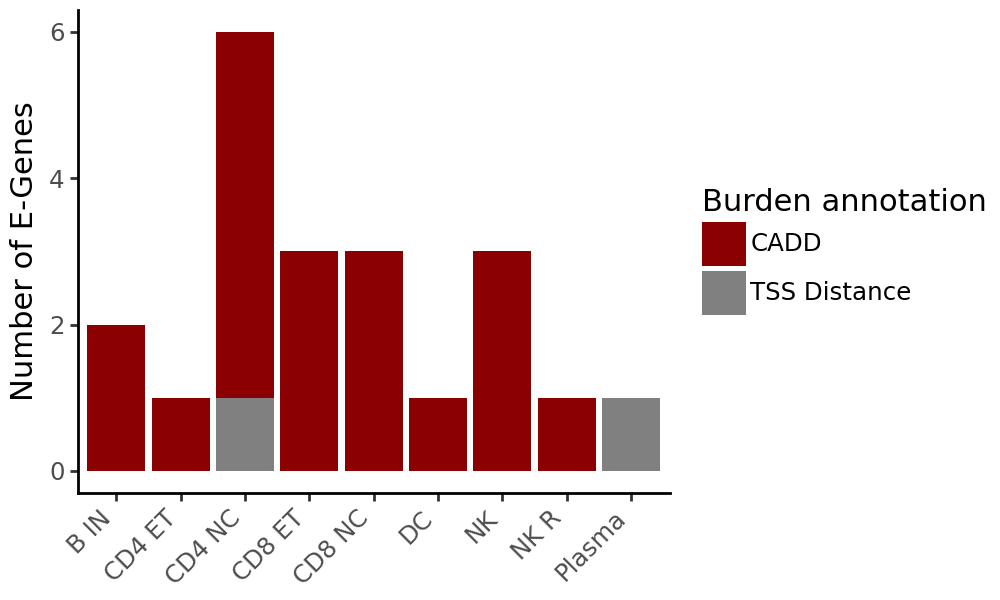

In [61]:
plot = (
    ggplot(e_genes_per_cell_type.query("cell_label not in @zero_types"), 
           aes(x='cell_label', y='count'))  # Specify the x and y variables
    + geom_bar(aes(fill = "burden_type"), stat = "identity")  # Add the boxplot layer
    + theme_classic()  # Optional: use a clean theme
    + theme(axis_text_x = element_text(angle = 45, hjust = 1, vjust = 1), figure_size = (5,3)) 
            #legend_position="none")
    + labs(y = "Number of E-Genes", x = "", fill = "Burden annotation")
    + scale_fill_manual(values = ['darkred', "grey"], labels = ["CADD",  "TSS Distance"])
)
plot

[2024-10-10 19:40:32,984] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


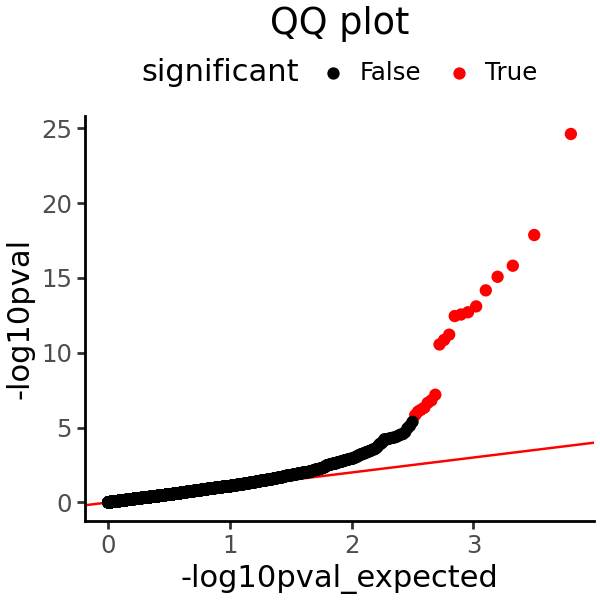

In [39]:
df = all_res.copy().query("burden_type == 'CADD_PHRED'")

df = df.sort_values("pvalue")
df["-log10pval_expected"] = -np.log10(np.arange(1, len(df) + 1) / len(df))

if "-log10pval" not in df.columns:
    df["-log10pval"] = -np.log10(df["pvalue"])

aes_kwargs = dict(x="-log10pval_expected", y="-log10pval")
plot = (
    ggplot(df, aes(**aes_kwargs, color="significant"))
    + labs(title="QQ plot")
    + scale_color_manual(values = ["black", "red"])
    + theme_classic()
    + geom_abline(intercept=0, slope=1, color="red")
    + geom_point()
    + theme(legend_position="top", figure_size = (3,3))
)
plot

In [87]:
ddata.adata.obs.groupby(cell_type_col).size().sort_values()

/scratch/tmp/hoev/ipykernel_1415524/3448583063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


cell_label
Erythrocytes       680
Plasma            3625
Platelets         4041
CD4 SOX4          4065
DC                8690
NK R              9677
Mono NC          15166
CD8 S100B        34528
Mono C           38233
B Mem            48023
CD4 ET           61786
B IN             82068
CD8 NC          133482
NK              159820
CD8 ET          205077
CD4 NC          463528
dtype: int64

In [66]:
sig_genes_cd4 = all_res.query("cell_label == 'CD4 NC' & significant")["Gene_burden"].unique()
sig_genes_cd4
all_res.query("significant & Gene_burden not in @sig_genes_cd4")

,Gene_burden,burden_type,pvalue,beta,cell_label,pvalue_corrected,significant
0,ENSG00000187905,DISTANCE,9.633641e-07,0.000188,Plasma,0.012171,True


In [44]:
gene_oi = "ENSG00000187905"

In [67]:
all_res.query("Gene_burden == @gene_oi & burden_type == 'DISTANCE'")

,Gene_burden,burden_type,pvalue,beta,cell_label,pvalue_corrected,significant
0,ENSG00000187905,DISTANCE,4.364780e-01,-0.000091,CD8 ET,5514.463312,False
0,ENSG00000187905,DISTANCE,6.917693e-01,-0.000042,CD8 NC,8739.813258,False
0,ENSG00000187905,DISTANCE,3.604805e-01,-0.000120,CD4 NC,4554.310969,False
0,ENSG00000187905,DISTANCE,7.208982e-01,0.000022,Mono C,9107.828178,False
0,ENSG00000187905,DISTANCE,6.070644e-01,0.000054,NK,7669.651712,False
0,ENSG00000187905,DISTANCE,9.076210e-01,-0.000011,B IN,11466.884235,False
0,ENSG00000187905,DISTANCE,7.097806e-01,0.000027,CD4 ET,8967.368283,False
0,ENSG00000187905,DISTANCE,1.524448e-01,0.000061,Mono NC,1925.988184,False
0,ENSG00000187905,DISTANCE,6.397567e-01,0.000028,CD8 S100B,8082.685830,False
0,ENSG00000187905,DISTANCE,1.797661e-01,-0.000093,B Mem,2271.165480,False


In [45]:
all_res.query("significant").groupby("Gene_burden").size().to_frame(name = "Number of Sig. cell types").loc[gene_oi]

Number of Sig. cell types    1
Name: ENSG00000187905, dtype: int64

In [46]:
this_ddata_mono = compute_pseudobulks(ddata, "Plasma")
this_ddata_cd = compute_pseudobulks(ddata, "CD4 NC")

Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.


Normalizing and log1p transforming data


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
/data/nasif12/home_if12/hoev/git/sc-genetics/src/cellink/_core/donordata.py:282: ImplicitModificationWarning: Setting element `.obsm['pseudo_mean']` of view, initializing view as actual.


In [47]:
y_cd = this_ddata_cd.gdata.obsm["pseudo_mean"][gene_oi] 
y_mono = this_ddata_mono.gdata.obsm["pseudo_mean"][gene_oi]
b = this_ddata_mono.gdata.uns['gene_burdens'].query("Gene == @gene_oi")["CADD_PHRED"]

In [51]:
merged = y_cd.to_frame(name = "CD4 NC").join(y_mono.to_frame(name = "Plasma")).join(b)
merged = merged.reset_index()\
    .melt(id_vars = ["CADD_PHRED", "id"], value_vars = ["CD4 NC","Plasma"], var_name = "Cell type", value_name = "Expression")
merged

,CADD_PHRED,id,Cell type,Expression
0,9.514,1_1,CD4 NC,0.000924
1,0.000,2_2,CD4 NC,0.000000
2,0.000,3_3,CD4 NC,0.002641
3,0.000,4_4,CD4 NC,0.001961
4,0.000,6_6,CD4 NC,0.000885
...,...,...,...,...
1957,0.000,1077_1078,Plasma,0.000000
1958,0.000,1078_1079,Plasma,0.000000
1959,0.000,1079_1080,Plasma,0.000000
1960,3.481,1080_1081,Plasma,0.000000


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 72 rows containing missing values.


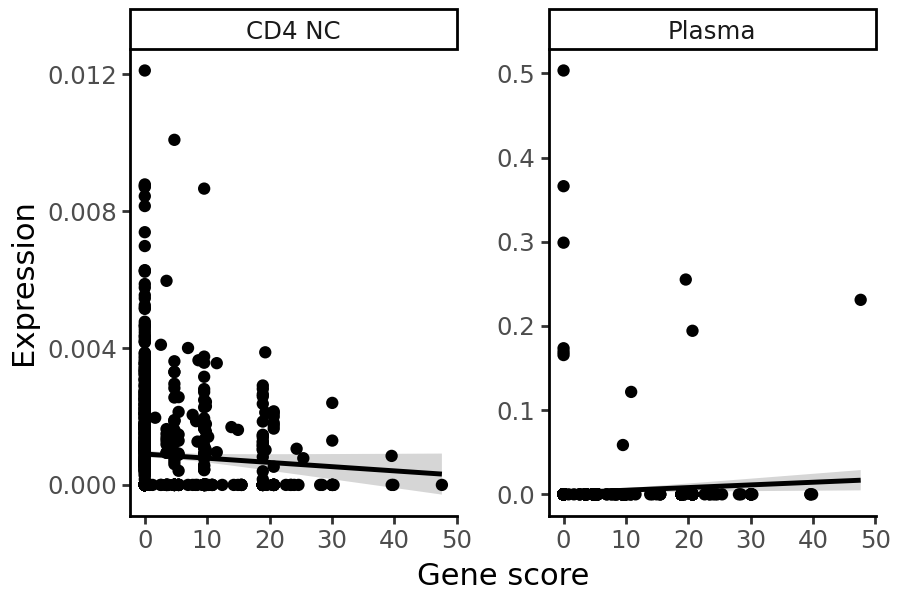

In [58]:
plot = (
    ggplot(merged, aes(x = "CADD_PHRED", y = "Expression"))
    + labs(x = "Gene score")
    + theme_classic()
    + geom_smooth()
    + geom_point()
    + facet_wrap("Cell type", scales = "free")
    + theme(legend_position="top", figure_size = (4.5,3))
)
plot